In [0]:
# https://www.datacamp.com/courses/machine-learning-for-time-series-data-in-python

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import librosa as lr
from librosa.core import stft
from glob import glob
from librosa.core import amplitude_to_db
from librosa.display import specshow
from functools import partial

from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn.model_selection import cross_val_score, train_test_split, ShuffleSplit, KFold, TimeSeriesSplit
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.utils import resample


In [0]:
np.set_printoptions(threshold=np.inf)

In [0]:
# to print list as string

mylist = ['spam', 'ham', 'eggs']
print(', '.join(mylist))
print('\n'.join(mylist))

spam, ham, eggs
spam
ham
eggs


## Course Description

Time series data is ubiquitous. Whether it be stock market fluctuations, sensor data recording climate change, or activity in the brain, any signal that changes over time can be described as a time series. Machine learning has emerged as a powerful method for leveraging complexity in data in order to generate predictions and insights into the problem one is trying to solve. This course is an intersection between these two worlds of **machine learning** and **time series** data, and covers feature engineering, spectograms, and other advanced techniques in order to classify heartbeat sounds and predict stock prices.

## 1. Time Series and Machine Learning Primer

This chapter is an introduction to the basics of machine learning, time series data, and the intersection between the two.

In [52]:
prices_df = pd.read_csv('prices.csv')
prices_df.head(5)

,time,AAPL,FB,NFLX,V,XOM
0,1/4/2010,214.009998,NaN,53.479999,88.139999,69.150002
1,1/5/2010,214.379993,NaN,51.510001,87.129997,69.419998
2,1/6/2010,210.969995,NaN,53.319999,85.959999,70.019997
3,1/7/2010,210.58,NaN,52.400001,86.760002,69.800003
4,1/8/2010,211.980005,NaN,53.300002,87.000000,69.519997


#### Timeseries kinds and applications

In [42]:
#@title
data = np.array([[ 214.009998],
       [ 214.379993],
       [ 210.969995],
       [ 210.58    ],
       [ 211.980005],
       [ 210.110003],
       [ 207.720001],
       [ 210.650002],
       [ 209.43    ],
       [ 205.93    ],
       [ 215.039995],
       [ 211.73    ],
       [ 208.069996],
       [ 197.75    ],
       [ 203.070002],
       [ 205.940001],
       [ 207.880005],
       [ 199.289995],
       [ 192.060003],
       [ 194.729998],
       [ 195.859997],
       [ 199.229994],
       [ 192.050003],
       [ 195.460001],
       [ 194.119997],
       [ 196.190004],
       [ 195.120007],
       [ 198.669994],
       [ 200.379993],
       [ 203.399996],
       [ 202.550003],
       [ 202.929998],
       [ 201.669996],
       [ 200.419994],
       [ 197.059998],
       [ 200.66    ],
       [ 202.000004],
       [ 204.619997],
       [ 208.990004],
       [ 208.85    ],
       [ 209.329998],
       [ 210.710003],
       [ 218.950005],
       [ 219.079994],
       [ 223.020004],
       [ 224.839993],
       [ 225.500008],
       [ 226.600006],
       [ 223.839996],
       [ 224.449997],
       [ 224.120003],
       [ 224.650002],
       [ 222.25    ],
       [ 224.750004],
       [ 228.359993],
       [ 229.370003],
       [ 226.649994],
       [ 230.899998],
       [ 232.389992],
       [ 235.849991],
       [ 235.000011],
       [ 235.969994],
       [ 238.489998],
       [ 239.540009],
       [ 240.600006],
       [ 239.950005],
       [ 241.789993],
       [ 242.290005],
       [ 242.430008],
       [ 245.690002],
       [ 248.92001 ],
       [ 247.400002],
       [ 247.070007],
       [ 244.590004],
       [ 259.220005],
       [ 266.469997],
       [ 270.82999 ],
       [ 269.5     ],
       [ 262.039989],
       [ 261.600006],
       [ 268.640007],
       [ 261.090008],
       [ 266.349995],
       [ 258.679993],
       [ 255.989998],
       [ 246.249989],
       [ 235.860004],
       [ 253.990005],
       [ 256.519997],
       [ 262.090004],
       [ 258.360012],
       [ 253.819988],
       [ 254.219997],
       [ 252.360008],
       [ 248.339996],
       [ 237.759995],
       [ 242.319992],
       [ 246.759987],
       [ 245.220005],
       [ 244.109993],
       [ 253.349991],
       [ 256.880005],
       [ 260.830002],
       [ 263.949993],
       [ 263.119987],
       [ 255.960011],
       [ 250.940002],
       [ 249.330006],
       [ 243.200012],
       [ 250.510006],
       [ 253.509995],
       [ 254.279999],
       [ 259.690002],
       [ 267.249989],
       [ 271.869987],
       [ 274.070011],
       [ 270.170002],
       [ 273.850006],
       [ 270.969994],
       [ 268.999989],
       [ 266.699989],
       [ 268.299999],
       [ 256.170002],
       [ 251.530003],
       [ 248.48    ],
       [ 246.939991],
       [ 248.62999 ],
       [ 258.670006],
       [ 258.089993],
       [ 259.619987],
       [ 257.290001],
       [ 251.799995],
       [ 252.730003],
       [ 251.450001],
       [ 249.900005],
       [ 245.580013],
       [ 251.890011],
       [ 254.239998],
       [ 259.02    ],
       [ 259.939995],
       [ 259.280006],
       [ 264.080009],
       [ 260.959991],
       [ 258.109993],
       [ 257.25    ],
       [ 261.849998],
       [ 261.93    ],
       [ 262.980011],
       [ 261.700008],
       [ 260.090012],
       [ 261.749996],
       [ 259.409996],
       [ 250.189999],
       [ 251.790009],
       [ 249.099987],
       [ 247.640007],
       [ 251.970013],
       [ 253.070011],
       [ 249.880005],
       [ 249.639999],
       [ 245.799992],
       [ 239.930004],
       [ 242.889992],
       [ 240.279999],
       [ 241.620003],
       [ 242.499996],
       [ 243.10001 ],
       [ 250.330002],
       [ 252.169991],
       [ 258.770008],
       [ 257.810013],
       [ 262.92001 ],
       [ 263.07    ],
       [ 263.410007],
       [ 267.039997],
       [ 268.059994],
       [ 270.21999 ],
       [ 276.569988],
       [ 275.369987],
       [ 283.230007],
       [ 283.769993],
       [ 287.750004],
       [ 288.919991],
       [ 292.319988],
       [ 291.159988],
       [ 286.859997],
       [ 287.369995],
       [ 283.749992],
       [ 282.520004],
       [ 278.639996],
       [ 288.939991],
       [ 289.19001 ],
       [ 289.219997],
       [ 294.069988],
       [ 295.360004],
       [ 298.539997],
       [ 300.140007],
       [ 302.30999 ],
       [ 314.739994],
       [ 317.999989],
       [ 309.489994],
       [ 310.529991],
       [ 309.520008],
       [ 307.470001],
       [ 308.839993],
       [ 308.049988],
       [ 307.830009],
       [ 305.23999 ],
       [ 300.98    ],
       [ 304.179993],
       [ 309.360004],
       [ 312.800003],
       [ 318.270008],
       [ 317.130009],
       [ 318.620003],
       [ 316.079998],
       [ 318.030003],
       [ 316.649998],
       [ 308.029987],
       [ 307.040005],
       [ 301.59    ],
       [ 300.499989],
       [ 308.429996],
       [ 306.730011],
       [ 313.359989],
       [ 308.730003],
       [ 314.799995],
       [ 315.      ],
       [ 316.870003],
       [ 311.150005],
       [ 316.400005],
       [ 318.150005],
       [ 317.440002],
       [ 320.149998],
       [ 318.210007],
       [ 321.009991],
       [ 319.760002],
       [ 320.559994],
       [ 321.670006],
       [ 320.290001],
       [ 320.359989],
       [ 321.249996],
       [ 320.610008],
       [ 322.209991],
       [ 324.199997],
       [ 325.159992],
       [ 323.60001 ],
       [ 324.680008],
       [ 325.470013],
       [ 325.290009],
       [ 323.660011],
       [ 322.560013],
       [ 329.57    ],
       [ 331.290012],
       [ 334.000008],
       [ 333.729988],
       [ 336.120003],
       [ 342.450001],
       [ 341.639996],
       [ 344.420006],
       [ 345.680008],
       [ 348.479992],
       [ 340.650013],
       [ 338.840012],
       [ 332.680004],
       [ 326.720001],
       [ 337.449993],
       [ 341.39999 ],
       [ 343.850006],
       [ 343.209991],
       [ 336.100002],
       [ 339.319996],
       [ 345.030006],
       [ 344.320004],
       [ 343.44001 ],
       [ 346.5     ],
       [ 351.87999 ],
       [ 355.200012],
       [ 358.16    ],
       [ 354.539997],
       [ 356.85001 ],
       [ 359.179996],
       [ 359.900013],
       [ 363.129993],
       [ 358.300003],
       [ 350.560013],
       [ 338.609993],
       [ 342.619991],
       [ 342.879997],
       [ 348.160011],
       [ 353.210007],
       [ 349.309998],
       [ 352.119995],
       [ 359.560005],
       [ 359.999989],
       [ 355.359989],
       [ 355.759998],
       [ 352.46999 ],
       [ 346.669991],
       [ 351.990005],
       [ 353.560001],
       [ 345.429989],
       [ 330.01001 ],
       [ 334.639996],
       [ 330.669998],
       [ 339.299995],
       [ 341.200012],
       [ 339.190006],
       [ 344.970005],
       [ 351.540009],
       [ 350.44001 ],
       [ 350.959995],
       [ 348.630009],
       [ 348.510006],
       [ 344.560009],
       [ 341.189999],
       [ 338.889999],
       [ 338.039993],
       [ 338.079994],
       [ 335.060005],
       [ 330.799988],
       [ 332.399998],
       [ 336.12999 ],
       [ 332.419998],
       [ 327.459991],
       [ 331.849998],
       [ 337.859989],
       [ 342.41    ],
       [ 350.699989],
       [ 353.010002],
       [ 350.42001 ],
       [ 350.14999 ],
       [ 346.749992],
       [ 350.12999 ],
       [ 346.279995],
       [ 348.200012],
       [ 349.570004],
       [ 346.749992],
       [ 346.660004],
       [ 347.599998],
       [ 349.450001],
       [ 347.230003],
       [ 346.569988],
       [ 340.499996],
       [ 333.299992],
       [ 336.140003],
       [ 339.869995],
       [ 340.53001 ],
       [ 335.220009],
       [ 334.39999 ],
       [ 332.190006],
       [ 336.779991],
       [ 335.000004],
       [ 337.409992],
       [ 347.82999 ],
       [ 345.509991],
       [ 346.099991],
       [ 343.44001 ],
       [ 338.039993],
       [ 332.039989],
       [ 332.239994],
       [ 331.48999 ],
       [ 325.900009],
       [ 326.599998],
       [ 332.439999],
       [ 326.749989],
       [ 325.159992],
       [ 320.259987],
       [ 315.320007],
       [ 325.299995],
       [ 322.610001],
       [ 331.230011],
       [ 326.350006],
       [ 332.039989],
       [ 335.26001 ],
       [ 334.040009],
       [ 335.670006],
       [ 343.260006],
       [ 349.43    ],
       [ 351.759987],
       [ 357.200005],
       [ 359.709995],
       [ 354.000011],
       [ 353.749992],
       [ 358.019997],
       [ 357.770004],
       [ 364.919994],
       [ 373.800011],
       [ 376.849987],
       [ 386.89999 ],
       [ 387.290012],
       [ 393.300003],
       [ 398.499989],
       [ 403.410007],
       [ 392.59    ],
       [ 391.819996],
       [ 390.479992],
       [ 396.749989],
       [ 388.909996],
       [ 392.57    ],
       [ 377.369999],
       [ 373.620007],
       [ 353.210007],
       [ 374.010002],
       [ 363.690006],
       [ 373.700008],
       [ 376.98999 ],
       [ 383.410004],
       [ 380.480003],
       [ 380.440002],
       [ 366.050007],
       [ 356.029991],
       [ 356.439987],
       [ 373.600006],
       [ 376.180012],
       [ 373.720009],
       [ 383.579994],
       [ 389.969994],
       [ 389.989994],
       [ 384.830009],
       [ 381.030003],
       [ 374.050003],
       [ 379.740013],
       [ 383.929989],
       [ 384.140007],
       [ 377.479988],
       [ 379.939991],
       [ 384.619991],
       [ 389.299992],
       [ 392.959995],
       [ 400.500008],
       [ 411.630009],
       [ 413.449997],
       [ 412.140007],
       [ 401.820011],
       [ 404.299988],
       [ 403.170002],
       [ 399.260006],
       [ 397.009995],
       [ 390.570007],
       [ 381.319996],
       [ 374.600002],
       [ 372.500008],
       [ 378.249992],
       [ 377.369999],
       [ 369.799999],
       [ 388.809994],
       [ 400.289989],
       [ 402.190006],
       [ 408.429989],
       [ 421.999992],
       [ 419.990013],
       [ 422.239998],
       [ 398.619991],
       [ 395.310009],
       [ 392.870007],
       [ 405.770008],
       [ 397.770012],
       [ 400.60001 ],
       [ 404.69001 ],
       [ 404.949989],
       [ 404.779999],
       [ 396.51001 ],
       [ 397.410004],
       [ 403.07    ],
       [ 400.240002],
       [ 399.730003],
       [ 406.229992],
       [ 395.279995],
       [ 385.220005],
       [ 384.619991],
       [ 379.260002],
       [ 388.829994],
       [ 384.770008],
       [ 377.41    ],
       [ 374.94001 ],
       [ 369.009995],
       [ 376.510006],
       [ 366.990002],
       [ 363.570004],
       [ 376.12001 ],
       [ 373.199997],
       [ 382.199989],
       [ 387.93    ],
       [ 389.700001],
       [ 393.01001 ],
       [ 390.949989],
       [ 389.09    ],
       [ 390.659996],
       [ 393.62001 ],
       [ 391.839996],
       [ 388.809994],
       [ 380.19001 ],
       [ 378.939995],
       [ 381.019989],
       [ 382.210003],
       [ 395.949997],
       [ 396.450008],
       [ 398.550003],
       [ 403.330006],
       [ 406.529999],
       [ 402.640003],
       [ 405.120007],
       [ 405.000004],
       [ 411.23    ],
       [ 413.44001 ],
       [ 418.029995],
       [ 422.400002],
       [ 421.73    ],
       [ 423.239994],
       [ 422.549992],
       [ 421.389992],
       [ 419.810009],
       [ 424.700001],
       [ 429.110008],
       [ 427.750004],
       [ 420.300007],
       [ 427.409996],
       [ 420.409996],
       [ 446.659996],
       [ 444.62999 ],
       [ 447.28001 ],
       [ 453.009995],
       [ 456.47998 ],
       [ 456.189987],
       [ 455.120003],
       [ 459.68    ],
       [ 463.969978],
       [ 468.830009],
       [ 476.680016],
       [ 493.170006],
       [ 493.419998],
       [ 502.600021],
       [ 509.459991],
       [ 497.669975],
       [ 502.209999],
       [ 502.12001 ],
       [ 514.850021],
       [ 513.039993],
       [ 516.389977],
       [ 522.409981],
       [ 525.760017],
       [ 535.410011],
       [ 542.440025],
       [ 544.469978],
       [ 545.180008],
       [ 533.160027],
       [ 530.259987],
       [ 530.69001 ],
       [ 541.989975],
       [ 545.170021],
       [ 551.999977],
       [ 568.099998],
       [ 589.580009],
       [ 585.559998],
       [ 585.569984],
       [ 601.100006],
       [ 605.959984],
       [ 602.499985],
       [ 599.340019],
       [ 596.050011],
       [ 606.97998 ],
       [ 614.480019],
       [ 617.62001 ],
       [ 609.859993],
       [ 599.550011],
       [ 618.63002 ],
       [ 629.319984],
       [ 624.30999 ],
       [ 633.679977],
       [ 636.229996],
       [ 628.440018],
       [ 626.20002 ],
       [ 622.769981],
       [ 605.22998 ],
       [ 580.13002 ],
       [ 609.699989],
       [ 608.340012],
       [ 587.439987],
       [ 572.980003],
       [ 571.699974],
       [ 560.280006],
       [ 610.000023],
       [ 607.699997],
       [ 603.000023],
       [ 583.979988],
       [ 582.130013],
       [ 585.97998 ],
       [ 581.819992],
       [ 565.25    ],
       [ 569.480003],
       [ 568.18    ],
       [ 569.180023],
       [ 570.519974],
       [ 566.710007],
       [ 558.219986],
       [ 553.169991],
       [ 546.080002],
       [ 530.12001 ],
       [ 530.37999 ],
       [ 561.279976],
       [ 556.970024],
       [ 570.559975],
       [ 565.320015],
       [ 562.289986],
       [ 572.269974],
       [ 579.169998],
       [ 577.730019],
       [ 560.989983],
       [ 564.289978],
       [ 562.830025],
       [ 571.460022],
       [ 571.720001],
       [ 580.319984],
       [ 571.169975],
       [ 576.159996],
       [ 572.160011],
       [ 571.529984],
       [ 574.12999 ],
       [ 585.779976],
       [ 587.410027],
       [ 585.739975],
       [ 577.669991],
       [ 582.099998],
       [ 570.77002 ],
       [ 572.030022],
       [ 574.499985],
       [ 569.04998 ],
       [ 584.000015],
       [ 592.519997],
       [ 599.409981],
       [ 609.939995],
       [ 605.879982],
       [ 613.889992],
       [ 608.210022],
       [ 604.430016],
       [ 598.900009],
       [ 604.970001],
       [ 606.910019],
       [ 606.93998 ],
       [ 606.260017],
       [ 614.320015],
       [ 604.300026],
       [ 603.830002],
       [ 600.919975],
       [ 574.970009],
       [ 574.88002 ],
       [ 585.159988],
       [ 595.030014],
       [ 610.759987],
       [ 606.80999 ],
       [ 607.789986],
       [ 615.70002 ],
       [ 622.550003],
       [ 620.910019],
       [ 619.860008],
       [ 620.729988],
       [ 621.699997],
       [ 630.      ],
       [ 631.690025],
       [ 630.829979],
       [ 636.340012],
       [ 648.110001],
       [ 665.150017],
       [ 656.059982],
       [ 668.869995],
       [ 662.630013],
       [ 663.219986],
       [ 675.679977],
       [ 674.800011],
       [ 673.469994],
       [ 663.869987],
       [ 665.240005],
       [ 674.970001],
       [ 670.230026],
       [ 676.270004],
       [ 680.43998 ],
       [ 662.739975],
       [ 660.590019],
       [ 669.790016],
       [ 682.980011],
       [ 691.280014],
       [ 699.780022],
       [ 701.910004],
       [ 702.100021],
       [ 698.699997],
       [ 700.089989],
       [ 690.790016],
       [ 673.540009],
       [ 665.179977],
       [ 681.32    ],
       [ 667.100021],
       [ 659.389992],
       [ 661.309982],
       [ 671.449974],
       [ 666.799988],
       [ 652.589996],
       [ 638.170013],
       [ 635.850014],
       [ 640.909996],
       [ 628.099983],
       [ 629.710007],
       [ 634.760002],
       [ 649.789986],
       [ 644.610001],
       [ 632.640007],
       [ 609.840019],
       [ 634.029999],
       [ 613.359993],
       [ 616.829979],
       [ 609.539986],
       [ 603.999992],
       [ 595.320007],
       [ 596.540009],
       [ 576.800011],
       [ 584.620003],
       [ 582.849976],
       [ 558.000008],
       [ 537.749985],
       [ 547.059998],
       [ 542.829994],
       [ 542.900009],
       [ 536.880005],
       [ 525.619987],
       [ 527.680008],
       [ 565.730011],
       [ 560.909981],
       [ 561.700012],
       [ 571.500023],
       [ 589.530022],
       [ 584.780006],
       [ 582.940018],
       [ 589.359978],
       [ 585.279991],
       [ 586.190025],
       [ 575.849976],
       [ 538.790009],
       [ 547.239975],
       [ 533.250015],
       [ 529.819977],
       [ 541.390015],
       [ 539.      ],
       [ 529.689987],
       [ 509.789986],
       [ 518.829979],
       [ 533.900017],
       [ 526.30999 ],
       [ 521.730019],
       [ 519.330017],
       [ 520.169983],
       [ 512.999992],
       [ 515.060013],
       [ 509.589981],
       [ 532.169991],
       [ 549.029976],
       [ 542.099991],
       [ 526.999992],
       [ 523.900002],
       [ 525.31002 ],
       [ 517.100006],
       [ 523.509979],
       [ 520.300026],
       [ 501.750015],
       [ 485.920013],
       [ 506.089981],
       [ 502.680023],
       [ 500.000015],
       [ 504.770004],
       [ 514.010002],
       [ 450.499977],
       [ 439.880001],
       [ 449.830002],
       [ 458.269981],
       [ 456.830002],
       [ 455.489998],
       [ 453.619995],
       [ 442.320004],
       [ 457.840012],
       [ 457.350014],
       [ 468.220009],
       [ 474.980003],
       [ 479.930023],
       [ 467.900002],
       [ 467.009995],
       [ 466.590012],
       [ 460.160011],
       [ 459.990021],
       [ 448.850006],
       [ 446.060009],
       [ 450.809998],
       [ 442.799988],
       [ 448.970009],
       [ 444.569988],
       [ 441.400009],
       [ 430.470013],
       [ 420.049988],
       [ 431.139988],
       [ 425.659996],
       [ 430.580002],
       [ 431.720001],
       [ 437.869995],
       [ 428.429993],
       [ 428.349991],
       [ 432.499992],
       [ 443.660007],
       [ 455.720016],
       [ 454.489975],
       [ 452.079987],
       [ 452.729988],
       [ 461.910011],
       [ 463.580009],
       [ 461.140007],
       [ 452.079987],
       [ 442.660011],
       [ 428.910004],
       [ 429.789997],
       [ 431.989994],
       [ 427.71999 ],
       [ 423.199993],
       [ 426.209995],
       [ 426.98    ],
       [ 435.689999],
       [ 434.329994],
       [ 429.800011],
       [ 419.85001 ],
       [ 426.240009],
       [ 402.800007],
       [ 392.049988],
       [ 390.530006],
       [ 398.670006],
       [ 406.12999 ],
       [ 405.459988],
       [ 408.380001],
       [ 417.199989],
       [ 430.119991],
       [ 442.779987],
       [ 439.290001],
       [ 445.519997],
       [ 449.980019],
       [ 460.709984],
       [ 458.660004],
       [ 463.839989],
       [ 456.769974],
       [ 452.969994],
       [ 454.740021],
       [ 443.860012],
       [ 428.850002],
       [ 434.580013],
       [ 433.26001 ],
       [ 442.930004],
       [ 439.659996],
       [ 441.349995],
       [ 442.139999],
       [ 445.150002],
       [ 441.44001 ],
       [ 444.949997],
       [ 451.580002],
       [ 449.730026],
       [ 450.720009],
       [ 449.30999 ],
       [ 445.110001],
       [ 438.459995],
       [ 441.810005],
       [ 438.889992],
       [ 437.600002],
       [ 432.189999],
       [ 435.959991],
       [ 430.050003],
       [ 432.000008],
       [ 431.769989],
       [ 422.999989],
       [ 416.840008],
       [ 413.500011],
       [ 402.540001],
       [ 402.62999 ],
       [ 398.069992],
       [ 393.779987],
       [ 396.53001 ],
       [ 409.219994],
       [ 418.490005],
       [ 420.799992],
       [ 417.419994],
       [ 415.050007],
       [ 422.349987],
       [ 420.730003],
       [ 427.289993],
       [ 426.510002],
       [ 427.44001 ],
       [ 430.199993],
       [ 430.310009],
       [ 431.760002],
       [ 424.949993],
       [ 426.309998],
       [ 418.98999 ],
       [ 440.510002],
       [ 438.499996],
       [ 440.990013],
       [ 447.790009],
       [ 453.320015],
       [ 452.529984],
       [ 456.679985],
       [ 462.539986],
       [ 469.449997],
       [ 465.250008],
       [ 464.979988],
       [ 461.010017],
       [ 454.449974],
       [ 467.360016],
       [ 489.569977],
       [ 498.500008],
       [ 497.909981],
       [ 502.330002],
       [ 507.740005],
       [ 501.07    ],
       [ 502.360016],
       [ 502.959976],
       [ 501.020012],
       [ 502.970016],
       [ 488.589981],
       [ 490.899994],
       [ 491.700012],
       [ 487.220016],
       [ 488.579994],
       [ 498.690025],
       [ 495.269974],
       [ 498.220001],
       [ 506.169983],
       [ 494.639999],
       [ 467.709984],
       [ 472.690018],
       [ 464.899986],
       [ 450.119995],
       [ 455.320007],
       [ 464.680008],
       [ 472.299995],
       [ 467.410004],
       [ 490.640015],
       [ 489.100006],
       [ 481.530006],
       [ 486.219994],
       [ 482.750008],
       [ 476.749977],
       [ 487.960007],
       [ 489.55999 ],
       [ 483.409996],
       [ 483.030014],
       [ 487.750015],
       [ 480.93998 ],
       [ 486.589989],
       [ 489.639992],
       [ 492.809998],
       [ 496.039978],
       [ 498.679985],
       [ 501.110001],
       [ 504.499985],
       [ 508.889992],
       [ 521.360023],
       [ 519.870003],
       [ 524.959999],
       [ 531.910011],
       [ 525.960022],
       [ 529.880005],
       [ 516.680023],
       [ 524.900024],
       [ 522.699974],
       [ 520.030006],
       [ 526.75    ],
       [ 525.449997],
       [ 520.920013],
       [ 512.490021],
       [ 520.560005],
       [ 519.050011],
       [ 520.009979],
       [ 520.63002 ],
       [ 528.160019],
       [ 524.990013],
       [ 518.629974],
       [ 519.549995],
       [ 514.999985],
       [ 521.139992],
       [ 519.799988],
       [ 523.739998],
       [ 533.399979],
       [ 545.959999],
       [ 556.069977],
       [ 551.230026],
       [ 566.319984],
       [ 565.000008],
       [ 567.899994],
       [ 560.019974],
       [ 566.43    ],
       [ 565.54998 ],
       [ 561.359978],
       [ 560.539986],
       [ 554.429993],
       [ 557.500023],
       [ 554.990005],
       [ 550.769989],
       [ 544.459991],
       [ 549.019989],
       [ 570.090004],
       [ 567.669975],
       [ 563.900009],
       [ 560.089989],
       [ 554.519981],
       [ 561.019997],
       [ 553.12999 ],
       [ 540.980019],
       [ 543.929993],
       [ 540.040024],
       [ 543.460022],
       [ 536.519997],
       [ 532.939995],
       [ 535.730019],
       [ 546.390022],
       [ 557.359993],
       [ 554.250015],
       [ 540.669998],
       [ 549.069977],
       [ 551.509979],
       [ 556.179993],
       [ 546.070015],
       [ 550.500023],
       [ 506.499977],
       [ 500.749992],
       [ 499.779984],
       [ 500.599976],
       [ 501.529984],
       [ 508.790016],
       [ 512.589996],
       [ 512.509995],
       [ 519.679985],
       [ 528.989998],
       [ 535.959984],
       [ 535.919983],
       [ 544.429977],
       [ 543.990021],
       [ 545.990013],
       [ 537.370003],
       [ 531.149994],
       [ 525.249992],
       [ 527.550018],
       [ 522.060013],
       [ 517.349998],
       [ 527.670021],
       [ 526.239975],
       [ 527.76001 ],
       [ 531.239983],
       [ 532.360008],
       [ 530.749985],
       [ 530.440018],
       [ 530.919975],
       [ 536.089973],
       [ 536.609985],
       [ 530.650009],
       [ 524.68998 ],
       [ 526.740013],
       [ 531.399986],
       [ 531.26001 ],
       [ 528.700005],
       [ 532.86998 ],
       [ 539.190018],
       [ 544.98999 ],
       [ 539.779991],
       [ 537.459991],
       [ 536.859978],
       [ 536.739975],
       [ 541.649994],
       [ 542.549988],
       [ 538.790009],
       [ 531.820023],
       [ 523.469978],
       [ 523.440018],
       [ 530.320015],
       [ 523.480019],
       [ 519.610023],
       [ 521.679977],
       [ 517.959999],
       [ 519.01001 ],
       [ 524.940025],
       [ 531.170021],
       [ 531.70002 ],
       [ 524.750008],
       [ 567.770004],
       [ 571.93998 ],
       [ 594.090019],
       [ 592.329979],
       [ 590.089981],
       [ 591.480026],
       [ 592.580025],
       [ 600.959976],
       [ 594.410027],
       [ 592.329979],
       [ 587.990013],
       [ 585.540024],
       [ 592.830017],
       [ 593.760025],
       [ 593.869987],
       [ 588.819992],
       [ 597.510017],
       [ 604.590019],
       [ 604.710022],
       [ 606.310005],
       [ 607.269974],
       [ 614.129997],
       [ 625.63002 ],
       [ 624.01001 ],
       [ 635.37999 ],
       [ 633.000015],
       [ 628.650009],
       [ 637.539986],
       [ 644.819992],
       [ 647.349983],
       [ 645.570023],
       [  93.699997],
       [  94.25    ],
       [  93.860001],
       [  92.290001],
       [  91.279999],
       [  92.199997],
       [  92.080002],
       [  92.18    ],
       [  91.860001],
       [  90.910004],
       [  90.830002],
       [  90.279999],
       [  90.360001],
       [  90.900002],
       [  91.980003],
       [  92.93    ],
       [  93.519997],
       [  93.480003],
       [  94.029999],
       [  95.970001],
       [  95.349998],
       [  95.389999],
       [  95.040001],
       [  95.220001],
       [  96.449997],
       [  95.32    ],
       [  94.779999],
       [  93.089996],
       [  94.43    ],
       [  93.940002],
       [  94.720001],
       [  97.190002],
       [  97.029999],
       [  97.669998],
       [  99.019997],
       [  98.379997],
       [  98.150002],
       [  95.599998],
       [  96.129997],
       [  95.589996],
       [  95.120003],
       [  94.959999],
       [  94.480003],
       [  94.739998],
       [  95.989998],
       [  95.970001],
       [  97.239998],
       [  97.5     ],
       [  97.980003],
       [  99.160004],
       [ 100.529999],
       [ 100.57    ],
       [ 100.580002],
       [ 101.32    ],
       [ 101.540001],
       [ 100.889999],
       [ 102.129997],
       [ 102.25    ],
       [ 102.5     ],
       [ 103.300003],
       [  98.940002],
       [  98.120003],
       [  98.970001],
       [  98.360001],
       [  97.989998],
       [ 101.      ],
       [ 101.43    ],
       [ 101.660004],
       [ 101.629997],
       [ 100.860001],
       [ 101.580002],
       [ 101.790001],
       [ 100.959999],
       [ 101.059998],
       [ 102.639999],
       [ 101.75    ],
       [  97.870003],
       [ 100.75    ],
       [ 100.110001],
       [ 100.75    ],
       [  99.18    ],
       [  99.900002],
       [  99.620003],
       [  99.620003],
       [  98.75    ],
       [ 100.800003],
       [ 101.019997],
       [ 100.730003],
       [  99.809998],
       [  98.75    ],
       [  97.540001],
       [  96.260002],
       [  97.669998],
       [  99.760002],
       [ 102.470001],
       [ 102.989998],
       [ 104.830002],
       [ 105.220001],
       [ 105.110001],
       [ 106.739998],
       [ 107.339996],
       [ 106.980003],
       [ 108.      ],
       [ 109.400002],
       [ 108.599998],
       [ 108.860001],
       [ 108.699997],
       [ 109.010002],
       [ 108.830002],
       [ 109.699997],
       [ 111.25    ],
       [ 112.82    ],
       [ 114.18    ],
       [ 113.989998],
       [ 115.470001],
       [ 114.669998],
       [ 116.309998],
       [ 116.470001],
       [ 118.629997],
       [ 117.599998],
       [ 119.      ],
       [ 118.93    ],
       [ 115.07    ],
       [ 114.629997],
       [ 115.93    ],
       [ 115.489998],
       [ 115.      ],
       [ 112.400002],
       [ 114.120003],
       [ 111.949997],
       [ 111.620003],
       [ 109.730003],
       [ 108.230003],
       [ 106.75    ],
       [ 109.410004],
       [ 112.650002],
       [ 111.779999],
       [ 112.940002],
       [ 112.540001],
       [ 112.010002],
       [ 113.989998],
       [ 113.910004],
       [ 112.519997],
       [ 110.379997],
       [ 109.330002],
       [ 106.25    ],
       [ 106.260002],
       [ 107.75    ],
       [ 111.889999],
       [ 112.010002],
       [ 109.25    ],
       [ 110.220001],
       [ 109.800003],
       [ 106.82    ],
       [ 105.989998],
       [ 108.720001],
       [ 109.550003],
       [ 112.400002],
       [ 112.980003],
       [ 113.099998],
       [ 109.139999],
       [ 115.309998],
       [ 118.900002],
       [ 117.160004],
       [ 118.629997],
       [ 118.650002],
       [ 119.559998],
       [ 119.940002],
       [ 118.93    ],
       [ 119.720001],
       [ 122.019997],
       [ 124.879997],
       [ 126.459999],
       [ 127.080002],
       [ 127.830002],
       [ 128.720001],
       [ 128.449997],
       [ 129.5     ],
       [ 133.      ],
       [ 132.169998],
       [ 128.789993],
       [ 130.419998],
       [ 128.460007],
       [ 129.089996],
       [ 129.360001],
       [ 128.539993],
       [ 126.410004],
       [ 126.599998],
       [ 127.139999],
       [ 124.510002],
       [ 122.239998],
       [ 124.449997],
       [ 123.589996],
       [ 124.949997],
       [ 127.040001],
       [ 128.470001],
       [ 127.5     ],
       [ 125.900002],
       [ 127.209999],
       [ 126.690002],
       [ 123.379997],
       [ 124.239998],
       [ 123.25    ],
       [ 126.370003],
       [ 124.43    ],
       [ 124.25    ],
       [ 125.32    ],
       [ 127.349998],
       [ 126.010002],
       [ 125.599998],
       [ 126.559998],
       [ 127.099998],
       [ 126.849998],
       [ 126.300003],
       [ 126.779999],
       [ 126.169998],
       [ 124.75    ],
       [ 127.599998],
       [ 126.910004],
       [ 128.619995],
       [ 129.669998],
       [ 130.279999],
       [ 132.649994],
       [ 130.559998],
       [ 128.639999],
       [ 125.150002],
       [ 128.949997],
       [ 128.699997],
       [ 125.800003],
       [ 125.010002],
       [ 125.260002],
       [ 127.620003],
       [ 126.32    ],
       [ 125.870003],
       [ 126.010002],
       [ 128.949997],
       [ 128.770004],
       [ 130.190002],
       [ 130.070007],
       [ 130.059998],
       [ 131.389999],
       [ 132.539993],
       [ 129.619995],
       [ 132.039993],
       [ 131.779999],
       [ 130.279999],
       [ 130.539993],
       [ 129.960007],
       [ 130.119995],
       [ 129.360001],
       [ 128.649994],
       [ 127.800003],
       [ 127.419998],
       [ 128.880005],
       [ 128.589996],
       [ 127.169998],
       [ 126.919998],
       [ 127.599998],
       [ 127.300003],
       [ 127.879997],
       [ 126.599998],
       [ 127.610001],
       [ 127.029999],
       [ 128.110001],
       [ 127.5     ],
       [ 126.75    ],
       [ 124.529999],
       [ 125.43    ],
       [ 126.599998],
       [ 126.440002],
       [ 126.      ],
       [ 125.690002],
       [ 122.57    ],
       [ 120.07    ],
       [ 123.279999],
       [ 125.660004],
       [ 125.610001],
       [ 126.82    ],
       [ 128.509995],
       [ 129.619995],
       [ 132.070007],
       [ 130.75    ],
       [ 125.220001],
       [ 125.160004],
       [ 124.5     ],
       [ 122.769997],
       [ 123.379997],
       [ 122.989998],
       [ 122.370003],
       [ 121.300003],
       [ 118.440002],
       [ 114.639999],
       [ 115.400002],
       [ 115.129997],
       [ 115.519997],
       [ 119.720001],
       [ 113.489998],
       [ 115.239998],
       [ 115.150002],
       [ 115.959999],
       [ 117.160004],
       [ 116.5     ],
       [ 115.010002],
       [ 112.650002],
       [ 105.760002],
       [ 103.120003],
       [ 103.739998],
       [ 109.690002],
       [ 112.919998],
       [ 113.290001],
       [ 112.760002],
       [ 107.720001],
       [ 112.339996],
       [ 110.370003],
       [ 109.269997],
       [ 112.309998],
       [ 110.150002],
       [ 112.57    ],
       [ 114.209999],
       [ 115.309998],
       [ 116.279999],
       [ 116.410004],
       [ 113.919998],
       [ 113.449997],
       [ 115.209999],
       [ 113.400002],
       [ 114.32    ],
       [ 115.      ],
       [ 114.709999],
       [ 112.440002],
       [ 109.059998],
       [ 110.300003],
       [ 109.580002],
       [ 110.379997],
       [ 110.779999],
       [ 111.309998],
       [ 110.779999],
       [ 109.5     ],
       [ 112.120003],
       [ 111.599998],
       [ 111.790001],
       [ 110.209999],
       [ 111.860001],
       [ 111.040001],
       [ 111.730003],
       [ 113.769997],
       [ 113.760002],
       [ 115.5     ],
       [ 119.080002],
       [ 115.279999],
       [ 114.550003],
       [ 119.269997],
       [ 120.529999],
       [ 119.5     ],
       [ 121.18    ],
       [ 122.57    ],
       [ 122.      ],
       [ 120.919998],
       [ 121.059998],
       [ 120.57    ],
       [ 116.769997],
       [ 116.110001],
       [ 115.720001],
       [ 112.339996],
       [ 114.18    ],
       [ 113.690002],
       [ 117.290001],
       [ 118.779999],
       [ 119.300003],
       [ 117.75    ],
       [ 118.879997],
       [ 118.029999],
       [ 117.809998],
       [ 118.300003],
       [ 117.339996],
       [ 116.279999],
       [ 115.199997],
       [ 119.029999],
       [ 118.279999],
       [ 118.230003],
       [ 115.620003],
       [ 116.169998],
       [ 113.18    ],
       [ 112.480003],
       [ 110.489998],
       [ 111.339996],
       [ 108.980003],
       [ 106.029999],
       [ 107.330002],
       [ 107.230003],
       [ 108.610001],
       [ 108.029999],
       [ 106.82    ],
       [ 108.739998],
       [ 107.32    ],
       [ 105.260002],
       [ 105.349998],
       [ 102.709999],
       [ 100.699997],
       [  96.449997],
       [  96.959999],
       [  98.529999],
       [  99.959999],
       [  97.389999],
       [  99.519997],
       [  97.129997],
       [  96.660004],
       [  96.790001],
       [  96.300003],
       [ 101.419998],
       [  99.440002],
       [  99.989998],
       [  93.419998],
       [  94.089996],
       [  97.339996],
       [  96.43    ],
       [  94.480003],
       [  96.349998],
       [  96.599998],
       [  94.019997],
       [  95.010002],
       [  94.989998],
       [  94.269997],
       [  93.699997],
       [  93.989998],
       [  96.639999],
       [  98.120003],
       [  96.260002],
       [  96.040001],
       [  96.879997],
       [  94.690002],
       [  96.099998],
       [  96.760002],
       [  96.910004],
       [  96.690002],
       [ 100.529999],
       [ 100.75    ],
       [ 101.5     ],
       [ 103.010002],
       [ 101.870003],
       [ 101.029999],
       [ 101.120003],
       [ 101.169998],
       [ 102.260002],
       [ 102.519997],
       [ 104.580002],
       [ 105.970001],
       [ 105.800003],
       [ 105.919998],
       [ 105.910004],
       [ 106.720001],
       [ 106.129997],
       [ 105.669998],
       [ 105.190002],
       [ 107.68    ],
       [ 109.559998],
       [ 108.989998],
       [ 109.989998],
       [ 111.120003],
       [ 109.809998],
       [ 110.959999],
       [ 108.540001],
       [ 108.660004],
       [ 109.019997],
       [ 110.440002],
       [ 112.040001],
       [ 112.099998],
       [ 109.849998],
       [ 107.480003],
       [ 106.910004],
       [ 107.129997],
       [ 105.970001],
       [ 105.68    ],
       [ 105.080002],
       [ 104.349998],
       [  97.82    ],
       [  94.830002],
       [  93.739998],
       [  93.639999],
       [  95.18    ],
       [  94.190002],
       [  93.239998],
       [  92.720001],
       [  92.790001],
       [  93.419998],
       [  92.510002],
       [  90.339996],
       [  90.519997],
       [  93.879997],
       [  93.489998],
       [  94.559998],
       [  94.199997],
       [  95.220001],
       [  96.43    ],
       [  97.900002],
       [  99.620003],
       [ 100.410004],
       [ 100.349998],
       [  99.860001],
       [  98.459999],
       [  97.720001],
       [  97.919998],
       [  98.629997],
       [  99.029999],
       [  98.940002],
       [  99.650002],
       [  98.830002],
       [  97.339996],
       [  97.459999],
       [  97.139999],
       [  97.550003],
       [  95.330002],
       [  95.099998],
       [  95.910004],
       [  95.550003],
       [  96.099998],
       [  93.400002],
       [  92.040001],
       [  93.589996],
       [  94.400002],
       [  95.599998],
       [  95.889999],
       [  94.989998],
       [  95.529999],
       [  95.940002],
       [  96.68    ],
       [  96.980003],
       [  97.419998],
       [  96.870003],
       [  98.790001],
       [  98.779999],
       [  99.830002],
       [  99.870003],
       [  99.959999],
       [  99.43    ],
       [  98.660004],
       [  97.339996],
       [  96.669998],
       [ 102.949997],
       [ 104.339996],
       [ 104.209999],
       [ 106.050003],
       [ 104.480003],
       [ 105.790001],
       [ 105.870003],
       [ 107.480003],
       [ 108.370003],
       [ 108.809998],
       [ 108.      ],
       [ 107.93    ],
       [ 108.18    ],
       [ 109.480003],
       [ 109.379997],
       [ 109.220001],
       [ 109.080002],
       [ 109.360001],
       [ 108.510002],
       [ 108.849998],
       [ 108.029999],
       [ 107.57    ],
       [ 106.940002],
       [ 106.82    ],
       [ 106.      ],
       [ 106.099998],
       [ 106.730003],
       [ 107.730003],
       [ 107.699997],
       [ 108.360001],
       [ 105.519997],
       [ 103.129997],
       [ 105.440002],
       [ 107.949997],
       [ 111.769997],
       [ 115.57    ],
       [ 114.919998],
       [ 113.580002],
       [ 113.57    ],
       [ 113.550003],
       [ 114.620003],
       [ 112.709999],
       [ 112.879997],
       [ 113.089996],
       [ 113.949997],
       [ 112.18    ],
       [ 113.050003],
       [ 112.519997],
       [ 113.      ],
       [ 113.050003],
       [ 113.889999],
       [ 114.059998],
       [ 116.050003],
       [ 116.300003],
       [ 117.339996],
       [ 116.980003],
       [ 117.629997],
       [ 117.550003],
       [ 117.470001],
       [ 117.120003],
       [ 117.059998],
       [ 116.599998],
       [ 117.650002],
       [ 118.25    ],
       [ 115.589996],
       [ 114.480003],
       [ 113.720001],
       [ 113.540001],
       [ 111.489998],
       [ 111.589996],
       [ 109.830002],
       [ 108.839996],
       [ 110.410004],
       [ 111.059998],
       [ 110.879997],
       [ 107.790001],
       [ 108.43    ],
       [ 105.709999],
       [ 107.110001],
       [ 109.989998],
       [ 109.949997],
       [ 110.059998],
       [ 111.730003],
       [ 111.800003],
       [ 111.230003],
       [ 111.790001],
       [ 111.57    ],
       [ 111.459999],
       [ 110.519997],
       [ 109.489998],
       [ 109.900002],
       [ 109.110001],
       [ 109.949997],
       [ 111.029999],
       [ 112.120003],
       [ 113.949997],
       [ 113.300003],
       [ 115.190002],
       [ 115.190002],
       [ 115.82    ],
       [ 115.970001],
       [ 116.639999],
       [ 116.949997],
       [ 117.059998],
       [ 116.290001],
       [ 116.519997],
       [ 117.260002],
       [ 116.760002],
       [ 116.730003],
       [ 115.82    ]])

data = pd.DataFrame({'data_values': data[:,0]})
print("data shape: ", data.shape)

data shape:  (1762, 1)


In [56]:
# subset prices_Df
data = prices_df[['AAPL']]
data.head(5)

,AAPL
0,214.009998
1,214.379993
2,210.969995
3,210.58
4,211.980005


In [59]:
# rename 
data.rename(columns={'AAPL':'data_values'}, inplace=True)
data.shape

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


(1762, 1)

In [60]:
# Print the first 5 rows of data
print(data.head(5))

  data_values
0  214.009998
1  214.379993
2  210.969995
3      210.58
4  211.980005


In [0]:
# data2 is not available
data2.shape # (174980, 1)

In [0]:
# Print the first 5 rows of data2
print(data2.head(5))

Plot the values column of both the data sets on top of one another, one per axis object.

NameError: ignored

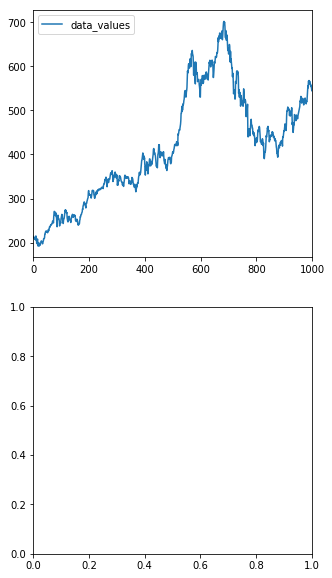

In [44]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(y="data_values", ax=axs[0])
data2.iloc[:1000].plot(y="data_values", ax=axs[1])
plt.show()

**Plotting a time series**

You'll now plot both the datasets again, but with the included time stamps for each (stored in the column called "time"). Let's see if this gives you some more context for understanding each time series data.



*   Plot data and data2 on top of one another, one per axis object.
*   The x-axis should represent the time stamps and the y-axis should represent the dataset values.



In [0]:
# Plot the time series in each dataset
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data.iloc[:1000].plot(x="time", y="data_values", ax=axs[0])
data2.iloc[:1000].plot(x="time", y="data_values", ax=axs[1])
plt.show()

#### Machine learning basics

In [0]:
from sklearn import datasets

In this exercise, you'll use the iris dataset (representing petal characteristics of a number of flowers) to practice using the scikit-learn API to fit a classification model. You can see a sample plot of the data to the right.



*  Extract the "petal length (cm)" and "petal width (cm)" columns of data and assign it to X.
*  Fit a model on X and y.



In [0]:
iris = datasets.load_iris()
# iris

In [63]:
X = iris.data[50:150, :]
y = iris.target[50:150]
print('X shape', X.shape)
print('y shape', y.shape)

X shape (100, 4)
y shape (100,)


In [64]:
X = X[:, :2]
X.shape

(100, 2)

In [0]:
from sklearn.svm import LinearSVC

In [66]:
# Fit the model
model = LinearSVC()
model.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

**Predicting using a classification model**

In [6]:
targets = pd.read_csv('iris_targets.csv')
targets.head()

,Unnamed: 0,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,106,4.9,2.5,4.5,1.7,2
1,140,6.7,3.1,5.6,2.4,2
2,136,6.3,3.4,5.6,2.4,2
3,70,5.9,3.2,4.8,1.8,1
4,104,6.5,3.0,5.8,2.2,2


In [0]:
# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]

In [0]:
# Predict with the model
predictions = model.predict(X_predict)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


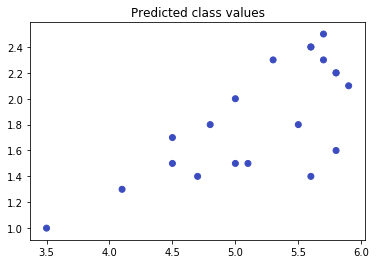

In [0]:
# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

**A simple model: regression**

In this exercise, you'll practice fitting a regression model using data from the Boston housing market. A DataFrame called boston is available in your workspace. It contains many variables of data (stored as columns). Can you find a relationship between the following two variables?

*   "AGE": proportion of owner-occupied units built prior to 1940
*   "RM" : average number of rooms per dwelling

In [10]:
boston = pd.read_csv('boston.csv')
boston.shape

(506, 14)

In [67]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [0]:
from sklearn import linear_model

In [0]:
# Prepare input and output DataFrames
X = boston[['AGE']]
y = boston[['RM']]

In [70]:
# Fit the model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

A 1-D array new_inputs consisting of 100 "new" values for "AGE" (proportion of owner-occupied units built prior to 1940) is available in your workspace along with the model you fit in the previous exercise.

Now that you've fit a model with the Boston housing data, lets see what predictions it generates on some new data. 

In [0]:
#@title
new_inputs = np.array([   2.9       ,    3.88080808,    4.86161616,    5.84242424,
          6.82323232,    7.8040404 ,    8.78484848,    9.76565657,
         10.74646465,   11.72727273,   12.70808081,   13.68888889,
         14.66969697,   15.65050505,   16.63131313,   17.61212121,
         18.59292929,   19.57373737,   20.55454545,   21.53535354,
         22.51616162,   23.4969697 ,   24.47777778,   25.45858586,
         26.43939394,   27.42020202,   28.4010101 ,   29.38181818,
         30.36262626,   31.34343434,   32.32424242,   33.30505051,
         34.28585859,   35.26666667,   36.24747475,   37.22828283,
         38.20909091,   39.18989899,   40.17070707,   41.15151515,
         42.13232323,   43.11313131,   44.09393939,   45.07474747,
         46.05555556,   47.03636364,   48.01717172,   48.9979798 ,
         49.97878788,   50.95959596,   51.94040404,   52.92121212,
         53.9020202 ,   54.88282828,   55.86363636,   56.84444444,
         57.82525253,   58.80606061,   59.78686869,   60.76767677,
         61.74848485,   62.72929293,   63.71010101,   64.69090909,
         65.67171717,   66.65252525,   67.63333333,   68.61414141,
         69.59494949,   70.57575758,   71.55656566,   72.53737374,
         73.51818182,   74.4989899 ,   75.47979798,   76.46060606,
         77.44141414,   78.42222222,   79.4030303 ,   80.38383838,
         81.36464646,   82.34545455,   83.32626263,   84.30707071,
         85.28787879,   86.26868687,   87.24949495,   88.23030303,
         89.21111111,   90.19191919,   91.17272727,   92.15353535,
         93.13434343,   94.11515152,   95.0959596 ,   96.07676768,
         97.05757576,   98.03838384,   99.01919192,  100.        ])

print('new_inputs: ', new_inputs.shape)

new_inputs:  (100,)


In [0]:
# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape(-1, 1)) # reshape the array into 1-D array 

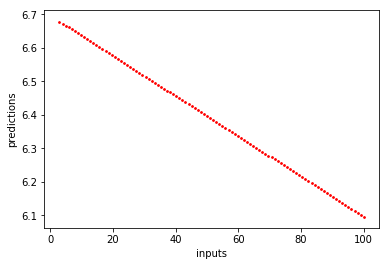

In [0]:
# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()

#### Machine learning and time series data

In [0]:
import librosa as lr
from glob import glob

**Inspecting the classification data**

In these final exercises of this chapter, you'll explore the two datasets you'll use in this course.

The first is a collection of heartbeat sounds. Hearts normally have a predictable sound pattern as they beat, but some disorders can cause the heart to beat abnormally. This dataset contains a training set with labels for each type of heartbeat, and a testing set with no labels. You'll use the testing set to validate your models.

[kaggle dataset link](https://https://www.kaggle.com/kinguistics/heartbeat-sounds)


*   Use glob to return a list of the .wav files in data_dir directory.

*   Import the first audio file in the list using librosa.

*   Generate a time array for the data.

*   Plot the waveform for this file, along with the time array.



In [0]:
# List all the wav files in the folder
# audio_files = glob(data_dir + '/*.wav')

In [0]:
audio_sample = 'artifact__201012172012.wav'

In [0]:
# Read in the first audio file, create the time array
audio, sfreq = lr.load(audio_sample) # lr.load(audio_files[0])
time = np.arange(0, len(audio)) / sfreq

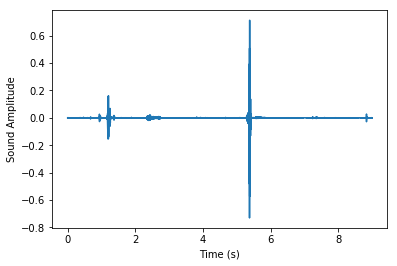

In [75]:
# Plot audio over time
fig, ax = plt.subplots()
ax.plot(time, audio)
ax.set(xlabel='Time (s)', ylabel='Sound Amplitude')
plt.show()

**Inspecting the regression data**

The next dataset contains information about company market value over several years of time. This is one of the most popular kind of time series data used for regression. If you can model the value of a company as it changes over time, you can make predictions about where that company will be in the future. 

[kaggle dataset link](https://https://www.kaggle.com/dgawlik/nyse)

In [11]:
# Read in the data
data = pd.read_csv('prices.csv', index_col=0)
print('data shape: ', data.shape)
data.head()

data shape:  (1762, 5)


,AAPL,FB,NFLX,V,XOM
time,,,,,
1/4/2010,214.009998,NaN,53.479999,88.139999,69.150002
1/5/2010,214.379993,NaN,51.510001,87.129997,69.419998
1/6/2010,210.969995,NaN,53.319999,85.959999,70.019997
1/7/2010,210.58,NaN,52.400001,86.760002,69.800003
1/8/2010,211.980005,NaN,53.300002,87.000000,69.519997


In [12]:
# Convert the index of the DataFrame to datetime
data.index = pd.to_datetime(data.index)
print(data.head())

                  AAPL  FB       NFLX          V        XOM
time                                                       
2010-01-04  214.009998 NaN  53.479999  88.139999  69.150002
2010-01-05  214.379993 NaN  51.510001  87.129997  69.419998
2010-01-06  210.969995 NaN  53.319999  85.959999  70.019997
2010-01-07      210.58 NaN  52.400001  86.760002  69.800003
2010-01-08  211.980005 NaN  53.300002  87.000000  69.519997


TypeError: ignored

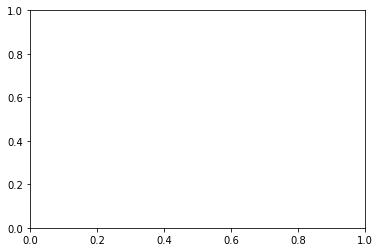

In [13]:
# Loop through each column, plot its values over time
fig, ax = plt.subplots()
for column in data.columns:
    data[column].plot(ax=ax, label=column)
ax.legend()
plt.show()

## 2. Time Series as Inputs to a Model

The easiest way to incorporate time series into your machine learning pipeline is to use them as features in a model. This chapter covers common features that are extracted from time series in order to do machine learning.

#### Classifying a time series

In this exercise, you'll start with perhaps the simplest classification technique: averaging across dimensions of a dataset and visually inspecting the result.

You'll use the heartbeat data described in the last chapter. Some recordings are normal heartbeat activity, while others are abnormal activity. Let's see if you can spot the difference.


In [0]:
def show_plot_and_make_titles():
   axs[0, 0].set(title="Normal Heartbeats")
   axs[0, 1].set(title="Abnormal Heartbeats")
   plt.tight_layout()
   plt.show()

Two DataFrames, normal and abnormal, each with the shape of (n_times_points, n_audio_files) containing the audio for several heartbeats are available in your workspace. Also, the sampling frequency is loaded into a variable called sfreq. A convenience plotting function show_plot_and_make_titles() is also available in your workspace.

In [0]:
abnormal = pd.read_csv('abnormal.csv')
print("abnormal heartbreat shape:", abnormal.shape)
abnormal.tail()

abnormal heartbreat shape: (8820, 4)


,time,0,1,2
8815,3.997732,0.010513,-0.401539,0.138510
8816,3.998186,0.009675,-0.360107,0.134382
8817,3.998639,0.007957,-0.317170,0.124178
8818,3.999093,0.006445,-0.275164,0.109530
8819,3.999546,0.006529,-0.233864,0.090629


In [0]:
normal = pd.read_csv('normal.csv')
print("normal heartbreat shape:", normal.shape)
# normal = normal[['time', '0', '1', '2']]
normal.tail()

normal heartbreat shape: (8820, 4)


,time,3,4,6
8815,3.997732,-0.000090,-0.005930,0.00247
8816,3.998186,-0.000112,-0.004840,0.00447
8817,3.998639,-0.000233,-0.000591,0.01680
8818,3.999093,-0.000103,-0.001320,0.00876
8819,3.999546,-0.000367,0.000652,0.00444


**Warning**: remember to convert timestamps to index column

In [0]:
# Convert the index of the DataFrame to datetime
abnormal.index = abnormal['time']
del abnormal['time']
print(abnormal.tail())

                 0         1         2
time                                  
3.997732  0.010513 -0.401539  0.138510
3.998186  0.009675 -0.360107  0.134382
3.998639  0.007957 -0.317170  0.124178
3.999093  0.006445 -0.275164  0.109530
3.999546  0.006529 -0.233864  0.090629


In [0]:
# Convert the index of the DataFrame to datetime
normal.index = normal['time']
del normal['time']
print(normal.tail())

                 3         4        6
time                                 
3.997732 -0.000090 -0.005930  0.00247
3.998186 -0.000112 -0.004840  0.00447
3.998639 -0.000233 -0.000591  0.01680
3.999093 -0.000103 -0.001320  0.00876
3.999546 -0.000367  0.000652  0.00444


In [0]:
normal.columns

Index(['3', '4', '6'], dtype='object')



*   First, create the time array for these audio files (all audios are the same length).

*   Then, stack the values of the two DataFrames together (normal and abnormal, in that order) so that you have a single array of shape (n_audio_files, n_times_points).

*   Finally, use the code provided to loop through each list item / axis, and plot the audio over time in the corresponding axis object.

*   You'll plot normal heartbeats in the left column, and abnormal ones in the right column



In [0]:
sfreq = 2205

# Calculate the time array
time = np.arange(len(normal)) / sfreq

# Stack the normal/abnormal audio so you can loop and plot
stacked_audio = np.hstack([normal, abnormal]).T

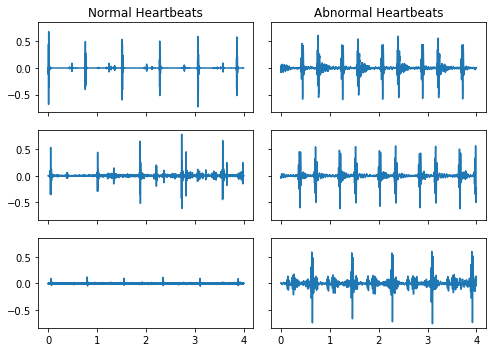

In [0]:
fig, axs = plt.subplots(3, 2, figsize=(7, 5), sharex=True, sharey=True)

# Loop through each audio file / ax object and plot
# .T.ravel() transposes the array, then unravels it into a 1-D vector for looping
for iaudio, ax in zip(stacked_audio, axs.T.ravel()):
    ax.plot(time, iaudio)
show_plot_and_make_titles()

**Invariance  in time**

Another common technique to find simple differences between two sets of data is to average across multiple instances of the same class. This may remove noise and reveal underlying patterns (or, it may not).

In this exercise, you'll average across many instances of each class of heartbeat sound.

In [0]:
time.shape

(8820,)

In [0]:
abnormal = pd.read_csv('abnormal_updated.csv')
abnormal.index = abnormal['time']
del abnormal['time']
print(abnormal.tail())

                 0         1         2  ...        13      14        19
time                                    ...                            
3.997732  0.010513 -0.401539  0.138510  ... -0.010408  0.0933  0.035406
3.998186  0.009675 -0.360107  0.134382  ... -0.012174  0.0255  0.033137
3.998639  0.007957 -0.317170  0.124178  ... -0.013376 -0.0408  0.031081
3.999093  0.006445 -0.275164  0.109530  ... -0.012988 -0.0856  0.029695
3.999546  0.006529 -0.233864  0.090629  ... -0.011003 -0.0944  0.027399

[5 rows x 10 columns]


In [0]:
normal = pd.read_csv('normal_updated.csv')
normal.index = normal['time']
del normal['time']
print(normal.tail())

                 3         4        6  ...        16        17        18
time                                   ...                              
3.997732 -0.000090 -0.005930  0.00247  ... -0.000002 -0.000545 -0.004810
3.998186 -0.000112 -0.004840  0.00447  ... -0.000506 -0.000209  0.004180
3.998639 -0.000233 -0.000591  0.01680  ... -0.000983 -0.000181 -0.000391
3.999093 -0.000103 -0.001320  0.00876  ... -0.002190  0.000168  0.002680
3.999546 -0.000367  0.000652  0.00444  ... -0.003770 -0.000641  0.005770

[5 rows x 10 columns]


In [0]:
normal.shape # (8820, 10) update dataset

(8820, 10)

In [0]:
normal.head()

,3,4,6,7,10,12,15,16,17,18
time,,,,,,,,,,
0.000000,-0.000995,0.000281,0.002950,0.00550,0.000433,0.001320,-0.001694,0.000211,0.000042,0.00109
0.000454,-0.003380,0.000381,0.003030,0.01010,0.000554,-0.000154,-0.002157,-0.001940,-0.000146,-0.00555
0.000907,-0.000948,0.000063,0.000292,0.00827,0.000232,-0.001940,0.000619,0.006150,0.000047,-0.00130
0.001361,-0.000766,0.000026,-0.005920,0.00936,0.000538,-0.001430,0.002182,-0.000340,0.001090,-0.00201
0.001814,0.000469,-0.000432,-0.005310,0.00942,0.001080,-0.002620,0.004176,-0.003360,-0.000170,0.00194


In [0]:
# Average across the audio files of each DataFrame
mean_normal = np.mean(normal, axis=1)
mean_abnormal = np.mean(abnormal, axis=1)
# axis = 1, across columns

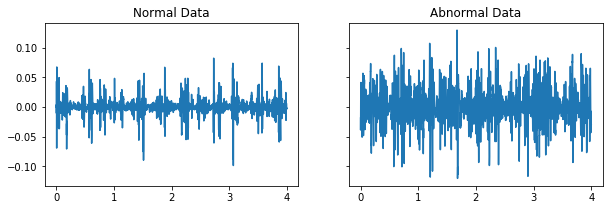

In [0]:
# Plot each average over time
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3), sharey=True)
ax1.plot(time, mean_normal)
ax1.set(title="Normal Data")
ax2.plot(time, mean_abnormal)
ax2.set(title="Abnormal Data")
plt.show()

**Build a classification model**

While eye-balling differences is a useful way to gain an intuition for the data, let's see if you can operationalize things with a model. In this exercise, you will use each repetition as a datapoint, and each moment in time as a feature to fit a classifier that attempts to predict abnormal vs. normal heartbeats using only the raw data.

We've split the two DataFrames (normal and abnormal) into X_train, X_test, y_train, and y_test.

In [0]:
X_train.shape # (42, 8820)

In [0]:
X_test.shape # (18, 8820)

In [0]:
y_train.shape # (42, 1)

In [0]:
y_test.shape # (18,)

In [0]:
from sklearn.svm import LinearSVC

In [0]:
# Initialize and fit the model
model = LinearSVC()
model.fit(X_train, y_train)

In [0]:
# Generate predictions and score them manually
predictions = model.predict(X_test)
print(sum(predictions == y_test.squeeze()) / len(y_test))

# output = 0.555555555556

#### Improving features for classification

**Calculating the envelope of sound**

One of the ways you can improve the features available to your model is to remove some of the noise present in the data. In audio data, a common way to do this is to smooth the data and then rectify it so that the total amount of sound energy over time is more distinguishable. You'll do this in the current exercise.

A heartbeat file is available in the variable audio.

In [0]:
audio = pd.read_csv('audio.csv')
audio.index = audio['time']
del audio['time']
print('heart beat audio shape: ', audio.shape)
audio.head(5)

heart beat audio shape:  (2205, 1)


,Unnamed: 1
time,
0.000000,-0.024684
0.000454,-0.060429
0.000907,-0.070080
0.001361,-0.084212
0.001814,-0.085111


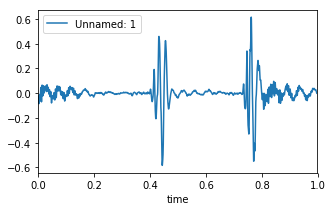

In [0]:
# Plot the raw data first
audio.plot(figsize=(5, 3))
plt.show()

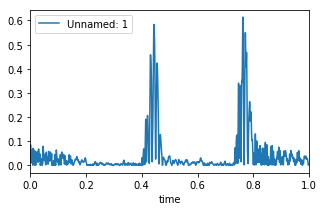

In [0]:
# Rectify the audio signal
audio_rectified = audio.apply(np.abs)

# Plot the result
audio_rectified.plot(figsize=(5, 3))
plt.show()

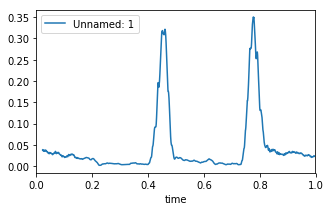

In [0]:
# Smooth by applying a rolling mean
audio_rectified_smooth = audio_rectified.rolling(50).mean()

# Plot the result
audio_rectified_smooth.plot(figsize=(5, 3))
plt.show()

**Calculating features from the envelope**



*   Calculate the mean, standard deviation, and maximum value for each heartbeat sound.

*   Column stack these stats in the same order.
*   Use cross-validation to fit a model on each CV iteration.




In [0]:
# Calculate stats
means = np.mean(audio_rectified_smooth, axis=0)
stds = np.std(audio_rectified_smooth, axis=0)
maxs = np.max(audio_rectified_smooth, axis=0)

print("mean", means)
print("standard deviation", stds)
print('max value', maxs)

mean Unnamed: 1    0.042778
dtype: float64
standard deviation Unnamed: 1    0.072475
dtype: float64
max value Unnamed: 1    0.350103
dtype: float64


In [0]:
# Create the X and y arrays
X = np.column_stack([means, stds, maxs])
X.shape

(1, 3)

In [0]:
labels = np.array(['murmur', 'murmur', 'murmur', 'normal', 'normal', 'murmur',
       'normal', 'normal', 'murmur', 'murmur', 'normal', 'murmur',
       'normal', 'murmur', 'murmur', 'normal', 'normal', 'normal',
       'normal', 'murmur', 'normal', 'normal', 'murmur', 'murmur',
       'normal', 'normal', 'normal', 'normal', 'murmur', 'murmur',
       'murmur', 'normal', 'normal', 'normal', 'normal', 'murmur',
       'murmur', 'murmur', 'normal', 'normal', 'normal', 'murmur',
       'murmur', 'normal', 'murmur', 'murmur', 'murmur', 'murmur',
       'normal', 'normal', 'murmur', 'normal', 'normal', 'murmur',
       'murmur', 'normal', 'murmur', 'murmur', 'murmur', 'murmur'], dtype=object)

In [7]:
y = labels.reshape([-1, 1])
y[:5]

array([['murmur'],
       ['murmur'],
       ['murmur'],
       ['normal'],
       ['normal']], dtype=object)

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

**Derivative features: The tempogram**

In this exercise, you'll use librosa to compute some tempo and rhythm features for heartbeat data, and fit a model once more.

Note that librosa functions tend to **only operate on numpy arrays** instead of DataFrames, so we'll access our Pandas data as a Numpy array with the .values attribute.



*   Use librosa to calculate a tempogram of each heartbeat audio.

*   Calculate the mean, standard deviation, and maximum of each tempogram (this time using DataFrame methods)




In [12]:
audio = pd.read_csv('audio_full.csv')
audio.index = audio['time']
del audio['time']
audio.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,-0.024684,-0.024507,0.008254,-0.000995,0.000281,-0.0307,0.002950,0.00550,-0.00095,0.013836,0.000433,0.000441,0.001320,-0.006831,-0.1190,-0.001694,0.000211,0.000042,0.00109,-0.000390,-3.180000e-05,-0.00169,-0.143727,-0.0199,0.00887,-0.0154,0.000050,0.002630,0.000865,-0.038130,-0.00154,0.002147,0.000139,0.000903,0.023688,0.00565,-0.0106,-0.0179,0.000369,0.000026,0.002742,0.088446,0.00103,0.000618,-0.032361,0.0113,-0.131191,-0.0799,-0.00785,-0.00325,0.073388,0.008799,-0.361737,-0.000501,0.025458,-0.001610,-0.005471,-0.003370,-0.003332,-0.005799
0.000454,-0.060429,-0.047736,0.014809,-0.003380,0.000381,-0.0602,0.003030,0.01010,-0.00324,0.036587,0.000554,0.002490,-0.000154,-0.013365,-0.2550,-0.002157,-0.001940,-0.000146,-0.00555,-0.000819,5.900000e-07,-0.00132,-0.284819,-0.0397,0.00896,-0.0265,-0.000039,0.003920,0.001490,-0.076700,-0.00330,0.005887,-0.000225,0.002540,0.046644,0.01240,-0.0230,-0.0345,0.000980,-0.000063,0.002161,0.179204,-0.00254,0.000476,-0.025013,0.0210,-0.260868,-0.1620,-0.01810,0.00729,0.150714,0.017107,-0.651842,-0.004710,0.053362,-0.004320,-0.011112,-0.004310,-0.007769,-0.010838
0.000907,-0.070080,-0.039938,0.010475,-0.000948,0.000063,-0.0479,0.000292,0.00827,-0.00410,0.044119,0.000232,0.000105,-0.001940,-0.011221,-0.1860,0.000619,0.006150,0.000047,-0.00130,-0.001218,-1.280000e-04,0.01010,-0.245214,-0.0342,-0.00719,-0.0419,-0.000010,0.000509,0.001170,-0.067874,-0.00277,0.007177,-0.000779,0.002640,0.039666,0.00960,-0.0225,-0.0286,0.000765,-0.000043,0.001553,0.156219,-0.00268,-0.000024,0.038087,0.0174,-0.224483,-0.1430,-0.01720,0.01640,0.129426,0.015018,-0.365683,-0.007257,0.050708,0.000573,-0.009940,-0.001080,-0.008644,-0.007528
0.001361,-0.084212,-0.041199,0.010272,-0.000766,0.000026,-0.0480,-0.005920,0.00936,-0.00443,0.053670,0.000538,0.001550,-0.001430,-0.011952,-0.0979,0.002182,-0.000340,0.001090,-0.00201,-0.001315,3.550000e-05,0.00977,-0.261754,-0.0383,-0.01130,-0.0640,0.000044,0.000532,0.003990,-0.074602,-0.00324,0.007889,-0.000424,0.002500,0.046120,0.00976,-0.0254,-0.0302,0.000638,-0.000009,0.004452,0.161680,0.00043,0.000007,0.081341,0.0193,-0.238368,-0.1530,-0.01600,0.01900,0.137134,0.017465,-0.173468,-0.005510,0.052555,-0.001810,-0.011539,-0.000613,-0.010337,-0.008523
0.001814,-0.085111,-0.036050,0.008580,0.000469,-0.000432,-0.0401,-0.005310,0.00942,-0.00358,0.060088,0.001080,0.001220,-0.002620,-0.011607,0.0387,0.004176,-0.003360,-0.000170,0.00194,-0.002458,-2.610000e-05,0.00411,-0.240125,-0.0381,-0.00241,-0.0539,-0.000039,-0.000217,0.003650,-0.072343,-0.00352,0.007446,-0.000544,0.000882,0.041412,0.00373,-0.0267,-0.0270,0.000054,-0.000215,-0.002014,0.141248,-0.00222,-0.000658,0.129666,0.0172,-0.215284,-0.1420,-0.01060,0.02060,0.125747,0.018050,0.141141,-0.000892,0.046691,-0.007140,-0.012783,0.000383,-0.011342,-0.008434


In [13]:
audio.shape # (8820, 60)

(8820, 60)

In [0]:
sfreq = 2205

In [22]:
audio.items()
print('data:', col[:5])

data: 59


In [16]:
# Calculate the tempo of the sounds
tempos = []
for col, i_audio in audio.items():
    tempos.append(lr.beat.tempo(i_audio.values, sr=sfreq, hop_length=2**6, aggregate=None))

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


In [27]:
# Convert the list to an array so you can manipulate it more easily
tempos = np.array(tempos)
tempos[0]

array([137.8125    , 137.8125    , 137.8125    , 137.8125    ,
       137.8125    , 137.8125    , 137.8125    , 137.8125    ,
       137.8125    , 137.8125    , 137.8125    , 137.8125    ,
       137.8125    , 137.8125    , 137.8125    , 137.8125    ,
       137.8125    , 137.8125    , 137.8125    , 137.8125    ,
       137.8125    , 137.8125    , 137.8125    , 137.8125    ,
       137.8125    , 137.8125    , 137.8125    , 137.8125    ,
       137.8125    , 137.8125    , 129.19921875, 129.19921875,
       129.19921875, 129.19921875, 129.19921875, 129.19921875,
       129.19921875, 129.19921875, 129.19921875, 129.19921875,
       129.19921875, 129.19921875,  79.50721154,  79.50721154,
        79.50721154,  79.50721154,  79.50721154,  79.50721154,
        79.50721154,  79.50721154,  79.50721154,  79.50721154,
        79.50721154,  79.50721154,  79.50721154,  79.50721154,
        79.50721154,  79.50721154,  79.50721154,  79.50721154,
        79.50721154,  79.50721154,  79.50721154,  79.50

In [0]:
# Calculate statistics of each tempo
tempos_mean = tempos.mean(axis=-1)
tempos_std = tempos.std(axis=-1)
tempos_max = tempos.max(axis=-1)

In [30]:
print('tempos_mean', tempos_mean)

tempos_mean [ 98.64481794 117.32077206  79.92203177  80.06030518 133.06300951
  89.2640834   83.18682065  76.5625      95.45928266  83.69536079
 131.75823709 104.28551158  69.74875334  97.60421813  60.79963235
 109.56300899  82.11899625 134.2181256  109.45634296  81.11853232
  76.02156929 166.02910507  96.13810742  74.55006759  81.74287877
 161.38756793  98.03917496 138.56148098 114.57322023  98.55552516
 162.52544288  76.92525432 107.24006007  71.28232759 142.33313519
  88.3216345   63.23782578  81.61967784  83.05033107  82.34974461
  87.99292995  78.24824066  81.49002599  72.53718844 125.48368566
  86.48621367  93.01574046  69.12653852  83.8359375  129.19921875
 105.20836313 131.96276651 140.33585258  83.92773641 227.35733696
 100.42292148  61.38821277 202.58406912  76.79722338  82.56392231]


In [31]:
print('tempos_std', tempos_std)

tempos_std [2.45892992e+01 2.23491629e+01 1.07106124e+00 1.20543965e+00
 1.20253746e+01 4.32400736e+01 1.21284565e+00 0.00000000e+00
 3.88725216e+01 1.73853458e+01 3.93611100e+00 4.50108659e+01
 6.58614088e+00 2.00984664e+00 7.10542736e-15 4.44666001e+00
 6.93540452e+00 5.99354497e+00 1.88136415e+00 7.36531092e+00
 2.69962047e+00 1.38228892e+01 4.11433800e+01 5.79197226e+00
 8.07641922e+00 7.77916767e+01 1.21352392e+01 8.16796540e+00
 4.07434389e+00 5.31837461e+01 1.44393168e+01 9.67789303e-01
 2.83956821e+00 2.84217094e-14 6.77877609e+00 8.06944514e+00
 9.00735184e-01 2.90990776e+01 4.13870108e+00 4.27445400e+00
 2.72885360e+00 1.45681104e+00 9.66593430e+00 3.11179031e+00
 4.29889477e+00 7.57854038e+00 1.72416247e+00 1.68835309e+01
 1.62413589e+00 0.00000000e+00 3.74578926e+00 4.39896360e+01
 5.58067307e+00 3.67441585e+01 6.93478713e+00 1.46426728e+01
 1.26257779e+00 9.84389805e+01 7.97557264e-01 2.39291754e+00]


In [32]:
print('tempos_max', tempos_max)

tempos_max [137.8125     137.8125      82.6875      82.6875     147.65625
 172.265625    86.1328125   76.5625     172.265625   129.19921875
 137.8125     206.71875     73.828125   103.359375    60.79963235
 121.59926471  98.4375     137.8125     114.84375    103.359375
  86.1328125  187.92613636 206.71875    129.19921875 108.79934211
 258.3984375  114.84375    147.65625    121.59926471 229.6875
 172.265625    79.50721154 114.84375     71.28232759 147.65625
  98.4375      64.59960938 206.71875     93.96306818  93.96306818
  93.96306818  79.50721154  98.4375      76.5625     137.8125
 103.359375    93.96306818 103.359375    86.1328125  129.19921875
 108.79934211 172.265625   147.65625    159.01442308 229.6875
 129.19921875  62.64204545 295.3125      79.50721154  89.87771739]


In [33]:
# Create the X and y arrays
X = np.column_stack([means, stds, maxs, tempos_mean, tempos_std, tempos_max])
y = labels.reshape([-1, 1])

NameError: ignored

In [0]:
# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

#### The spectrogram

In [0]:
audio = pd.read_csv('audio_full.csv')
audio.index = audio['time']
del audio['time']
audio.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000000,-0.024684,-0.024507,0.008254,-0.000995,0.000281,-0.0307,0.002950,0.00550,-0.00095,0.013836,0.000433,0.000441,0.001320,-0.006831,-0.1190,-0.001694,0.000211,0.000042,0.00109,-0.000390,-3.180000e-05,-0.00169,-0.143727,-0.0199,0.00887,-0.0154,0.000050,0.002630,0.000865,-0.038130,-0.00154,0.002147,0.000139,0.000903,0.023688,0.00565,-0.0106,-0.0179,0.000369,0.000026,0.002742,0.088446,0.00103,0.000618,-0.032361,0.0113,-0.131191,-0.0799,-0.00785,-0.00325,0.073388,0.008799,-0.361737,-0.000501,0.025458,-0.001610,-0.005471,-0.003370,-0.003332,-0.005799
0.000454,-0.060429,-0.047736,0.014809,-0.003380,0.000381,-0.0602,0.003030,0.01010,-0.00324,0.036587,0.000554,0.002490,-0.000154,-0.013365,-0.2550,-0.002157,-0.001940,-0.000146,-0.00555,-0.000819,5.900000e-07,-0.00132,-0.284819,-0.0397,0.00896,-0.0265,-0.000039,0.003920,0.001490,-0.076700,-0.00330,0.005887,-0.000225,0.002540,0.046644,0.01240,-0.0230,-0.0345,0.000980,-0.000063,0.002161,0.179204,-0.00254,0.000476,-0.025013,0.0210,-0.260868,-0.1620,-0.01810,0.00729,0.150714,0.017107,-0.651842,-0.004710,0.053362,-0.004320,-0.011112,-0.004310,-0.007769,-0.010838
0.000907,-0.070080,-0.039938,0.010475,-0.000948,0.000063,-0.0479,0.000292,0.00827,-0.00410,0.044119,0.000232,0.000105,-0.001940,-0.011221,-0.1860,0.000619,0.006150,0.000047,-0.00130,-0.001218,-1.280000e-04,0.01010,-0.245214,-0.0342,-0.00719,-0.0419,-0.000010,0.000509,0.001170,-0.067874,-0.00277,0.007177,-0.000779,0.002640,0.039666,0.00960,-0.0225,-0.0286,0.000765,-0.000043,0.001553,0.156219,-0.00268,-0.000024,0.038087,0.0174,-0.224483,-0.1430,-0.01720,0.01640,0.129426,0.015018,-0.365683,-0.007257,0.050708,0.000573,-0.009940,-0.001080,-0.008644,-0.007528
0.001361,-0.084212,-0.041199,0.010272,-0.000766,0.000026,-0.0480,-0.005920,0.00936,-0.00443,0.053670,0.000538,0.001550,-0.001430,-0.011952,-0.0979,0.002182,-0.000340,0.001090,-0.00201,-0.001315,3.550000e-05,0.00977,-0.261754,-0.0383,-0.01130,-0.0640,0.000044,0.000532,0.003990,-0.074602,-0.00324,0.007889,-0.000424,0.002500,0.046120,0.00976,-0.0254,-0.0302,0.000638,-0.000009,0.004452,0.161680,0.00043,0.000007,0.081341,0.0193,-0.238368,-0.1530,-0.01600,0.01900,0.137134,0.017465,-0.173468,-0.005510,0.052555,-0.001810,-0.011539,-0.000613,-0.010337,-0.008523
0.001814,-0.085111,-0.036050,0.008580,0.000469,-0.000432,-0.0401,-0.005310,0.00942,-0.00358,0.060088,0.001080,0.001220,-0.002620,-0.011607,0.0387,0.004176,-0.003360,-0.000170,0.00194,-0.002458,-2.610000e-05,0.00411,-0.240125,-0.0381,-0.00241,-0.0539,-0.000039,-0.000217,0.003650,-0.072343,-0.00352,0.007446,-0.000544,0.000882,0.041412,0.00373,-0.0267,-0.0270,0.000054,-0.000215,-0.002014,0.141248,-0.00222,-0.000658,0.129666,0.0172,-0.215284,-0.1420,-0.01060,0.02060,0.125747,0.018050,0.141141,-0.000892,0.046691,-0.007140,-0.012783,0.000383,-0.011342,-0.008434


In [0]:
# select one column
audio = audio['0']
audio.shape

(8820,)

In [0]:
# convert to numpy array
audio = audio.values
len(audio)

8820

In [0]:
# Import the stft function
from librosa.core import stft

In [0]:
# Prepare the STFT
'''
short-time Fourier transform
'''

HOP_LENGTH = 2**4
spec = stft(audio, hop_length=HOP_LENGTH, n_fft=2**7)

In [0]:
spec

array([[-1.13290596e+00+0.0000000e+00j, -7.07873702e-01+0.0000000e+00j,
         2.88618654e-01+0.0000000e+00j, ...,
        -2.53475010e-01+0.0000000e+00j,  2.05393787e-02+0.0000000e+00j,
         1.79744422e-01+0.0000000e+00j],
       [ 1.48598993e+00+5.3776428e-17j,  8.67359877e-01+1.2199695e+00j,
        -3.74866873e-01+1.4323628e+00j, ...,
         1.31282836e-01+3.8840389e-01j, -1.44318029e-01+2.7423888e-01j,
        -2.35509411e-01+4.2688582e-02j],
       [-1.21077740e+00-6.5179793e-18j, -4.43400621e-01-9.6909976e-01j,
         3.82907242e-01-6.5555298e-01j, ...,
         6.81477115e-02-2.3330842e-01j,  1.22151084e-01-6.6042572e-02j,
         1.30250558e-01-1.5459371e-02j],
       ...,
       [ 4.07697111e-02+3.4273554e-17j, -6.75881456e-04-3.4756005e-02j,
        -2.02732868e-02+8.9741452e-04j, ...,
         7.53598433e-05-4.1977797e-05j,  1.43359703e-05-1.3830222e-04j,
        -2.12445608e-04-6.7053705e-05j],
       [-3.92721482e-02+2.9490299e-17j, -2.34160814e-02+2.3961063e-0

In [0]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

In [0]:
# Convert into decibels
spec_db = amplitude_to_db(spec)

/usr/local/lib/python3.6/dist-packages/librosa/core/spectrum.py:983: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  warnings.warn('amplitude_to_db was called on complex input so phase '


In [0]:
spec_db

array([[  1.0838771,  -3.0008845, -10.793512 , ..., -11.921297 ,
        -33.748253 , -14.906892 ],
       [  3.4403176,   3.5037184,   3.4087787, ...,  -7.74451  ,
        -10.17572  , -12.419439 ],
       [  1.6612864,   0.55286  ,  -2.393004 , ..., -12.285822 ,
        -17.148363 , -17.643654 ],
       ...,
       [-27.793247 , -29.177761 , -33.853016 , ..., -57.33169  ,
        -57.33169  , -57.33169  ],
       [-28.118307 , -29.498348 , -34.18632  , ..., -57.33169  ,
        -57.33169  , -57.33169  ],
       [-28.240051 , -29.63079  , -34.329063 , ..., -57.33169  ,
        -57.33169  , -57.33169  ]], dtype=float32)

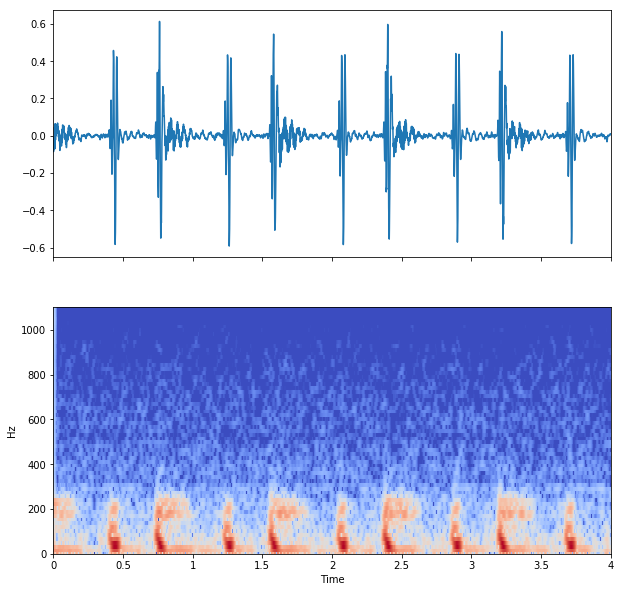

In [0]:
# Compare the raw audio to the spectrogram of the audio
fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(time, audio)
specshow(spec_db, sr=sfreq, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
plt.show()

**Engineering spectral features**

 By computing the spectral features, you have a much better idea of what's going on. As such, there are all kinds of spectral features that you can compute using the spectrogram as a base.

In [0]:
import librosa as lr

In [34]:
#@title
spec = np.array([[  1.13290751e+00,   7.07875013e-01,   2.88617253e-01,
          1.16599214e+00,   1.27197540e+00,   6.09005868e-01,
          2.56960034e-01,   6.73008382e-01,   3.90955657e-01,
          2.34730601e-01,   5.77413857e-01,   3.25317293e-01,
          2.03724936e-01,   4.32403743e-01,   6.72393739e-02,
          5.99444926e-01,   1.01549983e+00,   8.31372678e-01,
          1.93685204e-01,   4.00395989e-01,   5.13987839e-01,
          1.13066472e-01,   4.42039430e-01,   6.98940694e-01,
          4.63947684e-01,   8.72166678e-02,   5.68480194e-01,
          7.16809392e-01,   5.52386284e-01,   2.97484219e-01,
          1.45570964e-01,   9.95630324e-02,   6.46410808e-02,
          4.82910387e-02,   1.87521860e-01,   2.44828135e-01,
          1.51338607e-01,   4.15138490e-02,   2.01935247e-01,
          2.40275145e-01,   1.49578318e-01,   2.80676613e-04,
          1.03526495e-01,   9.49466005e-02,   2.62666345e-02,
          1.61675230e-01,   2.36893147e-01,   2.02560589e-01,
          1.03988804e-01,   2.03186572e-02,   4.09490382e-03,
          1.52170816e-02,   1.40832495e-02,   3.82770598e-02,
          2.75969524e-02,   1.27382755e-01,   3.70870322e-01,
          5.58405221e-01,   1.53568554e+00,   6.03954196e-01,
          7.53531873e-01,   1.15519500e+00,   7.27312505e-01,
          3.82921129e-01,   1.69860935e+00,   1.23890293e+00,
          2.74022609e-01,   6.36151731e-01,   5.41625381e-01,
          5.10668278e-01,   1.98156089e-01,   1.76271319e-01,
          2.56832957e-01,   1.69315804e-02,   2.09689960e-01,
          1.50853708e-01,   1.15963079e-01,   3.18244874e-01,
          2.46789843e-01,   2.62658596e-02,   2.35004961e-01,
          1.58275455e-01,   1.90007403e-01,   5.52152514e-01,
          7.00881422e-01,   5.70988297e-01,   3.11520934e-01,
          1.46812961e-01,   1.50443718e-01,   2.51993030e-01,
          2.86489934e-01,   1.95580229e-01,   3.31389271e-02,
          1.06189311e-01,   1.93533197e-01,   2.43368447e-01,
          2.64558226e-01,   2.56009310e-01,   1.89831257e-01,
          1.81660950e-01,   1.80121496e-01,   4.88298684e-01,
          2.62132489e-05,   1.48543203e+00,   1.46841609e+00,
          3.33431572e-01,   1.99146199e+00,   1.87197566e+00,
          1.38627201e-01,   2.24286866e+00,   2.81409216e+00,
          7.01489270e-01,   1.15138829e+00,   1.23377693e+00,
          2.19734684e-01,   8.22802544e-01,   1.27660000e+00,
          1.00162435e+00,   2.28675231e-01,   4.70313489e-01,
          5.52382410e-01,   2.30711009e-02,   7.24264860e-01,
          8.65348458e-01,   2.56298542e-01,   6.01971745e-01,
          9.49335337e-01,   4.64246720e-01,   4.37093586e-01,
          1.01714289e+00,   7.94785082e-01,   1.20888809e-02,
          7.63374567e-01,   8.97038996e-01,   3.64805728e-01,
          3.72639298e-01,   7.67275155e-01,   6.15726113e-01,
          1.59932539e-01,   2.03439310e-01,   2.67107725e-01,
          1.50850609e-01,   1.12975515e-01,   2.10494548e-01,
          2.86864936e-01,   1.54970661e-01,   1.76549137e-01,
          4.66340393e-01,   4.82564151e-01,   1.63167387e-01,
          3.07091951e-01,   6.15782738e-01,   5.72580159e-01,
          2.17521846e-01,   2.18528956e-01,   4.79696244e-01,
          4.44805562e-01,   1.48037717e-01,   1.89679101e-01,
          3.80964607e-01,   3.34508866e-01,   1.05469033e-01,
          1.66490465e-01,   3.39469314e-01,   3.23716849e-01,
          1.92003354e-01,   9.65360552e-03,   4.35322970e-02,
          1.88998625e-01,   3.11908841e-01,   6.93204284e-01,
          1.26585793e+00,   8.41268227e-02,   1.46029162e+00,
          1.60649765e+00,   8.00445318e-01,   6.84013665e-01,
          1.89850807e+00,   9.43495810e-01,   7.58682489e-01,
          1.04153216e+00,   7.05571175e-01,   2.47884274e-01,
          3.89570296e-01,   7.99687386e-01,   6.74564004e-01,
          2.02100128e-01,   1.98502660e-01,   2.55274832e-01,
          8.36294368e-02,   1.84108447e-02,   1.04616098e-01,
          3.31134826e-01,   3.82538736e-01,   1.53148681e-01,
          2.01954901e-01,   4.30162519e-01,   3.81023109e-01,
          1.53212726e-01,   6.49628341e-02,   1.38231277e-01,
          8.71857628e-02,   1.56120500e-02,   3.12765059e-03,
          3.74906436e-02,   9.98318568e-02,   1.26129180e-01,
          1.08302638e-01,   3.18900868e-02,   7.49108642e-02,
          1.49969652e-01,   2.09145993e-01,   5.34182303e-02,
          1.58032700e-01,   6.81416810e-01,   1.00661814e-01,
          1.29437149e+00,   1.03584719e+00,   7.72386730e-01,
          2.21087384e+00,   1.82612801e+00,   1.88427418e-02,
          2.17456651e+00,   2.10733747e+00,   3.57432485e-01,
          2.07100725e+00,   1.77548909e+00,   3.52004737e-01,
          9.63999987e-01,   1.37846196e+00,   7.47642159e-01,
          4.48039204e-01,   1.36107802e+00,   1.31249332e+00,
          3.68820459e-01,   6.86884522e-01,   1.03852844e+00,
          4.88251150e-01,   3.73160511e-01,   7.66579747e-01,
          3.98106575e-01,   3.51397425e-01,   8.08484912e-01,
          6.55662060e-01,   1.28394037e-01,   2.42335871e-01,
          1.40662849e-01,   2.86874324e-01,   6.41644299e-01,
          5.91857374e-01,   1.72292918e-01,   2.88263351e-01,
          4.97882485e-01,   4.16684330e-01,   2.36901119e-01,
          1.30535632e-01,   1.17359236e-01,   1.22480713e-01,
          5.62688038e-02,   2.73935571e-02,   1.81875788e-02,
          1.35747969e-01,   3.61898184e-01,   5.02526641e-01,
          4.38066423e-01,   1.77417114e-01,   1.50490314e-01,
          3.63299340e-01,   3.79058599e-01,   2.14190856e-01,
          1.39164925e-02,   1.60806179e-01,   1.47694051e-01,
          1.35220559e-02,   2.03009874e-01,   2.79356211e-01,
          1.66434258e-01,   9.08661336e-02,   3.10451716e-01,
          4.24547434e-01,   3.11688036e-01,   4.14875686e-01,
          4.79070604e-01,   5.14160633e-01,   7.85567224e-01,
          6.00254178e-01,   1.60759294e+00,   1.32942796e+00,
          2.88420916e-01,   1.24428391e+00,   2.18770599e+00,
          9.66089070e-01,   5.69019854e-01,   7.01657116e-01,
          5.21425247e-01,   2.96181470e-01,   1.61337152e-01,
          5.79929352e-01,   6.32830620e-01,   3.25016916e-01,
          2.95784771e-02,   1.96482673e-01,   1.64887071e-01,
          1.17680587e-01,   1.76606640e-01,   2.91731656e-01,
          2.93652952e-01,   7.20308200e-02,   2.80074567e-01,
          5.40464461e-01,   5.46744704e-01,   2.55309016e-01,
          2.00998157e-01,   5.92560291e-01,   7.06830978e-01,
          5.01597822e-01,   1.51720166e-01,   1.37119532e-01,
          2.24441707e-01,   1.49367213e-01,   4.63286862e-02,
          7.84196984e-03,   4.18292768e-02,   8.02049488e-02,
          1.31876081e-01,   7.06384983e-03,   1.79671600e-01,
          5.96736968e-01,   2.42939413e-01,   1.52080560e+00,
          8.98587227e-01,   1.08779371e+00,   2.42156577e+00,
          1.77399385e+00,   2.02131674e-01,   2.36028171e+00,
          1.95765173e+00,   5.09855151e-01,   1.94808018e+00,
          1.54001439e+00,   3.03330272e-01,   6.71215892e-01,
          8.96156251e-01,   3.87394756e-01,   4.25482929e-01,
          9.38850343e-01,   7.85494089e-01,   1.17560670e-01,
          4.93405402e-01,   5.50761044e-01,   7.25553185e-02,
          4.28061962e-01,   4.28123623e-01,   1.25505075e-01,
          8.31391990e-01,   1.13941550e+00,   8.66455913e-01,
          2.84385353e-01,   1.74971014e-01,   2.58008748e-01,
          4.54053991e-02,   2.02555805e-01,   2.46328250e-01,
          7.23397061e-02,   1.52987003e-01,   2.74255842e-01,
          2.39523754e-01,   1.26788884e-01,   3.79676409e-02,
          1.33562218e-02,   3.84257510e-02,   8.74338597e-02,
          1.29604921e-01,   9.68950018e-02,   5.33934794e-02,
          2.82014996e-01,   4.67601568e-01,   5.07390141e-01,
          3.58065546e-01,   7.81765133e-02,   1.79591253e-01,
          2.89078116e-01,   2.01850221e-01,   5.89219853e-03,
          1.28848732e-01,   1.08647414e-01,   7.32913390e-02,
          2.72408724e-01,   3.52878243e-01,   2.92250931e-01,
          1.48498118e-01,   2.76286341e-02,   1.32493109e-01,
          2.32460111e-01,   6.79122925e-01,   7.61889398e-01,
          4.25371408e-01,   7.97289729e-01,   3.14703643e-01,
          1.02392507e+00,   7.56682813e-01,   7.32757477e-03,
          1.27646577e+00,   1.87453318e+00,   5.60799479e-01,
          5.69081903e-01,   3.30446869e-01,   2.97594517e-02,
          3.24324578e-01,   6.65141284e-01,   7.09658921e-01,
          3.10580075e-01,   2.58446693e-01,   5.41342556e-01,
          3.45170230e-01,   5.59781641e-02,   2.58594275e-01,
          5.51882088e-02,   3.71678352e-01,   6.41173184e-01,
          5.37536263e-01,   1.65425614e-01,   1.34273350e-01,
          1.35079578e-01,   1.09028302e-01,   3.60259771e-01,
          3.92592251e-01,   1.92490086e-01,   4.78200763e-02,
          1.49090484e-01,   8.45741928e-02,   1.23475608e-03,
          1.34157417e-02,   4.37621996e-02,   8.19862783e-02,
          4.93874475e-02,   3.18549504e-03,   5.82058579e-02,
          5.66944741e-02,   5.14522344e-02,   1.97461948e-01,
          7.77627766e-01,   1.71413732e+00,   6.33321583e-01,
          1.44531465e+00,   2.49414754e+00,   1.44809961e+00,
          7.94853568e-01,   2.86354828e+00,   2.05850935e+00,
          4.75476116e-01,   1.73713708e+00,   1.21493661e+00,
          1.71869975e-02,   9.90192771e-01,   1.22594428e+00,
          7.32254982e-01,   1.11967102e-01,   7.10281253e-01,
          6.58221722e-01,   1.07490569e-01,   4.04775262e-01,
          3.84677231e-01,   1.52739123e-01,   7.06290722e-01,
          7.94913232e-01,   3.71426970e-01,   1.74594790e-01,
          3.93286079e-01,   1.96417332e-01,   1.72850177e-01,
          3.56994897e-01,   2.45951340e-01,   6.95414050e-03,
          1.33142143e-01,   1.75620932e-02,   1.71107307e-01,
          1.77843988e-01,   6.84351996e-02,   3.86880249e-01,
          4.76438642e-01,   2.19268754e-01,   2.05855623e-01,
          4.63407815e-01,   3.30444247e-01,   7.30566978e-02,
          4.68066603e-01,   5.83224654e-01,   3.82291704e-01,
          4.91940379e-02,   1.96579188e-01,   2.43536994e-01,
          1.57189414e-01,   8.11298415e-02,   9.36878920e-02,
          1.50361955e-01,   1.41118571e-01,   4.12865169e-02,
          9.80015621e-02,   1.63930282e-01,   1.05421342e-01,
          8.64938716e-04,   5.18354103e-02,   2.09770929e-02,
          5.47035411e-02,   1.55565254e-02,   1.50920764e-01,
          6.91564143e-01,   6.56647146e-01,   5.35163343e-01,
          6.12403035e-01,   5.81242740e-01,   1.17559552e+00,
          7.97292769e-01,   1.72314327e-02,   1.21188247e+00,
          1.39929676e+00,   2.20348030e-01,   1.21135509e+00,
          8.09554696e-01,   3.29296589e-01,   1.38585329e-01,
          5.65206409e-01,   6.00081682e-01,   1.53089106e-01,
          4.48373258e-01,   7.18369007e-01,   4.93531018e-01,
          6.69385353e-03,   3.71786773e-01,   3.80296499e-01,
          1.47729814e-01,   6.29195049e-02,   8.69833082e-02,
          3.84506099e-02,   1.43307075e-01,   1.38106689e-01,
          5.30643500e-02,   2.44695731e-02,   2.92822290e-02,
          4.07334603e-02,   1.26944348e-01,   1.64028764e-01,
          1.06629819e-01,   5.12010530e-02,   2.97061503e-01,
          5.22599399e-01,   6.14071906e-01,   5.13176024e-01,
          2.53474802e-01,   2.05410458e-02,   1.79746836e-01],
       [  1.48598897e+00,   1.49687564e+00,   1.48060358e+00,
          1.41462755e+00,   1.40230393e+00,   1.38550997e+00,
          1.25920045e+00,   1.14622116e+00,   1.15751255e+00,
          1.10766792e+00,   1.01372993e+00,   1.01722097e+00,
          9.60243821e-01,   8.97802234e-01,   1.01876175e+00,
          1.13555610e+00,   1.13970268e+00,   1.09181368e+00,
          9.89216030e-01,   8.48923743e-01,   8.07431161e-01,
          8.64221931e-01,   8.86580706e-01,   8.68189633e-01,
          8.50174963e-01,   8.07217777e-01,   7.34378576e-01,
          6.43223763e-01,   4.89835083e-01,   2.68812448e-01,
          6.79834485e-02,   1.14451490e-01,   1.67341113e-01,
          2.30354518e-01,   2.78495222e-01,   2.89091140e-01,
          2.84930795e-01,   2.74310589e-01,   2.53574669e-01,
          2.30788544e-01,   2.04186127e-01,   1.77216142e-01,
          1.60517976e-01,   1.72681987e-01,   2.17412040e-01,
          2.48217791e-01,   2.40342662e-01,   2.01555401e-01,
          1.34966806e-01,   6.50185272e-02,   4.03176174e-02,
          4.80199456e-02,   5.90901189e-02,   4.98167500e-02,
          5.89600205e-02,   5.27069047e-02,   4.04842526e-01,
          1.32449365e+00,   2.66777492e+00,   4.04494905e+00,
          5.10123444e+00,   5.56565332e+00,   5.58720970e+00,
          4.98455811e+00,   3.54144883e+00,   2.10267210e+00,
          5.65377831e-01,   3.73324990e-01,   7.63186991e-01,
          8.51744413e-01,   8.02604914e-01,   6.67667091e-01,
          5.88813424e-01,   5.68445563e-01,   5.09539664e-01,
          5.21284282e-01,   5.43541372e-01,   5.14484167e-01,
          4.99216616e-01,   4.69711930e-01,   4.17686760e-01,
          4.45959330e-01,   5.54361939e-01,   6.43909156e-01,
          6.54210210e-01,   5.61407566e-01,   3.61580580e-01,
          1.55278966e-01,   2.08684370e-01,   2.80452281e-01,
          2.85870314e-01,   2.51028478e-01,   1.98724806e-01,
          1.50867552e-01,   1.10783078e-01,   1.06371857e-01,
          1.62215561e-01,   1.88692644e-01,   1.80228218e-01,
          9.83439609e-02,   1.35187104e-01,   3.44970614e-01,
          1.03292263e+00,   2.57082105e+00,   3.90764856e+00,
          5.53023338e+00,   6.56180573e+00,   7.13593912e+00,
          7.21356678e+00,   6.14151621e+00,   4.67753792e+00,
          3.29812360e+00,   2.03837323e+00,   1.55358255e+00,
          1.32973242e+00,   1.22279513e+00,   1.23960769e+00,
          1.26130188e+00,   1.21405029e+00,   1.10300696e+00,
          1.10848153e+00,   1.25690401e+00,   1.32242870e+00,
          1.35647535e+00,   1.44543481e+00,   1.44005895e+00,
          1.39665234e+00,   1.44185841e+00,   1.42767835e+00,
          1.34044755e+00,   1.31961381e+00,   1.29016638e+00,
          1.19907713e+00,   1.15173674e+00,   1.14113677e+00,
          1.07079339e+00,   9.81446505e-01,   8.90111387e-01,
          7.10521340e-01,   5.05670011e-01,   3.86521429e-01,
          2.53473788e-01,   1.97122768e-01,   3.25624555e-01,
          4.01851952e-01,   4.70389664e-01,   5.61801136e-01,
          6.05514705e-01,   6.09404862e-01,   6.17303908e-01,
          6.30015075e-01,   6.38907969e-01,   6.42379880e-01,
          6.25185251e-01,   5.82922935e-01,   5.33901513e-01,
          4.80790585e-01,   4.45371002e-01,   4.18928176e-01,
          4.06938791e-01,   4.00751859e-01,   3.77661794e-01,
          3.42311502e-01,   3.13984275e-01,   3.01987350e-01,
          2.54142314e-01,   1.76382512e-01,   1.78470716e-01,
          8.76012817e-02,   3.82858217e-01,   1.35014880e+00,
          2.51081014e+00,   4.01379251e+00,   5.29684925e+00,
          6.01431179e+00,   6.01357555e+00,   5.19429588e+00,
          3.68859053e+00,   2.23259997e+00,   6.37895823e-01,
          3.98145020e-01,   8.82464707e-01,   1.02774644e+00,
          1.05710948e+00,   1.00757062e+00,   9.33126986e-01,
          7.69529521e-01,   5.70825398e-01,   4.81443763e-01,
          4.00395334e-01,   3.24768543e-01,   4.11875904e-01,
          4.99269217e-01,   5.37554026e-01,   5.69595456e-01,
          5.62093198e-01,   5.16757011e-01,   4.59125251e-01,
          3.55623215e-01,   2.37450585e-01,   1.74925387e-01,
          1.36333391e-01,   8.72611031e-02,   6.93837032e-02,
          8.78311023e-02,   1.03319831e-01,   1.10695884e-01,
          9.85159650e-02,   9.85161290e-02,   1.30147278e-01,
          1.60351545e-01,   1.34915456e-01,   2.58410722e-01,
          3.72683287e-01,   6.19403481e-01,   1.44151676e+00,
          2.83554006e+00,   4.01563931e+00,   5.60512972e+00,
          6.62528038e+00,   7.17238903e+00,   7.02540493e+00,
          5.79863214e+00,   4.66041183e+00,   3.56728125e+00,
          2.58279848e+00,   2.15876865e+00,   1.86266363e+00,
          1.64510190e+00,   1.60269141e+00,   1.68690634e+00,
          1.75992966e+00,   1.76304519e+00,   1.78706169e+00,
          1.79206240e+00,   1.66378975e+00,   1.55928957e+00,
          1.53454840e+00,   1.39493525e+00,   1.24397600e+00,
          1.21558809e+00,   1.15220416e+00,   1.04732180e+00,
          9.72397029e-01,   8.39299858e-01,   6.85566723e-01,
          7.22301364e-01,   8.19535553e-01,   8.26632440e-01,
          7.92235017e-01,   7.24589586e-01,   6.22758806e-01,
          5.29522538e-01,   4.15804625e-01,   2.26090491e-01,
          8.11432078e-02,   1.54559523e-01,   1.78976476e-01,
          1.80954203e-01,   1.64836004e-01,   1.81296676e-01,
          2.82081991e-01,   3.84946823e-01,   4.44154173e-01,
          4.55581099e-01,   4.34645027e-01,   4.10903960e-01,
          3.93972307e-01,   3.59870702e-01,   3.06436151e-01,
          2.57425874e-01,   2.26344869e-01,   2.35647649e-01,
          2.79237181e-01,   3.13373148e-01,   3.29831868e-01,
          3.46286327e-01,   3.71122509e-01,   3.91407907e-01,
          3.29045951e-01,   3.09743077e-01,   1.59261450e-01,
          5.89612424e-01,   1.58514571e+00,   2.45559359e+00,
          3.86089444e+00,   5.10787344e+00,   5.91744614e+00,
          6.01928186e+00,   5.23858213e+00,   3.67972064e+00,
          1.97187936e+00,   4.28641498e-01,   2.40864143e-01,
          6.61808968e-01,   7.62897789e-01,   7.95768917e-01,
          7.57938266e-01,   7.01178610e-01,   6.19225383e-01,
          4.77104604e-01,   3.64705294e-01,   2.79630989e-01,
          1.82758868e-01,   2.81297833e-01,   3.83988410e-01,
          4.11201179e-01,   4.41729009e-01,   4.84796494e-01,
          5.13974369e-01,   5.24119377e-01,   5.47092497e-01,
          5.95894635e-01,   6.45156145e-01,   6.66418612e-01,
          6.22408926e-01,   4.85916317e-01,   3.38785946e-01,
          2.50513703e-01,   1.74924478e-01,   8.88751373e-02,
          5.04593588e-02,   7.44782686e-02,   9.53081101e-02,
          6.72274604e-02,   2.02091917e-01,   3.02598089e-01,
          5.80830812e-01,   1.52748013e+00,   2.93337727e+00,
          4.26871157e+00,   5.91247702e+00,   6.87703323e+00,
          7.37298822e+00,   7.03478336e+00,   5.63615894e+00,
          4.48601246e+00,   3.26883554e+00,   2.29809260e+00,
          1.83312416e+00,   1.44640505e+00,   1.17083621e+00,
          1.09230316e+00,   1.13306022e+00,   1.16965449e+00,
          1.17142057e+00,   1.18890870e+00,   1.16544950e+00,
          1.05732489e+00,   1.02386618e+00,   1.04028213e+00,
          9.72728789e-01,   9.78429914e-01,   1.09242320e+00,
          1.14500403e+00,   1.11881840e+00,   1.01848805e+00,
          8.09466600e-01,   5.85860610e-01,   4.95554239e-01,
          4.58352327e-01,   3.90690923e-01,   3.51916522e-01,
          3.43449056e-01,   3.21433574e-01,   2.89304227e-01,
          2.45568603e-01,   1.65547729e-01,   7.48828873e-02,
          3.35622877e-02,   5.18428907e-02,   1.03034258e-01,
          1.43282726e-01,   1.74947813e-01,   2.39868313e-01,
          3.29728663e-01,   4.04180706e-01,   4.23612982e-01,
          3.97696197e-01,   3.61035913e-01,   3.32864791e-01,
          3.16664606e-01,   3.12963992e-01,   3.00586253e-01,
          2.68896520e-01,   2.68599421e-01,   3.07390153e-01,
          3.34807307e-01,   3.29303324e-01,   2.72087276e-01,
          1.81247398e-01,   8.74983221e-02,   8.36274177e-02,
          1.99513003e-01,   3.97315770e-01,   1.02990353e+00,
          2.20528865e+00,   3.03257489e+00,   4.18058348e+00,
          4.97674513e+00,   5.49270391e+00,   5.53565454e+00,
          4.76570082e+00,   3.34722281e+00,   1.71437979e+00,
          5.86074889e-01,   1.31291687e-01,   4.17327076e-01,
          6.81231081e-01,   8.65578473e-01,   9.20704007e-01,
          9.19469714e-01,   8.49417269e-01,   7.81337321e-01,
          7.73126543e-01,   6.99925900e-01,   6.19722605e-01,
          6.82825267e-01,   7.50207543e-01,   7.38130748e-01,
          6.78545594e-01,   5.70149899e-01,   4.43144470e-01,
          4.31437284e-01,   4.88672078e-01,   4.99973863e-01,
          4.80238438e-01,   4.31040227e-01,   3.38874608e-01,
          2.71297604e-01,   2.38978267e-01,   1.84052154e-01,
          1.67860255e-01,   1.72761858e-01,   1.57631323e-01,
          1.40545920e-01,   1.12453066e-01,   1.76084042e-01,
          2.13432282e-01,   2.25558117e-01,   4.88059014e-01,
          1.38372684e+00,   2.82125235e+00,   4.37813330e+00,
          6.02903843e+00,   6.95146370e+00,   7.48430967e+00,
          7.11354208e+00,   5.65211201e+00,   4.40235519e+00,
          3.01219201e+00,   2.07522917e+00,   1.70188642e+00,
          1.41722739e+00,   1.25394094e+00,   1.23208129e+00,
          1.22884047e+00,   1.17560732e+00,   1.10539734e+00,
          1.11294687e+00,   1.09462535e+00,   9.80700910e-01,
          9.76847112e-01,   1.06895339e+00,   1.07184851e+00,
          1.01722085e+00,   9.18309033e-01,   7.53387451e-01,
          6.43087745e-01,   6.17402971e-01,   5.68339705e-01,
          5.16312182e-01,   4.82353240e-01,   4.05109435e-01,
          3.45676363e-01,   3.87438685e-01,   4.17435020e-01,
          4.54837233e-01,   5.54797471e-01,   6.20018303e-01,
          6.37792826e-01,   6.53211117e-01,   6.36421859e-01,
          6.06069624e-01,   6.30396843e-01,   6.54916108e-01,
          6.41548753e-01,   6.06674075e-01,   5.35985589e-01,
          4.20074850e-01,   3.13381732e-01,   2.52999693e-01,
          1.81756273e-01,   8.82725343e-02,   1.16604589e-01,
          1.87357485e-01,   2.30157182e-01,   2.49650508e-01,
          2.42210060e-01,   2.21704543e-01,   2.03584895e-01,
          1.67003334e-01,   1.35029465e-01,   1.29444852e-01,
          1.29093096e-01,   2.06543595e-01,   2.77220726e-01,
          5.28096318e-01,   1.16669774e+00,   2.31018186e+00,
          3.07704282e+00,   4.27312851e+00,   5.09738064e+00,
          5.59489155e+00,   5.48919916e+00,   4.60129404e+00,
          3.42910051e+00,   1.90671992e+00,   6.60532355e-01,
          3.29185396e-01,   6.68357909e-01,   8.08261037e-01,
          8.69410694e-01,   8.95555913e-01,   9.38960791e-01,
          9.37007844e-01,   9.07157123e-01,   8.61279011e-01,
          7.49673009e-01,   6.18316352e-01,   5.35546124e-01,
          4.22727942e-01,   2.86788046e-01,   2.39518523e-01,
          2.31723398e-01,   2.09206372e-01,   1.87814280e-01,
          1.50894567e-01,   1.07272245e-01,   9.69633982e-02,
          1.14937507e-01,   1.34455711e-01,   1.48530632e-01,
          1.70534417e-01,   2.19224572e-01,   3.10601622e-01,
          4.24464554e-01,   4.94555563e-01,   4.82796341e-01,
          4.09992963e-01,   3.09897065e-01,   2.39349842e-01],
       [  1.21077418e+00,   1.06571651e+00,   7.59187460e-01,
          6.13493025e-01,   7.28847086e-01,   8.86442065e-01,
          9.67082322e-01,   9.34385240e-01,   8.81621897e-01,
          9.14499640e-01,   9.20757413e-01,   8.17326605e-01,
          7.54363239e-01,   7.75913894e-01,   7.84553468e-01,
          7.61066914e-01,   7.02684879e-01,   6.03068173e-01,
          5.50743699e-01,   5.80553353e-01,   5.79252124e-01,
          5.50684452e-01,   5.68263173e-01,   6.09198987e-01,
          5.83980203e-01,   4.72757876e-01,   3.66298825e-01,
          3.37017983e-01,   3.09324384e-01,   2.22837195e-01,
          1.37630403e-01,   1.58615395e-01,   2.13074297e-01,
          2.23018646e-01,   1.88535318e-01,   1.64899677e-01,
          1.76692873e-01,   1.73621640e-01,   1.45833626e-01,
          1.03703730e-01,   8.00164342e-02,   8.22297186e-02,
          9.41789672e-02,   1.10290810e-01,   1.34421155e-01,
          1.91354960e-01,   2.11876467e-01,   1.52870372e-01,
          4.70165759e-02,   5.79435080e-02,   9.66110453e-02,
          7.85609931e-02,   2.31676288e-02,   9.18408856e-02,
          2.49509841e-01,   3.25519204e-01,   7.04829574e-01,
          2.30102825e+00,   5.03813601e+00,   8.69080448e+00,
          1.18981800e+01,   1.35207443e+01,   1.28770761e+01,
          1.03482742e+01,   7.01833487e+00,   3.99140954e+00,
          2.03872228e+00,   1.21326900e+00,   8.92123163e-01,
          7.92247534e-01,   6.86703503e-01,   5.99696457e-01,
          5.50046980e-01,   5.05063474e-01,   4.53873008e-01,
          4.23715174e-01,   4.68186826e-01,   4.91672188e-01,
          4.07380641e-01,   2.83983320e-01,   2.67598540e-01,
          3.31025422e-01,   3.25060695e-01,   3.08793902e-01,
          3.65094602e-01,   3.84029776e-01,   3.19393337e-01,
          2.26593032e-01,   2.13946521e-01,   2.25325599e-01,
          1.87240690e-01,   1.07458822e-01,   8.13143775e-02,
          1.12374015e-01,   1.03284016e-01,   1.07213199e-01,
          1.14819244e-01,   9.77050662e-02,   3.97684202e-02,
          1.64517656e-01,   4.27611083e-01,   2.56514519e-01,
          8.87114704e-01,   3.43775725e+00,   7.15394497e+00,
          1.08182316e+01,   1.30548067e+01,   1.27389688e+01,
          1.00928307e+01,   6.90433216e+00,   4.24805212e+00,
          2.56112885e+00,   1.43513310e+00,   6.87949538e-01,
          4.69798863e-01,   4.85708803e-01,   5.61188996e-01,
          6.93858504e-01,   7.72079408e-01,   7.95408607e-01,
          8.48791063e-01,   9.62505639e-01,   1.06528139e+00,
          1.04736698e+00,   9.79084313e-01,   1.03498399e+00,
          1.10597777e+00,   1.04953885e+00,   9.49431479e-01,
          8.72011781e-01,   8.06011736e-01,   8.03076744e-01,
          8.05789471e-01,   7.12383091e-01,   6.37609780e-01,
          7.04261065e-01,   7.58050919e-01,   6.71170712e-01,
          5.16475379e-01,   4.12426233e-01,   3.72853249e-01,
          3.51314306e-01,   2.96769768e-01,   2.56910920e-01,
          3.28031003e-01,   3.92085612e-01,   3.75415742e-01,
          3.68589997e-01,   3.98240417e-01,   3.73797089e-01,
          2.69831508e-01,   2.63925463e-01,   3.76930714e-01,
          4.06772435e-01,   3.28043073e-01,   2.61496246e-01,
          2.68721968e-01,   1.97156072e-01,   1.39419809e-01,
          2.43705556e-01,   2.86001861e-01,   2.21500099e-01,
          1.25999168e-01,   1.21545196e-01,   1.31669700e-01,
          1.53246090e-01,   1.73154041e-01,   2.25535259e-02,
          3.36406320e-01,   9.69096005e-01,   2.62099814e+00,
          5.30748510e+00,   8.89998817e+00,   1.20807467e+01,
          1.35961351e+01,   1.27715635e+01,   1.00217257e+01,
          6.46294737e+00,   3.36957836e+00,   1.46747792e+00,
          9.26629722e-01,   7.80585170e-01,   7.83464968e-01,
          7.89330542e-01,   7.07217097e-01,   5.65585256e-01,
          5.36561728e-01,   5.51903605e-01,   4.73283589e-01,
          3.72999400e-01,   3.34807992e-01,   3.74804407e-01,
          4.17115331e-01,   4.00932461e-01,   3.64001155e-01,
          3.93969625e-01,   3.99996787e-01,   3.03381592e-01,
          1.91068381e-01,   1.72464609e-01,   1.61487788e-01,
          1.10532351e-01,   4.89175767e-02,   6.07438050e-02,
          9.19596106e-02,   7.18231350e-02,   7.36794667e-03,
          5.64664006e-02,   5.81300147e-02,   2.98256371e-02,
          1.39629081e-01,   2.02643827e-01,   1.69239312e-01,
          4.60013002e-01,   3.11726868e-01,   1.19789755e+00,
          3.91517448e+00,   7.70520210e+00,   1.11813049e+01,
          1.31042404e+01,   1.24170141e+01,   9.62282944e+00,
          6.49025106e+00,   3.91543818e+00,   2.41810322e+00,
          1.52164280e+00,   9.28171933e-01,   7.51087487e-01,
          8.51743281e-01,   9.41252410e-01,   9.80569363e-01,
          1.03802454e+00,   1.11403656e+00,   1.13016093e+00,
          1.14067340e+00,   1.24207509e+00,   1.27602255e+00,
          1.15358829e+00,   1.02703393e+00,   9.95406687e-01,
          9.52112615e-01,   7.98716426e-01,   6.06275976e-01,
          5.76627254e-01,   6.59331620e-01,   6.70918882e-01,
          5.88003993e-01,   5.69109559e-01,   6.05504036e-01,
          5.60690939e-01,   4.28294003e-01,   3.26308995e-01,
          3.46306443e-01,   3.40423018e-01,   2.72594601e-01,
          1.78650185e-01,   1.49368837e-01,   1.84478566e-01,
          1.79534420e-01,   1.33120537e-01,   1.32049248e-01,
          1.98665977e-01,   2.26987287e-01,   1.87949926e-01,
          1.77932948e-01,   2.43087292e-01,   2.41870150e-01,
          1.74838692e-01,   1.68604150e-01,   1.74440756e-01,
          9.84485894e-02,   9.69479531e-02,   1.79636031e-01,
          1.97106630e-01,   1.79880694e-01,   1.86211452e-01,
          2.25479007e-01,   2.18652233e-01,   1.79738745e-01,
          2.49155283e-01,   1.44847542e-01,   3.02221775e-01,
          1.17726123e+00,   3.01312518e+00,   5.79439497e+00,
          9.26026344e+00,   1.22559233e+01,   1.35676813e+01,
          1.25993729e+01,   9.76150990e+00,   6.19812536e+00,
          3.26451492e+00,   1.46873713e+00,   9.04611588e-01,
          7.03244388e-01,   6.16689324e-01,   5.16840696e-01,
          4.66568440e-01,   4.07020062e-01,   3.37828040e-01,
          3.67093652e-01,   4.26965624e-01,   4.15885091e-01,
          3.62368315e-01,   2.88616151e-01,   2.77434915e-01,
          3.16466421e-01,   2.88896322e-01,   1.75466567e-01,
          1.85427323e-01,   2.85250068e-01,   2.60398805e-01,
          2.03655332e-01,   3.27485532e-01,   4.01309252e-01,
          3.56889695e-01,   3.11279267e-01,   2.85662055e-01,
          2.15806991e-01,   1.20423622e-01,   4.10838649e-02,
          5.96763529e-02,   6.67241663e-02,   5.63272424e-02,
          7.91054070e-02,   1.92143872e-01,   4.36487764e-01,
          1.69106290e-01,   1.50006640e+00,   4.34401751e+00,
          8.21878242e+00,   1.16100750e+01,   1.32852383e+01,
          1.22397289e+01,   9.30221462e+00,   6.26435757e+00,
          3.82386780e+00,   2.32468295e+00,   1.29693758e+00,
          7.79661238e-01,   6.48481309e-01,   5.98749101e-01,
          6.18151486e-01,   6.60160363e-01,   6.81023538e-01,
          7.32720613e-01,   7.86121428e-01,   8.13659310e-01,
          8.41543496e-01,   8.33797455e-01,   8.10921967e-01,
          8.11547816e-01,   8.10334206e-01,   7.75848567e-01,
          6.59139693e-01,   4.99277860e-01,   5.00381529e-01,
          5.95008612e-01,   5.50554216e-01,   3.77457559e-01,
          2.85720140e-01,   3.04293305e-01,   2.81588674e-01,
          1.86638892e-01,   1.41232595e-01,   2.01922223e-01,
          2.03851596e-01,   1.38562456e-01,   6.29893690e-02,
          9.07213837e-02,   1.44045517e-01,   1.55681759e-01,
          1.01211242e-01,   4.02627625e-02,   1.59070656e-01,
          2.07596511e-01,   1.55782536e-01,   1.30118057e-01,
          1.88669607e-01,   1.86942250e-01,   1.36461839e-01,
          1.78400189e-01,   2.12072164e-01,   1.85424268e-01,
          2.08673432e-01,   2.51522958e-01,   2.08122611e-01,
          1.14380382e-01,   1.61651820e-01,   2.29319662e-01,
          1.94591522e-01,   7.79370442e-02,   7.19527006e-02,
          2.22929120e-01,   2.24331453e-01,   1.16547322e+00,
          3.36983347e+00,   6.50374317e+00,   9.90009499e+00,
          1.25341549e+01,   1.33919315e+01,   1.21667938e+01,
          9.36626053e+00,   5.96439028e+00,   3.20756483e+00,
          1.43676150e+00,   8.12614679e-01,   6.56485498e-01,
          7.21724808e-01,   7.25138664e-01,   6.10172987e-01,
          5.13102114e-01,   5.98381639e-01,   6.49784505e-01,
          5.67500830e-01,   5.28941989e-01,   5.99722266e-01,
          6.22119308e-01,   5.36361635e-01,   4.11685765e-01,
          3.73002619e-01,   3.93125057e-01,   3.80894065e-01,
          3.44240397e-01,   3.51101041e-01,   3.73952001e-01,
          3.35396767e-01,   2.59782165e-01,   2.49898329e-01,
          2.83755064e-01,   2.67246783e-01,   2.21866861e-01,
          1.90453440e-01,   1.90583408e-01,   1.86887041e-01,
          1.53239131e-01,   1.04146615e-01,   1.17890418e-01,
          3.98913503e-01,   4.76104945e-01,   1.63401991e-01,
          1.79613137e+00,   4.66636086e+00,   8.53846645e+00,
          1.18640652e+01,   1.33687077e+01,   1.20624008e+01,
          8.97562981e+00,   5.86921501e+00,   3.47731662e+00,
          2.13775015e+00,   1.24049699e+00,   6.86557949e-01,
          5.57160139e-01,   6.01600945e-01,   5.60412049e-01,
          6.05419159e-01,   7.41810679e-01,   8.09114397e-01,
          7.97299266e-01,   8.39825332e-01,   9.18768406e-01,
          8.79717648e-01,   7.44152427e-01,   6.81477666e-01,
          7.29882479e-01,   7.15336025e-01,   5.56913316e-01,
          3.83654207e-01,   4.38080490e-01,   5.07388055e-01,
          4.28813040e-01,   2.84153551e-01,   2.86161512e-01,
          3.56884360e-01,   3.68158877e-01,   3.57565582e-01,
          3.82232785e-01,   4.54927564e-01,   5.01648664e-01,
          4.65524584e-01,   3.87579381e-01,   3.87719303e-01,
          4.12983418e-01,   3.91856939e-01,   4.06442493e-01,
          4.17968988e-01,   3.50031942e-01,   2.65470505e-01,
          2.55739152e-01,   2.54473537e-01,   1.74145445e-01,
          7.66521096e-02,   1.08698197e-01,   1.88443899e-01,
          2.24409744e-01,   2.08135590e-01,   1.78813502e-01,
          1.87367111e-01,   1.88614070e-01,   1.51458934e-01,
          1.11478895e-01,   1.30627543e-01,   1.57526731e-01,
          1.17926128e-01,   1.15562022e-01,   3.31225663e-01,
          2.41018891e-01,   1.26758981e+00,   3.59931850e+00,
          6.87476635e+00,   1.02588625e+01,   1.27801428e+01,
          1.34014053e+01,   1.19505520e+01,   9.02472878e+00,
          5.54357004e+00,   2.80247521e+00,   1.13559353e+00,
          6.59718692e-01,   6.28842652e-01,   6.73267126e-01,
          6.20086193e-01,   5.74297309e-01,   6.22233570e-01,
          6.67318106e-01,   6.25679851e-01,   5.64838111e-01,
          5.37064254e-01,   4.85908270e-01,   3.96979183e-01,
          3.32064718e-01,   2.96876371e-01,   2.37864971e-01,
          1.51732117e-01,   9.65450183e-02,   1.44609123e-01,
          1.76462576e-01,   1.41851306e-01,   5.18733561e-02,
          4.23840210e-02,   1.01987042e-01,   1.02097087e-01,
          3.31391469e-02,   9.96684134e-02,   1.34074509e-01,
          1.18578315e-01,   2.08605498e-01,   2.84452707e-01,
          2.43057355e-01,   1.38862461e-01,   1.31167188e-01],
       [  4.73875821e-01,   4.01173443e-01,   2.38573268e-01,
          1.17592402e-01,   1.00477435e-01,   1.86880767e-01,
          2.50734657e-01,   1.81693450e-01,   5.15181795e-02,
          2.49252588e-01,   3.01885933e-01,   1.82638645e-01,
          6.38230518e-02,   1.59687549e-01,   1.11084722e-01,
          6.68365061e-02,   1.51419178e-01,   1.39339820e-01,
          9.65437517e-02,   1.15864411e-01,   9.23654437e-02,
          3.15692089e-02,   8.37792903e-02,   7.09824935e-02,
          1.01583064e-01,   1.60834908e-01,   1.47341222e-01,
          1.37337238e-01,   1.95469961e-01,   1.74460277e-01,
          1.19157188e-01,   1.48238048e-01,   1.65901706e-01,
          1.18385263e-01,   4.51805145e-02,   2.04252433e-02,
          1.28471376e-02,   3.03907115e-02,   4.47001085e-02,
          3.46735902e-02,   1.52555108e-02,   2.63609597e-03,
          1.68172978e-02,   2.50049978e-02,   1.32825850e-02,
          8.33973214e-02,   1.75958306e-01,   2.32166052e-01,
          2.29191929e-01,   2.05552891e-01,   1.84123918e-01,
          1.44433856e-01,   9.95597616e-02,   1.39995679e-01,
          4.19622779e-01,   9.56723511e-01,   1.97355258e+00,
          4.04393768e+00,   6.88154602e+00,   9.61741447e+00,
          1.16021185e+01,   1.24015646e+01,   1.17094355e+01,
          9.49483967e+00,   6.46178818e+00,   3.55989981e+00,
          1.61388063e+00,   4.98318553e-01,   1.58341795e-01,
          2.72318989e-01,   2.34154060e-01,   6.61410317e-02,
          1.46492630e-01,   2.10984886e-01,   1.25151977e-01,
          8.57399255e-02,   1.69063926e-01,   1.90297931e-01,
          1.68532804e-01,   1.20520778e-01,   1.10480465e-01,
          1.26257822e-01,   1.24879636e-01,   1.24756344e-01,
          1.80351675e-01,   2.32361734e-01,   1.92551047e-01,
          1.12615861e-01,   1.19519331e-01,   1.50748849e-01,
          1.24574274e-01,   7.53744096e-02,   3.25740576e-02,
          3.75788845e-02,   1.10342793e-01,   1.63953602e-01,
          1.61520451e-01,   1.15174733e-01,   3.39432880e-02,
          1.85367465e-01,   6.91808343e-01,   1.28886926e+00,
          2.43070650e+00,   5.54564905e+00,   9.71323586e+00,
          1.24262838e+01,   1.20170069e+01,   9.02644062e+00,
          5.53837967e+00,   2.79867887e+00,   1.31333840e+00,
          8.00610900e-01,   6.53171182e-01,   3.08695585e-01,
          3.09701636e-02,   1.36424035e-01,   1.43006161e-01,
          9.51210260e-02,   8.79083052e-02,   8.31334665e-02,
          4.91843782e-02,   2.29090869e-01,   3.36745739e-01,
          2.60119528e-01,   1.08165897e-01,   2.42355362e-01,
          2.86093771e-01,   1.63064897e-01,   4.74572368e-02,
          1.27673671e-01,   8.95532966e-02,   1.25063449e-01,
          1.99123755e-01,   1.81235418e-01,   1.26868874e-01,
          1.66925535e-01,   1.82567656e-01,   1.92322418e-01,
          1.75371170e-01,   9.52778161e-02,   1.63199514e-01,
          2.27323681e-01,   1.66551307e-01,   1.09765299e-01,
          1.73175618e-01,   1.75771281e-01,   1.12702109e-01,
          9.11087766e-02,   1.27189815e-01,   1.21776089e-01,
          9.91076455e-02,   1.13872997e-01,   1.54909998e-01,
          1.80662632e-01,   1.64636567e-01,   1.28886297e-01,
          1.40841216e-01,   1.90553740e-01,   2.21846759e-01,
          2.16106862e-01,   1.79131955e-01,   1.03395738e-01,
          2.54779607e-02,   2.82682963e-02,   3.51073034e-02,
          2.23065447e-02,   1.15559727e-01,   3.56580883e-01,
          7.96088338e-01,   1.91535091e+00,   4.09180737e+00,
          6.96220160e+00,   9.61815548e+00,   1.14963121e+01,
          1.21748877e+01,   1.12910137e+01,   8.90172386e+00,
          5.84410763e+00,   3.11958194e+00,   1.49470294e+00,
          6.33317888e-01,   1.66823849e-01,   1.49997786e-01,
          2.84336299e-01,   2.47986957e-01,   1.21139012e-01,
          1.26088411e-01,   1.72618508e-01,   1.60978884e-01,
          9.16764066e-02,   4.16586399e-02,   1.10810190e-01,
          1.88723952e-01,   1.69721588e-01,   1.21255204e-01,
          1.75837919e-01,   2.24595293e-01,   1.91005513e-01,
          1.06953941e-01,   7.52868354e-02,   8.42918903e-02,
          6.65348992e-02,   5.39310388e-02,   6.65584877e-02,
          1.00207731e-01,   1.35735318e-01,   1.58448294e-01,
          1.70102105e-01,   1.83070660e-01,   2.10540891e-01,
          2.34699637e-01,   2.72717595e-01,   5.40009558e-01,
          1.09498119e+00,   1.58836150e+00,   2.77018118e+00,
          6.05103874e+00,   1.01479082e+01,   1.24954176e+01,
          1.16059904e+01,   8.45393467e+00,   5.13603926e+00,
          2.67652154e+00,   1.19802344e+00,   4.66863304e-01,
          4.33517069e-01,   2.88577825e-01,   1.10057034e-01,
          7.48194829e-02,   9.04894918e-02,   6.28936961e-02,
          6.34082854e-02,   1.64076075e-01,   1.42326012e-01,
          4.91629876e-02,   2.44989008e-01,   3.45337659e-01,
          2.64108002e-01,   5.23826368e-02,   1.26052991e-01,
          2.47142702e-01,   2.80344248e-01,   2.36155093e-01,
          2.13096187e-01,   2.63774931e-01,   1.98792443e-01,
          7.00475574e-02,   9.20974165e-02,   1.51843056e-01,
          1.56526417e-01,   1.27046749e-01,   1.02428116e-01,
          1.28400907e-01,   2.21266955e-01,   2.24736273e-01,
          1.42130390e-01,   1.28173068e-01,   1.59957767e-01,
          1.35456398e-01,   8.76493379e-02,   7.82050192e-02,
          6.94793016e-02,   7.07729086e-02,   8.39082524e-02,
          1.18320711e-01,   1.52881011e-01,   1.70199081e-01,
          1.62367031e-01,   1.43736169e-01,   1.56974033e-01,
          1.65963650e-01,   1.52205095e-01,   1.17805630e-01,
          6.54239506e-02,   2.95001473e-02,   1.65346060e-02,
          3.89455594e-02,   9.75172967e-02,   1.43998116e-01,
          2.45358869e-01,   5.12485325e-01,   9.60324407e-01,
          2.18541193e+00,   4.50101566e+00,   7.42316198e+00,
          1.00193758e+01,   1.17616987e+01,   1.22485905e+01,
          1.11105499e+01,   8.54111576e+00,   5.42225599e+00,
          2.71971369e+00,   1.11307776e+00,   3.71350527e-01,
          2.17451140e-01,   1.81863233e-01,   1.02848284e-01,
          6.90698922e-02,   1.45537570e-01,   1.49865866e-01,
          1.79737583e-01,   2.67014354e-01,   2.86239266e-01,
          1.84947640e-01,   5.71516380e-02,   7.35932887e-02,
          8.81623030e-02,   9.11608487e-02,   1.30026951e-01,
          1.78460941e-01,   2.03429595e-01,   2.18975246e-01,
          2.47500211e-01,   2.40447879e-01,   1.96743935e-01,
          1.15117721e-01,   7.37175271e-02,   1.21698387e-01,
          1.15945764e-01,   6.17664754e-02,   5.55586815e-02,
          7.18921274e-02,   9.06345621e-02,   9.06430855e-02,
          1.13210194e-01,   3.95686746e-01,   9.46727276e-01,
          1.43752360e+00,   2.91878486e+00,   6.48655272e+00,
          1.05571451e+01,   1.26236486e+01,   1.13791676e+01,
          8.03863907e+00,   4.62341261e+00,   2.24250507e+00,
          1.18287969e+00,   8.14752996e-01,   5.07350087e-01,
          1.10194787e-01,   1.16880491e-01,   1.52038753e-01,
          1.02919437e-01,   5.40844724e-02,   3.11624836e-02,
          6.83082268e-02,   7.47938007e-02,   1.02268495e-01,
          9.89131406e-02,   9.78895873e-02,   1.12110801e-01,
          1.10006832e-01,   6.69217780e-02,   1.23913445e-01,
          2.12870032e-01,   2.32979879e-01,   2.35293925e-01,
          2.81263143e-01,   2.71605790e-01,   1.81542724e-01,
          1.00466430e-01,   1.17650069e-01,   1.03251949e-01,
          7.86861554e-02,   9.09363031e-02,   1.37895241e-01,
          1.98789582e-01,   2.04349160e-01,   1.73122406e-01,
          1.87406465e-01,   2.22873628e-01,   2.18246460e-01,
          1.88055173e-01,   1.69821367e-01,   1.31827891e-01,
          9.12131071e-02,   8.49110037e-02,   1.02793925e-01,
          1.18559197e-01,   1.27599582e-01,   1.40158072e-01,
          1.43843815e-01,   1.45918846e-01,   1.31243065e-01,
          1.55744478e-01,   2.06328869e-01,   2.20231742e-01,
          1.94503859e-01,   1.72921434e-01,   1.66544393e-01,
          1.74155205e-01,   2.06334814e-01,   2.64871299e-01,
          5.07614851e-01,   1.00263953e+00,   2.34854722e+00,
          4.74824858e+00,   7.66331339e+00,   1.01796560e+01,
          1.18107491e+01,   1.21921434e+01,   1.09393492e+01,
          8.31732941e+00,   5.26745462e+00,   2.74087358e+00,
          1.21985900e+00,   3.84239167e-01,   1.16767921e-01,
          3.66876483e-01,   3.95405978e-01,   2.73366928e-01,
          1.86125413e-01,   2.05787212e-01,   1.95475534e-01,
          1.39390126e-01,   7.15127438e-02,   1.82063267e-01,
          2.68186688e-01,   2.38804966e-01,   1.43756121e-01,
          1.05593234e-01,   1.08270928e-01,   4.99010459e-02,
          1.39079941e-02,   3.62649225e-02,   8.07633698e-02,
          1.30628318e-01,   1.21208251e-01,   1.17151506e-01,
          1.72017962e-01,   1.92188546e-01,   1.22587912e-01,
          7.88717344e-02,   1.46542117e-01,   1.40417710e-01,
          6.15631677e-02,   2.70931423e-02,   1.43845022e-01,
          5.37440538e-01,   1.13857126e+00,   1.66401994e+00,
          3.39889550e+00,   7.17299032e+00,   1.11143780e+01,
          1.27949600e+01,   1.11485882e+01,   7.68853235e+00,
          4.36762238e+00,   2.19750667e+00,   1.06685758e+00,
          5.22580981e-01,   3.33317429e-01,   2.59764940e-01,
          1.95669636e-01,   1.23771735e-01,   1.70725852e-01,
          2.25909293e-01,   2.54466891e-01,   1.73551068e-01,
          5.93432337e-02,   1.94927469e-01,   2.38430247e-01,
          2.07759619e-01,   1.47519454e-01,   7.43144006e-02,
          1.79841146e-01,   3.20844471e-01,   3.46774369e-01,
          3.01063120e-01,   3.14667314e-01,   3.38330001e-01,
          2.59286225e-01,   1.40504152e-01,   1.14317730e-01,
          9.95655954e-02,   7.98611417e-02,   6.62571490e-02,
          2.69082841e-02,   1.40576005e-01,   2.31238171e-01,
          2.07913533e-01,   1.33579224e-01,   1.32897615e-01,
          1.22113839e-01,   8.15755427e-02,   1.08911447e-01,
          1.50404006e-01,   1.35488287e-01,   7.25793093e-02,
          5.18197529e-02,   6.31570220e-02,   1.11311384e-01,
          1.40472114e-01,   1.71147078e-01,   2.02905908e-01,
          1.87875301e-01,   1.19393356e-01,   7.03695342e-02,
          1.00747913e-01,   1.04192868e-01,   5.59644699e-02,
          1.05980961e-02,   2.18468066e-02,   9.96490195e-02,
          1.96248814e-01,   3.79244357e-01,   7.17001855e-01,
          1.31843698e+00,   2.78445983e+00,   5.23821974e+00,
          8.12317085e+00,   1.05441866e+01,   1.20021467e+01,
          1.21815939e+01,   1.07120638e+01,   7.94537115e+00,
          4.85959625e+00,   2.39604521e+00,   9.01533544e-01,
          1.68449283e-01,   2.36064449e-01,   3.16509366e-01,
          2.35085055e-01,   1.69707283e-01,   2.10329607e-01,
          1.73615143e-01,   5.39827868e-02,   5.65914623e-02,
          8.67882967e-02,   6.91069439e-02,   7.44729564e-02,
          4.94755320e-02,   2.81858593e-02,   1.09514244e-01,
          1.38786361e-01,   1.38488725e-01,   1.52554214e-01,
          1.63803235e-01,   1.42993927e-01,   1.10388145e-01,
          8.60946700e-02,   8.01956952e-02,   8.87570828e-02,
          1.20193608e-01,   1.49149522e-01,   1.49358898e-01,
          1.84382275e-01,   2.32390642e-01,   2.37374946e-01,
          1.95166662e-01,   1.25551015e-01,   7.30763599e-02],
       [  3.17678779e-01,   2.74339169e-01,   1.45640641e-01,
          1.88887119e-02,   2.26354823e-02,   1.02853216e-01,
          1.55511066e-01,   2.16376573e-01,   2.29369521e-01,
          1.40341893e-01,   1.16434075e-01,   1.87638476e-01,
          2.25753337e-01,   1.94946036e-01,   1.84694916e-01,
          1.57240123e-01,   1.15723908e-01,   1.05175659e-01,
          1.17617778e-01,   1.19640410e-01,   1.14341639e-01,
          9.20598954e-02,   4.83453870e-02,   5.12852110e-02,
          9.26314667e-02,   1.49730116e-01,   2.24739149e-01,
          2.55202532e-01,   2.01670319e-01,   1.26100361e-01,
          6.14913106e-02,   1.23118654e-01,   1.58622712e-01,
          1.54128805e-01,   1.06312774e-01,   5.50735369e-02,
          3.86239849e-02,   2.64775045e-02,   2.06957180e-02,
          2.53967419e-02,   2.25055497e-02,   1.22537827e-02,
          5.66467270e-03,   2.95232572e-02,   7.19715804e-02,
          1.43939063e-01,   2.17891634e-01,   2.64173657e-01,
          2.60379285e-01,   2.04477325e-01,   1.51879966e-01,
          1.32312477e-01,   1.20785780e-01,   8.49940479e-02,
          4.44632322e-01,   1.31976509e+00,   2.60412812e+00,
          3.78414536e+00,   4.19766331e+00,   3.75554609e+00,
          3.45470119e+00,   3.77503657e+00,   4.11741495e+00,
          3.86856747e+00,   2.79766130e+00,   1.64682567e+00,
          7.66147494e-01,   3.66173178e-01,   2.16158152e-01,
          1.44316763e-01,   1.64503008e-01,   1.82555318e-01,
          1.81896344e-01,   1.75667167e-01,   1.84685811e-01,
          1.39719412e-01,   4.70965132e-02,   2.88995896e-02,
          7.53329471e-02,   7.59543031e-02,   3.41121480e-02,
          8.68595243e-02,   1.49529278e-01,   1.83129638e-01,
          1.77248061e-01,   1.55316487e-01,   1.61374271e-01,
          1.62091672e-01,   1.19424857e-01,   6.45738542e-02,
          6.67989776e-02,   9.33691114e-02,   8.97562280e-02,
          9.80963409e-02,   1.55374438e-01,   1.87254101e-01,
          1.79491356e-01,   1.34878606e-01,   1.32693261e-01,
          3.51996660e-01,   1.09142137e+00,   2.51585102e+00,
          4.90595341e+00,   7.68786716e+00,   8.95806503e+00,
          7.82140207e+00,   5.38924026e+00,   3.29415131e+00,
          1.95766675e+00,   1.12780309e+00,   4.89887983e-01,
          1.08708516e-01,   9.02389809e-02,   3.19790512e-01,
          3.08193296e-01,   2.28540838e-01,   1.66096419e-01,
          1.02967843e-01,   5.70869744e-02,   5.08576967e-02,
          1.14070714e-01,   1.75501913e-01,   1.92911297e-01,
          2.20775515e-01,   2.09522188e-01,   1.75044551e-01,
          1.78922921e-01,   2.13972554e-01,   2.03226939e-01,
          1.65129513e-01,   1.52719572e-01,   1.10902280e-01,
          1.21124506e-01,   1.72067076e-01,   1.92928880e-01,
          1.18589617e-01,   4.99288589e-02,   5.23605831e-02,
          9.29629207e-02,   1.61745727e-01,   2.09614262e-01,
          2.18782559e-01,   2.11853400e-01,   1.42715737e-01,
          5.58872372e-02,   9.78487730e-02,   1.78179547e-01,
          2.05149621e-01,   1.73403978e-01,   1.10680625e-01,
          5.75048998e-02,   9.26768333e-02,   1.10532552e-01,
          1.08484760e-01,   1.24775991e-01,   1.41847327e-01,
          1.38297290e-01,   1.38704985e-01,   1.82643428e-01,
          2.37828135e-01,   2.41525993e-01,   1.98399797e-01,
          1.44459561e-01,   1.17859855e-01,   9.64725390e-02,
          6.89295232e-02,   1.53199270e-01,   5.26392758e-01,
          1.36355603e+00,   2.62702465e+00,   3.76114154e+00,
          4.03293467e+00,   3.47345233e+00,   3.28375316e+00,
          3.79939222e+00,   4.13979626e+00,   3.69964147e+00,
          2.50977039e+00,   1.37574434e+00,   5.23960710e-01,
          2.19066247e-01,   3.33411694e-01,   3.01296622e-01,
          2.25247949e-01,   1.57848418e-01,   1.16503879e-01,
          1.28019989e-01,   1.02590613e-01,   6.41756877e-02,
          1.85576696e-02,   8.20422918e-02,   8.79300460e-02,
          8.28553885e-02,   1.47782892e-01,   2.17711866e-01,
          2.33339787e-01,   1.97978988e-01,   1.38129368e-01,
          8.25218856e-02,   7.76636004e-02,   6.69748038e-02,
          4.57614698e-02,   3.48102935e-02,   7.08312392e-02,
          9.09501314e-02,   1.08898744e-01,   1.52332574e-01,
          2.01931447e-01,   2.27393731e-01,   1.93253562e-01,
          1.00962602e-01,   5.69027551e-02,   2.97765762e-01,
          1.20630908e+00,   2.82015395e+00,   5.32101202e+00,
          7.97027636e+00,   8.90696526e+00,   7.53075361e+00,
          5.11375427e+00,   2.99042034e+00,   1.51979506e+00,
          9.17469323e-01,   6.05943143e-01,   2.16607600e-01,
          4.24609184e-02,   1.43589050e-01,   1.82507321e-01,
          1.66827798e-01,   1.79565817e-01,   1.77088156e-01,
          1.46978423e-01,   6.15763515e-02,   7.48771653e-02,
          1.96611956e-01,   2.27166936e-01,   1.81413770e-01,
          1.56377271e-01,   1.06610991e-01,   8.37987289e-02,
          5.01948111e-02,   8.90653357e-02,   1.97028100e-01,
          2.74575561e-01,   2.47317299e-01,   1.86418727e-01,
          7.89516419e-02,   5.43406643e-02,   1.01248726e-01,
          9.79798436e-02,   5.92404976e-02,   8.89194608e-02,
          1.75352678e-01,   1.93855777e-01,   1.96544871e-01,
          2.03025505e-01,   1.91413268e-01,   1.55275494e-01,
          1.00251466e-01,   3.54283899e-02,   4.82473262e-02,
          6.10518306e-02,   4.69233878e-02,   8.84316713e-02,
          1.66487157e-01,   2.16508865e-01,   2.22604200e-01,
          1.88697591e-01,   1.44537523e-01,   1.22159451e-01,
          1.32116541e-01,   1.38572291e-01,   1.16911538e-01,
          8.49697143e-02,   6.88474774e-02,   8.01773816e-02,
          1.20812759e-01,   1.78592891e-01,   2.51251161e-01,
          3.98288757e-01,   8.18028033e-01,   1.70039034e+00,
          2.93263245e+00,   3.92699909e+00,   4.03630495e+00,
          3.50357842e+00,   3.42879701e+00,   3.89296484e+00,
          4.15767336e+00,   3.61376834e+00,   2.37839222e+00,
          1.27775526e+00,   5.81906259e-01,   1.68968365e-01,
          3.07890382e-02,   3.72074842e-02,   1.29923403e-01,
          1.93978235e-01,   2.08344743e-01,   2.12658003e-01,
          1.83331102e-01,   1.34113312e-01,   1.31115496e-01,
          1.62922725e-01,   1.43007979e-01,   7.44761452e-02,
          2.94140317e-02,   3.07600684e-02,   6.47010505e-02,
          1.32347256e-01,   2.16585442e-01,   2.73510873e-01,
          2.60354817e-01,   1.94981024e-01,   1.18597612e-01,
          1.15222909e-01,   1.50817543e-01,   1.50808215e-01,
          1.29108384e-01,   9.81677175e-02,   9.04852226e-02,
          1.02203868e-01,   1.00834280e-01,   1.18238635e-01,
          2.32881799e-01,   6.53403401e-01,   1.61707580e+00,
          3.22506022e+00,   5.74600935e+00,   8.24334908e+00,
          8.80282211e+00,   7.15916729e+00,   4.84446955e+00,
          3.05957007e+00,   1.70461261e+00,   7.79091418e-01,
          3.57574522e-01,   6.47369698e-02,   3.06564689e-01,
          3.11914504e-01,   1.86651766e-01,   1.30838320e-01,
          1.01543233e-01,   1.06084324e-01,   1.03921004e-01,
          7.32807741e-02,   7.83979744e-02,   5.09890616e-02,
          7.50814751e-02,   5.22026457e-02,   6.93100393e-02,
          6.55542687e-02,   1.07040510e-01,   1.69087216e-01,
          1.94541141e-01,   2.11465001e-01,   2.01391757e-01,
          1.87878087e-01,   1.74371362e-01,   1.45547614e-01,
          1.05420552e-01,   8.50748718e-02,   7.97684863e-02,
          6.35556802e-02,   9.99722257e-02,   1.85430452e-01,
          2.33055040e-01,   2.32459232e-01,   1.85191691e-01,
          1.33052111e-01,   1.43504202e-01,   1.78331167e-01,
          1.73945591e-01,   1.19284287e-01,   7.00375289e-02,
          3.34744602e-02,   2.01747473e-02,   8.54758769e-02,
          1.40707508e-01,   1.68324217e-01,   1.47661597e-01,
          9.80535671e-02,   8.41905624e-02,   1.51668534e-01,
          2.29462832e-01,   2.65064061e-01,   2.44270906e-01,
          1.78438142e-01,   9.59089920e-02,   5.10470048e-02,
          2.25684922e-02,   9.11187753e-02,   3.43346268e-01,
          8.67959082e-01,   1.79947054e+00,   3.01875162e+00,
          3.89008498e+00,   3.82518315e+00,   3.32613182e+00,
          3.41864109e+00,   3.89917946e+00,   4.10719919e+00,
          3.49433374e+00,   2.25307918e+00,   1.10288048e+00,
          4.99164045e-01,   3.65017802e-01,   2.95816392e-01,
          2.44553357e-01,   2.61992395e-01,   2.78350472e-01,
          2.24201515e-01,   1.15852706e-01,   1.50949406e-02,
          7.31692463e-02,   1.48726702e-01,   1.44767731e-01,
          1.17914312e-01,   1.42784178e-01,   1.81222454e-01,
          1.64947167e-01,   1.15279406e-01,   7.13048726e-02,
          2.29691602e-02,   1.83095932e-02,   4.89210188e-02,
          9.75049958e-02,   1.56380937e-01,   1.82149649e-01,
          1.46466553e-01,   9.17876288e-02,   1.17150627e-01,
          1.89691380e-01,   2.18692794e-01,   2.21462443e-01,
          1.95341468e-01,   1.49680257e-01,   1.85469478e-01,
          6.34892583e-01,   1.73464739e+00,   3.54973555e+00,
          6.22858191e+00,   8.64303207e+00,   8.95943642e+00,
          7.08248854e+00,   4.64743567e+00,   2.80029488e+00,
          1.56117821e+00,   6.98517621e-01,   2.56514430e-01,
          2.54751265e-01,   6.72288835e-02,   5.56971319e-02,
          5.76715209e-02,   2.16019198e-01,   2.71800935e-01,
          2.64688313e-01,   2.04346240e-01,   1.60198629e-01,
          1.68432921e-01,   1.54283568e-01,   1.03145719e-01,
          6.56186864e-02,   8.74828771e-02,   1.53737009e-01,
          1.20349102e-01,   1.35611862e-01,   2.58374810e-01,
          3.62269014e-01,   3.51791680e-01,   2.60885447e-01,
          1.72421172e-01,   1.30145580e-01,   9.56792086e-02,
          6.42875433e-02,   5.33846505e-02,   5.00681736e-02,
          9.32257771e-02,   1.35664627e-01,   1.75715253e-01,
          2.24712148e-01,   2.38252193e-01,   1.84114084e-01,
          1.14476077e-01,   6.36359006e-02,   1.03311695e-01,
          1.46947309e-01,   1.58361077e-01,   1.30624369e-01,
          6.92436621e-02,   5.87537959e-02,   8.57185200e-02,
          1.28432766e-01,   1.68699101e-01,   1.78093821e-01,
          1.51159108e-01,   9.27450508e-02,   6.16476312e-02,
          1.14574060e-01,   1.57643229e-01,   1.71731442e-01,
          1.49586961e-01,   1.60609394e-01,   1.98398441e-01,
          2.10751534e-01,   3.34586054e-01,   9.34962869e-01,
          2.01300049e+00,   3.30865574e+00,   4.14307261e+00,
          3.89961267e+00,   3.28941941e+00,   3.49358773e+00,
          4.00771999e+00,   4.09687710e+00,   3.34565783e+00,
          2.18553305e+00,   1.15730691e+00,   4.93309617e-01,
          2.69114166e-01,   2.33763382e-01,   2.64008820e-01,
          2.94926047e-01,   2.48696804e-01,   1.75332293e-01,
          1.38937876e-01,   1.23142354e-01,   8.68258998e-02,
          5.80034740e-02,   4.82502207e-02,   1.73026212e-02,
          2.12434493e-02,   4.59171496e-02,   9.54423547e-02,
          1.40938073e-01,   1.64553717e-01,   1.40205666e-01,
          9.46857184e-02,   5.94476834e-02,   4.85529155e-02,
          3.46267112e-02,   2.55529140e-03,   4.51535955e-02,
          8.57951865e-02,   1.16930857e-01,   1.72920495e-01,
          2.42197201e-01,   2.81857967e-01,   2.66356617e-01,
          1.99135020e-01,   1.16561197e-01,   5.51049970e-02],
       [  2.91121781e-01,   2.37599820e-01,   1.28979132e-01,
          2.25531086e-02,   3.70666496e-02,   1.22438394e-01,
          1.83195367e-01,   1.74718410e-01,   1.16738707e-01,
          7.83128962e-02,   5.94867915e-02,   1.26922056e-01,
          1.58466786e-01,   1.58337086e-01,   1.32331461e-01,
          1.16141707e-01,   8.41061696e-02,   4.66980599e-02,
          6.34179413e-02,   9.29562449e-02,   8.39050114e-02,
          5.76275066e-02,   2.16149297e-02,   4.66055088e-02,
          9.51052606e-02,   1.36478111e-01,   1.61326483e-01,
          1.72634616e-01,   1.67807147e-01,   1.25241131e-01,
          1.01860009e-01,   9.98521149e-02,   1.31291315e-01,
          1.43070325e-01,   1.24854460e-01,   7.57693127e-02,
          3.00749857e-02,   1.62020214e-02,   1.17860176e-02,
          2.07318123e-02,   3.36084440e-02,   3.74324024e-02,
          3.65875252e-02,   4.55326363e-02,   8.53359625e-02,
          1.41717523e-01,   1.70988470e-01,   1.53230622e-01,
          1.16460450e-01,   9.04939026e-02,   4.33269814e-02,
          4.70429622e-02,   8.36430714e-02,   1.74471900e-01,
          5.07492959e-01,   1.28831446e+00,   2.05812478e+00,
          1.75407767e+00,   7.58082271e-01,   1.63176522e-01,
          4.98141795e-01,   7.91063428e-01,   7.81797409e-01,
          7.00772285e-01,   6.01985574e-01,   5.54160893e-01,
          2.92704970e-01,   7.12643415e-02,   7.94045627e-02,
          8.49480927e-02,   1.85266528e-02,   3.87637652e-02,
          5.45167141e-02,   8.11650231e-02,   1.02233745e-01,
          1.03500210e-01,   8.02353770e-02,   6.37516081e-02,
          6.81680441e-02,   7.13087022e-02,   8.31966251e-02,
          8.74598175e-02,   9.93542895e-02,   9.57346037e-02,
          6.35948703e-02,   9.73043125e-03,   5.51448055e-02,
          7.79109001e-02,   7.53186494e-02,   5.19114286e-02,
          5.31097986e-02,   7.76076391e-02,   1.11585058e-01,
          1.32311344e-01,   1.26350060e-01,   1.29593551e-01,
          1.29188955e-01,   1.03238918e-01,   8.18663761e-02,
          3.76169175e-01,   1.21566796e+00,   2.86229086e+00,
          4.80855846e+00,   5.44150686e+00,   4.41927814e+00,
          2.82694292e+00,   1.63589275e+00,   1.03929138e+00,
          3.33235562e-01,   3.37141812e-01,   3.25228035e-01,
          4.99584973e-02,   1.57268554e-01,   1.80409610e-01,
          2.73250222e-01,   3.04533839e-01,   2.24693716e-01,
          1.18479513e-01,   5.26171997e-02,   2.79504210e-02,
          8.53926763e-02,   1.16922617e-01,   1.09350935e-01,
          5.09748757e-02,   4.16314267e-02,   2.71218717e-02,
          8.86137187e-02,   1.52826667e-01,   1.66984558e-01,
          1.43697992e-01,   9.07422230e-02,   6.80117384e-02,
          8.38766098e-02,   1.26381278e-01,   1.29032940e-01,
          1.24188170e-01,   9.21567604e-02,   5.89835867e-02,
          3.61987157e-03,   7.50273466e-02,   1.14456974e-01,
          1.37487188e-01,   1.25242695e-01,   1.14856154e-01,
          9.49354842e-02,   1.03436798e-01,   1.31309792e-01,
          1.60227895e-01,   1.68910310e-01,   1.49423391e-01,
          1.20790966e-01,   8.06662887e-02,   4.33747917e-02,
          1.90471224e-02,   4.45301197e-02,   5.96416183e-02,
          4.28302325e-02,   3.08162440e-02,   6.82665259e-02,
          1.17950618e-01,   1.80018455e-01,   2.12682500e-01,
          1.95307478e-01,   1.53124005e-01,   1.29469097e-01,
          1.11414500e-01,   1.85432911e-01,   5.87565601e-01,
          1.40992212e+00,   2.09235048e+00,   1.67819250e+00,
          7.35263646e-01,   2.60621488e-01,   6.10109746e-01,
          8.81363690e-01,   9.06189024e-01,   7.91394651e-01,
          5.90975225e-01,   4.43899423e-01,   3.16488206e-01,
          2.16215551e-01,   1.63039893e-01,   2.03840047e-01,
          1.82944208e-01,   1.14523128e-01,   7.56183714e-02,
          6.90281391e-02,   1.00095592e-01,   1.11678779e-01,
          1.18452840e-01,   7.91956410e-02,   5.15098348e-02,
          4.74960022e-02,   7.99160674e-02,   1.14708506e-01,
          1.41387090e-01,   1.31718352e-01,   8.85702670e-02,
          5.63177802e-02,   5.03730476e-02,   7.48855248e-02,
          8.09945613e-02,   6.90067187e-02,   3.29700038e-02,
          1.72252804e-02,   1.12299873e-02,   4.32837643e-02,
          1.03680238e-01,   1.33937076e-01,   1.29774317e-01,
          1.23383649e-01,   8.80231038e-02,   2.24163592e-01,
          1.15149200e+00,   2.93884015e+00,   4.82954693e+00,
          5.23128080e+00,   4.09338665e+00,   2.56923366e+00,
          1.57823193e+00,   1.12146163e+00,   5.88252425e-01,
          1.37330785e-01,   1.83580682e-01,   1.74855620e-01,
          6.02833070e-02,   1.22725271e-01,   1.44150123e-01,
          1.97537035e-01,   2.56145924e-01,   2.68001080e-01,
          2.08319336e-01,   1.25441968e-01,   1.10624082e-01,
          1.19038098e-01,   1.46444917e-01,   1.53320014e-01,
          7.66820610e-02,   2.69446205e-02,   1.43328030e-02,
          3.21450308e-02,   6.46103323e-02,   1.15500703e-01,
          1.45688981e-01,   1.78004026e-01,   1.72299132e-01,
          1.58366427e-01,   1.32729322e-01,   1.30580142e-01,
          1.31994978e-01,   1.30233809e-01,   1.31690323e-01,
          1.11381225e-01,   8.39308202e-02,   3.91156189e-02,
          4.52210903e-02,   7.76831508e-02,   1.00353166e-01,
          1.03071392e-01,   9.37897041e-02,   7.88682327e-02,
          8.16626400e-02,   9.80184674e-02,   1.33611888e-01,
          1.57829359e-01,   1.49285659e-01,   1.13215119e-01,
          7.90337175e-02,   5.01127951e-02,   2.68521905e-02,
          5.10108583e-02,   6.55964687e-02,   6.13730177e-02,
          3.87355871e-02,   1.64510552e-02,   7.40414783e-02,
          1.31039545e-01,   1.61944434e-01,   1.43968195e-01,
          6.48639277e-02,   4.80873138e-01,   1.40115476e+00,
          2.06095672e+00,   1.54319441e+00,   6.35562301e-01,
          1.42269507e-01,   5.98919272e-01,   8.48874748e-01,
          8.95314932e-01,   8.17228675e-01,   6.35646999e-01,
          4.00986195e-01,   1.75130785e-01,   1.35839105e-01,
          7.34739900e-02,   1.03416584e-01,   1.26069352e-01,
          1.27328739e-01,   1.33648917e-01,   1.15202427e-01,
          7.58834705e-02,   3.43111344e-02,   3.95835973e-02,
          6.73447847e-02,   9.61220637e-02,   9.92516354e-02,
          6.75384849e-02,   2.88156793e-02,   3.40734944e-02,
          8.20456520e-02,   1.26058012e-01,   1.47784919e-01,
          1.45799249e-01,   1.12793870e-01,   6.70134202e-02,
          6.16746657e-02,   9.49997976e-02,   1.24804042e-01,
          1.28536716e-01,   1.22004941e-01,   1.15532547e-01,
          8.99921656e-02,   4.29040305e-02,   6.33503199e-02,
          1.12325735e-01,   4.51805532e-01,   1.50984943e+00,
          3.39899182e+00,   5.16523218e+00,   5.30511189e+00,
          3.98477268e+00,   2.28458810e+00,   1.17683494e+00,
          7.81740010e-01,   5.51134467e-01,   3.38717699e-01,
          2.65431274e-02,   1.99200332e-01,   1.90801650e-01,
          2.06790403e-01,   1.96694344e-01,   9.23161730e-02,
          7.44865462e-02,   9.01133865e-02,   7.62131438e-02,
          8.52722600e-02,   1.16253980e-01,   1.35878146e-01,
          1.09261349e-01,   1.08340524e-01,   1.11928061e-01,
          1.35239631e-01,   1.65734082e-01,   1.72223270e-01,
          1.47102624e-01,   6.96626008e-02,   1.25351585e-02,
          3.75239477e-02,   6.57419264e-02,   6.87473044e-02,
          4.88441363e-02,   4.79895957e-02,   7.32221752e-02,
          9.25913602e-02,   1.30905703e-01,   1.55518621e-01,
          1.52141020e-01,   1.26200125e-01,   9.57020894e-02,
          6.94982484e-02,   7.63121471e-02,   9.05773714e-02,
          7.95569792e-02,   5.69559000e-02,   2.27236655e-02,
          1.61576495e-02,   5.79612590e-02,   9.16517526e-02,
          1.05188154e-01,   9.36848372e-02,   8.03922415e-02,
          6.92489147e-02,   7.25007877e-02,   1.05229720e-01,
          1.32003486e-01,   1.58299297e-01,   1.64334312e-01,
          1.26496583e-01,   6.57905936e-02,   2.76785716e-02,
          5.34204766e-02,   8.85922387e-02,   2.30724901e-01,
          6.89832926e-01,   1.56834650e+00,   2.03827500e+00,
          1.36693931e+00,   5.68546236e-01,   1.34579033e-01,
          6.16755903e-01,   8.12937140e-01,   8.08097124e-01,
          7.06030190e-01,   6.44353926e-01,   5.11188447e-01,
          2.11413428e-01,   2.04097331e-02,   4.47681360e-02,
          4.57639471e-02,   6.07208647e-02,   9.29669440e-02,
          1.20186321e-01,   1.07876308e-01,   8.48015770e-02,
          9.35283601e-02,   8.20744038e-02,   6.73032776e-02,
          3.67092527e-02,   6.09538518e-02,   8.78131315e-02,
          1.10427380e-01,   1.03592522e-01,   7.26017579e-02,
          3.93957496e-02,   2.28422396e-02,   4.45266291e-02,
          7.81674013e-02,   1.16982013e-01,   1.25752479e-01,
          1.05537817e-01,   6.69703782e-02,   8.35737735e-02,
          1.41214296e-01,   1.99116886e-01,   2.04040632e-01,
          1.70858935e-01,   1.31680831e-01,   1.10344797e-01,
          5.52953005e-01,   1.73017156e+00,   3.69083381e+00,
          5.32985306e+00,   5.22623062e+00,   3.82020593e+00,
          2.30019307e+00,   1.41802275e+00,   7.68758178e-01,
          3.17333996e-01,   3.74364525e-01,   2.52124459e-01,
          1.52325064e-01,   2.52489805e-01,   1.92125648e-01,
          1.93721429e-01,   1.72362089e-01,   1.99896142e-01,
          1.87257528e-01,   1.14988536e-01,   3.41600738e-02,
          4.88075316e-02,   8.09012800e-02,   1.30112886e-01,
          1.48128480e-01,   1.54771596e-01,   1.18743621e-01,
          1.09653890e-01,   1.33239523e-01,   1.91430464e-01,
          1.99642420e-01,   1.79859206e-01,   1.22268245e-01,
          5.69939986e-02,   2.35690922e-02,   5.38414232e-02,
          7.47337937e-02,   5.42344637e-02,   3.39247063e-02,
          3.09773069e-02,   2.29187310e-02,   7.77475759e-02,
          1.32030353e-01,   1.45808190e-01,   1.37326851e-01,
          1.04875900e-01,   8.88586268e-02,   9.92437750e-02,
          1.18609965e-01,   1.19421512e-01,   1.02725446e-01,
          7.98386112e-02,   5.31421304e-02,   4.18945029e-02,
          4.17114869e-02,   4.95797209e-02,   7.55441934e-02,
          9.77092609e-02,   1.02032103e-01,   1.05141446e-01,
          1.29715756e-01,   1.64600968e-01,   1.87985361e-01,
          2.08823845e-01,   2.05661908e-01,   1.69796020e-01,
          1.07929923e-01,   2.01402768e-01,   7.84913599e-01,
          1.75411499e+00,   2.14064074e+00,   1.36844909e+00,
          5.74528813e-01,   3.03242654e-01,   7.32699275e-01,
          8.61498773e-01,   8.20512652e-01,   6.27612710e-01,
          5.13081551e-01,   3.96390468e-01,   2.53770173e-01,
          1.01377442e-01,   1.50188819e-01,   1.60571024e-01,
          1.16938069e-01,   9.90061164e-02,   6.69634864e-02,
          1.13322800e-02,   5.44248261e-02,   7.78814256e-02,
          7.45046362e-02,   6.95521161e-02,   6.90095350e-02,
          6.16395064e-02,   7.88149163e-02,   9.14029256e-02,
          9.60165113e-02,   8.20746869e-02,   6.40498474e-02,
          3.23969498e-02,   7.77006010e-03,   7.80884828e-03,
          1.65916011e-02,   4.45043258e-02,   5.50511666e-02,
          2.96664275e-02,   1.75368842e-02,   6.37955070e-02,
          1.10993385e-01,   1.65911123e-01,   1.87096447e-01,
          1.50203168e-01,   7.21201375e-02,   9.53603070e-03],
       [  1.83777571e-01,   2.07457796e-01,   2.10929856e-01,
          1.78983852e-01,   1.96078256e-01,   2.37884760e-01,
          2.46048927e-01,   1.90604746e-01,   9.71202031e-02,
          1.04505405e-01,   1.55874848e-01,   1.03280544e-01,
          2.50718333e-02,   5.58721125e-02,   5.73458262e-02,
          3.17353457e-02,   8.10204670e-02,   1.06936291e-01,
          9.81246307e-02,   7.12366551e-02,   4.28451076e-02,
          8.15332588e-03,   5.22056557e-02,   7.88316727e-02,
          6.93856701e-02,   2.42315847e-02,   2.96482313e-02,
          7.26768076e-02,   8.52401480e-02,   7.52033666e-02,
          3.73403132e-02,   2.62805130e-02,   5.84467463e-02,
          8.37374106e-02,   8.74688774e-02,   7.20382035e-02,
          4.38799895e-02,   3.21809612e-02,   4.62064184e-02,
          6.01120070e-02,   6.64650723e-02,   6.14268221e-02,
          4.16587368e-02,   1.36960242e-02,   5.58821224e-02,
          9.77098420e-02,   1.01816840e-01,   7.37617537e-02,
          3.25419419e-02,   5.39949760e-02,   9.75598544e-02,
          1.10396259e-01,   8.48575011e-02,   1.08487487e-01,
          3.65249634e-01,   7.71808624e-01,   1.20429277e+00,
          1.71085966e+00,   1.83192921e+00,   1.56662583e+00,
          1.45938361e+00,   1.25609314e+00,   7.84636021e-01,
          3.11628640e-01,   1.19973138e-01,   1.39434382e-01,
          1.06157750e-01,   6.13282844e-02,   9.66082141e-02,
          9.75335240e-02,   1.02204502e-01,   7.88392201e-02,
          6.64273798e-02,   8.30185339e-02,   8.82729217e-02,
          6.95178956e-02,   2.90629845e-02,   2.76698321e-02,
          5.23061864e-02,   6.06772862e-02,   5.71693294e-02,
          4.59472463e-02,   9.31686535e-03,   3.49133462e-02,
          7.50449598e-02,   8.98166224e-02,   6.16073012e-02,
          2.37150192e-02,   1.83536243e-02,   4.63705659e-02,
          3.71827558e-02,   2.53106058e-02,   5.64308055e-02,
          6.89757019e-02,   4.92717363e-02,   3.54572199e-02,
          8.62551183e-02,   1.17989086e-01,   1.07306391e-01,
          2.70819753e-01,   8.31084192e-01,   1.87917089e+00,
          2.76867962e+00,   2.96508265e+00,   2.40054321e+00,
          1.13838196e+00,   1.01124026e-01,   5.01404703e-01,
          3.56313348e-01,   1.83590859e-01,   1.75695911e-01,
          1.61750898e-01,   4.06433791e-02,   8.31660926e-02,
          2.07522601e-01,   2.77146131e-01,   2.86367357e-01,
          1.93910748e-01,   1.26232281e-01,   1.46150455e-01,
          1.77365497e-01,   1.80950835e-01,   1.53211296e-01,
          1.20358840e-01,   1.17223233e-01,   1.28909543e-01,
          1.08299963e-01,   6.99078143e-02,   4.99107949e-02,
          4.38796692e-02,   4.28436510e-02,   3.75301205e-02,
          7.17080310e-02,   9.99665335e-02,   9.74595472e-02,
          4.83805686e-02,   2.34404225e-02,   7.08127618e-02,
          1.02373779e-01,   9.85945016e-02,   7.25418180e-02,
          2.23248657e-02,   4.11086455e-02,   7.35701174e-02,
          6.34402111e-02,   2.75711268e-02,   3.72343287e-02,
          6.38525784e-02,   7.87007064e-02,   6.91049770e-02,
          3.42413262e-02,   3.04549113e-02,   3.95981558e-02,
          3.14021111e-02,   2.68611927e-02,   4.17321697e-02,
          6.28326535e-02,   6.79489598e-02,   2.93591805e-02,
          5.55000044e-02,   1.16000302e-01,   1.34871110e-01,
          1.02870151e-01,   3.10963579e-02,   4.43112664e-02,
          1.23302110e-01,   2.45246962e-01,   3.93790126e-01,
          7.78325319e-01,   1.26525152e+00,   1.77542162e+00,
          1.75169134e+00,   1.46928191e+00,   1.39989591e+00,
          1.23385966e+00,   7.33250082e-01,   2.59010643e-01,
          6.35368843e-03,   2.27298260e-01,   8.14754218e-02,
          9.67422128e-02,   2.38284450e-02,   7.79950395e-02,
          1.24206565e-01,   1.27964005e-01,   8.17610770e-02,
          1.87834166e-02,   4.53246161e-02,   9.77892354e-02,
          1.19411953e-01,   1.15043104e-01,   7.61770010e-02,
          2.66959574e-02,   3.11926287e-02,   5.60842268e-02,
          5.80209978e-02,   5.09684123e-02,   4.57601883e-02,
          3.37366387e-02,   4.08567376e-02,   5.20992056e-02,
          5.39428741e-02,   4.73903753e-02,   4.49449383e-02,
          4.02602032e-02,   4.47790958e-02,   8.18040743e-02,
          9.91931632e-02,   8.27129334e-02,   3.40730026e-02,
          4.63404283e-02,   1.47871464e-01,   4.20503616e-01,
          1.05786872e+00,   2.12837625e+00,   2.82094073e+00,
          2.82709837e+00,   2.11120391e+00,   9.00240362e-01,
          1.36681110e-01,   3.89482290e-01,   1.15701996e-01,
          2.11531654e-01,   6.47860914e-02,   5.13051338e-02,
          1.68633521e-01,   1.59565732e-01,   9.84812304e-02,
          1.31564736e-01,   2.27067873e-01,   2.96119392e-01,
          2.98798710e-01,   2.37425804e-01,   1.33249030e-01,
          1.30460843e-01,   1.83299527e-01,   1.67843953e-01,
          1.23011887e-01,   7.18710274e-02,   4.11969610e-02,
          5.35567813e-02,   8.93238261e-02,   7.12964833e-02,
          1.05434200e-02,   5.86409010e-02,   9.72816199e-02,
          8.36818069e-02,   5.63843027e-02,   6.15730956e-02,
          7.84125030e-02,   6.24282248e-02,   1.11864442e-02,
          4.15964127e-02,   6.65274784e-02,   6.72482699e-02,
          3.72160152e-02,   1.31864371e-02,   4.21584621e-02,
          8.14825669e-02,   9.58138183e-02,   7.69044831e-02,
          3.45994085e-02,   2.05727480e-02,   7.24159107e-02,
          9.38403234e-02,   7.90818334e-02,   4.29247580e-02,
          1.91387516e-02,   4.86431457e-02,   5.05601242e-02,
          2.92656254e-02,   1.17993439e-02,   1.62149593e-02,
          2.89982725e-02,   4.51284535e-02,   6.04208633e-02,
          7.28929117e-02,   7.02118129e-02,   5.77482097e-02,
          1.05838455e-01,   3.77254099e-01,   9.54843163e-01,
          1.44033575e+00,   1.92690015e+00,   1.80142510e+00,
          1.53395104e+00,   1.38045859e+00,   1.11800778e+00,
          5.49787641e-01,   1.19965322e-01,   1.10061243e-01,
          1.99943408e-01,   5.79892732e-02,   6.84301853e-02,
          1.15947090e-01,   1.28866151e-01,   9.34141949e-02,
          3.82154025e-02,   5.83017729e-02,   8.56022239e-02,
          6.96855709e-02,   3.08084395e-02,   9.40130558e-03,
          2.81489100e-02,   5.65120205e-02,   7.38807470e-02,
          6.85689300e-02,   3.89072299e-02,   2.29587946e-02,
          4.31620702e-02,   4.77915220e-02,   3.70724835e-02,
          3.43351103e-02,   5.50849326e-02,   5.96626364e-02,
          2.28859801e-02,   4.21163142e-02,   7.42980018e-02,
          6.82923347e-02,   2.34901011e-02,   4.86135744e-02,
          1.05582133e-01,   1.38147965e-01,   1.32212281e-01,
          1.27960593e-01,   4.07587588e-01,   1.02339363e+00,
          2.11301136e+00,   2.86063480e+00,   2.92621636e+00,
          2.16356730e+00,   9.15957749e-01,   1.23657018e-01,
          2.81123012e-01,   8.71831700e-02,   1.23925813e-01,
          1.71231031e-01,   2.23802812e-02,   3.29463221e-02,
          1.32806674e-01,   1.72377378e-01,   2.29142919e-01,
          2.37233013e-01,   2.05036283e-01,   1.67773396e-01,
          1.61596164e-01,   1.61783308e-01,   1.03239499e-01,
          3.55224982e-02,   3.16049606e-02,   7.58377612e-02,
          7.31314123e-02,   3.04055996e-02,   8.01978186e-02,
          1.21051386e-01,   1.24393024e-01,   7.65815303e-02,
          4.07806970e-02,   6.47178367e-02,   9.79039147e-02,
          1.26475409e-01,   1.09954663e-01,   6.32768124e-02,
          6.50290400e-02,   1.00570582e-01,   8.99515226e-02,
          3.75382379e-02,   1.94121823e-02,   6.17736802e-02,
          6.86259791e-02,   5.53190373e-02,   4.60017659e-02,
          3.57189216e-02,   1.67501345e-02,   1.63713563e-02,
          3.80618796e-02,   5.42997532e-02,   6.00190498e-02,
          5.36198355e-02,   3.51010002e-02,   1.23931952e-02,
          5.15150763e-02,   7.61959776e-02,   5.73120750e-02,
          9.82671697e-03,   4.69126664e-02,   9.19258296e-02,
          1.18148163e-01,   1.04567453e-01,   6.21848553e-02,
          1.19970944e-02,   2.53647473e-02,   9.54849720e-02,
          3.79851013e-01,   9.30682063e-01,   1.41686475e+00,
          1.90755677e+00,   1.70893276e+00,   1.48055661e+00,
          1.28945780e+00,   9.91363823e-01,   4.40846801e-01,
          1.44213676e-01,   5.82504645e-02,   6.83116093e-02,
          1.56248093e-01,   8.05976167e-02,   6.54130206e-02,
          2.93470602e-02,   5.90861104e-02,   6.44715205e-02,
          5.64083494e-02,   3.85445803e-02,   5.73275797e-03,
          4.28487845e-02,   6.54805452e-02,   5.73866889e-02,
          3.89451981e-02,   2.97126435e-02,   4.61621918e-02,
          4.10070121e-02,   3.18776518e-02,   3.93336341e-02,
          4.69170809e-02,   4.31402065e-02,   2.27199607e-02,
          2.04650909e-02,   6.53719231e-02,   9.92984027e-02,
          9.83655974e-02,   5.37587814e-02,   3.22689340e-02,
          1.07850179e-01,   1.44039765e-01,   1.27705321e-01,
          6.25128821e-02,   4.57875878e-02,   1.89595491e-01,
          4.68018085e-01,   1.14565766e+00,   2.27116251e+00,
          2.87546420e+00,   2.83632493e+00,   1.94119966e+00,
          6.86767697e-01,   3.80741745e-01,   6.25340760e-01,
          3.29267800e-01,   1.91680759e-01,   1.30703196e-01,
          2.82977015e-01,   3.06903839e-01,   3.10569018e-01,
          2.13762909e-01,   1.30245730e-01,   1.99829131e-01,
          2.63081342e-01,   2.44677424e-01,   1.51919022e-01,
          9.55304652e-02,   1.18078016e-01,   1.34918988e-01,
          1.10840961e-01,   3.55253592e-02,   6.71490729e-02,
          1.34478405e-01,   1.28786370e-01,   5.34680858e-02,
          5.57560809e-02,   8.68418142e-02,   8.55058506e-02,
          3.29491980e-02,   4.18010838e-02,   9.13073272e-02,
          9.73702669e-02,   8.87790173e-02,   6.99448735e-02,
          5.70234619e-02,   7.20836222e-02,   8.85215029e-02,
          7.38508776e-02,   4.07994799e-02,   1.55482795e-02,
          5.69553897e-02,   6.77334145e-02,   5.94194978e-02,
          4.95837517e-02,   3.81814465e-02,   2.83361934e-02,
          2.56066509e-02,   1.88534986e-02,   8.01993720e-03,
          7.52114085e-03,   1.60990022e-02,   2.62237657e-02,
          3.74765694e-02,   5.93650155e-02,   9.03811008e-02,
          1.05439574e-01,   7.33451843e-02,   2.47254223e-02,
          8.35877135e-02,   1.19132340e-01,   9.55045670e-02,
          1.54265566e-02,   1.94162756e-01,   5.89153051e-01,
          1.13878322e+00,   1.57775795e+00,   1.94807243e+00,
          1.61654115e+00,   1.41438472e+00,   1.29685485e+00,
          1.04520464e+00,   5.20074844e-01,   2.36268163e-01,
          3.66925299e-02,   1.32480964e-01,   4.86616567e-02,
          1.16208263e-01,   1.17884435e-01,   8.24965164e-02,
          4.14249338e-02,   4.51840684e-02,   6.73707351e-02,
          6.76290244e-02,   5.02103195e-02,   2.23841574e-02,
          6.45630760e-03,   4.22522500e-02,   6.20045811e-02,
          7.57031739e-02,   7.32721835e-02,   5.01649044e-02,
          1.25123123e-02,   2.77041569e-02,   4.64475118e-02,
          4.34940234e-02,   2.61301752e-02,   2.21001655e-02,
          3.13672051e-02,   4.14476283e-02,   5.18833101e-02,
          6.53795078e-02,   7.46822134e-02,   4.59224544e-02,
          4.42971215e-02,   1.05021462e-01,   1.40672415e-01,
          1.32261276e-01,   8.52298513e-02,   4.68990766e-02],
       [  8.89595151e-02,   1.54670358e-01,   2.30234459e-01,
          2.33363360e-01,   1.83355808e-01,   1.69441983e-01,
          1.88577101e-01,   2.41404459e-01,   2.74268061e-01,
          2.71368295e-01,   2.55236298e-01,   2.34147057e-01,
          1.93901330e-01,   1.70953795e-01,   1.66586667e-01,
          1.46150127e-01,   9.39063653e-02,   3.13179269e-02,
          2.97978204e-02,   6.58998191e-02,   6.66270927e-02,
          6.75412193e-02,   7.19944611e-02,   6.40729293e-02,
          5.34117185e-02,   4.08961438e-02,   3.92413102e-02,
          4.48792242e-02,   3.85168530e-02,   2.37228293e-02,
          1.11413049e-02,   3.50524038e-02,   4.25093547e-02,
          3.85067537e-02,   2.72178408e-02,   2.91676857e-02,
          4.07882221e-02,   4.61796336e-02,   5.15942276e-02,
          5.85721955e-02,   5.99263906e-02,   5.26461937e-02,
          4.05915342e-02,   2.92121861e-02,   4.10560891e-02,
          6.77312091e-02,   9.13640037e-02,   9.06815603e-02,
          6.43838048e-02,   3.60399112e-02,   5.38511127e-02,
          9.10101682e-02,   1.30103469e-01,   1.98572144e-01,
          1.67203903e-01,   1.79904819e-01,   6.72093272e-01,
          1.31338215e+00,   1.77174175e+00,   1.96415293e+00,
          1.73145401e+00,   1.30679703e+00,   8.81928265e-01,
          4.39632595e-01,   1.99165404e-01,   1.64442938e-02,
          3.93722393e-02,   6.89008981e-02,   5.85520379e-02,
          1.00470275e-01,   1.18247300e-01,   1.21212222e-01,
          1.08170629e-01,   8.37377533e-02,   6.44253418e-02,
          6.12642653e-02,   6.29180819e-02,   5.68741038e-02,
          3.98813784e-02,   1.82462558e-02,   1.91762876e-02,
          3.71891707e-02,   5.38127497e-02,   6.79945126e-02,
          8.28824267e-02,   8.86232406e-02,   8.51563215e-02,
          6.83565885e-02,   5.58082685e-02,   4.24470790e-02,
          3.56625319e-02,   3.26787010e-02,   3.05294413e-02,
          4.06816602e-02,   6.34117872e-02,   9.02160481e-02,
          1.11109547e-01,   1.09896652e-01,   1.07194692e-01,
          2.60703832e-01,   3.47623587e-01,   6.89180613e-01,
          1.25614202e+00,   1.83175886e+00,   1.93536019e+00,
          1.57669425e+00,   8.77280891e-01,   4.02767628e-01,
          2.79957324e-01,   1.91616982e-01,   2.06836253e-01,
          1.55420855e-01,   6.97411746e-02,   3.29200402e-02,
          1.60071060e-01,   2.52981633e-01,   2.93960065e-01,
          3.08228523e-01,   2.31840849e-01,   1.46191895e-01,
          8.48516673e-02,   1.19772181e-01,   1.94926843e-01,
          2.28726506e-01,   2.04997286e-01,   1.46142751e-01,
          7.98176676e-02,   3.47747728e-02,   3.89565751e-02,
          3.67671363e-02,   3.07716131e-02,   4.09019366e-02,
          7.17492625e-02,   1.05391711e-01,   1.20073475e-01,
          1.12318121e-01,   9.04452726e-02,   6.84939921e-02,
          5.74813113e-02,   7.62664527e-02,   8.48286003e-02,
          8.45690891e-02,   7.77641609e-02,   6.13865145e-02,
          4.97719720e-02,   3.18615288e-02,   3.32264719e-03,
          2.40663812e-02,   4.24267091e-02,   5.00773862e-02,
          4.59143370e-02,   3.60839255e-02,   3.12242378e-02,
          2.64009889e-02,   2.26710457e-02,   2.88524181e-02,
          3.47888991e-02,   4.85679880e-02,   7.95033574e-02,
          1.06711082e-01,   1.12067841e-01,   9.71341655e-02,
          6.94088191e-02,   5.11258096e-02,   4.50970493e-02,
          5.65573685e-02,   8.96874219e-02,   8.80837534e-03,
          3.57196152e-01,   8.80026221e-01,   1.47939074e+00,
          1.89750254e+00,   1.97000253e+00,   1.65922821e+00,
          1.19949007e+00,   7.91138411e-01,   3.93326581e-01,
          2.21365586e-01,   7.42370114e-02,   1.17991574e-01,
          7.36949965e-02,   1.06764644e-01,   9.84208062e-02,
          8.87883678e-02,   5.93980625e-02,   3.30006033e-02,
          5.48168160e-02,   7.78662488e-02,   9.27214772e-02,
          8.76531899e-02,   6.40676841e-02,   5.16044907e-02,
          5.30262962e-02,   5.00306226e-02,   4.03692536e-02,
          2.46383287e-02,   9.61905997e-03,   1.04350261e-02,
          2.18809340e-02,   2.99552828e-02,   3.80954631e-02,
          3.58263440e-02,   1.62201505e-02,   2.93203387e-02,
          6.21263422e-02,   8.80242214e-02,   9.32604223e-02,
          8.37725028e-02,   6.75414428e-02,   5.89890629e-02,
          6.91655651e-02,   1.29811555e-01,   3.01906645e-01,
          3.66590083e-01,   7.80429423e-01,   1.39801729e+00,
          1.84670961e+00,   1.75877559e+00,   1.20845222e+00,
          5.80018044e-01,   3.09080005e-01,   3.22750449e-01,
          1.94029421e-01,   2.41411000e-01,   2.33214512e-01,
          2.52787262e-01,   2.85642117e-01,   2.69465894e-01,
          2.33613178e-01,   1.72620922e-01,   8.49180594e-02,
          1.66275024e-01,   2.65913993e-01,   3.08743864e-01,
          2.90267229e-01,   2.07289949e-01,   1.36284679e-01,
          6.30782396e-02,   3.26710194e-02,   6.83233738e-02,
          1.10089250e-01,   1.43295854e-01,   1.53364450e-01,
          1.46714404e-01,   1.22031257e-01,   7.39170313e-02,
          3.42495553e-02,   2.04983484e-02,   4.55769785e-02,
          6.44284338e-02,   8.84616002e-02,   9.77250338e-02,
          8.86750296e-02,   7.22384900e-02,   5.02784364e-02,
          4.52693626e-02,   5.85828349e-02,   6.97452798e-02,
          6.51671439e-02,   4.71605286e-02,   3.51432636e-02,
          3.32557745e-02,   4.34637703e-02,   5.61242551e-02,
          6.45567775e-02,   6.09119013e-02,   4.41476479e-02,
          3.96513417e-02,   4.17332090e-02,   4.12816033e-02,
          3.32993194e-02,   1.69172920e-02,   8.74526426e-03,
          1.53313009e-02,   2.31297184e-02,   1.21726990e-02,
          1.06386328e-02,   3.77166905e-02,   4.85906415e-02,
          7.24588707e-02,   2.25495383e-01,   5.10660648e-01,
          1.03215313e+00,   1.54009151e+00,   1.91621482e+00,
          1.90576935e+00,   1.57791710e+00,   1.12672818e+00,
          7.35144436e-01,   3.68411690e-01,   2.25273803e-01,
          1.59693062e-01,   1.26426816e-01,   1.02501921e-01,
          9.14535001e-02,   8.57750922e-02,   8.92576128e-02,
          1.00230783e-01,   1.02460898e-01,   9.62727442e-02,
          8.24714899e-02,   5.37036546e-02,   2.33426020e-02,
          3.87585498e-02,   5.41818887e-02,   6.10054024e-02,
          5.61352000e-02,   4.83517312e-02,   4.38615121e-02,
          3.22228968e-02,   1.97624601e-02,   6.27075089e-03,
          8.66800454e-03,   2.69617569e-02,   4.16463688e-02,
          6.55270144e-02,   7.79527128e-02,   8.41857791e-02,
          8.00806135e-02,   6.62682876e-02,   5.13854697e-02,
          7.19062388e-02,   1.13945104e-01,   1.43034831e-01,
          1.58717006e-01,   1.92552701e-01,   2.98017740e-01,
          9.22345042e-01,   1.57038033e+00,   1.98708808e+00,
          1.83255267e+00,   1.18908691e+00,   4.87160832e-01,
          2.95848519e-01,   1.42708957e-01,   2.17924073e-01,
          1.89881548e-01,   2.50590235e-01,   2.29076356e-01,
          1.16029516e-01,   9.92416963e-02,   2.24135607e-01,
          3.36011320e-01,   3.61893982e-01,   3.30096245e-01,
          2.82319456e-01,   1.84960514e-01,   8.68068188e-02,
          8.12131539e-03,   5.79063706e-02,   1.00785196e-01,
          1.14656039e-01,   1.11459829e-01,   1.23234421e-01,
          1.22474961e-01,   9.54074562e-02,   7.68786892e-02,
          7.60798827e-02,   9.65682492e-02,   1.24023378e-01,
          1.24182351e-01,   1.29271239e-01,   1.29413858e-01,
          1.28032401e-01,   1.08560480e-01,   8.56308565e-02,
          6.32794499e-02,   4.77889068e-02,   3.24750952e-02,
          2.36502700e-02,   1.76731572e-02,   1.64148435e-02,
          3.49382907e-02,   4.27793525e-02,   4.21352051e-02,
          2.85794437e-02,   3.71253560e-03,   2.46367808e-02,
          3.37197073e-02,   2.75686868e-02,   3.26206200e-02,
          5.24892099e-02,   5.49720712e-02,   5.11275865e-02,
          3.61584164e-02,   3.88722979e-02,   6.20061494e-02,
          7.23382086e-02,   7.51712397e-02,   6.70775026e-02,
          5.37535772e-02,   3.21002379e-02,   9.27209258e-02,
          1.69528469e-01,   4.76859123e-01,   1.05845988e+00,
          1.56754661e+00,   1.95088089e+00,   1.86080098e+00,
          1.47972703e+00,   1.00806475e+00,   6.08129025e-01,
          2.68230230e-01,   1.42654434e-01,   1.62343442e-01,
          8.40757489e-02,   1.07039414e-01,   7.42568746e-02,
          7.26061016e-02,   5.53826466e-02,   4.57461476e-02,
          3.34499367e-02,   2.17243340e-02,   2.44563222e-02,
          3.88408676e-02,   5.26431352e-02,   5.43901585e-02,
          4.43343595e-02,   2.95075905e-02,   1.71763357e-02,
          1.18748918e-02,   1.32647650e-02,   2.27852464e-02,
          3.26325819e-02,   3.24511528e-02,   2.17363071e-02,
          2.79301070e-02,   6.02977313e-02,   9.07118693e-02,
          1.00114048e-01,   9.46912616e-02,   7.61311054e-02,
          5.80101572e-02,   7.76674598e-02,   1.14343770e-01,
          1.39187112e-01,   1.43060982e-01,   5.07758036e-02,
          1.72738954e-01,   4.47349697e-01,   9.67120767e-01,
          1.59823549e+00,   1.89596057e+00,   1.74687421e+00,
          1.13649368e+00,   4.82670575e-01,   2.26219758e-01,
          3.03928494e-01,   3.33525956e-01,   3.80744219e-01,
          2.78123885e-01,   1.91086054e-01,   1.24193333e-01,
          2.06549853e-01,   3.15964162e-01,   3.53717834e-01,
          3.63996059e-01,   3.26708883e-01,   2.47723609e-01,
          1.50384977e-01,   7.85036162e-02,   7.72202760e-02,
          1.24067977e-01,   1.49590567e-01,   1.73056856e-01,
          1.71080321e-01,   1.50045007e-01,   1.07440941e-01,
          7.34202266e-02,   5.49373217e-02,   3.47324945e-02,
          6.54782802e-02,   8.78756270e-02,   1.03323184e-01,
          1.30936652e-01,   1.29418075e-01,   1.14083327e-01,
          8.72961432e-02,   5.13816476e-02,   4.50080931e-02,
          5.99042326e-02,   6.21094890e-02,   5.59855998e-02,
          3.97349559e-02,   2.37818845e-02,   1.44998115e-02,
          1.78426933e-02,   2.26412900e-02,   1.81694292e-02,
          1.97082497e-02,   2.21234653e-02,   1.37054212e-02,
          4.65232180e-03,   8.11951049e-03,   8.15092959e-03,
          4.36426792e-03,   1.44400960e-02,   2.37105899e-02,
          4.53356132e-02,   7.09923133e-02,   9.07896236e-02,
          9.29293260e-02,   8.44046399e-02,   7.59990960e-02,
          9.55664292e-02,   1.50470674e-01,   1.95422158e-01,
          5.14904022e-01,   1.11611414e+00,   1.56864512e+00,
          1.91243160e+00,   1.78746367e+00,   1.42546713e+00,
          9.84434366e-01,   5.78263342e-01,   2.21405879e-01,
          5.81968874e-02,   5.36619760e-02,   6.83880299e-02,
          8.84249434e-02,   1.01121299e-01,   9.91313905e-02,
          8.17774236e-02,   5.22686429e-02,   3.38342376e-02,
          3.13081965e-02,   4.01508734e-02,   4.89736460e-02,
          5.15036359e-02,   3.72771062e-02,   8.54256470e-03,
          2.38287281e-02,   4.40180711e-02,   5.01462556e-02,
          4.70391884e-02,   4.74884175e-02,   4.44907099e-02,
          3.63692492e-02,   2.40588691e-02,   1.64350402e-02,
          5.23632485e-03,   1.33470688e-02,   3.34481336e-02,
          4.97160107e-02,   6.46029189e-02,   9.13653821e-02,
          1.21149771e-01,   1.32697180e-01,   1.21303290e-01,
          9.00890306e-02,   5.36590517e-02,   1.41520696e-02],
       [  2.13844538e-01,   1.75960451e-01,   1.15022689e-01,
          1.12752393e-01,   1.08278997e-01,   8.56083930e-02,
          1.18279293e-01,   7.74179697e-02,   1.23400375e-01,
          2.24927530e-01,   2.27863565e-01,   1.75834045e-01,
          1.98113695e-01,   2.28874028e-01,   2.02841505e-01,
          1.47787884e-01,   9.03893113e-02,   7.25775734e-02,
          5.74763380e-02,   3.97871621e-02,   4.24568094e-02,
          3.00013442e-02,   3.55148837e-02,   5.22505678e-02,
          3.67544815e-02,   1.77983399e-02,   1.77109260e-02,
          2.94924788e-02,   3.94941419e-02,   3.70209552e-02,
          3.80664840e-02,   3.68548669e-02,   3.25789787e-02,
          2.13745087e-02,   1.48075251e-02,   1.46843493e-02,
          1.14894966e-02,   5.52135287e-03,   1.20556084e-02,
          2.25468948e-02,   2.34962516e-02,   1.70669165e-02,
          1.51569946e-02,   1.85946580e-02,   3.37547511e-02,
          5.46578951e-02,   6.60918504e-02,   6.78972229e-02,
          6.13881238e-02,   5.19748665e-02,   5.21358512e-02,
          4.71112356e-02,   3.89723368e-02,   5.83033934e-02,
          1.18265145e-01,   3.35144222e-01,   6.19007051e-01,
          7.95253456e-01,   8.36470842e-01,   7.77427673e-01,
          7.68508017e-01,   6.67192459e-01,   4.70956117e-01,
          3.28400701e-01,   1.79193556e-01,   6.69520497e-02,
          4.24759798e-02,   2.26285439e-02,   2.89773569e-02,
          5.04363813e-02,   7.07839355e-02,   6.83486015e-02,
          4.51360680e-02,   1.95453297e-02,   1.10297799e-02,
          6.62184972e-03,   2.95504574e-02,   4.34310921e-02,
          4.46016118e-02,   3.72193903e-02,   2.95227822e-02,
          2.76617482e-02,   2.77037453e-02,   3.54064740e-02,
          4.27531302e-02,   4.86101210e-02,   5.16962372e-02,
          5.52700087e-02,   5.13438173e-02,   3.93096283e-02,
          1.94838848e-02,   7.16019981e-03,   7.46970670e-03,
          6.04359480e-03,   3.11331730e-02,   5.04136123e-02,
          5.85471801e-02,   6.87591210e-02,   7.27302879e-02,
          1.22439802e-01,   1.35858640e-01,   5.11015773e-01,
          8.57195377e-01,   1.06145954e+00,   9.99845803e-01,
          7.94166803e-01,   7.71117568e-01,   6.28605962e-01,
          3.89430374e-01,   1.38216987e-01,   7.19960555e-02,
          1.65737897e-01,   1.67444035e-01,   1.16970696e-01,
          5.23750409e-02,   1.99046567e-01,   2.32402354e-01,
          1.33871913e-01,   1.21586837e-01,   1.27013981e-01,
          1.12285130e-01,   1.28835216e-01,   1.13726459e-01,
          1.25842690e-01,   1.61180034e-01,   1.52686626e-01,
          1.14411451e-01,   6.48701042e-02,   5.83121218e-02,
          6.64132684e-02,   6.84217364e-02,   7.40660727e-02,
          8.25734213e-02,   8.39184746e-02,   9.06258225e-02,
          8.88373628e-02,   6.96187615e-02,   3.12764086e-02,
          1.93112753e-02,   3.95813473e-02,   5.71090169e-02,
          4.85620648e-02,   3.41085307e-02,   3.13958786e-02,
          3.56732830e-02,   4.47667465e-02,   4.68934402e-02,
          4.18176875e-02,   3.60912383e-02,   3.35211903e-02,
          3.48586552e-02,   3.05330884e-02,   2.50341222e-02,
          2.78983675e-02,   2.64656767e-02,   1.14154238e-02,
          1.13421148e-02,   2.37266701e-02,   4.13812920e-02,
          6.39171079e-02,   7.56084099e-02,   6.08889945e-02,
          3.21458951e-02,   1.38623314e-02,   1.18466103e-02,
          2.01718453e-02,   3.79584320e-02,   1.29897416e-01,
          3.85895967e-01,   7.05387473e-01,   8.82387877e-01,
          8.99909973e-01,   8.32648695e-01,   7.69088387e-01,
          6.01774812e-01,   3.80574703e-01,   2.40337774e-01,
          1.26975238e-01,   1.41764851e-02,   1.90398358e-02,
          4.57728356e-02,   4.55944538e-02,   6.40004873e-02,
          6.08959980e-02,   4.63476628e-02,   3.98105234e-02,
          4.61786240e-02,   5.91724329e-02,   5.47274835e-02,
          3.79292183e-02,   2.33870614e-02,   1.14331516e-02,
          2.04359889e-02,   2.40028016e-02,   2.03328393e-02,
          2.21895147e-02,   2.34387796e-02,   2.41095945e-02,
          2.26317849e-02,   2.11857762e-02,   2.58670319e-02,
          3.74693647e-02,   5.27390763e-02,   6.21159896e-02,
          5.76703101e-02,   4.11902070e-02,   3.61531302e-02,
          4.08777446e-02,   3.15404832e-02,   5.91440173e-03,
          1.96540430e-02,   3.12048513e-02,   1.23605885e-01,
          1.55822441e-01,   5.97895384e-01,   1.07466483e+00,
          1.25296056e+00,   1.05760133e+00,   6.35381222e-01,
          2.82759279e-01,   1.47435635e-01,   8.68307278e-02,
          1.88051283e-01,   2.87132293e-01,   3.17961454e-01,
          2.37930745e-01,   1.23400725e-01,   1.80468529e-01,
          1.83005244e-01,   8.93318430e-02,   8.80562887e-02,
          1.48367390e-01,   2.08592668e-01,   2.24361464e-01,
          1.77000299e-01,   1.73826739e-01,   1.04099259e-01,
          1.44920247e-02,   5.49838655e-02,   8.56318846e-02,
          1.05734676e-01,   1.04876183e-01,   1.42887652e-01,
          1.78167492e-01,   1.65741220e-01,   1.33523464e-01,
          8.99769366e-02,   6.47033826e-02,   7.02321008e-02,
          8.80696625e-02,   9.51399058e-02,   8.98730755e-02,
          8.19927678e-02,   6.91575184e-02,   4.16656360e-02,
          3.65094990e-02,   5.67551889e-02,   5.86177744e-02,
          3.90280485e-02,   1.11700166e-02,   6.75240159e-03,
          9.10853595e-03,   1.88912805e-02,   3.39368097e-02,
          4.13231961e-02,   3.68799232e-02,   2.75013037e-02,
          2.34189555e-02,   3.65537629e-02,   4.40137424e-02,
          3.95874530e-02,   3.23602557e-02,   2.64180806e-02,
          2.37673000e-02,   1.96121689e-02,   2.19042879e-02,
          2.85229087e-02,   3.86388265e-02,   5.41702770e-02,
          9.71909836e-02,   2.90044341e-02,   2.83726156e-01,
          6.10819697e-01,   7.85307050e-01,   7.92063713e-01,
          7.67883837e-01,   7.21827149e-01,   5.72591186e-01,
          4.05192435e-01,   2.72814482e-01,   1.70844615e-01,
          5.77933006e-02,   4.99926358e-02,   3.24262232e-02,
          2.17778869e-02,   8.70538224e-03,   2.46841554e-02,
          2.77582016e-02,   4.95677032e-02,   7.03182593e-02,
          7.37839267e-02,   7.17168003e-02,   6.91974312e-02,
          6.12650290e-02,   4.50559221e-02,   1.58357490e-02,
          1.75384134e-02,   3.66285704e-02,   4.06171493e-02,
          4.18723151e-02,   3.75885852e-02,   3.03997975e-02,
          3.18020061e-02,   3.84896025e-02,   4.50279377e-02,
          4.94153015e-02,   5.73037826e-02,   6.28966913e-02,
          6.63631931e-02,   5.42312972e-02,   3.90011594e-02,
          5.34446724e-02,   6.86745271e-02,   7.08945468e-02,
          6.01052567e-02,   1.11158393e-01,   2.45425954e-01,
          7.32381403e-01,   1.12429094e+00,   1.18473196e+00,
          1.08349299e+00,   9.24060762e-01,   5.99043727e-01,
          2.45572686e-01,   2.18880489e-01,   3.01616848e-01,
          3.87911201e-01,   3.16750199e-01,   2.56512523e-01,
          3.11430335e-01,   3.15563649e-01,   2.57049888e-01,
          1.57856688e-01,   2.11245522e-01,   2.62593895e-01,
          1.75821468e-01,   1.19496122e-01,   1.47371054e-01,
          1.50839910e-01,   1.52390331e-01,   1.30282938e-01,
          1.15098730e-01,   1.28626123e-01,   7.91897550e-02,
          5.35614192e-02,   7.25972727e-02,   6.19392321e-02,
          6.54897094e-02,   7.49686062e-02,   5.27128763e-02,
          4.48202193e-02,   2.42490582e-02,   5.91527522e-02,
          7.25375414e-02,   6.86512515e-02,   4.21370491e-02,
          1.74663998e-02,   1.10036070e-02,   1.82115436e-02,
          6.52483432e-03,   1.29037974e-02,   3.70340049e-02,
          5.20773530e-02,   6.01538792e-02,   5.61184064e-02,
          4.87279780e-02,   4.63772826e-02,   4.57531326e-02,
          4.07792367e-02,   3.26191448e-02,   3.66437174e-02,
          4.55430336e-02,   5.29659092e-02,   4.42901403e-02,
          3.34136672e-02,   3.41096260e-02,   3.89198847e-02,
          3.21134441e-02,   8.94162245e-03,   2.64280420e-02,
          3.86800393e-02,   3.61176878e-02,   5.68314381e-02,
          1.11608207e-01,   3.72078389e-01,   7.09332228e-01,
          8.83752763e-01,   8.58112931e-01,   8.25679898e-01,
          7.35409737e-01,   5.28886497e-01,   3.45874816e-01,
          2.22946808e-01,   1.66029558e-01,   6.34764209e-02,
          6.85015842e-02,   2.57647187e-02,   1.89300440e-02,
          2.49205660e-02,   2.85194144e-02,   1.23953661e-02,
          6.95592724e-03,   1.47907306e-02,   2.28239503e-02,
          3.52988243e-02,   4.90187779e-02,   5.44549115e-02,
          4.93730940e-02,   3.79553176e-02,   2.48444956e-02,
          1.93655230e-02,   2.54078750e-02,   3.45033519e-02,
          4.02609333e-02,   3.93718109e-02,   3.36910486e-02,
          3.82573977e-02,   5.00195362e-02,   6.15106747e-02,
          7.16598481e-02,   6.28825054e-02,   3.90767492e-02,
          2.11137161e-02,   3.50675397e-02,   6.46560565e-02,
          8.98874551e-02,   9.45405588e-02,   1.45947143e-01,
          1.95108786e-01,   2.07097262e-01,   6.53328896e-01,
          1.12969112e+00,   1.24924409e+00,   9.13049221e-01,
          4.95523959e-01,   3.87375951e-01,   2.37290606e-01,
          2.69329637e-01,   2.65710086e-01,   1.59147203e-01,
          1.77535117e-01,   1.72955796e-01,   1.45698711e-01,
          1.45169064e-01,   1.60809770e-01,   2.44204029e-01,
          2.32644930e-01,   1.69769257e-01,   1.51241392e-01,
          1.36006370e-01,   8.12459663e-02,   5.33964336e-02,
          9.58668739e-02,   1.46532193e-01,   1.63343564e-01,
          1.54469296e-01,   1.21608809e-01,   1.09573074e-01,
          8.88242722e-02,   3.09281070e-02,   5.54767810e-03,
          2.79951580e-02,   6.73610270e-02,   7.27109611e-02,
          2.95222253e-02,   7.45426938e-02,   9.22628492e-02,
          6.80285022e-02,   4.55350764e-02,   3.95725369e-02,
          4.72122543e-02,   4.59747240e-02,   3.32875624e-02,
          2.81421132e-02,   2.83011235e-02,   2.70421952e-02,
          2.30150018e-02,   2.26836521e-02,   2.57773716e-02,
          2.54539382e-02,   2.35219840e-02,   2.15596575e-02,
          1.69652030e-02,   1.51286963e-02,   1.55219333e-02,
          1.70803778e-02,   9.11444332e-03,   1.63964164e-02,
          3.95855084e-02,   6.79624975e-02,   7.57150352e-02,
          6.42288551e-02,   4.12632897e-02,   1.20042162e-02,
          2.21883990e-02,   3.57401446e-02,   1.52614921e-01,
          4.00268018e-01,   6.87880874e-01,   8.15470397e-01,
          7.32057869e-01,   7.15774059e-01,   6.79898202e-01,
          5.20987511e-01,   3.48521799e-01,   1.91526547e-01,
          1.37313113e-01,   5.79104610e-02,   2.20555924e-02,
          2.05417685e-02,   6.25462160e-02,   6.96787313e-02,
          4.75969538e-02,   1.96055174e-02,   2.49640294e-03,
          6.00225991e-03,   1.55622112e-02,   3.88488770e-02,
          5.72040230e-02,   6.10146709e-02,   5.56289777e-02,
          4.77301292e-02,   3.62015031e-02,   1.56071847e-02,
          1.07500795e-02,   3.28925885e-02,   4.03867401e-02,
          3.08348648e-02,   1.90030858e-02,   1.61780473e-02,
          2.60172971e-02,   3.04299891e-02,   2.21164674e-02,
          2.34822533e-03,   2.69545317e-02,   5.77434488e-02,
          7.72953928e-02,   8.62909779e-02,   7.13321790e-02,
          3.69114354e-02,   1.71464626e-02,   3.03537678e-02],
       [  3.57718691e-02,   1.15705565e-01,   1.50977924e-01,
          1.57726452e-01,   2.36486167e-01,   3.39823186e-01,
          3.59792978e-01,   3.69136900e-01,   4.04959679e-01,
          4.16568309e-01,   3.49433869e-01,   2.80326396e-01,
          2.94600844e-01,   2.66798913e-01,   1.48119062e-01,
          1.00958094e-01,   1.78977117e-01,   1.47658214e-01,
          9.40606669e-02,   1.08411893e-01,   1.05462290e-01,
          9.12815109e-02,   6.64757937e-02,   3.81448455e-02,
          9.03060008e-03,   1.74263287e-02,   3.14434208e-02,
          2.57644635e-02,   3.19628487e-03,   2.66889166e-02,
          4.40261178e-02,   4.16363105e-02,   2.46241391e-02,
          5.48121426e-03,   1.43402750e-02,   1.96082145e-02,
          1.80193149e-02,   1.40778497e-02,   4.58109146e-03,
          6.93276664e-03,   1.49868447e-02,   2.04230137e-02,
          2.12712400e-02,   2.91354395e-02,   3.47033069e-02,
          3.59724909e-02,   2.97925342e-02,   1.10074505e-02,
          3.12453173e-02,   6.44896775e-02,   6.74758852e-02,
          5.29591702e-02,   4.47038561e-02,   1.56572666e-02,
          8.34231153e-02,   2.78777868e-01,   3.68305355e-01,
          2.66475677e-01,   1.23932600e-01,   2.53424980e-02,
          9.36696455e-02,   1.66599587e-01,   1.37027696e-01,
          3.10176164e-02,   1.41137898e-01,   1.16335563e-01,
          6.91682398e-02,   3.33704986e-02,   6.58580149e-03,
          3.54965180e-02,   4.96731512e-02,   4.35976833e-02,
          2.19524223e-02,   8.25868919e-03,   1.87643506e-02,
          9.64702945e-03,   2.97300797e-02,   4.81776260e-02,
          4.92344163e-02,   2.92059667e-02,   1.94791034e-02,
          2.58499309e-02,   2.49410532e-02,   3.03978249e-02,
          2.86528096e-02,   2.25547757e-02,   2.99580861e-02,
          3.18948403e-02,   1.50051331e-02,   1.81501787e-02,
          3.67067754e-02,   3.80180404e-02,   3.46719436e-02,
          4.07098755e-02,   3.41819488e-02,   1.32348360e-02,
          9.45373252e-03,   2.02412661e-02,   2.77128536e-02,
          1.04389861e-01,   3.13810199e-01,   7.02787995e-01,
          8.29661191e-01,   4.87033069e-01,   1.52738637e-03,
          2.73345828e-01,   2.61639178e-01,   4.94738817e-01,
          8.33987117e-01,   8.45187247e-01,   7.69382358e-01,
          7.50489056e-01,   6.69058561e-01,   5.10199010e-01,
          4.00945276e-01,   2.44662240e-01,   4.98530976e-02,
          9.83716324e-02,   1.52432367e-01,   2.14169070e-01,
          2.80908853e-01,   2.39630371e-01,   1.74193069e-01,
          1.83309361e-01,   2.42953330e-01,   2.33687326e-01,
          1.48501948e-01,   1.34776995e-01,   1.40558720e-01,
          9.40552354e-02,   9.20964628e-02,   1.27744719e-01,
          1.10838518e-01,   8.46087858e-02,   1.08465634e-01,
          1.23430058e-01,   9.13869590e-02,   5.04916608e-02,
          7.58800283e-02,   7.27808625e-02,   4.08517905e-02,
          1.65481735e-02,   1.96800269e-02,   2.40166578e-02,
          2.61807833e-02,   3.52724604e-02,   3.88600118e-02,
          3.54910530e-02,   2.13125497e-02,   1.57735832e-02,
          2.58464273e-02,   2.76691187e-02,   2.34172344e-02,
          3.11152246e-02,   3.84592898e-02,   3.66558731e-02,
          2.25210786e-02,   1.51141053e-02,   2.73024011e-02,
          2.46888828e-02,   2.56531369e-02,   4.09016609e-02,
          4.24097069e-02,   1.83017887e-02,   1.79893356e-02,
          4.52961624e-02,   5.22211529e-02,   8.95285010e-02,
          2.57118940e-01,   3.49430263e-01,   2.88022667e-01,
          1.64707214e-01,   3.49855274e-02,   1.34179831e-01,
          2.21600652e-01,   1.47768244e-01,   5.69553599e-02,
          1.17552437e-01,   5.69143370e-02,   1.72794927e-02,
          1.06666032e-02,   1.39419464e-02,   2.95744184e-02,
          3.59079354e-02,   2.36043446e-02,   9.49939340e-03,
          3.91321555e-02,   4.31596711e-02,   3.07033770e-02,
          9.96470079e-03,   1.69279426e-02,   3.18608731e-02,
          3.11114658e-02,   2.33746041e-02,   1.96659304e-02,
          2.16729399e-02,   2.05127038e-02,   7.15473387e-03,
          1.29025774e-02,   1.68946050e-02,   1.83717832e-02,
          3.57725769e-02,   5.05595244e-02,   4.82000150e-02,
          3.30541916e-02,   1.90947931e-02,   1.29721332e-02,
          1.39788967e-02,   2.12708563e-02,   2.91987304e-02,
          2.12097224e-02,   4.24969830e-02,   8.99076387e-02,
          3.33140731e-01,   7.26564884e-01,   1.00788891e+00,
          9.67039168e-01,   6.74624801e-01,   3.08752298e-01,
          2.46582162e-02,   1.45935819e-01,   1.36920527e-01,
          2.14742839e-01,   4.15781617e-01,   5.97509742e-01,
          6.17250383e-01,   5.84547460e-01,   5.82132816e-01,
          5.66066325e-01,   4.86677527e-01,   4.93862927e-01,
          5.75159132e-01,   5.19432962e-01,   3.68905425e-01,
          3.29952747e-01,   3.55919063e-01,   3.17622095e-01,
          2.28822529e-01,   1.66041374e-01,   1.05019651e-01,
          2.85719503e-02,   3.54813263e-02,   8.80075153e-03,
          1.10488959e-01,   1.86268553e-01,   1.69475004e-01,
          9.16489065e-02,   5.20407706e-02,   7.93008283e-02,
          7.01542124e-02,   2.59767659e-02,   3.49381343e-02,
          5.03886193e-02,   2.15730835e-02,   4.28967252e-02,
          7.19876885e-02,   6.75334856e-02,   4.48102169e-02,
          1.63807776e-02,   2.01134998e-02,   2.71207169e-02,
          3.27587910e-02,   3.35161611e-02,   2.15819199e-02,
          3.79315973e-03,   1.53773120e-02,   2.95962375e-02,
          3.52297500e-02,   3.15292887e-02,   2.54249480e-02,
          1.73313413e-02,   8.06859508e-03,   1.38528794e-02,
          1.46788796e-02,   7.95560237e-03,   5.07575320e-03,
          1.79458614e-02,   1.99512038e-02,   1.04553560e-02,
          4.02713716e-02,   1.61956057e-01,   3.40672344e-01,
          3.37572902e-01,   1.82857066e-01,   5.89917079e-02,
          4.06304747e-02,   9.04683694e-02,   1.44283980e-01,
          7.69600123e-02,   6.48545772e-02,   8.68399814e-02,
          2.27950905e-02,   1.92503426e-02,   1.54644810e-02,
          3.08249015e-02,   3.17066796e-02,   1.67808961e-02,
          2.01324970e-02,   2.52000671e-02,   2.61499193e-02,
          2.43535191e-02,   1.52139915e-02,   3.04733403e-02,
          4.59696613e-02,   4.34220172e-02,   3.55172157e-02,
          3.05671319e-02,   2.40125638e-02,   1.21690184e-02,
          1.19244102e-02,   3.83127518e-02,   5.08694500e-02,
          3.62238362e-02,   8.24193750e-03,   2.80947294e-02,
          2.68480293e-02,   1.34527991e-02,   2.75646988e-02,
          3.09872143e-02,   2.88069639e-02,   4.29971479e-02,
          4.44383398e-02,   2.75068376e-02,   7.33008375e-03,
          5.42899556e-02,   1.40247554e-01,   4.81264234e-01,
          9.23973322e-01,   1.05668807e+00,   7.72229612e-01,
          3.72768283e-01,   6.82552755e-01,   9.46900010e-01,
          7.61144161e-01,   6.72218621e-01,   6.22379422e-01,
          3.62231702e-01,   1.38153896e-01,   2.26534948e-01,
          1.50217101e-01,   1.80308461e-01,   2.59106159e-01,
          2.78798908e-01,   3.42982352e-01,   4.40778434e-01,
          4.92736548e-01,   4.80654240e-01,   5.35473049e-01,
          5.53454041e-01,   4.23869580e-01,   3.04410219e-01,
          3.12610686e-01,   3.13174129e-01,   2.76980132e-01,
          2.54303008e-01,   2.48168916e-01,   2.08375186e-01,
          1.16048895e-01,   4.16468531e-02,   3.33518758e-02,
          3.55268829e-02,   2.66362578e-02,   3.74828391e-02,
          4.10659723e-02,   2.57165134e-02,   6.42392784e-03,
          2.13019662e-02,   2.32004337e-02,   2.51936316e-02,
          3.23585197e-02,   3.68923508e-02,   3.99824604e-02,
          4.01166305e-02,   3.52006406e-02,   3.08641605e-02,
          2.13710405e-02,   2.62790695e-02,   4.23861146e-02,
          5.25424741e-02,   4.91310731e-02,   2.97896266e-02,
          1.36024849e-02,   2.52232365e-02,   3.79031710e-02,
          3.79559286e-02,   2.39461288e-02,   1.11440811e-02,
          1.99850593e-02,   3.60055007e-02,   4.92643006e-02,
          5.72684966e-02,   6.43357560e-02,   8.85650218e-02,
          2.30953202e-01,   4.06716347e-01,   3.59100372e-01,
          1.81904450e-01,   7.45073333e-02,   5.60178235e-02,
          1.13283239e-01,   1.87751055e-01,   1.23937771e-01,
          5.69413938e-02,   7.96285495e-02,   3.67842950e-02,
          2.12229174e-02,   3.52654606e-02,   3.94884422e-02,
          3.04389019e-02,   2.37427764e-02,   1.22411381e-02,
          1.23007130e-02,   1.94928814e-02,   2.55899169e-02,
          2.53968034e-02,   2.18468774e-02,   2.22332645e-02,
          2.47992147e-02,   2.20703613e-02,   1.43479053e-02,
          1.60301421e-02,   2.90074628e-02,   3.20203230e-02,
          1.93463545e-02,   1.43384375e-02,   4.13471498e-02,
          5.28547317e-02,   3.49014811e-02,   2.47929860e-02,
          5.27480915e-02,   6.83067814e-02,   5.41820414e-02,
          2.21980065e-02,   3.90503816e-02,   4.50434051e-02,
          2.47594751e-02,   1.34293037e-02,   5.33296131e-02,
          1.43959671e-01,   4.82444584e-01,   7.82734036e-01,
          8.17932248e-01,   7.06805229e-01,   6.46075368e-01,
          5.59163094e-01,   4.78704333e-01,   7.29559481e-01,
          7.58866012e-01,   6.27467692e-01,   5.15333295e-01,
          5.09128571e-01,   5.05549729e-01,   3.66148502e-01,
          2.63990998e-01,   2.72919118e-01,   1.80971041e-01,
          5.93905523e-02,   8.90241936e-02,   9.14491713e-02,
          1.16341569e-01,   2.35816523e-01,   2.63902813e-01,
          2.57770866e-01,   3.36341023e-01,   3.81457388e-01,
          3.32296997e-01,   2.78672814e-01,   2.99541712e-01,
          2.89437205e-01,   2.37971753e-01,   2.06769422e-01,
          2.11761340e-01,   1.87379107e-01,   1.38357595e-01,
          9.15454328e-02,   4.81814928e-02,   3.19932997e-02,
          5.43549694e-02,   4.29790542e-02,   1.48725305e-02,
          2.82203387e-02,   3.61041389e-02,   3.26482877e-02,
          2.71675568e-02,   3.13276127e-02,   2.55110860e-02,
          1.32023664e-02,   1.96091235e-02,   2.25106571e-02,
          1.30663672e-02,   8.89995042e-03,   2.73036137e-02,
          3.73385400e-02,   3.20864618e-02,   1.54458182e-02,
          1.10059371e-02,   2.63903402e-02,   3.89424115e-02,
          3.62800024e-02,   2.83151101e-02,   4.24771793e-02,
          4.47493270e-02,   2.51295697e-02,   1.04503799e-02,
          2.98437290e-02,   2.73843165e-02,   1.55064389e-01,
          3.30123872e-01,   3.18012714e-01,   2.11998016e-01,
          1.23265773e-01,   8.57830569e-02,   1.53218791e-01,
          1.97890818e-01,   7.72533268e-02,   8.62744674e-02,
          6.33427054e-02,   3.51762362e-02,   6.18717819e-02,
          6.15949854e-02,   5.50889447e-02,   4.54967469e-02,
          3.36332880e-02,   1.60632059e-02,   6.50565978e-03,
          1.61399022e-02,   3.53546962e-02,   5.14064915e-02,
          5.15224151e-02,   4.11753058e-02,   3.34881693e-02,
          3.16761099e-02,   2.93414835e-02,   2.63013113e-02,
          2.72453707e-02,   2.60471888e-02,   2.57270578e-02,
          2.84366570e-02,   2.67494265e-02,   2.25960799e-02,
          2.88664922e-02,   3.88966165e-02,   4.25636582e-02,
          4.00660783e-02,   2.48255525e-02,   8.22087657e-03,
          3.13377827e-02,   3.63593511e-02,   3.53268199e-02,
          3.63545455e-02,   3.33497226e-02,   2.75981221e-02],
       [  4.91564333e-01,   5.04407048e-01,   4.95892107e-01,
          3.98002237e-01,   2.12317780e-01,   1.65338784e-01,
          4.61207449e-01,   7.01132655e-01,   7.99820900e-01,
          6.97067440e-01,   4.70229596e-01,   2.48302773e-01,
          2.85437971e-01,   4.21109915e-01,   4.89901841e-01,
          4.92458463e-01,   4.68007267e-01,   4.50086653e-01,
          4.00337279e-01,   3.29678953e-01,   2.47253314e-01,
          1.37340024e-01,   4.08908091e-02,   2.72968207e-02,
          5.47951274e-02,   6.37159869e-02,   6.19455613e-02,
          5.39252125e-02,   4.45075110e-02,   4.08720672e-02,
          3.41787823e-02,   2.97228284e-02,   2.80973278e-02,
          2.64939740e-02,   2.43236311e-02,   2.00439431e-02,
          1.31776435e-02,   1.31285004e-02,   1.83685385e-02,
          2.26852950e-02,   2.99100820e-02,   3.61807197e-02,
          3.97324562e-02,   3.17609794e-02,   1.54651068e-02,
          1.43710002e-02,   2.88720038e-02,   4.14193720e-02,
          5.62750697e-02,   6.80598617e-02,   7.34179020e-02,
          6.15450330e-02,   4.64473553e-02,   5.36927246e-02,
          1.25181317e-01,   2.41144612e-01,   3.28169942e-01,
          3.67343843e-01,   2.60487348e-01,   2.24762842e-01,
          3.15422535e-01,   3.38645548e-01,   3.08541626e-01,
          1.82881042e-01,   4.54314835e-02,   3.15078385e-02,
          6.89375922e-02,   6.63651377e-02,   6.46737516e-02,
          5.17358743e-02,   3.53466757e-02,   3.42111178e-02,
          4.51155119e-02,   4.86251563e-02,   4.92009036e-02,
          5.93683235e-02,   6.96592331e-02,   7.52456859e-02,
          7.26822391e-02,   6.46466091e-02,   5.07739037e-02,
          3.96370701e-02,   3.54195312e-02,   3.70202214e-02,
          4.53342795e-02,   5.78065291e-02,   6.65763170e-02,
          6.71897829e-02,   6.45657331e-02,   6.06717989e-02,
          5.63641228e-02,   5.22844009e-02,   5.48599735e-02,
          5.73422797e-02,   5.40959835e-02,   4.47814465e-02,
          2.70548984e-02,   1.45652257e-02,   3.60622033e-02,
          1.06756158e-01,   3.65482360e-01,   7.77736247e-01,
          1.18912470e+00,   1.46191061e+00,   1.49949098e+00,
          1.48101056e+00,   1.51609159e+00,   1.40768957e+00,
          1.05444157e+00,   7.48604536e-01,   8.23339939e-01,
          1.08592248e+00,   1.27390420e+00,   1.34516406e+00,
          1.23562694e+00,   1.03329062e+00,   8.85969460e-01,
          8.39043677e-01,   8.04465830e-01,   6.67468727e-01,
          4.06050265e-01,   1.35343760e-01,   2.69744486e-01,
          4.80186850e-01,   5.66483080e-01,   5.74716926e-01,
          5.21665394e-01,   4.17789727e-01,   3.19847345e-01,
          2.16069892e-01,   1.07518189e-01,   9.84620675e-02,
          1.93164021e-01,   2.62461603e-01,   2.83725232e-01,
          2.58797169e-01,   2.03892693e-01,   1.53216898e-01,
          1.16277635e-01,   9.77132320e-02,   8.81548747e-02,
          7.65281171e-02,   6.38834611e-02,   4.89002727e-02,
          2.51565371e-02,   5.22676902e-03,   2.18806546e-02,
          2.83745714e-02,   2.64459886e-02,   2.19195616e-02,
          2.44178455e-02,   3.60174850e-02,   4.78746332e-02,
          5.02974093e-02,   4.53268476e-02,   3.49087417e-02,
          2.49629505e-02,   2.48299297e-02,   2.84837633e-02,
          3.00992783e-02,   3.48013528e-02,   5.32360710e-02,
          7.17476308e-02,   8.48323107e-02,   9.09429938e-02,
          1.00796953e-01,   1.04412429e-01,   1.44853964e-01,
          2.72795886e-01,   3.37606013e-01,   3.33520025e-01,
          1.84546679e-01,   2.02369854e-01,   3.40344161e-01,
          3.76174390e-01,   3.60270649e-01,   2.30361953e-01,
          1.05329134e-01,   5.24672940e-02,   1.89864170e-02,
          1.66599192e-02,   1.67191420e-02,   2.48172358e-02,
          3.52290459e-02,   4.06248495e-02,   4.21718769e-02,
          3.85462902e-02,   3.69251594e-02,   3.14548314e-02,
          2.59378403e-02,   2.17678100e-02,   2.30853241e-02,
          2.85025965e-02,   3.14462483e-02,   3.06163765e-02,
          2.75673680e-02,   2.42659692e-02,   2.65628994e-02,
          3.06506231e-02,   3.79657559e-02,   4.73940112e-02,
          4.90479693e-02,   3.76212969e-02,   1.91103518e-02,
          9.83467326e-03,   2.18364168e-02,   2.19656769e-02,
          1.27850911e-02,   1.76592004e-02,   2.82849278e-02,
          3.68405282e-02,   1.27246557e-02,   6.12203255e-02,
          3.17597657e-01,   6.61571145e-01,   9.21959043e-01,
          9.46160555e-01,   6.63930357e-01,   2.47896358e-01,
          1.52615398e-01,   3.11124235e-01,   5.39416909e-01,
          8.38367403e-01,   1.18732190e+00,   1.43433988e+00,
          1.42655194e+00,   1.05734074e+00,   4.64147776e-01,
          3.23157489e-01,   8.31764281e-01,   1.16045129e+00,
          1.25911617e+00,   1.20153022e+00,   1.06195939e+00,
          8.48362982e-01,   5.37935555e-01,   1.62024707e-01,
          2.10196361e-01,   4.17899340e-01,   4.62383002e-01,
          4.21924442e-01,   3.63219231e-01,   3.48359674e-01,
          3.37032974e-01,   2.71285594e-01,   1.60060734e-01,
          2.84427442e-02,   1.10015698e-01,   1.71953872e-01,
          1.87990665e-01,   1.68625325e-01,   1.27828687e-01,
          9.29346010e-02,   7.13168308e-02,   6.35872036e-02,
          6.63397387e-02,   6.80951327e-02,   5.74721247e-02,
          4.39358838e-02,   4.05634902e-02,   4.60750274e-02,
          4.09852155e-02,   2.64716893e-02,   1.36090983e-02,
          1.14618484e-02,   2.14040596e-02,   2.63046175e-02,
          2.11348850e-02,   9.38879419e-03,   7.28569878e-03,
          1.67799573e-02,   2.07258295e-02,   1.99008342e-02,
          2.07359679e-02,   1.76442750e-02,   5.27661154e-03,
          1.19708711e-02,   2.21681222e-02,   3.77624854e-02,
          6.04389869e-02,   1.57871723e-01,   2.80241936e-01,
          3.78908902e-01,   4.04723346e-01,   2.88990319e-01,
          2.42896974e-01,   2.84544766e-01,   2.83029497e-01,
          2.68047869e-01,   1.61856905e-01,   8.81601796e-02,
          5.90414330e-02,   5.11279926e-02,   5.80655709e-02,
          5.25042713e-02,   4.70999442e-02,   4.27450612e-02,
          2.60327440e-02,   1.47357630e-02,   2.41734274e-02,
          2.76985466e-02,   3.12880874e-02,   2.60672420e-02,
          1.77922193e-02,   2.18681656e-02,   2.36803796e-02,
          1.32491533e-02,   9.84883308e-03,   2.19334327e-02,
          3.71490791e-02,   5.07866666e-02,   5.98635375e-02,
          6.64041564e-02,   6.92681670e-02,   6.78183958e-02,
          7.06476942e-02,   7.13094249e-02,   5.94103895e-02,
          4.20359261e-02,   3.76108065e-02,   3.60972025e-02,
          3.11345235e-02,   1.50763914e-02,   9.83907189e-03,
          5.82045726e-02,   1.47735506e-01,   4.43620056e-01,
          9.22801077e-01,   1.37587190e+00,   1.57181787e+00,
          1.45360529e+00,   1.11096382e+00,   8.52311432e-01,
          1.04179049e+00,   1.28636456e+00,   1.27333152e+00,
          1.10039496e+00,   8.73100877e-01,   6.56180561e-01,
          5.68528354e-01,   5.66139817e-01,   5.57927012e-01,
          3.89702857e-01,   3.15340981e-02,   4.73588884e-01,
          9.17878449e-01,   1.24677932e+00,   1.32051492e+00,
          1.17305517e+00,   9.04827654e-01,   5.77073336e-01,
          3.29008162e-01,   3.00790161e-01,   4.03365165e-01,
          4.77758884e-01,   5.01280189e-01,   4.51705694e-01,
          3.53364438e-01,   2.43132338e-01,   1.62945807e-01,
          1.09862447e-01,   9.74814296e-02,   9.10706595e-02,
          6.71018511e-02,   3.41348052e-02,   9.11659468e-03,
          1.09785097e-02,   2.24271007e-02,   3.15598212e-02,
          3.34996842e-02,   2.95122396e-02,   1.60873272e-02,
          4.03831480e-03,   9.42145567e-03,   5.44375461e-03,
          7.43694510e-03,   1.72495916e-02,   2.89115775e-02,
          3.79661992e-02,   3.89877297e-02,   3.41333188e-02,
          2.78105512e-02,   2.31934041e-02,   1.47227375e-02,
          9.00760666e-03,   1.89483594e-02,   2.28541922e-02,
          2.92911064e-02,   4.30187955e-02,   5.27082421e-02,
          5.84995225e-02,   7.64355585e-02,   1.06188349e-01,
          1.84494898e-01,   2.89257407e-01,   3.78216207e-01,
          3.77310455e-01,   2.68048197e-01,   2.54356056e-01,
          2.97996640e-01,   2.75552332e-01,   2.28745878e-01,
          9.21172276e-02,   2.44679898e-02,   4.88892570e-02,
          3.29304412e-02,   4.41476218e-02,   5.44006415e-02,
          4.98789661e-02,   3.20644788e-02,   1.96145549e-02,
          1.79197099e-02,   2.23264992e-02,   1.89431701e-02,
          1.09532326e-02,   6.26649894e-03,   6.05282141e-03,
          3.62676103e-03,   9.02584568e-03,   1.52694741e-02,
          2.07066480e-02,   2.89484300e-02,   3.48562635e-02,
          3.64528149e-02,   4.03815396e-02,   4.69829068e-02,
          5.39570898e-02,   6.22849539e-02,   6.58814907e-02,
          6.86630234e-02,   7.11985528e-02,   7.39425868e-02,
          7.42534623e-02,   5.85788935e-02,   3.95128839e-02,
          2.43710224e-02,   1.39830904e-02,   3.35349254e-02,
          1.40072450e-01,   4.37907100e-01,   7.25557685e-01,
          8.07523251e-01,   5.92577279e-01,   5.03328681e-01,
          9.72035527e-01,   1.33028948e+00,   1.23391306e+00,
          8.98234785e-01,   4.83002603e-01,   6.17637634e-01,
          9.77350712e-01,   1.17405450e+00,   1.18040490e+00,
          1.00584531e+00,   7.53156543e-01,   4.91319925e-01,
          2.70122945e-01,   1.10592365e-01,   5.20974547e-02,
          2.51175135e-01,   4.77543563e-01,   7.07368851e-01,
          8.99857581e-01,   1.00276077e+00,   9.71383214e-01,
          8.01799536e-01,   5.42117059e-01,   2.80753225e-01,
          2.27495864e-01,   3.47038656e-01,   4.32047427e-01,
          4.34420407e-01,   3.81597579e-01,   2.82922655e-01,
          1.70460626e-01,   9.22278911e-02,   6.72279820e-02,
          4.95006442e-02,   3.34074870e-02,   2.62370165e-02,
          3.07210293e-02,   4.12542112e-02,   4.82499860e-02,
          4.95028906e-02,   4.28369194e-02,   3.59738432e-02,
          2.92717405e-02,   2.16255281e-02,   2.27050316e-02,
          2.92155575e-02,   3.35687436e-02,   3.43650468e-02,
          3.77627090e-02,   4.48616222e-02,   5.17698824e-02,
          5.75230569e-02,   6.23230226e-02,   5.37787825e-02,
          3.78913581e-02,   3.43409181e-02,   4.51144688e-02,
          5.92273846e-02,   6.84185550e-02,   7.07301572e-02,
          6.04988076e-02,   5.54314405e-02,   1.62901849e-01,
          2.74707317e-01,   3.29700917e-01,   2.61786133e-01,
          1.38486147e-01,   2.78699189e-01,   3.78510863e-01,
          3.53530467e-01,   2.79616326e-01,   1.31255686e-01,
          7.23849609e-02,   3.72254774e-02,   5.72292246e-02,
          6.42861575e-02,   4.34823893e-02,   1.22830160e-02,
          1.69226937e-02,   3.37592661e-02,   3.74429077e-02,
          4.61013056e-02,   5.58429174e-02,   5.19520864e-02,
          3.48439030e-02,   1.55290402e-02,   1.06569473e-02,
          1.24119539e-02,   1.41428178e-03,   1.18010342e-02,
          1.22695761e-02,   6.08546427e-03,   4.55109635e-03,
          6.18973933e-03,   1.13576809e-02,   1.25855794e-02,
          1.66387744e-02,   4.08769660e-02,   6.12148792e-02,
          6.13423474e-02,   4.94416282e-02,   3.51430364e-02,
          2.31280699e-02,   1.63579118e-02,   7.93015119e-03,
          1.50597440e-02,   3.68815623e-02,   4.89993840e-02],
       [  7.62128651e-01,   7.18845069e-01,   6.34520471e-01,
          5.21154463e-01,   3.79060090e-01,   3.52638990e-01,
          4.98364776e-01,   6.43254101e-01,   6.96530104e-01,
          6.90120161e-01,   5.64392865e-01,   3.91790628e-01,
          3.84655863e-01,   4.67480451e-01,   4.62973535e-01,
          3.95874262e-01,   3.54623139e-01,   3.51161540e-01,
          3.92555296e-01,   3.92136455e-01,   3.16328853e-01,
          2.23562241e-01,   1.47480220e-01,   1.12063386e-01,
          1.01290479e-01,   8.73641893e-02,   6.86983094e-02,
          4.71442677e-02,   2.66167838e-02,   1.59665979e-02,
          2.09228843e-02,   1.44120893e-02,   1.15444586e-02,
          2.36127637e-02,   2.36480571e-02,   1.45329041e-02,
          7.76175456e-03,   8.59693903e-03,   1.79676395e-02,
          2.52055954e-02,   2.36790311e-02,   1.90246794e-02,
          2.03825813e-02,   2.92122699e-02,   3.50790136e-02,
          3.46451215e-02,   3.32874805e-02,   3.47530507e-02,
          3.52007002e-02,   3.82727645e-02,   4.63217534e-02,
          4.76448387e-02,   2.91507617e-02,   4.42782119e-02,
          6.69484735e-02,   9.57458913e-02,   2.60927737e-01,
          4.73819584e-01,   6.75172627e-01,   8.00740242e-01,
          8.30706358e-01,   7.46525347e-01,   5.25050342e-01,
          2.88239986e-01,   1.05160795e-01,   1.89525411e-02,
          4.40263934e-02,   8.51235986e-02,   8.48054066e-02,
          5.46002425e-02,   2.51480006e-02,   2.34306585e-02,
          3.17073204e-02,   4.10956107e-02,   4.65869159e-02,
          4.28957790e-02,   4.41355817e-02,   5.35064600e-02,
          5.21954745e-02,   3.70669700e-02,   2.25846712e-02,
          1.98973157e-02,   1.29006756e-02,   9.45657957e-03,
          3.04869227e-02,   4.17747982e-02,   4.73293811e-02,
          5.72329499e-02,   6.20324425e-02,   5.00938259e-02,
          2.55526416e-02,   1.23421904e-02,   1.14028025e-02,
          2.96810921e-02,   4.97877672e-02,   5.55683784e-02,
          5.12047447e-02,   4.28562090e-02,   3.60604748e-02,
          5.19584119e-02,   2.15512604e-01,   5.62450469e-01,
          1.13883758e+00,   1.76307762e+00,   2.24393749e+00,
          2.39362264e+00,   2.09155321e+00,   1.43868566e+00,
          7.14033604e-01,   2.79870898e-01,   3.65573138e-01,
          5.82921326e-01,   8.18579316e-01,   1.02276766e+00,
          1.26582539e+00,   1.42011225e+00,   1.36442935e+00,
          1.22894478e+00,   1.09962618e+00,   9.35332596e-01,
          7.53417015e-01,   6.14726424e-01,   5.50907910e-01,
          5.71305215e-01,   5.98045826e-01,   5.04428983e-01,
          3.72260094e-01,   3.52319032e-01,   3.37065160e-01,
          2.81578153e-01,   2.11170077e-01,   2.04387397e-01,
          2.72741556e-01,   3.19187552e-01,   2.87064016e-01,
          2.03035325e-01,   1.38546258e-01,   8.87031108e-02,
          3.84659991e-02,   3.30200233e-02,   5.17750531e-02,
          6.78647831e-02,   7.35464543e-02,   6.52357787e-02,
          5.07096052e-02,   3.00577432e-02,   1.14481375e-02,
          1.12879146e-02,   1.70199964e-02,   1.44254295e-02,
          1.77557226e-02,   3.01077329e-02,   3.48977372e-02,
          3.15271132e-02,   2.04559080e-02,   1.17297992e-02,
          1.12535255e-02,   1.07099963e-02,   2.42380928e-02,
          4.33452614e-02,   6.02121912e-02,   7.02444762e-02,
          7.22815171e-02,   6.70536533e-02,   7.00190887e-02,
          8.03378373e-02,   8.99912044e-02,   1.28835142e-01,
          2.12241516e-01,   3.57905090e-01,   5.05243719e-01,
          6.47272766e-01,   7.47372866e-01,   7.90239453e-01,
          7.21088707e-01,   4.95838910e-01,   2.39467040e-01,
          3.31384465e-02,   5.07529974e-02,   5.79049066e-02,
          3.77844982e-02,   3.09901461e-02,   3.64793018e-02,
          3.82654481e-02,   2.94144694e-02,   1.58614200e-02,
          1.37830926e-02,   1.88461561e-02,   1.76196210e-02,
          6.83520176e-03,   6.26034942e-03,   6.31029857e-03,
          6.71018474e-03,   1.53870089e-02,   1.61230527e-02,
          7.95833953e-03,   6.76056882e-03,   1.18607273e-02,
          1.78741347e-02,   2.72793956e-02,   3.43277790e-02,
          3.49480473e-02,   2.79185027e-02,   1.82046201e-02,
          1.69934630e-02,   2.00051554e-02,   2.67148782e-02,
          3.14520970e-02,   3.02437264e-02,   2.83361506e-02,
          2.71589570e-02,   4.10684347e-02,   8.23466927e-02,
          2.15769514e-01,   4.28541690e-01,   6.62140548e-01,
          8.34627748e-01,   8.69732141e-01,   7.32853055e-01,
          5.92408597e-01,   6.05758369e-01,   7.24092007e-01,
          1.00254607e+00,   1.35408092e+00,   1.59092057e+00,
          1.63322735e+00,   1.48885214e+00,   1.22223556e+00,
          1.12792301e+00,   1.24527109e+00,   1.20543706e+00,
          9.00949776e-01,   6.40142977e-01,   7.52892673e-01,
          9.27075267e-01,   9.44873154e-01,   8.61210942e-01,
          8.37479413e-01,   8.81061971e-01,   8.53371382e-01,
          6.95826828e-01,   4.93225992e-01,   3.53963763e-01,
          3.39557916e-01,   3.63086343e-01,   3.29262674e-01,
          2.80313671e-01,   2.73398638e-01,   2.85199642e-01,
          2.63453752e-01,   2.13843435e-01,   1.56026915e-01,
          9.31807682e-02,   3.79058123e-02,   2.33711675e-02,
          3.39086019e-02,   3.42709757e-02,   3.34226713e-02,
          3.66506837e-02,   3.77705619e-02,   3.40711884e-02,
          3.13626118e-02,   2.49405205e-02,   1.48868347e-02,
          1.21962782e-02,   1.91931203e-02,   2.66912300e-02,
          2.95619350e-02,   2.56640073e-02,   1.58823133e-02,
          7.35309627e-03,   1.69256609e-02,   2.84699872e-02,
          3.10167205e-02,   2.85181571e-02,   2.82054748e-02,
          3.11457478e-02,   3.87260914e-02,   4.31785695e-02,
          3.17948572e-02,   5.31135052e-02,   1.69338033e-01,
          3.55906904e-01,   5.48578560e-01,   7.21603274e-01,
          7.96668768e-01,   7.71999657e-01,   6.46049857e-01,
          4.11836892e-01,   1.75658569e-01,   5.92416935e-02,
          1.00647345e-01,   9.17929262e-02,   4.57576215e-02,
          6.20937673e-03,   3.97584662e-02,   5.01889028e-02,
          4.61903550e-02,   3.95441093e-02,   4.02927026e-02,
          4.29860130e-02,   3.50090079e-02,   2.23617014e-02,
          1.31239565e-02,   1.60760917e-02,   2.05560867e-02,
          2.45746039e-02,   2.43334658e-02,   2.61327922e-02,
          2.45511644e-02,   2.72824522e-02,   3.76828350e-02,
          4.22189645e-02,   4.40476835e-02,   5.29476553e-02,
          6.12429790e-02,   6.55771941e-02,   6.85249269e-02,
          6.53765798e-02,   5.22609651e-02,   3.49255875e-02,
          1.71519537e-02,   1.81524605e-02,   3.02659366e-02,
          4.65791523e-02,   7.48120844e-02,   2.08978921e-01,
          6.03305519e-01,   1.22531164e+00,   1.71536577e+00,
          1.71303654e+00,   1.20926297e+00,   7.24235415e-01,
          1.00784922e+00,   1.28740609e+00,   1.28818965e+00,
          1.01527381e+00,   6.94527864e-01,   6.77838385e-01,
          7.62869954e-01,   8.34879100e-01,   8.57293427e-01,
          8.07033062e-01,   8.00964057e-01,   9.19010401e-01,
          1.04242992e+00,   1.10697067e+00,   1.20728052e+00,
          1.17157638e+00,   8.83962452e-01,   4.94478256e-01,
          1.91249505e-01,   1.68628439e-01,   1.90997675e-01,
          2.35298514e-01,   3.43718499e-01,   4.63629603e-01,
          4.90652919e-01,   4.19934064e-01,   3.22200269e-01,
          2.46900693e-01,   1.92818552e-01,   1.51005208e-01,
          1.05932109e-01,   5.85616305e-02,   3.14736962e-02,
          2.61533875e-02,   2.15335097e-02,   5.66999940e-03,
          1.25222225e-02,   2.44656168e-02,   2.82336883e-02,
          2.24164370e-02,   1.84088945e-02,   1.82248913e-02,
          2.14281473e-02,   3.07718944e-02,   3.37789021e-02,
          2.10922435e-02,   2.32540211e-03,   2.79012807e-02,
          4.00625020e-02,   3.31047215e-02,   2.09305454e-02,
          1.18347090e-02,   6.85240142e-03,   1.81766450e-02,
          3.18008214e-02,   2.98148859e-02,   1.69446096e-02,
          7.26501364e-03,   1.43368766e-02,   3.07261813e-02,
          3.15067321e-02,   1.45382121e-01,   3.50477397e-01,
          5.57932258e-01,   7.25870490e-01,   7.86429763e-01,
          7.34986901e-01,   5.76450288e-01,   3.41693789e-01,
          1.46940678e-01,   8.75704810e-02,   6.94608316e-02,
          5.92759103e-02,   6.46087304e-02,   6.42601550e-02,
          4.94600497e-02,   2.71247122e-02,   1.24995876e-02,
          1.52661679e-02,   1.38557386e-02,   1.10175479e-02,
          1.34272939e-02,   1.69225652e-02,   1.77096464e-02,
          1.94829945e-02,   2.24318802e-02,   2.26143915e-02,
          1.78489536e-02,   1.42683797e-02,   2.40851399e-02,
          3.44774313e-02,   3.49820480e-02,   2.45864708e-02,
          1.45214042e-02,   3.21757868e-02,   4.19680960e-02,
          2.49066763e-02,   1.52988499e-02,   4.36031297e-02,
          5.27309068e-02,   4.84056398e-02,   3.36397253e-02,
          1.71037689e-02,   2.68868357e-03,   3.88346799e-02,
          1.29672900e-01,   2.93438613e-01,   5.72037578e-01,
          8.57937038e-01,   1.10110211e+00,   1.28710783e+00,
          1.36248708e+00,   1.32191777e+00,   1.22740638e+00,
          9.61948335e-01,   7.10275352e-01,   7.93986499e-01,
          1.09192622e+00,   1.24252760e+00,   1.18880272e+00,
          1.04517889e+00,   8.75935555e-01,   7.45290041e-01,
          5.98041952e-01,   4.36014682e-01,   3.56156766e-01,
          3.61718833e-01,   4.54041839e-01,   7.01431513e-01,
          9.76082981e-01,   1.09932566e+00,   1.03639340e+00,
          8.22828054e-01,   5.29552341e-01,   2.85895258e-01,
          2.28247255e-01,   2.81394839e-01,   3.02414089e-01,
          3.12729537e-01,   3.03466558e-01,   2.76073456e-01,
          2.26612329e-01,   1.53887719e-01,   8.92607793e-02,
          4.59945835e-02,   1.30507629e-02,   1.17579233e-02,
          2.48765908e-02,   3.27904671e-02,   2.79981904e-02,
          1.55696794e-02,   2.23642811e-02,   2.67527439e-02,
          1.67578347e-02,   4.40418953e-03,   1.02372030e-02,
          1.99146718e-02,   2.83804256e-02,   2.44679786e-02,
          7.49714533e-03,   2.98104659e-02,   5.32518215e-02,
          6.14781864e-02,   5.59156612e-02,   4.94061969e-02,
          3.83396894e-02,   1.60097163e-02,   2.89738793e-02,
          5.59926443e-02,   6.54270425e-02,   6.12178296e-02,
          6.52158111e-02,   8.18809420e-02,   1.07422225e-01,
          1.96413115e-01,   3.64210546e-01,   5.37061691e-01,
          6.91285849e-01,   7.87106872e-01,   7.94011295e-01,
          6.65276110e-01,   4.20493126e-01,   1.68255478e-01,
          3.17602940e-02,   7.17371553e-02,   6.34413958e-02,
          4.04443517e-02,   3.71049158e-02,   4.15368341e-02,
          4.47281860e-02,   5.01460619e-02,   5.52637391e-02,
          4.89360020e-02,   3.24312076e-02,   2.36737933e-02,
          3.29727903e-02,   3.61678414e-02,   2.75092218e-02,
          1.78810153e-02,   1.32419700e-02,   1.26540633e-02,
          1.45853292e-02,   1.57117900e-02,   1.14382347e-02,
          1.13760903e-02,   1.62542239e-02,   2.51391046e-02,
          4.09696586e-02,   5.72828166e-02,   6.58482015e-02,
          6.44868463e-02,   4.93757576e-02,   2.77654901e-02,
          7.40838982e-03,   9.45675094e-03,   2.08838060e-02,
          3.09136081e-02,   3.50807831e-02,   3.59758027e-02],
       [  1.12930715e-01,   5.35425007e-01,   6.96280658e-01,
          4.38978404e-01,   8.48050043e-02,   3.72758269e-01,
          3.60620737e-01,   1.43196344e-01,   1.92937925e-01,
          3.22838873e-01,   4.28156137e-01,   4.99509394e-01,
          4.10019219e-01,   1.75284356e-01,   1.05421811e-01,
          1.78166166e-01,   1.22749321e-01,   1.45263970e-01,
          1.73808053e-01,   1.31624937e-01,   1.65932074e-01,
          1.88183323e-01,   1.45051986e-01,   9.77741405e-02,
          7.61746392e-02,   4.75782603e-02,   9.42607410e-03,
          2.46176943e-02,   3.40633616e-02,   3.05065475e-02,
          3.12149618e-02,   3.61825675e-02,   3.84584926e-02,
          3.68726477e-02,   3.00869830e-02,   1.70929972e-02,
          1.19818524e-02,   2.11176630e-02,   2.16569733e-02,
          1.28025068e-02,   4.06459579e-03,   3.06847831e-03,
          6.14707312e-03,   1.69438906e-02,   2.69773919e-02,
          2.70645339e-02,   1.34997955e-02,   1.15349982e-02,
          1.68689750e-02,   1.53020788e-02,   2.68764850e-02,
          5.11771105e-02,   7.54963085e-02,   8.66960660e-02,
          7.54807740e-02,   1.19642265e-01,   2.24207684e-01,
          3.53237987e-01,   5.41919708e-01,   7.60408580e-01,
          8.98393154e-01,   8.62360597e-01,   6.80816352e-01,
          4.29140866e-01,   2.23414317e-01,   1.29107460e-01,
          9.65565443e-02,   8.19528550e-02,   7.53796771e-02,
          6.92669526e-02,   5.31776361e-02,   2.76778042e-02,
          1.98537391e-02,   3.46657187e-02,   3.37027311e-02,
          2.35354826e-02,   2.31577046e-02,   2.32847631e-02,
          1.77178290e-02,   1.31337568e-02,   1.20378146e-02,
          1.11373737e-02,   2.15844046e-02,   3.48003097e-02,
          3.77440192e-02,   2.63799820e-02,   1.82726923e-02,
          3.30702439e-02,   4.10583951e-02,   3.46957296e-02,
          2.18241848e-02,   9.75763239e-03,   1.25996443e-02,
          2.96588335e-02,   4.47017588e-02,   4.78436612e-02,
          2.94944420e-02,   5.03530540e-03,   2.24658307e-02,
          6.49705604e-02,   1.18832849e-01,   2.65566766e-01,
          6.66200578e-01,   1.13171089e+00,   1.37907064e+00,
          1.34680378e+00,   1.25562966e+00,   1.13818109e+00,
          8.08839560e-01,   2.44333774e-01,   2.64635563e-01,
          3.53169501e-01,   1.03931732e-01,   2.63226569e-01,
          5.18917859e-01,   6.60691082e-01,   6.95470870e-01,
          4.55554664e-01,   2.31069282e-01,   5.87416768e-01,
          6.63968325e-01,   3.65409523e-01,   5.61657958e-02,
          3.25005531e-01,   3.64694506e-01,   2.74728954e-01,
          1.56216756e-01,   1.74612224e-01,   2.53812820e-01,
          1.89900652e-01,   5.56862354e-02,   2.21364796e-01,
          3.09449643e-01,   2.63755500e-01,   1.40036434e-01,
          2.42001750e-02,   4.15073521e-02,   4.64418493e-02,
          3.09713501e-02,   1.53641189e-02,   7.35274050e-03,
          1.73307005e-02,   3.72154787e-02,   4.86575104e-02,
          4.36863601e-02,   3.60086225e-02,   3.03346384e-02,
          3.07621807e-02,   3.61513682e-02,   3.82774659e-02,
          2.85986438e-02,   7.00810878e-03,   1.28032714e-02,
          2.35287659e-02,   2.43804604e-02,   1.89417694e-02,
          1.99697204e-02,   2.33359616e-02,   2.42189467e-02,
          2.58501824e-02,   2.98589580e-02,   3.28715406e-02,
          2.74430495e-02,   1.39237670e-02,   1.15217110e-02,
          2.66230050e-02,   2.54715644e-02,   3.47976536e-02,
          1.08305573e-01,   2.01372623e-01,   3.15325350e-01,
          4.97436166e-01,   7.11540163e-01,   8.32043529e-01,
          7.80155122e-01,   5.93664587e-01,   3.57881576e-01,
          1.81406990e-01,   1.07923083e-01,   7.58043453e-02,
          5.92694357e-02,   5.07176407e-02,   4.29056361e-02,
          2.94027887e-02,   1.51022207e-02,   4.07156814e-03,
          4.52628313e-03,   9.82200634e-03,   1.81788076e-02,
          2.48796493e-02,   2.61686463e-02,   2.63883248e-02,
          3.00440677e-02,   2.82863174e-02,   2.24951059e-02,
          1.40324133e-02,   7.00085238e-03,   1.13168070e-02,
          9.41777416e-03,   3.85065563e-03,   1.52699482e-02,
          2.44111065e-02,   2.39728764e-02,   1.51304249e-02,
          1.65095069e-02,   2.63280775e-02,   2.36439519e-02,
          9.52709746e-03,   1.06519340e-02,   1.50096528e-02,
          6.05597766e-03,   1.58782844e-02,   2.67769061e-02,
          8.27395394e-02,   2.11341038e-01,   3.18581462e-01,
          3.70431155e-01,   4.69771832e-01,   5.91885626e-01,
          5.00329971e-01,   1.31601870e-01,   2.86396563e-01,
          4.76506650e-01,   4.91011947e-01,   6.38975799e-01,
          7.71547139e-01,   8.10113013e-01,   9.51007187e-01,
          1.05101061e+00,   9.04735267e-01,   6.48665786e-01,
          4.53129053e-01,   3.44276667e-01,   3.93921643e-01,
          4.88277286e-01,   5.34264922e-01,   6.51550591e-01,
          7.54085720e-01,   7.32866108e-01,   6.30849123e-01,
          4.87774193e-01,   2.86372364e-01,   1.00545555e-01,
          1.61564633e-01,   2.25198150e-01,   2.63103515e-01,
          2.79543817e-01,   2.41851151e-01,   1.63930938e-01,
          1.13225080e-01,   1.05578206e-01,   8.57209414e-02,
          5.30547388e-02,   3.52603123e-02,   2.77480278e-02,
          2.22093128e-02,   1.62589774e-02,   1.36386128e-02,
          1.39699457e-02,   7.67788943e-03,   4.89881355e-03,
          1.46544054e-02,   1.73159391e-02,   1.45952292e-02,
          7.06798630e-03,   5.47666196e-03,   2.02292651e-02,
          3.18398029e-02,   3.41822691e-02,   2.81761326e-02,
          2.26293001e-02,   2.47937012e-02,   2.74673905e-02,
          2.42376346e-02,   1.23207308e-02,   9.00202990e-03,
          2.46960130e-02,   3.03728655e-02,   2.46046633e-02,
          2.35623810e-02,   5.14712445e-02,   1.21009588e-01,
          2.18764693e-01,   3.59092236e-01,   5.53398788e-01,
          7.60867476e-01,   8.60140979e-01,   7.84840345e-01,
          5.87055385e-01,   3.69146764e-01,   2.07581475e-01,
          1.27005905e-01,   9.37422812e-02,   8.31835121e-02,
          7.83381760e-02,   7.01568574e-02,   5.24971969e-02,
          2.18449440e-02,   1.73005089e-02,   3.50678451e-02,
          3.36750560e-02,   2.27688942e-02,   1.20815458e-02,
          7.15193152e-03,   1.36041343e-02,   2.48998515e-02,
          3.07539143e-02,   3.03368866e-02,   1.96358711e-02,
          9.64906905e-03,   1.03125405e-02,   1.15340427e-02,
          1.02033541e-02,   5.39393164e-03,   1.48834363e-02,
          2.25424953e-02,   1.56971402e-02,   1.47919646e-02,
          3.79930027e-02,   4.44718748e-02,   3.02211381e-02,
          1.29617145e-02,   1.13851512e-02,   2.38349196e-02,
          3.01377289e-02,   5.05679846e-02,   1.23992376e-01,
          3.32061470e-01,   7.85624802e-01,   1.30553424e+00,
          1.60480464e+00,   1.51695001e+00,   1.10550451e+00,
          7.28725553e-01,   6.89274430e-01,   6.57216191e-01,
          4.85867053e-01,   2.77838379e-01,   2.95760721e-01,
          4.83257383e-01,   3.82193923e-01,   2.17431203e-01,
          6.58532321e-01,   8.97245228e-01,   7.08679378e-01,
          2.51776338e-01,   1.99661821e-01,   4.00667161e-01,
          5.50273418e-01,   6.23581469e-01,   4.85610217e-01,
          2.06444129e-01,   4.96672764e-02,   7.11784214e-02,
          8.07247460e-02,   1.75093323e-01,   2.57233173e-01,
          3.01226765e-01,   2.75369138e-01,   1.62861243e-01,
          7.37943649e-02,   1.27600729e-01,   1.35952115e-01,
          9.39327553e-02,   4.67323586e-02,   1.74687747e-02,
          1.92583948e-02,   2.74874046e-02,   3.49292122e-02,
          4.00231183e-02,   3.90085094e-02,   2.89015807e-02,
          1.51064759e-02,   1.36382608e-02,   2.20420212e-02,
          2.70429086e-02,   2.67086085e-02,   2.65957993e-02,
          3.01483795e-02,   3.62197980e-02,   4.45056297e-02,
          5.05974367e-02,   5.00167273e-02,   3.82906273e-02,
          2.53727473e-02,   2.09626388e-02,   2.63160411e-02,
          2.80989502e-02,   2.57403199e-02,   1.90117620e-02,
          7.24792201e-03,   1.70771517e-02,   2.09719911e-02,
          6.49874806e-02,   1.55668437e-01,   2.63999790e-01,
          4.01827008e-01,   5.77740908e-01,   7.56942213e-01,
          8.30442011e-01,   7.46322989e-01,   5.51497221e-01,
          3.47720146e-01,   1.91176906e-01,   1.04521118e-01,
          5.82420677e-02,   3.48519497e-02,   3.36600617e-02,
          3.95218469e-02,   3.69493812e-02,   2.85363570e-02,
          2.57003382e-02,   2.23622117e-02,   1.73694510e-02,
          1.89590957e-02,   1.70174055e-02,   7.97025394e-03,
          1.05903065e-02,   2.20559835e-02,   2.66619027e-02,
          2.38869619e-02,   2.20596958e-02,   2.03026813e-02,
          1.21289045e-02,   6.41084695e-03,   1.40185924e-02,
          2.31971219e-02,   3.17017958e-02,   3.87035646e-02,
          4.64842878e-02,   4.98739555e-02,   4.24328148e-02,
          2.67335810e-02,   3.76138580e-03,   2.24950649e-02,
          3.19452882e-02,   2.73989234e-02,   2.44774166e-02,
          6.10975549e-02,   1.04936287e-01,   3.36823374e-01,
          6.16714776e-01,   7.09942818e-01,   5.70999026e-01,
          5.36575556e-01,   5.81785738e-01,   4.21097577e-01,
          4.54161495e-01,   6.87115967e-01,   6.66679144e-01,
          5.31855643e-01,   5.70262074e-01,   5.09575903e-01,
          2.06273124e-01,   2.11855754e-01,   3.92532676e-01,
          4.37089741e-01,   4.51808155e-01,   3.64257127e-01,
          1.56844988e-01,   2.21008942e-01,   3.56480628e-01,
          4.29895073e-01,   5.07573068e-01,   4.76812929e-01,
          3.43600363e-01,   2.88129210e-01,   2.73269325e-01,
          1.63285673e-01,   9.34146866e-02,   9.22857597e-02,
          2.55564582e-02,   7.28237480e-02,   1.23651519e-01,
          9.38233957e-02,   6.64572492e-02,   7.48619512e-02,
          5.63441627e-02,   2.56971680e-02,   3.16099636e-03,
          1.60164386e-02,   2.32340954e-02,   2.65010558e-02,
          2.70156004e-02,   2.77207997e-02,   3.05833444e-02,
          2.99010612e-02,   2.03571841e-02,   1.10375462e-02,
          2.00294107e-02,   2.87477504e-02,   3.42977457e-02,
          3.85384224e-02,   4.08158898e-02,   3.84227708e-02,
          2.84557156e-02,   1.19985268e-02,   1.01827178e-02,
          2.68554222e-02,   3.85581926e-02,   5.19343093e-02,
          6.44912124e-02,   5.94750345e-02,   3.78001221e-02,
          4.27960046e-02,   4.98765148e-02,   5.97598776e-02,
          1.49260417e-01,   2.60353655e-01,   4.08981830e-01,
          6.02226138e-01,   7.87206292e-01,   8.51300299e-01,
          7.51325727e-01,   5.34525573e-01,   3.12502712e-01,
          1.49605334e-01,   6.65004924e-02,   2.87886336e-02,
          1.03978133e-02,   9.39884130e-03,   2.50066556e-02,
          3.77000943e-02,   3.33860144e-02,   1.81966648e-02,
          2.06459761e-02,   2.65349876e-02,   2.64333449e-02,
          3.47505808e-02,   4.51416038e-02,   4.42493819e-02,
          2.86475848e-02,   1.79870576e-02,   2.13783421e-02,
          2.55283359e-02,   2.25804709e-02,   1.81456655e-02,
          1.43742533e-02,   1.64493937e-02,   2.37319078e-02,
          2.67782174e-02,   2.75304187e-02,   3.46893407e-02,
          3.82238403e-02,   3.28436531e-02,   1.89742744e-02,
          1.09576955e-02,   1.52940750e-02,   1.96273718e-02,
          1.97344720e-02,   1.47793544e-02,   5.71165280e-03],
       [  1.12561119e+00,   1.09767234e+00,   1.02955961e+00,
          9.11786973e-01,   7.56942928e-01,   5.92895925e-01,
          4.70542282e-01,   3.61603379e-01,   2.33332664e-01,
          1.02110878e-01,   1.85870737e-01,   3.28652769e-01,
          4.10436481e-01,   3.91842693e-01,   3.35495949e-01,
          3.37559670e-01,   3.48089814e-01,   2.78472364e-01,
          1.79595053e-01,   1.37252226e-01,   1.21484891e-01,
          1.05372176e-01,   6.57797307e-02,   1.86328124e-02,
          4.06869128e-02,   5.54854125e-02,   5.29823229e-02,
          4.69978638e-02,   4.53735106e-02,   3.87423597e-02,
          2.57595368e-02,   1.73630938e-02,   2.13662498e-02,
          2.92032789e-02,   3.64988707e-02,   4.04051170e-02,
          3.86244319e-02,   3.15946713e-02,   2.18558609e-02,
          1.19380485e-02,   4.31798445e-03,   2.53925729e-03,
          5.85660804e-03,   1.40163237e-02,   2.16126181e-02,
          2.57750265e-02,   2.73277350e-02,   2.36137789e-02,
          2.32189056e-02,   3.02792154e-02,   4.03350778e-02,
          4.55735289e-02,   4.36795950e-02,   4.61131968e-02,
          7.54004717e-02,   1.14360586e-01,   1.21329643e-01,
          7.16366023e-02,   1.55625984e-01,   3.24531615e-01,
          4.45796520e-01,   4.85190481e-01,   4.25514787e-01,
          3.04828465e-01,   1.76369339e-01,   8.22168291e-02,
          3.25256512e-02,   2.11855993e-02,   2.99686845e-02,
          2.67865751e-02,   2.90478449e-02,   4.51470651e-02,
          5.66135645e-02,   5.87681867e-02,   5.53717203e-02,
          4.34681885e-02,   2.55376026e-02,   1.08642559e-02,
          2.97180563e-03,   1.80059520e-03,   2.34932685e-03,
          1.34616159e-02,   2.70802341e-02,   3.43483984e-02,
          3.53962630e-02,   3.46558988e-02,   3.63039002e-02,
          3.74754705e-02,   3.38412561e-02,   2.55351663e-02,
          1.19854845e-02,   4.92559420e-03,   2.21517403e-02,
          3.80505398e-02,   4.76099402e-02,   4.66101505e-02,
          4.12056074e-02,   3.63057852e-02,   4.27882783e-02,
          6.48856685e-02,   3.50761712e-02,   1.67098999e-01,
          3.88227850e-01,   5.38352847e-01,   5.06165802e-01,
          2.96779335e-01,   1.33700609e-01,   5.14985144e-01,
          7.59116471e-01,   7.89677322e-01,   6.83520734e-01,
          6.28332376e-01,   6.04304612e-01,   4.58574325e-01,
          1.77708387e-01,   2.03362495e-01,   3.62724066e-01,
          5.15747249e-01,   5.91361225e-01,   6.02316380e-01,
          6.15650415e-01,   5.88758588e-01,   4.64068115e-01,
          3.07566762e-01,   1.64509803e-01,   4.16301824e-02,
          2.09008604e-01,   3.11478764e-01,   3.23084205e-01,
          3.09763700e-01,   3.04177046e-01,   2.99595803e-01,
          2.77972847e-01,   2.23114982e-01,   1.47580206e-01,
          7.58069083e-02,   3.22335809e-02,   1.70108322e-02,
          5.31032868e-03,   9.52154770e-03,   1.30839776e-02,
          1.76839493e-02,   2.19574366e-02,   2.24545076e-02,
          1.93001796e-02,   3.05910641e-03,   2.25595888e-02,
          4.35201861e-02,   5.24791479e-02,   4.80071306e-02,
          3.59520540e-02,   2.36930642e-02,   1.84472930e-02,
          2.36486774e-02,   3.09175644e-02,   3.34759541e-02,
          2.61686165e-02,   1.30426399e-02,   5.97357051e-03,
          8.97043385e-03,   5.22404397e-03,   9.09778755e-03,
          1.77068692e-02,   1.92903485e-02,   5.18967770e-03,
          1.53329819e-02,   2.92332731e-02,   5.25522828e-02,
          7.03791603e-02,   6.43400475e-02,   4.28917818e-02,
          1.62015110e-01,   3.07218015e-01,   4.13930923e-01,
          4.48902488e-01,   3.94338548e-01,   2.72928149e-01,
          1.35480180e-01,   4.51167971e-02,   2.70295963e-02,
          2.33284552e-02,   1.32697346e-02,   1.96386557e-02,
          2.72129402e-02,   2.42711790e-02,   1.68543290e-02,
          1.24443872e-02,   4.71536955e-03,   1.11785997e-02,
          2.76257899e-02,   3.85899842e-02,   4.19990644e-02,
          3.78169380e-02,   3.40151414e-02,   3.21766548e-02,
          3.14005353e-02,   3.07484027e-02,   2.75677145e-02,
          2.42771152e-02,   2.06625741e-02,   1.65673625e-02,
          1.35715809e-02,   1.60459820e-02,   2.19867639e-02,
          2.96011530e-02,   3.41355428e-02,   3.34630907e-02,
          2.96916571e-02,   2.57944725e-02,   2.54913345e-02,
          2.77822707e-02,   2.31020749e-02,   3.73291895e-02,
          3.56249399e-02,   1.06442116e-01,   1.58978894e-01,
          1.14417978e-01,   1.80876836e-01,   3.63492876e-01,
          5.25063753e-01,   6.05015516e-01,   5.17324507e-01,
          3.39075953e-01,   3.35107476e-01,   3.48070443e-01,
          2.60929644e-01,   2.05350026e-01,   3.26928437e-01,
          4.15008724e-01,   3.78223956e-01,   1.61654085e-01,
          1.36753649e-01,   3.51073116e-01,   3.79779071e-01,
          2.33436704e-01,   1.49887770e-01,   2.49980509e-01,
          2.87833035e-01,   1.95462614e-01,   6.44213855e-02,
          2.02023000e-01,   2.73388684e-01,   2.22100884e-01,
          1.13332227e-01,   1.43200979e-02,   6.09917641e-02,
          1.05069183e-01,   1.11822493e-01,   8.06901231e-02,
          4.11465354e-02,   3.87329757e-02,   4.22242396e-02,
          2.27289926e-02,   1.46672353e-02,   2.82080248e-02,
          3.01735178e-02,   2.72107553e-02,   2.32416205e-02,
          1.84787456e-02,   1.60007346e-02,   1.44051081e-02,
          9.05123819e-03,   3.32916109e-03,   2.97014206e-03,
          8.47170874e-03,   1.37819797e-02,   2.03498416e-02,
          2.65441164e-02,   2.92038731e-02,   2.59666815e-02,
          1.85031090e-02,   1.31882103e-02,   1.32143758e-02,
          1.66249014e-02,   1.97305884e-02,   2.11515334e-02,
          2.01092232e-02,   1.59579646e-02,   8.81468505e-03,
          3.09930113e-03,   2.02375054e-02,   6.46332353e-02,
          7.67044127e-02,   6.29410371e-02,   1.83998853e-01,
          3.32911015e-01,   4.39698488e-01,   4.68994975e-01,
          4.07081127e-01,   2.77421951e-01,   1.44519523e-01,
          5.14091253e-02,   1.14607131e-02,   5.34911454e-02,
          7.04457387e-02,   6.77014366e-02,   5.68099916e-02,
          4.74059917e-02,   3.94631289e-02,   3.08754016e-02,
          2.27349028e-02,   1.31478049e-02,   3.63748707e-03,
          5.61325159e-03,   1.34153040e-02,   2.40980256e-02,
          2.92827357e-02,   2.30623726e-02,   1.09417811e-02,
          8.64094403e-03,   1.14473682e-02,   8.06150399e-03,
          5.13437809e-03,   1.54048139e-02,   2.46268790e-02,
          2.54324060e-02,   2.47085467e-02,   2.63069309e-02,
          2.81157549e-02,   3.42087708e-02,   3.91535461e-02,
          3.23699079e-02,   2.11910754e-02,   3.17163542e-02,
          4.98473048e-02,   7.93754160e-02,   3.27261500e-02,
          2.12516129e-01,   4.64869678e-01,   7.57297456e-01,
          1.02655935e+00,   1.06361794e+00,   8.01136553e-01,
          4.64158922e-01,   4.64584529e-01,   4.41467702e-01,
          1.98169321e-01,   2.02553481e-01,   4.95605975e-01,
          5.75286210e-01,   5.92750192e-01,   6.73365891e-01,
          7.64796972e-01,   7.64292419e-01,   6.64479256e-01,
          4.66416687e-01,   2.06143841e-01,   7.98060969e-02,
          2.41035670e-01,   3.64950985e-01,   4.13296103e-01,
          3.39317143e-01,   2.13505954e-01,   1.97665140e-01,
          1.90946236e-01,   1.20701075e-01,   3.39859612e-02,
          1.03873022e-01,   1.51289389e-01,   1.61088407e-01,
          1.29531860e-01,   1.04757436e-01,   9.10608396e-02,
          5.99499941e-02,   1.91517770e-02,   9.15121008e-03,
          1.93663780e-02,   3.33133675e-02,   4.37965319e-02,
          4.28301878e-02,   3.65881361e-02,   2.97360606e-02,
          2.27763932e-02,   1.97729375e-02,   1.92500334e-02,
          1.19335083e-02,   1.17690221e-03,   9.34565160e-03,
          1.44712776e-02,   1.69417467e-02,   2.66215540e-02,
          3.84041369e-02,   4.25271913e-02,   3.57298069e-02,
          1.60584971e-02,   1.09211532e-02,   2.93430127e-02,
          3.43510918e-02,   2.52201613e-02,   9.28010326e-03,
          1.24305347e-02,   2.52847802e-02,   3.97513881e-02,
          6.52123541e-02,   9.48035568e-02,   8.53381380e-02,
          6.86100796e-02,   1.74261257e-01,   3.12599003e-01,
          4.23685044e-01,   4.59549695e-01,   3.97729337e-01,
          2.60818720e-01,   1.31580383e-01,   6.01900443e-02,
          2.68040542e-02,   8.81352555e-03,   8.04506056e-03,
          1.69500709e-02,   3.02345343e-02,   4.02211063e-02,
          4.22700867e-02,   4.05180715e-02,   3.46930958e-02,
          2.20631473e-02,   1.06599815e-02,   8.90153926e-03,
          1.54152615e-02,   2.22512130e-02,   2.73380447e-02,
          2.87218802e-02,   2.69223843e-02,   2.36718804e-02,
          1.92730241e-02,   1.55733936e-02,   1.43474592e-02,
          1.34990979e-02,   1.89047847e-02,   3.09606735e-02,
          4.03630026e-02,   4.38128039e-02,   4.15542647e-02,
          3.51563953e-02,   3.13748717e-02,   3.35794799e-02,
          3.77343222e-02,   3.74750160e-02,   3.87135297e-02,
          4.63441089e-02,   7.27032125e-02,   2.81049848e-01,
          4.65735734e-01,   4.95296746e-01,   4.57497150e-01,
          4.26451117e-01,   4.44865346e-01,   4.85712826e-01,
          5.13783038e-01,   4.91127670e-01,   4.13828284e-01,
          3.28717887e-01,   3.57318878e-01,   4.47947532e-01,
          4.72687423e-01,   3.62563431e-01,   1.99224249e-01,
          1.44207999e-01,   2.71653354e-01,   3.99684340e-01,
          4.15763259e-01,   3.00095409e-01,   1.27679929e-01,
          1.34247035e-01,   2.24866778e-01,   2.58656979e-01,
          2.21163854e-01,   1.60471767e-01,   1.79408461e-01,
          1.83398619e-01,   1.34005263e-01,   1.37756363e-01,
          1.63549289e-01,   1.57949194e-01,   1.23457469e-01,
          9.68160778e-02,   6.84838295e-02,   6.17289729e-02,
          4.84938696e-02,   2.22325865e-02,   1.33406604e-02,
          1.99734885e-02,   2.43691597e-02,   2.14652251e-02,
          1.62253641e-02,   2.27959119e-02,   3.01279537e-02,
          3.10908798e-02,   2.78268326e-02,   2.34963987e-02,
          2.12972257e-02,   2.36257799e-02,   2.41453182e-02,
          1.75618958e-02,   9.00528021e-03,   1.42273027e-02,
          2.03066058e-02,   2.10136268e-02,   1.54186282e-02,
          1.42428922e-02,   2.87350155e-02,   4.91465703e-02,
          6.07782528e-02,   6.47696778e-02,   6.68251887e-02,
          6.96451291e-02,   7.77723193e-02,   1.03236146e-01,
          1.20319061e-01,   8.14366490e-02,   7.38372579e-02,
          2.17955396e-01,   3.47375363e-01,   4.21301275e-01,
          4.23663020e-01,   3.58186185e-01,   2.39018187e-01,
          1.23480335e-01,   5.60903996e-02,   2.48651411e-02,
          1.03237452e-02,   1.69438217e-02,   2.94314083e-02,
          3.05300821e-02,   2.55266968e-02,   1.83668900e-02,
          1.60070006e-02,   2.20932979e-02,   3.15135866e-02,
          3.73430215e-02,   3.92123088e-02,   3.95035110e-02,
          4.10748385e-02,   3.80450226e-02,   3.15924436e-02,
          2.18166653e-02,   1.13700544e-02,   4.05910145e-03,
          4.15573735e-03,   4.07378469e-03,   1.20559288e-02,
          1.41218528e-02,   1.40436422e-02,   2.14368068e-02,
          2.79007740e-02,   2.43804920e-02,   1.23712579e-02,
          3.24398698e-03,   2.85295071e-03,   1.16500147e-02,
          1.36839664e-02,   1.00817215e-02,   3.04269046e-03],
       [  8.46711576e-01,   8.03564966e-01,   7.00765073e-01,
          6.02239907e-01,   5.20048559e-01,   4.43056136e-01,
          3.79176170e-01,   3.38347644e-01,   3.08730304e-01,
          2.92695552e-01,   2.76375473e-01,   2.52625346e-01,
          2.42991760e-01,   2.91376531e-01,   3.44034970e-01,
          3.27676028e-01,   2.60378599e-01,   2.09675908e-01,
          1.86418697e-01,   1.59566611e-01,   1.20260119e-01,
          7.33217448e-02,   4.47123274e-02,   4.23196070e-02,
          4.13480215e-02,   3.58955599e-02,   3.14212888e-02,
          3.34331170e-02,   3.51850167e-02,   2.79222857e-02,
          1.50552103e-02,   6.19002571e-03,   1.04259013e-03,
          8.58572312e-03,   2.05499679e-02,   2.98927110e-02,
          3.24710794e-02,   2.74475385e-02,   1.74898785e-02,
          8.00376292e-03,   2.70272628e-03,   1.69691839e-03,
          3.52177210e-03,   9.68095846e-03,   1.50962500e-02,
          1.75234172e-02,   1.35811437e-02,   7.02820346e-03,
          5.57631906e-03,   1.20093562e-02,   1.77012179e-02,
          1.80889498e-02,   1.24250008e-02,   1.27221122e-02,
          2.40909848e-02,   2.79564802e-02,   3.64377499e-02,
          8.50601718e-02,   1.36188820e-01,   1.38523594e-01,
          1.14686526e-01,   1.00353748e-01,   1.11562416e-01,
          1.03991881e-01,   5.93409911e-02,   2.12543663e-02,
          2.90795192e-02,   2.69068144e-02,   1.71704181e-02,
          1.63696036e-02,   1.78847704e-02,   2.60170121e-02,
          3.88345793e-02,   4.96985614e-02,   4.81941588e-02,
          3.52217779e-02,   1.74075123e-02,   1.37564586e-03,
          6.62894407e-03,   8.65972880e-03,   1.16270389e-02,
          2.16140691e-02,   2.73289513e-02,   2.53015906e-02,
          1.26290843e-02,   3.84732755e-03,   1.32138105e-02,
          1.58855785e-02,   1.63901299e-02,   1.55132134e-02,
          1.50888283e-02,   1.55766569e-02,   2.14835592e-02,
          2.98237260e-02,   3.17558758e-02,   2.63329130e-02,
          1.69682931e-02,   1.46472305e-02,   1.59628112e-02,
          1.29898004e-02,   5.87510504e-02,   1.46087781e-01,
          1.71085045e-01,   1.59337431e-01,   2.29796052e-01,
          3.43793601e-01,   4.38578427e-01,   4.37908500e-01,
          3.75696212e-01,   3.46262217e-01,   4.33574557e-01,
          5.42172611e-01,   5.66202819e-01,   5.14292777e-01,
          4.33787078e-01,   3.39278400e-01,   3.13809454e-01,
          3.40967059e-01,   4.05743867e-01,   4.32493299e-01,
          3.66295069e-01,   2.89835274e-01,   3.04575115e-01,
          3.12079966e-01,   2.58418202e-01,   2.14135945e-01,
          1.72928095e-01,   1.63476825e-01,   2.16757253e-01,
          2.59084493e-01,   2.40547314e-01,   1.82584658e-01,
          1.37094706e-01,   1.16193861e-01,   8.78894404e-02,
          4.83171046e-02,   1.88222397e-02,   1.40898051e-02,
          1.60613172e-02,   1.41040180e-02,   1.41321728e-02,
          8.16183444e-03,   2.99737975e-03,   1.25506911e-02,
          1.88224688e-02,   2.46735457e-02,   2.85634920e-02,
          3.17727514e-02,   3.54235917e-02,   3.60627919e-02,
          2.95548569e-02,   1.73149575e-02,   7.98579678e-03,
          1.75962728e-02,   2.44673472e-02,   2.33449433e-02,
          1.89350396e-02,   1.35692917e-02,   1.13182859e-02,
          1.41020287e-02,   2.03546248e-02,   2.63388455e-02,
          2.98710428e-02,   2.73755528e-02,   2.47698985e-02,
          2.26650201e-02,   2.95882970e-02,   2.02627610e-02,
          1.09416777e-02,   1.20136840e-02,   7.27025121e-02,
          1.28618240e-01,   1.32489190e-01,   9.95701998e-02,
          8.60626549e-02,   1.12029880e-01,   1.19477704e-01,
          8.26244727e-02,   3.23360451e-02,   1.06811970e-02,
          1.25538539e-02,   1.14591410e-02,   7.47012487e-03,
          1.28636854e-02,   2.35223975e-02,   2.94735190e-02,
          2.85479128e-02,   2.81864051e-02,   3.21516432e-02,
          3.52563895e-02,   3.06221154e-02,   1.70965362e-02,
          9.84817743e-03,   1.27518456e-02,   9.05703939e-03,
          1.33803831e-02,   2.63919085e-02,   3.35349962e-02,
          2.93656103e-02,   1.72966253e-02,   5.56150079e-03,
          6.33226382e-03,   3.41294659e-03,   7.55169010e-03,
          1.66793484e-02,   2.58613024e-02,   3.16525176e-02,
          3.02457884e-02,   2.27618832e-02,   1.31773725e-02,
          1.34104332e-02,   2.35872287e-02,   3.24788876e-02,
          4.70392220e-02,   1.15966335e-01,   1.80352971e-01,
          2.70516276e-01,   3.31439137e-01,   3.50484103e-01,
          3.60900134e-01,   3.88164490e-01,   4.30269510e-01,
          4.42202508e-01,   3.92805159e-01,   3.44277084e-01,
          3.05242181e-01,   2.76477069e-01,   2.55666763e-01,
          2.35739306e-01,   2.07709372e-01,   2.09704250e-01,
          2.11990759e-01,   2.07278281e-01,   2.15935513e-01,
          2.26910263e-01,   2.04795539e-01,   1.94620222e-01,
          1.91976354e-01,   1.93610996e-01,   1.85380176e-01,
          1.46220058e-01,   1.09630778e-01,   9.89551544e-02,
          9.02318284e-02,   6.82989582e-02,   4.89700325e-02,
          4.38518859e-02,   5.06760180e-02,   5.80508448e-02,
          4.98230569e-02,   3.52877080e-02,   2.76570059e-02,
          2.83109061e-02,   2.29789894e-02,   1.46774463e-02,
          1.08007509e-02,   1.21237058e-02,   1.13610039e-02,
          8.81412718e-03,   5.91475796e-03,   7.30528450e-03,
          1.00171249e-02,   9.33742709e-03,   8.67139362e-03,
          5.64105576e-03,   1.90126523e-03,   1.11898137e-02,
          1.61459893e-02,   1.43802529e-02,   9.11197811e-03,
          4.95261839e-03,   2.61132699e-03,   1.90208317e-03,
          6.56855386e-03,   1.39119681e-02,   1.75224114e-02,
          1.38244675e-02,   5.87339699e-03,   4.80661215e-03,
          7.96392187e-03,   1.53426826e-02,   4.27113175e-02,
          4.59959656e-02,   9.77307782e-02,   1.34572968e-01,
          1.22738600e-01,   9.30602252e-02,   1.02312542e-01,
          1.22952484e-01,   1.08745724e-01,   6.19936511e-02,
          3.60373780e-02,   3.61430794e-02,   3.20586152e-02,
          2.83142272e-02,   2.31648535e-02,   1.70137566e-02,
          1.73481517e-02,   1.84336007e-02,   1.64300688e-02,
          1.16992481e-02,   7.98603334e-03,   7.53192883e-03,
          1.14208385e-02,   1.81836467e-02,   2.25291103e-02,
          2.45327875e-02,   2.39863880e-02,   2.08893586e-02,
          1.88043658e-02,   2.11263336e-02,   2.23900266e-02,
          2.14292798e-02,   2.21656542e-02,   2.15666555e-02,
          2.16767304e-02,   2.04342715e-02,   1.16319200e-02,
          3.49234696e-03,   1.89967062e-02,   2.91252881e-02,
          3.40627544e-02,   3.23158354e-02,   2.89205052e-02,
          3.77380140e-02,   5.08622788e-02,   1.16811089e-01,
          1.70664147e-01,   1.32911935e-01,   2.18534529e-01,
          4.33103800e-01,   6.40034020e-01,   7.61593699e-01,
          7.28823066e-01,   5.75684547e-01,   4.51558560e-01,
          4.05227214e-01,   4.10955459e-01,   4.07801539e-01,
          4.30775493e-01,   4.39490974e-01,   4.63874370e-01,
          5.10265410e-01,   5.20295084e-01,   4.49599057e-01,
          3.37403655e-01,   2.42179066e-01,   2.20739841e-01,
          2.60069937e-01,   2.86424607e-01,   2.51878709e-01,
          2.04051927e-01,   1.99489430e-01,   1.99592859e-01,
          1.68216214e-01,   1.24102287e-01,   8.68942365e-02,
          7.46957660e-02,   9.45582017e-02,   1.07125171e-01,
          1.00287542e-01,   6.74832240e-02,   4.12228666e-02,
          4.01765443e-02,   4.22687083e-02,   3.82771194e-02,
          4.30624038e-02,   4.35336791e-02,   3.23267579e-02,
          1.48187131e-02,   4.95434785e-03,   2.03549620e-02,
          2.60308851e-02,   2.06426978e-02,   1.09407771e-02,
          7.91870896e-03,   1.14809088e-02,   1.23498673e-02,
          7.95750413e-03,   9.60993208e-03,   1.27266524e-02,
          1.39338598e-02,   1.75114516e-02,   2.52002310e-02,
          3.20524164e-02,   3.78997922e-02,   4.40529436e-02,
          4.56386395e-02,   3.83080356e-02,   2.70676501e-02,
          2.19875444e-02,   1.62360743e-02,   1.26580251e-02,
          1.32626779e-02,   1.22801829e-02,   2.53370516e-02,
          6.96583986e-02,   9.75417644e-02,   9.56123099e-02,
          9.83396024e-02,   1.21401146e-01,   1.35711387e-01,
          1.15851678e-01,   6.31519929e-02,   1.09378677e-02,
          1.96109805e-02,   1.70815177e-02,   1.16585707e-02,
          1.90629363e-02,   1.98025778e-02,   1.28180813e-02,
          1.64519176e-02,   2.82277633e-02,   3.14870700e-02,
          2.73610856e-02,   1.86138917e-02,   1.70429721e-02,
          2.29522958e-02,   2.31853444e-02,   1.36565557e-02,
          2.15270277e-03,   1.09757343e-02,   1.53445089e-02,
          1.67252403e-02,   1.63916163e-02,   1.29188588e-02,
          1.02800932e-02,   1.32808462e-02,   1.27628986e-02,
          9.42838378e-03,   1.32760489e-02,   1.96291842e-02,
          1.72447730e-02,   5.71541768e-03,   1.32724615e-02,
          2.87118722e-02,   3.51629034e-02,   3.43891680e-02,
          3.92315164e-02,   1.27227291e-01,   2.73942977e-01,
          4.01370704e-01,   5.03528476e-01,   5.19319534e-01,
          4.87182349e-01,   4.79745418e-01,   5.09393990e-01,
          5.17029881e-01,   4.61263478e-01,   3.57373685e-01,
          2.93972164e-01,   3.40148598e-01,   3.93770367e-01,
          3.75862241e-01,   3.25091571e-01,   2.94632912e-01,
          3.17183197e-01,   3.47285360e-01,   3.16324413e-01,
          2.34973446e-01,   1.69241533e-01,   1.69221222e-01,
          2.00207621e-01,   2.26787224e-01,   2.36495882e-01,
          2.25713596e-01,   1.98353842e-01,   1.57503709e-01,
          1.37763694e-01,   1.45138040e-01,   1.48009479e-01,
          1.44979686e-01,   1.38047948e-01,   1.25031725e-01,
          9.99828130e-02,   7.83804730e-02,   5.56979999e-02,
          4.25460376e-02,   3.06032598e-02,   2.28507426e-02,
          2.57537384e-02,   2.32879184e-02,   1.50320949e-02,
          9.73199308e-03,   1.12638352e-02,   1.50636043e-02,
          1.67943109e-02,   1.34886783e-02,   5.22068376e-03,
          2.80312914e-03,   6.13627210e-03,   7.87504949e-03,
          9.92642622e-03,   9.85836983e-03,   1.08332001e-02,
          1.28208986e-02,   1.33239143e-02,   1.26698716e-02,
          1.21408440e-02,   2.21990105e-02,   2.76943780e-02,
          2.74521187e-02,   2.13956907e-02,   1.62921567e-02,
          1.86619796e-02,   3.26693021e-02,   3.00869197e-02,
          2.52225790e-02,   5.34254685e-02,   1.04863964e-01,
          1.26842365e-01,   9.37315375e-02,   6.32776543e-02,
          9.09071788e-02,   1.09824926e-01,   8.67685676e-02,
          4.57049012e-02,   2.18879487e-02,   9.70799942e-03,
          1.42799309e-02,   2.31645759e-02,   2.74038352e-02,
          2.73329653e-02,   2.08774470e-02,   1.21493209e-02,
          3.59994150e-03,   9.58621502e-03,   1.25383027e-02,
          1.09626008e-02,   8.32399726e-03,   1.09804841e-02,
          1.30656427e-02,   1.87513400e-02,   2.18379311e-02,
          1.75739527e-02,   9.28246230e-03,   1.90567691e-03,
          3.52634379e-04,   6.73807552e-03,   1.53848827e-02,
          2.29159202e-02,   2.90851388e-02,   3.14008333e-02,
          3.01626455e-02,   2.60097124e-02,   2.06324030e-02,
          1.43678691e-02,   1.34927724e-02,   1.54570946e-02,
          1.93738528e-02,   1.98428687e-02,   1.86209362e-02],
       [  1.86871320e-01,   1.50944620e-01,   7.71121979e-02,
          5.73590733e-02,   7.37834796e-02,   5.64978607e-02,
          2.57714279e-02,   7.76570290e-02,   1.00918248e-01,
          1.02963187e-01,   1.07044548e-01,   7.68973157e-02,
          3.65887322e-02,   9.52543244e-02,   1.32163957e-01,
          1.29345998e-01,   7.95348063e-02,   1.06607117e-02,
          3.71548794e-02,   6.37633577e-02,   6.22054562e-02,
          4.11534272e-02,   1.77699402e-02,   1.32479034e-02,
          1.94258243e-02,   1.89526938e-02,   1.42212957e-02,
          1.55526409e-02,   1.98064055e-02,   2.10059062e-02,
          1.95874479e-02,   1.48602631e-02,   1.23229306e-02,
          1.08074909e-02,   7.18446309e-03,   1.06646586e-02,
          1.46841807e-02,   1.47108985e-02,   1.02653801e-02,
          4.09336714e-03,   2.20818073e-03,   2.19333731e-03,
          6.46133302e-03,   8.97573121e-03,   8.50720052e-03,
          5.54697914e-03,   5.11827366e-03,   7.59103894e-03,
          6.61879126e-03,   8.88001348e-04,   6.29962375e-03,
          1.09789325e-02,   1.46472147e-02,   1.38714034e-02,
          6.28912728e-03,   9.61294957e-03,   2.63890028e-02,
          6.24428131e-02,   6.14695847e-02,   4.84208763e-02,
          2.80468222e-02,   1.44113414e-02,   1.78595446e-02,
          2.42909752e-02,   3.81929725e-02,   2.33535375e-02,
          1.44228125e-02,   1.95927639e-02,   2.60826163e-02,
          2.18602847e-02,   1.13896001e-02,   5.96852461e-03,
          1.93926878e-02,   2.22178437e-02,   2.01020781e-02,
          1.97878256e-02,   2.03779470e-02,   1.74240582e-02,
          1.46083664e-02,   1.40007678e-02,   1.67323742e-02,
          2.32203901e-02,   2.53708288e-02,   2.01266501e-02,
          1.41696986e-02,   1.02326404e-02,   7.43948482e-03,
          4.45834361e-03,   4.19117836e-03,   7.06328638e-03,
          5.08955866e-03,   2.24268483e-03,   8.80781002e-03,
          1.28845731e-02,   1.52734527e-02,   1.35062169e-02,
          9.55989677e-03,   4.15437203e-03,   5.54499310e-03,
          4.99030203e-03,   3.50271761e-02,   6.19260557e-02,
          5.45333885e-02,   4.43324074e-02,   1.08121336e-01,
          1.77418172e-01,   1.82257742e-01,   1.43085599e-01,
          8.36305767e-02,   5.31709082e-02,   1.13869160e-01,
          1.75018504e-01,   2.39851579e-01,   2.43644923e-01,
          1.80525243e-01,   9.54901204e-02,   2.02096049e-02,
          3.57838310e-02,   1.03190601e-01,   1.32687524e-01,
          1.23090580e-01,   7.71024749e-02,   9.48271751e-02,
          1.51685283e-01,   1.82644472e-01,   1.50191978e-01,
          8.68855193e-02,   5.59099950e-02,   9.46881324e-02,
          1.00899033e-01,   7.79519528e-02,   4.07699905e-02,
          6.25218032e-03,   2.07122378e-02,   3.52316462e-02,
          3.20002735e-02,   1.29797272e-02,   7.89617933e-03,
          6.55558193e-03,   1.19703282e-02,   1.30106490e-02,
          1.09690232e-02,   7.60378735e-03,   1.14082126e-02,
          1.72582567e-02,   1.71225704e-02,   8.25178623e-03,
          5.56506822e-03,   1.27934897e-02,   1.26254447e-02,
          9.82565247e-03,   1.27128055e-02,   1.86407696e-02,
          1.68563481e-02,   1.01503069e-02,   6.60098903e-03,
          7.14355335e-03,   6.26487751e-03,   4.99608228e-03,
          1.19985314e-02,   2.04835888e-02,   2.54191291e-02,
          2.49020252e-02,   2.41035838e-02,   2.20025145e-02,
          1.27069280e-02,   8.60840920e-03,   2.01769639e-02,
          3.56754027e-02,   4.84728701e-02,   6.83493614e-02,
          6.26057014e-02,   5.24693802e-02,   4.42629829e-02,
          3.31759341e-02,   3.12117655e-02,   2.58390084e-02,
          2.87742522e-02,   1.57193355e-02,   1.45999193e-02,
          1.46074025e-02,   1.17183896e-02,   7.35838572e-03,
          1.07832672e-02,   1.53742060e-02,   1.91703420e-02,
          2.12349333e-02,   2.16278099e-02,   2.46523209e-02,
          2.60747727e-02,   2.25166921e-02,   1.71130672e-02,
          1.24098947e-02,   1.01500917e-02,   1.27588026e-02,
          1.39915897e-02,   1.32027995e-02,   1.80948917e-02,
          2.48810314e-02,   2.56706960e-02,   1.98602155e-02,
          1.28093865e-02,   9.95828677e-03,   9.69302561e-03,
          7.82612897e-03,   5.40355267e-03,   1.34501103e-02,
          1.90002583e-02,   1.63837150e-02,   9.57210921e-03,
          4.31184517e-03,   4.80967667e-03,   1.20395999e-02,
          5.38476482e-02,   1.15661785e-01,   1.95091039e-01,
          2.31601208e-01,   1.83069110e-01,   6.62086010e-02,
          3.67250666e-02,   8.60864669e-02,   9.99017358e-02,
          1.11508884e-01,   1.18832119e-01,   1.00483514e-01,
          8.90007541e-02,   4.80454490e-02,   2.21022535e-02,
          8.32824782e-02,   8.27806443e-02,   2.68587247e-02,
          4.79475260e-02,   8.53093266e-02,   7.20657855e-02,
          3.50845158e-02,   1.22607173e-02,   2.99885441e-02,
          7.98490196e-02,   1.09838873e-01,   1.02450691e-01,
          7.27558061e-02,   2.85011027e-02,   5.78019721e-03,
          2.03373358e-02,   2.64282152e-02,   1.47355320e-02,
          1.05348714e-02,   1.71111897e-02,   1.50137786e-02,
          1.37509173e-02,   7.15650804e-03,   5.50787430e-03,
          1.08246254e-02,   1.05453106e-02,   3.27312201e-03,
          1.71506370e-03,   3.68534587e-03,   5.60013857e-03,
          6.41735969e-03,   3.87591659e-03,   9.26005130e-04,
          5.14983479e-03,   1.18036168e-02,   1.34443715e-02,
          1.20040299e-02,   1.14492141e-02,   9.72123258e-03,
          7.11367466e-03,   5.92507469e-03,   4.30697389e-03,
          2.47748033e-03,   1.24218862e-03,   2.15960504e-03,
          4.79279971e-03,   1.14593357e-02,   1.52144134e-02,
          1.58206429e-02,   1.25120869e-02,   9.24819522e-03,
          9.16921161e-03,   2.15715840e-02,   2.90484875e-02,
          5.72859570e-02,   7.22386166e-02,   6.39156103e-02,
          4.91808690e-02,   3.97077575e-02,   3.59352045e-02,
          3.27573679e-02,   3.41415405e-02,   2.94940323e-02,
          1.03745805e-02,   4.64741327e-03,   7.95218535e-03,
          8.39386974e-03,   7.83216581e-03,   7.10535794e-03,
          3.21174785e-03,   1.59638585e-03,   1.02246634e-03,
          4.53033345e-03,   4.27901931e-03,   3.53841437e-03,
          6.06191624e-03,   1.12174563e-02,   1.26876384e-02,
          6.66047027e-03,   9.38315690e-03,   1.91868600e-02,
          2.14326940e-02,   1.67602673e-02,   1.56428162e-02,
          1.68880057e-02,   9.29481816e-03,   2.91379075e-03,
          8.45910981e-03,   6.50004251e-03,   8.29684176e-03,
          1.66540816e-02,   2.11044550e-02,   1.77053697e-02,
          8.51213653e-03,   9.13031027e-03,   7.36552058e-03,
          1.25696668e-02,   2.88176090e-02,   6.04046136e-02,
          5.81671968e-02,   1.03789754e-01,   1.72977179e-01,
          2.18180865e-01,   2.42019102e-01,   2.47451738e-01,
          2.61159092e-01,   2.43615165e-01,   1.50056198e-01,
          7.16589615e-02,   1.23396620e-01,   1.56691536e-01,
          8.92849043e-02,   1.03585767e-02,   4.78085205e-02,
          8.38790387e-02,   1.29711002e-01,   1.50704935e-01,
          1.07327327e-01,   3.80435735e-02,   4.04184945e-02,
          1.06390439e-01,   1.34668976e-01,   1.17570370e-01,
          6.94016814e-02,   6.34908825e-02,   1.00817591e-01,
          1.14656806e-01,   8.22652876e-02,   3.30717936e-02,
          1.99507494e-02,   3.95554714e-02,   4.10230793e-02,
          3.28736156e-02,   2.59891190e-02,   1.28474263e-02,
          1.36442715e-02,   2.30870154e-02,   3.19004580e-02,
          3.30534279e-02,   2.86550801e-02,   2.18280200e-02,
          1.47417029e-02,   1.34544447e-02,   1.66425165e-02,
          1.88345239e-02,   1.81604438e-02,   1.27074011e-02,
          9.43697523e-03,   9.11648478e-03,   8.63032788e-03,
          1.18745817e-02,   1.26501247e-02,   8.08318797e-03,
          4.39370610e-03,   5.77096920e-03,   7.16560241e-03,
          1.80301256e-02,   3.07348222e-02,   3.82183008e-02,
          3.87664549e-02,   3.45973745e-02,   2.77452543e-02,
          1.79088712e-02,   1.07141631e-02,   1.02419732e-02,
          3.39500932e-03,   8.70839320e-03,   3.18938978e-02,
          4.77448665e-02,   3.73551324e-02,   3.17016654e-02,
          3.10249962e-02,   3.35168391e-02,   2.80799158e-02,
          2.84566246e-02,   3.07534896e-02,   2.87801865e-02,
          2.00686958e-02,   2.32940968e-02,   2.43511405e-02,
          1.89450439e-02,   1.22698406e-02,   9.43449326e-03,
          1.20266574e-02,   1.60657391e-02,   1.99965388e-02,
          1.71913113e-02,   1.52058387e-02,   2.17129625e-02,
          2.35217754e-02,   1.98735744e-02,   1.49936434e-02,
          1.03507480e-02,   8.54132511e-03,   6.01732405e-03,
          2.38312548e-03,   7.54606444e-03,   1.28131304e-02,
          1.40531166e-02,   1.14906635e-02,   8.34834296e-03,
          7.24993041e-03,   5.52545954e-03,   4.76195058e-03,
          9.97766107e-03,   1.57689210e-02,   1.59343146e-02,
          1.50598912e-02,   1.66455917e-02,   1.43322255e-02,
          2.29951460e-02,   9.19712856e-02,   1.79974720e-01,
          2.55918890e-01,   2.42951900e-01,   1.60001561e-01,
          7.27723017e-02,   7.36508146e-02,   1.22710504e-01,
          1.79606512e-01,   1.99643880e-01,   1.53862938e-01,
          1.02239728e-01,   1.47282243e-01,   1.90115228e-01,
          1.63458839e-01,   7.17324764e-02,   4.32973728e-02,
          1.43742859e-01,   1.76350892e-01,   1.54171705e-01,
          9.78696719e-02,   4.55827676e-02,   3.89450528e-02,
          7.09803179e-02,   1.00888252e-01,   9.17338207e-02,
          5.61693907e-02,   4.49446738e-02,   4.22481187e-02,
          3.08793015e-03,   3.05620618e-02,   4.01117988e-02,
          2.89704911e-02,   3.27936783e-02,   4.11528759e-02,
          3.43382508e-02,   1.38726160e-02,   1.62541177e-02,
          1.79308429e-02,   1.93213206e-02,   2.36495361e-02,
          2.30150726e-02,   1.95347574e-02,   1.43332472e-02,
          8.17953516e-03,   1.43195980e-03,   7.49927014e-03,
          1.04140462e-02,   8.92487727e-03,   3.40235606e-03,
          3.86252301e-03,   3.33054853e-03,   1.25803810e-03,
          5.56808384e-03,   9.34215914e-03,   5.78377489e-03,
          3.01579502e-03,   7.48399319e-03,   7.44214235e-03,
          1.06013305e-02,   1.46553768e-02,   1.37281325e-02,
          7.71780079e-03,   2.59745074e-03,   4.52048238e-03,
          7.68251158e-03,   8.34954809e-03,   1.14094829e-02,
          1.48618529e-02,   4.28713858e-02,   6.40061870e-02,
          5.96481748e-02,   5.72791956e-02,   4.80806045e-02,
          4.38481234e-02,   3.46803591e-02,   3.18254940e-02,
          1.85633637e-02,   5.11380192e-03,   9.65469703e-03,
          7.93020334e-03,   1.18925879e-02,   1.64358336e-02,
          1.63812321e-02,   1.19373035e-02,   3.87622090e-03,
          5.63178863e-03,   9.69931763e-03,   9.02818143e-03,
          7.81287346e-03,   4.82894154e-03,   1.91842520e-03,
          3.61939287e-03,   3.51137179e-03,   9.33418609e-03,
          1.59808714e-02,   1.69384610e-02,   1.34112993e-02,
          1.16263647e-02,   1.26167526e-02,   1.32430950e-02,
          1.77427791e-02,   2.00234912e-02,   1.55612202e-02,
          8.04040954e-03,   1.32693723e-02,   1.59438774e-02,
          1.05775110e-02,   7.53866695e-03,   8.49588215e-03,
          1.01282308e-02,   1.90704260e-02,   2.51166765e-02],
       [  5.99713624e-02,   6.32866845e-02,   4.30188105e-02,
          2.10464653e-02,   1.04287528e-02,   2.21766923e-02,
          4.25720140e-02,   3.46019045e-02,   1.88196301e-02,
          3.36325318e-02,   3.55234146e-02,   6.10258318e-02,
          6.76512867e-02,   5.51208891e-02,   5.08190878e-02,
          5.01086824e-02,   5.35139069e-02,   3.90726663e-02,
          1.75493434e-02,   1.05786398e-02,   2.14944519e-02,
          3.04285660e-02,   1.93573423e-02,   1.36017276e-03,
          1.10229841e-02,   1.61043368e-02,   1.90276448e-02,
          2.01333947e-02,   1.67273227e-02,   8.92195851e-03,
          1.03606302e-02,   2.11213361e-02,   2.08461769e-02,
          1.37531953e-02,   8.94343294e-03,   3.86759220e-03,
          5.76676149e-03,   1.17566111e-02,   1.37898112e-02,
          1.07287681e-02,   8.83099157e-03,   9.31035075e-03,
          5.06787514e-03,   1.02807337e-03,   5.53847104e-03,
          7.64033478e-03,   8.28059576e-03,   1.15048792e-02,
          1.45626087e-02,   1.72240771e-02,   1.70511492e-02,
          1.28233396e-02,   4.27031098e-03,   3.75045184e-03,
          8.63703247e-03,   3.02626379e-03,   2.46194080e-02,
          3.47733311e-02,   4.24447097e-02,   3.63798477e-02,
          2.51789503e-02,   1.21035585e-02,   5.16025210e-03,
          1.59400105e-02,   1.33739542e-02,   1.79704130e-02,
          5.27060870e-03,   1.17213875e-02,   2.10565031e-02,
          2.58629937e-02,   2.28520129e-02,   1.28616299e-02,
          3.57236969e-03,   1.21040903e-02,   1.44872190e-02,
          1.43557992e-02,   2.07892824e-02,   2.66909171e-02,
          1.98546927e-02,   8.90674163e-03,   1.28949201e-02,
          1.52887469e-02,   1.50083788e-02,   1.53440600e-02,
          1.13112507e-02,   6.93970779e-03,   1.09383846e-02,
          1.44140366e-02,   1.40753556e-02,   1.14570772e-02,
          9.47618391e-03,   6.84476178e-03,   1.51087751e-03,
          5.46378223e-03,   9.73145198e-03,   1.20758303e-02,
          9.76235047e-03,   5.70466928e-03,   2.48511182e-03,
          3.35641345e-03,   2.02884078e-02,   3.20737958e-02,
          6.57713413e-02,   8.93523991e-02,   9.21488479e-02,
          7.25889653e-02,   6.21368401e-02,   4.98030931e-02,
          1.85319297e-02,   4.23864722e-02,   6.40040487e-02,
          6.95795268e-02,   4.28589173e-02,   3.60392928e-02,
          5.67895770e-02,   6.11915179e-02,   9.14775580e-03,
          4.76035960e-02,   6.64286464e-02,   7.34562725e-02,
          7.32188970e-02,   7.11643845e-02,   5.90996929e-02,
          5.12352437e-02,   4.41383310e-02,   5.35775572e-02,
          6.32025525e-02,   7.27013052e-02,   6.53704405e-02,
          5.26804440e-02,   3.51367593e-02,   1.93514805e-02,
          1.17535023e-02,   1.29681649e-02,   1.62662212e-02,
          2.03034561e-02,   2.05920804e-02,   1.11910636e-02,
          9.69998166e-03,   1.22193303e-02,   1.59582775e-02,
          1.55491419e-02,   1.34416660e-02,   1.67623498e-02,
          1.85703598e-02,   1.47381965e-02,   8.12927820e-03,
          6.17152546e-03,   9.50893667e-03,   1.08914720e-02,
          1.09910117e-02,   1.09340688e-02,   9.92112048e-03,
          1.02901878e-02,   1.02472501e-02,   9.01153218e-03,
          8.67380202e-03,   8.18852987e-03,   2.18529417e-03,
          8.99273995e-03,   1.67529192e-02,   1.70861445e-02,
          1.01041123e-02,   5.61723765e-03,   1.45779932e-02,
          2.27179304e-02,   2.56444309e-02,   3.31439748e-02,
          3.34425941e-02,   2.90480461e-02,   1.22494539e-02,
          1.92500930e-02,   3.33291665e-02,   3.35142091e-02,
          2.32673269e-02,   7.37007381e-03,   9.44416784e-03,
          1.05113033e-02,   1.54398708e-02,   9.50530730e-03,
          1.05995750e-02,   1.24406097e-02,   1.48084816e-02,
          9.66004841e-03,   6.66504866e-03,   1.46428151e-02,
          1.53011475e-02,   1.28226541e-02,   1.67233720e-02,
          2.05314625e-02,   1.45946154e-02,   9.19879996e-04,
          1.23637840e-02,   1.82357263e-02,   1.61069334e-02,
          9.97268502e-03,   5.05174277e-03,   9.97884572e-03,
          1.79494899e-02,   2.14641131e-02,   1.81926154e-02,
          1.03092398e-02,   3.08020762e-03,   1.78739603e-03,
          5.35290968e-03,   1.04157310e-02,   1.64253712e-02,
          2.10648831e-02,   2.19236370e-02,   1.67087875e-02,
          9.69141722e-03,   5.84315509e-03,   4.07727854e-03,
          3.33656035e-02,   7.53588378e-02,   1.19883582e-01,
          1.31920084e-01,   1.28331929e-01,   1.08759210e-01,
          5.89607209e-02,   1.93586182e-02,   2.86242962e-02,
          2.11795177e-02,   1.98155418e-02,   2.55760550e-02,
          1.75345559e-02,   5.29190116e-02,   7.63207078e-02,
          7.53964409e-02,   7.55719692e-02,   7.11102411e-02,
          5.07760830e-02,   2.13408917e-02,   1.90972034e-02,
          1.18917562e-02,   1.24871423e-02,   2.59111617e-02,
          3.01834010e-02,   2.86082607e-02,   3.60377133e-02,
          3.54468524e-02,   2.13149153e-02,   1.17803635e-02,
          1.72658972e-02,   1.57038365e-02,   1.40855992e-02,
          8.73006508e-03,   7.62372650e-03,   6.42189477e-03,
          2.68120994e-03,   8.51163454e-03,   1.36359092e-02,
          1.23237763e-02,   9.92386136e-03,   7.47756287e-03,
          6.32556109e-03,   9.32878722e-03,   1.32436566e-02,
          1.51403137e-02,   1.51399998e-02,   1.43205654e-02,
          1.61337499e-02,   1.72446053e-02,   1.59603022e-02,
          9.91253462e-03,   7.44190533e-04,   7.13785365e-03,
          9.09104384e-03,   6.89845718e-03,   6.54733414e-03,
          7.79915322e-03,   5.53954672e-03,   2.82041496e-03,
          5.84932696e-03,   1.24847917e-02,   1.70719288e-02,
          1.64644588e-02,   1.20364465e-02,   6.30355719e-03,
          2.18475331e-03,   8.35066754e-03,   1.47988405e-02,
          2.13267673e-02,   2.62965504e-02,   3.28188166e-02,
          3.13857161e-02,   2.43525431e-02,   1.59175862e-02,
          1.29376370e-02,   9.46481805e-03,   1.06399162e-02,
          7.17990194e-03,   2.25033774e-03,   3.58144986e-03,
          1.94814755e-03,   1.97553309e-03,   4.19467594e-03,
          5.67447860e-03,   4.08947421e-03,   3.70425615e-03,
          3.09309969e-03,   5.16238483e-03,   6.42830553e-03,
          4.72582458e-03,   9.85187013e-03,   1.59693975e-02,
          2.12889984e-02,   2.64242068e-02,   2.80567817e-02,
          2.31254511e-02,   1.53387394e-02,   1.43673262e-02,
          1.50787057e-02,   1.41359214e-02,   1.33777009e-02,
          1.35642597e-02,   1.44078434e-02,   1.76658928e-02,
          2.29198057e-02,   2.38261484e-02,   1.93785187e-02,
          1.47244595e-02,   1.25955604e-02,   1.62814669e-02,
          1.49706509e-02,   1.77531608e-03,   2.40875650e-02,
          5.59809208e-02,   9.11987126e-02,   8.23857263e-02,
          3.67985815e-02,   5.05437562e-03,   1.66080743e-02,
          1.60884485e-02,   3.39770429e-02,   7.22061470e-02,
          7.02432618e-02,   4.94600348e-02,   4.09169979e-02,
          7.13808089e-02,   6.30483180e-02,   2.79243477e-02,
          4.22573052e-02,   6.47695512e-02,   6.43826202e-02,
          5.90168238e-02,   1.39086824e-02,   4.42187786e-02,
          5.50250858e-02,   5.53144142e-02,   6.16337284e-02,
          6.88567981e-02,   6.36615977e-02,   4.95690405e-02,
          4.14003767e-02,   4.70002182e-02,   4.28253151e-02,
          2.64070462e-02,   1.16854981e-02,   7.30870711e-03,
          9.05461889e-03,   7.95771182e-03,   4.45367163e-03,
          1.17629636e-02,   1.27699059e-02,   3.52513837e-03,
          7.85176363e-03,   1.75909121e-02,   1.62401386e-02,
          8.65884591e-03,   8.52496643e-03,   7.33604515e-03,
          6.27767993e-03,   1.24111157e-02,   1.71704218e-02,
          1.67110842e-02,   1.24835903e-02,   9.48525593e-03,
          1.34381140e-02,   1.74997784e-02,   1.78952012e-02,
          1.28969420e-02,   7.70050520e-03,   8.62366892e-03,
          1.15401614e-02,   1.19670490e-02,   1.16978250e-02,
          1.23086888e-02,   1.13243405e-02,   7.11258175e-03,
          6.62606210e-03,   7.40182959e-03,   4.12728451e-03,
          6.05875021e-03,   1.77524295e-02,   3.82811502e-02,
          4.17115502e-02,   3.90081741e-02,   2.16309242e-02,
          1.73697807e-02,   1.64916087e-02,   9.76337865e-03,
          6.90670637e-03,   8.14098120e-03,   9.61817335e-03,
          1.70810092e-02,   1.00400643e-02,   4.70552780e-03,
          1.65308211e-02,   1.87470485e-02,   1.17699904e-02,
          1.52307376e-02,   2.09530704e-02,   1.68926530e-02,
          9.46811121e-03,   7.21318601e-03,   1.04236137e-02,
          1.62901245e-02,   1.72422267e-02,   1.06305666e-02,
          3.20135267e-03,   6.56411983e-03,   9.90302861e-03,
          1.25260791e-02,   1.42291635e-02,   1.10108703e-02,
          4.76113800e-03,   5.95124578e-03,   1.22877285e-02,
          1.15497634e-02,   8.12847074e-03,   7.45278830e-03,
          1.18172001e-02,   1.54714631e-02,   1.45179145e-02,
          1.05903698e-02,   1.48120141e-02,   2.43362803e-02,
          2.31451951e-02,   3.73897180e-02,   1.00980498e-01,
          1.28508613e-01,   1.23177648e-01,   8.89253318e-02,
          2.85917614e-02,   3.26341428e-02,   4.18641865e-02,
          3.67926285e-02,   4.52198498e-02,   8.47889259e-02,
          1.15167484e-01,   1.13893457e-01,   8.91385898e-02,
          7.09782615e-02,   6.77854940e-02,   7.70505965e-02,
          6.99141547e-02,   6.01353981e-02,   5.13239130e-02,
          4.38831933e-02,   3.01887728e-02,   7.60628795e-03,
          2.62430832e-02,   3.81395519e-02,   4.60840054e-02,
          4.72390130e-02,   3.36594805e-02,   3.63530517e-02,
          3.94909419e-02,   1.96423251e-02,   8.31129309e-03,
          1.53375380e-02,   1.98063944e-02,   1.84179358e-02,
          1.98114961e-02,   1.55585846e-02,   8.66890140e-03,
          6.53418014e-03,   9.34068020e-03,   1.29326107e-02,
          1.51780620e-02,   9.22454614e-03,   8.39534972e-04,
          6.57895254e-03,   9.50914808e-03,   9.83221363e-03,
          1.14624342e-02,   1.29892044e-02,   1.39160715e-02,
          1.35100679e-02,   1.48258088e-02,   1.49703948e-02,
          1.35726668e-02,   1.04841478e-02,   9.71420016e-03,
          1.20180538e-02,   1.43286707e-02,   1.44430846e-02,
          1.80047452e-02,   2.02375706e-02,   1.96911711e-02,
          1.24284150e-02,   5.70592424e-03,   2.52627395e-03,
          4.66772122e-03,   5.69540868e-03,   1.16201444e-02,
          2.44850442e-02,   3.34735252e-02,   3.05086989e-02,
          3.41230109e-02,   3.20337489e-02,   2.73864362e-02,
          1.69108324e-02,   1.94525458e-02,   1.94088127e-02,
          1.80660635e-02,   2.87472806e-03,   1.01331007e-02,
          1.16271758e-02,   8.31030309e-03,   1.36298183e-02,
          2.05503739e-02,   2.10759044e-02,   1.54094435e-02,
          9.34043899e-03,   4.48209886e-03,   8.02054536e-03,
          1.35593507e-02,   1.60536729e-02,   1.62485391e-02,
          1.47882653e-02,   1.55741442e-02,   2.07339618e-02,
          2.33254265e-02,   1.93910897e-02,   8.01790040e-03,
          7.45701557e-03,   1.56264119e-02,   1.41974902e-02,
          1.49043733e-02,   2.32497659e-02,   2.81101558e-02,
          2.79859193e-02,   2.53630206e-02,   2.17072554e-02,
          1.65551603e-02,   1.20747043e-02,   1.10425027e-02,
          1.37872091e-02,   2.05988754e-02,   2.47136448e-02],
       [  6.29864410e-02,   4.75423038e-02,   3.51171084e-02,
          1.18109575e-02,   1.41184628e-02,   5.58989728e-03,
          8.76453798e-03,   1.75202880e-02,   3.37587520e-02,
          3.44133563e-02,   3.89106870e-02,   2.52595879e-02,
          1.27943903e-02,   6.25753542e-03,   9.02029686e-03,
          1.44771971e-02,   8.50358885e-03,   1.15804896e-02,
          1.59498695e-02,   1.43982777e-02,   1.94697026e-02,
          1.93549059e-02,   2.12456044e-02,   1.83064900e-02,
          1.47782192e-02,   1.14595396e-02,   4.07949183e-03,
          7.60763604e-03,   1.85234286e-02,   2.65540313e-02,
          3.17288153e-02,   3.32011767e-02,   3.19701806e-02,
          2.64059156e-02,   1.91863198e-02,   1.43677397e-02,
          1.37560982e-02,   1.55288046e-02,   1.72630306e-02,
          1.76126100e-02,   1.50893759e-02,   1.13627538e-02,
          9.55920015e-03,   9.38425772e-03,   1.06325736e-02,
          1.22373616e-02,   1.30559467e-02,   1.24149248e-02,
          1.36764254e-02,   1.68892499e-02,   2.05177367e-02,
          2.16508768e-02,   2.11082213e-02,   2.02793051e-02,
          1.75816771e-02,   2.05711219e-02,   3.01014446e-02,
          3.32498848e-02,   2.58842502e-02,   1.33805806e-02,
          1.67289679e-03,   1.53230410e-02,   1.90467164e-02,
          1.61280371e-02,   1.36913406e-02,   4.66012908e-03,
          7.36754760e-03,   1.64251551e-02,   2.19161361e-02,
          2.49700863e-02,   2.38380674e-02,   2.06495691e-02,
          1.81440059e-02,   2.03962382e-02,   2.56425682e-02,
          3.09550595e-02,   3.42991464e-02,   3.29511836e-02,
          3.00054532e-02,   2.47193687e-02,   1.69564262e-02,
          9.13034286e-03,   4.90589067e-03,   1.03102354e-02,
          1.74106415e-02,   2.02327352e-02,   1.89625360e-02,
          1.49947880e-02,   9.80630144e-03,   7.14248093e-03,
          7.34646106e-03,   7.26418011e-03,   6.60495088e-03,
          6.43532770e-03,   7.36917416e-03,   7.41746975e-03,
          7.50633888e-03,   5.84136602e-03,   4.05126018e-03,
          3.91272269e-03,   1.76496916e-02,   3.05255633e-02,
          4.52175550e-02,   4.79936823e-02,   3.36432382e-02,
          1.16676893e-02,   2.02724878e-02,   3.27188931e-02,
          3.94116752e-02,   2.57230978e-02,   8.05891864e-03,
          4.23800433e-03,   1.86707973e-02,   1.81037597e-02,
          2.81197447e-02,   3.17528844e-02,   4.56400290e-02,
          3.39219756e-02,   2.93200221e-02,   2.48258952e-02,
          1.49715506e-02,   7.78939668e-03,   8.40252638e-03,
          5.78308711e-03,   7.41224177e-03,   2.66952999e-03,
          1.13292392e-02,   1.69414040e-02,   3.09370887e-02,
          2.86061317e-02,   1.51095400e-02,   3.39203794e-03,
          7.30780559e-03,   6.63036108e-03,   9.00390185e-03,
          1.17695332e-02,   1.15145463e-02,   9.96513013e-03,
          5.88220591e-03,   7.90740177e-03,   1.25227962e-02,
          1.74551830e-02,   2.12089922e-02,   2.16165595e-02,
          1.99814830e-02,   1.69514697e-02,   1.33266561e-02,
          1.27676828e-02,   1.63891669e-02,   1.91612151e-02,
          1.71232820e-02,   1.07882041e-02,   3.56819620e-03,
          5.07041533e-03,   9.74741578e-03,   1.28993783e-02,
          1.37976333e-02,   1.28337014e-02,   1.29551468e-02,
          1.45377535e-02,   1.54550653e-02,   1.51896179e-02,
          1.35680437e-02,   1.19237490e-02,   1.31459292e-02,
          1.52906617e-02,   1.57329440e-02,   1.18822437e-02,
          1.55335851e-02,   1.71694607e-02,   1.41321002e-02,
          1.39190331e-02,   1.13697816e-02,   1.31679233e-02,
          1.59490313e-02,   1.24623701e-02,   1.12926541e-02,
          1.63551457e-02,   1.68644506e-02,   1.42396409e-02,
          8.48752726e-03,   1.18761146e-02,   1.74810998e-02,
          2.12437771e-02,   2.23465171e-02,   2.18672957e-02,
          2.27117613e-02,   2.38039978e-02,   2.34731231e-02,
          2.09157430e-02,   1.93197597e-02,   1.94735099e-02,
          2.00411808e-02,   1.91587936e-02,   1.50755681e-02,
          7.58229941e-03,   2.38997722e-03,   1.12475017e-02,
          1.62427034e-02,   1.72838252e-02,   1.39228273e-02,
          7.36948801e-03,   2.34873616e-03,   6.96559763e-03,
          1.11245234e-02,   1.54153975e-02,   1.78521108e-02,
          1.73270684e-02,   1.52696632e-02,   1.46843698e-02,
          1.43674854e-02,   1.25814658e-02,   1.51261594e-02,
          1.33296764e-02,   3.66251841e-02,   5.57849146e-02,
          6.67821914e-02,   4.83821295e-02,   2.92095803e-02,
          4.64373417e-02,   5.02763540e-02,   3.62071544e-02,
          2.32080724e-02,   6.38124126e-04,   8.96821171e-03,
          2.87716929e-02,   3.63414437e-02,   3.72486785e-02,
          3.89334336e-02,   3.52284126e-02,   3.14854980e-02,
          2.52938289e-02,   1.18026147e-02,   3.35370097e-03,
          7.44298054e-03,   1.00816283e-02,   5.24852658e-03,
          1.71766512e-03,   5.22204116e-03,   1.24722878e-02,
          1.68005954e-02,   2.20008083e-02,   1.81942992e-02,
          1.95673276e-02,   1.91531479e-02,   1.35859782e-02,
          8.96415953e-03,   9.40909982e-03,   9.23881959e-03,
          9.72643867e-03,   1.23105496e-02,   1.31421946e-02,
          1.29301436e-02,   8.58920068e-03,   2.78264517e-03,
          5.12834964e-03,   1.13891959e-02,   1.58399995e-02,
          1.77713800e-02,   1.64486319e-02,   1.27353007e-02,
          9.29582119e-03,   1.11442795e-02,   1.34329004e-02,
          1.42187849e-02,   1.40911061e-02,   1.46307377e-02,
          1.65612716e-02,   1.85837578e-02,   1.90786533e-02,
          1.73353590e-02,   1.46154687e-02,   1.16116814e-02,
          1.37833776e-02,   1.69958808e-02,   1.65695995e-02,
          1.18019385e-02,   4.77207219e-03,   1.49964856e-03,
          7.35309906e-03,   5.69143984e-03,   8.91195843e-04,
          7.05340132e-03,   1.24278748e-02,   1.17165232e-02,
          8.29908717e-03,   1.74112269e-03,   8.26897193e-03,
          7.83820543e-03,   5.64801833e-03,   4.34459560e-03,
          2.07296968e-03,   3.83034348e-03,   5.20685641e-03,
          6.04608143e-03,   7.12116808e-03,   8.36564414e-03,
          8.34316760e-03,   6.28489489e-03,   2.52917898e-03,
          2.39711208e-03,   3.07331141e-03,   4.78484994e-03,
          1.02009121e-02,   1.62932649e-02,   2.26347316e-02,
          2.84976270e-02,   3.24323364e-02,   3.37186754e-02,
          3.25016305e-02,   2.87481602e-02,   2.21091062e-02,
          1.36099029e-02,   3.83401848e-03,   7.40721263e-03,
          1.62916034e-02,   2.24070977e-02,   2.55411416e-02,
          2.42734887e-02,   1.91579219e-02,   1.25258621e-02,
          9.44010913e-03,   1.12529136e-02,   1.21856462e-02,
          1.30663216e-02,   1.93640832e-02,   1.40844742e-02,
          3.24313492e-02,   4.26030867e-02,   5.26196100e-02,
          5.27927615e-02,   2.66597737e-02,   1.58338789e-02,
          1.57205462e-02,   2.56066266e-02,   1.48438588e-02,
          1.37489056e-02,   5.18376660e-03,   1.73406266e-02,
          1.87065117e-02,   2.72177421e-02,   4.24781851e-02,
          5.09369113e-02,   5.63997552e-02,   6.03311807e-02,
          4.99990694e-02,   4.76546474e-02,   2.71563102e-02,
          1.76312011e-02,   7.36987544e-03,   6.05920469e-03,
          9.20402072e-03,   1.20672286e-02,   1.14689944e-02,
          5.99871995e-03,   1.35391811e-02,   1.62390694e-02,
          1.40449423e-02,   3.31311696e-03,   1.01771904e-03,
          2.83814920e-03,   5.25665842e-03,   1.12269847e-02,
          1.25629324e-02,   1.39958253e-02,   1.59872342e-02,
          1.81346238e-02,   1.94325279e-02,   2.06531398e-02,
          1.89743582e-02,   1.30999293e-02,   8.78034811e-03,
          7.99369439e-03,   8.67387187e-03,   8.73630587e-03,
          9.26498231e-03,   1.20554958e-02,   1.59969386e-02,
          1.89993419e-02,   1.98600236e-02,   1.77984331e-02,
          1.43893361e-02,   8.77454504e-03,   1.82734686e-03,
          3.50769423e-03,   3.90566210e-03,   3.04382225e-03,
          3.43020167e-03,   4.57633846e-03,   5.26913069e-03,
          4.97294497e-03,   5.27177146e-03,   6.60909247e-03,
          1.12323221e-02,   2.13848650e-02,   3.14055532e-02,
          4.23430353e-02,   3.96868549e-02,   3.20666842e-02,
          2.58725435e-02,   2.82081962e-02,   2.67994702e-02,
          2.09443308e-02,   2.06843652e-02,   2.20611133e-02,
          2.13617850e-02,   2.18792148e-02,   2.27197055e-02,
          2.52503399e-02,   2.85217147e-02,   3.08065154e-02,
          2.91212574e-02,   2.53957585e-02,   2.14866698e-02,
          1.48371607e-02,   6.70639984e-03,   1.01399096e-02,
          1.59867126e-02,   1.74247101e-02,   1.48758879e-02,
          9.15695727e-03,   3.79635906e-03,   4.09928197e-03,
          9.18307528e-03,   1.31363543e-02,   1.59644242e-02,
          1.70617625e-02,   1.77664943e-02,   1.64943375e-02,
          1.42033249e-02,   9.17941239e-03,   2.01134244e-03,
          6.66713854e-03,   1.35041233e-02,   1.96003970e-02,
          2.42677778e-02,   2.67922115e-02,   2.51700915e-02,
          2.57530026e-02,   4.81260121e-02,   7.20371976e-02,
          9.38022509e-02,   9.57711041e-02,   7.42929876e-02,
          5.02735190e-02,   1.73651073e-02,   6.90047489e-03,
          2.73424736e-03,   1.20420065e-02,   2.41249092e-02,
          2.26344131e-02,   2.59258803e-02,   2.88818944e-02,
          1.83356851e-02,   1.59968156e-02,   1.54734347e-02,
          2.15354934e-02,   1.59708485e-02,   8.55728239e-03,
          6.17358461e-03,   4.84226272e-03,   1.67909432e-02,
          2.18976848e-02,   2.71649882e-02,   3.25856321e-02,
          3.47832404e-02,   3.98744196e-02,   3.82563584e-02,
          3.11804060e-02,   2.39245538e-02,   1.32454308e-02,
          1.86919402e-02,   2.13421881e-02,   2.01877207e-02,
          1.14591792e-02,   4.29773144e-03,   3.85936769e-03,
          9.50619020e-03,   1.31276455e-02,   1.46944979e-02,
          1.34449340e-02,   1.22100338e-02,   9.34593286e-03,
          7.26412563e-03,   5.84417349e-03,   2.86879065e-03,
          3.53594613e-03,   1.02007203e-02,   1.67509317e-02,
          2.15605758e-02,   2.29056291e-02,   2.11677570e-02,
          1.58492103e-02,   8.23321752e-03,   4.99955192e-03,
          1.23053612e-02,   1.94825195e-02,   2.57873759e-02,
          2.95684971e-02,   3.14816646e-02,   2.92217620e-02,
          2.44437158e-02,   1.72134135e-02,   1.19319605e-02,
          7.52518699e-03,   5.04466798e-03,   9.23652016e-03,
          1.41148940e-02,   1.39356842e-02,   1.22976881e-02,
          7.00410223e-03,   1.05337882e-02,   1.59072466e-02,
          1.64939314e-02,   1.61247514e-02,   1.99191701e-02,
          1.91789307e-02,   2.16916054e-02,   2.04395838e-02,
          2.32886840e-02,   2.71478239e-02,   2.96229068e-02,
          2.99363267e-02,   2.79865358e-02,   2.37877462e-02,
          1.76546387e-02,   1.33671705e-02,   1.43820019e-02,
          1.62018109e-02,   1.67384502e-02,   1.71967335e-02,
          1.94318667e-02,   2.31550727e-02,   2.58430727e-02,
          2.62313243e-02,   2.40009222e-02,   2.18915790e-02,
          2.18584277e-02,   2.53268629e-02,   3.10527608e-02,
          3.59254032e-02,   3.96311805e-02,   4.20418158e-02,
          4.06144708e-02,   3.44397910e-02,   2.53569297e-02,
          1.70584526e-02,   1.40955364e-02,   1.54968100e-02,
          1.74626559e-02,   1.71270110e-02,   1.60149597e-02],
       [  4.87622768e-02,   4.56300378e-02,   2.56246421e-02,
          1.25692133e-02,   2.95202644e-03,   8.96310993e-03,
          8.58167745e-03,   1.55382082e-02,   1.02573773e-02,
          1.20232394e-02,   1.06182508e-02,   1.39187677e-02,
          6.57145772e-03,   4.74243797e-03,   9.49707627e-03,
          8.09035264e-03,   8.13032035e-03,   8.89737997e-03,
          7.15086237e-03,   8.43670033e-03,   9.04375501e-03,
          1.18858069e-02,   9.33288503e-03,   5.68711525e-03,
          5.82383201e-03,   9.62320063e-03,   1.25829428e-02,
          1.47820627e-02,   1.71085037e-02,   1.97702758e-02,
          2.19977833e-02,   2.34040506e-02,   2.21800096e-02,
          1.80636998e-02,   1.10064046e-02,   6.64047617e-03,
          4.19751462e-03,   5.70115680e-03,   1.03831943e-02,
          1.18819531e-02,   9.25342925e-03,   3.51552130e-03,
          2.87969830e-03,   6.46196632e-03,   7.97335897e-03,
          7.33620627e-03,   5.52495336e-03,   3.19704274e-03,
          1.32070540e-03,   6.39484590e-03,   1.09590329e-02,
          1.46196662e-02,   1.54231228e-02,   1.50406836e-02,
          1.72318127e-02,   1.82491839e-02,   1.54307568e-02,
          1.57325733e-02,   1.95020568e-02,   1.98043194e-02,
          1.75611246e-02,   1.46716367e-02,   1.32508585e-02,
          1.18251173e-02,   8.92766099e-03,   7.39331264e-03,
          1.06567210e-02,   1.15981409e-02,   1.20100621e-02,
          9.62315593e-03,   1.04067642e-02,   1.26173273e-02,
          1.31680807e-02,   1.22024948e-02,   1.46965478e-02,
          1.77998561e-02,   1.78231783e-02,   1.75684225e-02,
          1.63786300e-02,   1.31663494e-02,   9.93554294e-03,
          9.00438987e-03,   9.63846222e-03,   1.14008207e-02,
          1.33852782e-02,   1.48694888e-02,   1.36509389e-02,
          9.71807446e-03,   5.49651589e-03,   2.87662470e-03,
          2.89691053e-03,   3.05903167e-03,   2.66738958e-03,
          7.10101041e-04,   2.94255000e-03,   4.21729311e-03,
          1.96302263e-03,   2.97903782e-03,   6.78063231e-03,
          1.01665007e-02,   2.33250088e-03,   1.29471449e-02,
          2.44966019e-02,   3.28326486e-02,   3.32006887e-02,
          2.81672869e-02,   1.86743960e-02,   1.41746467e-02,
          1.03565408e-02,   1.57384351e-02,   1.17719574e-02,
          1.20064262e-02,   1.36851463e-02,   2.28174217e-02,
          2.39179190e-02,   2.38566846e-02,   1.14045544e-02,
          6.54664729e-03,   2.97256745e-03,   6.78090379e-03,
          8.02970491e-03,   2.64161057e-03,   1.86115224e-03,
          3.23879439e-03,   3.15304589e-03,   6.08226703e-03,
          9.58807208e-03,   1.64004713e-02,   1.76646113e-02,
          1.89064704e-02,   1.71816070e-02,   1.11489492e-02,
          5.14967972e-03,   2.50264467e-03,   3.31194070e-03,
          4.78207273e-03,   5.42920502e-03,   4.67145164e-03,
          3.66635178e-03,   3.97568103e-03,   5.29787363e-03,
          6.75895484e-03,   8.93996749e-03,   9.94458422e-03,
          7.69388163e-03,   6.01513963e-03,   9.90765169e-03,
          1.35692768e-02,   1.56504568e-02,   1.65227354e-02,
          1.56533588e-02,   1.22785671e-02,   7.64697697e-03,
          3.66423745e-03,   5.00803487e-03,   8.09827633e-03,
          8.58438481e-03,   6.62180968e-03,   6.01676060e-03,
          6.58620382e-03,   7.56252185e-03,   7.42801558e-03,
          5.68461791e-03,   2.29489384e-03,   4.50521940e-03,
          6.74392749e-03,   5.98858157e-03,   6.83404552e-03,
          8.10298976e-03,   1.27858799e-02,   1.31682977e-02,
          7.48523651e-03,   2.44378531e-03,   5.98955667e-03,
          5.61641715e-03,   4.94939601e-03,   5.56328858e-04,
          9.80398152e-03,   1.64832361e-02,   1.84206273e-02,
          1.67306233e-02,   1.39262462e-02,   1.44902850e-02,
          1.56818945e-02,   1.34958709e-02,   8.72267783e-03,
          7.67558999e-03,   1.09930942e-02,   1.06649809e-02,
          7.52154412e-03,   5.88116748e-03,   8.97723436e-03,
          1.25650391e-02,   1.44600403e-02,   1.34034557e-02,
          1.03262663e-02,   8.64134543e-03,   9.32297204e-03,
          1.01421326e-02,   9.37589537e-03,   9.22726188e-03,
          1.02165788e-02,   1.08189555e-02,   1.04650995e-02,
          9.19654779e-03,   7.48378830e-03,   6.91210898e-03,
          6.29382441e-03,   3.29055521e-03,   2.49186833e-03,
          6.69928594e-03,   9.29336529e-03,   6.71082223e-03,
          1.34141417e-02,   2.64988858e-02,   3.56409624e-02,
          3.68108191e-02,   3.68341357e-02,   3.21496390e-02,
          3.14029865e-02,   3.34850885e-02,   2.93434002e-02,
          2.01032013e-02,   1.72897559e-02,   1.28587596e-02,
          7.53932586e-03,   8.54904111e-03,   1.10597135e-02,
          5.71312848e-03,   2.99951201e-03,   8.40336643e-03,
          1.21618072e-02,   1.43474434e-02,   7.66901206e-03,
          4.30356571e-03,   2.00729002e-03,   3.76879843e-03,
          3.00163776e-03,   4.76006465e-03,   5.62487124e-03,
          1.01813078e-02,   1.38472430e-02,   1.91238504e-02,
          1.97138675e-02,   1.76106170e-02,   1.43239126e-02,
          1.14258919e-02,   7.40300072e-03,   3.86763597e-03,
          1.68853521e-03,   6.21734094e-03,   9.25783161e-03,
          8.78066104e-03,   7.57888472e-03,   6.59390353e-03,
          6.62035774e-03,   7.82548264e-03,   8.97583179e-03,
          8.98872130e-03,   7.41881365e-03,   5.23460936e-03,
          3.58791929e-03,   4.90636751e-03,   7.62731116e-03,
          7.84119498e-03,   6.00903388e-03,   8.42271559e-03,
          1.24510145e-02,   1.35798231e-02,   1.33711165e-02,
          1.45381084e-02,   1.52380858e-02,   1.45756640e-02,
          1.18735023e-02,   1.04590999e-02,   1.12620369e-02,
          1.13805113e-02,   9.54130571e-03,   7.10237818e-03,
          3.72086721e-03,   3.43088573e-03,   5.36210882e-03,
          5.54249343e-03,   8.92589614e-03,   1.19132511e-02,
          1.20966127e-02,   1.18044764e-02,   9.91036836e-03,
          1.06904423e-02,   1.09664695e-02,   9.67791677e-03,
          7.72476941e-03,   5.73412422e-03,   5.23461727e-03,
          6.67046476e-03,   9.50983725e-03,   1.09652821e-02,
          1.06162447e-02,   9.24403779e-03,   7.45646330e-03,
          5.20643592e-03,   3.95002123e-03,   5.64823067e-03,
          9.01895948e-03,   1.04825841e-02,   1.09822275e-02,
          1.15904519e-02,   1.23293521e-02,   1.32772187e-02,
          1.45733366e-02,   1.48095768e-02,   1.30730039e-02,
          1.12268077e-02,   1.16720311e-02,   1.26690958e-02,
          1.17685720e-02,   9.48150177e-03,   1.02224685e-02,
          1.24847628e-02,   1.14534842e-02,   7.79729337e-03,
          5.13988268e-03,   4.08378569e-03,   1.63273292e-03,
          5.27343713e-03,   6.83382107e-03,   8.31511151e-03,
          2.06645727e-02,   3.25285532e-02,   4.14051004e-02,
          3.78170051e-02,   3.14216129e-02,   1.66338142e-02,
          6.32702559e-03,   5.25439065e-03,   1.11103570e-02,
          7.67738326e-03,   9.70320217e-03,   7.65597820e-03,
          3.50633240e-03,   6.56354148e-03,   8.31012893e-03,
          1.37135983e-02,   2.25121789e-02,   2.34720707e-02,
          2.37728022e-02,   1.80687159e-02,   1.67094599e-02,
          4.35439264e-03,   4.75782435e-03,   9.27019864e-03,
          8.77922401e-03,   5.07400883e-03,   2.01195292e-03,
          1.15504274e-02,   1.21647483e-02,   9.67944320e-03,
          6.46316027e-03,   4.87708673e-03,   4.90210624e-03,
          6.96734991e-03,   9.55393072e-03,   1.08293043e-02,
          1.12065123e-02,   9.06409603e-03,   7.24927010e-03,
          8.21097940e-03,   1.13168759e-02,   1.28850816e-02,
          1.20471073e-02,   9.90070123e-03,   7.48975342e-03,
          4.86705545e-03,   1.09689240e-03,   2.83171819e-03,
          2.32937932e-03,   4.66231210e-03,   9.43662319e-03,
          1.06766243e-02,   8.34069028e-03,   6.38264185e-03,
          6.45568967e-03,   7.25241983e-03,   7.05296081e-03,
          6.10870635e-03,   6.94648642e-03,   7.03793019e-03,
          5.74193522e-03,   2.81306659e-03,   7.25802849e-04,
          3.83426482e-03,   5.66705316e-03,   5.60059771e-03,
          2.58770818e-03,   7.78029859e-03,   1.82067007e-02,
          3.00608724e-02,   3.90230455e-02,   4.13185954e-02,
          3.66085544e-02,   2.63182856e-02,   1.65371019e-02,
          1.25684589e-02,   1.22830188e-02,   1.36000300e-02,
          1.43255349e-02,   1.45233246e-02,   1.46367177e-02,
          1.66886095e-02,   1.93539802e-02,   1.84281264e-02,
          1.50181605e-02,   1.16314599e-02,   1.05800414e-02,
          1.23382090e-02,   1.48422709e-02,   1.53787015e-02,
          1.42696640e-02,   1.24444263e-02,   1.03755202e-02,
          7.84390792e-03,   5.06786676e-03,   4.03445819e-03,
          3.83866020e-03,   5.61156869e-03,   8.86693597e-03,
          1.18226847e-02,   1.26767447e-02,   1.16659738e-02,
          8.83290544e-03,   6.42702542e-03,   6.36000792e-03,
          8.31504259e-03,   1.05645163e-02,   1.08463950e-02,
          1.10569671e-02,   1.23305321e-02,   1.25240982e-02,
          1.10631939e-02,   1.45401508e-02,   3.18035744e-02,
          5.09631149e-02,   5.69994710e-02,   4.77702543e-02,
          2.72484701e-02,   1.20895915e-02,   2.04817229e-03,
          2.50724657e-03,   5.74205490e-03,   3.91713856e-03,
          9.06776823e-03,   6.46273373e-03,   7.76979188e-03,
          1.48890046e-02,   2.12011002e-02,   1.75001752e-02,
          4.85781953e-03,   1.61870790e-03,   6.98382081e-03,
          4.45379876e-03,   4.65244288e-03,   1.06889419e-02,
          9.37550701e-03,   5.84927481e-03,   6.39423961e-03,
          8.10342096e-03,   6.37751864e-03,   1.19703533e-02,
          1.80214960e-02,   1.88733339e-02,   1.99908111e-02,
          1.72708910e-02,   1.42563358e-02,   1.00930249e-02,
          8.36665835e-03,   7.38372933e-03,   7.69121666e-03,
          5.36763854e-03,   4.39176848e-03,   7.39869755e-03,
          8.26520007e-03,   5.53513225e-03,   3.81492754e-03,
          2.90634460e-03,   1.37914484e-03,   3.24384402e-03,
          6.86718104e-03,   9.01491009e-03,   8.85891356e-03,
          9.34329908e-03,   1.27498657e-02,   1.44591825e-02,
          1.26480460e-02,   9.51923523e-03,   8.85150675e-03,
          1.06938034e-02,   1.24799944e-02,   1.26175070e-02,
          1.43772429e-02,   1.68278199e-02,   1.89207327e-02,
          1.83833987e-02,   1.58872698e-02,   1.16643663e-02,
          8.53507128e-03,   7.72091839e-03,   6.17580023e-03,
          2.57664244e-03,   4.36523557e-03,   7.72734173e-03,
          1.22491075e-02,   1.57715250e-02,   1.82034057e-02,
          1.89461671e-02,   1.61141101e-02,   1.06023401e-02,
          7.16032786e-03,   4.94536106e-03,   1.12980846e-02,
          1.72084104e-02,   2.04683654e-02,   1.95003953e-02,
          1.52167287e-02,   1.14433961e-02,   1.25333657e-02,
          1.44438157e-02,   1.46273281e-02,   1.21572567e-02,
          8.38775747e-03,   4.22086241e-03,   2.09345482e-03,
          6.24189898e-03,   8.29718355e-03,   1.02418819e-02,
          1.17874006e-02,   1.20233605e-02,   1.16168791e-02,
          1.41652431e-02,   1.71483904e-02,   1.89335793e-02,
          1.98602024e-02,   1.96949914e-02,   1.98895428e-02,
          2.13449616e-02,   1.97046995e-02,   1.29568363e-02,
          5.17802360e-03,   2.46065995e-03,   6.04619365e-03,
          6.66182721e-03,   4.52364841e-03,   8.51931050e-04],
       [  3.93136293e-02,   3.15220617e-02,   1.74782015e-02,
          5.57661429e-03,   1.60889316e-03,   3.69530241e-03,
          7.88392313e-03,   7.04841688e-03,   7.20644416e-03,
          6.88778795e-03,   7.33565353e-03,   4.81313514e-03,
          4.38506342e-03,   4.56543127e-03,   6.45581400e-03,
          1.21116443e-02,   1.39085371e-02,   1.11918906e-02,
          6.54447591e-03,   5.07034920e-03,   3.68018821e-03,
          1.48491946e-03,   3.21394601e-03,   5.51136909e-03,
          6.95634214e-03,   8.42100848e-03,   7.71612907e-03,
          4.05721227e-03,   4.11532447e-03,   4.80947737e-03,
          2.41531269e-03,   3.44685838e-03,   6.76211948e-03,
          7.40273390e-03,   6.65409304e-03,   3.85637837e-03,
          4.18390799e-03,   8.05801060e-03,   1.02858366e-02,
          9.93005838e-03,   6.39259582e-03,   1.40954403e-03,
          3.14380438e-03,   5.02068456e-03,   4.85686865e-03,
          3.33202304e-03,   1.76558830e-03,   3.89360846e-03,
          4.61965799e-03,   3.02533549e-03,   2.10690172e-03,
          4.67902562e-03,   5.39251184e-03,   3.27170361e-03,
          5.58130443e-03,   6.91806432e-03,   4.90283919e-03,
          4.42292821e-03,   9.29916836e-03,   1.04774591e-02,
          7.52913672e-03,   4.64345096e-03,   3.07383761e-03,
          2.76167667e-03,   5.03200630e-04,   5.39552979e-03,
          7.00165797e-03,   5.68717904e-03,   2.14888551e-03,
          1.91224308e-03,   3.68117797e-03,   4.82595665e-03,
          4.48343344e-03,   4.41949349e-03,   5.31333871e-03,
          5.10356016e-03,   3.07607348e-03,   2.06092629e-03,
          4.57383273e-03,   5.88222640e-03,   4.16762801e-03,
          3.80495004e-03,   3.34566692e-03,   1.56852975e-03,
          5.60735958e-03,   6.80491328e-03,   4.93754819e-03,
          2.40215729e-03,   4.62394068e-03,   6.00877823e-03,
          4.67181206e-03,   4.15312545e-03,   4.72692680e-03,
          6.74002245e-03,   7.63206230e-03,   7.48346886e-03,
          7.42628472e-03,   7.74588436e-03,   6.46448834e-03,
          2.26620259e-03,   3.82523914e-03,   1.23663982e-02,
          2.13125460e-02,   2.70918664e-02,   2.24293210e-02,
          1.01742065e-02,   1.21155614e-03,   4.84912423e-03,
          3.06491670e-03,   3.59106041e-03,   5.88212023e-03,
          9.44842305e-03,   7.57943559e-03,   4.06836811e-03,
          8.89779627e-03,   1.02465088e-02,   7.92602729e-03,
          3.33994720e-03,   4.13206359e-03,   7.66475871e-03,
          7.61800352e-03,   5.52886119e-03,   3.24681425e-03,
          5.25836879e-03,   4.41210903e-03,   4.41817380e-03,
          5.39418915e-03,   5.66765806e-03,   6.16274308e-03,
          7.18372129e-03,   9.86241549e-03,   1.18489498e-02,
          9.75632295e-03,   6.34582574e-03,   1.95450825e-03,
          1.58865680e-03,   3.21619073e-03,   3.23780347e-03,
          1.28925638e-03,   1.52015546e-03,   2.31050514e-03,
          1.44896389e-03,   3.58152972e-03,   5.56179089e-03,
          6.45975024e-03,   6.30692486e-03,   5.20338584e-03,
          2.36958591e-03,   3.17583978e-03,   6.77133165e-03,
          7.74606643e-03,   6.84847310e-03,   4.94573824e-03,
          3.29233636e-03,   3.75223532e-03,   5.05752675e-03,
          5.74574154e-03,   5.81058953e-03,   5.22827962e-03,
          4.37452458e-03,   4.26257262e-03,   5.39456028e-03,
          6.65380154e-03,   4.33319481e-03,   1.21681741e-03,
          4.98818234e-03,   8.00285954e-03,   7.41068134e-03,
          6.43453654e-03,   6.05674880e-03,   7.69655686e-03,
          8.75693653e-03,   8.34394526e-03,   5.31816483e-03,
          3.03427968e-03,   8.87265836e-04,   5.92127722e-03,
          1.10393045e-02,   1.47230057e-02,   1.41928494e-02,
          8.83308612e-03,   2.56527518e-03,   4.58424445e-03,
          6.31434284e-03,   6.15876028e-03,   5.13964938e-03,
          3.76314740e-03,   3.37878498e-03,   4.49272664e-03,
          5.01177134e-03,   3.74308461e-03,   1.09406526e-03,
          2.52618128e-03,   6.33326499e-03,   8.55449773e-03,
          6.95157703e-03,   3.26516759e-03,   5.72504895e-03,
          7.55052734e-03,   6.07061479e-03,   5.54859731e-03,
          8.56651273e-03,   8.15152656e-03,   3.70356278e-03,
          2.15066830e-03,   2.48407805e-03,   2.16367864e-03,
          3.36920260e-03,   4.64240834e-03,   5.23925154e-03,
          4.65279026e-03,   2.20657978e-03,   2.17536977e-03,
          9.61272418e-03,   1.17747337e-02,   1.52978078e-02,
          1.77888311e-02,   1.83880869e-02,   2.28573382e-02,
          2.45788563e-02,   1.84380077e-02,   9.19545442e-03,
          5.38699469e-03,   9.96309798e-03,   7.72388745e-03,
          7.26088556e-03,   5.85068297e-03,   5.32347616e-03,
          6.28204970e-03,   6.66000368e-03,   7.67240068e-03,
          5.81271667e-03,   1.27525523e-03,   5.10385586e-03,
          6.64943643e-03,   4.32777358e-03,   4.33143042e-03,
          3.86627694e-03,   3.07623204e-03,   3.11660091e-03,
          4.56663873e-03,   4.02891915e-03,   3.66324442e-03,
          6.89617684e-03,   8.26710556e-03,   5.55141876e-03,
          1.24625527e-04,   4.48915781e-03,   5.73514588e-03,
          5.39741945e-03,   3.52795189e-03,   2.64362339e-03,
          3.70724592e-03,   2.88290298e-03,   1.26713619e-03,
          2.74494477e-03,   8.45342118e-04,   1.96561567e-03,
          3.41371121e-03,   3.19639477e-03,   3.05082416e-04,
          3.32646212e-03,   3.61468527e-03,   2.80393218e-03,
          3.46750789e-03,   4.52196412e-03,   6.65451959e-03,
          7.91384466e-03,   6.27408409e-03,   3.62046668e-03,
          6.62180269e-03,   8.27759225e-03,   4.88131773e-03,
          4.20200777e-05,   1.52994355e-03,   1.70113111e-03,
          6.29679533e-03,   9.00079031e-03,   7.50492746e-03,
          4.55471640e-03,   2.54471018e-03,   1.24420132e-03,
          1.70868880e-03,   7.44446740e-03,   1.08084586e-02,
          1.07560698e-02,   6.39238581e-03,   2.96269427e-03,
          6.18063333e-03,   8.10249522e-03,   6.78902119e-03,
          4.50620800e-03,   6.85111503e-04,   1.10169547e-03,
          1.64173217e-03,   6.59946352e-03,   1.03407353e-02,
          9.39695071e-03,   3.49659380e-03,   4.29650582e-03,
          9.32659674e-03,   1.06518287e-02,   8.72847531e-03,
          3.08172824e-03,   2.24524760e-03,   2.95493356e-03,
          3.29591590e-03,   3.52910510e-03,   2.85628042e-03,
          3.99743346e-03,   5.74706122e-03,   6.08092733e-03,
          4.06192755e-03,   7.28493556e-03,   9.01130307e-03,
          6.33206265e-03,   3.80419940e-03,   3.08452290e-03,
          3.51070822e-03,   5.28201787e-03,   6.72019180e-03,
          5.89097571e-03,   4.68627736e-03,   4.80477326e-03,
          6.16866024e-03,   7.53086340e-03,   1.02931149e-02,
          1.75018981e-02,   2.70935576e-02,   2.60639545e-02,
          1.68502126e-02,   5.59060881e-03,   1.32378340e-02,
          1.58127546e-02,   1.15211969e-02,   8.18569865e-03,
          5.30839106e-03,   4.43568686e-03,   5.87794371e-03,
          5.81631577e-03,   5.16574830e-03,   6.30542217e-03,
          1.11786136e-02,   9.53586586e-03,   5.13344537e-03,
          2.64027761e-03,   6.00827998e-03,   6.34742249e-03,
          9.22128651e-03,   1.16043827e-02,   1.11388993e-02,
          9.59564187e-03,   6.65564742e-03,   6.53088326e-03,
          9.14218463e-03,   1.27137350e-02,   1.22779096e-02,
          8.08670744e-03,   6.28142804e-03,   6.88071689e-03,
          4.31043515e-03,   4.31678211e-03,   5.95835270e-03,
          5.06890798e-03,   3.77443666e-03,   2.47440650e-03,
          8.53518664e-04,   2.08736188e-03,   4.92300559e-03,
          5.89784374e-03,   4.18916717e-03,   2.35065725e-03,
          5.15310047e-03,   7.22031016e-03,   7.42103858e-03,
          9.07350145e-03,   1.03695150e-02,   8.12218897e-03,
          4.51001339e-03,   1.47507619e-03,   7.76936300e-04,
          1.76668516e-03,   4.09454433e-03,   5.71810780e-03,
          4.09715110e-03,   2.07686517e-03,   5.68176433e-03,
          7.41690537e-03,   7.09252013e-03,   5.82037214e-03,
          3.84619087e-03,   1.19291525e-03,   6.26414607e-04,
          3.33257345e-03,   5.73215168e-03,   8.15520156e-03,
          1.28114680e-02,   1.83239151e-02,   1.71791911e-02,
          1.39602991e-02,   1.30675118e-02,   1.06694028e-02,
          6.61814539e-03,   5.02910931e-03,   4.12200904e-03,
          5.46841370e-03,   5.55450702e-03,   4.18936880e-03,
          5.87753812e-03,   6.96026301e-03,   5.43642743e-03,
          2.29472388e-03,   1.00286340e-03,   2.12837849e-03,
          4.28331364e-03,   6.27493067e-03,   7.15283165e-03,
          5.60109038e-03,   2.20424146e-03,   2.16628774e-03,
          5.11464570e-03,   4.46169311e-03,   1.49779918e-03,
          8.58315732e-04,   1.08125748e-03,   2.37527071e-03,
          3.91850434e-03,   3.44672939e-03,   1.89335085e-03,
          2.60179443e-03,   2.75053293e-03,   2.24613259e-03,
          5.87868225e-03,   7.26266485e-03,   5.50774578e-03,
          5.46003925e-03,   6.36400003e-03,   6.03615073e-03,
          5.76500641e-03,   5.59652923e-03,   1.77129153e-02,
          2.45394930e-02,   2.77005155e-02,   2.39539929e-02,
          1.36458669e-02,   5.52319922e-03,   2.11707107e-03,
          3.82205169e-03,   3.72825959e-03,   4.60954430e-03,
          9.84009635e-03,   1.46379564e-02,   1.70309898e-02,
          2.16256399e-02,   2.03590430e-02,   1.73314698e-02,
          1.30999489e-02,   1.08056031e-02,   8.15080199e-03,
          8.06484278e-03,   1.05180452e-02,   9.63748898e-03,
          9.57029965e-03,   1.05271172e-02,   8.22002999e-03,
          7.41899526e-03,   7.33316224e-03,   4.70492756e-03,
          1.56390714e-03,   4.79526771e-03,   2.76085665e-03,
          3.73304402e-03,   7.41314655e-03,   6.44121505e-03,
          4.48306883e-03,   6.04642509e-03,   5.60976984e-03,
          3.74174700e-03,   3.79608129e-03,   5.58088487e-03,
          6.90259179e-03,   6.92624366e-03,   5.53194107e-03,
          5.87140024e-03,   6.48832135e-03,   7.37071922e-03,
          7.69276172e-03,   6.09827507e-03,   3.59775219e-03,
          3.75429681e-03,   4.06267075e-03,   4.73725144e-03,
          5.50301094e-03,   4.21077665e-03,   3.53701040e-03,
          5.31767774e-03,   3.82442214e-03,   2.02512695e-03,
          3.01625603e-03,   3.42296972e-03,   1.78149971e-03,
          4.17814031e-03,   6.15454232e-03,   4.69752168e-03,
          9.76070180e-04,   1.76636910e-03,   2.73469603e-03,
          3.69756157e-03,   4.74410644e-03,   5.70517965e-03,
          3.64957261e-03,   5.63193718e-03,   9.35047772e-03,
          1.01289544e-02,   7.57030770e-03,   2.76942900e-03,
          1.79894594e-03,   3.81460832e-03,   4.86667221e-03,
          4.75080777e-03,   5.37072169e-03,   5.74619416e-03,
          4.43305448e-03,   3.46242147e-03,   3.69180902e-03,
          4.03025188e-03,   2.32370500e-03,   3.17328097e-03,
          4.73606074e-03,   2.59659276e-03,   2.16059876e-03,
          4.48426604e-03,   3.41855199e-03,   4.63349232e-03,
          6.11364003e-03,   5.89290308e-03,   6.17915532e-03,
          5.76687837e-03,   2.77915993e-03,   2.95420480e-03,
          4.51166788e-03,   3.77199752e-03,   4.05460363e-03,
          5.61642786e-03,   6.64242310e-03,   6.87470939e-03,
          4.37380048e-03,   2.00377707e-03,   3.01043573e-03,
          2.96484167e-03,   2.75932415e-03,   1.50430272e-03],
       [  3.12110502e-02,   2.75486205e-02,   1.69488601e-02,
          4.57265647e-03,   1.37170462e-03,   4.41628229e-03,
          9.56702698e-03,   1.22390958e-02,   1.06712598e-02,
          6.75180694e-03,   4.16905480e-03,   5.23173762e-03,
          5.37031796e-03,   5.85690839e-03,   8.24723858e-03,
          9.58935358e-03,   1.05710840e-02,   1.06594209e-02,
          9.00703389e-03,   5.20117488e-03,   2.35888897e-03,
          1.72416039e-03,   3.63307865e-03,   7.07754958e-03,
          9.66760051e-03,   8.32958985e-03,   4.86282725e-03,
          2.26530875e-03,   1.72353548e-03,   2.45063822e-03,
          4.54809749e-03,   5.42869978e-03,   4.60890541e-03,
          2.71425024e-03,   1.53469085e-03,   6.87694736e-03,
          1.10392068e-02,   1.37057453e-02,   1.41838444e-02,
          1.16021056e-02,   7.80566828e-03,   5.27143106e-03,
          4.87907976e-03,   5.48751839e-03,   5.80294617e-03,
          5.47149498e-03,   5.48008084e-03,   5.04179671e-03,
          3.85935185e-03,   2.45349598e-03,   6.07857248e-04,
          3.05379089e-03,   5.90323610e-03,   9.03051440e-03,
          1.05589647e-02,   1.09357191e-02,   1.02096181e-02,
          7.37751881e-03,   3.71501828e-03,   4.31901310e-03,
          5.55051770e-03,   4.76986449e-03,   2.97287479e-03,
          1.64282811e-03,   2.21594400e-03,   6.87198620e-03,
          8.00992548e-03,   8.65567941e-03,   7.45898951e-03,
          6.75406912e-03,   7.09680282e-03,   6.56097755e-03,
          5.03108324e-03,   2.84623960e-03,   2.69570691e-03,
          3.87689332e-03,   4.74018371e-03,   4.10923222e-03,
          2.92620482e-03,   3.86139681e-03,   6.53277710e-03,
          7.63410050e-03,   7.46946130e-03,   7.99030997e-03,
          6.32999465e-03,   3.35073425e-03,   2.05723773e-04,
          3.32522392e-03,   5.74545190e-03,   8.48012604e-03,
          1.04835052e-02,   9.56704374e-03,   7.45079620e-03,
          5.37116919e-03,   5.73441293e-03,   7.72415195e-03,
          8.49887636e-03,   6.94391830e-03,   5.37588727e-03,
          5.04953880e-03,   4.89313575e-03,   8.54172464e-03,
          1.46523267e-02,   2.09401697e-02,   2.48625539e-02,
          2.13872474e-02,   1.29589168e-02,   7.68744061e-03,
          2.90071638e-03,   2.54907389e-03,   3.87182459e-03,
          2.29665707e-03,   4.03903704e-03,   6.15016185e-03,
          7.13081146e-03,   7.89140910e-03,   7.11066788e-03,
          5.99432224e-03,   7.26049533e-03,   1.10164993e-02,
          1.48891481e-02,   1.62401702e-02,   1.52890095e-02,
          1.23819374e-02,   9.41605959e-03,   5.42714959e-03,
          1.34124630e-03,   7.86423159e-04,   1.01825374e-03,
          2.73869094e-03,   4.54790751e-03,   6.65751891e-03,
          8.81255977e-03,   8.06219317e-03,   6.34054653e-03,
          5.35208872e-03,   5.06264810e-03,   4.11096588e-03,
          2.93060066e-03,   9.01564315e-04,   6.63642422e-04,
          3.47745791e-03,   6.50137570e-03,   8.84088222e-03,
          9.67676472e-03,   7.80797051e-03,   3.74485063e-03,
          1.52333509e-04,   3.77646694e-03,   6.28630072e-03,
          6.47958787e-03,   4.77166986e-03,   4.10523918e-03,
          6.21307781e-03,   4.36209468e-03,   4.86993650e-03,
          8.66697636e-03,   1.10587310e-02,   1.06731579e-02,
          8.88067856e-03,   8.17526411e-03,   9.22318175e-03,
          9.43305623e-03,   9.14490130e-03,   8.76429118e-03,
          8.68621375e-03,   6.87832572e-03,   4.17587999e-03,
          3.25132487e-03,   2.41818139e-03,   2.35222816e-03,
          4.25675511e-03,   4.75052372e-03,   3.78901139e-03,
          2.31600646e-03,   2.61391699e-03,   6.60938444e-03,
          1.05782514e-02,   1.23534640e-02,   1.13697117e-02,
          9.19912010e-03,   5.09805977e-03,   4.26324608e-04,
          2.92219198e-03,   5.25585981e-03,   4.97950613e-03,
          2.99601676e-03,   3.32083483e-03,   4.94082691e-03,
          5.23393974e-03,   4.38321242e-03,   2.53622630e-03,
          1.69723574e-03,   4.33536014e-03,   6.71734707e-03,
          7.65777426e-03,   6.43126899e-03,   4.65479307e-03,
          5.87362330e-03,   9.41547938e-03,   1.27923405e-02,
          1.31379711e-02,   1.11378310e-02,   8.85936245e-03,
          7.09159439e-03,   7.09932763e-03,   5.91870164e-03,
          2.90575228e-03,   2.02504545e-03,   3.99273867e-03,
          4.75262059e-03,   3.37192998e-03,   4.38083615e-03,
          6.38707774e-03,   5.91403991e-03,   2.68360483e-03,
          6.35142066e-03,   6.20702608e-03,   8.31895880e-03,
          1.37428204e-02,   1.70695707e-02,   1.41308047e-02,
          1.10042049e-02,   7.84940086e-03,   5.85534982e-03,
          9.99895623e-04,   4.64210659e-03,   6.39647199e-03,
          4.81333071e-03,   5.77204209e-03,   7.71866832e-03,
          1.04051167e-02,   1.10490108e-02,   1.16216503e-02,
          1.23523222e-02,   1.18135475e-02,   8.36548023e-03,
          4.84631956e-03,   1.55941187e-03,   9.31722228e-04,
          2.13213917e-03,   2.76843971e-03,   4.08680597e-03,
          5.16397040e-03,   5.13077201e-03,   4.77436045e-03,
          3.56655382e-03,   4.26239008e-03,   5.32559026e-03,
          4.84849792e-03,   3.30119883e-03,   2.72510853e-03,
          3.11440486e-03,   3.73928249e-03,   5.04409149e-03,
          5.82781760e-03,   7.17262411e-03,   7.34048150e-03,
          6.12528576e-03,   3.73920635e-03,   4.09017579e-04,
          3.68660130e-03,   5.29251434e-03,   6.41853968e-03,
          7.78890727e-03,   1.12089887e-02,   1.10382931e-02,
          6.58216048e-03,   1.14687043e-03,   7.36047421e-03,
          1.20836236e-02,   1.28755802e-02,   1.15683200e-02,
          8.34396016e-03,   6.60395110e-03,   6.07771706e-03,
          3.87813686e-03,   3.13260173e-03,   6.49132906e-03,
          7.98699539e-03,   5.96667686e-03,   4.43574134e-03,
          3.16645228e-03,   7.02646468e-03,   1.10166101e-02,
          1.18673332e-02,   9.51153226e-03,   5.39608672e-03,
          9.28748806e-04,   4.79264604e-03,   7.23915128e-03,
          6.37734914e-03,   4.28612763e-03,   2.96542770e-03,
          4.44452791e-03,   8.11966788e-03,   1.18371388e-02,
          1.38182230e-02,   1.41014401e-02,   1.31409476e-02,
          1.23401536e-02,   1.01115368e-02,   6.76031224e-03,
          6.08361699e-03,   6.70295581e-03,   7.68714165e-03,
          8.57792422e-03,   8.58091749e-03,   7.96960946e-03,
          6.95838733e-03,   6.20089890e-03,   6.14012079e-03,
          7.73217669e-03,   8.28442164e-03,   7.20021455e-03,
          6.07184740e-03,   3.84024670e-03,   1.36014423e-03,
          1.06380053e-03,   1.82391529e-03,   2.02514231e-03,
          2.61272420e-03,   1.45112013e-03,   1.85214332e-03,
          3.88502236e-03,   3.17440927e-03,   3.67837911e-03,
          1.19683389e-02,   1.76385865e-02,   1.99195091e-02,
          1.79418493e-02,   1.34811243e-02,   1.21112969e-02,
          1.59369893e-02,   1.83935054e-02,   1.46417469e-02,
          9.22169164e-03,   3.26945027e-03,   4.17608162e-03,
          7.56935962e-03,   8.76546092e-03,   1.07258586e-02,
          1.27402591e-02,   1.36561971e-02,   1.25630256e-02,
          1.02859214e-02,   5.88470511e-03,   5.84896840e-03,
          8.52070842e-03,   1.19384397e-02,   1.23233059e-02,
          9.21588298e-03,   4.80337301e-03,   3.44695570e-03,
          8.45099706e-03,   1.30283348e-02,   1.54912155e-02,
          1.57726575e-02,   1.31265502e-02,   8.75866041e-03,
          6.18667807e-03,   4.28202655e-03,   2.56035361e-03,
          7.84966687e-04,   2.49913963e-03,   3.93751496e-03,
          4.22340678e-03,   4.92907409e-03,   5.70934685e-03,
          5.87333506e-03,   5.03654359e-03,   4.02858760e-03,
          4.62440960e-03,   7.29291560e-03,   1.06032733e-02,
          1.04850410e-02,   6.94836117e-03,   4.37253155e-03,
          3.99704184e-03,   4.21003113e-03,   4.60661110e-03,
          5.05393650e-03,   5.18802507e-03,   4.79841651e-03,
          4.98937536e-03,   5.58640808e-03,   7.15765031e-03,
          8.87174811e-03,   8.33342317e-03,   5.26320236e-03,
          2.42602080e-03,   2.12524249e-03,   2.59766402e-03,
          4.69837291e-03,   5.37893223e-03,   4.73922584e-03,
          9.17171873e-03,   1.39825363e-02,   1.47912586e-02,
          1.25226239e-02,   1.27174454e-02,   1.54558253e-02,
          1.23115201e-02,   6.33109035e-03,   5.33705810e-03,
          7.37656606e-03,   8.95839091e-03,   9.05295648e-03,
          6.26487937e-03,   2.89877038e-03,   2.72060838e-03,
          3.95432999e-03,   4.47245035e-03,   5.30749327e-03,
          5.95793361e-03,   3.99606302e-03,   2.72438885e-03,
          4.80996026e-03,   7.35097146e-03,   7.23060453e-03,
          5.04575949e-03,   3.01226461e-03,   9.75601200e-04,
          1.52596459e-03,   1.67406327e-03,   2.24402547e-03,
          2.52167741e-03,   3.17889219e-03,   3.61931743e-03,
          3.14304815e-03,   3.17609613e-03,   3.08675366e-03,
          4.19369899e-03,   6.68470701e-03,   9.28560365e-03,
          9.56716388e-03,   7.97630008e-03,   5.87797165e-03,
          5.72332460e-03,   1.03669278e-02,   1.45544605e-02,
          1.46278441e-02,   9.44419857e-03,   7.26624159e-03,
          1.04593774e-02,   6.80597965e-03,   9.62976308e-04,
          2.24116747e-03,   7.03974115e-03,   7.38035981e-03,
          3.27748782e-03,   8.58721510e-03,   1.52921649e-02,
          1.40057849e-02,   8.99740867e-03,   7.26225879e-03,
          9.61423945e-03,   6.76409248e-03,   2.07640883e-03,
          3.81413009e-03,   4.92079929e-03,   6.07165601e-03,
          6.99539110e-03,   9.31826700e-03,   1.25977648e-02,
          1.35628497e-02,   1.15874130e-02,   9.12329461e-03,
          6.89079845e-03,   5.45508321e-03,   5.41648502e-03,
          6.38862234e-03,   6.84380764e-03,   8.04280397e-03,
          7.95990694e-03,   7.10549811e-03,   6.38519274e-03,
          4.07483429e-03,   2.51023774e-03,   6.46529580e-03,
          1.05428146e-02,   1.27259102e-02,   1.25312433e-02,
          9.64046456e-03,   6.32948894e-03,   4.85794712e-03,
          5.46354288e-03,   5.03266510e-03,   3.33179440e-03,
          2.73215352e-03,   2.73309322e-03,   2.01972644e-03,
          3.77345108e-03,   6.38419995e-03,   6.90817274e-03,
          5.38231665e-03,   4.35652817e-03,   2.84120487e-03,
          7.39790965e-04,   2.37155007e-03,   4.47407691e-03,
          7.20613357e-03,   8.24827049e-03,   8.39357078e-03,
          5.46976179e-03,   2.63767061e-03,   3.75076826e-03,
          5.39212860e-03,   5.17685059e-03,   3.46307759e-03,
          2.76807998e-03,   1.82726386e-03,   3.38086742e-03,
          5.58679504e-03,   7.22050294e-03,   7.13740848e-03,
          7.14053493e-03,   7.66451051e-03,   6.78096153e-03,
          5.31903096e-03,   5.50100766e-03,   5.53271640e-03,
          3.81402392e-03,   3.27751157e-03,   6.03733957e-03,
          6.25044666e-03,   5.71301393e-03,   5.70531841e-03,
          5.87010337e-03,   6.49459707e-03,   7.27748172e-03,
          8.20222776e-03,   9.53312125e-03,   9.43884254e-03,
          9.42162331e-03,   1.01431319e-02,   9.41661838e-03,
          7.09275110e-03,   5.31145046e-03,   5.01670409e-03,
          6.49585063e-03,   7.90304784e-03,   6.67953258e-03,
          2.88840523e-03,   9.50771384e-04,   2.51704641e-03,
          4.42893291e-03,   4.83132666e-03,   4.56424803e-03,
          4.23531607e-03,   2.74552451e-03,   1.46878441e-03],
       [  2.88353506e-02,   2.40210090e-02,   1.34090511e-02,
          5.38113713e-03,   5.64975804e-03,   9.14139766e-03,
          1.16186729e-02,   1.35525465e-02,   1.29514523e-02,
          9.79389716e-03,   7.83633254e-03,   8.83364864e-03,
          7.13512627e-03,   3.11174500e-03,   4.44978941e-03,
          5.88093512e-03,   3.18699353e-03,   2.57972698e-03,
          6.82186289e-03,   7.19435001e-03,   4.42950986e-03,
          3.58439726e-03,   5.34234988e-03,   7.79193267e-03,
          9.96473990e-03,   1.06996531e-02,   8.66189320e-03,
          5.82852308e-03,   4.00482491e-03,   3.45873390e-03,
          3.28220148e-03,   4.67160251e-03,   5.58583997e-03,
          5.48454141e-03,   5.63628599e-03,   7.23974640e-03,
          1.01279281e-02,   1.12238983e-02,   9.93750524e-03,
          7.69606559e-03,   5.20739378e-03,   1.88590202e-03,
          2.10239016e-03,   4.75276029e-03,   4.78581665e-03,
          2.36478122e-03,   1.84016908e-03,   4.77552740e-03,
          6.05821377e-03,   5.63479215e-03,   5.54178748e-03,
          6.38030004e-03,   7.69626722e-03,   7.49780657e-03,
          6.50483789e-03,   7.09054386e-03,   7.24685099e-03,
          7.06029311e-03,   5.52522484e-03,   4.79622511e-03,
          4.37067822e-03,   4.30403790e-03,   6.01027068e-03,
          7.83654395e-03,   1.04466584e-02,   1.15633113e-02,
          1.30460067e-02,   1.06232613e-02,   7.67761702e-03,
          7.66918389e-03,   7.72269536e-03,   5.33238100e-03,
          1.93601171e-03,   6.37325866e-04,   2.16482091e-03,
          3.93796107e-03,   4.91994713e-03,   4.28402564e-03,
          3.23199667e-03,   3.92188365e-03,   4.60484205e-03,
          5.33791818e-03,   6.03361102e-03,   5.08705806e-03,
          5.55868819e-03,   6.82009291e-03,   8.04976095e-03,
          9.93625633e-03,   1.13460766e-02,   9.75805614e-03,
          6.08965615e-03,   5.80610521e-03,   6.79378863e-03,
          5.65203466e-03,   5.94516285e-03,   7.08003063e-03,
          5.36953658e-03,   1.88837503e-03,   1.12848566e-03,
          2.68232031e-03,   5.17646736e-03,   6.14751922e-03,
          2.44662212e-03,   1.02137122e-02,   2.14083306e-02,
          2.97927968e-02,   3.02917436e-02,   2.36700475e-02,
          1.88372619e-02,   1.45190116e-02,   9.34244320e-03,
          7.91376550e-03,   9.19863302e-03,   1.01303933e-02,
          8.43952689e-03,   4.55469079e-03,   1.87892641e-03,
          3.61823710e-03,   1.83591398e-03,   7.26317381e-03,
          1.40942838e-02,   1.77714135e-02,   1.63792651e-02,
          1.23195667e-02,   8.95225070e-03,   7.62456795e-03,
          6.48264028e-03,   4.83660912e-03,   3.12985550e-03,
          5.67063515e-04,   2.48742802e-03,   3.23019014e-03,
          3.39509617e-03,   5.20455744e-03,   6.45167846e-03,
          4.91626840e-03,   1.86569255e-03,   2.52764230e-03,
          3.83034023e-03,   3.88494763e-03,   3.77246970e-03,
          3.95143218e-03,   4.60670656e-03,   6.87994016e-03,
          8.51151068e-03,   8.72639474e-03,   8.26304220e-03,
          7.92764220e-03,   9.35416203e-03,   1.06647657e-02,
          1.05152763e-02,   9.36986413e-03,   9.30460449e-03,
          9.85093322e-03,   1.20120523e-02,   1.40710585e-02,
          1.43638728e-02,   1.15776099e-02,   6.26539299e-03,
          1.99892418e-03,   2.93568452e-03,   3.28779104e-03,
          6.42961776e-03,   8.96887295e-03,   8.67094100e-03,
          6.31801644e-03,   5.07928804e-03,   5.40646864e-03,
          4.86743450e-03,   4.37587313e-03,   4.68675047e-03,
          4.56643384e-03,   5.32772997e-03,   4.46438882e-03,
          3.34582780e-03,   3.88656114e-03,   3.22414981e-03,
          4.13447339e-03,   6.65022852e-03,   6.91428501e-03,
          2.79744202e-03,   3.55462055e-03,   5.94000565e-03,
          7.10047083e-03,   7.40149990e-03,   6.49544783e-03,
          4.43867687e-03,   2.69721658e-03,   3.27357790e-03,
          4.16756608e-03,   4.21904819e-03,   3.95906204e-03,
          4.03724145e-03,   5.61151188e-03,   7.03848060e-03,
          6.99387817e-03,   5.35368361e-03,   3.59696453e-03,
          4.28745942e-03,   4.21463791e-03,   6.73667993e-03,
          1.20197730e-02,   1.49077717e-02,   1.27564697e-02,
          7.72699667e-03,   5.17154485e-03,   6.41229516e-03,
          7.88789336e-03,   8.01268127e-03,   6.73432695e-03,
          4.32239287e-03,   2.82194163e-03,   3.95743269e-03,
          6.22664299e-03,   1.00248251e-02,   1.49218189e-02,
          1.71442553e-02,   1.88203882e-02,   1.95833296e-02,
          1.76873803e-02,   1.24919992e-02,   5.12956223e-03,
          3.42484470e-03,   1.10271769e-02,   1.21646039e-02,
          1.14160301e-02,   8.53521191e-03,   5.06247580e-03,
          2.18628417e-03,   4.53317259e-03,   7.91710056e-03,
          1.10116405e-02,   1.49693005e-02,   1.72376670e-02,
          1.54546965e-02,   1.01326099e-02,   4.04316466e-03,
          2.87376484e-03,   5.01578348e-03,   4.81400546e-03,
          2.91789067e-03,   8.25333118e-04,   5.50536765e-03,
          7.70212151e-03,   6.60134153e-03,   3.59467161e-03,
          2.92521738e-03,   2.66054529e-03,   1.64486596e-03,
          4.39954503e-03,   5.97376097e-03,   4.66450397e-03,
          1.94449828e-03,   2.08087754e-03,   4.21576062e-03,
          6.25794474e-03,   8.02766811e-03,   9.88874584e-03,
          1.07267844e-02,   1.03350952e-02,   1.02111464e-02,
          1.08729126e-02,   1.23725822e-02,   1.33225713e-02,
          1.44666061e-02,   1.52977854e-02,   1.58301853e-02,
          1.48903253e-02,   1.39901191e-02,   1.46190831e-02,
          1.42222382e-02,   1.25453435e-02,   1.09094642e-02,
          1.03322510e-02,   9.32100136e-03,   7.25648133e-03,
          4.94135264e-03,   3.94909037e-03,   4.92366962e-03,
          7.15905940e-03,   8.64211842e-03,   7.33397575e-03,
          6.93878299e-03,   8.28138925e-03,   1.13839516e-02,
          1.37486020e-02,   1.43110538e-02,   1.27251074e-02,
          9.48669668e-03,   7.65781244e-03,   8.74762610e-03,
          1.02038635e-02,   8.86695087e-03,   6.58291904e-03,
          7.66939670e-03,   1.13368817e-02,   1.23458253e-02,
          9.71202273e-03,   7.00876722e-03,   9.26267449e-03,
          9.55108739e-03,   7.08615687e-03,   3.58938938e-03,
          3.11198714e-03,   6.74441876e-03,   9.36025567e-03,
          8.23032763e-03,   4.63016937e-03,   4.15255316e-03,
          4.91007324e-03,   2.97686062e-03,   2.07231659e-03,
          4.54800017e-03,   5.06184436e-03,   3.92157398e-03,
          1.48196192e-03,   1.37588999e-03,   3.31282546e-03,
          3.06241470e-03,   2.22464232e-03,   2.36012088e-03,
          3.13134422e-03,   3.91031289e-03,   3.83097050e-03,
          3.04235844e-03,   3.57851060e-03,   7.03999819e-03,
          1.00590680e-02,   1.16911177e-02,   1.26940394e-02,
          1.17192399e-02,   7.87760504e-03,   7.09048822e-04,
          1.01157315e-02,   1.70045253e-02,   1.94386151e-02,
          1.38891377e-02,   8.12958926e-03,   4.11648490e-03,
          1.48168881e-03,   4.03837627e-03,   4.53018537e-03,
          5.43624582e-03,   9.98739619e-03,   1.12510845e-02,
          7.33998092e-03,   3.99482343e-03,   8.61406513e-03,
          1.22250542e-02,   1.05568180e-02,   5.74082695e-03,
          2.27412907e-03,   5.90508105e-03,   7.03521073e-03,
          7.44026899e-03,   7.74838030e-03,   8.23071040e-03,
          8.63563269e-03,   9.46679432e-03,   9.25028417e-03,
          7.36208679e-03,   5.42839710e-03,   4.12210356e-03,
          3.26078245e-03,   2.56819068e-03,   3.08262929e-03,
          4.36124671e-03,   4.10423568e-03,   2.13809893e-03,
          2.21189042e-03,   4.45765676e-03,   4.56662523e-03,
          5.20306453e-03,   6.91126427e-03,   6.70331065e-03,
          6.45891903e-03,   6.46772329e-03,   5.45580173e-03,
          5.40626980e-03,   5.55563625e-03,   2.33619870e-03,
          2.84725614e-03,   4.68167523e-03,   3.58663592e-03,
          1.58034789e-03,   5.94842620e-03,   7.96968117e-03,
          6.46266341e-03,   4.39189328e-03,   4.28389478e-03,
          4.20276029e-03,   4.29109903e-03,   6.16626954e-03,
          5.30095398e-03,   2.27398938e-03,   3.74323153e-03,
          1.03313178e-02,   1.63478423e-02,   2.17245277e-02,
          2.51201540e-02,   2.41356548e-02,   1.77953895e-02,
          1.03614479e-02,   3.90162086e-03,   3.10084946e-03,
          5.83303813e-03,   7.76749942e-03,   7.81771913e-03,
          6.58288458e-03,   4.36472520e-03,   3.75389587e-03,
          3.96837387e-03,   3.16136586e-03,   2.95373681e-03,
          4.58877953e-03,   6.85588550e-03,   8.90850276e-03,
          1.10595394e-02,   1.19838817e-02,   1.11296866e-02,
          8.62407591e-03,   5.39388927e-03,   2.99272081e-03,
          1.90809311e-03,   8.37638567e-04,   1.14558067e-03,
          1.14910735e-03,   1.31105934e-03,   4.07894561e-03,
          6.20621396e-03,   5.64855244e-03,   4.78863111e-03,
          5.37736295e-03,   6.12997031e-03,   4.66677686e-03,
          4.07764222e-03,   5.60949417e-03,   5.61912218e-03,
          4.71849134e-03,   1.10131418e-02,   1.36414021e-02,
          1.25194080e-02,   8.49808007e-03,   6.32881001e-03,
          7.98529759e-03,   1.10738296e-02,   1.15629947e-02,
          1.22070983e-02,   1.12790707e-02,   9.64078680e-03,
          7.65938032e-03,   8.71711504e-03,   1.13179116e-02,
          1.24534024e-02,   1.12615982e-02,   9.04653780e-03,
          7.63941742e-03,   6.45471178e-03,   4.08776291e-03,
          2.33702012e-03,   1.46639568e-03,   5.34477062e-04,
          1.59114529e-03,   4.37713740e-03,   8.55463743e-03,
          1.08710183e-02,   1.11329928e-02,   9.57516860e-03,
          6.81459671e-03,   2.95390841e-03,   2.09516287e-03,
          5.21030603e-03,   5.79578988e-03,   2.79542268e-03,
          1.72585074e-03,   3.35580669e-03,   3.92224686e-03,
          5.21864649e-03,   6.70008454e-03,   7.64572853e-03,
          8.12018476e-03,   9.01184138e-03,   1.02892239e-02,
          1.02349818e-02,   7.76049728e-03,   6.39195833e-03,
          7.15593435e-03,   6.42701704e-03,   4.78402432e-03,
          3.70646385e-03,   3.48196947e-03,   3.19756824e-03,
          4.77896910e-03,   7.16842711e-03,   7.75288977e-03,
          5.46464743e-03,   2.69839121e-03,   4.28770855e-03,
          6.81876298e-03,   8.87393951e-03,   1.19359586e-02,
          1.44262305e-02,   1.51351560e-02,   1.24947121e-02,
          9.05082468e-03,   6.50655758e-03,   5.74809639e-03,
          4.99025593e-03,   3.33525054e-03,   2.01558927e-03,
          3.46660591e-03,   4.57164226e-03,   6.43419893e-03,
          7.58796511e-03,   5.58072049e-03,   1.25296530e-03,
          6.26401557e-03,   8.60724412e-03,   7.68293254e-03,
          6.74220547e-03,   7.75031932e-03,   8.12691357e-03,
          7.39662582e-03,   5.52747911e-03,   4.78565414e-03,
          7.54248165e-03,   9.21146013e-03,   7.01199891e-03,
          1.93375093e-03,   4.03810106e-03,   8.61951988e-03,
          1.05001573e-02,   8.70149862e-03,   4.20670770e-03,
          1.78622804e-03,   6.26458414e-03,   8.92997626e-03,
          8.29324964e-03,   4.97920113e-03,   5.07713715e-03,
          7.49801984e-03,   7.82879256e-03,   7.07456144e-03,
          6.16691168e-03,   3.99503857e-03,   1.34664937e-03,
          2.62675621e-03,   5.96511038e-03,   8.04059766e-03,
          7.56252185e-03,   5.99996885e-03,   4.99356259e-03],
       [  3.57623734e-02,   3.03116571e-02,   1.79935899e-02,
          1.07881054e-02,   9.56090260e-03,   4.19214694e-03,
          5.21681784e-03,   1.00562219e-02,   1.31114256e-02,
          1.46846194e-02,   1.50671871e-02,   1.36706401e-02,
          1.15922829e-02,   9.60360095e-03,   8.86010565e-03,
          8.66788346e-03,   8.32766574e-03,   7.72807794e-03,
          7.20942020e-03,   7.86567200e-03,   8.25457834e-03,
          5.78814792e-03,   1.38957927e-03,   4.72561922e-03,
          8.01795814e-03,   9.12447926e-03,   8.38470086e-03,
          7.05695618e-03,   6.49569649e-03,   5.18308533e-03,
          5.10435505e-03,   6.61898218e-03,   6.94020698e-03,
          4.11808956e-03,   2.06535403e-03,   4.24451241e-03,
          4.29585343e-03,   4.24515596e-03,   3.64367687e-03,
          1.99763593e-03,   1.01782638e-03,   3.58952442e-03,
          4.84389206e-03,   5.54268062e-03,   5.64384926e-03,
          4.95427195e-03,   3.89102544e-03,   4.44409717e-03,
          5.05290972e-03,   4.91696922e-03,   3.79315368e-03,
          3.83053720e-03,   4.05523926e-03,   3.57676367e-03,
          2.70596682e-03,   3.43056559e-03,   6.70575351e-03,
          7.19974935e-03,   6.06928347e-03,   4.44022845e-03,
          3.35583929e-03,   2.65759020e-03,   5.86791104e-03,
          1.06050074e-02,   1.31876692e-02,   1.43234376e-02,
          1.10191572e-02,   8.03398993e-03,   4.70114453e-03,
          5.38409734e-03,   8.57229903e-03,   9.76940431e-03,
          8.22139345e-03,   6.19279221e-03,   4.80919378e-03,
          3.35893990e-03,   3.87636246e-03,   5.32845873e-03,
          5.63139236e-03,   3.52957612e-03,   8.99980718e-04,
          1.99308596e-03,   2.98724347e-03,   3.05342162e-03,
          3.22374841e-03,   6.66203350e-03,   1.05980141e-02,
          1.25958873e-02,   1.20353559e-02,   9.60038789e-03,
          6.57287287e-03,   5.92708308e-03,   7.49107683e-03,
          8.89747869e-03,   8.75454955e-03,   7.46812299e-03,
          6.47258712e-03,   5.13846939e-03,   3.02868220e-03,
          1.27938599e-03,   4.41985670e-03,   4.93492791e-03,
          7.65530672e-03,   1.16732791e-02,   1.61916576e-02,
          2.24210080e-02,   2.83957087e-02,   3.12306788e-02,
          2.64394842e-02,   1.85858700e-02,   1.13750910e-02,
          5.33984276e-03,   5.70926117e-03,   7.12466612e-03,
          8.07594322e-03,   8.28999281e-03,   8.38240050e-03,
          7.27637950e-03,   8.10218416e-03,   9.45317000e-03,
          1.07121347e-02,   1.17413355e-02,   1.10956347e-02,
          7.43105588e-03,   3.01912311e-03,   6.29381230e-03,
          7.24145304e-03,   5.58008114e-03,   4.00825916e-03,
          3.87783605e-03,   4.42448398e-03,   4.16875631e-03,
          4.49970318e-03,   5.59039786e-03,   5.51990280e-03,
          4.25692089e-03,   2.51777866e-03,   2.68841442e-03,
          4.43223398e-03,   5.74913668e-03,   4.86110430e-03,
          2.77466932e-03,   2.84550921e-03,   4.43332456e-03,
          4.77105472e-03,   3.38270376e-03,   2.52648443e-03,
          6.85704313e-03,   9.94143728e-03,   1.03561720e-02,
          8.10668990e-03,   3.61895002e-03,   2.31957459e-03,
          7.48078479e-03,   9.00992565e-03,   8.51518195e-03,
          9.86102968e-03,   1.09930541e-02,   9.88374278e-03,
          7.43877841e-03,   5.60796401e-03,   6.44057849e-03,
          7.81407300e-03,   7.64906546e-03,   5.16135944e-03,
          1.60563970e-03,   1.50802929e-03,   7.59434712e-04,
          3.34456982e-03,   6.99403137e-03,   7.65833631e-03,
          5.40814549e-03,   2.24224618e-03,   5.74347284e-03,
          9.23870970e-03,   9.05834604e-03,   8.43690895e-03,
          8.43045581e-03,   9.51380469e-03,   7.71237398e-03,
          6.39496930e-03,   5.78407664e-03,   7.10346084e-03,
          7.68484548e-03,   6.45587407e-03,   4.28476697e-03,
          2.65104347e-03,   1.92814041e-03,   2.37266906e-03,
          3.05888173e-03,   2.51965597e-03,   6.62088423e-05,
          4.42831824e-03,   7.30979769e-03,   6.95250975e-03,
          3.61897866e-03,   2.27675377e-03,   7.18734041e-03,
          8.47048964e-03,   8.05452745e-03,   1.03471391e-02,
          1.26127880e-02,   1.14210006e-02,   8.47585313e-03,
          6.39394298e-03,   4.93043521e-03,   6.81572175e-03,
          8.39325786e-03,   7.58400140e-03,   5.84879657e-03,
          4.60775616e-03,   2.97768880e-03,   5.33965463e-03,
          9.74938925e-03,   1.55073488e-02,   1.89521462e-02,
          1.90901943e-02,   1.55708613e-02,   1.03631411e-02,
          7.93092977e-03,   8.68590921e-03,   1.08031165e-02,
          1.40023557e-02,   1.65383480e-02,   1.80324968e-02,
          1.56522505e-02,   1.13941822e-02,   6.86389627e-03,
          4.80303634e-03,   3.29834782e-03,   1.23049982e-03,
          4.91711684e-03,   6.63237274e-03,   7.68038025e-03,
          9.91347805e-03,   1.08301742e-02,   9.29568149e-03,
          7.68429507e-03,   8.31494946e-03,   8.94690398e-03,
          8.89710151e-03,   9.37580131e-03,   1.05961608e-02,
          1.19374255e-02,   1.20515116e-02,   1.03821689e-02,
          8.10341537e-03,   6.46908395e-03,   6.27123704e-03,
          6.46992773e-03,   6.51561795e-03,   6.14605099e-03,
          5.07944683e-03,   4.20750771e-03,   3.01783159e-03,
          5.67064562e-04,   2.84279254e-03,   5.71843563e-03,
          7.66679971e-03,   8.10657814e-03,   7.93753471e-03,
          8.88810866e-03,   9.79457982e-03,   8.76650773e-03,
          4.78299521e-03,   4.37663216e-03,   1.03886314e-02,
          1.48336142e-02,   1.45779317e-02,   1.04844905e-02,
          6.81276014e-03,   4.28486336e-03,   6.74613286e-04,
          3.50023946e-03,   5.45014441e-03,   5.05055115e-03,
          4.86470992e-03,   4.17536171e-03,   1.79112493e-03,
          4.66624694e-03,   1.04901521e-02,   1.42693073e-02,
          1.27264634e-02,   6.23739278e-03,   5.74888615e-03,
          1.21889208e-02,   1.42294653e-02,   1.04213618e-02,
          6.02248404e-03,   3.04898317e-03,   2.96163489e-03,
          6.83323247e-03,   1.04626380e-02,   1.17193200e-02,
          1.17025375e-02,   1.10430224e-02,   9.22444835e-03,
          6.44630753e-03,   4.95408988e-03,   5.83660509e-03,
          7.30146747e-03,   6.08033268e-03,   1.86380954e-03,
          3.63205816e-03,   7.93447532e-03,   9.62469541e-03,
          9.15911980e-03,   7.65670417e-03,   6.84957672e-03,
          7.29879364e-03,   6.86191209e-03,   4.22842987e-03,
          1.20173779e-03,   1.85830216e-03,   3.03717330e-03,
          3.15820659e-03,   3.02659767e-03,   3.22932960e-03,
          4.01104894e-03,   4.51123575e-03,   4.81472211e-03,
          4.68015531e-03,   3.62120150e-03,   2.38464517e-03,
          8.41002155e-04,   7.96931970e-04,   2.74342764e-03,
          4.59292810e-03,   6.21214369e-03,   2.89959740e-03,
          2.47644400e-03,   8.13669432e-03,   1.22238463e-02,
          1.42564429e-02,   1.52171394e-02,   1.48326866e-02,
          1.62703227e-02,   1.40207987e-02,   1.04277795e-02,
          7.79864192e-03,   7.37646036e-03,   6.88293437e-03,
          8.54584947e-03,   1.03353076e-02,   1.12995524e-02,
          1.04914680e-02,   9.87038668e-03,   1.11315316e-02,
          1.26057984e-02,   1.21710310e-02,   9.26074665e-03,
          7.07900710e-03,   5.38433762e-03,   3.72411008e-03,
          2.29181233e-03,   3.81619879e-03,   3.05779232e-03,
          2.89235520e-03,   4.85902140e-03,   5.19166840e-03,
          2.38137878e-03,   1.10191375e-03,   3.20343697e-03,
          3.59216379e-03,   2.54868553e-03,   2.77801137e-03,
          4.54228837e-03,   5.23930928e-03,   4.82966471e-03,
          3.99226602e-03,   3.96892056e-03,   6.09017536e-03,
          9.31532774e-03,   1.01462444e-02,   8.18730332e-03,
          7.08854105e-03,   1.03939855e-02,   1.32148806e-02,
          1.29791703e-02,   1.07729174e-02,   9.20396484e-03,
          8.70530400e-03,   8.98525584e-03,   8.52127187e-03,
          7.63927912e-03,   6.53588632e-03,   6.11784728e-03,
          5.57792885e-03,   4.03589522e-03,   4.31563985e-03,
          6.64632348e-03,   8.49492010e-03,   8.46881513e-03,
          7.97639787e-03,   6.57799607e-03,   7.34221889e-03,
          7.81590678e-03,   7.29608024e-03,   1.17046097e-02,
          1.81925409e-02,   2.06961371e-02,   1.76298991e-02,
          1.02996510e-02,   4.31101071e-03,   7.25251273e-04,
          4.08399990e-03,   4.76325629e-03,   3.97482561e-03,
          2.89756339e-03,   4.37540794e-03,   4.38804692e-03,
          2.94334581e-03,   1.76201831e-03,   1.91899994e-03,
          3.08830640e-03,   4.21551522e-03,   5.05065592e-03,
          7.59569602e-03,   1.01749515e-02,   1.01799304e-02,
          7.13015115e-03,   4.37338091e-03,   6.20005000e-03,
          7.22599914e-03,   7.57335126e-03,   7.62752118e-03,
          7.75735779e-03,   8.37850384e-03,   9.00079496e-03,
          8.40778742e-03,   6.86707580e-03,   4.71746689e-03,
          4.45146346e-03,   4.91697714e-03,   4.77909576e-03,
          4.61132079e-03,   5.24732051e-03,   6.48166193e-03,
          9.62592755e-03,   1.32165449e-02,   1.64842252e-02,
          1.49135366e-02,   1.00361332e-02,   2.07798998e-03,
          6.70658937e-03,   1.34299342e-02,   1.81117095e-02,
          1.91459227e-02,   1.66438408e-02,   1.02429762e-02,
          4.23769513e-03,   2.03250116e-03,   6.95324736e-03,
          1.18605681e-02,   1.44856526e-02,   1.36205330e-02,
          9.92774125e-03,   5.32228500e-03,   1.84605678e-03,
          7.88647914e-04,   1.81961618e-03,   1.40353874e-03,
          2.23946711e-03,   4.79738927e-03,   6.38659671e-03,
          6.11868314e-03,   3.21783335e-03,   1.66207505e-03,
          6.37301244e-03,   8.26663524e-03,   8.61296523e-03,
          7.75246695e-03,   5.66124730e-03,   3.47447954e-03,
          1.50423672e-03,   6.12785690e-04,   2.28802935e-04,
          1.74066005e-03,   3.80249997e-03,   4.27985936e-03,
          2.17766198e-03,   2.15401966e-03,   4.72191395e-03,
          6.42187987e-03,   8.47151410e-03,   1.05528217e-02,
          1.09492084e-02,   9.63425171e-03,   7.00106379e-03,
          4.62879939e-03,   2.98656570e-03,   2.07185443e-03,
          3.83550371e-03,   6.18396234e-03,   8.25888384e-03,
          9.70284268e-03,   9.60600190e-03,   8.55552685e-03,
          6.95770234e-03,   6.60902867e-03,   9.63511877e-03,
          1.31034898e-02,   1.38206724e-02,   1.17515046e-02,
          6.72009448e-03,   2.20212271e-03,   4.43059811e-03,
          5.99641725e-03,   5.48032112e-03,   5.12128370e-03,
          5.71426842e-03,   8.91265180e-03,   1.12599740e-02,
          1.24788415e-02,   1.23013332e-02,   1.23699568e-02,
          1.07768010e-02,   9.39701777e-03,   6.84695365e-03,
          4.52844659e-03,   6.98454399e-03,   1.10841980e-02,
          1.09736547e-02,   8.03729333e-03,   7.25853071e-03,
          8.31873249e-03,   7.67794903e-03,   7.45850429e-03,
          8.05059168e-03,   9.10843350e-03,   9.94330272e-03,
          8.27322621e-03,   4.53193765e-03,   2.83115241e-03,
          4.72935522e-03,   6.22528465e-03,   6.70572650e-03,
          6.82147965e-03,   8.26066080e-03,   8.97034723e-03,
          7.10613187e-03,   3.40080215e-03,   1.40114978e-03,
          5.47662703e-03,   7.71132065e-03,   8.30421969e-03,
          9.29768849e-03,   9.95893776e-03,   8.27177987e-03,
          4.80917795e-03,   1.99213857e-03,   2.59806076e-03],
       [  4.67334501e-02,   4.18799222e-02,   2.97042485e-02,
          1.65342521e-02,   9.29028261e-03,   7.35816685e-03,
          6.83777127e-03,   6.04704628e-03,   3.93243367e-03,
          3.38147394e-03,   7.53101241e-03,   1.00109382e-02,
          8.56836792e-03,   6.31819759e-03,   8.38778261e-03,
          1.08834105e-02,   1.01363948e-02,   6.10335357e-03,
          1.91536872e-03,   5.95500367e-03,   8.35261866e-03,
          8.94065108e-03,   8.19174200e-03,   6.42602425e-03,
          4.30103159e-03,   2.80699297e-03,   3.14553059e-03,
          2.15322315e-03,   1.90591789e-03,   7.12684495e-03,
          1.09607242e-02,   1.21791083e-02,   1.03537608e-02,
          7.57014845e-03,   4.84639965e-03,   2.81105051e-03,
          1.86904240e-03,   2.01347074e-03,   3.32932873e-03,
          3.60584515e-03,   2.62820628e-03,   1.98228727e-03,
          2.48598354e-03,   3.56840575e-03,   4.71804384e-03,
          4.65426035e-03,   3.35595594e-03,   3.76820914e-03,
          6.02632295e-03,   6.06434699e-03,   5.05751604e-03,
          4.66411281e-03,   4.27803397e-03,   2.12058774e-03,
          4.01866948e-03,   7.10912701e-03,   7.53304968e-03,
          6.53208187e-03,   2.80927308e-03,   8.51541641e-04,
          3.14495806e-03,   5.80556504e-03,   8.48671235e-03,
          8.73125903e-03,   7.09455926e-03,   4.32463642e-03,
          5.30427601e-03,   3.54484818e-03,   3.06210062e-03,
          7.32244225e-03,   1.06547149e-02,   1.18583525e-02,
          1.11112595e-02,   9.28798225e-03,   6.97069522e-03,
          5.26888156e-03,   5.86965680e-03,   6.42865151e-03,
          4.82493360e-03,   2.37864023e-03,   1.85532926e-03,
          2.80334102e-03,   2.89740763e-03,   2.98865046e-03,
          5.02174953e-03,   7.31070340e-03,   7.26535823e-03,
          5.26921637e-03,   4.39011725e-03,   6.67642429e-03,
          8.59750062e-03,   7.68156303e-03,   4.28226171e-03,
          1.40652852e-03,   4.79056360e-03,   6.00617891e-03,
          2.91810767e-03,   2.03041965e-03,   5.81928156e-03,
          8.13218858e-03,   6.84358925e-03,   5.82031673e-03,
          2.95162806e-03,   4.93683014e-03,   6.13730634e-03,
          4.57908632e-03,   1.04066478e-02,   1.66878626e-02,
          1.98406354e-02,   1.49860159e-02,   7.73409102e-03,
          2.42917193e-03,   1.79923687e-03,   2.14532018e-03,
          2.90628592e-03,   4.13773442e-03,   7.01362779e-03,
          9.55964811e-03,   8.59483145e-03,   4.40368336e-03,
          1.45243143e-03,   5.05437376e-03,   6.66908082e-03,
          7.11798249e-03,   7.96676148e-03,   7.78780878e-03,
          7.00947642e-03,   4.66200523e-03,   2.26310384e-03,
          4.79767378e-03,   7.16211786e-03,   8.29095487e-03,
          8.08758382e-03,   7.25624757e-03,   5.52601879e-03,
          3.12525127e-03,   7.97704270e-04,   1.21246104e-03,
          3.91696719e-03,   6.24659704e-03,   7.42164021e-03,
          5.97538380e-03,   2.14394461e-03,   2.29232409e-03,
          4.72324109e-03,   5.56056295e-03,   6.13027951e-03,
          5.67591982e-03,   4.34887689e-03,   3.61932232e-03,
          4.71983152e-03,   5.69896679e-03,   5.93383610e-03,
          5.98217919e-03,   5.17738145e-03,   4.17368766e-03,
          6.02620980e-03,   9.85690486e-03,   1.09191239e-02,
          8.43352731e-03,   6.41324464e-03,   7.51077337e-03,
          9.09486506e-03,   8.66758917e-03,   6.57556346e-03,
          4.42056125e-03,   3.46841896e-03,   3.66889196e-03,
          5.76694589e-03,   7.69111700e-03,   1.04043009e-02,
          1.15824044e-02,   1.22677414e-02,   1.32010113e-02,
          1.30919237e-02,   1.24934334e-02,   1.08676990e-02,
          9.77767445e-03,   7.94911291e-03,   6.96837064e-03,
          4.24450543e-03,   7.30332220e-04,   5.02819335e-03,
          6.84922514e-03,   5.74943097e-03,   2.93563050e-03,
          2.87690270e-03,   3.87160014e-03,   2.34728493e-03,
          5.46476280e-04,   2.84522981e-03,   5.56585845e-03,
          9.02263448e-03,   1.13910418e-02,   1.16289612e-02,
          9.78492666e-03,   8.25243536e-03,   7.95943756e-03,
          9.60097741e-03,   1.25994356e-02,   1.39697483e-02,
          1.24291573e-02,   8.64889566e-03,   3.79345659e-03,
          4.84758290e-03,   9.64502059e-03,   1.07757561e-02,
          8.43733735e-03,   4.31266800e-03,   2.64026783e-03,
          5.66505035e-03,   7.21496064e-03,   7.11554103e-03,
          7.66175101e-03,   8.00971221e-03,   9.03586578e-03,
          9.83813033e-03,   8.22161790e-03,   4.44144802e-03,
          2.50192056e-03,   2.15789909e-03,   4.21201903e-03,
          1.16390502e-02,   1.51184658e-02,   1.38171418e-02,
          9.24584642e-03,   4.76275338e-03,   5.45571512e-03,
          6.00689510e-03,   5.23371249e-03,   6.11823285e-03,
          6.15008920e-03,   4.82822815e-03,   4.14114352e-03,
          7.09165679e-03,   8.21688306e-03,   6.76234486e-03,
          5.87035343e-03,   6.57927524e-03,   5.80713060e-03,
          5.23234950e-03,   7.16283685e-03,   7.74157606e-03,
          6.63740514e-03,   7.44961202e-03,   9.31884628e-03,
          8.30022804e-03,   4.47488530e-03,   4.54188278e-03,
          6.99978182e-03,   6.29700255e-03,   2.65404303e-03,
          2.10870150e-03,   4.44908347e-03,   4.33172286e-03,
          3.00921639e-03,   9.57960845e-04,   2.16864003e-03,
          3.74306482e-03,   3.51463049e-03,   2.55477615e-03,
          3.96501273e-03,   4.49764309e-03,   3.15365754e-03,
          2.55427510e-03,   4.36131423e-03,   7.28800055e-03,
          9.37390700e-03,   9.47499555e-03,   7.04787299e-03,
          3.55996494e-03,   5.20152133e-03,   6.63482584e-03,
          5.42205898e-03,   3.29235732e-03,   1.89594610e-03,
          2.33718287e-03,   3.94111266e-03,   5.43041341e-03,
          7.39346398e-03,   1.03465691e-02,   1.37649225e-02,
          1.72073618e-02,   1.88982021e-02,   1.87780671e-02,
          1.74392182e-02,   1.27765555e-02,   6.96444651e-03,
          2.21679476e-03,   3.73332994e-03,   6.76055392e-03,
          8.24383181e-03,   7.15615740e-03,   3.75669659e-03,
          3.34925228e-03,   4.73474758e-03,   4.33482509e-03,
          3.96588724e-03,   3.65871238e-03,   2.97230156e-03,
          4.86730644e-03,   7.57218106e-03,   9.35793296e-03,
          9.82269272e-03,   8.78030714e-03,   5.81163075e-03,
          3.88327916e-03,   7.34766945e-03,   1.04246670e-02,
          1.06868241e-02,   8.47871602e-03,   5.48877101e-03,
          3.02711246e-03,   1.89121685e-03,   9.86742321e-04,
          1.68294448e-03,   2.17443309e-03,   9.80548095e-04,
          1.58590754e-03,   3.32915084e-03,   3.37668299e-03,
          1.99873606e-03,   1.54597685e-03,   1.42398768e-03,
          1.47990847e-03,   1.30598107e-03,   2.74849776e-03,
          5.74406609e-03,   6.15765341e-03,   7.11763836e-03,
          7.95069430e-03,   8.95336922e-03,   8.85185692e-03,
          5.39315399e-03,   2.01611361e-03,   4.25317744e-03,
          5.47971576e-03,   9.04054847e-03,   1.11324172e-02,
          1.05669610e-02,   8.65617208e-03,   8.42664670e-03,
          9.26282164e-03,   9.20959190e-03,   6.96150027e-03,
          4.18493571e-03,   6.71949424e-03,   1.13227861e-02,
          1.17577603e-02,   7.97221344e-03,   4.35001589e-03,
          5.45380684e-03,   6.44504605e-03,   4.78148786e-03,
          3.57826520e-03,   4.62571392e-03,   6.78692386e-03,
          7.97219109e-03,   7.25918729e-03,   5.01842657e-03,
          2.88946577e-03,   1.46103743e-03,   2.04593176e-03,
          2.80700787e-03,   3.79657047e-03,   4.22715768e-03,
          4.80653113e-03,   6.11980306e-03,   6.77426765e-03,
          5.73599245e-03,   3.51852644e-03,   5.94085641e-03,
          9.62059759e-03,   1.21474974e-02,   1.39062181e-02,
          1.54432403e-02,   1.58080813e-02,   1.38694812e-02,
          9.21601988e-03,   5.33089414e-03,   7.76873762e-03,
          1.02375643e-02,   9.83223040e-03,   7.47361220e-03,
          3.89539031e-03,   1.21159211e-03,   1.70012936e-03,
          4.38437052e-03,   6.67691464e-03,   7.31235975e-03,
          5.33120334e-03,   1.83082873e-03,   5.37082227e-03,
          8.16557743e-03,   7.79206306e-03,   2.84024235e-03,
          2.17576069e-03,   3.64106288e-03,   7.89533090e-03,
          1.40580917e-02,   1.69663541e-02,   1.38149671e-02,
          5.89923700e-03,   2.34905165e-03,   7.00552948e-03,
          7.43729528e-03,   7.18911830e-03,   5.63906087e-03,
          4.70619695e-03,   3.87104717e-03,   2.56319577e-03,
          5.83114976e-04,   1.28767942e-03,   1.30195252e-03,
          9.55330732e-04,   1.60301500e-03,   1.17933436e-03,
          3.66641744e-03,   7.06217764e-03,   8.68032407e-03,
          7.72347301e-03,   6.27398537e-03,   8.39112792e-03,
          1.25704426e-02,   1.57093294e-02,   1.69627313e-02,
          1.60289407e-02,   1.29636787e-02,   8.11210275e-03,
          3.50441132e-03,   2.88071763e-03,   3.51070845e-03,
          3.45486961e-03,   5.48689719e-03,   7.90323224e-03,
          8.29453114e-03,   6.32878067e-03,   2.26838258e-03,
          5.04687149e-03,   9.84699838e-03,   1.18645858e-02,
          1.29833892e-02,   1.15273520e-02,   9.79345664e-03,
          8.29741079e-03,   9.26505588e-03,   1.19881770e-02,
          1.35380495e-02,   1.25534013e-02,   1.00756679e-02,
          5.56285447e-03,   1.57145012e-04,   5.60328597e-03,
          1.01194922e-02,   1.13975052e-02,   9.03617591e-03,
          4.84114699e-03,   2.43987073e-03,   3.45872878e-03,
          3.90321179e-03,   3.86533234e-03,   3.51583050e-03,
          2.48543802e-03,   2.26893136e-03,   3.10893753e-03,
          4.13312484e-03,   5.07114874e-03,   6.32285140e-03,
          7.44601758e-03,   8.82319734e-03,   9.24534537e-03,
          8.54129996e-03,   6.83702901e-03,   4.25448734e-03,
          1.94454391e-03,   1.48491515e-03,   2.02379026e-03,
          2.37575546e-03,   2.19063857e-03,   2.31756200e-03,
          3.56854824e-03,   4.84505249e-03,   4.46089683e-03,
          2.14815885e-03,   3.54945892e-03,   7.41487416e-03,
          9.73053649e-03,   8.59146565e-03,   4.76803817e-03,
          1.37615146e-03,   3.52344196e-03,   4.90914751e-03,
          4.12484584e-03,   2.06648605e-03,   2.94625480e-03,
          6.56262832e-03,   9.19393543e-03,   8.34631547e-03,
          5.06741740e-03,   4.21424303e-03,   4.12305025e-03,
          3.89453536e-03,   6.25772821e-03,   7.85927288e-03,
          7.80965015e-03,   6.52286271e-03,   4.95388778e-03,
          3.29805654e-03,   2.83924211e-03,   5.12451306e-03,
          6.50057802e-03,   4.29716613e-03,   5.30112255e-03,
          9.04612336e-03,   1.12794461e-02,   9.24554747e-03,
          6.52849628e-03,   3.06715886e-03,   2.46620574e-03,
          6.72480185e-03,   1.13124931e-02,   1.46227619e-02,
          1.59936082e-02,   1.43648917e-02,   9.98722948e-03,
          5.14136860e-03,   1.76541903e-03,   1.50597782e-03,
          5.03893569e-03,   7.18241557e-03,   6.79403637e-03,
          5.97118540e-03,   5.66226617e-03,   5.67748351e-03,
          7.22492300e-03,   7.64005631e-03,   4.98951739e-03,
          2.92231562e-03,   5.65639697e-03,   7.74227921e-03,
          7.54413195e-03,   5.79953985e-03,   4.06167051e-03,
          3.73736233e-03,   5.90770273e-03,   8.65952205e-03,
          9.69741121e-03,   8.76152888e-03,   6.80257520e-03,
          4.65187849e-03,   2.76115700e-03,   1.75697252e-03],
       [  4.08702902e-02,   3.44888717e-02,   1.94942765e-02,
          5.20218955e-03,   4.00636718e-03,   4.44656704e-03,
          3.05832434e-03,   2.02308712e-03,   2.76567042e-03,
          4.60573705e-03,   6.52623968e-03,   6.61672419e-03,
          5.22620045e-03,   4.47242102e-03,   5.51977893e-03,
          7.45611591e-03,   8.60452186e-03,   8.22055526e-03,
          7.15621933e-03,   6.37731887e-03,   6.01123646e-03,
          5.08369086e-03,   4.78996243e-03,   4.42603743e-03,
          3.04600503e-03,   1.86196936e-03,   1.84431591e-03,
          2.87067634e-03,   5.18401992e-03,   8.15650541e-03,
          1.09184282e-02,   1.20392125e-02,   1.12265963e-02,
          7.50917662e-03,   3.12746572e-03,   3.69611825e-03,
          5.48402453e-03,   5.67902299e-03,   4.94359387e-03,
          4.07686178e-03,   3.11885821e-03,   2.37832381e-03,
          2.57302425e-03,   1.59365055e-03,   2.51765060e-03,
          5.24422247e-03,   7.02048186e-03,   7.42408633e-03,
          7.76791153e-03,   8.48186854e-03,   8.83804541e-03,
          8.26950837e-03,   7.14164600e-03,   7.02088187e-03,
          7.81807024e-03,   8.47145263e-03,   7.52042700e-03,
          4.29206295e-03,   3.02828429e-03,   2.64826138e-03,
          1.84906693e-03,   2.16370216e-03,   4.57205111e-03,
          6.20395411e-03,   5.80919255e-03,   4.14000638e-03,
          5.03577525e-03,   6.24574535e-03,   6.98625622e-03,
          7.85650406e-03,   7.94254523e-03,   6.51293341e-03,
          4.56818519e-03,   2.94897892e-03,   4.58534295e-03,
          7.89260585e-03,   9.84363817e-03,   9.99882445e-03,
          8.23195372e-03,   5.66488178e-03,   4.20288183e-03,
          3.24670924e-03,   1.50436896e-03,   1.22118159e-03,
          2.09410698e-03,   3.91932065e-03,   5.02506411e-03,
          4.67154896e-03,   4.20664903e-03,   3.61422147e-03,
          2.33446946e-03,   3.83465411e-03,   5.75444521e-03,
          6.40483992e-03,   6.81223162e-03,   6.81914669e-03,
          7.13180611e-03,   7.84472097e-03,   9.47052613e-03,
          9.63282213e-03,   8.61948822e-03,   4.49179159e-03,
          3.37211043e-03,   2.93465867e-03,   2.59641116e-03,
          5.30608930e-03,   7.93446694e-03,   8.95690732e-03,
          7.88419694e-03,   9.01001319e-03,   7.09495600e-03,
          4.60806256e-03,   2.05142028e-03,   2.30400148e-03,
          1.66254293e-03,   2.86542717e-03,   5.17139956e-03,
          7.61366868e-03,   8.43144860e-03,   7.26013770e-03,
          4.86835511e-03,   2.72796722e-03,   2.08766060e-03,
          1.56685838e-03,   1.46918057e-03,   3.90869658e-03,
          5.72375208e-03,   6.41485816e-03,   5.83063066e-03,
          5.42129809e-03,   5.20039536e-03,   5.28530683e-03,
          4.93788673e-03,   2.72498606e-03,   2.39488413e-03,
          3.78017197e-03,   3.58180213e-03,   2.15686066e-03,
          4.67243418e-03,   8.29645898e-03,   1.02833342e-02,
          1.02849053e-02,   9.01194476e-03,   7.36275641e-03,
          6.18789578e-03,   5.20045869e-03,   4.58644237e-03,
          4.45420109e-03,   3.70385824e-03,   3.01395915e-03,
          2.90312455e-03,   2.11082748e-03,   8.75678204e-04,
          2.28596129e-03,   4.39253636e-03,   5.93120418e-03,
          7.64640234e-03,   8.59998073e-03,   8.48499872e-03,
          7.05571147e-03,   4.89172153e-03,   6.38354430e-03,
          7.49861309e-03,   6.13044854e-03,   3.50020174e-03,
          1.36720110e-03,   7.05007464e-04,   3.41178686e-03,
          3.47501668e-03,   2.77618878e-03,   5.19088702e-03,
          9.75112151e-03,   1.13620898e-02,   9.57485568e-03,
          6.27234718e-03,   3.74260661e-03,   3.59508581e-03,
          2.97181238e-03,   1.50539877e-03,   2.45375652e-03,
          4.14507836e-03,   5.31752268e-03,   6.22088928e-03,
          7.75457313e-03,   8.20565037e-03,   7.21146027e-03,
          5.63383242e-03,   4.30959230e-03,   3.96610284e-03,
          4.48481226e-03,   5.72891533e-03,   7.45116314e-03,
          9.41542070e-03,   1.15479678e-02,   1.23902438e-02,
          1.11245345e-02,   6.99785212e-03,   1.66499091e-03,
          5.42094093e-03,   7.76692480e-03,   7.31071923e-03,
          5.66196674e-03,   5.77196898e-03,   8.14446993e-03,
          9.63073224e-03,   9.53445956e-03,   8.67874362e-03,
          7.21556647e-03,   6.48975186e-03,   7.04859104e-03,
          6.59742253e-03,   5.27338218e-03,   2.78339884e-03,
          8.42008856e-04,   1.07779307e-03,   9.21469764e-04,
          2.91826110e-03,   6.28726976e-03,   8.01460817e-03,
          6.65517291e-03,   5.76247834e-03,   7.60970870e-03,
          8.94608535e-03,   1.04679791e-02,   9.01829265e-03,
          6.07607281e-03,   3.00490041e-03,   1.45148009e-03,
          1.70572882e-03,   3.37627484e-03,   4.46027284e-03,
          6.07257755e-03,   7.76582630e-03,   9.75244306e-03,
          9.41835344e-03,   7.18100136e-03,   4.63705696e-03,
          3.78588727e-03,   4.26299497e-03,   4.29375283e-03,
          4.51584999e-03,   5.84748015e-03,   6.49820827e-03,
          5.90810599e-03,   6.51469454e-03,   7.86977541e-03,
          7.33251870e-03,   5.91322174e-03,   5.88451838e-03,
          7.45450659e-03,   8.63219332e-03,   8.51966161e-03,
          7.85711221e-03,   7.08599063e-03,   5.69376582e-03,
          3.68471490e-03,   1.97291095e-03,   1.56126753e-03,
          2.91289319e-03,   4.31443797e-03,   5.23649529e-03,
          5.51061425e-03,   5.27892308e-03,   4.29585902e-03,
          3.91624076e-03,   4.18324023e-03,   2.78797187e-03,
          3.33280070e-03,   6.20248448e-03,   8.44144914e-03,
          9.61062405e-03,   9.05247871e-03,   7.21000414e-03,
          4.46925499e-03,   1.67560705e-03,   2.07629381e-03,
          3.69092985e-03,   4.19144705e-03,   2.42057093e-03,
          1.49191997e-03,   5.04423026e-03,   7.38052838e-03,
          8.06534383e-03,   1.21821323e-02,   1.53468549e-02,
          1.40572460e-02,   1.05910739e-02,   6.56377943e-03,
          4.76391241e-03,   6.23021182e-03,   6.87240670e-03,
          6.73576491e-03,   5.70055563e-03,   4.72681830e-03,
          4.30736830e-03,   4.11496637e-03,   3.77239194e-03,
          3.46043590e-03,   3.76557768e-03,   4.63035470e-03,
          6.00821478e-03,   8.01762566e-03,   8.68463516e-03,
          7.87974801e-03,   6.45954674e-03,   5.35319000e-03,
          5.44020906e-03,   6.70589367e-03,   7.60015612e-03,
          7.32157053e-03,   6.36073761e-03,   5.13965823e-03,
          3.25174490e-03,   1.20572594e-03,   6.27934292e-04,
          1.42350048e-03,   2.27466784e-03,   3.47812474e-03,
          4.86694137e-03,   5.32541145e-03,   4.73933714e-03,
          3.67308757e-03,   2.99916673e-03,   2.98246928e-03,
          2.46399548e-03,   3.84711381e-03,   5.78122819e-03,
          7.07343640e-03,   7.05284299e-03,   3.57142114e-03,
          1.87040633e-03,   6.38494361e-03,   7.61607755e-03,
          6.99488679e-03,   4.84237541e-03,   2.35604751e-03,
          3.81964818e-03,   5.86470263e-03,   6.11754786e-03,
          4.53475956e-03,   9.93414200e-04,   1.98455923e-03,
          2.88505736e-03,   3.45758488e-03,   3.93920904e-03,
          4.14580666e-03,   6.18227711e-03,   8.06975923e-03,
          9.41411778e-03,   9.08269826e-03,   7.31218001e-03,
          6.20591780e-03,   5.58308419e-03,   4.13610321e-03,
          2.51146848e-03,   4.08589328e-03,   7.55067402e-03,
          9.21835937e-03,   7.99817313e-03,   5.10845706e-03,
          2.54221237e-03,   1.14050740e-03,   1.05510361e-03,
          1.24110922e-03,   1.02055701e-03,   1.53526140e-03,
          9.29941423e-04,   2.06338149e-03,   5.03303250e-03,
          7.00921286e-03,   8.01050756e-03,   7.73135619e-03,
          6.35225698e-03,   4.90591070e-03,   4.86610178e-03,
          7.51849171e-03,   9.60905477e-03,   8.91459640e-03,
          7.20449910e-03,   5.97323291e-03,   6.26840489e-03,
          6.91313064e-03,   5.61059406e-03,   2.54057720e-03,
          2.08841125e-03,   2.18266761e-03,   9.38591547e-04,
          2.02744314e-03,   4.72816406e-03,   6.49891840e-03,
          6.66757673e-03,   6.36157580e-03,   7.13234488e-03,
          7.96022918e-03,   7.49393320e-03,   7.27802841e-03,
          6.56653987e-03,   7.75146578e-03,   1.14693642e-02,
          1.51115889e-02,   1.66352224e-02,   1.48719046e-02,
          1.14223324e-02,   7.20658246e-03,   6.32887892e-03,
          8.44353251e-03,   9.29223187e-03,   8.35678168e-03,
          5.84234996e-03,   3.77409346e-03,   2.40305508e-03,
          1.91589550e-03,   1.54743250e-03,   1.64644455e-03,
          2.26783939e-03,   2.63715000e-03,   3.95606970e-03,
          5.38420212e-03,   6.65664719e-03,   7.02369632e-03,
          6.37262966e-03,   5.15542459e-03,   5.66030946e-03,
          9.61371697e-03,   1.30136870e-02,   1.37091866e-02,
          1.15113724e-02,   7.94901606e-03,   5.44447079e-03,
          4.59224172e-03,   4.04004892e-03,   5.23891486e-03,
          6.79900404e-03,   6.99306466e-03,   5.65845892e-03,
          4.66271071e-03,   5.23079000e-03,   6.98956754e-03,
          8.41911323e-03,   6.78444933e-03,   2.71400739e-03,
          2.99949199e-03,   7.57934526e-03,   7.46140489e-03,
          4.15092846e-03,   5.35823172e-03,   6.02104515e-03,
          3.01574566e-03,   2.88665621e-03,   6.92640897e-03,
          9.04131867e-03,   9.36929416e-03,   9.35912039e-03,
          8.00747983e-03,   5.74849965e-03,   4.49701585e-03,
          4.29648673e-03,   4.11343249e-03,   4.69014328e-03,
          5.02018956e-03,   3.78433266e-03,   2.20937305e-03,
          1.49557448e-03,   1.41738320e-03,   2.00538174e-03,
          1.58226769e-03,   1.32318307e-03,   3.34754633e-03,
          4.81112488e-03,   4.60352190e-03,   2.68819742e-03,
          2.62599974e-03,   4.68429830e-03,   5.29756956e-03,
          3.99789587e-03,   1.95272593e-03,   1.34550442e-03,
          1.93052925e-03,   1.71850459e-03,   1.43258984e-03,
          2.74500786e-03,   3.35256243e-03,   3.89376120e-03,
          4.85469773e-03,   5.93759213e-03,   6.23003021e-03,
          5.09753684e-03,   4.55262745e-03,   5.74305654e-03,
          6.14280626e-03,   5.67527441e-03,   4.53428272e-03,
          2.97093717e-03,   1.70528726e-03,   1.81062997e-03,
          3.66321416e-03,   6.06587529e-03,   8.11968837e-03,
          8.20801221e-03,   5.82714844e-03,   3.55182914e-03,
          3.36917350e-03,   4.00315085e-03,   3.70538165e-03,
          2.00880668e-03,   1.60999584e-03,   3.07731284e-03,
          2.66095111e-03,   3.35358316e-03,   5.45082334e-03,
          6.07720995e-03,   6.86317589e-03,   7.98943546e-03,
          8.24989937e-03,   5.39545296e-03,   1.91577605e-03,
          2.06615496e-03,   2.62651406e-03,   3.53699108e-03,
          5.05631883e-03,   7.34089036e-03,   9.50322114e-03,
          1.11697456e-02,   1.10226274e-02,   8.55181366e-03,
          4.31833928e-03,   1.31090987e-03,   3.69400322e-03,
          5.92811452e-03,   6.06955355e-03,   4.41384176e-03,
          2.70343688e-03,   5.54655679e-03,   8.17591138e-03,
          9.00089089e-03,   8.70444532e-03,   7.81443249e-03,
          5.88420220e-03,   3.41806654e-03,   3.74252559e-03,
          5.77105535e-03,   5.86896716e-03,   3.90327419e-03,
          3.39391199e-03,   4.20151278e-03,   3.25472117e-03,
          2.55574915e-03,   3.75167490e-03,   4.04593302e-03,
          2.49092490e-03,   1.47304346e-03,   1.64098258e-03],
       [  3.11114378e-02,   2.68162210e-02,   1.63976010e-02,
          5.33801084e-03,   2.32701103e-04,   7.84977630e-04,
          2.19908915e-03,   2.79274909e-03,   3.50657664e-03,
          5.14618494e-03,   5.35676582e-03,   4.99568926e-03,
          4.18482209e-03,   1.95753970e-03,   2.83760857e-03,
          4.24184324e-03,   3.90196429e-03,   3.03667155e-03,
          2.39990535e-03,   1.28129369e-03,   1.77605427e-03,
          2.25641043e-03,   1.97732635e-03,   3.89122195e-03,
          5.61619643e-03,   4.81513329e-03,   3.04829422e-03,
          4.49360395e-03,   5.94332395e-03,   4.51388676e-03,
          2.82061659e-03,   6.02694973e-03,   7.45099178e-03,
          7.64886849e-03,   7.65131600e-03,   7.73569476e-03,
          7.74025172e-03,   6.38644164e-03,   3.23255663e-03,
          1.34591619e-03,   4.60563134e-03,   6.73818262e-03,
          6.93189912e-03,   6.61261240e-03,   5.97107178e-03,
          5.29657770e-03,   4.85887751e-03,   3.67301912e-03,
          1.04999018e-03,   4.10163868e-03,   6.08510850e-03,
          5.41357789e-03,   2.84089800e-03,   1.63199473e-03,
          4.03193245e-03,   6.26669638e-03,   6.90149236e-03,
          5.56800654e-03,   3.87161318e-03,   4.06993600e-03,
          4.37257811e-03,   4.30449331e-03,   3.41345207e-03,
          2.78114248e-03,   4.57287859e-03,   6.99189398e-03,
          7.23240711e-03,   7.24690408e-03,   6.96465094e-03,
          4.83162934e-03,   2.10150727e-03,   1.22854696e-03,
          1.65494031e-03,   1.33030978e-03,   2.35603098e-03,
          5.21422876e-03,   8.02592933e-03,   8.84181447e-03,
          8.48162919e-03,   7.94755574e-03,   7.07129296e-03,
          5.45079075e-03,   3.40262963e-03,   1.13072339e-03,
          1.45852321e-03,   2.47293618e-03,   4.31053527e-03,
          5.77191683e-03,   5.48686646e-03,   3.90091282e-03,
          2.96326657e-03,   3.87602509e-03,   5.82864741e-03,
          6.72417646e-03,   5.36891865e-03,   3.26177827e-03,
          2.70645483e-03,   4.97510238e-03,   6.98254118e-03,
          8.42768885e-03,   7.61206448e-03,   5.87591017e-03,
          3.30603519e-03,   2.83356593e-03,   4.49726498e-03,
          4.89870273e-03,   4.33979416e-03,   3.19313235e-03,
          1.43754855e-03,   2.53908150e-03,   4.45274543e-03,
          4.17823670e-03,   7.34540052e-04,   1.63563876e-03,
          3.46993748e-03,   4.38515004e-03,   4.40613460e-03,
          4.58499370e-03,   5.59463631e-03,   5.77597925e-03,
          4.34198370e-03,   2.28636712e-03,   1.48663740e-03,
          2.07881606e-03,   3.42483842e-03,   3.93595919e-03,
          2.45212996e-03,   1.19479303e-03,   3.47384694e-03,
          2.78262189e-03,   1.05406961e-03,   2.06709350e-03,
          2.48890882e-03,   2.98957620e-03,   3.73518257e-03,
          5.34119317e-03,   6.70076627e-03,   7.50998966e-03,
          8.68895743e-03,   1.00946994e-02,   9.79404245e-03,
          6.70720357e-03,   4.49262559e-03,   6.56778784e-03,
          6.35397574e-03,   4.07506619e-03,   3.71076935e-03,
          4.83603636e-03,   4.33475059e-03,   3.37800151e-03,
          2.84015690e-03,   2.18317239e-03,   1.35591149e-03,
          5.22242044e-04,   2.54655932e-03,   3.13621899e-03,
          1.07537815e-03,   2.54677003e-03,   5.23369061e-03,
          6.25105668e-03,   7.05224136e-03,   6.99184416e-03,
          5.77225676e-03,   3.82112386e-03,   1.65533985e-03,
          7.21372489e-04,   2.18986301e-03,   3.33587010e-03,
          4.15967731e-03,   5.13595948e-03,   7.19374279e-03,
          7.72990612e-03,   5.68297459e-03,   2.06638197e-03,
          1.95258169e-03,   3.54969501e-03,   3.25597241e-03,
          3.63826938e-03,   4.26477659e-03,   3.16581316e-03,
          2.12211395e-03,   1.68916304e-03,   3.04412795e-03,
          4.90369182e-03,   6.59296149e-03,   6.22228766e-03,
          3.19167064e-03,   1.10643229e-03,   3.19476845e-03,
          2.56959908e-03,   2.32001720e-03,   4.04433208e-03,
          2.83218804e-03,   2.62869825e-03,   6.81636808e-03,
          8.40508565e-03,   7.02680415e-03,   5.03055146e-03,
          4.61487751e-03,   4.89904406e-03,   4.00109729e-03,
          2.28418317e-03,   1.62054540e-03,   3.10277892e-03,
          6.10983279e-03,   6.71496755e-03,   3.77700711e-03,
          7.81253329e-04,   2.48440169e-03,   1.67416444e-03,
          4.02343553e-03,   4.84058959e-03,   3.64549248e-03,
          5.68186340e-04,   1.17204222e-03,   2.01973110e-03,
          4.20548301e-03,   5.69810113e-03,   6.36667805e-03,
          6.17275620e-03,   2.60553532e-03,   2.84736208e-03,
          5.55090187e-03,   4.87202080e-03,   3.87254125e-03,
          3.20707797e-03,   3.71786347e-03,   3.09593184e-03,
          3.03223473e-03,   3.31040774e-03,   2.13511963e-03,
          3.34398029e-03,   6.77885115e-03,   7.37953931e-03,
          5.73468534e-03,   4.12430521e-03,   4.56175487e-03,
          4.65559075e-03,   3.51321162e-03,   2.34939973e-03,
          3.95264244e-03,   7.06933998e-03,   9.08451341e-03,
          9.95777454e-03,   9.11870319e-03,   6.34071883e-03,
          3.44634918e-03,   2.86156638e-03,   4.14235285e-03,
          5.71368309e-03,   6.60085818e-03,   6.48673763e-03,
          5.10284305e-03,   4.14624903e-03,   4.80730319e-03,
          4.45923349e-03,   2.95448164e-03,   2.77606514e-03,
          4.11858736e-03,   4.64520324e-03,   2.95869424e-03,
          6.94677525e-04,   4.82894247e-03,   7.73427170e-03,
          7.71925040e-03,   5.64371468e-03,   4.36184136e-03,
          3.79176252e-03,   2.51047965e-03,   2.45377864e-03,
          5.26668644e-03,   7.57644186e-03,   7.26426300e-03,
          4.93005244e-03,   2.70576659e-03,   1.57014257e-03,
          5.87388116e-04,   3.14703304e-03,   5.48111554e-03,
          6.95196958e-03,   5.91627555e-03,   3.27621377e-03,
          3.37500405e-03,   4.25057719e-03,   6.34387741e-03,
          7.49725616e-03,   5.55481762e-03,   2.38928129e-03,
          9.33435163e-04,   2.69240467e-03,   4.27237386e-03,
          4.10323171e-03,   2.26222840e-03,   9.63070604e-04,
          2.74911313e-03,   5.14990138e-03,   6.75698090e-03,
          7.26098940e-03,   6.59046182e-03,   5.20011317e-03,
          4.28452948e-03,   4.40630829e-03,   4.33012284e-03,
          2.70596892e-03,   3.81627993e-04,   3.40317562e-03,
          4.65315627e-03,   4.42325929e-03,   3.21084424e-03,
          1.59932196e-03,   6.89600245e-04,   1.64295908e-03,
          2.68740393e-03,   2.70028412e-03,   2.30336701e-03,
          3.37296259e-03,   4.84936452e-03,   5.08545060e-03,
          3.84011422e-03,   4.26647812e-03,   6.14033081e-03,
          7.07700383e-03,   6.78685633e-03,   5.43905143e-03,
          4.11692960e-03,   4.31497674e-03,   6.90722140e-03,
          7.67846545e-03,   6.06262870e-03,   4.36672941e-03,
          4.13359003e-03,   5.86072542e-03,   7.65120005e-03,
          7.46381003e-03,   5.13864635e-03,   4.23823763e-03,
          4.60172351e-03,   5.29545173e-03,   4.91841696e-03,
          3.11974762e-03,   1.78745389e-03,   1.62018090e-03,
          1.28724147e-03,   1.29411789e-03,   2.61156750e-03,
          3.76400049e-03,   1.93745387e-03,   3.66569287e-03,
          6.46814657e-03,   7.88572431e-03,   8.80176201e-03,
          8.36684648e-03,   5.72917517e-03,   2.20763171e-03,
          3.88377393e-03,   6.73031993e-03,   6.29423093e-03,
          5.24380710e-03,   5.68305561e-03,   5.33332862e-03,
          2.74776807e-03,   7.66384939e-04,   1.36845629e-03,
          1.12281030e-03,   1.11263746e-03,   1.41040771e-03,
          2.03602877e-03,   3.31093487e-03,   4.70412290e-03,
          5.30031649e-03,   3.66061716e-03,   1.32979034e-03,
          2.24877731e-03,   2.76592351e-03,   2.41554109e-03,
          1.06617191e-03,   3.34568019e-03,   5.39968675e-03,
          3.67370085e-03,   1.76056020e-03,   6.07282994e-03,
          6.82549505e-03,   5.18275471e-03,   3.01316427e-03,
          2.04987614e-03,   2.30716844e-03,   2.78479350e-03,
          3.77994217e-03,   4.96289786e-03,   4.93962318e-03,
          4.25467081e-03,   3.56233632e-03,   3.26924399e-03,
          4.55481280e-03,   5.87634975e-03,   5.00287628e-03,
          3.05694551e-03,   3.21201724e-03,   5.52349538e-03,
          6.84444187e-03,   8.46189074e-03,   1.08694099e-02,
          1.00107389e-02,   5.99673577e-03,   4.55579488e-03,
          7.66796898e-03,   7.33802048e-03,   4.27371077e-03,
          1.98924402e-03,   1.63206237e-03,   1.16008567e-03,
          1.16405703e-04,   1.17624167e-03,   1.73051318e-03,
          2.11968948e-03,   2.99022393e-03,   2.96149775e-03,
          1.78629812e-03,   1.63119659e-03,   3.86770489e-03,
          4.15391009e-03,   3.29936319e-03,   2.69825431e-03,
          2.82745273e-03,   5.59864054e-03,   6.91000978e-03,
          5.28476620e-03,   1.52575632e-03,   1.47837959e-03,
          1.64429261e-03,   4.07668995e-03,   5.68886800e-03,
          4.34099184e-03,   2.04936834e-03,   1.85641693e-03,
          1.61909300e-03,   2.40025157e-03,   4.35359916e-03,
          4.45771776e-03,   5.31573547e-03,   6.41308213e-03,
          6.90056663e-03,   7.66089419e-03,   8.27308185e-03,
          8.23943969e-03,   6.06966997e-03,   4.05755872e-03,
          3.76762869e-03,   4.82739881e-03,   6.85696024e-03,
          8.18935037e-03,   7.49643799e-03,   4.67353081e-03,
          3.11545492e-03,   3.13069229e-03,   2.59260274e-03,
          3.74853262e-03,   6.23928616e-03,   6.42363867e-03,
          4.88404790e-03,   2.86237942e-03,   1.29772990e-03,
          1.79720309e-03,   2.32024444e-03,   1.81302149e-03,
          1.68641086e-03,   2.34125857e-03,   2.84446659e-03,
          2.11102818e-03,   6.07786875e-04,   1.51651085e-03,
          3.33631271e-03,   4.87336516e-03,   5.64573240e-03,
          4.88205906e-03,   2.96167517e-03,   2.16454710e-03,
          2.58314819e-03,   2.88578565e-03,   2.93610501e-03,
          2.34191865e-03,   1.30369887e-03,   6.04444242e-04,
          2.22674687e-03,   2.65725073e-03,   2.26361374e-03,
          1.98816578e-03,   1.67474325e-03,   3.46280634e-03,
          6.05197018e-03,   6.15734886e-03,   3.55528505e-03,
          4.01255209e-04,   1.97903113e-03,   2.33931351e-03,
          4.18123417e-03,   5.58548653e-03,   4.91126254e-03,
          3.49092530e-03,   3.45521607e-03,   3.37163848e-03,
          2.81894440e-03,   2.10337713e-03,   1.95916556e-03,
          2.52962951e-03,   2.83852546e-03,   3.00922035e-03,
          3.42801376e-03,   1.01627538e-03,   3.23580275e-03,
          8.18445906e-03,   1.17070302e-02,   1.26153743e-02,
          1.03577897e-02,   6.97646383e-03,   4.34680330e-03,
          2.51315325e-03,   2.00943486e-03,   2.65215966e-03,
          4.50831093e-03,   2.89988401e-03,   1.73336465e-03,
          5.19333687e-03,   6.88215438e-03,   5.56258997e-03,
          3.37213208e-03,   3.79031058e-03,   5.40307397e-03,
          7.17773847e-03,   7.88555574e-03,   7.12342840e-03,
          6.02004770e-03,   4.88924095e-03,   3.70325870e-03,
          3.05637135e-03,   4.02391516e-03,   4.99528600e-03,
          4.37182235e-03,   3.19688627e-03,   3.17763840e-03,
          4.25741822e-03,   5.13650710e-03,   5.31972619e-03,
          4.39504720e-03,   2.77094194e-03,   1.77641690e-03,
          1.13099406e-03,   1.16504403e-03,   1.78124732e-03,
          2.68464093e-03,   2.64386111e-03,   2.33488414e-03],
       [  2.55827196e-02,   2.15332583e-02,   1.14924209e-02,
          3.13391024e-03,   2.65800022e-03,   2.99900118e-03,
          3.95010039e-03,   5.04635414e-03,   5.06617129e-03,
          2.77378107e-03,   1.04226863e-04,   2.37007765e-03,
          2.73139565e-03,   2.64917454e-03,   2.81975023e-03,
          3.04913661e-03,   2.83382530e-03,   2.08686059e-03,
          1.79291388e-03,   2.99631129e-03,   3.19302292e-03,
          4.04716749e-03,   5.15593402e-03,   5.80474967e-03,
          6.32871594e-03,   7.48766772e-03,   8.87397584e-03,
          9.25960857e-03,   7.88377319e-03,   5.89321367e-03,
          4.57416801e-03,   3.88619513e-03,   3.30396974e-03,
          1.21261261e-03,   2.54172040e-03,   5.59850270e-03,
          5.87941846e-03,   4.64409776e-03,   4.35430137e-03,
          4.95883450e-03,   6.19627628e-03,   7.90436659e-03,
          8.79419595e-03,   7.21824635e-03,   3.66270565e-03,
          9.61088634e-04,   2.64553865e-03,   3.46680311e-03,
          3.95044778e-03,   4.29558707e-03,   4.32155514e-03,
          3.72338132e-03,   2.69783172e-03,   1.05971494e-03,
          1.33255369e-03,   3.65334935e-03,   6.36173785e-03,
          8.31930898e-03,   8.73302110e-03,   7.99993705e-03,
          6.58554630e-03,   5.01357485e-03,   3.34336865e-03,
          3.00751952e-03,   3.91756743e-03,   4.02284367e-03,
          2.90580792e-03,   1.04457641e-03,   3.13252117e-03,
          4.77675349e-03,   4.35346505e-03,   3.29819135e-03,
          2.77040550e-03,   2.20348546e-03,   2.88599450e-03,
          4.20671748e-03,   4.92784567e-03,   4.44811629e-03,
          1.60833809e-03,   2.39454047e-03,   5.61875245e-03,
          6.67236000e-03,   5.73625555e-03,   4.19811672e-03,
          2.33216537e-03,   2.57465825e-03,   4.78296168e-03,
          5.96179301e-03,   5.09773986e-03,   2.27182894e-03,
          1.25147635e-03,   3.61394323e-03,   4.52079158e-03,
          4.44936194e-03,   3.70819634e-03,   2.39808089e-03,
          8.02431372e-04,   1.51893811e-03,   3.55652231e-03,
          3.76041001e-03,   2.91014207e-03,   3.14729498e-03,
          4.67514247e-03,   5.34476386e-03,   4.44000680e-03,
          2.80612567e-03,   1.98225258e-03,   3.67933000e-03,
          5.05835982e-03,   5.01050893e-03,   5.30594960e-03,
          4.58886568e-03,   4.36085882e-03,   3.84325627e-03,
          3.28866392e-03,   2.20634253e-03,   1.19172770e-03,
          1.21349527e-03,   2.92806816e-03,   4.46025189e-03,
          4.47424734e-03,   2.58026295e-03,   3.19637678e-04,
          2.29603564e-03,   4.17442666e-03,   5.54312998e-03,
          6.10864023e-03,   6.65281899e-03,   7.22949300e-03,
          7.94938579e-03,   7.42421113e-03,   5.59686869e-03,
          4.28693043e-03,   5.42974612e-03,   7.77208759e-03,
          8.20354186e-03,   6.26186468e-03,   2.45389761e-03,
          2.87654856e-03,   6.56689983e-03,   7.83542451e-03,
          7.29159033e-03,   6.78932574e-03,   7.78119918e-03,
          9.17485170e-03,   8.52949917e-03,   6.18464453e-03,
          4.05491563e-03,   2.95292423e-03,   1.67306373e-03,
          2.42767460e-03,   4.33614803e-03,   4.68277605e-03,
          4.69207950e-03,   4.60453192e-03,   4.41975053e-03,
          4.72937059e-03,   4.46559815e-03,   3.24306451e-03,
          1.29489123e-03,   1.64831989e-03,   4.14306903e-03,
          4.88600507e-03,   3.41509888e-03,   1.10582518e-03,
          1.33705675e-03,   3.17393150e-03,   3.65395565e-03,
          3.45498975e-03,   4.09550918e-03,   6.00545574e-03,
          7.35753262e-03,   7.46919122e-03,   6.45543216e-03,
          5.79194166e-03,   5.93195157e-03,   6.27865642e-03,
          5.70249883e-03,   4.39052749e-03,   2.95443647e-03,
          1.82668096e-03,   1.39225577e-03,   2.76354811e-04,
          1.70446001e-03,   4.06244583e-03,   6.14195270e-03,
          7.20620481e-03,   6.99577853e-03,   5.96882356e-03,
          5.29973814e-03,   5.17955888e-03,   4.66096634e-03,
          4.71593067e-03,   5.15524112e-03,   5.58028696e-03,
          5.80338063e-03,   5.24033373e-03,   3.67858354e-03,
          3.60657135e-03,   4.78424178e-03,   4.74908715e-03,
          3.75584699e-03,   2.41017458e-03,   3.65751074e-03,
          5.91421640e-03,   7.35812960e-03,   7.61075504e-03,
          6.35668961e-03,   4.93606785e-03,   5.35356998e-03,
          6.58165710e-03,   8.39581899e-03,   8.69923551e-03,
          7.77835958e-03,   6.53619738e-03,   5.76422783e-03,
          2.50010891e-03,   2.14971602e-03,   5.64131513e-03,
          6.12875773e-03,   5.71422605e-03,   3.96093260e-03,
          3.08828941e-03,   3.08161881e-03,   2.01470847e-03,
          1.18732546e-03,   1.12987449e-03,   2.43375101e-03,
          4.64174105e-03,   5.97122731e-03,   7.10280659e-03,
          8.01390596e-03,   7.48264138e-03,   5.55849960e-03,
          2.85117119e-03,   1.29071192e-03,   1.10903999e-03,
          2.02564988e-03,   2.74981488e-03,   2.77542858e-03,
          3.86771536e-03,   5.30114165e-03,   6.48820959e-03,
          5.65267401e-03,   3.78783885e-03,   3.60418181e-03,
          3.74249066e-03,   3.43105523e-03,   2.30327738e-03,
          1.85066566e-03,   4.33568517e-03,   5.08387526e-03,
          3.83585319e-03,   2.84192036e-03,   3.07466718e-03,
          2.79488321e-03,   2.27892422e-03,   1.44518318e-03,
          3.40340496e-03,   5.49117662e-03,   6.63517462e-03,
          7.01259216e-03,   6.76767901e-03,   6.46532979e-03,
          6.90623047e-03,   6.44732546e-03,   3.79728549e-03,
          1.71534589e-03,   2.37023318e-03,   3.87116265e-03,
          5.30129019e-03,   5.14285965e-03,   4.04938497e-03,
          3.48923169e-03,   3.41591705e-03,   2.66104145e-03,
          2.72046402e-03,   4.42514848e-03,   7.32468721e-03,
          9.39350948e-03,   9.78228357e-03,   8.09177756e-03,
          4.73641651e-03,   3.42227030e-03,   5.71795972e-03,
          6.73620356e-03,   5.90690784e-03,   3.14636622e-03,
          2.79867579e-03,   3.66367213e-03,   2.95744743e-03,
          1.55335793e-03,   1.32593021e-04,   1.49197353e-03,
          2.77490658e-03,   4.01421636e-03,   5.11958217e-03,
          5.27273258e-03,   4.49491153e-03,   2.95015005e-03,
          1.82519224e-03,   1.79994397e-03,   1.92533224e-03,
          2.13746633e-03,   3.24558048e-03,   3.81161785e-03,
          3.01390071e-03,   1.65720272e-03,   1.86992437e-03,
          3.27518396e-03,   3.22956033e-03,   2.17540865e-03,
          2.17259140e-03,   4.04506037e-03,   6.37878990e-03,
          6.68918155e-03,   5.05030761e-03,   3.04337335e-03,
          2.18696659e-03,   2.80270400e-03,   5.67958504e-03,
          7.71038560e-03,   6.70308108e-03,   3.38955945e-03,
          8.24292947e-04,   8.33730039e-04,   3.54176667e-03,
          6.54188404e-03,   7.43448781e-03,   5.29678119e-03,
          4.78885649e-03,   6.76457677e-03,   7.15658115e-03,
          5.12551330e-03,   3.11394688e-03,   1.60846522e-03,
          2.20618933e-03,   2.81396997e-03,   3.20880418e-03,
          3.26433685e-03,   2.63508409e-03,   2.44383351e-03,
          3.53346718e-03,   4.73732455e-03,   5.33934869e-03,
          4.61661955e-03,   4.87076258e-03,   5.41183213e-03,
          4.75710770e-03,   2.09650560e-03,   2.49056215e-03,
          7.14199198e-03,   1.02339098e-02,   1.07019031e-02,
          1.06437290e-02,   9.50876810e-03,   7.08983094e-03,
          5.35383215e-03,   6.75729103e-03,   7.77401635e-03,
          6.83169067e-03,   4.44263918e-03,   2.71543604e-03,
          1.23453967e-03,   5.31163299e-04,   1.84897252e-03,
          3.43786133e-03,   3.36255110e-03,   1.24984665e-03,
          1.96373253e-03,   4.37965244e-03,   5.80373360e-03,
          6.46707835e-03,   7.53877917e-03,   7.33827055e-03,
          7.30841979e-03,   8.12264904e-03,   8.19040276e-03,
          7.90267903e-03,   7.65186967e-03,   6.78223977e-03,
          6.06945716e-03,   4.89887036e-03,   3.10027460e-03,
          6.27691625e-04,   2.35424447e-03,   3.91304446e-03,
          3.86655959e-03,   2.00258335e-03,   1.73066184e-03,
          1.88091304e-03,   1.24900159e-03,   3.19489482e-04,
          1.16497104e-03,   2.62687868e-03,   3.48685984e-03,
          2.90562236e-03,   2.33590463e-03,   1.45013165e-03,
          1.00948766e-03,   7.90842925e-04,   4.39701183e-03,
          9.17618815e-03,   1.18817287e-02,   1.12170037e-02,
          8.03321414e-03,   5.20755490e-03,   3.47511191e-03,
          2.36432487e-03,   1.96242938e-03,   1.83138752e-03,
          5.42166934e-04,   9.09228402e-04,   1.51448138e-03,
          1.09799823e-03,   1.25084189e-03,   2.68786820e-03,
          3.53317941e-03,   3.86897172e-03,   3.82333831e-03,
          4.03013360e-03,   4.13707830e-03,   3.78439110e-03,
          4.43291431e-03,   6.52785972e-03,   7.82412291e-03,
          7.33693084e-03,   4.96080844e-03,   2.13177735e-03,
          1.94712519e-03,   3.13495076e-03,   5.26621658e-03,
          6.78645540e-03,   6.69544563e-03,   6.36710506e-03,
          7.13038165e-03,   6.37975894e-03,   3.46439169e-03,
          1.77963963e-03,   3.38127394e-03,   4.04005777e-03,
          3.77398450e-03,   3.56533239e-03,   4.35659429e-03,
          4.42724675e-03,   3.86996730e-03,   1.81035348e-03,
          1.39533915e-03,   3.50915873e-03,   3.95643804e-03,
          3.24878469e-03,   3.36092408e-03,   3.84652335e-03,
          3.51941981e-03,   4.37156716e-03,   5.89619717e-03,
          6.28481014e-03,   5.13762841e-03,   3.92063381e-03,
          2.89440178e-03,   2.40492006e-03,   2.52114050e-03,
          3.08259996e-03,   2.75638676e-03,   1.93114835e-03,
          1.59657560e-03,   3.14528542e-03,   3.77364340e-03,
          3.66898510e-03,   3.38711007e-03,   4.25360585e-03,
          5.50729968e-03,   6.28250139e-03,   5.71003463e-03,
          4.09843400e-03,   2.45386758e-03,   1.38652476e-03,
          1.50152575e-03,   2.35944684e-03,   2.15192302e-03,
          1.02477975e-03,   6.72126305e-04,   2.50236876e-03,
          3.40473885e-03,   3.20749753e-03,   2.54301727e-03,
          2.64107599e-03,   3.91225656e-03,   4.52525727e-03,
          5.19757345e-03,   6.29901700e-03,   6.95823040e-03,
          6.57256506e-03,   6.22954220e-03,   6.56032935e-03,
          5.63157536e-03,   3.65588535e-03,   2.06515985e-03,
          1.24566664e-03,   1.22058531e-03,   1.44884631e-03,
          1.11236365e-03,   5.71610697e-04,   6.64477528e-04,
          8.20260961e-04,   2.77527818e-03,   3.69761838e-03,
          2.81229336e-03,   2.94481847e-03,   4.50469274e-03,
          8.48280545e-03,   1.14336498e-02,   1.13710016e-02,
          8.42708722e-03,   4.56570275e-03,   2.51123845e-03,
          2.75779143e-03,   3.05595668e-03,   4.62524500e-03,
          5.74877718e-03,   7.24823726e-03,   8.03179014e-03,
          6.88689994e-03,   4.20423364e-03,   1.75168249e-03,
          1.53535348e-03,   2.29559653e-03,   4.20633238e-03,
          5.10590151e-03,   5.15721645e-03,   4.45213635e-03,
          2.32343888e-03,   3.50192975e-04,   1.66009215e-03,
          2.05447385e-03,   2.61201011e-03,   3.31108551e-03,
          3.37953679e-03,   1.65385532e-03,   1.17414969e-03,
          2.77143787e-03,   3.17451754e-03,   2.16382276e-03,
          6.97221316e-04,   1.94734416e-03,   2.40900693e-03,
          1.91959739e-03,   1.72560511e-03,   2.73504294e-03,
          3.30598839e-03,   3.82022071e-03,   4.33656387e-03],
       [  2.83343010e-02,   2.38191523e-02,   1.35922469e-02,
          5.07248985e-03,   3.54499463e-03,   6.08328031e-04,
          3.77205340e-03,   6.30557118e-03,   6.76008314e-03,
          5.70026133e-03,   3.80343106e-03,   1.73024531e-03,
          9.87528474e-04,   1.49587856e-03,   1.01663417e-03,
          1.55880884e-03,   3.37952701e-03,   4.66731982e-03,
          4.89832694e-03,   3.62880272e-03,   2.37157848e-03,
          1.95673737e-03,   3.35208024e-03,   3.62456357e-03,
          1.57994614e-03,   2.57169176e-03,   6.80892635e-03,
          9.24931467e-03,   8.94298218e-03,   6.29869243e-03,
          2.91247619e-03,   5.10350219e-04,   2.47066189e-03,
          4.38442081e-03,   5.96076623e-03,   5.82466274e-03,
          4.52631246e-03,   2.47363234e-03,   2.86472309e-03,
          3.65381991e-03,   1.60434109e-03,   3.10014468e-03,
          7.07360869e-03,   8.73090327e-03,   7.58082420e-03,
          4.30090306e-03,   1.07172050e-03,   2.48569320e-03,
          4.26901923e-03,   3.47487815e-03,   5.77978499e-04,
          2.68515595e-03,   4.27246466e-03,   4.29574400e-03,
          3.56228626e-03,   1.80061057e-03,   2.19789078e-03,
          5.88150742e-03,   7.40642659e-03,   6.09540148e-03,
          3.01165623e-03,   7.02145277e-04,   3.42624378e-03,
          4.66306135e-03,   4.25690878e-03,   2.70335819e-03,
          1.15628878e-03,   2.48802896e-03,   3.85541306e-03,
          5.24334284e-03,   6.47833617e-03,   6.61421753e-03,
          5.68045164e-03,   3.98443220e-03,   1.18560775e-03,
          2.52497406e-03,   3.59680434e-03,   3.19712656e-03,
          3.01006390e-03,   3.65453190e-03,   4.44475189e-03,
          4.77963313e-03,   4.12615994e-03,   2.63966247e-03,
          3.17819999e-03,   5.11769531e-03,   6.38615014e-03,
          6.10254053e-03,   4.82961442e-03,   3.67807481e-03,
          3.13051813e-03,   2.79141986e-03,   1.77948398e-03,
          4.44315636e-04,   2.87431199e-03,   4.33614478e-03,
          4.63984255e-03,   5.06691821e-03,   5.08588878e-03,
          4.32091998e-03,   3.50478315e-03,   3.18651786e-03,
          2.51555583e-03,   2.99403281e-03,   4.24388424e-03,
          4.34992695e-03,   3.58386384e-03,   3.46107758e-03,
          4.44323057e-03,   4.47111065e-03,   2.82091764e-03,
          3.14691802e-03,   3.69529240e-03,   3.23781208e-03,
          2.31759250e-03,   1.49773445e-03,   1.13896455e-03,
          2.82192556e-03,   4.15717857e-03,   4.32443479e-03,
          3.57306073e-03,   2.63677468e-03,   2.12201779e-03,
          2.66688131e-03,   3.78702721e-03,   4.58148029e-03,
          5.50028868e-03,   6.70628808e-03,   7.96006806e-03,
          8.57216585e-03,   9.02858470e-03,   9.38271172e-03,
          9.47964378e-03,   9.32512432e-03,   8.42270162e-03,
          6.65924884e-03,   4.38495027e-03,   2.80000991e-03,
          3.48916533e-03,   5.28192008e-03,   6.35074917e-03,
          5.36687905e-03,   4.19583078e-03,   7.03145238e-03,
          9.49015561e-03,   9.12745297e-03,   6.06671302e-03,
          3.12287360e-03,   4.69995756e-03,   6.68683881e-03,
          7.06885802e-03,   6.13319874e-03,   4.89889365e-03,
          4.09684749e-03,   4.12812084e-03,   3.30232782e-03,
          2.34976155e-03,   3.92282754e-03,   4.48061153e-03,
          3.31736403e-03,   9.95492563e-04,   2.49969075e-03,
          4.97909123e-03,   6.21068012e-03,   5.59249567e-03,
          4.74497629e-03,   4.09364514e-03,   3.10727768e-03,
          1.58992864e-03,   1.91349152e-03,   2.50047515e-03,
          3.45014152e-03,   4.45118174e-03,   4.73667122e-03,
          3.16886394e-03,   2.18978664e-03,   3.81445279e-03,
          4.17620176e-03,   2.67630606e-03,   7.14781112e-04,
          1.54534110e-03,   2.30325782e-03,   2.74891919e-03,
          3.02851689e-03,   2.78184307e-03,   3.25793354e-03,
          5.03712706e-03,   6.72534993e-03,   7.15374900e-03,
          5.95091516e-03,   4.33137454e-03,   3.97270406e-03,
          3.98241449e-03,   2.77463091e-03,   7.99397298e-04,
          2.70442432e-03,   4.02538758e-03,   4.71512275e-03,
          5.25829522e-03,   4.91030514e-03,   3.24521377e-03,
          4.42195305e-04,   2.84167146e-03,   4.88142949e-03,
          5.28461905e-03,   5.31963119e-03,   5.63609926e-03,
          5.53573156e-03,   4.54675779e-03,   4.04213509e-03,
          5.50626498e-03,   7.67028751e-03,   1.04127117e-02,
          1.24466568e-02,   1.31721618e-02,   1.14904251e-02,
          9.14312061e-03,   7.39682280e-03,   6.01207279e-03,
          5.34356432e-03,   3.60580371e-03,   1.59039302e-03,
          1.99828576e-03,   3.43253254e-03,   4.19400819e-03,
          3.63442255e-03,   2.75515858e-03,   3.87091446e-03,
          4.66402713e-03,   4.81015537e-03,   4.45749424e-03,
          4.88190353e-03,   5.42490557e-03,   5.22198854e-03,
          4.04210109e-03,   2.17884127e-03,   1.78123813e-03,
          2.17052992e-03,   1.75126805e-03,   1.41539250e-03,
          2.54925829e-03,   2.99046584e-03,   1.73331599e-03,
          1.71396008e-03,   2.51772185e-03,   2.74929381e-03,
          5.05926320e-03,   7.19973166e-03,   8.02324060e-03,
          8.33599269e-03,   8.08190741e-03,   7.32648326e-03,
          5.85808652e-03,   3.53277125e-03,   1.26834586e-03,
          3.18785256e-04,   6.39590202e-04,   1.44748879e-03,
          3.30744102e-03,   6.15378236e-03,   8.22862517e-03,
          7.62014417e-03,   4.28353762e-03,   1.58110913e-03,
          4.38792910e-03,   6.23978255e-03,   6.29971689e-03,
          5.12786862e-03,   5.63068828e-03,   6.41526096e-03,
          5.64305251e-03,   3.83965694e-03,   1.85538747e-03,
          1.38401962e-03,   2.01300159e-03,   2.20769085e-03,
          9.42110957e-04,   2.34819297e-03,   6.28474820e-03,
          8.89070611e-03,   8.98756646e-03,   7.25787925e-03,
          5.72589878e-03,   6.13304367e-03,   7.04779709e-03,
          7.47924019e-03,   6.72227005e-03,   5.26748970e-03,
          3.94564122e-03,   3.67718306e-03,   3.48380930e-03,
          2.55787582e-03,   1.85203948e-03,   1.36041152e-03,
          1.17280800e-03,   1.65384554e-03,   2.00941041e-03,
          1.82375172e-03,   1.01121387e-03,   1.64209376e-03,
          3.19195888e-03,   3.57455201e-03,   2.81166751e-03,
          2.79825809e-03,   3.82260047e-03,   4.27388446e-03,
          3.96952126e-03,   3.80804669e-03,   4.33564000e-03,
          4.98292316e-03,   5.69941197e-03,   6.22174237e-03,
          6.67961175e-03,   7.33905658e-03,   7.50322128e-03,
          7.20722228e-03,   5.87696303e-03,   3.69670987e-03,
          3.93743115e-03,   6.71628444e-03,   8.39813054e-03,
          7.91724306e-03,   6.17308449e-03,   4.11650818e-03,
          1.81466970e-03,   2.18310952e-03,   3.60948429e-03,
          5.61348069e-03,   7.63892010e-03,   8.97174887e-03,
          7.93730747e-03,   5.18172607e-03,   2.91673513e-03,
          3.43042472e-03,   3.20757250e-03,   1.79830857e-03,
          1.37588519e-04,   7.95823464e-04,   1.18796632e-03,
          1.27520820e-03,   1.90033216e-03,   2.93330057e-03,
          3.41650215e-03,   3.67863686e-03,   4.35257796e-03,
          4.60672565e-03,   3.29357013e-03,   3.02810711e-03,
          4.68347594e-03,   6.23199344e-03,   6.88169990e-03,
          6.66276878e-03,   7.20096799e-03,   9.19604953e-03,
          9.12489183e-03,   7.37733906e-03,   6.61564711e-03,
          8.02522153e-03,   9.80697852e-03,   1.02759134e-02,
          8.64971336e-03,   5.60396304e-03,   2.30625621e-03,
          7.40815245e-04,   1.72372896e-03,   2.80297641e-03,
          3.80791072e-03,   4.64863190e-03,   5.28186606e-03,
          5.86192403e-03,   6.82488317e-03,   7.49169430e-03,
          8.41742754e-03,   9.12016723e-03,   9.47286561e-03,
          8.81489646e-03,   7.73353921e-03,   6.97339419e-03,
          5.97139494e-03,   4.63763811e-03,   3.91085353e-03,
          2.78234738e-03,   1.18107442e-03,   2.12468603e-03,
          4.30346513e-03,   5.75999590e-03,   6.16177777e-03,
          5.10665635e-03,   3.75765935e-03,   3.04103899e-03,
          3.57083022e-03,   3.89356539e-03,   4.03777882e-03,
          4.62854002e-03,   4.76916367e-03,   3.67335370e-03,
          2.12707836e-03,   7.25119549e-04,   5.52396290e-04,
          3.63680010e-04,   1.95963983e-03,   5.02549903e-03,
          8.46868847e-03,   1.08227255e-02,   1.01659866e-02,
          6.38020365e-03,   2.14880821e-03,   3.47491773e-03,
          4.62797657e-03,   3.95852234e-03,   3.18321050e-03,
          3.09474953e-03,   3.36512551e-03,   3.67586035e-03,
          3.84107139e-03,   3.99380689e-03,   4.24646446e-03,
          4.80095344e-03,   4.52023931e-03,   2.74405116e-03,
          6.29780814e-04,   2.29820446e-03,   3.70833767e-03,
          4.83870367e-03,   6.61618635e-03,   8.34520441e-03,
          8.71156715e-03,   7.57320458e-03,   5.21900924e-03,
          2.91108969e-03,   3.95308807e-03,   7.14548165e-03,
          1.00632254e-02,   1.15604391e-02,   1.12718558e-02,
          9.34826862e-03,   7.29819993e-03,   5.81487501e-03,
          4.61376552e-03,   2.69067846e-03,   1.21193565e-03,
          1.07802812e-03,   1.28460000e-03,   1.67493289e-03,
          1.79177662e-03,   1.12726900e-03,   1.37278310e-03,
          2.50789314e-03,   3.79893952e-03,   3.82218463e-03,
          2.95346160e-03,   3.11326655e-03,   4.54593729e-03,
          5.28006675e-03,   5.07123861e-03,   4.63030720e-03,
          3.67627991e-03,   2.06598965e-03,   4.60564799e-04,
          6.95611641e-04,   6.23109925e-04,   8.26131320e-04,
          1.98969385e-03,   3.55135440e-03,   4.37309546e-03,
          4.60752659e-03,   3.93618457e-03,   2.84408359e-03,
          1.68370898e-03,   1.46657426e-03,   3.23984632e-03,
          5.36371395e-03,   5.33566205e-03,   3.28306109e-03,
          8.26136034e-04,   1.17338402e-03,   1.38533686e-03,
          1.10460736e-03,   1.36099861e-03,   2.02830858e-03,
          2.61611096e-03,   3.22434772e-03,   4.37632995e-03,
          5.56513993e-03,   6.25531469e-03,   6.25113398e-03,
          5.25928941e-03,   2.79788789e-03,   4.93393454e-04,
          2.28401483e-03,   3.70578375e-03,   4.53850394e-03,
          5.66984247e-03,   6.19174866e-03,   5.23181399e-03,
          3.86200682e-03,   2.32167309e-03,   6.56680728e-04,
          1.04200898e-03,   2.26754136e-03,   3.03604105e-03,
          3.32883373e-03,   3.14313360e-03,   2.76175095e-03,
          3.04396846e-03,   3.47728189e-03,   3.76187754e-03,
          3.43575212e-03,   1.92138145e-03,   4.09607869e-03,
          7.18932785e-03,   8.47943220e-03,   7.50669837e-03,
          5.12994872e-03,   2.29556905e-03,   5.33698185e-04,
          2.53286213e-04,   1.56086218e-03,   2.37418991e-03,
          3.51868290e-03,   5.34773804e-03,   7.61271222e-03,
          8.54897872e-03,   7.31170317e-03,   5.18661365e-03,
          4.91999974e-03,   5.86987194e-03,   4.84304642e-03,
          2.50470499e-03,   2.60454929e-03,   4.48223436e-03,
          5.10312431e-03,   3.83336237e-03,   2.24678917e-03,
          7.73272070e-04,   1.64759310e-03,   3.07023665e-03,
          3.58651252e-03,   3.78721021e-03,   3.20183160e-03,
          2.04155734e-03,   4.90283710e-04,   1.24009571e-03,
          2.63880403e-03,   3.72751965e-03,   4.38340241e-03,
          4.05817199e-03,   2.05235882e-03,   1.13603193e-03,
          3.32310423e-03,   3.24698817e-03,   6.55322336e-04],
       [  3.32260914e-02,   2.95272898e-02,   1.98760983e-02,
          9.33798123e-03,   4.17118752e-03,   3.98013322e-03,
          5.09042619e-03,   6.71045249e-03,   7.57101690e-03,
          6.92377659e-03,   5.16321277e-03,   3.42822704e-03,
          2.87032733e-03,   2.72990251e-03,   2.98740715e-03,
          3.34388297e-03,   3.61525151e-03,   3.56281921e-03,
          3.87876248e-03,   4.31361282e-03,   3.71120218e-03,
          3.07622552e-03,   2.07262277e-03,   8.31245328e-04,
          2.20528455e-03,   4.79317550e-03,   6.80672890e-03,
          7.31530506e-03,   5.84477466e-03,   3.18130944e-03,
          1.45337626e-03,   3.19556985e-03,   4.48984746e-03,
          5.15052956e-03,   4.50459495e-03,   3.98209738e-03,
          4.23159590e-03,   4.64709802e-03,   4.24226280e-03,
          3.57544143e-03,   3.76166939e-03,   4.89799911e-03,
          6.76464848e-03,   8.57395492e-03,   9.04630590e-03,
          8.15606117e-03,   6.84402557e-03,   6.35827798e-03,
          6.07994758e-03,   5.64664183e-03,   5.12825185e-03,
          4.93768742e-03,   5.50651550e-03,   6.02271268e-03,
          5.52389724e-03,   4.66131279e-03,   4.81442455e-03,
          5.23303868e-03,   5.34233637e-03,   4.44805063e-03,
          2.70978827e-03,   1.91450329e-03,   2.67722132e-03,
          3.27787665e-03,   3.35724954e-03,   2.83491262e-03,
          2.34796526e-03,   3.05326842e-03,   4.45855828e-03,
          4.64829151e-03,   2.75120186e-03,   2.63439422e-03,
          5.40272798e-03,   6.71848049e-03,   6.77675568e-03,
          5.67884510e-03,   4.24303673e-03,   2.51649693e-03,
          1.85947446e-03,   2.67454423e-03,   2.41345353e-03,
          1.08162523e-03,   1.60240917e-03,   2.46737525e-03,
          3.37632629e-03,   5.55194682e-03,   6.82114996e-03,
          5.75901987e-03,   2.65089422e-03,   1.82218652e-03,
          3.25627299e-03,   2.47741467e-03,   4.98652458e-04,
          1.58826495e-03,   3.97873484e-03,   6.20321650e-03,
          7.35555729e-03,   5.81289781e-03,   2.53153476e-03,
          1.75043906e-03,   4.28213831e-03,   5.02996845e-03,
          4.53474047e-03,   4.97616641e-03,   5.92848519e-03,
          5.86654572e-03,   3.98067711e-03,   3.85445775e-03,
          5.31229563e-03,   5.26471995e-03,   4.63890890e-03,
          3.93291935e-03,   3.34857707e-03,   2.08367454e-03,
          1.58649730e-03,   3.23872757e-03,   4.08489909e-03,
          4.09373222e-03,   3.21152038e-03,   1.73702289e-03,
          1.43112312e-03,   1.85913790e-03,   1.26254209e-03,
          2.08408129e-03,   2.76135630e-03,   1.72206119e-03,
          1.19021349e-03,   2.89398851e-03,   3.11740651e-03,
          1.97095564e-03,   2.39984947e-03,   4.65690717e-03,
          5.44274924e-03,   4.17543296e-03,   2.55913334e-03,
          3.07461247e-03,   3.54127400e-03,   2.77084881e-03,
          3.43682175e-03,   4.95535741e-03,   5.28262137e-03,
          4.55863355e-03,   4.42363368e-03,   5.37379039e-03,
          6.64385641e-03,   7.50432257e-03,   7.56053906e-03,
          6.73237722e-03,   6.14766544e-03,   6.79781195e-03,
          7.73116853e-03,   6.71368698e-03,   4.07618796e-03,
          3.33124353e-03,   4.09589196e-03,   3.77344317e-03,
          3.54177435e-03,   4.42430843e-03,   5.93378162e-03,
          6.55328436e-03,   6.53375452e-03,   6.99824234e-03,
          7.42338412e-03,   6.80604111e-03,   5.54968277e-03,
          3.97489872e-03,   2.47396040e-03,   1.44789962e-03,
          2.25578924e-03,   2.78349943e-03,   2.08726944e-03,
          1.46619068e-03,   2.92931893e-03,   3.46974470e-03,
          3.38578061e-03,   3.09815095e-03,   2.99885194e-03,
          2.82808160e-03,   2.35818536e-03,   1.81131274e-03,
          1.89017353e-03,   2.59488006e-03,   2.77780648e-03,
          1.97617407e-03,   1.06982456e-03,   1.48048007e-03,
          2.61059217e-03,   2.92142876e-03,   3.04664392e-03,
          3.13589070e-03,   2.26098695e-03,   1.86311384e-03,
          2.90759536e-03,   3.45289311e-03,   3.31037771e-03,
          3.00248619e-03,   2.20025890e-03,   5.98346989e-04,
          2.35105539e-03,   4.58692992e-03,   5.53496368e-03,
          5.51373884e-03,   5.09008160e-03,   3.80804110e-03,
          1.60045002e-03,   8.91297474e-04,   2.16177595e-03,
          2.38766009e-03,   1.86693284e-03,   1.46721164e-03,
          1.97521038e-03,   2.21091905e-03,   3.52590601e-03,
          6.46170089e-03,   8.86691082e-03,   1.02494489e-02,
          9.34978761e-03,   5.83937299e-03,   1.52958324e-03,
          2.14356580e-03,   4.52161953e-03,   5.11691161e-03,
          3.86303407e-03,   1.55494001e-03,   1.46893493e-03,
          4.67601046e-03,   6.75082020e-03,   6.22088509e-03,
          3.86203662e-03,   1.31114456e-03,   1.22112152e-03,
          5.97446167e-04,   1.58476015e-03,   3.46496329e-03,
          3.98748089e-03,   3.03200795e-03,   2.02265754e-03,
          2.06293236e-03,   2.33127479e-03,   2.76054884e-03,
          3.29638761e-03,   3.39913415e-03,   3.22551536e-03,
          3.31412489e-03,   4.21761582e-03,   5.70819341e-03,
          6.42449129e-03,   6.56576036e-03,   6.69001089e-03,
          6.75878394e-03,   6.06962619e-03,   4.28156275e-03,
          2.85267830e-03,   2.87880981e-03,   2.53430591e-03,
          1.81902549e-03,   1.44558889e-03,   1.41752721e-03,
          4.14199941e-03,   7.41643272e-03,   8.71265959e-03,
          7.59451883e-03,   4.85646306e-03,   2.08226498e-03,
          3.62590281e-03,   6.18122006e-03,   7.97811244e-03,
          8.24442599e-03,   6.09292742e-03,   2.90410779e-03,
          2.09871214e-03,   3.75513243e-03,   4.11024969e-03,
          2.69267755e-03,   1.01619575e-03,   1.59323984e-03,
          3.09188943e-03,   5.43494383e-03,   7.10723782e-03,
          6.90628774e-03,   4.66945814e-03,   1.57011684e-03,
          4.65820689e-04,   2.44413037e-04,   3.00253509e-03,
          5.26833255e-03,   5.31026861e-03,   3.16111045e-03,
          1.09191507e-03,   2.51242914e-03,   3.08757438e-03,
          2.34327000e-03,   7.25066348e-04,   5.33335609e-04,
          7.60982861e-04,   1.26643199e-03,   1.59662252e-03,
          1.54286833e-03,   1.20462594e-03,   9.04686633e-04,
          1.80937536e-03,   4.05265624e-03,   5.99083025e-03,
          6.47049770e-03,   5.27917221e-03,   2.72374880e-03,
          3.85720574e-04,   2.32642982e-03,   2.59382115e-03,
          1.84011972e-03,   2.95075006e-03,   4.75661503e-03,
          5.05116396e-03,   3.40733258e-03,   1.89332874e-03,
          3.37318913e-03,   5.54677658e-03,   7.14642927e-03,
          7.51284510e-03,   6.40817266e-03,   4.51232260e-03,
          4.22571413e-03,   4.54066135e-03,   3.37976916e-03,
          1.46841432e-03,   2.18051416e-03,   2.60155275e-03,
          1.40125083e-03,   4.08896478e-03,   6.83033140e-03,
          7.29892263e-03,   5.38967410e-03,   3.12088220e-03,
          2.73556798e-03,   2.21215631e-03,   9.58085817e-04,
          6.91763242e-04,   1.16713054e-03,   9.17749072e-04,
          7.15198519e-04,   9.06047877e-04,   8.47284799e-04,
          1.33680389e-03,   9.33888543e-04,   1.52477296e-03,
          3.52713326e-03,   4.33421042e-03,   4.70781140e-03,
          6.07689889e-03,   6.57480024e-03,   4.81258798e-03,
          1.93128514e-03,   1.74422679e-03,   4.29295236e-03,
          5.74504584e-03,   4.72707860e-03,   3.68881226e-03,
          5.20299003e-03,   5.02025429e-03,   4.82815318e-03,
          6.55130344e-03,   6.80471631e-03,   4.99499589e-03,
          3.47008603e-03,   2.74174288e-03,   9.85971419e-04,
          1.81497715e-03,   4.70431335e-03,   6.71176054e-03,
          6.69831084e-03,   4.32036910e-03,   1.27146230e-03,
          2.52068229e-03,   4.43758070e-03,   4.25147451e-03,
          2.61979713e-03,   8.79232888e-04,   1.65174250e-03,
          1.91107288e-03,   1.21321576e-03,   7.22369470e-04,
          1.95711455e-03,   2.68677366e-03,   3.24933324e-03,
          4.48119082e-03,   6.08592760e-03,   7.05469958e-03,
          6.85003167e-03,   4.86048823e-03,   1.63712888e-03,
          1.84474047e-03,   4.59777750e-03,   6.21181354e-03,
          5.81169128e-03,   3.93374590e-03,   2.14426382e-03,
          1.32759730e-03,   1.31172524e-03,   1.44603045e-03,
          2.13945308e-03,   3.68670840e-03,   4.43577394e-03,
          4.18406166e-03,   5.50286425e-03,   8.08578171e-03,
          9.18924809e-03,   8.07296671e-03,   5.95971849e-03,
          3.83305131e-03,   1.86439208e-03,   9.21860861e-04,
          2.12987605e-03,   3.23805446e-03,   3.94159229e-03,
          3.90645349e-03,   2.64357775e-03,   7.14275287e-04,
          2.19642953e-03,   4.23646579e-03,   5.21734217e-03,
          4.90777753e-03,   3.67856352e-03,   1.64411939e-03,
          2.28107907e-03,   3.70617141e-03,   4.00234619e-03,
          4.16758936e-03,   4.97133238e-03,   5.54664573e-03,
          5.27168857e-03,   4.80312761e-03,   5.30490512e-03,
          6.84123300e-03,   8.27570166e-03,   7.53722107e-03,
          4.63274634e-03,   1.18667807e-03,   2.82209623e-03,
          3.57285980e-03,   3.07181454e-03,   2.17343541e-03,
          2.29101512e-03,   2.45123520e-03,   1.89339370e-03,
          7.23008299e-04,   1.47823986e-04,   1.05974451e-03,
          1.61432114e-03,   1.98355131e-03,   3.68143688e-03,
          5.60567388e-03,   6.06545294e-03,   4.30337340e-03,
          1.21175614e-03,   1.47966924e-03,   2.48606945e-03,
          1.69661012e-03,   6.49370311e-04,   1.20696682e-03,
          1.37521198e-03,   1.76269654e-03,   1.84445817e-03,
          5.23229246e-04,   2.35393341e-03,   4.99522872e-03,
          5.92889357e-03,   4.61440859e-03,   2.44035874e-03,
          1.94561318e-03,   2.70511326e-03,   4.28240234e-03,
          5.60102100e-03,   6.03927532e-03,   5.16222697e-03,
          3.43136094e-03,   2.37701228e-03,   1.55532546e-03,
          5.91155840e-04,   8.93233868e-04,   1.59949157e-03,
          1.84678403e-03,   1.90091634e-03,   2.67452630e-03,
          4.15895041e-03,   5.04018879e-03,   4.54526162e-03,
          3.72908800e-03,   3.79119604e-03,   3.53343994e-03,
          2.35947431e-03,   5.33052837e-04,   1.31895160e-03,
          1.84651173e-03,   1.84004253e-03,   2.08498491e-03,
          1.59953604e-03,   8.97900958e-04,   1.33765093e-03,
          1.45095726e-03,   1.53006183e-03,   2.54580379e-03,
          3.84682347e-03,   4.50934423e-03,   4.01347270e-03,
          2.07256200e-03,   6.70377980e-04,   2.91927392e-03,
          4.63841297e-03,   5.67690283e-03,   4.52967919e-03,
          2.10632128e-03,   3.74207506e-03,   5.41574089e-03,
          4.68453672e-03,   2.03394704e-03,   5.84911089e-04,
          6.80011814e-04,   1.83675811e-03,   1.91183912e-03,
          8.87237664e-04,   2.60131829e-03,   5.09897759e-03,
          7.02628726e-03,   7.94370100e-03,   7.81226205e-03,
          6.50639506e-03,   4.47464176e-03,   3.66681698e-03,
          4.97725420e-03,   6.71175774e-03,   7.69089442e-03,
          7.14909751e-03,   5.22705168e-03,   2.83148047e-03,
          1.48414669e-03,   9.67063592e-04,   1.68841390e-03,
          2.96282000e-03,   3.70124867e-03,   3.80782504e-03,
          3.24239163e-03,   2.66433158e-03,   2.74044834e-03,
          3.21915909e-03,   4.27059084e-03,   5.79493260e-03,
          6.68166298e-03,   6.84767356e-03,   7.02021830e-03,
          7.71634607e-03,   8.10506195e-03,   8.19206424e-03],
       [  3.11652459e-02,   2.59521753e-02,   1.42971789e-02,
          4.29840712e-03,   2.25023925e-03,   1.21658505e-03,
          3.40906484e-03,   4.44456888e-03,   4.07820800e-03,
          3.06228758e-03,   2.50790408e-03,   2.88527063e-03,
          2.80873734e-03,   3.14305536e-03,   3.78908543e-03,
          4.17125644e-03,   3.15789785e-03,   1.74942624e-03,
          2.44323211e-03,   4.22151620e-03,   5.59819350e-03,
          5.75027475e-03,   4.98372875e-03,   4.34716884e-03,
          4.78052534e-03,   4.71947575e-03,   3.60157271e-03,
          3.33292829e-03,   4.18905914e-03,   4.08854522e-03,
          3.71915102e-03,   4.06465726e-03,   4.39669937e-03,
          3.42974276e-03,   1.87844306e-03,   8.68674892e-04,
          1.82176952e-03,   2.27745366e-03,   1.92900968e-03,
          9.61015117e-04,   1.79848273e-03,   1.79964968e-03,
          2.47267401e-03,   4.92811203e-03,   6.24132529e-03,
          5.21443598e-03,   3.07381689e-03,   3.69051076e-03,
          4.81482735e-03,   4.42770729e-03,   2.85228644e-03,
          1.54160312e-03,   2.46111350e-03,   3.43236886e-03,
          3.87820438e-03,   3.38831777e-03,   1.94251444e-03,
          2.27762572e-03,   3.19048716e-03,   3.35187977e-03,
          2.61889934e-03,   1.88015949e-03,   2.56274198e-03,
          2.49339570e-03,   1.30043214e-03,   5.58476953e-04,
          1.60585798e-03,   2.43898830e-03,   3.06621776e-03,
          3.20918090e-03,   3.51337157e-03,   4.40428685e-03,
          5.65694785e-03,   6.63756533e-03,   6.01783954e-03,
          4.40937188e-03,   2.80949357e-03,   2.24243896e-03,
          2.77238525e-03,   3.46592953e-03,   3.47354077e-03,
          3.14792618e-03,   2.89389933e-03,   3.09448200e-03,
          3.80890560e-03,   4.98916022e-03,   5.63945528e-03,
          5.82285644e-03,   5.80846146e-03,   5.51785436e-03,
          5.19789057e-03,   4.97983722e-03,   4.62685432e-03,
          5.21359080e-03,   6.30892999e-03,   6.73605036e-03,
          5.96492365e-03,   5.19917905e-03,   4.70357202e-03,
          4.91526397e-03,   5.77359926e-03,   6.26424234e-03,
          6.47955667e-03,   6.78035524e-03,   7.10499147e-03,
          6.87761977e-03,   6.68176636e-03,   6.08911831e-03,
          5.30591467e-03,   5.30521153e-03,   5.58560528e-03,
          6.15733489e-03,   5.78336976e-03,   4.67235176e-03,
          3.40323523e-03,   2.34112632e-03,   2.77691777e-03,
          3.18495044e-03,   2.68750940e-03,   1.86704786e-03,
          1.51134271e-03,   1.95955927e-03,   3.02100321e-03,
          3.59886140e-03,   3.30692250e-03,   2.79285945e-03,
          2.50788173e-03,   2.37992615e-03,   2.00658874e-03,
          1.57136063e-03,   1.07779750e-03,   1.86784554e-03,
          2.55942112e-03,   2.87546916e-03,   2.17029313e-03,
          1.54664298e-03,   1.78369263e-03,   2.96986871e-03,
          3.81713663e-03,   3.60126910e-03,   2.53823958e-03,
          2.38390802e-03,   4.23718570e-03,   4.45902348e-03,
          1.94778270e-03,   1.79415429e-03,   4.78601921e-03,
          4.89983894e-03,   2.35912018e-03,   4.12781676e-03,
          6.43861573e-03,   6.99484302e-03,   6.10774290e-03,
          5.28633222e-03,   5.15774917e-03,   4.62929858e-03,
          2.65932316e-03,   1.36145949e-03,   4.43433039e-03,
          7.14279572e-03,   8.33383668e-03,   7.52244145e-03,
          5.21025341e-03,   2.31109187e-03,   1.27358560e-03,
          1.98554294e-03,   1.47183414e-03,   8.62990913e-04,
          1.08307484e-03,   1.71320199e-03,   2.88972864e-03,
          3.84160853e-03,   3.83268995e-03,   3.50777525e-03,
          2.41277670e-03,   1.53871195e-03,   2.09586788e-03,
          2.15876871e-03,   1.85362552e-03,   1.40412676e-03,
          2.35023419e-03,   2.63517909e-03,   1.87148899e-03,
          8.03963107e-04,   5.34824561e-04,   1.28710654e-03,
          1.66435959e-03,   1.53972185e-03,   1.23603980e-03,
          2.22786493e-03,   3.79264378e-03,   4.35023708e-03,
          3.45584820e-03,   1.90998823e-03,   1.32948812e-03,
          2.01778300e-03,   2.53289286e-03,   2.81168474e-03,
          3.05817230e-03,   3.51180602e-03,   4.18624608e-03,
          4.76323720e-03,   4.52659931e-03,   3.46896774e-03,
          2.25591892e-03,   1.21446303e-03,   9.85110528e-04,
          1.31936907e-03,   1.49868161e-03,   1.57542026e-03,
          9.57297452e-04,   1.11084082e-03,   1.53232401e-03,
          2.07427470e-03,   3.00060329e-03,   3.92208714e-03,
          4.66453098e-03,   5.17223263e-03,   4.51125624e-03,
          3.38369654e-03,   3.01707769e-03,   3.63725610e-03,
          4.66583250e-03,   4.96979523e-03,   5.30705415e-03,
          6.93012681e-03,   7.61734415e-03,   7.03266962e-03,
          5.12799295e-03,   3.39697534e-03,   2.71783466e-03,
          2.89154495e-03,   3.34570976e-03,   2.94376863e-03,
          2.28543370e-03,   1.78267958e-03,   1.11956755e-03,
          1.41893595e-03,   2.46699876e-03,   3.41456849e-03,
          4.12440021e-03,   4.44960920e-03,   3.94064048e-03,
          2.58602784e-03,   2.28979834e-03,   3.40727856e-03,
          3.71902063e-03,   1.96504546e-03,   7.01652083e-04,
          2.42111133e-03,   2.81289686e-03,   2.03061523e-03,
          9.28495661e-04,   1.25741342e-03,   2.19926308e-03,
          2.78313505e-03,   3.00639565e-03,   3.76726547e-03,
          5.04408078e-03,   6.37411140e-03,   7.07206922e-03,
          6.60262117e-03,   5.04570920e-03,   3.51359975e-03,
          3.50218918e-03,   4.18641558e-03,   4.57135588e-03,
          4.76168282e-03,   4.93306760e-03,   4.25926270e-03,
          3.70596582e-03,   3.82001861e-03,   3.48399812e-03,
          3.36596277e-03,   3.60371103e-03,   3.93309863e-03,
          3.99480248e-03,   3.33367172e-03,   4.02978482e-03,
          5.32073807e-03,   5.41072059e-03,   4.13855119e-03,
          2.71034334e-03,   2.64132745e-03,   2.55373772e-03,
          2.66709621e-03,   3.85226728e-03,   4.84627532e-03,
          4.41733887e-03,   2.60560098e-03,   8.56903731e-04,
          1.36038207e-03,   2.26935162e-03,   2.01312173e-03,
          2.00100522e-03,   1.51342980e-03,   1.18891185e-03,
          1.79102423e-03,   1.99535396e-03,   1.85680296e-03,
          2.70205573e-03,   4.26373119e-03,   5.80333965e-03,
          6.40805718e-03,   5.52439597e-03,   3.89540428e-03,
          2.54108594e-03,   1.73277152e-03,   1.60817197e-03,
          2.07259203e-03,   2.74516223e-03,   2.85237352e-03,
          2.50695343e-03,   1.98428473e-03,   1.52530428e-03,
          1.63669093e-03,   2.25659716e-03,   3.77298752e-03,
          4.95338812e-03,   4.47329460e-03,   2.97785411e-03,
          2.71006115e-03,   3.58831859e-03,   3.72726028e-03,
          3.30655603e-03,   2.97418050e-03,   3.11694341e-03,
          4.20669373e-03,   5.35585731e-03,   6.28366414e-03,
          6.51606265e-03,   5.78394206e-03,   4.49752482e-03,
          3.13361082e-03,   2.21121917e-03,   1.60373060e-03,
          1.65309664e-03,   2.49072956e-03,   3.04384576e-03,
          3.08467145e-03,   2.47345562e-03,   2.37069372e-03,
          2.69302470e-03,   3.43445246e-03,   4.62096138e-03,
          5.57191670e-03,   6.52598310e-03,   7.15248613e-03,
          6.69972226e-03,   5.05746761e-03,   3.14153475e-03,
          1.14803575e-03,   1.85545511e-03,   3.60585866e-03,
          5.18003106e-03,   6.53258199e-03,   7.02033052e-03,
          5.68185188e-03,   4.02298383e-03,   3.90180433e-03,
          5.06666722e-03,   5.91031509e-03,   5.54696191e-03,
          4.08975407e-03,   3.12450854e-03,   3.17741930e-03,
          3.82205565e-03,   4.55529056e-03,   4.49772784e-03,
          4.03267844e-03,   3.67274997e-03,   2.73383176e-03,
          1.36064587e-03,   1.22624403e-03,   2.02225335e-03,
          2.37136637e-03,   1.48225413e-03,   2.45170493e-04,
          6.28162583e-04,   1.43976335e-03,   1.86111720e-03,
          1.91200268e-03,   2.04502488e-03,   1.93742278e-03,
          1.40140206e-03,   2.27546250e-03,   3.89082497e-03,
          4.79396246e-03,   5.04370639e-03,   4.83236834e-03,
          4.53678286e-03,   4.56887996e-03,   4.18016640e-03,
          3.75179481e-03,   3.16393492e-03,   1.93567807e-03,
          1.28316099e-03,   1.62321771e-03,   2.31232401e-03,
          3.34553537e-03,   3.66673479e-03,   2.88706808e-03,
          2.39981362e-03,   3.50628025e-03,   4.82879393e-03,
          5.60937077e-03,   5.49837574e-03,   4.71327966e-03,
          3.48555553e-03,   1.92759885e-03,   4.70457220e-04,
          9.63565777e-04,   2.26120488e-03,   2.54271738e-03,
          1.62272295e-03,   1.15937146e-03,   1.74884149e-03,
          2.71435361e-03,   3.93750519e-03,   4.92408825e-03,
          5.07241907e-03,   4.28380165e-03,   3.25348857e-03,
          2.68314639e-03,   2.43557920e-03,   1.59012014e-03,
          1.51504611e-03,   2.15071975e-03,   2.16480042e-03,
          1.40283233e-03,   7.58900365e-04,   6.72844704e-04,
          2.13738298e-03,   3.24683706e-03,   4.12437646e-03,
          4.12781211e-03,   3.17210471e-03,   2.01822887e-03,
          1.86391722e-03,   2.16812431e-03,   2.61672679e-03,
          2.78765592e-03,   3.12998868e-03,   2.95050279e-03,
          2.35678838e-03,   1.85349851e-03,   1.88577792e-03,
          1.73270772e-03,   9.23018262e-04,   2.72313342e-03,
          5.54586062e-03,   6.88382192e-03,   6.52396167e-03,
          4.78585484e-03,   3.05159739e-03,   1.80585159e-03,
          1.30036857e-03,   1.52258121e-03,   2.07296526e-03,
          3.04122036e-03,   3.28936521e-03,   2.70779827e-03,
          2.46990053e-03,   3.29194264e-03,   5.31030213e-03,
          7.03841075e-03,   7.56804040e-03,   6.50420226e-03,
          4.74079745e-03,   3.25946137e-03,   2.92371004e-03,
          4.57322877e-03,   5.70066366e-03,   5.49604930e-03,
          4.44944715e-03,   2.94081308e-03,   1.88238337e-03,
          1.05469453e-03,   2.66221497e-04,   1.07326696e-03,
          1.40880677e-03,   1.36671960e-03,   1.98501791e-03,
          2.31180596e-03,   1.80987886e-03,   1.45175611e-03,
          9.03332373e-04,   1.46148074e-03,   3.54399392e-03,
          4.51244786e-03,   4.32777172e-03,   3.11271660e-03,
          2.12716125e-03,   2.07191892e-03,   2.05428945e-03,
          1.75860280e-03,   1.00835343e-03,   3.58692283e-04,
          2.94033554e-04,   3.78035737e-04,   1.01936690e-03,
          2.84819491e-03,   4.08628350e-03,   4.06496273e-03,
          3.19936499e-03,   2.57400121e-03,   2.51540751e-03,
          3.11667193e-03,   4.41957265e-03,   5.50380489e-03,
          6.17378904e-03,   6.75451290e-03,   7.06876535e-03,
          5.77920768e-03,   3.30269244e-03,   1.45871972e-03,
          1.54037704e-03,   2.00157124e-03,   2.48647039e-03,
          3.04105808e-03,   3.19179217e-03,   2.90435669e-03,
          2.77463160e-03,   2.78096669e-03,   2.87514459e-03,
          3.17322905e-03,   2.75735790e-03,   1.95498532e-03,
          3.59884859e-03,   5.94135886e-03,   7.18570547e-03,
          6.83980156e-03,   5.13196923e-03,   2.35643145e-03,
          1.97597008e-04,   8.27001233e-04,   1.42441015e-03,
          2.83797598e-03,   3.26506980e-03,   2.00726022e-03,
          5.60280634e-04,   2.58020218e-03,   2.82486016e-03,
          1.41231320e-03,   1.71282818e-03,   4.42917692e-03,
          6.26365840e-03,   6.80711539e-03,   6.87006768e-03,
          7.13888975e-03,   8.05941503e-03,   8.73026904e-03],
       [  3.01116258e-02,   2.58844979e-02,   1.50875272e-02,
          5.24722226e-03,   4.31350712e-03,   3.38560040e-03,
          1.54549803e-03,   1.04246975e-03,   1.75507064e-03,
          1.62512518e-03,   1.47358549e-03,   1.53144111e-03,
          1.41304499e-03,   1.20492675e-03,   2.64817802e-03,
          3.44895246e-03,   3.49507318e-03,   2.70894240e-03,
          2.46662670e-03,   2.89413449e-03,   3.16469767e-03,
          3.74081032e-03,   4.90312651e-03,   5.77271171e-03,
          5.29229175e-03,   3.69326049e-03,   2.10616388e-03,
          1.64852361e-03,   2.12262571e-03,   2.80419830e-03,
          2.52639153e-03,   1.94531924e-03,   2.25847075e-03,
          2.51660752e-03,   1.95989502e-03,   8.47898540e-04,
          9.90252243e-04,   1.27304869e-03,   1.19053805e-03,
          1.63586438e-03,   1.68599549e-03,   1.82562158e-03,
          2.99081579e-03,   3.96085810e-03,   4.24778229e-03,
          3.70683172e-03,   2.90972064e-03,   2.39590602e-03,
          2.14682729e-03,   1.75830547e-03,   1.36829191e-03,
          1.54328439e-03,   1.49991480e-03,   1.22294738e-03,
          6.06895483e-04,   1.04646641e-03,   2.05299514e-03,
          2.49663298e-03,   2.52110953e-03,   2.16048816e-03,
          1.74080569e-03,   2.70438846e-03,   2.83819484e-03,
          2.37369328e-03,   1.56014215e-03,   3.60323931e-04,
          4.18176962e-04,   9.85284802e-04,   7.63639517e-04,
          1.15276757e-03,   1.89164688e-03,   3.38722230e-03,
          4.91757784e-03,   4.58339462e-03,   2.84035015e-03,
          4.95943008e-04,   1.18974980e-03,   1.45585998e-03,
          2.07011588e-03,   3.22507974e-03,   4.24896041e-03,
          4.38430719e-03,   3.27060441e-03,   1.15687377e-03,
          1.44319236e-03,   2.65806727e-03,   2.89394264e-03,
          1.57430430e-03,   1.72082789e-03,   3.86512512e-03,
          4.50543640e-03,   3.41634033e-03,   2.51991092e-03,
          3.81133356e-03,   5.10390336e-03,   4.29645646e-03,
          1.84423861e-03,   1.28653226e-03,   3.69575527e-03,
          4.11375426e-03,   3.16815940e-03,   2.56143836e-03,
          1.11140066e-03,   2.23320513e-03,   3.97924287e-03,
          3.65561200e-03,   1.42702635e-03,   1.48016971e-03,
          2.34740251e-03,   9.35979362e-04,   1.78304035e-03,
          3.84611567e-03,   4.63937502e-03,   4.16753301e-03,
          2.48608063e-03,   1.19438570e-03,   1.69572956e-03,
          2.10770778e-03,   2.04707030e-03,   1.22635462e-03,
          2.60512112e-04,   1.19784998e-03,   2.26131710e-03,
          2.64762412e-03,   2.59686145e-03,   1.85803859e-03,
          9.08254297e-04,   1.83841481e-03,   3.14826844e-03,
          3.27326637e-03,   3.31101730e-03,   3.58364568e-03,
          3.60844401e-03,   2.47548544e-03,   1.24818110e-03,
          8.04877433e-04,   2.75746803e-04,   1.38449087e-03,
          2.33836612e-03,   2.47169915e-03,   1.89759536e-03,
          2.06273375e-03,   2.81860144e-03,   3.85686988e-03,
          4.96831955e-03,   5.59067959e-03,   5.59204491e-03,
          5.67653030e-03,   6.00690721e-03,   5.72527666e-03,
          4.65886854e-03,   2.87543773e-03,   1.67340774e-03,
          7.97271088e-04,   1.96104846e-03,   3.97606241e-03,
          4.92769619e-03,   5.27601410e-03,   4.98968735e-03,
          3.43306712e-03,   2.65652314e-03,   3.93766258e-03,
          4.09250893e-03,   2.97834468e-03,   1.75574631e-03,
          1.35145918e-03,   1.20957976e-03,   9.36611381e-04,
          1.11215049e-03,   1.75783131e-03,   2.00432469e-03,
          1.72860920e-03,   2.27427809e-03,   2.40448629e-03,
          2.23966944e-03,   1.89884799e-03,   1.56749878e-03,
          1.77727931e-03,   1.29136723e-03,   1.77172106e-03,
          2.65513686e-03,   3.00329691e-03,   2.68875039e-03,
          1.74746907e-03,   7.41523283e-04,   8.05505260e-04,
          1.36095600e-03,   2.14427616e-03,   2.94600823e-03,
          3.84447724e-03,   4.10687923e-03,   3.27018648e-03,
          2.29494809e-03,   1.86988106e-03,   1.79492822e-03,
          1.68656372e-03,   1.21504965e-03,   5.96177124e-04,
          9.55541967e-04,   6.51690934e-04,   8.56735045e-04,
          1.43808615e-03,   1.85273122e-03,   2.09683855e-03,
          1.78710127e-03,   9.27410263e-04,   4.45713871e-04,
          2.71031982e-04,   3.51975090e-04,   9.09738810e-05,
          8.14014929e-04,   1.24703930e-03,   7.73122476e-04,
          1.27332436e-03,   1.41949719e-03,   2.78473133e-04,
          1.19396392e-03,   2.80799181e-03,   3.45966569e-03,
          2.21675937e-03,   1.55884330e-03,   2.41883472e-03,
          1.96100981e-03,   2.18838919e-03,   3.85544030e-03,
          4.31543076e-03,   4.90886904e-03,   4.90350090e-03,
          3.98679497e-03,   1.76783733e-03,   2.00794474e-03,
          3.84558132e-03,   3.90170631e-03,   2.73931865e-03,
          1.33076892e-03,   1.74601737e-03,   2.57666362e-03,
          2.14363867e-03,   9.13288502e-04,   9.02519911e-04,
          2.13221414e-03,   2.68039340e-03,   2.38563353e-03,
          1.94058334e-03,   1.89690455e-03,   1.94935524e-03,
          2.05100304e-03,   2.73219310e-03,   2.96434434e-03,
          2.42902641e-03,   1.64240284e-03,   7.67876511e-04,
          9.35412943e-04,   9.09733819e-04,   4.69888735e-04,
          1.32973981e-03,   1.93559169e-03,   1.27857015e-03,
          1.07564393e-03,   2.46362900e-03,   3.56419524e-03,
          3.28370905e-03,   2.27505993e-03,   2.66407989e-03,
          1.87647878e-03,   1.24473838e-04,   1.28497265e-03,
          1.24898320e-03,   8.55103368e-04,   3.38293263e-03,
          4.71261982e-03,   3.72435595e-03,   1.97963184e-03,
          1.43521011e-03,   3.21464660e-03,   3.91591620e-03,
          2.92044808e-03,   2.11777072e-03,   2.62287143e-03,
          3.47880530e-03,   4.04773699e-03,   4.16261610e-03,
          4.04285034e-03,   3.57051403e-03,   2.37847189e-03,
          2.39474000e-03,   3.74259474e-03,   4.40158276e-03,
          3.78615106e-03,   2.89862812e-03,   2.19450193e-03,
          2.65673711e-03,   3.57578020e-03,   4.32799570e-03,
          3.77655867e-03,   2.71838438e-03,   2.35403632e-03,
          2.88847578e-03,   3.13895498e-03,   2.59519811e-03,
          1.10327278e-03,   1.81117211e-03,   3.31838080e-03,
          3.99322389e-03,   3.77193023e-03,   2.56548729e-03,
          6.74676499e-04,   6.11544994e-04,   8.53537698e-04,
          1.12940639e-03,   2.49390234e-03,   3.11376154e-03,
          2.25542579e-03,   8.86314025e-04,   1.32984866e-03,
          1.13308325e-03,   1.47290516e-03,   2.16757925e-03,
          2.38966011e-03,   2.80546118e-03,   3.20008188e-03,
          2.79695657e-03,   2.63032713e-03,   3.04099265e-03,
          3.02408589e-03,   2.84372759e-03,   2.51484942e-03,
          2.51876866e-03,   3.71494121e-03,   4.23767138e-03,
          3.08843213e-03,   1.20768184e-03,   1.48377859e-03,
          1.94861321e-03,   1.13536709e-03,   8.01229675e-04,
          2.54420657e-03,   3.65070649e-03,   4.54167835e-03,
          4.32485156e-03,   3.26205511e-03,   2.03412562e-03,
          2.32038344e-03,   3.36219370e-03,   3.60856019e-03,
          3.02834855e-03,   2.47352873e-03,   2.87745567e-03,
          3.28552653e-03,   3.10603622e-03,   2.12891051e-03,
          1.44203915e-03,   1.33376895e-03,   2.09755031e-03,
          2.93157646e-03,   3.41073447e-03,   3.15277674e-03,
          3.58271948e-03,   4.60198522e-03,   4.92122723e-03,
          3.81314056e-03,   1.94239861e-03,   1.72349019e-03,
          2.45835423e-03,   1.23225618e-03,   1.91206578e-03,
          3.35642346e-03,   2.61644786e-03,   7.49229977e-04,
          1.24681962e-03,   2.27879547e-03,   2.43131258e-03,
          2.01225164e-03,   1.87554397e-03,   2.46111141e-03,
          2.59825890e-03,   2.41572596e-03,   1.72586238e-03,
          1.74657314e-03,   1.64916425e-03,   9.21750674e-04,
          4.12334950e-04,   1.09696842e-03,   1.16575346e-03,
          1.48810493e-03,   1.26959023e-03,   1.01860787e-03,
          1.64790696e-03,   2.06702109e-03,   2.52783252e-03,
          3.08799534e-03,   2.33634072e-03,   7.90157239e-04,
          8.83564819e-04,   1.76689797e-03,   1.72135560e-03,
          7.19966658e-04,   6.83102757e-04,   1.00203895e-03,
          1.65062759e-03,   2.19322881e-03,   2.37334194e-03,
          2.43370840e-03,   2.32431456e-03,   2.16270215e-03,
          1.92204223e-03,   1.26552861e-03,   1.87175028e-04,
          2.28309329e-03,   3.65355867e-03,   3.71374306e-03,
          3.37205268e-03,   2.62099062e-03,   1.60214340e-03,
          1.22135167e-03,   1.01257174e-03,   1.34433701e-03,
          1.38939987e-03,   1.70682615e-03,   2.46674241e-03,
          2.67717452e-03,   2.07679672e-03,   1.26786041e-03,
          5.63631940e-04,   1.59562635e-03,   3.07914475e-03,
          3.41247232e-03,   2.61005876e-03,   1.46322965e-03,
          6.00717554e-04,   8.24807095e-04,   5.78078383e-04,
          1.42068532e-03,   1.31726416e-03,   8.43779300e-04,
          2.12233164e-03,   2.92022829e-03,   2.23495322e-03,
          1.62179919e-03,   1.69247680e-03,   1.08302967e-03,
          6.23834610e-04,   2.06649676e-03,   3.31658986e-03,
          3.52687459e-03,   2.43879110e-03,   6.08965114e-04,
          1.33370841e-03,   3.24552902e-03,   5.42311976e-03,
          6.19129511e-03,   5.96949738e-03,   4.85241041e-03,
          3.90638551e-03,   2.75324006e-03,   1.52625714e-03,
          9.77956457e-04,   1.68617303e-03,   2.98898271e-03,
          3.99904838e-03,   4.21473896e-03,   3.27621424e-03,
          1.75397645e-03,   2.86615826e-03,   4.21056198e-03,
          4.75256797e-03,   5.09672193e-03,   5.31106163e-03,
          4.57311189e-03,   3.04965535e-03,   2.73378869e-03,
          3.42440023e-03,   3.46661801e-03,   2.53101275e-03,
          1.09228597e-03,   1.52251997e-03,   1.58075115e-03,
          8.91861215e-04,   4.50393884e-04,   9.60169709e-04,
          1.98629685e-03,   3.09992488e-03,   3.04453308e-03,
          1.92369171e-03,   8.98492406e-04,   7.02255289e-04,
          1.40035048e-03,   2.72202608e-03,   4.04786132e-03,
          5.25757298e-03,   5.51883783e-03,   5.06927632e-03,
          4.10803128e-03,   3.28599336e-03,   2.86394195e-03,
          2.62537855e-03,   2.48697354e-03,   2.33983574e-03,
          2.37491820e-03,   2.54363194e-03,   3.11436853e-03,
          3.24925617e-03,   2.61493702e-03,   2.00045831e-03,
          1.98952132e-03,   1.03526737e-03,   9.17190977e-04,
          7.10162160e-04,   1.40965427e-03,   5.27208997e-03,
          8.44926853e-03,   9.80753731e-03,   8.53084400e-03,
          5.88731561e-03,   2.95096543e-03,   8.20152345e-04,
          1.24202354e-03,   1.47507701e-03,   1.93486840e-03,
          1.91534928e-03,   1.04793196e-03,   1.28263768e-04,
          2.03375253e-04,   1.81672483e-04,   1.53305649e-04,
          5.48312208e-04,   1.72848639e-03,   2.96654296e-03,
          2.85369344e-03,   2.34589260e-03,   2.98515428e-03,
          3.77818337e-03,   3.68100242e-03,   3.31124058e-03,
          2.87264981e-03,   3.24114203e-03,   4.31275042e-03,
          4.73957788e-03,   4.13810322e-03,   3.18421843e-03,
          2.84760422e-03,   3.01399990e-03,   3.24586360e-03,
          3.07722390e-03,   2.53366353e-03,   2.75074784e-03,
          3.84353427e-03,   3.29045113e-03,   1.17544201e-03,
          2.56195664e-03,   3.03319795e-03,   1.58691301e-03],
       [  2.97783092e-02,   2.57879384e-02,   1.68583766e-02,
          8.61795899e-03,   5.45845833e-03,   4.00952436e-03,
          2.11888715e-03,   9.20178252e-04,   4.97752160e-04,
          1.62365776e-03,   2.38376274e-03,   2.16705399e-03,
          1.76098209e-03,   2.27218610e-03,   3.13520036e-03,
          3.13408161e-03,   1.88557827e-03,   5.42476075e-04,
          3.07528011e-04,   3.32159514e-04,   6.68633846e-04,
          8.86634080e-05,   1.57603738e-03,   3.22654424e-03,
          4.00731433e-03,   3.23409517e-03,   1.71375123e-03,
          1.29750045e-03,   5.42935799e-04,   7.02381018e-04,
          1.74647011e-03,   2.61250720e-03,   3.13438335e-03,
          3.69275687e-03,   3.28359148e-03,   2.35755765e-03,
          1.54860225e-03,   7.21312244e-04,   9.70799010e-04,
          1.21459411e-03,   1.40329509e-03,   2.10139272e-03,
          3.05336341e-03,   3.28571838e-03,   2.47189566e-03,
          1.72803702e-03,   2.24526250e-03,   2.06262199e-03,
          1.12799730e-03,   2.61263340e-04,   5.83747751e-04,
          2.09291320e-04,   1.09901326e-03,   1.64833397e-03,
          2.01837672e-03,   2.25602277e-03,   2.42879218e-03,
          2.15199217e-03,   1.95725402e-03,   1.85017567e-03,
          1.87330495e-03,   2.65425118e-03,   3.49160517e-03,
          3.08554573e-03,   2.05013365e-03,   5.84080466e-04,
          1.19910590e-04,   4.91778948e-04,   8.52821046e-04,
          1.23284105e-03,   1.05648686e-03,   4.30053944e-04,
          2.74320738e-03,   4.75836266e-03,   5.25852153e-03,
          4.37878165e-03,   3.27832461e-03,   2.22746329e-03,
          5.16234722e-04,   2.00815802e-03,   2.93804263e-03,
          2.95723975e-03,   2.59063183e-03,   2.55774031e-03,
          1.85632065e-03,   7.25957740e-04,   1.18787773e-03,
          2.29488965e-03,   3.49615701e-03,   3.93957272e-03,
          3.49563058e-03,   2.44964799e-03,   1.50595850e-03,
          5.66411763e-04,   2.30874703e-03,   4.55418974e-03,
          5.64278336e-03,   5.06092608e-03,   2.93439510e-03,
          9.72559152e-04,   9.67270811e-04,   8.66851246e-04,
          7.79667753e-04,   2.94493488e-03,   4.17685229e-03,
          4.84669814e-03,   4.61122394e-03,   3.42950155e-03,
          2.05111434e-03,   1.01286557e-03,   1.86113711e-03,
          2.77824723e-03,   2.89609144e-03,   1.68725464e-03,
          1.69038738e-03,   2.15195375e-03,   1.31404004e-03,
          2.80643173e-04,   9.20372491e-04,   1.62638770e-03,
          1.38177036e-03,   6.37551653e-04,   8.47973512e-04,
          1.69710116e-03,   1.56580389e-03,   6.69953180e-04,
          1.46561512e-03,   3.15605593e-03,   4.34584869e-03,
          4.95378906e-03,   4.51666722e-03,   3.84283229e-03,
          3.34195793e-03,   2.92960391e-03,   2.23524799e-03,
          1.88876782e-03,   2.44704774e-03,   2.14650715e-03,
          1.41138467e-03,   1.38342532e-03,   1.58764352e-03,
          7.12112465e-04,   1.13641308e-03,   3.17649287e-03,
          4.14533447e-03,   3.72710289e-03,   2.86488654e-03,
          2.06708862e-03,   1.91878178e-03,   2.22361833e-03,
          2.49466510e-03,   2.44957046e-03,   1.69796823e-03,
          1.74945663e-03,   3.58442008e-03,   5.26264170e-03,
          6.39123796e-03,   5.77219669e-03,   3.70441703e-03,
          2.02065986e-03,   1.88301818e-03,   2.85518751e-03,
          3.69039876e-03,   3.29770055e-03,   1.64364837e-03,
          8.92648532e-04,   1.72544608e-03,   1.84677867e-03,
          1.61234348e-03,   1.10968458e-03,   7.59926275e-04,
          3.38341692e-04,   6.15778321e-04,   9.94250993e-04,
          1.42130221e-03,   1.81324070e-03,   1.93139177e-03,
          1.05254422e-03,   5.14725398e-04,   8.13559862e-04,
          1.19689072e-03,   2.32101930e-03,   3.43432720e-03,
          3.79996281e-03,   3.38150631e-03,   2.67430302e-03,
          1.55975216e-03,   6.84679195e-04,   2.50108866e-03,
          3.29381856e-03,   2.81455182e-03,   1.94675499e-03,
          9.17068101e-04,   1.18202949e-03,   2.57348316e-03,
          3.20018339e-03,   3.00714606e-03,   2.64737010e-03,
          2.24648020e-03,   2.20150896e-03,   1.57397694e-03,
          1.26429764e-03,   1.70298037e-03,   1.67153252e-03,
          8.52780475e-04,   8.13509629e-04,   1.61659380e-03,
          1.87124265e-03,   2.07734737e-03,   2.40212400e-03,
          3.00342008e-03,   3.28020006e-03,   3.56898108e-03,
          2.42053368e-03,   1.37888372e-03,   6.07871916e-04,
          1.69301021e-03,   2.79477495e-03,   3.39394086e-03,
          3.87475570e-03,   3.30733601e-03,   2.36839545e-03,
          2.06555752e-03,   2.18961970e-03,   2.63251993e-03,
          2.12925393e-03,   1.98465749e-03,   3.81605746e-03,
          4.57299501e-03,   3.43645783e-03,   2.06329674e-03,
          3.17372661e-03,   4.61002905e-03,   4.73672571e-03,
          3.42915324e-03,   1.95023639e-03,   1.67116045e-03,
          2.46140989e-03,   2.93182605e-03,   2.74072913e-03,
          1.75528484e-03,   5.88425901e-04,   1.66308973e-03,
          2.27375748e-03,   1.36223994e-03,   3.16812424e-04,
          9.43617313e-04,   3.85435356e-04,   1.59968145e-03,
          2.80643557e-03,   2.76708044e-03,   2.27027433e-03,
          1.78167131e-03,   1.64141436e-03,   1.29969441e-03,
          7.74304150e-04,   5.87138580e-04,   1.14679965e-03,
          1.71465729e-03,   1.41559110e-03,   7.96869106e-04,
          1.43944740e-03,   2.29890621e-03,   2.89738108e-03,
          4.23945207e-03,   5.30345226e-03,   5.04081137e-03,
          4.56783036e-03,   4.22920752e-03,   2.69664242e-03,
          1.21458096e-03,   3.02844052e-03,   3.90631985e-03,
          3.41852522e-03,   2.59186164e-03,   2.18396191e-03,
          2.43946095e-03,   2.10567983e-03,   1.87083276e-03,
          1.92336971e-03,   9.94357397e-04,   3.54289368e-04,
          1.61665608e-03,   2.16925051e-03,   2.70589720e-03,
          2.90398509e-03,   3.02884146e-03,   3.10484483e-03,
          2.77688378e-03,   1.24920812e-03,   9.33029922e-04,
          3.05808266e-03,   3.87349236e-03,   3.69572360e-03,
          3.38138291e-03,   3.23135336e-03,   2.99699861e-03,
          2.53879745e-03,   2.49545067e-03,   2.40371306e-03,
          2.52331141e-03,   2.53519160e-03,   1.96910440e-03,
          7.68367143e-04,   8.54553480e-04,   2.19852407e-03,
          2.95194890e-03,   2.63278908e-03,   2.30083824e-03,
          2.51918263e-03,   2.61139916e-03,   2.65815319e-03,
          3.30568315e-03,   4.14319616e-03,   4.37591178e-03,
          4.36656456e-03,   3.34761315e-03,   1.81853666e-03,
          1.86023943e-03,   2.24866532e-03,   1.32676982e-03,
          6.35410484e-04,   8.84595967e-04,   9.83718855e-05,
          1.08170812e-03,   1.06429087e-03,   5.52027777e-04,
          2.28054283e-04,   1.30427361e-03,   2.29586894e-03,
          3.10168718e-03,   3.00142425e-03,   2.47077178e-03,
          2.10148189e-03,   1.45502284e-03,   1.16538559e-03,
          1.93950022e-03,   2.74758902e-03,   3.02031450e-03,
          3.42057296e-03,   3.16714216e-03,   2.39745085e-03,
          2.53169425e-03,   2.56248866e-03,   1.54682656e-03,
          4.01139114e-04,   3.88098997e-04,   9.73389659e-04,
          1.68565230e-03,   1.77506462e-03,   9.83558828e-04,
          4.28781932e-04,   5.82853390e-04,   1.10663858e-03,
          1.71868294e-03,   1.18333066e-03,   5.78704465e-04,
          7.60249794e-04,   1.09164207e-03,   2.25057360e-03,
          3.05082207e-03,   2.82626343e-03,   2.48556002e-03,
          2.83865398e-03,   3.66588566e-03,   3.93715594e-03,
          3.56834638e-03,   3.30557185e-03,   2.65442044e-03,
          1.60614436e-03,   6.77124481e-04,   8.51004850e-04,
          2.11433321e-03,   2.49289814e-03,   1.60605903e-03,
          7.98973255e-04,   1.83530105e-03,   2.75583449e-03,
          2.07455689e-03,   6.72142720e-04,   8.30810401e-04,
          1.98311545e-03,   2.69901869e-03,   2.79580220e-03,
          1.71252561e-03,   8.91993695e-04,   8.59235239e-04,
          1.08012347e-03,   1.47943245e-03,   1.22533052e-03,
          1.80743833e-03,   3.16228159e-03,   3.93005693e-03,
          3.54725332e-03,   2.58822390e-03,   1.51217484e-03,
          7.68613478e-04,   8.81264627e-04,   1.00929849e-03,
          2.72657810e-04,   9.62453370e-04,   1.38867577e-03,
          1.46895472e-03,   1.50911580e-03,   1.79121224e-03,
          1.81241578e-03,   2.44022650e-03,   3.56022571e-03,
          4.31925664e-03,   4.43306379e-03,   4.19773953e-03,
          3.41007626e-03,   2.42527854e-03,   1.38497236e-03,
          1.05940318e-03,   2.19185674e-03,   2.48245220e-03,
          2.23388290e-03,   2.55939295e-03,   2.53509684e-03,
          1.84661802e-03,   7.78922229e-04,   1.17016886e-03,
          1.56376744e-03,   1.58319133e-03,   2.69719074e-03,
          3.79025470e-03,   4.05792985e-03,   3.21804336e-03,
          2.15731608e-03,   1.03177479e-03,   1.05795020e-03,
          1.57677953e-03,   2.11059838e-03,   2.70680804e-03,
          3.63661302e-03,   4.31617070e-03,   4.18297062e-03,
          2.50825798e-03,   1.02447497e-03,   1.53658050e-03,
          2.77113589e-03,   3.03896959e-03,   2.15657731e-03,
          1.15203159e-03,   2.42079981e-03,   3.61979962e-03,
          4.39208141e-03,   5.43910358e-03,   4.78711957e-03,
          2.98739295e-03,   1.26938685e-03,   1.64066197e-03,
          1.09785434e-03,   4.43030614e-04,   1.68311386e-03,
          1.53051398e-03,   7.39309588e-04,   1.62719458e-03,
          2.91691883e-03,   3.65913357e-03,   3.80291231e-03,
          3.61414347e-03,   3.07246880e-03,   1.89181347e-03,
          4.08533873e-04,   1.00161741e-03,   2.11256277e-03,
          2.36297562e-03,   2.14570691e-03,   2.42515118e-03,
          2.48903222e-03,   1.98134128e-03,   1.13679236e-03,
          7.85009528e-04,   1.39534916e-03,   2.04951526e-03,
          2.49820715e-03,   2.35239696e-03,   2.77569843e-03,
          3.33103281e-03,   3.01183132e-03,   2.70860759e-03,
          2.76134629e-03,   2.29812157e-03,   1.51195074e-03,
          8.64460017e-04,   2.50385399e-03,   3.88304889e-03,
          3.69153311e-03,   2.39924504e-03,   1.53751660e-03,
          2.57896492e-03,   2.35710316e-03,   6.55391370e-04,
          1.60041067e-03,   2.79217563e-03,   2.75842939e-03,
          2.17434275e-03,   2.40328931e-03,   2.99206353e-03,
          2.62611476e-03,   1.52781338e-03,   9.39989288e-04,
          1.43155502e-03,   2.70749303e-03,   3.41091002e-03,
          4.21342440e-03,   5.89075079e-03,   7.72205740e-03,
          8.14793445e-03,   6.24784408e-03,   3.82257206e-03,
          3.57175991e-03,   4.22085496e-03,   3.09206615e-03,
          1.81085791e-03,   1.48017297e-03,   1.47128396e-03,
          1.61837717e-03,   1.58210285e-03,   1.67457294e-03,
          1.67994073e-03,   1.57916604e-03,   1.53068465e-03,
          1.83444540e-03,   1.86610327e-03,   9.59121040e-04,
          6.39838167e-04,   9.18974518e-04,   1.50221982e-03,
          2.24894844e-03,   2.05990346e-03,   8.01864255e-04,
          2.28228653e-03,   4.11611702e-03,   4.57268814e-03,
          4.02141735e-03,   3.23270517e-03,   2.17880472e-03,
          3.49055044e-04,   2.07123673e-03,   3.69889615e-03,
          3.83071625e-03,   2.94229575e-03,   2.99963052e-03,
          3.30763636e-03,   3.52769042e-03,   3.75031028e-03,
          3.69532476e-03,   3.40258959e-03,   3.58377560e-03],
       [  2.77777351e-02,   2.31768917e-02,   1.19300913e-02,
          3.57926637e-03,   6.41318550e-03,   5.93695324e-03,
          4.46211826e-03,   2.94627156e-03,   2.54357699e-03,
          2.97793979e-03,   2.99826637e-03,   2.48732348e-03,
          1.66162220e-03,   2.25926819e-03,   2.98496685e-03,
          3.11294408e-03,   2.82017188e-03,   2.04970874e-03,
          1.32192310e-03,   1.19664217e-03,   9.23985965e-04,
          7.57507572e-04,   1.30904128e-03,   2.38663517e-03,
          3.05292779e-03,   3.13234795e-03,   2.73398729e-03,
          2.53659021e-03,   3.30247753e-03,   3.77648650e-03,
          4.10585804e-03,   4.48038755e-03,   5.40195126e-03,
          5.98269701e-03,   5.86935040e-03,   4.77687456e-03,
          3.35067487e-03,   2.63791764e-03,   2.28059711e-03,
          1.89289532e-03,   1.59970450e-03,   2.15919269e-03,
          2.05410528e-03,   1.34719629e-03,   1.09968672e-03,
          1.23972294e-03,   1.82224996e-03,   2.74637970e-03,
          2.88564339e-03,   1.98382093e-03,   1.16246229e-03,
          1.01142866e-03,   1.45499827e-03,   2.40746234e-03,
          3.04476335e-03,   3.20041366e-03,   2.52087880e-03,
          1.17963005e-03,   1.13125006e-03,   2.23253551e-03,
          2.85915122e-03,   2.74050678e-03,   3.00941127e-03,
          3.64134647e-03,   3.13898129e-03,   2.37127114e-03,
          1.74073398e-03,   1.55123498e-03,   1.42822461e-03,
          1.85599120e-03,   2.45622778e-03,   3.29720811e-03,
          4.45836084e-03,   5.74809220e-03,   6.30414532e-03,
          5.69638377e-03,   4.10560519e-03,   2.80164508e-03,
          2.64957454e-03,   2.84141046e-03,   2.68776948e-03,
          1.70560100e-03,   8.03995237e-04,   1.57953915e-03,
          2.29450897e-03,   2.64414353e-03,   3.00036464e-03,
          3.49898590e-03,   3.03341052e-03,   2.59489939e-03,
          2.94773956e-03,   3.18590947e-03,   2.80014356e-03,
          2.77431868e-03,   4.18211613e-03,   5.99388266e-03,
          6.99657295e-03,   6.60482934e-03,   5.33213094e-03,
          4.18624934e-03,   3.37826484e-03,   3.32766166e-03,
          3.62702482e-03,   4.92737815e-03,   6.31868141e-03,
          6.34080172e-03,   5.59374923e-03,   4.82330378e-03,
          4.21761582e-03,   3.63304513e-03,   3.90052050e-03,
          3.39895417e-03,   1.98048027e-03,   1.41573651e-03,
          1.77006063e-03,   2.33600871e-03,   2.99673155e-03,
          2.82600918e-03,   2.48790951e-03,   1.91097427e-03,
          1.41324580e-03,   1.24099921e-03,   1.50765036e-03,
          2.05780147e-03,   2.43066228e-03,   2.53751990e-03,
          2.96123303e-03,   3.45395831e-03,   3.47087602e-03,
          2.95300875e-03,   2.28474196e-03,   8.89560266e-04,
          1.04078499e-03,   2.72163725e-03,   3.46543128e-03,
          3.27098044e-03,   2.76903319e-03,   2.57414859e-03,
          2.25205999e-03,   2.31879042e-03,   2.70355889e-03,
          3.05606658e-03,   2.75808107e-03,   1.74031337e-03,
          1.46073883e-03,   1.99704082e-03,   1.85395847e-03,
          1.02763460e-03,   1.06244150e-03,   1.35109900e-03,
          1.64486922e-03,   1.48997095e-03,   1.84326107e-03,
          3.30166006e-03,   4.60986746e-03,   5.57434792e-03,
          5.22813341e-03,   3.71397450e-03,   1.78388704e-03,
          8.18973233e-04,   2.17406938e-04,   2.33661523e-03,
          4.34067240e-03,   5.03426464e-03,   4.30886867e-03,
          2.71643791e-03,   1.32007326e-03,   8.65037087e-04,
          6.56865421e-04,   5.32921287e-04,   3.09580413e-04,
          8.14364932e-04,   6.25156215e-04,   5.96283004e-04,
          9.66885127e-04,   7.48527644e-04,   3.80769867e-04,
          1.47574418e-03,   1.76912197e-03,   9.13381926e-04,
          1.20344956e-03,   1.76526431e-03,   1.79516838e-03,
          2.85480428e-03,   4.07119654e-03,   4.12110845e-03,
          3.45102674e-03,   3.07603693e-03,   2.67016166e-03,
          2.34823790e-03,   1.85714627e-03,   6.37622783e-04,
          1.16416882e-03,   2.71448423e-03,   3.37791885e-03,
          3.55773419e-03,   3.60601977e-03,   3.61791789e-03,
          3.66739836e-03,   3.60438670e-03,   3.49898823e-03,
          3.18232388e-03,   3.15027568e-03,   3.31705855e-03,
          3.32815060e-03,   3.65325413e-03,   4.52645775e-03,
          5.43690939e-03,   5.61860204e-03,   5.31496620e-03,
          5.14269155e-03,   5.08132484e-03,   4.39067092e-03,
          3.94853344e-03,   2.93313200e-03,   2.60123680e-03,
          2.43298174e-03,   1.93182158e-03,   1.18058536e-03,
          1.73484778e-03,   2.67752260e-03,   2.13558879e-03,
          3.25988571e-04,   2.39133998e-03,   4.06885566e-03,
          5.28666377e-03,   6.03596680e-03,   6.11868780e-03,
          5.44646056e-03,   4.28103236e-03,   3.20072682e-03,
          3.76859796e-03,   4.81282128e-03,   5.13599068e-03,
          4.44432860e-03,   2.98293517e-03,   2.60745524e-03,
          3.12958239e-03,   3.19367298e-03,   3.25913494e-03,
          3.53570492e-03,   3.99471540e-03,   4.26344434e-03,
          4.02866350e-03,   3.44921462e-03,   2.52636196e-03,
          1.88647932e-03,   1.81507249e-03,   2.14699749e-03,
          2.88541918e-03,   3.58785479e-03,   3.55858007e-03,
          2.82727671e-03,   1.80526997e-03,   1.40605075e-03,
          1.42657151e-03,   1.41980033e-03,   2.12840782e-03,
          2.58730003e-03,   2.57673045e-03,   2.41034199e-03,
          2.84918095e-03,   3.94018507e-03,   5.13268495e-03,
          6.35049259e-03,   7.68432533e-03,   8.73110071e-03,
          8.41388293e-03,   6.39494741e-03,   4.18328447e-03,
          3.07089742e-03,   3.67552252e-03,   4.36143484e-03,
          3.93093517e-03,   2.56906077e-03,   2.59226561e-03,
          2.59413058e-03,   2.01260229e-03,   1.67461659e-03,
          1.82689622e-03,   1.82961894e-03,   1.41027814e-03,
          5.79585205e-04,   4.07111220e-04,   6.55748940e-04,
          5.84544847e-04,   3.67806846e-04,   8.39992019e-04,
          1.67222251e-03,   2.62422278e-03,   3.13962391e-03,
          3.00769089e-03,   2.59849033e-03,   1.46087806e-03,
          8.76364647e-05,   9.97912604e-04,   1.38314231e-03,
          1.06464047e-03,   9.40154947e-04,   2.17849272e-03,
          2.38937605e-03,   1.63461163e-03,   1.10129849e-03,
          1.46463513e-03,   1.75765809e-03,   1.81399251e-03,
          2.17877235e-03,   3.40013485e-03,   4.47134115e-03,
          4.50087013e-03,   3.24146519e-03,   1.93398620e-03,
          3.25276353e-03,   4.96761827e-03,   5.64793684e-03,
          5.13117248e-03,   4.36870614e-03,   3.54579999e-03,
          3.39161139e-03,   4.00208728e-03,   4.64933133e-03,
          4.52939840e-03,   3.95402033e-03,   3.70007567e-03,
          3.35831102e-03,   2.87152897e-03,   2.26984615e-03,
          1.93082145e-03,   2.25264812e-03,   1.87451299e-03,
          1.33941881e-03,   2.48821406e-03,   3.34923272e-03,
          3.00164823e-03,   1.98415807e-03,   1.55158387e-03,
          1.38583512e-03,   1.29702780e-03,   5.50031196e-04,
          1.12382974e-03,   3.03841988e-03,   4.13256045e-03,
          3.56341596e-03,   2.25479063e-03,   1.42242620e-03,
          1.27502205e-03,   1.43149402e-03,   2.02201516e-03,
          2.73312000e-03,   2.90648220e-03,   2.57784384e-03,
          1.67854771e-03,   1.19149277e-03,   1.45042536e-03,
          2.32260441e-03,   3.08199273e-03,   2.82826810e-03,
          2.02885200e-03,   2.22868100e-03,   2.28854129e-03,
          1.78118143e-03,   1.82239758e-03,   2.30431487e-03,
          2.05304776e-03,   1.66408170e-03,   2.17808201e-03,
          2.65845098e-03,   1.89880014e-03,   1.25154585e-03,
          1.68335414e-03,   1.53771858e-03,   1.49833143e-03,
          1.76181772e-03,   2.03479710e-03,   2.19869451e-03,
          2.10190658e-03,   2.27373512e-03,   2.43324880e-03,
          2.95841158e-03,   3.24031780e-03,   3.56744952e-03,
          4.14632261e-03,   4.15127538e-03,   3.79465730e-03,
          3.85147776e-03,   3.96671658e-03,   3.96526838e-03,
          4.22183750e-03,   4.37608780e-03,   4.38994961e-03,
          4.26723901e-03,   4.43804218e-03,   4.52452712e-03,
          4.32840688e-03,   3.98922199e-03,   3.36426776e-03,
          2.71257409e-03,   2.31921207e-03,   2.03992752e-03,
          2.19602510e-03,   3.01565696e-03,   3.89297633e-03,
          4.57879296e-03,   5.24268579e-03,   5.50272176e-03,
          5.31970058e-03,   4.86101490e-03,   4.46753995e-03,
          3.78465489e-03,   2.73331720e-03,   1.16826466e-03,
          8.46352079e-04,   1.88117160e-03,   1.90880639e-03,
          1.18792767e-03,   2.44883331e-03,   4.18715877e-03,
          5.07439906e-03,   4.65169549e-03,   3.51937697e-03,
          2.14933208e-03,   1.85802544e-03,   1.97561271e-03,
          1.77621446e-03,   1.61630858e-03,   2.94113322e-03,
          4.80438676e-03,   5.24341501e-03,   4.01189504e-03,
          1.61468843e-03,   5.81841101e-04,   1.12909602e-03,
          6.16426696e-04,   1.95146957e-03,   4.03712876e-03,
          5.46110282e-03,   5.67299267e-03,   4.71513718e-03,
          3.60513432e-03,   2.73026875e-03,   3.20382416e-03,
          4.02117288e-03,   4.28889925e-03,   3.73428315e-03,
          3.25781200e-03,   3.75355990e-03,   4.33805911e-03,
          4.26436495e-03,   3.16819153e-03,   2.85225920e-03,
          2.97705363e-03,   2.67261337e-03,   2.50745495e-03,
          3.01569328e-03,   3.15002771e-03,   2.77647283e-03,
          2.41441769e-03,   2.02446058e-03,   1.61668379e-03,
          8.82820750e-04,   1.33235659e-03,   1.96205336e-03,
          1.57623284e-03,   2.52465688e-04,   1.36444706e-03,
          2.07647006e-03,   1.81258330e-03,   7.11138477e-04,
          3.32941534e-04,   6.60852296e-04,   1.12167851e-03,
          1.96247734e-03,   2.37026229e-03,   1.88710459e-03,
          1.54672074e-03,   2.12956802e-03,   3.23209702e-03,
          3.92015185e-03,   4.29503946e-03,   3.73649155e-03,
          2.34197499e-03,   1.12272473e-03,   1.56819340e-04,
          1.35558331e-03,   2.70190858e-03,   2.97323754e-03,
          2.47866078e-03,   2.05293647e-03,   2.95991264e-03,
          3.50887864e-03,   3.13356402e-03,   2.22562882e-03,
          1.37051928e-03,   1.24721299e-03,   2.58622994e-03,
          3.58038512e-03,   3.74634564e-03,   3.12999450e-03,
          2.18494632e-03,   2.29535182e-03,   2.27754912e-03,
          1.79368176e-03,   1.38190703e-03,   5.69676864e-04,
          1.04353926e-03,   2.58301036e-03,   4.09840979e-03,
          4.77438420e-03,   5.11973584e-03,   5.82793821e-03,
          5.73584391e-03,   4.52417880e-03,   2.75768084e-03,
          1.97847863e-03,   2.55664811e-03,   3.77997709e-03,
          3.74124898e-03,   2.91658682e-03,   2.14311946e-03,
          7.63319200e-04,   7.56614783e-04,   1.83771714e-03,
          3.07490840e-03,   3.82845290e-03,   3.79165728e-03,
          3.02237715e-03,   1.81143684e-03,   7.59992225e-04,
          4.74583358e-04,   7.70345156e-04,   1.34420861e-03,
          1.95581024e-03,   2.80401483e-03,   3.61761847e-03,
          4.10586223e-03,   3.30178021e-03,   1.62954978e-03,
          7.58085982e-04,   1.21730624e-03,   1.02487369e-03,
          1.79652288e-03,   3.01532028e-03,   3.99642717e-03,
          4.59985808e-03,   4.79192752e-03,   4.11949633e-03,
          2.72265868e-03,   5.13204141e-04,   1.54721749e-03,
          2.80689518e-03,   3.04236729e-03,   2.59833783e-03],
       [  2.74294633e-02,   2.39518210e-02,   1.57165378e-02,
          8.33999738e-03,   6.26675365e-03,   5.22248168e-03,
          2.28440878e-03,   1.05131243e-03,   2.23867712e-03,
          1.60381000e-03,   1.36013911e-03,   2.41846405e-03,
          3.42073687e-03,   3.59738059e-03,   2.76141544e-03,
          9.83187114e-04,   1.20277412e-03,   3.18072573e-03,
          4.13459912e-03,   3.95853026e-03,   3.17423535e-03,
          2.54035438e-03,   2.63578468e-03,   2.32208660e-03,
          9.44891421e-04,   1.37044431e-03,   3.53096775e-03,
          5.32128150e-03,   6.51953602e-03,   6.55911164e-03,
          4.68683708e-03,   1.52014452e-03,   3.75639554e-03,
          6.77541737e-03,   7.00325659e-03,   4.62667597e-03,
          1.30908075e-03,   2.18797056e-03,   3.55716888e-03,
          3.35411588e-03,   2.34339340e-03,   1.61532522e-03,
          1.80488010e-03,   1.84659509e-03,   1.69541733e-03,
          2.48210621e-03,   3.18572531e-03,   3.54711711e-03,
          3.91583890e-03,   4.07835562e-03,   3.46575142e-03,
          2.92751892e-03,   3.61980591e-03,   4.11004713e-03,
          3.20842187e-03,   1.03129796e-03,   1.65336591e-03,
          3.60356807e-03,   3.87005368e-03,   3.05814808e-03,
          1.41750765e-03,   5.00073074e-04,   7.02315767e-04,
          1.76076626e-03,   3.67879216e-03,   4.02784813e-03,
          2.88095605e-03,   1.18636945e-03,   6.43301755e-04,
          1.32780708e-03,   2.32047867e-03,   3.37868324e-03,
          3.17148073e-03,   2.02310854e-03,   3.28529300e-03,
          4.53612953e-03,   3.97201162e-03,   1.89948676e-03,
          2.92928936e-03,   4.64387331e-03,   4.70753759e-03,
          3.51472851e-03,   1.68590853e-03,   5.97811770e-04,
          2.35761981e-03,   4.04946692e-03,   5.12348581e-03,
          4.61890781e-03,   3.23868683e-03,   2.58339755e-03,
          3.04598501e-03,   2.57252576e-03,   5.29023702e-04,
          2.34523346e-03,   4.74548293e-03,   5.71576180e-03,
          4.87265177e-03,   3.06475931e-03,   2.38437485e-03,
          2.84132594e-03,   3.42895323e-03,   3.15119815e-03,
          3.18726478e-03,   3.97404702e-03,   5.03544277e-03,
          4.96897614e-03,   2.79007875e-03,   1.72725588e-03,
          4.83842194e-03,   6.53052656e-03,   6.07412122e-03,
          4.89032641e-03,   3.38123296e-03,   2.74937693e-03,
          4.19142004e-03,   5.62929362e-03,   5.45032648e-03,
          4.05890774e-03,   1.82889088e-03,   5.26108721e-04,
          9.12116957e-04,   4.85124619e-04,   6.14100136e-04,
          1.78681407e-03,   3.08447494e-03,   3.55066662e-03,
          2.50367820e-03,   6.46103057e-04,   1.13552122e-03,
          1.56137324e-03,   6.12977194e-04,   1.22343609e-03,
          2.83006486e-03,   3.48047027e-03,   3.31958593e-03,
          2.06172024e-03,   6.75717602e-04,   2.28951033e-03,
          3.76933371e-03,   4.53818869e-03,   4.78403317e-03,
          4.21585282e-03,   3.07276403e-03,   1.92479941e-03,
          1.53718877e-03,   1.97063689e-03,   2.77678273e-03,
          3.66330869e-03,   4.11038147e-03,   4.21968382e-03,
          3.44531960e-03,   2.57670879e-03,   2.75163841e-03,
          2.94835470e-03,   2.02761544e-03,   1.36403984e-03,
          2.99026049e-03,   3.89766507e-03,   3.48390965e-03,
          2.63915374e-03,   3.49003542e-03,   4.97555593e-03,
          5.90946293e-03,   6.04050467e-03,   5.10765659e-03,
          3.39739793e-03,   1.76993699e-03,   1.42987736e-03,
          1.57679908e-03,   1.32747868e-03,   9.08204354e-04,
          2.23225055e-04,   6.37512945e-04,   1.62121141e-03,
          2.43481225e-03,   2.79996241e-03,   3.20595945e-03,
          4.01982479e-03,   4.59610671e-03,   4.83340118e-03,
          3.69536038e-03,   2.20422167e-03,   1.88378524e-03,
          1.63841911e-03,   1.37657893e-03,   2.93654040e-03,
          3.76495346e-03,   2.39339261e-03,   7.09936139e-04,
          1.85030384e-03,   2.54823128e-03,   2.62985029e-03,
          2.63516139e-03,   2.69172038e-03,   2.72159465e-03,
          1.88703951e-03,   2.31117010e-04,   1.78342697e-03,
          2.50695413e-03,   1.57100370e-03,   1.21619331e-03,
          2.44702445e-03,   1.93945400e-03,   8.08554585e-04,
          3.41391959e-03,   5.40171470e-03,   5.88057609e-03,
          5.06524555e-03,   4.07577306e-03,   3.19073256e-03,
          1.55880640e-03,   1.82406639e-03,   3.26064415e-03,
          2.61977757e-03,   1.51925685e-03,   2.46735988e-03,
          3.45656206e-03,   3.06481263e-03,   2.38541537e-03,
          1.46601000e-03,   5.84213005e-04,   2.02619541e-03,
          3.57138738e-03,   5.17570972e-03,   5.70130907e-03,
          4.71350597e-03,   2.76724156e-03,   2.98863882e-03,
          4.42376593e-03,   4.54544276e-03,   3.45270452e-03,
          1.81029481e-03,   1.71145622e-03,   3.18940752e-03,
          4.30533197e-03,   4.47790604e-03,   3.32137733e-03,
          1.25988270e-03,   7.51769694e-04,   1.20229751e-03,
          1.40776206e-03,   2.66974862e-03,   4.47491836e-03,
          5.32710366e-03,   4.96792048e-03,   3.79619910e-03,
          2.15258030e-03,   4.76890244e-04,   8.96428071e-04,
          1.78130262e-03,   2.39080307e-03,   2.45399447e-03,
          2.05870997e-03,   1.28171232e-03,   8.44972965e-04,
          2.06666114e-03,   3.50101991e-03,   4.00509685e-03,
          3.33819562e-03,   1.71042292e-03,   1.48266624e-03,
          3.44363111e-03,   4.05681180e-03,   2.67174328e-03,
          9.35742049e-04,   4.23610862e-03,   6.88628806e-03,
          7.37599237e-03,   6.10478083e-03,   3.53559363e-03,
          7.90049846e-04,   2.05814303e-03,   4.28415788e-03,
          5.64306648e-03,   6.13156706e-03,   5.59825264e-03,
          4.84472653e-03,   3.61718610e-03,   1.98848266e-03,
          3.06395552e-04,   1.54324260e-03,   2.29874533e-03,
          2.36807368e-03,   1.93512021e-03,   1.51933392e-03,
          1.21363159e-03,   1.01486396e-03,   1.55828823e-03,
          2.23096344e-03,   2.22348212e-03,   1.47074799e-03,
          1.09220238e-03,   1.70837063e-03,   2.11674673e-03,
          1.53563858e-03,   6.33324846e-04,   4.53718327e-04,
          1.58172054e-03,   3.07027064e-03,   4.00432386e-03,
          4.02558548e-03,   3.25395423e-03,   2.76177097e-03,
          2.83645187e-03,   2.28374149e-03,   1.22491491e-03,
          1.46938907e-03,   2.41662888e-03,   3.07371025e-03,
          3.76206241e-03,   4.66548745e-03,   5.48798498e-03,
          5.03923558e-03,   2.73723807e-03,   1.17570930e-03,
          3.15788505e-03,   3.27589409e-03,   1.64774852e-03,
          1.47773069e-03,   3.71162198e-03,   5.51329181e-03,
          6.63871272e-03,   6.63828338e-03,   5.29671740e-03,
          3.16121965e-03,   1.64566375e-03,   2.16135848e-03,
          3.28862062e-03,   3.31672351e-03,   2.86675827e-03,
          2.71419622e-03,   3.41787958e-03,   3.87222623e-03,
          3.31422011e-03,   2.07841489e-03,   6.77408243e-04,
          3.76837095e-04,   7.83580123e-04,   1.58796948e-03,
          2.59597134e-03,   3.43521289e-03,   3.60197690e-03,
          3.26807401e-03,   2.26698187e-03,   1.37281476e-03,
          1.68756454e-03,   2.08780007e-03,   1.26119948e-03,
          8.30349396e-04,   3.12501378e-03,   4.51346906e-03,
          4.49079834e-03,   3.46628204e-03,   3.65717500e-03,
          4.67817532e-03,   5.07240277e-03,   4.85560810e-03,
          4.17393586e-03,   2.75274878e-03,   1.20842829e-03,
          4.24247031e-04,   5.33232756e-04,   1.19396765e-03,
          1.73295289e-03,   1.88436743e-03,   2.23332737e-03,
          2.37026392e-03,   2.19448516e-03,   1.93117326e-03,
          2.39363429e-03,   2.99427565e-03,   2.45342613e-03,
          1.86489325e-03,   2.99229100e-03,   3.94879328e-03,
          3.58882733e-03,   1.72447611e-03,   1.44587178e-03,
          3.00208852e-03,   3.91349941e-03,   3.96255963e-03,
          3.43350298e-03,   3.00778542e-03,   1.69861864e-03,
          9.69965302e-04,   4.02591424e-03,   6.14927243e-03,
          5.76587580e-03,   3.13386461e-03,   1.46278762e-03,
          3.30760446e-03,   2.91439588e-03,   5.84314752e-04,
          1.90985878e-03,   2.84677721e-03,   2.25192518e-03,
          1.27665978e-03,   1.33862149e-03,   1.46549533e-03,
          1.12842850e-03,   2.33711209e-03,   4.95241070e-03,
          6.57430431e-03,   5.94330765e-03,   3.66487284e-03,
          2.42706970e-03,   3.62966722e-03,   3.07106157e-03,
          1.03117782e-03,   1.49700162e-03,   2.95325089e-03,
          3.51400138e-03,   3.36015620e-03,   2.84139579e-03,
          2.51809368e-03,   3.48071894e-03,   5.27594658e-03,
          6.38192240e-03,   5.57399495e-03,   2.97670392e-03,
          8.07223609e-04,   1.12606399e-03,   1.15660403e-03,
          1.17476948e-03,   2.01738556e-03,   3.64741101e-03,
          5.53542236e-03,   6.65827049e-03,   6.16648048e-03,
          4.49738139e-03,   3.10588209e-03,   2.55811284e-03,
          2.55287485e-03,   3.52447014e-03,   4.55186749e-03,
          4.53572022e-03,   3.25998641e-03,   1.78284419e-03,
          1.88367243e-03,   3.03649250e-03,   2.98884045e-03,
          2.75098742e-03,   3.35593824e-03,   3.94231593e-03,
          3.55927413e-03,   2.19479599e-03,   1.73895049e-03,
          2.10213545e-03,   1.81852002e-03,   1.36278570e-03,
          2.43929774e-03,   3.99933103e-03,   4.34229942e-03,
          3.23868776e-03,   2.06960738e-03,   2.24894402e-03,
          2.78564286e-03,   2.94386712e-03,   2.35981541e-03,
          1.76883733e-03,   1.59610854e-03,   1.33566826e-03,
          8.94341094e-04,   1.15981686e-03,   2.20528082e-03,
          3.18631157e-03,   3.60843400e-03,   3.46276490e-03,
          3.20894131e-03,   3.36930179e-03,   3.19402548e-03,
          2.41273153e-03,   1.39313587e-03,   1.51099521e-03,
          2.15427880e-03,   1.55782967e-03,   7.42975390e-04,
          3.01651005e-03,   4.07764502e-03,   3.61488992e-03,
          2.09146715e-03,   8.63625319e-04,   1.50915002e-03,
          2.61948165e-03,   3.68838641e-03,   4.15305328e-03,
          3.44872475e-03,   3.02737183e-03,   4.00944101e-03,
          5.17441332e-03,   5.13126655e-03,   3.97062860e-03,
          2.59166560e-03,   2.34589609e-03,   3.11830337e-03,
          3.92385432e-03,   3.95422662e-03,   3.15988343e-03,
          2.65910313e-03,   2.98187160e-03,   3.00882733e-03,
          2.41269637e-03,   2.00815150e-03,   2.65928940e-03,
          3.81703977e-03,   4.78987209e-03,   4.49475134e-03,
          2.38239230e-03,   1.55355269e-03,   2.70311139e-03,
          3.41997575e-03,   3.30062956e-03,   2.84892623e-03,
          1.82753371e-03,   6.74097624e-04,   2.61175493e-03,
          4.60063154e-03,   5.04040206e-03,   3.36402492e-03,
          1.42236857e-03,   1.18551310e-03,   2.61966395e-03,
          3.60932783e-03,   4.04109806e-03,   3.72185791e-03,
          2.57723127e-03,   1.50527246e-03,   1.24929426e-03,
          1.03440846e-03,   8.22353119e-04,   1.38058281e-03,
          1.44130364e-03,   7.97983608e-04,   2.27656378e-03,
          3.59515729e-03,   4.12185024e-03,   3.76921939e-03,
          3.03714280e-03,   2.59782514e-03,   2.60840310e-03,
          3.02216085e-03,   2.99931620e-03,   1.76149362e-03,
          1.46390160e-03,   2.55990122e-03,   2.97227316e-03,
          2.35869642e-03,   1.91101106e-03,   2.08634767e-03,
          2.08407384e-03,   1.59144122e-03,   1.06324814e-03],
       [  2.78713349e-02,   2.31366549e-02,   1.22432485e-02,
          4.46486287e-03,   6.53409818e-03,   6.01826608e-03,
          4.50188527e-03,   2.96480162e-03,   2.15786044e-03,
          1.84999115e-03,   1.88576092e-03,   2.13281764e-03,
          1.97999016e-03,   1.76510238e-03,   2.32338882e-03,
          3.10043897e-03,   3.69158527e-03,   4.23978735e-03,
          4.63864999e-03,   4.73461347e-03,   4.50733304e-03,
          3.97024723e-03,   2.99576600e-03,   1.79752347e-03,
          1.65312237e-03,   2.52855173e-03,   3.79286031e-03,
          4.35947534e-03,   3.95725481e-03,   4.61771246e-03,
          6.00325223e-03,   6.88126264e-03,   6.99115638e-03,
          6.61937101e-03,   6.13120338e-03,   5.47721656e-03,
          4.44496470e-03,   3.65543482e-03,   3.80034582e-03,
          3.99391027e-03,   3.40298866e-03,   2.66252505e-03,
          3.25978338e-03,   3.82900424e-03,   3.67993629e-03,
          2.94510787e-03,   2.00416730e-03,   6.62957726e-04,
          1.69208751e-03,   3.58659052e-03,   5.01050754e-03,
          5.78606175e-03,   6.25745999e-03,   6.20204303e-03,
          5.29206591e-03,   3.94977070e-03,   2.97647761e-03,
          3.14658368e-03,   4.31791833e-03,   4.60640853e-03,
          3.99738364e-03,   2.83071143e-03,   2.35572387e-03,
          3.38012050e-03,   5.09566674e-03,   6.44578412e-03,
          6.12352788e-03,   4.26848326e-03,   2.40604533e-03,
          1.99105125e-03,   2.86692195e-03,   2.80595361e-03,
          2.09979806e-03,   1.91540911e-03,   2.51947879e-03,
          3.59843718e-03,   4.54232097e-03,   4.96125035e-03,
          4.93583735e-03,   5.18749421e-03,   5.45567647e-03,
          5.09549864e-03,   4.09525959e-03,   3.18860286e-03,
          2.66388548e-03,   2.41292804e-03,   3.18068056e-03,
          4.66496637e-03,   5.30471141e-03,   4.83213039e-03,
          3.81160202e-03,   2.91192904e-03,   2.98687257e-03,
          3.67055531e-03,   3.65928793e-03,   3.05338949e-03,
          2.36220006e-03,   1.83491036e-03,   1.54270313e-03,
          1.19259465e-03,   2.22429066e-04,   1.20457925e-03,
          1.38093310e-03,   2.06768629e-03,   3.81419715e-03,
          5.25951106e-03,   5.63640194e-03,   5.73568698e-03,
          5.75879822e-03,   4.92545916e-03,   3.22743529e-03,
          2.10792036e-03,   3.81262065e-03,   5.68490848e-03,
          6.76673884e-03,   6.90727541e-03,   6.17819652e-03,
          4.42687143e-03,   2.52485112e-03,   1.23452686e-03,
          1.03131845e-03,   1.18253462e-03,   1.21115765e-03,
          1.17712503e-03,   1.47956796e-03,   2.96389475e-03,
          3.99624137e-03,   4.01175022e-03,   3.57863260e-03,
          3.26745491e-03,   2.89771543e-03,   2.57230480e-03,
          2.73829047e-03,   3.17885401e-03,   2.96865078e-03,
          2.49522156e-03,   1.91028020e-03,   2.11999705e-03,
          3.06796003e-03,   3.39348428e-03,   2.57211574e-03,
          2.00993824e-03,   2.34677293e-03,   2.61803903e-03,
          1.88413484e-03,   4.04416292e-04,   1.93710625e-03,
          3.82757117e-03,   5.27191581e-03,   5.44038555e-03,
          4.81320592e-03,   3.65859922e-03,   2.28767586e-03,
          1.52371998e-03,   1.72123755e-03,   2.26474088e-03,
          3.05254874e-03,   3.85745219e-03,   4.27895365e-03,
          4.12373571e-03,   3.78521672e-03,   4.49990807e-03,
          5.21292491e-03,   4.20469837e-03,   1.91638723e-03,
          1.87315862e-03,   3.42885125e-03,   3.42494436e-03,
          2.92817224e-03,   2.45485385e-03,   1.98854855e-03,
          2.03453214e-03,   2.31867237e-03,   2.76406691e-03,
          2.89240247e-03,   3.37425875e-03,   4.24665445e-03,
          5.24868211e-03,   6.21102704e-03,   6.42142631e-03,
          6.50534639e-03,   6.05501048e-03,   5.08192694e-03,
          3.96669423e-03,   3.77901713e-03,   3.79801937e-03,
          3.26576689e-03,   3.08160298e-03,   3.11056338e-03,
          2.99785822e-03,   2.59459601e-03,   1.55040121e-03,
          4.58929106e-04,   1.27433566e-03,   1.32290542e-03,
          1.25805708e-03,   1.78393128e-03,   2.55394634e-03,
          3.05294106e-03,   3.41572682e-03,   3.64995142e-03,
          3.80424107e-03,   4.00168262e-03,   4.47987625e-03,
          5.11669274e-03,   4.83545568e-03,   3.30232084e-03,
          1.30364322e-03,   3.59080819e-04,   1.14513142e-03,
          1.81814318e-03,   2.62348237e-03,   3.39388987e-03,
          3.99962347e-03,   4.26433329e-03,   4.59651928e-03,
          4.84748557e-03,   4.78738174e-03,   4.34036506e-03,
          3.85209220e-03,   4.06697113e-03,   5.10031963e-03,
          6.09944854e-03,   5.40872291e-03,   4.12728544e-03,
          3.12681147e-03,   2.73841596e-03,   2.66697584e-03,
          2.76667648e-03,   2.55320594e-03,   1.90679613e-03,
          1.23042939e-03,   7.46526523e-04,   1.29147538e-03,
          2.35847756e-03,   2.99849338e-03,   2.91868509e-03,
          2.59377877e-03,   2.25662114e-03,   1.90698775e-03,
          2.19717529e-03,   2.27891468e-03,   1.83609035e-03,
          2.64906837e-03,   3.66138807e-03,   3.51144606e-03,
          2.29872577e-03,   1.08204479e-03,   2.69681681e-04,
          5.87875722e-04,   1.12436514e-03,   1.31378626e-03,
          6.97088311e-04,   5.20472764e-04,   1.47994026e-03,
          2.57830950e-03,   4.03334480e-03,   5.01479767e-03,
          4.86178743e-03,   3.96337453e-03,   3.49582732e-03,
          3.24269454e-03,   2.78689200e-03,   2.57776398e-03,
          2.98737804e-03,   3.47088580e-03,   3.72736761e-03,
          3.92531510e-03,   3.14559252e-03,   2.09974498e-03,
          1.80971459e-03,   2.07300461e-03,   3.43334675e-03,
          4.55338648e-03,   4.34882706e-03,   3.27595882e-03,
          2.51740683e-03,   3.26332380e-03,   3.49148526e-03,
          3.15148826e-03,   3.10110906e-03,   3.42781795e-03,
          3.46056442e-03,   3.26281879e-03,   2.84968037e-03,
          2.53235619e-03,   1.97160756e-03,   1.57907815e-03,
          1.96513114e-03,   2.34079477e-03,   2.26034224e-03,
          2.04080390e-03,   2.00779387e-03,   1.73669413e-03,
          1.70195533e-03,   1.64946797e-03,   1.41425629e-03,
          1.76121923e-03,   3.06871976e-03,   4.51824442e-03,
          5.58840483e-03,   6.09530928e-03,   5.63759869e-03,
          4.50688135e-03,   2.86649517e-03,   6.05197100e-04,
          1.72862783e-03,   2.85149622e-03,   2.26583681e-03,
          1.51209324e-03,   3.59540852e-03,   5.10247471e-03,
          5.20204054e-03,   4.76738857e-03,   4.45549889e-03,
          4.36683744e-03,   4.07720776e-03,   2.94430740e-03,
          1.00565457e-03,   2.12069880e-03,   3.94592481e-03,
          4.51332005e-03,   3.87676805e-03,   3.23919137e-03,
          2.90924148e-03,   2.45548366e-03,   2.53746263e-03,
          2.62576877e-03,   2.27852142e-03,   1.72409508e-03,
          2.56050285e-03,   3.61522753e-03,   3.81209096e-03,
          3.20604490e-03,   1.89447706e-03,   7.10878754e-04,
          6.28372538e-04,   1.05274259e-03,   1.76664768e-03,
          2.03743204e-03,   1.68917258e-03,   1.56167429e-03,
          1.74301967e-03,   1.84346933e-03,   1.86877488e-03,
          2.13825470e-03,   2.21289089e-03,   2.32526544e-03,
          2.84920144e-03,   4.18639323e-03,   5.83805051e-03,
          6.84171636e-03,   6.74313633e-03,   5.44015085e-03,
          3.77710443e-03,   2.96269730e-03,   2.77178059e-03,
          2.65778531e-03,   2.60694604e-03,   2.24159053e-03,
          1.73909357e-03,   2.23451317e-03,   2.96446960e-03,
          3.44893080e-03,   3.63202346e-03,   2.95557501e-03,
          1.82764058e-03,   9.92415822e-04,   1.78271567e-03,
          2.76814937e-03,   3.30366148e-03,   3.95724596e-03,
          5.02346503e-03,   5.88475307e-03,   5.77070937e-03,
          4.61544702e-03,   3.38929519e-03,   2.92161643e-03,
          2.69438140e-03,   2.14024098e-03,   1.18122704e-03,
          4.84511140e-04,   6.63866813e-04,   2.20490992e-03,
          4.01932653e-03,   5.50976023e-03,   6.43779058e-03,
          6.70686876e-03,   6.24724058e-03,   5.78355743e-03,
          5.80260064e-03,   5.67166274e-03,   4.83852252e-03,
          3.43883247e-03,   2.04442139e-03,   5.96948201e-04,
          3.89327121e-04,   9.90400906e-04,   1.45979237e-03,
          1.85501529e-03,   3.20825540e-03,   5.44132385e-03,
          6.80999318e-03,   6.38716295e-03,   4.51010792e-03,
          3.22251813e-03,   2.68238364e-03,   2.76863505e-03,
          3.43589135e-03,   3.81260389e-03,   4.13166359e-03,
          4.55385959e-03,   4.86024050e-03,   4.27999534e-03,
          2.35827244e-03,   1.10151584e-03,   4.54657571e-03,
          6.74303435e-03,   7.33204419e-03,   6.37750328e-03,
          4.56254091e-03,   3.09688086e-03,   2.73312978e-03,
          2.66227662e-03,   2.16487050e-03,   3.87090119e-03,
          6.10456336e-03,   6.62304275e-03,   5.30895591e-03,
          3.34597169e-03,   1.86157681e-03,   1.92847569e-03,
          2.79607065e-03,   3.05495341e-03,   2.79912842e-03,
          2.35566800e-03,   2.01508543e-03,   1.54512364e-03,
          1.19291688e-03,   1.54939189e-03,   2.17102678e-03,
          2.17454764e-03,   2.98185856e-03,   4.33423091e-03,
          4.17034840e-03,   3.10796057e-03,   2.25722161e-03,
          1.63779641e-03,   8.65050824e-05,   2.11905083e-03,
          3.66356713e-03,   3.65946582e-03,   2.94525572e-03,
          2.27292557e-03,   1.84724072e-03,   2.03903252e-03,
          2.38997606e-03,   1.62916677e-03,   1.20474247e-03,
          2.41592713e-03,   2.39586364e-03,   1.50501484e-03,
          6.21330517e-04,   5.39145432e-04,   1.76259852e-03,
          3.82907875e-03,   5.36872121e-03,   5.39956568e-03,
          3.92687507e-03,   2.37876666e-03,   2.92991265e-03,
          3.25835403e-03,   2.85031227e-03,   2.91804783e-03,
          3.20754456e-03,   3.28794704e-03,   3.63745983e-03,
          4.18160530e-03,   4.17273119e-03,   3.16659617e-03,
          1.93529297e-03,   1.37458707e-03,   1.88246742e-03,
          2.41270405e-03,   2.74835993e-03,   3.38117545e-03,
          4.12849151e-03,   4.11359500e-03,   3.86330578e-03,
          3.91415367e-03,   4.31023585e-03,   4.04200144e-03,
          2.59655179e-03,   1.42344087e-03,   1.78635330e-03,
          2.36264733e-03,   2.52585928e-03,   2.02995702e-03,
          1.46258774e-03,   2.52711540e-03,   4.00996953e-03,
          4.73924354e-03,   4.93603013e-03,   5.28460788e-03,
          5.97545737e-03,   6.55568857e-03,   6.06159540e-03,
          4.88013541e-03,   2.29239650e-03,   3.24208406e-04,
          1.88693160e-03,   1.96546735e-03,   9.66289546e-04,
          1.58128282e-03,   3.26451426e-03,   4.37028427e-03,
          5.58645930e-03,   6.23429706e-03,   6.31955173e-03,
          5.55957062e-03,   4.73492499e-03,   3.56815709e-03,
          1.58828928e-03,   8.18558387e-04,   2.71577318e-03,
          3.49963829e-03,   2.99347914e-03,   2.90533295e-03,
          3.59389721e-03,   3.75660416e-03,   3.01220710e-03,
          1.90930697e-03,   1.42617221e-03,   1.68556417e-03,
          2.28629913e-03,   3.01740016e-03,   3.81326606e-03,
          4.45825281e-03,   4.57631471e-03,   3.91807640e-03,
          2.77478388e-03,   2.00801785e-03,   2.17553927e-03,
          2.59838253e-03,   2.66167009e-03,   2.09930190e-03,
          9.64712759e-04,   4.56789829e-04,   1.10510516e-03,
          1.50779600e-03,   1.44413835e-03,   9.76068375e-04],
       [  2.83706952e-02,   2.50572432e-02,   1.64528154e-02,
          7.94551056e-03,   5.24287857e-03,   4.75206133e-03,
          3.47718759e-03,   2.08961428e-03,   9.97473602e-04,
          1.15758879e-03,   1.90052844e-03,   2.18299008e-03,
          1.73451460e-03,   1.49360253e-03,   1.93738926e-03,
          2.37257429e-03,   2.64300918e-03,   2.45509227e-03,
          1.67372753e-03,   1.23712979e-03,   1.96285895e-03,
          2.15825322e-03,   1.61729113e-03,   1.36838795e-03,
          1.05392304e-03,   2.57305708e-03,   3.77089693e-03,
          3.47290072e-03,   2.63458584e-03,   3.42825428e-03,
          5.32402564e-03,   5.53532410e-03,   3.48322792e-03,
          1.03235187e-03,   2.56208633e-03,   3.17980070e-03,
          2.21081567e-03,   4.47839673e-04,   1.59959053e-03,
          3.10652377e-03,   4.20730701e-03,   5.01646101e-03,
          4.87751188e-03,   3.91333178e-03,   2.22936645e-03,
          3.73512885e-04,   9.72211827e-04,   1.82823546e-03,
          2.71874410e-03,   3.13512608e-03,   2.55902088e-03,
          1.88678305e-03,   2.86001177e-03,   4.44613909e-03,
          5.25035290e-03,   4.52149287e-03,   2.55379034e-03,
          2.64511770e-03,   4.59036557e-03,   5.41485194e-03,
          4.42129234e-03,   2.44930899e-03,   1.19760085e-03,
          3.61296698e-03,   5.85806835e-03,   7.15971505e-03,
          7.74866343e-03,   7.47353723e-03,   6.24872651e-03,
          5.04990900e-03,   3.60353431e-03,   1.89245888e-03,
          4.49670828e-04,   9.64024453e-04,   1.41803280e-03,
          1.89124304e-03,   2.56996346e-03,   2.70118844e-03,
          1.60656124e-03,   1.07601564e-03,   3.14730383e-03,
          3.97794181e-03,   3.39221046e-03,   1.83905754e-03,
          2.72842328e-04,   2.26973149e-04,   8.62608897e-04,
          2.96449033e-03,   4.59264917e-03,   4.36142413e-03,
          2.07676948e-03,   9.78561351e-04,   2.13805749e-03,
          1.63318601e-03,   1.41097768e-03,   1.37430173e-03,
          5.02591312e-04,   6.72439986e-04,   1.64819614e-03,
          2.25603767e-03,   2.76471814e-03,   3.49252019e-03,
          4.46396554e-03,   5.18097496e-03,   4.66653006e-03,
          2.72470503e-03,   1.99024519e-03,   2.92005483e-03,
          2.64052534e-03,   2.30309973e-03,   2.65833782e-03,
          2.93218903e-03,   3.70629411e-03,   4.22552787e-03,
          3.77242104e-03,   2.91522825e-03,   3.06843524e-03,
          3.79971182e-03,   3.37415095e-03,   2.09485646e-03,
          1.42276462e-03,   2.43158778e-03,   3.05384933e-03,
          2.77048489e-03,   3.04555171e-03,   3.67856910e-03,
          4.09908872e-03,   4.50402685e-03,   4.53797402e-03,
          3.76929645e-03,   2.47437670e-03,   9.15696088e-04,
          6.81759266e-04,   1.98444701e-03,   2.51720520e-03,
          1.65595929e-03,   6.29791350e-04,   5.04644355e-04,
          1.11562235e-03,   2.08861125e-03,   2.52749724e-03,
          2.38157064e-03,   2.43517407e-03,   2.19659577e-03,
          1.24013028e-03,   1.42800645e-03,   2.71281903e-03,
          3.63020482e-03,   3.27116647e-03,   2.56205956e-03,
          2.08132691e-03,   1.92579185e-03,   1.55324896e-03,
          1.00273348e-03,   1.75084290e-03,   2.43002363e-03,
          2.30484246e-03,   1.57305354e-03,   1.54755230e-03,
          1.97005970e-03,   1.43253955e-03,   1.96484732e-03,
          4.11969237e-03,   5.41205704e-03,   5.24481060e-03,
          4.72764857e-03,   4.39488096e-03,   3.41612729e-03,
          1.25430478e-03,   1.03318179e-03,   2.47171358e-03,
          2.33483594e-03,   1.46543584e-03,   1.59982173e-03,
          1.97335985e-03,   8.06170690e-04,   1.67502300e-03,
          3.17871780e-03,   2.97605293e-03,   1.95926847e-03,
          2.75449012e-03,   4.89120279e-03,   5.85212465e-03,
          5.56845916e-03,   4.41204244e-03,   3.25074536e-03,
          2.07427260e-03,   7.26148253e-04,   2.20362516e-03,
          3.38861509e-03,   3.00585898e-03,   1.83092291e-03,
          5.00229304e-04,   4.16112598e-04,   9.90333734e-04,
          1.06267200e-03,   1.52873236e-03,   2.85324547e-03,
          3.83041822e-03,   3.78115987e-03,   3.18602915e-03,
          3.08933249e-03,   3.60113056e-03,   3.80427577e-03,
          3.68686719e-03,   3.52030783e-03,   2.91002472e-03,
          1.50329107e-03,   6.25336033e-05,   7.46976875e-04,
          8.84385023e-04,   1.58378284e-03,   3.31234094e-03,
          5.05224895e-03,   5.87903569e-03,   5.49424905e-03,
          3.88137135e-03,   1.18086382e-03,   1.95710990e-03,
          4.48051654e-03,   5.35869505e-03,   5.08002564e-03,
          4.27979091e-03,   3.61240120e-03,   2.14638561e-03,
          1.50869729e-03,   3.47310118e-03,   4.06759186e-03,
          2.87240744e-03,   1.51109579e-03,   2.23447592e-03,
          2.93416297e-03,   2.65172007e-03,   2.95769912e-03,
          2.69490946e-03,   1.24721648e-03,   9.25217406e-04,
          2.44995463e-03,   2.98163225e-03,   3.11608613e-03,
          3.17176664e-03,   2.90844520e-03,   2.66618934e-03,
          3.41798645e-03,   4.08230443e-03,   3.52480123e-03,
          1.72776973e-03,   3.92834394e-04,   1.17234979e-03,
          1.60417799e-03,   1.67223299e-03,   1.33673754e-03,
          1.10132631e-03,   9.79640405e-04,   8.03621893e-04,
          6.89430803e-04,   2.18991889e-03,   4.13799612e-03,
          5.20240702e-03,   4.83343285e-03,   2.99913622e-03,
          8.30930076e-04,   1.03011250e-03,   1.53343624e-03,
          2.73340615e-04,   1.43061089e-03,   1.83973543e-03,
          5.65907918e-04,   1.12333021e-03,   1.81409728e-03,
          1.59616384e-03,   1.67293276e-03,   2.93912919e-04,
          2.32591247e-03,   3.56403203e-03,   3.31379240e-03,
          2.76175956e-03,   2.89171049e-03,   2.76852259e-03,
          2.34491099e-03,   1.95489521e-03,   1.33969518e-03,
          1.64592231e-03,   1.91993616e-03,   1.43957429e-03,
          9.80591984e-04,   1.75899407e-03,   1.58765772e-03,
          1.98432943e-03,   3.32674780e-03,   4.10159305e-03,
          3.56892915e-03,   1.80371315e-03,   7.86536199e-04,
          1.31165027e-03,   1.33057369e-03,   8.72306118e-04,
          7.62571348e-04,   2.17671809e-03,   3.47729586e-03,
          3.41398036e-03,   2.38713343e-03,   3.37590300e-03,
          4.33012610e-03,   4.35344828e-03,   4.34132107e-03,
          4.63546021e-03,   4.95491829e-03,   5.00857877e-03,
          4.77213552e-03,   3.89149878e-03,   2.55445577e-03,
          1.86672888e-03,   2.77864747e-03,   4.00247891e-03,
          4.38745320e-03,   3.83054465e-03,   2.99405004e-03,
          2.51581869e-03,   2.73777568e-03,   3.13506322e-03,
          2.66016950e-03,   1.60018401e-03,   1.13488769e-03,
          2.00229394e-03,   2.33267713e-03,   2.40263483e-03,
          2.22467375e-03,   1.51373434e-03,   9.54693474e-04,
          1.21468236e-03,   1.92248612e-03,   2.60858773e-03,
          2.51308596e-03,   1.93949253e-03,   1.12466002e-03,
          9.38463258e-04,   1.07335346e-03,   1.30593847e-03,
          1.41502102e-03,   1.19741808e-03,   1.04471296e-03,
          9.95318405e-04,   6.89896813e-04,   5.92707598e-04,
          1.20585703e-03,   1.53421238e-03,   1.27102039e-03,
          1.04677631e-03,   2.53255316e-03,   4.21738625e-03,
          5.17727947e-03,   4.80817538e-03,   3.30003118e-03,
          1.50745490e-03,   7.65964156e-04,   1.01678714e-03,
          5.07900957e-04,   1.05701818e-03,   2.32411339e-03,
          3.04546393e-03,   3.33748502e-03,   3.48401046e-03,
          2.86299293e-03,   1.50074216e-03,   1.76144659e-03,
          2.22226698e-03,   2.21801433e-03,   2.35937303e-03,
          1.77697674e-03,   2.94995261e-04,   1.72938139e-03,
          3.19695193e-03,   4.41624504e-03,   5.04306797e-03,
          4.46230406e-03,   2.75772833e-03,   2.23769597e-03,
          3.42190289e-03,   3.35931731e-03,   2.41600163e-03,
          2.05285661e-03,   2.82104104e-03,   3.83255444e-03,
          4.54900367e-03,   4.12846263e-03,   2.41395272e-03,
          2.64062500e-03,   5.41345542e-03,   6.97500026e-03,
          6.48925453e-03,   5.35788620e-03,   4.79354663e-03,
          4.33422485e-03,   3.34735867e-03,   2.38388730e-03,
          1.88169105e-03,   1.73392310e-03,   2.22322182e-03,
          2.93331011e-03,   2.89423345e-03,   2.87812273e-03,
          4.97665023e-03,   6.95839943e-03,   7.15668872e-03,
          4.93796589e-03,   2.06852518e-03,   1.86117855e-03,
          3.29225953e-03,   3.72970430e-03,   2.19775434e-03,
          4.75107168e-04,   3.33024282e-03,   5.15988003e-03,
          5.59480535e-03,   5.75864501e-03,   5.50080417e-03,
          4.27410658e-03,   3.31209414e-03,   4.89580072e-03,
          6.22956455e-03,   6.30102213e-03,   5.81945153e-03,
          5.56080276e-03,   5.98502439e-03,   6.15377771e-03,
          5.50104305e-03,   4.25188290e-03,   2.75697140e-03,
          1.25998969e-03,   3.58621968e-04,   7.84430944e-04,
          1.83263281e-03,   2.06659827e-03,   1.30357221e-03,
          1.02604413e-03,   1.77669327e-03,   1.57322327e-03,
          9.84139042e-04,   1.47786736e-03,   2.41445517e-03,
          3.71058797e-03,   5.02512837e-03,   5.76213934e-03,
          6.06576726e-03,   5.43909241e-03,   4.16039117e-03,
          2.90608127e-03,   2.80861952e-03,   3.35279759e-03,
          3.84950917e-03,   3.67564685e-03,   2.29987688e-03,
          1.61615573e-03,   3.32689541e-03,   4.62587224e-03,
          4.64087725e-03,   4.06857161e-03,   3.85601632e-03,
          4.12157644e-03,   4.26151045e-03,   3.47980880e-03,
          2.34917295e-03,   1.97692821e-03,   3.00613046e-03,
          4.19945223e-03,   4.81500523e-03,   4.79747681e-03,
          4.03541140e-03,   3.17060133e-03,   3.83041566e-03,
          5.17210644e-03,   5.17464802e-03,   3.51324119e-03,
          1.69907953e-03,   2.24983180e-03,   3.17825587e-03,
          3.17119504e-03,   2.72318744e-03,   2.52046692e-03,
          1.85276766e-03,   1.30717468e-03,   1.27775583e-03,
          7.78046669e-04,   6.57445780e-05,   1.14360626e-03,
          2.22513359e-03,   2.42311205e-03,   1.38498354e-03,
          1.72236597e-03,   2.50308122e-03,   2.33803876e-03,
          2.12129182e-03,   1.70791009e-03,   1.41717377e-03,
          7.56027119e-04,   5.84755850e-04,   1.94807968e-03,
          2.72217952e-03,   2.93295900e-03,   3.22062336e-03,
          3.15931556e-03,   2.40448094e-03,   1.63277541e-03,
          2.52801483e-03,   3.58073576e-03,   4.69460571e-03,
          4.64179786e-03,   4.27201577e-03,   4.00739256e-03,
          4.02303925e-03,   4.11264272e-03,   3.94591643e-03,
          3.52958147e-03,   2.47196178e-03,   1.68030197e-03,
          2.68307072e-03,   4.36725700e-03,   4.87850420e-03,
          4.37553320e-03,   3.58931418e-03,   3.31102661e-03,
          3.22399801e-03,   2.87594646e-03,   2.49076099e-03,
          2.87917862e-03,   4.56099957e-03,   6.20056922e-03,
          6.68621063e-03,   5.79709373e-03,   3.85721051e-03,
          1.66215934e-03,   1.36096904e-04,   6.61267957e-04,
          8.61050736e-04,   4.55263798e-04,   1.05455378e-03,
          2.09564320e-03,   2.95975571e-03,   3.14629660e-03,
          2.29157065e-03,   1.45411131e-03,   2.60980916e-03,
          3.59283667e-03,   3.81049234e-03,   3.23533034e-03,
          2.20722775e-03,   1.07042317e-03,   1.59241213e-03,
          2.22131610e-03,   2.26386217e-03,   2.03211606e-03],
       [  2.79673580e-02,   2.29729265e-02,   1.18424762e-02,
          2.18291278e-03,   2.80486490e-03,   1.76306500e-03,
          7.29760504e-04,   7.54647306e-04,   9.52155620e-04,
          1.14589778e-03,   1.27838121e-03,   1.21166161e-03,
          1.61528215e-03,   2.28773220e-03,   2.44516134e-03,
          1.61067187e-03,   1.31252804e-03,   2.00901111e-03,
          2.52742320e-03,   2.39651767e-03,   1.81340135e-03,
          1.08028343e-03,   4.30881890e-04,   8.34333419e-04,
          2.07141764e-03,   3.30780167e-03,   3.76247359e-03,
          3.49092647e-03,   2.29259790e-03,   2.88190925e-03,
          4.93890047e-03,   5.60188945e-03,   4.98592062e-03,
          3.23804398e-03,   1.26532349e-03,   4.44844831e-04,
          1.89350767e-03,   2.67910096e-03,   2.24654889e-03,
          1.14921795e-03,   9.56052099e-04,   2.88569950e-03,
          4.19554301e-03,   3.69497156e-03,   1.89815357e-03,
          2.73478770e-04,   1.00835727e-03,   1.90906215e-03,
          2.43372656e-03,   2.34032236e-03,   1.91306719e-03,
          1.77166937e-03,   1.36279617e-03,   7.68738741e-04,
          2.37458479e-03,   4.15243907e-03,   5.00503788e-03,
          4.55107819e-03,   3.44568701e-03,   3.04554612e-03,
          3.53098894e-03,   3.48935765e-03,   3.25900665e-03,
          3.44826421e-03,   3.57372570e-03,   2.98298826e-03,
          2.74981139e-03,   4.30561975e-03,   5.34497621e-03,
          4.04169085e-03,   1.57481618e-03,   1.26058352e-03,
          2.02094833e-03,   2.00204505e-03,   1.66117353e-03,
          2.00564391e-03,   2.25766515e-03,   1.90561847e-03,
          1.08933204e-03,   1.03674736e-03,   2.50751781e-03,
          3.68899945e-03,   3.58882779e-03,   2.01539625e-03,
          9.68861801e-04,   1.28216541e-03,   1.95251976e-03,
          4.40401817e-03,   6.37666509e-03,   6.88944478e-03,
          6.07558060e-03,   4.23114188e-03,   2.37929216e-03,
          1.31447660e-03,   9.27041110e-04,   6.37938385e-04,
          7.08177628e-04,   1.10365590e-03,   1.28471316e-03,
          1.42785034e-03,   2.13459320e-03,   3.29789333e-03,
          4.71738866e-03,   5.68480976e-03,   5.33466740e-03,
          4.18395596e-03,   3.55741894e-03,   2.98143667e-03,
          2.35793856e-03,   1.89344108e-03,   2.43833638e-03,
          2.80571613e-03,   2.55042384e-03,   1.93174894e-03,
          1.24745804e-03,   6.84381346e-04,   7.23057543e-04,
          1.65803963e-03,   2.96736066e-03,   3.35165672e-03,
          3.27272061e-03,   3.85638978e-03,   4.90577007e-03,
          6.05218252e-03,   5.79491304e-03,   3.67366942e-03,
          1.49931165e-03,   3.33204959e-03,   4.45178058e-03,
          3.52348690e-03,   1.40281755e-03,   1.76943198e-03,
          3.15588806e-03,   3.39343352e-03,   2.85468693e-03,
          1.98909035e-03,   1.34037167e-03,   1.30354799e-03,
          2.13181437e-03,   3.19491234e-03,   3.95158399e-03,
          4.29005735e-03,   4.01076162e-03,   3.15492740e-03,
          2.40303017e-03,   2.42708018e-03,   2.71398271e-03,
          2.27872911e-03,   1.70896680e-03,   1.11988059e-03,
          8.10289581e-04,   8.22119706e-04,   3.49475486e-05,
          1.44923106e-03,   2.39464804e-03,   2.42335233e-03,
          1.74022850e-03,   9.62858263e-04,   3.63216503e-04,
          4.59759438e-04,   2.09258823e-03,   4.30374546e-03,
          5.80963353e-03,   6.29561068e-03,   5.80683770e-03,
          4.44299821e-03,   2.99816043e-03,   2.51875701e-03,
          2.99810478e-03,   3.40095442e-03,   3.51880421e-03,
          3.34275351e-03,   3.08110332e-03,   2.91327178e-03,
          2.85632792e-03,   2.78116413e-03,   2.40384229e-03,
          1.99672231e-03,   1.84836332e-03,   1.73000735e-03,
          1.83654565e-03,   2.44944356e-03,   3.21647036e-03,
          2.98731308e-03,   1.80159719e-03,   1.37281342e-04,
          1.71696104e-03,   3.01652844e-03,   3.90511169e-03,
          4.16818401e-03,   3.78867355e-03,   2.70681316e-03,
          1.90393755e-03,   1.70228491e-03,   1.87647773e-03,
          2.26483331e-03,   2.86467234e-03,   3.15712532e-03,
          2.78787175e-03,   1.87081168e-03,   7.48115184e-04,
          6.71126938e-04,   1.15146220e-03,   1.09853223e-03,
          3.16470687e-04,   1.22963975e-03,   2.69087101e-03,
          3.33976978e-03,   3.19480128e-03,   3.12529923e-03,
          2.98176566e-03,   3.59657872e-03,   4.67725145e-03,
          4.27695503e-03,   2.31713243e-03,   1.83964276e-03,
          3.52952862e-03,   4.41308040e-03,   4.70560836e-03,
          4.28113295e-03,   2.80593103e-03,   7.10010238e-04,
          1.31800235e-03,   2.20915070e-03,   2.64345924e-03,
          3.59470118e-03,   4.28203400e-03,   4.47013415e-03,
          4.34935139e-03,   3.99099756e-03,   4.08017682e-03,
          4.71788226e-03,   5.41094318e-03,   4.96156048e-03,
          3.91286658e-03,   2.98906327e-03,   2.49909726e-03,
          2.31434545e-03,   1.94231002e-03,   6.98197284e-04,
          1.31137040e-03,   2.94365711e-03,   3.82913416e-03,
          4.13880916e-03,   4.52154968e-03,   4.74094460e-03,
          4.40308545e-03,   3.38058104e-03,   2.49164016e-03,
          1.67673675e-03,   1.39493402e-03,   1.48818095e-03,
          9.50220157e-04,   4.38681222e-04,   8.41625093e-04,
          1.34651351e-03,   2.44604098e-03,   3.39884963e-03,
          3.59962112e-03,   2.84245820e-03,   2.01339950e-03,
          1.56056974e-03,   1.85008650e-03,   2.32590246e-03,
          3.22795706e-03,   3.81932943e-03,   4.19687014e-03,
          4.64092195e-03,   4.91239876e-03,   5.21998573e-03,
          5.30529302e-03,   4.57533216e-03,   4.38532233e-03,
          4.47268831e-03,   4.76885634e-03,   4.72873077e-03,
          3.77935427e-03,   2.07914202e-03,   7.11637491e-04,
          2.07641773e-04,   5.44886279e-04,   7.48701568e-04,
          1.14782178e-03,   1.75072777e-03,   2.20604287e-03,
          2.40817689e-03,   3.02682281e-03,   4.16493369e-03,
          4.66680154e-03,   4.46946314e-03,   3.80371092e-03,
          3.09922383e-03,   3.20118689e-03,   3.59251583e-03,
          3.57201579e-03,   2.97780358e-03,   2.19960161e-03,
          2.85295071e-03,   4.35831770e-03,   4.45184624e-03,
          3.39093292e-03,   2.54948949e-03,   2.35896581e-03,
          2.06262991e-03,   1.31891319e-03,   2.35385797e-03,
          4.33050655e-03,   5.15263248e-03,   4.24688915e-03,
          1.90375384e-03,   9.90323140e-04,   1.97563623e-03,
          2.26989924e-03,   2.34224647e-03,   1.72146980e-03,
          5.79841086e-04,   1.76331738e-03,   2.29338231e-03,
          1.18005474e-03,   8.73725920e-04,   2.59108259e-03,
          3.49227851e-03,   3.09891184e-03,   1.74868642e-03,
          8.15262145e-04,   3.94326082e-04,   8.27824333e-05,
          1.05656241e-03,   1.98346912e-03,   1.88118708e-03,
          1.24477560e-03,   2.12793215e-03,   2.61134072e-03,
          2.14900356e-03,   8.79184285e-04,   1.22418057e-03,
          1.31451746e-03,   1.00948289e-03,   1.35894387e-03,
          1.30091445e-03,   1.02913263e-03,   1.36991206e-03,
          1.78073731e-03,   1.73707854e-03,   1.22168742e-03,
          2.58821237e-04,   5.67426672e-04,   8.87156988e-04,
          1.36768201e-03,   1.91089988e-03,   2.02479563e-03,
          1.57096563e-03,   1.68989459e-03,   2.26121442e-03,
          1.97281200e-03,   8.17604014e-04,   7.14704627e-04,
          1.74432143e-03,   2.48667831e-03,   2.26276740e-03,
          1.25212711e-03,   4.51874221e-04,   1.96948927e-03,
          2.83866306e-03,   3.02976370e-03,   3.43213207e-03,
          4.51882603e-03,   4.72523086e-03,   3.27185844e-03,
          1.43366074e-03,   4.21156787e-04,   1.69926370e-03,
          2.06632027e-03,   9.15527460e-04,   1.46892655e-03,
          3.63662862e-03,   4.92879422e-03,   5.52042387e-03,
          5.85404923e-03,   5.93885267e-03,   5.41734882e-03,
          4.42713173e-03,   3.07764136e-03,   2.09841435e-03,
          2.38574506e-03,   2.65065022e-03,   2.73351232e-03,
          3.14461906e-03,   3.72403697e-03,   4.02489677e-03,
          3.66547983e-03,   1.94862590e-03,   1.83023501e-03,
          3.78943095e-03,   4.01833234e-03,   2.47467333e-03,
          4.83531796e-04,   5.83035173e-04,   6.28435228e-04,
          1.50611612e-03,   2.12742225e-03,   2.72963801e-03,
          4.81951423e-03,   6.88037323e-03,   7.23777618e-03,
          5.90769202e-03,   3.40551650e-03,   1.13385136e-03,
          2.22358480e-03,   3.78700183e-03,   4.78749396e-03,
          4.75195749e-03,   3.54619697e-03,   2.35693925e-03,
          3.77916847e-03,   5.15524065e-03,   4.59036697e-03,
          2.92256987e-03,   2.18532397e-03,   2.79856240e-03,
          3.64764431e-03,   3.72957741e-03,   2.86274683e-03,
          1.98080088e-03,   2.91957613e-03,   4.10163030e-03,
          3.46497213e-03,   1.29008747e-03,   1.20642502e-03,
          2.52493401e-03,   2.56345142e-03,   2.71483813e-03,
          2.90244003e-03,   3.03284288e-03,   3.05834506e-03,
          2.79089715e-03,   2.17410969e-03,   1.55926228e-03,
          8.20332381e-04,   1.08275574e-03,   2.01021857e-03,
          2.21812027e-03,   2.02333275e-03,   3.03260493e-03,
          4.02026577e-03,   3.97269521e-03,   2.66022189e-03,
          1.16097915e-03,   8.53501377e-04,   1.96851348e-03,
          2.55867792e-03,   2.75265332e-03,   3.38612124e-03,
          4.02867841e-03,   4.22609691e-03,   3.92671721e-03,
          3.97321675e-03,   4.55231220e-03,   4.82133031e-03,
          3.92618589e-03,   2.52106227e-03,   2.76271557e-03,
          3.37952143e-03,   2.73736031e-03,   1.35411334e-03,
          2.05951906e-03,   2.95224087e-03,   2.26955209e-03,
          1.34360045e-03,   3.44698387e-03,   5.21464553e-03,
          5.84663451e-03,   5.54141914e-03,   4.38756449e-03,
          3.09758470e-03,   2.65601161e-03,   1.92944112e-03,
          6.42731786e-04,   8.10761820e-04,   1.18267257e-03,
          1.66966824e-03,   2.32137833e-03,   2.22745491e-03,
          1.88153563e-03,   1.24928425e-03,   2.04493501e-03,
          2.99813435e-03,   3.47624952e-03,   3.47518246e-03,
          2.80826259e-03,   1.96671346e-03,   1.11333770e-03,
          1.11728709e-03,   2.77068885e-03,   3.42397415e-03,
          3.44412122e-03,   3.31363548e-03,   2.73967581e-03,
          1.45240535e-03,   5.77169005e-04,   1.68395543e-03,
          2.03363830e-03,   1.59472169e-03,   8.59110791e-04,
          4.31773922e-04,   7.58942042e-04,   1.68690388e-03,
          2.81394995e-03,   2.47476343e-03,   1.59807678e-03,
          3.43950861e-03,   4.90193535e-03,   4.50105546e-03,
          2.41763890e-03,   3.26400885e-04,   9.25981964e-04,
          2.22764048e-03,   3.04026040e-03,   2.84441770e-03,
          1.62485940e-03,   9.73487913e-04,   1.77551270e-03,
          1.60313211e-03,   1.87290332e-03,   1.94793253e-03,
          1.46791979e-03,   3.80891864e-03,   6.58979127e-03,
          7.72721274e-03,   6.40349742e-03,   3.54301394e-03,
          6.67570916e-04,   1.09585898e-03,   1.43257482e-03,
          1.20981899e-03,   9.19058628e-04,   1.18999349e-04,
          8.90014693e-04,   1.30791496e-03,   1.65668305e-03,
          2.40655104e-03,   3.00989533e-03,   2.78849434e-03,
          2.11083610e-03,   1.69503421e-03,   2.64235400e-03,
          3.49758659e-03,   3.76240932e-03,   3.41989147e-03,
          2.94348295e-03,   2.36641755e-03,   2.07551708e-03],
       [  2.91155484e-02,   2.56248172e-02,   1.63384490e-02,
          6.30164752e-03,   1.37333316e-03,   1.56744834e-04,
          8.26921780e-04,   1.19513553e-03,   1.37238961e-03,
          1.04519189e-03,   1.55732123e-04,   4.29951906e-04,
          3.38451908e-04,   1.34748826e-03,   2.58266809e-03,
          3.54051590e-03,   3.81610915e-03,   3.94834299e-03,
          3.78171587e-03,   3.33939120e-03,   2.72942963e-03,
          2.20444566e-03,   1.95653876e-03,   1.34228717e-03,
          2.27992842e-03,   4.16454487e-03,   4.91354754e-03,
          3.77750606e-03,   2.40502856e-03,   1.76616979e-03,
          2.55188625e-03,   5.00258850e-03,   6.78002741e-03,
          6.87918859e-03,   5.73011814e-03,   4.86610178e-03,
          4.14083200e-03,   2.69029383e-03,   8.35682265e-04,
          7.90658756e-04,   2.13318574e-03,   3.43305035e-03,
          4.30345256e-03,   4.48747259e-03,   3.83208273e-03,
          3.00842128e-03,   2.92782788e-03,   2.32998817e-03,
          9.24157852e-04,   1.08550827e-03,   2.55357823e-03,
          2.72527733e-03,   2.12064059e-03,   1.83063175e-03,
          2.13428796e-03,   2.48332554e-03,   2.78489408e-03,
          2.60762102e-03,   1.61070935e-03,   1.16163900e-03,
          2.23075203e-03,   2.94265198e-03,   2.60391645e-03,
          1.19927875e-03,   5.12177823e-04,   1.59422867e-03,
          2.49374146e-03,   3.57790105e-03,   4.55148704e-03,
          4.66562528e-03,   3.75331659e-03,   3.17236106e-03,
          3.38692544e-03,   3.22069204e-03,   2.79538753e-03,
          2.76283687e-03,   3.10741365e-03,   3.10637546e-03,
          2.70143268e-03,   2.81404913e-03,   3.26942327e-03,
          3.57144582e-03,   4.33527259e-03,   5.23907645e-03,
          5.40528726e-03,   5.41021535e-03,   5.50971786e-03,
          4.85589309e-03,   4.69462993e-03,   6.28703739e-03,
          7.31067266e-03,   6.59192447e-03,   4.76170797e-03,
          3.01039824e-03,   1.69836415e-03,   1.00926252e-03,
          9.65462474e-04,   9.36355384e-04,   4.70751198e-04,
          2.91026721e-04,   7.49033934e-04,   1.37503329e-03,
          1.96300982e-03,   2.54589017e-03,   3.84100783e-03,
          4.77246894e-03,   4.15200554e-03,   3.17173474e-03,
          2.67620548e-03,   2.56548519e-03,   2.29623565e-03,
          1.35375967e-03,   7.35271082e-04,   1.38830312e-03,
          1.79861858e-03,   1.34914939e-03,   1.39417988e-03,
          2.18511117e-03,   2.56999279e-03,   2.46194191e-03,
          1.23822188e-03,   1.79327780e-03,   4.29792237e-03,
          5.35526546e-03,   5.60432114e-03,   5.56683773e-03,
          5.38490620e-03,   4.90797730e-03,   4.27375082e-03,
          3.86560988e-03,   4.14095679e-03,   4.85414173e-03,
          5.56441583e-03,   5.56828920e-03,   4.19383543e-03,
          2.41257064e-03,   2.06362503e-03,   2.79104779e-03,
          3.07325297e-03,   3.33483075e-03,   3.36217578e-03,
          2.23244610e-03,   1.20972295e-03,   2.85898708e-03,
          3.68286180e-03,   3.04225413e-03,   1.48485193e-03,
          1.14489274e-04,   1.01302739e-03,   1.71206635e-03,
          2.26246635e-03,   2.48012180e-03,   2.72738375e-03,
          2.80370773e-03,   2.15640268e-03,   1.05056027e-03,
          1.68088439e-03,   2.72881310e-03,   3.14184930e-03,
          3.61479586e-03,   4.41417424e-03,   4.10802569e-03,
          3.08349915e-03,   2.92833545e-03,   3.13618151e-03,
          2.41026306e-03,   1.00296910e-03,   9.61634330e-04,
          1.17780315e-03,   2.18812819e-03,   3.66957043e-03,
          4.27704351e-03,   3.73317208e-03,   3.17001692e-03,
          3.02902260e-03,   2.39206059e-03,   1.08745007e-03,
          8.20019399e-04,   1.71725685e-03,   1.75066886e-03,
          8.25184281e-04,   1.53958227e-03,   2.34253053e-03,
          2.37611821e-03,   1.49606762e-03,   3.49362846e-04,
          1.66118157e-03,   2.90014246e-03,   3.49942781e-03,
          3.04424297e-03,   2.10466119e-03,   1.63604692e-03,
          1.01620774e-03,   9.64881619e-04,   1.72695285e-03,
          1.56725943e-03,   5.06650889e-04,   1.38201099e-03,
          2.11584568e-03,   1.85761193e-03,   7.32604705e-04,
          6.00694504e-04,   1.05777418e-03,   1.15684944e-03,
          1.10997446e-03,   1.18689705e-03,   1.84376573e-03,
          3.16600199e-03,   4.30670287e-03,   4.58169216e-03,
          4.55683703e-03,   4.85752942e-03,   5.12993243e-03,
          4.89330664e-03,   4.34959633e-03,   3.49924667e-03,
          2.90937792e-03,   2.39028083e-03,   2.88434909e-03,
          3.63476924e-03,   3.71347554e-03,   2.87706940e-03,
          1.54886348e-03,   3.84531100e-04,   7.66755140e-04,
          1.75648963e-03,   2.78361887e-03,   3.14907869e-03,
          2.00901460e-03,   5.82644250e-04,   2.01986847e-03,
          2.70646228e-03,   3.05658765e-03,   3.89265525e-03,
          3.69223929e-03,   2.05017696e-03,   8.32482940e-04,
          2.06602761e-03,   2.34245905e-03,   1.91857491e-03,
          1.55922410e-03,   2.23965500e-03,   2.44151591e-03,
          1.34521502e-03,   1.15288119e-03,   3.89708299e-03,
          5.41753322e-03,   5.23810508e-03,   3.62449605e-03,
          2.21349229e-03,   2.11768062e-03,   2.35296204e-03,
          2.13829638e-03,   1.75645261e-03,   1.53341051e-03,
          1.36764825e-03,   1.30025134e-03,   1.72672851e-03,
          2.15111487e-03,   2.09910492e-03,   1.33619714e-03,
          1.10191200e-03,   1.18228432e-03,   1.49322138e-03,
          3.03108268e-03,   4.58299601e-03,   5.29880822e-03,
          5.08004799e-03,   5.17167058e-03,   5.76424878e-03,
          5.60961058e-03,   4.72948793e-03,   3.30353295e-03,
          2.36738590e-03,   2.39765481e-03,   2.87033315e-03,
          2.96722283e-03,   2.34584720e-03,   9.83555219e-04,
          7.41323282e-04,   1.16356998e-03,   1.26833655e-03,
          6.19609200e-04,   1.42245169e-03,   3.20021180e-03,
          4.27400181e-03,   3.77403270e-03,   1.99187896e-03,
          2.44745286e-03,   3.30582447e-03,   2.53610103e-03,
          9.38724959e-04,   2.10154825e-03,   3.09399539e-03,
          3.83762340e-03,   4.98993462e-03,   6.29111705e-03,
          7.43424939e-03,   7.43994210e-03,   6.17817882e-03,
          3.78994364e-03,   1.15463813e-03,   1.13856851e-03,
          1.99978170e-03,   2.40076170e-03,   2.92767328e-03,
          3.00482498e-03,   2.51707085e-03,   2.28016963e-03,
          2.84198439e-03,   3.03602009e-03,   3.49204731e-03,
          4.16336954e-03,   3.75234988e-03,   2.65172194e-03,
          1.65564730e-03,   8.59563646e-04,   1.17333059e-03,
          2.23065540e-03,   3.10058426e-03,   3.40042077e-03,
          3.28801502e-03,   2.96540582e-03,   2.64823693e-03,
          2.11472949e-03,   2.12437729e-03,   2.42815726e-03,
          2.67448183e-03,   2.18656939e-03,   1.58865738e-03,
          2.16981722e-03,   3.16176564e-03,   3.73901939e-03,
          3.81696224e-03,   3.79194901e-03,   3.57155711e-03,
          3.50205577e-03,   3.37029947e-03,   2.58705486e-03,
          1.66574190e-03,   1.17461500e-03,   1.31526974e-03,
          1.47060573e-03,   1.84456888e-03,   1.99755328e-03,
          1.92717207e-03,   1.74394425e-03,   1.71085075e-03,
          9.62596387e-04,   4.83268494e-04,   1.47628016e-03,
          1.88656768e-03,   2.20821239e-03,   2.77591986e-03,
          3.08739627e-03,   2.69115320e-03,   2.38472247e-03,
          2.74993293e-03,   2.93087703e-03,   2.61777523e-03,
          1.82200538e-03,   7.88533245e-04,   9.37988458e-04,
          2.50505912e-03,   4.07755887e-03,   4.83097555e-03,
          5.01441443e-03,   5.36819221e-03,   5.48060564e-03,
          4.73571802e-03,   4.17487416e-03,   4.03831806e-03,
          3.48189124e-03,   2.72293179e-03,   2.14493065e-03,
          2.44968361e-03,   2.95656081e-03,   2.61884928e-03,
          2.61654542e-03,   4.13587829e-03,   4.86170873e-03,
          3.75053007e-03,   1.84274209e-03,   8.21704860e-04,
          6.39926118e-04,   1.12709985e-03,   1.77174073e-03,
          1.84344419e-03,   1.32450159e-03,   8.59306543e-04,
          1.59903371e-03,   3.19396332e-03,   4.55493620e-03,
          4.93022753e-03,   4.47810162e-03,   3.15880496e-03,
          1.65753218e-03,   1.02960505e-03,   1.16245868e-03,
          1.71103887e-03,   2.71813851e-03,   4.21588728e-03,
          5.59272943e-03,   6.17315760e-03,   5.37675805e-03,
          3.47932265e-03,   2.26451433e-03,   2.39759288e-03,
          3.14502651e-03,   4.41688020e-03,   5.23895212e-03,
          5.21120289e-03,   4.45650099e-03,   3.86484549e-03,
          4.56174836e-03,   4.70232964e-03,   3.62110743e-03,
          1.34194118e-03,   1.17693946e-03,   1.80496159e-03,
          1.22495973e-03,   7.05119979e-04,   8.92913376e-04,
          1.14199519e-03,   1.51677860e-03,   2.49525858e-03,
          3.83791118e-03,   4.52522514e-03,   4.46463889e-03,
          4.15329356e-03,   3.62446578e-03,   2.67865928e-03,
          1.56697526e-03,   7.50322535e-04,   2.16271286e-03,
          2.87125935e-03,   2.39459728e-03,   1.13167940e-03,
          4.63489501e-04,   7.53752887e-04,   1.87888637e-03,
          2.40340619e-03,   2.73119472e-03,   3.51241534e-03,
          3.64756281e-03,   2.52768747e-03,   6.43051870e-04,
          1.14463386e-03,   1.74778583e-03,   1.50269363e-03,
          9.98747302e-04,   1.13579066e-04,   1.29416201e-03,
          2.47667404e-03,   2.62948032e-03,   1.66603457e-03,
          9.22161562e-04,   2.28842162e-03,   2.89095310e-03,
          2.65526446e-03,   2.03554286e-03,   2.32664868e-03,
          3.53933265e-03,   4.09389054e-03,   4.05050069e-03,
          3.89975682e-03,   3.49449459e-03,   2.64312304e-03,
          2.01924937e-03,   1.94369641e-03,   2.81759165e-03,
          3.49051342e-03,   3.06649320e-03,   2.71677179e-03,
          3.38636292e-03,   3.42898141e-03,   2.92264554e-03,
          2.26397603e-03,   1.72713806e-03,   1.27748237e-03,
          1.67803362e-03,   2.85051833e-03,   3.91544402e-03,
          4.03975369e-03,   3.82135902e-03,   3.63671128e-03,
          3.59559665e-03,   3.07460502e-03,   2.00910494e-03,
          1.02525402e-03,   8.12184182e-04,   1.58681558e-03,
          2.92485743e-03,   4.35771840e-03,   5.37853455e-03,
          4.95614391e-03,   3.04958387e-03,   1.04966201e-03,
          1.54661620e-03,   2.66722054e-03,   2.90830387e-03,
          2.64221639e-03,   1.98291359e-03,   1.34869793e-03,
          9.25124448e-04,   6.11973228e-04,   1.47999916e-03,
          2.65014381e-03,   3.27585777e-03,   3.86870396e-03,
          4.48735617e-03,   4.88609402e-03,   4.43788851e-03,
          3.52979708e-03,   2.63329945e-03,   2.73553608e-03,
          3.21481610e-03,   3.38441646e-03,   2.96403002e-03,
          2.37606000e-03,   1.94801367e-03,   1.37298368e-03,
          1.23931677e-03,   1.60066586e-03,   2.56404560e-03,
          4.15116735e-03,   5.43081760e-03,   5.70901344e-03,
          5.16192149e-03,   4.74783266e-03,   4.49111359e-03,
          4.01163055e-03,   3.89061705e-03,   4.13380424e-03,
          3.89836333e-03,   3.13459989e-03,   2.45498144e-03,
          1.57192152e-03,   9.02700354e-04,   1.30341097e-03,
          1.15591148e-03,   6.87755120e-04,   1.38809567e-03,
          1.62234693e-03,   1.70466944e-03,   2.34110188e-03,
          2.95426138e-03,   2.83417385e-03,   2.26493506e-03,
          1.34444714e-03,   6.67766435e-04,   1.38534015e-04],
       [  2.92158052e-02,   2.44427454e-02,   1.35622546e-02,
          3.66771594e-03,   3.20301182e-03,   3.29812337e-03,
          3.10490071e-03,   2.64010578e-03,   1.46801642e-03,
          5.13121428e-04,   8.01290502e-04,   1.26274407e-03,
          2.07776949e-03,   3.19418171e-03,   3.76788201e-03,
          3.14409565e-03,   1.55371730e-03,   1.52185711e-03,
          3.17411683e-03,   3.12491693e-03,   1.47581846e-03,
          1.07030466e-03,   2.70707393e-03,   3.96101270e-03,
          4.82734852e-03,   5.42155141e-03,   5.78204310e-03,
          5.55411400e-03,   4.15492849e-03,   2.73379404e-03,
          3.39916907e-03,   4.77843592e-03,   5.30282361e-03,
          5.36858896e-03,   5.68054663e-03,   5.69429761e-03,
          5.06850937e-03,   3.99630424e-03,   2.92935665e-03,
          2.59687519e-03,   3.07815755e-03,   3.32434941e-03,
          2.83387699e-03,   2.30670092e-03,   2.65463977e-03,
          3.19248741e-03,   3.09959380e-03,   3.09705245e-03,
          3.11347377e-03,   3.11768311e-03,   2.99874856e-03,
          2.83444906e-03,   2.25163135e-03,   1.27118884e-03,
          4.54406516e-04,   1.15662732e-03,   1.17157050e-03,
          8.60660104e-04,   1.69332058e-03,   2.20760959e-03,
          1.53975433e-03,   5.86219365e-04,   1.14184152e-03,
          2.01418903e-03,   2.60544964e-03,   3.49399424e-03,
          4.32353234e-03,   4.41744318e-03,   3.07728630e-03,
          2.08693300e-03,   3.17138899e-03,   3.95215489e-03,
          3.38202436e-03,   2.07752641e-03,   4.41586279e-04,
          8.95528705e-04,   1.97131140e-03,   2.66355393e-03,
          2.85710115e-03,   2.36673886e-03,   1.81318971e-03,
          1.14563631e-03,   8.61101900e-04,   4.16052854e-03,
          7.14733219e-03,   7.99719710e-03,   6.03205571e-03,
          2.99330568e-03,   2.68571964e-03,   3.21698515e-03,
          3.53014213e-03,   4.58129309e-03,   4.70724003e-03,
          3.21945315e-03,   1.04268803e-03,   8.18571192e-04,
          1.82059326e-03,   2.06164108e-03,   1.96903828e-03,
          1.37163035e-03,   1.56247942e-03,   1.65999786e-03,
          1.05421117e-03,   1.42779318e-03,   2.21206946e-03,
          2.24712351e-03,   2.21681921e-03,   1.37559406e-03,
          6.73414848e-04,   1.47444627e-03,   1.23041950e-03,
          6.21274696e-04,   1.92908139e-03,   3.24406591e-03,
          3.77977011e-03,   3.58898332e-03,   2.09854241e-03,
          5.69290714e-04,   2.07277504e-03,   2.89074657e-03,
          3.10229440e-03,   3.11777415e-03,   3.23243765e-03,
          3.04914522e-03,   1.33586663e-03,   1.67716166e-03,
          3.72653734e-03,   3.82620515e-03,   1.93275907e-03,
          8.14215513e-04,   2.34116870e-03,   3.21110291e-03,
          3.77517473e-03,   4.61631082e-03,   5.49332099e-03,
          5.54540893e-03,   4.72222129e-03,   3.11579183e-03,
          1.20702456e-03,   2.02223798e-03,   3.07489536e-03,
          3.29945469e-03,   3.31459707e-03,   3.54090915e-03,
          3.48118879e-03,   2.64513353e-03,   1.39552192e-03,
          6.91721740e-04,   8.38032225e-04,   1.01112691e-03,
          1.22116785e-03,   2.45884317e-03,   3.78518226e-03,
          3.93638853e-03,   3.18284379e-03,   2.49731541e-03,
          2.53556739e-03,   3.29530053e-03,   4.19259211e-03,
          4.62179957e-03,   3.96207487e-03,   2.84433202e-03,
          1.78665470e-03,   1.55255524e-03,   1.95387867e-03,
          2.07542814e-03,   1.73704117e-03,   1.11746555e-03,
          9.60000441e-04,   1.77577545e-03,   2.93029286e-03,
          3.32470494e-03,   2.78053898e-03,   1.39407755e-03,
          2.09340453e-03,   3.40091740e-03,   3.68675101e-03,
          2.79715913e-03,   1.39087741e-03,   4.45904676e-04,
          2.27003172e-03,   3.46742570e-03,   3.52236815e-03,
          2.57202378e-03,   1.20297226e-03,   1.07261911e-03,
          2.15124316e-03,   3.36237741e-03,   3.31764831e-03,
          2.24909629e-03,   1.14280090e-03,   1.32934458e-03,
          1.61577156e-03,   1.59291178e-03,   1.51723356e-03,
          1.62761786e-03,   1.89090648e-03,   2.15634098e-03,
          2.45853374e-03,   2.37742928e-03,   1.93752535e-03,
          1.33891194e-03,   1.13697280e-03,   9.08235612e-04,
          5.70306613e-04,   5.11632825e-04,   1.03335967e-03,
          1.81556947e-03,   2.64665345e-03,   2.80173705e-03,
          1.54470268e-03,   8.03881790e-04,   3.16775288e-03,
          4.46435576e-03,   4.23157122e-03,   3.56489187e-03,
          2.35958700e-03,   1.70243019e-03,   1.94927247e-03,
          2.13692663e-03,   1.91381201e-03,   2.39001424e-03,
          2.86507304e-03,   2.29233224e-03,   1.23978872e-03,
          9.72733658e-04,   2.08888855e-03,   2.47055455e-03,
          2.59983097e-03,   2.60195346e-03,   1.91319361e-03,
          1.13599631e-03,   1.36569585e-03,   2.23041233e-03,
          2.95028766e-03,   3.21521563e-03,   3.18586477e-03,
          2.88622291e-03,   2.52775429e-03,   1.90592231e-03,
          1.51159451e-03,   2.40380107e-03,   3.30191385e-03,
          3.72645725e-03,   3.63756646e-03,   2.97516515e-03,
          3.04539129e-03,   4.00784099e-03,   4.63657267e-03,
          4.01599007e-03,   3.04953591e-03,   2.33237492e-03,
          1.63772947e-03,   7.64291035e-04,   4.78345697e-04,
          8.45624949e-04,   1.07207207e-03,   1.44712464e-03,
          1.49975007e-03,   1.03766134e-03,   1.57263421e-03,
          2.56684935e-03,   2.68639997e-03,   3.22045386e-03,
          4.44472767e-03,   4.68960823e-03,   2.95795337e-03,
          4.85072407e-04,   1.72285445e-03,   2.11173226e-03,
          2.30245665e-03,   2.22173613e-03,   1.44701323e-03,
          6.64239516e-04,   3.19115934e-04,   3.74412863e-04,
          1.68542610e-03,   2.65765120e-03,   3.03584756e-03,
          3.00761149e-03,   3.18799820e-03,   3.10031115e-03,
          3.00643267e-03,   3.81616340e-03,   5.01576206e-03,
          5.60409436e-03,   4.97631496e-03,   4.15820442e-03,
          4.00432711e-03,   4.05237125e-03,   3.42734694e-03,
          2.62671709e-03,   1.42541982e-03,   8.16165353e-04,
          7.72647210e-04,   2.12755590e-03,   4.53463430e-03,
          6.55284896e-03,   7.26363389e-03,   6.08610874e-03,
          3.83569370e-03,   1.73211319e-03,   6.25828805e-04,
          1.53224135e-03,   3.27676605e-03,   3.77343385e-03,
          2.74054869e-03,   1.35368551e-03,   1.29041611e-03,
          1.18714711e-03,   2.25928868e-03,   3.92448669e-03,
          4.15943889e-03,   3.56050860e-03,   2.72651203e-03,
          2.14415812e-03,   1.81568810e-03,   2.22143275e-03,
          3.16065014e-03,   3.32972128e-03,   2.43118266e-03,
          7.69242411e-04,   8.61395092e-04,   2.13042903e-03,
          3.36187379e-03,   4.72405273e-03,   5.69386594e-03,
          5.23808878e-03,   3.93642159e-03,   2.86810310e-03,
          2.99128448e-03,   2.31422321e-03,   1.09119108e-03,
          2.26191082e-03,   3.17367096e-03,   3.10465018e-03,
          2.50448612e-03,   2.50405236e-03,   3.14422022e-03,
          3.18777328e-03,   2.44079321e-03,   1.19253993e-03,
          8.90675059e-04,   1.53943140e-03,   2.05002446e-03,
          1.97066274e-03,   1.57798594e-03,   1.12610275e-03,
          1.53676129e-03,   2.28988123e-03,   2.96038087e-03,
          3.62070906e-03,   3.96771263e-03,   3.86568950e-03,
          3.40235792e-03,   2.95209326e-03,   2.39491137e-03,
          1.30171212e-03,   7.74601765e-04,   2.33710697e-03,
          3.26629356e-03,   3.37844715e-03,   3.66137177e-03,
          4.00553783e-03,   3.06078256e-03,   1.15846109e-03,
          1.08943682e-03,   2.47098599e-03,   3.59538849e-03,
          4.75090137e-03,   5.42969489e-03,   5.11384849e-03,
          4.16910509e-03,   2.74333591e-03,   1.38712162e-03,
          1.66624924e-03,   2.44395807e-03,   2.58232118e-03,
          3.06735793e-03,   3.54594085e-03,   3.45641770e-03,
          2.68743979e-03,   1.70892221e-03,   9.06682399e-04,
          4.52821114e-04,   8.48100462e-04,   1.09677773e-03,
          9.72506998e-04,   6.77814649e-04,   2.36960434e-04,
          1.09759404e-03,   2.65511358e-03,   3.88308102e-03,
          4.31803847e-03,   3.60970758e-03,   2.69781635e-03,
          1.52628031e-03,   3.35749355e-04,   1.14255759e-03,
          1.91530073e-03,   1.63501501e-03,   1.05115271e-03,
          2.60449992e-03,   3.62143666e-03,   3.51720559e-03,
          2.53623654e-03,   1.43401802e-03,   2.24701618e-03,
          3.12970066e-03,   2.86772312e-03,   1.98250357e-03,
          1.85320678e-03,   3.07316752e-03,   4.50974796e-03,
          5.06590446e-03,   4.87281336e-03,   3.96255637e-03,
          2.86682253e-03,   1.67666120e-03,   1.06144533e-03,
          7.28674466e-04,   3.42918822e-04,   4.21856181e-04,
          4.39979864e-04,   1.40194155e-04,   1.53014786e-03,
          3.24501004e-03,   4.54236940e-03,   4.62147547e-03,
          3.35649890e-03,   1.48048019e-03,   3.16143443e-04,
          1.24658505e-03,   2.02828855e-03,   2.85919895e-03,
          3.54836509e-03,   3.45208938e-03,   2.65711057e-03,
          1.74092408e-03,   1.66088506e-03,   2.24619918e-03,
          3.42179486e-03,   4.87654423e-03,   5.70260407e-03,
          5.57257421e-03,   4.69950540e-03,   3.58695793e-03,
          2.47567007e-03,   1.69658859e-03,   1.05386123e-03,
          8.38745676e-04,   7.41595344e-04,   9.67350497e-04,
          1.43276725e-03,   1.87558553e-03,   1.89294526e-03,
          1.53020129e-03,   1.76998193e-03,   1.96521846e-03,
          1.43251335e-03,   5.99562423e-04,   2.46397126e-03,
          3.98363313e-03,   4.95783798e-03,   5.06615313e-03,
          4.57174983e-03,   3.74160777e-03,   2.84919213e-03,
          1.59707386e-03,   1.14612177e-03,   1.96888158e-03,
          2.16647005e-03,   1.84067024e-03,   1.68535241e-03,
          2.26819818e-03,   2.89299851e-03,   2.28921254e-03,
          9.05473076e-04,   7.30484433e-04,   2.18077214e-03,
          3.23112914e-03,   3.79803381e-03,   3.80327110e-03,
          3.11610429e-03,   1.78461825e-03,   9.58040182e-04,
          1.52201299e-03,   2.05628714e-03,   1.82476966e-03,
          9.52944974e-04,   4.61774762e-04,   1.12207036e-03,
          2.83323624e-03,   4.39005252e-03,   5.08028315e-03,
          4.89757117e-03,   4.01222147e-03,   2.65072775e-03,
          2.12959852e-03,   2.25527678e-03,   2.66834954e-03,
          2.63064052e-03,   1.78350275e-03,   2.97846302e-04,
          1.30055938e-03,   2.54289852e-03,   3.60293803e-03,
          4.26275795e-03,   4.48443042e-03,   4.05396242e-03,
          3.45099205e-03,   3.06196278e-03,   2.47685495e-03,
          1.29545643e-03,   1.09482987e-03,   1.77104434e-03,
          1.91880448e-03,   1.67033414e-03,   1.48335123e-03,
          8.17512395e-04,   3.03892535e-04,   1.16661366e-03,
          1.22548605e-03,   1.54342409e-03,   2.64298520e-03,
          3.07250768e-03,   2.52178730e-03,   1.93405198e-03,
          1.56186637e-03,   3.42800864e-04,   1.61907193e-03,
          3.30934790e-03,   3.85017996e-03,   4.02520318e-03,
          4.34639864e-03,   4.56749322e-03,   4.25908668e-03,
          3.67988716e-03,   2.93930806e-03,   1.97953940e-03,
          1.27339154e-03,   1.08992134e-03,   1.30667491e-03,
          1.76770159e-03,   1.87430566e-03,   1.63065863e-03,
          1.55660091e-03,   1.39090442e-03,   6.60082093e-04,
          3.69983056e-04,   7.53352710e-04,   3.08240444e-04],
       [  2.92031597e-02,   2.52091493e-02,   1.53721729e-02,
          6.10619970e-03,   3.54320719e-03,   3.79231013e-03,
          4.24682023e-03,   4.38410928e-03,   3.98901384e-03,
          3.28961923e-03,   3.21807340e-03,   3.39261536e-03,
          3.18318745e-03,   2.87927175e-03,   3.03471065e-03,
          3.15047661e-03,   2.88795121e-03,   2.62694666e-03,
          2.68678740e-03,   3.26254428e-03,   3.88081884e-03,
          3.93130025e-03,   3.17588472e-03,   1.83267344e-03,
          2.22225301e-03,   3.16456403e-03,   2.70615169e-03,
          2.54180119e-03,   3.65285808e-03,   3.96133261e-03,
          3.14649404e-03,   2.27686553e-03,   2.00829655e-03,
          1.09626621e-03,   8.65480280e-04,   2.87364586e-03,
          3.57240299e-03,   2.50393548e-03,   8.91414238e-04,
          1.20685017e-03,   1.72442989e-03,   1.60595542e-03,
          1.27411610e-03,   8.56779050e-04,   1.03275874e-03,
          1.25457963e-03,   1.04930997e-03,   5.73037774e-04,
          2.19189213e-03,   2.91843782e-03,   2.11827317e-03,
          2.21718175e-04,   1.37433526e-03,   2.03948724e-03,
          1.77306635e-03,   1.51923415e-03,   1.33011839e-03,
          1.54589757e-03,   2.05672509e-03,   2.28123600e-03,
          2.18670187e-03,   1.69960095e-03,   1.43382140e-03,
          8.21175869e-04,   1.04574778e-03,   2.94907740e-03,
          4.31380421e-03,   3.94306378e-03,   2.88538728e-03,
          2.09542736e-03,   1.95842795e-03,   1.80076458e-03,
          1.86528079e-03,   1.80306076e-03,   1.55517331e-03,
          9.01520194e-04,   3.23421234e-04,   1.46655040e-03,
          1.94248988e-03,   1.65739947e-03,   1.11153198e-03,
          1.66682433e-03,   3.21697071e-03,   5.21411188e-03,
          6.85418630e-03,   7.30237644e-03,   6.52783876e-03,
          5.03701484e-03,   3.42853810e-03,   2.00523762e-03,
          1.75248086e-03,   3.08710337e-03,   4.17075539e-03,
          3.96684418e-03,   2.73602060e-03,   1.70141493e-03,
          1.55122054e-03,   2.23396206e-03,   2.72896956e-03,
          3.08856321e-03,   3.03607853e-03,   3.07603413e-03,
          3.21358000e-03,   2.94498936e-03,   1.70099223e-03,
          5.94920712e-04,   1.22466893e-03,   2.23992649e-03,
          2.49407627e-03,   2.42157909e-03,   2.54145125e-03,
          2.95705651e-03,   3.73526360e-03,   4.85546747e-03,
          5.31481858e-03,   4.74097207e-03,   3.98793723e-03,
          3.69244069e-03,   3.64733464e-03,   3.30877723e-03,
          2.04669219e-03,   6.18944119e-04,   1.58626179e-03,
          2.33987835e-03,   3.07274191e-03,   3.74827883e-03,
          3.71639268e-03,   3.25234723e-03,   2.54981848e-03,
          2.04665121e-03,   1.63350883e-03,   6.05915673e-04,
          1.06724340e-03,   1.64849381e-03,   2.15193792e-03,
          3.45167401e-03,   4.40373691e-03,   4.17703763e-03,
          3.43885785e-03,   2.94470787e-03,   2.72581005e-03,
          2.57776678e-03,   2.54864711e-03,   2.62798602e-03,
          2.61219381e-03,   2.40086624e-03,   1.80876849e-03,
          1.14368496e-03,   1.01663626e-03,   6.99461496e-04,
          7.99867557e-04,   1.68241165e-03,   3.10997758e-03,
          4.33070445e-03,   4.17459290e-03,   2.31415289e-03,
          2.23560215e-04,   2.34906515e-03,   3.07406904e-03,
          2.18293956e-03,   9.89981694e-04,   1.51210290e-03,
          2.45827390e-03,   2.24214699e-03,   1.14832015e-03,
          5.94414887e-05,   9.31768795e-04,   1.13682996e-03,
          5.22363174e-04,   1.17113802e-03,   1.99394976e-03,
          2.68025440e-03,   2.59781443e-03,   2.53109052e-03,
          2.91628065e-03,   3.53383040e-03,   3.98161635e-03,
          4.12109680e-03,   3.75023694e-03,   3.68075166e-03,
          4.32493072e-03,   4.73700045e-03,   4.36191913e-03,
          3.24037345e-03,   2.18150369e-03,   2.10137363e-03,
          3.20886075e-03,   3.76869831e-03,   3.81361041e-03,
          3.20924120e-03,   2.20106682e-03,   1.49914855e-03,
          1.45447161e-03,   1.66903413e-03,   1.49997522e-03,
          4.56545589e-04,   1.30763161e-03,   2.61174049e-03,
          2.80913361e-03,   1.98629568e-03,   6.54072268e-04,
          6.09795738e-04,   7.48762861e-04,   4.43904893e-04,
          3.31477022e-05,   7.68690719e-04,   1.04832801e-03,
          3.20218882e-04,   1.16884406e-03,   2.36831512e-03,
          3.16034793e-03,   3.04676825e-03,   2.17433320e-03,
          1.58791919e-03,   1.92055269e-03,   1.35566213e-03,
          8.11936974e-04,   2.10743234e-03,   2.56724167e-03,
          2.22433684e-03,   1.81800802e-03,   2.36360752e-03,
          3.52583290e-03,   4.20118449e-03,   3.92182218e-03,
          3.04757617e-03,   1.65623531e-03,   8.31715355e-04,
          1.43276225e-03,   1.88044156e-03,   2.31829379e-03,
          2.53110216e-03,   2.37293052e-03,   1.23766309e-03,
          6.24138163e-04,   2.22399575e-03,   2.48996844e-03,
          1.51967292e-03,   5.08309691e-04,   1.30973884e-03,
          2.06974498e-03,   2.82979151e-03,   4.01349273e-03,
          4.43927338e-03,   3.43298237e-03,   1.97529048e-03,
          2.02704873e-03,   2.34100944e-03,   1.82903872e-03,
          1.93234056e-03,   1.81459682e-03,   7.10896100e-04,
          5.54379076e-04,   1.39885675e-03,   1.82855385e-03,
          2.16294406e-03,   2.61142547e-03,   2.63606221e-03,
          2.22563115e-03,   1.93881115e-03,   2.30901875e-03,
          3.22544784e-03,   4.37080814e-03,   5.23435930e-03,
          5.52742463e-03,   5.11268061e-03,   4.33580019e-03,
          2.94919149e-03,   1.23623700e-03,   3.77339456e-04,
          5.08878031e-04,   1.22539862e-03,   1.83275994e-03,
          1.58610439e-03,   9.03792330e-04,   2.72481702e-04,
          1.27461669e-03,   2.67560687e-03,   3.20640486e-03,
          2.45214719e-03,   1.18158653e-03,   2.59055733e-03,
          3.91308591e-03,   3.60517902e-03,   2.81466637e-03,
          3.55001329e-03,   5.04902378e-03,   5.26322145e-03,
          4.11647698e-03,   2.92411726e-03,   2.28484254e-03,
          1.24980428e-03,   4.96582012e-04,   1.52141060e-04,
          3.60556674e-04,   1.26525562e-03,   2.56802514e-03,
          3.26886424e-03,   3.46146896e-03,   3.73301166e-03,
          3.66120669e-03,   2.69708689e-03,   1.85722427e-03,
          2.22456013e-03,   2.85802246e-03,   3.84274498e-03,
          4.58288146e-03,   4.43641283e-03,   3.48066492e-03,
          2.93218694e-03,   3.68202385e-03,   4.21993481e-03,
          3.81900836e-03,   2.06693076e-03,   1.19235215e-03,
          2.30085268e-03,   2.26232293e-03,   1.60142593e-03,
          2.45697331e-03,   3.29135382e-03,   3.17929406e-03,
          2.35949829e-03,   1.21325243e-03,   5.94491954e-04,
          2.33621872e-03,   3.97991668e-03,   5.40664839e-03,
          6.53205207e-03,   6.64161798e-03,   6.04706304e-03,
          4.54301387e-03,   2.93660699e-03,   2.04729708e-03,
          1.55066606e-03,   1.09135406e-03,   1.02998770e-03,
          1.08130963e-03,   1.15831255e-03,   2.23347405e-03,
          3.14941048e-03,   3.26675875e-03,   2.78283167e-03,
          1.94423925e-03,   8.02477414e-04,   5.85640781e-04,
          1.47664081e-03,   1.53091620e-03,   1.25038519e-03,
          1.72225945e-03,   2.48272298e-03,   2.80822511e-03,
          2.50819675e-03,   1.87861780e-03,   1.50824338e-03,
          1.51860120e-03,   9.14097938e-04,   2.27157361e-04,
          1.23978709e-03,   2.05760030e-03,   3.18417745e-03,
          4.37467080e-03,   4.84675122e-03,   4.26171720e-03,
          3.27715441e-03,   2.70991144e-03,   2.23674276e-03,
          1.58922910e-03,   3.99322395e-04,   1.14084128e-03,
          2.18197703e-03,   2.37020501e-03,   2.38858117e-03,
          2.18016841e-03,   1.77418871e-03,   1.24876690e-03,
          1.57366588e-03,   2.78632669e-03,   4.00945265e-03,
          4.21058387e-03,   3.35763535e-03,   1.88070734e-03,
          6.95874041e-04,   3.98765464e-04,   5.29356417e-04,
          1.25362509e-04,   7.41324329e-04,   1.45150896e-03,
          1.94474775e-03,   1.88626628e-03,   1.56445208e-03,
          1.44539459e-03,   1.93578983e-03,   2.58455076e-03,
          2.43027532e-03,   1.63281779e-03,   8.72049859e-05,
          1.42100721e-03,   2.19393801e-03,   2.59675179e-03,
          2.60619773e-03,   2.34495662e-03,   2.27169762e-03,
          1.63736171e-03,   1.20144896e-03,   1.51104236e-03,
          1.99550088e-03,   2.25262484e-03,   1.43754948e-03,
          6.58248784e-04,   1.22107880e-03,   1.47764455e-03,
          1.62379362e-03,   1.50631822e-03,   7.60892930e-04,
          1.98742817e-03,   3.18250246e-03,   3.14847566e-03,
          2.12946301e-03,   1.09638867e-03,   5.39357599e-04,
          4.98791749e-04,   4.31918830e-04,   1.34480171e-04,
          2.45233619e-04,   8.59085412e-04,   1.89150090e-03,
          2.54224497e-03,   2.72901240e-03,   2.59389402e-03,
          2.09107040e-03,   1.52920082e-03,   9.13173310e-04,
          8.54153943e-04,   1.87938486e-03,   2.85520498e-03,
          3.48464469e-03,   3.52826389e-03,   2.56760139e-03,
          1.01792323e-03,   5.75787853e-04,   1.32423418e-03,
          1.87744165e-03,   2.74296664e-03,   3.95776983e-03,
          4.72781295e-03,   4.26951470e-03,   2.74704001e-03,
          1.59941835e-03,   1.19260931e-03,   1.03990955e-03,
          9.27911489e-04,   1.07175298e-03,   1.33141410e-03,
          1.82254030e-03,   2.09447928e-03,   1.70752581e-03,
          1.34504738e-03,   1.53695955e-03,   2.13228725e-03,
          2.24400801e-03,   2.43970030e-03,   2.56744702e-03,
          2.43955781e-03,   2.08649458e-03,   2.28939275e-03,
          1.84023334e-03,   9.54514951e-04,   1.08027121e-03,
          1.89959479e-03,   1.85540400e-03,   1.04161375e-03,
          1.12650252e-03,   1.81250600e-03,   2.17972207e-03,
          1.90920371e-03,   1.39789598e-03,   1.67053251e-03,
          1.90474186e-03,   1.89998944e-03,   2.01426144e-03,
          2.16100598e-03,   1.95146317e-03,   1.25370559e-03,
          1.30332424e-03,   1.67173380e-03,   1.37770153e-03,
          7.40773918e-04,   3.00719024e-04,   1.75478437e-03,
          2.98602460e-03,   3.40796262e-03,   3.66392732e-03,
          2.88870325e-03,   1.08703575e-03,   1.82187767e-03,
          3.33657605e-03,   3.56919831e-03,   2.96243024e-03,
          1.62217510e-03,   7.88497739e-04,   1.91631552e-03,
          2.57742638e-03,   2.52645928e-03,   2.05481076e-03,
          1.99658377e-03,   2.98784114e-03,   4.05067159e-03,
          3.83840362e-03,   2.11598189e-03,   9.95001101e-05,
          1.07717700e-03,   6.88029802e-04,   8.74049845e-04,
          2.06727581e-03,   2.52433331e-03,   2.33926182e-03,
          1.81845820e-03,   1.44544954e-03,   2.01997324e-03,
          2.29747640e-03,   1.90242624e-03,   1.19480293e-03,
          6.90562476e-04,   9.13526397e-04,   1.60761003e-03,
          1.82735210e-03,   1.61751569e-03,   1.16494624e-03,
          1.42802880e-03,   2.23394344e-03,   2.39687646e-03,
          1.84767053e-03,   9.20829538e-04,   5.47227741e-04,
          1.92293175e-03,   2.34117336e-03,   2.15775799e-03,
          2.22729589e-03,   2.60344055e-03,   2.49230792e-03,
          1.56046846e-03,   6.79408899e-04,   1.57374528e-03,
          2.12861365e-03,   1.82715489e-03,   1.41425605e-03,
          1.52263383e-03,   1.79902650e-03,   1.64805865e-03,
          1.48382492e-03,   1.43794075e-03,   1.59188057e-03],
       [  2.77319420e-02,   2.38782149e-02,   1.46409255e-02,
          5.69033856e-03,   2.30815844e-03,   7.72185216e-04,
          2.55770632e-03,   4.47135512e-03,   5.08883037e-03,
          4.84827999e-03,   4.19977307e-03,   3.17152822e-03,
          1.80190150e-03,   6.02643995e-04,   1.39909785e-03,
          2.35002558e-03,   2.67014210e-03,   2.02166103e-03,
          3.98068456e-04,   1.76206231e-03,   3.43879010e-03,
          4.17175796e-03,   3.77997127e-03,   3.18593741e-03,
          2.97977589e-03,   2.66224495e-03,   2.29383749e-03,
          2.22664024e-03,   2.57456745e-03,   2.37340550e-03,
          1.53593533e-03,   6.97181153e-04,   8.34613107e-04,
          1.30169198e-03,   1.88699714e-03,   2.65632453e-03,
          3.00009339e-03,   2.92309001e-03,   2.17864476e-03,
          1.14727835e-03,   8.09910882e-04,   1.23721454e-03,
          1.67302229e-03,   1.31367857e-03,   4.02439473e-04,
          5.61389374e-04,   1.18161563e-03,   2.16592103e-03,
          3.04651656e-03,   3.46870720e-03,   3.37333116e-03,
          2.92488979e-03,   2.64408276e-03,   2.34993175e-03,
          1.69101753e-03,   7.14471971e-04,   1.86055817e-03,
          2.69402820e-03,   2.64727371e-03,   1.90016581e-03,
          1.33387640e-03,   1.76216592e-03,   1.84212707e-03,
          1.63358811e-03,   1.84288982e-03,   2.25238036e-03,
          3.00008082e-03,   3.83385643e-03,   3.31175677e-03,
          1.53986563e-03,   3.00569052e-04,   7.65921897e-04,
          4.51326167e-04,   7.40957155e-04,   1.25047879e-03,
          1.23886555e-03,   1.36503286e-03,   1.89439568e-03,
          2.29692762e-03,   2.41117552e-03,   2.22537341e-03,
          1.96034671e-03,   2.32875277e-03,   3.28809326e-03,
          3.97870736e-03,   3.99802765e-03,   3.17394896e-03,
          1.56993710e-03,   7.89976330e-04,   2.11456232e-03,
          2.80432962e-03,   3.11423629e-03,   3.43255140e-03,
          3.59883066e-03,   2.91016023e-03,   1.46692514e-03,
          1.25127390e-03,   1.70956925e-03,   1.75651757e-03,
          1.08742644e-03,   1.25312537e-03,   2.03865324e-03,
          2.15793820e-03,   2.06105434e-03,   2.50672270e-03,
          2.78057647e-03,   2.55076680e-03,   1.50235277e-03,
          6.11538475e-04,   1.54603785e-03,   2.26852833e-03,
          2.82929279e-03,   3.20441904e-03,   3.21146427e-03,
          3.39437788e-03,   3.17075034e-03,   1.76387036e-03,
          9.64919920e-04,   3.13205342e-03,   3.87266045e-03,
          3.30794626e-03,   1.99541450e-03,   8.26095697e-04,
          9.20854334e-04,   1.91387418e-03,   2.94035883e-03,
          3.61704035e-03,   3.09900683e-03,   1.79726258e-03,
          1.41216023e-03,   2.38880841e-03,   3.13621364e-03,
          3.08077526e-03,   2.42349110e-03,   2.78024049e-03,
          3.29289143e-03,   2.74544023e-03,   1.34551572e-03,
          1.08207983e-03,   1.20825053e-03,   5.93671983e-04,
          2.80886132e-04,   1.95255736e-04,   3.35216813e-04,
          8.06810043e-04,   1.04425219e-03,   1.46307179e-03,
          2.05426430e-03,   2.17682030e-03,   1.89779804e-03,
          8.92515352e-04,   1.42452016e-03,   2.84437789e-03,
          3.88632598e-03,   4.23646765e-03,   4.07072715e-03,
          3.43599799e-03,   2.41169846e-03,   1.46663701e-03,
          1.44131610e-03,   1.56903651e-03,   1.60099135e-03,
          1.89802470e-03,   2.18908442e-03,   2.03737803e-03,
          1.53561344e-03,   1.16860657e-03,   9.51507478e-04,
          1.00390741e-03,   1.43995148e-03,   1.55218621e-03,
          1.07569585e-03,   1.06862537e-03,   6.68512657e-04,
          1.13720563e-03,   2.25093681e-03,   2.35498860e-03,
          1.40078517e-03,   2.38133362e-03,   3.83094838e-03,
          3.89654306e-03,   2.67731515e-03,   1.97421736e-03,
          2.55788746e-03,   2.25984352e-03,   1.41760334e-03,
          2.12652213e-03,   3.14953341e-03,   2.82476633e-03,
          1.43948966e-03,   6.54705567e-04,   6.97839248e-04,
          4.79363982e-04,   1.14958023e-03,   1.71700807e-03,
          2.30657915e-03,   3.13924020e-03,   3.71041778e-03,
          3.49609833e-03,   2.43825768e-03,   1.13432168e-03,
          2.45509989e-04,   2.84616195e-04,   7.02845457e-04,
          8.59096996e-04,   9.02152329e-04,   1.14902575e-03,
          1.79252110e-03,   2.51150690e-03,   3.24882520e-03,
          3.64996260e-03,   3.16848024e-03,   2.00456451e-03,
          1.37094955e-03,   1.32960570e-03,   1.52333896e-03,
          1.80988421e-03,   2.20844080e-03,   2.67732027e-03,
          2.23072362e-03,   1.19012874e-03,   2.37179501e-03,
          3.94329522e-03,   4.58255596e-03,   3.97951901e-03,
          2.71848822e-03,   1.86602690e-03,   1.64455560e-03,
          1.51035609e-03,   9.58808465e-04,   7.73336040e-04,
          2.16274383e-03,   2.85417028e-03,   2.90061045e-03,
          2.80412124e-03,   2.81107612e-03,   2.73606787e-03,
          2.33716099e-03,   1.49292068e-03,   5.19203313e-04,
          7.16260925e-04,   1.34837278e-03,   1.80076330e-03,
          3.02926102e-03,   4.04868601e-03,   3.79531598e-03,
          2.34101643e-03,   9.72747803e-04,   5.97695005e-04,
          8.01463611e-04,   1.50018395e-03,   2.44830595e-03,
          2.86041875e-03,   2.83580972e-03,   2.31404998e-03,
          1.52309588e-03,   1.54887396e-03,   2.28569843e-03,
          2.48446641e-03,   1.79718633e-03,   1.42580154e-03,
          1.91873813e-03,   2.58067949e-03,   2.53723119e-03,
          2.05384311e-03,   2.42002704e-03,   3.12215881e-03,
          3.31223197e-03,   2.69189943e-03,   1.68434193e-03,
          1.39384717e-03,   2.33807182e-03,   3.20225116e-03,
          3.52691230e-03,   3.15317232e-03,   2.82293628e-03,
          3.14281159e-03,   3.32221412e-03,   2.97603523e-03,
          2.33978918e-03,   1.95248809e-03,   2.52674776e-03,
          3.27682891e-03,   3.39687290e-03,   3.16422060e-03,
          3.63792479e-03,   3.74206714e-03,   2.70813610e-03,
          1.33604230e-03,   1.82579402e-04,   7.73699023e-04,
          1.50520110e-03,   1.55165768e-03,   1.27220363e-03,
          1.30024680e-03,   1.94330921e-03,   1.94003992e-03,
          1.18234067e-03,   2.80918583e-04,   9.53165290e-04,
          1.66036922e-03,   2.17436068e-03,   1.96966855e-03,
          1.09241158e-03,   2.12162209e-04,   2.14237627e-03,
          3.79484845e-03,   4.62096324e-03,   4.39086091e-03,
          3.26409377e-03,   2.43444159e-03,   3.17082088e-03,
          4.03104536e-03,   4.51114820e-03,   4.27061506e-03,
          3.33931320e-03,   2.21417798e-03,   1.58233498e-03,
          1.84562185e-03,   2.69542891e-03,   3.35836550e-03,
          3.20709939e-03,   2.38377950e-03,   1.88862823e-03,
          2.00648303e-03,   1.81314873e-03,   1.30310841e-03,
          2.87827500e-03,   4.53511998e-03,   4.47392464e-03,
          3.34798801e-03,   2.45885830e-03,   1.91417977e-03,
          1.08475029e-03,   5.50264027e-04,   5.96032885e-04,
          1.32262742e-03,   2.01673759e-03,   1.85431913e-03,
          1.26266992e-03,   1.45903917e-03,   2.16010469e-03,
          2.21429812e-03,   1.80736813e-03,   1.65403285e-03,
          1.97615544e-03,   2.31822510e-03,   2.10812385e-03,
          1.19538221e-03,   6.18702965e-04,   1.35945529e-03,
          1.46182580e-03,   1.02760387e-03,   5.82341861e-04,
          4.50333348e-04,   3.83132865e-04,   9.17118683e-04,
          1.74858153e-03,   2.83915480e-03,   3.33882845e-03,
          3.08824121e-03,   2.71148770e-03,   2.11642333e-03,
          9.05404857e-04,   1.01295032e-03,   2.26510642e-03,
          2.29156902e-03,   1.65930321e-03,   1.05345796e-03,
          9.77297663e-04,   1.09789812e-03,   9.22657200e-04,
          1.10157183e-03,   1.49796542e-03,   1.39121222e-03,
          1.13051827e-03,   1.35994749e-03,   2.52267043e-03,
          3.59080150e-03,   3.37548135e-03,   2.10605073e-03,
          9.85028571e-04,   1.19894522e-03,   1.39281643e-03,
          1.78328343e-03,   2.42744456e-03,   2.93421187e-03,
          2.85052764e-03,   2.09973264e-03,   1.04310643e-03,
          2.78373249e-04,   7.20558746e-04,   1.34407589e-03,
          1.84617541e-03,   1.76643347e-03,   1.37900934e-03,
          1.39707583e-03,   2.33728834e-03,   3.69393523e-03,
          4.14042873e-03,   3.25016677e-03,   1.20896182e-03,
          4.17629955e-04,   9.30836890e-04,   1.18698901e-03,
          1.64659263e-03,   1.33250887e-03,   8.25636962e-04,
          7.81916373e-04,   1.38831965e-03,   2.12587463e-03,
          2.23346101e-03,   1.67693477e-03,   1.48158253e-03,
          1.86173571e-03,   2.03715917e-03,   1.91443507e-03,
          1.22896722e-03,   3.19945713e-04,   3.22147360e-04,
          3.89427354e-04,   5.92095195e-04,   8.91831296e-04,
          1.01581798e-03,   1.35384209e-03,   1.64327968e-03,
          1.40098867e-03,   5.73922007e-04,   6.72762457e-04,
          1.54102570e-03,   1.25125481e-03,   5.63005451e-04,
          5.32549282e-04,   9.50153684e-04,   2.31806678e-03,
          2.44488567e-03,   1.34236994e-03,   1.33840460e-03,
          2.23264028e-03,   2.02778913e-03,   1.16375368e-03,
          1.25420419e-03,   1.47979497e-03,   1.03164581e-03,
          1.13300851e-03,   2.58310232e-03,   3.17549799e-03,
          2.66708643e-03,   2.75741657e-03,   3.21272551e-03,
          3.04118218e-03,   2.52063200e-03,   2.01577879e-03,
          1.88786478e-03,   1.77262316e-03,   1.55984960e-03,
          1.48411270e-03,   1.50318665e-03,   1.21284579e-03,
          1.71377824e-03,   1.97967282e-03,   1.41449180e-03,
          4.81658091e-04,   3.14939796e-04,   6.69633853e-04,
          1.51939492e-03,   2.11680285e-03,   1.88874837e-03,
          1.12387061e-03,   2.07674049e-04,   9.04678891e-04,
          1.26349262e-03,   1.97285833e-03,   2.12594052e-03,
          1.60786475e-03,   1.06639881e-03,   1.31601270e-03,
          1.35849323e-03,   8.57640698e-04,   2.64345406e-04,
          5.35740983e-04,   7.24699697e-04,   1.01502438e-03,
          1.28934265e-03,   2.11314415e-03,   2.80933641e-03,
          2.77308305e-03,   2.70349509e-03,   2.92251585e-03,
          3.37135000e-03,   4.10640659e-03,   4.15334385e-03,
          3.64940916e-03,   3.15629016e-03,   2.65351660e-03,
          1.83845195e-03,   1.02627801e-03,   7.82294839e-04,
          1.72782759e-03,   2.39074905e-03,   2.69465963e-03,
          2.63151689e-03,   1.76329189e-03,   5.28774865e-04,
          4.22280398e-04,   1.12003833e-03,   2.52623064e-03,
          3.78805562e-03,   4.13948903e-03,   3.47964559e-03,
          3.04979365e-03,   2.91548134e-03,   2.77671660e-03,
          2.80074053e-03,   3.21315834e-03,   3.51514225e-03,
          3.58583219e-03,   3.47837922e-03,   2.77338922e-03,
          2.07703607e-03,   1.85264484e-03,   1.82425126e-03,
          1.51522807e-03,   7.38700794e-04,   1.25905464e-03,
          2.53429287e-03,   3.14475456e-03,   2.84970622e-03,
          1.60216540e-03,   4.64244775e-04,   1.82089419e-03,
          2.34132260e-03,   1.85248966e-03,   6.94613496e-04,
          7.53524713e-04,   1.46667287e-03,   1.58143544e-03,
          1.73979602e-03,   2.26989086e-03,   2.44192220e-03,
          1.85823743e-03,   1.43951830e-03,   1.94020383e-03,
          2.55660783e-03,   2.88497121e-03,   2.74951523e-03,
          2.35786079e-03,   1.67155825e-03,   8.45296949e-04,
          4.44999401e-04,   1.45855546e-03,   1.92752713e-03],
       [  2.45849676e-02,   2.06764601e-02,   1.14937434e-02,
          2.54319049e-03,   2.33920803e-03,   3.06643429e-03,
          3.52887530e-03,   3.25385341e-03,   2.48011481e-03,
          1.31597708e-03,   1.34621910e-03,   2.07380764e-03,
          1.89796067e-03,   1.30537956e-03,   7.67347752e-04,
          8.70892429e-04,   1.31293572e-03,   1.69757940e-03,
          2.14153226e-03,   2.40659202e-03,   2.43004062e-03,
          2.22113752e-03,   2.26972369e-03,   2.95994477e-03,
          3.48174595e-03,   3.23070632e-03,   2.17509991e-03,
          1.24643324e-03,   1.74138520e-03,   2.27261987e-03,
          2.22346955e-03,   1.52257481e-03,   4.73680411e-04,
          7.61052128e-04,   9.37412435e-04,   7.11335568e-04,
          2.02577608e-03,   3.26208444e-03,   3.60548869e-03,
          3.08942748e-03,   2.35712901e-03,   2.05518678e-03,
          1.85403123e-03,   1.59239396e-03,   1.06821000e-03,
          6.70870126e-04,   1.12236664e-03,   2.28283973e-03,
          3.32451751e-03,   3.73091688e-03,   3.08030471e-03,
          1.42931414e-03,   8.07749515e-04,   2.44138855e-03,
          3.19216819e-03,   3.42820538e-03,   3.26754339e-03,
          2.98415986e-03,   2.20941450e-03,   1.27069803e-03,
          8.56032828e-04,   1.20198366e-03,   1.65334984e-03,
          1.63529429e-03,   8.67399736e-04,   2.75438855e-04,
          1.30100443e-03,   2.52347928e-03,   3.59092373e-03,
          3.84212891e-03,   3.18635511e-03,   2.79205269e-03,
          2.43191817e-03,   1.64617063e-03,   8.19014793e-04,
          2.03604941e-04,   3.37550737e-04,   1.19786232e-03,
          2.04308447e-03,   2.03717966e-03,   1.10565918e-03,
          3.45625478e-04,   4.15946328e-04,   5.73525438e-04,
          1.36768445e-03,   1.50397862e-03,   8.92537821e-04,
          1.00780302e-03,   1.66955520e-03,   1.93332729e-03,
          1.69063359e-03,   5.45256014e-04,   1.27972558e-03,
          2.55184085e-03,   3.10191140e-03,   2.70889234e-03,
          1.44152599e-03,   2.21725713e-04,   6.48073154e-04,
          1.30320189e-03,   1.87391217e-03,   2.03290815e-03,
          1.87751791e-03,   1.46062206e-03,   2.42692675e-03,
          3.36993369e-03,   3.22386180e-03,   2.41638185e-03,
          1.81732292e-03,   1.10431516e-03,   2.08760466e-04,
          8.85936664e-04,   1.39457278e-03,   1.01305882e-03,
          1.23171357e-03,   2.53777578e-03,   3.35066114e-03,
          3.56904534e-03,   3.35836504e-03,   3.19217262e-03,
          2.96117575e-03,   2.48172623e-03,   1.66574412e-03,
          1.03282824e-03,   2.30677208e-04,   1.51030940e-03,
          2.69572507e-03,   3.36556789e-03,   3.20184627e-03,
          2.43038358e-03,   1.51593192e-03,   2.23779189e-03,
          3.82410269e-03,   4.92489291e-03,   4.93662851e-03,
          4.14500386e-03,   2.96490081e-03,   2.03347951e-03,
          1.21513358e-03,   1.01262238e-03,   7.00685021e-04,
          2.65207433e-04,   1.53408779e-04,   3.29774426e-04,
          6.61339669e-04,   4.95127577e-04,   8.33285158e-04,
          1.74199860e-03,   2.66655441e-03,   3.04359663e-03,
          3.31702223e-03,   3.20795388e-03,   2.09289999e-03,
          3.75294010e-04,   2.64161523e-03,   3.99930682e-03,
          3.66918789e-03,   2.22132751e-03,   9.84354177e-04,
          1.14221021e-03,   1.60353247e-03,   1.32131507e-03,
          3.43975640e-04,   1.79776049e-03,   2.83092144e-03,
          2.73581408e-03,   1.75997673e-03,   1.48305763e-03,
          2.12636939e-03,   1.93680055e-03,   1.14268053e-03,
          6.83031569e-04,   6.78372511e-04,   1.46646588e-03,
          2.51970463e-03,   2.90826382e-03,   2.52714078e-03,
          2.22764793e-03,   2.16640462e-03,   2.04181112e-03,
          1.90845237e-03,   2.05039349e-03,   2.11686036e-03,
          2.73213652e-03,   3.41266370e-03,   3.67037696e-03,
          3.90187930e-03,   3.77351232e-03,   2.82020099e-03,
          1.52689510e-03,   5.75334707e-04,   3.50799179e-04,
          6.46318076e-04,   1.47974922e-03,   2.02055718e-03,
          1.49457087e-03,   1.04289560e-03,   3.28275259e-03,
          4.87697357e-03,   5.03526023e-03,   4.02242597e-03,
          2.96206446e-03,   2.53205467e-03,   2.04740954e-03,
          1.33068382e-03,   1.25662365e-03,   1.83802575e-03,
          1.77504949e-03,   9.95847280e-04,   1.44917122e-03,
          2.58200802e-03,   3.31216631e-03,   3.30841215e-03,
          2.34708353e-03,   9.83533333e-04,   4.40432806e-04,
          1.44702638e-03,   1.79630122e-03,   1.76976062e-03,
          2.19783536e-03,   2.73485645e-03,   3.80999269e-03,
          4.69359010e-03,   4.18129796e-03,   2.37632031e-03,
          3.04746703e-04,   1.38747308e-03,   1.74152839e-03,
          1.61832629e-03,   1.72838429e-03,   2.23680609e-03,
          2.93950923e-03,   3.29251029e-03,   2.69612670e-03,
          9.97687574e-04,   1.11875799e-03,   2.80707865e-03,
          3.64514580e-03,   3.55255511e-03,   3.06446594e-03,
          2.57149944e-03,   1.81921548e-03,   2.08704383e-03,
          3.04834684e-03,   3.49210389e-03,   3.09202168e-03,
          2.14630226e-03,   1.07025506e-03,   9.06390895e-04,
          1.69937406e-03,   2.53486936e-03,   2.77378527e-03,
          2.84097367e-03,   3.03277606e-03,   2.79293722e-03,
          2.28046766e-03,   2.09400291e-03,   1.74078147e-03,
          7.97715911e-04,   7.50862353e-04,   1.07640424e-03,
          1.27982826e-03,   9.19977203e-04,   4.34584508e-04,
          4.56671347e-04,   8.50834127e-04,   1.33459864e-03,
          1.96163426e-03,   2.33608182e-03,   2.38911179e-03,
          2.34948727e-03,   3.06295743e-03,   4.35149111e-03,
          4.93115233e-03,   4.16969601e-03,   2.13183928e-03,
          1.17762515e-03,   2.77828984e-03,   3.15845595e-03,
          1.99862663e-03,   5.14735410e-04,   2.00749608e-03,
          2.97357445e-03,   3.33887548e-03,   3.72023671e-03,
          4.07897541e-03,   3.85858421e-03,   2.93115107e-03,
          1.47604372e-03,   1.25356473e-03,   1.85992825e-03,
          2.06636381e-03,   2.38061789e-03,   2.54623755e-03,
          2.68080598e-03,   2.36574234e-03,   1.63488323e-03,
          6.79764489e-04,   7.81689945e-04,   1.18643639e-03,
          7.18429161e-04,   2.36736203e-04,   1.02053350e-03,
          1.53970381e-03,   1.17594039e-03,   1.12103787e-03,
          2.54598213e-03,   3.27052479e-03,   2.79376190e-03,
          1.63919036e-03,   9.02478932e-04,   1.22343202e-03,
          2.13655643e-03,   2.84717837e-03,   3.26406164e-03,
          3.32487724e-03,   2.82312836e-03,   1.75240566e-03,
          4.79711627e-04,   1.92210509e-03,   2.98956828e-03,
          3.05304374e-03,   2.07957136e-03,   9.44030471e-04,
          1.34264561e-03,   1.80496671e-03,   2.39815656e-03,
          3.09185567e-03,   3.11073591e-03,   2.35290336e-03,
          1.08187587e-03,   4.93465108e-04,   1.03267294e-03,
          1.07231014e-03,   5.41824382e-04,   2.18795452e-04,
          1.20798091e-03,   1.99042074e-03,   2.16965657e-03,
          1.88863173e-03,   1.81592116e-03,   1.38664583e-03,
          5.85371803e-04,   9.00928571e-04,   1.11234945e-03,
          4.92604508e-04,   1.47391716e-03,   2.52023456e-03,
          2.75524915e-03,   2.48871953e-03,   2.20302469e-03,
          1.66769431e-03,   7.34699890e-04,   7.14424357e-04,
          1.11145421e-03,   1.34246517e-03,   1.89813785e-03,
          2.65464582e-03,   2.73751304e-03,   1.89365831e-03,
          7.58602924e-04,   9.25518514e-04,   1.74455869e-03,
          1.81071949e-03,   1.56137068e-03,   1.88461482e-03,
          2.72463262e-03,   2.88971793e-03,   2.48104031e-03,
          2.35282630e-03,   2.54644710e-03,   2.46141851e-03,
          2.39103520e-03,   2.25425139e-03,   2.04711454e-03,
          1.58630940e-03,   1.62624614e-03,   2.33435445e-03,
          2.91374070e-03,   3.33792623e-03,   3.24183959e-03,
          2.73434026e-03,   2.60168593e-03,   2.86552194e-03,
          3.32808914e-03,   3.76504543e-03,   3.75131029e-03,
          2.90098437e-03,   1.56604929e-03,   2.25162541e-04,
          6.96032832e-04,   6.39370759e-04,   3.74175754e-04,
          1.07343460e-03,   1.74972019e-03,   1.66770222e-03,
          1.42432086e-03,   2.59349053e-03,   3.71283828e-03,
          4.22909949e-03,   3.99786048e-03,   3.53923207e-03,
          3.26669705e-03,   3.45638418e-03,   3.78708239e-03,
          3.46919429e-03,   2.80178455e-03,   2.06394051e-03,
          2.09313841e-03,   2.49705743e-03,   2.31181481e-03,
          1.70585723e-03,   1.10553997e-03,   6.09518611e-04,
          5.55235834e-04,   1.27155019e-03,   1.53945282e-03,
          1.48445391e-03,   1.04361319e-03,   5.01129369e-04,
          3.30720446e-04,   8.93430144e-04,   1.53924024e-03,
          1.81582500e-03,   1.20700395e-03,   9.69550456e-04,
          1.90654339e-03,   2.66663218e-03,   2.96084397e-03,
          2.99931993e-03,   3.11189191e-03,   3.05207260e-03,
          3.03374091e-03,   3.67454207e-03,   4.06158203e-03,
          3.92606808e-03,   3.46878287e-03,   3.32384487e-03,
          3.48361139e-03,   3.18123284e-03,   2.16328632e-03,
          8.80004955e-04,   4.88565827e-04,   9.34790412e-04,
          1.75419950e-03,   3.10151395e-03,   4.47338214e-03,
          5.40314568e-03,   5.31650567e-03,   4.44684969e-03,
          3.04078381e-03,   1.46718649e-03,   2.61109031e-04,
          4.61275398e-04,   9.94635047e-04,   9.72321199e-04,
          7.65682256e-04,   1.27843884e-03,   1.60706032e-03,
          2.06161244e-03,   2.99045094e-03,   3.55112855e-03,
          3.17874667e-03,   3.06863780e-03,   3.69792664e-03,
          4.24480112e-03,   4.25999844e-03,   3.75924679e-03,
          2.98864162e-03,   2.58196890e-03,   2.71491497e-03,
          3.26926191e-03,   3.17568565e-03,   2.60249549e-03,
          1.80787186e-03,   1.26286910e-03,   1.07643881e-03,
          7.85943121e-04,   4.80837334e-04,   5.78356383e-04,
          5.92006661e-04,   3.97916912e-04,   5.37213287e-04,
          1.94876222e-03,   3.30079230e-03,   4.00927337e-03,
          4.03223420e-03,   3.09784920e-03,   1.37895707e-03,
          6.78510987e-04,   2.46229954e-03,   3.28125013e-03,
          2.59460974e-03,   1.32855726e-03,   2.17538746e-03,
          2.71861488e-03,   2.33695423e-03,   1.72695587e-03,
          8.18565371e-04,   1.55327062e-03,   2.94529810e-03,
          3.16974684e-03,   2.51058675e-03,   1.68933906e-03,
          1.22363935e-03,   1.98605284e-03,   2.48965737e-03,
          2.53261346e-03,   3.00704734e-03,   3.98017606e-03,
          3.88015341e-03,   2.75674532e-03,   1.10135914e-03,
          7.11698784e-04,   1.53086358e-03,   2.12598918e-03,
          2.09092395e-03,   1.53963419e-03,   1.67248293e-03,
          1.52307318e-03,   9.82351019e-04,   1.79431471e-03,
          2.57668016e-03,   2.68581416e-03,   2.40092049e-03,
          2.58493470e-03,   3.44872708e-03,   3.78813013e-03,
          3.50264902e-03,   3.29391169e-03,   3.39223142e-03,
          3.42286471e-03,   2.95616011e-03,   2.37001409e-03,
          1.99002540e-03,   2.06176075e-03,   2.42565712e-03,
          2.83370656e-03,   2.89776688e-03,   2.29253015e-03,
          1.40750024e-03,   9.22028965e-04,   1.46613421e-03,
          1.94091315e-03,   1.95637206e-03,   1.40931248e-03,
          7.06748629e-04,   1.06037245e-03,   1.28277345e-03,
          1.37158378e-03,   1.45760272e-03,   1.53717212e-03],
       [  2.43462622e-02,   2.08342858e-02,   1.19917821e-02,
          3.06650554e-03,   1.77253771e-03,   1.81823107e-03,
          1.10567012e-03,   1.20305200e-03,   1.39696617e-03,
          1.24156370e-03,   1.02840550e-03,   1.19461596e-03,
          1.45430292e-03,   1.19794533e-03,   6.63254119e-04,
          4.99031215e-04,   9.88146639e-04,   1.46346376e-03,
          9.65811545e-04,   2.30835518e-04,   1.26380788e-03,
          1.36006076e-03,   1.29731710e-03,   1.84834190e-03,
          2.30973004e-03,   2.11113389e-03,   1.61290052e-03,
          1.39227009e-03,   1.55990466e-03,   1.90688495e-03,
          1.72086537e-03,   1.24539621e-03,   1.26161298e-03,
          1.51534961e-03,   1.60693622e-03,   1.95314805e-03,
          2.93202838e-03,   3.64834163e-03,   3.47489887e-03,
          2.29634764e-03,   8.63398018e-04,   4.96986788e-04,
          1.15032005e-03,   1.40067062e-03,   1.30391016e-03,
          1.04320841e-03,   1.33181573e-03,   1.46863784e-03,
          1.61484058e-03,   1.97460712e-03,   2.36470508e-03,
          2.59592314e-03,   2.57780612e-03,   2.66286847e-03,
          2.75592948e-03,   2.38484144e-03,   1.85182400e-03,
          1.20286783e-03,   1.27812324e-03,   1.43407925e-03,
          7.71482708e-04,   6.35626784e-04,   1.62942137e-03,
          1.94655510e-03,   1.68950215e-03,   7.55628396e-04,
          9.39050457e-04,   2.31946679e-03,   3.48199019e-03,
          4.25431225e-03,   4.61073406e-03,   4.32491768e-03,
          3.65683669e-03,   2.78214226e-03,   1.78020867e-03,
          1.17502944e-03,   1.40489358e-03,   1.87270099e-03,
          1.97795429e-03,   1.74466649e-03,   1.42847607e-03,
          9.77798132e-04,   6.74261362e-04,   7.81930634e-04,
          1.04203948e-03,   1.49307202e-03,   1.83128600e-03,
          2.20342167e-03,   2.61271629e-03,   2.45266617e-03,
          1.46168249e-03,   7.06343038e-04,   1.61788671e-03,
          2.52461853e-03,   2.62855086e-03,   2.03155330e-03,
          1.23907265e-03,   7.72674510e-04,   8.58429703e-04,
          1.50362903e-03,   2.57966807e-03,   3.52505455e-03,
          3.65724950e-03,   3.19482246e-03,   2.41930410e-03,
          2.29449826e-03,   2.80457432e-03,   2.92986259e-03,
          1.90530170e-03,   6.79430494e-04,   6.29325688e-04,
          1.28589128e-03,   1.89818244e-03,   2.62219342e-03,
          2.96703074e-03,   3.13435821e-03,   3.15395463e-03,
          2.64113443e-03,   1.76069967e-03,   7.16729497e-04,
          6.80919911e-04,   1.90198258e-03,   2.79187923e-03,
          2.83316267e-03,   2.53971154e-03,   1.84020249e-03,
          9.02394822e-04,   1.65920658e-03,   2.56630522e-03,
          2.40237219e-03,   1.83515775e-03,   2.18676729e-03,
          2.99904752e-03,   3.53371887e-03,   3.45020811e-03,
          2.54032924e-03,   1.56637980e-03,   1.60871155e-03,
          2.07093125e-03,   1.73539703e-03,   1.17599533e-03,
          4.76677145e-04,   1.96925714e-04,   4.55237518e-04,
          9.72626440e-04,   1.69633562e-03,   2.15901248e-03,
          2.02844688e-03,   1.29949767e-03,   1.23764039e-03,
          2.19084858e-03,   3.00190691e-03,   3.30404215e-03,
          3.65387555e-03,   4.13216464e-03,   4.01558494e-03,
          3.07823298e-03,   1.54412526e-03,   7.56436784e-04,
          1.21207256e-03,   1.41575478e-03,   1.56899821e-03,
          2.23324005e-03,   3.16077122e-03,   3.92642058e-03,
          4.15537599e-03,   3.78781161e-03,   3.22433142e-03,
          2.89742649e-03,   2.73363735e-03,   2.08646571e-03,
          1.06412964e-03,   1.08910317e-03,   2.22153356e-03,
          2.88238097e-03,   3.03786318e-03,   2.76398030e-03,
          1.78353582e-03,   5.76276914e-04,   8.66576214e-04,
          8.58696643e-04,   7.31813314e-04,   2.83555221e-03,
          4.69741551e-03,   5.61052747e-03,   5.68637811e-03,
          4.94781183e-03,   3.76123632e-03,   2.56111100e-03,
          1.61407026e-03,   1.06276141e-03,   9.00920713e-04,
          1.30616524e-03,   1.90865970e-03,   2.33402848e-03,
          2.58796592e-03,   3.30943218e-03,   4.45945142e-03,
          5.46155125e-03,   5.52883279e-03,   4.75670956e-03,
          3.99949029e-03,   3.71894683e-03,   3.50798387e-03,
          3.21274810e-03,   2.82099424e-03,   2.10591871e-03,
          1.33448478e-03,   1.02705660e-03,   1.20818091e-03,
          1.58916449e-03,   1.78135361e-03,   1.85597583e-03,
          2.14786571e-03,   2.44902633e-03,   2.38521979e-03,
          2.09146668e-03,   1.40955078e-03,   1.20164768e-03,
          2.18274677e-03,   3.59934568e-03,   4.70530568e-03,
          5.03372168e-03,   4.36126161e-03,   3.04006203e-03,
          1.46988942e-03,   4.96556109e-04,   9.30004753e-04,
          9.98771749e-04,   2.82694440e-04,   1.43330032e-03,
          2.37078220e-03,   2.60538887e-03,   2.30541732e-03,
          2.05194252e-03,   2.04919744e-03,   2.37123482e-03,
          2.80285301e-03,   3.23107350e-03,   3.18505708e-03,
          2.61968817e-03,   2.34707724e-03,   2.40796013e-03,
          2.75567174e-03,   2.70177145e-03,   1.88995921e-03,
          6.76921336e-04,   8.58993793e-04,   1.65924814e-03,
          1.98165467e-03,   1.81948603e-03,   1.49674632e-03,
          6.41815190e-04,   9.52384144e-04,   2.89465184e-03,
          4.26082732e-03,   4.46951296e-03,   3.80749046e-03,
          3.11717507e-03,   2.96238484e-03,   3.21486639e-03,
          2.92620878e-03,   2.29631597e-03,   1.69695925e-03,
          1.69519288e-03,   1.48366101e-03,   6.00301893e-04,
          1.10889028e-03,   1.74207648e-03,   1.40629057e-03,
          6.20448962e-04,   1.70878076e-03,   2.97922804e-03,
          4.05375520e-03,   4.43898700e-03,   4.08398779e-03,
          3.61358165e-03,   3.54530104e-03,   3.21605103e-03,
          2.61371979e-03,   1.95043127e-03,   1.51823391e-03,
          1.66714285e-03,   1.45413226e-03,   4.03270184e-04,
          2.09835917e-03,   3.67553858e-03,   4.01869044e-03,
          3.54550290e-03,   2.98001873e-03,   2.63924338e-03,
          1.91490666e-03,   3.77175340e-04,   1.47152226e-03,
          2.46555242e-03,   2.27929279e-03,   1.33689586e-03,
          6.92077505e-04,   9.10142262e-04,   1.58353860e-03,
          2.28907634e-03,   2.66609062e-03,   2.89444858e-03,
          2.72255391e-03,   2.30711722e-03,   2.46497709e-03,
          3.10089462e-03,   3.21611250e-03,   2.41428497e-03,
          7.33078108e-04,   8.49199132e-04,   1.04616699e-03,
          4.88742255e-04,   1.47702533e-03,   1.67724851e-03,
          7.07913307e-04,   9.69681598e-04,   2.26444914e-03,
          2.86534894e-03,   2.83367094e-03,   2.51211575e-03,
          1.89632887e-03,   1.44837762e-03,   1.44260516e-03,
          1.85133214e-03,   2.25726468e-03,   2.38213805e-03,
          2.14432646e-03,   2.12327577e-03,   2.21910048e-03,
          2.00892985e-03,   1.33920205e-03,   5.75042621e-04,
          3.36151192e-04,   9.46336193e-04,   1.51751563e-03,
          1.92206923e-03,   2.14148290e-03,   2.27923668e-03,
          2.58565601e-03,   2.80076987e-03,   2.75960122e-03,
          2.56448262e-03,   2.39139260e-03,   2.21746229e-03,
          2.06058705e-03,   1.88474997e-03,   2.02137791e-03,
          3.10119125e-03,   4.01730277e-03,   3.81055172e-03,
          2.80744489e-03,   1.69790955e-03,   1.19690388e-03,
          1.24846771e-03,   1.86000427e-03,   2.58048740e-03,
          2.66899774e-03,   1.94515951e-03,   8.46187642e-04,
          1.05974451e-03,   1.93768146e-03,   2.51498027e-03,
          2.47910223e-03,   1.98648684e-03,   2.48042028e-03,
          3.45460861e-03,   3.76754417e-03,   3.53164738e-03,
          3.47409095e-03,   3.28220963e-03,   2.35948712e-03,
          6.27723697e-04,   1.66600081e-03,   2.63953814e-03,
          2.32500699e-03,   8.76358012e-04,   1.28860225e-03,
          2.11379468e-03,   1.63814786e-03,   8.62528628e-04,
          1.39899587e-03,   1.24438875e-03,   9.56729287e-04,
          1.61594339e-03,   2.14324752e-03,   2.20724731e-03,
          2.28802883e-03,   2.15187226e-03,   1.75311964e-03,
          1.41410076e-03,   1.32681697e-03,   1.35184592e-03,
          1.36070314e-03,   1.35202997e-03,   1.71434390e-03,
          2.38867244e-03,   2.72711902e-03,   2.23594974e-03,
          1.46236678e-03,   1.99515861e-03,   2.45842524e-03,
          2.48454814e-03,   3.16802505e-03,   3.84427444e-03,
          3.91247962e-03,   3.31981713e-03,   3.02411779e-03,
          2.96393875e-03,   2.37713289e-03,   1.30496023e-03,
          2.06311583e-04,   5.10350219e-04,   4.36239701e-04,
          3.42750805e-04,   1.01183471e-03,   1.43072626e-03,
          1.23851688e-03,   6.05831912e-04,   3.89746070e-04,
          5.74818463e-04,   1.21151598e-03,   2.30425945e-03,
          3.13487602e-03,   3.58366873e-03,   3.74745647e-03,
          3.77531513e-03,   3.49256257e-03,   2.80409702e-03,
          1.95888593e-03,   1.69269892e-03,   2.64944579e-03,
          3.46468762e-03,   3.29089491e-03,   2.85003497e-03,
          3.13195144e-03,   4.05375706e-03,   4.42250818e-03,
          3.75286606e-03,   2.59170006e-03,   1.65766058e-03,
          9.36985365e-04,   6.26226421e-04,   8.59873835e-04,
          1.74999819e-03,   3.24727828e-03,   4.48349491e-03,
          4.38416237e-03,   3.14400834e-03,   2.07433198e-03,
          1.97740179e-03,   1.71497941e-03,   1.01681461e-03,
          5.23042982e-04,   1.06981513e-03,   1.96917262e-03,
          2.89089326e-03,   3.20467749e-03,   3.23534547e-03,
          3.41743161e-03,   4.17288812e-03,   5.32633066e-03,
          6.20177016e-03,   6.05824683e-03,   5.05883433e-03,
          3.76812858e-03,   2.78013828e-03,   2.67691095e-03,
          2.82442803e-03,   2.46142317e-03,   2.04583514e-03,
          2.29254132e-03,   2.96109985e-03,   2.68187001e-03,
          1.56432064e-03,   9.59606143e-04,   1.21295545e-03,
          1.10242178e-03,   8.17211519e-04,   8.88161710e-04,
          1.29453908e-03,   1.57769793e-03,   1.98503328e-03,
          2.62116967e-03,   3.14848521e-03,   3.08303186e-03,
          2.22812034e-03,   1.50184019e-03,   1.71207963e-03,
          2.12936359e-03,   2.28388445e-03,   2.32781027e-03,
          2.32634903e-03,   2.38191360e-03,   2.86328164e-03,
          4.05293005e-03,   4.97653242e-03,   5.03523787e-03,
          4.85039363e-03,   4.56633605e-03,   3.65748722e-03,
          2.24919547e-03,   1.08393561e-03,   1.76399143e-03,
          2.65997369e-03,   2.99266120e-03,   2.58780830e-03,
          1.67004031e-03,   1.98172242e-03,   3.11566959e-03,
          3.56768770e-03,   2.80065276e-03,   1.44025998e-03,
          2.33635539e-04,   5.51436446e-04,   8.62861867e-04,
          9.86747211e-04,   8.75554862e-04,   1.04115240e-03,
          2.08328781e-03,   3.34189506e-03,   3.92494537e-03,
          3.61301727e-03,   2.42086360e-03,   7.86651275e-04,
          1.03753223e-03,   2.07283674e-03,   3.10655311e-03,
          3.32452147e-03,   2.39380193e-03,   1.89537881e-03,
          2.57171039e-03,   2.97031365e-03,   2.27417145e-03,
          8.40614899e-04,   7.07127096e-04,   1.55137246e-03,
          1.42142561e-03,   1.00236060e-03,   1.69768999e-03,
          2.07925611e-03,   1.54788559e-03,   2.83422240e-04,
          9.72767710e-04,   1.47801230e-03,   1.47510460e-03,
          1.16834650e-03,   1.05844159e-03,   1.01952313e-03,
          6.15815574e-04,   5.22173534e-04,   7.40422460e-04],
       [  2.58384142e-02,   2.20257025e-02,   1.31605202e-02,
          4.65677353e-03,   1.61240855e-03,   1.81864284e-03,
          1.92125188e-03,   1.99367292e-03,   2.27364828e-03,
          1.99894677e-03,   1.38455327e-03,   1.94414495e-03,
          2.48036743e-03,   2.53346795e-03,   2.21574423e-03,
          1.99731649e-03,   2.19548913e-03,   2.36609066e-03,
          2.41679302e-03,   2.25403812e-03,   1.80914381e-03,
          1.49046688e-03,   1.26615865e-03,   1.53035799e-03,
          1.62245578e-03,   1.22608535e-03,   2.93139805e-04,
          1.08364725e-03,   1.95294432e-03,   1.82248687e-03,
          1.11804763e-03,   4.36532282e-04,   5.54952479e-04,
          1.00635132e-03,   1.71490468e-03,   2.42555188e-03,
          2.89954105e-03,   3.04472726e-03,   2.69332179e-03,
          2.04090867e-03,   1.07945339e-03,   2.21793103e-04,
          7.92947714e-04,   1.32039492e-03,   1.49990362e-03,
          1.10308127e-03,   7.63722637e-04,   6.65985106e-04,
          5.48317854e-04,   1.02475099e-03,   1.25008263e-03,
          1.02799223e-03,   1.51354761e-03,   1.73100445e-03,
          1.10372296e-03,   3.59786209e-04,   3.42997315e-04,
          7.71036430e-04,   1.00881839e-03,   1.63751654e-03,
          2.42792885e-03,   2.95223529e-03,   3.20266350e-03,
          3.04690213e-03,   2.32601562e-03,   1.47271226e-03,
          9.51067079e-04,   1.98331755e-03,   2.86248210e-03,
          2.43731332e-03,   8.34893784e-04,   1.95872411e-03,
          3.23748542e-03,   2.99848686e-03,   2.04176991e-03,
          1.89026492e-03,   2.38931784e-03,   2.51445477e-03,
          1.82676164e-03,   6.45073946e-04,   6.05071487e-04,
          1.25112198e-03,   1.19530375e-03,   7.10074441e-04,
          9.31566930e-04,   1.79971161e-03,   2.57198652e-03,
          3.02569149e-03,   3.17429937e-03,   2.93809967e-03,
          2.47589871e-03,   2.16974341e-03,   2.36836565e-03,
          2.51888973e-03,   2.17736093e-03,   1.29473268e-03,
          2.76064879e-04,   3.27528949e-04,   4.99305024e-05,
          8.44166090e-04,   2.03155726e-03,   2.91817472e-03,
          3.49584105e-03,   3.06638726e-03,   2.07376829e-03,
          2.07145768e-03,   2.17351597e-03,   1.23700779e-03,
          1.08158507e-03,   1.88986177e-03,   2.20727082e-03,
          2.70132790e-03,   2.83519947e-03,   1.89123885e-03,
          8.83787754e-04,   1.15194090e-03,   1.53323635e-03,
          1.39045925e-03,   7.56409776e-04,   2.98157625e-04,
          1.30934443e-03,   2.03516264e-03,   2.34892638e-03,
          2.66847410e-03,   2.83940788e-03,   2.54294439e-03,
          2.21615331e-03,   2.25093472e-03,   2.19665747e-03,
          1.95817626e-03,   1.49151776e-03,   8.73222481e-04,
          1.01161981e-03,   1.29393768e-03,   1.28402375e-03,
          1.24635559e-03,   1.01158768e-03,   9.26506007e-04,
          1.61608728e-03,   2.34601460e-03,   2.29330570e-03,
          1.80916418e-03,   1.50277035e-03,   1.72757870e-03,
          1.83865940e-03,   1.72625331e-03,   1.80876139e-03,
          1.82584580e-03,   1.62222970e-03,   1.55986985e-03,
          1.18738273e-03,   6.47076929e-04,   2.05141562e-03,
          3.25269368e-03,   3.39060021e-03,   2.91677285e-03,
          2.33126152e-03,   1.80904870e-03,   1.36242376e-03,
          1.12870266e-03,   6.73662813e-04,   1.85970654e-04,
          1.27635105e-03,   2.59972084e-03,   3.41795688e-03,
          3.28921038e-03,   2.22446816e-03,   6.87668216e-04,
          1.18205941e-03,   2.13450869e-03,   2.77601066e-03,
          3.00907320e-03,   3.10856383e-03,   2.86309747e-03,
          1.86522608e-03,   4.14910552e-04,   1.31337438e-03,
          2.25855433e-03,   2.53722467e-03,   2.45216698e-03,
          2.68843933e-03,   3.26982583e-03,   3.86001519e-03,
          4.06707730e-03,   3.80675285e-03,   2.89684860e-03,
          1.90448435e-03,   1.52278878e-03,   1.36983185e-03,
          6.56142889e-04,   2.01599454e-04,   9.53394396e-04,
          1.55602628e-03,   1.80664763e-03,   1.49843015e-03,
          1.21562066e-03,   2.58736801e-03,   4.06010868e-03,
          4.06271592e-03,   2.77168350e-03,   1.02391315e-03,
          7.32326298e-04,   1.40853203e-03,   1.96447386e-03,
          2.05930672e-03,   1.59514113e-03,   1.25281967e-03,
          1.02096249e-03,   4.16548573e-04,   6.64357853e-04,
          1.18434557e-03,   9.77081712e-04,   6.14828605e-04,
          1.10230444e-03,   1.64958125e-03,   2.04315037e-03,
          2.09587603e-03,   1.97266252e-03,   1.63324317e-03,
          1.49162195e-03,   1.90100051e-03,   2.00243574e-03,
          2.47994205e-03,   3.30974744e-03,   3.28475982e-03,
          2.47429800e-03,   1.65033631e-03,   1.51082617e-03,
          1.36992789e-03,   1.41562859e-03,   1.45974162e-03,
          1.40543410e-03,   1.13796338e-03,   8.60758650e-04,
          5.64222340e-04,   4.60164156e-04,   8.20751651e-04,
          8.87256989e-04,   5.26133284e-04,   1.21952407e-03,
          1.61604083e-03,   9.47244524e-04,   1.18031062e-03,
          1.51572796e-03,   1.15300051e-03,   1.09825307e-03,
          1.48137333e-03,   1.64505083e-03,   1.53996109e-03,
          1.08625949e-03,   4.44357429e-04,   3.24841822e-04,
          1.27040944e-03,   2.27303593e-03,   3.29570542e-03,
          3.90309002e-03,   3.95610230e-03,   3.71470768e-03,
          3.66897136e-03,   4.03043674e-03,   4.24589636e-03,
          3.78529867e-03,   2.70104012e-03,   2.00446812e-03,
          2.17226683e-03,   2.55382597e-03,   2.85280659e-03,
          2.66964827e-03,   2.26647593e-03,   1.84620940e-03,
          1.33027870e-03,   7.67675752e-04,   9.75570059e-04,
          1.72342651e-03,   2.75012804e-03,   3.61246988e-03,
          3.59031628e-03,   2.39781709e-03,   1.29412871e-03,
          1.26690615e-03,   1.12091645e-03,   7.07988744e-04,
          9.99422162e-04,   1.50803826e-03,   2.31933128e-03,
          3.35845933e-03,   3.76720168e-03,   3.15874163e-03,
          1.40249822e-03,   9.08938586e-04,   2.23625754e-03,
          2.60038697e-03,   2.51862709e-03,   2.50498368e-03,
          2.55639129e-03,   2.40273029e-03,   1.76302402e-03,
          1.09766889e-03,   1.54287543e-03,   2.23076390e-03,
          2.91263638e-03,   3.52381263e-03,   3.48482234e-03,
          2.74060131e-03,   1.72600744e-03,   1.52059842e-03,
          2.39109993e-03,   3.12024960e-03,   3.30617186e-03,
          3.14073870e-03,   2.63232272e-03,   2.38737394e-03,
          2.42103683e-03,   2.39114976e-03,   2.23258790e-03,
          2.17669248e-03,   2.23119999e-03,   2.29165121e-03,
          2.06365087e-03,   1.46143604e-03,   7.36728718e-04,
          7.46052770e-04,   6.88817061e-04,   7.13867135e-04,
          1.23175385e-03,   1.50401460e-03,   1.05278834e-03,
          3.67714296e-04,   5.75180980e-04,   9.23820713e-04,
          1.14062533e-03,   1.26686064e-03,   1.08481979e-03,
          8.78813153e-04,   1.27920415e-03,   1.72273198e-03,
          1.62285520e-03,   8.13292689e-04,   2.16215311e-04,
          1.03363860e-03,   1.46084221e-03,   2.11831625e-03,
          3.17437435e-03,   3.82847851e-03,   3.82256834e-03,
          3.11206351e-03,   1.75177504e-03,   1.45560363e-03,
          2.60557467e-03,   3.47780972e-03,   3.81911779e-03,
          3.44805769e-03,   2.84373458e-03,   1.95877999e-03,
          1.37458195e-03,   2.22406839e-03,   2.75790226e-03,
          2.25805910e-03,   1.12510775e-03,   7.10517634e-04,
          1.14868034e-03,   1.96766970e-03,   2.69172154e-03,
          3.14646657e-03,   3.56453331e-03,   3.82527639e-03,
          3.34130344e-03,   2.11875327e-03,   6.14048855e-04,
          1.03145221e-03,   2.46273121e-03,   3.20353336e-03,
          3.46358330e-03,   3.66517645e-03,   3.80845764e-03,
          3.56459431e-03,   3.28516169e-03,   3.06875515e-03,
          2.74778460e-03,   2.23637326e-03,   1.77666370e-03,
          1.48353947e-03,   1.45431107e-03,   1.30447245e-03,
          7.50072417e-04,   1.28696804e-04,   6.71352725e-04,
          5.96866361e-04,   6.13412529e-04,   1.45868410e-03,
          1.65055855e-03,   1.24675001e-03,   9.68645560e-04,
          1.02902565e-03,   6.40673970e-04,   7.08160223e-04,
          1.68511702e-03,   1.97597034e-03,   1.67337444e-03,
          1.34233758e-03,   1.30428013e-03,   1.23491930e-03,
          9.56405478e-04,   1.69253966e-03,   2.84116832e-03,
          2.90566729e-03,   1.73428212e-03,   1.23155105e-03,
          2.58110301e-03,   3.02720419e-03,   2.36617168e-03,
          1.45017041e-03,   9.95322247e-04,   7.10671709e-04,
          7.25005404e-04,   1.27463986e-03,   1.92712387e-03,
          2.18494050e-03,   2.06293631e-03,   1.85173191e-03,
          2.09928863e-03,   2.16681045e-03,   1.88263366e-03,
          2.29375297e-03,   3.21687805e-03,   3.37803247e-03,
          2.47683772e-03,   1.25203747e-03,   9.45083855e-04,
          1.02544355e-03,   1.11228938e-03,   1.68479944e-03,
          2.13566865e-03,   1.88347755e-03,   1.11369207e-03,
          1.41448167e-03,   1.80089183e-03,   2.04232801e-03,
          2.34621111e-03,   1.84184616e-03,   6.22474239e-04,
          1.11692003e-03,   1.50363473e-03,   1.05047401e-03,
          1.77789177e-03,   2.84257857e-03,   3.09261633e-03,
          2.52758316e-03,   1.70949195e-03,   9.52435774e-04,
          1.05706684e-03,   1.23068260e-03,   1.05107704e-03,
          1.15629390e-03,   1.80538173e-03,   2.81716092e-03,
          3.65737430e-03,   3.97710176e-03,   2.93086562e-03,
          1.08160800e-03,   2.75683426e-03,   4.47460590e-03,
          4.56178468e-03,   3.65209533e-03,   2.54845922e-03,
          1.38074148e-03,   4.05138504e-04,   4.44367499e-04,
          9.08833405e-04,   1.14403618e-03,   9.78291617e-04,
          1.21553475e-03,   2.03368464e-03,   2.81874766e-03,
          3.07828747e-03,   2.48729414e-03,   1.37915567e-03,
          3.18545033e-04,   8.09631543e-04,   1.48131070e-03,
          1.61236408e-03,   1.41389994e-03,   1.03201834e-03,
          8.77530256e-04,   1.32543733e-03,   1.70262926e-03,
          1.59375300e-03,   1.19938294e-03,   1.35689147e-03,
          1.52488961e-03,   8.86229915e-04,   4.24573140e-04,
          1.64447073e-03,   2.27979827e-03,   2.27277819e-03,
          2.34330865e-03,   3.53988982e-03,   5.09787817e-03,
          5.47059393e-03,   4.37853346e-03,   2.53884913e-03,
          1.10669003e-03,   1.02610246e-03,   1.65412994e-03,
          2.54859263e-03,   2.66439561e-03,   1.97205436e-03,
          1.34878326e-03,   2.40717456e-03,   3.44004203e-03,
          3.50034400e-03,   2.72514345e-03,   1.62453915e-03,
          9.28272959e-04,   7.09551619e-04,   6.90083252e-04,
          5.26426069e-04,   6.55629148e-04,   1.00952783e-03,
          1.93789275e-03,   3.31139867e-03,   4.38199146e-03,
          4.34725778e-03,   3.19957500e-03,   1.40968151e-03,
          3.98882810e-04,   1.48812681e-03,   1.84930593e-03,
          1.88283646e-03,   1.83258136e-03,   1.80430140e-03,
          2.12815404e-03,   2.19161017e-03,   1.80913112e-03,
          1.28219044e-03,   1.07157987e-03,   1.14652503e-03,
          1.29858218e-03,   1.48220907e-03,   2.02908623e-03,
          2.63486593e-03,   2.71963980e-03,   2.29068054e-03,
          1.73681835e-03,   1.33198197e-03,   9.32288647e-04,
          9.59647237e-04,   8.95011588e-04,   6.44255430e-04,
          6.20145118e-04,   5.70194505e-04,   4.68005310e-04],
       [  2.63995975e-02,   2.27036271e-02,   1.35293333e-02,
          4.19979123e-03,   3.98700649e-04,   1.67957030e-03,
          2.94196256e-03,   3.63976858e-03,   3.45207006e-03,
          2.82967673e-03,   2.44128471e-03,   2.56192894e-03,
          2.92532705e-03,   2.66562775e-03,   1.61064125e-03,
          3.12376622e-04,   1.31577894e-03,   2.21525272e-03,
          2.62919604e-03,   2.56063929e-03,   2.01361626e-03,
          1.02013978e-03,   6.97847572e-04,   6.40931190e-04,
          5.25569136e-04,   1.04170025e-03,   1.65875605e-03,
          1.96634838e-03,   1.86983612e-03,   1.67820661e-03,
          1.31837092e-03,   7.73472595e-04,   1.46464721e-04,
          5.58360538e-04,   8.97376740e-04,   9.61241021e-04,
          6.81838719e-04,   9.18056583e-04,   1.47715374e-03,
          1.46423280e-03,   1.22405041e-03,   1.28316472e-03,
          1.72950036e-03,   2.24863063e-03,   2.17472436e-03,
          1.76365045e-03,   1.50784058e-03,   1.83474005e-03,
          2.09115818e-03,   1.74420944e-03,   1.07811962e-03,
          8.72947159e-04,   9.30520298e-04,   1.06186268e-03,
          1.13347673e-03,   7.34843838e-04,   1.60616139e-04,
          7.13259622e-04,   1.75238610e-03,   2.50888756e-03,
          2.67846184e-03,   2.51548295e-03,   2.29072594e-03,
          2.35051103e-03,   2.25398201e-03,   1.66647765e-03,
          1.37037074e-03,   1.96555280e-03,   2.53995485e-03,
          2.68802629e-03,   2.76233512e-03,   2.80210096e-03,
          2.61371653e-03,   2.22143857e-03,   1.52666436e-03,
          1.42972800e-03,   2.38638208e-03,   2.82604480e-03,
          2.62074289e-03,   1.90393836e-03,   1.06184708e-03,
          5.41645277e-04,   9.85298888e-04,   1.70032040e-03,
          2.25363835e-03,   2.14995700e-03,   1.23119354e-03,
          5.32337988e-04,   1.67029584e-03,   2.29164143e-03,
          1.83109136e-03,   1.24098256e-03,   1.91027392e-03,
          2.06268905e-03,   1.42777956e-03,   6.63627463e-04,
          9.24002961e-04,   1.16445124e-03,   1.43085653e-03,
          1.52823434e-03,   9.78740281e-04,   1.00883003e-03,
          1.65843917e-03,   2.72497348e-03,   3.58301797e-03,
          3.92149063e-03,   3.76140885e-03,   3.37111438e-03,
          3.24592926e-03,   3.73100024e-03,   4.32766555e-03,
          4.15161997e-03,   3.19925020e-03,   2.13279459e-03,
          1.34435389e-03,   6.97593379e-04,   5.74291567e-04,
          1.39103073e-03,   2.13882467e-03,   2.41779513e-03,
          2.43433169e-03,   2.03730981e-03,   1.03021960e-03,
          5.12404484e-04,   1.82724651e-03,   2.87373271e-03,
          2.83629564e-03,   1.65321445e-03,   3.68952285e-04,
          8.34555540e-04,   1.03519880e-03,   8.91541538e-04,
          4.73480613e-04,   1.04661303e-04,   2.37078275e-04,
          4.27334540e-04,   6.36550365e-04,   5.79454179e-04,
          4.99357819e-04,   1.87991874e-03,   3.11503955e-03,
          3.46653140e-03,   2.74107466e-03,   1.50898681e-03,
          9.70118039e-04,   8.66501301e-04,   3.73823161e-04,
          1.43422314e-03,   2.48829485e-03,   2.58528581e-03,
          2.08254321e-03,   1.91641378e-03,   2.04021693e-03,
          1.70816609e-03,   1.07410585e-03,   4.40906355e-04,
          7.39146024e-04,   1.10502774e-03,   1.03109854e-03,
          1.06858741e-03,   1.25025632e-03,   1.28095387e-03,
          5.18383691e-04,   1.03895366e-03,   2.50123441e-03,
          2.92482274e-03,   2.23281584e-03,   9.06807021e-04,
          4.65892634e-04,   1.46678218e-03,   2.06217822e-03,
          1.96226640e-03,   1.30577665e-03,   1.45853008e-03,
          2.26328056e-03,   2.69997283e-03,   2.81744148e-03,
          2.64834543e-03,   2.05569179e-03,   2.02107662e-03,
          2.86175217e-03,   2.93420302e-03,   1.68208603e-03,
          5.11499646e-04,   1.42725382e-03,   1.72810163e-03,
          1.25722261e-03,   7.94506981e-04,   7.87019613e-04,
          5.34838880e-04,   3.81741644e-04,   5.04444470e-04,
          8.82741122e-04,   1.12894760e-03,   1.11378194e-03,
          1.31645263e-03,   1.96597353e-03,   2.62226746e-03,
          2.94479332e-03,   2.40956130e-03,   1.28808198e-03,
          2.53294769e-04,   8.40335968e-04,   1.00695633e-03,
          8.64921953e-04,   4.40882664e-04,   1.54519556e-04,
          4.48571343e-04,   8.48980097e-04,   1.26968068e-03,
          1.44147163e-03,   1.62858190e-03,   1.81646773e-03,
          1.65181735e-03,   8.99324601e-04,   1.03284442e-03,
          1.86733250e-03,   1.78048550e-03,   9.66074993e-04,
          6.39388221e-04,   2.48963945e-04,   1.84039483e-04,
          5.31284022e-04,   1.60729745e-03,   2.82885320e-03,
          3.22424504e-03,   2.46339501e-03,   1.05016376e-03,
          2.89691729e-04,   9.58790770e-04,   8.12571961e-04,
          2.80486478e-04,   7.01579847e-04,   9.82174883e-04,
          7.28305662e-04,   8.58223240e-04,   1.13862846e-03,
          1.22388965e-03,   1.52971491e-03,   1.79027580e-03,
          2.07324373e-03,   2.52303248e-03,   2.41137506e-03,
          1.74127670e-03,   1.21103867e-03,   1.09391077e-03,
          1.40139216e-03,   1.58238260e-03,   1.48043269e-03,
          1.11832994e-03,   3.74048454e-04,   4.62224707e-04,
          1.48961414e-03,   2.26673437e-03,   2.16138852e-03,
          1.36085448e-03,   1.02536927e-03,   9.10973817e-04,
          1.17554970e-04,   1.34737825e-03,   2.63174158e-03,
          3.20421509e-03,   2.65726028e-03,   1.87455199e-03,
          2.43721530e-03,   2.84348498e-03,   2.03775568e-03,
          1.33333413e-03,   1.53655687e-03,   1.42345368e-03,
          9.70778579e-04,   5.82224922e-04,   8.06153985e-05,
          6.47208013e-04,   1.24165928e-03,   1.38432032e-03,
          1.45325658e-03,   1.76226313e-03,   1.78022101e-03,
          1.76664721e-03,   2.07221555e-03,   1.78471440e-03,
          9.50912538e-04,   1.98124806e-04,   1.45385147e-03,
          2.58500827e-03,   3.25020938e-03,   3.13826068e-03,
          2.64695822e-03,   2.07372825e-03,   1.74185913e-03,
          1.60230044e-03,   1.33608573e-03,   9.50378540e-04,
          1.03720045e-03,   1.69071613e-03,   2.19737226e-03,
          2.08827690e-03,   1.25729828e-03,   5.46566094e-04,
          1.32915890e-03,   1.98820303e-03,   2.25501531e-03,
          1.94420759e-03,   1.34028611e-03,   9.81534948e-04,
          8.00632348e-04,   1.35797693e-03,   2.24389066e-03,
          2.63916655e-03,   2.55398150e-03,   2.00060429e-03,
          1.01826037e-03,   9.36477969e-04,   2.01507797e-03,
          2.14135088e-03,   1.19003153e-03,   3.68012901e-04,
          1.27293228e-03,   1.47840253e-03,   1.13441178e-03,
          8.51336343e-04,   9.32878989e-04,   7.12096982e-04,
          3.50110844e-04,   7.58842099e-04,   1.32050226e-03,
          1.53975969e-03,   1.21152122e-03,   8.52439844e-04,
          1.15774793e-03,   1.35025021e-03,   1.02711690e-03,
          6.14917779e-04,   1.16258976e-03,   1.73651427e-03,
          1.85626489e-03,   1.63610384e-03,   9.91785899e-04,
          1.98728507e-04,   5.47975185e-04,   2.97034683e-04,
          1.21601310e-03,   2.90712691e-03,   3.68667813e-03,
          3.07708536e-03,   1.96463289e-03,   1.44847250e-03,
          1.75284722e-03,   1.96059560e-03,   1.57012639e-03,
          1.16280571e-03,   9.98250907e-04,   1.91062235e-03,
          2.95410561e-03,   3.56300105e-03,   3.62000009e-03,
          3.04174260e-03,   2.11014389e-03,   1.70396687e-03,
          2.06902879e-03,   1.81659369e-03,   8.26125906e-04,
          9.26261535e-04,   1.76320237e-03,   1.85575010e-03,
          1.80363306e-03,   1.72774401e-03,   1.27806037e-03,
          6.01095438e-04,   1.38972956e-03,   2.70667858e-03,
          3.06933722e-03,   1.86450360e-03,   1.42420572e-03,
          3.22952867e-03,   4.13225964e-03,   3.82380909e-03,
          2.69316579e-03,   1.40447402e-03,   1.16733811e-03,
          1.74216961e-03,   2.12179776e-03,   2.13087304e-03,
          1.85042736e-03,   1.49167224e-03,   1.20593421e-03,
          1.10942801e-03,   1.32390694e-03,   1.57928362e-03,
          1.58881617e-03,   1.29298354e-03,   9.94080096e-04,
          1.16727792e-03,   1.45725615e-03,   1.55613839e-03,
          1.29747926e-03,   1.12396944e-03,   1.17831072e-03,
          1.06643734e-03,   6.70472102e-04,   7.44961493e-04,
          1.78775925e-03,   2.52869143e-03,   2.43969355e-03,
          2.09422363e-03,   2.04619928e-03,   2.47672456e-03,
          3.03092087e-03,   3.44785512e-03,   3.38392239e-03,
          2.52192281e-03,   1.27972814e-03,   2.91790959e-04,
          6.11677417e-04,   1.05700572e-03,   1.51078356e-03,
          2.22887658e-03,   2.88245291e-03,   3.22497147e-03,
          2.80998391e-03,   1.80618057e-03,   9.18262231e-04,
          1.21435302e-03,   1.73692603e-03,   1.95360696e-03,
          1.75375771e-03,   1.06937299e-03,   6.52983959e-04,
          6.76746480e-04,   6.54552656e-04,   8.09721882e-04,
          1.25672948e-03,   1.84050493e-03,   2.21161987e-03,
          1.75276317e-03,   9.15723154e-04,   9.68223845e-04,
          1.61646167e-03,   2.26600911e-03,   2.41942448e-03,
          2.20164238e-03,   2.13171169e-03,   2.32709036e-03,
          2.44806940e-03,   2.17210641e-03,   1.38074218e-03,
          8.25193594e-04,   1.04153261e-03,   1.25603855e-03,
          1.18418306e-03,   7.93936953e-04,   3.84029961e-04,
          5.19580324e-04,   1.00034918e-03,   1.64757669e-03,
          2.24069040e-03,   2.40088324e-03,   2.96029123e-03,
          3.96149280e-03,   4.34038369e-03,   3.45391594e-03,
          1.83769630e-03,   2.38845721e-04,   1.23265816e-03,
          1.51314901e-03,   8.06510507e-04,   6.39618607e-04,
          1.03099155e-03,   1.10542856e-03,   1.02467916e-03,
          9.08962393e-04,   7.77657551e-04,   1.44319201e-03,
          2.32931785e-03,   2.90498952e-03,   2.88318819e-03,
          2.51360168e-03,   2.11120490e-03,   1.53213739e-03,
          5.96248661e-04,   3.33544449e-04,   7.53238390e-04,
          8.89333605e-04,   7.53488624e-04,   6.80665427e-04,
          8.56587547e-04,   1.27042329e-03,   1.59566768e-03,
          1.44156686e-03,   1.24980952e-03,   1.32613548e-03,
          1.39525940e-03,   1.21007627e-03,   8.30046134e-04,
          8.86527880e-04,   1.41445780e-03,   2.34922953e-03,
          3.32006835e-03,   3.38785886e-03,   2.42651626e-03,
          1.20419695e-03,   1.22710620e-03,   1.64988951e-03,
          1.89228123e-03,   2.18441081e-03,   1.99480332e-03,
          1.83431513e-03,   2.32722075e-03,   2.84304726e-03,
          2.85590976e-03,   2.23470712e-03,   1.11176434e-03,
          5.78779262e-04,   9.53119597e-04,   6.81930804e-04,
          4.74370609e-04,   3.20984895e-04,   1.80451490e-04,
          9.72497975e-04,   2.09345878e-03,   3.10037751e-03,
          3.63495247e-03,   3.54248635e-03,   3.06868972e-03,
          2.48623150e-03,   1.72187493e-03,   7.85919372e-04,
          8.33431026e-04,   1.96407852e-03,   2.58372515e-03,
          2.39755446e-03,   1.59205229e-03,   4.81063325e-04,
          4.50441759e-04,   5.24795556e-04,   3.41836654e-04,
          1.37605600e-03,   2.27077724e-03,   2.46424344e-03,
          2.22533732e-03,   2.17968132e-03,   2.19953689e-03,
          1.68917072e-03,   7.18209834e-04,   3.45099397e-04,
          2.81412882e-04,   1.42475343e-04,   4.51026019e-04,
          2.01627088e-04,   3.39075923e-04,   6.92302710e-04],
       [  2.64966618e-02,   2.23769620e-02,   1.26197645e-02,
          2.79265712e-03,   1.65622379e-03,   2.25905306e-03,
          2.60448572e-03,   2.59040901e-03,   2.39025778e-03,
          1.78211799e-03,   6.91829540e-04,   1.22296007e-03,
          2.19862000e-03,   2.57256790e-03,   2.28736619e-03,
          1.67434046e-03,   8.81006941e-04,   4.06474806e-04,
          1.38653000e-03,   1.78912608e-03,   1.43421406e-03,
          1.14020810e-03,   1.22899818e-03,   1.25143491e-03,
          1.32717704e-03,   1.77042780e-03,   2.21932703e-03,
          1.93471869e-03,   9.33986215e-04,   3.26316658e-04,
          1.17944414e-03,   1.41590845e-03,   1.12035754e-03,
          5.06391574e-04,   4.76744346e-04,   7.56105233e-04,
          1.03971863e-03,   1.37523597e-03,   1.49738707e-03,
          1.31972122e-03,   8.99060047e-04,   1.32184941e-03,
          1.82304892e-03,   1.74703135e-03,   1.92900735e-03,
          2.26885942e-03,   2.36753095e-03,   2.29803566e-03,
          2.18378566e-03,   2.00420269e-03,   1.55045115e-03,
          6.26813970e-04,   4.81586409e-04,   1.24759227e-03,
          1.47910020e-03,   1.30569073e-03,   1.07281876e-03,
          1.50237372e-03,   2.23403121e-03,   2.55853543e-03,
          1.99843221e-03,   8.94421129e-04,   1.08002557e-03,
          1.07087323e-03,   2.32788385e-04,   1.15325348e-03,
          1.58044044e-03,   8.16368207e-04,   1.20816391e-03,
          2.49233865e-03,   2.67246715e-03,   1.69510976e-03,
          7.79370428e-04,   1.19929994e-03,   1.59830763e-03,
          1.85358070e-03,   2.11863522e-03,   2.16548704e-03,
          1.75103534e-03,   1.44104124e-03,   1.30047416e-03,
          1.17421197e-03,   1.49326085e-03,   1.74714508e-03,
          1.57068728e-03,   1.54334062e-03,   1.67377910e-03,
          1.73606258e-03,   1.55775121e-03,   1.26633095e-03,
          1.18259725e-03,   1.37790921e-03,   1.91114843e-03,
          2.59452709e-03,   2.65160878e-03,   2.30050855e-03,
          2.24639266e-03,   2.35851249e-03,   1.99508620e-03,
          1.40182278e-03,   1.20132917e-03,   1.20439893e-03,
          7.36265152e-04,   5.41882648e-04,   2.13424349e-03,
          3.19142174e-03,   3.22896056e-03,   2.98049767e-03,
          3.45995650e-03,   3.89582640e-03,   3.40765272e-03,
          2.27406132e-03,   1.56996679e-03,   1.88677607e-03,
          2.06638267e-03,   1.99063658e-03,   2.08877982e-03,
          2.51853745e-03,   3.00187478e-03,   3.16257728e-03,
          2.48344406e-03,   1.22837722e-03,   3.04065819e-04,
          1.46119308e-03,   2.54881103e-03,   2.93852692e-03,
          2.53187376e-03,   1.73136173e-03,   1.03058852e-03,
          7.74995482e-04,   1.10062095e-03,   1.22826500e-03,
          1.03692419e-03,   8.20801710e-04,   6.70714537e-04,
          5.04023395e-04,   6.88781904e-04,   9.27562942e-04,
          1.69253466e-03,   2.77219783e-03,   3.76996351e-03,
          3.99687095e-03,   3.31563037e-03,   2.20633205e-03,
          1.67515525e-03,   2.05615605e-03,   2.55407277e-03,
          2.61242664e-03,   2.19135126e-03,   1.77400862e-03,
          1.81330589e-03,   1.70431891e-03,   9.99544282e-04,
          4.26871615e-04,   7.30624655e-04,   8.10274330e-04,
          5.64719841e-04,   3.70286405e-04,   3.03200155e-04,
          4.04369290e-04,   1.17781328e-03,   1.78259029e-03,
          2.24880781e-03,   2.84751155e-03,   3.44762788e-03,
          3.76964570e-03,   3.42888781e-03,   2.62514781e-03,
          1.89407472e-03,   1.46469905e-03,   1.05219427e-03,
          8.23363254e-04,   7.89230107e-04,   1.03479356e-03,
          1.96045055e-03,   3.10305995e-03,   3.55576561e-03,
          2.93104770e-03,   1.81800919e-03,   1.65983639e-03,
          1.89130369e-03,   1.93392241e-03,   1.98272662e-03,
          1.84982060e-03,   1.69029215e-03,   1.54204702e-03,
          1.34033419e-03,   1.32233673e-03,   1.21056905e-03,
          1.11474830e-03,   9.47896042e-04,   9.39604361e-04,
          1.31320534e-03,   1.75868755e-03,   1.72394235e-03,
          6.92007132e-04,   1.17608393e-03,   2.20004469e-03,
          2.40316615e-03,   2.08224566e-03,   1.47344230e-03,
          8.25096737e-04,   6.60838501e-04,   1.05878047e-03,
          1.33779575e-03,   1.33024529e-03,   9.39788239e-04,
          9.03152046e-04,   1.22340233e-03,   1.16808992e-03,
          7.61731062e-04,   3.78955301e-04,   9.58288962e-04,
          1.63211371e-03,   2.41520884e-03,   3.20672989e-03,
          3.41476989e-03,   3.06609320e-03,   2.24935659e-03,
          1.33877806e-03,   8.13153165e-04,   6.61074824e-04,
          1.17907079e-03,   2.05599307e-03,   2.63874093e-03,
          2.58406345e-03,   2.04560044e-03,   1.44329399e-03,
          1.29605597e-03,   1.46265351e-03,   1.68282702e-03,
          1.87355874e-03,   1.99625734e-03,   2.08702753e-03,
          2.38500396e-03,   2.52172234e-03,   2.34416220e-03,
          1.67585828e-03,   6.27205241e-04,   1.29118038e-03,
          2.09928188e-03,   1.80656707e-03,   1.23703154e-03,
          1.75023195e-03,   1.99633953e-03,   1.67803071e-03,
          7.43275508e-04,   6.70158421e-04,   1.44184311e-03,
          1.76311110e-03,   1.75768812e-03,   1.82760635e-03,
          1.81557669e-03,   1.60328625e-03,   1.26139552e-03,
          9.62551334e-04,   6.96427654e-04,   8.32471938e-04,
          1.30033900e-03,   1.18890789e-03,   6.48549176e-04,
          1.52061868e-03,   3.00759100e-03,   3.91703472e-03,
          3.84161551e-03,   2.95330561e-03,   1.92092732e-03,
          1.29529787e-03,   1.23367936e-03,   1.06390950e-03,
          3.61421233e-04,   3.84712068e-04,   8.64056055e-04,
          1.37985917e-03,   1.38689007e-03,   9.80646466e-04,
          9.10773117e-04,   1.43567822e-03,   1.98803772e-03,
          2.54285033e-03,   2.86792847e-03,   2.75673950e-03,
          2.00778432e-03,   8.90681520e-04,   8.01568152e-04,
          2.29242630e-03,   3.05208238e-03,   2.54651043e-03,
          8.51020566e-04,   7.91351369e-04,   1.41858077e-03,
          9.91908950e-04,   5.71980432e-04,   8.00151029e-04,
          1.19500875e-03,   1.55841699e-03,   1.66764529e-03,
          1.32096093e-03,   9.79984296e-04,   9.97618306e-04,
          1.02813542e-03,   7.89347978e-04,   2.71148368e-04,
          1.02121383e-03,   1.66739093e-03,   1.49747171e-03,
          1.17379869e-03,   1.53143005e-03,   1.54963217e-03,
          8.91408767e-04,   1.04480983e-04,   1.11468800e-03,
          1.70885236e-03,   1.97746325e-03,   2.23878096e-03,
          2.35190988e-03,   2.13787821e-03,   1.57714880e-03,
          1.20801362e-03,   1.31049438e-03,   1.60093454e-03,
          1.57313677e-03,   9.88556887e-04,   5.11727354e-04,
          5.78312960e-04,   1.05676893e-03,   1.83790876e-03,
          2.37658620e-03,   2.35530478e-03,   2.05985899e-03,
          1.71672157e-03,   1.56109768e-03,   1.49463746e-03,
          1.25771097e-03,   6.26201392e-04,   7.33043067e-04,
          1.52516621e-03,   1.97577477e-03,   2.02660332e-03,
          2.03141640e-03,   1.96833350e-03,   2.09118566e-03,
          2.43573543e-03,   2.54201330e-03,   2.42388388e-03,
          2.32759817e-03,   1.85307930e-03,   1.37955183e-03,
          1.13707373e-03,   5.02335315e-04,   1.35240611e-04,
          4.84324759e-04,   7.00837525e-04,   1.13954756e-03,
          1.99088897e-03,   2.50443490e-03,   2.44916161e-03,
          2.32726615e-03,   2.47624842e-03,   2.52504414e-03,
          2.04384793e-03,   1.38128723e-03,   1.01678632e-03,
          8.97028425e-04,   9.45041014e-04,   8.53055448e-04,
          5.59849315e-04,   1.18803023e-03,   1.81788742e-03,
          2.06437660e-03,   2.52666255e-03,   2.82203034e-03,
          2.64570070e-03,   2.47356831e-03,   2.54979543e-03,
          2.96588219e-03,   3.02474573e-03,   2.26503215e-03,
          1.19109056e-03,   8.85212794e-04,   9.94659844e-04,
          1.37924857e-03,   1.57085597e-03,   1.28963531e-03,
          1.22621015e-03,   1.47377874e-03,   1.28060626e-03,
          5.35413448e-04,   6.42285682e-04,   1.39273878e-03,
          1.91313319e-03,   1.88291294e-03,   1.69872202e-03,
          1.34345074e-03,   5.64191781e-04,   3.14737437e-04,
          1.03370170e-03,   9.79677658e-04,   9.14972392e-04,
          1.26364734e-03,   1.47157616e-03,   1.77143456e-03,
          2.39448249e-03,   2.36103847e-03,   1.70981779e-03,
          5.54845785e-04,   8.85272748e-04,   6.19368919e-04,
          9.70078341e-04,   2.33748578e-03,   2.97076348e-03,
          2.74265325e-03,   1.89706672e-03,   1.08017772e-03,
          4.10525390e-04,   1.97075467e-04,   5.68453746e-04,
          8.81783606e-04,   1.35940954e-03,   1.92159601e-03,
          2.29209685e-03,   2.06225272e-03,   1.34521001e-03,
          2.68437492e-04,   7.27366656e-04,   1.44391123e-03,
          1.60093862e-03,   1.29701919e-03,   4.24178375e-04,
          2.41564980e-04,   3.29915230e-04,   5.50032768e-04,
          7.24492595e-04,   8.55147082e-04,   1.04443671e-03,
          1.57366495e-03,   1.85980252e-03,   1.63430290e-03,
          9.82083380e-04,   8.08455865e-04,   1.78479229e-03,
          2.13037850e-03,   1.14411488e-03,   5.06720680e-04,
          1.57385564e-03,   1.85144646e-03,   1.49287493e-03,
          1.17852283e-03,   9.81748686e-04,   7.30582979e-04,
          7.90768245e-04,   1.70689437e-03,   2.14328617e-03,
          1.84983155e-03,   1.86122046e-03,   2.31944909e-03,
          1.95750943e-03,   1.24077708e-03,   2.02532089e-03,
          3.07009113e-03,   3.26066650e-03,   2.84245610e-03,
          2.11788621e-03,   1.39462226e-03,   1.16774137e-03,
          1.37176679e-03,   1.63020077e-03,   1.45846629e-03,
          1.05082488e-03,   6.30382856e-04,   3.45217704e-04,
          1.81512616e-04,   2.89524236e-04,   9.77081363e-04,
          1.76243857e-03,   2.04433012e-03,   1.80666335e-03,
          2.16190750e-03,   2.97396374e-03,   2.97603919e-03,
          2.39871163e-03,   1.68461713e-03,   1.16581004e-03,
          6.05608511e-04,   4.26961313e-04,   3.68084729e-04,
          5.14931337e-04,   4.95263492e-04,   4.85153083e-04,
          1.06259575e-03,   1.12517795e-03,   5.37157815e-04,
          1.09638192e-03,   1.67752267e-03,   1.54089404e-03,
          6.68849098e-04,   7.15619768e-04,   1.13894453e-03,
          1.52490998e-03,   2.02598004e-03,   2.16967799e-03,
          1.66947069e-03,   7.16931070e-04,   1.45701735e-04,
          5.56756859e-04,   9.19672661e-04,   1.72880152e-03,
          2.14507338e-03,   1.61321065e-03,   7.45216792e-04,
          9.69306158e-04,   1.74855674e-03,   2.10389006e-03,
          2.03586230e-03,   1.85333879e-03,   1.65719667e-03,
          1.16259465e-03,   7.78645044e-04,   3.16262216e-04,
          5.10642771e-04,   1.39399280e-03,   1.86916464e-03,
          1.55961537e-03,   9.01711814e-04,   1.56561867e-03,
          2.42086709e-03,   2.64535844e-03,   2.25544767e-03,
          1.64344010e-03,   1.08414516e-03,   1.29434583e-03,
          1.72360498e-03,   1.76501332e-03,   1.45348767e-03,
          1.21398782e-03,   1.30987272e-03,   1.59803370e-03,
          1.72505167e-03,   1.68836862e-03,   1.55080017e-03,
          9.57038021e-04,   7.77434674e-04,   1.63487601e-03,
          2.06195400e-03,   1.90913561e-03,   1.54438836e-03,
          1.34891039e-03,   1.40278088e-03,   1.40505447e-03,
          1.50260178e-03,   1.55565387e-03,   1.56025623e-03],
       [  2.73406822e-02,   2.35521365e-02,   1.42674968e-02,
          4.97491378e-03,   1.08296762e-03,   1.12369249e-03,
          1.04099931e-03,   6.91274705e-04,   2.11533610e-04,
          9.45201609e-04,   1.78234244e-03,   2.02979520e-03,
          1.63898920e-03,   7.86401448e-04,   1.41973794e-03,
          2.26408103e-03,   2.33255327e-03,   2.28573615e-03,
          2.11269665e-03,   1.61932374e-03,   9.06917849e-04,
          6.13038486e-04,   8.43181158e-04,   1.09688251e-03,
          1.63328671e-03,   2.16266210e-03,   2.34215823e-03,
          2.18527624e-03,   1.76535361e-03,   1.27843069e-03,
          1.04947807e-03,   1.23279891e-03,   1.50830101e-03,
          1.66622596e-03,   1.56524638e-03,   1.36862556e-03,
          9.95591050e-04,   1.00568705e-03,   1.66692596e-03,
          2.23418488e-03,   2.49236939e-03,   2.06181128e-03,
          1.02930365e-03,   2.49784556e-04,   6.49768743e-04,
          9.50782502e-04,   1.03420520e-03,   6.43287320e-04,
          4.79671988e-04,   1.07630668e-03,   1.38110504e-03,
          1.53878506e-03,   1.56030513e-03,   1.51096820e-03,
          1.37233792e-03,   1.09194696e-03,   5.63176756e-04,
          5.08135301e-04,   1.70566118e-03,   2.61647883e-03,
          2.85445456e-03,   2.49187648e-03,   1.91060489e-03,
          1.72901468e-03,   1.85118837e-03,   2.10051844e-03,
          2.18286342e-03,   2.37100967e-03,   2.58614775e-03,
          2.71468400e-03,   2.50856485e-03,   1.98995299e-03,
          1.27999589e-03,   8.09970603e-04,   2.56311643e-04,
          5.24842355e-04,   8.78250401e-04,   1.00278470e-03,
          9.54005227e-04,   6.33137883e-04,   1.18773023e-03,
          1.99390645e-03,   2.02655653e-03,   1.38898997e-03,
          6.93687820e-04,   8.38157430e-04,   1.60465704e-03,
          1.79045484e-03,   1.39076659e-03,   6.61290076e-04,
          8.73233716e-04,   1.68056006e-03,   2.13442580e-03,
          2.37917248e-03,   2.83692335e-03,   3.25757009e-03,
          3.24193412e-03,   2.49805045e-03,   1.24358700e-03,
          2.09790145e-04,   1.25584728e-03,   1.83758931e-03,
          2.19084485e-03,   2.58501037e-03,   2.93556834e-03,
          2.36313860e-03,   1.14978245e-03,   6.33715128e-04,
          1.27200398e-03,   1.51458697e-03,   1.58331986e-03,
          1.44075998e-03,   9.62364313e-04,   8.93840217e-04,
          1.28563086e-03,   1.24456000e-03,   6.82435406e-04,
          1.09881663e-03,   1.92108925e-03,   2.17963569e-03,
          2.06224411e-03,   1.79475208e-03,   1.64646120e-03,
          1.77829911e-03,   2.13590590e-03,   2.41056271e-03,
          2.39106291e-03,   1.72562199e-03,   7.10589229e-04,
          9.28073481e-04,   8.75491125e-04,   6.09308248e-04,
          7.60059047e-04,   8.21435649e-04,   6.95977360e-04,
          7.56200985e-04,   1.08012871e-03,   1.53063855e-03,
          1.81980792e-03,   2.14360841e-03,   2.56201485e-03,
          2.88980617e-03,   2.78243516e-03,   2.22757296e-03,
          1.72962190e-03,   1.83584110e-03,   2.43519247e-03,
          2.73307157e-03,   2.12616241e-03,   1.35925517e-03,
          1.52167527e-03,   1.68456428e-03,   1.28378649e-03,
          7.48031132e-04,   5.62912028e-04,   5.93751669e-04,
          6.16886478e-04,   3.39797436e-04,   4.30719374e-04,
          9.37584438e-04,   1.47819868e-03,   1.81993155e-03,
          1.95558881e-03,   2.00457009e-03,   2.11026892e-03,
          2.37338385e-03,   2.74376944e-03,   2.68584676e-03,
          1.99834607e-03,   8.99901788e-04,   5.98081620e-04,
          7.81426847e-04,   3.90761357e-04,   6.85839739e-04,
          1.77832355e-03,   2.38822307e-03,   2.55031278e-03,
          2.41937605e-03,   2.23855325e-03,   1.95221847e-03,
          1.41374499e-03,   3.85055027e-04,   1.08890492e-03,
          2.00720131e-03,   1.98455714e-03,   1.11989724e-03,
          5.90808457e-04,   1.00563921e-03,   1.36607385e-03,
          1.44171482e-03,   1.71435601e-03,   2.30378681e-03,
          3.07263713e-03,   3.49857635e-03,   3.25252977e-03,
          2.74421996e-03,   1.91077567e-03,   1.27395487e-03,
          1.18129235e-03,   1.02736405e-03,   6.46416738e-04,
          5.12715080e-04,   4.59572300e-04,   9.36998753e-04,
          1.48333784e-03,   1.84110936e-03,   2.16363464e-03,
          2.49935128e-03,   2.51350552e-03,   2.07823981e-03,
          1.52088888e-03,   1.07100187e-03,   1.19101559e-03,
          2.09981762e-03,   2.81009916e-03,   2.58601899e-03,
          2.51349970e-03,   2.98660295e-03,   3.00515746e-03,
          2.14707735e-03,   9.32282652e-04,   4.21167264e-04,
          1.36286626e-03,   2.09392491e-03,   1.90107303e-03,
          1.01729005e-03,   6.26202440e-04,   6.78263023e-04,
          1.98530179e-04,   1.27790007e-03,   2.23849923e-03,
          2.24688067e-03,   1.31798000e-03,   6.51085284e-04,
          1.63011486e-03,   2.78701540e-03,   3.11502418e-03,
          2.66418373e-03,   2.22135335e-03,   2.11010850e-03,
          1.84844865e-03,   1.46346528e-03,   1.34557416e-03,
          1.89299730e-03,   2.55140057e-03,   2.38268939e-03,
          1.55569578e-03,   8.20649730e-04,   1.23466260e-03,
          1.85532472e-03,   1.89996627e-03,   1.19166751e-03,
          6.75277901e-04,   4.66254714e-04,   5.88743656e-04,
          7.05961196e-04,   4.92941821e-04,   5.59506414e-04,
          9.78569034e-04,   1.22294552e-03,   1.48058205e-03,
          2.09919782e-03,   2.81456485e-03,   2.81622517e-03,
          2.15145363e-03,   1.83380651e-03,   2.08892534e-03,
          1.80232967e-03,   1.04905572e-03,   6.06607122e-04,
          8.06107942e-04,   1.07711751e-03,   1.54248124e-03,
          1.80611573e-03,   1.96273089e-03,   1.96374138e-03,
          1.66346948e-03,   1.03401870e-03,   2.40681766e-04,
          9.27257759e-04,   2.04889127e-03,   2.88273511e-03,
          3.32795782e-03,   3.30385892e-03,   3.34448344e-03,
          3.29279015e-03,   2.72900565e-03,   2.11560284e-03,
          2.02833791e-03,   2.16326537e-03,   2.35827547e-03,
          2.51968508e-03,   2.20417115e-03,   1.72385899e-03,
          1.23511790e-03,   1.02887524e-03,   1.12071948e-03,
          1.05463376e-03,   6.18466001e-04,   8.89368472e-04,
          1.38969929e-03,   1.37973705e-03,   1.19644601e-03,
          1.09279389e-03,   1.03801419e-03,   1.31803134e-03,
          1.62307872e-03,   1.37594284e-03,   1.12797972e-03,
          1.21732266e-03,   1.28162419e-03,   1.32678018e-03,
          1.64879928e-03,   1.99496327e-03,   1.74183003e-03,
          1.17885054e-03,   1.49468286e-03,   2.06299266e-03,
          1.77999074e-03,   1.54500408e-03,   2.31433613e-03,
          2.87006353e-03,   2.79023498e-03,   2.33142870e-03,
          2.03508325e-03,   1.96696026e-03,   1.81373477e-03,
          1.70660671e-03,   1.87912083e-03,   1.54712517e-03,
          7.08307896e-04,   6.57742436e-04,   1.43630558e-03,
          1.54052628e-03,   1.29418203e-03,   1.05760386e-03,
          1.06271345e-03,   1.03589252e-03,   1.08213618e-03,
          1.34740176e-03,   2.20895582e-03,   3.23923025e-03,
          3.32027161e-03,   2.13031052e-03,   1.41526724e-03,
          2.52233958e-03,   3.17652151e-03,   2.73999898e-03,
          1.86022511e-03,   1.23194465e-03,   8.72240518e-04,
          5.52887272e-04,   9.24978376e-05,   5.78970590e-04,
          1.22600899e-03,   1.47326489e-03,   1.07983942e-03,
          6.90782268e-04,   1.29520078e-03,   1.44320587e-03,
          1.00241008e-03,   6.56538585e-04,   3.55239434e-04,
          1.68396309e-05,   4.62798227e-04,   1.07700052e-03,
          1.75265025e-03,   2.35622539e-03,   2.63684592e-03,
          2.52426043e-03,   1.91786746e-03,   1.52059260e-03,
          1.34105561e-03,   1.24215707e-03,   1.47502776e-03,
          1.63591327e-03,   1.72312115e-03,   1.73072680e-03,
          1.37856393e-03,   1.19772344e-03,   1.87058572e-03,
          2.00558291e-03,   1.36226194e-03,   7.29724823e-04,
          5.50418859e-04,   4.27571969e-04,   7.24482175e-04,
          1.27143448e-03,   1.68161374e-03,   1.76977913e-03,
          1.26877439e-03,   6.42439525e-04,   3.51451949e-04,
          8.56744125e-04,   1.38000539e-03,   1.61390670e-03,
          1.88339455e-03,   2.16630776e-03,   2.11668480e-03,
          1.99729926e-03,   2.01773737e-03,   1.57585612e-03,
          1.05866010e-03,   1.90464035e-03,   2.43157661e-03,
          2.50444864e-03,   1.93690858e-03,   1.69355934e-03,
          1.85340957e-03,   1.80816872e-03,   1.47937192e-03,
          1.26586226e-03,   1.39700796e-03,   1.15732104e-03,
          6.93484326e-04,   2.55793566e-04,   1.15431925e-04,
          1.53292523e-04,   4.82038624e-04,   4.80253279e-04,
          9.51545197e-04,   1.43880327e-03,   1.34285050e-03,
          8.49231728e-04,   5.23197115e-04,   1.04742753e-03,
          1.59453333e-03,   1.54961739e-03,   1.17908046e-03,
          8.72890872e-04,   9.28912254e-04,   9.15358018e-04,
          6.49620197e-04,   5.15521329e-04,   6.46179251e-04,
          5.83554094e-04,   7.98244437e-04,   1.24959089e-03,
          1.43849023e-03,   1.67784642e-03,   2.23462842e-03,
          2.50037992e-03,   2.60809646e-03,   2.20882311e-03,
          1.65348081e-03,   1.08855101e-03,   7.99931993e-04,
          8.76808655e-04,   1.37082057e-03,   1.93501997e-03,
          2.61020008e-03,   3.07398406e-03,   3.41233262e-03,
          3.59781855e-03,   3.57262115e-03,   3.43331508e-03,
          3.37214442e-03,   3.11586657e-03,   2.17443448e-03,
          8.79230618e-04,   1.11882109e-03,   1.72823132e-03,
          1.34026329e-03,   3.48691945e-04,   3.83164093e-04,
          7.65897799e-04,   1.04747468e-03,   1.10383041e-03,
          9.12069401e-04,   5.83003042e-04,   4.60222771e-04,
          8.84040841e-04,   1.43476285e-03,   2.21288251e-03,
          2.55153491e-03,   2.04684213e-03,   1.44659239e-03,
          1.59682939e-03,   2.24306923e-03,   3.15406430e-03,
          3.62983346e-03,   3.28411977e-03,   2.32427218e-03,
          1.56859716e-03,   1.42149243e-03,   1.36786769e-03,
          8.77887185e-04,   4.70552040e-04,   4.29611275e-04,
          7.44014047e-04,   1.36647734e-03,   2.26512854e-03,
          2.98209884e-03,   3.31700197e-03,   3.05472594e-03,
          2.27818568e-03,   1.04907737e-03,   9.00142360e-04,
          1.08978851e-03,   7.17695686e-04,   4.24395024e-04,
          1.01810356e-03,   1.30165403e-03,   9.83383274e-04,
          6.14940713e-04,   8.72729463e-04,   1.62643590e-03,
          1.91103294e-03,   1.82007649e-03,   1.27830077e-03,
          7.41960655e-04,   2.20979433e-04,   1.39504217e-03,
          2.17247289e-03,   2.01625261e-03,   1.13671098e-03,
          5.32792590e-04,   8.98779253e-04,   1.21127849e-03,
          1.33654708e-03,   1.05922588e-03,   5.33677696e-04,
          7.07813189e-04,   1.25714531e-03,   1.75311882e-03,
          1.86158065e-03,   1.59440725e-03,   1.44918717e-03,
          1.41717645e-03,   1.26436807e-03,   1.44695630e-03,
          1.64744619e-03,   1.21702999e-03,   2.24210366e-04,
          7.82505726e-04,   1.49172451e-03,   1.57041661e-03,
          1.00401440e-03,   2.50145647e-04,   9.51928203e-04,
          1.87324209e-03,   2.38546822e-03,   2.18919502e-03,
          1.46808976e-03,   4.46474616e-04,   1.18110748e-03,
          2.07915343e-03,   2.09513283e-03,   1.56977389e-03,
          1.13404891e-03,   1.82823685e-03,   2.38097413e-03],
       [  2.77755558e-02,   2.35774592e-02,   1.35448864e-02,
          3.72276758e-03,   5.17361215e-04,   5.66093368e-04,
          7.85416632e-04,   8.19599140e-04,   5.28081611e-04,
          3.57895100e-04,   1.04946736e-03,   1.77344691e-03,
          1.94033235e-03,   1.90471113e-03,   2.29317928e-03,
          2.84640724e-03,   3.06263752e-03,   2.43313867e-03,
          1.55223766e-03,   1.11672119e-03,   1.34536973e-03,
          1.16880820e-03,   5.60473301e-04,   4.43561847e-04,
          9.34247219e-04,   1.29896670e-03,   1.15104509e-03,
          9.19725630e-04,   1.19639165e-03,   1.15892070e-03,
          6.60523248e-04,   9.97506198e-04,   1.47513754e-03,
          1.35128910e-03,   9.63521190e-04,   8.78835446e-04,
          9.09677532e-04,   1.10005296e-03,   1.90225604e-03,
          2.47099251e-03,   2.25586165e-03,   1.60948688e-03,
          1.25494122e-03,   1.16318383e-03,   8.07409408e-04,
          6.27696514e-04,   9.09354712e-04,   1.34283537e-03,
          1.61763246e-03,   1.48076832e-03,   9.65941348e-04,
          6.86163199e-04,   1.78129890e-03,   2.09840410e-03,
          1.43786578e-03,   8.97438382e-04,   1.31025177e-03,
          2.07132380e-03,   2.69353646e-03,   2.67557194e-03,
          1.92805158e-03,   9.25911125e-04,   7.71310646e-04,
          1.00159715e-03,   1.41695887e-03,   1.81698496e-03,
          2.06506415e-03,   2.18387740e-03,   2.36094440e-03,
          2.12831027e-03,   1.40053616e-03,   1.10457034e-03,
          1.77413074e-03,   1.91423087e-03,   1.66142173e-03,
          1.05290860e-03,   5.81211876e-04,   8.08861223e-04,
          1.21743197e-03,   1.49920431e-03,   1.56584475e-03,
          1.62015681e-03,   1.69159111e-03,   1.53458572e-03,
          9.12468066e-04,   4.99059388e-04,   1.33651262e-03,
          1.87459565e-03,   1.74995488e-03,   1.04733906e-03,
          6.06092100e-04,   1.40462257e-03,   1.57529733e-03,
          7.98764289e-04,   1.25553703e-03,   2.49615754e-03,
          2.56587123e-03,   1.63586705e-03,   1.09037221e-03,
          1.36957748e-03,   1.56563916e-03,   1.74391444e-03,
          1.75596727e-03,   1.95615226e-03,   2.08731345e-03,
          2.36855634e-03,   2.36568344e-03,   1.53927086e-03,
          8.23171169e-04,   1.29329844e-03,   1.49456470e-03,
          7.70876475e-04,   6.10557327e-04,   1.25827384e-03,
          7.50948559e-04,   2.62435409e-04,   7.35198206e-04,
          1.46944344e-03,   1.93401193e-03,   1.77521282e-03,
          8.72029283e-04,   1.15827506e-03,   2.23150873e-03,
          1.97168253e-03,   1.10063003e-03,   2.01919395e-03,
          2.76729045e-03,   2.56743818e-03,   1.74538745e-03,
          9.89616732e-04,   8.05263582e-04,   7.78560061e-04,
          9.62338934e-04,   1.16053468e-03,   1.05042732e-03,
          1.06021401e-03,   1.48699631e-03,   1.41919428e-03,
          6.90638146e-04,   8.23003182e-04,   1.16273260e-03,
          8.12189828e-04,   5.43834583e-04,   9.77579388e-04,
          8.65484180e-04,   9.97789437e-04,   1.35175395e-03,
          1.59058021e-03,   2.27366784e-03,   2.86438712e-03,
          2.84537044e-03,   2.27736868e-03,   1.40631327e-03,
          4.12171561e-04,   1.91348474e-04,   2.33273196e-04,
          3.02679284e-04,   8.04092037e-04,   1.28002255e-03,
          1.51482108e-03,   1.07224553e-03,   1.79199342e-04,
          5.97416365e-04,   5.33169368e-04,   3.89640569e-04,
          6.95436553e-04,   6.91331341e-04,   9.55769559e-04,
          1.50172657e-03,   1.96013018e-03,   1.93880522e-03,
          1.85724953e-03,   1.75900059e-03,   1.38833281e-03,
          5.43967821e-04,   8.34500708e-04,   1.25505554e-03,
          9.66066145e-04,   3.71038332e-04,   9.38511861e-04,
          1.60900084e-03,   1.97145576e-03,   2.19551544e-03,
          2.15303316e-03,   1.85083027e-03,   1.48668897e-03,
          9.97354393e-04,   8.09608318e-04,   7.39290088e-04,
          4.27635387e-04,   4.60123323e-04,   1.61689857e-03,
          2.71361787e-03,   3.44186183e-03,   3.58728622e-03,
          2.80584022e-03,   1.61127746e-03,   8.07429256e-04,
          8.53194215e-04,   8.71358905e-04,   6.96695934e-04,
          7.09010113e-04,   1.09534035e-03,   9.71115835e-04,
          4.55706759e-04,   8.35118000e-04,   1.34304643e-03,
          1.56595907e-03,   2.15431652e-03,   2.84660677e-03,
          3.19478358e-03,   3.23504792e-03,   3.38732754e-03,
          3.62686138e-03,   3.14740324e-03,   2.22437293e-03,
          1.96261262e-03,   2.68952874e-03,   2.88322917e-03,
          2.19987519e-03,   1.44712045e-03,   1.02227391e-03,
          9.23631829e-04,   1.34785124e-03,   1.92726299e-03,
          2.16107862e-03,   2.15574214e-03,   2.36229552e-03,
          2.60886131e-03,   2.16885167e-03,   1.28006283e-03,
          1.25666603e-03,   1.89907930e-03,   2.28609145e-03,
          2.18328112e-03,   1.28892378e-03,   1.30093191e-03,
          2.67132930e-03,   3.06971627e-03,   2.24907906e-03,
          8.64897331e-04,   4.37154929e-04,   1.46247039e-03,
          2.32079416e-03,   3.09115276e-03,   3.48308450e-03,
          3.08952434e-03,   2.52465694e-03,   2.71626492e-03,
          2.61392957e-03,   1.76081946e-03,   7.67684658e-04,
          4.30044514e-04,   6.20860548e-04,   7.89428304e-04,
          9.02329397e-04,   1.01443578e-03,   1.13395636e-03,
          1.18090713e-03,   9.74486116e-04,   7.74558575e-04,
          1.66005816e-03,   2.10404955e-03,   1.92140997e-03,
          1.37608312e-03,   1.11364212e-03,   1.49165222e-03,
          1.76992163e-03,   1.49870163e-03,   1.10669632e-03,
          1.29061029e-03,   1.30277127e-03,   8.58058804e-04,
          9.12149320e-04,   1.01620797e-03,   1.04520272e-03,
          1.12370413e-03,   1.04972359e-03,   7.64679920e-04,
          3.90986417e-04,   1.00467692e-03,   1.77765521e-03,
          2.16863910e-03,   2.37979484e-03,   2.38958676e-03,
          2.19029305e-03,   1.78013812e-03,   8.99202947e-04,
          9.55028634e-04,   2.29910458e-03,   2.93211592e-03,
          2.55613984e-03,   1.71002245e-03,   8.85755115e-04,
          5.95396385e-04,   4.97391215e-04,   7.99130008e-04,
          1.27482635e-03,   1.54616684e-03,   1.40374119e-03,
          1.26963400e-03,   1.59756863e-03,   1.69130345e-03,
          1.17401918e-03,   8.53438163e-04,   1.20284315e-03,
          1.05588452e-03,   5.89913805e-04,   1.79808252e-04,
          7.04122940e-04,   1.11924612e-03,   9.08986549e-04,
          4.26432787e-04,   1.39981869e-03,   2.02467828e-03,
          2.12703645e-03,   2.41123093e-03,   2.87101488e-03,
          3.07587092e-03,   3.02238180e-03,   3.09183542e-03,
          3.16900108e-03,   2.86142784e-03,   2.02140165e-03,
          9.88271553e-04,   6.14655612e-04,   7.53313652e-04,
          4.23359888e-04,   7.76952947e-04,   1.67059817e-03,
          2.09913007e-03,   2.00709724e-03,   1.59010990e-03,
          1.09859742e-03,   9.16493416e-04,   9.80797340e-04,
          5.51424979e-04,   4.27018793e-04,   5.60743676e-04,
          6.93908369e-04,   1.58891559e-03,   2.68327794e-03,
          3.69339157e-03,   4.49821539e-03,   4.69591981e-03,
          4.15990641e-03,   2.87363539e-03,   1.22583914e-03,
          9.86709725e-04,   1.58173393e-03,   1.32413581e-03,
          7.34214322e-04,   3.02781380e-04,   2.80045118e-04,
          7.09583517e-04,   1.22733484e-03,   1.71648292e-03,
          1.82012771e-03,   1.43807218e-03,   9.57748969e-04,
          6.26352848e-04,   3.70451948e-04,   6.03295688e-04,
          7.36597809e-04,   2.87059403e-04,   6.94507384e-04,
          1.79330003e-03,   2.49291165e-03,   2.35668174e-03,
          1.38294674e-03,   4.08079621e-04,   3.47632216e-04,
          4.90708451e-04,   4.85125202e-04,   3.92456423e-04,
          2.12799889e-04,   2.61338428e-04,   9.92443995e-04,
          1.63550430e-03,   1.81331346e-03,   1.55503722e-03,
          1.66534923e-03,   2.13196338e-03,   2.24086992e-03,
          1.92610419e-03,   1.70968042e-03,   1.84781617e-03,
          1.95203535e-03,   1.78832409e-03,   1.70587772e-03,
          1.69465574e-03,   1.45214261e-03,   1.06921443e-03,
          1.05274247e-03,   1.92647835e-03,   3.15324590e-03,
          3.29041155e-03,   2.03644251e-03,   2.90267781e-04,
          1.13257824e-03,   1.62152760e-03,   1.54969213e-03,
          1.53961161e-03,   2.22739368e-03,   2.98555731e-03,
          2.72810087e-03,   1.70335849e-03,   5.68936171e-04,
          1.06634235e-03,   1.41862477e-03,   1.20562967e-03,
          1.01728400e-03,   1.26409566e-03,   1.45402655e-03,
          1.00595108e-03,   4.98893030e-04,   3.25640751e-04,
          4.27292311e-04,   4.96190391e-04,   5.53485879e-04,
          1.06983632e-03,   1.89088157e-03,   2.34714104e-03,
          2.12596776e-03,   1.83010660e-03,   1.75210228e-03,
          1.25720282e-03,   8.01770249e-04,   7.96363689e-04,
          5.09292237e-04,   3.04076559e-04,   7.73055421e-04,
          1.10529119e-03,   1.12889707e-03,   1.00978639e-03,
          8.95881327e-04,   1.09683583e-03,   1.36847864e-03,
          1.35187595e-03,   8.93974968e-04,   1.29918230e-03,
          2.41805497e-03,   2.79525761e-03,   2.29405309e-03,
          1.08824985e-03,   2.47102726e-04,   4.23167483e-04,
          5.95259480e-04,   1.08462491e-03,   1.91650225e-03,
          2.41949339e-03,   2.32360885e-03,   1.60153955e-03,
          1.44237187e-03,   1.98263302e-03,   1.80992030e-03,
          1.14710128e-03,   1.79667689e-03,   2.49840436e-03,
          2.56833574e-03,   2.44779070e-03,   2.20305170e-03,
          1.69547647e-03,   9.11548967e-04,   3.36733618e-04,
          6.04920788e-04,   8.53436533e-04,   8.54839105e-04,
          3.57514276e-04,   5.16594620e-04,   1.38895493e-03,
          2.15323688e-03,   2.86541670e-03,   3.13166738e-03,
          2.74427352e-03,   2.08897749e-03,   1.57506764e-03,
          1.33133295e-03,   5.16022847e-04,   1.11983786e-03,
          2.79854261e-03,   3.90916038e-03,   3.96540249e-03,
          3.21279583e-03,   2.24070181e-03,   1.43594155e-03,
          1.06657587e-03,   7.49738654e-04,   3.96960910e-04,
          7.14557071e-04,   1.46550545e-03,   2.18481594e-03,
          2.88162963e-03,   3.38247675e-03,   3.53766931e-03,
          3.28999595e-03,   2.89936434e-03,   2.52081500e-03,
          2.18805694e-03,   1.81735260e-03,   1.40630116e-03,
          9.17043886e-04,   2.16710177e-04,   9.97419585e-04,
          1.66192022e-03,   1.68835372e-03,   1.25385285e-03,
          1.35165872e-03,   1.91437220e-03,   2.30195886e-03,
          2.20416789e-03,   2.18683085e-03,   2.32622353e-03,
          2.07553664e-03,   1.46478368e-03,   8.59304622e-04,
          7.09357962e-04,   1.01651810e-03,   1.57381943e-03,
          1.74571190e-03,   1.43261894e-03,   1.06292951e-03,
          1.04291621e-03,   1.29251659e-03,   1.73578283e-03,
          2.02516280e-03,   1.75704504e-03,   1.62127498e-03,
          2.21664505e-03,   2.70285737e-03,   2.19345838e-03,
          1.14408147e-03,   6.07783208e-04,   1.17568707e-03,
          1.59040978e-03,   1.52152835e-03,   1.11796986e-03,
          5.96295344e-04,   8.35366605e-04,   1.41272671e-03,
          1.84789952e-03,   2.10787123e-03,   2.08650553e-03,
          1.61250972e-03,   1.16270746e-03,   1.12714036e-03,
          1.77439267e-03,   2.46247952e-03,   2.36664526e-03,
          2.10607937e-03,   2.61858385e-03,   3.13071418e-03],
       [  2.75972113e-02,   2.36964021e-02,   1.42284986e-02,
          4.67933249e-03,   1.31897663e-03,   1.65010651e-03,
          1.68836035e-03,   1.44854491e-03,   1.05173222e-03,
          8.01243645e-04,   5.12091385e-04,   1.10760168e-03,
          2.02114228e-03,   2.17757258e-03,   1.32636749e-03,
          1.42011233e-03,   2.40974408e-03,   2.63018883e-03,
          1.89861038e-03,   1.44165917e-03,   1.47016742e-03,
          1.18212006e-03,   6.66433014e-04,   3.25364264e-04,
          6.19241386e-04,   7.39500218e-04,   8.40067165e-04,
          8.95635923e-04,   1.12001866e-03,   1.58145977e-03,
          1.77448976e-03,   1.38911104e-03,   9.78961471e-04,
          8.44348280e-04,   7.01991608e-04,   6.90507295e-04,
          1.12560194e-03,   1.56142889e-03,   2.04654178e-03,
          2.38043908e-03,   2.08402728e-03,   1.26616028e-03,
          9.94384638e-04,   1.50661601e-03,   1.68296648e-03,
          1.51778874e-03,   1.41809054e-03,   1.56745955e-03,
          2.03023129e-03,   2.38953764e-03,   2.43751029e-03,
          2.45496444e-03,   2.49690772e-03,   2.71442765e-03,
          2.88746925e-03,   2.67148227e-03,   2.47074780e-03,
          2.38234177e-03,   2.29378045e-03,   2.19517387e-03,
          1.83319615e-03,   1.23196142e-03,   6.85975363e-04,
          5.90112817e-04,   1.00194127e-03,   1.27821404e-03,
          9.19173181e-04,   4.74221946e-04,   1.28247857e-03,
          1.72094617e-03,   1.53617130e-03,   1.38409925e-03,
          1.73420622e-03,   2.25403742e-03,   2.43080338e-03,
          2.25689565e-03,   1.76103448e-03,   1.12358190e-03,
          3.98731412e-04,   6.87318156e-04,   9.31267976e-04,
          3.95283918e-04,   6.95436145e-04,   1.48997118e-03,
          1.79844222e-03,   1.88306661e-03,   2.07812991e-03,
          2.21976847e-03,   1.99203123e-03,   1.49681035e-03,
          1.25417672e-03,   1.50057056e-03,   1.97504251e-03,
          2.46997876e-03,   2.77996529e-03,   2.71723932e-03,
          2.37401645e-03,   1.84157910e-03,   1.47141097e-03,
          1.75732491e-03,   1.65065320e-03,   7.57572881e-04,
          6.93778507e-04,   8.17315828e-04,   3.51768191e-04,
          1.06656156e-03,   2.29447521e-03,   3.12099187e-03,
          3.30999331e-03,   3.36342398e-03,   3.16791423e-03,
          2.96007702e-03,   2.87960726e-03,   2.76844995e-03,
          2.74932431e-03,   2.52508000e-03,   2.44113337e-03,
          2.09486065e-03,   1.40087737e-03,   1.46431604e-03,
          2.32355064e-03,   3.06606013e-03,   3.28211323e-03,
          3.36091407e-03,   3.39188729e-03,   3.45971715e-03,
          3.34190251e-03,   2.65404815e-03,   1.47230679e-03,
          5.21423353e-04,   8.91558884e-04,   1.20031263e-03,
          1.30046392e-03,   1.52748905e-03,   1.84665760e-03,
          2.02427432e-03,   1.84438331e-03,   1.52761268e-03,
          1.23116490e-03,   1.04558747e-03,   1.19096448e-03,
          1.29212742e-03,   1.38217956e-03,   1.53320108e-03,
          1.75404886e-03,   1.46247027e-03,   7.71277933e-04,
          5.66776376e-04,   1.37223804e-03,   2.09215144e-03,
          2.41160998e-03,   2.18583364e-03,   1.58724608e-03,
          9.93413734e-04,   5.58180443e-04,   4.63089702e-04,
          6.32924552e-04,   1.09239877e-03,   1.60715822e-03,
          1.84821174e-03,   1.84847240e-03,   1.65552774e-03,
          1.33024971e-03,   1.27066649e-03,   1.04450074e-03,
          5.56733052e-04,   3.53861484e-04,   4.62818571e-04,
          5.40450681e-04,   8.59787164e-04,   1.68936234e-03,
          2.09393352e-03,   1.97944464e-03,   1.57030008e-03,
          1.30556000e-03,   1.23135443e-03,   1.33983209e-03,
          1.24944595e-03,   7.08887354e-04,   6.70774374e-04,
          1.22800842e-03,   1.55924330e-03,   1.27214519e-03,
          1.00636936e-03,   1.07596256e-03,   7.29357766e-04,
          2.03269592e-04,   3.81689169e-05,   2.91946460e-04,
          6.09834446e-04,   1.12053123e-03,   1.35273195e-03,
          1.06079481e-03,   1.07938750e-03,   1.81578042e-03,
          2.41761166e-03,   2.18118005e-03,   1.21474487e-03,
          4.97308967e-04,   5.92807366e-04,   9.67637869e-04,
          1.25776988e-03,   1.25629373e-03,   1.13223179e-03,
          1.08010683e-03,   1.13086868e-03,   9.50515736e-04,
          6.83064281e-04,   1.34991645e-03,   2.22718506e-03,
          2.40937201e-03,   1.92471931e-03,   1.47202739e-03,
          1.92475214e-03,   2.92420248e-03,   3.44006764e-03,
          3.35666980e-03,   2.71279458e-03,   1.82513287e-03,
          1.18145649e-03,   4.16423805e-04,   3.75621603e-04,
          6.24144799e-04,   1.10848469e-03,   2.17756513e-03,
          2.96742888e-03,   3.15449107e-03,   3.29003972e-03,
          3.66269005e-03,   3.58723919e-03,   3.07185203e-03,
          3.05664190e-03,   3.56741855e-03,   3.57529940e-03,
          2.93508568e-03,   2.41148751e-03,   2.54696351e-03,
          2.95052119e-03,   2.98806373e-03,   2.36576586e-03,
          1.43779197e-03,   8.65925860e-04,   6.74217008e-04,
          8.30089208e-04,   1.52467575e-03,   2.69876583e-03,
          3.81483510e-03,   4.18847986e-03,   3.65480385e-03,
          2.89791636e-03,   2.20153667e-03,   1.66145561e-03,
          1.17772212e-03,   6.01605454e-04,   2.63602706e-04,
          1.24551007e-03,   1.95264583e-03,   2.18881131e-03,
          1.76199549e-03,   1.06457144e-03,   7.35941168e-04,
          6.86885731e-04,   1.16507511e-03,   1.50814012e-03,
          1.32836506e-03,   8.69873911e-04,   8.91135889e-04,
          1.36461912e-03,   1.78775820e-03,   1.93568657e-03,
          1.63670105e-03,   1.14170916e-03,   8.15543928e-04,
          8.27812357e-04,   8.84793932e-04,   8.37349857e-04,
          1.10455730e-03,   1.59241084e-03,   1.57262862e-03,
          1.40299357e-03,   1.11369579e-03,   6.75064453e-04,
          3.71772272e-04,   2.08054364e-04,   3.40200146e-04,
          4.61810996e-04,   6.14588032e-04,   1.21031294e-03,
          1.94570271e-03,   2.31596781e-03,   2.31643184e-03,
          1.86716043e-03,   9.43273772e-04,   1.50100081e-04,
          2.71746394e-04,   4.77274705e-04,   1.01804466e-03,
          1.33400236e-03,   1.24805118e-03,   8.65049253e-04,
          3.99353739e-04,   1.01040746e-03,   1.93044497e-03,
          2.56116153e-03,   2.57937401e-03,   2.11559422e-03,
          1.43731409e-03,   6.86741492e-04,   5.92879835e-04,
          1.18918344e-03,   1.43105048e-03,   1.47281308e-03,
          1.44343637e-03,   1.61202508e-03,   2.28011562e-03,
          3.21706128e-03,   3.76751926e-03,   3.49305407e-03,
          2.13646307e-03,   4.76513262e-04,   1.93341076e-03,
          2.51904060e-03,   1.72930933e-03,   3.79995647e-04,
          7.01382640e-04,   1.05409313e-03,   1.24988344e-03,
          1.71911914e-03,   1.99715933e-03,   2.11868156e-03,
          2.04798230e-03,   1.55832479e-03,   8.96023295e-04,
          5.21482900e-04,   4.20857803e-04,   7.92188162e-04,
          1.43217645e-03,   1.61724933e-03,   1.50739402e-03,
          1.37873192e-03,   1.30565919e-03,   1.34061032e-03,
          1.66067830e-03,   2.58360570e-03,   3.78012867e-03,
          4.11715545e-03,   3.35886306e-03,   2.25042296e-03,
          1.56619831e-03,   1.38450391e-03,   1.36072643e-03,
          1.16327533e-03,   8.39460874e-04,   4.93989326e-04,
          2.69766781e-04,   1.05994870e-03,   1.82685559e-03,
          1.98725006e-03,   1.43172673e-03,   5.26224845e-04,
          8.09757214e-04,   1.24617259e-03,   1.24188978e-03,
          1.12641801e-03,   1.34186062e-03,   1.94206112e-03,
          2.38464866e-03,   2.18708511e-03,   1.44081877e-03,
          8.20452056e-04,   1.04462495e-03,   1.03697216e-03,
          8.36307241e-04,   5.31582744e-04,   1.80680683e-04,
          1.95048910e-04,   6.45512191e-04,   1.05555239e-03,
          1.16524205e-03,   9.80425859e-04,   5.46728901e-04,
          6.44324522e-04,   1.51413982e-03,   2.28869682e-03,
          2.75483262e-03,   2.84257485e-03,   2.58192071e-03,
          1.91086868e-03,   9.91523964e-04,   9.65147687e-04,
          2.09722528e-03,   2.93612480e-03,   3.39389336e-03,
          3.83734051e-03,   4.30400064e-03,   4.30643791e-03,
          4.01463825e-03,   3.59152164e-03,   2.93551688e-03,
          2.11491343e-03,   1.15580694e-03,   3.86753149e-04,
          1.96901802e-03,   2.92314496e-03,   2.95530027e-03,
          2.50793016e-03,   1.76125905e-03,   1.08850445e-03,
          7.30641012e-04,   6.89864682e-04,   1.16258056e-03,
          1.68385636e-03,   1.90647482e-03,   1.79964735e-03,
          1.58770860e-03,   1.11808802e-03,   6.29946007e-04,
          2.99484673e-04,   5.46142575e-04,   1.17716123e-03,
          1.92444178e-03,   2.75036087e-03,   3.49497725e-03,
          3.84311541e-03,   3.44851194e-03,   2.46958644e-03,
          1.50115078e-03,   9.93062393e-04,   1.03188329e-03,
          1.11866521e-03,   1.05250743e-03,   9.02634405e-04,
          5.19972702e-04,   4.24746744e-04,   7.44827557e-04,
          1.18510588e-03,   1.47526420e-03,   1.44335849e-03,
          1.10857794e-03,   9.37835081e-04,   1.12018059e-03,
          1.69114396e-03,   2.20591528e-03,   2.31156358e-03,
          1.97516731e-03,   1.34244747e-03,   9.77213378e-04,
          6.92133908e-04,   4.91701008e-04,   9.07123671e-04,
          1.24692358e-03,   1.26480160e-03,   1.13696756e-03,
          1.02931738e-03,   1.01877365e-03,   1.09254930e-03,
          1.21228455e-03,   1.52907486e-03,   2.35411129e-03,
          3.17872711e-03,   3.47760925e-03,   3.08457087e-03,
          2.11192737e-03,   9.55435680e-04,   7.33825727e-04,
          1.51843973e-03,   1.95636367e-03,   1.90032716e-03,
          1.66108587e-03,   1.37649558e-03,   1.20619347e-03,
          1.74185028e-03,   2.51613650e-03,   2.57602986e-03,
          1.86915451e-03,   8.11486971e-04,   3.24262888e-04,
          6.40315993e-04,   9.89749329e-04,   1.70394150e-03,
          2.72120000e-03,   3.20046092e-03,   2.92421319e-03,
          1.93154044e-03,   9.77663673e-04,   6.99084136e-04,
          2.46906944e-04,   3.99869285e-04,   9.67964646e-04,
          1.38138316e-03,   1.35823514e-03,   5.48782060e-04,
          8.42592504e-04,   1.83197507e-03,   1.91046414e-03,
          1.13046775e-03,   1.20980386e-03,   1.89563283e-03,
          2.14706804e-03,   2.34291493e-03,   2.51803570e-03,
          2.35192501e-03,   2.23490736e-03,   2.35020556e-03,
          2.36454327e-03,   1.99380354e-03,   1.42320164e-03,
          1.42523041e-03,   1.68429560e-03,   1.48724811e-03,
          1.42175658e-03,   1.92226947e-03,   1.90878892e-03,
          1.44661311e-03,   9.56814445e-04,   4.27882536e-04,
          4.38673218e-04,   1.02701783e-03,   1.37059286e-03,
          1.48992136e-03,   1.53473928e-03,   1.30789657e-03,
          7.88094883e-04,   1.24624188e-04,   7.10614549e-04,
          1.70887844e-03,   2.69554509e-03,   3.33377905e-03,
          3.54384352e-03,   3.08883493e-03,   2.27020425e-03,
          1.34705019e-03,   8.94516823e-04,   1.18865783e-03,
          1.77811831e-03,   2.06689909e-03,   1.74422911e-03,
          1.30945712e-03,   1.20300066e-03,   9.73233895e-04,
          4.22040903e-04,   6.81519392e-04,   1.31298183e-03,
          1.59940054e-03,   1.11735298e-03,   8.15018546e-04,
          1.61702151e-03,   2.50068074e-03,   3.24048917e-03,
          3.40832607e-03,   2.58132373e-03,   1.45082781e-03],
       [  2.66145356e-02,   2.26966757e-02,   1.32518830e-02,
          3.85543611e-03,   1.07247452e-03,   9.02899657e-04,
          1.53245777e-03,   1.95215549e-03,   1.86693261e-03,
          1.35658728e-03,   1.07592193e-03,   1.43351685e-03,
          2.10274220e-03,   2.45001540e-03,   2.51694000e-03,
          2.70480337e-03,   2.96028075e-03,   2.86913174e-03,
          2.49790028e-03,   2.17316579e-03,   1.78986869e-03,
          1.21726072e-03,   5.40279318e-04,   6.60205042e-05,
          2.86710536e-04,   5.54797822e-04,   6.39707083e-04,
          9.21689149e-04,   1.27167103e-03,   1.37823552e-03,
          1.40688487e-03,   1.32994796e-03,   8.62742309e-04,
          9.59250145e-04,   1.57826988e-03,   1.75013347e-03,
          1.24381750e-03,   4.09968634e-04,   1.11260451e-03,
          2.10558018e-03,   2.57905223e-03,   2.27090321e-03,
          1.33518467e-03,   7.66815676e-04,   1.32579170e-03,
          1.52805063e-03,   9.13205498e-04,   8.62355810e-04,
          1.69183931e-03,   2.07698205e-03,   1.76294951e-03,
          9.58293211e-04,   7.54715642e-04,   1.40186469e-03,
          2.00449256e-03,   2.16218363e-03,   1.38692465e-03,
          1.94653112e-04,   9.94020607e-04,   1.20255002e-03,
          8.69035372e-04,   1.09222007e-03,   1.44552148e-03,
          1.43518695e-03,   1.18389993e-03,   1.04783033e-03,
          1.23669836e-03,   1.52539299e-03,   1.61285291e-03,
          1.63482921e-03,   1.52198761e-03,   1.01499993e-03,
          5.49599587e-04,   1.21923967e-03,   1.72168016e-03,
          1.74476672e-03,   1.50560704e-03,   1.17499137e-03,
          9.52313363e-04,   9.17413505e-04,   1.11494772e-03,
          1.54865778e-03,   1.91653834e-03,   2.01591360e-03,
          1.85666780e-03,   1.58692512e-03,   1.51154492e-03,
          1.38004846e-03,   1.14623259e-03,   1.08333724e-03,
          9.22906504e-04,   3.48980189e-04,   1.11153501e-03,
          2.13386188e-03,   2.25738576e-03,   1.37621188e-03,
          5.99127670e-04,   1.65260467e-03,   2.33653095e-03,
          2.35010637e-03,   2.08573742e-03,   1.81794493e-03,
          1.41133682e-03,   1.06030714e-03,   9.87993670e-04,
          1.46747322e-03,   2.13738042e-03,   2.60399655e-03,
          2.62393360e-03,   2.10492522e-03,   2.19811941e-03,
          2.77263275e-03,   2.87532853e-03,   2.51644338e-03,
          2.04758090e-03,   2.29002675e-03,   2.59750895e-03,
          2.35693133e-03,   1.82950497e-03,   1.93806924e-03,
          2.84901541e-03,   3.11211380e-03,   2.38266867e-03,
          1.11235620e-03,   1.35503418e-03,   1.98396994e-03,
          2.08899472e-03,   2.02981615e-03,   1.90450158e-03,
          1.53886201e-03,   1.04656129e-03,   3.89234978e-04,
          2.94351572e-04,   7.37624010e-04,   9.88424406e-04,
          1.14040473e-03,   1.15120527e-03,   7.84670352e-04,
          2.75281724e-04,   4.31253793e-05,   6.91991532e-04,
          1.58095383e-03,   2.01785262e-03,   1.80458289e-03,
          1.08796731e-03,   6.57125376e-04,   8.85623915e-04,
          1.04343600e-03,   9.51009628e-04,   8.87401577e-04,
          9.24418855e-04,   9.94808390e-04,   9.48936970e-04,
          6.68630586e-04,   4.23415011e-04,   3.38462967e-04,
          4.46363265e-04,   8.85829970e-04,   1.22988981e-03,
          1.27007905e-03,   1.17529859e-03,   1.49582746e-03,
          1.79246860e-03,   1.37557287e-03,   6.15803699e-04,
          2.88000127e-04,   6.07907888e-04,   4.52328153e-04,
          3.33234057e-04,   3.93382681e-04,   7.07766972e-04,
          1.28181092e-03,   1.47472590e-03,   9.80368117e-04,
          2.11546416e-04,   9.27695073e-04,   1.30930252e-03,
          1.41133775e-03,   1.34613225e-03,   1.43647694e-03,
          1.73129956e-03,   1.55834656e-03,   1.16945966e-03,
          8.93418910e-04,   9.53018141e-04,   9.90399625e-04,
          7.71324791e-04,   6.63756335e-04,   9.56798554e-04,
          1.10926188e-03,   7.04494305e-04,   1.61354692e-04,
          4.90003498e-04,   9.03261127e-04,   1.46633375e-03,
          1.80272048e-03,   1.74496230e-03,   1.41947612e-03,
          9.66821157e-04,   8.21117137e-04,   4.94015985e-04,
          2.17895678e-04,   9.52655566e-04,   1.29545433e-03,
          9.34336567e-04,   2.78205320e-04,   8.90868250e-04,
          1.70706259e-03,   2.12762807e-03,   1.94589503e-03,
          1.28906278e-03,   6.68012013e-04,   6.68704452e-05,
          5.72757039e-04,   1.62930286e-03,   2.59475084e-03,
          2.42398353e-03,   1.20345491e-03,   1.08264212e-04,
          7.62746087e-04,   9.14832926e-04,   8.57088366e-04,
          1.27408269e-03,   2.12667114e-03,   2.82952515e-03,
          2.72260956e-03,   1.68093236e-03,   6.06923073e-04,
          2.62950035e-03,   4.45450051e-03,   5.13676647e-03,
          4.64456389e-03,   3.45573481e-03,   2.03563040e-03,
          1.11674948e-03,   1.70389656e-03,   2.61247531e-03,
          2.71952292e-03,   1.97641831e-03,   1.18495943e-03,
          8.90548632e-04,   5.65672526e-04,   3.63461004e-04,
          1.40584787e-04,   7.30653293e-04,   1.58336945e-03,
          2.34330259e-03,   2.66273087e-03,   2.23393436e-03,
          8.99918145e-04,   6.42173341e-04,   1.27706456e-03,
          1.12249469e-03,   8.80589650e-04,   1.18098001e-03,
          2.00506533e-03,   2.76817335e-03,   2.83463486e-03,
          2.25317664e-03,   1.35945110e-03,   6.25407847e-04,
          5.54978673e-04,   9.81745543e-04,   1.25987979e-03,
          1.17970398e-03,   8.97904858e-04,   6.57709024e-04,
          3.02850996e-04,   6.82040234e-04,   1.28791411e-03,
          1.43519056e-03,   8.81288899e-04,   6.49540816e-05,
          8.63157329e-04,   1.65380223e-03,   2.35726964e-03,
          2.82323128e-03,   2.72081001e-03,   2.10075825e-03,
          1.09459274e-03,   6.96729694e-04,   8.06594908e-04,
          6.23662723e-04,   6.58996461e-04,   8.30834499e-04,
          8.03884584e-04,   9.83269652e-04,   1.41041330e-03,
          1.47606409e-03,   1.00597658e-03,   6.42407394e-04,
          1.26010110e-03,   1.67695479e-03,   1.42386742e-03,
          1.08474656e-03,   1.29565096e-03,   1.59075600e-03,
          1.47819705e-03,   8.74968420e-04,   2.40837544e-04,
          1.04860985e-03,   1.71797047e-03,   2.03845976e-03,
          2.09561083e-03,   2.03867769e-03,   1.83587079e-03,
          1.71235553e-03,   1.70494465e-03,   1.77262619e-03,
          1.67818437e-03,   1.37564412e-03,   8.35781044e-04,
          2.96803482e-04,   3.16350284e-04,   1.07600563e-03,
          1.86660455e-03,   2.42625945e-03,   2.49970146e-03,
          2.46700505e-03,   2.58996873e-03,   2.66855024e-03,
          2.65780464e-03,   2.47667823e-03,   2.04443326e-03,
          1.77908945e-03,   1.84403860e-03,   1.77009369e-03,
          1.42851972e-03,   1.13219558e-03,   1.02605158e-03,
          8.79893429e-04,   8.94612109e-04,   7.75868422e-04,
          4.44438978e-04,   9.17560188e-04,   1.47942267e-03,
          1.81665644e-03,   1.88707269e-03,   1.57601002e-03,
          8.77391838e-04,   5.45313174e-04,   5.21966605e-04,
          5.85680536e-04,   1.33866933e-03,   2.03246321e-03,
          2.52657477e-03,   2.62106233e-03,   2.09915405e-03,
          1.15728821e-03,   2.33567422e-04,   5.28195582e-04,
          1.07993581e-03,   1.30104471e-03,   1.28513377e-03,
          1.30156474e-03,   1.44186628e-03,   1.51245389e-03,
          1.66071253e-03,   1.90154428e-03,   2.01659044e-03,
          2.00763741e-03,   1.83833949e-03,   1.35288551e-03,
          5.25132346e-04,   9.97288385e-04,   2.27675005e-03,
          2.89330678e-03,   2.54432601e-03,   1.59903546e-03,
          9.37074656e-04,   7.97951827e-04,   8.79205705e-04,
          1.02670002e-03,   9.05423018e-04,   5.55375300e-04,
          3.21276544e-04,   4.13071917e-04,   8.05521093e-04,
          9.63138591e-04,   6.90042856e-04,   2.01713818e-04,
          8.19147506e-04,   1.34079682e-03,   1.43476389e-03,
          1.02038286e-03,   9.75308765e-04,   1.52611488e-03,
          1.70641404e-03,   1.47734501e-03,   1.45919388e-03,
          1.82617817e-03,   2.39147944e-03,   2.74343044e-03,
          2.69467640e-03,   2.63980054e-03,   2.52390373e-03,
          1.79301493e-03,   1.57735927e-03,   2.64680106e-03,
          3.25106573e-03,   3.10238753e-03,   2.86487909e-03,
          2.34420295e-03,   1.58780580e-03,   1.18124916e-03,
          1.41180528e-03,   1.49731908e-03,   1.06501789e-03,
          3.55309690e-04,   3.22663574e-04,   2.07603589e-04,
          8.83395143e-04,   1.52494013e-03,   1.54152361e-03,
          7.88571197e-04,   4.14514740e-04,   1.01197092e-03,
          1.25611201e-03,   1.29977544e-03,   1.02339860e-03,
          7.55715359e-04,   1.43085455e-03,   2.40943581e-03,
          3.02035222e-03,   2.96069239e-03,   2.18140683e-03,
          1.10965071e-03,   1.03908789e-03,   1.58921257e-03,
          1.79486535e-03,   1.49894517e-03,   8.45445204e-04,
          3.56492907e-04,   2.16375847e-04,   2.29292418e-04,
          4.56312031e-04,   9.05369583e-04,   1.09483930e-03,
          8.36166146e-04,   1.58574010e-04,   5.92857599e-04,
          7.27060775e-04,   9.19373473e-04,   1.34399219e-03,
          1.50909892e-03,   1.23991154e-03,   6.21003448e-04,
          2.16039349e-04,   4.11737448e-04,   6.65134867e-04,
          8.57902342e-04,   7.39682349e-04,   4.41620010e-04,
          7.36819173e-04,   8.85918853e-04,   6.03859720e-04,
          4.49939980e-04,   9.22913256e-04,   1.39281596e-03,
          1.55018899e-03,   1.67541823e-03,   2.05673580e-03,
          2.43697269e-03,   2.54676188e-03,   2.41649197e-03,
          2.37746793e-03,   2.51951814e-03,   2.52098753e-03,
          1.89897814e-03,   8.68746894e-04,   3.31876945e-04,
          6.32801559e-04,   1.23696739e-03,   1.94105029e-03,
          2.02556700e-03,   1.24296558e-03,   2.60800094e-04,
          3.50975868e-04,   5.20577130e-04,   4.62905504e-04,
          1.64086220e-03,   2.64759245e-03,   2.50505167e-03,
          1.57639931e-03,   6.87802501e-04,   7.63910764e-04,
          4.31200839e-04,   2.16470886e-04,   8.59226566e-04,
          1.35491195e-03,   1.49798684e-03,   1.51495670e-03,
          1.55642210e-03,   1.48542365e-03,   1.27019209e-03,
          1.21697364e-03,   1.21064461e-03,   1.11580908e-03,
          6.50057977e-04,   5.06390410e-04,   1.96636212e-03,
          3.05148261e-03,   3.12255672e-03,   2.28295615e-03,
          1.05450663e-03,   1.03925425e-03,   2.15325016e-03,
          2.72085285e-03,   2.32481468e-03,   1.58459716e-03,
          1.39507570e-03,   1.30256801e-03,   9.51530470e-04,
          3.95832991e-04,   2.04544398e-04,   7.26034807e-04,
          1.01694616e-03,   7.52726686e-04,   7.95577071e-05,
          6.78625249e-04,   7.90438207e-04,   5.42619033e-04,
          3.75428470e-04,   4.51083499e-04,   7.11887260e-04,
          1.28846685e-03,   1.92777847e-03,   2.10183999e-03,
          1.82546373e-03,   1.81617227e-03,   1.77960738e-03,
          1.29193417e-03,   3.45339795e-04,   6.03891618e-04,
          1.34066492e-03,   1.96292228e-03,   2.34169955e-03,
          2.16147490e-03,   1.42453855e-03,   6.62525068e-04,
          5.92607576e-05,   5.51382138e-04,   1.11123896e-03,
          1.53906015e-03,   1.79874280e-03,   1.50269165e-03,
          7.19312986e-04,   1.00591616e-03,   2.17289478e-03,
          2.66839424e-03,   2.44589825e-03,   1.98407914e-03],
       [  2.59869248e-02,   2.20458154e-02,   1.25911580e-02,
          3.33791110e-03,   7.46161444e-04,   8.64453148e-04,
          1.46167842e-03,   1.97652914e-03,   1.91290758e-03,
          1.21583627e-03,   2.38695546e-04,   9.87160718e-04,
          1.54744717e-03,   2.02671252e-03,   2.54672067e-03,
          2.97890115e-03,   3.01181688e-03,   2.19694036e-03,
          9.00346437e-04,   1.19548978e-03,   2.18648813e-03,
          2.21283827e-03,   1.62256742e-03,   1.10313739e-03,
          8.06090655e-04,   4.41608689e-04,   2.12402359e-04,
          5.11081074e-04,   8.08172510e-04,   7.82115618e-04,
          2.65729817e-04,   1.04996492e-03,   2.19287979e-03,
          2.77681649e-03,   2.73958989e-03,   2.20387103e-03,
          1.30735687e-03,   5.62967733e-04,   1.10645988e-03,
          1.87743269e-03,   2.45223660e-03,   2.44173431e-03,
          1.91506324e-03,   1.51276134e-03,   1.59864582e-03,
          1.61920825e-03,   1.57959713e-03,   1.47197396e-03,
          1.23113359e-03,   1.00231252e-03,   9.13165859e-04,
          8.74460151e-04,   6.68377790e-04,   2.70432793e-04,
          5.11581486e-04,   1.21745793e-03,   1.84174872e-03,
          2.01062020e-03,   1.77897769e-03,   1.37516833e-03,
          1.14432140e-03,   1.12230249e-03,   1.18320051e-03,
          1.00688287e-03,   6.92549918e-04,   3.40808590e-04,
          7.87363970e-04,   1.17029005e-03,   9.71181435e-04,
          1.70894244e-04,   6.94065588e-04,   1.16084435e-03,
          1.42121164e-03,   1.50705164e-03,   1.21566339e-03,
          5.15421678e-04,   5.00336580e-04,   1.10022654e-03,
          9.48567642e-04,   2.14997781e-04,   8.09972873e-04,
          1.61735725e-03,   2.01822142e-03,   1.77572365e-03,
          9.72414680e-04,   4.34991030e-04,   6.46994857e-04,
          6.49538997e-04,   3.36196244e-04,   3.23440880e-04,
          5.21636510e-04,   8.26352916e-04,   1.33891928e-03,
          1.80496229e-03,   2.09817593e-03,   2.09422922e-03,
          1.93153752e-03,   1.74154097e-03,   1.27150805e-03,
          6.87873224e-04,   1.03795482e-03,   1.31852063e-03,
          1.07202702e-03,   4.49345593e-04,   1.52687586e-04,
          5.82075736e-04,   1.08095154e-03,   1.34223083e-03,
          1.10047089e-03,   7.47244863e-04,   8.06169468e-04,
          1.24057056e-03,   1.40410778e-03,   9.20728606e-04,
          3.83486535e-04,   6.89804030e-04,   1.32743851e-03,
          1.87939242e-03,   2.00504693e-03,   1.92645192e-03,
          2.06417008e-03,   2.38385471e-03,   2.29864824e-03,
          1.87443348e-03,   1.28863333e-03,   6.79467747e-04,
          3.25066183e-04,   8.82574066e-04,   9.51643102e-04,
          5.31299331e-04,   4.76379908e-04,   9.79301985e-04,
          1.27664302e-03,   1.06927415e-03,   8.48005060e-04,
          1.08431000e-03,   1.28201733e-03,   1.11440860e-03,
          6.36874116e-04,   6.87314779e-04,   1.06665224e-03,
          1.43658230e-03,   1.76060083e-03,   1.70683931e-03,
          1.23162544e-03,   8.23046605e-04,   6.79432356e-04,
          3.77168908e-04,   1.02363701e-04,   1.22987971e-04,
          6.82058526e-05,   2.07737961e-04,   2.81843037e-04,
          3.03874258e-04,   1.93729225e-04,   1.18259370e-04,
          2.24394636e-04,   6.36499608e-04,   9.23339685e-04,
          8.70105403e-04,   7.72070838e-04,   1.13855116e-03,
          1.68720679e-03,   1.96871604e-03,   1.75301405e-03,
          1.51777337e-03,   1.39431469e-03,   1.27740647e-03,
          9.51889029e-04,   7.15579197e-04,   9.31694347e-04,
          1.22521177e-03,   1.22837932e-03,   1.08164293e-03,
          7.76953122e-04,   7.34973175e-04,   8.00801325e-04,
          6.57833181e-04,   8.94407276e-04,   1.56309654e-03,
          2.04565050e-03,   2.20402679e-03,   1.76233612e-03,
          1.03394513e-03,   4.13020374e-04,   5.88585623e-04,
          1.04228943e-03,   1.29745912e-03,   1.44685723e-03,
          1.62447663e-03,   1.69391464e-03,   1.63088075e-03,
          1.81127503e-03,   2.02661590e-03,   1.67842431e-03,
          7.91950908e-04,   3.90257570e-04,   9.99602256e-04,
          1.33579702e-03,   1.25299080e-03,   1.12568529e-03,
          1.07374392e-03,   1.05881889e-03,   1.05032220e-03,
          1.13753264e-03,   1.19925733e-03,   1.44175044e-03,
          1.78317155e-03,   1.74303923e-03,   1.16917654e-03,
          4.83734941e-04,   7.96974229e-04,   1.24254648e-03,
          1.82221411e-03,   2.39035930e-03,   2.16973410e-03,
          1.69926800e-03,   1.44305732e-03,   1.28819491e-03,
          1.12742675e-03,   8.49421369e-04,   4.71914856e-04,
          1.27206184e-03,   2.03817151e-03,   2.00708280e-03,
          1.71081326e-03,   1.56596268e-03,   1.93763687e-03,
          2.76406505e-03,   3.66450404e-03,   3.99030466e-03,
          3.11575667e-03,   1.28482457e-03,   5.09797595e-04,
          1.38564466e-03,   1.89291884e-03,   2.08106521e-03,
          1.82151760e-03,   1.17315585e-03,   4.67293576e-04,
          3.67111817e-04,   6.91641297e-04,   7.33418914e-04,
          8.29073775e-04,   9.31321178e-04,   7.08496140e-04,
          5.56842599e-04,   1.06555386e-03,   1.54241989e-03,
          1.83916441e-03,   1.77848956e-03,   1.68712717e-03,
          1.43140717e-03,   1.05787278e-03,   1.67730474e-03,
          2.33317283e-03,   2.52664532e-03,   2.35564983e-03,
          1.76277664e-03,   8.96432612e-04,   5.81337008e-05,
          7.14452530e-04,   1.01709063e-03,   1.03651430e-03,
          9.97037743e-04,   1.07776432e-03,   1.11633143e-03,
          1.19939656e-03,   1.44509180e-03,   1.43751490e-03,
          1.10015669e-03,   7.93384272e-04,   6.79467455e-04,
          8.86958325e-04,   1.54326414e-03,   2.34561926e-03,
          2.81430711e-03,   2.72770016e-03,   2.13096314e-03,
          1.40585483e-03,   1.06435094e-03,   1.49417226e-03,
          1.94371468e-03,   2.10783654e-03,   2.06558779e-03,
          1.88463135e-03,   1.47678866e-03,   9.87538253e-04,
          9.20095423e-04,   1.08931330e-03,   1.19807851e-03,
          1.42823183e-03,   1.67317328e-03,   1.79971859e-03,
          1.63816905e-03,   1.31969096e-03,   1.33070163e-03,
          1.68897945e-03,   1.91903161e-03,   1.97111745e-03,
          1.85206754e-03,   1.28744566e-03,   3.75704520e-04,
          5.64900169e-04,   8.52564583e-04,   5.88620082e-04,
          3.32977012e-04,   1.18319073e-03,   1.51250104e-03,
          1.24722754e-03,   6.59821089e-04,   2.02436073e-04,
          3.04504647e-04,   4.46624035e-04,   3.69373563e-04,
          5.47348638e-04,   1.00750115e-03,   1.15334522e-03,
          4.50512132e-04,   9.44750733e-04,   2.00911053e-03,
          2.11943523e-03,   1.33583182e-03,   7.53202301e-04,
          1.43325515e-03,   1.61014916e-03,   1.10143423e-03,
          3.33770615e-04,   2.61645939e-04,   3.15040641e-04,
          2.13543070e-04,   2.67484662e-04,   4.96842957e-04,
          1.10812089e-03,   1.46017515e-03,   1.34155271e-03,
          7.70290149e-04,   7.56175548e-04,   1.15756015e-03,
          1.28877198e-03,   1.12851837e-03,   1.14027702e-03,
          1.23681419e-03,   9.63374565e-04,   4.38239862e-04,
          7.97750312e-04,   1.14365446e-03,   1.06086989e-03,
          6.30056718e-04,   3.77515797e-04,   6.29743212e-04,
          9.33755247e-04,   1.04337605e-03,   7.73002685e-04,
          4.15960385e-04,   5.78406616e-04,   5.93179488e-04,
          1.08441389e-04,   8.50770506e-04,   1.63884682e-03,
          1.76622125e-03,   1.35419075e-03,   9.26099136e-04,
          1.07681309e-03,   1.60450861e-03,   2.08624057e-03,
          2.64844950e-03,   2.95293191e-03,   2.62248120e-03,
          1.75079703e-03,   8.83388158e-04,   8.94169265e-04,
          1.30604394e-03,   1.55434210e-03,   1.45489746e-03,
          1.15583488e-03,   1.16094376e-03,   1.10915548e-03,
          7.72115774e-04,   4.34613932e-04,   5.81132306e-04,
          1.00542000e-03,   1.28729758e-03,   1.10444776e-03,
          8.43994669e-04,   6.42956526e-04,   5.13881270e-04,
          7.05147220e-04,   7.71687541e-04,   5.44892973e-04,
          1.02731236e-03,   1.19116821e-03,   6.55381067e-04,
          9.05707857e-05,   3.09318595e-04,   6.61939150e-04,
          1.07964803e-03,   1.53552275e-03,   2.14823545e-03,
          2.79086153e-03,   2.83704326e-03,   2.07097665e-03,
          1.36603822e-03,   9.05666442e-04,   7.34769856e-04,
          7.97529472e-04,   9.37374250e-04,   8.56759027e-04,
          8.33509199e-04,   8.19278706e-04,   1.04709214e-03,
          1.51475612e-03,   1.75043056e-03,   1.61597261e-03,
          1.27597619e-03,   1.07894314e-03,   1.21800753e-03,
          1.30249164e-03,   1.06315874e-03,   7.89809099e-04,
          7.33136025e-04,   7.65198143e-04,   8.08413199e-04,
          1.09904038e-03,   1.48330024e-03,   1.58341730e-03,
          1.32909277e-03,   1.26443978e-03,   1.67862070e-03,
          1.85717316e-03,   1.61166920e-03,   1.06148620e-03,
          4.81190567e-04,   3.41227889e-04,   3.47122870e-04,
          5.19547262e-04,   9.62408318e-04,   1.29204162e-03,
          1.30780204e-03,   1.07879087e-03,   5.39371278e-04,
          2.77908868e-04,   3.86538159e-04,   4.85376979e-04,
          6.40311919e-04,   7.28482846e-04,   5.89189352e-04,
          3.48959526e-04,   5.26031770e-04,   8.55906925e-04,
          1.00463303e-03,   9.34409210e-04,   8.83621571e-04,
          8.21509748e-04,   7.84506265e-04,   7.00089324e-04,
          6.07459049e-04,   2.51520309e-04,   2.70168530e-04,
          5.49467281e-04,   4.44743928e-04,   7.94214604e-04,
          1.46064884e-03,   1.78560137e-03,   1.58181216e-03,
          8.58004729e-04,   5.35960426e-04,   1.67182286e-03,
          2.45312764e-03,   2.42347084e-03,   1.68494089e-03,
          1.63776579e-03,   2.04906869e-03,   1.88556348e-03,
          1.27808389e-03,   1.12055708e-03,   1.31687184e-03,
          1.37919479e-03,   1.38199143e-03,   1.68643321e-03,
          2.12223316e-03,   2.52313865e-03,   2.86720740e-03,
          2.74358410e-03,   2.19724933e-03,   1.57939130e-03,
          1.21830020e-03,   1.02866418e-03,   1.01789611e-03,
          9.41553386e-04,   9.17055819e-04,   9.38941608e-04,
          6.02551736e-04,   5.09195612e-04,   9.67841013e-04,
          8.06266034e-04,   2.97250139e-04,   8.04644253e-04,
          1.36924593e-03,   1.88149756e-03,   2.02070782e-03,
          2.04980164e-03,   2.06722366e-03,   1.82673719e-03,
          1.40569359e-03,   1.26423198e-03,   1.52400043e-03,
          2.16813083e-03,   2.98035634e-03,   3.25100822e-03,
          2.78555788e-03,   1.83264294e-03,   9.20344726e-04,
          7.98202760e-04,   1.28251803e-03,   1.50751602e-03,
          1.42826384e-03,   1.09786366e-03,   9.26153793e-04,
          1.00185175e-03,   1.10240444e-03,   1.03526702e-03,
          8.69487238e-04,   7.26568047e-04,   7.74660381e-04,
          1.23825378e-03,   1.22158416e-03,   7.83199677e-04,
          3.74828232e-04,   4.53183282e-04,   8.28746532e-04,
          1.03377749e-03,   1.01788482e-03,   7.66167359e-04,
          4.72867105e-04,   8.14220577e-04,   1.50826690e-03,
          1.87467097e-03,   1.74205669e-03,   1.20228424e-03,
          8.34129751e-04,   8.55084159e-04,   1.06297550e-03,
          1.16359105e-03,   1.04532833e-03,   1.01124018e-03,
          1.07907841e-03,   1.34814624e-03,   1.69900910e-03,
          1.85096753e-03,   1.58499542e-03,   1.24206382e-03],
       [  2.72808913e-02,   2.33247187e-02,   1.36811994e-02,
          3.93022457e-03,   3.56410543e-04,   9.44909290e-04,
          1.53309363e-03,   1.91752415e-03,   1.81131752e-03,
          1.35472603e-03,   9.65659099e-04,   7.38572795e-04,
          5.81888715e-04,   2.27365468e-04,   7.15188158e-04,
          1.09862455e-03,   1.34555891e-03,   1.92489626e-03,
          2.32411339e-03,   2.48789275e-03,   2.41463934e-03,
          2.25664699e-03,   1.86930050e-03,   1.35469192e-03,
          9.93928639e-04,   7.62721524e-04,   4.29233216e-04,
          7.11153261e-04,   1.30370993e-03,   1.60712574e-03,
          1.74950762e-03,   1.89134444e-03,   2.36832630e-03,
          2.97431834e-03,   2.96351616e-03,   2.10046442e-03,
          1.01809902e-03,   6.81886973e-04,   9.92253772e-04,
          1.33369747e-03,   1.31313561e-03,   1.47555640e-03,
          1.81115652e-03,   1.75783574e-03,   1.19577313e-03,
          5.88776136e-04,   4.69003600e-04,   4.71569365e-04,
          3.92656424e-04,   1.47935367e-04,   3.10451578e-04,
          5.92823664e-04,   6.75930525e-04,   6.64732710e-04,
          7.68878323e-04,   1.06177269e-03,   1.32310565e-03,
          1.54211791e-03,   1.61659368e-03,   1.59585150e-03,
          1.44008175e-03,   1.11361488e-03,   6.11372932e-04,
          1.42973047e-04,   3.38277256e-04,   7.91551720e-04,
          1.10408303e-03,   1.11616438e-03,   1.00775529e-03,
          9.80681041e-04,   1.06349634e-03,   1.35770324e-03,
          1.51812448e-03,   1.39607827e-03,   1.28438056e-03,
          1.35669194e-03,   1.34082616e-03,   1.09881919e-03,
          9.88750835e-04,   1.07172586e-03,   1.24339852e-03,
          1.20421196e-03,   9.88788670e-04,   1.01802219e-03,
          1.26040401e-03,   1.15563779e-03,   8.32758553e-04,
          5.64304064e-04,   4.68706508e-04,   3.49661423e-04,
          2.27761921e-04,   3.00595333e-04,   8.00601789e-04,
          1.27875933e-03,   1.42652320e-03,   1.40570721e-03,
          1.45234342e-03,   1.43728382e-03,   1.23678998e-03,
          9.80268465e-04,   8.16545682e-04,   7.19338364e-04,
          4.93687636e-04,   4.21573379e-04,   3.97019438e-04,
          1.90626728e-04,   6.57794590e-04,   9.37726698e-04,
          9.42105369e-04,   2.95718695e-04,   6.32911455e-04,
          1.07353751e-03,   1.08661712e-03,   9.25936620e-04,
          3.20089894e-04,   4.36743896e-04,   9.17124387e-04,
          9.27240180e-04,   6.02883520e-04,   2.08626734e-04,
          4.48466890e-04,   1.06133765e-03,   1.90402602e-03,
          2.34105997e-03,   2.05990463e-03,   1.31699431e-03,
          5.57776366e-04,   4.53715096e-04,   8.66543385e-04,
          1.11478835e-03,   1.19777815e-03,   1.36596838e-03,
          1.58520683e-03,   1.94290187e-03,   2.20693648e-03,
          2.22235196e-03,   2.06044433e-03,   1.69245247e-03,
          1.17654493e-03,   7.09825952e-04,   2.43297865e-04,
          5.02007257e-04,   1.02560001e-03,   1.42833183e-03,
          1.58207747e-03,   1.27640634e-03,   7.58502749e-04,
          3.80218495e-04,   2.36521897e-04,   3.88132408e-04,
          5.60217304e-04,   6.02082058e-04,   4.90215607e-04,
          3.91707028e-04,   5.29567536e-04,   7.77179725e-04,
          9.42353101e-04,   8.41321831e-04,   5.78609353e-04,
          5.26468153e-04,   9.27441171e-04,   1.42499898e-03,
          1.48127193e-03,   1.26735237e-03,   1.42392772e-03,
          1.79855549e-03,   2.00509885e-03,   1.69612782e-03,
          9.89941531e-04,   2.63441470e-04,   8.79232481e-04,
          1.31013023e-03,   1.24790287e-03,   6.50443311e-04,
          1.27755280e-04,   1.96113586e-04,   4.06439154e-04,
          5.61634894e-04,   9.07148642e-04,   1.32120913e-03,
          1.41054566e-03,   1.19898689e-03,   1.35779753e-03,
          1.34590769e-03,   1.03406585e-03,   7.94130785e-04,
          4.54265624e-04,   3.90582281e-04,   7.33768800e-04,
          8.62375076e-04,   1.40936533e-03,   2.12817825e-03,
          2.47847405e-03,   2.31989380e-03,   1.76972209e-03,
          1.15270796e-03,   7.13918940e-04,   4.46049904e-04,
          4.47183411e-04,   8.07952543e-04,   9.76029551e-04,
          8.34269798e-04,   4.19192249e-04,   1.38435906e-04,
          7.16582523e-04,   1.19699363e-03,   1.19736104e-03,
          6.26372057e-04,   6.84864994e-04,   1.36481179e-03,
          1.70508015e-03,   1.90857414e-03,   2.26352434e-03,
          2.21647858e-03,   1.77880342e-03,   1.49327144e-03,
          9.26095585e-04,   4.17348667e-04,   1.19649875e-03,
          1.69860083e-03,   1.62326940e-03,   1.35041610e-03,
          1.03407388e-03,   1.16864825e-03,   1.45254331e-03,
          1.02333305e-03,   7.36050424e-04,   9.43463820e-04,
          3.80260433e-04,   1.46396516e-03,   2.64867186e-03,
          3.11378529e-03,   2.76904250e-03,   2.21315166e-03,
          2.17237789e-03,   2.13006022e-03,   1.72461767e-03,
          1.05461082e-03,   4.65276447e-04,   5.43137023e-04,
          6.34364085e-04,   3.72434384e-04,   1.24426675e-04,
          5.21771028e-04,   7.04132952e-04,   7.20014155e-04,
          6.89486915e-04,   6.55760407e-04,   6.03175955e-04,
          8.71725031e-04,   1.41995668e-03,   1.70141540e-03,
          1.92845834e-03,   2.18294351e-03,   2.09259405e-03,
          1.36874081e-03,   2.66880757e-04,   9.98005737e-04,
          1.67738821e-03,   1.58862222e-03,   1.06148690e-03,
          3.92395712e-04,   4.16002877e-04,   9.44499217e-04,
          8.97680002e-04,   7.52492109e-04,   1.39246485e-03,
          2.00372725e-03,   1.91039289e-03,   1.36107660e-03,
          7.22634257e-04,   2.05665783e-04,   3.64731502e-04,
          1.00255435e-04,   8.06606782e-04,   1.54620036e-03,
          1.71021407e-03,   1.24257430e-03,   7.48961873e-04,
          1.30642997e-03,   1.67932606e-03,   1.53201306e-03,
          1.33880635e-03,   1.74311118e-03,   2.18122173e-03,
          1.92559441e-03,   1.12512533e-03,   5.15884603e-04,
          5.24638686e-04,   7.29385472e-04,   1.08848687e-03,
          1.20428810e-03,   8.57647392e-04,   4.03260172e-04,
          7.40449235e-04,   8.36844032e-04,   7.37356953e-04,
          1.49760128e-03,   2.28225044e-03,   2.19572987e-03,
          1.30343251e-03,   5.71712153e-04,   7.42976379e-04,
          1.06184138e-03,   1.16113620e-03,   1.14813040e-03,
          8.19139648e-04,   5.52740472e-04,   8.25297495e-04,
          1.06359471e-03,   9.43832973e-04,   6.12943841e-04,
          3.15357960e-04,   2.25390162e-04,   1.37359748e-04,
          4.03309561e-04,   7.82966556e-04,   1.13844371e-03,
          1.55498250e-03,   1.88603729e-03,   1.89757685e-03,
          1.54809444e-03,   1.00581581e-03,   7.12767360e-04,
          8.31634796e-04,   1.24603615e-03,   1.54644332e-03,
          1.45915139e-03,   1.22414413e-03,   1.13998889e-03,
          1.08871178e-03,   9.74375929e-04,   1.20926183e-03,
          1.65324088e-03,   1.79214939e-03,   1.42205472e-03,
          9.59801313e-04,   7.19345408e-04,   6.55873911e-04,
          4.73759806e-04,   2.43391594e-04,   4.96953842e-04,
          9.24825785e-04,   1.03032996e-03,   9.63228580e-04,
          8.29795317e-04,   6.28916896e-04,   4.28998290e-04,
          3.85475199e-04,   3.80582962e-04,   5.63559704e-04,
          7.32630957e-04,   7.22805213e-04,   6.58212695e-04,
          5.84869646e-04,   4.30072047e-04,   3.90732544e-04,
          4.93489846e-04,   8.60404863e-04,   1.41225290e-03,
          1.58018328e-03,   1.20891083e-03,   7.47763959e-04,
          7.14084657e-04,   2.38571796e-04,   7.41547032e-04,
          1.27433601e-03,   1.67652394e-03,   1.92665879e-03,
          1.82346383e-03,   1.47086044e-03,   1.05199195e-03,
          9.37135716e-04,   1.18643639e-03,   1.51642109e-03,
          1.83746277e-03,   1.89188612e-03,   1.60565204e-03,
          1.13587326e-03,   7.87109893e-04,   9.38271813e-04,
          9.97093157e-04,   9.22751671e-04,   1.11541897e-03,
          1.02269789e-03,   6.51654962e-04,   4.28422296e-04,
          6.15262543e-04,   9.02772706e-04,   1.29559240e-03,
          1.40757149e-03,   1.19490060e-03,   9.02132306e-04,
          3.69845948e-04,   5.02754701e-04,   6.83551363e-04,
          7.10139633e-04,   1.10549340e-03,   1.82633940e-03,
          1.86563481e-03,   1.27139071e-03,   6.46566972e-04,
          1.79687122e-04,   3.62274586e-04,   5.84718422e-04,
          5.94020647e-04,   4.96336666e-04,   4.24299098e-04,
          3.04384448e-04,   9.19225335e-04,   1.72493875e-03,
          2.08750018e-03,   1.83956942e-03,   1.05170975e-03,
          2.84513982e-04,   6.31002302e-04,   8.03745061e-04,
          7.96377484e-04,   6.27799251e-04,   7.88152101e-05,
          5.92545315e-04,   6.90215442e-04,   6.84628554e-04,
          9.04469634e-04,   8.11783888e-04,   3.41419829e-04,
          7.40873395e-04,   1.39349222e-03,   1.35625328e-03,
          9.30618378e-04,   6.27070956e-04,   9.26403445e-04,
          1.02172082e-03,   7.05769286e-04,   3.92465532e-04,
          5.68227435e-04,   1.07299397e-03,   1.52307074e-03,
          1.70262146e-03,   1.49165536e-03,   1.16579374e-03,
          7.30078667e-04,   3.63704399e-04,   5.08507248e-04,
          5.21295296e-04,   2.18452857e-04,   1.29635941e-04,
          3.88331915e-04,   1.74290442e-04,   4.56845155e-04,
          9.86649655e-04,   1.26559916e-03,   1.08608091e-03,
          6.54383504e-04,   1.46041231e-04,   5.89203730e-04,
          9.01507272e-04,   1.05905696e-03,   1.10993069e-03,
          1.14336621e-03,   1.18712580e-03,   1.25192152e-03,
          1.17002090e-03,   6.97384297e-04,   9.15611236e-05,
          6.49648893e-04,   1.24870485e-03,   1.81482558e-03,
          2.35351874e-03,   2.79965834e-03,   3.12497793e-03,
          3.04755615e-03,   2.69616558e-03,   2.15510465e-03,
          1.49818917e-03,   1.34250743e-03,   1.93070690e-03,
          2.29609455e-03,   2.08072900e-03,   1.49599544e-03,
          1.01504393e-03,   8.67596711e-04,   1.39479479e-03,
          2.02696375e-03,   2.06094654e-03,   1.35469891e-03,
          5.10841084e-04,   8.15461855e-04,   9.25566885e-04,
          5.93712495e-04,   4.97240515e-04,   6.57032186e-04,
          8.32591089e-04,   1.06765365e-03,   1.31565216e-03,
          1.49449264e-03,   1.54565612e-03,   1.57228485e-03,
          1.46648765e-03,   9.17779864e-04,   6.72775146e-04,
          3.79243633e-04,   4.56508773e-04,   1.07018312e-03,
          1.15731952e-03,   4.90840583e-04,   3.88971792e-04,
          9.29230126e-04,   1.52077666e-03,   2.28085299e-03,
          2.69588968e-03,   2.64640222e-03,   2.40435498e-03,
          2.23120325e-03,   2.14154948e-03,   2.06672610e-03,
          1.70349085e-03,   1.10194972e-03,   4.66109283e-04,
          1.02798163e-03,   1.80460524e-03,   2.22272263e-03,
          2.26261420e-03,   2.04253686e-03,   1.70538703e-03,
          1.00286503e-03,   4.39352210e-04,   5.44021488e-04,
          6.17658661e-04,   3.61877232e-04,   2.33627958e-04,
          5.42254013e-04,   6.40734565e-04,   4.74366796e-04,
          3.14691482e-04,   4.55897913e-04,   8.92057491e-04,
          1.33215799e-03,   1.35187362e-03,   8.72113102e-04,
          1.42354475e-04,   3.68774548e-04,   5.20252681e-04,
          3.92934162e-04,   1.51444416e-04,   2.09072357e-04,
          7.14598398e-04,   8.20243906e-04,   5.47268020e-04,
          7.65150762e-04,   9.89036052e-04,   1.03159063e-03],
       [  2.89531425e-02,   2.47347318e-02,   1.46451127e-02,
          4.54606209e-03,   4.39748663e-04,   5.27298136e-04,
          5.10221347e-04,   9.72623238e-04,   1.59720227e-03,
          1.62535720e-03,   9.92854359e-04,   8.21750902e-04,
          1.06414373e-03,   1.25078089e-03,   1.08426495e-03,
          6.93614304e-04,   7.87486497e-04,   1.34988234e-03,
          1.60991424e-03,   1.05653389e-03,   7.02098710e-04,
          1.19644159e-03,   1.20956462e-03,   6.29121088e-04,
          4.66240977e-04,   1.09287899e-03,   1.46519090e-03,
          2.00733868e-03,   2.66585220e-03,   2.91436841e-03,
          2.24851235e-03,   1.01882126e-03,   1.78119307e-03,
          2.83511519e-03,   2.84254923e-03,   1.97483692e-03,
          8.80791806e-04,   7.15000206e-04,   1.08979933e-03,
          9.59159515e-04,   6.16764883e-04,   7.37153168e-04,
          1.21743255e-03,   1.25469873e-03,   7.86044577e-04,
          3.24686058e-04,   8.11844729e-05,   9.13070180e-05,
          1.34976552e-04,   3.62926512e-04,   5.22651011e-04,
          5.07433666e-04,   3.30562907e-04,   2.19660637e-04,
          3.87670676e-04,   2.96786689e-04,   3.08627787e-04,
          3.77002230e-04,   4.38377087e-04,   3.23746499e-04,
          4.10135894e-04,   6.79288001e-04,   6.64559135e-04,
          4.38001589e-04,   2.12680956e-04,   3.92390211e-04,
          8.27825512e-04,   1.08225062e-03,   8.42620851e-04,
          2.51955615e-04,   7.89884711e-04,   1.22879050e-03,
          1.00592070e-03,   3.56937875e-04,   3.99523095e-04,
          8.79286090e-04,   1.08776637e-03,   9.37502657e-04,
          3.32605676e-04,   6.13696990e-04,   1.05832820e-03,
          9.99808428e-04,   6.96803967e-04,   7.33290450e-04,
          8.55977996e-04,   7.56786321e-04,   4.49588988e-04,
          2.29458165e-04,   7.67326783e-05,   2.13050793e-04,
          3.14241974e-04,   3.25176661e-04,   2.58873653e-04,
          6.28521491e-04,   7.72589236e-04,   5.52240468e-04,
          6.18331775e-04,   9.88457236e-04,   1.01107510e-03,
          7.46119942e-04,   3.96896852e-04,   3.83403327e-04,
          6.01535023e-04,   6.59717480e-04,   8.75286525e-04,
          1.44967274e-03,   1.88005331e-03,   1.91296940e-03,
          1.45376148e-03,   9.95968585e-04,   5.84129361e-04,
          5.64913033e-04,   7.06957595e-04,   7.14062713e-04,
          8.14095431e-04,   7.95879459e-04,   5.89108095e-04,
          4.15696471e-04,   3.40123079e-04,   3.84518265e-04,
          3.11443757e-04,   2.43853981e-04,   1.03448529e-03,
          1.84591010e-03,   2.36189272e-03,   2.23151548e-03,
          1.72714202e-03,   1.50803279e-03,   1.55425165e-03,
          1.37529487e-03,   1.00325549e-03,   7.09808664e-04,
          5.30462305e-04,   7.40815769e-04,   1.64451811e-03,
          2.14000442e-03,   1.67157687e-03,   6.01140200e-04,
          5.28512173e-04,   7.17782706e-04,   6.40504470e-04,
          3.72590148e-04,   2.21578695e-04,   7.19287724e-04,
          1.03166280e-03,   1.10648118e-03,   8.77077517e-04,
          4.38410847e-04,   2.54012848e-04,   3.57022422e-04,
          7.36920978e-04,   1.12532813e-03,   1.38161739e-03,
          1.47839403e-03,   1.43232779e-03,   1.19896140e-03,
          8.96976388e-04,   7.38458533e-04,   5.74747683e-04,
          5.15036169e-04,   4.91196173e-04,   5.74787206e-04,
          9.53060691e-04,   9.42117476e-04,   1.02902867e-03,
          1.55716913e-03,   1.65205298e-03,   1.26258493e-03,
          9.36219934e-04,   9.76311218e-04,   1.20913784e-03,
          1.40253047e-03,   1.40577578e-03,   1.24100491e-03,
          8.58730287e-04,   6.95137249e-04,   9.25145927e-04,
          1.41071284e-03,   1.83555076e-03,   1.67508610e-03,
          1.06486573e-03,   7.32237415e-04,   1.00908289e-03,
          1.41117687e-03,   1.51148927e-03,   1.23775343e-03,
          9.47110937e-04,   7.75040418e-04,   5.59647393e-04,
          5.07756893e-04,   1.00699964e-03,   1.61927845e-03,
          1.66763342e-03,   1.07543182e-03,   8.40189401e-04,
          1.12267386e-03,   9.48419678e-04,   6.22128602e-04,
          4.92449559e-04,   1.99961520e-04,   1.88740800e-04,
          5.38516964e-04,   7.31165637e-04,   6.55118609e-04,
          2.99058098e-04,   4.13860806e-04,   8.87565373e-04,
          1.25653343e-03,   1.58828788e-03,   2.18689325e-03,
          2.83714570e-03,   3.02338228e-03,   2.38186913e-03,
          1.23240310e-03,   3.59511585e-04,   9.75937641e-04,
          1.31858315e-03,   1.08898815e-03,   9.95542272e-04,
          1.46049832e-03,   1.85228931e-03,   1.55289460e-03,
          1.20199786e-03,   1.28119532e-03,   1.42994546e-03,
          1.62313099e-03,   1.61606073e-03,   1.31561398e-03,
          1.41260203e-03,   1.69325713e-03,   1.93914049e-03,
          2.03934568e-03,   1.93036068e-03,   1.45056483e-03,
          1.00966461e-03,   8.66246934e-04,   8.99886247e-04,
          8.85082351e-04,   6.23578380e-04,   4.74467815e-04,
          6.01566804e-04,   6.77749049e-04,   6.18669554e-04,
          4.91266022e-04,   4.70898929e-04,   6.25580957e-04,
          7.52762950e-04,   5.75818762e-04,   4.31361026e-04,
          4.42674296e-04,   5.39314002e-04,   5.84661029e-04,
          4.34951100e-04,   9.48425091e-04,   1.40257808e-03,
          1.58714363e-03,   1.55003485e-03,   1.43327878e-03,
          1.32263568e-03,   1.34045398e-03,   1.29696343e-03,
          1.26119878e-03,   1.49880268e-03,   1.82130397e-03,
          2.11048964e-03,   2.29557441e-03,   2.23319558e-03,
          1.65640959e-03,   9.76160576e-04,   7.32184679e-04,
          7.19392207e-04,   7.66617770e-04,   7.44447927e-04,
          8.78836669e-04,   1.09907065e-03,   1.13908143e-03,
          1.00377586e-03,   7.89026322e-04,   8.14725587e-04,
          1.04326452e-03,   1.21648854e-03,   1.02891005e-03,
          7.78098125e-04,   1.18605164e-03,   1.60675554e-03,
          1.78762281e-03,   1.55002624e-03,   7.99656496e-04,
          4.25596591e-05,   1.49760628e-04,   3.78792756e-04,
          6.53489318e-04,   8.55625491e-04,   9.12750256e-04,
          9.39875201e-04,   1.08633505e-03,   1.32418133e-03,
          1.64643617e-03,   1.90091459e-03,   2.11531180e-03,
          2.01667938e-03,   1.58721558e-03,   1.53982488e-03,
          1.51125086e-03,   1.20771851e-03,   8.31136887e-04,
          7.23692589e-04,   7.75560562e-04,   1.05928397e-03,
          1.27896923e-03,   1.13598187e-03,   6.42483705e-04,
          3.45022912e-04,   5.77652303e-04,   8.80219275e-04,
          1.10094517e-03,   9.81540885e-04,   4.49589890e-04,
          7.84681528e-04,   1.42148405e-03,   1.56197383e-03,
          1.29437121e-03,   8.30266799e-04,   3.85370047e-04,
          7.28243787e-04,   9.64881678e-04,   9.60710284e-04,
          1.01828983e-03,   1.07646722e-03,   1.00797717e-03,
          9.86234634e-04,   1.31121359e-03,   1.74101547e-03,
          1.78261788e-03,   1.46539300e-03,   1.20538741e-03,
          9.36179014e-04,   4.36744449e-04,   9.04145709e-05,
          4.00355784e-04,   5.65328635e-04,   5.47478441e-04,
          4.89881437e-04,   8.90955853e-04,   1.16105948e-03,
          9.35025397e-04,   4.91041283e-04,   2.56632076e-04,
          3.57351673e-04,   2.47472664e-04,   2.56173371e-04,
          6.44050306e-04,   7.05431565e-04,   3.27794900e-04,
          2.79424567e-04,   7.44296063e-04,   7.81993964e-04,
          6.61503058e-04,   9.87092732e-04,   1.40198471e-03,
          1.77562307e-03,   1.92907569e-03,   1.70118595e-03,
          1.23057491e-03,   1.05035305e-03,   8.70413962e-04,
          4.27130493e-04,   4.65234887e-04,   1.15259888e-03,
          1.34598254e-03,   7.81219278e-04,   3.52396106e-04,
          4.71455365e-04,   4.62320022e-04,   1.06581172e-03,
          1.18494255e-03,   8.16789223e-04,   9.59569879e-04,
          1.40996359e-03,   1.47966482e-03,   1.05208752e-03,
          4.72812011e-04,   1.97478279e-04,   6.38552650e-04,
          1.12023274e-03,   1.19516696e-03,   6.87164837e-04,
          3.20121762e-04,   1.03617762e-03,   1.30769983e-03,
          1.01956329e-03,   5.42436494e-04,   7.08678272e-04,
          1.23674946e-03,   1.57740177e-03,   1.65525952e-03,
          1.49603398e-03,   1.88227592e-03,   2.20624474e-03,
          2.00311095e-03,   1.20349135e-03,   6.09609764e-04,
          9.19190701e-04,   9.97579307e-04,   7.87810364e-04,
          5.55690611e-04,   5.80109656e-04,   6.50919043e-04,
          5.75459970e-04,   8.86064721e-04,   1.53451448e-03,
          2.00804649e-03,   1.95232942e-03,   1.48650107e-03,
          9.39908845e-04,   4.61157644e-04,   2.67097930e-04,
          5.14842395e-04,   8.23722570e-04,   1.03964750e-03,
          1.15207816e-03,   1.40608044e-03,   1.51170150e-03,
          1.27553358e-03,   9.57804441e-04,   7.78776361e-04,
          8.47608899e-04,   1.00042217e-03,   1.05325854e-03,
          7.90658290e-04,   5.48571697e-04,   5.62218775e-04,
          7.55474495e-04,   9.89663298e-04,   9.90957487e-04,
          1.19402166e-03,   1.53194834e-03,   1.32740173e-03,
          5.82170906e-04,   5.86751616e-04,   1.07094261e-03,
          1.17746054e-03,   9.91239795e-04,   7.81976792e-04,
          7.43821438e-04,   7.94120075e-04,   8.07800563e-04,
          7.45050202e-04,   7.75055028e-04,   8.81529006e-04,
          1.08613307e-03,   1.17182813e-03,   1.01429282e-03,
          5.84115274e-04,   1.33627371e-04,   5.07603167e-04,
          1.09419483e-03,   1.52668753e-03,   1.46174012e-03,
          8.90082156e-04,   2.78183317e-04,   4.29422566e-04,
          6.37670455e-04,   8.50385870e-04,   1.01791462e-03,
          1.26933551e-03,   1.36206718e-03,   9.77789634e-04,
          7.67300662e-04,   1.20779523e-03,   1.53413741e-03,
          1.65802031e-03,   1.39518385e-03,   1.06838136e-03,
          1.53432856e-03,   2.22782092e-03,   2.28868285e-03,
          1.74205680e-03,   1.03338168e-03,   5.67308220e-04,
          2.62577261e-04,   1.07105487e-04,   6.32969837e-04,
          1.31415937e-03,   1.70391961e-03,   1.63673365e-03,
          1.27926504e-03,   1.10285985e-03,   1.09403150e-03,
          9.89463530e-04,   7.24020239e-04,   4.99857357e-04,
          4.90765786e-04,   7.69297127e-04,   1.41167641e-03,
          2.05397536e-03,   2.26358906e-03,   1.82800554e-03,
          1.03148515e-03,   4.50025371e-04,   2.24749208e-04,
          5.01777744e-04,   8.80885869e-04,   1.10754138e-03,
          1.20668625e-03,   1.18568377e-03,   7.27209379e-04,
          1.73657667e-04,   6.55587646e-04,   1.35769171e-03,
          1.62110664e-03,   1.12516386e-03,   5.34434337e-04,
          1.58343627e-03,   1.85094168e-03,   9.90287168e-04,
          3.78012395e-04,   1.35575584e-03,   1.82957109e-03,
          1.82847003e-03,   1.59006601e-03,   1.41408143e-03,
          1.68055482e-03,   1.97393051e-03,   1.67825271e-03,
          1.11332431e-03,   7.04269623e-04,   6.29532908e-04,
          5.72710822e-04,   4.58447728e-04,   3.36253579e-04,
          3.09024530e-04,   4.62622091e-04,   5.75770217e-04,
          4.23686753e-04,   5.16055967e-04,   8.14037106e-04,
          8.88519804e-04,   9.14605043e-04,   9.25700180e-04,
          7.07310042e-04,   3.32346419e-04,   8.06359385e-05,
          2.49153352e-04,   4.65690391e-04,   3.88051092e-04,
          1.47116152e-04,   4.64644021e-04,   7.74347456e-04,
          1.08709128e-03,   1.64422905e-03,   2.06449768e-03],
       [  2.97719091e-02,   2.54797935e-02,   1.50298467e-02,
          4.62979032e-03,   5.00291120e-04,   6.31695904e-04,
          7.37964641e-04,   1.20556052e-03,   1.88789470e-03,
          2.42278283e-03,   2.56428961e-03,   2.21035723e-03,
          1.75074837e-03,   1.16026285e-03,   8.26752803e-04,
          1.01430807e-03,   1.22593157e-03,   1.15192379e-03,
          9.71681904e-04,   1.08105526e-03,   1.29181123e-03,
          1.39306393e-03,   1.40866206e-03,   1.10493950e-03,
          6.55546086e-04,   8.02797091e-04,   1.24551973e-03,
          1.26628985e-03,   1.74800644e-03,   2.90036248e-03,
          3.69682699e-03,   3.84155498e-03,   3.15195275e-03,
          1.88260875e-03,   1.17072591e-03,   1.86276832e-03,
          2.07136502e-03,   1.34204712e-03,   4.05038561e-04,
          5.78088046e-04,   1.32653734e-03,   1.54115178e-03,
          1.22887641e-03,   9.24829510e-04,   8.60566157e-04,
          6.08528382e-04,   3.09757364e-04,   3.05775990e-04,
          4.72582207e-04,   7.53420522e-04,   7.78967224e-04,
          5.61974302e-04,   2.68699077e-04,   6.24272943e-05,
          1.10828929e-04,   2.36187945e-04,   3.47111316e-04,
          2.99253967e-04,   2.57514912e-04,   1.90744235e-04,
          3.81801074e-04,   7.27449777e-04,   1.02244178e-03,
          1.02595892e-03,   8.64321890e-04,   6.46150904e-04,
          1.37302632e-04,   6.05943555e-04,   1.29164860e-03,
          1.80276437e-03,   1.86919200e-03,   1.45065342e-03,
          7.85583979e-04,   2.49608885e-04,   6.10322517e-04,
          7.78445741e-04,   5.66282659e-04,   3.16743564e-04,
          9.43990075e-04,   1.33451831e-03,   1.33012596e-03,
          1.12727017e-03,   7.18531141e-04,   6.37594261e-04,
          7.92917330e-04,   7.26806989e-04,   5.49903023e-04,
          4.39473224e-04,   6.82280457e-04,   8.63683119e-04,
          9.62508086e-04,   9.01195453e-04,   9.17006168e-04,
          1.03803712e-03,   1.14014151e-03,   1.09254092e-03,
          9.11123003e-04,   8.20113870e-04,   6.98620628e-04,
          4.12665104e-04,   2.06557161e-04,   5.48292010e-04,
          9.89407767e-04,   1.81025313e-03,   2.59445584e-03,
          3.02200532e-03,   2.96950527e-03,   2.45822547e-03,
          1.71134970e-03,   8.60509521e-04,   3.51840630e-04,
          3.62861232e-04,   3.36500612e-04,   1.03145147e-04,
          3.12730204e-04,   6.67296874e-04,   7.84145726e-04,
          6.04846340e-04,   5.25428506e-04,   4.49958345e-04,
          3.16236314e-04,   2.81337503e-04,   1.08533364e-03,
          1.87661930e-03,   2.07773782e-03,   1.68215507e-03,
          1.26815645e-03,   1.50965317e-03,   1.68433064e-03,
          1.40200008e-03,   9.05537803e-04,   6.58909557e-04,
          8.21194670e-04,   1.17170438e-03,   1.44413556e-03,
          1.61772093e-03,   1.73124531e-03,   1.70680822e-03,
          1.64509530e-03,   1.71880040e-03,   1.43287471e-03,
          9.71288711e-04,   5.81263914e-04,   4.19307296e-04,
          1.01506768e-03,   1.31877046e-03,   1.07403693e-03,
          4.45979153e-04,   3.00667907e-05,   8.39357599e-05,
          4.08385764e-04,   1.10564707e-03,   1.66126725e-03,
          1.76397664e-03,   1.34764821e-03,   7.15745031e-04,
          1.53428613e-04,   3.54128977e-04,   7.38363829e-04,
          8.95080913e-04,   8.03430448e-04,   9.21843748e-04,
          1.37750444e-03,   2.02043308e-03,   2.44102860e-03,
          2.27587787e-03,   1.62773230e-03,   8.51576799e-04,
          8.04000127e-04,   1.01069070e-03,   6.05718640e-04,
          5.13042440e-04,   1.08831550e-03,   1.34721084e-03,
          1.38136302e-03,   1.48937490e-03,   1.69892237e-03,
          1.59612496e-03,   1.23961584e-03,   1.29122473e-03,
          1.56771741e-03,   1.44641963e-03,   8.24527757e-04,
          1.81760508e-04,   1.00918603e-03,   1.51573413e-03,
          1.37594179e-03,   8.21888680e-04,   1.52873094e-04,
          6.07585942e-04,   1.19589153e-03,   1.37407903e-03,
          1.30448525e-03,   1.19095889e-03,   1.12927787e-03,
          1.28766941e-03,   1.42693147e-03,   1.12739240e-03,
          6.55630371e-04,   3.43225955e-04,   2.66344723e-04,
          5.03253250e-04,   7.59609800e-04,   9.14167264e-04,
          9.64108738e-04,   1.09135569e-03,   1.30554289e-03,
          1.38727576e-03,   1.40462513e-03,   1.67584559e-03,
          2.08482239e-03,   2.17641843e-03,   1.90443569e-03,
          1.45408954e-03,   1.19817606e-03,   1.10888912e-03,
          1.10783696e-03,   1.03964738e-03,   9.61586193e-04,
          1.54098019e-03,   2.03603785e-03,   2.18377425e-03,
          1.77811098e-03,   1.14567974e-03,   4.88247228e-04,
          4.77633497e-04,   1.14211417e-03,   1.48182595e-03,
          9.73295188e-04,   3.36571247e-05,   9.85606457e-04,
          1.18363579e-03,   6.35478413e-04,   9.04590270e-05,
          4.62250377e-04,   4.11554909e-04,   4.44239646e-04,
          3.75504635e-04,   4.67856298e-04,   3.95686598e-04,
          1.34314454e-04,   7.54078908e-04,   1.16396218e-03,
          1.12490170e-03,   9.64964973e-04,   1.10898470e-03,
          1.16696698e-03,   9.14217380e-04,   3.50538816e-04,
          1.20058859e-04,   1.48671505e-04,   1.81023934e-04,
          4.76928341e-04,   9.15205397e-04,   1.18270912e-03,
          1.02745427e-03,   5.27211174e-04,   7.90463411e-04,
          9.28472902e-04,   4.07211890e-04,   6.25331711e-04,
          1.08795438e-03,   8.24516348e-04,   1.00638776e-03,
          1.94252969e-03,   2.22221413e-03,   1.58533547e-03,
          7.20544253e-04,   4.04038932e-04,   3.14717559e-04,
          3.69472313e-04,   3.00226879e-04,   3.73557908e-04,
          7.54906738e-04,   6.45344961e-04,   2.14967920e-04,
          4.09308414e-04,   6.52045128e-04,   2.53545702e-04,
          7.28671555e-04,   1.49217586e-03,   1.74776500e-03,
          1.26198668e-03,   1.61216652e-04,   9.43154620e-04,
          1.55218388e-03,   1.53662276e-03,   1.20178913e-03,
          8.90646712e-04,   7.74604385e-04,   9.71431145e-04,
          1.32629951e-03,   1.35135965e-03,   8.87406233e-04,
          3.74850861e-05,   8.74564634e-04,   9.00200161e-04,
          2.88188574e-04,   9.90849687e-04,   1.62118278e-03,
          1.77403947e-03,   1.86959980e-03,   2.00660899e-03,
          1.79717713e-03,   1.18307094e-03,   7.28821266e-04,
          1.02054491e-03,   1.11143687e-03,   9.66121559e-04,
          1.02075131e-03,   1.16010406e-03,   1.12609449e-03,
          1.01975340e-03,   1.32407504e-03,   1.77676522e-03,
          1.88894151e-03,   1.60995219e-03,   1.33523869e-03,
          1.18632894e-03,   9.39754245e-04,   6.14111894e-04,
          3.74814961e-04,   5.23804280e-04,   8.12630635e-04,
          8.83119763e-04,   7.61501899e-04,   4.80210088e-04,
          5.62633562e-04,   7.69049569e-04,   5.93452889e-04,
          5.19287190e-04,   7.42254429e-04,   7.85260694e-04,
          1.00060448e-03,   1.02436438e-03,   5.79774671e-04,
          8.24620947e-04,   1.42296869e-03,   1.62853685e-03,
          1.61083671e-03,   1.35730510e-03,   9.05713357e-04,
          7.82613701e-04,   7.68079830e-04,   7.03197380e-04,
          8.86602560e-04,   9.25469911e-04,   6.53393974e-04,
          3.04973219e-04,   2.61648238e-04,   6.55068667e-04,
          1.10233168e-03,   1.42927957e-03,   1.59137265e-03,
          1.60430709e-03,   1.50098454e-03,   1.28479360e-03,
          9.84383980e-04,   7.73714099e-04,   6.48117042e-04,
          7.01864890e-04,   1.18389388e-03,   1.55127817e-03,
          1.39747758e-03,   6.98254036e-04,   1.04599691e-04,
          7.92907609e-04,   1.43885810e-03,   1.92698068e-03,
          2.15571234e-03,   2.14002538e-03,   1.76902150e-03,
          1.46767683e-03,   1.30489515e-03,   9.97325056e-04,
          8.53040721e-04,   8.68689036e-04,   1.07603439e-03,
          1.41639914e-03,   1.49163278e-03,   1.13804440e-03,
          5.56180545e-04,   2.32702994e-04,   8.79842904e-04,
          1.57600583e-03,   2.04646261e-03,   2.20807060e-03,
          2.15566577e-03,   1.90538680e-03,   1.41467585e-03,
          8.40781315e-04,   4.08282795e-04,   2.59419583e-04,
          8.02445691e-04,   1.72662106e-03,   2.52845068e-03,
          3.02653061e-03,   2.85823224e-03,   2.26020766e-03,
          1.80316099e-03,   1.87710067e-03,   2.05117068e-03,
          2.08480679e-03,   1.90361065e-03,   1.49222137e-03,
          1.15818204e-03,   9.43397928e-04,   6.90003159e-04,
          4.57643589e-04,   7.18653610e-04,   1.15065288e-03,
          1.42475346e-03,   1.47971103e-03,   1.26467820e-03,
          8.90268770e-04,   7.27292674e-04,   7.45356607e-04,
          8.00996844e-04,   8.29790661e-04,   7.70104991e-04,
          7.00654287e-04,   9.12397052e-04,   1.28692668e-03,
          1.35572208e-03,   8.64537142e-04,   2.26843054e-04,
          6.32236537e-04,   6.91290188e-04,   5.79405751e-04,
          7.30286469e-04,   7.47598999e-04,   4.09114466e-04,
          4.99064103e-04,   1.00902817e-03,   1.53555477e-03,
          1.83717743e-03,   1.77021930e-03,   1.56490505e-03,
          1.36310211e-03,   1.23139657e-03,   1.05605822e-03,
          5.94895100e-04,   2.73035344e-04,   4.55526751e-04,
          2.40132707e-04,   4.25915263e-04,   1.03679474e-03,
          1.35779462e-03,   1.21564686e-03,   6.00681116e-04,
          3.38756246e-04,   1.00498821e-03,   1.33766129e-03,
          1.25958666e-03,   1.07101537e-03,   1.24878634e-03,
          1.57514750e-03,   1.56854163e-03,   1.25943706e-03,
          8.91097297e-04,   5.91217307e-04,   3.32294585e-04,
          1.04747480e-04,   4.42681834e-04,   9.97857074e-04,
          1.30699994e-03,   1.23192696e-03,   1.08122220e-03,
          1.03678543e-03,   7.94496445e-04,   4.53409506e-04,
          6.95429975e-04,   1.10250886e-03,   1.30330783e-03,
          1.60953600e-03,   1.89031509e-03,   1.76084915e-03,
          1.19753892e-03,   4.02772042e-04,   4.48359118e-04,
          6.50634232e-04,   6.73288596e-04,   8.12916900e-04,
          1.06762676e-03,   1.45783147e-03,   1.58578833e-03,
          1.24665862e-03,   5.87485440e-04,   4.77726571e-04,
          6.84964878e-04,   6.01918378e-04,   4.13870846e-04,
          3.69612739e-04,   1.74034096e-04,   8.82800727e-04,
          1.82950101e-03,   2.35784031e-03,   2.13502045e-03,
          1.19004829e-03,   4.18241747e-04,   7.07855099e-04,
          1.05422933e-03,   1.14228809e-03,   9.07866459e-04,
          5.16488974e-04,   7.99775240e-04,   1.17663655e-03,
          1.22879026e-03,   6.28188369e-04,   6.07546885e-04,
          1.53296092e-03,   2.14950857e-03,   2.55401293e-03,
          2.58842390e-03,   2.35405727e-03,   1.80727360e-03,
          1.35540753e-03,   1.37769955e-03,   1.64831954e-03,
          1.61440473e-03,   1.04597467e-03,   7.24645914e-04,
          7.87209545e-04,   6.18733349e-04,   9.58901597e-04,
          1.23473327e-03,   8.22446600e-04,   4.58171889e-05,
          6.00921921e-04,   8.94109136e-04,   8.04119220e-04,
          7.11770728e-04,   8.98616505e-04,   1.05283677e-03,
          9.95794777e-04,   5.01217262e-04,   2.28132325e-04,
          6.85077219e-04,   6.19717699e-04,   1.13081223e-04,
          6.84531755e-04,   1.07030675e-03,   1.12070329e-03,
          1.12581719e-03,   9.96325747e-04,   7.98054098e-04,
          7.22147641e-04,   8.88971670e-04,   1.24536164e-03,
          1.69287808e-03,   1.95673201e-03,   1.98880979e-03],
       [  3.07533946e-02,   2.60773543e-02,   1.48710096e-02,
          3.75834503e-03,   9.60562262e-04,   1.10087357e-03,
          1.44439784e-03,   1.86768582e-03,   2.00272305e-03,
          1.73793465e-03,   1.55370485e-03,   1.75114826e-03,
          1.57175434e-03,   1.03093195e-03,   6.66564447e-04,
          8.03674920e-04,   7.04543258e-04,   3.52468574e-04,
          4.67350619e-05,   5.42358321e-04,   1.21652510e-03,
          1.82249537e-03,   1.93754153e-03,   1.55108317e-03,
          1.09987636e-03,   1.03806145e-03,   8.88780982e-04,
          6.90103567e-04,   1.16784242e-03,   2.26186519e-03,
          3.37552000e-03,   3.66826588e-03,   3.02795158e-03,
          1.99059909e-03,   1.49250473e-03,   1.76322262e-03,
          2.20495090e-03,   2.40088371e-03,   2.17242027e-03,
          1.96819240e-03,   1.66232639e-03,   1.20817078e-03,
          7.60367722e-04,   2.90325814e-04,   5.38388616e-04,
          1.09155185e-03,   1.33193680e-03,   1.32718962e-03,
          1.33022480e-03,   1.21178932e-03,   1.02357555e-03,
          7.75739201e-04,   5.12827828e-04,   3.32827272e-04,
          3.11919372e-04,   4.86935372e-04,   7.03519268e-04,
          9.50228190e-04,   1.08701224e-03,   1.18741742e-03,
          1.33685174e-03,   1.45295856e-03,   1.37950189e-03,
          1.20478147e-03,   1.08642480e-03,   1.10254635e-03,
          1.21158967e-03,   1.60106050e-03,   2.04287469e-03,
          2.13928451e-03,   1.96277373e-03,   1.69438194e-03,
          1.38866226e-03,   1.19328708e-03,   1.15724665e-03,
          1.01762859e-03,   7.38938281e-04,   7.60664407e-04,
          1.23816356e-03,   1.74670271e-03,   1.83674321e-03,
          1.29115186e-03,   6.92352536e-04,   5.11780090e-04,
          3.22697655e-04,   3.87459557e-04,   7.86674325e-04,
          1.14145689e-03,   1.27787795e-03,   1.26769813e-03,
          1.08179264e-03,   9.30437585e-04,   1.06473779e-03,
          1.13652134e-03,   9.20901948e-04,   5.77737286e-04,
          2.92979938e-04,   1.58381124e-04,   6.92384492e-04,
          1.11957744e-03,   1.46240531e-03,   1.82686956e-03,
          2.35968037e-03,   2.72706617e-03,   2.70476425e-03,
          2.33511813e-03,   1.83109986e-03,   1.35581323e-03,
          1.05236378e-03,   9.79711069e-04,   7.59629766e-04,
          3.77479766e-04,   1.08344124e-04,   3.50461894e-04,
          7.19006523e-04,   9.46109358e-04,   1.03137875e-03,
          1.02444435e-03,   9.29649221e-04,   9.63301980e-04,
          1.05476659e-03,   1.33276603e-03,   1.65816210e-03,
          1.74506847e-03,   1.54571142e-03,   1.12887437e-03,
          8.48999654e-04,   9.87972482e-04,   1.23379950e-03,
          1.23954169e-03,   1.16146845e-03,   1.25558360e-03,
          1.45358744e-03,   1.41520076e-03,   9.02652158e-04,
          4.63880606e-05,   1.07381842e-03,   1.74452167e-03,
          1.97920785e-03,   2.11238442e-03,   2.40608468e-03,
          2.46788491e-03,   2.31174985e-03,   2.20966060e-03,
          2.07275688e-03,   1.81197969e-03,   1.45027507e-03,
          1.07198558e-03,   7.16380717e-04,   6.51005306e-04,
          8.93906807e-04,   1.16541353e-03,   1.29105255e-03,
          1.18249061e-03,   9.26340872e-04,   4.81250696e-04,
          2.27099983e-04,   4.18391282e-04,   5.81274391e-04,
          7.11963046e-04,   8.92339391e-04,   1.18813280e-03,
          1.55052519e-03,   1.77390815e-03,   1.86415890e-03,
          1.83953717e-03,   1.67094206e-03,   1.49203930e-03,
          1.44838484e-03,   1.42718200e-03,   1.34655926e-03,
          1.35743374e-03,   1.24104798e-03,   7.83466909e-04,
          1.54602734e-04,   8.85621528e-04,   1.29217643e-03,
          1.27322937e-03,   8.98929313e-04,   9.85652674e-04,
          1.48915430e-03,   1.65805197e-03,   1.40324736e-03,
          1.07810064e-03,   9.01864318e-04,   1.06171868e-03,
          1.30179303e-03,   1.26245664e-03,   1.06420158e-03,
          9.78906057e-04,   8.41523695e-04,   6.31227507e-04,
          4.11902438e-04,   7.12812471e-04,   1.29556959e-03,
          1.60491525e-03,   1.41954515e-03,   9.59309982e-04,
          3.39946535e-04,   2.00656723e-04,   2.34982159e-04,
          5.02408075e-04,   8.97816208e-04,   1.01570657e-03,
          8.07924196e-04,   6.52214687e-04,   9.86859552e-04,
          1.01423147e-03,   6.86144514e-04,   9.29717382e-04,
          1.16421410e-03,   9.01941734e-04,   3.62367224e-04,
          4.64356533e-04,   3.03911744e-04,   1.53534464e-04,
          5.90519281e-04,   1.03540847e-03,   1.54759176e-03,
          1.77670759e-03,   1.63842482e-03,   1.10848690e-03,
          7.33029272e-04,   6.88160304e-04,   6.26898487e-04,
          6.20085106e-04,   8.15213542e-04,   1.06314092e-03,
          1.32133672e-03,   1.38342578e-03,   1.33789226e-03,
          1.42504170e-03,   1.54761376e-03,   1.54072698e-03,
          1.47639716e-03,   1.39365799e-03,   1.02213572e-03,
          8.18369794e-04,   8.61232460e-04,   1.06157898e-03,
          1.30889087e-03,   1.61297014e-03,   1.87101949e-03,
          1.95582816e-03,   1.80446706e-03,   1.54256902e-03,
          1.30300724e-03,   1.10450527e-03,   9.41618753e-04,
          7.08168489e-04,   5.84600319e-04,   6.29445014e-04,
          9.93379741e-04,   1.35268073e-03,   1.48071803e-03,
          1.27452204e-03,   1.01119303e-03,   8.18888249e-04,
          8.55449645e-04,   1.16485835e-03,   1.51992217e-03,
          1.67287758e-03,   1.72977289e-03,   2.00513611e-03,
          2.27530324e-03,   2.18735496e-03,   1.64747389e-03,
          9.09036840e-04,   6.72372000e-04,   8.33175087e-04,
          7.77530950e-04,   6.89837208e-04,   7.93324085e-04,
          8.83025525e-04,   9.68989276e-04,   9.38286015e-04,
          8.43274815e-04,   7.34438538e-04,   8.79174273e-04,
          1.32261519e-03,   1.90543279e-03,   2.37628631e-03,
          2.46816617e-03,   2.26841983e-03,   2.02134554e-03,
          1.52593479e-03,   7.40049523e-04,   1.97792906e-04,
          8.06623953e-04,   1.20654679e-03,   1.73450029e-03,
          2.14661052e-03,   2.26754462e-03,   2.00979807e-03,
          1.69329252e-03,   1.32845109e-03,   1.20577309e-03,
          1.40483421e-03,   1.61174766e-03,   1.44020573e-03,
          8.12169805e-04,   6.61212485e-04,   1.43822306e-03,
          1.98978698e-03,   2.06955755e-03,   1.81643665e-03,
          1.31528021e-03,   7.20566488e-04,   3.15813872e-04,
          5.04112570e-04,   6.87079562e-04,   8.30828503e-04,
          1.14469184e-03,   1.53450505e-03,   1.79169630e-03,
          1.77089009e-03,   1.48219918e-03,   9.96124232e-04,
          7.05778133e-04,   6.69939036e-04,   5.21473237e-04,
          2.76346691e-04,   5.87441136e-05,   4.05383704e-04,
          7.07677274e-04,   7.69063714e-04,   6.98368473e-04,
          8.38337932e-04,   1.03443430e-03,   1.23967894e-03,
          1.22378988e-03,   8.88163224e-04,   7.18047784e-04,
          9.52607486e-04,   1.32492057e-03,   1.64579542e-03,
          1.85936526e-03,   2.18067504e-03,   2.49939784e-03,
          2.61600129e-03,   2.44636624e-03,   2.08545616e-03,
          1.50693452e-03,   8.94768396e-04,   6.80919155e-04,
          9.61101265e-04,   1.15545804e-03,   1.04466034e-03,
          7.22365163e-04,   6.74638199e-04,   8.92048993e-04,
          1.15280028e-03,   1.55707356e-03,   1.91196799e-03,
          1.98098738e-03,   1.63787405e-03,   9.74407187e-04,
          3.12721240e-04,   2.56043510e-04,   3.79492994e-04,
          5.32958307e-04,   7.43120443e-04,   9.32559837e-04,
          1.04398257e-03,   1.02659280e-03,   9.32182826e-04,
          1.09771674e-03,   1.36209792e-03,   1.61921536e-03,
          1.79153017e-03,   1.82798447e-03,   1.78971794e-03,
          1.43900607e-03,   7.89092446e-04,   2.17379333e-04,
          3.11914453e-04,   8.15987703e-04,   1.28605519e-03,
          1.52462360e-03,   1.36702508e-03,   9.53531126e-04,
          4.84909833e-04,   4.05277766e-04,   1.05345971e-03,
          1.87192950e-03,   2.45626876e-03,   2.43684626e-03,
          1.76219409e-03,   1.14732096e-03,   1.17141590e-03,
          1.09870289e-03,   7.63442833e-04,   6.12240110e-04,
          9.49815905e-04,   1.45637291e-03,   1.85644266e-03,
          1.94753113e-03,   1.94135762e-03,   1.54680444e-03,
          8.51874705e-04,   1.40239438e-03,   2.10584956e-03,
          1.96621334e-03,   1.27728528e-03,   7.48111052e-04,
          4.91328188e-04,   2.67997326e-04,   5.30226738e-04,
          7.58241047e-04,   5.77337807e-04,   2.89512333e-04,
          5.49089280e-04,   6.94128685e-04,   5.35272411e-04,
          2.15991327e-04,   1.25929553e-04,   4.33281879e-04,
          5.13351930e-04,   2.72079516e-04,   6.51612354e-05,
          1.86585123e-04,   4.36242874e-04,   9.73032147e-04,
          1.42993079e-03,   1.62126287e-03,   1.53640273e-03,
          1.23807194e-03,   9.13553464e-04,   7.50385807e-04,
          8.43805319e-04,   8.47041199e-04,   7.00091652e-04,
          6.36671204e-04,   8.72575387e-04,   1.05532492e-03,
          9.57243086e-04,   7.96795357e-04,   7.20269687e-04,
          1.01238023e-03,   1.34744530e-03,   1.40337716e-03,
          1.28788408e-03,   1.07700808e-03,   9.68580192e-04,
          9.81897814e-04,   9.86109721e-04,   9.79843549e-04,
          1.03116967e-03,   1.18678086e-03,   1.34994416e-03,
          1.40246702e-03,   1.35257386e-03,   1.09871279e-03,
          8.02901981e-04,   8.43867252e-04,   1.03178283e-03,
          1.02201954e-03,   9.54394345e-04,   7.54146662e-04,
          3.44372849e-04,   2.52121419e-04,   5.47534204e-04,
          7.28074869e-04,   8.65935464e-04,   6.92252070e-04,
          4.46436665e-04,   5.91895368e-04,   8.80789186e-04,
          1.02789362e-03,   1.16649282e-03,   1.38428074e-03,
          1.60595868e-03,   1.74992904e-03,   1.80707173e-03,
          1.63154502e-03,   1.14689616e-03,   6.20341569e-04,
          7.72504602e-04,   1.28168764e-03,   1.41934142e-03,
          1.35271379e-03,   9.55263851e-04,   4.96319321e-04,
          8.54151323e-04,   9.63836850e-04,   7.80552684e-04,
          6.65971369e-04,   6.93523325e-04,   7.47642072e-04,
          9.23865300e-04,   9.82327387e-04,   6.14600256e-04,
          4.41705160e-05,   5.66456758e-04,   1.50329038e-03,
          2.33626319e-03,   2.55169091e-03,   2.12885649e-03,
          1.54242967e-03,   1.13207148e-03,   9.59111145e-04,
          8.68439442e-04,   8.02637776e-04,   7.25259597e-04,
          7.69879844e-04,   1.01473567e-03,   1.43619382e-03,
          1.60355878e-03,   1.78893597e-03,   2.14505312e-03,
          2.69044959e-03,   3.16068786e-03,   3.12353182e-03,
          2.59770779e-03,   1.96053833e-03,   1.54077064e-03,
          7.91078608e-04,   5.22807124e-04,   1.14298449e-03,
          1.45571877e-03,   1.47384976e-03,   1.29873585e-03,
          1.06509309e-03,   9.68537934e-04,   1.24328933e-03,
          1.60712982e-03,   1.83877803e-03,   1.77648978e-03,
          1.72477181e-03,   1.62622996e-03,   1.32296432e-03,
          7.99992238e-04,   6.94567279e-04,   1.14160334e-03,
          1.46845472e-03,   1.58096629e-03,   1.56513008e-03,
          1.56763522e-03,   1.54741108e-03,   1.58273359e-03,
          1.59173727e-03,   1.49022264e-03,   1.23288902e-03,
          1.01312529e-03,   1.09467504e-03,   1.08597579e-03,
          6.65545987e-04,   2.31281985e-04,   1.02502387e-03,
          1.37238356e-03,   1.04887038e-03,   1.98102440e-04],
       [  3.23759802e-02,   2.78404579e-02,   1.68284308e-02,
          5.67956688e-03,   7.32880610e-04,   2.53417791e-04,
          1.07573508e-03,   1.54134480e-03,   1.31154631e-03,
          6.91163354e-04,   4.72705404e-04,   7.46273203e-04,
          1.03749568e-03,   1.10699562e-03,   9.15880664e-04,
          6.24065055e-04,   4.82971023e-04,   4.36340051e-04,
          2.56232830e-04,   2.46625626e-04,   9.06034547e-04,
          1.53141352e-03,   1.88158068e-03,   1.87169726e-03,
          1.55644817e-03,   1.09437725e-03,   6.02235377e-04,
          2.48478085e-04,   1.15757179e-03,   1.83708034e-03,
          1.93679426e-03,   1.81605760e-03,   1.73189165e-03,
          1.52217038e-03,   9.19054088e-04,   7.33231311e-04,
          1.34169613e-03,   1.86207460e-03,   2.06409045e-03,
          1.73236232e-03,   1.10357057e-03,   4.54828638e-04,
          2.04461830e-04,   7.23099860e-04,   9.90892295e-04,
          1.21852208e-03,   1.50207710e-03,   1.59137440e-03,
          1.17199519e-03,   4.71766136e-04,   3.54287768e-04,
          7.56882946e-04,   7.30203115e-04,   3.82022263e-04,
          2.23773546e-04,   5.45184244e-04,   8.56693718e-04,
          9.13061085e-04,   9.95007460e-04,   1.20701024e-03,
          1.29485317e-03,   1.12002483e-03,   7.70919956e-04,
          3.45858251e-04,   8.82817694e-05,   6.68197812e-04,
          1.10559328e-03,   1.32689497e-03,   1.57428114e-03,
          1.56845804e-03,   9.05458757e-04,   2.93846300e-04,
          1.36902812e-03,   1.81792025e-03,   1.56263285e-03,
          1.00708671e-03,   3.67459055e-04,   4.29420266e-04,
          1.28245214e-03,   1.92544283e-03,   2.14199536e-03,
          2.01904075e-03,   1.63674902e-03,   1.12257327e-03,
          7.67628720e-04,   6.44824584e-04,   4.81027935e-04,
          4.82454256e-04,   1.03437412e-03,   1.19368592e-03,
          8.23614711e-04,   5.04856056e-04,   7.99849862e-04,
          9.53796029e-04,   7.44071440e-04,   3.89990833e-04,
          4.78537084e-04,   8.90282623e-04,   1.15745619e-03,
          1.27862219e-03,   1.25779980e-03,   1.47947564e-03,
          1.89900759e-03,   1.87475875e-03,   1.20957999e-03,
          2.83474772e-04,   4.65752382e-04,   6.81126723e-04,
          5.36332373e-04,   7.32163899e-04,   1.04744092e-03,
          9.64513281e-04,   7.41738069e-04,   6.23315631e-04,
          6.36313693e-04,   8.76592880e-04,   9.06690781e-04,
          5.32181002e-04,   5.36512744e-05,   6.36878482e-04,
          1.01545639e-03,   1.09897356e-03,   8.77889106e-04,
          6.29275164e-04,   6.36157289e-04,   7.71990337e-04,
          8.49752338e-04,   8.57470965e-04,   6.32637471e-04,
          3.08011076e-04,   8.17161417e-05,   4.76179004e-04,
          7.90940423e-04,   1.05642411e-03,   1.17947906e-03,
          1.23188237e-03,   1.29649555e-03,   1.24334742e-03,
          7.55264540e-04,   2.87673378e-04,   1.59720599e-03,
          2.63112318e-03,   2.75016623e-03,   1.90455944e-03,
          7.80609553e-04,   8.97805439e-04,   1.34102127e-03,
          1.18097360e-03,   6.82969927e-04,   4.92312596e-04,
          6.95216178e-04,   7.06700725e-04,   3.97476280e-04,
          2.65891838e-04,   5.01396658e-04,   6.74673123e-04,
          6.31094386e-04,   5.97653503e-04,   4.11320798e-04,
          1.86776088e-04,   4.66894329e-04,   3.46683024e-04,
          3.33531032e-04,   7.11648376e-04,   5.61563880e-04,
          1.79035123e-04,   6.25677989e-04,   6.08015107e-04,
          9.54261704e-05,   1.17441569e-03,   2.04991340e-03,
          2.16839812e-03,   1.68526999e-03,   9.88214393e-04,
          4.13699250e-04,   6.10775198e-04,   1.00183324e-03,
          1.07360887e-03,   9.32686729e-04,   1.04974373e-03,
          1.47042645e-03,   1.68713566e-03,   1.46275270e-03,
          7.32180837e-04,   2.19272013e-04,   5.00955503e-04,
          7.75426510e-04,   9.36882687e-04,   8.37525295e-04,
          4.54270979e-04,   1.54428519e-04,   2.66402349e-04,
          3.58817546e-04,   5.62283851e-04,   8.07784963e-04,
          1.01810822e-03,   1.11505354e-03,   9.19824233e-04,
          6.46063592e-04,   4.83063021e-04,   6.57980156e-04,
          9.03989014e-04,   1.09526957e-03,   1.09099946e-03,
          8.51626159e-04,   7.69145030e-04,   8.49194184e-04,
          9.89175052e-04,   1.08249579e-03,   1.15891802e-03,
          1.19723298e-03,   1.09663967e-03,   9.15298879e-04,
          7.05811253e-04,   7.35172944e-04,   5.31053694e-04,
          1.23282211e-04,   4.91881394e-04,   1.06783607e-03,
          1.26069447e-03,   9.00755578e-04,   3.60758102e-04,
          1.12598907e-04,   1.19653523e-04,   3.56812961e-04,
          2.63725815e-04,   3.17251513e-04,   8.41492380e-04,
          1.16377301e-03,   1.03783596e-03,   4.75208537e-04,
          5.24735602e-04,   1.26726844e-03,   1.76604651e-03,
          1.87573372e-03,   1.69957429e-03,   1.42819015e-03,
          9.54344810e-04,   6.50264614e-04,   1.01069338e-03,
          1.45999715e-03,   1.47154427e-03,   1.07265706e-03,
          9.04110144e-04,   1.12618413e-03,   9.08272050e-04,
          2.06146477e-04,   5.93643636e-04,   1.00403978e-03,
          9.73371090e-04,   7.21955032e-04,   6.43675681e-04,
          9.79634584e-04,   1.22471736e-03,   1.14067283e-03,
          1.01878203e-03,   1.08172582e-03,   9.08600166e-04,
          3.81684396e-04,   7.67345075e-04,   1.60380860e-03,
          2.10182113e-03,   2.22771545e-03,   2.15963181e-03,
          1.94713043e-03,   1.53203728e-03,   1.18288107e-03,
          1.06813374e-03,   1.00593257e-03,   8.67448281e-04,
          6.14482968e-04,   4.02850797e-04,   6.38217258e-04,
          8.57901410e-04,   9.00153187e-04,   8.47187941e-04,
          7.41760479e-04,   5.77062136e-04,   1.22895173e-04,
          8.45110917e-04,   1.62983709e-03,   2.00579385e-03,
          2.10024766e-03,   2.12838617e-03,   1.96365896e-03,
          1.62762450e-03,   1.17074326e-03,   7.92045321e-04,
          5.42063208e-04,   1.97341200e-04,   8.47031944e-04,
          1.87421520e-03,   2.40175636e-03,   2.25775293e-03,
          1.49098330e-03,   6.52060902e-04,   2.46515818e-04,
          6.03764667e-04,   1.07796572e-03,   1.40232360e-03,
          1.55527715e-03,   1.48718245e-03,   1.15095649e-03,
          7.58016889e-04,   1.00553758e-03,   1.39090756e-03,
          1.31523737e-03,   8.29737226e-04,   2.75326864e-04,
          3.29095725e-04,   3.93091876e-04,   2.03130316e-04,
          5.14909858e-04,   8.43007874e-04,   8.22145434e-04,
          5.87092421e-04,   4.98806534e-04,   5.39935369e-04,
          4.07276122e-04,   6.15616853e-04,   9.55512398e-04,
          1.08300883e-03,   1.15395873e-03,   1.22312154e-03,
          1.11648953e-03,   7.35546986e-04,   4.68539220e-04,
          6.80158962e-04,   8.29247583e-04,   6.90367888e-04,
          7.30066677e-04,   1.06680871e-03,   1.29241880e-03,
          1.29450811e-03,   1.01608108e-03,   6.30619528e-04,
          7.60211609e-04,   1.18628517e-03,   1.40618114e-03,
          1.31554215e-03,   1.31998630e-03,   1.47809787e-03,
          1.51062384e-03,   1.27917936e-03,   9.23817570e-04,
          7.15277391e-04,   8.17664259e-04,   1.05911598e-03,
          1.15636783e-03,   8.18877190e-04,   1.80628427e-04,
          4.25623817e-04,   7.59480870e-04,   8.36716325e-04,
          8.95138830e-04,   1.02745544e-03,   9.97353229e-04,
          7.91768136e-04,   5.08609111e-04,   3.24905384e-04,
          3.74545925e-04,   4.93891828e-04,   3.50641116e-04,
          1.85349592e-04,   5.83631336e-04,   7.21861084e-04,
          2.86233088e-04,   3.62708903e-04,   6.12650183e-04,
          4.41948476e-04,   2.00685288e-04,   6.13051991e-04,
          8.95690464e-04,   8.91981821e-04,   5.61982393e-04,
          1.12731403e-04,   6.20806939e-04,   9.61708312e-04,
          9.77601740e-04,   7.73756823e-04,   5.26355172e-04,
          3.46593297e-04,   4.05693892e-04,   9.25782020e-04,
          1.63144432e-03,   1.93088478e-03,   1.67722569e-03,
          1.14431884e-03,   6.95286377e-04,   8.40628811e-04,
          1.12768298e-03,   9.76463605e-04,   2.87141360e-04,
          5.86385373e-04,   9.34740121e-04,   7.08621694e-04,
          1.73042223e-04,   4.40907024e-04,   1.24880776e-03,
          1.93956669e-03,   2.25511496e-03,   2.05167755e-03,
          1.46602630e-03,   7.13976682e-04,   2.19690570e-04,
          4.16196679e-04,   4.48262319e-04,   4.49757703e-04,
          5.35320200e-04,   6.31134433e-04,   6.71764952e-04,
          6.66782085e-04,   5.88243303e-04,   4.01905127e-04,
          8.10628917e-05,   2.55573133e-04,   3.65916145e-04,
          4.40077507e-04,   5.14903862e-04,   5.28950768e-04,
          6.19093422e-04,   7.87091034e-04,   9.34975978e-04,
          1.09725294e-03,   1.18571753e-03,   1.15202146e-03,
          1.13164540e-03,   1.16933568e-03,   1.27828761e-03,
          1.24738051e-03,   9.68892244e-04,   5.57931198e-04,
          4.71880194e-04,   5.02773037e-04,   2.56973872e-04,
          1.58776747e-04,   1.93330139e-04,   2.54848506e-04,
          3.89487424e-04,   6.55782816e-04,   9.79668694e-04,
          1.22797315e-03,   1.44655094e-03,   1.45180733e-03,
          1.19649491e-03,   7.10476364e-04,   1.29961452e-04,
          3.15961806e-04,   4.79546376e-04,   7.53276167e-04,
          1.06054812e-03,   1.09790987e-03,   8.40239343e-04,
          5.33806160e-04,   4.74737812e-04,   3.65558139e-04,
          1.13730268e-04,   2.28791076e-04,   4.86969220e-04,
          5.93820121e-04,   5.38016960e-04,   5.34252846e-04,
          5.42923633e-04,   5.41684800e-04,   6.45899680e-04,
          6.66942156e-04,   7.30897475e-04,   5.33365761e-04,
          1.62922966e-04,   6.64420833e-04,   1.08572957e-03,
          1.08281930e-03,   8.57025385e-04,   6.64327061e-04,
          6.02936954e-04,   5.92689263e-04,   5.69821044e-04,
          7.16041075e-04,   1.19584065e-03,   1.75281090e-03,
          1.88610493e-03,   1.66815484e-03,   1.33865536e-03,
          9.27704328e-04,   5.89125790e-04,   2.94011668e-04,
          2.11393111e-04,   3.95871553e-04,   5.85927453e-04,
          9.29147762e-04,   1.26952271e-03,   1.52235781e-03,
          1.63701852e-03,   2.02196720e-03,   2.48717680e-03,
          2.44724751e-03,   1.85747317e-03,   1.04125985e-03,
          3.37866921e-04,   2.92203767e-04,   4.27996914e-04,
          2.41698246e-04,   1.06587613e-04,   4.22910758e-04,
          5.34562860e-04,   8.18734465e-04,   1.24874024e-03,
          1.37365749e-03,   7.19724805e-04,   8.85915128e-04,
          2.30125012e-03,   2.77351146e-03,   2.05810880e-03,
          6.94665359e-04,   4.75326728e-04,   9.32629860e-04,
          1.02466100e-03,   1.05951366e-03,   1.15123147e-03,
          9.73654795e-04,   4.76641813e-04,   2.22290371e-04,
          9.51052061e-04,   1.43575063e-03,   1.53379538e-03,
          1.40272465e-03,   1.38075592e-03,   1.70674920e-03,
          1.89704529e-03,   1.67883257e-03,   1.09126174e-03,
          5.69828786e-04,   5.08322846e-04,   8.40369670e-04,
          1.25758443e-03,   1.56988949e-03,   1.55881548e-03,
          1.24283507e-03,   1.08631735e-03,   1.19214971e-03,
          1.40919862e-03,   1.30676047e-03,   8.42068868e-04,
          5.13795356e-04,   8.13742052e-04,   1.02505449e-03,
          1.06492161e-03,   1.18150131e-03,   1.32361997e-03,
          1.21566746e-03,   9.43576160e-04,   6.26566703e-04],
       [  3.30067948e-02,   2.80937999e-02,   1.62476990e-02,
          4.46480373e-03,   9.76526411e-04,   1.15474453e-03,
          1.32364174e-03,   1.27537991e-03,   1.09822711e-03,
          7.78440735e-04,   3.87918262e-04,   2.83107336e-04,
          3.31065850e-04,   3.86418338e-04,   3.85330903e-04,
          2.27675002e-04,   6.17823680e-05,   2.91889039e-04,
          4.63978329e-04,   7.05910788e-04,   9.15559649e-04,
          1.02537044e-03,   9.88145126e-04,   7.61845440e-04,
          5.40167035e-04,   4.65338118e-04,   6.28593029e-04,
          1.01820310e-03,   1.37860526e-03,   1.22937467e-03,
          6.87533757e-04,   3.53773037e-04,   6.65259722e-04,
          5.86405979e-04,   1.69927604e-04,   5.04240976e-04,
          9.51352704e-04,   1.16834696e-03,   8.44338792e-04,
          2.97158433e-04,   6.66660198e-04,   8.68100731e-04,
          7.88150239e-04,   6.53576397e-04,   4.79098322e-04,
          2.25240787e-04,   6.51375274e-04,   1.09208550e-03,
          1.30603032e-03,   1.18535210e-03,   9.19038313e-04,
          6.85697363e-04,   5.24136471e-04,   5.46220399e-04,
          6.49709487e-04,   7.02587946e-04,   5.38386870e-04,
          3.57999641e-04,   1.29440406e-04,   5.34751103e-04,
          8.23613955e-04,   7.28091050e-04,   3.20968422e-04,
          3.03836830e-04,   6.01779670e-04,   6.60885882e-04,
          5.65019960e-04,   2.38457724e-04,   5.35250292e-04,
          1.24820904e-03,   1.83190801e-03,   2.13363627e-03,
          2.07104930e-03,   1.66531897e-03,   9.59428260e-04,
          2.85639777e-04,   6.86237938e-04,   1.02789293e-03,
          1.06570183e-03,   1.13557628e-03,   1.28215260e-03,
          1.21844967e-03,   8.89197574e-04,   9.76199750e-04,
          1.30610995e-03,   1.21291087e-03,   9.16761172e-04,
          8.52037221e-04,   8.25625204e-04,   9.09337366e-04,
          1.08848943e-03,   1.00580952e-03,   6.12346979e-04,
          5.14895772e-04,   8.06814001e-04,   9.46137181e-04,
          9.35231568e-04,   9.71409609e-04,   1.00234814e-03,
          7.72062864e-04,   3.69393209e-04,   5.51974517e-04,
          8.14652303e-04,   9.98544041e-04,   1.03974552e-03,
          9.05749621e-04,   7.20739481e-04,   6.65110070e-04,
          6.49824855e-04,   7.62659532e-04,   1.01430085e-03,
          1.20306178e-03,   9.63298138e-04,   4.63035161e-04,
          4.54219000e-04,   5.85947477e-04,   6.67267828e-04,
          7.35576730e-04,   7.28893210e-04,   5.36358333e-04,
          3.32765252e-04,   2.28531950e-04,   3.43334716e-04,
          3.23103071e-04,   3.15144891e-04,   3.01492342e-04,
          2.11339153e-04,   4.00119636e-04,   6.83147693e-04,
          6.16301200e-04,   3.08400922e-04,   3.28533060e-04,
          5.78839972e-04,   5.20319096e-04,   4.12578782e-04,
          5.68189018e-04,   5.96128230e-04,   4.99736110e-04,
          7.53804168e-04,   1.27530226e-03,   1.68462994e-03,
          1.88907376e-03,   2.00686092e-03,   1.84910011e-03,
          1.43664272e-03,   1.12224068e-03,   9.65666200e-04,
          7.57802860e-04,   5.52514335e-04,   4.96383291e-04,
          5.40911860e-04,   5.49024611e-04,   5.02879324e-04,
          4.33945417e-04,   2.90457916e-04,   2.43758608e-04,
          7.21330871e-04,   1.04029046e-03,   1.11827627e-03,
          1.04928634e-03,   8.13286926e-04,   6.67008571e-04,
          5.93252596e-04,   5.31841535e-04,   6.50082773e-04,
          7.97176501e-04,   7.95432774e-04,   9.00664891e-04,
          1.15124171e-03,   1.34147098e-03,   1.67787890e-03,
          2.08949833e-03,   2.05768156e-03,   1.49196223e-03,
          9.81348567e-04,   7.23581994e-04,   4.79463284e-04,
          5.65175898e-04,   6.18816703e-04,   7.83115742e-04,
          1.32150226e-03,   1.60751271e-03,   1.34311651e-03,
          8.46782583e-04,   3.59986007e-04,   9.38270459e-05,
          2.97569874e-04,   4.58358467e-04,   4.74684988e-04,
          3.68113135e-04,   2.21656432e-04,   2.48057331e-04,
          3.18414444e-04,   1.29278706e-04,   2.86724797e-04,
          4.82698350e-04,   4.69997467e-04,   4.64424782e-04,
          4.00598743e-04,   2.73770536e-04,   3.82968574e-04,
          6.39529258e-04,   6.37711550e-04,   6.24357141e-04,
          9.09056398e-04,   9.57541226e-04,   6.70369365e-04,
          1.46192673e-04,   3.08361428e-04,   3.65123182e-04,
          4.75798239e-04,   9.76101204e-04,   1.22599292e-03,
          1.12659298e-03,   7.44832389e-04,   4.35226219e-04,
          4.13533038e-04,   6.37174351e-04,   9.24549764e-04,
          1.08647428e-03,   1.12020725e-03,   8.90525000e-04,
          6.53951894e-04,   7.48804712e-04,   7.83642696e-04,
          8.10022349e-04,   7.19731674e-04,   3.91174573e-04,
          5.17091539e-04,   8.95028235e-04,   1.14140043e-03,
          1.15926797e-03,   9.24687425e-04,   5.09527046e-04,
          7.20712647e-04,   9.90447588e-04,   7.89146463e-04,
          4.51795175e-04,   3.94470961e-04,   7.16568611e-04,
          1.20868103e-03,   1.33993512e-03,   1.14102196e-03,
          9.64948151e-04,   9.16046964e-04,   8.35961197e-04,
          6.89381326e-04,   7.22923665e-04,   9.16478515e-04,
          9.79988836e-04,   7.19767937e-04,   6.01944688e-04,
          7.35066016e-04,   6.93489041e-04,   5.01923903e-04,
          3.19703744e-04,   6.21188432e-04,   1.16145378e-03,
          1.46091660e-03,   1.42891763e-03,   1.22992997e-03,
          1.06725923e-03,   8.26089410e-04,   3.64836975e-04,
          5.36544714e-04,   8.57646868e-04,   6.53010269e-04,
          6.12967939e-04,   8.54033686e-04,   6.39183680e-04,
          1.82982651e-04,   1.15477575e-04,   3.99089709e-04,
          6.85139734e-04,   6.61090598e-04,   3.40435858e-04,
          3.97404569e-04,   6.48011279e-04,   8.33169208e-04,
          9.33021714e-04,   1.03981735e-03,   9.32314375e-04,
          3.85021325e-04,   4.18050564e-04,   1.03220658e-03,
          1.07329607e-03,   6.58654899e-04,   2.74780643e-04,
          2.42013601e-04,   4.58041410e-04,   1.01038418e-03,
          1.69258448e-03,   2.03931821e-03,   1.73297839e-03,
          9.59061901e-04,   1.64015291e-04,   3.53675568e-04,
          5.04275842e-04,   4.72252985e-04,   5.76052174e-04,
          7.44090939e-04,   8.17421009e-04,   7.15130824e-04,
          6.01765118e-04,   6.99927739e-04,   8.32308026e-04,
          9.14937118e-04,   8.26514733e-04,   6.71101559e-04,
          5.74835984e-04,   6.67327957e-04,   7.52964057e-04,
          5.91820222e-04,   3.97005060e-04,   3.33328207e-04,
          2.91202101e-04,   2.39642628e-04,   4.31455293e-04,
          6.51586219e-04,   7.17560237e-04,   8.60390428e-04,
          1.03928847e-03,   1.24645268e-03,   1.41081959e-03,
          1.33841333e-03,   1.10908656e-03,   7.74094369e-04,
          4.33208974e-04,   3.28699854e-04,   3.38178565e-04,
          4.09568485e-04,   7.48842082e-04,   9.55363270e-04,
          7.79256923e-04,   4.62620839e-04,   2.30849109e-04,
          2.62436137e-04,   3.87496460e-04,   4.39424126e-04,
          3.87018197e-04,   4.08205146e-04,   6.44218177e-04,
          7.22431287e-04,   4.73817578e-04,   2.39738773e-04,
          1.76179819e-04,   2.94696743e-04,   5.98269864e-04,
          8.20586807e-04,   9.88834421e-04,   1.00430613e-03,
          8.54575890e-04,   5.13144361e-04,   4.13770555e-04,
          4.32656059e-04,   1.79267910e-04,   3.08081362e-04,
          6.81157049e-04,   7.23975594e-04,   5.23393508e-04,
          5.00609167e-04,   5.23849681e-04,   4.91721614e-04,
          4.18582320e-04,   3.79982579e-04,   5.39345318e-04,
          8.44057417e-04,   9.35573073e-04,   8.26224335e-04,
          6.82057755e-04,   3.61808459e-04,   9.43186024e-05,
          5.09413832e-04,   8.10236030e-04,   9.46545508e-04,
          9.90071800e-04,   1.05094188e-03,   9.43502819e-04,
          5.84795896e-04,   1.98079477e-04,   3.49391426e-04,
          4.28529223e-04,   4.06639039e-04,   9.71027766e-04,
          1.29389216e-03,   1.26837101e-03,   8.90477619e-04,
          3.45536071e-04,   6.20153674e-04,   1.01597479e-03,
          1.14205503e-03,   1.11585576e-03,   1.09387853e-03,
          1.10204075e-03,   1.05023803e-03,   8.86103371e-04,
          4.97920613e-04,   9.87182066e-05,   9.48907924e-04,
          1.58671802e-03,   1.64856273e-03,   1.19307439e-03,
          8.83659581e-04,   9.50693327e-04,   9.85164079e-04,
          7.71500112e-04,   4.44285339e-04,   2.69892218e-04,
          5.68395015e-04,   7.61570409e-04,   7.15220405e-04,
          4.81242896e-04,   3.99906887e-04,   4.58461029e-04,
          5.63982350e-04,   5.31814760e-04,   4.23772930e-04,
          1.34958260e-04,   4.26661922e-04,   7.39462150e-04,
          7.67745543e-04,   4.35738883e-04,   1.42358054e-04,
          5.30198566e-04,   6.02848886e-04,   3.35256860e-04,
          3.58951977e-04,   5.95316931e-04,   3.36429424e-04,
          5.42483525e-04,   1.12390984e-03,   1.37344038e-03,
          1.16812577e-03,   7.63762160e-04,   4.24693892e-04,
          2.69137585e-04,   1.81584823e-04,   2.34513966e-04,
          3.73008603e-04,   2.08803089e-04,   1.97917499e-04,
          4.32246801e-04,   5.83623303e-04,   7.54633220e-04,
          8.24899587e-04,   7.31202425e-04,   4.48761944e-04,
          1.84781849e-04,   1.06281426e-04,   3.24790890e-04,
          6.74822833e-04,   8.51956895e-04,   6.99851720e-04,
          3.20680323e-04,   4.38256044e-04,   6.32783514e-04,
          6.86880201e-04,   5.47467323e-04,   2.52452679e-04,
          1.87411584e-04,   6.05206238e-04,   6.59388315e-04,
          4.70027851e-04,   4.75459557e-04,   7.14598864e-04,
          9.36539029e-04,   1.06001820e-03,   1.18696294e-03,
          1.28423958e-03,   1.17669534e-03,   6.93744689e-04,
          2.12623563e-04,   2.74056365e-04,   4.30371496e-04,
          3.98417149e-04,   4.45566460e-04,   2.23176452e-04,
          3.94783914e-04,   1.01110491e-03,   1.37642736e-03,
          1.46476575e-03,   1.15191366e-03,   5.14595478e-04,
          3.01699562e-04,   5.05068921e-04,   4.56433714e-04,
          2.32080551e-04,   1.04153536e-04,   4.12023001e-05,
          4.14885522e-04,   9.22544918e-04,   1.39292178e-03,
          1.80502585e-03,   1.98927056e-03,   1.90737552e-03,
          1.55360170e-03,   1.01250480e-03,   4.89170838e-04,
          2.46199314e-04,   3.13240627e-04,   3.55751137e-04,
          4.62530239e-04,   4.27576801e-04,   3.09749681e-04,
          1.95106317e-04,   4.52886859e-04,   8.59449792e-04,
          1.23104150e-03,   1.59733638e-03,   1.99249596e-03,
          2.19389703e-03,   2.25398457e-03,   2.06643739e-03,
          1.64318678e-03,   1.11320848e-03,   6.50544069e-04,
          2.60830158e-04,   5.01293689e-04,   7.61786825e-04,
          7.84123724e-04,   6.45892578e-04,   4.99296177e-04,
          5.91001881e-04,   8.68042232e-04,   9.93326772e-04,
          6.90032321e-04,   5.50633005e-04,   9.79412347e-04,
          1.04286091e-03,   7.50359963e-04,   6.91750553e-04,
          6.23592699e-04,   1.76050846e-04,   6.84782863e-04,
          9.89200315e-04,   6.76043564e-04,   2.11657782e-04,
          5.03133051e-04,   4.70251078e-04,   5.94884215e-04,
          7.54369714e-04,   7.50050589e-04,   7.42106640e-04,
          8.82621156e-04,   9.44131578e-04,   7.27324048e-04,
          2.22773102e-04,   4.62584430e-04,   1.02430955e-03,
          1.30750809e-03,   1.08307926e-03,   7.55955989e-04],
       [  3.37040275e-02,   2.87241004e-02,   1.67683512e-02,
          4.90447786e-03,   3.86166765e-04,   1.73038788e-04,
          7.74850720e-04,   1.12570159e-03,   9.12607182e-04,
          4.37980751e-04,   2.83245696e-04,   4.49965999e-04,
          4.59296600e-04,   4.40070609e-04,   3.13385011e-04,
          2.97871884e-04,   5.53202757e-04,   6.14616729e-04,
          5.04182593e-04,   4.30736181e-05,   4.84818564e-04,
          5.92983270e-04,   3.37928010e-04,   6.50847142e-05,
          2.57994718e-04,   3.74261843e-04,   4.95659595e-04,
          7.40980904e-04,   1.05613610e-03,   1.35466701e-03,
          1.39635790e-03,   1.18403765e-03,   8.80499254e-04,
          6.58731442e-04,   6.81948906e-04,   9.39655234e-04,
          1.30913022e-03,   1.34242768e-03,   1.11919176e-03,
          8.27214448e-04,   6.18398015e-04,   6.35236443e-04,
          6.26765133e-04,   4.36551403e-04,   1.81489566e-04,
          1.54453694e-04,   5.93315170e-04,   9.79457283e-04,
          1.14526716e-03,   1.07481820e-03,   8.82072549e-04,
          6.25019660e-04,   3.68031411e-04,   4.39594034e-04,
          5.66559203e-04,   4.47033090e-04,   2.92435259e-04,
          9.18540391e-05,   3.99863668e-04,   8.54482176e-04,
          1.13566930e-03,   1.21942954e-03,   1.08205015e-03,
          8.16924323e-04,   5.18960704e-04,   1.62541255e-04,
          2.41993839e-04,   7.02394813e-04,   1.14830642e-03,
          1.43365911e-03,   1.47411483e-03,   1.47704442e-03,
          1.65473204e-03,   1.63449626e-03,   1.28509291e-03,
          8.44137103e-04,   6.47184439e-04,   6.30674243e-04,
          5.46312542e-04,   3.22562177e-04,   6.34855591e-04,
          8.50714277e-04,   8.36392283e-04,   9.46693530e-04,
          1.40276703e-03,   1.80337986e-03,   1.75007200e-03,
          1.18185394e-03,   5.65866008e-04,   7.85685726e-04,
          1.05937524e-03,   9.49619804e-04,   6.67420041e-04,
          5.73074503e-04,   7.23616104e-04,   7.91334896e-04,
          5.24483621e-04,   1.79437309e-04,   6.21680287e-04,
          8.97736172e-04,   8.12791404e-04,   3.14405072e-04,
          2.03643169e-04,   5.92235534e-04,   6.38462720e-04,
          2.83394387e-04,   3.15225247e-04,   6.45676162e-04,
          5.70601202e-04,   6.26064430e-04,   1.04292459e-03,
          1.33392669e-03,   1.34728616e-03,   1.07335241e-03,
          5.58390690e-04,   1.27614010e-04,   3.47115245e-04,
          6.03715016e-04,   5.93007659e-04,   4.52837063e-04,
          2.79911794e-04,   2.03777643e-04,   1.28789659e-04,
          3.43144173e-04,   5.51790814e-04,   5.79182233e-04,
          5.93500969e-04,   7.24630139e-04,   9.69015993e-04,
          1.15984562e-03,   1.13146740e-03,   8.66138493e-04,
          5.49480785e-04,   3.68792069e-04,   4.07433196e-04,
          4.36459668e-04,   4.21119883e-04,   4.06119274e-04,
          6.22199383e-04,   8.80746404e-04,   8.72388890e-04,
          4.92228835e-04,   4.80129180e-04,   1.35647424e-03,
          1.72143907e-03,   1.32960896e-03,   5.72906458e-04,
          3.96984193e-04,   7.18914554e-04,   5.28307864e-04,
          1.06774634e-04,   3.87464650e-04,   5.55118953e-04,
          4.49981424e-04,   2.86849361e-04,   4.15030692e-04,
          8.58611020e-04,   1.34703668e-03,   1.58244662e-03,
          1.31992879e-03,   6.90622430e-04,   1.13432674e-04,
          5.32900100e-04,   5.59342036e-04,   1.26231520e-04,
          6.98937802e-04,   1.19647023e-03,   1.07674953e-03,
          3.35266406e-04,   4.59677016e-04,   8.08768265e-04,
          8.30855919e-04,   1.27083133e-03,   1.76078698e-03,
          1.67360762e-03,   1.19421084e-03,   8.87437200e-04,
          9.29890841e-04,   1.19355554e-03,   1.33018172e-03,
          1.28560048e-03,   1.20178342e-03,   1.09927112e-03,
          7.90793682e-04,   3.42721265e-04,   2.89766525e-04,
          5.14893210e-04,   6.76402415e-04,   6.64058782e-04,
          4.68475133e-04,   3.41697945e-04,   4.55568283e-04,
          4.27441701e-04,   4.61379037e-04,   4.70504106e-04,
          3.86353466e-04,   2.69380980e-04,   2.56014522e-04,
          3.36321362e-04,   3.98546021e-04,   3.72368930e-04,
          3.54683929e-04,   3.49711860e-04,   3.71666480e-04,
          7.16542883e-04,   1.09111692e-03,   1.14784623e-03,
          8.95701291e-04,   5.62580070e-04,   4.15622286e-04,
          4.49000159e-04,   5.63100853e-04,   8.73993034e-04,
          1.01307745e-03,   8.11517006e-04,   4.66940546e-04,
          4.33831709e-04,   2.82257155e-04,   2.37048836e-04,
          8.41945759e-04,   1.09232380e-03,   1.01756409e-03,
          7.98702065e-04,   6.69489673e-04,   7.41824857e-04,
          7.84451899e-04,   7.10080843e-04,   6.90121902e-04,
          8.25709663e-04,   1.11830037e-03,   1.29072799e-03,
          1.20047806e-03,   8.85545218e-04,   6.73794944e-04,
          6.54832518e-04,   6.07419002e-04,   5.20562055e-04,
          3.43260006e-04,   4.45280195e-04,   8.93434044e-04,
          1.09366945e-03,   1.24920439e-03,   1.34123047e-03,
          1.35507050e-03,   1.23038667e-03,   8.09776539e-04,
          4.70309256e-04,   6.18551858e-04,   5.88567171e-04,
          4.87483543e-04,   9.11414449e-04,   1.17792201e-03,
          9.07005451e-04,   4.58688213e-04,   4.15267597e-04,
          8.43286572e-04,   1.16919423e-03,   1.36410713e-03,
          1.35143078e-03,   9.93578695e-04,   4.37439361e-04,
          3.67487490e-04,   6.44502230e-04,   7.52516207e-04,
          6.35577191e-04,   6.17760525e-04,   9.02187952e-04,
          1.24489493e-03,   1.37868070e-03,   1.36893627e-03,
          1.17090391e-03,   1.06350763e-03,   1.10509596e-03,
          9.69047658e-04,   6.99150842e-04,   5.06385113e-04,
          6.81275968e-04,   8.64952744e-04,   6.67613756e-04,
          2.96876620e-04,   5.65971946e-04,   9.28983325e-04,
          1.11929304e-03,   1.03606924e-03,   7.55199813e-04,
          4.69678227e-04,   2.78812280e-04,   2.57870648e-04,
          2.02950017e-04,   1.95219312e-04,   5.28602104e-04,
          1.21346081e-03,   1.77551096e-03,   1.88949972e-03,
          1.50398677e-03,   8.91595148e-04,   4.48473933e-04,
          1.23787730e-04,   2.23005147e-04,   1.80618023e-04,
          3.44241911e-04,   4.74280067e-04,   4.28740721e-04,
          1.42754172e-04,   5.15298627e-04,   6.86697778e-04,
          4.32238827e-04,   2.07741814e-05,   5.31015627e-04,
          8.02218274e-04,   5.87443647e-04,   2.23870113e-04,
          3.96478223e-04,   4.24095750e-04,   3.63619387e-04,
          5.76611666e-04,   6.44281739e-04,   2.75799917e-04,
          3.17411032e-04,   5.00987982e-04,   2.20183952e-04,
          3.77872871e-04,   5.99474995e-04,   4.85296390e-04,
          6.09749812e-04,   7.66427082e-04,   6.19033992e-04,
          3.86546511e-04,   3.31543095e-04,   4.70000261e-04,
          5.21966082e-04,   4.90609382e-04,   5.60420216e-04,
          6.61046710e-04,   4.79084876e-04,   1.96844732e-04,
          1.25554623e-04,   7.34900750e-05,   2.44178344e-04,
          4.36940434e-04,   5.51220612e-04,   6.20905950e-04,
          5.96383528e-04,   5.17519074e-04,   3.55293480e-04,
          4.45997983e-04,   5.21218171e-04,   2.94988946e-04,
          1.06238011e-04,   6.09893352e-04,   1.02976849e-03,
          1.08625402e-03,   9.96575225e-04,   1.00129785e-03,
          1.02134235e-03,   1.06545130e-03,   1.10661599e-03,
          9.30687587e-04,   5.17274893e-04,   2.45556701e-04,
          6.15040073e-04,   7.84893637e-04,   7.41688127e-04,
          4.96413501e-04,   3.68843292e-04,   6.45769644e-04,
          1.04260363e-03,   1.32602709e-03,   1.38931640e-03,
          1.18638831e-03,   9.12627380e-04,   6.75427611e-04,
          5.28700417e-04,   4.69583669e-04,   5.53132093e-04,
          5.90919459e-04,   5.25425072e-04,   6.78697252e-04,
          8.79341213e-04,   8.81686923e-04,   7.52030872e-04,
          6.77041768e-04,   6.95738127e-04,   7.44051242e-04,
          7.96012231e-04,   6.81266712e-04,   5.48335025e-04,
          5.83926041e-04,   6.14257646e-04,   6.07960217e-04,
          5.42839814e-04,   4.87995567e-04,   4.65317979e-04,
          4.10673500e-04,   7.70114129e-04,   1.13552599e-03,
          1.24558958e-03,   1.23534852e-03,   1.22532435e-03,
          1.13460922e-03,   1.05211406e-03,   9.34918935e-04,
          7.54501554e-04,   8.95553560e-04,   9.30840382e-04,
          7.40642019e-04,   7.04607635e-04,   8.06259457e-04,
          8.37584666e-04,   6.35994831e-04,   2.60767207e-04,
          1.26325074e-04,   9.96045273e-05,   2.27125565e-04,
          4.95819317e-04,   7.06051418e-04,   7.06227031e-04,
          7.40635674e-04,   8.51943565e-04,   8.70664546e-04,
          7.21995719e-04,   4.93434956e-04,   2.59109365e-04,
          4.61590244e-04,   7.62911397e-04,   9.80634009e-04,
          1.00751407e-03,   8.55264952e-04,   8.25388473e-04,
          8.92966636e-04,   9.72982438e-04,   1.10717874e-03,
          1.30450306e-03,   1.40674226e-03,   1.30672171e-03,
          1.04989845e-03,   7.66159850e-04,   3.78861034e-04,
          1.88302103e-04,   4.21484001e-04,   7.27885868e-04,
          8.12236918e-04,   6.85173378e-04,   8.09598598e-04,
          1.05818536e-03,   1.02135842e-03,   6.64967170e-04,
          4.27768624e-04,   4.70567262e-04,   4.39187221e-04,
          6.26686728e-04,   8.47511517e-04,   8.91274016e-04,
          8.55217222e-04,   8.54986429e-04,   9.65708925e-04,
          9.19090584e-04,   7.48450984e-04,   5.54615457e-04,
          5.60660497e-04,   7.67185877e-04,   1.00406050e-03,
          1.13535579e-03,   1.04580633e-03,   6.24616048e-04,
          1.97063069e-04,   8.03369621e-04,   1.23289344e-03,
          1.23641384e-03,   9.80594545e-04,   8.74923833e-04,
          9.11818061e-04,   9.32452444e-04,   9.41036793e-04,
          9.58433375e-04,   8.66732385e-04,   8.12387851e-04,
          7.57829985e-04,   5.04409021e-04,   3.80955142e-04,
          6.47225010e-04,   8.45697010e-04,   8.39234097e-04,
          7.41650176e-04,   7.02815887e-04,   5.65471419e-04,
          2.99737992e-04,   1.45199752e-04,   2.18596339e-04,
          4.03720653e-04,   6.32989337e-04,   6.10095274e-04,
          3.48305912e-04,   5.47505857e-04,   6.55347132e-04,
          5.77797124e-04,   5.25100739e-04,   3.68357141e-04,
          2.26922013e-04,   2.13700798e-04,   2.80725479e-04,
          4.00401477e-04,   4.54994966e-04,   3.14191071e-04,
          9.27024084e-05,   5.43601229e-04,   9.41967708e-04,
          9.99669428e-04,   9.83465230e-04,   1.43649336e-03,
          1.61557004e-03,   1.05514959e-03,   4.42534627e-04,
          9.45978274e-04,   1.22389081e-03,   9.34350363e-04,
          6.25147542e-04,   3.99869023e-04,   1.85789555e-04,
          3.95823125e-04,   5.55025123e-04,   4.60592186e-04,
          5.57011284e-04,   7.82056537e-04,   7.57950533e-04,
          6.66281849e-04,   7.18059018e-04,   8.18605360e-04,
          9.16244870e-04,   8.97677382e-04,   8.87829112e-04,
          1.18448911e-03,   1.60180486e-03,   1.69443234e-03,
          1.42502750e-03,   1.01341237e-03,   6.64989057e-04,
          5.87491901e-04,   7.97073590e-04,   9.57981509e-04,
          8.31548066e-04,   5.39169239e-04,   5.18467219e-04,
          5.44281502e-04,   2.84537149e-04,   4.07764106e-04,
          7.91893806e-04,   1.00711721e-03,   8.97151476e-04,
          5.93572739e-04,   7.97993096e-04,   1.14931073e-03],
       [  3.55133712e-02,   3.03356107e-02,   1.77194998e-02,
          4.97218361e-03,   3.67704051e-04,   7.51068990e-04,
          1.10881228e-03,   1.37897255e-03,   1.42711832e-03,
          1.16428162e-03,   9.25908738e-04,   8.37395783e-04,
          7.55081885e-04,   6.04594767e-04,   5.78489446e-04,
          7.55950459e-04,   9.75487987e-04,   1.08889944e-03,
          9.53077339e-04,   7.82741117e-04,   6.58063393e-04,
          7.19467702e-04,   8.10990634e-04,   7.83291704e-04,
          6.63923624e-04,   4.16739174e-04,   4.81674506e-05,
          3.25572211e-04,   3.09639785e-04,   6.62721228e-04,
          1.15677132e-03,   1.25794043e-03,   8.45822913e-04,
          3.00195999e-04,   6.45805791e-04,   1.16211572e-03,
          1.33511075e-03,   1.22203457e-03,   8.95345933e-04,
          5.78084437e-04,   3.22351436e-04,   9.17372745e-05,
          3.85693304e-04,   5.68904681e-04,   5.32506499e-04,
          5.59981854e-04,   7.07455270e-04,   8.93643999e-04,
          8.70989810e-04,   5.33792248e-04,   2.06974364e-04,
          6.64611871e-04,   9.27233777e-04,   8.67781579e-04,
          6.20523351e-04,   3.39425722e-04,   2.01122006e-04,
          5.11729799e-04,   9.51802824e-04,   1.33230106e-03,
          1.47265836e-03,   1.16758328e-03,   6.05022302e-04,
          4.08965745e-04,   5.92907832e-04,   6.72870665e-04,
          7.16931536e-04,   7.51423941e-04,   7.28621206e-04,
          7.40020012e-04,   6.28012989e-04,   3.32868774e-04,
          7.33234338e-04,   1.37041043e-03,   1.55993504e-03,
          1.16965361e-03,   5.93208009e-04,   6.37567893e-04,
          9.73735063e-04,   1.25126611e-03,   1.23726286e-03,
          9.76063893e-04,   5.08055673e-04,   5.68882097e-04,
          1.27411284e-03,   1.67972397e-03,   1.66787545e-03,
          1.37474679e-03,   1.08064245e-03,   1.02581410e-03,
          1.11178472e-03,   1.06839591e-03,   6.76900730e-04,
          4.45848491e-05,   5.58715372e-04,   7.76745903e-04,
          8.25923868e-04,   7.69062957e-04,   6.91347115e-04,
          6.75345771e-04,   7.08967447e-04,   7.59641640e-04,
          7.26396858e-04,   6.38628495e-04,   5.66881907e-04,
          6.20780862e-04,   7.67286518e-04,   8.84771929e-04,
          1.01925258e-03,   1.00806972e-03,   9.14141361e-04,
          8.05308286e-04,   7.69813370e-04,   8.75813595e-04,
          9.35659686e-04,   7.44055200e-04,   3.92772170e-04,
          1.00851365e-04,   3.95418378e-04,   5.36641979e-04,
          4.77427704e-04,   4.62955417e-04,   6.78163779e-04,
          1.04735477e-03,   1.29037083e-03,   1.20422570e-03,
          8.10521480e-04,   9.72722948e-04,   1.44772942e-03,
          1.54213235e-03,   1.20215048e-03,   7.13353802e-04,
          3.05531081e-04,   7.28545128e-05,   4.32526780e-04,
          7.38965697e-04,   8.76362610e-04,   7.39202020e-04,
          2.20747417e-04,   3.55082972e-04,   6.62064296e-04,
          8.29219993e-04,   9.56536445e-04,   1.15118839e-03,
          1.38000248e-03,   1.45725301e-03,   1.25346042e-03,
          1.09668239e-03,   1.10135344e-03,   1.16543903e-03,
          1.17518345e-03,   1.14939793e-03,   9.91796027e-04,
          6.71031594e-04,   4.77949186e-04,   7.63423450e-04,
          1.03418902e-03,   1.15606212e-03,   1.17152790e-03,
          1.18045846e-03,   1.13416859e-03,   1.06566155e-03,
          1.07063237e-03,   1.11995183e-03,   1.23621547e-03,
          1.42215472e-03,   1.62346987e-03,   1.70713116e-03,
          1.65401713e-03,   1.34839129e-03,   9.28387512e-04,
          8.77614890e-04,   1.02315191e-03,   1.00193021e-03,
          9.86920670e-04,   1.11522223e-03,   1.17300020e-03,
          1.13948004e-03,   9.39832302e-04,   5.55329432e-04,
          1.34315385e-04,   3.49684589e-04,   5.67501236e-04,
          6.80397905e-04,   7.66636862e-04,   8.87040049e-04,
          1.05259195e-03,   1.08529592e-03,   9.34369105e-04,
          7.06314633e-04,   5.61299326e-04,   5.08989440e-04,
          4.51225700e-04,   1.94883803e-04,   2.49348726e-04,
          5.07265737e-04,   6.06869871e-04,   5.71443059e-04,
          5.22011367e-04,   4.77784721e-04,   3.78860539e-04,
          1.92045511e-04,   3.19188926e-04,   7.29439198e-04,
          1.09585596e-03,   1.37295527e-03,   1.52946450e-03,
          1.44118234e-03,   1.07842789e-03,   5.53908641e-04,
          2.48683733e-04,   4.27107967e-04,   3.64141655e-04,
          4.76090092e-04,   8.65920738e-04,   1.08666311e-03,
          9.62107209e-04,   8.05186923e-04,   7.56513036e-04,
          7.86349643e-04,   8.86950525e-04,   7.68259342e-04,
          4.31532855e-04,   3.90225148e-04,   4.30279644e-04,
          1.36180912e-04,   3.25555477e-04,   6.86372980e-04,
          8.59424938e-04,   8.30115692e-04,   6.30957889e-04,
          4.55259375e-04,   6.18377409e-04,   6.41227991e-04,
          3.18887993e-04,   2.53856590e-04,   4.62346186e-04,
          4.25283710e-04,   3.15012992e-04,   6.93986425e-04,
          8.47304007e-04,   4.26628452e-04,   3.25391389e-04,
          8.20813933e-04,   9.34092794e-04,   9.74857598e-04,
          1.11332093e-03,   1.08461699e-03,   8.98955797e-04,
          8.53185833e-04,   1.09766005e-03,   1.37262070e-03,
          1.55946135e-03,   1.49715913e-03,   1.23583921e-03,
          6.93381182e-04,   1.48932304e-04,   8.06687691e-04,
          1.12677622e-03,   1.00851594e-03,   5.71061391e-04,
          3.68931302e-04,   6.52649382e-04,   9.01228865e-04,
          8.90859286e-04,   5.68552001e-04,   8.81173997e-04,
          1.35385350e-03,   1.46394293e-03,   1.09083927e-03,
          8.65917595e-04,   1.24316569e-03,   1.48297136e-03,
          1.30708143e-03,   8.16335902e-04,   5.58384927e-04,
          6.50972128e-04,   7.00290198e-04,   8.23508366e-04,
          9.54410876e-04,   9.24297085e-04,   7.54714070e-04,
          6.19690341e-04,   7.10031716e-04,   7.16401963e-04,
          4.69497085e-04,   2.72424368e-04,   2.65834969e-04,
          3.34758341e-04,   3.48063797e-04,   6.18490216e-04,
          9.21006605e-04,   1.16187695e-03,   1.37087819e-03,
          1.45774591e-03,   1.29939744e-03,   9.60638397e-04,
          7.16564246e-04,   6.16780191e-04,   7.25654303e-04,
          8.23635957e-04,   7.60982221e-04,   5.46362717e-04,
          3.28436756e-04,   2.37306711e-04,   5.85329311e-04,
          9.27491463e-04,   1.06725877e-03,   9.89016611e-04,
          7.45469064e-04,   5.38715685e-04,   4.97189234e-04,
          6.63695100e-04,   1.02172326e-03,   1.36538676e-03,
          1.49373652e-03,   1.42198347e-03,   1.33010279e-03,
          1.26761943e-03,   1.26844505e-03,   1.30690378e-03,
          1.18606305e-03,   9.12944670e-04,   7.51698273e-04,
          6.86448941e-04,   6.17809535e-04,   4.12245718e-04,
          7.49378305e-05,   4.01743164e-04,   6.30267139e-04,
          5.64514427e-04,   4.61469230e-04,   5.83386980e-04,
          6.85131177e-04,   6.54279080e-04,   5.05227712e-04,
          3.85067251e-04,   3.68788576e-04,   3.30617535e-04,
          1.59008137e-04,   8.24827439e-05,   2.03907388e-04,
          4.06708743e-04,   5.64530899e-04,   5.89187781e-04,
          4.02582955e-04,   2.81891174e-04,   3.94107134e-04,
          5.35039231e-04,   6.60069461e-04,   7.63792137e-04,
          8.53636884e-04,   5.74849953e-04,   2.99935491e-04,
          1.16796698e-03,   1.69196632e-03,   1.60050218e-03,
          1.09387934e-03,   6.09423383e-04,   5.65316703e-04,
          7.66126672e-04,   8.87662754e-04,   7.31260341e-04,
          4.38395888e-04,   3.56945064e-04,   5.39105211e-04,
          6.87553722e-04,   8.33169499e-04,   9.22046718e-04,
          9.16204415e-04,   7.94732652e-04,   6.10449293e-04,
          3.46167537e-04,   2.41698945e-04,   2.57347187e-04,
          1.92859399e-04,   1.80355681e-04,   3.31735529e-04,
          6.32359879e-04,   8.89306189e-04,   8.40053603e-04,
          4.01821162e-04,   2.61771056e-04,   3.54277581e-04,
          2.21155991e-04,   1.75921959e-04,   1.71931883e-04,
          1.80566509e-04,   5.39702014e-04,   6.03935448e-04,
          4.66088939e-04,   3.96139949e-04,   3.98352306e-04,
          5.03914955e-04,   6.69123081e-04,   9.21126222e-04,
          1.14851841e-03,   1.14990969e-03,   7.51885644e-04,
          1.96408379e-04,   5.13078237e-04,   9.35288088e-04,
          1.15708588e-03,   1.20894017e-03,   1.06184685e-03,
          7.70826999e-04,   7.73275970e-04,   1.11572258e-03,
          1.04495930e-03,   6.18021761e-04,   2.12911298e-04,
          7.78958856e-05,   2.00144554e-04,   3.22687818e-04,
          2.27812168e-04,   3.70251975e-04,   6.71163085e-04,
          5.55175007e-04,   5.29132667e-05,   6.61112426e-04,
          9.98176751e-04,   9.21623898e-04,   7.57928647e-04,
          7.09915883e-04,   6.23747066e-04,   6.06018351e-04,
          7.60925235e-04,   8.75677448e-04,   7.21471617e-04,
          4.36995557e-04,   3.14118835e-04,   2.04355732e-04,
          3.78711906e-04,   8.44262133e-04,   1.31427380e-03,
          1.54389534e-03,   1.47426059e-03,   1.30846340e-03,
          1.18926552e-03,   1.24321121e-03,   1.34990038e-03,
          1.47398480e-03,   1.64241565e-03,   1.76737411e-03,
          1.75405899e-03,   1.56644848e-03,   1.26254663e-03,
          9.08930728e-04,   5.94915764e-04,   3.80568439e-04,
          5.98786457e-04,   9.59855679e-04,   1.10391737e-03,
          8.83092871e-04,   5.67987503e-04,   6.01906155e-04,
          7.20582728e-04,   5.91743796e-04,   2.61779118e-04,
          1.81929208e-04,   5.98420913e-04,   9.46525892e-04,
          1.00739417e-03,   8.00858252e-04,   7.01293757e-04,
          9.44505678e-04,   1.24718260e-03,   1.23837765e-03,
          8.55070073e-04,   2.78591498e-04,   4.18719603e-04,
          6.33935502e-04,   7.69011560e-04,   7.96073698e-04,
          6.09325652e-04,   4.37462033e-04,   5.88166586e-04,
          6.44009910e-04,   5.60046232e-04,   4.92610328e-04,
          4.55087807e-04,   3.58044548e-04,   3.59885569e-04,
          5.83460787e-04,   8.46361916e-04,   1.03465514e-03,
          1.06252590e-03,   9.12270276e-04,   7.64660945e-04,
          9.38272278e-04,   1.01431052e-03,   8.95715435e-04,
          7.05656887e-04,   4.28964675e-04,   2.08023004e-04,
          1.15471288e-04,   1.80759293e-04,   2.38538982e-04,
          9.20931270e-05,   1.66260696e-04,   1.82113799e-04,
          1.56273294e-04,   5.09205856e-04,   8.62213899e-04,
          1.11470313e-03,   1.19574578e-03,   9.56589531e-04,
          5.26569725e-04,   4.81938827e-04,   8.26256524e-04,
          1.23104756e-03,   1.46504119e-03,   1.38547295e-03,
          1.14145770e-03,   8.08928336e-04,   4.36243252e-04,
          2.09052130e-04,   1.29349020e-04,   2.06774028e-04,
          4.34716203e-04,   7.17005751e-04,   9.30428097e-04,
          7.84997595e-04,   4.64228011e-04,   4.22607613e-04,
          3.75534757e-04,   4.08470776e-04,   5.80521068e-04,
          5.82009612e-04,   7.42384233e-04,   1.34414341e-03,
          1.87726924e-03,   1.99498842e-03,   1.78087130e-03,
          1.47785828e-03,   1.14633469e-03,   6.71632646e-04,
          2.38778623e-04,   6.91352820e-04,   9.68529028e-04,
          1.01292087e-03,   9.06604517e-04,   7.79639930e-04,
          6.84980885e-04,   6.99929253e-04,   8.79826315e-04,
          1.25527778e-03,   1.45451794e-03,   1.30356359e-03,
          1.05849362e-03,   1.16445986e-03,   1.29706541e-03],
       [  3.79591547e-02,   3.23435925e-02,   1.88927948e-02,
          5.60269831e-03,   3.33303324e-04,   8.07224773e-04,
          1.17727183e-03,   1.27356604e-03,   1.15505012e-03,
          8.94794066e-04,   3.72769136e-04,   3.16486869e-04,
          7.42131146e-04,   7.64079916e-04,   5.28987322e-04,
          8.93153541e-04,   1.34914834e-03,   1.39651448e-03,
          1.05476670e-03,   4.76654328e-04,   1.21689613e-04,
          5.39674715e-04,   7.74867600e-04,   8.69943586e-04,
          8.51991063e-04,   7.97101296e-04,   7.97448447e-04,
          7.06101069e-04,   7.29702471e-04,   1.02447439e-03,
          1.24227942e-03,   1.19129813e-03,   8.98675527e-04,
          5.69592870e-04,   6.04518806e-04,   8.46834329e-04,
          9.50119575e-04,   7.30255793e-04,   3.22290492e-04,
          1.02780454e-04,   3.37003585e-04,   4.36450588e-04,
          5.32503997e-04,   6.16968260e-04,   5.77890314e-04,
          2.40904934e-04,   2.32584949e-04,   5.71129960e-04,
          7.43189070e-04,   7.99746078e-04,   8.30351550e-04,
          8.46822106e-04,   8.11614969e-04,   6.89455308e-04,
          5.05167875e-04,   4.12325142e-04,   5.30097808e-04,
          8.22365400e-04,   1.17717311e-03,   1.37171161e-03,
          1.23629498e-03,   9.21375409e-04,   6.10771938e-04,
          4.31716267e-04,   4.74211643e-04,   5.03594696e-04,
          4.28296567e-04,   3.03720735e-04,   1.47290470e-04,
          1.77929862e-04,   4.62817756e-04,   8.03077710e-04,
          1.05844694e-03,   1.14672515e-03,   1.10982521e-03,
          1.05889735e-03,   1.02764531e-03,   1.00829673e-03,
          9.85824037e-04,   9.15875076e-04,   9.48749075e-04,
          9.74887225e-04,   9.37042350e-04,   1.01342122e-03,
          1.03170006e-03,   8.94842553e-04,   7.18618801e-04,
          6.04411238e-04,   3.25700617e-04,   2.78614520e-04,
          7.48255057e-04,   9.85872815e-04,   1.03159947e-03,
          1.01667270e-03,   9.69523215e-04,   8.47402553e-04,
          4.31592896e-04,   1.06301159e-04,   4.46156046e-04,
          3.55130149e-04,   1.85530298e-04,   6.75320916e-04,
          9.56182485e-04,   8.19426205e-04,   4.67628735e-04,
          6.56125892e-04,   9.99840908e-04,   9.86373168e-04,
          5.18176239e-04,   7.66577868e-05,   4.14801820e-04,
          3.98425473e-04,   3.02185072e-04,   5.07413759e-04,
          7.26799364e-04,   8.69186479e-04,   9.08240676e-04,
          9.25196335e-04,   1.00842724e-03,   9.58365330e-04,
          7.20944954e-04,   6.81113859e-04,   1.18407747e-03,
          1.67435443e-03,   1.93835073e-03,   1.97414379e-03,
          1.91535428e-03,   1.76403322e-03,   1.51801540e-03,
          1.17523631e-03,   7.78689107e-04,   3.71837057e-04,
          9.95697628e-05,   2.79282453e-04,   5.07024117e-04,
          7.66077021e-04,   9.77770193e-04,   1.05860701e-03,
          1.08477124e-03,   1.01757701e-03,   9.42374812e-04,
          6.58250647e-04,   1.54784735e-04,   4.29044070e-04,
          8.87250237e-04,   1.03946473e-03,   7.78834510e-04,
          1.14314236e-04,   8.41987669e-04,   1.46337016e-03,
          1.69546367e-03,   1.57904613e-03,   1.31771900e-03,
          1.05945766e-03,   8.03348317e-04,   4.94291366e-04,
          3.60261183e-04,   3.99091194e-04,   2.73804093e-04,
          2.22539151e-04,   6.49982772e-04,   9.44476691e-04,
          9.93160298e-04,   8.53885373e-04,   6.41913386e-04,
          7.01137702e-04,   1.00822572e-03,   1.31715892e-03,
          1.52510556e-03,   1.63201627e-03,   1.58979546e-03,
          1.29830651e-03,   8.06577445e-04,   2.84332957e-04,
          1.95313987e-04,   2.90540134e-04,   2.68896809e-04,
          3.10858915e-04,   4.15893010e-04,   4.45175014e-04,
          3.67683591e-04,   2.37621207e-04,   1.02601334e-04,
          1.17166092e-04,   2.71740573e-04,   4.83106123e-04,
          8.01163609e-04,   1.00895797e-03,   8.89507879e-04,
          4.82115342e-04,   2.97709135e-04,   5.17771754e-04,
          5.16841537e-04,   4.32049914e-04,   4.14228358e-04,
          4.97318688e-04,   5.57017396e-04,   4.61647869e-04,
          1.69721403e-04,   1.95476125e-04,   4.72931657e-04,
          6.48874498e-04,   7.59083021e-04,   7.57864560e-04,
          5.64631016e-04,   4.60020616e-04,   8.68738804e-04,
          1.22368278e-03,   1.23664190e-03,   9.84670594e-04,
          6.74179289e-04,   4.24426136e-04,   3.20148596e-04,
          4.41252312e-04,   7.49039405e-04,   1.03659253e-03,
          1.14445784e-03,   8.65340291e-04,   3.31943651e-04,
          2.98658619e-04,   6.66630163e-04,   8.69509240e-04,
          9.13064345e-04,   8.22749513e-04,   7.02417979e-04,
          6.57623226e-04,   6.06430345e-04,   4.04951104e-04,
          8.09852718e-05,   2.49176403e-04,   4.28023603e-04,
          4.71381092e-04,   5.71920711e-04,   7.25340564e-04,
          8.19648732e-04,   8.57139821e-04,   9.45749576e-04,
          9.49787383e-04,   1.03608519e-03,   1.22481980e-03,
          1.36120117e-03,   1.39388361e-03,   1.24859693e-03,
          9.15946497e-04,   4.87021491e-04,   4.83799871e-04,
          9.22841078e-04,   1.17411953e-03,   1.14257855e-03,
          9.08702845e-04,   6.09298993e-04,   6.40232465e-04,
          1.00525853e-03,   1.34937395e-03,   1.42419059e-03,
          1.28670875e-03,   1.12866657e-03,   9.34885931e-04,
          7.01910118e-04,   5.83997869e-04,   6.31829840e-04,
          6.47176756e-04,   8.63544294e-04,   1.01445126e-03,
          9.53086943e-04,   9.55258263e-04,   1.16195180e-03,
          1.38449168e-03,   1.31332478e-03,   1.00338284e-03,
          8.21350608e-04,   1.01156079e-03,   1.19836500e-03,
          1.22741493e-03,   1.17268320e-03,   9.84363724e-04,
          6.25358021e-04,   2.63189519e-04,   5.73822937e-04,
          9.09052847e-04,   8.72263045e-04,   5.43077826e-04,
          3.68970708e-04,   4.23892052e-04,   4.06418054e-04,
          3.88789311e-04,   3.84521962e-04,   2.98788480e-04,
          1.14716495e-04,   2.45825795e-04,   4.94299864e-04,
          4.40864096e-04,   1.26073486e-04,   3.88764078e-04,
          7.12134759e-04,   7.73748499e-04,   5.81600936e-04,
          3.87990091e-04,   3.35320743e-04,   4.09748813e-04,
          6.84469764e-04,   9.60994745e-04,   1.04947761e-03,
          9.20189370e-04,   8.96828133e-04,   1.14672177e-03,
          1.39991532e-03,   1.46552920e-03,   1.24874548e-03,
          8.01505579e-04,   3.86217813e-04,   6.36857119e-04,
          1.06689497e-03,   1.30841997e-03,   1.37558870e-03,
          1.35666993e-03,   1.27456756e-03,   1.04923255e-03,
          8.04287498e-04,   9.72885871e-04,   1.40468462e-03,
          1.63045712e-03,   1.50121877e-03,   1.05442875e-03,
          5.31944796e-04,   2.33460552e-04,   3.67750763e-04,
          5.01664123e-04,   6.32832001e-04,   8.21573893e-04,
          1.02874718e-03,   1.09302858e-03,   9.13548341e-04,
          5.37784537e-04,   7.40863470e-05,   3.06082191e-04,
          4.95440385e-04,   4.82903619e-04,   4.06309264e-04,
          3.59824131e-04,   2.75499973e-04,   1.62685639e-04,
          2.84450594e-04,   5.51447505e-04,   6.87306165e-04,
          6.33140386e-04,   5.30524238e-04,   6.63391198e-04,
          6.59108395e-04,   3.37276084e-04,   2.79822591e-04,
          7.08285079e-04,   1.11749116e-03,   1.53385545e-03,
          1.86926546e-03,   1.95539463e-03,   1.66767009e-03,
          1.06265163e-03,   4.18369978e-04,   5.30180871e-04,
          9.37505742e-04,   1.08587451e-03,   9.43839026e-04,
          6.60909223e-04,   5.14514511e-04,   3.42647807e-04,
          3.05970374e-04,   5.13503910e-04,   4.53763874e-04,
          1.61353688e-04,   3.31926130e-04,   5.04310883e-04,
          3.65304644e-04,   2.06792683e-04,   2.86352501e-04,
          3.12725489e-04,   1.53780944e-04,   2.33321247e-04,
          5.53742575e-04,   6.83490245e-04,   7.17550109e-04,
          7.85510056e-04,   7.64208206e-04,   6.90727902e-04,
          6.25991321e-04,   5.80745284e-04,   6.44708052e-04,
          8.06415861e-04,   8.46708193e-04,   8.08164768e-04,
          6.51580922e-04,   4.93089086e-04,   4.96763911e-04,
          5.65575669e-04,   4.96121764e-04,   1.76433561e-04,
          3.80115525e-04,   7.14114984e-04,   8.92950047e-04,
          8.05557705e-04,   6.02606684e-04,   4.16704715e-04,
          3.46277287e-04,   4.77352645e-04,   8.50182085e-04,
          1.27645838e-03,   1.60746882e-03,   1.67252391e-03,
          1.52685388e-03,   1.17482257e-03,   7.61982345e-04,
          6.56223216e-04,   7.97694316e-04,   8.19495122e-04,
          8.07134435e-04,   9.40007565e-04,   1.11481780e-03,
          1.21548830e-03,   1.29026186e-03,   1.33931218e-03,
          1.30816957e-03,   1.13369664e-03,   8.60661909e-04,
          6.39290898e-04,   4.47251165e-04,   4.11462592e-04,
          5.84527035e-04,   5.54422906e-04,   3.35320045e-04,
          1.12748363e-04,   3.03258403e-05,   1.00265701e-04,
          3.10664676e-04,   4.94836888e-04,   6.16237638e-04,
          8.20314919e-04,   1.03766634e-03,   1.05805777e-03,
          9.14122618e-04,   7.27922015e-04,   6.59359910e-04,
          7.36307236e-04,   8.66813178e-04,   1.03878486e-03,
          1.15970743e-03,   1.07946992e-03,   7.62629788e-04,
          3.89740948e-04,   3.38535378e-04,   6.06495945e-04,
          8.69903131e-04,   1.05162233e-03,   1.01399736e-03,
          7.73235224e-04,   5.21686859e-04,   4.56504960e-04,
          4.34969465e-04,   3.32932279e-04,   2.63500900e-04,
          3.16092657e-04,   4.15951508e-04,   5.15758118e-04,
          6.18231425e-04,   5.76297287e-04,   4.28736384e-04,
          8.54289334e-04,   1.34640443e-03,   1.48666312e-03,
          1.26741431e-03,   8.68179544e-04,   3.86560656e-04,
          1.51378816e-04,   3.74007708e-04,   4.82654228e-04,
          4.17217962e-04,   3.28289345e-04,   3.38218641e-04,
          4.86631936e-04,   5.74985810e-04,   4.93473781e-04,
          2.89960852e-04,   1.45527825e-04,   1.55907474e-04,
          2.19355788e-04,   3.41293460e-04,   7.02857564e-04,
          1.16233423e-03,   1.53123203e-03,   1.74845674e-03,
          1.77579839e-03,   1.65771402e-03,   1.37066026e-03,
          9.87050473e-04,   6.47286943e-04,   3.94226576e-04,
          1.95726418e-04,   1.10148605e-04,   2.63596477e-04,
          4.47493774e-04,   5.74816484e-04,   6.94076240e-04,
          8.86407448e-04,   1.15270878e-03,   1.41035800e-03,
          1.51646975e-03,   1.35527761e-03,   1.01371889e-03,
          5.25381358e-04,   2.01154311e-04,   8.35258863e-04,
          1.29563606e-03,   1.49797008e-03,   1.50538259e-03,
          1.35590590e-03,   1.03696389e-03,   7.04887847e-04,
          5.53844497e-04,   6.59468700e-04,   7.92178907e-04,
          1.09787658e-03,   1.27556303e-03,   1.11437251e-03,
          7.69453298e-04,   4.41730954e-04,   4.15056478e-04,
          6.66212698e-04,   8.87622533e-04,   9.21407016e-04,
          7.82400195e-04,   9.49994195e-04,   1.45009300e-03,
          1.68373273e-03,   1.37708650e-03,   6.23737869e-04,
          2.37583052e-04,   8.69079668e-04,   1.06654153e-03,
          9.32682073e-04,   6.57935569e-04,   5.23870345e-04,
          5.51510893e-04,   4.43537458e-04,   8.28204211e-05,
          3.74502706e-04,   6.91704685e-04,   8.66188959e-04,
          1.01600518e-03,   1.22049137e-03,   1.36070151e-03,
          1.31292269e-03,   1.09804072e-03,   9.63459839e-04],
       [  4.07652184e-02,   3.48865986e-02,   2.06426643e-02,
          6.38821768e-03,   9.03516833e-04,   7.52998050e-04,
          5.95649879e-04,   4.13452508e-04,   2.91277334e-04,
          3.86067259e-04,   6.16257661e-04,   8.15302541e-04,
          1.03593268e-03,   1.26655633e-03,   1.42562063e-03,
          1.41389493e-03,   1.24503125e-03,   9.94696515e-04,
          7.51101121e-04,   5.85324713e-04,   4.96106630e-04,
          4.17643809e-04,   3.24675580e-04,   2.48959928e-04,
          3.26529756e-04,   4.56907146e-04,   5.71646786e-04,
          7.75961147e-04,   1.01373531e-03,   1.16445485e-03,
          1.13534823e-03,   8.97054444e-04,   5.46844327e-04,
          2.67477473e-04,   2.58347660e-04,   3.92026996e-04,
          5.42760186e-04,   6.44306536e-04,   5.95128280e-04,
          4.11229237e-04,   1.68883344e-04,   8.34142847e-05,
          3.49121547e-04,   4.95449523e-04,   5.08330355e-04,
          5.18016459e-04,   4.98760375e-04,   4.52690263e-04,
          3.50618357e-04,   2.19583904e-04,   2.88147887e-04,
          4.27601452e-04,   4.16238967e-04,   2.68021424e-04,
          1.10932000e-04,   2.82617202e-05,   1.95302317e-04,
          4.78399452e-04,   6.93166046e-04,   7.50665728e-04,
          6.58342207e-04,   4.03999235e-04,   2.30977355e-04,
          3.58715391e-04,   3.38638987e-04,   1.86251345e-04,
          5.01916875e-05,   1.14321934e-04,   2.46789452e-04,
          3.22566862e-04,   3.51584575e-04,   3.19267245e-04,
          4.07743413e-04,   5.04049298e-04,   4.03882266e-04,
          1.07546344e-04,   2.27025084e-04,   4.50990832e-04,
          3.90178495e-04,   1.34669768e-04,   2.50878744e-04,
          5.55775303e-04,   7.61614821e-04,   7.79521477e-04,
          6.34067750e-04,   3.69367714e-04,   1.63452249e-04,
          2.60462024e-04,   4.35766910e-04,   5.11823746e-04,
          5.18543529e-04,   5.27331722e-04,   5.29808283e-04,
          6.22563006e-04,   7.99570058e-04,   8.57704727e-04,
          8.41813162e-04,   7.66754500e-04,   6.88189117e-04,
          7.02894642e-04,   7.56759837e-04,   8.21330526e-04,
          9.05755442e-04,   1.01593579e-03,   1.10185996e-03,
          1.11807894e-03,   1.03253440e-03,   8.46521463e-04,
          6.70274370e-04,   5.16754924e-04,   4.80146467e-04,
          5.70724951e-04,   6.12882432e-04,   4.50902560e-04,
          1.18042350e-04,   3.05575610e-04,   7.84999924e-04,
          1.17141230e-03,   1.33806164e-03,   1.33308629e-03,
          1.23892422e-03,   1.14197051e-03,   1.07407430e-03,
          1.09510764e-03,   1.14566553e-03,   1.08416658e-03,
          8.99332925e-04,   7.63069140e-04,   6.38818135e-04,
          4.65303223e-04,   3.24446097e-04,   2.79219123e-04,
          2.27835786e-04,   2.02607582e-04,   2.58244545e-04,
          3.87980806e-04,   5.11024264e-04,   6.39261503e-04,
          7.72330211e-04,   8.67793511e-04,   7.66495825e-04,
          5.81731845e-04,   4.15448769e-04,   3.26787413e-04,
          4.23054007e-04,   6.28053036e-04,   8.39681423e-04,
          1.04799552e-03,   1.15691521e-03,   1.13613415e-03,
          9.48376546e-04,   6.76564814e-04,   4.87786427e-04,
          4.53763962e-04,   4.26892977e-04,   3.54400370e-04,
          2.67978670e-04,   2.53162812e-04,   3.12156393e-04,
          3.74913769e-04,   3.82368657e-04,   3.39053455e-04,
          2.79792090e-04,   2.38290741e-04,   2.46076524e-04,
          3.12985416e-04,   3.62057355e-04,   2.65583891e-04,
          3.08458431e-04,   6.56174729e-04,   8.60852480e-04,
          8.13918654e-04,   5.96181664e-04,   3.64111242e-04,
          2.45768286e-04,   1.99194372e-04,   1.97492322e-04,
          2.11678125e-04,   1.95351749e-04,   1.12750007e-04,
          1.04640829e-04,   1.96941633e-04,   2.04881610e-04,
          1.72939472e-04,   5.14095118e-05,   1.86800942e-04,
          4.04605846e-04,   6.48091431e-04,   8.35208572e-04,
          8.75574886e-04,   7.50564388e-04,   5.66515664e-04,
          4.10124398e-04,   2.39876550e-04,   1.26609884e-04,
          2.27783617e-04,   3.24545545e-04,   3.74918192e-04,
          4.16478957e-04,   4.53333603e-04,   5.03650284e-04,
          5.03636431e-04,   4.10614477e-04,   3.26855661e-04,
          3.22053442e-04,   4.22989746e-04,   6.06018526e-04,
          7.73008331e-04,   7.94445863e-04,   5.82952867e-04,
          2.62518530e-04,   1.76657748e-04,   2.74761522e-04,
          3.38087237e-04,   4.41166630e-04,   5.98899729e-04,
          7.27864972e-04,   8.06827913e-04,   7.61061965e-04,
          5.94742538e-04,   3.94499919e-04,   3.37093574e-04,
          4.55600471e-04,   5.03866293e-04,   4.18839918e-04,
          3.72949784e-04,   4.14946378e-04,   4.41806420e-04,
          4.38711053e-04,   4.38022835e-04,   4.53585730e-04,
          4.69308638e-04,   4.99265734e-04,   6.35178061e-04,
          7.99966976e-04,   9.21920466e-04,   9.83719598e-04,
          1.09027547e-03,   1.19781087e-03,   1.24918413e-03,
          1.21904735e-03,   1.11827767e-03,   1.02310057e-03,
          9.44066676e-04,   8.74293328e-04,   7.91271275e-04,
          6.54222560e-04,   5.37790125e-04,   4.83371346e-04,
          4.05231840e-04,   3.05290712e-04,   2.93148856e-04,
          3.67988017e-04,   5.07619756e-04,   7.35713693e-04,
          9.53604991e-04,   9.94614325e-04,   8.13155377e-04,
          4.90035745e-04,   3.62014747e-04,   6.31980307e-04,
          9.00215295e-04,   9.26044304e-04,   7.55660236e-04,
          4.44435747e-04,   1.56198410e-04,   5.33011451e-04,
          8.86822818e-04,   1.02665729e-03,   9.25618690e-04,
          7.12555193e-04,   5.81405475e-04,   4.93046653e-04,
          3.23785120e-04,   2.77186686e-04,   5.56778163e-04,
          7.64108554e-04,   8.23116512e-04,   7.97470857e-04,
          7.30323722e-04,   6.98496238e-04,   6.90091867e-04,
          6.07298629e-04,   4.42792953e-04,   2.45575648e-04,
          2.01261762e-04,   2.96821323e-04,   3.36437719e-04,
          2.98418658e-04,   3.37494508e-04,   3.59202299e-04,
          4.12603025e-04,   4.70623258e-04,   4.49262123e-04,
          3.56723642e-04,   2.61160108e-04,   2.36684034e-04,
          1.60439842e-04,   7.88901452e-05,   1.88374601e-04,
          4.54077031e-04,   7.45050085e-04,   9.41339589e-04,
          1.06156908e-03,   1.08337880e-03,   9.60537989e-04,
          7.60936760e-04,   7.31670705e-04,   8.88110255e-04,
          9.62041959e-04,   8.88884708e-04,   7.75024178e-04,
          6.76664989e-04,   5.90449839e-04,   4.26092563e-04,
          2.30314952e-04,   3.03020934e-04,   4.15380491e-04,
          3.97530035e-04,   5.53235761e-04,   8.92896380e-04,
          1.14620000e-03,   1.13392086e-03,   8.92118551e-04,
          5.55100851e-04,   3.22603039e-04,   3.24157038e-04,
          3.38791695e-04,   3.42467945e-04,   4.68083977e-04,
          6.74505020e-04,   8.44087568e-04,   8.86849128e-04,
          7.67945137e-04,   5.93605102e-04,   4.52159962e-04,
          2.81695451e-04,   1.26353101e-04,   1.94152686e-04,
          3.03421111e-04,   3.81236518e-04,   4.35516558e-04,
          5.01601084e-04,   5.95570949e-04,   7.15728675e-04,
          8.26527190e-04,   8.80611653e-04,   7.95453670e-04,
          6.77144679e-04,   6.26512046e-04,   6.07844791e-04,
          6.39816106e-04,   7.96385109e-04,   1.07541226e-03,
          1.33831485e-03,   1.39498350e-03,   1.18965434e-03,
          8.21345486e-04,   5.06201875e-04,   5.42506459e-04,
          7.65016943e-04,   9.48104600e-04,   9.96029354e-04,
          9.11421841e-04,   7.65603734e-04,   7.10759021e-04,
          7.34635687e-04,   7.39387469e-04,   7.43855606e-04,
          7.31290842e-04,   6.55619428e-04,   5.14157116e-04,
          3.98124947e-04,   3.05667549e-04,   3.79436970e-04,
          4.95939341e-04,   5.93247882e-04,   6.79933408e-04,
          6.16762438e-04,   3.79629724e-04,   3.89845409e-05,
          4.02640289e-04,   6.59810030e-04,   7.36910035e-04,
          7.06399675e-04,   7.00758188e-04,   7.38848350e-04,
          7.28328829e-04,   6.51509734e-04,   4.92726627e-04,
          3.42917949e-04,   1.49982778e-04,   1.75178662e-04,
          3.23590328e-04,   3.70395253e-04,   4.18449374e-04,
          4.52870736e-04,   5.24320116e-04,   5.40173030e-04,
          4.96686553e-04,   3.42433545e-04,   1.77747192e-04,
          9.33359697e-05,   1.95451954e-04,   5.22151473e-04,
          8.39774730e-04,   1.00926135e-03,   1.06809556e-03,
          1.06505875e-03,   1.07114820e-03,   1.10162236e-03,
          1.12504850e-03,   1.11192430e-03,   1.06708077e-03,
          1.00054441e-03,   9.95933777e-04,   1.07834931e-03,
          1.15279923e-03,   1.13171851e-03,   1.04286300e-03,
          8.85340734e-04,   6.14721037e-04,   2.56129366e-04,
          1.56225957e-04,   5.26129792e-04,   7.46972393e-04,
          7.90111371e-04,   7.16144335e-04,   5.30902820e-04,
          3.22143955e-04,   2.65214039e-04,   3.43542197e-04,
          3.22787091e-04,   1.43963087e-04,   1.07956701e-04,
          2.47286342e-04,   2.68462638e-04,   2.66059564e-04,
          2.06677272e-04,   1.02330683e-04,   2.10130693e-05,
          5.90545715e-05,   1.25712832e-04,   1.23360776e-04,
          2.17372290e-04,   3.88815883e-04,   4.58955445e-04,
          3.52794683e-04,   2.20568065e-04,   2.08867306e-04,
          3.77802789e-04,   5.77030703e-04,   6.87237480e-04,
          6.81730511e-04,   5.85399393e-04,   4.35273483e-04,
          2.68354721e-04,   1.21213445e-04,   4.55880509e-05,
          4.74158587e-05,   9.57255907e-05,   1.15724441e-04,
          1.95946894e-04,   4.34837537e-04,   7.67164631e-04,
          1.02083874e-03,   1.11485599e-03,   1.07338792e-03,
          9.07109003e-04,   6.73706643e-04,   4.72819636e-04,
          3.53441050e-04,   3.61448387e-04,   4.24577738e-04,
          4.45683982e-04,   3.06549162e-04,   3.49495531e-05,
          2.84110487e-04,   4.14221577e-04,   3.89662659e-04,
          2.16186483e-04,   5.59081273e-05,   1.47917759e-04,
          1.02668964e-04,   1.53106856e-04,   4.18179639e-04,
          6.94797724e-04,   9.31397313e-04,   1.06627727e-03,
          1.09044788e-03,   9.97714698e-04,   8.26634059e-04,
          5.70184435e-04,   2.83141446e-04,   1.96498338e-04,
          3.33168777e-04,   4.56579030e-04,   5.64642600e-04,
          6.37451478e-04,   6.32024370e-04,   6.06982852e-04,
          6.98700547e-04,   8.74213118e-04,   9.45173379e-04,
          8.26082774e-04,   6.45010441e-04,   5.74975158e-04,
          6.74233423e-04,   8.12381273e-04,   9.08463029e-04,
          8.76891660e-04,   6.19232189e-04,   2.77252984e-04,
          5.47165575e-04,   9.93151101e-04,   1.21484732e-03,
          1.28077704e-03,   1.28610013e-03,   1.29388203e-03,
          1.20057107e-03,   1.02906860e-03,   8.52172554e-04,
          6.57093013e-04,   4.74788889e-04,   3.24466790e-04,
          3.27506801e-04,   5.84168534e-04,   9.00387415e-04,
          1.15422567e-03,   1.22647500e-03,   1.09355396e-03,
          9.25767934e-04,   8.77721759e-04,   8.84003937e-04,
          8.53343750e-04,   8.27057927e-04,   8.10619735e-04,
          6.64199179e-04,   3.85176943e-04,   2.27171695e-04,
          3.05675436e-04,   4.04763763e-04,   4.77778551e-04,
          4.91123705e-04,   3.87829583e-04,   1.24143742e-04,
          2.36337190e-04,   5.17683395e-04,   5.78362204e-04,
          4.15318413e-04,   1.94083666e-04,   5.13450614e-05],
       [  4.19453233e-02,   3.59579623e-02,   2.15031654e-02,
          6.93989173e-03,   6.64018095e-04,   2.66988500e-04,
          1.17803873e-04,   8.60145155e-05,   1.39549316e-04,
          2.16937609e-04,   3.76384618e-04,   5.90622134e-04,
          7.85591488e-04,   8.85793590e-04,   8.29051016e-04,
          6.45491178e-04,   4.39289433e-04,   3.04353860e-04,
          1.89308485e-04,   5.42672606e-05,   1.37322961e-04,
          1.79774928e-04,   1.34230184e-04,   9.51250695e-05,
          7.19988966e-05,   5.40486253e-05,   9.05785273e-05,
          2.23092691e-04,   3.83048609e-04,   4.87746933e-04,
          5.08155848e-04,   4.50786611e-04,   3.20654159e-04,
          1.62654454e-04,   7.15181523e-05,   1.04022278e-04,
          1.96435649e-04,   3.13184864e-04,   4.04285500e-04,
          4.13928996e-04,   3.55752883e-04,   3.14187433e-04,
          2.60557164e-04,   1.99512302e-04,   1.98930516e-04,
          2.16827029e-04,   2.02858966e-04,   1.56182956e-04,
          1.41759330e-04,   1.61706266e-04,   1.70397136e-04,
          1.50933047e-04,   1.58832729e-04,   1.64725978e-04,
          1.14204631e-04,   7.53138229e-05,   2.02724463e-04,
          2.34616775e-04,   1.88448641e-04,   1.92601656e-04,
          2.53989856e-04,   3.07100185e-04,   2.88732204e-04,
          2.38932567e-04,   2.34836130e-04,   1.75107198e-04,
          7.93876388e-05,   8.73631870e-05,   1.36709554e-04,
          1.58396026e-04,   1.11833710e-04,   1.09457265e-04,
          1.54810521e-04,   2.00884169e-04,   2.56768399e-04,
          2.66001385e-04,   2.04855969e-04,   1.54272828e-04,
          2.28779376e-04,   3.27410293e-04,   3.31237476e-04,
          2.29641562e-04,   1.02350852e-04,   1.81659139e-04,
          3.18430975e-04,   3.72570823e-04,   3.30872019e-04,
          2.42200113e-04,   1.06246967e-04,   5.94011071e-05,
          1.28964966e-04,   1.18920558e-04,   7.95617743e-05,
          1.61143820e-04,   2.99475738e-04,   4.55101283e-04,
          5.02805284e-04,   4.84714721e-04,   4.70531842e-04,
          4.14854352e-04,   2.85788206e-04,   1.85021010e-04,
          3.18842474e-04,   4.49823652e-04,   4.75145440e-04,
          4.55434027e-04,   4.69554536e-04,   4.56690381e-04,
          3.09010706e-04,   8.12201833e-05,   2.37176995e-04,
          4.08219988e-04,   4.10752837e-04,   3.55374621e-04,
          3.09928786e-04,   3.72291601e-04,   5.20614092e-04,
          6.22594031e-04,   6.45062479e-04,   5.96534461e-04,
          5.23680937e-04,   3.55338823e-04,   8.74322941e-05,
          1.55149741e-04,   2.47106713e-04,   2.10598067e-04,
          1.39004987e-04,   3.36403536e-05,   1.29492939e-04,
          1.48130523e-04,   7.08500447e-05,   6.46143671e-05,
          1.04618455e-04,   6.34499156e-05,   9.15225683e-05,
          1.40916993e-04,   1.02902763e-04,   3.70208509e-05,
          1.89354803e-04,   3.02135479e-04,   3.63866275e-04,
          2.99955689e-04,   1.78273782e-04,   1.15794988e-04,
          1.70709478e-04,   2.78850028e-04,   3.96891497e-04,
          5.01755741e-04,   5.60615445e-04,   4.87467303e-04,
          3.17463651e-04,   1.43097102e-04,   6.57953206e-05,
          7.56298541e-05,   1.52296503e-04,   2.66068790e-04,
          2.85314716e-04,   2.35319007e-04,   1.58562383e-04,
          1.04749786e-04,   9.50054600e-05,   8.00548878e-05,
          5.16295004e-05,   2.52049686e-05,   1.39345342e-04,
          2.31981161e-04,   2.23320720e-04,   2.21900307e-04,
          2.70957593e-04,   2.82922381e-04,   2.84530397e-04,
          2.97396007e-04,   2.60662928e-04,   1.59746036e-04,
          7.91128259e-05,   1.78286296e-04,   2.23890078e-04,
          2.31151585e-04,   2.02704527e-04,   1.84707664e-04,
          1.92336243e-04,   1.94942128e-04,   2.00372320e-04,
          1.62721015e-04,   1.49109823e-04,   1.36874354e-04,
          1.87232712e-04,   3.11257987e-04,   4.38022311e-04,
          4.90314676e-04,   4.29763837e-04,   2.70005345e-04,
          1.31276698e-04,   1.10606779e-04,   1.33820940e-04,
          1.32137749e-04,   1.30986969e-04,   1.09069966e-04,
          1.15178234e-04,   2.07192337e-04,   2.50504556e-04,
          2.00018520e-04,   1.23026693e-04,   5.47537420e-05,
          1.74837420e-04,   2.63563619e-04,   3.00401007e-04,
          3.34377517e-04,   3.64132080e-04,   3.70839931e-04,
          2.93304009e-04,   1.61950535e-04,   5.19676141e-05,
          8.18318294e-05,   1.04315717e-04,   1.02757767e-04,
          2.23766547e-04,   3.55093536e-04,   4.03854036e-04,
          3.44218599e-04,   2.25348500e-04,   1.92367326e-04,
          2.23206720e-04,   1.95196786e-04,   1.58988492e-04,
          1.24704951e-04,   1.67908569e-04,   2.14941567e-04,
          2.33620623e-04,   2.62460904e-04,   2.46458687e-04,
          1.35201772e-04,   9.31608884e-05,   2.34477600e-04,
          3.08528892e-04,   2.44461291e-04,   1.72349188e-04,
          2.66710849e-04,   3.53812822e-04,   3.44909669e-04,
          2.76413979e-04,   1.96455934e-04,   1.43029582e-04,
          2.45720643e-04,   3.13993631e-04,   2.59139139e-04,
          1.48550258e-04,   3.29600553e-05,   6.26192050e-05,
          1.45828642e-04,   1.79317387e-04,   1.08015738e-04,
          4.75896777e-05,   1.45765400e-04,   1.51453845e-04,
          1.77554786e-04,   3.40887200e-04,   5.05151460e-04,
          5.51486155e-04,   5.08505036e-04,   4.62894124e-04,
          4.28573054e-04,   4.04126797e-04,   3.35889898e-04,
          2.79616157e-04,   3.22777138e-04,   4.20176657e-04,
          4.72454238e-04,   4.41338518e-04,   3.17796716e-04,
          1.66208672e-04,   5.73494726e-05,   1.36419025e-04,
          1.93455897e-04,   2.52901780e-04,   3.19518178e-04,
          3.87139880e-04,   3.93202878e-04,   2.87117466e-04,
          1.55543603e-04,   1.60346041e-04,   1.83914570e-04,
          2.06962344e-04,   2.88435578e-04,   3.68629990e-04,
          3.73414485e-04,   3.20885651e-04,   2.29177240e-04,
          1.36559189e-04,   1.16724295e-04,   1.68391503e-04,
          2.16880915e-04,   2.64374627e-04,   2.75221129e-04,
          2.01869305e-04,   7.09784072e-05,   1.37238079e-04,
          2.52760918e-04,   3.20427120e-04,   3.90654401e-04,
          4.35372785e-04,   3.63922911e-04,   2.58440909e-04,
          2.73323269e-04,   3.42692307e-04,   3.23463464e-04,
          2.27533455e-04,   2.12924235e-04,   3.47719964e-04,
          4.28357656e-04,   3.61116981e-04,   1.72173779e-04,
          2.57944830e-05,   1.12528425e-04,   1.69700128e-04,
          1.69653737e-04,   1.51216140e-04,   2.05531222e-04,
          3.44710512e-04,   4.20082593e-04,   4.14938346e-04,
          4.18082403e-04,   4.55713802e-04,   4.39198309e-04,
          3.35884601e-04,   2.30874561e-04,   1.63987686e-04,
          9.51948168e-05,   9.96779709e-05,   1.53404239e-04,
          1.88844468e-04,   2.72999809e-04,   4.06358915e-04,
          5.14513522e-04,   5.04411815e-04,   3.78580153e-04,
          2.43787159e-04,   1.53716581e-04,   8.32636142e-05,
          7.15502320e-05,   1.76672751e-04,   2.65130016e-04,
          2.11215331e-04,   7.94337102e-05,   2.78590451e-04,
          4.34770598e-04,   4.03852348e-04,   2.82532797e-04,
          2.22962059e-04,   2.14812753e-04,   1.47206156e-04,
          5.76922539e-05,   1.01911020e-04,   2.40595429e-04,
          3.91280861e-04,   4.90593899e-04,   4.82696429e-04,
          3.77168006e-04,   2.66667077e-04,   2.68445088e-04,
          3.87770153e-04,   4.28268366e-04,   3.67533212e-04,
          2.76694715e-04,   2.51641817e-04,   2.71842146e-04,
          3.02134460e-04,   3.85326246e-04,   4.71591629e-04,
          4.89541620e-04,   4.34225833e-04,   3.47991328e-04,
          2.61969981e-04,   2.40872410e-04,   2.66805786e-04,
          3.53363925e-04,   4.77286521e-04,   5.49137534e-04,
          5.53826801e-04,   5.01159171e-04,   4.42255754e-04,
          3.54991382e-04,   2.68326636e-04,   2.21809751e-04,
          1.80745788e-04,   8.93019023e-05,   1.73803230e-04,
          2.77988991e-04,   2.44568451e-04,   1.13786104e-04,
          8.64118556e-05,   2.59092369e-04,   3.10584845e-04,
          2.62008165e-04,   1.65846126e-04,   1.19908567e-04,
          1.97566915e-04,   1.76020767e-04,   1.08532855e-04,
          1.49258864e-04,   2.50897865e-04,   2.80891400e-04,
          2.87093164e-04,   3.60840873e-04,   4.04447113e-04,
          3.40498897e-04,   1.97512883e-04,   9.10492890e-05,
          1.57708404e-04,   1.74355344e-04,   2.35383137e-04,
          4.47239057e-04,   5.69341239e-04,   4.57493530e-04,
          1.66279031e-04,   1.54988724e-04,   3.39581427e-04,
          3.19578568e-04,   1.96706518e-04,   1.50557200e-04,
          2.35220039e-04,   3.16461141e-04,   3.39658669e-04,
          3.37478763e-04,   3.39620165e-04,   3.99301585e-04,
          4.94459702e-04,   5.44858980e-04,   5.42821945e-04,
          5.01685427e-04,   4.50503518e-04,   3.81518970e-04,
          3.05344583e-04,   2.47037737e-04,   1.73643144e-04,
          8.25833049e-05,   2.44754447e-05,   5.51228659e-05,
          1.32037807e-04,   1.54209105e-04,   1.06163912e-04,
          9.64038700e-05,   7.53520144e-05,   7.22591212e-05,
          1.55015558e-04,   2.40131310e-04,   2.85580463e-04,
          2.82909430e-04,   1.82339165e-04,   1.48494917e-04,
          1.90490158e-04,   2.02198702e-04,   1.96466513e-04,
          1.61547592e-04,   1.15879418e-04,   1.45154801e-04,
          1.82752876e-04,   1.52598906e-04,   8.14222003e-05,
          7.34735222e-05,   7.10285094e-05,   6.72030583e-05,
          1.48275416e-04,   2.69475335e-04,   3.63594590e-04,
          3.94829636e-04,   3.82758240e-04,   3.20771447e-04,
          2.41692440e-04,   1.69046092e-04,   1.27319392e-04,
          5.03862066e-05,   8.93902034e-05,   2.12353450e-04,
          2.82117224e-04,   3.24373657e-04,   3.56565812e-04,
          3.60096688e-04,   3.80080368e-04,   3.61572747e-04,
          3.07652197e-04,   2.07831152e-04,   1.19160934e-04,
          1.08757718e-04,   1.62727840e-04,   2.22734801e-04,
          2.46215059e-04,   1.90984472e-04,   1.29115244e-04,
          1.46271181e-04,   1.67221748e-04,   1.51110944e-04,
          1.97482368e-04,   2.28781370e-04,   2.15114516e-04,
          2.71952536e-04,   3.68469133e-04,   4.26824030e-04,
          3.94432311e-04,   2.50220852e-04,   8.66523696e-05,
          1.74140092e-04,   2.36117165e-04,   2.34760402e-04,
          2.21844632e-04,   1.68610859e-04,   1.32926347e-04,
          2.65960465e-04,   3.73168383e-04,   3.86883301e-04,
          3.42942280e-04,   3.27105110e-04,   3.55793542e-04,
          4.31279332e-04,   5.10015758e-04,   6.21982676e-04,
          6.99517142e-04,   6.90873771e-04,   5.39369008e-04,
          3.49772279e-04,   2.70633231e-04,   2.42871858e-04,
          1.60735523e-04,   8.43082889e-05,   1.11040717e-04,
          1.76361209e-04,   3.16261634e-04,   4.72880696e-04,
          5.37498621e-04,   4.54326248e-04,   2.65528011e-04,
          3.17081540e-05,   1.99522387e-04,   2.66932911e-04,
          2.73728074e-04,   3.13469034e-04,   3.39491118e-04,
          3.35403107e-04,   3.12478573e-04,   2.70303368e-04,
          2.44606897e-04,   2.06203447e-04,   1.76051151e-04,
          2.28317484e-04,   2.96460959e-04,   3.49017791e-04,
          3.36681434e-04,   2.41045578e-04,   1.56784503e-04,
          1.68248545e-04,   1.73809211e-04,   5.50467121e-05],
       [  4.07697521e-02,   3.47626694e-02,   2.02932674e-02,
          5.92892524e-03,   2.34491454e-04,   9.90572735e-05,
          6.89228182e-05,   5.72293829e-05,   8.58662679e-05,
          1.32120171e-04,   1.43039157e-04,   1.46074846e-04,
          1.81681520e-04,   2.03214673e-04,   1.95311426e-04,
          1.57298637e-04,   9.68894456e-05,   2.55661289e-05,
          6.28912385e-05,   1.17909956e-04,   1.12033660e-04,
          1.07673135e-04,   1.03685939e-04,   5.75480772e-05,
          2.71311546e-05,   1.21916091e-05,   6.23507003e-05,
          1.04173581e-04,   9.32198964e-05,   7.31085893e-05,
          8.41178553e-05,   1.05042120e-04,   1.14583359e-04,
          8.92206226e-05,   2.67520445e-05,   4.44069410e-05,
          8.18742992e-05,   1.13653681e-04,   1.37665222e-04,
          1.59777381e-04,   1.69138075e-04,   1.33840702e-04,
          9.30350725e-05,   5.45415569e-05,   5.05443531e-05,
          4.06805921e-05,   4.75502093e-05,   3.82570615e-05,
          4.66327147e-05,   8.98148210e-05,   8.98518629e-05,
          5.39367757e-05,   1.63939276e-05,   6.32571027e-05,
          1.06693842e-04,   1.27774823e-04,   9.84380094e-05,
          6.83883409e-05,   6.24025270e-05,   7.52006163e-05,
          1.15631257e-04,   1.61066535e-04,   1.89731043e-04,
          1.90443039e-04,   1.48521998e-04,   1.15067814e-04,
          8.94844270e-05,   8.00143607e-05,   8.24911986e-05,
          7.49316605e-05,   6.87857464e-05,   5.13725099e-05,
          7.46669102e-05,   1.17474279e-04,   1.34651695e-04,
          1.09106513e-04,   7.60233161e-05,   4.31753797e-05,
          1.13546354e-04,   1.28162661e-04,   1.25309525e-04,
          1.28212298e-04,   1.07523119e-04,   1.16666692e-04,
          1.08473818e-04,   9.56175063e-05,   1.04253137e-04,
          1.08845139e-04,   1.04530081e-04,   7.52332489e-05,
          4.28993117e-05,   3.95493953e-05,   5.67942916e-05,
          1.07553235e-04,   1.54815149e-04,   1.36994538e-04,
          8.40941066e-05,   2.11766510e-05,   3.63594008e-05,
          9.18355654e-05,   1.26560582e-04,   1.34687099e-04,
          1.29655818e-04,   8.58224812e-05,   4.97386136e-05,
          4.48659594e-05,   5.79160223e-05,   9.86026353e-05,
          1.63217046e-04,   2.11836130e-04,   2.24941599e-04,
          1.99738643e-04,   1.92396357e-04,   1.25604085e-04,
          2.29175748e-05,   1.03186983e-04,   1.58239462e-04,
          1.64024532e-04,   1.11787966e-04,   5.80555461e-05,
          3.55080083e-05,   1.58014678e-04,   2.01373899e-04,
          1.39975396e-04,   8.38744090e-05,   7.34009591e-05,
          7.87145473e-05,   1.04038110e-04,   9.02443353e-05,
          7.88068137e-05,   7.81108465e-05,   4.12990412e-05,
          2.03199907e-05,   5.96444734e-05,   8.95558260e-05,
          8.41109941e-05,   9.26535213e-05,   1.18733704e-04,
          1.27526771e-04,   1.17250915e-04,   7.61591655e-05,
          7.03010082e-05,   7.05715793e-05,   7.36395887e-05,
          5.87917348e-05,   4.01411489e-05,   5.67156312e-05,
          6.90883826e-05,   9.16687495e-05,   1.54023859e-04,
          1.82718766e-04,   1.49766900e-04,   1.01437749e-04,
          1.07739412e-04,   1.32770190e-04,   1.00492369e-04,
          8.41152432e-05,   7.68187747e-05,   6.62198654e-05,
          3.58157486e-05,   2.50946796e-05,   2.86390805e-05,
          2.77789445e-06,   5.58141546e-05,   1.14583054e-04,
          1.27266598e-04,   1.43688434e-04,   1.13446607e-04,
          6.78992219e-05,   5.33983803e-05,   3.49059519e-05,
          3.97596377e-05,   9.01868480e-05,   1.32322908e-04,
          1.36721006e-04,   9.04540066e-05,   5.22781556e-05,
          5.55757360e-05,   1.04527819e-04,   1.38096832e-04,
          1.42408986e-04,   1.33038367e-04,   9.35618300e-05,
          5.75255726e-05,   1.97298050e-05,   2.76856044e-05,
          6.27198679e-05,   1.01797799e-04,   1.33120659e-04,
          1.50068532e-04,   1.50014021e-04,   1.30262706e-04,
          6.36661061e-05,   3.88341286e-05,   4.09226741e-05,
          4.44201214e-05,   4.05872524e-05,   4.61093769e-05,
          7.00313249e-05,   7.81491690e-05,   7.86147066e-05,
          9.56071890e-05,   8.82675449e-05,   9.03869004e-05,
          7.57093730e-05,   3.42488238e-05,   1.01744627e-05,
          4.04800703e-05,   1.03870982e-04,   1.61218355e-04,
          1.98700698e-04,   1.94704160e-04,   1.68649043e-04,
          1.17619325e-04,   7.76594388e-05,   1.03237282e-04,
          1.19961696e-04,   1.05880317e-04,   9.45389984e-05,
          1.14328890e-04,   1.44528152e-04,   1.44936130e-04,
          1.27673658e-04,   1.31791559e-04,   1.13413131e-04,
          9.52459668e-05,   5.91574571e-05,   1.84505625e-05,
          1.58449893e-05,   4.45042024e-05,   8.82718959e-05,
          1.43117999e-04,   1.56777853e-04,   1.26580489e-04,
          7.80103073e-05,   8.88749637e-05,   1.14801514e-04,
          9.21123210e-05,   4.24114696e-05,   4.35179609e-05,
          2.62367903e-05,   4.86754179e-05,   1.01019548e-04,
          8.88304712e-05,   4.93638436e-05,   6.31780276e-05,
          6.52794843e-05,   6.04483721e-05,   4.23094825e-05,
          2.75799321e-05,   3.04326568e-05,   8.35960600e-05,
          1.15035218e-04,   8.01091082e-05,   8.10071142e-05,
          1.17693300e-04,   1.67859922e-04,   1.64707439e-04,
          1.37251423e-04,   8.58573258e-05,   1.62710985e-05,
          5.57542990e-05,   9.47458466e-05,   9.27644651e-05,
          7.63711287e-05,   8.49186399e-05,   9.34077543e-05,
          1.14737071e-04,   1.45208469e-04,   1.68043902e-04,
          1.48750769e-04,   1.01783138e-04,   4.70870145e-05,
          5.68188152e-05,   9.52070695e-05,   1.15696392e-04,
          1.05531646e-04,   9.28350491e-05,   1.08146894e-04,
          1.12184076e-04,   6.11554206e-05,   3.35446130e-05,
          5.68204341e-05,   1.07274223e-04,   1.52237597e-04,
          1.93353655e-04,   1.81542491e-04,   1.27450505e-04,
          9.27838119e-05,   4.14911665e-05,   3.27662201e-06,
          3.45436711e-05,   7.31905675e-05,   1.08156950e-04,
          1.46643972e-04,   1.75354129e-04,   1.81001902e-04,
          1.88821592e-04,   1.99315473e-04,   1.86519828e-04,
          1.45494865e-04,   1.23525737e-04,   1.17344869e-04,
          9.92931600e-05,   8.36905892e-05,   1.00867575e-04,
          1.30958157e-04,   1.64438286e-04,   1.65111342e-04,
          1.35631228e-04,   1.28509710e-04,   1.19524964e-04,
          8.69458963e-05,   7.49170722e-05,   6.15282333e-05,
          4.19492171e-05,   1.75322511e-05,   1.04615458e-04,
          1.19155084e-04,   6.30766663e-05,   5.19353562e-05,
          6.31637013e-05,   8.97795690e-05,   8.72670425e-05,
          8.77579077e-05,   6.72345050e-05,   7.79475795e-06,
          7.73266729e-05,   8.29473720e-05,   4.50459447e-05,
          2.03381023e-05,   8.15626699e-05,   1.13373084e-04,
          1.13373011e-04,   1.36801289e-04,   1.66734477e-04,
          1.52797264e-04,   1.11988229e-04,   7.15485221e-05,
          7.61384872e-05,   1.10643094e-04,   1.21780678e-04,
          1.56377282e-04,   2.04142372e-04,   2.20048969e-04,
          1.91293089e-04,   1.64019570e-04,   1.32948175e-04,
          7.57451780e-05,   4.39565629e-05,   6.68964203e-05,
          3.48680151e-05,   5.45948569e-05,   9.78822718e-05,
          1.20603494e-04,   1.17635151e-04,   1.00445301e-04,
          7.58733586e-05,   9.37335572e-05,   1.42997931e-04,
          1.23725447e-04,   8.65650727e-05,   7.25669088e-05,
          6.92394096e-05,   6.64909021e-05,   1.91737308e-05,
          3.57993486e-05,   7.87900426e-05,   1.03162267e-04,
          1.14356517e-04,   9.27629662e-05,   5.72992576e-05,
          3.29103132e-05,   2.62779649e-05,   4.09864006e-05,
          7.87390163e-05,   1.17672345e-04,   1.77290989e-04,
          2.26152290e-04,   2.29356519e-04,   1.74814515e-04,
          1.08873268e-04,   5.49965189e-05,   1.50302703e-05,
          3.87957807e-05,   1.08926855e-04,   1.32096611e-04,
          1.27710096e-04,   1.43614438e-04,   1.54149107e-04,
          1.61862656e-04,   1.69172708e-04,   1.83125478e-04,
          1.72884669e-04,   1.51157714e-04,   1.24473780e-04,
          9.68475142e-05,   8.97306600e-05,   8.97493373e-05,
          8.78859209e-05,   8.34855819e-05,   1.03780694e-04,
          1.27879917e-04,   1.19499753e-04,   1.00291072e-04,
          1.01534461e-04,   1.03956831e-04,   9.29341986e-05,
          5.48877069e-05,   6.22010048e-05,   1.47618572e-04,
          1.72076325e-04,   1.67528837e-04,   2.11642386e-04,
          2.38912413e-04,   1.98946465e-04,   1.13956878e-04,
          9.64792125e-05,   8.32124570e-05,   6.03711851e-05,
          6.54081523e-05,   6.62034508e-05,   7.08829102e-05,
          4.41898992e-05,   2.24998130e-05,   6.93977927e-05,
          1.01685109e-04,   1.29386040e-04,   1.45583108e-04,
          1.47302213e-04,   1.51758373e-04,   1.66328900e-04,
          1.53170215e-04,   9.96148519e-05,   5.14964995e-05,
          4.11064539e-05,   6.66319684e-05,   9.16415083e-05,
          1.04399376e-04,   1.07215739e-04,   1.08655629e-04,
          6.00495187e-05,   2.20926704e-05,   5.76461025e-05,
          1.13417831e-04,   1.49576415e-04,   1.62928161e-04,
          1.44190650e-04,   1.35118258e-04,   9.25169661e-05,
          3.16873447e-05,   9.87825479e-06,   2.91657125e-05,
          4.65351113e-05,   6.19802013e-05,   6.57712008e-05,
          6.36498298e-05,   8.58200729e-05,   9.29716116e-05,
          7.79407128e-05,   7.00115197e-05,   7.56429290e-05,
          7.42000775e-05,   7.62188356e-05,   6.27695335e-05,
          4.60107731e-05,   2.88838291e-05,   3.25517940e-05,
          5.06326942e-05,   4.83331896e-05,   1.00148927e-05,
          6.79427903e-05,   9.33905685e-05,   9.72604903e-05,
          1.05652180e-04,   1.13178714e-04,   1.15530318e-04,
          1.38994219e-04,   1.60721873e-04,   1.79467694e-04,
          1.68388404e-04,   1.33108915e-04,   5.96284881e-05,
          3.27493399e-05,   3.25880210e-05,   2.62609447e-05,
          2.90974931e-05,   6.89875451e-05,   7.34674832e-05,
          5.10949358e-05,   3.98564916e-05,   6.68698267e-05,
          6.52524832e-05,   7.70382539e-05,   1.10207111e-04,
          1.10895613e-04,   9.14024204e-05,   9.38382873e-05,
          1.27432024e-04,   1.70774889e-04,   1.63652439e-04,
          9.99155891e-05,   3.80018864e-05,   1.00591760e-05,
          3.76343596e-05,   8.16522515e-05,   1.18490236e-04,
          1.08183754e-04,   6.83927428e-05,   3.92062684e-05,
          2.94052752e-05,   4.21997975e-05,   9.35111020e-05,
          1.32146670e-04,   1.17267147e-04,   4.67228674e-05,
          7.03083933e-05,   1.10401423e-04,   1.48803432e-04,
          1.34175076e-04,   7.07596992e-05,   5.44426293e-05,
          8.78116771e-05,   7.45720681e-05,   7.52874330e-05,
          1.07561653e-04,   1.13156188e-04,   1.12933885e-04,
          1.25803170e-04,   1.59837204e-04,   1.71984619e-04,
          1.57167364e-04,   8.57310806e-05,   3.04211098e-05,
          6.20244464e-05,   5.87921895e-05,   5.65723130e-05,
          5.58199245e-05,   3.46572633e-05,   7.50720255e-06,
          5.33432176e-05,   6.86942512e-05,   7.98373731e-05,
          1.07025371e-04,   1.47962259e-04,   1.37706942e-04,
          1.04715000e-04,   9.04641493e-05,   7.35977956e-05,
          8.57919295e-05,   1.39939089e-04,   2.24282092e-04],
       [  3.92738543e-02,   3.35040241e-02,   1.95290931e-02,
          5.55645768e-03,   1.61784395e-04,   2.83053196e-05,
          6.95944709e-06,   2.55646119e-05,   3.57560311e-05,
          2.01610892e-05,   2.87545463e-05,   4.87229227e-05,
          3.83735169e-05,   3.79625890e-05,   3.91462854e-05,
          3.45492917e-05,   2.92861296e-05,   3.13146011e-05,
          4.03566301e-05,   3.19829014e-05,   4.93360058e-05,
          5.50250224e-05,   5.06142751e-05,   5.04811978e-05,
          3.64862353e-05,   3.75043528e-05,   3.64586049e-05,
          1.66753925e-05,   1.71379979e-05,   1.38504738e-05,
          1.90659648e-05,   2.22699473e-05,   2.12202576e-05,
          3.19712053e-05,   3.46099441e-05,   2.27701385e-05,
          1.90785922e-05,   1.85907211e-05,   1.69578852e-05,
          1.72000764e-05,   1.32517371e-05,   2.73171809e-05,
          1.99467249e-05,   2.35108455e-05,   2.43699760e-05,
          3.12746197e-05,   3.07568298e-05,   3.85566709e-05,
          4.57580318e-05,   3.97689291e-05,   4.31605949e-05,
          4.83788463e-05,   5.14415915e-05,   4.87624384e-05,
          4.39818505e-05,   2.65470699e-05,   1.92300649e-05,
          1.98243051e-05,   3.22679298e-05,   4.55224763e-05,
          5.20764552e-05,   4.71398853e-05,   3.80443344e-05,
          2.76499741e-05,   3.37882266e-05,   3.38677746e-05,
          3.67106040e-05,   3.49780275e-05,   2.77034360e-05,
          2.55437953e-05,   2.01265502e-05,   2.74057566e-05,
          3.10720970e-05,   3.87651162e-05,   4.03979320e-05,
          4.97225592e-05,   5.04330019e-05,   5.94663652e-05,
          3.78061013e-05,   3.26326699e-05,   3.11993572e-05,
          2.75691073e-05,   3.82437465e-05,   2.75321690e-05,
          2.27806704e-05,   5.05206481e-06,   1.01521482e-05,
          2.35304706e-05,   3.11179356e-05,   3.49571201e-05,
          3.23152126e-05,   1.17283298e-05,   3.12827979e-05,
          3.28454225e-05,   2.58748314e-05,   3.59002479e-05,
          4.67781247e-05,   4.86672616e-05,   4.50059197e-05,
          3.46421257e-05,   2.24707455e-05,   2.89067502e-05,
          2.90937824e-05,   4.14137357e-05,   3.66382956e-05,
          2.89629879e-05,   2.44570128e-05,   3.77319666e-05,
          4.10944267e-05,   5.07952936e-05,   5.44916220e-05,
          6.95579220e-05,   5.74870246e-05,   5.96924547e-05,
          5.78857071e-05,   3.91750837e-05,   2.70629371e-05,
          3.76627831e-05,   5.85986054e-05,   6.44643223e-05,
          7.86345263e-05,   6.95078343e-05,   5.37728010e-05,
          6.35707693e-05,   3.26073168e-05,   1.96221790e-05,
          1.78828304e-05,   1.84960882e-05,   2.76468472e-05,
          2.78899770e-05,   2.34353083e-05,   2.88682113e-05,
          2.02655247e-05,   3.34742108e-05,   2.72636498e-05,
          3.13399214e-05,   2.55526957e-05,   1.74369707e-05,
          2.10342569e-05,   2.49042951e-05,   2.42576334e-05,
          1.78519458e-05,   1.80870957e-05,   3.25313817e-06,
          1.97877926e-05,   2.26899774e-05,   8.03365947e-06,
          1.15041857e-05,   2.88892898e-05,   4.46734120e-05,
          4.81935058e-05,   6.51414302e-05,   7.39112147e-05,
          6.15534154e-05,   3.11700642e-05,   2.10477483e-05,
          2.12569898e-06,   1.45120985e-05,   2.40108675e-05,
          3.32418531e-05,   2.91920842e-05,   2.42724545e-05,
          3.52969073e-05,   4.98208829e-05,   4.70653576e-05,
          5.41776062e-05,   3.51165909e-05,   3.77678189e-05,
          2.89509244e-05,   1.70753879e-06,   2.35951411e-05,
          3.25925066e-05,   3.99810160e-05,   3.33916505e-05,
          3.13356468e-05,   3.29336581e-05,   2.50300982e-05,
          2.00467548e-05,   2.87751045e-05,   2.22179187e-05,
          3.03522047e-05,   2.98622272e-05,   3.02522330e-05,
          2.41416292e-05,   1.38814119e-06,   1.43162315e-05,
          1.86844281e-05,   1.97364934e-05,   2.44709354e-05,
          3.15923426e-05,   3.65094311e-05,   3.85091043e-05,
          4.39988471e-05,   2.23416810e-05,   1.01808537e-05,
          8.48640047e-06,   9.23781954e-06,   2.30403530e-05,
          2.18585938e-05,   2.16407880e-05,   2.47631906e-05,
          1.23121790e-05,   8.96373695e-06,   1.09653856e-05,
          7.88232592e-06,   2.04758308e-05,   2.20322963e-05,
          3.01333748e-05,   4.10722932e-05,   4.30097207e-05,
          4.94269771e-05,   6.28206835e-05,   6.34473108e-05,
          7.25933423e-05,   6.79050208e-05,   4.43400968e-05,
          2.52309110e-05,   1.43120114e-05,   4.97062501e-06,
          1.22202418e-05,   1.62863525e-05,   1.28824263e-06,
          1.93541055e-05,   1.66157315e-05,   2.07030498e-05,
          1.38908872e-05,   1.64181547e-05,   1.08666127e-05,
          2.25799067e-05,   3.38773607e-05,   4.82716496e-05,
          4.07146217e-05,   2.74133145e-05,   2.54741281e-05,
          1.23713671e-05,   1.48856998e-05,   1.19547140e-05,
          2.58422097e-05,   3.41008199e-05,   2.56293315e-05,
          3.33981843e-05,   4.33039204e-05,   2.83361114e-05,
          3.16047663e-05,   2.40622085e-05,   7.14147382e-06,
          9.89802720e-06,   1.62479307e-06,   1.53129586e-05,
          1.98314719e-05,   2.41077269e-05,   3.78556579e-05,
          2.97926726e-05,   5.36311527e-05,   5.49063079e-05,
          5.26069998e-05,   3.78399382e-05,   3.46050838e-05,
          2.86456543e-05,   3.31235569e-05,   3.75171840e-05,
          4.00851932e-05,   3.03461293e-05,   3.69312766e-05,
          3.80968886e-05,   2.31160411e-05,   7.32172293e-06,
          1.26368550e-05,   2.47401731e-05,   2.66005773e-05,
          3.35840705e-05,   3.98069205e-05,   3.38273494e-05,
          2.97679253e-05,   1.99709048e-05,   5.41865120e-06,
          1.03285365e-05,   9.13141139e-06,   2.19151934e-05,
          2.58969012e-05,   4.76958157e-05,   3.84197992e-05,
          4.36008231e-05,   4.38185998e-05,   5.24799652e-05,
          5.09754827e-05,   5.50797195e-05,   5.80453270e-05,
          3.90020541e-05,   3.78188997e-05,   2.74029208e-05,
          2.70036580e-05,   2.55688992e-05,   2.88746614e-05,
          3.62023602e-05,   3.94967064e-05,   4.66202437e-05,
          4.32412635e-05,   2.00244140e-05,   1.50559108e-05,
          2.56306757e-05,   3.24046669e-05,   3.30815201e-05,
          3.25906622e-05,   2.42269543e-05,   5.08465246e-06,
          2.19283902e-05,   1.93773467e-05,   2.31343147e-05,
          3.08987619e-05,   1.67814032e-05,   1.54154623e-05,
          5.91973094e-06,   1.40207330e-05,   2.98123286e-05,
          3.82661492e-05,   5.70893062e-05,   5.06473953e-05,
          3.83970510e-05,   5.38313543e-05,   4.58993309e-05,
          4.13397320e-05,   2.75101429e-05,   1.76498124e-05,
          7.08378275e-06,   2.39782203e-05,   4.66995225e-05,
          2.80032509e-05,   1.73745775e-05,   2.73290316e-05,
          3.73113980e-05,   3.22712149e-05,   1.97452973e-05,
          1.85888184e-05,   1.90451356e-05,   1.57543309e-05,
          2.18294699e-05,   3.18640705e-05,   3.02918615e-05,
          2.31353952e-05,   3.35490549e-05,   6.11116557e-05,
          7.77019159e-05,   8.22259099e-05,   8.06167009e-05,
          8.18597036e-05,   7.09880478e-05,   5.69529257e-05,
          5.87023387e-05,   4.57779679e-05,   2.38312969e-05,
          3.35192490e-05,   2.41594553e-05,   1.83823631e-05,
          2.28083463e-05,   3.11575459e-05,   2.94189485e-05,
          3.85393541e-05,   4.41722150e-05,   1.85482295e-05,
          2.54094412e-05,   1.85291447e-05,   3.62584365e-06,
          6.97146970e-06,   1.35478485e-05,   3.29459472e-05,
          3.16579062e-05,   3.18969905e-05,   3.32998534e-05,
          2.53619837e-05,   2.66045463e-05,   2.10959915e-05,
          2.38008170e-06,   1.42288436e-05,   1.24016415e-05,
          1.59893752e-05,   2.57997435e-05,   3.84129780e-05,
          3.64601801e-05,   3.30106195e-05,   3.63833642e-05,
          2.92474542e-05,   2.41024391e-05,   2.77310428e-05,
          4.53538196e-05,   4.55781556e-05,   4.75777633e-05,
          5.37587366e-05,   4.10553330e-05,   2.49300319e-05,
          2.42649585e-05,   4.53289140e-05,   6.17994883e-05,
          7.75268491e-05,   7.62006821e-05,   7.10449676e-05,
          6.09433446e-05,   4.78423317e-05,   2.93267258e-05,
          1.61722783e-05,   1.40080147e-05,   1.03132152e-05,
          1.25082897e-05,   1.79229880e-06,   7.12042356e-06,
          3.79753033e-06,   7.13887403e-06,   1.47417104e-05,
          3.75001546e-05,   5.58167085e-05,   4.27741870e-05,
          3.96215037e-05,   4.80411072e-05,   4.23924248e-05,
          3.66660606e-05,   5.41564150e-05,   6.54822579e-05,
          3.49815491e-05,   2.59259250e-05,   2.02093561e-05,
          1.40373331e-05,   1.86634734e-05,   1.45329132e-05,
          2.44764178e-05,   3.14068820e-05,   1.73960525e-05,
          1.30877679e-05,   1.26757113e-05,   3.82131475e-06,
          1.99768219e-05,   2.30947135e-05,   1.81258110e-05,
          2.86411814e-05,   4.01903635e-05,   3.58258221e-05,
          3.10060605e-05,   3.36209996e-05,   4.04727580e-05,
          4.83699077e-05,   4.86148310e-05,   3.31438678e-05,
          4.13513808e-05,   3.46152774e-05,   4.60942101e-05,
          4.43838253e-05,   3.80908459e-05,   2.89446489e-05,
          2.48389242e-05,   1.65893071e-05,   2.54468068e-05,
          3.13888850e-05,   1.95447956e-05,   1.67414510e-05,
          1.76475896e-05,   1.87256446e-05,   2.22457311e-05,
          2.83481022e-05,   1.80103143e-05,   1.10601768e-05,
          1.27026633e-05,   1.22362235e-05,   7.42082921e-06,
          1.84991459e-05,   1.45702543e-05,   8.59121701e-06,
          1.59560259e-05,   1.57331688e-05,   1.92908574e-05,
          1.89883758e-05,   2.27022865e-05,   3.01583332e-05,
          1.91921881e-05,   5.85734824e-06,   6.61299464e-06,
          5.48259595e-06,   4.33724745e-06,   9.14398606e-06,
          1.81060113e-05,   1.73411354e-05,   2.69895172e-05,
          4.00167228e-05,   4.92809377e-05,   5.69910080e-05,
          2.80400382e-05,   2.62133708e-05,   2.15122691e-05,
          2.98190207e-05,   3.60819286e-05,   3.93318551e-05,
          4.43413264e-05,   4.32768611e-05,   2.72544512e-05,
          2.09679820e-05,   1.22104766e-05,   5.84814234e-06,
          1.60939780e-05,   2.14715456e-05,   2.01788716e-05,
          3.23165550e-05,   3.04545447e-05,   3.50872906e-05,
          4.29512147e-05,   2.80869990e-05,   2.04930056e-05,
          1.68067490e-05,   1.37974148e-05,   1.39559643e-05,
          1.24133931e-05,   2.06197728e-05,   1.41057408e-05,
          7.60575040e-06,   1.98409725e-05,   3.28938149e-05,
          1.92198859e-05,   3.04903588e-05,   4.82585929e-05,
          4.09793320e-05,   4.54113506e-05,   3.74280135e-05,
          3.58457874e-05,   4.68380676e-05,   4.14410133e-05,
          2.99759340e-05,   3.39192629e-05,   2.95563659e-05,
          1.89747277e-06,   2.13865987e-05,   1.90159535e-05,
          2.78802800e-05,   2.75360817e-05,   2.03962718e-05,
          2.49848581e-05,   3.92850379e-05,   3.34988908e-05,
          1.82433159e-05,   1.95688845e-05,   1.73003318e-05,
          1.41873570e-05,   1.91785275e-05,   3.05313661e-05,
          3.46716624e-05,   4.38807583e-05,   5.83882247e-05,
          6.28153502e-05,   4.33604655e-05,   3.64755251e-05,
          2.09316968e-05,   1.36692734e-05,   4.20927900e-05,
          1.34337810e-04,   2.28514502e-04,   2.58381275e-04],
       [  3.87290418e-02,   3.29995342e-02,   1.92143209e-02,
          5.37809636e-03,   1.68144659e-04,   4.06000481e-06,
          1.53783330e-05,   1.63292207e-05,   3.84101986e-06,
          1.56522692e-05,   2.13640051e-05,   5.60979879e-06,
          1.03939046e-05,   1.49555408e-05,   1.63495224e-05,
          1.00070147e-05,   8.59357169e-06,   2.22349317e-05,
          5.54097687e-06,   1.44542073e-05,   1.28618667e-05,
          8.44871556e-06,   2.88438559e-06,   7.80867322e-06,
          1.87923288e-05,   1.50069116e-06,   3.96687801e-06,
          1.34473812e-05,   4.12622057e-06,   8.59609099e-06,
          1.03472996e-06,   1.07663527e-05,   1.40223028e-05,
          3.45480294e-06,   7.54475604e-06,   6.01995134e-06,
          2.42764600e-06,   5.59533828e-06,   2.74322588e-06,
          3.72065324e-06,   3.41323789e-06,   6.58484623e-06,
          1.14009299e-05,   9.07600406e-06,   3.00275224e-06,
          3.46618731e-06,   6.65909283e-06,   7.13587724e-06,
          3.56238479e-06,   6.30047316e-06,   1.36344779e-05,
          1.79715771e-05,   6.73112891e-06,   1.95347839e-05,
          2.38219400e-05,   1.63644636e-05,   6.92436470e-06,
          1.77122929e-05,   1.27061967e-05,   1.41979024e-06,
          3.06253401e-06,   5.31163209e-07,   6.98849772e-06,
          3.62553737e-06,   1.00276457e-05,   5.58583736e-07,
          3.56574105e-06,   1.56765736e-07,   3.83724773e-06,
          4.53594521e-06,   4.99137559e-06,   3.99631062e-06,
          1.14352360e-05,   3.39006328e-06,   1.44115202e-05,
          7.16649265e-06,   9.85143060e-07,   9.32474268e-06,
          9.94097263e-06,   3.55300176e-06,   6.20368837e-06,
          2.65762719e-06,   7.32565923e-06,   5.56818395e-06,
          4.45729211e-06,   1.91433101e-05,   8.94884215e-06,
          8.72828787e-06,   1.27478561e-05,   8.66913342e-06,
          5.09665779e-06,   1.72843647e-05,   3.30101398e-06,
          1.23471764e-07,   6.55358963e-06,   1.32825671e-05,
          1.80310712e-06,   1.59433102e-06,   8.36848540e-06,
          1.51495578e-05,   3.44956925e-06,   2.30933938e-06,
          1.19393826e-06,   7.51000152e-06,   9.85315637e-06,
          7.59235718e-06,   1.95678717e-06,   2.08793263e-05,
          1.07541227e-05,   1.13307715e-06,   1.11771169e-05,
          5.84956661e-06,   2.84058524e-06,   5.67525012e-06,
          1.55647267e-05,   8.29537476e-06,   1.44934836e-06,
          1.11427444e-05,   1.48207582e-05,   6.86029398e-06,
          1.47657865e-05,   2.21972168e-05,   2.15647628e-06,
          1.08720008e-06,   3.09654424e-05,   1.09503651e-06,
          9.90965418e-06,   6.79079221e-06,   4.42574265e-06,
          2.16001877e-06,   5.86405804e-06,   4.05684796e-06,
          3.55445695e-06,   7.77786772e-06,   1.60149466e-05,
          7.89356272e-06,   9.61845399e-06,   5.61163461e-06,
          8.43755242e-06,   1.15215853e-05,   1.38789483e-05,
          4.60832507e-06,   2.28842350e-06,   6.87575221e-06,
          1.21136827e-05,   7.59869238e-07,   1.20242339e-05,
          1.20224036e-06,   1.89852362e-05,   6.94971459e-06,
          2.81046391e-06,   1.26206232e-05,   3.95847383e-06,
          1.25076440e-05,   1.82340900e-05,   1.83343582e-05,
          1.68762384e-07,   1.41626542e-05,   9.00904888e-06,
          1.49717130e-06,   7.12736801e-06,   1.10444116e-05,
          1.00486150e-05,   8.77923412e-06,   5.78228173e-06,
          8.90658976e-06,   2.74418690e-05,   6.30425893e-06,
          1.52354062e-06,   2.77061954e-05,   1.23006948e-05,
          3.14182284e-06,   6.01392730e-06,   1.26311379e-05,
          4.89165586e-06,   6.94667096e-06,   1.01583973e-05,
          8.40044777e-06,   1.00432107e-08,   5.21315542e-06,
          3.02141393e-06,   7.21997094e-06,   6.62229695e-06,
          6.78719653e-06,   1.40064822e-05,   4.00403314e-06,
          6.16747957e-06,   8.66540358e-06,   1.83314455e-06,
          4.92091249e-06,   3.96141240e-06,   3.02263246e-08,
          6.20079436e-06,   1.57170562e-05,   2.80586960e-06,
          7.10387349e-06,   1.27029516e-05,   3.39461593e-07,
          3.51259541e-06,   3.83004590e-06,   4.33913237e-06,
          5.56906662e-06,   1.23713392e-06,   1.99157353e-06,
          1.41540213e-05,   6.43241719e-06,   1.61840171e-06,
          9.79434935e-06,   9.69444500e-06,   9.00703981e-06,
          4.30240198e-06,   1.03747943e-05,   1.46481334e-05,
          2.14442412e-06,   2.96454050e-06,   1.51558079e-05,
          3.72101027e-07,   9.79417109e-06,   6.00245357e-06,
          6.01644979e-06,   9.78931621e-06,   9.11681309e-06,
          9.70514066e-06,   3.76082244e-06,   8.00520127e-07,
          7.24235724e-06,   1.26917248e-05,   5.57680869e-06,
          1.47457795e-05,   1.38756732e-05,   5.40427934e-08,
          2.41297244e-06,   1.58577059e-05,   6.68424082e-06,
          5.80381220e-06,   6.14843839e-06,   8.00071120e-06,
          7.29649355e-06,   7.23211406e-06,   9.37726895e-07,
          1.53613437e-05,   5.13359828e-06,   2.65106081e-07,
          8.91328727e-06,   2.03338786e-05,   3.17942954e-06,
          1.08198003e-06,   6.91499008e-06,   8.00649013e-06,
          6.98533722e-06,   7.85554948e-06,   7.64788979e-07,
          1.78448026e-05,   6.93801530e-06,   2.73421233e-06,
          1.19348397e-06,   2.21741038e-06,   3.23099471e-06,
          4.35856555e-06,   4.85015335e-06,   7.26746248e-06,
          1.21874029e-06,   1.24661810e-05,   4.31613131e-07,
          2.75761704e-06,   1.19462838e-05,   1.11045051e-06,
          1.46488810e-05,   6.46662556e-06,   7.12571648e-07,
          9.95706978e-06,   4.00858107e-06,   1.56171851e-07,
          8.35706851e-06,   1.29989394e-05,   5.73723946e-06,
          3.50603000e-06,   8.03033890e-06,   4.26571023e-06,
          1.72299769e-05,   3.09439929e-06,   3.43097611e-07,
          6.70018153e-06,   9.18221076e-07,   9.39003348e-06,
          6.61731065e-06,   3.81629570e-06,   7.60390321e-06,
          1.07483675e-05,   6.52006656e-06,   7.98271230e-06,
          2.78767129e-06,   4.38431744e-06,   2.31184117e-06,
          7.72326257e-06,   2.52764789e-06,   2.44097828e-06,
          6.00726889e-06,   1.60797663e-05,   1.50698515e-05,
          7.68827249e-06,   6.39681548e-06,   4.81173288e-07,
          2.03441550e-06,   4.58006389e-06,   5.71802866e-06,
          1.16652100e-05,   1.35159898e-05,   5.67321990e-07,
          7.25055270e-06,   9.36767992e-06,   3.12647131e-07,
          1.50502483e-05,   6.84736960e-06,   9.19821741e-06,
          1.90767405e-05,   7.14212592e-06,   1.19854858e-05,
          1.85479239e-05,   3.80588108e-06,   8.00885846e-06,
          1.30889730e-05,   5.81262384e-06,   4.38841516e-06,
          6.98325039e-06,   2.61820369e-05,   1.41345472e-05,
          1.45227086e-05,   2.14622582e-06,   2.28366139e-06,
          8.64253980e-06,   5.17447688e-06,   7.52743017e-06,
          2.14312713e-05,   1.66282316e-05,   2.33580818e-06,
          1.12419748e-05,   2.88026399e-06,   1.17060463e-05,
          2.16411099e-05,   1.90309111e-05,   6.80456438e-08,
          9.21620813e-06,   8.01391798e-06,   4.84787142e-06,
          1.74502691e-06,   6.97933228e-06,   5.56769646e-06,
          4.14532098e-09,   3.74387082e-06,   1.73178269e-05,
          8.34516231e-06,   2.80470977e-06,   8.54271093e-06,
          1.01955657e-05,   1.04593273e-05,   7.21576453e-06,
          1.25705619e-05,   5.87880777e-06,   3.31788920e-06,
          2.87025728e-06,   1.17218597e-05,   8.84719327e-07,
          7.93427262e-06,   1.82949007e-05,   1.93493497e-06,
          4.37966037e-06,   4.93780954e-06,   1.49590812e-06,
          9.98008727e-06,   4.95454060e-06,   5.14801627e-07,
          1.76947960e-05,   3.61378397e-06,   1.14313189e-05,
          1.26437662e-05,   1.10827896e-05,   1.27596218e-06,
          2.91478273e-06,   1.19729712e-05,   9.53446670e-06,
          7.91934053e-06,   1.73296576e-05,   1.11836725e-05,
          3.65744495e-06,   3.73688727e-06,   1.20055538e-05,
          5.36177276e-06,   1.21228936e-06,   2.02626616e-05,
          1.76487010e-05,   8.32213664e-06,   1.81542982e-05,
          7.47487775e-06,   4.80042854e-06,   6.16498755e-06,
          1.11919371e-05,   2.92330810e-06,   1.56260412e-05,
          7.29472231e-06,   8.96466918e-06,   1.28422271e-05,
          3.74379806e-06,   2.60898037e-06,   9.38746155e-07,
          5.92234983e-07,   6.99665679e-06,   3.37720462e-06,
          1.81053783e-05,   1.15489520e-05,   7.08031575e-06,
          3.63102970e-08,   6.96352981e-06,   6.85353325e-06,
          5.20935146e-06,   1.18133476e-05,   8.21533376e-06,
          2.09009813e-05,   1.64870926e-06,   9.54032839e-06,
          8.29341752e-06,   2.37457948e-06,   7.42543398e-06,
          4.13794305e-06,   5.22413438e-06,   1.93000724e-05,
          4.54983683e-06,   5.83239853e-06,   7.51208688e-07,
          1.34020893e-05,   1.09556531e-05,   7.99157897e-06,
          1.45017793e-05,   4.42100509e-06,   5.51410267e-07,
          9.80742880e-06,   4.35753145e-06,   7.62029822e-06,
          3.56217413e-07,   5.23156359e-06,   1.56149854e-05,
          8.22971060e-07,   1.38605683e-05,   9.48227012e-07,
          3.16507521e-06,   1.15467255e-05,   2.81869916e-06,
          4.25492362e-06,   6.20330411e-06,   9.19507420e-06,
          1.60599470e-07,   9.62288777e-06,   3.35050657e-07,
          1.49311575e-06,   3.85147558e-07,   4.81443703e-06,
          3.29120257e-06,   6.83746021e-06,   2.13201565e-06,
          1.03409533e-07,   1.60339584e-06,   7.80678693e-06,
          7.35738865e-07,   9.72427097e-06,   8.89840430e-06,
          5.78249228e-06,   1.09163034e-06,   8.46374587e-06,
          9.93471440e-06,   1.71032241e-07,   1.14438017e-05,
          1.14421136e-05,   2.45366351e-07,   8.82513575e-07,
          5.19209652e-06,   4.16612829e-06,   6.25446887e-07,
          2.19754952e-06,   3.48051640e-06,   8.28604334e-06,
          8.61404806e-06,   2.02713113e-06,   1.51144218e-06,
          2.85511542e-05,   4.61059335e-06,   1.03342327e-05,
          1.59894153e-05,   7.38380186e-06,   1.48926347e-05,
          1.40697412e-05,   1.07594778e-05,   6.35809874e-06,
          9.91763500e-06,   9.94977836e-06,   5.76563070e-06,
          4.36118125e-06,   2.52106884e-06,   7.21759261e-06,
          7.62360833e-06,   1.15018911e-05,   5.42088628e-06,
          3.41932241e-06,   9.86786836e-06,   8.07195374e-06,
          3.92796392e-06,   6.00934391e-06,   3.36012613e-06,
          4.22410994e-06,   3.47592646e-07,   1.78759694e-06,
          1.11565851e-05,   1.21284838e-05,   2.53447615e-06,
          1.19986935e-05,   2.20316069e-05,   5.58040301e-06,
          1.06893067e-05,   1.05970921e-05,   5.59961200e-06,
          2.27263328e-07,   3.66949212e-06,   1.25094380e-06,
          2.62893900e-06,   3.44861496e-06,   1.08559470e-05,
          1.60238324e-05,   5.15761985e-06,   7.56205282e-06,
          6.52305243e-06,   7.40898167e-06,   4.44394090e-07,
          6.97715677e-06,   1.53890287e-05,   1.23023665e-05,
          4.89708782e-06,   4.86725639e-07,   5.25521182e-06,
          5.94476830e-07,   3.86375950e-06,   3.42450562e-06,
          7.52948881e-06,   1.89889961e-05,   3.17304739e-06,
          2.53299913e-06,   2.24284340e-05,   9.99528402e-06,
          8.59073316e-06,   1.22622778e-05,   3.12042575e-05,
          1.25434002e-04,   2.33960018e-04,   3.01993539e-04]], dtype=np.float32)

print('Shpae of spec data array:', spec.shape)

Shpae of spec data array: (65, 552)


In [35]:
#@title
times_spec = np.array([ 0.        ,  0.00725624,  0.01451247,  0.02176871,  0.02902494,
        0.03628118,  0.04353741,  0.05079365,  0.05804989,  0.06530612,
        0.07256236,  0.07981859,  0.08707483,  0.09433107,  0.1015873 ,
        0.10884354,  0.11609977,  0.12335601,  0.13061224,  0.13786848,
        0.14512472,  0.15238095,  0.15963719,  0.16689342,  0.17414966,
        0.1814059 ,  0.18866213,  0.19591837,  0.2031746 ,  0.21043084,
        0.21768707,  0.22494331,  0.23219955,  0.23945578,  0.24671202,
        0.25396825,  0.26122449,  0.26848073,  0.27573696,  0.2829932 ,
        0.29024943,  0.29750567,  0.3047619 ,  0.31201814,  0.31927438,
        0.32653061,  0.33378685,  0.34104308,  0.34829932,  0.35555556,
        0.36281179,  0.37006803,  0.37732426,  0.3845805 ,  0.39183673,
        0.39909297,  0.40634921,  0.41360544,  0.42086168,  0.42811791,
        0.43537415,  0.44263039,  0.44988662,  0.45714286,  0.46439909,
        0.47165533,  0.47891156,  0.4861678 ,  0.49342404,  0.50068027,
        0.50793651,  0.51519274,  0.52244898,  0.52970522,  0.53696145,
        0.54421769,  0.55147392,  0.55873016,  0.56598639,  0.57324263,
        0.58049887,  0.5877551 ,  0.59501134,  0.60226757,  0.60952381,
        0.61678005,  0.62403628,  0.63129252,  0.63854875,  0.64580499,
        0.65306122,  0.66031746,  0.6675737 ,  0.67482993,  0.68208617,
        0.6893424 ,  0.69659864,  0.70385488,  0.71111111,  0.71836735,
        0.72562358,  0.73287982,  0.74013605,  0.74739229,  0.75464853,
        0.76190476,  0.769161  ,  0.77641723,  0.78367347,  0.79092971,
        0.79818594,  0.80544218,  0.81269841,  0.81995465,  0.82721088,
        0.83446712,  0.84172336,  0.84897959,  0.85623583,  0.86349206,
        0.8707483 ,  0.87800454,  0.88526077,  0.89251701,  0.89977324,
        0.90702948,  0.91428571,  0.92154195,  0.92879819,  0.93605442,
        0.94331066,  0.95056689,  0.95782313,  0.96507937,  0.9723356 ,
        0.97959184,  0.98684807,  0.99410431,  1.00136054,  1.00861678,
        1.01587302,  1.02312925,  1.03038549,  1.03764172,  1.04489796,
        1.0521542 ,  1.05941043,  1.06666667,  1.0739229 ,  1.08117914,
        1.08843537,  1.09569161,  1.10294785,  1.11020408,  1.11746032,
        1.12471655,  1.13197279,  1.13922902,  1.14648526,  1.1537415 ,
        1.16099773,  1.16825397,  1.1755102 ,  1.18276644,  1.19002268,
        1.19727891,  1.20453515,  1.21179138,  1.21904762,  1.22630385,
        1.23356009,  1.24081633,  1.24807256,  1.2553288 ,  1.26258503,
        1.26984127,  1.27709751,  1.28435374,  1.29160998,  1.29886621,
        1.30612245,  1.31337868,  1.32063492,  1.32789116,  1.33514739,
        1.34240363,  1.34965986,  1.3569161 ,  1.36417234,  1.37142857,
        1.37868481,  1.38594104,  1.39319728,  1.40045351,  1.40770975,
        1.41496599,  1.42222222,  1.42947846,  1.43673469,  1.44399093,
        1.45124717,  1.4585034 ,  1.46575964,  1.47301587,  1.48027211,
        1.48752834,  1.49478458,  1.50204082,  1.50929705,  1.51655329,
        1.52380952,  1.53106576,  1.538322  ,  1.54557823,  1.55283447,
        1.5600907 ,  1.56734694,  1.57460317,  1.58185941,  1.58911565,
        1.59637188,  1.60362812,  1.61088435,  1.61814059,  1.62539683,
        1.63265306,  1.6399093 ,  1.64716553,  1.65442177,  1.661678  ,
        1.66893424,  1.67619048,  1.68344671,  1.69070295,  1.69795918,
        1.70521542,  1.71247166,  1.71972789,  1.72698413,  1.73424036,
        1.7414966 ,  1.74875283,  1.75600907,  1.76326531,  1.77052154,
        1.77777778,  1.78503401,  1.79229025,  1.79954649,  1.80680272,
        1.81405896,  1.82131519,  1.82857143,  1.83582766,  1.8430839 ,
        1.85034014,  1.85759637,  1.86485261,  1.87210884,  1.87936508,
        1.88662132,  1.89387755,  1.90113379,  1.90839002,  1.91564626,
        1.92290249,  1.93015873,  1.93741497,  1.9446712 ,  1.95192744,
        1.95918367,  1.96643991,  1.97369615,  1.98095238,  1.98820862,
        1.99546485,  2.00272109,  2.00997732,  2.01723356,  2.0244898 ,
        2.03174603,  2.03900227,  2.0462585 ,  2.05351474,  2.06077098,
        2.06802721,  2.07528345,  2.08253968,  2.08979592,  2.09705215,
        2.10430839,  2.11156463,  2.11882086,  2.1260771 ,  2.13333333,
        2.14058957,  2.1478458 ,  2.15510204,  2.16235828,  2.16961451,
        2.17687075,  2.18412698,  2.19138322,  2.19863946,  2.20589569,
        2.21315193,  2.22040816,  2.2276644 ,  2.23492063,  2.24217687,
        2.24943311,  2.25668934,  2.26394558,  2.27120181,  2.27845805,
        2.28571429,  2.29297052,  2.30022676,  2.30748299,  2.31473923,
        2.32199546,  2.3292517 ,  2.33650794,  2.34376417,  2.35102041,
        2.35827664,  2.36553288,  2.37278912,  2.38004535,  2.38730159,
        2.39455782,  2.40181406,  2.40907029,  2.41632653,  2.42358277,
        2.430839  ,  2.43809524,  2.44535147,  2.45260771,  2.45986395,
        2.46712018,  2.47437642,  2.48163265,  2.48888889,  2.49614512,
        2.50340136,  2.5106576 ,  2.51791383,  2.52517007,  2.5324263 ,
        2.53968254,  2.54693878,  2.55419501,  2.56145125,  2.56870748,
        2.57596372,  2.58321995,  2.59047619,  2.59773243,  2.60498866,
        2.6122449 ,  2.61950113,  2.62675737,  2.63401361,  2.64126984,
        2.64852608,  2.65578231,  2.66303855,  2.67029478,  2.67755102,
        2.68480726,  2.69206349,  2.69931973,  2.70657596,  2.7138322 ,
        2.72108844,  2.72834467,  2.73560091,  2.74285714,  2.75011338,
        2.75736961,  2.76462585,  2.77188209,  2.77913832,  2.78639456,
        2.79365079,  2.80090703,  2.80816327,  2.8154195 ,  2.82267574,
        2.82993197,  2.83718821,  2.84444444,  2.85170068,  2.85895692,
        2.86621315,  2.87346939,  2.88072562,  2.88798186,  2.8952381 ,
        2.90249433,  2.90975057,  2.9170068 ,  2.92426304,  2.93151927,
        2.93877551,  2.94603175,  2.95328798,  2.96054422,  2.96780045,
        2.97505669,  2.98231293,  2.98956916,  2.9968254 ,  3.00408163,
        3.01133787,  3.0185941 ,  3.02585034,  3.03310658,  3.04036281,
        3.04761905,  3.05487528,  3.06213152,  3.06938776,  3.07664399,
        3.08390023,  3.09115646,  3.0984127 ,  3.10566893,  3.11292517,
        3.12018141,  3.12743764,  3.13469388,  3.14195011,  3.14920635,
        3.15646259,  3.16371882,  3.17097506,  3.17823129,  3.18548753,
        3.19274376,  3.2       ,  3.20725624,  3.21451247,  3.22176871,
        3.22902494,  3.23628118,  3.24353741,  3.25079365,  3.25804989,
        3.26530612,  3.27256236,  3.27981859,  3.28707483,  3.29433107,
        3.3015873 ,  3.30884354,  3.31609977,  3.32335601,  3.33061224,
        3.33786848,  3.34512472,  3.35238095,  3.35963719,  3.36689342,
        3.37414966,  3.3814059 ,  3.38866213,  3.39591837,  3.4031746 ,
        3.41043084,  3.41768707,  3.42494331,  3.43219955,  3.43945578,
        3.44671202,  3.45396825,  3.46122449,  3.46848073,  3.47573696,
        3.4829932 ,  3.49024943,  3.49750567,  3.5047619 ,  3.51201814,
        3.51927438,  3.52653061,  3.53378685,  3.54104308,  3.54829932,
        3.55555556,  3.56281179,  3.57006803,  3.57732426,  3.5845805 ,
        3.59183673,  3.59909297,  3.60634921,  3.61360544,  3.62086168,
        3.62811791,  3.63537415,  3.64263039,  3.64988662,  3.65714286,
        3.66439909,  3.67165533,  3.67891156,  3.6861678 ,  3.69342404,
        3.70068027,  3.70793651,  3.71519274,  3.72244898,  3.72970522,
        3.73696145,  3.74421769,  3.75147392,  3.75873016,  3.76598639,
        3.77324263,  3.78049887,  3.7877551 ,  3.79501134,  3.80226757,
        3.80952381,  3.81678005,  3.82403628,  3.83129252,  3.83854875,
        3.84580499,  3.85306122,  3.86031746,  3.8675737 ,  3.87482993,
        3.88208617,  3.8893424 ,  3.89659864,  3.90385488,  3.91111111,
        3.91836735,  3.92562358,  3.93287982,  3.94013605,  3.94739229,
        3.95464853,  3.96190476,  3.969161  ,  3.97641723,  3.98367347,
        3.99092971,  3.99818594])
print('times_spec array dimension:', times_spec.shape)

times_spec array dimension: (552,)


In [0]:
# Calculate the spectral centroid and bandwidth for the spectrogram
bandwidths = lr.feature.spectral_bandwidth(S=spec)[0]
centroids = lr.feature.spectral_centroid(S=spec)[0]

In [0]:
from librosa.core import amplitude_to_db
from librosa.display import specshow

In [0]:
# Convert spectrogram to decibels for visualization
spec_db = amplitude_to_db(spec)

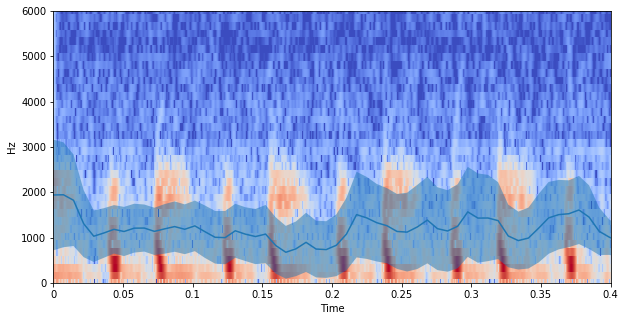

In [39]:
HOP_LENGTH = 2**4
# Display these features on top of the spectrogram
fig, ax = plt.subplots(figsize=(10, 5))
ax = specshow(spec_db, x_axis='time', y_axis='hz', hop_length=HOP_LENGTH)
ax.plot(times_spec, centroids)
ax.fill_between(times_spec, centroids - bandwidths / 2, centroids + bandwidths / 2, alpha=.5)
ax.set(ylim=[None, 6000])
plt.show()

**Combining many features in a classifier**

The beauty of machine learning is that it can handle all of these features at the same time. If there is different information present in each feature, it should improve the classifier's ability to distinguish the types of audio. 

For the final exercise in the chapter, we've loaded many of the features that you calculated before. Combine all of them into an array that can be fed into the classifier, and see how it does.

In [0]:
# Loop through each spectrogram
bandwidths = []
centroids = []

In [40]:
spec.shape # (65, 552)

(65, 552)

Loop through each spectrogram, calculating the mean spectral bandwidth and centroid of each.



In [0]:
spectrograms[0].shape # (65, 552)

In [0]:
len(spectrograms) # 60

In [0]:
for spec in spectrograms:
    # Calculate the mean spectral bandwidth
    this_mean_bandwidth = np.mean(lr.feature.spectral_bandwidth(S=spec))
    # Calculate the mean spectral centroid
    this_mean_centroid = np.mean(lr.feature.spectral_centroid(S=spec))
    # Collect the values
    bandwidths.append(this_mean_bandwidth)  
    centroids.append(this_mean_centroid)

In [0]:
# Create X and y arrays
X = np.column_stack([means, stds, maxs, tempo_mean, tempo_max, tempo_std, bandwidths, centroids])
y = labels.reshape([-1, 1])

In [0]:
# Fit the model and score on testing data
percent_score = cross_val_score(model, X, y, cv=5)
print(np.mean(percent_score))

You may have noticed that the accuracy of your models varied a lot when using different set of features. This chapter was focused on creating new "features" from raw data and not obtaining the best accuracy. 

To improve the accuracy, you want to find the right features that provide relevant information and also build models on much larger data.

## 3. Predicting Time Series Data

If you want to predict patterns from data over time, there are special considerations to take in how you choose and construct your model. This chapter covers how to gain insights into the data before fitting your model, as well as best-practices in using predictive modeling for time series data.

#### Predicting data over time

As mentioned in the video, you'll deal with stock market prices that fluctuate over time. In this exercise you've got historical prices from two tech companies (Ebay and Yahoo) in the DataFrame prices. 

You'll visualize the raw data for the two companies, then generate a scatter plot showing how the values for each company compare with one another. Finally, you'll add in a "time" dimension to your scatter plot so you can see how this relationship changes over time.

In [0]:
prices = pd.read_csv('prices_ebay_yahoo.csv')
prices['date'] = pd.to_datetime(prices['date'])
prices.index = prices['date']
del prices['date']
print('prices dataframe dimension:', prices.shape)
prices.head(5)

prices dataframe dimension: (1278, 2)


,EBAY,YHOO
date,,
2010-01-04,23.900000,17.100000
2010-01-05,23.650000,17.230000
2010-01-06,23.500000,17.170000
2010-01-07,23.229998,16.700001
2010-01-08,23.509999,16.700001


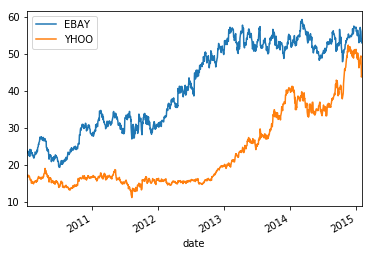

In [0]:
# Plot the raw values over time
prices.plot()
plt.show()

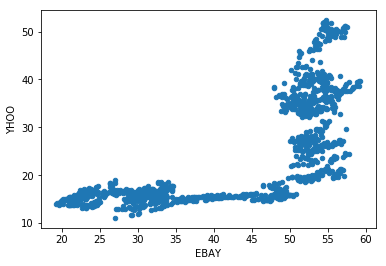

In [0]:
# Scatterplot with one company per axis
prices.plot.scatter('EBAY', 'YHOO')
plt.show()

Finally, encode time as the color of each datapoint in order to visualize how the relationship between these two variables changes.

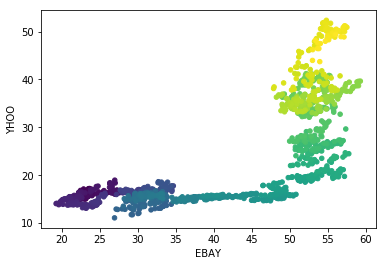

In [0]:
# Scatterplot with color relating to time
prices.plot.scatter('EBAY', 'YHOO', c=prices.index, 
                    cmap=plt.cm.viridis, colorbar=False)
plt.show()

 As you can see, these two time series seem somewhat related to each other, though its a complex relationship that changes over time.

**Fitting a simple regression model**

Now we'll look at a larger number of companies. Recall that we have historical price values for many companies. Let's use data from several companies to predict the value of a test company. You'll attempt to predict the value of the Apple stock price using the values of NVidia, Ebay, and Yahoo. Each of these is stored as a column in the all_prices DataFrame. Below is a mapping from company name to column name:

In [0]:
all_prices = pd.read_csv('all_prices.csv')
all_prices['date'] = pd.to_datetime(all_prices['date'])
all_prices.index = all_prices['date']
del all_prices['date']
print('all_prices dataframe dimension:', all_prices.shape)
all_prices.head(5)

all_prices dataframe dimension: (1278, 50)


,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,CSCO,DAL,EBAY,F,FB,FCX,FITB,FOXA,FTR,GE,GILD,GLW,GM,HAL,HBAN,HPE,HPQ,INTC,JPM,KEY,KMI,KO,MRK,MRO,MSFT,MU,NFLX,NVDA,ORCL,PFE,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.30,16.650013,15.690000,9.01,3.40,28.090001,16.969999,24.690001,11.22,23.900000,10.28,NaN,83.459999,10.12,13.929995,7.96,15.45,43.299999,19.559999,NaN,31.250000,3.68,NaN,52.449999,20.879999,42.849998,5.94,NaN,57.040001,37.009998,32.110070,30.950001,10.85,53.479999,18.490000,24.850000,18.930000,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-01-05,214.379993,54.019953,29.330000,14.19,16.130013,16.200001,9.04,3.53,28.970002,16.740000,24.580000,12.10,23.650000,10.96,NaN,83.959999,10.39,13.970000,7.91,15.53,43.259998,19.629999,NaN,31.650000,3.76,NaN,52.669998,20.870001,43.680000,6.17,NaN,56.349998,37.160000,32.140079,30.959999,11.17,51.510001,18.760000,24.820000,18.660000,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-01-06,210.969995,54.319953,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,16.620001,24.420000,12.11,23.500000,11.37,NaN,87.309998,10.45,14.200000,7.80,15.45,44.759998,19.379999,NaN,32.400002,3.86,NaN,52.179999,20.799999,43.919998,6.13,NaN,56.330002,37.660000,32.850072,30.770000,11.22,53.319999,18.879999,24.459999,18.600000,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-01-07,210.580000,54.769952,28.580000,14.01,16.610014,16.930000,9.09,3.65,28.720002,16.969999,24.530001,12.69,23.229998,11.66,NaN,85.639999,11.08,13.999998,7.76,16.25,44.869999,19.570000,NaN,32.480000,4.29,NaN,52.199999,20.600000,44.790001,6.39,NaN,56.189999,37.720001,32.650089,30.450001,10.84,52.400001,18.510000,24.379999,18.530001,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-01-08,211.980005,55.049952,29.340000,14.55,17.020014,16.780001,9.00,3.59,28.910002,16.920000,24.660000,12.47,23.509999,11.69,NaN,88.099998,11.09,14.120002,7.68,16.60,44.540001,19.889999,NaN,34.119999,4.22,NaN,52.589997,20.830000,44.680000,6.50,NaN,55.150002,37.700001,32.700080,30.660000,11.10,53.300002,18.549999,24.680000,18.680000,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001


In [0]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [0]:
# Use stock symbols to extract training data
X = all_prices[['EBAY', 'NVDA', 'YHOO']]
y = all_prices[['AAPL']]

In [0]:
# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(), X, y, cv=3)
print(scores)

[-6.09050633 -0.3179172  -3.72957284]


**Visualizing predicted values**

In this exercise, after splitting the data (stored in the variables X and y) into training and test sets, you'll build a model and then visualize the model's predictions on top of the testing data in order to estimate the model's performance.



*   Split the data (X and y) into training and test sets.
*   Use the training data to train the regression model.
*   Then use the testing data to generate predictions for the model.




In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [0]:
#@title
X = np.array([[ 23.9     ,  18.49    ,  17.1     ],
       [ 23.65    ,  18.76    ,  17.23    ],
       [ 23.5     ,  18.879999,  17.17    ],
       [ 23.229998,  18.51    ,  16.700001],
       [ 23.509999,  18.549999,  16.700001],
       [ 23.45    ,  18.290001,  16.74    ],
       [ 23.19    ,  17.67    ,  16.68    ],
       [ 23.6     ,  17.91    ,  16.9     ],
       [ 22.88    ,  17.629999,  17.120001],
       [ 22.469998,  17.110001,  16.82    ],
       [ 23.259999,  17.43    ,  16.75    ],
       [ 22.23    ,  17.360001,  16.379999],
       [ 24.129998,  17.049999,  16.200001],
       [ 23.579998,  16.459999,  15.88    ],
       [ 23.69    ,  16.74    ,  15.86    ],
       [ 24.069999,  16.209999,  15.99    ],
       [ 23.969999,  16.65    ,  15.98    ],
       [ 23.329998,  16.09    ,  15.44    ],
       [ 23.019999,  15.39    ,  15.01    ],
       [ 23.169999,  16.57    ,  15.05    ],
       [ 23.079998,  16.74    ,  15.17    ],
       [ 23.229998,  16.879999,  15.46    ],
       [ 22.449999,  15.9     ,  15.01    ],
       [ 22.709999,  16.219999,  15.19    ],
       [ 22.49    ,  16.190001,  14.99    ],
       [ 22.369998,  16.059999,  15.07    ],
       [ 21.959999,  16.370001,  14.8     ],
       [ 22.13    ,  17.120001,  15.22    ],
       [ 21.769998,  17.35    ,  15.17    ],
       [ 22.519998,  17.67    ,  15.41    ],
       [ 22.68    ,  17.84    ,  15.44    ],
       [ 22.84    ,  16.67    ,  15.54    ],
       [ 23.419999,  16.58    ,  15.58    ],
       [ 23.279998,  16.610001,  15.49    ],
       [ 22.89    ,  16.209999,  15.38    ],
       [ 23.259999,  16.549999,  15.59    ],
       [ 23.      ,  16.4     ,  15.24    ],
       [ 23.019999,  16.200001,  15.31    ],
       [ 23.879998,  16.85    ,  15.79    ],
       [ 23.99    ,  16.84    ,  15.73    ],
       [ 23.509999,  16.629999,  15.57    ],
       [ 23.779998,  16.66    ,  15.81    ],
       [ 24.629999,  17.17    ,  16.059999],
       [ 24.839998,  16.92    ,  16.52    ],
       [ 25.51    ,  17.549999,  16.530001],
       [ 25.56    ,  17.59    ,  16.790001],
       [ 25.439998,  17.190001,  16.530001],
       [ 25.969999,  17.25    ,  16.32    ],
       [ 26.279999,  17.16    ,  16.459999],
       [ 26.789999,  17.76    ,  16.360001],
       [ 26.979999,  18.1     ,  16.5     ],
       [ 27.46    ,  17.459999,  16.559999],
       [ 27.189999,  17.25    ,  16.440001],
       [ 27.07    ,  17.530001,  16.34    ],
       [ 27.049998,  17.889999,  16.030001],
       [ 26.939999,  17.290001,  16.09    ],
       [ 27.559998,  17.34    ,  16.32    ],
       [ 27.449998,  17.34    ,  16.540001],
       [ 27.279999,  17.559999,  16.559999],
       [ 27.139999,  17.629999,  16.610001],
       [ 26.97    ,  17.4     ,  16.530001],
       [ 26.57    ,  17.219999,  16.290001],
       [ 27.37    ,  17.48    ,  16.51    ],
       [ 27.27    ,  17.049999,  16.92    ],
       [ 26.849998,  17.16    ,  16.870001],
       [ 26.46    ,  16.879999,  17.35    ],
       [ 26.549998,  16.99    ,  17.52    ],
       [ 26.629999,  17.299999,  17.639999],
       [ 26.639999,  17.66    ,  18.18    ],
       [ 27.039999,  17.879999,  18.379999],
       [ 26.979999,  18.01    ,  18.969999],
       [ 26.329999,  17.059999,  18.17    ],
       [ 26.32    ,  16.98    ,  18.389999],
       [ 26.399998,  17.040001,  18.379999],
       [ 26.289999,  16.6     ,  17.450001],
       [ 24.779999,  16.67    ,  17.719999],
       [ 24.55    ,  16.440001,  17.639999],
       [ 24.559999,  16.6     ,  17.389999],
       [ 23.769999,  16.129999,  16.92    ],
       [ 23.99    ,  16.16    ,  16.75    ],
       [ 24.24    ,  16.65    ,  16.969999],
       [ 23.779998,  15.71    ,  16.530001],
       [ 23.909999,  15.54    ,  16.950001],
       [ 23.079998,  14.75    ,  16.32    ],
       [ 22.659999,  14.5     ,  16.49    ],
       [ 22.269998,  14.2     ,  15.92    ],
       [ 21.48    ,  13.96    ,  15.29    ],
       [ 22.33    ,  14.56    ,  16.33    ],
       [ 22.38    ,  14.4     ,  16.41    ],
       [ 22.509999,  14.68    ,  16.469999],
       [ 22.68    ,  14.65    ,  16.139999],
       [ 22.249999,  12.96    ,  16.389999],
       [ 22.509999,  12.99    ,  16.27    ],
       [ 22.169998,  12.56    ,  16.030001],
       [ 21.64    ,  12.76    ,  15.79    ],
       [ 20.809998,  12.46    ,  15.1     ],
       [ 21.42    ,  12.73    ,  15.48    ],
       [ 21.359999,  12.36    ,  15.54    ],
       [ 21.59    ,  12.69    ,  15.31    ],
       [ 21.38    ,  12.75    ,  15.45    ],
       [ 21.909999,  13.5     ,  15.69    ],
       [ 21.409999,  13.14    ,  15.34    ],
       [ 20.959999,  12.58    ,  15.02    ],
       [ 21.249999,  12.72    ,  15.18    ],
       [ 22.18    ,  12.7     ,  15.43    ],
       [ 21.99    ,  12.1     ,  15.      ],
       [ 21.549999,  11.5     ,  14.94    ],
       [ 21.69    ,  11.18    ,  14.79    ],
       [ 21.78    ,  10.91    ,  14.69    ],
       [ 22.28    ,  11.35    ,  15.1     ],
       [ 22.649999,  11.61    ,  15.29    ],
       [ 22.209999,  11.36    ,  15.17    ],
       [ 22.39    ,  11.92    ,  15.65    ],
       [ 22.13    ,  11.77    ,  15.49    ],
       [ 22.099999,  12.22    ,  15.6     ],
       [ 22.159999,  12.3     ,  15.54    ],
       [ 21.869998,  12.01    ,  15.21    ],
       [ 21.559999,  11.56    ,  15.09    ],
       [ 21.34    ,  11.69    ,  15.23    ],
       [ 20.859998,  11.11    ,  14.83    ],
       [ 20.949999,  11.08    ,  14.81    ],
       [ 20.709998,  11.1     ,  14.73    ],
       [ 19.689999,  10.48    ,  14.04    ],
       [ 19.61    ,  10.21    ,  13.84    ],
       [ 19.639999,  10.38    ,  14.09    ],
       [ 19.26    ,  10.25    ,  14.07    ],
       [ 19.349999,  10.14    ,  14.13    ],
       [ 19.81    ,  10.63    ,  14.4     ],
       [ 19.889999,  10.31    ,  14.6     ],
       [ 20.289999,  10.35    ,  14.89    ],
       [ 20.22    ,  10.54    ,  14.94    ],
       [ 21.009999,  10.92    ,  15.52    ],
       [ 21.109999,  11.03    ,  15.37    ],
       [ 21.03    ,  10.72    ,  15.37    ],
       [ 20.089999,  10.05    ,  14.9     ],
       [ 20.399999,  10.46    ,  15.1     ],
       [ 20.789999,  10.72    ,  15.2     ],
       [ 20.17    ,  10.37    ,  13.91    ],
       [ 20.939999,  10.54    ,  13.88    ],
       [ 21.089999,  10.36    ,  13.99    ],
       [ 21.139999,  10.55    ,  14.15    ],
       [ 21.039999,  10.46    ,  13.95    ],
       [ 21.039999,  10.13    ,  13.87    ],
       [ 20.77    ,   9.13    ,  13.76    ],
       [ 20.909998,   9.19    ,  13.88    ],
       [ 21.459999,   9.18    ,  14.      ],
       [ 20.97    ,   8.94    ,  13.94    ],
       [ 21.099999,   9.32    ,  14.18    ],
       [ 21.07    ,   9.44    ,  14.16    ],
       [ 21.449999,   9.55    ,  14.34    ],
       [ 21.98    ,   9.64    ,  14.4     ],
       [ 21.909999,   9.24    ,  14.35    ],
       [ 21.249999,   8.88    ,  13.87    ],
       [ 21.59    ,   8.96    ,  13.85    ],
       [ 21.499999,   9.39    ,  13.83    ],
       [ 22.049999,   9.15    ,  13.79    ],
       [ 22.349999,   9.27    ,  13.94    ],
       [ 22.74    ,   9.32    ,  13.99    ],
       [ 23.129998,   9.88    ,  13.85    ],
       [ 23.369999,   9.97    ,  13.79    ],
       [ 23.269999,   9.82    ,  13.65    ],
       [ 22.869999,   9.72    ,  13.4     ],
       [ 23.159999,   9.92    ,  13.26    ],
       [ 22.73    ,   9.8     ,  13.21    ],
       [ 23.179998,  10.12    ,  13.43    ],
       [ 23.129998,   9.64    ,  13.18    ],
       [ 23.229998,   9.33    ,  13.11    ],
       [ 24.029998,   9.4     ,  13.37    ],
       [ 24.059999,   9.57    ,  13.51    ],
       [ 24.129998,   9.9     ,  13.62    ],
       [ 23.529998,   9.99    ,  13.53    ],
       [ 24.569999,  10.32    ,  13.75    ],
       [ 24.3     ,  10.18    ,  13.65    ],
       [ 24.1     ,  10.07    ,  13.68    ],
       [ 24.3     ,  10.64    ,  13.73    ],
       [ 24.25    ,  10.54    ,  13.63    ],
       [ 24.19    ,  10.56    ,  14.27    ],
       [ 23.9     ,  10.57    ,  14.19    ],
       [ 24.219999,  10.55    ,  13.89    ],
       [ 24.65    ,  10.71    ,  13.86    ],
       [ 24.739998,  11.29    ,  14.18    ],
       [ 24.34    ,  11.39    ,  14.04    ],
       [ 24.25    ,  11.62    ,  14.17    ],
       [ 24.739998,  12.26    ,  14.5     ],
       [ 24.769999,  12.      ,  14.28    ],
       [ 24.869999,  11.97    ,  14.39    ],
       [ 24.989998,  11.88    ,  14.34    ],
       [ 24.4     ,  11.68    ,  14.17    ],
       [ 24.459999,  11.35    ,  14.27    ],
       [ 24.079998,  11.24    ,  14.28    ],
       [ 24.589998,  11.32    ,  14.61    ],
       [ 24.45    ,  10.78    ,  14.52    ],
       [ 24.75    ,  10.7     ,  14.23    ],
       [ 24.61    ,  10.86    ,  14.49    ],
       [ 24.29    ,  10.81    ,  14.41    ],
       [ 24.45    ,  11.02    ,  14.43    ],
       [ 24.869999,  11.34    ,  15.25    ],
       [ 25.279999,  11.16    ,  15.93    ],
       [ 25.679999,  11.29    ,  16.25    ],
       [ 25.719999,  11.36    ,  15.93    ],
       [ 25.529999,  11.29    ,  15.49    ],
       [ 25.66    ,  11.29    ,  15.8     ],
       [ 27.199998,  11.09    ,  15.97    ],
       [ 28.07    ,  11.8     ,  16.309999],
       [ 27.93    ,  11.91    ,  16.4     ],
       [ 28.749999,  11.87    ,  16.459999],
       [ 29.28    ,  12.04    ,  16.42    ],
       [ 29.719998,  12.05    ,  16.4     ],
       [ 29.859999,  12.02    ,  16.49    ],
       [ 29.359999,  12.04    ,  16.15    ],
       [ 30.069998,  12.29    ,  16.190001],
       [ 30.109999,  12.38    ,  16.17    ],
       [ 30.149999,  12.4     ,  16.200001],
       [ 30.869999,  12.61    ,  16.27    ],
       [ 30.84    ,  12.66    ,  16.440001],
       [ 30.529998,  12.59    ,  16.969999],
       [ 30.929998,  12.74    ,  16.940001],
       [ 30.79    ,  12.61    ,  16.799999],
       [ 30.14    ,  13.26    ,  16.549999],
       [ 30.059999,  13.1     ,  16.6     ],
       [ 29.769998,  12.71    ,  16.24    ],
       [ 30.14    ,  12.92    ,  16.15    ],
       [ 30.569998,  13.32    ,  16.99    ],
       [ 30.299999,  13.75    ,  16.57    ],
       [ 30.64    ,  13.76    ,  16.559999],
       [ 30.18    ,  13.44    ,  16.190001],
       [ 31.209999,  13.77    ,  16.41    ],
       [ 31.149999,  13.6     ,  16.219999],
       [ 30.23    ,  13.75    ,  16.379999],
       [ 29.139999,  13.61    ,  15.82    ],
       [ 29.259999,  14.21    ,  16.15    ],
       [ 29.909999,  14.38    ,  16.33    ],
       [ 29.609999,  14.79    ,  16.35    ],
       [ 29.489999,  14.51    ,  16.33    ],
       [ 29.999999,  14.98    ,  16.940001],
       [ 30.149999,  15.11    ,  17.02    ],
       [ 30.349999,  14.86    ,  16.950001],
       [ 30.69    ,  14.95    ,  17.01    ],
       [ 30.28    ,  14.57    ,  16.700001],
       [ 30.749999,  14.59    ,  16.629999],
       [ 30.19    ,  14.27    ,  16.450001],
       [ 30.529998,  14.29    ,  16.51    ],
       [ 29.819998,  14.37    ,  16.379999],
       [ 29.58    ,  14.31    ,  16.280001],
       [ 28.649999,  14.87    ,  16.6     ],
       [ 28.57    ,  15.03    ,  16.629999],
       [ 28.32    ,  14.92    ,  16.719999],
       [ 28.309998,  15.      ,  16.48    ],
       [ 28.349999,  14.94    ,  16.43    ],
       [ 28.359998,  14.94    ,  16.610001],
       [ 28.13    ,  14.99    ,  16.76    ],
       [ 27.829999,  15.4     ,  16.629999],
       [ 28.68    ,  15.82    ,  16.75    ],
       [ 28.47    ,  15.77    ,  16.59    ],
       [ 28.73    ,  16.98    ,  16.91    ],
       [ 28.42    ,  19.33    ,  17.059999],
       [ 27.699999,  19.870001,  16.9     ],
       [ 28.259998,  20.629999,  16.6     ],
       [ 28.359998,  20.309999,  16.58    ],
       [ 28.83    ,  23.35    ,  16.65    ],
       [ 28.709998,  23.389999,  16.75    ],
       [ 29.18    ,  23.59    ,  16.809999],
       [ 29.449999,  23.040001,  16.5     ],
       [ 29.099999,  22.41    ,  16.309999],
       [ 30.779998,  22.43    ,  16.23    ],
       [ 30.019998,  22.219999,  15.97    ],
       [ 30.509999,  24.73    ,  16.09    ],
       [ 30.909999,  23.969999,  16.02    ],
       [ 31.059999,  24.540001,  15.57    ],
       [ 30.959999,  24.469999,  16.200001],
       [ 30.309999,  23.76    ,  15.83    ],
       [ 30.359999,  23.92    ,  16.120001],
       [ 31.64    ,  24.469999,  16.379999],
       [ 31.879998,  25.58    ,  16.57    ],
       [ 32.05    ,  25.1     ,  16.690001],
       [ 32.209999,  25.67    ,  16.790001],
       [ 32.239998,  24.6     ,  16.799999],
       [ 32.639998,  23.870001,  16.6     ],
       [ 31.95    ,  23.290001,  16.43    ],
       [ 34.489999,  22.82    ,  16.620001],
       [ 34.51    ,  23.469999,  16.85    ],
       [ 33.86    ,  23.110001,  16.889999],
       [ 34.46    ,  22.549999,  17.200001],
       [ 34.46    ,  23.379999,  17.76    ],
       [ 34.689999,  25.68    ,  17.77    ],
       [ 34.529999,  25.629999,  17.66    ],
       [ 33.649998,  23.209999,  16.91    ],
       [ 32.85    ,  22.110001,  16.58    ],
       [ 33.089998,  22.65    ,  16.370001],
       [ 33.629999,  23.120001,  16.5     ],
       [ 33.51    ,  22.66    ,  16.4     ],
       [ 32.289998,  21.65    ,  16.1     ],
       [ 32.679999,  20.75    ,  16.629999],
       [ 32.929999,  20.870001,  16.860001],
       [ 32.009999,  20.76    ,  17.08    ],
       [ 31.5     ,  20.469999,  16.700001],
       [ 31.669999,  19.549999,  16.940001],
       [ 31.329998,  19.139999,  17.65    ],
       [ 31.079998,  17.92    ,  17.059999],
       [ 30.919999,  18.049999,  17.42    ],
       [ 30.769998,  18.200001,  17.309999],
       [ 30.44    ,  17.66    ,  16.33    ],
       [ 29.73    ,  17.530001,  15.91    ],
       [ 29.949999,  17.860001,  15.86    ],
       [ 30.469998,  17.620001,  16.030001],
       [ 30.579998,  17.76    ,  16.290001],
       [ 30.219998,  17.450001,  16.360001],
       [ 30.669998,  17.809999,  16.129999],
       [ 31.759999,  19.23    ,  16.83    ],
       [ 31.7     ,  18.629999,  16.959999],
       [ 30.34    ,  19.32    ,  16.58    ],
       [ 31.079998,  19.17    ,  16.75    ],
       [ 31.629998,  18.450001,  16.74    ],
       [ 31.04    ,  18.459999,  16.68    ],
       [ 31.359999,  18.200001,  16.84    ],
       [ 31.39    ,  17.549999,  16.870001],
       [ 31.84    ,  17.58    ,  17.110001],
       [ 31.85    ,  17.459999,  17.049999],
       [ 31.529998,  18.1     ,  17.      ],
       [ 31.14    ,  17.549999,  16.77    ],
       [ 31.19    ,  17.32    ,  16.59    ],
       [ 30.699999,  17.370001,  16.360001],
       [ 30.669998,  17.76    ,  16.639999],
       [ 30.849999,  18.51    ,  16.690001],
       [ 31.609999,  18.709999,  16.620001],
       [ 31.149999,  18.09    ,  16.35    ],
       [ 31.149999,  18.02    ,  16.120001],
       [ 31.759999,  18.57    ,  16.870001],
       [ 31.95    ,  18.52    ,  16.85    ],
       [ 32.96    ,  18.809999,  17.110001],
       [ 33.079999,  19.299999,  17.280001],
       [ 34.029999,  19.299999,  17.26    ],
       [ 33.999998,  19.51    ,  17.51    ],
       [ 34.389999,  20.      ,  17.700001],
       [ 33.639998,  19.73    ,  18.139999],
       [ 33.539998,  18.790001,  17.92    ],
       [ 33.01    ,  18.65    ,  18.200001],
       [ 32.679999,  18.66    ,  18.43    ],
       [ 32.719999,  19.32    ,  18.65    ],
       [ 33.119999,  19.75    ,  18.559999],
       [ 33.929999,  19.780001,  18.549999],
       [ 33.31    ,  19.870001,  17.200001],
       [ 33.579999,  20.5     ,  17.17    ],
       [ 33.569999,  18.26    ,  16.549999],
       [ 32.369999,  17.700001,  15.81    ],
       [ 32.65    ,  17.629999,  16.      ],
       [ 32.879999,  18.040001,  15.96    ],
       [ 32.9     ,  17.780001,  16.35    ],
       [ 32.479998,  18.09    ,  16.299999],
       [ 31.629998,  18.07    ,  16.059999],
       [ 30.819998,  18.139999,  16.139999],
       [ 30.699999,  18.360001,  16.15    ],
       [ 30.659999,  18.82    ,  15.98    ],
       [ 30.679998,  19.5     ,  16.02    ],
       [ 31.169999,  20.040001,  16.549999],
       [ 30.64    ,  19.139999,  15.85    ],
       [ 31.279998,  19.049999,  16.02    ],
       [ 30.299999,  18.459999,  15.68    ],
       [ 29.559999,  18.07    ,  15.45    ],
       [ 29.919998,  18.059999,  15.45    ],
       [ 30.569998,  17.57    ,  15.1     ],
       [ 30.659999,  17.370001,  15.22    ],
       [ 29.959999,  17.120001,  15.2     ],
       [ 29.859999,  17.      ,  15.16    ],
       [ 29.759999,  17.139999,  15.2     ],
       [ 28.659998,  16.77    ,  14.81    ],
       [ 28.47    ,  16.190001,  14.78    ],
       [ 28.83    ,  15.81    ,  14.7     ],
       [ 28.82    ,  15.62    ,  14.99    ],
       [ 29.78    ,  15.96    ,  15.35    ],
       [ 29.349999,  15.74    ,  15.23    ],
       [ 29.249999,  16.209999,  15.08    ],
       [ 28.349999,  15.74    ,  14.89    ],
       [ 28.709998,  15.41    ,  14.88    ],
       [ 28.959998,  15.5     ,  14.95    ],
       [ 30.859999,  15.74    ,  14.89    ],
       [ 32.269999,  15.94    ,  15.04    ],
       [ 32.739998,  16.15    ,  15.45    ],
       [ 32.639998,  15.88    ,  15.49    ],
       [ 32.919999,  15.67    ,  15.72    ],
       [ 33.329999,  15.73    ,  15.81    ],
       [ 33.419999,  15.43    ,  15.61    ],
       [ 32.91    ,  14.89    ,  15.05    ],
       [ 32.259999,  14.69    ,  14.86    ],
       [ 32.379998,  14.66    ,  14.91    ],
       [ 32.189998,  14.08    ,  14.63    ],
       [ 32.809999,  14.1     ,  14.69    ],
       [ 32.7     ,  13.8     ,  14.42    ],
       [ 33.76    ,  14.22    ,  14.59    ],
       [ 33.169999,  14.04    ,  13.48    ],
       [ 33.439998,  14.7     ,  13.59    ],
       [ 33.499998,  15.      ,  13.98    ],
       [ 33.799998,  14.76    ,  13.69    ],
       [ 34.419999,  14.4     ,  13.94    ],
       [ 33.36    ,  13.86    ,  13.59    ],
       [ 33.35    ,  13.83    ,  13.5     ],
       [ 32.75    ,  13.83    ,  13.1     ],
       [ 33.019999,  14.57    ,  13.1     ],
       [ 31.75    ,  14.42    ,  12.76    ],
       [ 32.25    ,  14.81    ,  13.02    ],
       [ 30.04    ,  13.4     ,  12.      ],
       [ 29.299999,  12.95    ,  11.74    ],
       [ 26.949998,  11.93    ,  11.09    ],
       [ 30.159999,  12.93    ,  12.09    ],
       [ 29.149999,  12.34    ,  11.77    ],
       [ 30.199999,  13.41    ,  12.86    ],
       [ 30.529998,  12.88    ,  13.59    ],
       [ 30.89    ,  13.37    ,  13.47    ],
       [ 30.359999,  12.99    ,  13.48    ],
       [ 30.249999,  12.81    ,  13.47    ],
       [ 27.939999,  11.94    ,  12.96    ],
       [ 27.16    ,  11.73    ,  12.92    ],
       [ 27.36    ,  11.94    ,  12.84    ],
       [ 28.92    ,  13.23    ,  13.35    ],
       [ 29.049999,  13.04    ,  13.15    ],
       [ 28.33    ,  12.48    ,  12.87    ],
       [ 29.459999,  13.01    ,  12.74    ],
       [ 30.49    ,  13.36    ,  13.68    ],
       [ 30.949999,  13.68    ,  13.84    ],
       [ 30.869999,  13.31    ,  13.61    ],
       [ 30.39    ,  13.28    ,  13.35    ],
       [ 29.409999,  12.92    ,  12.87    ],
       [ 29.269998,  13.18    ,  12.91    ],
       [ 29.749999,  14.25    ,  13.61    ],
       [ 30.509999,  14.18    ,  14.44    ],
       [ 28.459998,  13.88    ,  14.48    ],
       [ 29.419998,  14.21    ,  14.26    ],
       [ 29.399999,  14.53    ,  14.26    ],
       [ 30.14    ,  15.28    ,  14.55    ],
       [ 32.039998,  15.5     ,  14.89    ],
       [ 33.689998,  15.46    ,  14.97    ],
       [ 33.1     ,  15.14    ,  14.61    ],
       [ 32.729999,  14.75    ,  14.36    ],
       [ 32.239998,  14.47    ,  13.96    ],
       [ 31.669999,  13.51    ,  13.99    ],
       [ 32.079998,  13.79    ,  14.71    ],
       [ 32.55    ,  13.82    ,  14.75    ],
       [ 32.519999,  13.84    ,  14.54    ],
       [ 31.64    ,  13.42    ,  14.19    ],
       [ 30.669998,  13.09    ,  13.42    ],
       [ 29.489999,  12.51    ,  13.17    ],
       [ 28.109998,  11.81    ,  13.53    ],
       [ 29.349999,  12.9     ,  14.46    ],
       [ 30.529998,  13.36    ,  15.92    ],
       [ 31.44    ,  13.89    ,  15.65    ],
       [ 31.069999,  14.15    ,  15.47    ],
       [ 32.3     ,  14.78    ,  15.84    ],
       [ 32.829999,  14.62    ,  15.86    ],
       [ 32.75    ,  14.61    ,  15.77    ],
       [ 32.739998,  15.46    ,  15.93    ],
       [ 33.689998,  15.72    ,  15.91    ],
       [ 33.219999,  14.94    ,  15.7     ],
       [ 33.869999,  15.48    ,  15.47    ],
       [ 33.179999,  15.17    ,  15.94    ],
       [ 32.15    ,  14.41    ,  16.18    ],
       [ 32.119999,  14.48    ,  16.120001],
       [ 32.369999,  15.02    ,  16.709999],
       [ 31.669999,  14.45    ,  16.24    ],
       [ 31.079998,  14.62    ,  16.299999],
       [ 32.289998,  15.25    ,  16.629999],
       [ 33.25    ,  15.6     ,  16.559999],
       [ 31.829998,  14.8     ,  15.64    ],
       [ 30.89    ,  14.06    ,  14.93    ],
       [ 31.779998,  13.82    ,  15.1     ],
       [ 33.05    ,  14.65    ,  15.48    ],
       [ 32.709999,  14.82    ,  15.24    ],
       [ 32.469999,  14.74    ,  15.69    ],
       [ 32.919999,  15.08    ,  15.97    ],
       [ 31.179998,  14.32    ,  15.92    ],
       [ 30.749999,  14.47    ,  15.95    ],
       [ 31.759999,  14.98    ,  16.27    ],
       [ 31.409999,  14.69    ,  16.      ],
       [ 31.45    ,  14.88    ,  15.93    ],
       [ 30.54    ,  14.58    ,  15.72    ],
       [ 29.649999,  14.06    ,  15.34    ],
       [ 29.809999,  13.93    ,  15.38    ],
       [ 28.749999,  14.63    ,  14.99    ],
       [ 29.039999,  15.08    ,  14.97    ],
       [ 28.549999,  14.44    ,  14.94    ],
       [ 28.23    ,  14.04    ,  15.1     ],
       [ 29.659999,  14.83    ,  15.35    ],
       [ 28.749999,  14.91    ,  15.7     ],
       [ 29.59    ,  15.63    ,  15.71    ],
       [ 29.68    ,  15.82    ,  16.23    ],
       [ 29.599999,  15.72    ,  16.049999],
       [ 30.699999,  15.48    ,  15.89    ],
       [ 30.899999,  15.26    ,  15.84    ],
       [ 30.94    ,  15.17    ,  15.62    ],
       [ 31.029998,  14.69    ,  15.61    ],
       [ 31.64    ,  14.9     ,  15.94    ],
       [ 31.129998,  14.53    ,  15.47    ],
       [ 30.84    ,  14.13    ,  15.42    ],
       [ 30.269998,  13.58    ,  15.02    ],
       [ 29.599999,  13.46    ,  15.16    ],
       [ 30.399999,  13.51    ,  14.96    ],
       [ 29.769998,  13.16    ,  14.62    ],
       [ 30.629998,  13.9     ,  15.11    ],
       [ 30.34    ,  13.72    ,  15.99    ],
       [ 30.609999,  14.31    ,  16.      ],
       [ 30.84    ,  14.17    ,  16.190001],
       [ 30.919999,  14.06    ,  16.09    ],
       [ 30.409999,  13.71    ,  15.78    ],
       [ 30.359999,  13.97    ,  16.129999],
       [ 30.33    ,  13.86    ,  16.129999],
       [ 31.34    ,  14.04    ,  16.290001],
       [ 30.159999,  14.2     ,  15.78    ],
       [ 30.709999,  14.71    ,  15.64    ],
       [ 30.629998,  14.54    ,  15.52    ],
       [ 30.509999,  14.54    ,  15.46    ],
       [ 31.2     ,  14.48    ,  15.51    ],
       [ 31.519999,  14.19    ,  15.53    ],
       [ 31.579998,  14.1     ,  15.66    ],
       [ 30.619998,  13.73    ,  15.48    ],
       [ 30.529998,  13.52    ,  15.43    ],
       [ 30.34    ,  13.98    ,  15.92    ],
       [ 31.509999,  14.35    ,  16.120001],
       [ 31.929998,  14.22    ,  15.96    ],
       [ 31.989998,  14.61    ,  15.68    ],
       [ 31.95    ,  14.94    ,  15.69    ],
       [ 31.939998,  14.85    ,  15.56    ],
       [ 31.709999,  14.71    ,  15.53    ],
       [ 31.85    ,  14.91    ,  15.74    ],
       [ 31.579998,  14.8     ,  15.55    ],
       [ 31.6     ,  14.77    ,  15.47    ],
       [ 32.2     ,  14.93    ,  15.73    ],
       [ 32.7     ,  15.49    ,  15.72    ],
       [ 32.95    ,  15.82    ,  15.92    ],
       [ 32.639998,  15.7     ,  15.82    ],
       [ 32.869999,  15.74    ,  15.83    ],
       [ 33.05    ,  16.309999,  15.78    ],
       [ 33.26    ,  16.299999,  16.      ],
       [ 33.029999,  15.9     ,  16.139999],
       [ 33.16    ,  16.15    ,  16.120001],
       [ 32.96    ,  16.24    ,  15.37    ],
       [ 33.31    ,  16.17    ,  15.12    ],
       [ 34.51    ,  16.450001,  15.36    ],
       [ 35.059998,  15.85    ,  15.01    ],
       [ 35.139999,  15.93    ,  14.75    ],
       [ 34.67    ,  15.82    ,  14.5     ],
       [ 36.02    ,  15.91    ,  14.78    ],
       [ 36.359998,  15.79    ,  14.89    ],
       [ 36.559998,  15.47    ,  14.86    ],
       [ 36.619998,  15.33    ,  14.9     ],
       [ 35.739999,  15.15    ,  14.83    ],
       [ 36.37    ,  15.25    ,  14.93    ],
       [ 36.249999,  15.38    ,  14.72    ],
       [ 35.72    ,  14.86    ,  14.62    ],
       [ 35.109998,  14.72    ,  14.42    ],
       [ 35.589999,  14.81    ,  14.62    ],
       [ 35.779999,  14.86    ,  14.62    ],
       [ 36.249999,  14.82    ,  14.63    ],
       [ 36.18    ,  14.59    ,  14.49    ],
       [ 37.33    ,  14.79    ,  14.55    ],
       [ 37.619998,  14.37    ,  14.63    ],
       [ 36.83    ,  14.58    ,  14.89    ],
       [ 37.689999,  14.6     ,  15.18    ],
       [ 37.79    ,  14.64    ,  15.15    ],
       [ 37.389999,  14.4     ,  15.41    ],
       [ 37.419998,  14.46    ,  15.51    ],
       [ 37.619998,  14.44    ,  15.49    ],
       [ 37.089999,  14.55    ,  15.39    ],
       [ 38.079998,  14.72    ,  15.54    ],
       [ 37.869998,  14.82    ,  15.43    ],
       [ 37.239999,  15.16    ,  15.32    ],
       [ 36.989999,  15.23    ,  15.3     ],
       [ 36.899999,  15.4     ,  15.22    ],
       [ 36.589999,  15.33    ,  15.46    ],
       [ 36.63    ,  15.08    ,  15.18    ],
       [ 35.729999,  14.65    ,  15.27    ],
       [ 35.62    ,  14.63    ,  15.07    ],
       [ 36.299999,  14.44    ,  15.1     ],
       [ 35.47    ,  14.16    ,  14.99    ],
       [ 35.759998,  14.34    ,  14.88    ],
       [ 36.459998,  14.68    ,  15.06    ],
       [ 36.12    ,  14.16    ,  14.87    ],
       [ 35.499998,  13.99    ,  14.79    ],
       [ 36.079999,  14.02    ,  15.01    ],
       [ 35.87    ,  13.87    ,  15.49    ],
       [ 40.619997,  13.66    ,  15.4     ],
       [ 40.29    ,  13.39    ,  15.6     ],
       [ 39.649997,  13.23    ,  15.33    ],
       [ 39.299997,  12.82    ,  15.43    ],
       [ 39.859999,  13.08    ,  15.5     ],
       [ 41.049998,  13.09    ,  15.53    ],
       [ 41.229999,  12.98    ,  15.57    ],
       [ 41.019997,  13.      ,  15.54    ],
       [ 40.749998,  13.23    ,  15.63    ],
       [ 41.16    ,  12.85    ,  15.67    ],
       [ 40.379998,  12.63    ,  15.4     ],
       [ 39.44    ,  12.26    ,  15.15    ],
       [ 40.070001,  12.47    ,  15.35    ],
       [ 40.19    ,  12.46    ,  15.36    ],
       [ 40.559999,  12.51    ,  15.3     ],
       [ 41.21    ,  12.42    ,  15.44    ],
       [ 40.74    ,  13.21    ,  15.19    ],
       [ 40.249997,  13.13    ,  15.5     ],
       [ 40.049997,  13.      ,  15.4     ],
       [ 39.859999,  12.74    ,  15.28    ],
       [ 39.029998,  12.65    ,  14.87    ],
       [ 38.359999,  12.08    ,  15.42    ],
       [ 39.509999,  12.29    ,  15.58    ],
       [ 39.220001,  12.14    ,  15.29    ],
       [ 39.679998,  12.44    ,  15.38    ],
       [ 39.659999,  12.11    ,  15.35    ],
       [ 40.349997,  12.4     ,  15.36    ],
       [ 41.490001,  12.72    ,  15.47    ],
       [ 39.59    ,  12.57    ,  15.25    ],
       [ 39.19    ,  12.43    ,  15.24    ],
       [ 38.820001,  11.98    ,  14.92    ],
       [ 39.159999,  11.73    ,  15.01    ],
       [ 39.759999,  12.07    ,  15.1     ],
       [ 40.94    ,  12.39    ,  15.36    ],
       [ 40.899998,  11.89    ,  15.36    ],
       [ 41.049998,  12.12    ,  15.65    ],
       [ 40.929999,  12.26    ,  15.3     ],
       [ 40.909999,  12.51    ,  15.47    ],
       [ 40.169997,  12.18    ,  15.34    ],
       [ 40.129998,  12.03    ,  15.36    ],
       [ 40.669997,  12.29    ,  15.36    ],
       [ 42.490001,  12.4     ,  15.49    ],
       [ 43.499998,  13.24    ,  15.65    ],
       [ 42.949998,  13.45    ,  15.74    ],
       [ 41.829999,  12.84    ,  15.52    ],
       [ 42.799998,  13.      ,  15.61    ],
       [ 41.81    ,  12.59    ,  15.44    ],
       [ 42.499998,  12.73    ,  15.35    ],
       [ 42.290001,  13.14    ,  15.52    ],
       [ 40.779999,  13.24    ,  15.45    ],
       [ 42.01    ,  13.82    ,  15.83    ],
       [ 41.219997,  13.45    ,  15.84    ],
       [ 41.199998,  13.8     ,  15.98    ],
       [ 40.929999,  13.66    ,  15.85    ],
       [ 40.409999,  13.4     ,  15.78    ],
       [ 40.679998,  13.22    ,  15.75    ],
       [ 39.679998,  12.82    ,  15.82    ],
       [ 39.129998,  12.61    ,  15.8     ],
       [ 39.309999,  12.4     ,  15.69    ],
       [ 39.949997,  12.56    ,  15.74    ],
       [ 38.599997,  12.6     ,  15.65    ],
       [ 39.070001,  12.37    ,  15.6     ],
       [ 40.459999,  13.06    ,  15.7     ],
       [ 43.949998,  13.19    ,  15.73    ],
       [ 44.849999,  12.81    ,  15.92    ],
       [ 44.239997,  12.98    ,  15.76    ],
       [ 43.519997,  12.84    ,  15.43    ],
       [ 43.189996,  13.09    ,  15.5     ],
       [ 43.789997,  13.15    ,  15.8     ],
       [ 45.219998,  13.48    ,  16.110001],
       [ 45.599999,  13.33    ,  15.98    ],
       [ 44.299999,  13.54    ,  15.84    ],
       [ 43.889997,  13.39    ,  15.99    ],
       [ 43.769998,  13.44    ,  15.75    ],
       [ 44.499999,  13.72    ,  15.97    ],
       [ 44.769998,  14.01    ,  16.040001],
       [ 45.610001,  14.15    ,  16.219999],
       [ 44.939997,  14.23    ,  16.17    ],
       [ 44.269998,  14.71    ,  16.01    ],
       [ 43.989997,  14.62    ,  15.15    ],
       [ 45.319998,  14.81    ,  15.02    ],
       [ 45.360001,  14.59    ,  14.73    ],
       [ 44.98    ,  14.48    ,  14.76    ],
       [ 45.789997,  14.78    ,  14.99    ],
       [ 46.869998,  14.65    ,  15.03    ],
       [ 46.399999,  14.65    ,  14.96    ],
       [ 45.849999,  14.61    ,  14.97    ],
       [ 46.999999,  14.64    ,  14.92    ],
       [ 46.809997,  14.31    ,  14.87    ],
       [ 47.099999,  14.6     ,  14.92    ],
       [ 46.98    ,  14.35    ,  14.85    ],
       [ 46.939997,  14.29    ,  14.72    ],
       [ 47.489998,  14.32    ,  14.84    ],
       [ 46.549999,  14.05    ,  14.67    ],
       [ 47.469999,  14.03    ,  14.65    ],
       [ 47.359997,  13.28    ,  14.89    ],
       [ 47.159997,  13.32    ,  15.09    ],
       [ 48.909997,  13.73    ,  15.11    ],
       [ 49.239998,  13.4     ,  15.22    ],
       [ 48.530001,  13.28    ,  15.11    ],
       [ 48.330001,  13.44    ,  15.16    ],
       [ 47.989998,  13.59    ,  15.4     ],
       [ 48.880001,  13.68    ,  15.6     ],
       [ 49.969999,  13.84    ,  15.77    ],
       [ 50.479997,  13.46    ,  15.68    ],
       [ 49.959997,  13.55    ,  15.91    ],
       [ 50.389998,  13.71    ,  15.86    ],
       [ 50.079997,  13.61    ,  15.79    ],
       [ 49.469999,  13.67    ,  15.74    ],
       [ 49.309997,  13.66    ,  16.      ],
       [ 48.030001,  13.41    ,  15.68    ],
       [ 47.539998,  13.18    ,  15.61    ],
       [ 49.119999,  13.28    ,  16.040001],
       [ 48.369999,  13.34    ,  15.98    ],
       [ 48.230001,  13.12    ,  15.83    ],
       [ 48.4     ,  13.17    ,  15.94    ],
       [ 48.589998,  13.04    ,  16.209999],
       [ 49.489998,  13.62    ,  16.27    ],
       [ 48.730001,  13.3     ,  16.09    ],
       [ 47.919999,  13.17    ,  16.030001],
       [ 46.219998,  12.89    ,  15.85    ],
       [ 46.759997,  12.67    ,  15.83    ],
       [ 47.489998,  12.74    ,  15.92    ],
       [ 47.85    ,  12.63    ,  15.88    ],
       [ 47.399999,  12.79    ,  15.68    ],
       [ 48.239998,  13.16    ,  15.92    ],
       [ 48.2     ,  13.06    ,  16.09    ],
       [ 50.829997,  12.86    ,  16.      ],
       [ 49.969999,  12.11    ,  15.84    ],
       [ 50.15    ,  11.97    ,  15.77    ],
       [ 49.35    ,  12.33    ,  16.67    ],
       [ 48.880001,  12.17    ,  16.549999],
       [ 48.339998,  12.18    ,  16.610001],
       [ 49.509997,  12.05    ,  16.790001],
       [ 48.259997,  11.98    ,  16.84    ],
       [ 49.219999,  12.55    ,  16.950001],
       [ 48.689998,  12.49    ,  17.110001],
       [ 49.35    ,  13.02    ,  17.370001],
       [ 49.489998,  13.01    ,  17.459999],
       [ 48.4     ,  12.61    ,  17.389999],
       [ 47.869999,  12.68    ,  17.24    ],
       [ 47.73    ,  12.19    ,  17.26    ],
       [ 47.469999,  11.92    ,  17.51    ],
       [ 47.739998,  11.83    ,  17.85    ],
       [ 46.469998,  11.54    ,  17.83    ],
       [ 46.519998,  11.59    ,  17.889999],
       [ 47.259997,  11.38    ,  17.860001],
       [ 47.919999,  11.7     ,  18.360001],
       [ 48.259997,  11.49    ,  18.24    ],
       [ 48.630001,  11.82    ,  18.4     ],
       [ 49.009997,  11.9     ,  18.57    ],
       [ 51.400001,  12.11    ,  18.76    ],
       [ 51.15    ,  12.16    ,  18.93    ],
       [ 51.47    ,  12.26    ,  18.91    ],
       [ 52.199996,  12.04    ,  18.870001],
       [ 52.82    ,  11.97    ,  18.77    ],
       [ 52.039999,  11.75    ,  18.549999],
       [ 51.989999,  12.1     ,  18.93    ],
       [ 52.02    ,  11.96    ,  18.889999],
       [ 51.989999,  11.98    ,  19.200001],
       [ 51.739999,  11.96    ,  19.200001],
       [ 51.17    ,  12.36    ,  19.43    ],
       [ 51.989999,  12.65    ,  19.52    ],
       [ 51.859998,  12.52    ,  19.379999],
       [ 51.02    ,  12.53    ,  19.35    ],
       [ 50.359998,  12.59    ,  19.639999],
       [ 51.309998,  12.54    ,  19.690001],
       [ 51.909998,  12.56    ,  19.620001],
       [ 51.339999,  12.65    ,  19.6     ],
       [ 52.139999,  12.64    ,  19.690001],
       [ 51.350001,  12.35    ,  19.35    ],
       [ 51.079997,  12.25    ,  19.65    ],
       [ 50.239998,  12.24    ,  19.57    ],
       [ 50.289998,  12.16    ,  19.6     ],
       [ 49.809997,  12.1     ,  19.5     ],
       [ 51.      ,  12.26    ,  19.9     ],
       [ 53.589999,  12.72    ,  20.08    ],
       [ 52.449996,  12.73    ,  19.780001],
       [ 52.779997,  13.15    ,  19.860001],
       [ 53.509998,  12.77    ,  19.4     ],
       [ 52.679997,  12.49    ,  19.66    ],
       [ 52.759998,  12.21    ,  19.32    ],
       [ 52.999996,  12.23    ,  18.99    ],
       [ 53.699997,  12.21    ,  19.290001],
       [ 53.179997,  12.2     ,  19.43    ],
       [ 52.509998,  11.98    ,  19.52    ],
       [ 52.899996,  12.09    ,  20.07    ],
       [ 54.17    ,  12.25    ,  20.129999],
       [ 54.209999,  12.17    ,  20.02    ],
       [ 53.37    ,  12.11    ,  19.9     ],
       [ 53.379997,  12.13    ,  20.110001],
       [ 55.19    ,  12.19    ,  20.440001],
       [ 56.529998,  12.41    ,  20.370001],
       [ 55.949997,  12.61    ,  20.309999],
       [ 55.659999,  12.34    ,  19.700001],
       [ 55.779998,  12.32    ,  20.120001],
       [ 55.969996,  12.26    ,  19.629999]])
print("X array dimension: ", X.shape)

X array dimension:  (775, 3)


In [0]:
#@title
y = np.array([ 214.009998,  214.379993,  210.969995,  210.58    ,  211.980005,
        210.110003,  207.720001,  210.650002,  209.43    ,  205.93    ,
        215.039995,  211.73    ,  208.069996,  197.75    ,  203.070002,
        205.940001,  207.880005,  199.289995,  192.060003,  194.729998,
        195.859997,  199.229994,  192.050003,  195.460001,  194.119997,
        196.190004,  195.120007,  198.669994,  200.379993,  203.399996,
        202.550003,  202.929998,  201.669996,  200.419994,  197.059998,
        200.66    ,  202.000004,  204.619997,  208.990004,  208.85    ,
        209.329998,  210.710003,  218.950005,  219.079994,  223.020004,
        224.839993,  225.500008,  226.600006,  223.839996,  224.449997,
        224.120003,  224.650002,  222.25    ,  224.750004,  228.359993,
        229.370003,  226.649994,  230.899998,  232.389992,  235.849991,
        235.000011,  235.969994,  238.489998,  239.540009,  240.600006,
        239.950005,  241.789993,  242.290005,  242.430008,  245.690002,
        248.92001 ,  247.400002,  247.070007,  244.590004,  259.220005,
        266.469997,  270.82999 ,  269.5     ,  262.039989,  261.600006,
        268.640007,  261.090008,  266.349995,  258.679993,  255.989998,
        246.249989,  235.860004,  253.990005,  256.519997,  262.090004,
        258.360012,  253.819988,  254.219997,  252.360008,  248.339996,
        237.759995,  242.319992,  246.759987,  245.220005,  244.109993,
        253.349991,  256.880005,  260.830002,  263.949993,  263.119987,
        255.960011,  250.940002,  249.330006,  243.200012,  250.510006,
        253.509995,  254.279999,  259.690002,  267.249989,  271.869987,
        274.070011,  270.170002,  273.850006,  270.969994,  268.999989,
        266.699989,  268.299999,  256.170002,  251.530003,  248.48    ,
        246.939991,  248.62999 ,  258.670006,  258.089993,  259.619987,
        257.290001,  251.799995,  252.730003,  251.450001,  249.900005,
        245.580013,  251.890011,  254.239998,  259.02    ,  259.939995,
        259.280006,  264.080009,  260.959991,  258.109993,  257.25    ,
        261.849998,  261.93    ,  262.980011,  261.700008,  260.090012,
        261.749996,  259.409996,  250.189999,  251.790009,  249.099987,
        247.640007,  251.970013,  253.070011,  249.880005,  249.639999,
        245.799992,  239.930004,  242.889992,  240.279999,  241.620003,
        242.499996,  243.10001 ,  250.330002,  252.169991,  258.770008,
        257.810013,  262.92001 ,  263.07    ,  263.410007,  267.039997,
        268.059994,  270.21999 ,  276.569988,  275.369987,  283.230007,
        283.769993,  287.750004,  288.919991,  292.319988,  291.159988,
        286.859997,  287.369995,  283.749992,  282.520004,  278.639996,
        288.939991,  289.19001 ,  289.219997,  294.069988,  295.360004,
        298.539997,  300.140007,  302.30999 ,  314.739994,  317.999989,
        309.489994,  310.529991,  309.520008,  307.470001,  308.839993,
        308.049988,  307.830009,  305.23999 ,  300.98    ,  304.179993,
        309.360004,  312.800003,  318.270008,  317.130009,  318.620003,
        316.079998,  318.030003,  316.649998,  308.029987,  307.040005,
        301.59    ,  300.499989,  308.429996,  306.730011,  313.359989,
        308.730003,  314.799995,  315.      ,  316.870003,  311.150005,
        316.400005,  318.150005,  317.440002,  320.149998,  318.210007,
        321.009991,  319.760002,  320.559994,  321.670006,  320.290001,
        320.359989,  321.249996,  320.610008,  322.209991,  324.199997,
        325.159992,  323.60001 ,  324.680008,  325.470013,  325.290009,
        323.660011,  322.560013,  329.57    ,  331.290012,  334.000008,
        333.729988,  336.120003,  342.450001,  341.639996,  344.420006,
        345.680008,  348.479992,  340.650013,  338.840012,  332.680004,
        326.720001,  337.449993,  341.39999 ,  343.850006,  343.209991,
        336.100002,  339.319996,  345.030006,  344.320004,  343.44001 ,
        346.5     ,  351.87999 ,  355.200012,  358.16    ,  354.539997,
        356.85001 ,  359.179996,  359.900013,  363.129993,  358.300003,
        350.560013,  338.609993,  342.619991,  342.879997,  348.160011,
        353.210007,  349.309998,  352.119995,  359.560005,  359.999989,
        355.359989,  355.759998,  352.46999 ,  346.669991,  351.990005,
        353.560001,  345.429989,  330.01001 ,  334.639996,  330.669998,
        339.299995,  341.200012,  339.190006,  344.970005,  351.540009,
        350.44001 ,  350.959995,  348.630009,  348.510006,  344.560009,
        341.189999,  338.889999,  338.039993,  338.079994,  335.060005,
        330.799988,  332.399998,  336.12999 ,  332.419998,  327.459991,
        331.849998,  337.859989,  342.41    ,  350.699989,  353.010002,
        350.42001 ,  350.14999 ,  346.749992,  350.12999 ,  346.279995,
        348.200012,  349.570004,  346.749992,  346.660004,  347.599998,
        349.450001,  347.230003,  346.569988,  340.499996,  333.299992,
        336.140003,  339.869995,  340.53001 ,  335.220009,  334.39999 ,
        332.190006,  336.779991,  335.000004,  337.409992,  347.82999 ,
        345.509991,  346.099991,  343.44001 ,  338.039993,  332.039989,
        332.239994,  331.48999 ,  325.900009,  326.599998,  332.439999,
        326.749989,  325.159992,  320.259987,  315.320007,  325.299995,
        322.610001,  331.230011,  326.350006,  332.039989,  335.26001 ,
        334.040009,  335.670006,  343.260006,  349.43    ,  351.759987,
        357.200005,  359.709995,  354.000011,  353.749992,  358.019997,
        357.770004,  364.919994,  373.800011,  376.849987,  386.89999 ,
        387.290012,  393.300003,  398.499989,  403.410007,  392.59    ,
        391.819996,  390.479992,  396.749989,  388.909996,  392.57    ,
        377.369999,  373.620007,  353.210007,  374.010002,  363.690006,
        373.700008,  376.98999 ,  383.410004,  380.480003,  380.440002,
        366.050007,  356.029991,  356.439987,  373.600006,  376.180012,
        373.720009,  383.579994,  389.969994,  389.989994,  384.830009,
        381.030003,  374.050003,  379.740013,  383.929989,  384.140007,
        377.479988,  379.939991,  384.619991,  389.299992,  392.959995,
        400.500008,  411.630009,  413.449997,  412.140007,  401.820011,
        404.299988,  403.170002,  399.260006,  397.009995,  390.570007,
        381.319996,  374.600002,  372.500008,  378.249992,  377.369999,
        369.799999,  388.809994,  400.289989,  402.190006,  408.429989,
        421.999992,  419.990013,  422.239998,  398.619991,  395.310009,
        392.870007,  405.770008,  397.770012,  400.60001 ,  404.69001 ,
        404.949989,  404.779999,  396.51001 ,  397.410004,  403.07    ,
        400.240002,  399.730003,  406.229992,  395.279995,  385.220005,
        384.619991,  379.260002,  388.829994,  384.770008,  377.41    ,
        374.94001 ,  369.009995,  376.510006,  366.990002,  363.570004,
        376.12001 ,  373.199997,  382.199989,  387.93    ,  389.700001,
        393.01001 ,  390.949989,  389.09    ,  390.659996,  393.62001 ,
        391.839996,  388.809994,  380.19001 ,  378.939995,  381.019989,
        382.210003,  395.949997,  396.450008,  398.550003,  403.330006,
        406.529999,  402.640003,  405.120007,  405.000004,  411.23    ,
        413.44001 ,  418.029995,  422.400002,  421.73    ,  423.239994,
        422.549992,  421.389992,  419.810009,  424.700001,  429.110008,
        427.750004,  420.300007,  427.409996,  420.409996,  446.659996,
        444.62999 ,  447.28001 ,  453.009995,  456.47998 ,  456.189987,
        455.120003,  459.68    ,  463.969978,  468.830009,  476.680016,
        493.170006,  493.419998,  502.600021,  509.459991,  497.669975,
        502.209999,  502.12001 ,  514.850021,  513.039993,  516.389977,
        522.409981,  525.760017,  535.410011,  542.440025,  544.469978,
        545.180008,  533.160027,  530.259987,  530.69001 ,  541.989975,
        545.170021,  551.999977,  568.099998,  589.580009,  585.559998,
        585.569984,  601.100006,  605.959984,  602.499985,  599.340019,
        596.050011,  606.97998 ,  614.480019,  617.62001 ,  609.859993,
        599.550011,  618.63002 ,  629.319984,  624.30999 ,  633.679977,
        636.229996,  628.440018,  626.20002 ,  622.769981,  605.22998 ,
        580.13002 ,  609.699989,  608.340012,  587.439987,  572.980003,
        571.699974,  560.280006,  610.000023,  607.699997,  603.000023,
        583.979988,  582.130013,  585.97998 ,  581.819992,  565.25    ,
        569.480003,  568.18    ,  569.180023,  570.519974,  566.710007,
        558.219986,  553.169991,  546.080002,  530.12001 ,  530.37999 ,
        561.279976,  556.970024,  570.559975,  565.320015,  562.289986,
        572.269974,  579.169998,  577.730019,  560.989983,  564.289978,
        562.830025,  571.460022,  571.720001,  580.319984,  571.169975,
        576.159996,  572.160011,  571.529984,  574.12999 ,  585.779976,
        587.410027,  585.739975,  577.669991,  582.099998,  570.77002 ,
        572.030022,  574.499985,  569.04998 ,  584.000015,  592.519997,
        599.409981,  609.939995,  605.879982,  613.889992,  608.210022,
        604.430016,  598.900009,  604.970001,  606.910019,  606.93998 ,
        606.260017,  614.320015,  604.300026,  603.830002,  600.919975,
        574.970009,  574.88002 ,  585.159988,  595.030014,  610.759987,
        606.80999 ,  607.789986,  615.70002 ,  622.550003,  620.910019,
        619.860008,  620.729988,  621.699997,  630.      ,  631.690025,
        630.829979,  636.340012,  648.110001,  665.150017,  656.059982,
        668.869995,  662.630013,  663.219986,  675.679977,  674.800011,
        673.469994,  663.869987,  665.240005,  674.970001,  670.230026,
        676.270004,  680.43998 ,  662.739975,  660.590019,  669.790016,
        682.980011,  691.280014,  699.780022,  701.910004,  702.100021,
        698.699997,  700.089989,  690.790016,  673.540009,  665.179977,
        681.32    ,  667.100021,  659.389992,  661.309982,  671.449974,
        666.799988,  652.589996,  638.170013,  635.850014,  640.909996,
        628.099983,  629.710007,  634.760002,  649.789986,  644.610001,
        632.640007,  609.840019,  634.029999,  613.359993,  616.829979,
        609.539986,  603.999992,  595.320007,  596.540009,  576.800011,
        584.620003,  582.849976,  558.000008,  537.749985,  547.059998,
        542.829994,  542.900009,  536.880005,  525.619987,  527.680008,
        565.730011,  560.909981,  561.700012,  571.500023,  589.530022,
        584.780006,  582.940018,  589.359978,  585.279991,  586.190025,
        575.849976,  538.790009,  547.239975,  533.250015,  529.819977,
        541.390015,  539.      ,  529.689987,  509.789986,  518.829979,
        533.900017,  526.30999 ,  521.730019,  519.330017,  520.169983,
        512.999992,  515.060013,  509.589981,  532.169991,  549.029976,
        542.099991,  526.999992,  523.900002,  525.31002 ,  517.100006,
        523.509979,  520.300026,  501.750015,  485.920013,  506.089981,
        502.680023,  500.000015,  504.770004,  514.010002,  450.499977,
        439.880001,  449.830002,  458.269981,  456.830002,  455.489998])
print("y array dimension: ", y.shape)

y array dimension:  (775,)


In [0]:
# Split our data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=.8, shuffle=False, random_state=1)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [0]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (620, 3)
y_train:  (620,)
X_test:  (155, 3)
y_test:  (155,)


In [0]:
# Fit our model and generate predictions
model = Ridge()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = r2_score(y_test, predictions)
print(score)

-5.709399019485161


In [0]:
predictions.shape

(155,)

Plot a time series of the predicted and "actual" values of the testing data.

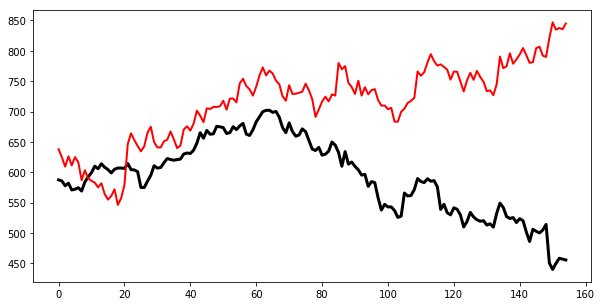

In [0]:
# Visualize our predictions along with the "true" values, and print the score
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(y_test, color='k', lw=3)
ax.plot(predictions, color='r', lw=2)
plt.show()

#### Advanced time series prediction

**Visualizing messy data**



*   Visualize the time series data using Pandas.
*  Calculate the number of missing values in each time series. Note any irregularities that you can see. What do you think they are?



In [0]:
prices_nan = pd.read_csv('/content/prices_with_missing_values.csv')
prices_nan['date'] = pd.to_datetime(prices_nan['date'])
prices_nan.index = prices_nan['date']
del prices_nan['date']
prices_nan.head(5)

,EBAY,NVDA,YHOO
date,,,
2010-01-04,23.900000,18.490000,17.100000
2010-01-05,23.650000,18.760000,17.230000
2010-01-06,23.500000,18.879999,17.170000
2010-01-07,23.229998,18.510000,16.700001
2010-01-08,23.509999,18.549999,16.700001


In [0]:
prices = prices_nan
prices.shape # (1278, 3)

(1278, 3)

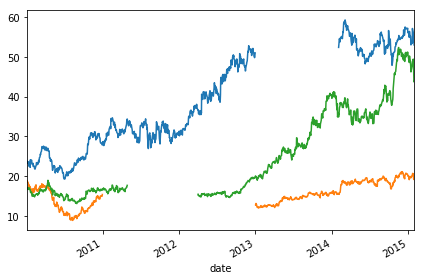

In [0]:
# Visualize the dataset
prices.plot(legend=False)
plt.tight_layout()
plt.show()

In [0]:
# Count the missing values of each time series
missing_values = prices.isna().sum()
print(missing_values)

EBAY    273
NVDA    502
YHOO    232
dtype: int64


**Imputing missing values**

In this exercise, you'll practice using different interpolation methods to fill in some missing values, visualizing the result each time. But first, you will create the function (interpolate_and_plot()) you'll use to interpolate missing data points and plot them.

In [0]:
prices.shape # (1278, 3)

(1278, 3)

In [0]:
def interpolate_and_plot(prices, interpolation):

    # Create a boolean mask for our missing values
    missing_values = prices.isna()

    # Interpolate the missing values for this type of interpolation
    prices_interp = prices.interpolate(interpolation)

    # Plot the results, highlighting the interpolated values in red
    fig, ax = plt.subplots(figsize=(10, 5))
    prices_interp.plot(color='k', alpha=.6, ax=ax, legend=False)
    
    # Now plot the interpolated values on top in red
    prices_interp[missing_values].plot(ax=ax, color='r', lw=3, legend=False)
    plt.show()

Interpolate using the latest non-missing value and plot the results. 'ZERO' !!!

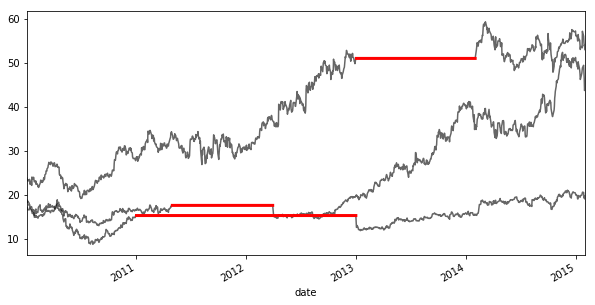

In [0]:
# Interpolate using the latest non-missing value
interpolation_type = 'zero'
interpolate_and_plot(prices, interpolation_type)

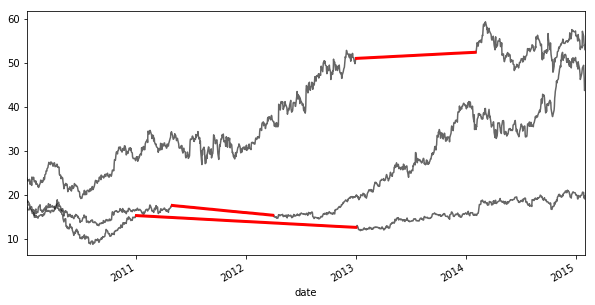

In [0]:
# Interpolate linearly
interpolation_type = 'linear'
interpolate_and_plot(prices, interpolation_type)

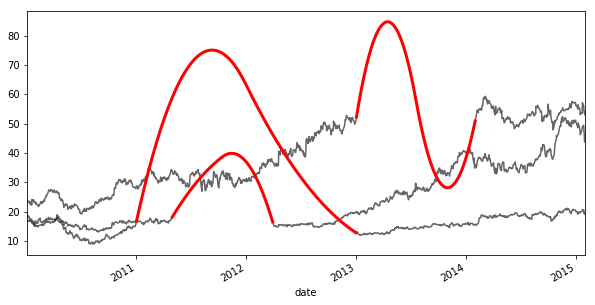

In [0]:
# Interpolate with a quadratic function
interpolation_type = 'quadratic'
interpolate_and_plot(prices, interpolation_type)

**Transforming raw data**

In this exercise, you will define a function that calculates the percent change of the latest data point from the mean of a window of previous data points. This function will help you calculate the percent change over a rolling window.

This is a more stable kind of time series that is often useful in machine learning.

In [0]:
all_prices.head(5)

,AAPL,ABT,AIG,AMAT,ARNC,BAC,BSX,C,CHK,CMCSA,CSCO,DAL,EBAY,F,FB,FCX,FITB,FOXA,FTR,GE,GILD,GLW,GM,HAL,HBAN,HPE,HPQ,INTC,JPM,KEY,KMI,KO,MRK,MRO,MSFT,MU,NFLX,NVDA,ORCL,PFE,QCOM,RF,SBUX,T,V,VZ,WFC,XOM,XRX,YHOO
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,214.009998,54.459951,29.889999,14.30,16.650013,15.690000,9.01,3.40,28.090001,16.969999,24.690001,11.22,23.900000,10.28,NaN,83.459999,10.12,13.929995,7.96,15.45,43.299999,19.559999,NaN,31.250000,3.68,NaN,52.449999,20.879999,42.849998,5.94,NaN,57.040001,37.009998,32.110070,30.950001,10.85,53.479999,18.490000,24.850000,18.930000,46.939999,5.42,23.049999,28.580000,88.139999,33.279869,27.320000,69.150002,8.63,17.100000
2010-01-05,214.379993,54.019953,29.330000,14.19,16.130013,16.200001,9.04,3.53,28.970002,16.740000,24.580000,12.10,23.650000,10.96,NaN,83.959999,10.39,13.970000,7.91,15.53,43.259998,19.629999,NaN,31.650000,3.76,NaN,52.669998,20.870001,43.680000,6.17,NaN,56.349998,37.160000,32.140079,30.959999,11.17,51.510001,18.760000,24.820000,18.660000,48.070000,5.60,23.590000,28.440001,87.129997,33.339868,28.070000,69.419998,8.64,17.230000
2010-01-06,210.969995,54.319953,29.139999,14.16,16.970013,16.389999,9.16,3.64,28.650002,16.620001,24.420000,12.11,23.500000,11.37,NaN,87.309998,10.45,14.200000,7.80,15.45,44.759998,19.379999,NaN,32.400002,3.86,NaN,52.179999,20.799999,43.919998,6.13,NaN,56.330002,37.660000,32.850072,30.770000,11.22,53.319999,18.879999,24.459999,18.600000,47.599998,5.67,23.420000,27.610001,85.959999,31.919873,28.110001,70.019997,8.56,17.170000
2010-01-07,210.580000,54.769952,28.580000,14.01,16.610014,16.930000,9.09,3.65,28.720002,16.969999,24.530001,12.69,23.229998,11.66,NaN,85.639999,11.08,13.999998,7.76,16.25,44.869999,19.570000,NaN,32.480000,4.29,NaN,52.199999,20.600000,44.790001,6.39,NaN,56.189999,37.720001,32.650089,30.450001,10.84,52.400001,18.510000,24.379999,18.530001,48.980000,6.17,23.360001,27.299999,86.760002,31.729875,29.129999,69.800003,8.60,16.700001
2010-01-08,211.980005,55.049952,29.340000,14.55,17.020014,16.780001,9.00,3.59,28.910002,16.920000,24.660000,12.47,23.509999,11.69,NaN,88.099998,11.09,14.120002,7.68,16.60,44.540001,19.889999,NaN,34.119999,4.22,NaN,52.589997,20.830000,44.680000,6.50,NaN,55.150002,37.700001,32.700080,30.660000,11.10,53.300002,18.549999,24.680000,18.680000,49.470001,6.18,23.280001,27.100000,87.000000,31.749874,28.860001,69.519997,8.57,16.700001


In [0]:
prices = all_prices[['EBAY', 'NVDA', 'YHOO', 'AAPL']]
prices.head(5)

,EBAY,NVDA,YHOO,AAPL
date,,,,
2010-01-04,23.900000,18.490000,17.100000,214.009998
2010-01-05,23.650000,18.760000,17.230000,214.379993
2010-01-06,23.500000,18.879999,17.170000,210.969995
2010-01-07,23.229998,18.510000,16.700001,210.580000
2010-01-08,23.509999,18.549999,16.700001,211.980005


In [0]:
# Your custom function
def percent_change(series):
    # Collect all *but* the last value of this window, then the final value
    previous_values = series[:-1]
    last_value = series[-1]

    # Calculate the % difference between the last value and the mean of earlier values
    percent_change = (last_value - np.mean(previous_values)) / np.mean(previous_values)
    return percent_change

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


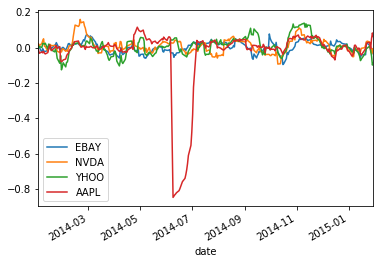

In [0]:
# Apply your custom function and plot
prices_perc = prices.rolling(20).apply(percent_change)
prices_perc.loc["2014":"2015"].plot()
plt.show()

**Handling outliers**

In this exercise, you'll handle outliers - data points that are so different from the rest of your data, that you treat them differently from other "normal-looking" data points. You'll use the output from the previous exercise (percent change over time) to detect the outliers.



*   Define a function that takes an input series and does the following:

> *   Calculates the absolute value of each datapoint's distance from the series mean, then creates a boolean mask for datapoints that are three times the standard deviation from the mean.
> *   Use this boolean mask to replace the outliers with the median of the entire series.


*   Apply this function to your data and visualize the results using the given code.



In [0]:
def replace_outliers(series):
    # Calculate the absolute difference of each timepoint from the series mean
    absolute_differences_from_mean = np.abs(series - np.mean(series))
    
    # Calculate a mask for the differences that are > 3 standard deviations from zero
    this_mask = absolute_differences_from_mean > (np.std(series) * 3)
    
    # Replace these values with the median accross the data
    series[this_mask] = np.nanmedian(series)
    return series

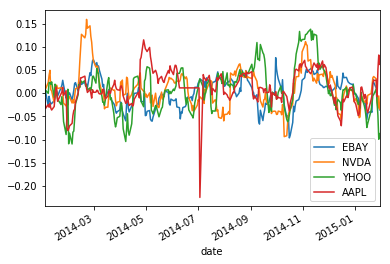

In [0]:
# Apply your preprocessing function to the timeseries and plot the results
prices_perc = prices_perc.apply(replace_outliers)
prices_perc.loc["2014":"2015"].plot()
plt.show()

#### Creating features over time

**Engineering multiple rolling features at once**

Now that you've practiced some simple feature engineering, let's move on to something more complex. You'll calculate a collection of features for your time series data and visualize what they look like over time. This process resembles how many other time series models operate.



*   Define a list consisting of four features you will calculate: the minimum, maximum, mean, and standard deviation (in that order).

*   Using the rolling window (prices_perc_rolling) we defined for you, calculate the features from features_to_calculate.

*   Plot the results over time, along with the original time series using the given code.




In [0]:
# Define a rolling window with Pandas, excluding the right-most datapoint of the window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')

In [0]:
prices_perc_rolling

Rolling [window=20,min_periods=5,center=False,axis=0,closed=right]

In [0]:
# Define the features you'll calculate for each window
features_to_calculate = [np.min, np.max, np.mean, np.std]

In [0]:
features_to_calculate

[<function numpy.amin>,
 <function numpy.amax>,
 <function numpy.mean>,
 <function numpy.std>]

In [0]:
# Calculate these features for your rolling window object
features = prices_perc_rolling.aggregate(features_to_calculate)

In [0]:
features.shape

(1278, 16)

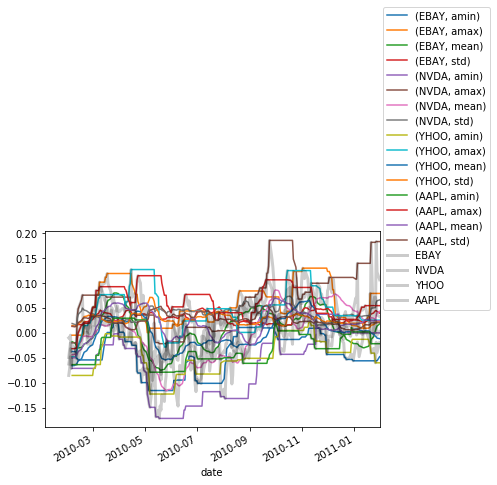

In [0]:
# Plot the results
ax = features.loc[:"2011-01"].plot()
prices_perc.loc[:"2011-01"].plot(ax=ax, color='k', alpha=.2, lw=3)
ax.legend(loc=(1.01, .6))
plt.show()

**Percentile and partial functions**

In this exercise, you'll practice how to pre-choose arguments of a function so that you can pre-configure how it runs. You'll use this to calculate several percentiles of your data using the same percentile() function in numpy.



*   Import partial from functools.

*   Use the partial() function to create several feature generators that calculate percentiles of your data using a list comprehension.

*   Using the rolling window (prices_perc_rolling) we defined for you, calculate the quantiles using percentile_functions.

*   Visualize the results using the code given to you.



In [0]:
# Import partial from functools
from functools import partial

In [0]:
percentiles = [1, 10, 25, 50, 75, 90, 99]

In [0]:
# Use a list comprehension to create a partial function for each quantile
percentile_functions = [partial(np.percentile, q=percentile) for percentile in percentiles]

In [0]:
# Calculate each of these quantiles on the data using a rolling window
prices_perc_rolling = prices_perc.rolling(20, min_periods=5, closed='right')
features_percentiles = prices_perc_rolling.aggregate(percentile_functions)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


TypeError: ignored

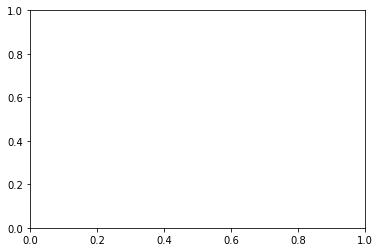

In [0]:
# Plot a subset of the result
ax = features_percentiles.loc[:"2011-01"].plot(cmap=plt.cm.viridis)
ax.legend(percentiles, loc=(1.01, .5))
plt.show()

**Using 'date' information**

In this exercise, you'll extract these date/time based features. A single time series has been loaded in a variable called prices.



*   Calculate the day of the week, week number in a year, and month number in a year.


*   Add each one as a column to the prices_perc DataFrame, under the names day_of_week, week_of_year and month_of_year, respectively.



In [0]:
prices.tail(5)

,EBAY,NVDA,YHOO,AAPL
date,,,,
2015-01-26,56.059999,20.620001,49.439999,113.099998
2015-01-27,54.690000,19.629999,47.990002,109.139999
2015-01-28,53.839999,19.309999,46.459999,115.309998
2015-01-29,53.959999,19.780001,43.730000,118.900002
2015-01-30,52.999996,19.200001,43.990002,117.160004


In [0]:
# Extract date features from the data, add them as columns
prices_perc['day_of_week'] = prices_perc.index.weekday
prices_perc['week_of_year'] = prices_perc.index.weekofyear
prices_perc['month_of_year'] = prices_perc.index.month

# Print prices_perc
print(prices_perc.tail(5))

## 4. Validating and Inspecting Time Series Models

Once you've got a model for predicting time series data, you need to decide if it's a good or a bad model. This chapter coves the basics of generating predictions with models in order to validate them against "test" data.

#### Creating features from the past

**Creating time-shifted features**

In machine learning for time series, it's common to use information about previous time points to predict a subsequent time point.

In this exercise, you'll "shift" your raw data and visualize the results. You'll use the percent change time series that you calculated in the previous chapter, this time with a very short window. A short window is important because, in a real-world scenario, you want to predict the day-to-day fluctuations of a time series, not its change over a longer window of time.



*   Use a dictionary comprehension to create multiple time-shifted versions of prices_perc using the lags specified in shifts.

*   Convert the result into a DataFrame.

*   Use the given code to visualize the results.



In [0]:
# These are the "time lags"
shifts = np.arange(1, 11).astype(int)

In [0]:
prices_perc = prices_perc['AAPL']
# prices_perc

In [0]:
# Use a dictionary comprehension to create name: value pairs, one pair per shift
shifted_data = {"lag_{}_day".format(day_shift): prices_perc.shift(day_shift) for day_shift in shifts}

In [0]:
# Convert into a DataFrame for subsequent use
prices_perc_shifted = pd.DataFrame(shifted_data)

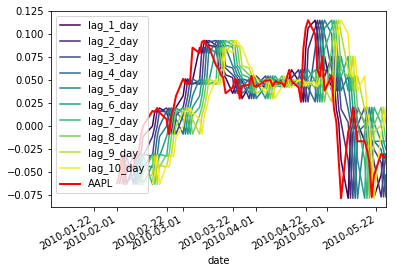

In [0]:
# Plot the first 100 samples of each
ax = prices_perc_shifted.iloc[:100].plot(cmap=plt.cm.viridis)
prices_perc.iloc[:100].plot(color='r', lw=2)
ax.legend(loc='best')
plt.show()

**Special case: Auto-regressive models**

Now that you've created time-shifted versions of a single time series, you can fit an auto-regressive model. This is a regression model where the input features are time-shifted versions of the output time series data. You are using previous values of a timeseries to predict current values of the same timeseries (thus, it is auto-regressive).

By investigating the coefficients of this model, you can explore any repetitive patterns that exist in a timeseries, and get an idea for how far in the past a data point is predictive of the future.



*   Replace missing values in prices_perc_shifted with the median of the DataFrame and assign it to X.


*   Replace missing values in prices_perc with the median of the series and assign it to y.



In [0]:
# Replace missing values with the median for each column
X = prices_perc_shifted.fillna(np.nanmedian(prices_perc_shifted))
y = prices_perc.fillna(np.nanmedian(prices_perc))

In [0]:
# Fit the model
model = Ridge()
model.fit(X, y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

**Visualize regression coefficients**

In this exercise, you will create a function that, given a set of coefficients and feature names, visualizes the coefficient values.



1.   Define a function (called visualize_coefficients) that takes as input an array of coefficients, an array of each coefficient's name, and an instance of a Matplotlib axis object. It should then generate a bar plot for the input coefficients, with their names on the x-axis.

2.   Use this function (visualize_coefficients()) with the coefficients contained in the model variable and column names of prices_perc_shifted.



In [0]:
def visualize_coefficients(coefs, names, ax):
    # Make a bar plot for the coefficients, including their names on the x-axis
    ax.bar(prices_perc_shifted.columns, coefs)
    ax.set(xlabel='Coefficient name', ylabel='Coefficient value')
    
    # Set formatting so it looks nice
    plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
    return ax

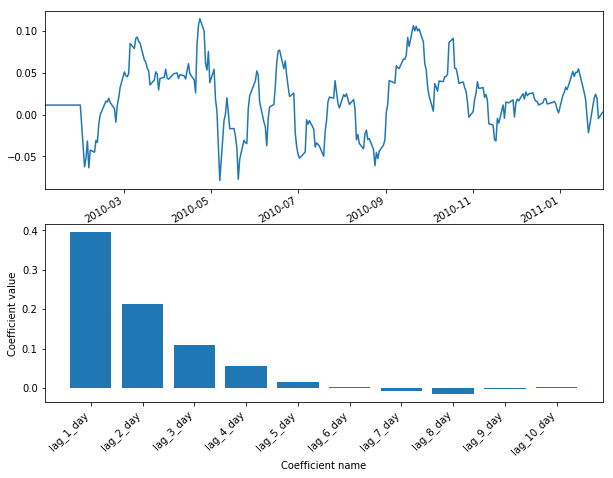

In [0]:
# Visualize the output data up to "2011-01"
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
y.loc[:'2011-01'].plot(ax=axs[0])

# Run the function to visualize model's coefficients
visualize_coefficients(model.coef_, prices_perc_shifted.columns, ax=axs[1])
plt.show()

#### Cross-validating time series data

**Cross-validation with shuffling**

In this exercise, you'll perform a traditional ShuffleSplit cross-validation on the company value data from earlier. Later we'll cover what changes need to be made for time series data. The data we'll use is the same historical price data for several large companies.

In [0]:
#@title
X = np.array([[ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [ 0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [-0.06251474,  0.00921183,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [-0.05244558, -0.06251474,  0.00921183,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [-0.03157502, -0.05244558, -0.06251474,  0.00921183,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [-0.06366353, -0.03157502, -0.05244558, -0.06251474,  0.00921183,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [-0.04248527, -0.06366353, -0.03157502, -0.05244558, -0.06251474,
         0.00921183,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [-0.04498189, -0.04248527, -0.06366353, -0.03157502, -0.05244558,
        -0.06251474,  0.00921183,  0.00921183,  0.00921183,  0.00921183],
       [-0.03078513, -0.04498189, -0.04248527, -0.06366353, -0.03157502,
        -0.05244558, -0.06251474,  0.00921183,  0.00921183,  0.00921183],
       [-0.03317265, -0.03078513, -0.04498189, -0.04248527, -0.06366353,
        -0.03157502, -0.05244558, -0.06251474,  0.00921183,  0.00921183],
       [-0.01157913, -0.03317265, -0.03078513, -0.04498189, -0.04248527,
        -0.06366353, -0.03157502, -0.05244558, -0.06251474,  0.00921183],
       [-0.00025475, -0.01157913, -0.03317265, -0.03078513, -0.04498189,
        -0.04248527, -0.06366353, -0.03157502, -0.05244558, -0.06251474],
       [ 0.01629393, -0.00025475, -0.01157913, -0.03317265, -0.03078513,
        -0.04498189, -0.04248527, -0.06366353, -0.03157502, -0.05244558],
       [ 0.01515433,  0.01629393, -0.00025475, -0.01157913, -0.03317265,
        -0.03078513, -0.04498189, -0.04248527, -0.06366353, -0.03157502],
       [ 0.01952763,  0.01515433,  0.01629393, -0.00025475, -0.01157913,
        -0.03317265, -0.03078513, -0.04498189, -0.04248527, -0.06366353],
       [ 0.01457628,  0.01952763,  0.01515433,  0.01629393, -0.00025475,
        -0.01157913, -0.03317265, -0.03078513, -0.04498189, -0.04248527],
       [ 0.00724221,  0.01457628,  0.01952763,  0.01515433,  0.01629393,
        -0.00025475, -0.01157913, -0.03317265, -0.03078513, -0.04498189],
       [-0.0089493 ,  0.00724221,  0.01457628,  0.01952763,  0.01515433,
         0.01629393, -0.00025475, -0.01157913, -0.03317265, -0.03078513],
       [ 0.01153336, -0.0089493 ,  0.00724221,  0.01457628,  0.01952763,
         0.01515433,  0.01629393, -0.00025475, -0.01157913, -0.03317265],
       [ 0.02024273,  0.01153336, -0.0089493 ,  0.00724221,  0.01457628,
         0.01952763,  0.01515433,  0.01629393, -0.00025475, -0.01157913],
       [ 0.03273157,  0.02024273,  0.01153336, -0.0089493 ,  0.00724221,
         0.01457628,  0.01952763,  0.01515433,  0.01629393, -0.00025475],
       [ 0.05127984,  0.03273157,  0.02024273,  0.01153336, -0.0089493 ,
         0.00724221,  0.01457628,  0.01952763,  0.01515433,  0.01629393],
       [ 0.04662419,  0.05127984,  0.03273157,  0.02024273,  0.01153336,
        -0.0089493 ,  0.00724221,  0.01457628,  0.01952763,  0.01515433],
       [ 0.04544773,  0.04662419,  0.05127984,  0.03273157,  0.02024273,
         0.01153336, -0.0089493 ,  0.00724221,  0.01457628,  0.01952763],
       [ 0.04955343,  0.04544773,  0.04662419,  0.05127984,  0.03273157,
         0.02024273,  0.01153336, -0.0089493 ,  0.00724221,  0.01457628],
       [ 0.08528803,  0.04955343,  0.04544773,  0.04662419,  0.05127984,
         0.03273157,  0.02024273,  0.01153336, -0.0089493 ,  0.00724221],
       [ 0.07931813,  0.08528803,  0.04955343,  0.04544773,  0.04662419,
         0.05127984,  0.03273157,  0.02024273,  0.01153336, -0.0089493 ],
       [ 0.09166373,  0.07931813,  0.08528803,  0.04955343,  0.04544773,
         0.04662419,  0.05127984,  0.03273157,  0.02024273,  0.01153336],
       [ 0.09301733,  0.09166373,  0.07931813,  0.08528803,  0.04955343,
         0.04544773,  0.04662419,  0.05127984,  0.03273157,  0.02024273],
       [ 0.08795296,  0.09301733,  0.09166373,  0.07931813,  0.08528803,
         0.04955343,  0.04544773,  0.04662419,  0.05127984,  0.03273157],
       [ 0.08586218,  0.08795296,  0.09301733,  0.09166373,  0.07931813,
         0.08528803,  0.04955343,  0.04544773,  0.04662419,  0.05127984],
       [ 0.06558961,  0.08586218,  0.08795296,  0.09301733,  0.09166373,
         0.07931813,  0.08528803,  0.04955343,  0.04544773,  0.04662419],
       [ 0.06304933,  0.06558961,  0.08586218,  0.08795296,  0.09301733,
         0.09166373,  0.07931813,  0.08528803,  0.04955343,  0.04544773],
       [ 0.05572306,  0.06304933,  0.06558961,  0.08586218,  0.08795296,
         0.09301733,  0.09166373,  0.07931813,  0.08528803,  0.04955343],
       [ 0.05268935,  0.05572306,  0.06304933,  0.06558961,  0.08586218,
         0.08795296,  0.09301733,  0.09166373,  0.07931813,  0.08528803],
       [ 0.03557406,  0.05268935,  0.05572306,  0.06304933,  0.06558961,
         0.08586218,  0.08795296,  0.09301733,  0.09166373,  0.07931813],
       [ 0.04164635,  0.03557406,  0.05268935,  0.05572306,  0.06304933,
         0.06558961,  0.08586218,  0.08795296,  0.09301733,  0.09166373],
       [ 0.05127673,  0.04164635,  0.03557406,  0.05268935,  0.05572306,
         0.06304933,  0.06558961,  0.08586218,  0.08795296,  0.09301733],
       [ 0.04888675,  0.05127673,  0.04164635,  0.03557406,  0.05268935,
         0.05572306,  0.06304933,  0.06558961,  0.08586218,  0.08795296],
       [ 0.02966561,  0.04888675,  0.05127673,  0.04164635,  0.03557406,
         0.05268935,  0.05572306,  0.06304933,  0.06558961,  0.08586218],
       [ 0.0434768 ,  0.02966561,  0.04888675,  0.05127673,  0.04164635,
         0.03557406,  0.05268935,  0.05572306,  0.06304933,  0.06558961],
       [ 0.04476574,  0.0434768 ,  0.02966561,  0.04888675,  0.05127673,
         0.04164635,  0.03557406,  0.05268935,  0.05572306,  0.06304933],
       [ 0.05444774,  0.04476574,  0.0434768 ,  0.02966561,  0.04888675,
         0.05127673,  0.04164635,  0.03557406,  0.05268935,  0.05572306],
       [ 0.04413187,  0.05444774,  0.04476574,  0.0434768 ,  0.02966561,
         0.04888675,  0.05127673,  0.04164635,  0.03557406,  0.05268935],
       [ 0.04251992,  0.04413187,  0.05444774,  0.04476574,  0.0434768 ,
         0.02966561,  0.04888675,  0.05127673,  0.04164635,  0.03557406],
       [ 0.04949983,  0.04251992,  0.04413187,  0.05444774,  0.04476574,
         0.0434768 ,  0.02966561,  0.04888675,  0.05127673,  0.04164635],
       [ 0.04940286,  0.04949983,  0.04251992,  0.04413187,  0.05444774,
         0.04476574,  0.0434768 ,  0.02966561,  0.04888675,  0.05127673],
       [ 0.05004689,  0.04940286,  0.04949983,  0.04251992,  0.04413187,
         0.05444774,  0.04476574,  0.0434768 ,  0.02966561,  0.04888675],
       [ 0.04343281,  0.05004689,  0.04940286,  0.04949983,  0.04251992,
         0.04413187,  0.05444774,  0.04476574,  0.0434768 ,  0.02966561],
       [ 0.04796825,  0.04343281,  0.05004689,  0.04940286,  0.04949983,
         0.04251992,  0.04413187,  0.05444774,  0.04476574,  0.0434768 ],
       [ 0.04650917,  0.04796825,  0.04343281,  0.05004689,  0.04940286,
         0.04949983,  0.04251992,  0.04413187,  0.05444774,  0.04476574],
       [ 0.0427404 ,  0.04650917,  0.04796825,  0.04343281,  0.05004689,
         0.04940286,  0.04949983,  0.04251992,  0.04413187,  0.05444774],
       [ 0.05247839,  0.0427404 ,  0.04650917,  0.04796825,  0.04343281,
         0.05004689,  0.04940286,  0.04949983,  0.04251992,  0.04413187],
       [ 0.06115438,  0.05247839,  0.0427404 ,  0.04650917,  0.04796825,
         0.04343281,  0.05004689,  0.04940286,  0.04949983,  0.04251992],
       [ 0.04896245,  0.06115438,  0.05247839,  0.0427404 ,  0.04650917,
         0.04796825,  0.04343281,  0.05004689,  0.04940286,  0.04949983],
       [ 0.04171681,  0.04896245,  0.06115438,  0.05247839,  0.0427404 ,
         0.04650917,  0.04796825,  0.04343281,  0.05004689,  0.04940286],
       [ 0.02617773,  0.04171681,  0.04896245,  0.06115438,  0.05247839,
         0.0427404 ,  0.04650917,  0.04796825,  0.04343281,  0.05004689],
       [ 0.08367421,  0.02617773,  0.04171681,  0.04896245,  0.06115438,
         0.05247839,  0.0427404 ,  0.04650917,  0.04796825,  0.04343281],
       [ 0.10671424,  0.08367421,  0.02617773,  0.04171681,  0.04896245,
         0.06115438,  0.05247839,  0.0427404 ,  0.04650917,  0.04796825],
       [ 0.11511602,  0.10671424,  0.08367421,  0.02617773,  0.04171681,
         0.04896245,  0.06115438,  0.05247839,  0.0427404 ,  0.04650917],
       [ 0.10012052,  0.11511602,  0.10671424,  0.08367421,  0.02617773,
         0.04171681,  0.04896245,  0.06115438,  0.05247839,  0.0427404 ],
       [ 0.06120721,  0.10012052,  0.11511602,  0.10671424,  0.08367421,
         0.02617773,  0.04171681,  0.04896245,  0.06115438,  0.05247839],
       [ 0.05354415,  0.06120721,  0.10012052,  0.11511602,  0.10671424,
         0.08367421,  0.02617773,  0.04171681,  0.04896245,  0.06115438],
       [ 0.07583063,  0.05354415,  0.06120721,  0.10012052,  0.11511602,
         0.10671424,  0.08367421,  0.02617773,  0.04171681,  0.04896245],
       [ 0.03844417,  0.07583063,  0.05354415,  0.06120721,  0.10012052,
         0.11511602,  0.10671424,  0.08367421,  0.02617773,  0.04171681],
       [ 0.05437674,  0.03844417,  0.07583063,  0.05354415,  0.06120721,
         0.10012052,  0.11511602,  0.10671424,  0.08367421,  0.02617773],
       [ 0.01832599,  0.05437674,  0.03844417,  0.07583063,  0.05354415,
         0.06120721,  0.10012052,  0.11511602,  0.10671424,  0.08367421],
       [ 0.00397559,  0.01832599,  0.05437674,  0.03844417,  0.07583063,
         0.05354415,  0.06120721,  0.10012052,  0.11511602,  0.10671424],
       [-0.03741114,  0.00397559,  0.01832599,  0.05437674,  0.03844417,
         0.07583063,  0.05354415,  0.06120721,  0.10012052,  0.11511602],
       [-0.07887071, -0.03741114,  0.00397559,  0.01832599,  0.05437674,
         0.03844417,  0.07583063,  0.05354415,  0.06120721,  0.10012052],
       [-0.00675293, -0.07887071, -0.03741114,  0.00397559,  0.01832599,
         0.05437674,  0.03844417,  0.07583063,  0.05354415,  0.06120721],
       [ 0.00075971, -0.00675293, -0.07887071, -0.03741114,  0.00397559,
         0.01832599,  0.05437674,  0.03844417,  0.07583063,  0.05354415],
       [ 0.02022124,  0.00075971, -0.00675293, -0.07887071, -0.03741114,
         0.00397559,  0.01832599,  0.05437674,  0.03844417,  0.07583063],
       [ 0.00299544,  0.02022124,  0.00075971, -0.00675293, -0.07887071,
        -0.03741114,  0.00397559,  0.01832599,  0.05437674,  0.03844417],
       [-0.01683137,  0.00299544,  0.02022124,  0.00075971, -0.00675293,
        -0.07887071, -0.03741114,  0.00397559,  0.01832599,  0.05437674],
       [-0.01663515, -0.01683137,  0.00299544,  0.02022124,  0.00075971,
        -0.00675293, -0.07887071, -0.03741114,  0.00397559,  0.01832599],
       [-0.02573998, -0.01663515, -0.01683137,  0.00299544,  0.02022124,
         0.00075971, -0.00675293, -0.07887071, -0.03741114,  0.00397559],
       [-0.03992139, -0.02573998, -0.01663515, -0.01683137,  0.00299544,
         0.02022124,  0.00075971, -0.00675293, -0.07887071, -0.03741114],
       [-0.07742015, -0.03992139, -0.02573998, -0.01663515, -0.01683137,
         0.00299544,  0.02022124,  0.00075971, -0.00675293, -0.07887071],
       [-0.05333243, -0.07742015, -0.03992139, -0.02573998, -0.01663515,
        -0.01683137,  0.00299544,  0.02022124,  0.00075971, -0.00675293],
       [-0.030569  , -0.05333243, -0.07742015, -0.03992139, -0.02573998,
        -0.01663515, -0.01683137,  0.00299544,  0.02022124,  0.00075971],
       [-0.03356563, -0.030569  , -0.05333243, -0.07742015, -0.03992139,
        -0.02573998, -0.01663515, -0.01683137,  0.00299544,  0.02022124],
       [-0.03466041, -0.03356563, -0.030569  , -0.05333243, -0.07742015,
        -0.03992139, -0.02573998, -0.01663515, -0.01683137,  0.00299544],
       [ 0.00702076, -0.03466041, -0.03356563, -0.030569  , -0.05333243,
        -0.07742015, -0.03992139, -0.02573998, -0.01663515, -0.01683137],
       [ 0.02270792,  0.00702076, -0.03466041, -0.03356563, -0.030569  ,
        -0.05333243, -0.07742015, -0.03992139, -0.02573998, -0.01663515],
       [ 0.04049862,  0.02270792,  0.00702076, -0.03466041, -0.03356563,
        -0.030569  , -0.05333243, -0.07742015, -0.03992139, -0.02573998],
       [ 0.05246974,  0.04049862,  0.02270792,  0.00702076, -0.03466041,
        -0.03356563, -0.030569  , -0.05333243, -0.07742015, -0.03992139],
       [ 0.04741049,  0.05246974,  0.04049862,  0.02270792,  0.00702076,
        -0.03466041, -0.03356563, -0.030569  , -0.05333243, -0.07742015],
       [ 0.01531992,  0.04741049,  0.05246974,  0.04049862,  0.02270792,
         0.00702076, -0.03466041, -0.03356563, -0.030569  , -0.05333243],
       [-0.00875266,  0.01531992,  0.04741049,  0.05246974,  0.04049862,
         0.02270792,  0.00702076, -0.03466041, -0.03356563, -0.030569  ],
       [-0.01448745, -0.00875266,  0.01531992,  0.04741049,  0.05246974,
         0.04049862,  0.02270792,  0.00702076, -0.03466041, -0.03356563],
       [-0.03727712, -0.01448745, -0.00875266,  0.01531992,  0.04741049,
         0.05246974,  0.04049862,  0.02270792,  0.00702076, -0.03466041],
       [-0.0044218 , -0.03727712, -0.01448745, -0.00875266,  0.01531992,
         0.04741049,  0.05246974,  0.04049862,  0.02270792,  0.00702076],
       [ 0.00915779, -0.0044218 , -0.03727712, -0.01448745, -0.00875266,
         0.01531992,  0.04741049,  0.05246974,  0.04049862,  0.02270792],
       [ 0.01228872,  0.00915779, -0.0044218 , -0.03727712, -0.01448745,
        -0.00875266,  0.01531992,  0.04741049,  0.05246974,  0.04049862],
       [ 0.03381294,  0.01228872,  0.00915779, -0.0044218 , -0.03727712,
        -0.01448745, -0.00875266,  0.01531992,  0.04741049,  0.05246974],
       [ 0.06227742,  0.03381294,  0.01228872,  0.00915779, -0.0044218 ,
        -0.03727712, -0.01448745, -0.00875266,  0.01531992,  0.04741049],
       [ 0.07638301,  0.06227742,  0.03381294,  0.01228872,  0.00915779,
        -0.0044218 , -0.03727712, -0.01448745, -0.00875266,  0.01531992],
       [ 0.07743514,  0.07638301,  0.06227742,  0.03381294,  0.01228872,
         0.00915779, -0.0044218 , -0.03727712, -0.01448745, -0.00875266],
       [ 0.05517152,  0.07743514,  0.07638301,  0.06227742,  0.03381294,
         0.01228872,  0.00915779, -0.0044218 , -0.03727712, -0.01448745],
       [ 0.06442198,  0.05517152,  0.07743514,  0.07638301,  0.06227742,
         0.03381294,  0.01228872,  0.00915779, -0.0044218 , -0.03727712],
       [ 0.04709498,  0.06442198,  0.05517152,  0.07743514,  0.07638301,
         0.06227742,  0.03381294,  0.01228872,  0.00915779, -0.0044218 ],
       [ 0.03383473,  0.04709498,  0.06442198,  0.05517152,  0.07743514,
         0.07638301,  0.06227742,  0.03381294,  0.01228872,  0.00915779],
       [ 0.02176074,  0.03383473,  0.04709498,  0.06442198,  0.05517152,
         0.07743514,  0.07638301,  0.06227742,  0.03381294,  0.01228872],
       [ 0.02585929,  0.02176074,  0.03383473,  0.04709498,  0.06442198,
         0.05517152,  0.07743514,  0.07638301,  0.06227742,  0.03381294],
       [-0.0219906 ,  0.02585929,  0.02176074,  0.03383473,  0.04709498,
         0.06442198,  0.05517152,  0.07743514,  0.07638301,  0.06227742],
       [-0.03820168, -0.0219906 ,  0.02585929,  0.02176074,  0.03383473,
         0.04709498,  0.06442198,  0.05517152,  0.07743514,  0.07638301],
       [-0.04764287, -0.03820168, -0.0219906 ,  0.02585929,  0.02176074,
         0.03383473,  0.04709498,  0.06442198,  0.05517152,  0.07743514],
       [-0.05211506, -0.04764287, -0.03820168, -0.0219906 ,  0.02585929,
         0.02176074,  0.03383473,  0.04709498,  0.06442198,  0.05517152],
       [-0.0448561 , -0.05211506, -0.04764287, -0.03820168, -0.0219906 ,
         0.02585929,  0.02176074,  0.03383473,  0.04709498,  0.06442198],
       [-0.00614542, -0.0448561 , -0.05211506, -0.04764287, -0.03820168,
        -0.0219906 ,  0.02585929,  0.02176074,  0.03383473,  0.04709498],
       [-0.0114664 , -0.00614542, -0.0448561 , -0.05211506, -0.04764287,
        -0.03820168, -0.0219906 ,  0.02585929,  0.02176074,  0.03383473],
       [-0.00712339, -0.0114664 , -0.00614542, -0.0448561 , -0.05211506,
        -0.04764287, -0.03820168, -0.0219906 ,  0.02585929,  0.02176074],
       [-0.01724268, -0.00712339, -0.0114664 , -0.00614542, -0.0448561 ,
        -0.05211506, -0.04764287, -0.03820168, -0.0219906 ,  0.02585929],
       [-0.03879421, -0.01724268, -0.00712339, -0.0114664 , -0.00614542,
        -0.0448561 , -0.05211506, -0.04764287, -0.03820168, -0.0219906 ],
       [-0.0337123 , -0.03879421, -0.01724268, -0.00712339, -0.0114664 ,
        -0.00614542, -0.0448561 , -0.05211506, -0.04764287, -0.03820168],
       [-0.03578895, -0.0337123 , -0.03879421, -0.01724268, -0.00712339,
        -0.0114664 , -0.00614542, -0.0448561 , -0.05211506, -0.04764287],
       [-0.03776702, -0.03578895, -0.0337123 , -0.03879421, -0.01724268,
        -0.00712339, -0.0114664 , -0.00614542, -0.0448561 , -0.05211506],
       [-0.04974649, -0.03776702, -0.03578895, -0.0337123 , -0.03879421,
        -0.01724268, -0.00712339, -0.0114664 , -0.00614542, -0.0448561 ],
       [-0.02042486, -0.04974649, -0.03776702, -0.03578895, -0.0337123 ,
        -0.03879421, -0.01724268, -0.00712339, -0.0114664 , -0.00614542],
       [-0.00682191, -0.02042486, -0.04974649, -0.03776702, -0.03578895,
        -0.0337123 , -0.03879421, -0.01724268, -0.00712339, -0.0114664 ],
       [ 0.01534348, -0.00682191, -0.02042486, -0.04974649, -0.03776702,
        -0.03578895, -0.0337123 , -0.03879421, -0.01724268, -0.00712339],
       [ 0.02105216,  0.01534348, -0.00682191, -0.02042486, -0.04974649,
        -0.03776702, -0.03578895, -0.0337123 , -0.03879421, -0.01724268],
       [ 0.01988504,  0.02105216,  0.01534348, -0.00682191, -0.02042486,
        -0.04974649, -0.03776702, -0.03578895, -0.0337123 , -0.03879421],
       [ 0.0407094 ,  0.01988504,  0.02105216,  0.01534348, -0.00682191,
        -0.02042486, -0.04974649, -0.03776702, -0.03578895, -0.0337123 ],
       [ 0.02672925,  0.0407094 ,  0.01988504,  0.02105216,  0.01534348,
        -0.00682191, -0.02042486, -0.04974649, -0.03776702, -0.03578895],
       [ 0.01353698,  0.02672925,  0.0407094 ,  0.01988504,  0.02105216,
         0.01534348, -0.00682191, -0.02042486, -0.04974649, -0.03776702],
       [ 0.00815351,  0.01353698,  0.02672925,  0.0407094 ,  0.01988504,
         0.02105216,  0.01534348, -0.00682191, -0.02042486, -0.04974649],
       [ 0.02400314,  0.00815351,  0.01353698,  0.02672925,  0.0407094 ,
         0.01988504,  0.02105216,  0.01534348, -0.00682191, -0.02042486],
       [ 0.02153641,  0.02400314,  0.00815351,  0.01353698,  0.02672925,
         0.0407094 ,  0.01988504,  0.02105216,  0.01534348, -0.00682191],
       [ 0.02494563,  0.02153641,  0.02400314,  0.00815351,  0.01353698,
         0.02672925,  0.0407094 ,  0.01988504,  0.02105216,  0.01534348],
       [ 0.01893484,  0.02494563,  0.02153641,  0.02400314,  0.00815351,
         0.01353698,  0.02672925,  0.0407094 ,  0.01988504,  0.02105216],
       [ 0.01223483,  0.01893484,  0.02494563,  0.02153641,  0.02400314,
         0.00815351,  0.01353698,  0.02672925,  0.0407094 ,  0.01988504],
       [ 0.01811133,  0.01223483,  0.01893484,  0.02494563,  0.02153641,
         0.02400314,  0.00815351,  0.01353698,  0.02672925,  0.0407094 ],
       [ 0.00695848,  0.01811133,  0.01223483,  0.01893484,  0.02494563,
         0.02153641,  0.02400314,  0.00815351,  0.01353698,  0.02672925],
       [-0.0301546 ,  0.00695848,  0.01811133,  0.01223483,  0.01893484,
         0.02494563,  0.02153641,  0.02400314,  0.00815351,  0.01353698],
       [-0.02370129, -0.0301546 ,  0.00695848,  0.01811133,  0.01223483,
         0.01893484,  0.02494563,  0.02153641,  0.02400314,  0.00815351],
       [-0.03450406, -0.02370129, -0.0301546 ,  0.00695848,  0.01811133,
         0.01223483,  0.01893484,  0.02494563,  0.02153641,  0.02400314],
       [-0.04085158, -0.03450406, -0.02370129, -0.0301546 ,  0.00695848,
         0.01811133,  0.01223483,  0.01893484,  0.02494563,  0.02153641],
       [-0.02323456, -0.04085158, -0.03450406, -0.02370129, -0.0301546 ,
         0.00695848,  0.01811133,  0.01223483,  0.01893484,  0.02494563],
       [-0.01851584, -0.02323456, -0.04085158, -0.03450406, -0.02370129,
        -0.0301546 ,  0.00695848,  0.01811133,  0.01223483,  0.01893484],
       [-0.02970923, -0.01851584, -0.02323456, -0.04085158, -0.03450406,
        -0.02370129, -0.0301546 ,  0.00695848,  0.01811133,  0.01223483],
       [-0.02864411, -0.02970923, -0.01851584, -0.02323456, -0.04085158,
        -0.03450406, -0.02370129, -0.0301546 ,  0.00695848,  0.01811133],
       [-0.04169381, -0.02864411, -0.02970923, -0.01851584, -0.02323456,
        -0.04085158, -0.03450406, -0.02370129, -0.0301546 ,  0.00695848],
       [-0.06105731, -0.04169381, -0.02864411, -0.02970923, -0.01851584,
        -0.02323456, -0.04085158, -0.03450406, -0.02370129, -0.0301546 ],
       [-0.04533855, -0.06105731, -0.04169381, -0.02864411, -0.02970923,
        -0.01851584, -0.02323456, -0.04085158, -0.03450406, -0.02370129],
       [-0.05261412, -0.04533855, -0.06105731, -0.04169381, -0.02864411,
        -0.02970923, -0.01851584, -0.02323456, -0.04085158, -0.03450406],
       [-0.04396393, -0.05261412, -0.04533855, -0.06105731, -0.04169381,
        -0.02864411, -0.02970923, -0.01851584, -0.02323456, -0.04085158],
       [-0.03642252, -0.04396393, -0.05261412, -0.04533855, -0.06105731,
        -0.04169381, -0.02864411, -0.02970923, -0.01851584, -0.02323456],
       [-0.03009721, -0.03642252, -0.04396393, -0.05261412, -0.04533855,
        -0.06105731, -0.04169381, -0.02864411, -0.02970923, -0.01851584],
       [ 0.00293525, -0.03009721, -0.03642252, -0.04396393, -0.05261412,
        -0.04533855, -0.06105731, -0.04169381, -0.02864411, -0.02970923],
       [ 0.01273516,  0.00293525, -0.03009721, -0.03642252, -0.04396393,
        -0.05261412, -0.04533855, -0.06105731, -0.04169381, -0.02864411],
       [ 0.04098405,  0.01273516,  0.00293525, -0.03009721, -0.03642252,
        -0.04396393, -0.05261412, -0.04533855, -0.06105731, -0.04169381],
       [ 0.03777695,  0.04098405,  0.01273516,  0.00293525, -0.03009721,
        -0.03642252, -0.04396393, -0.05261412, -0.04533855, -0.06105731],
       [ 0.05870538,  0.03777695,  0.04098405,  0.01273516,  0.00293525,
        -0.03009721, -0.03642252, -0.04396393, -0.05261412, -0.04533855],
       [ 0.05645912,  0.05870538,  0.03777695,  0.04098405,  0.01273516,
         0.00293525, -0.03009721, -0.03642252, -0.04396393, -0.05261412],
       [ 0.05530852,  0.05645912,  0.05870538,  0.03777695,  0.04098405,
         0.01273516,  0.00293525, -0.03009721, -0.03642252, -0.04396393],
       [ 0.066633  ,  0.05530852,  0.05645912,  0.05870538,  0.03777695,
         0.04098405,  0.01273516,  0.00293525, -0.03009721, -0.03642252],
       [ 0.06635816,  0.066633  ,  0.05530852,  0.05645912,  0.05870538,
         0.03777695,  0.04098405,  0.01273516,  0.00293525, -0.03009721],
       [ 0.07134163,  0.06635816,  0.066633  ,  0.05530852,  0.05645912,
         0.05870538,  0.03777695,  0.04098405,  0.01273516,  0.00293525],
       [ 0.09260741,  0.07134163,  0.06635816,  0.066633  ,  0.05530852,
         0.05645912,  0.05870538,  0.03777695,  0.04098405,  0.01273516],
       [ 0.08186293,  0.09260741,  0.07134163,  0.06635816,  0.066633  ,
         0.05530852,  0.05645912,  0.05870538,  0.03777695,  0.04098405],
       [ 0.1068542 ,  0.08186293,  0.09260741,  0.07134163,  0.06635816,
         0.066633  ,  0.05530852,  0.05645912,  0.05870538,  0.03777695],
       [ 0.10049209,  0.1068542 ,  0.08186293,  0.09260741,  0.07134163,
         0.06635816,  0.066633  ,  0.05530852,  0.05645912,  0.05870538],
       [ 0.10603   ,  0.10049209,  0.1068542 ,  0.08186293,  0.09260741,
         0.07134163,  0.06635816,  0.066633  ,  0.05530852,  0.05645912],
       [ 0.10053946,  0.10603   ,  0.10049209,  0.1068542 ,  0.08186293,
         0.09260741,  0.07134163,  0.06635816,  0.066633  ,  0.05530852],
       [ 0.1027373 ,  0.10053946,  0.10603   ,  0.10049209,  0.1068542 ,
         0.08186293,  0.09260741,  0.07134163,  0.06635816,  0.066633  ],
       [ 0.08741517,  0.1027373 ,  0.10053946,  0.10603   ,  0.10049209,
         0.1068542 ,  0.08186293,  0.09260741,  0.07134163,  0.06635816],
       [ 0.06120533,  0.08741517,  0.1027373 ,  0.10053946,  0.10603   ,
         0.10049209,  0.1068542 ,  0.08186293,  0.09260741,  0.07134163],
       [ 0.05411071,  0.06120533,  0.08741517,  0.1027373 ,  0.10053946,
         0.10603   ,  0.10049209,  0.1068542 ,  0.08186293,  0.09260741],
       [ 0.033442  ,  0.05411071,  0.06120533,  0.08741517,  0.1027373 ,
         0.10053946,  0.10603   ,  0.10049209,  0.1068542 ,  0.08186293],
       [ 0.0227709 ,  0.033442  ,  0.05411071,  0.06120533,  0.08741517,
         0.1027373 ,  0.10053946,  0.10603   ,  0.10049209,  0.1068542 ],
       [ 0.00418048,  0.0227709 ,  0.033442  ,  0.05411071,  0.06120533,
         0.08741517,  0.1027373 ,  0.10053946,  0.10603   ,  0.10049209],
       [ 0.0372023 ,  0.00418048,  0.0227709 ,  0.033442  ,  0.05411071,
         0.06120533,  0.08741517,  0.1027373 ,  0.10053946,  0.10603   ],
       [ 0.03302148,  0.0372023 ,  0.00418048,  0.0227709 ,  0.033442  ,
         0.05411071,  0.06120533,  0.08741517,  0.1027373 ,  0.10053946],
       [ 0.02807998,  0.03302148,  0.0372023 ,  0.00418048,  0.0227709 ,
         0.033442  ,  0.05411071,  0.06120533,  0.08741517,  0.1027373 ],
       [ 0.04029676,  0.02807998,  0.03302148,  0.0372023 ,  0.00418048,
         0.0227709 ,  0.033442  ,  0.05411071,  0.06120533,  0.08741517],
       [ 0.03962819,  0.04029676,  0.02807998,  0.03302148,  0.0372023 ,
         0.00418048,  0.0227709 ,  0.033442  ,  0.05411071,  0.06120533],
       [ 0.04553356,  0.03962819,  0.04029676,  0.02807998,  0.03302148,
         0.0372023 ,  0.00418048,  0.0227709 ,  0.033442  ,  0.05411071],
       [ 0.04567854,  0.04553356,  0.03962819,  0.04029676,  0.02807998,
         0.03302148,  0.0372023 ,  0.00418048,  0.0227709 ,  0.033442  ],
       [ 0.04870623,  0.04567854,  0.04553356,  0.03962819,  0.04029676,
         0.02807998,  0.03302148,  0.0372023 ,  0.00418048,  0.0227709 ],
       [ 0.08648161,  0.04870623,  0.04567854,  0.04553356,  0.03962819,
         0.04029676,  0.02807998,  0.03302148,  0.0372023 ,  0.00418048],
       [ 0.09148649,  0.08648161,  0.04870623,  0.04567854,  0.04553356,
         0.03962819,  0.04029676,  0.02807998,  0.03302148,  0.0372023 ],
       [ 0.05574885,  0.09148649,  0.08648161,  0.04870623,  0.04567854,
         0.04553356,  0.03962819,  0.04029676,  0.02807998,  0.03302148],
       [ 0.05517799,  0.05574885,  0.09148649,  0.08648161,  0.04870623,
         0.04567854,  0.04553356,  0.03962819,  0.04029676,  0.02807998],
       [ 0.04769697,  0.05517799,  0.05574885,  0.09148649,  0.08648161,
         0.04870623,  0.04567854,  0.04553356,  0.03962819,  0.04029676],
       [ 0.0375785 ,  0.04769697,  0.05517799,  0.05574885,  0.09148649,
         0.08648161,  0.04870623,  0.04567854,  0.04553356,  0.03962819],
       [ 0.0391913 ,  0.0375785 ,  0.04769697,  0.05517799,  0.05574885,
         0.09148649,  0.08648161,  0.04870623,  0.04567854,  0.04553356],
       [ 0.03251394,  0.0391913 ,  0.0375785 ,  0.04769697,  0.05517799,
         0.05574885,  0.09148649,  0.08648161,  0.04870623,  0.04567854],
       [ 0.02802624,  0.03251394,  0.0391913 ,  0.0375785 ,  0.04769697,
         0.05517799,  0.05574885,  0.09148649,  0.08648161,  0.04870623],
       [ 0.01508031,  0.02802624,  0.03251394,  0.0391913 ,  0.0375785 ,
         0.04769697,  0.05517799,  0.05574885,  0.09148649,  0.08648161],
       [-0.00305083,  0.01508031,  0.02802624,  0.03251394,  0.0391913 ,
         0.0375785 ,  0.04769697,  0.05517799,  0.05574885,  0.09148649],
       [ 0.00363985, -0.00305083,  0.01508031,  0.02802624,  0.03251394,
         0.0391913 ,  0.0375785 ,  0.04769697,  0.05517799,  0.05574885],
       [ 0.01803698,  0.00363985, -0.00305083,  0.01508031,  0.02802624,
         0.03251394,  0.0391913 ,  0.0375785 ,  0.04769697,  0.05517799],
       [ 0.02577381,  0.01803698,  0.00363985, -0.00305083,  0.01508031,
         0.02802624,  0.03251394,  0.0391913 ,  0.0375785 ,  0.04769697],
       [ 0.03948125,  0.02577381,  0.01803698,  0.00363985, -0.00305083,
         0.01508031,  0.02802624,  0.03251394,  0.0391913 ,  0.0375785 ],
       [ 0.03146717,  0.03948125,  0.02577381,  0.01803698,  0.00363985,
        -0.00305083,  0.01508031,  0.02802624,  0.03251394,  0.0391913 ],
       [ 0.03246571,  0.03146717,  0.03948125,  0.02577381,  0.01803698,
         0.00363985, -0.00305083,  0.01508031,  0.02802624,  0.03251394],
       [ 0.02073935,  0.03246571,  0.03146717,  0.03948125,  0.02577381,
         0.01803698,  0.00363985, -0.00305083,  0.01508031,  0.02802624],
       [ 0.02426164,  0.02073935,  0.03246571,  0.03146717,  0.03948125,
         0.02577381,  0.01803698,  0.00363985, -0.00305083,  0.01508031],
       [ 0.01710689,  0.02426164,  0.02073935,  0.03246571,  0.03146717,
         0.03948125,  0.02577381,  0.01803698,  0.00363985, -0.00305083],
       [-0.0109007 ,  0.01710689,  0.02426164,  0.02073935,  0.03246571,
         0.03146717,  0.03948125,  0.02577381,  0.01803698,  0.00363985],
       [-0.01241555, -0.0109007 ,  0.01710689,  0.02426164,  0.02073935,
         0.03246571,  0.03146717,  0.03948125,  0.02577381,  0.01803698],
       [-0.02954282, -0.01241555, -0.0109007 ,  0.01710689,  0.02426164,
         0.02073935,  0.03246571,  0.03146717,  0.03948125,  0.02577381],
       [-0.03158402, -0.02954282, -0.01241555, -0.0109007 ,  0.01710689,
         0.02426164,  0.02073935,  0.03246571,  0.03146717,  0.03948125],
       [-0.00450509, -0.03158402, -0.02954282, -0.01241555, -0.0109007 ,
         0.01710689,  0.02426164,  0.02073935,  0.03246571,  0.03146717],
       [-0.01015342, -0.00450509, -0.03158402, -0.02954282, -0.01241555,
        -0.0109007 ,  0.01710689,  0.02426164,  0.02073935,  0.03246571],
       [ 0.01160468, -0.01015342, -0.00450509, -0.03158402, -0.02954282,
        -0.01241555, -0.0109007 ,  0.01710689,  0.02426164,  0.02073935],
       [-0.00424046,  0.01160468, -0.01015342, -0.00450509, -0.03158402,
        -0.02954282, -0.01241555, -0.0109007 ,  0.01710689,  0.02426164],
       [ 0.01518223, -0.00424046,  0.01160468, -0.01015342, -0.00450509,
        -0.03158402, -0.02954282, -0.01241555, -0.0109007 ,  0.01710689],
       [ 0.0141816 ,  0.01518223, -0.00424046,  0.01160468, -0.01015342,
        -0.00450509, -0.03158402, -0.02954282, -0.01241555, -0.0109007 ],
       [ 0.01778431,  0.0141816 ,  0.01518223, -0.00424046,  0.01160468,
        -0.01015342, -0.00450509, -0.03158402, -0.02954282, -0.01241555],
       [-0.00272771,  0.01778431,  0.0141816 ,  0.01518223, -0.00424046,
         0.01160468, -0.01015342, -0.00450509, -0.03158402, -0.02954282],
       [ 0.01379304, -0.00272771,  0.01778431,  0.0141816 ,  0.01518223,
        -0.00424046,  0.01160468, -0.01015342, -0.00450509, -0.03158402],
       [ 0.01878179,  0.01379304, -0.00272771,  0.01778431,  0.0141816 ,
         0.01518223, -0.00424046,  0.01160468, -0.01015342, -0.00450509],
       [ 0.01652878,  0.01878179,  0.01379304, -0.00272771,  0.01778431,
         0.0141816 ,  0.01518223, -0.00424046,  0.01160468, -0.01015342],
       [ 0.02515336,  0.01652878,  0.01878179,  0.01379304, -0.00272771,
         0.01778431,  0.0141816 ,  0.01518223, -0.00424046,  0.01160468],
       [ 0.01867864,  0.02515336,  0.01652878,  0.01878179,  0.01379304,
        -0.00272771,  0.01778431,  0.0141816 ,  0.01518223, -0.00424046],
       [ 0.02727349,  0.01867864,  0.02515336,  0.01652878,  0.01878179,
         0.01379304, -0.00272771,  0.01778431,  0.0141816 ,  0.01518223],
       [ 0.02276003,  0.02727349,  0.01867864,  0.02515336,  0.01652878,
         0.01878179,  0.01379304, -0.00272771,  0.01778431,  0.0141816 ],
       [ 0.0247823 ,  0.02276003,  0.02727349,  0.01867864,  0.02515336,
         0.01652878,  0.01878179,  0.01379304, -0.00272771,  0.01778431],
       [ 0.02616744,  0.0247823 ,  0.02276003,  0.02727349,  0.01867864,
         0.02515336,  0.01652878,  0.01878179,  0.01379304, -0.00272771],
       [ 0.01926134,  0.02616744,  0.0247823 ,  0.02276003,  0.02727349,
         0.01867864,  0.02515336,  0.01652878,  0.01878179,  0.01379304],
       [ 0.01630095,  0.01926134,  0.02616744,  0.0247823 ,  0.02276003,
         0.02727349,  0.01867864,  0.02515336,  0.01652878,  0.01878179],
       [ 0.01575617,  0.01630095,  0.01926134,  0.02616744,  0.0247823 ,
         0.02276003,  0.02727349,  0.01867864,  0.02515336,  0.01652878],
       [ 0.01157446,  0.01575617,  0.01630095,  0.01926134,  0.02616744,
         0.0247823 ,  0.02276003,  0.02727349,  0.01867864,  0.02515336],
       [ 0.01428481,  0.01157446,  0.01575617,  0.01630095,  0.01926134,
         0.02616744,  0.0247823 ,  0.02276003,  0.02727349,  0.01867864],
       [ 0.01905495,  0.01428481,  0.01157446,  0.01575617,  0.01630095,
         0.01926134,  0.02616744,  0.0247823 ,  0.02276003,  0.02727349],
       [ 0.01946338,  0.01905495,  0.01428481,  0.01157446,  0.01575617,
         0.01630095,  0.01926134,  0.02616744,  0.0247823 ,  0.02276003],
       [ 0.01284093,  0.01946338,  0.01905495,  0.01428481,  0.01157446,
         0.01575617,  0.01630095,  0.01926134,  0.02616744,  0.0247823 ],
       [ 0.01478358,  0.01284093,  0.01946338,  0.01905495,  0.01428481,
         0.01157446,  0.01575617,  0.01630095,  0.01926134,  0.02616744],
       [ 0.01594751,  0.01478358,  0.01284093,  0.01946338,  0.01905495,
         0.01428481,  0.01157446,  0.01575617,  0.01630095,  0.01926134],
       [ 0.01300243,  0.01594751,  0.01478358,  0.01284093,  0.01946338,
         0.01905495,  0.01428481,  0.01157446,  0.01575617,  0.01630095],
       [ 0.00645986,  0.01300243,  0.01594751,  0.01478358,  0.01284093,
         0.01946338,  0.01905495,  0.01428481,  0.01157446,  0.01575617],
       [ 0.00213557,  0.00645986,  0.01300243,  0.01594751,  0.01478358,
         0.01284093,  0.01946338,  0.01905495,  0.01428481,  0.01157446],
       [ 0.02305781,  0.00213557,  0.00645986,  0.01300243,  0.01594751,
         0.01478358,  0.01284093,  0.01946338,  0.01905495,  0.01428481],
       [ 0.0268168 ,  0.02305781,  0.00213557,  0.00645986,  0.01300243,
         0.01594751,  0.01478358,  0.01284093,  0.01946338,  0.01905495],
       [ 0.03301213,  0.0268168 ,  0.02305781,  0.00213557,  0.00645986,
         0.01300243,  0.01594751,  0.01478358,  0.01284093,  0.01946338],
       [ 0.02999903,  0.03301213,  0.0268168 ,  0.02305781,  0.00213557,
         0.00645986,  0.01300243,  0.01594751,  0.01478358,  0.01284093],
       [ 0.03502665,  0.02999903,  0.03301213,  0.0268168 ,  0.02305781,
         0.00213557,  0.00645986,  0.01300243,  0.01594751,  0.01478358],
       [ 0.05186623,  0.03502665,  0.02999903,  0.03301213,  0.0268168 ,
         0.02305781,  0.00213557,  0.00645986,  0.01300243,  0.01594751],
       [ 0.0458648 ,  0.05186623,  0.03502665,  0.02999903,  0.03301213,
         0.0268168 ,  0.02305781,  0.00213557,  0.00645986,  0.01300243],
       [ 0.05076071,  0.0458648 ,  0.05186623,  0.03502665,  0.02999903,
         0.03301213,  0.0268168 ,  0.02305781,  0.00213557,  0.00645986],
       [ 0.05054617,  0.05076071,  0.0458648 ,  0.05186623,  0.03502665,
         0.02999903,  0.03301213,  0.0268168 ,  0.02305781,  0.00213557],
       [ 0.05493325,  0.05054617,  0.05076071,  0.0458648 ,  0.05186623,
         0.03502665,  0.02999903,  0.03301213,  0.0268168 ,  0.02305781],
       [ 0.0266711 ,  0.05493325,  0.05054617,  0.05076071,  0.0458648 ,
         0.05186623,  0.03502665,  0.02999903,  0.03301213,  0.0268168 ],
       [ 0.01823763,  0.0266711 ,  0.05493325,  0.05054617,  0.05076071,
         0.0458648 ,  0.05186623,  0.03502665,  0.02999903,  0.03301213],
       [-0.00258313,  0.01823763,  0.0266711 ,  0.05493325,  0.05054617,
         0.05076071,  0.0458648 ,  0.05186623,  0.03502665,  0.02999903],
       [-0.02161295, -0.00258313,  0.01823763,  0.0266711 ,  0.05493325,
         0.05054617,  0.05076071,  0.0458648 ,  0.05186623,  0.03502665],
       [ 0.01002213, -0.02161295, -0.00258313,  0.01823763,  0.0266711 ,
         0.05493325,  0.05054617,  0.05076071,  0.0458648 ,  0.05186623],
       [ 0.01979338,  0.01002213, -0.02161295, -0.00258313,  0.01823763,
         0.0266711 ,  0.05493325,  0.05054617,  0.05076071,  0.0458648 ],
       [ 0.02454589,  0.01979338,  0.01002213, -0.02161295, -0.00258313,
         0.01823763,  0.0266711 ,  0.05493325,  0.05054617,  0.05076071],
       [ 0.019671  ,  0.02454589,  0.01979338,  0.01002213, -0.02161295,
        -0.00258313,  0.01823763,  0.0266711 ,  0.05493325,  0.05054617],
       [-0.0044959 ,  0.019671  ,  0.02454589,  0.01979338,  0.01002213,
        -0.02161295, -0.00258313,  0.01823763,  0.0266711 ,  0.05493325],
       [ 0.00292456, -0.0044959 ,  0.019671  ,  0.02454589,  0.01979338,
         0.01002213, -0.02161295, -0.00258313,  0.01823763,  0.0266711 ],
       [ 0.01825715,  0.00292456, -0.0044959 ,  0.019671  ,  0.02454589,
         0.01979338,  0.01002213, -0.02161295, -0.00258313,  0.01823763],
       [ 0.01399772,  0.01825715,  0.00292456, -0.0044959 ,  0.019671  ,
         0.02454589,  0.01979338,  0.01002213, -0.02161295, -0.00258313],
       [ 0.00979098,  0.01399772,  0.01825715,  0.00292456, -0.0044959 ,
         0.019671  ,  0.02454589,  0.01979338,  0.01002213, -0.02161295],
       [ 0.01725949,  0.00979098,  0.01399772,  0.01825715,  0.00292456,
        -0.0044959 ,  0.019671  ,  0.02454589,  0.01979338,  0.01002213],
       [ 0.0313999 ,  0.01725949,  0.00979098,  0.01399772,  0.01825715,
         0.00292456, -0.0044959 ,  0.019671  ,  0.02454589,  0.01979338],
       [ 0.03961886,  0.0313999 ,  0.01725949,  0.00979098,  0.01399772,
         0.01825715,  0.00292456, -0.0044959 ,  0.019671  ,  0.02454589],
       [ 0.04609718,  0.03961886,  0.0313999 ,  0.01725949,  0.00979098,
         0.01399772,  0.01825715,  0.00292456, -0.0044959 ,  0.019671  ],
       [ 0.03334145,  0.04609718,  0.03961886,  0.0313999 ,  0.01725949,
         0.00979098,  0.01399772,  0.01825715,  0.00292456, -0.0044959 ],
       [ 0.03866254,  0.03334145,  0.04609718,  0.03961886,  0.0313999 ,
         0.01725949,  0.00979098,  0.01399772,  0.01825715,  0.00292456],
       [ 0.04410552,  0.03866254,  0.03334145,  0.04609718,  0.03961886,
         0.0313999 ,  0.01725949,  0.00979098,  0.01399772,  0.01825715],
       [ 0.04324096,  0.04410552,  0.03866254,  0.03334145,  0.04609718,
         0.03961886,  0.0313999 ,  0.01725949,  0.00979098,  0.01399772],
       [ 0.04923253,  0.04324096,  0.04410552,  0.03866254,  0.03334145,
         0.04609718,  0.03961886,  0.0313999 ,  0.01725949,  0.00979098],
       [ 0.03050478,  0.04923253,  0.04324096,  0.04410552,  0.03866254,
         0.03334145,  0.04609718,  0.03961886,  0.0313999 ,  0.01725949],
       [ 0.00344698,  0.03050478,  0.04923253,  0.04324096,  0.04410552,
         0.03866254,  0.03334145,  0.04609718,  0.03961886,  0.0313999 ],
       [-0.03266943,  0.00344698,  0.03050478,  0.04923253,  0.04324096,
         0.04410552,  0.03866254,  0.03334145,  0.04609718,  0.03961886],
       [-0.02080303, -0.03266943,  0.00344698,  0.03050478,  0.04923253,
         0.04324096,  0.04410552,  0.03866254,  0.03334145,  0.04609718],
       [-0.0198786 , -0.02080303, -0.03266943,  0.00344698,  0.03050478,
         0.04923253,  0.04324096,  0.04410552,  0.03866254,  0.03334145],
       [-0.00473629, -0.0198786 , -0.02080303, -0.03266943,  0.00344698,
         0.03050478,  0.04923253,  0.04324096,  0.04410552,  0.03866254],
       [ 0.00787106, -0.00473629, -0.0198786 , -0.02080303, -0.03266943,
         0.00344698,  0.03050478,  0.04923253,  0.04324096,  0.04410552],
       [-0.00533237,  0.00787106, -0.00473629, -0.0198786 , -0.02080303,
        -0.03266943,  0.00344698,  0.03050478,  0.04923253,  0.04324096],
       [ 0.00202642, -0.00533237,  0.00787106, -0.00473629, -0.0198786 ,
        -0.02080303, -0.03266943,  0.00344698,  0.03050478,  0.04923253],
       [ 0.02200448,  0.00202642, -0.00533237,  0.00787106, -0.00473629,
        -0.0198786 , -0.02080303, -0.03266943,  0.00344698,  0.03050478],
       [ 0.02079341,  0.02200448,  0.00202642, -0.00533237,  0.00787106,
        -0.00473629, -0.0198786 , -0.02080303, -0.03266943,  0.00344698],
       [ 0.00561049,  0.02079341,  0.02200448,  0.00202642, -0.00533237,
         0.00787106, -0.00473629, -0.0198786 , -0.02080303, -0.03266943],
       [ 0.00622092,  0.00561049,  0.02079341,  0.02200448,  0.00202642,
        -0.00533237,  0.00787106, -0.00473629, -0.0198786 , -0.02080303],
       [-0.00316754,  0.00622092,  0.00561049,  0.02079341,  0.02200448,
         0.00202642, -0.00533237,  0.00787106, -0.00473629, -0.0198786 ],
       [-0.01873963, -0.00316754,  0.00622092,  0.00561049,  0.02079341,
         0.02200448,  0.00202642, -0.00533237,  0.00787106, -0.00473629],
       [-0.00251167, -0.01873963, -0.00316754,  0.00622092,  0.00561049,
         0.02079341,  0.02200448,  0.00202642, -0.00533237,  0.00787106],
       [ 0.00266427, -0.00251167, -0.01873963, -0.00316754,  0.00622092,
         0.00561049,  0.02079341,  0.02200448,  0.00202642, -0.00533237],
       [-0.0195693 ,  0.00266427, -0.00251167, -0.01873963, -0.00316754,
         0.00622092,  0.00561049,  0.02079341,  0.02200448,  0.00202642],
       [-0.06130661, -0.0195693 ,  0.00266427, -0.00251167, -0.01873963,
        -0.00316754,  0.00622092,  0.00561049,  0.02079341,  0.02200448],
       [-0.04339375, -0.06130661, -0.0195693 ,  0.00266427, -0.00251167,
        -0.01873963, -0.00316754,  0.00622092,  0.00561049,  0.02079341],
       [-0.05136556, -0.04339375, -0.06130661, -0.0195693 ,  0.00266427,
        -0.00251167, -0.01873963, -0.00316754,  0.00622092,  0.00561049],
       [-0.0236755 , -0.05136556, -0.04339375, -0.06130661, -0.0195693 ,
         0.00266427, -0.00251167, -0.01873963, -0.00316754,  0.00622092],
       [-0.01831085, -0.0236755 , -0.05136556, -0.04339375, -0.06130661,
        -0.0195693 ,  0.00266427, -0.00251167, -0.01873963, -0.00316754],
       [-0.02388408, -0.01831085, -0.0236755 , -0.05136556, -0.04339375,
        -0.06130661, -0.0195693 ,  0.00266427, -0.00251167, -0.01873963],
       [-0.00669533, -0.02388408, -0.01831085, -0.0236755 , -0.05136556,
        -0.04339375, -0.06130661, -0.0195693 ,  0.00266427, -0.00251167],
       [ 0.01271188, -0.00669533, -0.02388408, -0.01831085, -0.0236755 ,
        -0.05136556, -0.04339375, -0.06130661, -0.0195693 ,  0.00266427],
       [ 0.0097987 ,  0.01271188, -0.00669533, -0.02388408, -0.01831085,
        -0.0236755 , -0.05136556, -0.04339375, -0.06130661, -0.0195693 ],
       [ 0.01112377,  0.0097987 ,  0.01271188, -0.00669533, -0.02388408,
        -0.01831085, -0.0236755 , -0.05136556, -0.04339375, -0.06130661],
       [ 0.00458773,  0.01112377,  0.0097987 ,  0.01271188, -0.00669533,
        -0.02388408, -0.01831085, -0.0236755 , -0.05136556, -0.04339375],
       [ 0.00590937,  0.00458773,  0.01112377,  0.0097987 ,  0.01271188,
        -0.00669533, -0.02388408, -0.01831085, -0.0236755 , -0.05136556],
       [-0.00375266,  0.00590937,  0.00458773,  0.01112377,  0.0097987 ,
         0.01271188, -0.00669533, -0.02388408, -0.01831085, -0.0236755 ],
       [-0.01187258, -0.00375266,  0.00590937,  0.00458773,  0.01112377,
         0.0097987 ,  0.01271188, -0.00669533, -0.02388408, -0.01831085],
       [-0.0163491 , -0.01187258, -0.00375266,  0.00590937,  0.00458773,
         0.01112377,  0.0097987 ,  0.01271188, -0.00669533, -0.02388408],
       [-0.01677653, -0.0163491 , -0.01187258, -0.00375266,  0.00590937,
         0.00458773,  0.01112377,  0.0097987 ,  0.01271188, -0.00669533],
       [-0.01535936, -0.01677653, -0.0163491 , -0.01187258, -0.00375266,
         0.00590937,  0.00458773,  0.01112377,  0.0097987 ,  0.01271188],
       [-0.02206976, -0.01535936, -0.01677653, -0.0163491 , -0.01187258,
        -0.00375266,  0.00590937,  0.00458773,  0.01112377,  0.0097987 ],
       [-0.03175172, -0.02206976, -0.01535936, -0.01677653, -0.0163491 ,
        -0.01187258, -0.00375266,  0.00590937,  0.00458773,  0.01112377],
       [-0.02487078, -0.03175172, -0.02206976, -0.01535936, -0.01677653,
        -0.0163491 , -0.01187258, -0.00375266,  0.00590937,  0.00458773],
       [-0.01429221, -0.02487078, -0.03175172, -0.02206976, -0.01535936,
        -0.01677653, -0.0163491 , -0.01187258, -0.00375266,  0.00590937],
       [-0.02539596, -0.01429221, -0.02487078, -0.03175172, -0.02206976,
        -0.01535936, -0.01677653, -0.0163491 , -0.01187258, -0.00375266],
       [-0.04019712, -0.02539596, -0.01429221, -0.02487078, -0.03175172,
        -0.02206976, -0.01535936, -0.01677653, -0.0163491 , -0.01187258],
       [-0.02554993, -0.04019712, -0.02539596, -0.01429221, -0.02487078,
        -0.03175172, -0.02206976, -0.01535936, -0.01677653, -0.0163491 ],
       [-0.0064664 , -0.02554993, -0.04019712, -0.02539596, -0.01429221,
        -0.02487078, -0.03175172, -0.02206976, -0.01535936, -0.01677653],
       [ 0.00712098, -0.0064664 , -0.02554993, -0.04019712, -0.02539596,
        -0.01429221, -0.02487078, -0.03175172, -0.02206976, -0.01535936],
       [ 0.03191304,  0.00712098, -0.0064664 , -0.02554993, -0.04019712,
        -0.02539596, -0.01429221, -0.02487078, -0.03175172, -0.02206976],
       [ 0.03884525,  0.03191304,  0.00712098, -0.0064664 , -0.02554993,
        -0.04019712, -0.02539596, -0.01429221, -0.02487078, -0.03175172],
       [ 0.03081305,  0.03884525,  0.03191304,  0.00712098, -0.0064664 ,
        -0.02554993, -0.04019712, -0.02539596, -0.01429221, -0.02487078],
       [ 0.03010486,  0.03081305,  0.03884525,  0.03191304,  0.00712098,
        -0.0064664 , -0.02554993, -0.04019712, -0.02539596, -0.01429221],
       [ 0.0198624 ,  0.03010486,  0.03081305,  0.03884525,  0.03191304,
         0.00712098, -0.0064664 , -0.02554993, -0.04019712, -0.02539596],
       [ 0.03008431,  0.0198624 ,  0.03010486,  0.03081305,  0.03884525,
         0.03191304,  0.00712098, -0.0064664 , -0.02554993, -0.04019712],
       [ 0.01787971,  0.03008431,  0.0198624 ,  0.03010486,  0.03081305,
         0.03884525,  0.03191304,  0.00712098, -0.0064664 , -0.02554993],
       [ 0.02271819,  0.01787971,  0.03008431,  0.0198624 ,  0.03010486,
         0.03081305,  0.03884525,  0.03191304,  0.00712098, -0.0064664 ],
       [ 0.0252665 ,  0.02271819,  0.01787971,  0.03008431,  0.0198624 ,
         0.03010486,  0.03081305,  0.03884525,  0.03191304,  0.00712098],
       [ 0.01518872,  0.0252665 ,  0.02271819,  0.01787971,  0.03008431,
         0.0198624 ,  0.03010486,  0.03081305,  0.03884525,  0.03191304],
       [ 0.01357116,  0.01518872,  0.0252665 ,  0.02271819,  0.01787971,
         0.03008431,  0.0198624 ,  0.03010486,  0.03081305,  0.03884525],
       [ 0.01450856,  0.01357116,  0.01518872,  0.0252665 ,  0.02271819,
         0.01787971,  0.03008431,  0.0198624 ,  0.03010486,  0.03081305],
       [ 0.01728273,  0.01450856,  0.01357116,  0.01518872,  0.0252665 ,
         0.02271819,  0.01787971,  0.03008431,  0.0198624 ,  0.03010486],
       [ 0.00818639,  0.01728273,  0.01450856,  0.01357116,  0.01518872,
         0.0252665 ,  0.02271819,  0.01787971,  0.03008431,  0.0198624 ],
       [ 0.00456602,  0.00818639,  0.01728273,  0.01450856,  0.01357116,
         0.01518872,  0.0252665 ,  0.02271819,  0.01787971,  0.03008431],
       [-0.0151544 ,  0.00456602,  0.00818639,  0.01728273,  0.01450856,
         0.01357116,  0.01518872,  0.0252665 ,  0.02271819,  0.01787971],
       [-0.0378892 , -0.0151544 ,  0.00456602,  0.00818639,  0.01728273,
         0.01450856,  0.01357116,  0.01518872,  0.0252665 ,  0.02271819],
       [-0.02990487, -0.0378892 , -0.0151544 ,  0.00456602,  0.00818639,
         0.01728273,  0.01450856,  0.01357116,  0.01518872,  0.0252665 ],
       [-0.01888384, -0.02990487, -0.0378892 , -0.0151544 ,  0.00456602,
         0.00818639,  0.01728273,  0.01450856,  0.01357116,  0.01518872],
       [-0.01659905, -0.01888384, -0.02990487, -0.0378892 , -0.0151544 ,
         0.00456602,  0.00818639,  0.01728273,  0.01450856,  0.01357116],
       [-0.03043484, -0.01659905, -0.01888384, -0.02990487, -0.0378892 ,
        -0.0151544 ,  0.00456602,  0.00818639,  0.01728273,  0.01450856],
       [-0.0301802 , -0.03043484, -0.01659905, -0.01888384, -0.02990487,
        -0.0378892 , -0.0151544 ,  0.00456602,  0.00818639,  0.01728273],
       [-0.03422794, -0.0301802 , -0.03043484, -0.01659905, -0.01888384,
        -0.02990487, -0.0378892 , -0.0151544 ,  0.00456602,  0.00818639],
       [-0.01818536, -0.03422794, -0.0301802 , -0.03043484, -0.01659905,
        -0.01888384, -0.02990487, -0.0378892 , -0.0151544 ,  0.00456602],
       [-0.02187826, -0.01818536, -0.03422794, -0.0301802 , -0.03043484,
        -0.01659905, -0.01888384, -0.02990487, -0.0378892 , -0.0151544 ],
       [-0.01254577, -0.02187826, -0.01818536, -0.03422794, -0.0301802 ,
        -0.03043484, -0.01659905, -0.01888384, -0.02990487, -0.0378892 ],
       [ 0.01934177, -0.01254577, -0.02187826, -0.01818536, -0.03422794,
        -0.0301802 , -0.03043484, -0.01659905, -0.01888384, -0.02990487],
       [ 0.01260063,  0.01934177, -0.01254577, -0.02187826, -0.01818536,
        -0.03422794, -0.0301802 , -0.03043484, -0.01659905, -0.01888384],
       [ 0.01496539,  0.01260063,  0.01934177, -0.01254577, -0.02187826,
        -0.01818536, -0.03422794, -0.0301802 , -0.03043484, -0.01659905],
       [ 0.00726584,  0.01496539,  0.01260063,  0.01934177, -0.01254577,
        -0.02187826, -0.01818536, -0.03422794, -0.0301802 , -0.03043484],
       [-0.00807869,  0.00726584,  0.01496539,  0.01260063,  0.01934177,
        -0.01254577, -0.02187826, -0.01818536, -0.03422794, -0.0301802 ],
       [-0.02424405, -0.00807869,  0.00726584,  0.01496539,  0.01260063,
         0.01934177, -0.01254577, -0.02187826, -0.01818536, -0.03422794],
       [-0.02102015, -0.02424405, -0.00807869,  0.00726584,  0.01496539,
         0.01260063,  0.01934177, -0.01254577, -0.02187826, -0.01818536],
       [-0.02095411, -0.02102015, -0.02424405, -0.00807869,  0.00726584,
         0.01496539,  0.01260063,  0.01934177, -0.01254577, -0.02187826],
       [-0.03520235, -0.02095411, -0.02102015, -0.02424405, -0.00807869,
         0.00726584,  0.01496539,  0.01260063,  0.01934177, -0.01254577],
       [-0.03092561, -0.03520235, -0.02095411, -0.02102015, -0.02424405,
        -0.00807869,  0.00726584,  0.01496539,  0.01260063,  0.01934177],
       [-0.01256423, -0.03092561, -0.03520235, -0.02095411, -0.02102015,
        -0.02424405, -0.00807869,  0.00726584,  0.01496539,  0.01260063],
       [-0.02890338, -0.01256423, -0.03092561, -0.03520235, -0.02095411,
        -0.02102015, -0.02424405, -0.00807869,  0.00726584,  0.01496539],
       [-0.03164153, -0.02890338, -0.01256423, -0.03092561, -0.03520235,
        -0.02095411, -0.02102015, -0.02424405, -0.00807869,  0.00726584],
       [-0.04393093, -0.03164153, -0.02890338, -0.01256423, -0.03092561,
        -0.03520235, -0.02095411, -0.02102015, -0.02424405, -0.00807869],
       [-0.05646039, -0.04393093, -0.03164153, -0.02890338, -0.01256423,
        -0.03092561, -0.03520235, -0.02095411, -0.02102015, -0.02424405],
       [-0.02366322, -0.05646039, -0.04393093, -0.03164153, -0.02890338,
        -0.01256423, -0.03092561, -0.03520235, -0.02095411, -0.02102015],
       [-0.03068182, -0.02366322, -0.05646039, -0.04393093, -0.03164153,
        -0.02890338, -0.01256423, -0.03092561, -0.03520235, -0.02095411],
       [-0.00254693, -0.03068182, -0.02366322, -0.05646039, -0.04393093,
        -0.03164153, -0.02890338, -0.01256423, -0.03092561, -0.03520235],
       [-0.01665482, -0.00254693, -0.03068182, -0.02366322, -0.05646039,
        -0.04393093, -0.03164153, -0.02890338, -0.01256423, -0.03092561],
       [ 0.00224793, -0.01665482, -0.00254693, -0.03068182, -0.02366322,
        -0.05646039, -0.04393093, -0.03164153, -0.02890338, -0.01256423],
       [ 0.01451232,  0.00224793, -0.01665482, -0.00254693, -0.03068182,
        -0.02366322, -0.05646039, -0.04393093, -0.03164153, -0.02890338],
       [ 0.01247337,  0.01451232,  0.00224793, -0.01665482, -0.00254693,
        -0.03068182, -0.02366322, -0.05646039, -0.04393093, -0.03164153],
       [ 0.01937504,  0.01247337,  0.01451232,  0.00224793, -0.01665482,
        -0.00254693, -0.03068182, -0.02366322, -0.05646039, -0.04393093],
       [ 0.04372084,  0.01937504,  0.01247337,  0.01451232,  0.00224793,
        -0.01665482, -0.00254693, -0.03068182, -0.02366322, -0.05646039],
       [ 0.06159458,  0.04372084,  0.01937504,  0.01247337,  0.01451232,
         0.00224793, -0.01665482, -0.00254693, -0.03068182, -0.02366322],
       [ 0.0657099 ,  0.06159458,  0.04372084,  0.01937504,  0.01247337,
         0.01451232,  0.00224793, -0.01665482, -0.00254693, -0.03068182],
       [ 0.07883331,  0.0657099 ,  0.06159458,  0.04372084,  0.01937504,
         0.01247337,  0.01451232,  0.00224793, -0.01665482, -0.00254693],
       [ 0.08199214,  0.07883331,  0.0657099 ,  0.06159458,  0.04372084,
         0.01937504,  0.01247337,  0.01451232,  0.00224793, -0.01665482],
       [ 0.05914758,  0.08199214,  0.07883331,  0.0657099 ,  0.06159458,
         0.04372084,  0.01937504,  0.01247337,  0.01451232,  0.00224793],
       [ 0.05385249,  0.05914758,  0.08199214,  0.07883331,  0.0657099 ,
         0.06159458,  0.04372084,  0.01937504,  0.01247337,  0.01451232],
       [ 0.06302135,  0.05385249,  0.05914758,  0.08199214,  0.07883331,
         0.0657099 ,  0.06159458,  0.04372084,  0.01937504,  0.01247337],
       [ 0.05711337,  0.06302135,  0.05385249,  0.05914758,  0.08199214,
         0.07883331,  0.0657099 ,  0.06159458,  0.04372084,  0.01937504],
       [ 0.07279921,  0.05711337,  0.06302135,  0.05385249,  0.05914758,
         0.08199214,  0.07883331,  0.0657099 ,  0.06159458,  0.04372084],
       [ 0.09136341,  0.07279921,  0.05711337,  0.06302135,  0.05385249,
         0.05914758,  0.08199214,  0.07883331,  0.0657099 ,  0.06159458],
       [ 0.09046891,  0.09136341,  0.07279921,  0.05711337,  0.06302135,
         0.05385249,  0.05914758,  0.08199214,  0.07883331,  0.0657099 ],
       [ 0.11082901,  0.09046891,  0.09136341,  0.07279921,  0.05711337,
         0.06302135,  0.05385249,  0.05914758,  0.08199214,  0.07883331],
       [ 0.10125026,  0.11082901,  0.09046891,  0.09136341,  0.07279921,
         0.05711337,  0.06302135,  0.05385249,  0.05914758,  0.08199214],
       [ 0.10903501,  0.10125026,  0.11082901,  0.09046891,  0.09136341,
         0.07279921,  0.05711337,  0.06302135,  0.05385249,  0.05914758],
       [ 0.11264264,  0.10903501,  0.10125026,  0.11082901,  0.09046891,
         0.09136341,  0.07279921,  0.05711337,  0.06302135,  0.05385249],
       [ 0.11545779,  0.11264264,  0.10903501,  0.10125026,  0.11082901,
         0.09046891,  0.09136341,  0.07279921,  0.05711337,  0.06302135],
       [ 0.07487917,  0.11545779,  0.11264264,  0.10903501,  0.10125026,
         0.11082901,  0.09046891,  0.09136341,  0.07279921,  0.05711337],
       [ 0.0637956 ,  0.07487917,  0.11545779,  0.11264264,  0.10903501,
         0.10125026,  0.11082901,  0.09046891,  0.09136341,  0.07279921],
       [ 0.05171894,  0.0637956 ,  0.07487917,  0.11545779,  0.11264264,
         0.10903501,  0.10125026,  0.11082901,  0.09046891,  0.09136341],
       [ 0.06150107,  0.05171894,  0.0637956 ,  0.07487917,  0.11545779,
         0.11264264,  0.10903501,  0.10125026,  0.11082901,  0.09046891],
       [ 0.03363771,  0.06150107,  0.05171894,  0.0637956 ,  0.07487917,
         0.11545779,  0.11264264,  0.10903501,  0.10125026,  0.11082901]])

print('X shape', X.shape)

X shape (400, 10)


In [0]:
#@title
y = np.array([[ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [ 0.00921183],
       [-0.06251474],
       [-0.05244558],
       [-0.03157502],
       [-0.06366353],
       [-0.04248527],
       [-0.04498189],
       [-0.03078513],
       [-0.03317265],
       [-0.01157913],
       [-0.00025475],
       [ 0.01629393],
       [ 0.01515433],
       [ 0.01952763],
       [ 0.01457628],
       [ 0.00724221],
       [-0.0089493 ],
       [ 0.01153336],
       [ 0.02024273],
       [ 0.03273157],
       [ 0.05127984],
       [ 0.04662419],
       [ 0.04544773],
       [ 0.04955343],
       [ 0.08528803],
       [ 0.07931813],
       [ 0.09166373],
       [ 0.09301733],
       [ 0.08795296],
       [ 0.08586218],
       [ 0.06558961],
       [ 0.06304933],
       [ 0.05572306],
       [ 0.05268935],
       [ 0.03557406],
       [ 0.04164635],
       [ 0.05127673],
       [ 0.04888675],
       [ 0.02966561],
       [ 0.0434768 ],
       [ 0.04476574],
       [ 0.05444774],
       [ 0.04413187],
       [ 0.04251992],
       [ 0.04949983],
       [ 0.04940286],
       [ 0.05004689],
       [ 0.04343281],
       [ 0.04796825],
       [ 0.04650917],
       [ 0.0427404 ],
       [ 0.05247839],
       [ 0.06115438],
       [ 0.04896245],
       [ 0.04171681],
       [ 0.02617773],
       [ 0.08367421],
       [ 0.10671424],
       [ 0.11511602],
       [ 0.10012052],
       [ 0.06120721],
       [ 0.05354415],
       [ 0.07583063],
       [ 0.03844417],
       [ 0.05437674],
       [ 0.01832599],
       [ 0.00397559],
       [-0.03741114],
       [-0.07887071],
       [-0.00675293],
       [ 0.00075971],
       [ 0.02022124],
       [ 0.00299544],
       [-0.01683137],
       [-0.01663515],
       [-0.02573998],
       [-0.03992139],
       [-0.07742015],
       [-0.05333243],
       [-0.030569  ],
       [-0.03356563],
       [-0.03466041],
       [ 0.00702076],
       [ 0.02270792],
       [ 0.04049862],
       [ 0.05246974],
       [ 0.04741049],
       [ 0.01531992],
       [-0.00875266],
       [-0.01448745],
       [-0.03727712],
       [-0.0044218 ],
       [ 0.00915779],
       [ 0.01228872],
       [ 0.03381294],
       [ 0.06227742],
       [ 0.07638301],
       [ 0.07743514],
       [ 0.05517152],
       [ 0.06442198],
       [ 0.04709498],
       [ 0.03383473],
       [ 0.02176074],
       [ 0.02585929],
       [-0.0219906 ],
       [-0.03820168],
       [-0.04764287],
       [-0.05211506],
       [-0.0448561 ],
       [-0.00614542],
       [-0.0114664 ],
       [-0.00712339],
       [-0.01724268],
       [-0.03879421],
       [-0.0337123 ],
       [-0.03578895],
       [-0.03776702],
       [-0.04974649],
       [-0.02042486],
       [-0.00682191],
       [ 0.01534348],
       [ 0.02105216],
       [ 0.01988504],
       [ 0.0407094 ],
       [ 0.02672925],
       [ 0.01353698],
       [ 0.00815351],
       [ 0.02400314],
       [ 0.02153641],
       [ 0.02494563],
       [ 0.01893484],
       [ 0.01223483],
       [ 0.01811133],
       [ 0.00695848],
       [-0.0301546 ],
       [-0.02370129],
       [-0.03450406],
       [-0.04085158],
       [-0.02323456],
       [-0.01851584],
       [-0.02970923],
       [-0.02864411],
       [-0.04169381],
       [-0.06105731],
       [-0.04533855],
       [-0.05261412],
       [-0.04396393],
       [-0.03642252],
       [-0.03009721],
       [ 0.00293525],
       [ 0.01273516],
       [ 0.04098405],
       [ 0.03777695],
       [ 0.05870538],
       [ 0.05645912],
       [ 0.05530852],
       [ 0.066633  ],
       [ 0.06635816],
       [ 0.07134163],
       [ 0.09260741],
       [ 0.08186293],
       [ 0.1068542 ],
       [ 0.10049209],
       [ 0.10603   ],
       [ 0.10053946],
       [ 0.1027373 ],
       [ 0.08741517],
       [ 0.06120533],
       [ 0.05411071],
       [ 0.033442  ],
       [ 0.0227709 ],
       [ 0.00418048],
       [ 0.0372023 ],
       [ 0.03302148],
       [ 0.02807998],
       [ 0.04029676],
       [ 0.03962819],
       [ 0.04553356],
       [ 0.04567854],
       [ 0.04870623],
       [ 0.08648161],
       [ 0.09148649],
       [ 0.05574885],
       [ 0.05517799],
       [ 0.04769697],
       [ 0.0375785 ],
       [ 0.0391913 ],
       [ 0.03251394],
       [ 0.02802624],
       [ 0.01508031],
       [-0.00305083],
       [ 0.00363985],
       [ 0.01803698],
       [ 0.02577381],
       [ 0.03948125],
       [ 0.03146717],
       [ 0.03246571],
       [ 0.02073935],
       [ 0.02426164],
       [ 0.01710689],
       [-0.0109007 ],
       [-0.01241555],
       [-0.02954282],
       [-0.03158402],
       [-0.00450509],
       [-0.01015342],
       [ 0.01160468],
       [-0.00424046],
       [ 0.01518223],
       [ 0.0141816 ],
       [ 0.01778431],
       [-0.00272771],
       [ 0.01379304],
       [ 0.01878179],
       [ 0.01652878],
       [ 0.02515336],
       [ 0.01867864],
       [ 0.02727349],
       [ 0.02276003],
       [ 0.0247823 ],
       [ 0.02616744],
       [ 0.01926134],
       [ 0.01630095],
       [ 0.01575617],
       [ 0.01157446],
       [ 0.01428481],
       [ 0.01905495],
       [ 0.01946338],
       [ 0.01284093],
       [ 0.01478358],
       [ 0.01594751],
       [ 0.01300243],
       [ 0.00645986],
       [ 0.00213557],
       [ 0.02305781],
       [ 0.0268168 ],
       [ 0.03301213],
       [ 0.02999903],
       [ 0.03502665],
       [ 0.05186623],
       [ 0.0458648 ],
       [ 0.05076071],
       [ 0.05054617],
       [ 0.05493325],
       [ 0.0266711 ],
       [ 0.01823763],
       [-0.00258313],
       [-0.02161295],
       [ 0.01002213],
       [ 0.01979338],
       [ 0.02454589],
       [ 0.019671  ],
       [-0.0044959 ],
       [ 0.00292456],
       [ 0.01825715],
       [ 0.01399772],
       [ 0.00979098],
       [ 0.01725949],
       [ 0.0313999 ],
       [ 0.03961886],
       [ 0.04609718],
       [ 0.03334145],
       [ 0.03866254],
       [ 0.04410552],
       [ 0.04324096],
       [ 0.04923253],
       [ 0.03050478],
       [ 0.00344698],
       [-0.03266943],
       [-0.02080303],
       [-0.0198786 ],
       [-0.00473629],
       [ 0.00787106],
       [-0.00533237],
       [ 0.00202642],
       [ 0.02200448],
       [ 0.02079341],
       [ 0.00561049],
       [ 0.00622092],
       [-0.00316754],
       [-0.01873963],
       [-0.00251167],
       [ 0.00266427],
       [-0.0195693 ],
       [-0.06130661],
       [-0.04339375],
       [-0.05136556],
       [-0.0236755 ],
       [-0.01831085],
       [-0.02388408],
       [-0.00669533],
       [ 0.01271188],
       [ 0.0097987 ],
       [ 0.01112377],
       [ 0.00458773],
       [ 0.00590937],
       [-0.00375266],
       [-0.01187258],
       [-0.0163491 ],
       [-0.01677653],
       [-0.01535936],
       [-0.02206976],
       [-0.03175172],
       [-0.02487078],
       [-0.01429221],
       [-0.02539596],
       [-0.04019712],
       [-0.02554993],
       [-0.0064664 ],
       [ 0.00712098],
       [ 0.03191304],
       [ 0.03884525],
       [ 0.03081305],
       [ 0.03010486],
       [ 0.0198624 ],
       [ 0.03008431],
       [ 0.01787971],
       [ 0.02271819],
       [ 0.0252665 ],
       [ 0.01518872],
       [ 0.01357116],
       [ 0.01450856],
       [ 0.01728273],
       [ 0.00818639],
       [ 0.00456602],
       [-0.0151544 ],
       [-0.0378892 ],
       [-0.02990487],
       [-0.01888384],
       [-0.01659905],
       [-0.03043484],
       [-0.0301802 ],
       [-0.03422794],
       [-0.01818536],
       [-0.02187826],
       [-0.01254577],
       [ 0.01934177],
       [ 0.01260063],
       [ 0.01496539],
       [ 0.00726584],
       [-0.00807869],
       [-0.02424405],
       [-0.02102015],
       [-0.02095411],
       [-0.03520235],
       [-0.03092561],
       [-0.01256423],
       [-0.02890338],
       [-0.03164153],
       [-0.04393093],
       [-0.05646039],
       [-0.02366322],
       [-0.03068182],
       [-0.00254693],
       [-0.01665482],
       [ 0.00224793],
       [ 0.01451232],
       [ 0.01247337],
       [ 0.01937504],
       [ 0.04372084],
       [ 0.06159458],
       [ 0.0657099 ],
       [ 0.07883331],
       [ 0.08199214],
       [ 0.05914758],
       [ 0.05385249],
       [ 0.06302135],
       [ 0.05711337],
       [ 0.07279921],
       [ 0.09136341],
       [ 0.09046891],
       [ 0.11082901],
       [ 0.10125026],
       [ 0.10903501],
       [ 0.11264264],
       [ 0.11545779],
       [ 0.07487917],
       [ 0.0637956 ],
       [ 0.05171894],
       [ 0.06150107],
       [ 0.03363771],
       [ 0.03797122]])
print('y shape', y.shape)

y shape (400, 1)


In [0]:
# Import ShuffleSplit and create the cross-validation object
from sklearn.model_selection import ShuffleSplit



*   Initialize a ShuffleSplit cross-validation object with 10 splits.

*   Iterate through CV splits using this object. On each iteration:

> *  Fit a model using the training indices.


> *   Generate predictions using the test indices, score the model (R2) using the predictions, and collect the results.



In [0]:
cv = ShuffleSplit(n_splits=10, random_state=1)

In [0]:
# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data, score the predictions, and collect
    prediction = model.predict(X[tt])
    score = r2_score(y[tt], prediction)
    results.append((prediction, score, tt))

The r2_score function should take the actual and the predicted values as inputs, and returns the score.

In [0]:
def visualize_predictions(results):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    
    # Loop through our model results to visualize them
    for ii, (prediction, score, indices) in enumerate(results):
        # Plot the predictions of the model in the order they were generated
        offset = len(prediction) * ii
        axs[0].scatter(np.arange(len(prediction)) + offset, prediction, label='Iteration {}'.format(ii))
        
        # Plot the predictions of the model according to how time was ordered
        axs[1].scatter(indices, prediction)
    axs[0].legend(loc="best")
    axs[0].set(xlabel="Test prediction number", title="Predictions ordered by test prediction number")
    axs[1].set(xlabel="Time", title="Predictions ordered by time")
    plt.show()

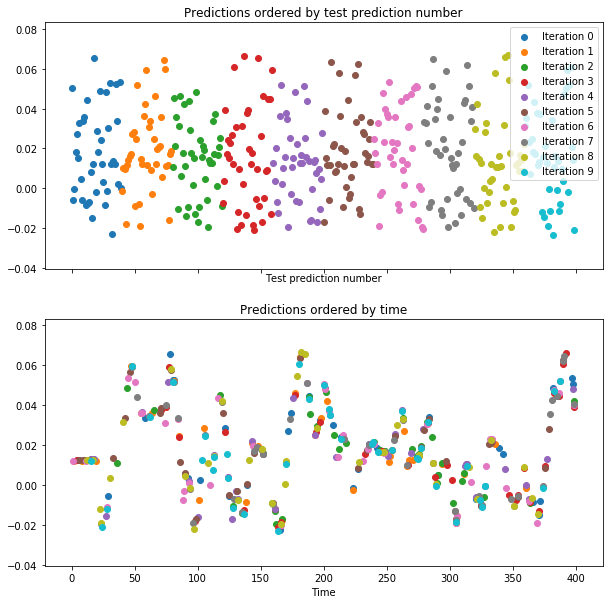

In [0]:
# Custom function to quickly visualize predictions
visualize_predictions(results)

**Cross-validation without shuffling**

Now, re-run your model fit using block cross-validation (without shuffling all datapoints). In this case, neighboring time-points will be kept close to one another. How do you think the model predictions will look in each cross-validation loop?



*   Instantiate another cross-validation object, this time using KFold cross-validation with 10 splits and no shuffling.

*   Iterate through this object to fit a model using the training indices and generate predictions using the test indices.

*   Visualize the predictions across CV splits using the helper function (visualize_predictions()) we've provided.




In [0]:
# Create KFold cross-validation object
from sklearn.model_selection import KFold

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
cv = KFold(n_splits=10, shuffle=False, random_state=1)

In [0]:
# Fit the model
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# Iterate through CV splits
results = []
for tr, tt in cv.split(X, y):
    # Fit the model on training data
    model.fit(X[tr], y[tr])
    
    # Generate predictions on the test data and collect
    prediction = model.predict(X[tt])
    results.append((prediction, tt))

In [0]:
len(prediction)

40

In [0]:
len(results)

10

In [0]:
def visualize_predictions(results):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
    
    # Loop through our model results to visualize them
    for ii, (prediction, indices) in enumerate(results):
        # Plot the predictions of the model in the order they were generated
        offset = len(prediction) * ii
        axs[0].scatter(np.arange(len(prediction)) + offset, prediction, label='Iteration {}'.format(ii))
        
        # Plot the predictions of the model according to how time was ordered
        axs[1].scatter(indices, prediction)
    axs[0].legend(loc="best")
    axs[0].set(xlabel="Test prediction number", title="Predictions ordered by test prediction number")
    axs[1].set(xlabel="Time", title="Predictions ordered by time")
    plt.show()

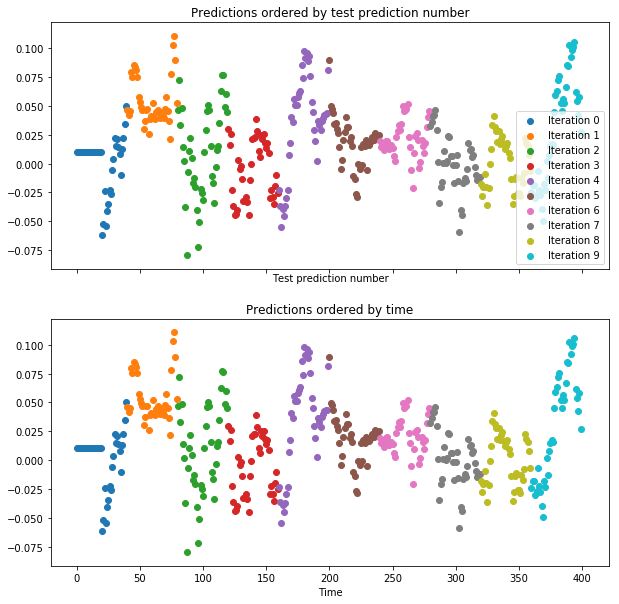

In [0]:
# Custom function to quickly visualize predictions
visualize_predictions(results)

**Time-based cross-validation**

The size of the training set grew each time when you used the time series cross-validation object. This way, the time points you predict are always *after* the timepoints we train on.

In [0]:
# Import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit

In [0]:
# Create time-series cross-validation object
cv = TimeSeriesSplit(n_splits=10)

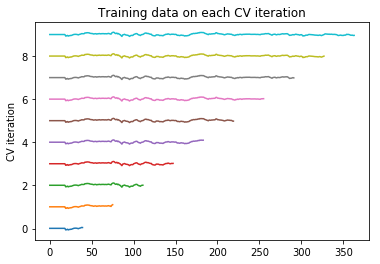

In [0]:
# Iterate through CV splits
fig, ax = plt.subplots()
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Plot the training data on each iteration, to see the behavior of the CV
    ax.plot(tr, ii + y[tr])

ax.set(title='Training data on each CV iteration', ylabel='CV iteration')
plt.show()

#### Stationarity and stability

In [0]:
from sklearn.utils import resample

**Bootstrapping a confidence interval**

A useful tool for assessing the variability of some data is the bootstrap. In this exercise, you'll write your own bootstrapping function that can be used to return a bootstrapped confidence interval.

This function takes three parameters: a 2-D array of numbers (data), a list of percentiles to calculate (percentiles), and the number of boostrap iterations to use (n_boots). It uses the resample function to generate a bootstrap sample, and then repeats this many times to calculate the confidence interval.

.


*Task - Inside the loop:*


*   Take a random sample of the data, with replacement, and calculate the mean of this random sample

*   Compute the percentiles of bootstrap_means and return it



In [0]:
def bootstrap_interval(data, percentiles=(2.5, 97.5), n_boots=100):
    """Bootstrap a confidence interval for the mean of columns of a 2-D dataset."""
    # Create our empty array to fill the results
    bootstrap_means = np.zeros([n_boots, data.shape[-1]])
    for ii in range(n_boots):
        # Generate random indices for our data *with* replacement, then take the sample mean
        random_sample = resample(data)
        bootstrap_means[ii] = random_sample.mean(axis=0)
        
    # Compute the percentiles of choice for the bootstrapped means
    percentiles = np.percentile(bootstrap_means, percentiles, axis=0)
    return percentiles

**Calculating variability in model coefficients**

In this lesson, you'll re-run the cross-validation routine used before, but this time paying attention to the model's stability over time. You'll investigate the coefficients of the model, as well as the uncertainty in its predictions.

Begin by assessing the stability (or uncertainty) of a model's coefficients across multiple CV splits. Remember, the coefficients are a reflection of the pattern that your model has found in the data.


In [0]:
#@title
X = np.array([[  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [  7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [ -6.25147361e-02,  -8.53990173e-02,  -4.93689146e-02,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [ -5.24455801e-02,  -7.20219021e-02,  -3.40156627e-02,
         -6.25147361e-02,  -8.53990173e-02,  -4.93689146e-02,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [ -3.15750173e-02,  -4.79678578e-02,  -1.99242637e-02,
         -5.24455801e-02,  -7.20219021e-02,  -3.40156627e-02,
         -6.25147361e-02,  -8.53990173e-02,  -4.93689146e-02,
          7.96088446e-03,   7.96088446e-03,   7.96088446e-03],
       [ -6.36635250e-02,  -7.05276628e-02,  -7.11474518e-02,
         -3.15750173e-02,  -4.79678578e-02,  -1.99242637e-02,
         -5.24455801e-02,  -7.20219021e-02,  -3.40156627e-02,
         -6.25147361e-02,  -8.53990173e-02,  -4.93689146e-02],
       [ -4.24852730e-02,  -5.41718617e-02,  -4.47881974e-02,
         -6.36635250e-02,  -7.05276628e-02,  -7.11474518e-02,
         -3.15750173e-02,  -4.79678578e-02,  -1.99242637e-02,
         -5.24455801e-02,  -7.20219021e-02,  -3.40156627e-02],
       [ -4.49818884e-02,  -6.19833381e-02,  -3.96190388e-02,
         -4.24852730e-02,  -5.41718617e-02,  -4.47881974e-02,
         -6.36635250e-02,  -7.05276628e-02,  -7.11474518e-02,
         -3.15750173e-02,  -4.79678578e-02,  -1.99242637e-02],
       [ -3.07851291e-02,  -5.15105371e-02,  -4.10434196e-02,
         -4.49818884e-02,  -6.19833381e-02,  -3.96190388e-02,
         -4.24852730e-02,  -5.41718617e-02,  -4.47881974e-02,
         -6.36635250e-02,  -7.05276628e-02,  -7.11474518e-02],
       [ -3.31726493e-02,  -6.35095112e-02,  -1.75620742e-02,
         -3.07851291e-02,  -5.15105371e-02,  -4.10434196e-02,
         -4.49818884e-02,  -6.19833381e-02,  -3.96190388e-02,
         -4.24852730e-02,  -5.41718617e-02,  -4.47881974e-02],
       [ -1.15791283e-02,  -3.01505885e-02,   3.24711065e-02,
         -3.31726493e-02,  -6.35095112e-02,  -1.75620742e-02,
         -3.07851291e-02,  -5.15105371e-02,  -4.10434196e-02,
         -4.49818884e-02,  -6.19833381e-02,  -3.96190388e-02],
       [ -2.54747006e-04,  -2.71374084e-02,   4.80384086e-02,
         -1.15791283e-02,  -3.01505885e-02,   3.24711065e-02,
         -3.31726493e-02,  -6.35095112e-02,  -1.75620742e-02,
         -3.07851291e-02,  -5.15105371e-02,  -4.10434196e-02],
       [  1.62939272e-02,  -6.21139094e-03,   6.65544257e-02,
         -2.54747006e-04,  -2.71374084e-02,   4.80384086e-02,
         -1.15791283e-02,  -3.01505885e-02,   3.24711065e-02,
         -3.31726493e-02,  -6.35095112e-02,  -1.75620742e-02],
       [  1.51543316e-02,   2.72776869e-04,   7.59951817e-02,
          1.62939272e-02,  -6.21139094e-03,   6.65544257e-02,
         -2.54747006e-04,  -2.71374084e-02,   4.80384086e-02,
         -1.15791283e-02,  -3.01505885e-02,   3.24711065e-02],
       [  1.95276278e-02,   9.98836625e-03,   3.89858324e-03,
          1.51543316e-02,   2.72776869e-04,   7.59951817e-02,
          1.62939272e-02,  -6.21139094e-03,   6.65544257e-02,
         -2.54747006e-04,  -2.71374084e-02,   4.80384086e-02],
       [  1.45762768e-02,   1.48793198e-02,  -3.17333081e-04,
          1.95276278e-02,   9.98836625e-03,   3.89858324e-03,
          1.51543316e-02,   2.72776869e-04,   7.59951817e-02,
          1.62939272e-02,  -6.21139094e-03,   6.65544257e-02],
       [  7.24220999e-03,   1.00555975e-02,   1.11032864e-03,
          1.45762768e-02,   1.48793198e-02,  -3.17333081e-04,
          1.95276278e-02,   9.98836625e-03,   3.89858324e-03,
          1.51543316e-02,   2.72776869e-04,   7.59951817e-02],
       [ -8.94930245e-03,   4.15793272e-03,  -2.25953445e-02,
          7.24220999e-03,   1.00555975e-02,   1.11032864e-03,
          1.45762768e-02,   1.48793198e-02,  -3.17333081e-04,
          1.95276278e-02,   9.98836625e-03,   3.89858324e-03],
       [  1.15333555e-02,   2.00068871e-02,  -2.09456698e-03,
         -8.94930245e-03,   4.15793272e-03,  -2.25953445e-02,
          7.24220999e-03,   1.00555975e-02,   1.11032864e-03,
          1.45762768e-02,   1.48793198e-02,  -3.17333081e-04],
       [  2.02427278e-02,  -1.55167063e-03,  -1.08250500e-02,
          1.15333555e-02,   2.00068871e-02,  -2.09456698e-03,
         -8.94930245e-03,   4.15793272e-03,  -2.25953445e-02,
          7.24220999e-03,   1.00555975e-02,   1.11032864e-03],
       [  3.27315712e-02,   3.72657948e-03,  -2.38487252e-02,
          2.02427278e-02,  -1.55167063e-03,  -1.08250500e-02,
          1.15333555e-02,   2.00068871e-02,  -2.09456698e-03,
         -8.94930245e-03,   4.15793272e-03,  -2.25953445e-02],
       [  5.12798384e-02,   3.41249871e-02,   1.27162876e-02,
          3.27315712e-02,   3.72657948e-03,  -2.38487252e-02,
          2.02427278e-02,  -1.55167063e-03,  -1.08250500e-02,
          1.15333555e-02,   2.00068871e-02,  -2.09456698e-03],
       [  4.66241899e-02,   2.75743510e-02,   1.12196201e-02,
          5.12798384e-02,   3.41249871e-02,   1.27162876e-02,
          3.27315712e-02,   3.72657948e-03,  -2.38487252e-02,
          2.02427278e-02,  -1.55167063e-03,  -1.08250500e-02],
       [  4.54477298e-02,   1.51676332e-02,  -1.70616726e-03,
          4.66241899e-02,   2.75743510e-02,   1.12196201e-02,
          5.12798384e-02,   3.41249871e-02,   1.27162876e-02,
          3.27315712e-02,   3.72657948e-03,  -2.38487252e-02],
       [  4.95534296e-02,   3.04267289e-02,   8.85347499e-04,
          4.54477298e-02,   1.51676332e-02,  -1.70616726e-03,
          4.66241899e-02,   2.75743510e-02,   1.12196201e-02,
          5.12798384e-02,   3.41249871e-02,   1.27162876e-02],
       [  8.52880307e-02,   4.38559832e-02,   2.90517948e-02,
          4.95534296e-02,   3.04267289e-02,   8.85347499e-04,
          4.54477298e-02,   1.51676332e-02,  -1.70616726e-03,
          4.66241899e-02,   2.75743510e-02,   1.12196201e-02],
       [  7.93181324e-02,   7.05685769e-02,   1.10387741e-02,
          8.52880307e-02,   4.38559832e-02,   2.90517948e-02,
          4.95534296e-02,   3.04267289e-02,   8.85347499e-04,
          4.54477298e-02,   1.51676332e-02,  -1.70616726e-03],
       [  9.16637269e-02,   6.56556055e-02,   4.62817101e-02,
          7.93181324e-02,   7.05685769e-02,   1.10387741e-02,
          8.52880307e-02,   4.38559832e-02,   2.90517948e-02,
          4.95534296e-02,   3.04267289e-02,   8.85347499e-04],
       [  9.30173344e-02,   7.70815686e-02,   4.37865018e-02,
          9.16637269e-02,   6.56556055e-02,   4.62817101e-02,
          7.93181324e-02,   7.05685769e-02,   1.10387741e-02,
          8.52880307e-02,   4.38559832e-02,   2.90517948e-02],
       [  8.79529574e-02,   5.33253444e-02,   1.61787748e-02,
          9.30173344e-02,   7.70815686e-02,   4.37865018e-02,
          9.16637269e-02,   6.56556055e-02,   4.62817101e-02,
          7.93181324e-02,   7.05685769e-02,   1.10387741e-02],
       [  8.58621845e-02,   3.53946772e-02,   1.95035493e-02,
          8.79529574e-02,   5.33253444e-02,   1.61787748e-02,
          9.30173344e-02,   7.70815686e-02,   4.37865018e-02,
          9.16637269e-02,   6.56556055e-02,   4.62817101e-02],
       [  6.55896058e-02,   4.02820042e-02,   1.44999720e-02,
          8.58621845e-02,   3.53946772e-02,   1.95035493e-02,
          8.79529574e-02,   5.33253444e-02,   1.61787748e-02,
          9.30173344e-02,   7.70815686e-02,   4.37865018e-02],
       [  6.30493272e-02,   3.03633584e-02,   5.16408547e-02,
          6.55896058e-02,   4.02820042e-02,   1.44999720e-02,
          8.58621845e-02,   3.53946772e-02,   1.95035493e-02,
          8.79529574e-02,   5.33253444e-02,   1.61787748e-02],
       [  5.57230564e-02,   3.60211432e-02,   7.20409024e-02,
          6.30493272e-02,   3.03633584e-02,   5.16408547e-02,
          6.55896058e-02,   4.02820042e-02,   1.44999720e-02,
          8.58621845e-02,   3.53946772e-02,   1.95035493e-02],
       [  5.26893509e-02,   3.65001282e-02,   2.95449756e-02,
          5.57230564e-02,   3.60211432e-02,   7.20409024e-02,
          6.30493272e-02,   3.03633584e-02,   5.16408547e-02,
          6.55896058e-02,   4.02820042e-02,   1.44999720e-02],
       [  3.55740612e-02,   2.56781309e-02,   1.43918354e-02,
          5.26893509e-02,   3.65001282e-02,   2.95449756e-02,
          5.57230564e-02,   3.60211432e-02,   7.20409024e-02,
          6.30493272e-02,   3.03633584e-02,   5.16408547e-02],
       [  4.16463546e-02,   1.62689383e-02,   2.88194912e-02,
          3.55740612e-02,   2.56781309e-02,   1.43918354e-02,
          5.26893509e-02,   3.65001282e-02,   2.95449756e-02,
          5.57230564e-02,   3.60211432e-02,   7.20409024e-02],
       [  5.12767337e-02,  -6.13471362e-03,   4.56838185e-02,
          4.16463546e-02,   1.62689383e-02,   2.88194912e-02,
          3.55740612e-02,   2.56781309e-02,   1.43918354e-02,
          5.26893509e-02,   3.65001282e-02,   2.95449756e-02],
       [  4.88867498e-02,  -3.84503564e-03,   6.46452208e-03,
          5.12767337e-02,  -6.13471362e-03,   4.56838185e-02,
          4.16463546e-02,   1.62689383e-02,   2.88194912e-02,
          3.55740612e-02,   2.56781309e-02,   1.43918354e-02],
       [  2.96656072e-02,   7.60381159e-03,   6.63020563e-03,
          4.88867498e-02,  -3.84503564e-03,   6.46452208e-03,
          5.12767337e-02,  -6.13471362e-03,   4.56838185e-02,
          4.16463546e-02,   1.62689383e-02,   2.88194912e-02],
       [  4.34768023e-02,   1.78462055e-02,   3.13613556e-03,
          2.96656072e-02,   7.60381159e-03,   6.63020563e-03,
          4.88867498e-02,  -3.84503564e-03,   6.46452208e-03,
          5.12767337e-02,  -6.13471362e-03,   4.56838185e-02],
       [  4.47657356e-02,   1.66073568e-02,   1.43499392e-02,
          4.34768023e-02,   1.78462055e-02,   3.13613556e-03,
          2.96656072e-02,   7.60381159e-03,   6.63020563e-03,
          4.88867498e-02,  -3.84503564e-03,   6.46452208e-03],
       [  5.44477421e-02,   1.69497501e-02,   1.61691028e-02,
          4.47657356e-02,   1.66073568e-02,   1.43499392e-02,
          4.34768023e-02,   1.78462055e-02,   3.13613556e-03,
          2.96656072e-02,   7.60381159e-03,   6.63020563e-03],
       [  4.41318678e-02,   8.67140368e-03,  -1.20971450e-04,
          5.44477421e-02,   1.69497501e-02,   1.61691028e-02,
          4.47657356e-02,   1.66073568e-02,   1.43499392e-02,
          4.34768023e-02,   1.78462055e-02,   3.13613556e-03],
       [  4.25199200e-02,  -8.26680111e-03,  -1.26743226e-02,
          4.41318678e-02,   8.67140368e-03,  -1.20971450e-04,
          5.44477421e-02,   1.69497501e-02,   1.61691028e-02,
          4.47657356e-02,   1.66073568e-02,   1.43499392e-02],
       [  4.94998320e-02,   4.38650413e-03,   2.08189665e-03,
          4.25199200e-02,  -8.26680111e-03,  -1.26743226e-02,
          4.41318678e-02,   8.67140368e-03,  -1.20971450e-04,
          5.44477421e-02,   1.69497501e-02,   1.61691028e-02],
       [  4.94028556e-02,   2.93618289e-02,  -2.42176453e-02,
          4.94998320e-02,   4.38650413e-03,   2.08189665e-03,
          4.25199200e-02,  -8.26680111e-03,  -1.26743226e-02,
          4.41318678e-02,   8.67140368e-03,  -1.20971450e-04],
       [  5.00468867e-02,   2.50400155e-02,  -1.64409094e-02,
          4.94028556e-02,   2.93618289e-02,  -2.42176453e-02,
          4.94998320e-02,   4.38650413e-03,   2.08189665e-03,
          4.25199200e-02,  -8.26680111e-03,  -1.26743226e-02],
       [  4.34328058e-02,   5.39356534e-02,  -3.12330577e-02,
          5.00468867e-02,   2.50400155e-02,  -1.64409094e-02,
          4.94028556e-02,   2.93618289e-02,  -2.42176453e-02,
          4.94998320e-02,   4.38650413e-03,   2.08189665e-03],
       [  4.79682519e-02,   6.14795749e-02,  -2.40060321e-02,
          4.34328058e-02,   5.39356534e-02,  -3.12330577e-02,
          5.00468867e-02,   2.50400155e-02,  -1.64409094e-02,
          4.94028556e-02,   2.93618289e-02,  -2.42176453e-02],
       [  4.65091674e-02,   6.46759075e-02,  -5.41624263e-03,
          4.79682519e-02,   6.14795749e-02,  -2.40060321e-02,
          4.34328058e-02,   5.39356534e-02,  -3.12330577e-02,
          5.00468867e-02,   2.50400155e-02,  -1.64409094e-02],
       [  4.27403985e-02,   9.31704365e-02,   1.48504555e-02,
          4.65091674e-02,   6.46759075e-02,  -5.41624263e-03,
          4.79682519e-02,   6.14795749e-02,  -2.40060321e-02,
          4.34328058e-02,   5.39356534e-02,  -3.12330577e-02],
       [  5.24783903e-02,   9.88671385e-02,   2.78037914e-02,
          4.27403985e-02,   9.31704365e-02,   1.48504555e-02,
          4.65091674e-02,   6.46759075e-02,  -5.41624263e-03,
          4.79682519e-02,   6.14795749e-02,  -2.40060321e-02],
       [  6.11543805e-02,   1.27471151e-01,   3.59662355e-02,
          5.24783903e-02,   9.88671385e-02,   2.78037914e-02,
          4.27403985e-02,   9.31704365e-02,   1.48504555e-02,
          4.65091674e-02,   6.46759075e-02,  -5.41624263e-03],
       [  4.89624455e-02,   7.18432636e-02,  -2.03107451e-02,
          6.11543805e-02,   1.27471151e-01,   3.59662355e-02,
          5.24783903e-02,   9.88671385e-02,   2.78037914e-02,
          4.27403985e-02,   9.31704365e-02,   1.48504555e-02],
       [  4.17168066e-02,   7.90253191e-02,  -2.43444920e-02,
          4.89624455e-02,   7.18432636e-02,  -2.03107451e-02,
          6.11543805e-02,   1.27471151e-01,   3.59662355e-02,
          5.24783903e-02,   9.88671385e-02,   2.78037914e-02],
       [  2.61777335e-02,   7.16542791e-02,  -1.92656402e-02,
          4.17168066e-02,   7.90253191e-02,  -2.43444920e-02,
          4.89624455e-02,   7.18432636e-02,  -2.03107451e-02,
          6.11543805e-02,   1.27471151e-01,   3.59662355e-02],
       [  8.36742056e-02,   1.01456950e-02,  -4.21234678e-02,
          2.61777335e-02,   7.16542791e-02,  -1.92656402e-02,
          4.17168066e-02,   7.90253191e-02,  -2.43444920e-02,
          4.89624455e-02,   7.18432636e-02,  -2.03107451e-02],
       [  1.06714241e-01,   2.15425117e-02,  -3.60642560e-02,
          8.36742056e-02,   1.01456950e-02,  -4.21234678e-02,
          2.61777335e-02,   7.16542791e-02,  -1.92656402e-02,
          4.17168066e-02,   7.90253191e-02,  -2.43444920e-02],
       [  1.15116017e-01,   1.26291075e-02,  -4.74214703e-02,
          1.06714241e-01,   2.15425117e-02,  -3.60642560e-02,
          8.36742056e-02,   1.01456950e-02,  -4.21234678e-02,
          2.61777335e-02,   7.16542791e-02,  -1.92656402e-02],
       [  1.00120522e-01,  -5.02895692e-03,  -3.55034837e-02,
          1.15116017e-01,   1.26291075e-02,  -4.74214703e-02,
          1.06714241e-01,   2.15425117e-02,  -3.60642560e-02,
          8.36742056e-02,   1.01456950e-02,  -4.21234678e-02],
       [  6.12072111e-02,  -3.43335950e-02,  -6.00521831e-02,
          1.00120522e-01,  -5.02895692e-03,  -3.55034837e-02,
          1.15116017e-01,   1.26291075e-02,  -4.74214703e-02,
          1.06714241e-01,   2.15425117e-02,  -3.60642560e-02],
       [  5.35441546e-02,  -4.49252631e-02,  -5.39516108e-02,
          6.12072111e-02,  -3.43335950e-02,  -6.00521831e-02,
          1.00120522e-01,  -5.02895692e-03,  -3.55034837e-02,
          1.15116017e-01,   1.26291075e-02,  -4.74214703e-02],
       [  7.58306338e-02,  -3.30194763e-02,  -2.15273116e-02,
          5.35441546e-02,  -4.49252631e-02,  -5.39516108e-02,
          6.12072111e-02,  -3.43335950e-02,  -6.00521831e-02,
          1.00120522e-01,  -5.02895692e-03,  -3.55034837e-02],
       [  3.84441701e-02,  -6.00083037e-02,  -7.51378704e-02,
          7.58306338e-02,  -3.30194763e-02,  -2.15273116e-02,
          5.35441546e-02,  -4.49252631e-02,  -5.39516108e-02,
          6.12072111e-02,  -3.43335950e-02,  -6.00521831e-02],
       [  5.43767369e-02,  -3.61823643e-02,  -8.01009325e-02,
          3.84441701e-02,  -6.00083037e-02,  -7.51378704e-02,
          7.58306338e-02,  -3.30194763e-02,  -2.15273116e-02,
          5.35441546e-02,  -4.49252631e-02,  -5.39516108e-02],
       [  1.83259872e-02,  -7.20890426e-02,  -1.22738363e-01,
          5.43767369e-02,  -3.61823643e-02,  -8.01009325e-02,
          3.84441701e-02,  -6.00083037e-02,  -7.51378704e-02,
          7.58306338e-02,  -3.30194763e-02,  -2.15273116e-02],
       [  3.97558822e-03,  -6.08776283e-02,  -1.31051876e-01,
          1.83259872e-02,  -7.20890426e-02,  -1.22738363e-01,
          5.43767369e-02,  -3.61823643e-02,  -8.01009325e-02,
          3.84441701e-02,  -6.00083037e-02,  -7.51378704e-02],
       [ -3.74111429e-02,  -9.09964976e-02,  -1.42593823e-01,
          3.97558822e-03,  -6.08776283e-02,  -1.31051876e-01,
          1.83259872e-02,  -7.20890426e-02,  -1.22738363e-01,
          5.43767369e-02,  -3.61823643e-02,  -8.01009325e-02],
       [ -7.88707080e-02,  -1.22750316e-01,  -1.49544691e-01,
         -3.74111429e-02,  -9.09964976e-02,  -1.42593823e-01,
          3.97558822e-03,  -6.08776283e-02,  -1.31051876e-01,
          1.83259872e-02,  -7.20890426e-02,  -1.22738363e-01],
       [ -6.75292962e-03,  -5.63851321e-02,  -1.03390157e-01,
         -7.88707080e-02,  -1.22750316e-01,  -1.49544691e-01,
         -3.74111429e-02,  -9.09964976e-02,  -1.42593823e-01,
          3.97558822e-03,  -6.08776283e-02,  -1.31051876e-01],
       [  7.59711549e-04,  -4.63970982e-02,  -1.04243056e-01,
         -6.75292962e-03,  -5.63851321e-02,  -1.03390157e-01,
         -7.88707080e-02,  -1.22750316e-01,  -1.49544691e-01,
         -3.74111429e-02,  -9.09964976e-02,  -1.42593823e-01],
       [  2.02212390e-02,  -3.71088807e-02,  -7.63014969e-02,
          7.59711549e-04,  -4.63970982e-02,  -1.04243056e-01,
         -6.75292962e-03,  -5.63851321e-02,  -1.03390157e-01,
         -7.88707080e-02,  -1.22750316e-01,  -1.49544691e-01],
       [  2.99544112e-03,  -4.90868405e-02,  -6.79101229e-02,
          2.02212390e-02,  -3.71088807e-02,  -7.63014969e-02,
          7.59711549e-04,  -4.63970982e-02,  -1.04243056e-01,
         -6.75292962e-03,  -5.63851321e-02,  -1.03390157e-01],
       [ -1.68313724e-02,  -2.82406982e-02,  -1.68725950e-01,
          2.99544112e-03,  -4.90868405e-02,  -6.79101229e-02,
          2.02212390e-02,  -3.71088807e-02,  -7.63014969e-02,
          7.59711549e-04,  -4.63970982e-02,  -1.04243056e-01],
       [ -1.66351543e-02,  -2.92972277e-02,  -1.55338812e-01,
         -1.68313724e-02,  -2.82406982e-02,  -1.68725950e-01,
          2.99544112e-03,  -4.90868405e-02,  -6.79101229e-02,
          2.02212390e-02,  -3.71088807e-02,  -7.63014969e-02],
       [ -2.57399812e-02,  -3.72371650e-02,  -1.71820233e-01,
         -1.66351543e-02,  -2.92972277e-02,  -1.55338812e-01,
         -1.68313724e-02,  -2.82406982e-02,  -1.68725950e-01,
          2.99544112e-03,  -4.90868405e-02,  -6.79101229e-02],
       [ -3.99213910e-02,  -4.73755952e-02,  -1.46668544e-01,
         -2.57399812e-02,  -3.72371650e-02,  -1.71820233e-01,
         -1.66351543e-02,  -2.92972277e-02,  -1.55338812e-01,
         -1.68313724e-02,  -2.82406982e-02,  -1.68725950e-01],
       [ -7.74201490e-02,  -8.33865727e-02,  -1.55103498e-01,
         -3.99213910e-02,  -4.73755952e-02,  -1.46668544e-01,
         -2.57399812e-02,  -3.72371650e-02,  -1.71820233e-01,
         -1.66351543e-02,  -2.92972277e-02,  -1.55338812e-01],
       [ -5.33324307e-02,  -5.26315728e-02,  -1.24357393e-01,
         -7.74201490e-02,  -8.33865727e-02,  -1.55103498e-01,
         -3.99213910e-02,  -4.73755952e-02,  -1.46668544e-01,
         -2.57399812e-02,  -3.72371650e-02,  -1.71820233e-01],
       [ -3.05689974e-02,  -4.30724325e-02,  -1.37727186e-01,
         -5.33324307e-02,  -5.26315728e-02,  -1.24357393e-01,
         -7.74201490e-02,  -8.33865727e-02,  -1.55103498e-01,
         -3.99213910e-02,  -4.73755952e-02,  -1.46668544e-01],
       [ -3.35656268e-02,  -5.29999644e-02,  -1.02278651e-01,
         -3.05689974e-02,  -4.30724325e-02,  -1.37727186e-01,
         -5.33324307e-02,  -5.26315728e-02,  -1.24357393e-01,
         -7.74201490e-02,  -8.33865727e-02,  -1.55103498e-01],
       [ -3.46604130e-02,  -3.98390706e-02,  -8.62283580e-02,
         -3.35656268e-02,  -5.29999644e-02,  -1.02278651e-01,
         -3.05689974e-02,  -4.30724325e-02,  -1.37727186e-01,
         -5.33324307e-02,  -5.26315728e-02,  -1.24357393e-01],
       [  7.02075970e-03,  -2.00519378e-02,  -1.80314689e-02,
         -3.46604130e-02,  -3.98390706e-02,  -8.62283580e-02,
         -3.35656268e-02,  -5.29999644e-02,  -1.02278651e-01,
         -3.05689974e-02,  -4.30724325e-02,  -1.37727186e-01],
       [  2.27079211e-02,  -3.92589875e-02,  -3.60617761e-02,
          7.02075970e-03,  -2.00519378e-02,  -1.80314689e-02,
         -3.46604130e-02,  -3.98390706e-02,  -8.62283580e-02,
         -3.35656268e-02,  -5.29999644e-02,  -1.02278651e-01],
       [  4.04986228e-02,  -5.42815420e-02,  -6.85113016e-02,
          2.27079211e-02,  -3.92589875e-02,  -3.60617761e-02,
          7.02075970e-03,  -2.00519378e-02,  -1.80314689e-02,
         -3.46604130e-02,  -3.98390706e-02,  -8.62283580e-02],
       [  5.24697433e-02,  -4.00718834e-02,  -5.01120151e-02,
          4.04986228e-02,  -5.42815420e-02,  -6.85113016e-02,
          2.27079211e-02,  -3.92589875e-02,  -3.60617761e-02,
          7.02075970e-03,  -2.00519378e-02,  -1.80314689e-02],
       [  4.74104894e-02,  -1.99899650e-02,  -4.49238076e-02,
          5.24697433e-02,  -4.00718834e-02,  -5.01120151e-02,
          4.04986228e-02,  -5.42815420e-02,  -6.85113016e-02,
          2.27079211e-02,  -3.92589875e-02,  -3.60617761e-02],
       [  1.53199151e-02,  -4.57376217e-02,  -8.46107904e-02,
          4.74104894e-02,  -1.99899650e-02,  -4.49238076e-02,
          5.24697433e-02,  -4.00718834e-02,  -5.01120151e-02,
          4.04986228e-02,  -5.42815420e-02,  -6.85113016e-02],
       [ -8.75265704e-03,  -4.86308881e-02,  -1.23510771e-01,
          1.53199151e-02,  -4.57376217e-02,  -8.46107904e-02,
          4.74104894e-02,  -1.99899650e-02,  -4.49238076e-02,
          5.24697433e-02,  -4.00718834e-02,  -5.01120151e-02],
       [ -1.44874465e-02,  -5.37746586e-02,  -1.37310645e-01,
         -8.75265704e-03,  -4.86308881e-02,  -1.23510771e-01,
          1.53199151e-02,  -4.57376217e-02,  -8.46107904e-02,
          4.74104894e-02,  -1.99899650e-02,  -4.49238076e-02],
       [ -3.72771218e-02,  -5.50175992e-02,  -1.46989836e-01,
         -1.44874465e-02,  -5.37746586e-02,  -1.37310645e-01,
         -8.75265704e-03,  -4.86308881e-02,  -1.23510771e-01,
          1.53199151e-02,  -4.57376217e-02,  -8.46107904e-02],
       [ -4.42179874e-03,  -2.27535902e-02,  -9.86039124e-02,
         -3.72771218e-02,  -5.50175992e-02,  -1.46989836e-01,
         -1.44874465e-02,  -5.37746586e-02,  -1.37310645e-01,
         -8.75265704e-03,  -4.86308881e-02,  -1.23510771e-01],
       [  9.15778596e-03,  -6.93922199e-03,  -6.50589133e-02,
         -4.42179874e-03,  -2.27535902e-02,  -9.86039124e-02,
         -3.72771218e-02,  -5.50175992e-02,  -1.46989836e-01,
         -1.44874465e-02,  -5.37746586e-02,  -1.37310645e-01],
       [  1.22887185e-02,  -1.10142773e-02,  -7.99266806e-02,
          9.15778596e-03,  -6.93922199e-03,  -6.50589133e-02,
         -4.42179874e-03,  -2.27535902e-02,  -9.86039124e-02,
         -3.72771218e-02,  -5.50175992e-02,  -1.46989836e-01],
       [  3.38129443e-02,   2.41441034e-02,  -2.78159341e-02,
          1.22887185e-02,  -1.10142773e-02,  -7.99266806e-02,
          9.15778596e-03,  -6.93922199e-03,  -6.50589133e-02,
         -4.42179874e-03,  -2.27535902e-02,  -9.86039124e-02],
       [  6.22774219e-02,   1.50020693e-02,  -3.74053030e-02,
          3.38129443e-02,   2.41441034e-02,  -2.78159341e-02,
          1.22887185e-02,  -1.10142773e-02,  -7.99266806e-02,
          9.15778596e-03,  -6.93922199e-03,  -6.50589133e-02],
       [  7.63830120e-02,   2.32686598e-02,   3.67440453e-03,
          6.22774219e-02,   1.50020693e-02,  -3.74053030e-02,
          3.38129443e-02,   2.41441034e-02,  -2.78159341e-02,
          1.22887185e-02,  -1.10142773e-02,  -7.99266806e-02],
       [  7.74351444e-02,   1.75765095e-02,   1.12943009e-02,
          7.63830120e-02,   2.32686598e-02,   3.67440453e-03,
          6.22774219e-02,   1.50020693e-02,  -3.74053030e-02,
          3.38129443e-02,   2.41441034e-02,  -2.78159341e-02],
       [  5.51715180e-02,  -4.23816415e-03,  -1.07084020e-02,
          7.74351444e-02,   1.75765095e-02,   1.12943009e-02,
          7.63830120e-02,   2.32686598e-02,   3.67440453e-03,
          6.22774219e-02,   1.50020693e-02,  -3.74053030e-02],
       [  6.44219834e-02,  -1.09696782e-02,  -4.63288611e-02,
          5.51715180e-02,  -4.23816415e-03,  -1.07084020e-02,
          7.74351444e-02,   1.75765095e-02,   1.12943009e-02,
          7.63830120e-02,   2.32686598e-02,   3.67440453e-03],
       [  4.70949785e-02,  -1.03566127e-03,  -3.08491142e-02,
          6.44219834e-02,  -1.09696782e-02,  -4.63288611e-02,
          5.51715180e-02,  -4.23816415e-03,  -1.07084020e-02,
          7.74351444e-02,   1.75765095e-02,   1.12943009e-02],
       [  3.38347343e-02,  -2.65330800e-02,  -7.46536910e-02,
          4.70949785e-02,  -1.03566127e-03,  -3.08491142e-02,
          6.44219834e-02,  -1.09696782e-02,  -4.63288611e-02,
          5.51715180e-02,  -4.23816415e-03,  -1.07084020e-02],
       [  2.17607429e-02,  -2.49488894e-02,  -6.73813848e-02,
          3.38347343e-02,  -2.65330800e-02,  -7.46536910e-02,
          4.70949785e-02,  -1.03566127e-03,  -3.08491142e-02,
          6.44219834e-02,  -1.09696782e-02,  -4.63288611e-02],
       [  2.58592931e-02,  -2.84315768e-02,  -5.70930389e-02,
          2.17607429e-02,  -2.49488894e-02,  -6.73813848e-02,
          3.38347343e-02,  -2.65330800e-02,  -7.46536910e-02,
          4.70949785e-02,  -1.03566127e-03,  -3.08491142e-02],
       [ -2.19905964e-02,  -7.30096952e-02,  -1.03830055e-01,
          2.58592931e-02,  -2.84315768e-02,  -5.70930389e-02,
          2.17607429e-02,  -2.49488894e-02,  -6.73813848e-02,
          3.38347343e-02,  -2.65330800e-02,  -7.46536910e-02],
       [ -3.82016771e-02,  -8.25803300e-02,  -1.18026824e-01,
         -2.19905964e-02,  -7.30096952e-02,  -1.03830055e-01,
          2.58592931e-02,  -2.84315768e-02,  -5.70930389e-02,
          2.17607429e-02,  -2.49488894e-02,  -6.73813848e-02],
       [ -4.76428709e-02,  -6.07984844e-02,  -9.30745884e-02,
         -3.82016771e-02,  -8.25803300e-02,  -1.18026824e-01,
         -2.19905964e-02,  -7.30096952e-02,  -1.03830055e-01,
          2.58592931e-02,  -2.84315768e-02,  -5.70930389e-02],
       [ -5.21150596e-02,  -5.91278640e-02,  -9.72930379e-02,
         -4.76428709e-02,  -6.07984844e-02,  -9.30745884e-02,
         -3.82016771e-02,  -8.25803300e-02,  -1.18026824e-01,
         -2.19905964e-02,  -7.30096952e-02,  -1.03830055e-01],
       [ -4.48560952e-02,  -5.22135141e-02,  -1.01776307e-01,
         -5.21150596e-02,  -5.91278640e-02,  -9.72930379e-02,
         -4.76428709e-02,  -6.07984844e-02,  -9.30745884e-02,
         -3.82016771e-02,  -8.25803300e-02,  -1.18026824e-01],
       [ -6.14542260e-03,  -3.18471338e-02,  -5.37830874e-02,
         -4.48560952e-02,  -5.22135141e-02,  -1.01776307e-01,
         -5.21150596e-02,  -5.91278640e-02,  -9.72930379e-02,
         -4.76428709e-02,  -6.07984844e-02,  -9.30745884e-02],
       [ -1.14663968e-02,  -1.73922284e-02,  -8.10620631e-02,
         -6.14542260e-03,  -3.18471338e-02,  -5.37830874e-02,
         -4.48560952e-02,  -5.22135141e-02,  -1.01776307e-01,
         -5.21150596e-02,  -5.91278640e-02,  -9.72930379e-02],
       [ -7.12338635e-03,   3.90333913e-03,  -7.29741196e-02,
         -1.14663968e-02,  -1.73922284e-02,  -8.10620631e-02,
         -6.14542260e-03,  -3.18471338e-02,  -5.37830874e-02,
         -4.48560952e-02,  -5.22135141e-02,  -1.01776307e-01],
       [ -1.72426806e-02,   8.70615827e-03,  -5.03153602e-02,
         -7.12338635e-03,   3.90333913e-03,  -7.29741196e-02,
         -1.14663968e-02,  -1.73922284e-02,  -8.10620631e-02,
         -6.14542260e-03,  -3.18471338e-02,  -5.37830874e-02],
       [ -3.87942110e-02,   4.87232378e-02,  -1.22351821e-02,
         -1.72426806e-02,   8.70615827e-03,  -5.03153602e-02,
         -7.12338635e-03,   3.90333913e-03,  -7.29741196e-02,
         -1.14663968e-02,  -1.73922284e-02,  -8.10620631e-02],
       [ -3.37122951e-02,   3.90677815e-02,   2.48744320e-03,
         -3.87942110e-02,   4.87232378e-02,  -1.22351821e-02,
         -1.72426806e-02,   8.70615827e-03,  -5.03153602e-02,
         -7.12338635e-03,   3.90333913e-03,  -7.29741196e-02],
       [ -3.57889456e-02,   3.95116221e-02,  -2.22264894e-02,
         -3.37122951e-02,   3.90677815e-02,   2.48744320e-03,
         -3.87942110e-02,   4.87232378e-02,  -1.22351821e-02,
         -1.72426806e-02,   8.70615827e-03,  -5.03153602e-02],
       [ -3.77670238e-02,   8.55005344e-03,  -7.66887481e-02,
         -3.57889456e-02,   3.95116221e-02,  -2.22264894e-02,
         -3.37122951e-02,   3.90677815e-02,   2.48744320e-03,
         -3.87942110e-02,   4.87232378e-02,  -1.22351821e-02],
       [ -4.97464938e-02,   2.44233379e-02,  -2.84513101e-02,
         -3.77670238e-02,   8.55005344e-03,  -7.66887481e-02,
         -3.57889456e-02,   3.95116221e-02,  -2.22264894e-02,
         -3.37122951e-02,   3.90677815e-02,   2.48744320e-03],
       [ -2.04248641e-02,   3.16127880e-02,   3.30033003e-03,
         -4.97464938e-02,   2.44233379e-02,  -2.84513101e-02,
         -3.77670238e-02,   8.55005344e-03,  -7.66887481e-02,
         -3.57889456e-02,   3.95116221e-02,  -2.22264894e-02],
       [ -6.82191281e-03,  -5.63093623e-02,  -2.54241480e-02,
         -2.04248641e-02,   3.16127880e-02,   3.30033003e-03,
         -4.97464938e-02,   2.44233379e-02,  -2.84513101e-02,
         -3.77670238e-02,   8.55005344e-03,  -7.66887481e-02],
       [  1.53434848e-02,  -5.38853412e-02,  -2.93751556e-03,
         -6.82191281e-03,  -5.63093623e-02,  -2.54241480e-02,
         -2.04248641e-02,   3.16127880e-02,   3.30033003e-03,
         -4.97464938e-02,   2.44233379e-02,  -2.84513101e-02],
       [  2.10521577e-02,  -4.31261025e-02,  -1.71759537e-02,
          1.53434848e-02,  -5.38853412e-02,  -2.93751556e-03,
         -6.82191281e-03,  -5.63093623e-02,  -2.54241480e-02,
         -2.04248641e-02,   3.16127880e-02,   3.30033003e-03],
       [  1.98850419e-02,  -2.93172546e-02,   4.45981159e-03,
          2.10521577e-02,  -4.31261025e-02,  -1.71759537e-02,
          1.53434848e-02,  -5.38853412e-02,  -2.93751556e-03,
         -6.82191281e-03,  -5.63093623e-02,  -2.54241480e-02],
       [  4.07093951e-02,  -4.10289808e-02,  -1.35671574e-03,
          1.98850419e-02,  -2.93172546e-02,   4.45981159e-03,
          2.10521577e-02,  -4.31261025e-02,  -1.71759537e-02,
          1.53434848e-02,  -5.38853412e-02,  -2.93751556e-03],
       [  2.67292494e-02,  -4.62178791e-02,  -3.27654656e-02,
          4.07093951e-02,  -4.10289808e-02,  -1.35671574e-03,
          1.98850419e-02,  -2.93172546e-02,   4.45981159e-03,
          2.10521577e-02,  -4.31261025e-02,  -1.71759537e-02],
       [  1.35369750e-02,  -5.38848478e-02,  -1.27897039e-01,
          2.67292494e-02,  -4.62178791e-02,  -3.27654656e-02,
          4.07093951e-02,  -4.10289808e-02,  -1.35671574e-03,
          1.98850419e-02,  -2.93172546e-02,   4.45981159e-03],
       [  8.15351038e-03,  -4.44927536e-02,  -1.16614388e-01,
          1.35369750e-02,  -5.38848478e-02,  -1.27897039e-01,
          2.67292494e-02,  -4.62178791e-02,  -3.27654656e-02,
          4.07093951e-02,  -4.10289808e-02,  -1.35671574e-03],
       [  2.40031378e-02,  -3.55679635e-02,  -1.12817904e-01,
          8.15351038e-03,  -4.44927536e-02,  -1.16614388e-01,
          1.35369750e-02,  -5.38848478e-02,  -1.27897039e-01,
          2.67292494e-02,  -4.62178791e-02,  -3.27654656e-02],
       [  2.15364078e-02,  -3.92484039e-02,  -1.31772644e-01,
          2.40031378e-02,  -3.55679635e-02,  -1.12817904e-01,
          8.15351038e-03,  -4.44927536e-02,  -1.16614388e-01,
          1.35369750e-02,  -5.38848478e-02,  -1.27897039e-01],
       [  2.49456329e-02,  -2.10740499e-02,  -8.69811807e-02,
          2.15364078e-02,  -3.92484039e-02,  -1.31772644e-01,
          2.40031378e-02,  -3.55679635e-02,  -1.12817904e-01,
          8.15351038e-03,  -4.44927536e-02,  -1.16614388e-01],
       [  1.89348418e-02,  -2.09606987e-02,  -7.04809287e-02,
          2.49456329e-02,  -2.10740499e-02,  -8.69811807e-02,
          2.15364078e-02,  -3.92484039e-02,  -1.31772644e-01,
          2.40031378e-02,  -3.55679635e-02,  -1.12817904e-01],
       [  1.22348288e-02,  -5.87441165e-03,  -5.51939599e-02,
          1.89348418e-02,  -2.09606987e-02,  -7.04809287e-02,
          2.49456329e-02,  -2.10740499e-02,  -8.69811807e-02,
          2.15364078e-02,  -3.92484039e-02,  -1.31772644e-01],
       [  1.81113324e-02,   4.75372070e-04,  -4.13482676e-02,
          1.22348288e-02,  -5.87441165e-03,  -5.51939599e-02,
          1.89348418e-02,  -2.09606987e-02,  -7.04809287e-02,
          2.49456329e-02,  -2.10740499e-02,  -8.69811807e-02],
       [  6.95847854e-03,   1.10152377e-03,  -7.49288650e-02,
          1.81113324e-02,   4.75372070e-04,  -4.13482676e-02,
          1.22348288e-02,  -5.87441165e-03,  -5.51939599e-02,
          1.89348418e-02,  -2.09606987e-02,  -7.04809287e-02],
       [ -3.01546006e-02,  -2.87472819e-02,  -1.02505452e-01,
          6.95847854e-03,   1.10152377e-03,  -7.49288650e-02,
          1.81113324e-02,   4.75372070e-04,  -4.13482676e-02,
          1.22348288e-02,  -5.87441165e-03,  -5.51939599e-02],
       [ -2.37012885e-02,  -2.47563281e-02,  -8.54687080e-02,
         -3.01546006e-02,  -2.87472819e-02,  -1.02505452e-01,
          6.95847854e-03,   1.10152377e-03,  -7.49288650e-02,
          1.81113324e-02,   4.75372070e-04,  -4.13482676e-02],
       [ -3.45040617e-02,  -2.23602947e-02,  -3.59342916e-02,
         -2.37012885e-02,  -2.47563281e-02,  -8.54687080e-02,
         -3.01546006e-02,  -2.87472819e-02,  -1.02505452e-01,
          6.95847854e-03,   1.10152377e-03,  -7.49288650e-02],
       [ -4.08515817e-02,  -2.05599791e-02,  -5.51116909e-02,
         -3.45040617e-02,  -2.23602947e-02,  -3.59342916e-02,
         -2.37012885e-02,  -2.47563281e-02,  -8.54687080e-02,
         -3.01546006e-02,  -2.87472819e-02,  -1.02505452e-01],
       [ -2.32345572e-02,  -4.65990229e-03,  -3.44808683e-02,
         -4.08515817e-02,  -2.05599791e-02,  -5.51116909e-02,
         -3.45040617e-02,  -2.23602947e-02,  -3.59342916e-02,
         -2.37012885e-02,  -2.47563281e-02,  -8.54687080e-02],
       [ -1.85158358e-02,  -1.20241987e-03,  -2.33840724e-02,
         -2.32345572e-02,  -4.65990229e-03,  -3.44808683e-02,
         -4.08515817e-02,  -2.05599791e-02,  -5.51116909e-02,
         -3.45040617e-02,  -2.23602947e-02,  -3.59342916e-02],
       [ -2.97092317e-02,  -1.16060697e-02,   4.23098279e-02,
         -1.85158358e-02,  -1.20241987e-03,  -2.33840724e-02,
         -2.32345572e-02,  -4.65990229e-03,  -3.44808683e-02,
         -4.08515817e-02,  -2.05599791e-02,  -5.51116909e-02],
       [ -2.86441141e-02,  -1.53701616e-02,   5.46152990e-02,
         -2.97092317e-02,  -1.16060697e-02,   4.23098279e-02,
         -1.85158358e-02,  -1.20241987e-03,  -2.33840724e-02,
         -2.32345572e-02,  -4.65990229e-03,  -3.44808683e-02],
       [ -4.16938095e-02,  -2.40460601e-02,   4.21134942e-02,
         -2.86441141e-02,  -1.53701616e-02,   5.46152990e-02,
         -2.97092317e-02,  -1.16060697e-02,   4.23098279e-02,
         -1.85158358e-02,  -1.20241987e-03,  -2.33840724e-02],
       [ -6.10573086e-02,  -4.08378541e-02,   3.52017937e-02,
         -4.16938095e-02,  -2.40460601e-02,   4.21134942e-02,
         -2.86441141e-02,  -1.53701616e-02,   5.46152990e-02,
         -2.97092317e-02,  -1.16060697e-02,   4.23098279e-02],
       [ -4.53385526e-02,  -4.91753783e-02,   5.89358953e-02,
         -6.10573086e-02,  -4.08378541e-02,   3.52017937e-02,
         -4.16938095e-02,  -2.40460601e-02,   4.21134942e-02,
         -2.86441141e-02,  -1.53701616e-02,   5.46152990e-02],
       [ -5.26141154e-02,  -5.09698643e-02,   4.15035239e-02,
         -4.53385526e-02,  -4.91753783e-02,   5.89358953e-02,
         -6.10573086e-02,  -4.08378541e-02,   3.52017937e-02,
         -4.16938095e-02,  -2.40460601e-02,   4.21134942e-02],
       [ -4.39639349e-02,  -3.27141774e-02,   7.18546184e-02,
         -5.26141154e-02,  -5.09698643e-02,   4.15035239e-02,
         -4.53385526e-02,  -4.91753783e-02,   5.89358953e-02,
         -6.10573086e-02,  -4.08378541e-02,   3.52017937e-02],
       [ -3.64225222e-02,  -4.86646659e-02,   1.56934509e-02,
         -4.39639349e-02,  -3.27141774e-02,   7.18546184e-02,
         -5.26141154e-02,  -5.09698643e-02,   4.15035239e-02,
         -4.53385526e-02,  -4.91753783e-02,   5.89358953e-02],
       [ -3.00972124e-02,  -5.09772545e-02,  -2.07700381e-02,
         -3.64225222e-02,  -4.86646659e-02,   1.56934509e-02,
         -4.39639349e-02,  -3.27141774e-02,   7.18546184e-02,
         -5.26141154e-02,  -5.09698643e-02,   4.15035239e-02],
       [  2.93525360e-03,  -2.81943382e-02,  -1.34776845e-02,
         -3.00972124e-02,  -5.09772545e-02,  -2.07700381e-02,
         -3.64225222e-02,  -4.86646659e-02,   1.56934509e-02,
         -4.39639349e-02,  -3.27141774e-02,   7.18546184e-02],
       [  1.27351620e-02,  -1.50416331e-02,   4.58563536e-03,
          2.93525360e-03,  -2.81943382e-02,  -1.34776845e-02,
         -3.00972124e-02,  -5.09772545e-02,  -2.07700381e-02,
         -3.64225222e-02,  -4.86646659e-02,   1.56934509e-02],
       [  4.09840528e-02,  -3.84941104e-03,   3.91117004e-02,
          1.27351620e-02,  -1.50416331e-02,   4.58563536e-03,
          2.93525360e-03,  -2.81943382e-02,  -1.34776845e-02,
         -3.00972124e-02,  -5.09772545e-02,  -2.07700381e-02],
       [  3.77769494e-02,  -7.45173745e-03,   4.70542807e-02,
          4.09840528e-02,  -3.84941104e-03,   3.91117004e-02,
          1.27351620e-02,  -1.50416331e-02,   4.58563536e-03,
          2.93525360e-03,  -2.81943382e-02,  -1.34776845e-02],
       [  5.87053771e-02,   1.18909288e-02,   7.71850794e-02,
          3.77769494e-02,  -7.45173745e-03,   4.70542807e-02,
          4.09840528e-02,  -3.84941104e-03,   3.91117004e-02,
          1.27351620e-02,  -1.50416331e-02,   4.58563536e-03],
       [  5.64591185e-02,   4.99883748e-03,   5.42322996e-02,
          5.87053771e-02,   1.18909288e-02,   7.71850794e-02,
          3.77769494e-02,  -7.45173745e-03,   4.70542807e-02,
          4.09840528e-02,  -3.84941104e-03,   3.91117004e-02],
       [  5.53085170e-02,   7.98883115e-03,   3.59521360e-02,
          5.64591185e-02,   4.99883748e-03,   5.42322996e-02,
          5.87053771e-02,   1.18909288e-02,   7.71850794e-02,
          3.77769494e-02,  -7.45173745e-03,   4.70542807e-02],
       [  6.66330047e-02,   1.22618447e-02,   9.05756055e-02,
          5.53085170e-02,   7.98883115e-03,   3.59521360e-02,
          5.64591185e-02,   4.99883748e-03,   5.42322996e-02,
          5.87053771e-02,   1.18909288e-02,   7.71850794e-02],
       [  6.63581572e-02,   5.12322919e-03,   7.17114417e-02,
          6.66330047e-02,   1.22618447e-02,   9.05756055e-02,
          5.53085170e-02,   7.98883115e-03,   3.59521360e-02,
          5.64591185e-02,   4.99883748e-03,   5.42322996e-02],
       [  7.13416289e-02,   5.35866946e-02,   6.64965715e-02,
          6.63581572e-02,   5.12322919e-03,   7.17114417e-02,
          6.66330047e-02,   1.22618447e-02,   9.05756055e-02,
          5.53085170e-02,   7.98883115e-03,   3.59521360e-02],
       [  9.26074052e-02,   4.65414176e-02,   6.05164493e-02,
          7.13416289e-02,   5.35866946e-02,   6.64965715e-02,
          6.63581572e-02,   5.12322919e-03,   7.17114417e-02,
          6.66330047e-02,   1.22618447e-02,   9.05756055e-02],
       [  8.18629273e-02,   2.30655916e-02,   5.46669473e-02,
          9.26074052e-02,   4.65414176e-02,   6.05164493e-02,
          7.13416289e-02,   5.35866946e-02,   6.64965715e-02,
          6.63581572e-02,   5.12322919e-03,   7.17114417e-02],
       [  1.06854198e-01,   2.04603581e-02,   6.74045321e-02,
          8.18629273e-02,   2.30655916e-02,   5.46669473e-02,
          9.26074052e-02,   4.65414176e-02,   6.05164493e-02,
          7.13416289e-02,   5.35866946e-02,   6.64965715e-02],
       [  1.00492085e-01,   4.31718744e-02,   1.19981204e-01,
          1.06854198e-01,   2.04603581e-02,   6.74045321e-02,
          8.18629273e-02,   2.30655916e-02,   5.46669473e-02,
          9.26074052e-02,   4.65414176e-02,   6.05164493e-02],
       [  1.06030003e-01,   2.97625941e-02,   1.20714656e-01,
          1.00492085e-01,   4.31718744e-02,   1.19981204e-01,
          1.06854198e-01,   2.04603581e-02,   6.74045321e-02,
          8.18629273e-02,   2.30655916e-02,   5.46669473e-02],
       [  1.00539462e-01,   3.61775007e-02,   1.34707303e-01,
          1.06030003e-01,   2.97625941e-02,   1.20714656e-01,
          1.00492085e-01,   4.31718744e-02,   1.19981204e-01,
          1.06854198e-01,   2.04603581e-02,   6.74045321e-02],
       [  1.02737303e-01,   5.64055370e-02,   1.86109272e-01,
          1.00539462e-01,   3.61775007e-02,   1.34707303e-01,
          1.06030003e-01,   2.97625941e-02,   1.20714656e-01,
          1.00492085e-01,   4.31718744e-02,   1.19981204e-01],
       [  8.74151663e-02,   3.61261743e-02,   1.48441042e-01,
          1.02737303e-01,   5.64055370e-02,   1.86109272e-01,
          1.00539462e-01,   3.61775007e-02,   1.34707303e-01,
          1.06030003e-01,   2.97625941e-02,   1.20714656e-01],
       [  6.12053328e-02,   3.97398844e-02,   1.32112101e-01,
          8.74151663e-02,   3.61261743e-02,   1.48441042e-01,
          1.02737303e-01,   5.64055370e-02,   1.86109272e-01,
          1.00539462e-01,   3.61775007e-02,   1.34707303e-01],
       [  5.41107104e-02,   3.11080836e-02,   1.09025696e-01,
          6.12053328e-02,   3.97398844e-02,   1.32112101e-01,
          8.74151663e-02,   3.61261743e-02,   1.48441042e-01,
          1.02737303e-01,   5.64055370e-02,   1.86109272e-01],
       [  3.34420020e-02,   1.51577995e-02,   7.72292607e-02,
          5.41107104e-02,   3.11080836e-02,   1.09025696e-01,
          6.12053328e-02,   3.97398844e-02,   1.32112101e-01,
          8.74151663e-02,   3.61261743e-02,   1.48441042e-01],
       [  2.27709038e-02,   1.97841050e-02,   3.61810494e-02,
          3.34420020e-02,   1.51577995e-02,   7.72292607e-02,
          5.41107104e-02,   3.11080836e-02,   1.09025696e-01,
          6.12053328e-02,   3.97398844e-02,   1.32112101e-01],
       [  4.18047754e-03,   1.80099054e-02,   1.90389846e-02,
          2.27709038e-02,   1.97841050e-02,   3.61810494e-02,
          3.34420020e-02,   1.51577995e-02,   7.72292607e-02,
          5.41107104e-02,   3.11080836e-02,   1.09025696e-01],
       [  3.72022981e-02,   3.86126389e-02,   2.02068115e-02,
          4.18047754e-03,   1.80099054e-02,   1.90389846e-02,
          2.27709038e-02,   1.97841050e-02,   3.61810494e-02,
          3.34420020e-02,   1.51577995e-02,   7.72292607e-02],
       [  3.30214842e-02,   2.89038899e-02,  -3.30469266e-02,
          3.72022981e-02,   3.86126389e-02,   2.02068115e-02,
          4.18047754e-03,   1.80099054e-02,   1.90389846e-02,
          2.27709038e-02,   1.97841050e-02,   3.61810494e-02],
       [  2.80799811e-02,   5.09293680e-03,  -4.29338104e-02,
          3.30214842e-02,   2.89038899e-02,  -3.30469266e-02,
          3.72022981e-02,   3.86126389e-02,   2.02068115e-02,
          4.18047754e-03,   1.80099054e-02,   1.90389846e-02],
       [  4.02967597e-02,   2.13689482e-02,  -3.14949542e-02,
          2.80799811e-02,   5.09293680e-03,  -4.29338104e-02,
          3.30214842e-02,   2.89038899e-02,  -3.30469266e-02,
          3.72022981e-02,   3.86126389e-02,   2.02068115e-02],
       [  3.96281871e-02,   1.28741075e-02,  -3.69484691e-02,
          4.02967597e-02,   2.13689482e-02,  -3.14949542e-02,
          2.80799811e-02,   5.09293680e-03,  -4.29338104e-02,
          3.30214842e-02,   2.89038899e-02,  -3.30469266e-02],
       [  4.55335603e-02,   1.13615404e-02,  -1.94811277e-02,
          3.96281871e-02,   1.28741075e-02,  -3.69484691e-02,
          4.02967597e-02,   2.13689482e-02,  -3.14949542e-02,
          2.80799811e-02,   5.09293680e-03,  -4.29338104e-02],
       [  4.56785433e-02,   6.82027650e-02,   6.82242991e-03,
          4.55335603e-02,   1.13615404e-02,  -1.94811277e-02,
          3.96281871e-02,   1.28741075e-02,  -3.69484691e-02,
          4.02967597e-02,   2.13689482e-02,  -3.14949542e-02],
       [  4.87062319e-02,   1.11490581e-01,  -1.27112725e-02,
          4.56785433e-02,   6.82027650e-02,   6.82242991e-03,
          4.55335603e-02,   1.13615404e-02,  -1.94811277e-02,
          3.96281871e-02,   1.28741075e-02,  -3.69484691e-02],
       [  8.64816067e-02,   1.25387279e-01,  -4.03937227e-03,
          4.87062319e-02,   1.11490581e-01,  -1.27112725e-02,
          4.56785433e-02,   6.82027650e-02,   6.82242991e-03,
          4.55335603e-02,   1.13615404e-02,  -1.94811277e-02],
       [  9.14864904e-02,   9.36980559e-02,  -5.55658455e-04,
          8.64816067e-02,   1.25387279e-01,  -4.03937227e-03,
          4.87062319e-02,   1.11490581e-01,  -1.27112725e-02,
          4.56785433e-02,   6.82027650e-02,   6.82242991e-03],
       [  5.57488542e-02,   5.68063485e-02,  -7.03605981e-03,
          9.14864904e-02,   9.36980559e-02,  -5.55658455e-04,
          8.64816067e-02,   1.25387279e-01,  -4.03937227e-03,
          4.87062319e-02,   1.11490581e-01,  -1.27112725e-02],
       [  5.51779871e-02,   7.23726513e-02,  -6.57620525e-03,
          5.57488542e-02,   5.68063485e-02,  -7.03605981e-03,
          9.14864904e-02,   9.36980559e-02,  -5.55658455e-04,
          8.64816067e-02,   1.25387279e-01,  -4.03937227e-03],
       [  4.76969695e-02,   7.76361118e-02,  -2.26808905e-02,
          5.51779871e-02,   7.23726513e-02,  -6.57620525e-03,
          5.57488542e-02,   5.68063485e-02,  -7.03605981e-03,
          9.14864904e-02,   9.36980559e-02,  -5.55658455e-04],
       [  3.75784968e-02,   9.48628498e-02,   4.55626545e-02,
          4.76969695e-02,   7.76361118e-02,  -2.26808905e-02,
          5.51779871e-02,   7.23726513e-02,  -6.57620525e-03,
          5.57488542e-02,   5.68063485e-02,  -7.03605981e-03],
       [  3.91912961e-02,   9.30648651e-02,   5.62946366e-02,
          3.75784968e-02,   9.48628498e-02,   4.55626545e-02,
          4.76969695e-02,   7.76361118e-02,  -2.26808905e-02,
          5.51779871e-02,   7.23726513e-02,  -6.57620525e-03],
       [  3.25139421e-02,   8.93826881e-02,   5.30419760e-02,
          3.91912961e-02,   9.30648651e-02,   5.62946366e-02,
          3.75784968e-02,   9.48628498e-02,   4.55626545e-02,
          4.76969695e-02,   7.76361118e-02,  -2.26808905e-02],
       [  2.80262384e-02,   7.87690254e-02,   6.81733284e-02,
          3.25139421e-02,   8.93826881e-02,   5.30419760e-02,
          3.91912961e-02,   9.30648651e-02,   5.62946366e-02,
          3.75784968e-02,   9.48628498e-02,   4.55626545e-02],
       [  1.50803129e-02,   6.91370806e-02,   6.72664553e-02,
          2.80262384e-02,   7.87690254e-02,   6.81733284e-02,
          3.25139421e-02,   8.93826881e-02,   5.30419760e-02,
          3.91912961e-02,   9.30648651e-02,   5.62946366e-02],
       [ -3.05083178e-03,   6.72048577e-02,   6.11467336e-02,
          1.50803129e-02,   6.91370806e-02,   6.72664553e-02,
          2.80262384e-02,   7.87690254e-02,   6.81733284e-02,
          3.25139421e-02,   8.93826881e-02,   5.30419760e-02],
       [  3.63984923e-03,   3.73913996e-02,   5.90740741e-02,
         -3.05083178e-03,   6.72048577e-02,   6.11467336e-02,
          1.50803129e-02,   6.91370806e-02,   6.72664553e-02,
          2.80262384e-02,   7.87690254e-02,   6.81733284e-02],
       [  1.80369839e-02,   3.45744495e-02,   7.74732374e-02,
          3.63984923e-03,   3.73913996e-02,   5.90740741e-02,
         -3.05083178e-03,   6.72048577e-02,   6.11467336e-02,
          1.50803129e-02,   6.91370806e-02,   6.72664553e-02],
       [  2.57738129e-02,   2.75250870e-02,   7.78536407e-02,
          1.80369839e-02,   3.45744495e-02,   7.74732374e-02,
          3.63984923e-03,   3.73913996e-02,   5.90740741e-02,
         -3.05083178e-03,   6.72048577e-02,   6.11467336e-02],
       [  3.94812523e-02,   2.27953081e-02,   7.13473694e-02,
          2.57738129e-02,   2.75250870e-02,   7.78536407e-02,
          1.80369839e-02,   3.45744495e-02,   7.74732374e-02,
          3.63984923e-03,   3.73913996e-02,   5.90740741e-02],
       [  3.14671727e-02,   2.14108706e-02,   8.19146534e-02,
          3.94812523e-02,   2.27953081e-02,   7.13473694e-02,
          2.57738129e-02,   2.75250870e-02,   7.78536407e-02,
          1.80369839e-02,   3.45744495e-02,   7.74732374e-02],
       [  3.24657094e-02,   2.57791829e-02,   7.74468085e-02,
          3.14671727e-02,   2.14108706e-02,   8.19146534e-02,
          3.94812523e-02,   2.27953081e-02,   7.13473694e-02,
          2.57738129e-02,   2.75250870e-02,   7.78536407e-02],
       [  2.07393539e-02,   5.19051936e-02,   6.36755747e-02,
          3.24657094e-02,   2.57791829e-02,   7.74468085e-02,
          3.14671727e-02,   2.14108706e-02,   8.19146534e-02,
          3.94812523e-02,   2.27953081e-02,   7.13473694e-02],
       [  2.42616406e-02,   4.41864099e-02,   7.03988680e-02,
          2.07393539e-02,   5.19051936e-02,   6.36755747e-02,
          3.24657094e-02,   2.57791829e-02,   7.74468085e-02,
          3.14671727e-02,   2.14108706e-02,   8.19146534e-02],
       [  1.71068888e-02,   3.21745512e-02,   5.21254172e-02,
          2.42616406e-02,   4.41864099e-02,   7.03988680e-02,
          2.07393539e-02,   5.19051936e-02,   6.36755747e-02,
          3.24657094e-02,   2.57791829e-02,   7.74468085e-02],
       [ -1.09007041e-02,   1.50096223e-02,   9.99825358e-02,
          1.71068888e-02,   3.21745512e-02,   5.21254172e-02,
          2.42616406e-02,   4.41864099e-02,   7.03988680e-02,
          2.07393539e-02,   5.19051936e-02,   6.36755747e-02],
       [ -1.24155483e-02,   1.60427840e-02,   7.77691175e-02,
         -1.09007041e-02,   1.50096223e-02,   9.99825358e-02,
          1.71068888e-02,   3.21745512e-02,   5.21254172e-02,
          2.42616406e-02,   4.41864099e-02,   7.03988680e-02],
       [ -2.95428165e-02,  -9.53358909e-03,   3.75510204e-02,
         -1.24155483e-02,   1.60427840e-02,   7.77691175e-02,
         -1.09007041e-02,   1.50096223e-02,   9.99825358e-02,
          1.71068888e-02,   3.21745512e-02,   5.21254172e-02],
       [ -3.15840177e-02,  -1.64118313e-02,   4.82982449e-02,
         -2.95428165e-02,  -9.53358909e-03,   3.75510204e-02,
         -1.24155483e-02,   1.60427840e-02,   7.77691175e-02,
         -1.09007041e-02,   1.50096223e-02,   9.99825358e-02],
       [ -4.50508810e-03,   3.41502516e-02,   7.23728814e-02,
         -3.15840177e-02,  -1.64118313e-02,   4.82982449e-02,
         -2.95428165e-02,  -9.53358909e-03,   3.75510204e-02,
         -1.24155483e-02,   1.60427840e-02,   7.77691175e-02],
       [ -1.01534173e-02,   6.39324873e-03,   9.99073762e-02,
         -4.50508810e-03,   3.41502516e-02,   7.23728814e-02,
         -3.15840177e-02,  -1.64118313e-02,   4.82982449e-02,
         -2.95428165e-02,  -9.53358909e-03,   3.75510204e-02],
       [  1.16046781e-02,   5.23955591e-03,   9.22459893e-02,
         -1.01534173e-02,   6.39324873e-03,   9.99073762e-02,
         -4.50508810e-03,   3.41502516e-02,   7.23728814e-02,
         -3.15840177e-02,  -1.64118313e-02,   4.82982449e-02],
       [ -4.24046411e-03,  -1.75342734e-02,   5.84870466e-02,
          1.16046781e-02,   5.23955591e-03,   9.22459893e-02,
         -1.01534173e-02,   6.39324873e-03,   9.99073762e-02,
         -4.50508810e-03,   3.41502516e-02,   7.23728814e-02],
       [  1.51822321e-02,  -3.45191612e-03,   7.82196579e-02,
         -4.24046411e-03,  -1.75342734e-02,   5.84870466e-02,
          1.16046781e-02,   5.23955591e-03,   9.22459893e-02,
         -1.01534173e-02,   6.39324873e-03,   9.99073762e-02],
       [  1.41815980e-02,  -1.50217974e-02,   5.74129394e-02,
          1.51822321e-02,  -3.45191612e-03,   7.82196579e-02,
         -4.24046411e-03,  -1.75342734e-02,   5.84870466e-02,
          1.16046781e-02,   5.23955591e-03,   9.22459893e-02],
       [  1.77843101e-02,  -4.44649563e-03,   6.22077658e-02,
          1.41815980e-02,  -1.50217974e-02,   5.74129394e-02,
          1.51822321e-02,  -3.45191612e-03,   7.82196579e-02,
         -4.24046411e-03,  -1.75342734e-02,   5.84870466e-02],
       [ -2.72770824e-03,  -3.91893589e-02,   4.41330857e-02,
          1.77843101e-02,  -4.44649563e-03,   6.22077658e-02,
          1.41815980e-02,  -1.50217974e-02,   5.74129394e-02,
          1.51822321e-02,  -3.45191612e-03,   7.82196579e-02],
       [  1.37930372e-02,  -1.79857203e-02,   8.43842879e-02,
         -2.72770824e-03,  -3.91893589e-02,   4.41330857e-02,
          1.77843101e-02,  -4.44649563e-03,   6.22077658e-02,
          1.41815980e-02,  -1.50217974e-02,   5.74129394e-02],
       [  1.87817946e-02,  -6.97710998e-03,   8.93505044e-02,
          1.37930372e-02,  -1.79857203e-02,   8.43842879e-02,
         -2.72770824e-03,  -3.91893589e-02,   4.41330857e-02,
          1.77843101e-02,  -4.44649563e-03,   6.22077658e-02],
       [  1.65287781e-02,  -6.17440981e-03,   1.11634163e-01,
          1.87817946e-02,  -6.97710998e-03,   8.93505044e-02,
          1.37930372e-02,  -1.79857203e-02,   8.43842879e-02,
         -2.72770824e-03,  -3.91893589e-02,   4.41330857e-02],
       [  2.51533580e-02,  -7.64407671e-03,   8.12644625e-02,
          1.65287781e-02,  -6.17440981e-03,   1.11634163e-01,
          1.87817946e-02,  -6.97710998e-03,   8.93505044e-02,
          1.37930372e-02,  -1.79857203e-02,   8.43842879e-02],
       [  1.86786374e-02,   2.97873080e-02,   1.08247021e-01,
          2.51533580e-02,  -7.64407671e-03,   8.12644625e-02,
          1.65287781e-02,  -6.17440981e-03,   1.11634163e-01,
          1.87817946e-02,  -6.97710998e-03,   8.93505044e-02],
       [  2.72734945e-02,   3.47497826e-02,   1.07557579e-01,
          1.86786374e-02,   2.97873080e-02,   1.08247021e-01,
          2.51533580e-02,  -7.64407671e-03,   8.12644625e-02,
          1.65287781e-02,  -6.17440981e-03,   1.11634163e-01],
       [  2.27600315e-02,   3.02303970e-02,   7.93638657e-02,
          2.72734945e-02,   3.47497826e-02,   1.07557579e-01,
          1.86786374e-02,   2.97873080e-02,   1.08247021e-01,
          2.51533580e-02,  -7.64407671e-03,   8.12644625e-02],
       [  2.47823018e-02,   3.33812983e-02,   7.66402608e-02,
          2.27600315e-02,   3.02303970e-02,   7.93638657e-02,
          2.72734945e-02,   3.47497826e-02,   1.07557579e-01,
          1.86786374e-02,   2.97873080e-02,   1.08247021e-01],
       [  2.61674369e-02,   1.30583921e-02,   4.25956613e-02,
          2.47823018e-02,   3.33812983e-02,   7.66402608e-02,
          2.27600315e-02,   3.02303970e-02,   7.93638657e-02,
          2.72734945e-02,   3.47497826e-02,   1.07557579e-01],
       [  1.92613391e-02,   8.48993007e-03,   3.82785872e-02,
          2.61674369e-02,   1.30583921e-02,   4.25956613e-02,
          2.47823018e-02,   3.33812983e-02,   7.66402608e-02,
          2.27600315e-02,   3.02303970e-02,   7.93638657e-02],
       [  1.63009460e-02,  -3.66586229e-03,   8.40554915e-03,
          1.92613391e-02,   8.48993007e-03,   3.82785872e-02,
          2.61674369e-02,   1.30583921e-02,   4.25956613e-02,
          2.47823018e-02,   3.33812983e-02,   7.66402608e-02],
       [  1.57561689e-02,  -9.87264328e-04,   4.77388794e-03,
          1.63009460e-02,  -3.66586229e-03,   8.40554915e-03,
          1.92613391e-02,   8.48993007e-03,   3.82785872e-02,
          2.61674369e-02,   1.30583921e-02,   4.25956613e-02],
       [  1.15744642e-02,  -7.33611888e-03,   6.78491095e-03,
          1.57561689e-02,  -9.87264328e-04,   4.77388794e-03,
          1.63009460e-02,  -3.66586229e-03,   8.40554915e-03,
          1.92613391e-02,   8.48993007e-03,   3.82785872e-02],
       [  1.42848104e-02,  -1.27979479e-02,   2.94323240e-04,
          1.15744642e-02,  -7.33611888e-03,   6.78491095e-03,
          1.57561689e-02,  -9.87264328e-04,   4.77388794e-03,
          1.63009460e-02,  -3.66586229e-03,   8.40554915e-03],
       [  1.90549517e-02,   7.50678162e-03,   3.73402849e-02,
          1.42848104e-02,  -1.27979479e-02,   2.94323240e-04,
          1.15744642e-02,  -7.33611888e-03,   6.78491095e-03,
          1.57561689e-02,  -9.87264328e-04,   4.77388794e-03],
       [  1.94633831e-02,   8.00733743e-03,   4.30256766e-02,
          1.90549517e-02,   7.50678162e-03,   3.73402849e-02,
          1.42848104e-02,  -1.27979479e-02,   2.94323240e-04,
          1.15744642e-02,  -7.33611888e-03,   6.78491095e-03],
       [  1.28409258e-02,   1.27517884e-02,   3.06489729e-02,
          1.94633831e-02,   8.00733743e-03,   4.30256766e-02,
          1.90549517e-02,   7.50678162e-03,   3.73402849e-02,
          1.42848104e-02,  -1.27979479e-02,   2.94323240e-04],
       [  1.47835846e-02,  -3.37386212e-03,   3.12262547e-02,
          1.28409258e-02,   1.27517884e-02,   3.06489729e-02,
          1.94633831e-02,   8.00733743e-03,   4.30256766e-02,
          1.90549517e-02,   7.50678162e-03,   3.73402849e-02],
       [  1.59475066e-02,  -6.71376159e-03,   2.24767668e-02,
          1.47835846e-02,  -3.37386212e-03,   3.12262547e-02,
          1.28409258e-02,   1.27517884e-02,   3.06489729e-02,
          1.94633831e-02,   8.00733743e-03,   4.30256766e-02],
       [  1.30024284e-02,   2.22305566e-03,   1.76017207e-02,
          1.59475066e-02,  -6.71376159e-03,   2.24767668e-02,
          1.47835846e-02,  -3.37386212e-03,   3.12262547e-02,
          1.28409258e-02,   1.27517884e-02,   3.06489729e-02],
       [  6.45985887e-03,   9.79863003e-03,   1.83423913e-02,
          1.30024284e-02,   2.22305566e-03,   1.76017207e-02,
          1.59475066e-02,  -6.71376159e-03,   2.24767668e-02,
          1.47835846e-02,  -3.37386212e-03,   3.12262547e-02],
       [  2.13556555e-03,   6.01618211e-04,   4.39187984e-02,
          6.45985887e-03,   9.79863003e-03,   1.83423913e-02,
          1.30024284e-02,   2.22305566e-03,   1.76017207e-02,
          1.59475066e-02,  -6.71376159e-03,   2.24767668e-02],
       [  2.30578142e-02,   6.92906092e-03,   7.00605198e-02,
          2.13556555e-03,   6.01618211e-04,   4.39187984e-02,
          6.45985887e-03,   9.79863003e-03,   1.83423913e-02,
          1.30024284e-02,   2.22305566e-03,   1.76017207e-02],
       [  2.68167979e-02,  -4.01289496e-03,   6.17270827e-02,
          2.30578142e-02,   6.92906092e-03,   7.00605198e-02,
          2.13556555e-03,   6.01618211e-04,   4.39187984e-02,
          6.45985887e-03,   9.79863003e-03,   1.83423913e-02],
       [  3.30121285e-02,   1.63223990e-02,   1.40000000e-01,
          2.68167979e-02,  -4.01289496e-03,   6.17270827e-02,
          2.30578142e-02,   6.92906092e-03,   7.00605198e-02,
          2.13556555e-03,   6.01618211e-04,   4.39187984e-02],
       [  2.99990270e-02,   2.56945162e-02,   8.40554915e-03,
          3.30121285e-02,   1.63223990e-02,   1.40000000e-01,
          2.68167979e-02,  -4.01289496e-03,   6.17270827e-02,
          2.30578142e-02,   6.92906092e-03,   7.00605198e-02],
       [  3.50266459e-02,   1.57213869e-02,   8.40554915e-03,
          2.99990270e-02,   2.56945162e-02,   8.40554915e-03,
          3.30121285e-02,   1.63223990e-02,   1.40000000e-01,
          2.68167979e-02,  -4.01289496e-03,   6.17270827e-02],
       [  5.18662276e-02,  -1.96189483e-03,   8.40554915e-03,
          3.50266459e-02,   1.57213869e-02,   8.40554915e-03,
          2.99990270e-02,   2.56945162e-02,   8.40554915e-03,
          3.30121285e-02,   1.63223990e-02,   1.40000000e-01],
       [  4.58647985e-02,  -2.84881302e-03,   8.40554915e-03,
          5.18662276e-02,  -1.96189483e-03,   8.40554915e-03,
          3.50266459e-02,   1.57213869e-02,   8.40554915e-03,
          2.99990270e-02,   2.56945162e-02,   8.40554915e-03],
       [  5.07607066e-02,   1.51961884e-03,   8.40554915e-03,
          4.58647985e-02,  -2.84881302e-03,   8.40554915e-03,
          5.18662276e-02,  -1.96189483e-03,   8.40554915e-03,
          3.50266459e-02,   1.57213869e-02,   8.40554915e-03],
       [  5.05461670e-02,   6.89721587e-03,   8.40554915e-03,
          5.07607066e-02,   1.51961884e-03,   8.40554915e-03,
          4.58647985e-02,  -2.84881302e-03,   8.40554915e-03,
          5.18662276e-02,  -1.96189483e-03,   8.40554915e-03],
       [  5.49332525e-02,   9.73723255e-03,   8.40554915e-03,
          5.05461670e-02,   6.89721587e-03,   8.40554915e-03,
          5.07607066e-02,   1.51961884e-03,   8.40554915e-03,
          4.58647985e-02,  -2.84881302e-03,   8.40554915e-03],
       [  2.66710956e-02,  -1.02292007e-02,   8.40554915e-03,
          5.49332525e-02,   9.73723255e-03,   8.40554915e-03,
          5.05461670e-02,   6.89721587e-03,   8.40554915e-03,
          5.07607066e-02,   1.51961884e-03,   8.40554915e-03],
       [  1.82376292e-02,  -2.23057013e-02,   8.40554915e-03,
          2.66710956e-02,  -1.02292007e-02,   8.40554915e-03,
          5.49332525e-02,   9.73723255e-03,   8.40554915e-03,
          5.05461670e-02,   6.89721587e-03,   8.40554915e-03],
       [ -2.58312603e-03,  -2.62102350e-02,   8.40554915e-03,
          1.82376292e-02,  -2.23057013e-02,   8.40554915e-03,
          2.66710956e-02,  -1.02292007e-02,   8.40554915e-03,
          5.49332525e-02,   9.73723255e-03,   8.40554915e-03],
       [ -2.16129538e-02,  -4.05982109e-02,   1.82212714e-01,
         -2.58312603e-03,  -2.62102350e-02,   8.40554915e-03,
          1.82376292e-02,  -2.23057013e-02,   8.40554915e-03,
          2.66710956e-02,  -1.02292007e-02,   8.40554915e-03],
       [  1.00221282e-02,  -3.10915222e-02,   8.40554915e-03,
         -2.16129538e-02,  -4.05982109e-02,   1.82212714e-01,
         -2.58312603e-03,  -2.62102350e-02,   8.40554915e-03,
          1.82376292e-02,  -2.23057013e-02,   8.40554915e-03],
       [  1.97933758e-02,  -3.41128966e-02,   8.40554915e-03,
          1.00221282e-02,  -3.10915222e-02,   8.40554915e-03,
         -2.16129538e-02,  -4.05982109e-02,   1.82212714e-01,
         -2.58312603e-03,  -2.62102350e-02,   8.40554915e-03],
       [  2.45458891e-02,  -6.00215975e-02,   8.40554915e-03,
          1.97933758e-02,  -3.41128966e-02,   8.40554915e-03,
          1.00221282e-02,  -3.10915222e-02,   8.40554915e-03,
         -2.16129538e-02,  -4.05982109e-02,   1.82212714e-01],
       [  1.96709982e-02,  -1.87451450e-02,   1.83720710e-01,
          2.45458891e-02,  -6.00215975e-02,   8.40554915e-03,
          1.97933758e-02,  -3.41128966e-02,   8.40554915e-03,
          1.00221282e-02,  -3.10915222e-02,   8.40554915e-03],
       [ -4.49589521e-03,  -3.94417384e-02,   1.22287143e-01,
          1.96709982e-02,  -1.87451450e-02,   1.83720710e-01,
          2.45458891e-02,  -6.00215975e-02,   8.40554915e-03,
          1.97933758e-02,  -3.41128966e-02,   8.40554915e-03],
       [  2.92456115e-03,  -1.93390722e-02,   1.06841049e-01,
         -4.49589521e-03,  -3.94417384e-02,   1.22287143e-01,
          1.96709982e-02,  -1.87451450e-02,   1.83720710e-01,
          2.45458891e-02,  -6.00215975e-02,   8.40554915e-03],
       [  1.82571519e-02,  -1.50796625e-03,   1.10386626e-01,
          2.92456115e-03,  -1.93390722e-02,   1.06841049e-01,
         -4.49589521e-03,  -3.94417384e-02,   1.22287143e-01,
          1.96709982e-02,  -1.87451450e-02,   1.83720710e-01],
       [  1.39977184e-02,   1.07551112e-02,   1.37128295e-01,
          1.82571519e-02,  -1.50796625e-03,   1.10386626e-01,
          2.92456115e-03,  -1.93390722e-02,   1.06841049e-01,
         -4.49589521e-03,  -3.94417384e-02,   1.22287143e-01],
       [  9.79097751e-03,   1.91875716e-02,   9.37822627e-02,
          1.39977184e-02,   1.07551112e-02,   1.37128295e-01,
          1.82571519e-02,  -1.50796625e-03,   1.10386626e-01,
          2.92456115e-03,  -1.93390722e-02,   1.06841049e-01],
       [  1.72594897e-02,   2.65148470e-02,   1.04011056e-01,
          9.79097751e-03,   1.91875716e-02,   9.37822627e-02,
          1.39977184e-02,   1.07551112e-02,   1.37128295e-01,
          1.82571519e-02,  -1.50796625e-03,   1.10386626e-01],
       [  3.13998960e-02,   2.74897958e-02,   4.42825980e-02,
          1.72594897e-02,   2.65148470e-02,   1.04011056e-01,
          9.79097751e-03,   1.91875716e-02,   9.37822627e-02,
          1.39977184e-02,   1.07551112e-02,   1.37128295e-01],
       [  3.96188630e-02,   1.46046452e-02,   4.38494744e-03,
          3.13998960e-02,   2.74897958e-02,   4.42825980e-02,
          1.72594897e-02,   2.65148470e-02,   1.04011056e-01,
          9.79097751e-03,   1.91875716e-02,   9.37822627e-02],
       [  4.60971754e-02,   4.14951107e-03,  -2.76855684e-02,
          3.96188630e-02,   1.46046452e-02,   4.38494744e-03,
          3.13998960e-02,   2.74897958e-02,   4.42825980e-02,
          1.72594897e-02,   2.65148470e-02,   1.04011056e-01],
       [  3.33414500e-02,   1.64811015e-02,  -4.71816263e-02,
          4.60971754e-02,   4.14951107e-03,  -2.76855684e-02,
          3.96188630e-02,   1.46046452e-02,   4.38494744e-03,
          3.13998960e-02,   2.74897958e-02,   4.42825980e-02],
       [  3.86625402e-02,   3.09792901e-02,  -1.88127508e-02,
          3.33414500e-02,   1.64811015e-02,  -4.71816263e-02,
          4.60971754e-02,   4.14951107e-03,  -2.76855684e-02,
          3.96188630e-02,   1.46046452e-02,   4.38494744e-03],
       [  4.41055249e-02,   3.32935536e-02,  -3.36076680e-02,
          3.86625402e-02,   3.09792901e-02,  -1.88127508e-02,
          3.33414500e-02,   1.64811015e-02,  -4.71816263e-02,
          4.60971754e-02,   4.14951107e-03,  -2.76855684e-02],
       [  4.32409604e-02,   5.09390852e-02,  -5.71705610e-02,
          4.41055249e-02,   3.32935536e-02,  -3.36076680e-02,
          3.86625402e-02,   3.09792901e-02,  -1.88127508e-02,
          3.33414500e-02,   1.64811015e-02,  -4.71816263e-02],
       [  4.92325331e-02,   8.20586716e-02,  -2.27688080e-02,
          4.32409604e-02,   5.09390852e-02,  -5.71705610e-02,
          4.41055249e-02,   3.32935536e-02,  -3.36076680e-02,
          3.86625402e-02,   3.09792901e-02,  -1.88127508e-02],
       [  3.05047768e-02,   7.73820817e-02,   7.11275097e-02,
          4.92325331e-02,   8.20586716e-02,  -2.27688080e-02,
          4.32409604e-02,   5.09390852e-02,  -5.71705610e-02,
          4.41055249e-02,   3.32935536e-02,  -3.36076680e-02],
       [  3.44698135e-03,   6.45979974e-02,   6.09830126e-02,
          3.05047768e-02,   7.73820817e-02,   7.11275097e-02,
          4.92325331e-02,   8.20586716e-02,  -2.27688080e-02,
          4.32409604e-02,   5.09390852e-02,  -5.71705610e-02],
       [ -3.26694348e-02,   1.43330606e-02,  -4.10759679e-02,
          3.44698135e-03,   6.45979974e-02,   6.09830126e-02,
          3.05047768e-02,   7.73820817e-02,   7.11275097e-02,
          4.92325331e-02,   8.20586716e-02,  -2.27688080e-02],
       [ -2.08030296e-02,  -8.24834081e-03,  -8.50104074e-02,
         -3.26694348e-02,   1.43330606e-02,  -4.10759679e-02,
          3.44698135e-03,   6.45979974e-02,   6.09830126e-02,
          3.05047768e-02,   7.73820817e-02,   7.11275097e-02],
       [ -1.98786006e-02,  -2.39133342e-02,  -5.76758790e-02,
         -2.08030296e-02,  -8.24834081e-03,  -8.50104074e-02,
         -3.26694348e-02,   1.43330606e-02,  -4.10759679e-02,
          3.44698135e-03,   6.45979974e-02,   6.09830126e-02],
       [ -4.73628559e-03,  -1.66865408e-02,  -3.42734827e-02,
         -1.98786006e-02,  -2.39133342e-02,  -5.76758790e-02,
         -2.08030296e-02,  -8.24834081e-03,  -8.50104074e-02,
         -3.26694348e-02,   1.43330606e-02,  -4.10759679e-02],
       [  7.87106226e-03,  -2.46956178e-02,  -5.21541929e-02,
         -4.73628559e-03,  -1.66865408e-02,  -3.42734827e-02,
         -1.98786006e-02,  -2.39133342e-02,  -5.76758790e-02,
         -2.08030296e-02,  -8.24834081e-03,  -8.50104074e-02],
       [ -5.33237073e-03,  -4.33749317e-02,  -9.18824626e-02,
          7.87106226e-03,  -2.46956178e-02,  -5.21541929e-02,
         -4.73628559e-03,  -1.66865408e-02,  -3.42734827e-02,
         -1.98786006e-02,  -2.39133342e-02,  -5.76758790e-02],
       [  2.02641509e-03,  -1.10176280e-02,  -1.24180829e-01,
         -5.33237073e-03,  -4.33749317e-02,  -9.18824626e-02,
          7.87106226e-03,  -2.46956178e-02,  -5.21541929e-02,
         -4.73628559e-03,  -1.66865408e-02,  -3.42734827e-02],
       [  2.20044828e-02,   2.47227975e-03,  -1.09561621e-01,
          2.02641509e-03,  -1.10176280e-02,  -1.24180829e-01,
         -5.33237073e-03,  -4.33749317e-02,  -9.18824626e-02,
          7.87106226e-03,  -2.46956178e-02,  -5.21541929e-02],
       [  2.07934082e-02,   1.50131301e-02,  -1.05760731e-01,
          2.20044828e-02,   2.47227975e-03,  -1.09561621e-01,
          2.02641509e-03,  -1.10176280e-02,  -1.24180829e-01,
         -5.33237073e-03,  -4.33749317e-02,  -9.18824626e-02],
       [  5.61048915e-03,  -8.46842909e-03,  -1.08326883e-01,
          2.07934082e-02,   1.50131301e-02,  -1.05760731e-01,
          2.20044828e-02,   2.47227975e-03,  -1.09561621e-01,
          2.02641509e-03,  -1.10176280e-02,  -1.24180829e-01],
       [  6.22091802e-03,   6.09551431e-03,  -1.40261588e-01,
          5.61048915e-03,  -8.46842909e-03,  -1.08326883e-01,
          2.07934082e-02,   1.50131301e-02,  -1.05760731e-01,
          2.20044828e-02,   2.47227975e-03,  -1.09561621e-01],
       [ -3.16753838e-03,   4.71506505e-02,  -1.49790796e-01,
          6.22091802e-03,   6.09551431e-03,  -1.40261588e-01,
          5.61048915e-03,  -8.46842909e-03,  -1.08326883e-01,
          2.07934082e-02,   1.50131301e-02,  -1.05760731e-01],
       [ -1.87396327e-02,   8.30552452e-03,   8.40554915e-03,
         -3.16753838e-03,   4.71506505e-02,  -1.49790796e-01,
          6.22091802e-03,   6.09551431e-03,  -1.40261588e-01,
          5.61048915e-03,  -8.46842909e-03,  -1.08326883e-01],
       [ -2.51167280e-03,   2.81755706e-02,  -1.80878035e-01,
         -1.87396327e-02,   8.30552452e-03,   8.40554915e-03,
         -3.16753838e-03,   4.71506505e-02,  -1.49790796e-01,
          6.22091802e-03,   6.09551431e-03,  -1.40261588e-01],
       [  2.66426889e-03,   1.98771364e-02,  -1.63238585e-01,
         -2.51167280e-03,   2.81755706e-02,  -1.80878035e-01,
         -1.87396327e-02,   8.30552452e-03,   8.40554915e-03,
         -3.16753838e-03,   4.71506505e-02,  -1.49790796e-01],
       [ -1.95692956e-02,  -3.91142828e-02,  -1.78302918e-01,
          2.66426889e-03,   1.98771364e-02,  -1.63238585e-01,
         -2.51167280e-03,   2.81755706e-02,  -1.80878035e-01,
         -1.87396327e-02,   8.30552452e-03,   8.40554915e-03],
       [ -6.13066112e-02,  -6.12986397e-02,  -1.74465817e-01,
         -1.95692956e-02,  -3.91142828e-02,  -1.78302918e-01,
          2.66426889e-03,   1.98771364e-02,  -1.63238585e-01,
         -2.51167280e-03,   2.81755706e-02,  -1.80878035e-01],
       [ -4.33937532e-02,  -5.88419044e-02,  -1.46550590e-01,
         -6.13066112e-02,  -6.12986397e-02,  -1.74465817e-01,
         -1.95692956e-02,  -3.91142828e-02,  -1.78302918e-01,
          2.66426889e-03,   1.98771364e-02,  -1.63238585e-01],
       [ -5.13655620e-02,  -4.30451565e-02,  -1.41127225e-01,
         -4.33937532e-02,  -5.88419044e-02,  -1.46550590e-01,
         -6.13066112e-02,  -6.12986397e-02,  -1.74465817e-01,
         -1.95692956e-02,  -3.91142828e-02,  -1.78302918e-01],
       [ -2.36755019e-02,  -2.25176319e-02,  -1.16140190e-01,
         -5.13655620e-02,  -4.30451565e-02,  -1.41127225e-01,
         -4.33937532e-02,  -5.88419044e-02,  -1.46550590e-01,
         -6.13066112e-02,  -6.12986397e-02,  -1.74465817e-01],
       [ -1.83108502e-02,  -1.63913168e-02,  -1.18991267e-01,
         -2.36755019e-02,  -2.25176319e-02,  -1.16140190e-01,
         -5.13655620e-02,  -4.30451565e-02,  -1.41127225e-01,
         -4.33937532e-02,  -5.88419044e-02,  -1.46550590e-01],
       [ -2.38840802e-02,  -2.95440877e-02,  -8.95418563e-02,
         -1.83108502e-02,  -1.63913168e-02,  -1.18991267e-01,
         -2.36755019e-02,  -2.25176319e-02,  -1.16140190e-01,
         -5.13655620e-02,  -4.30451565e-02,  -1.41127225e-01],
       [ -6.69533282e-03,   1.33413550e-02,  -3.98005068e-03,
         -2.38840802e-02,  -2.95440877e-02,  -8.95418563e-02,
         -1.83108502e-02,  -1.63913168e-02,  -1.18991267e-01,
         -2.36755019e-02,  -2.25176319e-02,  -1.16140190e-01],
       [  1.27118807e-02,   2.01018676e-02,  -2.47148839e-02,
         -6.69533282e-03,   1.33413550e-02,  -3.98005068e-03,
         -2.38840802e-02,  -2.95440877e-02,  -8.95418563e-02,
         -1.83108502e-02,  -1.63913168e-02,  -1.18991267e-01],
       [  9.79870471e-03,  -4.51888449e-03,   2.27633669e-02,
          1.27118807e-02,   2.01018676e-02,  -2.47148839e-02,
         -6.69533282e-03,   1.33413550e-02,  -3.98005068e-03,
         -2.38840802e-02,  -2.95440877e-02,  -8.95418563e-02],
       [  1.11237675e-02,   4.16495439e-03,   2.14538112e-02,
          9.79870471e-03,  -4.51888449e-03,   2.27633669e-02,
          1.27118807e-02,   2.01018676e-02,  -2.47148839e-02,
         -6.69533282e-03,   1.33413550e-02,  -3.98005068e-03],
       [  4.58772560e-03,   3.18561108e-03,  -1.25351577e-02,
          1.11237675e-02,   4.16495439e-03,   2.14538112e-02,
          9.79870471e-03,  -4.51888449e-03,   2.27633669e-02,
          1.27118807e-02,   2.01018676e-02,  -2.47148839e-02],
       [  5.90936624e-03,  -3.15558640e-05,  -5.21872766e-03,
          4.58772560e-03,   3.18561108e-03,  -1.25351577e-02,
          1.11237675e-02,   4.16495439e-03,   2.14538112e-02,
          9.79870471e-03,  -4.51888449e-03,   2.27633669e-02],
       [ -3.75265822e-03,   1.08362525e-02,  -1.27897111e-02,
          5.90936624e-03,  -3.15558640e-05,  -5.21872766e-03,
          4.58772560e-03,   3.18561108e-03,  -1.25351577e-02,
          1.11237675e-02,   4.16495439e-03,   2.14538112e-02],
       [ -1.18725787e-02,   1.21894054e-02,  -4.18379356e-02,
         -3.75265822e-03,   1.08362525e-02,  -1.27897111e-02,
          5.90936624e-03,  -3.15558640e-05,  -5.21872766e-03,
          4.58772560e-03,   3.18561108e-03,  -1.25351577e-02],
       [ -1.63490984e-02,   2.68162318e-02,  -3.46521805e-02,
         -1.18725787e-02,   1.21894054e-02,  -4.18379356e-02,
         -3.75265822e-03,   1.08362525e-02,  -1.27897111e-02,
          5.90936624e-03,  -3.15558640e-05,  -5.21872766e-03],
       [ -1.67765316e-02,   2.49635511e-02,  -3.68994656e-02,
         -1.63490984e-02,   2.68162318e-02,  -3.46521805e-02,
         -1.18725787e-02,   1.21894054e-02,  -4.18379356e-02,
         -3.75265822e-03,   1.08362525e-02,  -1.27897111e-02],
       [ -1.53593593e-02,   2.19901882e-02,  -2.61638419e-04,
         -1.67765316e-02,   2.49635511e-02,  -3.68994656e-02,
         -1.63490984e-02,   2.68162318e-02,  -3.46521805e-02,
         -1.18725787e-02,   1.21894054e-02,  -4.18379356e-02],
       [ -2.20697592e-02,   9.50479673e-03,  -3.07813654e-02,
         -1.53593593e-02,   2.19901882e-02,  -2.61638419e-04,
         -1.67765316e-02,   2.49635511e-02,  -3.68994656e-02,
         -1.63490984e-02,   2.68162318e-02,  -3.46521805e-02],
       [ -3.17517213e-02,   3.80837219e-04,  -4.16727336e-02,
         -2.20697592e-02,   9.50479673e-03,  -3.07813654e-02,
         -1.53593593e-02,   2.19901882e-02,  -2.61638419e-04,
         -1.67765316e-02,   2.49635511e-02,  -3.68994656e-02],
       [ -2.48707787e-02,  -1.43015157e-02,  -3.79535957e-02,
         -3.17517213e-02,   3.80837219e-04,  -4.16727336e-02,
         -2.20697592e-02,   9.50479673e-03,  -3.07813654e-02,
         -1.53593593e-02,   2.19901882e-02,  -2.61638419e-04],
       [ -1.42922079e-02,   1.13989233e-03,  -1.58943101e-02,
         -2.48707787e-02,  -1.43015157e-02,  -3.79535957e-02,
         -3.17517213e-02,   3.80837219e-04,  -4.16727336e-02,
         -2.20697592e-02,   9.50479673e-03,  -3.07813654e-02],
       [ -2.53959623e-02,   1.67419609e-03,   2.59634208e-02,
         -1.42922079e-02,   1.13989233e-03,  -1.58943101e-02,
         -2.48707787e-02,  -1.43015157e-02,  -3.79535957e-02,
         -3.17517213e-02,   3.80837219e-04,  -4.16727336e-02],
       [ -4.01971196e-02,  -4.60214031e-03,   3.43633120e-02,
         -2.53959623e-02,   1.67419609e-03,   2.59634208e-02,
         -1.42922079e-02,   1.13989233e-03,  -1.58943101e-02,
         -2.48707787e-02,  -1.43015157e-02,  -3.79535957e-02],
       [ -2.55499297e-02,  -2.17904776e-02,  -2.66952096e-03,
         -4.01971196e-02,  -4.60214031e-03,   3.43633120e-02,
         -2.53959623e-02,   1.67419609e-03,   2.59634208e-02,
         -1.42922079e-02,   1.13989233e-03,  -1.58943101e-02],
       [ -6.46640381e-03,  -3.55207897e-02,  -8.37024947e-03,
         -2.55499297e-02,  -2.17904776e-02,  -2.66952096e-03,
         -4.01971196e-02,  -4.60214031e-03,   3.43633120e-02,
         -2.53959623e-02,   1.67419609e-03,   2.59634208e-02],
       [  7.12097686e-03,   9.38439922e-03,   2.12747570e-02,
         -6.46640381e-03,  -3.55207897e-02,  -8.37024947e-03,
         -2.55499297e-02,  -2.17904776e-02,  -2.66952096e-03,
         -4.01971196e-02,  -4.60214031e-03,   3.43633120e-02],
       [  3.19130357e-02,   8.06069450e-03,   2.04744593e-02,
          7.12097686e-03,   9.38439922e-03,   2.12747570e-02,
         -6.46640381e-03,  -3.55207897e-02,  -8.37024947e-03,
         -2.55499297e-02,  -2.17904776e-02,  -2.66952096e-03],
       [  3.88452494e-02,   2.39700576e-02,   3.67844944e-02,
          3.19130357e-02,   8.06069450e-03,   2.04744593e-02,
          7.12097686e-03,   9.38439922e-03,   2.12747570e-02,
         -6.46640381e-03,  -3.55207897e-02,  -8.37024947e-03],
       [  3.08130472e-02,   3.24204044e-02,   6.53689256e-02,
          3.88452494e-02,   2.39700576e-02,   3.67844944e-02,
          3.19130357e-02,   8.06069450e-03,   2.04744593e-02,
          7.12097686e-03,   9.38439922e-03,   2.12747570e-02],
       [  3.01048622e-02,   2.95096151e-02,   6.49667042e-02,
          3.08130472e-02,   3.24204044e-02,   6.53689256e-02,
          3.88452494e-02,   2.39700576e-02,   3.67844944e-02,
          3.19130357e-02,   8.06069450e-03,   2.04744593e-02],
       [  1.98623983e-02,   4.27192149e-02,   7.39034893e-02,
          3.01048622e-02,   2.95096151e-02,   6.49667042e-02,
          3.08130472e-02,   3.24204044e-02,   6.53689256e-02,
          3.88452494e-02,   2.39700576e-02,   3.67844944e-02],
       [  3.00843083e-02,   5.12989204e-02,   9.75363356e-02,
          1.98623983e-02,   4.27192149e-02,   7.39034893e-02,
          3.01048622e-02,   2.95096151e-02,   6.49667042e-02,
          3.08130472e-02,   3.24204044e-02,   6.53689256e-02],
       [  1.78797125e-02,   7.45439514e-02,   7.71198071e-02,
          3.00843083e-02,   5.12989204e-02,   9.75363356e-02,
          1.98623983e-02,   4.27192149e-02,   7.39034893e-02,
          3.01048622e-02,   2.95096151e-02,   6.49667042e-02],
       [  2.27181873e-02,   5.73256122e-02,   1.94169901e-02,
          1.78797125e-02,   7.45439514e-02,   7.71198071e-02,
          3.00843083e-02,   5.12989204e-02,   9.75363356e-02,
          1.98623983e-02,   4.27192149e-02,   7.39034893e-02],
       [  2.52664964e-02,   7.11520418e-02,   8.33761321e-03,
          2.27181873e-02,   5.73256122e-02,   1.94169901e-02,
          1.78797125e-02,   7.45439514e-02,   7.71198071e-02,
          3.00843083e-02,   5.12989204e-02,   9.75363356e-02],
       [  1.51887172e-02,   8.08383000e-02,   5.47347783e-03,
          2.52664964e-02,   7.11520418e-02,   8.33761321e-03,
          2.27181873e-02,   5.73256122e-02,   1.94169901e-02,
          1.78797125e-02,   7.45439514e-02,   7.71198071e-02],
       [  1.35711594e-02,   8.89339368e-02,   3.93861402e-02,
          1.51887172e-02,   8.08383000e-02,   5.47347783e-03,
          2.52664964e-02,   7.11520418e-02,   8.33761321e-03,
          2.27181873e-02,   5.73256122e-02,   1.94169901e-02],
       [  1.45085647e-02,   7.74541644e-02,   5.72209447e-02,
          1.35711594e-02,   8.89339368e-02,   3.93861402e-02,
          1.51887172e-02,   8.08383000e-02,   5.47347783e-03,
          2.52664964e-02,   7.11520418e-02,   8.33761321e-03],
       [  1.72827331e-02,   7.04305855e-02,   5.16272242e-02,
          1.45085647e-02,   7.74541644e-02,   5.72209447e-02,
          1.35711594e-02,   8.89339368e-02,   3.93861402e-02,
          1.51887172e-02,   8.08383000e-02,   5.47347783e-03],
       [  8.18639207e-03,  -1.40292199e-02,   4.93357638e-02,
          1.72827331e-02,   7.04305855e-02,   5.16272242e-02,
          1.45085647e-02,   7.74541644e-02,   5.72209447e-02,
          1.35711594e-02,   8.89339368e-02,   3.93861402e-02],
       [  4.56602148e-03,  -1.74091319e-02,   7.62939044e-02,
          8.18639207e-03,  -1.40292199e-02,   4.93357638e-02,
          1.72827331e-02,   7.04305855e-02,   5.16272242e-02,
          1.45085647e-02,   7.74541644e-02,   5.72209447e-02],
       [ -1.51544021e-02,  -5.42573423e-02,  -4.65538063e-02,
          4.56602148e-03,  -1.74091319e-02,   7.62939044e-02,
          8.18639207e-03,  -1.40292199e-02,   4.93357638e-02,
          1.72827331e-02,   7.04305855e-02,   5.16272242e-02],
       [ -3.78891973e-02,  -9.63540181e-02,  -7.46498115e-02,
         -1.51544021e-02,  -5.42573423e-02,  -4.65538063e-02,
          4.56602148e-03,  -1.74091319e-02,   7.62939044e-02,
          8.18639207e-03,  -1.40292199e-02,   4.93357638e-02],
       [ -2.99048675e-02,  -8.40062756e-02,  -7.73193585e-02,
         -3.78891973e-02,  -9.63540181e-02,  -7.46498115e-02,
         -1.51544021e-02,  -5.42573423e-02,  -4.65538063e-02,
          4.56602148e-03,  -1.74091319e-02,   7.62939044e-02],
       [ -1.88838432e-02,  -8.59657639e-02,  -5.48462181e-02,
         -2.99048675e-02,  -8.40062756e-02,  -7.73193585e-02,
         -3.78891973e-02,  -9.63540181e-02,  -7.46498115e-02,
         -1.51544021e-02,  -5.42573423e-02,  -4.65538063e-02],
       [ -1.65990453e-02,  -6.10548615e-02,  -6.71047772e-02,
         -1.88838432e-02,  -8.59657639e-02,  -5.48462181e-02,
         -2.99048675e-02,  -8.40062756e-02,  -7.73193585e-02,
         -3.78891973e-02,  -9.63540181e-02,  -7.46498115e-02],
       [ -3.04348392e-02,  -6.25095200e-02,  -4.88959043e-02,
         -1.65990453e-02,  -6.10548615e-02,  -6.71047772e-02,
         -1.88838432e-02,  -8.59657639e-02,  -5.48462181e-02,
         -2.99048675e-02,  -8.40062756e-02,  -7.73193585e-02],
       [ -3.01802041e-02,  -7.40426597e-02,  -4.80508037e-02,
         -3.04348392e-02,  -6.25095200e-02,  -4.88959043e-02,
         -1.65990453e-02,  -6.10548615e-02,  -6.71047772e-02,
         -1.88838432e-02,  -8.59657639e-02,  -5.48462181e-02],
       [ -3.42279392e-02,  -6.59722716e-02,  -4.10929050e-02,
         -3.01802041e-02,  -7.40426597e-02,  -4.80508037e-02,
         -3.04348392e-02,  -6.25095200e-02,  -4.88959043e-02,
         -1.65990453e-02,  -6.10548615e-02,  -6.71047772e-02],
       [ -1.81853565e-02,  -6.21943651e-02,  -2.63208890e-02,
         -3.42279392e-02,  -6.59722716e-02,  -4.10929050e-02,
         -3.01802041e-02,  -7.40426597e-02,  -4.80508037e-02,
         -3.04348392e-02,  -6.25095200e-02,  -4.88959043e-02],
       [ -2.18782555e-02,  -6.81929667e-02,   1.28806842e-03,
         -1.81853565e-02,  -6.21943651e-02,  -2.63208890e-02,
         -3.42279392e-02,  -6.59722716e-02,  -4.10929050e-02,
         -3.01802041e-02,  -7.40426597e-02,  -4.80508037e-02],
       [ -1.25457693e-02,  -6.09033546e-02,   4.09057560e-02,
         -2.18782555e-02,  -6.81929667e-02,   1.28806842e-03,
         -1.81853565e-02,  -6.21943651e-02,  -2.63208890e-02,
         -3.42279392e-02,  -6.59722716e-02,  -4.10929050e-02],
       [  1.93417652e-02,  -2.34472518e-02,   7.04225736e-02,
         -1.25457693e-02,  -6.09033546e-02,   4.09057560e-02,
         -2.18782555e-02,  -6.81929667e-02,   1.28806842e-03,
         -1.81853565e-02,  -6.21943651e-02,  -2.63208890e-02],
       [  1.26006265e-02,  -6.07553732e-02,   1.87695425e-02,
          1.93417652e-02,  -2.34472518e-02,   7.04225736e-02,
         -1.25457693e-02,  -6.09033546e-02,   4.09057560e-02,
         -2.18782555e-02,  -6.81929667e-02,   1.28806842e-03],
       [  1.49653917e-02,  -4.36722203e-02,   1.25891088e-02,
          1.26006265e-02,  -6.07553732e-02,   1.87695425e-02,
          1.93417652e-02,  -2.34472518e-02,   7.04225736e-02,
         -1.25457693e-02,  -6.09033546e-02,   4.09057560e-02],
       [  7.26584274e-03,  -5.68271578e-02,  -1.98413312e-02,
          1.49653917e-02,  -4.36722203e-02,   1.25891088e-02,
          1.26006265e-02,  -6.07553732e-02,   1.87695425e-02,
          1.93417652e-02,  -2.34472518e-02,   7.04225736e-02],
       [ -8.07869155e-03,  -6.18408257e-02,  -3.82374417e-02,
          7.26584274e-03,  -5.68271578e-02,  -1.98413312e-02,
          1.49653917e-02,  -4.36722203e-02,   1.25891088e-02,
          1.26006265e-02,  -6.07553732e-02,   1.87695425e-02],
       [ -2.42440527e-02,  -5.24225936e-02,  -3.42246578e-02,
         -8.07869155e-03,  -6.18408257e-02,  -3.82374417e-02,
          7.26584274e-03,  -5.68271578e-02,  -1.98413312e-02,
          1.49653917e-02,  -4.36722203e-02,   1.25891088e-02],
       [ -2.10201545e-02,  -6.45276868e-02,  -5.58572317e-02,
         -2.42440527e-02,  -5.24225936e-02,  -3.42246578e-02,
         -8.07869155e-03,  -6.18408257e-02,  -3.82374417e-02,
          7.26584274e-03,  -5.68271578e-02,  -1.98413312e-02],
       [ -2.09541148e-02,  -5.05925843e-02,  -6.04929972e-02,
         -2.10201545e-02,  -6.45276868e-02,  -5.58572317e-02,
         -2.42440527e-02,  -5.24225936e-02,  -3.42246578e-02,
         -8.07869155e-03,  -6.18408257e-02,  -3.82374417e-02],
       [ -3.52023545e-02,  -4.57308856e-02,  -6.56900215e-02,
         -2.09541148e-02,  -5.05925843e-02,  -6.04929972e-02,
         -2.10201545e-02,  -6.45276868e-02,  -5.58572317e-02,
         -2.42440527e-02,  -5.24225936e-02,  -3.42246578e-02],
       [ -3.09256115e-02,  -4.39775505e-02,  -6.91910923e-02,
         -3.52023545e-02,  -4.57308856e-02,  -6.56900215e-02,
         -2.09541148e-02,  -5.05925843e-02,  -6.04929972e-02,
         -2.10201545e-02,  -6.45276868e-02,  -5.58572317e-02],
       [ -1.25642281e-02,  -3.93826376e-02,  -5.96287113e-02,
         -3.09256115e-02,  -4.39775505e-02,  -6.91910923e-02,
         -3.52023545e-02,  -4.57308856e-02,  -6.56900215e-02,
         -2.09541148e-02,  -5.05925843e-02,  -6.04929972e-02],
       [ -2.89033778e-02,  -6.15328050e-02,  -7.86247181e-02,
         -1.25642281e-02,  -3.93826376e-02,  -5.96287113e-02,
         -3.09256115e-02,  -4.39775505e-02,  -6.91910923e-02,
         -3.52023545e-02,  -4.57308856e-02,  -6.56900215e-02],
       [ -3.16415277e-02,  -5.98279026e-02,  -1.07212248e-01,
         -2.89033778e-02,  -6.15328050e-02,  -7.86247181e-02,
         -1.25642281e-02,  -3.93826376e-02,  -5.96287113e-02,
         -3.09256115e-02,  -4.39775505e-02,  -6.91910923e-02],
       [ -4.39309325e-02,  -5.99757547e-02,  -1.24125260e-01,
         -3.16415277e-02,  -5.98279026e-02,  -1.07212248e-01,
         -2.89033778e-02,  -6.15328050e-02,  -7.86247181e-02,
         -1.25642281e-02,  -3.93826376e-02,  -5.96287113e-02],
       [ -5.64603922e-02,  -3.62411922e-02,  -1.28859925e-01,
         -4.39309325e-02,  -5.99757547e-02,  -1.24125260e-01,
         -3.16415277e-02,  -5.98279026e-02,  -1.07212248e-01,
         -2.89033778e-02,  -6.15328050e-02,  -7.86247181e-02],
       [ -2.36632207e-02,  -9.50924781e-03,  -1.03450312e-01,
         -5.64603922e-02,  -3.62411922e-02,  -1.28859925e-01,
         -4.39309325e-02,  -5.99757547e-02,  -1.24125260e-01,
         -3.16415277e-02,  -5.98279026e-02,  -1.07212248e-01],
       [ -3.06818249e-02,  -1.46087278e-02,  -1.10072906e-01,
         -2.36632207e-02,  -9.50924781e-03,  -1.03450312e-01,
         -5.64603922e-02,  -3.62411922e-02,  -1.28859925e-01,
         -4.39309325e-02,  -5.99757547e-02,  -1.24125260e-01],
       [ -2.54693161e-03,  -2.12475201e-02,  -7.62979278e-02,
         -3.06818249e-02,  -1.46087278e-02,  -1.10072906e-01,
         -2.36632207e-02,  -9.50924781e-03,  -1.03450312e-01,
         -5.64603922e-02,  -3.62411922e-02,  -1.28859925e-01],
       [ -1.66548226e-02,  -3.05989550e-02,  -9.60038637e-02,
         -2.54693161e-03,  -2.12475201e-02,  -7.62979278e-02,
         -3.06818249e-02,  -1.46087278e-02,  -1.10072906e-01,
         -2.36632207e-02,  -9.50924781e-03,  -1.03450312e-01],
       [  2.24793103e-03,  -2.74844313e-02,  -1.04781992e-01,
         -1.66548226e-02,  -3.05989550e-02,  -9.60038637e-02,
         -2.54693161e-03,  -2.12475201e-02,  -7.62979278e-02,
         -3.06818249e-02,  -1.46087278e-02,  -1.10072906e-01],
       [  1.45123208e-02,  -1.72640465e-02,  -8.66234447e-02,
          2.24793103e-03,  -2.74844313e-02,  -1.04781992e-01,
         -1.66548226e-02,  -3.05989550e-02,  -9.60038637e-02,
         -2.54693161e-03,  -2.12475201e-02,  -7.62979278e-02],
       [  1.24733730e-02,  -1.81508989e-02,  -6.18902667e-02,
          1.45123208e-02,  -1.72640465e-02,  -8.66234447e-02,
          2.24793103e-03,  -2.74844313e-02,  -1.04781992e-01,
         -1.66548226e-02,  -3.05989550e-02,  -9.60038637e-02],
       [  1.93750408e-02,  -4.35524895e-03,  -4.00025328e-02,
          1.24733730e-02,  -1.81508989e-02,  -6.18902667e-02,
          1.45123208e-02,  -1.72640465e-02,  -8.66234447e-02,
          2.24793103e-03,  -2.74844313e-02,  -1.04781992e-01],
       [  4.37208367e-02,   2.50724587e-02,  -1.95232618e-02,
          1.93750408e-02,  -4.35524895e-03,  -4.00025328e-02,
          1.24733730e-02,  -1.81508989e-02,  -6.18902667e-02,
          1.45123208e-02,  -1.72640465e-02,  -8.66234447e-02],
       [  6.15945759e-02,   2.77263680e-02,  -2.99639918e-02,
          4.37208367e-02,   2.50724587e-02,  -1.95232618e-02,
          1.93750408e-02,  -4.35524895e-03,  -4.00025328e-02,
          1.24733730e-02,  -1.81508989e-02,  -6.18902667e-02],
       [  6.57098958e-02,   4.28406829e-02,  -3.60357475e-02,
          6.15945759e-02,   2.77263680e-02,  -2.99639918e-02,
          4.37208367e-02,   2.50724587e-02,  -1.95232618e-02,
          1.93750408e-02,  -4.35524895e-03,  -4.00025328e-02],
       [  7.88333100e-02,   4.65456572e-02,  -2.63552286e-02,
          6.57098958e-02,   4.28406829e-02,  -3.60357475e-02,
          6.15945759e-02,   2.77263680e-02,  -2.99639918e-02,
          4.37208367e-02,   2.50724587e-02,  -1.95232618e-02],
       [  8.19921379e-02,   3.11869828e-02,  -3.97943142e-02,
          7.88333100e-02,   4.65456572e-02,  -2.63552286e-02,
          6.57098958e-02,   4.28406829e-02,  -3.60357475e-02,
          6.15945759e-02,   2.77263680e-02,  -2.99639918e-02],
       [  5.91475827e-02,  -7.22146999e-03,  -6.82409481e-02,
          8.19921379e-02,   3.11869828e-02,  -3.97943142e-02,
          7.88333100e-02,   4.65456572e-02,  -2.63552286e-02,
          6.57098958e-02,   4.28406829e-02,  -3.60357475e-02],
       [  5.38524854e-02,  -1.93803834e-02,  -7.43234249e-02,
          5.91475827e-02,  -7.22146999e-03,  -6.82409481e-02,
          8.19921379e-02,   3.11869828e-02,  -3.97943142e-02,
          7.88333100e-02,   4.65456572e-02,  -2.63552286e-02],
       [  6.30213538e-02,  -1.49175881e-02,  -6.86461364e-02,
          5.38524854e-02,  -1.93803834e-02,  -7.43234249e-02,
          5.91475827e-02,  -7.22146999e-03,  -6.82409481e-02,
          8.19921379e-02,   3.11869828e-02,  -3.97943142e-02],
       [  5.71133651e-02,  -3.37527809e-02,  -9.91379310e-02,
          6.30213538e-02,  -1.49175881e-02,  -6.86461364e-02,
          5.38524854e-02,  -1.93803834e-02,  -7.43234249e-02,
          5.91475827e-02,  -7.22146999e-03,  -6.82409481e-02],
       [  7.27992144e-02,  -2.92839008e-02,  -9.14024049e-02,
          5.71133651e-02,  -3.37527809e-02,  -9.91379310e-02,
          6.30213538e-02,  -1.49175881e-02,  -6.86461364e-02,
          5.38524854e-02,  -1.93803834e-02,  -7.43234249e-02],
       [  9.13634100e-02,  -4.70923762e-02,  -1.05546835e-01,
          7.27992144e-02,  -2.92839008e-02,  -9.14024049e-02,
          5.71133651e-02,  -3.37527809e-02,  -9.91379310e-02,
          6.30213538e-02,  -1.49175881e-02,  -6.86461364e-02],
       [  9.04689103e-02,  -3.39431957e-02,  -7.25662470e-02,
          9.13634100e-02,  -4.70923762e-02,  -1.05546835e-01,
          7.27992144e-02,  -2.92839008e-02,  -9.14024049e-02,
          5.71133651e-02,  -3.37527809e-02,  -9.91379310e-02],
       [  1.10829006e-01,  -1.05070058e-01,  -7.88037816e-02,
          9.04689103e-02,  -3.39431957e-02,  -7.25662470e-02,
          9.13634100e-02,  -4.70923762e-02,  -1.05546835e-01,
          7.27992144e-02,  -2.92839008e-02,  -9.14024049e-02],
       [  1.01250264e-01,  -9.22162846e-02,  -2.98040817e-02,
          1.10829006e-01,  -1.05070058e-01,  -7.88037816e-02,
          9.04689103e-02,  -3.39431957e-02,  -7.25662470e-02,
          9.13634100e-02,  -4.70923762e-02,  -1.05546835e-01],
       [  1.09035005e-01,  -6.12475702e-02,  -4.78402067e-03,
          1.01250264e-01,  -9.22162846e-02,  -2.98040817e-02,
          1.10829006e-01,  -1.05070058e-01,  -7.88037816e-02,
          9.04689103e-02,  -3.39431957e-02,  -7.25662470e-02],
       [  1.12642639e-01,  -7.77549284e-02,  -1.81703603e-02,
          1.09035005e-01,  -6.12475702e-02,  -4.78402067e-03,
          1.01250264e-01,  -9.22162846e-02,  -2.98040817e-02,
          1.10829006e-01,  -1.05070058e-01,  -7.88037816e-02],
       [  1.15457790e-01,  -5.69343066e-02,  -3.99326269e-02,
          1.12642639e-01,  -7.77549284e-02,  -1.81703603e-02,
          1.09035005e-01,  -6.12475702e-02,  -4.78402067e-03,
          1.01250264e-01,  -9.22162846e-02,  -2.98040817e-02],
       [  7.48791706e-02,  -7.72941681e-02,  -7.23545160e-02,
          1.15457790e-01,  -5.69343066e-02,  -3.99326269e-02,
          1.12642639e-01,  -7.77549284e-02,  -1.81703603e-02,
          1.09035005e-01,  -6.12475702e-02,  -4.78402067e-03],
       [  6.37956037e-02,  -7.91268759e-02,  -6.81914894e-02,
          7.48791706e-02,  -7.72941681e-02,  -7.23545160e-02,
          1.15457790e-01,  -5.69343066e-02,  -3.99326269e-02,
          1.12642639e-01,  -7.77549284e-02,  -1.81703603e-02],
       [  5.17189370e-02,  -1.01444043e-01,  -6.11668870e-02,
          6.37956037e-02,  -7.91268759e-02,  -6.81914894e-02,
          7.48791706e-02,  -7.72941681e-02,  -7.23545160e-02,
          1.15457790e-01,  -5.69343066e-02,  -3.99326269e-02],
       [  6.15010661e-02,  -9.37556891e-02,  -2.66599416e-03,
          5.17189370e-02,  -1.01444043e-01,  -6.11668870e-02,
          6.37956037e-02,  -7.91268759e-02,  -6.81914894e-02,
          7.48791706e-02,  -7.72941681e-02,  -7.23545160e-02],
       [  3.36377142e-02,  -1.09527657e-01,  -8.25309491e-03,
          6.15010661e-02,  -9.37556891e-02,  -2.66599416e-03,
          5.17189370e-02,  -1.01444043e-01,  -6.11668870e-02,
          6.37956037e-02,  -7.91268759e-02,  -6.81914894e-02],
       [  3.79712177e-02,  -8.13962124e-02,   2.31991564e-02,
          3.36377142e-02,  -1.09527657e-01,  -8.25309491e-03,
          6.15010661e-02,  -9.37556891e-02,  -2.66599416e-03,
          5.17189370e-02,  -1.01444043e-01,  -6.11668870e-02],
       [ -7.10532730e-03,   5.34507681e-03,  -7.11080302e-02,
          3.79712177e-02,  -8.13962124e-02,   2.31991564e-02,
          3.36377142e-02,  -1.09527657e-01,  -8.25309491e-03,
          6.15010661e-02,  -9.37556891e-02,  -2.66599416e-03],
       [ -1.93700562e-02,   5.34507681e-03,  -9.56039109e-02,
         -7.10532730e-03,   5.34507681e-03,  -7.11080302e-02,
          3.79712177e-02,  -8.13962124e-02,   2.31991564e-02,
          3.36377142e-02,  -1.09527657e-01,  -8.25309491e-03],
       [ -7.54454476e-02,   5.34507681e-03,  -1.60854435e-01,
         -1.93700562e-02,   5.34507681e-03,  -9.56039109e-02,
         -7.10532730e-03,   5.34507681e-03,  -7.11080302e-02,
          3.79712177e-02,  -8.13962124e-02,   2.31991564e-02],
       [ -2.09270141e-02,  -1.02063951e-01,  -8.11265709e-02,
         -7.54454476e-02,   5.34507681e-03,  -1.60854435e-01,
         -1.93700562e-02,   5.34507681e-03,  -9.56039109e-02,
         -7.10532730e-03,   5.34507681e-03,  -7.11080302e-02],
       [ -5.00352446e-02,  -1.16086957e-01,  -1.17343674e-01,
         -2.09270141e-02,  -1.02063951e-01,  -8.11265709e-02,
         -7.54454476e-02,   5.34507681e-03,  -1.60854435e-01,
         -1.93700562e-02,   5.34507681e-03,  -9.56039109e-02],
       [ -2.46827036e-02,  -2.31870153e-02,  -3.44840653e-02,
         -5.00352446e-02,  -1.16086957e-01,  -1.17343674e-01,
         -2.09270141e-02,  -1.02063951e-01,  -8.11265709e-02,
         -7.54454476e-02,   5.34507681e-03,  -1.60854435e-01],
       [ -1.72814056e-02,   3.98695179e-02,  -7.02127660e-02,
         -2.46827036e-02,  -2.31870153e-02,  -3.44840653e-02,
         -5.00352446e-02,  -1.16086957e-01,  -1.17343674e-01,
         -2.09270141e-02,  -1.02063951e-01,  -8.11265709e-02],
       [ -9.83261567e-04,   3.41441733e-02,  -3.14549337e-02,
         -1.72814056e-02,   3.98695179e-02,  -7.02127660e-02,
         -2.46827036e-02,  -2.31870153e-02,  -3.44840653e-02,
         -5.00352446e-02,  -1.16086957e-01,  -1.17343674e-01],
       [ -9.50876891e-03,   3.96168209e-02,  -5.59231917e-02,
         -9.83261567e-04,   3.41441733e-02,  -3.14549337e-02,
         -1.72814056e-02,   3.98695179e-02,  -7.02127660e-02,
         -2.46827036e-02,  -2.31870153e-02,  -3.44840653e-02],
       [ -8.74096240e-03,   3.88455918e-02,  -6.52507873e-02,
         -9.50876891e-03,   3.96168209e-02,  -5.59231917e-02,
         -9.83261567e-04,   3.41441733e-02,  -3.14549337e-02,
         -1.72814056e-02,   3.98695179e-02,  -7.02127660e-02],
       [ -4.53381651e-02,   1.37064571e-16,  -1.22364502e-01,
         -8.74096240e-03,   3.88455918e-02,  -6.52507873e-02,
         -9.50876891e-03,   3.96168209e-02,  -5.59231917e-02,
         -9.83261567e-04,   3.41441733e-02,  -3.14549337e-02],
       [ -6.79843173e-02,   1.06027241e-03,  -1.27471323e-01,
         -4.53381651e-02,   1.37064571e-16,  -1.22364502e-01,
         -8.74096240e-03,   3.88455918e-02,  -6.52507873e-02,
         -9.50876891e-03,   3.96168209e-02,  -5.59231917e-02],
       [ -6.14189467e-02,  -2.00449990e-03,  -1.01188590e-01,
         -6.79843173e-02,   1.06027241e-03,  -1.27471323e-01,
         -4.53381651e-02,   1.37064571e-16,  -1.22364502e-01,
         -8.74096240e-03,   3.88455918e-02,  -6.52507873e-02],
       [ -9.78716397e-03,   4.23258681e-02,   5.72137313e-03,
         -6.14189467e-02,  -2.00449990e-03,  -1.01188590e-01,
         -6.79843173e-02,   1.06027241e-03,  -1.27471323e-01,
         -4.53381651e-02,   1.37064571e-16,  -1.22364502e-01],
       [ -3.00684377e-04,   2.77240755e-02,  -6.21715936e-03,
         -9.78716397e-03,   4.23258681e-02,   5.72137313e-03,
         -6.14189467e-02,  -2.00449990e-03,  -1.01188590e-01,
         -6.79843173e-02,   1.06027241e-03,  -1.27471323e-01],
       [ -4.66080225e-03,   7.29115175e-03,  -4.58715596e-02,
         -3.00684377e-04,   2.77240755e-02,  -6.21715936e-03,
         -9.78716397e-03,   4.23258681e-02,   5.72137313e-03,
         -6.14189467e-02,  -2.00449990e-03,  -1.01188590e-01],
       [  2.40053083e-02,  -1.93790459e-03,   8.09159688e-05,
         -4.66080225e-03,   7.29115175e-03,  -4.58715596e-02,
         -3.00684377e-04,   2.77240755e-02,  -6.21715936e-03,
         -9.78716397e-03,   4.23258681e-02,   5.72137313e-03],
       [  4.29940674e-02,   7.32956188e-02,   3.35084076e-02,
          2.40053083e-02,  -1.93790459e-03,   8.09159688e-05,
         -4.66080225e-03,   7.29115175e-03,  -4.58715596e-02,
         -3.00684377e-04,   2.77240755e-02,  -6.21715936e-03],
       [  4.28919470e-02,   8.17392735e-02,   6.28501329e-02,
          4.29940674e-02,   7.32956188e-02,   3.35084076e-02,
          2.40053083e-02,  -1.93790459e-03,   8.09159688e-05,
         -4.66080225e-03,   7.29115175e-03,  -4.58715596e-02],
       [  2.94671929e-02,   6.01861342e-02,   3.89039520e-02,
          4.28919470e-02,   8.17392735e-02,   6.28501329e-02,
          4.29940674e-02,   7.32956188e-02,   3.35084076e-02,
          2.40053083e-02,  -1.93790459e-03,   8.09159688e-05],
       [  1.82322248e-02,   3.31133920e-02,   3.69457116e-02,
          2.94671929e-02,   6.01861342e-02,   3.89039520e-02,
          4.28919470e-02,   8.17392735e-02,   6.28501329e-02,
          4.29940674e-02,   7.32956188e-02,   3.35084076e-02],
       [ -1.46121393e-03,  -1.05207785e-02,   7.46942461e-03,
          1.82322248e-02,   3.31133920e-02,   3.69457116e-02,
          2.94671929e-02,   6.01861342e-02,   3.89039520e-02,
          4.28919470e-02,   8.17392735e-02,   6.28501329e-02],
       [  1.07688676e-02,  -1.45434093e-02,   2.35847129e-02,
         -1.46121393e-03,  -1.05207785e-02,   7.46942461e-03,
          1.82322248e-02,   3.31133920e-02,   3.69457116e-02,
          2.94671929e-02,   6.01861342e-02,   3.89039520e-02],
       [  2.11018258e-02,   3.54783166e-02,   1.05553287e-01,
          1.07688676e-02,  -1.45434093e-02,   2.35847129e-02,
         -1.46121393e-03,  -1.05207785e-02,   7.46942461e-03,
          1.82322248e-02,   3.31133920e-02,   3.69457116e-02],
       [  1.87740244e-02,   9.05910880e-02,   9.16089299e-02,
          2.11018258e-02,   3.54783166e-02,   1.05553287e-01,
          1.07688676e-02,  -1.45434093e-02,   2.35847129e-02,
         -1.46121393e-03,  -1.05207785e-02,   7.46942461e-03],
       [ -3.45698017e-04,   8.67864902e-02,   6.51910494e-02,
          1.87740244e-02,   9.05910880e-02,   9.16089299e-02,
          2.11018258e-02,   3.54783166e-02,   1.05553287e-01,
          1.07688676e-02,  -1.45434093e-02,   2.35847129e-02],
       [  6.10024598e-03,   6.65249567e-02,   8.61292139e-02,
         -3.45698017e-04,   8.67864902e-02,   6.51910494e-02,
          1.87740244e-02,   9.05910880e-02,   9.16089299e-02,
          2.11018258e-02,   3.54783166e-02,   1.05553287e-01],
       [  1.89859233e-02,   6.32186163e-02,   1.06847887e-01,
          6.10024598e-03,   6.65249567e-02,   8.61292139e-02,
         -3.45698017e-04,   8.67864902e-02,   6.51910494e-02,
          1.87740244e-02,   9.05910880e-02,   9.16089299e-02],
       [  3.07897503e-02,   8.15304566e-02,   1.56837743e-01,
          1.89859233e-02,   6.32186163e-02,   1.06847887e-01,
          6.10024598e-03,   6.65249567e-02,   8.61292139e-02,
         -3.45698017e-04,   8.67864902e-02,   6.51910494e-02],
       [  3.91976090e-02,   1.02146558e-01,   1.62056584e-01,
          3.07897503e-02,   8.15304566e-02,   1.56837743e-01,
          1.89859233e-02,   6.32186163e-02,   1.06847887e-01,
          6.10024598e-03,   6.65249567e-02,   8.61292139e-02],
       [  5.51852638e-02,   9.97989328e-02,   1.43001673e-01,
          3.91976090e-02,   1.02146558e-01,   1.62056584e-01,
          3.07897503e-02,   8.15304566e-02,   1.56837743e-01,
          1.89859233e-02,   6.32186163e-02,   1.06847887e-01],
       [  7.78624844e-02,   6.49096559e-02,   1.03329242e-01,
          5.51852638e-02,   9.97989328e-02,   1.43001673e-01,
          3.91976090e-02,   1.02146558e-01,   1.62056584e-01,
          3.07897503e-02,   8.15304566e-02,   1.56837743e-01],
       [  7.44557227e-02,   3.96281055e-02,   6.18748105e-02,
          7.78624844e-02,   6.49096559e-02,   1.03329242e-01,
          5.51852638e-02,   9.97989328e-02,   1.43001673e-01,
          3.91976090e-02,   1.02146558e-01,   1.62056584e-01],
       [  6.52452082e-02,   6.79445815e-03,   3.57519590e-02,
          7.44557227e-02,   3.96281055e-02,   6.18748105e-02,
          7.78624844e-02,   6.49096559e-02,   1.03329242e-01,
          5.51852638e-02,   9.97989328e-02,   1.43001673e-01],
       [  3.35156648e-02,   5.86543556e-03,  -3.81459137e-02,
          6.52452082e-02,   6.79445815e-03,   3.57519590e-02,
          7.44557227e-02,   3.96281055e-02,   6.18748105e-02,
          7.78624844e-02,   6.49096559e-02,   1.03329242e-01],
       [  3.59536321e-02,   5.31690406e-02,  -2.19858156e-02,
          3.35156648e-02,   5.86543556e-03,  -3.81459137e-02,
          6.52452082e-02,   6.79445815e-03,   3.57519590e-02,
          7.44557227e-02,   3.96281055e-02,   6.18748105e-02],
       [  3.01795968e-02,   4.82513559e-02,  -2.27035879e-02,
          3.59536321e-02,   5.31690406e-02,  -2.19858156e-02,
          3.35156648e-02,   5.86543556e-03,  -3.81459137e-02,
          6.52452082e-02,   6.79445815e-03,   3.57519590e-02],
       [  1.83809571e-02,   2.92079577e-02,  -2.29620272e-02,
          3.01795968e-02,   4.82513559e-02,  -2.27035879e-02,
          3.59536321e-02,   5.31690406e-02,  -2.19858156e-02,
          3.35156648e-02,   5.86543556e-03,  -3.81459137e-02],
       [  1.13832924e-02,   1.82074911e-03,  -5.31748979e-02,
          1.83809571e-02,   2.92079577e-02,  -2.29620272e-02,
          3.01795968e-02,   4.82513559e-02,  -2.27035879e-02,
          3.59536321e-02,   5.31690406e-02,  -2.19858156e-02],
       [ -6.64481111e-03,  -5.45791620e-02,  -7.68345644e-02,
          1.13832924e-02,   1.82074911e-03,  -5.31748979e-02,
          1.83809571e-02,   2.92079577e-02,  -2.29620272e-02,
          3.01795968e-02,   4.82513559e-02,  -2.27035879e-02],
       [ -3.14077221e-02,  -7.24320718e-02,  -1.17116113e-01,
         -6.64481111e-03,  -5.45791620e-02,  -7.68345644e-02,
          1.13832924e-02,   1.82074911e-03,  -5.31748979e-02,
          1.83809571e-02,   2.92079577e-02,  -2.29620272e-02],
       [ -4.94011115e-02,  -4.81356685e-02,  -1.65246829e-01,
         -3.14077221e-02,  -7.24320718e-02,  -1.17116113e-01,
         -6.64481111e-03,  -5.45791620e-02,  -7.68345644e-02,
          1.13832924e-02,   1.82074911e-03,  -5.31748979e-02],
       [ -5.40807617e-02,   1.49617644e-02,  -8.35327550e-02,
         -4.94011115e-02,  -4.81356685e-02,  -1.65246829e-01,
         -3.14077221e-02,  -7.24320718e-02,  -1.17116113e-01,
         -6.64481111e-03,  -5.45791620e-02,  -7.68345644e-02],
       [ -3.80097945e-02,   1.13942697e-01,  -4.60370551e-02,
         -5.40807617e-02,   1.49617644e-02,  -8.35327550e-02,
         -4.94011115e-02,  -4.81356685e-02,  -1.65246829e-01,
         -3.14077221e-02,  -7.24320718e-02,  -1.17116113e-01],
       [ -3.94905711e-02,   8.91143506e-02,  -5.12685189e-03,
         -3.80097945e-02,   1.13942697e-01,  -4.60370551e-02,
         -5.40807617e-02,   1.49617644e-02,  -8.35327550e-02,
         -4.94011115e-02,  -4.81356685e-02,  -1.65246829e-01],
       [ -5.87444141e-02,   7.19938729e-02,   1.34574789e-02,
         -3.94905711e-02,   8.91143506e-02,  -5.12685189e-03,
         -3.80097945e-02,   1.13942697e-01,  -4.60370551e-02,
         -5.40807617e-02,   1.49617644e-02,  -8.35327550e-02],
       [ -9.01193737e-03,   9.28104575e-02,   5.88190936e-02,
         -5.87444141e-02,   7.19938729e-02,   1.34574789e-02,
         -3.94905711e-02,   8.91143506e-02,  -5.12685189e-03,
         -3.80097945e-02,   1.13942697e-01,  -4.60370551e-02],
       [  1.96748231e-02,   8.79485883e-02,   4.63705880e-02,
         -9.01193737e-03,   9.28104575e-02,   5.88190936e-02,
         -5.87444141e-02,   7.19938729e-02,   1.34574789e-02,
         -3.94905711e-02,   8.91143506e-02,  -5.12685189e-03],
       [  2.30074781e-02,   7.66825973e-02,   4.82610173e-02,
          1.96748231e-02,   8.79485883e-02,   4.63705880e-02,
         -9.01193737e-03,   9.28104575e-02,   5.88190936e-02,
         -5.87444141e-02,   7.19938729e-02,   1.34574789e-02],
       [  3.75973429e-02,   8.41780994e-02,   1.12988784e-01,
          2.30074781e-02,   7.66825973e-02,   4.82610173e-02,
          1.96748231e-02,   8.79485883e-02,   4.63705880e-02,
         -9.01193737e-03,   9.28104575e-02,   5.88190936e-02],
       [  7.09357869e-02,   7.91061293e-02,   1.31706578e-01,
          3.75973429e-02,   8.41780994e-02,   1.12988784e-01,
          2.30074781e-02,   7.66825973e-02,   4.82610173e-02,
          1.96748231e-02,   8.79485883e-02,   4.63705880e-02],
       [  6.43607107e-02,   5.99438582e-02,   7.31947070e-02,
          7.09357869e-02,   7.91061293e-02,   1.31706578e-01,
          3.75973429e-02,   8.41780994e-02,   1.12988784e-01,
          2.30074781e-02,   7.66825973e-02,   4.82610173e-02],
       [  6.91301187e-02,   3.94667044e-02,   1.11186671e-01,
          6.43607107e-02,   5.99438582e-02,   7.31947070e-02,
          7.09357869e-02,   7.91061293e-02,   1.31706578e-01,
          3.75973429e-02,   8.41780994e-02,   1.12988784e-01],
       [  7.96652654e-03,   6.53580977e-02,   8.47948814e-02,
          6.91301187e-02,   3.94667044e-02,   1.11186671e-01,
          6.43607107e-02,   5.99438582e-02,   7.31947070e-02,
          7.09357869e-02,   7.91061293e-02,   1.31706578e-01],
       [  2.26616091e-05,   7.40313734e-02,   2.40499701e-02,
          7.96652654e-03,   6.53580977e-02,   8.47948814e-02,
          6.91301187e-02,   3.94667044e-02,   1.11186671e-01,
          6.43607107e-02,   5.99438582e-02,   7.31947070e-02],
       [ -4.95883670e-03,   6.45812270e-02,   2.66437794e-02,
          2.26616091e-05,   7.40313734e-02,   2.40499701e-02,
          7.96652654e-03,   6.53580977e-02,   8.47948814e-02,
          6.91301187e-02,   3.94667044e-02,   1.11186671e-01],
       [  2.91266367e-02,   9.83152174e-02,   6.23138773e-02,
         -4.95883670e-03,   6.45812270e-02,   2.66437794e-02,
          2.26616091e-05,   7.40313734e-02,   2.40499701e-02,
          7.96652654e-03,   6.53580977e-02,   8.47948814e-02],
       [  7.96088446e-03,   5.94698530e-02,   1.75302053e-02,
          2.91266367e-02,   9.83152174e-02,   6.23138773e-02,
         -4.95883670e-03,   6.45812270e-02,   2.66437794e-02,
          2.26616091e-05,   7.40313734e-02,   2.40499701e-02],
       [  1.50292956e-02,   5.59513826e-02,   2.55861178e-02,
          7.96088446e-03,   5.94698530e-02,   1.75302053e-02,
          2.91266367e-02,   9.83152174e-02,   6.23138773e-02,
         -4.95883670e-03,   6.45812270e-02,   2.66437794e-02],
       [  2.40227276e-02,   6.68534358e-02,   6.37712020e-02,
          1.50292956e-02,   5.59513826e-02,   2.55861178e-02,
          7.96088446e-03,   5.94698530e-02,   1.75302053e-02,
          2.91266367e-02,   9.83152174e-02,   6.23138773e-02],
       [  2.15012762e-02,   5.00950609e-02,   7.73480663e-02,
          2.40227276e-02,   6.68534358e-02,   6.37712020e-02,
          1.50292956e-02,   5.59513826e-02,   2.55861178e-02,
          7.96088446e-03,   5.94698530e-02,   1.75302053e-02],
       [  1.69746532e-02,  -1.81721967e-02,   8.21053386e-03,
          2.15012762e-02,   5.00950609e-02,   7.73480663e-02,
          2.40227276e-02,   6.68534358e-02,   6.37712020e-02,
          1.50292956e-02,   5.59513826e-02,   2.55861178e-02],
       [ -8.03712784e-03,  -6.63836137e-02,  -4.86806025e-02,
          1.69746532e-02,  -1.81721967e-02,   8.21053386e-03,
          2.15012762e-02,   5.00950609e-02,   7.73480663e-02,
          2.40227276e-02,   6.68534358e-02,   6.37712020e-02],
       [ -8.17023900e-03,  -5.26663271e-02,  -6.72445029e-02,
         -8.03712784e-03,  -6.63836137e-02,  -4.86806025e-02,
          1.69746532e-02,  -1.81721967e-02,   8.21053386e-03,
          2.15012762e-02,   5.00950609e-02,   7.73480663e-02],
       [  3.31453838e-03,  -2.70592030e-02,  -1.09792496e-02,
         -8.17023900e-03,  -5.26663271e-02,  -6.72445029e-02,
         -8.03712784e-03,  -6.63836137e-02,  -4.86806025e-02,
          1.69746532e-02,  -1.81721967e-02,   8.21053386e-03],
       [ -8.05342757e-03,  -4.21752411e-02,  -1.27686742e-03,
          3.31453838e-03,  -2.70592030e-02,  -1.09792496e-02,
         -8.17023900e-03,  -5.26663271e-02,  -6.72445029e-02,
         -8.03712784e-03,  -6.63836137e-02,  -4.86806025e-02],
       [ -1.07922499e-02,  -1.19319778e-02,  -6.80899355e-03,
         -8.05342757e-03,  -4.21752411e-02,  -1.27686742e-03,
          3.31453838e-03,  -2.70592030e-02,  -1.09792496e-02,
         -8.17023900e-03,  -5.26663271e-02,  -6.72445029e-02],
       [  5.36653425e-03,   6.26783518e-03,   1.56682028e-02,
         -1.07922499e-02,  -1.19319778e-02,  -6.80899355e-03,
         -8.05342757e-03,  -4.21752411e-02,  -1.27686742e-03,
          3.31453838e-03,  -2.70592030e-02,  -1.09792496e-02],
       [ -2.22478141e-02,   2.45245247e-03,  -3.71235446e-02,
          5.36653425e-03,   6.26783518e-03,   1.56682028e-02,
         -1.07922499e-02,  -1.19319778e-02,  -6.80899355e-03,
         -8.05342757e-03,  -4.21752411e-02,  -1.27686742e-03],
       [ -4.54978113e-02,   4.37478213e-03,  -2.30963295e-02,
         -2.22478141e-02,   2.45245247e-03,  -3.71235446e-02,
          5.36653425e-03,   6.26783518e-03,   1.56682028e-02,
         -1.07922499e-02,  -1.19319778e-02,  -6.80899355e-03],
       [ -4.23913453e-02,   2.43894458e-02,   1.58469555e-02,
         -4.54978113e-02,   4.37478213e-03,  -2.30963295e-02,
         -2.22478141e-02,   2.45245247e-03,  -3.71235446e-02,
          5.36653425e-03,   6.26783518e-03,   1.56682028e-02],
       [ -5.13394702e-02,   5.49051735e-03,  -3.96117336e-03,
         -4.23913453e-02,   2.43894458e-02,   1.58469555e-02,
         -4.54978113e-02,   4.37478213e-03,  -2.30963295e-02,
         -2.22478141e-02,   2.45245247e-03,  -3.71235446e-02],
       [ -2.18670307e-02,  -6.60339426e-04,   1.17739684e-02,
         -5.13394702e-02,   5.49051735e-03,  -3.96117336e-03,
         -4.23913453e-02,   2.43894458e-02,   1.58469555e-02,
         -4.54978113e-02,   4.37478213e-03,  -2.30963295e-02],
       [ -3.08240187e-02,  -1.38017468e-02,  -7.59475532e-03,
         -2.18670307e-02,  -6.60339426e-04,   1.17739684e-02,
         -5.13394702e-02,   5.49051735e-03,  -3.96117336e-03,
         -4.23913453e-02,   2.43894458e-02,   1.58469555e-02],
       [ -4.80325570e-02,  -3.61772391e-02,  -4.35716587e-02,
         -3.08240187e-02,  -1.38017468e-02,  -7.59475532e-03,
         -2.18670307e-02,  -6.60339426e-04,   1.17739684e-02,
         -5.13394702e-02,   5.49051735e-03,  -3.96117336e-03],
       [ -5.23177488e-02,  -3.11650293e-02,  -5.09878447e-02,
         -4.80325570e-02,  -3.61772391e-02,  -4.35716587e-02,
         -3.08240187e-02,  -1.38017468e-02,  -7.59475532e-03,
         -2.18670307e-02,  -6.60339426e-04,   1.17739684e-02],
       [ -6.34651956e-02,  -5.15501587e-02,   6.11951044e-04,
         -5.23177488e-02,  -3.11650293e-02,  -5.09878447e-02,
         -4.80325570e-02,  -3.61772391e-02,  -4.35716587e-02,
         -3.08240187e-02,  -1.38017468e-02,  -7.59475532e-03],
       [ -4.07452721e-02,  -4.88563307e-02,   3.07216346e-02,
         -6.34651956e-02,  -5.15501587e-02,   6.11951044e-04,
         -5.23177488e-02,  -3.11650293e-02,  -5.09878447e-02,
         -4.80325570e-02,  -3.61772391e-02,  -4.35716587e-02],
       [ -6.19697928e-02,  -4.65217765e-02,  -1.46530671e-02,
         -4.07452721e-02,  -4.88563307e-02,   3.07216346e-02,
         -6.34651956e-02,  -5.15501587e-02,   6.11951044e-04,
         -5.23177488e-02,  -3.11650293e-02,  -5.09878447e-02],
       [ -6.59742786e-02,  -3.08087259e-02,  -3.91528293e-02,
         -6.19697928e-02,  -4.65217765e-02,  -1.46530671e-02,
         -4.07452721e-02,  -4.88563307e-02,   3.07216346e-02,
         -6.34651956e-02,  -5.15501587e-02,   6.11951044e-04],
       [ -2.82960401e-02,  -9.87914177e-03,   2.06469374e-02,
         -6.59742786e-02,  -3.08087259e-02,  -3.91528293e-02,
         -6.19697928e-02,  -4.65217765e-02,  -1.46530671e-02,
         -4.07452721e-02,  -4.88563307e-02,   3.07216346e-02],
       [ -3.20678498e-02,   1.36949060e-02,   2.60412894e-02,
         -2.82960401e-02,  -9.87914177e-03,   2.06469374e-02,
         -6.59742786e-02,  -3.08087259e-02,  -3.91528293e-02,
         -6.19697928e-02,  -4.65217765e-02,  -1.46530671e-02],
       [ -5.56120909e-03,   1.16933297e-02,   7.22874165e-02,
         -3.20678498e-02,   1.36949060e-02,   2.60412894e-02,
         -2.82960401e-02,  -9.87914177e-03,   2.06469374e-02,
         -6.59742786e-02,  -3.08087259e-02,  -3.91528293e-02],
       [  1.14543302e-02,   4.30238458e-02,   7.82752188e-02,
         -5.56120909e-03,   1.16933297e-02,   7.22874165e-02,
         -3.20678498e-02,   1.36949060e-02,   2.60412894e-02,
         -2.82960401e-02,  -9.87914177e-03,   2.06469374e-02],
       [  1.81846704e-02,   2.88460897e-02,   6.69810310e-02,
          1.14543302e-02,   4.30238458e-02,   7.82752188e-02,
         -5.56120909e-03,   1.16933297e-02,   7.22874165e-02,
         -3.20678498e-02,   1.36949060e-02,   2.60412894e-02],
       [  2.83232968e-02,   1.58137378e-02,   4.73240038e-02,
          1.81846704e-02,   2.88460897e-02,   6.69810310e-02,
          1.14543302e-02,   4.30238458e-02,   7.82752188e-02,
         -5.56120909e-03,   1.16933297e-02,   7.22874165e-02],
       [  2.38807107e-02,   1.19363875e-02,   2.97261782e-02,
          2.83232968e-02,   1.58137378e-02,   4.73240038e-02,
          1.81846704e-02,   2.88460897e-02,   6.69810310e-02,
          1.14543302e-02,   4.30238458e-02,   7.82752188e-02],
       [  2.11602415e-02,  -1.68191268e-03,   2.29991127e-02,
          2.38807107e-02,   1.19363875e-02,   2.97261782e-02,
          2.83232968e-02,   1.58137378e-02,   4.73240038e-02,
          1.81846704e-02,   2.88460897e-02,   6.69810310e-02],
       [  2.61580642e-02,  -1.31321638e-03,  -1.23496108e-02,
          2.11602415e-02,  -1.68191268e-03,   2.29991127e-02,
          2.38807107e-02,   1.19363875e-02,   2.97261782e-02,
          2.83232968e-02,   1.58137378e-02,   4.73240038e-02],
       [  3.31562111e-02,   2.09681804e-02,   9.90028994e-04,
          2.61580642e-02,  -1.31321638e-03,  -1.23496108e-02,
          2.11602415e-02,  -1.68191268e-03,   2.29991127e-02,
          2.38807107e-02,   1.19363875e-02,   2.97261782e-02],
       [  2.72069754e-02,  -8.03212517e-03,  -2.35905779e-02,
          3.31562111e-02,   2.09681804e-02,   9.90028994e-04,
          2.61580642e-02,  -1.31321638e-03,  -1.23496108e-02,
          2.11602415e-02,  -1.68191268e-03,   2.29991127e-02],
       [  1.74977609e-02,  -9.46649202e-03,  -4.99327624e-02,
          2.72069754e-02,  -8.03212517e-03,  -2.35905779e-02,
          3.31562111e-02,   2.09681804e-02,   9.90028994e-04,
          2.61580642e-02,  -1.31321638e-03,  -1.23496108e-02],
       [ -5.05759751e-03,  -3.34947642e-02,  -8.44835539e-02,
          1.74977609e-02,  -9.46649202e-03,  -4.99327624e-02,
          2.72069754e-02,  -8.03212517e-03,  -2.35905779e-02,
          3.31562111e-02,   2.09681804e-02,   9.90028994e-04],
       [ -7.70287205e-03,  -2.21679024e-02,  -8.93423067e-02,
         -5.05759751e-03,  -3.34947642e-02,  -8.44835539e-02,
          1.74977609e-02,  -9.46649202e-03,  -4.99327624e-02,
          2.72069754e-02,  -8.03212517e-03,  -2.35905779e-02],
       [ -2.46651955e-03,  -3.44780700e-02,  -8.40024266e-02,
         -7.70287205e-03,  -2.21679024e-02,  -8.93423067e-02,
         -5.05759751e-03,  -3.34947642e-02,  -8.44835539e-02,
          1.74977609e-02,  -9.46649202e-03,  -4.99327624e-02],
       [ -1.88609129e-04,  -5.50736438e-02,  -1.06393624e-01,
         -2.46651955e-03,  -3.44780700e-02,  -8.40024266e-02,
         -7.70287205e-03,  -2.21679024e-02,  -8.93423067e-02,
         -5.05759751e-03,  -3.34947642e-02,  -8.44835539e-02],
       [  3.38745152e-02,  -2.21730212e-02,  -5.11604512e-02,
         -1.88609129e-04,  -5.50736438e-02,  -1.06393624e-01,
         -2.46651955e-03,  -3.44780700e-02,  -8.40024266e-02,
         -7.70287205e-03,  -2.21679024e-02,  -8.93423067e-02],
       [  3.24218970e-02,   3.42820216e-02,  -5.94602396e-02,
          3.38745152e-02,  -2.21730212e-02,  -5.11604512e-02,
         -1.88609129e-04,  -5.50736438e-02,  -1.06393624e-01,
         -2.46651955e-03,  -3.44780700e-02,  -8.40024266e-02],
       [  3.37166620e-02,   3.12425830e-02,  -1.64592678e-02,
          3.24218970e-02,   3.42820216e-02,  -5.94602396e-02,
          3.38745152e-02,  -2.21730212e-02,  -5.11604512e-02,
         -1.88609129e-04,  -5.50736438e-02,  -1.06393624e-01],
       [  4.11429367e-02,   4.03125572e-02,  -2.70319107e-02,
          3.37166620e-02,   3.12425830e-02,  -1.64592678e-02,
          3.24218970e-02,   3.42820216e-02,  -5.94602396e-02,
          3.38745152e-02,  -2.21730212e-02,  -5.11604512e-02],
       [  4.55381601e-02,   3.09580818e-02,  -3.22767615e-02,
          4.11429367e-02,   4.03125572e-02,  -2.70319107e-02,
          3.37166620e-02,   3.12425830e-02,  -1.64592678e-02,
          3.24218970e-02,   3.42820216e-02,  -5.94602396e-02],
       [  3.08827220e-02,   9.76694059e-03,  -5.34520349e-02,
          4.55381601e-02,   3.09580818e-02,  -3.22767615e-02,
          4.11429367e-02,   4.03125572e-02,  -2.70319107e-02,
          3.37166620e-02,   3.12425830e-02,  -1.64592678e-02],
       [  3.43832392e-02,   3.19202027e-02,  -2.87251171e-02,
          3.08827220e-02,   9.76694059e-03,  -5.34520349e-02,
          4.55381601e-02,   3.09580818e-02,  -3.22767615e-02,
          4.11429367e-02,   4.03125572e-02,  -2.70319107e-02],
       [  3.16935809e-02,   3.22677828e-02,  -2.98051063e-02,
          3.43832392e-02,   3.19202027e-02,  -2.87251171e-02,
          3.08827220e-02,   9.76694059e-03,  -5.34520349e-02,
          4.55381601e-02,   3.09580818e-02,  -3.22767615e-02],
       [  4.54193294e-02,   4.22265550e-02,  -1.04240086e-02,
          3.16935809e-02,   3.22677828e-02,  -2.98051063e-02,
          3.43832392e-02,   3.19202027e-02,  -2.87251171e-02,
          3.08827220e-02,   9.76694059e-03,  -5.34520349e-02],
       [  4.84815641e-02,   8.23889431e-03,   6.22832208e-03,
          4.54193294e-02,   4.22265550e-02,  -1.04240086e-02,
          3.16935809e-02,   3.22677828e-02,  -2.98051063e-02,
          3.43832392e-02,   3.19202027e-02,  -2.87251171e-02],
       [  5.69489706e-02,  -5.04523898e-04,   4.65046617e-02,
          4.84815641e-02,   8.23889431e-03,   6.22832208e-03,
          4.54193294e-02,   4.22265550e-02,  -1.04240086e-02,
          3.16935809e-02,   3.22677828e-02,  -2.98051063e-02],
       [  6.39008653e-02,  -8.24000269e-03,   3.61951915e-02,
          5.69489706e-02,  -5.04523898e-04,   4.65046617e-02,
          4.84815641e-02,   8.23889431e-03,   6.22832208e-03,
          4.54193294e-02,   4.22265550e-02,  -1.04240086e-02],
       [  5.77627245e-02,  -1.17749966e-02,   3.67785033e-02,
          6.39008653e-02,  -8.24000269e-03,   3.61951915e-02,
          5.69489706e-02,  -5.04523898e-04,   4.65046617e-02,
          4.84815641e-02,   8.23889431e-03,   6.22832208e-03],
       [  5.76254422e-02,  -6.97533360e-03,   3.38970312e-02,
          5.77627245e-02,  -1.17749966e-02,   3.67785033e-02,
          6.39008653e-02,  -8.24000269e-03,   3.61951915e-02,
          5.69489706e-02,  -5.04523898e-04,   4.65046617e-02],
       [  5.15585624e-02,  -5.82884097e-03,   1.33809434e-02,
          5.76254422e-02,  -6.97533360e-03,   3.38970312e-02,
          5.77627245e-02,  -1.17749966e-02,   3.67785033e-02,
          6.39008653e-02,  -8.24000269e-03,   3.61951915e-02],
       [  4.40578506e-02,   2.12185511e-03,   6.72654166e-03,
          5.15585624e-02,  -5.82884097e-03,   1.33809434e-02,
          5.76254422e-02,  -6.97533360e-03,   3.38970312e-02,
          5.77627245e-02,  -1.17749966e-02,   3.67785033e-02],
       [  3.45848013e-02,  -1.15274744e-02,  -2.16029704e-02,
          4.40578506e-02,   2.12185511e-03,   6.72654166e-03,
          5.15585624e-02,  -5.82884097e-03,   1.33809434e-02,
          5.76254422e-02,  -6.97533360e-03,   3.38970312e-02],
       [  4.11167114e-02,  -1.57786954e-02,  -3.75421506e-02,
          3.45848013e-02,  -1.15274744e-02,  -2.16029704e-02,
          4.40578506e-02,   2.12185511e-03,   6.72654166e-03,
          5.15585624e-02,  -5.82884097e-03,   1.33809434e-02],
       [  4.60323731e-02,   1.38767849e-02,  -4.83308981e-03,
          4.11167114e-02,  -1.57786954e-02,  -3.75421506e-02,
          3.45848013e-02,  -1.15274744e-02,  -2.16029704e-02,
          4.40578506e-02,   2.12185511e-03,   6.72654166e-03],
       [  3.64803914e-02,   2.21599887e-02,   1.83767228e-02,
          4.60323731e-02,   1.38767849e-02,  -4.83308981e-03,
          4.11167114e-02,  -1.57786954e-02,  -3.75421506e-02,
          3.45848013e-02,  -1.15274744e-02,  -2.16029704e-02],
       [  1.43147587e-02,   8.61466486e-03,   7.45767768e-03,
          3.64803914e-02,   2.21599887e-02,   1.83767228e-02,
          4.60323731e-02,   1.38767849e-02,  -4.83308981e-03,
          4.11167114e-02,  -1.57786954e-02,  -3.75421506e-02],
       [  2.83581285e-02,  -8.98144166e-03,   3.31621259e-02,
          1.43147587e-02,   8.61466486e-03,   7.45767768e-03,
          3.64803914e-02,   2.21599887e-02,   1.83767228e-02,
          4.60323731e-02,   1.38767849e-02,  -4.83308981e-03],
       [  7.83272347e-03,  -7.29271060e-03,   5.53200981e-02,
          2.83581285e-02,  -8.98144166e-03,   3.31621259e-02,
          1.43147587e-02,   8.61466486e-03,   7.45767768e-03,
          3.64803914e-02,   2.21599887e-02,   1.83767228e-02],
       [  6.84583004e-02,  -1.38759173e-02,   4.59684893e-02,
          7.83272347e-03,  -7.29271060e-03,   5.53200981e-02,
          2.83581285e-02,  -8.98144166e-03,   3.31621259e-02,
          1.43147587e-02,   8.61466486e-03,   7.45767768e-03],
       [  5.82555998e-02,  -1.40341498e-02,   3.30819842e-02,
          6.84583004e-02,  -1.38759173e-02,   4.59684893e-02,
          7.83272347e-03,  -7.29271060e-03,   5.53200981e-02,
          2.83581285e-02,  -8.98144166e-03,   3.31621259e-02],
       [  5.89925852e-02,   1.33770316e-04,   4.32717095e-02,
          5.82555998e-02,  -1.40341498e-02,   3.30819842e-02,
          6.84583004e-02,  -1.38759173e-02,   4.59684893e-02,
          7.83272347e-03,  -7.29271060e-03,   5.53200981e-02],
       [  6.69536645e-02,  -1.06486321e-02,   3.20023488e-02,
          5.89925852e-02,   1.33770316e-04,   4.32717095e-02,
          5.82555998e-02,  -1.40341498e-02,   3.30819842e-02,
          6.84583004e-02,  -1.38759173e-02,   4.59684893e-02],
       [  6.87657575e-02,  -1.38231906e-02,   2.63696877e-02,
          6.69536645e-02,  -1.06486321e-02,   3.20023488e-02,
          5.89925852e-02,   1.33770316e-04,   4.32717095e-02,
          5.82555998e-02,  -1.40341498e-02,   3.30819842e-02],
       [  6.21641254e-02,   5.51760924e-03,   3.47255152e-02,
          6.87657575e-02,  -1.38231906e-02,   2.63696877e-02,
          6.69536645e-02,  -1.06486321e-02,   3.20023488e-02,
          5.89925852e-02,   1.33770316e-04,   4.32717095e-02],
       [  5.41504052e-02,   5.04744261e-03,   7.06853900e-02,
          6.21641254e-02,   5.51760924e-03,   3.47255152e-02,
          6.87657575e-02,  -1.38231906e-02,   2.63696877e-02,
          6.69536645e-02,  -1.06486321e-02,   3.20023488e-02],
       [  5.99198852e-02,   1.75603814e-02,   9.04012189e-02,
          5.41504052e-02,   5.04744261e-03,   7.06853900e-02,
          6.21641254e-02,   5.51760924e-03,   3.47255152e-02,
          6.87657575e-02,  -1.38231906e-02,   2.63696877e-02],
       [  6.49934007e-02,   9.80984677e-03,   7.71286199e-02,
          5.99198852e-02,   1.75603814e-02,   9.04012189e-02,
          5.41504052e-02,   5.04744261e-03,   7.06853900e-02,
          6.21641254e-02,   5.51760924e-03,   3.47255152e-02],
       [  7.06853545e-02,   9.22756523e-03,   7.53685725e-02,
          6.49934007e-02,   9.80984677e-03,   7.71286199e-02,
          5.99198852e-02,   1.75603814e-02,   9.04012189e-02,
          5.41504052e-02,   5.04744261e-03,   7.06853900e-02],
       [  8.26798810e-02,   4.96077963e-03,   1.09285442e-01,
          7.06853545e-02,   9.22756523e-03,   7.53685725e-02,
          6.49934007e-02,   9.80984677e-03,   7.71286199e-02,
          5.99198852e-02,   1.75603814e-02,   9.04012189e-02],
       [  1.12931920e-01,   1.81184868e-02,   1.00255727e-01,
          8.26798810e-02,   4.96077963e-03,   1.09285442e-01,
          7.06853545e-02,   9.22756523e-03,   7.53685725e-02,
          6.49934007e-02,   9.80984677e-03,   7.71286199e-02],
       [  1.04083170e-01,   2.58588297e-02,   6.49323256e-02,
          1.12931920e-01,   1.81184868e-02,   1.00255727e-01,
          8.26798810e-02,   4.96077963e-03,   1.09285442e-01,
          7.06853545e-02,   9.22756523e-03,   7.53685725e-02],
       [  1.14958951e-01,   2.23305818e-02,   7.34651116e-02,
          1.04083170e-01,   2.58588297e-02,   6.49323256e-02,
          1.12931920e-01,   1.81184868e-02,   1.00255727e-01,
          8.26798810e-02,   4.96077963e-03,   1.09285442e-01],
       [  1.19990261e-01,  -2.74743605e-02,   6.96062193e-02,
          1.14958951e-01,   2.23305818e-02,   7.34651116e-02,
          1.04083170e-01,   2.58588297e-02,   6.49323256e-02,
          1.12931920e-01,   1.81184868e-02,   1.00255727e-01],
       [  8.39935050e-02,  -4.15373868e-02,   5.67173492e-02,
          1.19990261e-01,  -2.74743605e-02,   6.96062193e-02,
          1.14958951e-01,   2.23305818e-02,   7.34651116e-02,
          1.04083170e-01,   2.58588297e-02,   6.49323256e-02],
       [  8.51839630e-02,  -2.30643056e-02,   6.83279366e-02,
          8.39935050e-02,  -4.15373868e-02,   5.67173492e-02,
          1.19990261e-01,  -2.74743605e-02,   6.96062193e-02,
          1.14958951e-01,   2.23305818e-02,   7.34651116e-02],
       [  7.49756896e-02,  -4.34038842e-02,   2.15746837e-02,
          8.51839630e-02,  -2.30643056e-02,   6.83279366e-02,
          8.39935050e-02,  -4.15373868e-02,   5.67173492e-02,
          1.19990261e-01,  -2.74743605e-02,   6.96062193e-02],
       [  9.30277748e-02,  -5.78565185e-02,   2.24301626e-02,
          7.49756896e-02,  -4.34038842e-02,   2.15746837e-02,
          8.51839630e-02,  -2.30643056e-02,   6.83279366e-02,
          8.39935050e-02,  -4.15373868e-02,   5.67173492e-02],
       [  7.78115379e-02,  -7.08889788e-02,   1.19857283e-02,
          9.30277748e-02,  -5.78565185e-02,   2.24301626e-02,
          7.49756896e-02,  -4.34038842e-02,   2.15746837e-02,
          8.51839630e-02,  -2.30643056e-02,   6.83279366e-02],
       [  7.69448996e-02,  -4.95498545e-02,   1.44300178e-02,
          7.78115379e-02,  -7.08889788e-02,   1.19857283e-02,
          9.30277748e-02,  -5.78565185e-02,   2.24301626e-02,
          7.49756896e-02,  -4.34038842e-02,   2.15746837e-02],
       [  8.09851781e-02,  -4.00393607e-02,   2.74073666e-03,
          7.69448996e-02,  -4.95498545e-02,   1.44300178e-02,
          7.78115379e-02,  -7.08889788e-02,   1.19857283e-02,
          9.30277748e-02,  -5.78565185e-02,   2.24301626e-02],
       [  7.90878969e-02,  -3.92023413e-02,  -2.04618890e-02,
          8.09851781e-02,  -4.00393607e-02,   2.74073666e-03,
          7.69448996e-02,  -4.95498545e-02,   1.44300178e-02,
          7.78115379e-02,  -7.08889788e-02,   1.19857283e-02],
       [  9.03253734e-02,  -3.43486714e-02,  -3.14889906e-02,
          7.90878969e-02,  -3.92023413e-02,  -2.04618890e-02,
          8.09851781e-02,  -4.00393607e-02,   2.74073666e-03,
          7.69448996e-02,  -4.95498545e-02,   1.44300178e-02],
       [  9.53748953e-02,  -3.70129870e-02,  -4.46398906e-02,
          9.03253734e-02,  -3.43486714e-02,  -3.14889906e-02,
          7.90878969e-02,  -3.92023413e-02,  -2.04618890e-02,
          8.09851781e-02,  -4.00393607e-02,   2.74073666e-03],
       [  8.94869896e-02,  -2.75282825e-02,  -3.90355500e-02,
          9.53748953e-02,  -3.70129870e-02,  -4.46398906e-02,
          9.03253734e-02,  -3.43486714e-02,  -3.14889906e-02,
          7.90878969e-02,  -3.92023413e-02,  -2.04618890e-02],
       [  8.07380340e-02,  -3.86030044e-02,  -3.00716909e-02,
          8.94869896e-02,  -2.75282825e-02,  -3.90355500e-02,
          9.53748953e-02,  -3.70129870e-02,  -4.46398906e-02,
          9.03253734e-02,  -3.43486714e-02,  -3.14889906e-02],
       [  4.75653250e-02,  -4.11791101e-02,  -6.14944790e-02,
          8.07380340e-02,  -3.86030044e-02,  -3.00716909e-02,
          8.94869896e-02,  -2.75282825e-02,  -3.90355500e-02,
          9.53748953e-02,  -3.70129870e-02,  -4.46398906e-02],
       [  3.44655901e-02,  -5.03622058e-02,  -6.77333302e-02,
          4.75653250e-02,  -4.11791101e-02,  -6.14944790e-02,
          8.07380340e-02,  -3.86030044e-02,  -3.00716909e-02,
          8.94869896e-02,  -2.75282825e-02,  -3.90355500e-02],
       [  2.88153038e-02,  -3.24625566e-02,  -5.88333636e-02,
          3.44655901e-02,  -5.03622058e-02,  -6.77333302e-02,
          4.75653250e-02,  -4.11791101e-02,  -6.14944790e-02,
          8.07380340e-02,  -3.86030044e-02,  -3.00716909e-02],
       [  4.49632195e-02,  -2.85374554e-02,  -5.08941778e-02,
          2.88153038e-02,  -3.24625566e-02,  -5.88333636e-02,
          3.44655901e-02,  -5.03622058e-02,  -6.77333302e-02,
          4.75653250e-02,  -4.11791101e-02,  -6.14944790e-02],
       [  4.59129618e-02,  -2.31585606e-02,  -4.88447539e-02,
          4.49632195e-02,  -2.85374554e-02,  -5.08941778e-02,
          2.88153038e-02,  -3.24625566e-02,  -5.88333636e-02,
          3.44655901e-02,  -5.03622058e-02,  -6.77333302e-02],
       [  5.35112558e-02,  -2.73449955e-02,  -6.01776544e-02,
          4.59129618e-02,  -2.31585606e-02,  -4.88447539e-02,
          4.49632195e-02,  -2.85374554e-02,  -5.08941778e-02,
          2.88153038e-02,  -3.24625566e-02,  -5.88333636e-02],
       [  7.88850798e-02,  -1.76604364e-02,  -4.22290421e-02,
          5.35112558e-02,  -2.73449955e-02,  -6.01776544e-02,
          4.59129618e-02,  -2.31585606e-02,  -4.88447539e-02,
          4.49632195e-02,  -2.85374554e-02,  -5.08941778e-02],
       [  1.13153530e-01,  -9.37277263e-03,  -6.48056206e-02,
          7.88850798e-02,  -1.76604364e-02,  -4.22290421e-02,
          5.35112558e-02,  -2.73449955e-02,  -6.01776544e-02,
          4.59129618e-02,  -2.31585606e-02,  -4.88447539e-02],
       [  9.55576521e-02,   9.99607297e-03,  -4.52524589e-02,
          1.13153530e-01,  -9.37277263e-03,  -6.48056206e-02,
          7.88850798e-02,  -1.76604364e-02,  -4.22290421e-02,
          5.35112558e-02,  -2.73449955e-02,  -6.01776544e-02],
       [  8.66574926e-02,   3.13975111e-02,  -3.77410851e-02,
          9.55576521e-02,   9.99607297e-03,  -4.52524589e-02,
          1.13153530e-01,  -9.37277263e-03,  -6.48056206e-02,
          7.88850798e-02,  -1.76604364e-02,  -4.22290421e-02],
       [  1.06458722e-01,   2.87337836e-02,  -3.09026931e-02,
          8.66574926e-02,   3.13975111e-02,  -3.77410851e-02,
          9.55576521e-02,   9.99607297e-03,  -4.52524589e-02,
          1.13153530e-01,  -9.37277263e-03,  -6.48056206e-02],
       [  1.06161606e-01,   4.48949003e-02,  -4.24861762e-02,
          1.06458722e-01,   2.87337836e-02,  -3.09026931e-02,
          8.66574926e-02,   3.13975111e-02,  -3.77410851e-02,
          9.55576521e-02,   9.99607297e-03,  -4.52524589e-02],
       [  9.01134865e-02,   4.82712009e-02,  -3.36944288e-02,
          1.06161606e-01,   4.48949003e-02,  -4.24861762e-02,
          1.06458722e-01,   2.87337836e-02,  -3.09026931e-02,
          8.66574926e-02,   3.13975111e-02,  -3.77410851e-02],
       [  7.55763628e-02,   4.42079120e-02,  -3.00844911e-02,
          9.01134865e-02,   4.82712009e-02,  -3.36944288e-02,
          1.06161606e-01,   4.48949003e-02,  -4.24861762e-02,
          1.06458722e-01,   2.87337836e-02,  -3.09026931e-02],
       [  6.19556751e-02,   3.52628784e-02,  -1.80093777e-02,
          7.55763628e-02,   4.42079120e-02,  -3.00844911e-02,
          9.01134865e-02,   4.82712009e-02,  -3.36944288e-02,
          1.06161606e-01,   4.48949003e-02,  -4.24861762e-02],
       [  7.43478854e-02,   4.33952930e-02,  -3.27868852e-03,
          6.19556751e-02,   3.52628784e-02,  -1.80093777e-02,
          7.55763628e-02,   4.42079120e-02,  -3.00844911e-02,
          9.01134865e-02,   4.82712009e-02,  -3.36944288e-02],
       [  8.04194280e-02,   3.36718144e-02,   5.67877424e-03,
          7.43478854e-02,   4.33952930e-02,  -3.27868852e-03,
          6.19556751e-02,   3.52628784e-02,  -1.80093777e-02,
          7.55763628e-02,   4.42079120e-02,  -3.00844911e-02],
       [  7.87487765e-02,   2.41362325e-02,   2.99649574e-02,
          8.04194280e-02,   3.36718144e-02,   5.67877424e-03,
          7.43478854e-02,   4.33952930e-02,  -3.27868852e-03,
          6.19556751e-02,   3.52628784e-02,  -1.80093777e-02],
       [  5.80799028e-02,   2.13977021e-02,   3.50538327e-02,
          7.87487765e-02,   2.41362325e-02,   2.99649574e-02,
          8.04194280e-02,   3.36718144e-02,   5.67877424e-03,
          7.43478854e-02,   4.33952930e-02,  -3.27868852e-03],
       [  3.40850798e-02,   1.39906729e-02,   4.71691361e-02,
          5.80799028e-02,   2.13977021e-02,   3.50538327e-02,
          7.87487765e-02,   2.41362325e-02,   2.99649574e-02,
          8.04194280e-02,   3.36718144e-02,   5.67877424e-03],
       [  6.06017495e-02,   2.78176283e-02,   4.03986284e-02,
          3.40850798e-02,   1.39906729e-02,   4.71691361e-02,
          5.80799028e-02,   2.13977021e-02,   3.50538327e-02,
          7.87487765e-02,   2.41362325e-02,   2.99649574e-02],
       [  7.03937599e-02,   5.54335321e-03,   2.12068290e-02,
          6.06017495e-02,   2.78176283e-02,   4.03986284e-02,
          3.40850798e-02,   1.39906729e-02,   4.71691361e-02,
          5.80799028e-02,   2.13977021e-02,   3.50538327e-02],
       [  5.25788356e-02,   9.53408261e-03,  -8.86625837e-03,
          7.03937599e-02,   5.54335321e-03,   2.12068290e-02,
          6.06017495e-02,   2.78176283e-02,   4.03986284e-02,
          3.40850798e-02,   1.39906729e-02,   4.71691361e-02],
       [  6.06288729e-02,  -5.93667546e-03,  -9.47867299e-03,
          5.25788356e-02,   9.53408261e-03,  -8.86625837e-03,
          7.03937599e-02,   5.54335321e-03,   2.12068290e-02,
          6.06017495e-02,   2.78176283e-02,   4.03986284e-02],
       [  5.66581474e-02,  -5.47698281e-03,  -2.16802168e-02,
          6.06288729e-02,  -5.93667546e-03,  -9.47867299e-03,
          5.25788356e-02,   9.53408261e-03,  -8.86625837e-03,
          7.03937599e-02,   5.54335321e-03,   2.12068290e-02],
       [  3.60920870e-02,  -1.48050780e-02,  -4.01370010e-02,
          5.66581474e-02,  -5.47698281e-03,  -2.16802168e-02,
          6.06288729e-02,  -5.93667546e-03,  -9.47867299e-03,
          5.25788356e-02,   9.53408261e-03,  -8.86625837e-03],
       [  2.70217412e-02,  -2.35208787e-02,  -2.57455482e-02,
          3.60920870e-02,  -1.48050780e-02,  -4.01370010e-02,
          5.66581474e-02,  -5.47698281e-03,  -2.16802168e-02,
          6.06288729e-02,  -5.93667546e-03,  -9.47867299e-03],
       [  1.81776720e-02,  -1.25612534e-02,  -2.53906948e-03,
          2.70217412e-02,  -2.35208787e-02,  -2.57455482e-02,
          3.60920870e-02,  -1.48050780e-02,  -4.01370010e-02,
          5.66581474e-02,  -5.47698281e-03,  -2.16802168e-02],
       [ -1.36569146e-02,  -2.55906191e-02,  -3.82154220e-02,
          1.81776720e-02,  -1.25612534e-02,  -2.53906948e-03,
          2.70217412e-02,  -2.35208787e-02,  -2.57455482e-02,
          3.60920870e-02,  -1.48050780e-02,  -4.01370010e-02],
       [ -5.61539276e-02,  -2.97956083e-02,  -4.82652440e-02,
         -1.36569146e-02,  -2.55906191e-02,  -3.82154220e-02,
          1.81776720e-02,  -1.25612534e-02,  -2.53906948e-03,
          2.70217412e-02,  -2.35208787e-02,  -2.57455482e-02],
       [ -6.26048332e-03,  -1.41385509e-02,  -4.39994258e-02,
         -5.61539276e-02,  -2.97956083e-02,  -4.82652440e-02,
         -1.36569146e-02,  -2.55906191e-02,  -3.82154220e-02,
          1.81776720e-02,  -1.25612534e-02,  -2.53906948e-03],
       [ -8.79509468e-03,   1.87967322e-02,  -5.29361029e-02,
         -6.26048332e-03,  -1.41385509e-02,  -4.39994258e-02,
         -5.61539276e-02,  -2.97956083e-02,  -4.82652440e-02,
         -1.36569146e-02,  -2.55906191e-02,  -3.82154220e-02],
       [ -4.33278771e-02,   1.29474486e-02,  -6.52933338e-02,
         -8.79509468e-03,   1.87967322e-02,  -5.29361029e-02,
         -6.26048332e-03,  -1.41385509e-02,  -4.39994258e-02,
         -5.61539276e-02,  -2.97956083e-02,  -4.82652440e-02],
       [ -6.59238591e-02,   2.64224123e-02,  -8.11874752e-02,
         -4.33278771e-02,   1.29474486e-02,  -6.52933338e-02,
         -8.79509468e-03,   1.87967322e-02,  -5.29361029e-02,
         -6.26048332e-03,  -1.41385509e-02,  -4.39994258e-02],
       [ -6.61621185e-02,   7.92442384e-03,  -8.83472963e-02,
         -6.59238591e-02,   2.64224123e-02,  -8.11874752e-02,
         -4.33278771e-02,   1.29474486e-02,  -6.52933338e-02,
         -8.79509468e-03,   1.87967322e-02,  -5.29361029e-02],
       [ -8.20317206e-02,   1.52370399e-02,  -1.11799883e-01,
         -6.61621185e-02,   7.92442384e-03,  -8.83472963e-02,
         -6.59238591e-02,   2.64224123e-02,  -8.11874752e-02,
         -4.33278771e-02,   1.29474486e-02,  -6.52933338e-02],
       [  4.12309614e-03,   1.98427815e-02,  -8.71290038e-02,
         -8.20317206e-02,   1.52370399e-02,  -1.11799883e-01,
         -6.61621185e-02,   7.92442384e-03,  -8.83472963e-02,
         -6.59238591e-02,   2.64224123e-02,  -8.11874752e-02],
       [  9.97847296e-04,   2.11801350e-02,  -7.93973941e-02,
          4.12309614e-03,   1.98427815e-02,  -8.71290038e-02,
         -8.20317206e-02,   1.52370399e-02,  -1.11799883e-01,
         -6.61621185e-02,   7.92442384e-03,  -8.83472963e-02],
       [ -6.55787544e-03,   2.29960578e-02,  -7.98447877e-02,
          9.97847296e-04,   2.11801350e-02,  -7.93973941e-02,
          4.12309614e-03,   1.98427815e-02,  -8.71290038e-02,
         -8.20317206e-02,   1.52370399e-02,  -1.11799883e-01],
       [ -3.81811003e-02,   1.97906953e-02,  -7.00301205e-02,
         -6.55787544e-03,   2.29960578e-02,  -7.98447877e-02,
          9.97847296e-04,   2.11801350e-02,  -7.93973941e-02,
          4.12309614e-03,   1.98427815e-02,  -8.71290038e-02],
       [ -3.83395562e-02,   2.54134871e-02,  -4.52007445e-02,
         -3.81811003e-02,   1.97906953e-02,  -7.00301205e-02,
         -6.55787544e-03,   2.29960578e-02,  -7.98447877e-02,
          9.97847296e-04,   2.11801350e-02,  -7.93973941e-02],
       [ -2.79914143e-02,   2.64428049e-02,  -6.60622753e-02,
         -3.83395562e-02,   2.54134871e-02,  -4.52007445e-02,
         -3.81811003e-02,   1.97906953e-02,  -7.00301205e-02,
         -6.55787544e-03,   2.29960578e-02,  -7.98447877e-02],
       [ -3.16514531e-02,   7.36762377e-03,  -7.56875433e-02,
         -2.79914143e-02,   2.64428049e-02,  -6.60622753e-02,
         -3.83395562e-02,   2.54134871e-02,  -4.52007445e-02,
         -3.81811003e-02,   1.97906953e-02,  -7.00301205e-02],
       [ -5.49364005e-02,  -1.01103889e-02,  -9.58000155e-02,
         -3.16514531e-02,   7.36762377e-03,  -7.56875433e-02,
         -2.79914143e-02,   2.64428049e-02,  -6.60622753e-02,
         -3.83395562e-02,   2.54134871e-02,  -4.52007445e-02],
       [ -4.18796615e-02,   2.78503645e-03,  -7.24632008e-02,
         -5.49364005e-02,  -1.01103889e-02,  -9.58000155e-02,
         -3.16514531e-02,   7.36762377e-03,  -7.56875433e-02,
         -2.79914143e-02,   2.64428049e-02,  -6.60622753e-02],
       [ -3.90498216e-02,   2.19780220e-03,  -6.70344828e-02,
         -4.18796615e-02,   2.78503645e-03,  -7.24632008e-02,
         -5.49364005e-02,  -1.01103889e-02,  -9.58000155e-02,
         -3.16514531e-02,   7.36762377e-03,  -7.56875433e-02],
       [ -3.23610077e-02,  -3.35984641e-03,  -5.62988843e-02,
         -3.90498216e-02,   2.19780220e-03,  -6.70344828e-02,
         -4.18796615e-02,   2.78503645e-03,  -7.24632008e-02,
         -5.49364005e-02,  -1.01103889e-02,  -9.58000155e-02],
       [ -2.54098006e-02,   4.93285832e-03,  -5.49459351e-02,
         -3.23610077e-02,  -3.35984641e-03,  -5.62988843e-02,
         -3.90498216e-02,   2.19780220e-03,  -6.70344828e-02,
         -4.18796615e-02,   2.78503645e-03,  -7.24632008e-02],
       [ -2.88876209e-02,  -1.32654108e-02,   1.22197129e-02,
         -2.54098006e-02,   4.93285832e-03,  -5.49459351e-02,
         -3.23610077e-02,  -3.35984641e-03,  -5.62988843e-02,
         -3.90498216e-02,   2.19780220e-03,  -6.70344828e-02],
       [ -4.22769205e-02,   5.49694425e-03,   9.26450360e-03,
         -2.88876209e-02,  -1.32654108e-02,   1.22197129e-02,
         -2.54098006e-02,   4.93285832e-03,  -5.49459351e-02,
         -3.23610077e-02,  -3.35984641e-03,  -5.62988843e-02],
       [ -4.65086890e-02,  -2.65866794e-03,   2.88278046e-03,
         -4.22769205e-02,   5.49694425e-03,   9.26450360e-03,
         -2.88876209e-02,  -1.32654108e-02,   1.22197129e-02,
         -2.54098006e-02,   4.93285832e-03,  -5.49459351e-02],
       [ -5.39948078e-02,  -1.01264960e-02,  -1.36908157e-02,
         -4.65086890e-02,  -2.65866794e-03,   2.88278046e-03,
         -4.22769205e-02,   5.49694425e-03,   9.26450360e-03,
         -2.88876209e-02,  -1.32654108e-02,   1.22197129e-02],
       [ -7.81669098e-02,  -3.62929358e-02,  -1.69734151e-02,
         -5.39948078e-02,  -1.01264960e-02,  -1.36908157e-02,
         -4.65086890e-02,  -2.65866794e-03,   2.88278046e-03,
         -4.22769205e-02,   5.49694425e-03,   9.26450360e-03],
       [ -7.40828026e-02,   1.84653262e-03,  -5.84181162e-02,
         -7.81669098e-02,  -3.62929358e-02,  -1.69734151e-02,
         -5.39948078e-02,  -1.01264960e-02,  -1.36908157e-02,
         -4.65086890e-02,  -2.65866794e-03,   2.88278046e-03],
       [ -1.64044928e-02,   1.19304003e-02,  -3.75087589e-02,
         -7.40828026e-02,   1.84653262e-03,  -5.84181162e-02,
         -7.81669098e-02,  -3.62929358e-02,  -1.69734151e-02,
         -5.39948078e-02,  -1.01264960e-02,  -1.36908157e-02],
       [ -2.40473295e-02,  -7.41424081e-03,  -4.71744878e-02,
         -1.64044928e-02,   1.19304003e-02,  -3.75087589e-02,
         -7.40828026e-02,   1.84653262e-03,  -5.84181162e-02,
         -7.81669098e-02,  -3.62929358e-02,  -1.69734151e-02],
       [  4.67922560e-03,  -8.54788525e-04,  -1.98225097e-02,
         -2.40473295e-02,  -7.41424081e-03,  -4.71744878e-02,
         -1.64044928e-02,   1.19304003e-02,  -3.75087589e-02,
         -7.40828026e-02,   1.84653262e-03,  -5.84181162e-02],
       [ -1.10942630e-03,  -2.29200876e-03,  -4.32450414e-02,
          4.67922560e-03,  -8.54788525e-04,  -1.98225097e-02,
         -2.40473295e-02,  -7.41424081e-03,  -4.71744878e-02,
         -1.64044928e-02,   1.19304003e-02,  -3.75087589e-02],
       [ -2.96959731e-03,  -8.90106128e-04,  -1.67765629e-02,
         -1.10942630e-03,  -2.29200876e-03,  -4.32450414e-02,
          4.67922560e-03,  -8.54788525e-04,  -1.98225097e-02,
         -2.40473295e-02,  -7.41424081e-03,  -4.71744878e-02],
       [  1.67847019e-02,   6.88544807e-03,   1.11287758e-02,
         -2.96959731e-03,  -8.90106128e-04,  -1.67765629e-02,
         -1.10942630e-03,  -2.29200876e-03,  -4.32450414e-02,
          4.67922560e-03,  -8.54788525e-04,  -1.98225097e-02],
       [  2.99940711e-02,  -6.88922402e-03,   1.34166282e-03,
          1.67847019e-02,   6.88544807e-03,   1.11287758e-02,
         -2.96959731e-03,  -8.90106128e-04,  -1.67765629e-02,
         -1.10942630e-03,  -2.29200876e-03,  -4.32450414e-02],
       [  2.80885342e-02,  -6.10970001e-03,  -8.64710574e-03,
          2.99940711e-02,  -6.88922402e-03,   1.34166282e-03,
          1.67847019e-02,   6.88544807e-03,   1.11287758e-02,
         -2.96959731e-03,  -8.90106128e-04,  -1.67765629e-02],
       [ -1.31832046e-03,  -2.64441239e-02,  -4.37339831e-02,
          2.80885342e-02,  -6.10970001e-03,  -8.64710574e-03,
          2.99940711e-02,  -6.88922402e-03,   1.34166282e-03,
          1.67847019e-02,   6.88544807e-03,   1.11287758e-02],
       [  4.95749650e-03,  -1.97972160e-02,  -6.25867508e-02,
         -1.31832046e-03,  -2.64441239e-02,  -4.37339831e-02,
          2.80885342e-02,  -6.10970001e-03,  -8.64710574e-03,
          2.99940711e-02,  -6.88922402e-03,   1.34166282e-03],
       [  2.84529127e-03,  -1.27662503e-02,  -3.24036960e-02,
          4.95749650e-03,  -1.97972160e-02,  -6.25867508e-02,
         -1.31832046e-03,  -2.64441239e-02,  -4.37339831e-02,
          2.80885342e-02,  -6.10970001e-03,  -8.64710574e-03],
       [  1.87332506e-02,   5.13173756e-03,  -5.11368439e-03,
          2.84529127e-03,  -1.27662503e-02,  -3.24036960e-02,
          4.95749650e-03,  -1.97972160e-02,  -6.25867508e-02,
         -1.31832046e-03,  -2.64441239e-02,  -4.37339831e-02],
       [  1.89787292e-02,   4.92407286e-03,  -4.47780127e-02,
          1.87332506e-02,   5.13173756e-03,  -5.11368439e-03,
          2.84529127e-03,  -1.27662503e-02,  -3.24036960e-02,
          4.95749650e-03,  -1.97972160e-02,  -6.25867508e-02],
       [  3.41900937e-02,   2.41793821e-02,  -2.41132347e-02,
          1.89787292e-02,   4.92407286e-03,  -4.47780127e-02,
          1.87332506e-02,   5.13173756e-03,  -5.11368439e-03,
          2.84529127e-03,  -1.27662503e-02,  -3.24036960e-02],
       [  1.65861140e-02,  -3.09501702e-04,  -8.25953678e-03,
          3.41900937e-02,   2.41793821e-02,  -2.41132347e-02,
          1.89787292e-02,   4.92407286e-03,  -4.47780127e-02,
          1.87332506e-02,   5.13173756e-03,  -5.11368439e-03],
       [  2.42250272e-02,   1.14938573e-02,   1.57258237e-02,
          1.65861140e-02,  -3.09501702e-04,  -8.25953678e-03,
          3.41900937e-02,   2.41793821e-02,  -2.41132347e-02,
          1.89787292e-02,   4.92407286e-03,  -4.47780127e-02],
       [  1.49312515e-02,   2.75235671e-03,  -8.99280576e-03,
          2.42250272e-02,   1.14938573e-02,   1.57258237e-02,
          1.65861140e-02,  -3.09501702e-04,  -8.25953678e-03,
          3.41900937e-02,   2.41793821e-02,  -2.41132347e-02],
       [  1.13511780e-02,   3.85250413e-03,  -1.88444368e-02,
          1.49312515e-02,   2.75235671e-03,  -8.99280576e-03,
          2.42250272e-02,   1.14938573e-02,   1.57258237e-02,
          1.65861140e-02,  -3.09501702e-04,  -8.25953678e-03],
       [  1.20488649e-02,   2.16338725e-03,   5.03572351e-03,
          1.13511780e-02,   3.85250413e-03,  -1.88444368e-02,
          1.49312515e-02,   2.75235671e-03,  -8.99280576e-03,
          2.42250272e-02,   1.14938573e-02,   1.57258237e-02],
       [  2.84106160e-02,   1.08535119e-02,   1.31154590e-02,
          1.20488649e-02,   2.16338725e-03,   5.03572351e-03,
          1.13511780e-02,   3.85250413e-03,  -1.88444368e-02,
          1.49312515e-02,   2.75235671e-03,  -8.99280576e-03],
       [  2.89430203e-02,   2.16106645e-02,   8.12344193e-02,
          2.84106160e-02,   1.08535119e-02,   1.31154590e-02,
          1.20488649e-02,   2.16338725e-03,   5.03572351e-03,
          1.13511780e-02,   3.85250413e-03,  -1.88444368e-02],
       [  2.31463543e-02,   2.62164573e-02,   9.32152635e-02,
          2.89430203e-02,   2.16106645e-02,   8.12344193e-02,
          2.84106160e-02,   1.08535119e-02,   1.31154590e-02,
          1.20488649e-02,   2.16338725e-03,   5.03572351e-03],
       [  7.64380445e-03,   1.06244431e-02,   3.91446948e-02,
          2.31463543e-02,   2.62164573e-02,   9.32152635e-02,
          2.89430203e-02,   2.16106645e-02,   8.12344193e-02,
          2.84106160e-02,   1.08535119e-02,   1.31154590e-02],
       [  1.42212406e-02,   1.58931324e-02,   4.88322718e-02,
          7.64380445e-03,   1.06244431e-02,   3.91446948e-02,
          2.31463543e-02,   2.62164573e-02,   9.32152635e-02,
          2.89430203e-02,   2.16106645e-02,   8.12344193e-02],
       [ -7.32285923e-03,   3.96988364e-03,   1.31723846e-02,
          1.42212406e-02,   1.58931324e-02,   4.88322718e-02,
          7.64380445e-03,   1.06244431e-02,   3.91446948e-02,
          2.31463543e-02,   2.62164573e-02,   9.32152635e-02],
       [ -4.99486276e-03,  -1.77978574e-03,   2.50031784e-02,
         -7.32285923e-03,   3.96988364e-03,   1.31723846e-02,
          1.42212406e-02,   1.58931324e-02,   4.88322718e-02,
          7.64380445e-03,   1.06244431e-02,   3.91446948e-02],
       [ -4.49122802e-05,   8.93009888e-03,   5.72989455e-02,
         -4.99486276e-03,  -1.77978574e-03,   2.50031784e-02,
         -7.32285923e-03,   3.96988364e-03,   1.31723846e-02,
          1.42212406e-02,   1.58931324e-02,   4.88322718e-02],
       [ -9.23783933e-03,   3.41821911e-03,   6.21516636e-02,
         -4.49122802e-05,   8.93009888e-03,   5.72989455e-02,
         -4.99486276e-03,  -1.77978574e-03,   2.50031784e-02,
         -7.32285923e-03,   3.96988364e-03,   1.31723846e-02],
       [  1.60409517e-02,   2.62385697e-02,   1.02813944e-01,
         -9.23783933e-03,   3.41821911e-03,   6.21516636e-02,
         -4.49122802e-05,   8.93009888e-03,   5.72989455e-02,
         -4.99486276e-03,  -1.77978574e-03,   2.50031784e-02],
       [  2.90068184e-02,   2.40217761e-02,   6.39493734e-02,
          1.60409517e-02,   2.62385697e-02,   1.02813944e-01,
         -9.23783933e-03,   3.41821911e-03,   6.21516636e-02,
         -4.49122802e-05,   8.93009888e-03,   5.72989455e-02],
       [  3.81550864e-02,   3.04778713e-02,   8.53996771e-02,
          2.90068184e-02,   2.40217761e-02,   6.39493734e-02,
          1.60409517e-02,   2.62385697e-02,   1.02813944e-01,
         -9.23783933e-03,   3.41821911e-03,   6.21516636e-02],
       [  5.37080261e-02,   1.99485199e-02,   6.81537575e-02,
          3.81550864e-02,   3.04778713e-02,   8.53996771e-02,
          2.90068184e-02,   2.40217761e-02,   6.39493734e-02,
          1.60409517e-02,   2.62385697e-02,   1.02813944e-01],
       [  4.30693153e-02,   1.37616230e-02,   4.02451481e-02,
          5.37080261e-02,   1.99485199e-02,   6.81537575e-02,
          3.81550864e-02,   3.04778713e-02,   8.53996771e-02,
          2.90068184e-02,   2.40217761e-02,   6.39493734e-02],
       [  5.44171646e-02,   1.13897526e-02,   2.09324066e-02,
          4.30693153e-02,   1.37616230e-02,   4.02451481e-02,
          5.37080261e-02,   1.99485199e-02,   6.81537575e-02,
          3.81550864e-02,   3.04778713e-02,   8.53996771e-02],
       [  4.06424058e-02,   1.43421186e-02,  -1.38062270e-02,
          5.44171646e-02,   1.13897526e-02,   2.09324066e-02,
          4.30693153e-02,   1.37616230e-02,   4.02451481e-02,
          5.37080261e-02,   1.99485199e-02,   6.81537575e-02],
       [  3.11986261e-02,   1.18646353e-02,  -3.11767085e-02,
          4.06424058e-02,   1.43421186e-02,  -1.38062270e-02,
          5.44171646e-02,   1.13897526e-02,   2.09324066e-02,
          4.30693153e-02,   1.37616230e-02,   4.02451481e-02],
       [  1.88119269e-02,   3.26445447e-03,  -4.89645986e-02,
          3.11986261e-02,   1.18646353e-02,  -3.11767085e-02,
          4.06424058e-02,   1.43421186e-02,  -1.38062270e-02,
          5.44171646e-02,   1.13897526e-02,   2.09324066e-02],
       [  2.66220492e-02,   5.34507681e-03,  -3.81297864e-02,
          1.88119269e-02,   3.26445447e-03,  -4.89645986e-02,
          3.11986261e-02,   1.18646353e-02,  -3.11767085e-02,
          4.06424058e-02,   1.43421186e-02,  -1.38062270e-02],
       [  2.70851483e-02,  -1.67869733e-03,  -3.61154729e-02,
          2.66220492e-02,   5.34507681e-03,  -3.81297864e-02,
          1.88119269e-02,   3.26445447e-03,  -4.89645986e-02,
          3.11986261e-02,   1.18646353e-02,  -3.11767085e-02],
       [  2.52063722e-02,  -5.40250327e-03,  -5.44715774e-02,
          2.70851483e-02,  -1.67869733e-03,  -3.61154729e-02,
          2.66220492e-02,   5.34507681e-03,  -3.81297864e-02,
          1.88119269e-02,   3.26445447e-03,  -4.89645986e-02],
       [  2.22828774e-02,   1.14109276e-03,   1.77634235e-03,
          2.52063722e-02,  -5.40250327e-03,  -5.44715774e-02,
          2.70851483e-02,  -1.67869733e-03,  -3.61154729e-02,
          2.66220492e-02,   5.34507681e-03,  -3.81297864e-02],
       [  3.39907287e-02,   3.18877551e-03,   1.33435769e-02,
          2.22828774e-02,   1.14109276e-03,   1.77634235e-03,
          2.52063722e-02,  -5.40250327e-03,  -5.44715774e-02,
          2.70851483e-02,  -1.67869733e-03,  -3.61154729e-02],
       [  1.38339984e-02,   1.45909503e-02,  -1.72413793e-02,
          3.39907287e-02,   3.18877551e-03,   1.33435769e-02,
          2.22828774e-02,   1.14109276e-03,   1.77634235e-03,
          2.52063722e-02,  -5.40250327e-03,  -5.44715774e-02],
       [  1.10634898e-02,   3.35075727e-03,  -3.43475977e-03,
          1.38339984e-02,   1.45909503e-02,  -1.72413793e-02,
          3.39907287e-02,   3.18877551e-03,   1.33435769e-02,
          2.22828774e-02,   1.14109276e-03,   1.77634235e-03],
       [  3.26788411e-03,  -1.87106708e-02,  -1.57346889e-02,
          1.10634898e-02,   3.35075727e-03,  -3.43475977e-03,
          1.38339984e-02,   1.45909503e-02,  -1.72413793e-02,
          3.39907287e-02,   3.18877551e-03,   1.33435769e-02],
       [ -4.24877018e-02,  -1.45228216e-02,   2.98423196e-03,
          3.26788411e-03,  -1.87106708e-02,  -1.57346889e-02,
          1.10634898e-02,   3.35075727e-03,  -3.43475977e-03,
          1.38339984e-02,   1.45909503e-02,  -1.72413793e-02],
       [ -4.26770016e-02,   4.61816478e-03,   7.78476928e-03,
         -4.24877018e-02,  -1.45228216e-02,   2.98423196e-03,
          3.26788411e-03,  -1.87106708e-02,  -1.57346889e-02,
          1.10634898e-02,   3.35075727e-03,  -3.43475977e-03],
       [ -2.60558732e-02,   2.31307250e-02,   3.34503490e-02,
         -4.26770016e-02,   4.61816478e-03,   7.78476928e-03,
         -4.24877018e-02,  -1.45228216e-02,   2.98423196e-03,
          3.26788411e-03,  -1.87106708e-02,  -1.57346889e-02],
       [ -9.72876254e-03,   1.39255268e-02,   2.33544790e-02,
         -2.60558732e-02,   2.31307250e-02,   3.34503490e-02,
         -4.26770016e-02,   4.61816478e-03,   7.78476928e-03,
         -4.24877018e-02,  -1.45228216e-02,   2.98423196e-03],
       [  1.62262243e-02,   4.57291297e-03,   3.99805959e-02,
         -9.72876254e-03,   1.39255268e-02,   2.33544790e-02,
         -2.60558732e-02,   2.31307250e-02,   3.34503490e-02,
         -4.26770016e-02,   4.61816478e-03,   7.78476928e-03],
       [  8.65139236e-03,   1.45600233e-02,   2.95414997e-02,
          1.62262243e-02,   4.57291297e-03,   3.99805959e-02,
         -9.72876254e-03,   1.39255268e-02,   2.33544790e-02,
         -2.60558732e-02,   2.31307250e-02,   3.34503490e-02],
       [  1.05570809e-02,  -1.13488768e-03,   3.45162859e-02,
          8.65139236e-03,   1.45600233e-02,   2.95414997e-02,
          1.62262243e-02,   4.57291297e-03,   3.99805959e-02,
         -9.72876254e-03,   1.39255268e-02,   2.33544790e-02],
       [  2.35378178e-02,   1.29189444e-02,   5.58976021e-02,
          1.05570809e-02,  -1.13488768e-03,   3.45162859e-02,
          8.65139236e-03,   1.45600233e-02,   2.95414997e-02,
          1.62262243e-02,   4.57291297e-03,   3.99805959e-02],
       [  3.47613358e-02,   1.66122423e-02,   7.60368664e-02,
          2.35378178e-02,   1.29189444e-02,   5.58976021e-02,
          1.05570809e-02,  -1.13488768e-03,   3.45162859e-02,
          8.65139236e-03,   1.45600233e-02,   2.95414997e-02],
       [  3.07424257e-02,   2.72665965e-02,   8.15866758e-02,
          3.47613358e-02,   1.66122423e-02,   7.60368664e-02,
          2.35378178e-02,   1.29189444e-02,   5.58976021e-02,
          1.05570809e-02,  -1.13488768e-03,   3.45162859e-02],
       [  2.75198523e-02,   2.26682610e-02,   8.10043581e-02,
          3.07424257e-02,   2.72665965e-02,   8.15866758e-02,
          3.47613358e-02,   1.66122423e-02,   7.60368664e-02,
          2.35378178e-02,   1.29189444e-02,   5.58976021e-02],
       [  2.70837945e-02,   1.09338617e-02,   1.09351433e-01,
          2.75198523e-02,   2.26682610e-02,   8.10043581e-02,
          3.07424257e-02,   2.72665965e-02,   8.15866758e-02,
          3.47613358e-02,   1.66122423e-02,   7.60368664e-02],
       [  2.72788911e-02,  -4.42275159e-02,   9.32346806e-02,
          2.70837945e-02,   1.09338617e-02,   1.09351433e-01,
          2.75198523e-02,   2.26682610e-02,   8.10043581e-02,
          3.07424257e-02,   2.72665965e-02,   8.15866758e-02],
       [  3.96563275e-02,  -5.08530979e-02,   9.87075866e-02,
          2.72788911e-02,  -4.42275159e-02,   9.32346806e-02,
          2.70837945e-02,   1.09338617e-02,   1.09351433e-01,
          2.75198523e-02,   2.26682610e-02,   8.10043581e-02],
       [  4.03615668e-02,  -6.73797892e-02,   7.21717269e-02,
          3.96563275e-02,  -5.08530979e-02,   9.87075866e-02,
          2.72788911e-02,  -4.42275159e-02,   9.32346806e-02,
          2.70837945e-02,   1.09338617e-02,   1.09351433e-01],
       [  3.66599918e-02,  -6.24498560e-02,   5.78283605e-02,
          4.03615668e-02,  -6.73797892e-02,   7.21717269e-02,
          3.96563275e-02,  -5.08530979e-02,   9.87075866e-02,
          2.72788911e-02,  -4.42275159e-02,   9.32346806e-02],
       [  4.42236670e-02,  -4.47425824e-02,   7.44155794e-02,
          3.66599918e-02,  -6.24498560e-02,   5.78283605e-02,
          4.03615668e-02,  -6.73797892e-02,   7.21717269e-02,
          3.96563275e-02,  -5.08530979e-02,   9.87075866e-02],
       [  6.06031110e-02,  -3.91965580e-02,   5.69985570e-02,
          4.42236670e-02,  -4.47425824e-02,   7.44155794e-02,
          3.66599918e-02,  -6.24498560e-02,   5.78283605e-02,
          4.03615668e-02,  -6.73797892e-02,   7.21717269e-02],
       [  8.43528299e-02,  -4.13167424e-02,   5.03377231e-02,
          6.06031110e-02,  -3.91965580e-02,   5.69985570e-02,
          4.42236670e-02,  -4.47425824e-02,   7.44155794e-02,
          3.66599918e-02,  -6.24498560e-02,   5.78283605e-02],
       [  6.36719431e-02,  -3.91527632e-02,   4.03642905e-02,
          8.43528299e-02,  -4.13167424e-02,   5.03377231e-02,
          6.06031110e-02,  -3.91965580e-02,   5.69985570e-02,
          4.42236670e-02,  -4.47425824e-02,   7.44155794e-02],
       [  7.69885802e-02,  -4.06443567e-02,   3.65953641e-02,
          6.36719431e-02,  -3.91527632e-02,   4.03642905e-02,
          8.43528299e-02,  -4.13167424e-02,   5.03377231e-02,
          6.06031110e-02,  -3.91965580e-02,   5.69985570e-02],
       [  5.85099470e-02,  -4.10033636e-02,   7.63443650e-03,
          7.69885802e-02,  -4.06443567e-02,   3.65953641e-02,
          6.36719431e-02,  -3.91527632e-02,   4.03642905e-02,
          8.43528299e-02,  -4.13167424e-02,   5.03377231e-02],
       [  5.25964703e-02,  -3.37116951e-02,   2.49020912e-02,
          5.85099470e-02,  -4.10033636e-02,   7.63443650e-03,
          7.69885802e-02,  -4.06443567e-02,   3.65953641e-02,
          6.36719431e-02,  -3.91527632e-02,   4.03642905e-02],
       [  6.62980715e-02,  -3.47576203e-02,   2.64774023e-03,
          5.25964703e-02,  -3.37116951e-02,   2.49020912e-02,
          5.85099470e-02,  -4.10033636e-02,   7.63443650e-03,
          7.69885802e-02,  -4.06443567e-02,   3.65953641e-02],
       [  5.91980268e-02,  -3.99560621e-02,  -4.50978954e-03,
          6.62980715e-02,  -3.47576203e-02,   2.64774023e-03,
          5.25964703e-02,  -3.37116951e-02,   2.49020912e-02,
          5.85099470e-02,  -4.10033636e-02,   7.63443650e-03],
       [  5.12058921e-02,  -2.78917428e-02,  -5.70092092e-03,
          5.91980268e-02,  -3.99560621e-02,  -4.50978954e-03,
          6.62980715e-02,  -3.47576203e-02,   2.64774023e-03,
          5.25964703e-02,  -3.37116951e-02,   2.49020912e-02],
       [  3.06602817e-02,  -3.60033202e-02,  -2.75754043e-02,
          5.12058921e-02,  -2.78917428e-02,  -5.70092092e-03,
          5.91980268e-02,  -3.99560621e-02,  -4.50978954e-03,
          6.62980715e-02,  -3.47576203e-02,   2.64774023e-03],
       [  2.87381242e-02,  -3.29697054e-02,  -3.01255230e-02,
          3.06602817e-02,  -3.60033202e-02,  -2.75754043e-02,
          5.12058921e-02,  -2.78917428e-02,  -5.70092092e-03,
          5.91980268e-02,  -3.99560621e-02,  -4.50978954e-03],
       [  4.01706218e-02,  -1.23581742e-02,  -8.20387820e-02,
          2.87381242e-02,  -3.29697054e-02,  -3.01255230e-02,
          3.06602817e-02,  -3.60033202e-02,  -2.75754043e-02,
          5.12058921e-02,  -2.78917428e-02,  -5.70092092e-03],
       [  2.83569634e-02,   5.57659933e-03,  -7.63503650e-02,
          4.01706218e-02,  -1.23581742e-02,  -8.20387820e-02,
          2.87381242e-02,  -3.29697054e-02,  -3.01255230e-02,
          3.06602817e-02,  -3.60033202e-02,  -2.75754043e-02],
       [  3.34207642e-02,   1.07379242e-02,  -4.47471530e-02,
          2.83569634e-02,   5.57659933e-03,  -7.63503650e-02,
          4.01706218e-02,  -1.23581742e-02,  -8.20387820e-02,
          2.87381242e-02,  -3.29697054e-02,  -3.01255230e-02],
       [  3.51689515e-02,   2.13322032e-02,  -6.43489765e-02,
          3.34207642e-02,   1.07379242e-02,  -4.47471530e-02,
          2.83569634e-02,   5.57659933e-03,  -7.63503650e-02,
          4.01706218e-02,  -1.23581742e-02,  -8.20387820e-02],
       [  3.52167579e-03,   1.37000812e-02,  -6.85518107e-02,
          3.51689515e-02,   2.13322032e-02,  -6.43489765e-02,
          3.34207642e-02,   1.07379242e-02,  -4.47471530e-02,
          2.83569634e-02,   5.57659933e-03,  -7.63503650e-02],
       [ -2.33689853e-03,   1.67313802e-02,  -5.19750520e-02,
          3.52167579e-03,   1.37000812e-02,  -6.85518107e-02,
          3.51689515e-02,   2.13322032e-02,  -6.43489765e-02,
          3.34207642e-02,   1.07379242e-02,  -4.47471530e-02],
       [  9.23908545e-03,   3.12621154e-02,  -3.72842176e-02,
         -2.33689853e-03,   1.67313802e-02,  -5.19750520e-02,
          3.52167579e-03,   1.37000812e-02,  -6.85518107e-02,
          3.51689515e-02,   2.13322032e-02,  -6.43489765e-02],
       [  2.59438658e-02,   4.23040405e-02,  -2.76821787e-02,
          9.23908545e-03,   3.12621154e-02,  -3.72842176e-02,
         -2.33689853e-03,   1.67313802e-02,  -5.19750520e-02,
          3.52167579e-03,   1.37000812e-02,  -6.85518107e-02],
       [  3.45968066e-02,   5.14071163e-02,  -1.22455112e-02,
          2.59438658e-02,   4.23040405e-02,  -2.76821787e-02,
          9.23908545e-03,   3.12621154e-02,  -3.72842176e-02,
         -2.33689853e-03,   1.67313802e-02,  -5.19750520e-02],
       [  4.37688922e-02,   4.26991460e-02,  -3.64341961e-02,
          3.45968066e-02,   5.14071163e-02,  -1.22455112e-02,
          2.59438658e-02,   4.23040405e-02,  -2.76821787e-02,
          9.23908545e-03,   3.12621154e-02,  -3.72842176e-02],
       [  4.41074162e-02,   5.53344505e-02,  -2.56225872e-02,
          4.37688922e-02,   4.26991460e-02,  -3.64341961e-02,
          3.45968066e-02,   5.14071163e-02,  -1.22455112e-02,
          2.59438658e-02,   4.23040405e-02,  -2.76821787e-02],
       [  4.06545062e-02,   4.85767973e-02,  -1.01459188e-02,
          4.41074162e-02,   5.53344505e-02,  -2.56225872e-02,
          4.37688922e-02,   4.26991460e-02,  -3.64341961e-02,
          3.45968066e-02,   5.14071163e-02,  -1.22455112e-02],
       [  3.29373019e-02,   4.05452275e-02,  -1.38809442e-02,
          4.06545062e-02,   4.85767973e-02,  -1.01459188e-02,
          4.41074162e-02,   5.53344505e-02,  -2.56225872e-02,
          4.37688922e-02,   4.26991460e-02,  -3.64341961e-02],
       [  3.20955783e-02,   3.39510441e-02,  -6.88257561e-03,
          3.29373019e-02,   4.05452275e-02,  -1.38809442e-02,
          4.06545062e-02,   4.85767973e-02,  -1.01459188e-02,
          4.41074162e-02,   5.53344505e-02,  -2.56225872e-02],
       [  1.54801806e-02,   4.80590223e-02,  -4.06753645e-03,
          3.20955783e-02,   3.39510441e-02,  -6.88257561e-03,
          3.29373019e-02,   4.05452275e-02,  -1.38809442e-02,
          4.06545062e-02,   4.85767973e-02,  -1.01459188e-02],
       [ -1.10339628e-02,   2.30417911e-02,  -1.96991266e-02,
          1.54801806e-02,   4.80590223e-02,  -4.06753645e-03,
          3.20955783e-02,   3.39510441e-02,  -6.88257561e-03,
          3.29373019e-02,   4.05452275e-02,  -1.38809442e-02],
       [ -2.32139757e-02,   1.51281788e-02,  -3.32393931e-02,
         -1.10339628e-02,   2.30417911e-02,  -1.96991266e-02,
          1.54801806e-02,   4.80590223e-02,  -4.06753645e-03,
          3.20955783e-02,   3.39510441e-02,  -6.88257561e-03],
       [  1.12833519e-03,   4.03496245e-02,  -2.15983559e-02,
         -2.32139757e-02,   1.51281788e-02,  -3.32393931e-02,
         -1.10339628e-02,   2.30417911e-02,  -1.96991266e-02,
          1.54801806e-02,   4.80590223e-02,  -4.06753645e-03],
       [ -2.10875000e-02,   3.16333083e-02,  -1.42345986e-02,
          1.12833519e-03,   4.03496245e-02,  -2.15983559e-02,
         -2.32139757e-02,   1.51281788e-02,  -3.32393931e-02,
         -1.10339628e-02,   2.30417911e-02,  -1.96991266e-02],
       [ -3.25402903e-02,   1.73521816e-02,  -2.78828530e-02,
         -2.10875000e-02,   3.16333083e-02,  -1.42345986e-02,
          1.12833519e-03,   4.03496245e-02,  -2.15983559e-02,
         -2.32139757e-02,   1.51281788e-02,  -3.32393931e-02],
       [ -2.85545191e-02,   2.11747218e-02,  -2.35688922e-02,
         -3.25402903e-02,   1.73521816e-02,  -2.78828530e-02,
         -2.10875000e-02,   3.16333083e-02,  -1.42345986e-02,
          1.12833519e-03,   4.03496245e-02,  -2.15983559e-02],
       [ -1.29784641e-02,   3.55040849e-02,  -3.26409496e-02,
         -2.85545191e-02,   2.11747218e-02,  -2.35688922e-02,
         -3.25402903e-02,   1.73521816e-02,  -2.78828530e-02,
         -2.10875000e-02,   3.16333083e-02,  -1.42345986e-02],
       [ -1.94482130e-02,   3.55073192e-02,   1.31151392e-02,
         -1.29784641e-02,   3.55040849e-02,  -3.26409496e-02,
         -2.85545191e-02,   2.11747218e-02,  -2.35688922e-02,
         -3.25402903e-02,   1.73521816e-02,  -2.78828530e-02],
       [ -3.93303165e-02,   2.04619801e-02,  -1.15392138e-02,
         -1.94482130e-02,   3.55073192e-02,   1.31151392e-02,
         -1.29784641e-02,   3.55040849e-02,  -3.26409496e-02,
         -2.85545191e-02,   2.11747218e-02,  -2.35688922e-02],
       [ -5.98184339e-02,   1.33418253e-02,  -2.12774279e-02,
         -3.93303165e-02,   2.04619801e-02,  -1.15392138e-02,
         -1.94482130e-02,   3.55073192e-02,   1.31151392e-02,
         -1.29784641e-02,   3.55040849e-02,  -3.26409496e-02],
       [ -6.16050287e-02,  -9.28908865e-04,  -4.10728269e-02,
         -5.98184339e-02,   1.33418253e-02,  -2.12774279e-02,
         -3.93303165e-02,   2.04619801e-02,  -1.15392138e-02,
         -1.94482130e-02,   3.55073192e-02,   1.31151392e-02],
       [ -5.16373110e-02,  -3.67696103e-03,  -5.48488418e-02,
         -6.16050287e-02,  -9.28908865e-04,  -4.10728269e-02,
         -5.98184339e-02,   1.33418253e-02,  -2.12774279e-02,
         -3.93303165e-02,   2.04619801e-02,  -1.15392138e-02],
       [ -6.75373329e-02,   1.22471616e-03,  -4.58433521e-02,
         -5.16373110e-02,  -3.67696103e-03,  -5.48488418e-02,
         -6.16050287e-02,  -9.28908865e-04,  -4.10728269e-02,
         -5.98184339e-02,   1.33418253e-02,  -2.12774279e-02],
       [ -6.05092282e-02,  -1.78654469e-03,  -4.99623896e-02,
         -6.75373329e-02,   1.22471616e-03,  -4.58433521e-02,
         -5.16373110e-02,  -3.67696103e-03,  -5.48488418e-02,
         -6.16050287e-02,  -9.28908865e-04,  -4.10728269e-02],
       [ -4.77354492e-02,  -1.50102525e-02,  -3.47553225e-02,
         -6.05092282e-02,  -1.78654469e-03,  -4.99623896e-02,
         -6.75373329e-02,   1.22471616e-03,  -4.58433521e-02,
         -5.16373110e-02,  -3.67696103e-03,  -5.48488418e-02],
       [ -1.99915099e-02,   8.27181283e-04,  -3.82470120e-03,
         -4.77354492e-02,  -1.50102525e-02,  -3.47553225e-02,
         -6.05092282e-02,  -1.78654469e-03,  -4.99623896e-02,
         -6.75373329e-02,   1.22471616e-03,  -4.58433521e-02],
       [ -2.37502480e-02,   1.13136359e-02,  -9.22339788e-03,
         -1.99915099e-02,   8.27181283e-04,  -3.82470120e-03,
         -4.77354492e-02,  -1.50102525e-02,  -3.47553225e-02,
         -6.05092282e-02,  -1.78654469e-03,  -4.99623896e-02],
       [ -3.77297622e-02,   4.65976733e-03,  -2.22488996e-02,
         -2.37502480e-02,   1.13136359e-02,  -9.22339788e-03,
         -1.99915099e-02,   8.27181283e-04,  -3.82470120e-03,
         -4.77354492e-02,  -1.50102525e-02,  -3.47553225e-02],
       [ -6.73735457e-02,  -6.24071651e-03,  -7.62776506e-02,
         -3.77297622e-02,   4.65976733e-03,  -2.22488996e-02,
         -2.37502480e-02,   1.13136359e-02,  -9.22339788e-03,
         -1.99915099e-02,   8.27181283e-04,  -3.82470120e-03],
       [ -2.40207847e-02,  -1.01093561e-02,  -8.12393957e-02,
         -6.73735457e-02,  -6.24071651e-03,  -7.62776506e-02,
         -3.77297622e-02,   4.65976733e-03,  -2.22488996e-02,
         -2.37502480e-02,   1.13136359e-02,  -9.22339788e-03],
       [ -5.28067178e-02,   4.60730529e-02,  -4.80698903e-02,
         -2.40207847e-02,  -1.01093561e-02,  -8.12393957e-02,
         -6.73735457e-02,  -6.24071651e-03,  -7.62776506e-02,
         -3.77297622e-02,   4.65976733e-03,  -2.22488996e-02],
       [ -4.34192047e-02,   3.49196286e-02,  -5.71661570e-02,
         -5.28067178e-02,   4.60730529e-02,  -4.80698903e-02,
         -2.40207847e-02,  -1.01093561e-02,  -8.12393957e-02,
         -6.73735457e-02,  -6.24071651e-03,  -7.62776506e-02],
       [ -4.97225147e-02,   3.69312306e-02,  -5.21012534e-02,
         -4.34192047e-02,   3.49196286e-02,  -5.71661570e-02,
         -5.28067178e-02,   4.60730529e-02,  -4.80698903e-02,
         -2.40207847e-02,  -1.01093561e-02,  -8.12393957e-02],
       [ -5.38909578e-02,   4.60030789e-02,  -5.77413779e-02,
         -4.97225147e-02,   3.69312306e-02,  -5.21012534e-02,
         -4.34192047e-02,   3.49196286e-02,  -5.71661570e-02,
         -5.28067178e-02,   4.60730529e-02,  -4.80698903e-02],
       [ -6.32094963e-02,   4.58259755e-02,  -5.90715555e-02,
         -5.38909578e-02,   4.60030789e-02,  -5.77413779e-02,
         -4.97225147e-02,   3.69312306e-02,  -5.21012534e-02,
         -4.34192047e-02,   3.49196286e-02,  -5.71661570e-02],
       [ -5.61311571e-02,   4.95698669e-02,  -9.43004320e-03,
         -6.32094963e-02,   4.58259755e-02,  -5.90715555e-02,
         -5.38909578e-02,   4.60030789e-02,  -5.77413779e-02,
         -4.97225147e-02,   3.69312306e-02,  -5.21012534e-02],
       [ -8.16356266e-02,   5.69283303e-02,  -1.21550181e-02,
         -5.61311571e-02,   4.95698669e-02,  -9.43004320e-03,
         -6.32094963e-02,   4.58259755e-02,  -5.90715555e-02,
         -5.38909578e-02,   4.60030789e-02,  -5.77413779e-02],
       [ -6.21114346e-02,   7.00668398e-02,   3.46298620e-02,
         -8.16356266e-02,   5.69283303e-02,  -1.21550181e-02,
         -5.61311571e-02,   4.95698669e-02,  -9.43004320e-03,
         -6.32094963e-02,   4.58259755e-02,  -5.90715555e-02],
       [ -5.95537537e-02,   7.11655655e-02,   3.50473160e-02,
         -6.21114346e-02,   7.00668398e-02,   3.46298620e-02,
         -8.16356266e-02,   5.69283303e-02,  -1.21550181e-02,
         -5.61311571e-02,   4.95698669e-02,  -9.43004320e-03],
       [ -9.54001946e-02,   6.19675949e-02,   3.89675689e-03,
         -5.95537537e-02,   7.11655655e-02,   3.50473160e-02,
         -6.21114346e-02,   7.00668398e-02,   3.46298620e-02,
         -8.16356266e-02,   5.69283303e-02,  -1.21550181e-02],
       [  9.21182857e-03,   4.76220869e-02,   1.06552563e-02,
         -9.54001946e-02,   6.19675949e-02,   3.89675689e-03,
         -5.95537537e-02,   7.11655655e-02,   3.50473160e-02,
         -6.21114346e-02,   7.00668398e-02,   3.46298620e-02],
       [ -9.92235952e-02,   4.41288777e-02,  -2.84407903e-02,
          9.21182857e-03,   4.76220869e-02,   1.06552563e-02,
         -9.54001946e-02,   6.19675949e-02,   3.89675689e-03,
         -5.95537537e-02,   7.11655655e-02,   3.50473160e-02],
       [ -9.98669132e-02,   5.47523869e-02,  -4.77632022e-02,
         -9.92235952e-02,   4.41288777e-02,  -2.84407903e-02,
          9.21182857e-03,   4.76220869e-02,   1.06552563e-02,
         -9.54001946e-02,   6.19675949e-02,   3.89675689e-03],
       [ -9.28725706e-02,   6.97050871e-02,  -5.21233079e-02,
         -9.98669132e-02,   5.47523869e-02,  -4.77632022e-02,
         -9.92235952e-02,   4.41288777e-02,  -2.84407903e-02,
          9.21182857e-03,   4.76220869e-02,   1.06552563e-02],
       [ -9.56255188e-02,   6.12430232e-02,  -7.16009654e-02,
         -9.28725706e-02,   6.97050871e-02,  -5.21233079e-02,
         -9.98669132e-02,   5.47523869e-02,  -4.77632022e-02,
         -9.92235952e-02,   4.41288777e-02,  -2.84407903e-02],
       [ -1.05640155e-01,   5.84809232e-02,  -6.11383500e-02,
         -9.56255188e-02,   6.12430232e-02,  -7.16009654e-02,
         -9.28725706e-02,   6.97050871e-02,  -5.21233079e-02,
         -9.98669132e-02,   5.47523869e-02,  -4.77632022e-02],
       [ -9.24641901e-02,   5.08160219e-02,  -7.23356787e-02,
         -1.05640155e-01,   5.84809232e-02,  -6.11383500e-02,
         -9.56255188e-02,   6.12430232e-02,  -7.16009654e-02,
         -9.28725706e-02,   6.97050871e-02,  -5.21233079e-02],
       [ -1.76907146e-02,   7.40478982e-02,  -4.01554404e-02,
         -9.24641901e-02,   5.08160219e-02,  -7.23356787e-02,
         -1.05640155e-01,   5.84809232e-02,  -6.11383500e-02,
         -9.56255188e-02,   6.12430232e-02,  -7.16009654e-02],
       [ -2.21180769e-02,   5.88127366e-02,  -5.57117522e-02,
         -1.76907146e-02,   7.40478982e-02,  -4.01554404e-02,
         -9.24641901e-02,   5.08160219e-02,  -7.23356787e-02,
         -1.05640155e-01,   5.84809232e-02,  -6.11383500e-02],
       [ -1.41262455e-02,   6.01006635e-02,  -2.65701530e-02,
         -2.21180769e-02,   5.88127366e-02,  -5.57117522e-02,
         -1.76907146e-02,   7.40478982e-02,  -4.01554404e-02,
         -9.24641901e-02,   5.08160219e-02,  -7.23356787e-02],
       [  7.88416051e-03,   6.43117758e-02,  -1.78105995e-02,
         -1.41262455e-02,   6.01006635e-02,  -2.65701530e-02,
         -2.21180769e-02,   5.88127366e-02,  -5.57117522e-02,
         -1.76907146e-02,   7.40478982e-02,  -4.01554404e-02],
       [  4.40744105e-02,   6.86894604e-02,   6.95863959e-04,
          7.88416051e-03,   6.43117758e-02,  -1.78105995e-02,
         -1.41262455e-02,   6.01006635e-02,  -2.65701530e-02,
         -2.21180769e-02,   5.88127366e-02,  -5.57117522e-02],
       [  3.75972917e-02,   7.14668636e-02,   5.13355956e-03,
          4.40744105e-02,   6.86894604e-02,   6.95863959e-04,
          7.88416051e-03,   6.43117758e-02,  -1.78105995e-02,
         -1.41262455e-02,   6.01006635e-02,  -2.65701530e-02],
       [  3.61923739e-02,   6.35545494e-02,   1.29147280e-02,
          3.75972917e-02,   7.14668636e-02,   5.13355956e-03,
          4.40744105e-02,   6.86894604e-02,   6.95863959e-04,
          7.88416051e-03,   6.43117758e-02,  -1.78105995e-02],
       [  4.88187753e-02,   5.48413219e-02,  -6.47122693e-03,
          3.61923739e-02,   6.35545494e-02,   1.29147280e-02,
          3.75972917e-02,   7.14668636e-02,   5.13355956e-03,
          4.40744105e-02,   6.86894604e-02,   6.95863959e-04],
       [  4.22589932e-02,   4.33574147e-02,  -1.00548446e-02,
          4.88187753e-02,   5.48413219e-02,  -6.47122693e-03,
          3.61923739e-02,   6.35545494e-02,   1.29147280e-02,
          3.75972917e-02,   7.14668636e-02,   5.13355956e-03],
       [  4.30505622e-02,   2.61448743e-02,  -2.60448477e-02,
          4.22589932e-02,   4.33574147e-02,  -1.00548446e-02,
          4.88187753e-02,   5.48413219e-02,  -6.47122693e-03,
          3.61923739e-02,   6.35545494e-02,   1.29147280e-02],
       [  2.45011238e-02,   4.35804470e-02,   8.55450757e-03,
          4.30505622e-02,   2.61448743e-02,  -2.60448477e-02,
          4.22589932e-02,   4.33574147e-02,  -1.00548446e-02,
          4.88187753e-02,   5.48413219e-02,  -6.47122693e-03],
       [ -4.08039609e-02,   3.69524471e-02,   8.80902044e-04,
          2.45011238e-02,   4.35804470e-02,   8.55450757e-03,
          4.30505622e-02,   2.61448743e-02,  -2.60448477e-02,
          4.22589932e-02,   4.33574147e-02,  -1.00548446e-02],
       [ -2.40039229e-02,   4.94218371e-02,   5.43310217e-03,
         -4.08039609e-02,   3.69524471e-02,   8.80902044e-04,
          2.45011238e-02,   4.35804470e-02,   8.55450757e-03,
          4.30505622e-02,   2.61448743e-02,  -2.60448477e-02],
       [ -4.98012938e-02,   4.35380112e-02,   6.86782755e-03,
         -2.40039229e-02,   4.94218371e-02,   5.43310217e-03,
         -4.08039609e-02,   3.69524471e-02,   8.80902044e-04,
          2.45011238e-02,   4.35804470e-02,   8.55450757e-03],
       [ -5.46889536e-02,   5.02105084e-02,   4.16038322e-02,
         -4.98012938e-02,   4.35380112e-02,   6.86782755e-03,
         -2.40039229e-02,   4.94218371e-02,   5.43310217e-03,
         -4.08039609e-02,   3.69524471e-02,   8.80902044e-04],
       [ -3.28639888e-02,   4.93435884e-02,   6.39663568e-02,
         -5.46889536e-02,   5.02105084e-02,   4.16038322e-02,
         -4.98012938e-02,   4.35380112e-02,   6.86782755e-03,
         -2.40039229e-02,   4.94218371e-02,   5.43310217e-03],
       [ -3.69967796e-02,   3.69180787e-02,   4.92237121e-02,
         -3.28639888e-02,   4.93435884e-02,   6.39663568e-02,
         -5.46889536e-02,   5.02105084e-02,   4.16038322e-02,
         -4.98012938e-02,   4.35380112e-02,   6.86782755e-03],
       [ -5.38191177e-02,   3.08136572e-02,   4.55423803e-02,
         -3.69967796e-02,   3.69180787e-02,   4.92237121e-02,
         -3.28639888e-02,   4.93435884e-02,   6.39663568e-02,
         -5.46889536e-02,   5.02105084e-02,   4.16038322e-02],
       [ -8.97146402e-02,   4.19970371e-02,   4.62298810e-02,
         -5.38191177e-02,   3.08136572e-02,   4.55423803e-02,
         -3.69967796e-02,   3.69180787e-02,   4.92237121e-02,
         -3.28639888e-02,   4.93435884e-02,   6.39663568e-02],
       [ -7.20125321e-02,   3.94832426e-02,   3.65890798e-02,
         -8.97146402e-02,   4.19970371e-02,   4.62298810e-02,
         -5.38191177e-02,   3.08136572e-02,   4.55423803e-02,
         -3.69967796e-02,   3.69180787e-02,   4.92237121e-02],
       [ -4.08232020e-02,   3.19741411e-02,   3.44618319e-02,
         -7.20125321e-02,   3.94832426e-02,   3.65890798e-02,
         -8.97146402e-02,   4.19970371e-02,   4.62298810e-02,
         -5.38191177e-02,   3.08136572e-02,   4.55423803e-02],
       [ -5.20380175e-02,   2.69987010e-02,   3.70642043e-02,
         -4.08232020e-02,   3.19741411e-02,   3.44618319e-02,
         -7.20125321e-02,   3.94832426e-02,   3.65890798e-02,
         -8.97146402e-02,   4.19970371e-02,   4.62298810e-02],
       [ -5.71239888e-02,   2.83115307e-02,   3.25465411e-02,
         -5.20380175e-02,   2.69987010e-02,   3.70642043e-02,
         -4.08232020e-02,   3.19741411e-02,   3.44618319e-02,
         -7.20125321e-02,   3.94832426e-02,   3.65890798e-02],
       [ -5.69971781e-02,   7.45347871e-03,   5.65722367e-03,
         -5.71239888e-02,   2.83115307e-02,   3.25465411e-02,
         -5.20380175e-02,   2.69987010e-02,   3.70642043e-02,
         -4.08232020e-02,   3.19741411e-02,   3.44618319e-02],
       [ -4.90923920e-02,   2.14215309e-02,  -3.51072484e-03,
         -5.69971781e-02,   7.45347871e-03,   5.65722367e-03,
         -5.71239888e-02,   2.83115307e-02,   3.25465411e-02,
         -5.20380175e-02,   2.69987010e-02,   3.70642043e-02],
       [ -5.63334300e-02,   1.52632098e-02,  -4.70769494e-03,
         -4.90923920e-02,   2.14215309e-02,  -3.51072484e-03,
         -5.69971781e-02,   7.45347871e-03,   5.65722367e-03,
         -5.71239888e-02,   2.83115307e-02,   3.25465411e-02],
       [ -4.60847426e-02,   1.49904551e-02,  -1.11282315e-02,
         -5.63334300e-02,   1.52632098e-02,  -4.70769494e-03,
         -4.90923920e-02,   2.14215309e-02,  -3.51072484e-03,
         -5.69971781e-02,   7.45347871e-03,   5.65722367e-03],
       [ -4.93302969e-02,   7.80675949e-03,  -1.65126626e-02,
         -4.60847426e-02,   1.49904551e-02,  -1.11282315e-02,
         -5.63334300e-02,   1.52632098e-02,  -4.70769494e-03,
         -4.90923920e-02,   2.14215309e-02,  -3.51072484e-03],
       [  2.27509045e-04,   2.64415218e-02,  -4.06173842e-03,
         -4.93302969e-02,   7.80675949e-03,  -1.65126626e-02,
         -4.60847426e-02,   1.49904551e-02,  -1.11282315e-02,
         -5.63334300e-02,   1.52632098e-02,  -4.70769494e-03],
       [  3.74602682e-02,   3.19439505e-02,   3.10580205e-02,
          2.27509045e-04,   2.64415218e-02,  -4.06173842e-03,
         -4.93302969e-02,   7.80675949e-03,  -1.65126626e-02,
         -4.60847426e-02,   1.49904551e-02,  -1.11282315e-02],
       [  2.71048534e-02,   1.33743649e-02,   2.91464556e-02,
          3.74602682e-02,   3.19439505e-02,   3.10580205e-02,
          2.27509045e-04,   2.64415218e-02,  -4.06173842e-03,
         -4.93302969e-02,   7.80675949e-03,  -1.65126626e-02],
       [ -1.83424608e-03,   1.50370274e-02,   5.96293312e-02,
          2.71048534e-02,   1.33743649e-02,   2.91464556e-02,
          3.74602682e-02,   3.19439505e-02,   3.10580205e-02,
          2.27509045e-04,   2.64415218e-02,  -4.06173842e-03],
       [ -5.69962756e-03,  -1.02306704e-02,   2.39280891e-02,
         -1.83424608e-03,   1.50370274e-02,   5.96293312e-02,
          2.71048534e-02,   1.33743649e-02,   2.91464556e-02,
          3.74602682e-02,   3.19439505e-02,   3.10580205e-02],
       [ -2.09157424e-03,   2.49589918e-03,  -1.93464272e-03,
         -5.69962756e-03,  -1.02306704e-02,   2.39280891e-02,
         -1.83424608e-03,   1.50370274e-02,   5.96293312e-02,
          2.71048534e-02,   1.33743649e-02,   2.91464556e-02],
       [ -1.72446398e-02,  -1.54489941e-02,  -2.48423707e-02,
         -2.09157424e-03,   2.49589918e-03,  -1.93464272e-03,
         -5.69962756e-03,  -1.02306704e-02,   2.39280891e-02,
         -1.83424608e-03,   1.50370274e-02,   5.96293312e-02],
       [ -2.63915720e-03,  -3.17464655e-02,  -2.14351891e-02,
         -1.72446398e-02,  -1.54489941e-02,  -2.48423707e-02,
         -2.09157424e-03,   2.49589918e-03,  -1.93464272e-03,
         -5.69962756e-03,  -1.02306704e-02,   2.39280891e-02],
       [ -7.21258180e-03,  -1.54197043e-02,  -2.18408736e-02,
         -2.63915720e-03,  -3.17464655e-02,  -2.14351891e-02,
         -1.72446398e-02,  -1.54489941e-02,  -2.48423707e-02,
         -2.09157424e-03,   2.49589918e-03,  -1.93464272e-03],
       [ -4.17042878e-02,  -8.11414858e-03,  -2.13215115e-02,
         -7.21258180e-03,  -1.54197043e-02,  -2.18408736e-02,
         -2.63915720e-03,  -3.17464655e-02,  -2.14351891e-02,
         -1.72446398e-02,  -1.54489941e-02,  -2.48423707e-02],
       [ -7.11874583e-02,  -2.95716432e-03,  -3.73847585e-02,
         -4.17042878e-02,  -8.11414858e-03,  -2.13215115e-02,
         -7.21258180e-03,  -1.54197043e-02,  -2.18408736e-02,
         -2.63915720e-03,  -3.17464655e-02,  -2.14351891e-02],
       [ -2.94201158e-02,   2.56044616e-02,  -2.62399322e-02,
         -7.11874583e-02,  -2.95716432e-03,  -3.73847585e-02,
         -4.17042878e-02,  -8.11414858e-03,  -2.13215115e-02,
         -7.21258180e-03,  -1.54197043e-02,  -2.18408736e-02],
       [ -3.32460016e-02,   2.74270050e-02,  -1.13834261e-02,
         -2.94201158e-02,   2.56044616e-02,  -2.62399322e-02,
         -7.11874583e-02,  -2.95716432e-03,  -3.73847585e-02,
         -4.17042878e-02,  -8.11414858e-03,  -2.13215115e-02],
       [ -3.60946752e-02,   2.03599800e-02,  -1.61681487e-02,
         -3.32460016e-02,   2.74270050e-02,  -1.13834261e-02,
         -2.94201158e-02,   2.56044616e-02,  -2.62399322e-02,
         -7.11874583e-02,  -2.95716432e-03,  -3.73847585e-02],
       [ -2.47487993e-02,   1.33469071e-02,  -1.90569577e-02,
         -3.60946752e-02,   2.03599800e-02,  -1.61681487e-02,
         -3.32460016e-02,   2.74270050e-02,  -1.13834261e-02,
         -2.94201158e-02,   2.56044616e-02,  -2.62399322e-02],
       [ -5.42392547e-03,   2.25332966e-02,  -1.64305224e-02,
         -2.47487993e-02,   1.33469071e-02,  -1.90569577e-02,
         -3.60946752e-02,   2.03599800e-02,  -1.61681487e-02,
         -3.32460016e-02,   2.74270050e-02,  -1.13834261e-02],
       [  9.21182857e-03,   3.80349501e-02,  -1.10589240e-02,
         -5.42392547e-03,   2.25332966e-02,  -1.64305224e-02,
         -2.47487993e-02,   1.33469071e-02,  -1.90569577e-02,
         -3.60946752e-02,   2.03599800e-02,  -1.61681487e-02],
       [  9.21182857e-03,   3.20800397e-02,   7.00405723e-03,
          9.21182857e-03,   3.80349501e-02,  -1.10589240e-02,
         -5.42392547e-03,   2.25332966e-02,  -1.64305224e-02,
         -2.47487993e-02,   1.33469071e-02,  -1.90569577e-02],
       [ -1.16668609e-01,   2.69313034e-02,   2.21416382e-02,
          9.21182857e-03,   3.20800397e-02,   7.00405723e-03,
          9.21182857e-03,   3.80349501e-02,  -1.10589240e-02,
         -5.42392547e-03,   2.25332966e-02,  -1.64305224e-02],
       [ -9.45023451e-02,  -6.05445052e-03,  -1.91562726e-03,
         -1.16668609e-01,   2.69313034e-02,   2.21416382e-02,
          9.21182857e-03,   3.20800397e-02,   7.00405723e-03,
          9.21182857e-03,   3.80349501e-02,  -1.10589240e-02],
       [ -9.03567895e-02,   1.56756839e-02,  -3.87250521e-03,
         -9.45023451e-02,  -6.05445052e-03,  -1.91562726e-03,
         -1.16668609e-01,   2.69313034e-02,   2.21416382e-02,
          9.21182857e-03,   3.20800397e-02,   7.00405723e-03],
       [ -8.41757790e-02,  -9.16536036e-03,  -7.03354789e-03,
         -9.03567895e-02,   1.56756839e-02,  -3.87250521e-03,
         -9.45023451e-02,  -6.05445052e-03,  -1.91562726e-03,
         -1.16668609e-01,   2.69313034e-02,   2.21416382e-02],
       [ -7.94989855e-02,  -2.20587342e-03,   3.88689561e-03,
         -8.41757790e-02,  -9.16536036e-03,  -7.03354789e-03,
         -9.03567895e-02,   1.56756839e-02,  -3.87250521e-03,
         -9.45023451e-02,  -6.05445052e-03,  -1.91562726e-03],
       [ -9.53393803e-02,  -2.31544327e-02,  -9.85686123e-03,
         -7.94989855e-02,  -2.20587342e-03,   3.88689561e-03,
         -8.41757790e-02,  -9.16536036e-03,  -7.03354789e-03,
         -9.03567895e-02,   1.56756839e-02,  -3.87250521e-03],
       [ -5.53008101e-02,  -6.83311526e-03,   1.55974735e-02,
         -9.53393803e-02,  -2.31544327e-02,  -9.85686123e-03,
         -7.94989855e-02,  -2.20587342e-03,   3.88689561e-03,
         -8.41757790e-02,  -9.16536036e-03,  -7.03354789e-03],
       [ -4.93462508e-02,   2.76514050e-03,   7.64999140e-03,
         -5.53008101e-02,  -6.83311526e-03,   1.55974735e-02,
         -9.53393803e-02,  -2.31544327e-02,  -9.85686123e-03,
         -7.94989855e-02,  -2.20587342e-03,   3.88689561e-03],
       [ -2.03480548e-02,   2.50637132e-02,   3.00674370e-03,
         -4.93462508e-02,   2.76514050e-03,   7.64999140e-03,
         -5.53008101e-02,  -6.83311526e-03,   1.55974735e-02,
         -9.53393803e-02,  -2.31544327e-02,  -9.85686123e-03],
       [ -1.16336736e-04,   3.05050584e-02,   9.27556147e-03,
         -2.03480548e-02,   2.50637132e-02,   3.00674370e-03,
         -4.93462508e-02,   2.76514050e-03,   7.64999140e-03,
         -5.53008101e-02,  -6.83311526e-03,   1.55974735e-02],
       [  1.54025606e-02,   4.72598711e-02,   1.99974252e-02,
         -1.16336736e-04,   3.05050584e-02,   9.27556147e-03,
         -2.03480548e-02,   2.50637132e-02,   3.00674370e-03,
         -4.93462508e-02,   2.76514050e-03,   7.64999140e-03],
       [ -7.63853228e-03,   5.86890290e-02,   1.21282249e-02,
          1.54025606e-02,   4.72598711e-02,   1.99974252e-02,
         -1.16336736e-04,   3.05050584e-02,   9.27556147e-03,
         -2.03480548e-02,   2.50637132e-02,   3.00674370e-03],
       [ -7.52978775e-03,   5.10278782e-02,   5.30390521e-03,
         -7.63853228e-03,   5.86890290e-02,   1.21282249e-02,
          1.54025606e-02,   4.72598711e-02,   1.99974252e-02,
         -1.16336736e-04,   3.05050584e-02,   9.27556147e-03],
       [ -4.06899046e-03,   4.95540111e-02,   3.33233648e-02,
         -7.52978775e-03,   5.10278782e-02,   5.30390521e-03,
         -7.63853228e-03,   5.86890290e-02,   1.21282249e-02,
          1.54025606e-02,   4.72598711e-02,   1.99974252e-02],
       [ -1.37952793e-02,   3.87806537e-02,   3.12086975e-02,
         -4.06899046e-03,   4.95540111e-02,   3.33233648e-02,
         -7.52978775e-03,   5.10278782e-02,   5.30390521e-03,
         -7.63853228e-03,   5.86890290e-02,   1.21282249e-02],
       [ -9.70932497e-03,   4.93942898e-02,   1.50142486e-02,
         -1.37952793e-02,   3.87806537e-02,   3.12086975e-02,
         -4.06899046e-03,   4.95540111e-02,   3.33233648e-02,
         -7.52978775e-03,   5.10278782e-02,   5.30390521e-03],
       [ -2.87641501e-02,   2.74517834e-02,  -1.44336899e-03,
         -9.70932497e-03,   4.93942898e-02,   1.50142486e-02,
         -1.37952793e-02,   3.87806537e-02,   3.12086975e-02,
         -4.06899046e-03,   4.95540111e-02,   3.33233648e-02],
       [ -2.75851345e-02,   2.08940541e-02,  -9.75361520e-03,
         -2.87641501e-02,   2.74517834e-02,  -1.44336899e-03,
         -9.70932497e-03,   4.93942898e-02,   1.50142486e-02,
         -1.37952793e-02,   3.87806537e-02,   3.12086975e-02],
       [ -1.67292078e-02,   3.89629953e-02,   8.35064219e-03,
         -2.75851345e-02,   2.08940541e-02,  -9.75361520e-03,
         -2.87641501e-02,   2.74517834e-02,  -1.44336899e-03,
         -9.70932497e-03,   4.93942898e-02,   1.50142486e-02],
       [ -3.54102902e-02,   1.27535960e-02,  -9.82967545e-03,
         -1.67292078e-02,   3.89629953e-02,   8.35064219e-03,
         -2.75851345e-02,   2.08940541e-02,  -9.75361520e-03,
         -2.87641501e-02,   2.74517834e-02,  -1.44336899e-03],
       [ -2.11806640e-02,   1.31251124e-02,  -2.88490094e-03,
         -3.54102902e-02,   1.27535960e-02,  -9.82967545e-03,
         -1.67292078e-02,   3.89629953e-02,   8.35064219e-03,
         -2.75851345e-02,   2.08940541e-02,  -9.75361520e-03],
       [ -2.97379580e-02,   2.98419556e-02,   1.55255790e-02,
         -2.11806640e-02,   1.31251124e-02,  -2.88490094e-03,
         -3.54102902e-02,   1.27535960e-02,  -9.82967545e-03,
         -1.67292078e-02,   3.89629953e-02,   8.35064219e-03],
       [ -3.52977897e-02,   3.43866926e-02,   1.91509194e-02,
         -2.97379580e-02,   2.98419556e-02,   1.55255790e-02,
         -2.11806640e-02,   1.31251124e-02,  -2.88490094e-03,
         -3.54102902e-02,   1.27535960e-02,  -9.82967545e-03],
       [ -5.76585460e-02,   6.04157135e-02,   2.14448862e-02,
         -3.52977897e-02,   3.43866926e-02,   1.91509194e-02,
         -2.97379580e-02,   2.98419556e-02,   1.55255790e-02,
         -2.11806640e-02,   1.31251124e-02,  -2.88490094e-03],
       [ -7.80098408e-02,   9.10977260e-02,   1.59655347e-02,
         -5.76585460e-02,   6.04157135e-02,   2.14448862e-02,
         -3.52977897e-02,   3.43866926e-02,   1.91509194e-02,
         -2.97379580e-02,   2.98419556e-02,   1.55255790e-02],
       [ -5.12268814e-02,   9.38166788e-02,   2.50358257e-02,
         -7.80098408e-02,   9.10977260e-02,   1.59655347e-02,
         -5.76585460e-02,   6.04157135e-02,   2.14448862e-02,
         -3.52977897e-02,   3.43866926e-02,   1.91509194e-02],
       [ -6.03805114e-02,   7.77727520e-02,   2.26832758e-02,
         -5.12268814e-02,   9.38166788e-02,   2.50358257e-02,
         -7.80098408e-02,   9.10977260e-02,   1.59655347e-02,
         -5.76585460e-02,   6.04157135e-02,   2.14448862e-02],
       [ -4.60074942e-02,   6.52276396e-02,   1.83559457e-02,
         -6.03805114e-02,   7.77727520e-02,   2.26832758e-02,
         -5.12268814e-02,   9.38166788e-02,   2.50358257e-02,
         -7.80098408e-02,   9.10977260e-02,   1.59655347e-02],
       [ -3.92648373e-02,   6.83330442e-02,   2.11285319e-02,
         -4.60074942e-02,   6.52276396e-02,   1.83559457e-02,
         -6.03805114e-02,   7.77727520e-02,   2.26832758e-02,
         -5.12268814e-02,   9.38166788e-02,   2.50358257e-02],
       [ -2.06164994e-02,   4.81607122e-02,   9.66567639e-03,
         -3.92648373e-02,   6.83330442e-02,   2.11285319e-02,
         -4.60074942e-02,   6.52276396e-02,   1.83559457e-02,
         -6.03805114e-02,   7.77727520e-02,   2.26832758e-02],
       [ -3.69626107e-02,   3.45917276e-02,   1.20411406e-02,
         -2.06164994e-02,   4.81607122e-02,   9.66567639e-03,
         -3.92648373e-02,   6.83330442e-02,   2.11285319e-02,
         -4.60074942e-02,   6.52276396e-02,   1.83559457e-02],
       [ -3.26252170e-02,   2.88442843e-02,   1.07311370e-02,
         -3.69626107e-02,   3.45917276e-02,   1.20411406e-02,
         -2.06164994e-02,   4.81607122e-02,   9.66567639e-03,
         -3.92648373e-02,   6.83330442e-02,   2.11285319e-02],
       [ -1.87438930e-02,   3.00181219e-02,   9.96414575e-03,
         -3.26252170e-02,   2.88442843e-02,   1.07311370e-02,
         -3.69626107e-02,   3.45917276e-02,   1.20411406e-02,
         -2.06164994e-02,   4.81607122e-02,   9.66567639e-03],
       [  1.06901766e-02,   1.04337301e-02,   1.16725029e-03,
         -1.87438930e-02,   3.00181219e-02,   9.96414575e-03,
         -3.26252170e-02,   2.88442843e-02,   1.07311370e-02,
         -3.69626107e-02,   3.45917276e-02,   1.20411406e-02],
       [  4.02216647e-02,   5.14360771e-03,  -5.58822303e-03,
          1.06901766e-02,   1.04337301e-02,   1.16725029e-03,
         -1.87438930e-02,   3.00181219e-02,   9.96414575e-03,
         -3.26252170e-02,   2.88442843e-02,   1.07311370e-02],
       [  3.79464346e-02,   1.07013436e-02,  -1.18858954e-02,
          4.02216647e-02,   5.14360771e-03,  -5.58822303e-03,
          1.06901766e-02,   1.04337301e-02,   1.16725029e-03,
         -1.87438930e-02,   3.00181219e-02,   9.96414575e-03],
       [  3.17431664e-02,   4.49739007e-03,  -3.75203235e-04,
          3.79464346e-02,   1.07013436e-02,  -1.18858954e-02,
          4.02216647e-02,   5.14360771e-03,  -5.58822303e-03,
          1.06901766e-02,   1.04337301e-02,   1.16725029e-03],
       [  3.24800226e-02,   3.58940541e-02,  -1.75686928e-02,
          3.17431664e-02,   4.49739007e-03,  -3.75203235e-04,
          3.79464346e-02,   1.07013436e-02,  -1.18858954e-02,
          4.02216647e-02,   5.14360771e-03,  -5.58822303e-03],
       [  5.31729490e-02,   4.99132798e-02,  -1.24114952e-02,
          3.24800226e-02,   3.58940541e-02,  -1.75686928e-02,
          3.17431664e-02,   4.49739007e-03,  -3.75203235e-04,
          3.79464346e-02,   1.07013436e-02,  -1.18858954e-02],
       [  5.45622433e-02,   4.90246490e-02,  -1.86865324e-02,
          5.31729490e-02,   4.99132798e-02,  -1.24114952e-02,
          3.24800226e-02,   3.58940541e-02,  -1.75686928e-02,
          3.17431664e-02,   4.49739007e-03,  -3.75203235e-04],
       [  4.71799250e-02,   5.19385981e-02,  -1.17343542e-02,
          5.45622433e-02,   4.90246490e-02,  -1.86865324e-02,
          5.31729490e-02,   4.99132798e-02,  -1.24114952e-02,
          3.24800226e-02,   3.58940541e-02,  -1.75686928e-02],
       [  2.45768805e-02,   4.59732513e-02,   5.41170594e-04,
          4.71799250e-02,   5.19385981e-02,  -1.17343542e-02,
          5.45622433e-02,   4.90246490e-02,  -1.86865324e-02,
          5.31729490e-02,   4.99132798e-02,  -1.24114952e-02],
       [  1.95138800e-03,   3.77910720e-02,   1.48203655e-02,
          2.45768805e-02,   4.59732513e-02,   5.41170594e-04,
          4.71799250e-02,   5.19385981e-02,  -1.17343542e-02,
          5.45622433e-02,   4.90246490e-02,  -1.86865324e-02],
       [ -3.05792490e-02,   3.26564524e-02,  -1.88906920e-02,
          1.95138800e-03,   3.77910720e-02,   1.48203655e-02,
          2.45768805e-02,   4.59732513e-02,   5.41170594e-04,
          4.71799250e-02,   5.19385981e-02,  -1.17343542e-02],
       [ -2.96130481e-02,   4.30306499e-02,  -2.81572809e-02,
         -3.05792490e-02,   3.26564524e-02,  -1.88906920e-02,
          1.95138800e-03,   3.77910720e-02,   1.48203655e-02,
          2.45768805e-02,   4.59732513e-02,   5.41170594e-04],
       [ -2.44893644e-02,   2.35247551e-02,  -3.79445650e-02,
         -2.96130481e-02,   4.30306499e-02,  -2.81572809e-02,
         -3.05792490e-02,   3.26564524e-02,  -1.88906920e-02,
          1.95138800e-03,   3.77910720e-02,   1.48203655e-02],
       [ -3.48579020e-02,   2.82795231e-02,  -2.57429887e-02,
         -2.44893644e-02,   2.35247551e-02,  -3.79445650e-02,
         -2.96130481e-02,   4.30306499e-02,  -2.81572809e-02,
         -3.05792490e-02,   3.26564524e-02,  -1.88906920e-02],
       [ -4.47327228e-02,   1.67427941e-02,  -6.92143127e-03,
         -3.48579020e-02,   2.82795231e-02,  -2.57429887e-02,
         -2.44893644e-02,   2.35247551e-02,  -3.79445650e-02,
         -2.96130481e-02,   4.30306499e-02,  -2.81572809e-02],
       [ -3.69636184e-02,   2.36570983e-02,  -7.81414107e-03,
         -4.47327228e-02,   1.67427941e-02,  -6.92143127e-03,
         -3.48579020e-02,   2.82795231e-02,  -2.57429887e-02,
         -2.44893644e-02,   2.35247551e-02,  -3.79445650e-02],
       [ -3.38841093e-02,   3.68224599e-02,   9.29508748e-03,
         -3.69636184e-02,   2.36570983e-02,  -7.81414107e-03,
         -4.47327228e-02,   1.67427941e-02,  -6.92143127e-03,
         -3.48579020e-02,   2.82795231e-02,  -2.57429887e-02],
       [ -1.40059761e-02,   4.94842030e-02,   2.57521565e-02,
         -3.38841093e-02,   3.68224599e-02,   9.29508748e-03,
         -3.69636184e-02,   2.36570983e-02,  -7.81414107e-03,
         -4.47327228e-02,   1.67427941e-02,  -6.92143127e-03],
       [ -1.79423252e-02,   5.75707963e-02,   2.05686885e-02,
         -1.40059761e-02,   4.94842030e-02,   2.57521565e-02,
         -3.38841093e-02,   3.68224599e-02,   9.29508748e-03,
         -3.69636184e-02,   2.36570983e-02,  -7.81414107e-03],
       [ -2.83966029e-02,   6.12388425e-02,   4.60548452e-02,
         -1.79423252e-02,   5.75707963e-02,   2.05686885e-02,
         -1.40059761e-02,   4.94842030e-02,   2.57521565e-02,
         -3.38841093e-02,   3.68224599e-02,   9.29508748e-03],
       [ -4.93218075e-02,   2.46480411e-02,   2.25431342e-02,
         -2.83966029e-02,   6.12388425e-02,   4.60548452e-02,
         -1.79423252e-02,   5.75707963e-02,   2.05686885e-02,
         -1.40059761e-02,   4.94842030e-02,   2.57521565e-02],
       [ -3.07092152e-02,   1.20458030e-02,   3.25394163e-02,
         -4.93218075e-02,   2.46480411e-02,   2.25431342e-02,
         -2.83966029e-02,   6.12388425e-02,   4.60548452e-02,
         -1.79423252e-02,   5.75707963e-02,   2.05686885e-02],
       [ -8.09053396e-02,   4.57337643e-03,   1.69058878e-02,
         -3.07092152e-02,   1.20458030e-02,   3.25394163e-02,
         -4.93218075e-02,   2.46480411e-02,   2.25431342e-02,
         -2.83966029e-02,   6.12388425e-02,   4.60548452e-02],
       [ -1.00108636e-01,  -1.75836477e-02,  -3.67985281e-03,
         -8.09053396e-02,   4.57337643e-03,   1.69058878e-02,
         -3.07092152e-02,   1.20458030e-02,   3.25394163e-02,
         -4.93218075e-02,   2.46480411e-02,   2.25431342e-02],
       [ -9.69778129e-02,  -9.59471843e-03,  -1.79720806e-03,
         -1.00108636e-01,  -1.75836477e-02,  -3.67985281e-03,
         -8.09053396e-02,   4.57337643e-03,   1.69058878e-02,
         -3.07092152e-02,   1.20458030e-02,   3.25394163e-02],
       [ -7.00775143e-02,   1.01896217e-02,  -5.84917485e-04,
         -9.69778129e-02,  -9.59471843e-03,  -1.79720806e-03,
         -1.00108636e-01,  -1.75836477e-02,  -3.67985281e-03,
         -8.09053396e-02,   4.57337643e-03,   1.69058878e-02],
       [ -4.50669994e-02,   2.70269758e-02,   2.48403123e-02,
         -7.00775143e-02,   1.01896217e-02,  -5.84917485e-04,
         -9.69778129e-02,  -9.59471843e-03,  -1.79720806e-03,
         -1.00108636e-01,  -1.75836477e-02,  -3.67985281e-03],
       [ -4.01077821e-02,   4.07905734e-02,   5.78870598e-02,
         -4.50669994e-02,   2.70269758e-02,   2.48403123e-02,
         -7.00775143e-02,   1.01896217e-02,  -5.84917485e-04,
         -9.69778129e-02,  -9.59471843e-03,  -1.79720806e-03],
       [ -2.75460205e-02,   5.70003440e-02,   6.34505111e-02,
         -4.01077821e-02,   4.07905734e-02,   5.78870598e-02,
         -4.50669994e-02,   2.70269758e-02,   2.48403123e-02,
         -7.00775143e-02,   1.01896217e-02,  -5.84917485e-04],
       [ -2.25686600e-03,   3.13867742e-02,   5.59055118e-02,
         -2.75460205e-02,   5.70003440e-02,   6.34505111e-02,
         -4.01077821e-02,   4.07905734e-02,   5.78870598e-02,
         -4.50669994e-02,   2.70269758e-02,   2.48403123e-02],
       [  3.01599975e-02,   1.82962880e-02,   6.40940982e-02,
         -2.25686600e-03,   3.13867742e-02,   5.59055118e-02,
         -2.75460205e-02,   5.70003440e-02,   6.34505111e-02,
         -4.01077821e-02,   4.07905734e-02,   5.78870598e-02],
       [  6.04372421e-02,   2.93331536e-02,   7.40588694e-02,
          3.01599975e-02,   1.82962880e-02,   6.40940982e-02,
         -2.25686600e-03,   3.13867742e-02,   5.59055118e-02,
         -2.75460205e-02,   5.70003440e-02,   6.34505111e-02],
       [  5.06499215e-02,   8.45287110e-03,   5.75785997e-02,
          6.04372421e-02,   2.93331536e-02,   7.40588694e-02,
          3.01599975e-02,   1.82962880e-02,   6.40940982e-02,
         -2.25686600e-03,   3.13867742e-02,   5.59055118e-02],
       [  6.40005707e-02,   3.44954949e-02,   6.39013907e-02,
          5.06499215e-02,   8.45287110e-03,   5.75785997e-02,
          6.04372421e-02,   2.93331536e-02,   7.40588694e-02,
          3.01599975e-02,   1.82962880e-02,   6.40940982e-02],
       [  7.16455559e-02,   3.48700746e-02,   6.27066699e-02,
          6.40005707e-02,   3.44954949e-02,   6.39013907e-02,
          5.06499215e-02,   8.45287110e-03,   5.75785997e-02,
          6.04372421e-02,   2.93331536e-02,   7.40588694e-02],
       [  9.39400764e-02,   3.54212179e-02,   5.35241761e-02,
          7.16455559e-02,   3.48700746e-02,   6.27066699e-02,
          6.40005707e-02,   3.44954949e-02,   6.39013907e-02,
          5.06499215e-02,   8.45287110e-03,   5.75785997e-02],
       [  8.45009727e-02,   6.93421944e-02,   3.48336126e-02,
          9.39400764e-02,   3.54212179e-02,   5.35241761e-02,
          7.16455559e-02,   3.48700746e-02,   6.27066699e-02,
          6.40005707e-02,   3.44954949e-02,   6.39013907e-02],
       [  9.36228592e-02,   7.89326544e-02,   5.03499841e-02,
          8.45009727e-02,   6.93421944e-02,   3.48336126e-02,
          9.39400764e-02,   3.54212179e-02,   5.35241761e-02,
          7.16455559e-02,   3.48700746e-02,   6.27066699e-02],
       [  7.30240851e-02,   6.75802975e-02,   4.64029774e-02,
          9.36228592e-02,   7.89326544e-02,   5.03499841e-02,
          8.45009727e-02,   6.93421944e-02,   3.48336126e-02,
          9.39400764e-02,   3.54212179e-02,   5.35241761e-02],
       [  6.05608331e-02,   8.79735354e-02,   9.02561269e-02,
          7.30240851e-02,   6.75802975e-02,   4.64029774e-02,
          9.36228592e-02,   7.89326544e-02,   5.03499841e-02,
          8.45009727e-02,   6.93421944e-02,   3.48336126e-02],
       [  6.03773247e-02,   6.36613937e-02,   6.05621105e-02,
          6.05608331e-02,   8.79735354e-02,   9.02561269e-02,
          7.30240851e-02,   6.75802975e-02,   4.64029774e-02,
          9.36228592e-02,   7.89326544e-02,   5.03499841e-02],
       [  3.13993951e-02,   6.78480657e-02,   7.08295955e-02,
          6.03773247e-02,   6.36613937e-02,   6.05621105e-02,
          6.05608331e-02,   8.79735354e-02,   9.02561269e-02,
          7.30240851e-02,   6.75802975e-02,   4.64029774e-02],
       [ -8.45860056e-03,   8.91516844e-02,   8.23483821e-02,
          3.13993951e-02,   6.78480657e-02,   7.08295955e-02,
          6.03773247e-02,   6.36613937e-02,   6.05621105e-02,
          6.05608331e-02,   8.79735354e-02,   9.02561269e-02],
       [  3.10170746e-04,   4.98939840e-02,   6.82525652e-02,
         -8.45860056e-03,   8.91516844e-02,   8.23483821e-02,
          3.13993951e-02,   6.78480657e-02,   7.08295955e-02,
          6.03773247e-02,   6.36613937e-02,   6.05621105e-02],
       [ -8.02189457e-03,   4.07948343e-02,   7.72486369e-02,
          3.10170746e-04,   4.98939840e-02,   6.82525652e-02,
         -8.45860056e-03,   8.91516844e-02,   8.23483821e-02,
          3.13993951e-02,   6.78480657e-02,   7.08295955e-02],
       [  9.90869068e-03,   3.76412660e-02,   6.58098658e-02,
         -8.02189457e-03,   4.07948343e-02,   7.72486369e-02,
          3.10170746e-04,   4.98939840e-02,   6.82525652e-02,
         -8.45860056e-03,   8.91516844e-02,   8.23483821e-02],
       [ -1.95462981e-03,   4.92943407e-02,   6.38345780e-02,
          9.90869068e-03,   3.76412660e-02,   6.58098658e-02,
         -8.02189457e-03,   4.07948343e-02,   7.72486369e-02,
          3.10170746e-04,   4.98939840e-02,   6.82525652e-02],
       [ -2.19536691e-03,   2.66925014e-02,   2.07812558e-02,
         -1.95462981e-03,   4.92943407e-02,   6.38345780e-02,
          9.90869068e-03,   3.76412660e-02,   6.58098658e-02,
         -8.02189457e-03,   4.07948343e-02,   7.72486369e-02],
       [ -4.31547932e-03,   3.83764749e-03,   3.34994051e-02,
         -2.19536691e-03,   2.66925014e-02,   2.07812558e-02,
         -1.95462981e-03,   4.92943407e-02,   6.38345780e-02,
          9.90869068e-03,   3.76412660e-02,   6.58098658e-02],
       [ -4.91603532e-04,   1.30409312e-02,   2.25035162e-02,
         -4.31547932e-03,   3.83764749e-03,   3.34994051e-02,
         -2.19536691e-03,   2.66925014e-02,   2.07812558e-02,
         -1.95462981e-03,   4.92943407e-02,   6.38345780e-02],
       [ -1.05791424e-02,  -8.06884801e-04,   1.81449382e-02,
         -4.91603532e-04,   1.30409312e-02,   2.25035162e-02,
         -4.31547932e-03,   3.83764749e-03,   3.34994051e-02,
         -2.19536691e-03,   2.66925014e-02,   2.07812558e-02],
       [ -2.55437108e-03,  -1.34387834e-02,   9.01033430e-03,
         -1.05791424e-02,  -8.06884801e-04,   1.81449382e-02,
         -4.91603532e-04,   1.30409312e-02,   2.25035162e-02,
         -4.31547932e-03,   3.83764749e-03,   3.34994051e-02],
       [  1.16325702e-02,   3.38963258e-03,   1.93252659e-02,
         -2.55437108e-03,  -1.34387834e-02,   9.01033430e-03,
         -1.05791424e-02,  -8.06884801e-04,   1.81449382e-02,
         -4.91603532e-04,   1.30409312e-02,   2.25035162e-02],
       [  6.76889642e-03,  -4.80091613e-04,   5.15501609e-03,
          1.16325702e-02,   3.38963258e-03,   1.93252659e-02,
         -2.55437108e-03,  -1.34387834e-02,   9.01033430e-03,
         -1.05791424e-02,  -8.06884801e-04,   1.81449382e-02],
       [  9.01479960e-03,   4.78847500e-04,   1.56865606e-03,
          6.76889642e-03,  -4.80091613e-04,   5.15501609e-03,
          1.16325702e-02,   3.38963258e-03,   1.93252659e-02,
         -2.55437108e-03,  -1.34387834e-02,   9.01033430e-03],
       [  7.04358650e-03,  -6.86716700e-03,   6.91562932e-04,
          9.01479960e-03,   4.78847500e-04,   1.56865606e-03,
          6.76889642e-03,  -4.80091613e-04,   5.15501609e-03,
          1.16325702e-02,   3.38963258e-03,   1.93252659e-02],
       [ -1.26833273e-03,  -2.65231328e-02,  -2.36609087e-02,
          7.04358650e-03,  -6.86716700e-03,   6.91562932e-04,
          9.01479960e-03,   4.78847500e-04,   1.56865606e-03,
          6.76889642e-03,  -4.80091613e-04,   5.15501609e-03],
       [ -1.40086105e-02,  -7.82996300e-03,  -1.83815532e-02,
         -1.26833273e-03,  -2.65231328e-02,  -2.36609087e-02,
          7.04358650e-03,  -6.86716700e-03,   6.91562932e-04,
          9.01479960e-03,   4.78847500e-04,   1.56865606e-03],
       [ -4.31750556e-03,   2.36506488e-02,  -5.82995365e-03,
         -1.40086105e-02,  -7.82996300e-03,  -1.83815532e-02,
         -1.26833273e-03,  -2.65231328e-02,  -2.36609087e-02,
          7.04358650e-03,  -6.86716700e-03,   6.91562932e-04],
       [ -9.58714815e-03,   1.18701535e-02,  -6.19408121e-03,
         -4.31750556e-03,   2.36506488e-02,  -5.82995365e-03,
         -1.40086105e-02,  -7.82996300e-03,  -1.83815532e-02,
         -1.26833273e-03,  -2.65231328e-02,  -2.36609087e-02],
       [ -1.06356927e-02,  -1.69170466e-03,  -2.54823180e-02,
         -9.58714815e-03,   1.18701535e-02,  -6.19408121e-03,
         -4.31750556e-03,   2.36506488e-02,  -5.82995365e-03,
         -1.40086105e-02,  -7.82996300e-03,  -1.83815532e-02],
       [ -2.21386871e-02,  -2.05093826e-02,  -3.27548100e-02,
         -1.06356927e-02,  -1.69170466e-03,  -2.54823180e-02,
         -9.58714815e-03,   1.18701535e-02,  -6.19408121e-03,
         -4.31750556e-03,   2.36506488e-02,  -5.82995365e-03],
       [ -1.40009734e-02,   5.39224382e-04,  -8.38962737e-03,
         -2.21386871e-02,  -2.05093826e-02,  -3.27548100e-02,
         -1.06356927e-02,  -1.69170466e-03,  -2.54823180e-02,
         -9.58714815e-03,   1.18701535e-02,  -6.19408121e-03],
       [ -2.75271793e-02,  -2.45725503e-03,  -8.83379381e-03,
         -1.40009734e-02,   5.39224382e-04,  -8.38962737e-03,
         -2.21386871e-02,  -2.05093826e-02,  -3.27548100e-02,
         -1.06356927e-02,  -1.69170466e-03,  -2.54823180e-02],
       [ -2.27442771e-02,   7.89514503e-03,   2.73164336e-03,
         -2.75271793e-02,  -2.45725503e-03,  -8.83379381e-03,
         -1.40009734e-02,   5.39224382e-04,  -8.38962737e-03,
         -2.21386871e-02,  -2.05093826e-02,  -3.27548100e-02],
       [ -2.19918969e-02,   1.25332321e-02,  -2.22457241e-03,
         -2.27442771e-02,   7.89514503e-03,   2.73164336e-03,
         -2.75271793e-02,  -2.45725503e-03,  -8.83379381e-03,
         -1.40009734e-02,   5.39224382e-04,  -8.38962737e-03],
       [ -4.09548476e-02,  -2.74038365e-03,   3.02166685e-02,
         -2.19918969e-02,   1.25332321e-02,  -2.22457241e-03,
         -2.27442771e-02,   7.89514503e-03,   2.73164336e-03,
         -2.75271793e-02,  -2.45725503e-03,  -8.83379381e-03],
       [ -5.28470767e-02,  -3.59866282e-02,   8.39017984e-04,
         -4.09548476e-02,  -2.74038365e-03,   3.02166685e-02,
         -2.19918969e-02,   1.25332321e-02,  -2.22457241e-03,
         -2.27442771e-02,   7.89514503e-03,   2.73164336e-03],
       [ -5.75848801e-02,  -4.07847924e-02,   1.46017376e-04,
         -5.28470767e-02,  -3.59866282e-02,   8.39017984e-04,
         -4.09548476e-02,  -2.74038365e-03,   3.02166685e-02,
         -2.19918969e-02,   1.25332321e-02,  -2.22457241e-03],
       [ -7.90676848e-02,  -8.13346189e-02,  -2.02322694e-02,
         -5.75848801e-02,  -4.07847924e-02,   1.46017376e-04,
         -5.28470767e-02,  -3.59866282e-02,   8.39017984e-04,
         -4.09548476e-02,  -2.74038365e-03,   3.02166685e-02],
       [ -7.45269128e-02,  -4.35238978e-02,  -1.18137596e-02,
         -7.90676848e-02,  -8.13346189e-02,  -2.02322694e-02,
         -5.75848801e-02,  -4.07847924e-02,   1.46017376e-04,
         -5.28470767e-02,  -3.59866282e-02,   8.39017984e-04],
       [ -8.02997392e-02,  -2.92138534e-02,  -1.65818661e-02,
         -7.45269128e-02,  -4.35238978e-02,  -1.18137596e-02,
         -7.90676848e-02,  -8.13346189e-02,  -2.02322694e-02,
         -5.75848801e-02,  -4.07847924e-02,   1.46017376e-04],
       [ -8.42527641e-02,  -2.02458243e-02,  -2.38723872e-02,
         -8.02997392e-02,  -2.92138534e-02,  -1.65818661e-02,
         -7.45269128e-02,  -4.35238978e-02,  -1.18137596e-02,
         -7.90676848e-02,  -8.13346189e-02,  -2.02322694e-02],
       [ -7.14990547e-02,  -3.16974650e-02,  -2.01292977e-02,
         -8.42527641e-02,  -2.02458243e-02,  -2.38723872e-02,
         -8.02997392e-02,  -2.92138534e-02,  -1.65818661e-02,
         -7.45269128e-02,  -4.35238978e-02,  -1.18137596e-02],
       [ -3.53422661e-02,  -2.49674711e-02,  -1.44575654e-02,
         -7.14990547e-02,  -3.16974650e-02,  -2.01292977e-02,
         -8.42527641e-02,  -2.02458243e-02,  -2.38723872e-02,
         -8.02997392e-02,  -2.92138534e-02,  -1.65818661e-02],
       [ -8.55864092e-03,  -3.26188847e-02,  -1.38141899e-02,
         -3.53422661e-02,  -2.49674711e-02,  -1.44575654e-02,
         -7.14990547e-02,  -3.16974650e-02,  -2.01292977e-02,
         -8.42527641e-02,  -2.02458243e-02,  -2.38723872e-02],
       [  2.33929665e-04,  -7.85618290e-03,  -1.07594237e-02,
         -8.55864092e-03,  -3.26188847e-02,  -1.38141899e-02,
         -3.53422661e-02,  -2.49674711e-02,  -1.44575654e-02,
         -7.14990547e-02,  -3.16974650e-02,  -2.01292977e-02],
       [ -5.60330131e-03,  -3.10559414e-03,  -2.61731854e-03,
          2.33929665e-04,  -7.85618290e-03,  -1.07594237e-02,
         -8.55864092e-03,  -3.26188847e-02,  -1.38141899e-02,
         -3.53422661e-02,  -2.49674711e-02,  -1.44575654e-02],
       [ -8.21626510e-03,  -6.16698491e-03,  -6.75127278e-03,
         -5.60330131e-03,  -3.10559414e-03,  -2.61731854e-03,
          2.33929665e-04,  -7.85618290e-03,  -1.07594237e-02,
         -8.55864092e-03,  -3.26188847e-02,  -1.38141899e-02],
       [  1.22624430e-02,   4.11814199e-02,  -8.49366668e-04,
         -8.21626510e-03,  -6.16698491e-03,  -6.75127278e-03,
         -5.60330131e-03,  -3.10559414e-03,  -2.61731854e-03,
          2.33929665e-04,  -7.85618290e-03,  -1.07594237e-02],
       [  1.03233239e-02,   3.59026561e-02,   1.22203352e-02,
          1.22624430e-02,   4.11814199e-02,  -8.49366668e-04,
         -8.21626510e-03,  -6.16698491e-03,  -6.75127278e-03,
         -5.60330131e-03,  -3.10559414e-03,  -2.61731854e-03],
       [  2.75645297e-02,   5.31753862e-02,   2.48119746e-02,
          1.03233239e-02,   3.59026561e-02,   1.22203352e-02,
          1.22624430e-02,   4.11814199e-02,  -8.49366668e-04,
         -8.21626510e-03,  -6.16698491e-03,  -6.75127278e-03],
       [  2.68155686e-02,   5.91209603e-02,   2.45303867e-02,
          2.75645297e-02,   5.31753862e-02,   2.48119746e-02,
          1.03233239e-02,   3.59026561e-02,   1.22203352e-02,
          1.22624430e-02,   4.11814199e-02,  -8.49366668e-04],
       [  2.95163388e-02,   6.13354016e-02,   2.13400052e-02,
          2.68155686e-02,   5.91209603e-02,   2.45303867e-02,
          2.75645297e-02,   5.31753862e-02,   2.48119746e-02,
          1.03233239e-02,   3.59026561e-02,   1.22203352e-02],
       [  3.67632388e-02,   4.17754182e-02,   2.64793498e-02,
          2.95163388e-02,   6.13354016e-02,   2.13400052e-02,
          2.68155686e-02,   5.91209603e-02,   2.45303867e-02,
          2.75645297e-02,   5.31753862e-02,   2.48119746e-02],
       [  3.72349255e-02,   5.34507681e-03,   1.98016165e-02,
          3.67632388e-02,   4.17754182e-02,   2.64793498e-02,
          2.95163388e-02,   6.13354016e-02,   2.13400052e-02,
          2.68155686e-02,   5.91209603e-02,   2.45303867e-02],
       [  3.97657770e-02,   5.34507681e-03,   1.64724050e-02,
          3.72349255e-02,   5.34507681e-03,   1.98016165e-02,
          3.67632388e-02,   4.17754182e-02,   2.64793498e-02,
          2.95163388e-02,   6.13354016e-02,   2.13400052e-02],
       [  2.14342859e-02,   1.10198960e-01,  -5.58659218e-03,
          3.97657770e-02,   5.34507681e-03,   1.64724050e-02,
          3.72349255e-02,   5.34507681e-03,   1.98016165e-02,
          3.67632388e-02,   4.17754182e-02,   2.64793498e-02],
       [  2.32211184e-02,   5.42311845e-02,  -5.62706878e-03,
          2.14342859e-02,   1.10198960e-01,  -5.58659218e-03,
          3.97657770e-02,   5.34507681e-03,   1.64724050e-02,
          3.72349255e-02,   5.34507681e-03,   1.98016165e-02],
       [  2.64109215e-03,   2.75548903e-02,  -7.42619757e-03,
          2.32211184e-02,   5.42311845e-02,  -5.62706878e-03,
          2.14342859e-02,   1.10198960e-01,  -5.58659218e-03,
          3.97657770e-02,   5.34507681e-03,   1.64724050e-02],
       [  5.19708000e-02,   4.06452841e-02,  -7.38970588e-03,
          2.64109215e-03,   2.75548903e-02,  -7.42619757e-03,
          2.32211184e-02,   5.42311845e-02,  -5.62706878e-03,
          2.14342859e-02,   1.10198960e-01,  -5.58659218e-03],
       [  4.16145688e-02,   5.14436703e-02,  -4.15334289e-03,
          5.19708000e-02,   4.06452841e-02,  -7.38970588e-03,
          2.64109215e-03,   2.75548903e-02,  -7.42619757e-03,
          2.32211184e-02,   5.42311845e-02,  -5.62706878e-03],
       [  4.17052411e-02,   3.97936667e-02,  -9.25381904e-03,
          4.16145688e-02,   5.14436703e-02,  -4.15334289e-03,
          5.19708000e-02,   4.06452841e-02,  -7.38970588e-03,
          2.64109215e-03,   2.75548903e-02,  -7.42619757e-03],
       [  5.19534546e-02,   2.71761142e-02,  -1.19274809e-02,
          4.17052411e-02,   3.97936667e-02,  -9.25381904e-03,
          4.16145688e-02,   5.14436703e-02,  -4.15334289e-03,
          5.19708000e-02,   4.06452841e-02,  -7.38970588e-03],
       [  5.98900972e-02,   2.62458155e-02,   4.54962392e-03,
          5.19534546e-02,   2.71761142e-02,  -1.19274809e-02,
          4.17052411e-02,   3.97936667e-02,  -9.25381904e-03,
          4.16145688e-02,   5.14436703e-02,  -4.15334289e-03],
       [  5.35274980e-02,   2.16891859e-02,   5.46047568e-03,
          5.98900972e-02,   2.62458155e-02,   4.54962392e-03,
          5.19534546e-02,   2.71761142e-02,  -1.19274809e-02,
          4.17052411e-02,   3.97936667e-02,  -9.25381904e-03],
       [  5.90714840e-02,   1.21170133e-02,   1.82297386e-02,
          5.35274980e-02,   2.16891859e-02,   5.46047568e-03,
          5.98900972e-02,   2.62458155e-02,   4.54962392e-03,
          5.19534546e-02,   2.71761142e-02,  -1.19274809e-02],
       [  6.75456218e-02,  -3.43349646e-03,   2.50749324e-02,
          5.90714840e-02,   1.21170133e-02,   1.82297386e-02,
          5.35274980e-02,   2.16891859e-02,   5.46047568e-03,
          5.98900972e-02,   2.62458155e-02,   4.54962392e-03],
       [  7.72793670e-02,  -6.70722679e-03,   2.77200277e-02,
          6.75456218e-02,  -3.43349646e-03,   2.50749324e-02,
          5.90714840e-02,   1.21170133e-02,   1.82297386e-02,
          5.35274980e-02,   2.16891859e-02,   5.46047568e-03],
       [  6.16023170e-02,  -2.11024591e-02,   1.02998981e-02,
          7.72793670e-02,  -6.70722679e-03,   2.77200277e-02,
          6.75456218e-02,  -3.43349646e-03,   2.50749324e-02,
          5.90714840e-02,   1.21170133e-02,   1.82297386e-02],
       [  5.53436958e-02,  -1.99989096e-02,   8.94740671e-03,
          6.16023170e-02,  -2.11024591e-02,   1.02998981e-02,
          7.72793670e-02,  -6.70722679e-03,   2.77200277e-02,
          6.75456218e-02,  -3.43349646e-03,   2.50749324e-02],
       [  4.16434686e-02,  -1.74263239e-02,   1.59688625e-02,
          5.53436958e-02,  -1.99989096e-02,   8.94740671e-03,
          6.16023170e-02,  -2.11024591e-02,   1.02998981e-02,
          7.72793670e-02,  -6.70722679e-03,   2.77200277e-02],
       [  2.26256037e-02,  -1.07405526e-02,   1.23649853e-03,
          4.16434686e-02,  -1.74263239e-02,   1.59688625e-02,
          5.53436958e-02,  -1.99989096e-02,   8.94740671e-03,
          6.16023170e-02,  -2.11024591e-02,   1.02998981e-02],
       [  4.83229302e-02,   1.25570991e-02,  -6.62179371e-03,
          2.26256037e-02,  -1.07405526e-02,   1.23649853e-03,
          4.16434686e-02,  -1.74263239e-02,   1.59688625e-02,
          5.53436958e-02,  -1.99989096e-02,   8.94740671e-03],
       [  9.33450227e-02,   9.41061598e-03,  -2.00342403e-03,
          4.83229302e-02,   1.25570991e-02,  -6.62179371e-03,
          2.26256037e-02,  -1.07405526e-02,   1.23649853e-03,
          4.16434686e-02,  -1.74263239e-02,   1.59688625e-02],
       [  1.05587317e-01,   1.55976095e-03,   4.09346067e-02,
          9.33450227e-02,   9.41061598e-03,  -2.00342403e-03,
          4.83229302e-02,   1.25570991e-02,  -6.62179371e-03,
          2.26256037e-02,  -1.07405526e-02,   1.23649853e-03],
       [  9.57424513e-02,  -2.79919681e-02,   4.60301288e-02,
          1.05587317e-01,   1.55976095e-03,   4.09346067e-02,
          9.33450227e-02,   9.41061598e-03,  -2.00342403e-03,
          4.83229302e-02,   1.25570991e-02,  -6.62179371e-03],
       [  9.62058957e-02,  -1.78983578e-02,   4.67882920e-02,
          9.57424513e-02,  -2.79919681e-02,   4.60301288e-02,
          1.05587317e-01,   1.55976095e-03,   4.09346067e-02,
          9.33450227e-02,   9.41061598e-03,  -2.00342403e-03],
       [  9.84212246e-02,  -3.16477218e-02,   2.66743774e-02,
          9.62058957e-02,  -1.78983578e-02,   4.67882920e-02,
          9.57424513e-02,  -2.79919681e-02,   4.60301288e-02,
          1.05587317e-01,   1.55976095e-03,   4.09346067e-02],
       [  7.31473396e-02,  -2.32584155e-02,   2.39356909e-02,
          9.84212246e-02,  -3.16477218e-02,   2.66743774e-02,
          9.62058957e-02,  -1.78983578e-02,   4.67882920e-02,
          9.57424513e-02,  -2.79919681e-02,   4.60301288e-02],
       [  6.86153610e-02,  -2.40874971e-02,   1.64299838e-02,
          7.31473396e-02,  -2.32584155e-02,   2.39356909e-02,
          9.84212246e-02,  -3.16477218e-02,   2.66743774e-02,
          9.62058957e-02,  -1.78983578e-02,   4.67882920e-02],
       [  6.22965934e-02,   8.52327543e-03,   1.96219105e-02,
          6.86153610e-02,  -2.40874971e-02,   1.64299838e-02,
          7.31473396e-02,  -2.32584155e-02,   2.39356909e-02,
          9.84212246e-02,  -3.16477218e-02,   2.66743774e-02],
       [  5.09594258e-02,   1.21809731e-02,   1.68497120e-02,
          6.22965934e-02,   8.52327543e-03,   1.96219105e-02,
          6.86153610e-02,  -2.40874971e-02,   1.64299838e-02,
          7.31473396e-02,  -2.32584155e-02,   2.39356909e-02],
       [  4.88858405e-02,   1.57958401e-03,   1.60174087e-02,
          5.09594258e-02,   1.21809731e-02,   1.68497120e-02,
          6.22965934e-02,   8.52327543e-03,   1.96219105e-02,
          6.86153610e-02,  -2.40874971e-02,   1.64299838e-02],
       [  1.33756109e-02,  -2.30804332e-02,   1.06799573e-03,
          4.88858405e-02,   1.57958401e-03,   1.60174087e-02,
          5.09594258e-02,   1.21809731e-02,   1.68497120e-02,
          6.22965934e-02,   8.52327543e-03,   1.96219105e-02],
       [  1.41745816e-02,  -1.70600501e-02,  -2.13325748e-04,
          1.33756109e-02,  -2.30804332e-02,   1.06799573e-03,
          4.88858405e-02,   1.57958401e-03,   1.60174087e-02,
          5.09594258e-02,   1.21809731e-02,   1.68497120e-02],
       [  1.20616138e-02,  -8.56305289e-03,  -2.80719210e-03,
          1.41745816e-02,  -1.70600501e-02,  -2.13325748e-04,
          1.33756109e-02,  -2.30804332e-02,   1.06799573e-03,
          4.88858405e-02,   1.57958401e-03,   1.60174087e-02],
       [ -3.17455498e-04,  -1.44406003e-02,  -4.19287212e-03,
          1.20616138e-02,  -8.56305289e-03,  -2.80719210e-03,
          1.41745816e-02,  -1.70600501e-02,  -2.13325748e-04,
          1.33756109e-02,  -2.30804332e-02,   1.06799573e-03],
       [  5.52915264e-04,   1.06073754e-02,  -3.23440554e-03,
         -3.17455498e-04,  -1.44406003e-02,  -4.19287212e-03,
          1.20616138e-02,  -8.56305289e-03,  -2.80719210e-03,
          1.41745816e-02,  -1.70600501e-02,  -2.13325748e-04],
       [  1.86954497e-02,   2.02586372e-02,   5.68383659e-03,
          5.52915264e-04,   1.06073754e-02,  -3.23440554e-03,
         -3.17455498e-04,  -1.44406003e-02,  -4.19287212e-03,
          1.20616138e-02,  -8.56305289e-03,  -2.80719210e-03],
       [  8.05570945e-03,   2.47411237e-02,   7.31014904e-03,
          1.86954497e-02,   2.02586372e-02,   5.68383659e-03,
          5.52915264e-04,   1.06073754e-02,  -3.23440554e-03,
         -3.17455498e-04,  -1.44406003e-02,  -4.19287212e-03],
       [  1.03520198e-02,   2.11000229e-02,   2.41100553e-03,
          8.05570945e-03,   2.47411237e-02,   7.31014904e-03,
          1.86954497e-02,   2.02586372e-02,   5.68383659e-03,
          5.52915264e-04,   1.06073754e-02,  -3.23440554e-03],
       [  2.17008965e-02,   5.88952825e-02,   1.78451298e-02,
          1.03520198e-02,   2.11000229e-02,   2.41100553e-03,
          8.05570945e-03,   2.47411237e-02,   7.31014904e-03,
          1.86954497e-02,   2.02586372e-02,   5.68383659e-03],
       [ -5.67195268e-03,   6.57787060e-02,   3.65832127e-02,
          2.17008965e-02,   5.88952825e-02,   1.78451298e-02,
          1.03520198e-02,   2.11000229e-02,   2.41100553e-03,
          8.05570945e-03,   2.47411237e-02,   7.31014904e-03],
       [ -6.03108754e-02,   5.30103437e-02,   5.02075857e-02,
         -5.67195268e-03,   6.57787060e-02,   3.65832127e-02,
          2.17008965e-02,   5.88952825e-02,   1.78451298e-02,
          1.03520198e-02,   2.11000229e-02,   2.41100553e-03],
       [ -4.72031901e-02,   6.72943880e-02,   4.70340470e-02,
         -6.03108754e-02,   5.30103437e-02,   5.02075857e-02,
         -5.67195268e-03,   6.57787060e-02,   3.65832127e-02,
          2.17008965e-02,   5.88952825e-02,   1.78451298e-02],
       [ -6.03915052e-02,   4.82709126e-02,   5.15991172e-02,
         -4.72031901e-02,   6.72943880e-02,   4.70340470e-02,
         -6.03108754e-02,   5.30103437e-02,   5.02075857e-02,
         -5.67195268e-03,   6.57787060e-02,   3.65832127e-02],
       [ -8.66266621e-02,   5.73006966e-02,   5.00209732e-02,
         -6.03915052e-02,   4.82709126e-02,   5.15991172e-02,
         -4.72031901e-02,   6.72943880e-02,   4.70340470e-02,
         -6.03108754e-02,   5.30103437e-02,   5.02075857e-02],
       [ -7.03541079e-02,   6.54404656e-02,   5.01847076e-02,
         -8.66266621e-02,   5.73006966e-02,   5.00209732e-02,
         -6.03915052e-02,   4.82709126e-02,   5.15991172e-02,
         -4.72031901e-02,   6.72943880e-02,   4.70340470e-02],
       [ -4.65559871e-02,   7.52784403e-02,   5.61056106e-02,
         -7.03541079e-02,   6.54404656e-02,   5.01847076e-02,
         -8.66266621e-02,   5.73006966e-02,   5.00209732e-02,
         -6.03915052e-02,   4.82709126e-02,   5.15991172e-02],
       [ -2.69616829e-02,   8.92748498e-02,   4.74097657e-02,
         -4.65559871e-02,   7.52784403e-02,   5.61056106e-02,
         -7.03541079e-02,   6.54404656e-02,   5.01847076e-02,
         -8.66266621e-02,   5.73006966e-02,   5.00209732e-02],
       [ -3.38240219e-02,   7.95216438e-02,   3.47313237e-02,
         -2.69616829e-02,   8.92748498e-02,   4.74097657e-02,
         -4.65559871e-02,   7.52784403e-02,   5.61056106e-02,
         -7.03541079e-02,   6.54404656e-02,   5.01847076e-02],
       [  1.79164512e-02,   5.04640661e-02,   2.19761323e-02,
         -3.38240219e-02,   7.95216438e-02,   3.47313237e-02,
         -2.69616829e-02,   8.92748498e-02,   4.74097657e-02,
         -4.65559871e-02,   7.52784403e-02,   5.61056106e-02],
       [  1.60894539e-02,   8.04720912e-02,   2.36085375e-02,
          1.79164512e-02,   5.04640661e-02,   2.19761323e-02,
         -3.38240219e-02,   7.95216438e-02,   3.47313237e-02,
         -2.69616829e-02,   8.92748498e-02,   4.74097657e-02],
       [  3.07240117e-04,   7.45465913e-02,   2.17569787e-02,
          1.60894539e-02,   8.04720912e-02,   2.36085375e-02,
          1.79164512e-02,   5.04640661e-02,   2.19761323e-02,
         -3.38240219e-02,   7.95216438e-02,   3.47313237e-02],
       [  1.10858134e-02,   1.14384459e-01,   1.53116901e-02,
          3.07240117e-04,   7.45465913e-02,   2.17569787e-02,
          1.60894539e-02,   8.04720912e-02,   2.36085375e-02,
          1.79164512e-02,   5.04640661e-02,   2.19761323e-02],
       [  4.47249022e-03,   1.30571226e-01,   6.39151424e-03,
          1.10858134e-02,   1.14384459e-01,   1.53116901e-02,
          3.07240117e-04,   7.45465913e-02,   2.17569787e-02,
          1.60894539e-02,   8.04720912e-02,   2.36085375e-02],
       [ -7.52611927e-03,   1.05162483e-01,   2.27141743e-03,
          4.47249022e-03,   1.30571226e-01,   6.39151424e-03,
          1.10858134e-02,   1.14384459e-01,   1.53116901e-02,
          3.07240117e-04,   7.45465913e-02,   2.17569787e-02],
       [  1.71287179e-02,   1.32441619e-01,  -1.08192176e-03,
         -7.52611927e-03,   1.05162483e-01,   2.27141743e-03,
          4.47249022e-03,   1.30571226e-01,   6.39151424e-03,
          1.10858134e-02,   1.14384459e-01,   1.53116901e-02],
       [  2.16664774e-02,   1.14746737e-01,  -3.91336617e-03,
          1.71287179e-02,   1.32441619e-01,  -1.08192176e-03,
         -7.52611927e-03,   1.05162483e-01,   2.27141743e-03,
          4.47249022e-03,   1.30571226e-01,   6.39151424e-03],
       [  9.46511316e-03,   9.51344299e-02,  -1.61605279e-02,
          2.16664774e-02,   1.14746737e-01,  -3.91336617e-03,
          1.71287179e-02,   1.32441619e-01,  -1.08192176e-03,
         -7.52611927e-03,   1.05162483e-01,   2.27141743e-03],
       [  1.03161308e-02,   1.16931440e-01,  -4.40306534e-03,
          9.46511316e-03,   9.51344299e-02,  -1.61605279e-02,
          2.16664774e-02,   1.14746737e-01,  -3.91336617e-03,
          1.71287179e-02,   1.32441619e-01,  -1.08192176e-03],
       [  2.27940247e-02,   8.26156284e-02,  -5.93999597e-03,
          1.03161308e-02,   1.16931440e-01,  -4.40306534e-03,
          9.46511316e-03,   9.51344299e-02,  -1.61605279e-02,
          2.16664774e-02,   1.14746737e-01,  -3.91336617e-03],
       [  9.28111029e-03,   3.61862807e-02,  -1.46920703e-02,
          2.27940247e-02,   8.26156284e-02,  -5.93999597e-03,
          1.03161308e-02,   1.16931440e-01,  -4.40306534e-03,
          9.46511316e-03,   9.51344299e-02,  -1.61605279e-02],
       [  1.96480193e-02,   3.23095053e-02,  -2.91738007e-02,
          9.28111029e-03,   3.61862807e-02,  -1.46920703e-02,
          2.27940247e-02,   8.26156284e-02,  -5.93999597e-03,
          1.03161308e-02,   1.16931440e-01,  -4.40306534e-03],
       [  2.44687628e-02,   5.33784852e-02,  -1.67456875e-02,
          1.96480193e-02,   3.23095053e-02,  -2.91738007e-02,
          9.28111029e-03,   3.61862807e-02,  -1.46920703e-02,
          2.27940247e-02,   8.26156284e-02,  -5.93999597e-03],
       [  2.82998522e-02,   5.41322799e-02,  -2.37053000e-02,
          2.44687628e-02,   5.33784852e-02,  -1.67456875e-02,
          1.96480193e-02,   3.23095053e-02,  -2.91738007e-02,
          9.28111029e-03,   3.61862807e-02,  -1.46920703e-02],
       [  3.02096414e-02,   4.18346662e-02,  -7.15177276e-03,
          2.82998522e-02,   5.41322799e-02,  -2.37053000e-02,
          2.44687628e-02,   5.33784852e-02,  -1.67456875e-02,
          1.96480193e-02,   3.23095053e-02,  -2.91738007e-02],
       [  3.11030931e-02,   1.62805212e-02,  -1.10450584e-02,
          3.02096414e-02,   4.18346662e-02,  -7.15177276e-03,
          2.82998522e-02,   5.41322799e-02,  -2.37053000e-02,
          2.44687628e-02,   5.33784852e-02,  -1.67456875e-02],
       [  3.23079820e-02,   2.72727753e-03,   3.14752767e-03,
          3.11030931e-02,   1.62805212e-02,  -1.10450584e-02,
          3.02096414e-02,   4.18346662e-02,  -7.15177276e-03,
          2.82998522e-02,   5.41322799e-02,  -2.37053000e-02],
       [  3.60551930e-02,  -1.11276477e-02,   6.20044725e-03,
          3.23079820e-02,   2.72727753e-03,   3.14752767e-03,
          3.11030931e-02,   1.62805212e-02,  -1.10450584e-02,
          3.02096414e-02,   4.18346662e-02,  -7.15177276e-03],
       [  4.08977829e-02,   6.81598747e-03,   1.83402265e-02,
          3.60551930e-02,  -1.11276477e-02,   6.20044725e-03,
          3.23079820e-02,   2.72727753e-03,   3.14752767e-03,
          3.11030931e-02,   1.62805212e-02,  -1.10450584e-02],
       [  6.43132919e-02,   2.06611902e-02,   2.03286465e-02,
          4.08977829e-02,   6.81598747e-03,   1.83402265e-02,
          3.60551930e-02,  -1.11276477e-02,   6.20044725e-03,
          3.23079820e-02,   2.72727753e-03,   3.14752767e-03],
       [  5.76057582e-02,   1.26093023e-02,   1.46630545e-02,
          6.43132919e-02,   2.06611902e-02,   2.03286465e-02,
          4.08977829e-02,   6.81598747e-03,   1.83402265e-02,
          3.60551930e-02,  -1.11276477e-02,   6.20044725e-03],
       [  6.35944724e-02,  -1.64678480e-02,  -2.87794143e-03,
          5.76057582e-02,   1.26093023e-02,   1.46630545e-02,
          6.43132919e-02,   2.06611902e-02,   2.03286465e-02,
          4.08977829e-02,   6.81598747e-03,   1.83402265e-02],
       [  7.32419644e-02,  -1.75997344e-02,  -9.38410461e-03,
          6.35944724e-02,  -1.64678480e-02,  -2.87794143e-03,
          5.76057582e-02,   1.26093023e-02,   1.46630545e-02,
          6.43132919e-02,   2.06611902e-02,   2.03286465e-02],
       [  5.57251068e-02,  -4.15447890e-02,  -1.84074036e-02,
          7.32419644e-02,  -1.75997344e-02,  -9.38410461e-03,
          6.35944724e-02,  -1.64678480e-02,  -2.87794143e-03,
          5.76057582e-02,   1.26093023e-02,   1.46630545e-02],
       [  5.80926809e-02,  -3.71873603e-02,  -1.92758000e-02,
          5.57251068e-02,  -4.15447890e-02,  -1.84074036e-02,
          7.32419644e-02,  -1.75997344e-02,  -9.38410461e-03,
          6.35944724e-02,  -1.64678480e-02,  -2.87794143e-03],
       [  2.72086902e-02,  -9.74189780e-03,  -1.68518330e-02,
          5.80926809e-02,  -3.71873603e-02,  -1.92758000e-02,
          5.57251068e-02,  -4.15447890e-02,  -1.84074036e-02,
          7.32419644e-02,  -1.75997344e-02,  -9.38410461e-03],
       [  4.05978755e-02,  -2.61700140e-02,  -1.64614652e-02,
          2.72086902e-02,  -9.74189780e-03,  -1.68518330e-02,
          5.80926809e-02,  -3.71873603e-02,  -1.92758000e-02,
          5.57251068e-02,  -4.15447890e-02,  -1.84074036e-02],
       [  3.17697227e-02,  -1.30726406e-02,  -1.78656503e-02,
          4.05978755e-02,  -2.61700140e-02,  -1.64614652e-02,
          2.72086902e-02,  -9.74189780e-03,  -1.68518330e-02,
          5.80926809e-02,  -3.71873603e-02,  -1.92758000e-02],
       [  2.22862210e-02,  -2.81555839e-03,  -1.19948204e-02,
          3.17697227e-02,  -1.30726406e-02,  -1.78656503e-02,
          4.05978755e-02,  -2.61700140e-02,  -1.64614652e-02,
          2.72086902e-02,  -9.74189780e-03,  -1.68518330e-02],
       [  3.20496636e-02,  -9.98060964e-04,  -3.94023130e-02,
          2.22862210e-02,  -2.81555839e-03,  -1.19948204e-02,
          3.17697227e-02,  -1.30726406e-02,  -1.78656503e-02,
          4.05978755e-02,  -2.61700140e-02,  -1.64614652e-02],
       [  2.46621698e-02,  -8.02846719e-03,  -3.85996102e-02,
          3.20496636e-02,  -9.98060964e-04,  -3.94023130e-02,
          2.22862210e-02,  -2.81555839e-03,  -1.19948204e-02,
          3.17697227e-02,  -1.30726406e-02,  -1.78656503e-02],
       [  1.17929681e-02,  -1.06736452e-02,  -3.07118157e-02,
          2.46621698e-02,  -8.02846719e-03,  -3.85996102e-02,
          3.20496636e-02,  -9.98060964e-04,  -3.94023130e-02,
          2.22862210e-02,  -2.81555839e-03,  -1.19948204e-02],
       [ -7.75364702e-03,  -3.23250622e-02,  -5.18897044e-02,
          1.17929681e-02,  -1.06736452e-02,  -3.07118157e-02,
          2.46621698e-02,  -8.02846719e-03,  -3.85996102e-02,
          3.20496636e-02,  -9.98060964e-04,  -3.94023130e-02],
       [  5.85371345e-03,   1.35254682e-03,   1.63990786e-02,
         -7.75364702e-03,  -3.23250622e-02,  -5.18897044e-02,
          1.17929681e-02,  -1.06736452e-02,  -3.07118157e-02,
          2.46621698e-02,  -8.02846719e-03,  -3.85996102e-02],
       [  4.41296052e-04,   2.39502845e-02,   2.46442565e-02,
          5.85371345e-03,   1.35254682e-03,   1.63990786e-02,
         -7.75364702e-03,  -3.23250622e-02,  -5.18897044e-02,
          1.17929681e-02,  -1.06736452e-02,  -3.07118157e-02],
       [  2.24690496e-04,   3.07966720e-02,   2.56163725e-02,
          4.41296052e-04,   2.39502845e-02,   2.46442565e-02,
          5.85371345e-03,   1.35254682e-03,   1.63990786e-02,
         -7.75364702e-03,  -3.23250622e-02,  -5.18897044e-02],
       [ -4.95077025e-04,   6.03048860e-02,   5.32367680e-02,
          2.24690496e-04,   3.07966720e-02,   2.56163725e-02,
          4.41296052e-04,   2.39502845e-02,   2.46442565e-02,
          5.85371345e-03,   1.35254682e-03,   1.63990786e-02],
       [  1.23111300e-02,   7.40975202e-02,   5.59171555e-02,
         -4.95077025e-04,   6.03048860e-02,   5.32367680e-02,
          2.24690496e-04,   3.07966720e-02,   2.56163725e-02,
          4.41296052e-04,   2.39502845e-02,   2.46442565e-02],
       [  4.28301801e-03,   6.36689759e-02,   5.11855512e-02,
          1.23111300e-02,   7.40975202e-02,   5.59171555e-02,
         -4.95077025e-04,   6.03048860e-02,   5.32367680e-02,
          2.24690496e-04,   3.07966720e-02,   2.56163725e-02],
       [ -8.24592013e-03,   4.66456808e-02,   2.47103490e-02,
          4.28301801e-03,   6.36689759e-02,   5.11855512e-02,
          1.23111300e-02,   7.40975202e-02,   5.59171555e-02,
         -4.95077025e-04,   6.03048860e-02,   5.32367680e-02],
       [ -6.36259422e-03,   3.44790032e-02,   2.59740602e-03,
         -8.24592013e-03,   4.66456808e-02,   2.47103490e-02,
          4.28301801e-03,   6.36689759e-02,   5.11855512e-02,
          1.23111300e-02,   7.40975202e-02,   5.59171555e-02],
       [ -1.45278239e-02,   6.14991047e-02,  -1.21350893e-02,
         -6.36259422e-03,   3.44790032e-02,   2.59740602e-03,
         -8.24592013e-03,   4.66456808e-02,   2.47103490e-02,
          4.28301801e-03,   6.36689759e-02,   5.11855512e-02],
       [ -1.07746888e-03,   7.74710401e-02,  -3.72827679e-03,
         -1.45278239e-02,   6.14991047e-02,  -1.21350893e-02,
         -6.36259422e-03,   3.44790032e-02,   2.59740602e-03,
         -8.24592013e-03,   4.66456808e-02,   2.47103490e-02],
       [ -3.16126375e-03,   7.63009897e-02,  -1.37801300e-02,
         -1.07746888e-03,   7.74710401e-02,  -3.72827679e-03,
         -1.45278239e-02,   6.14991047e-02,  -1.21350893e-02,
         -6.36259422e-03,   3.44790032e-02,   2.59740602e-03],
       [  5.41755472e-03,   6.35662844e-02,   7.76281037e-03,
         -3.16126375e-03,   7.63009897e-02,  -1.37801300e-02,
         -1.07746888e-03,   7.74710401e-02,  -3.72827679e-03,
         -1.45278239e-02,   6.14991047e-02,  -1.21350893e-02],
       [  2.32318226e-02,   6.86806991e-02,   1.52374480e-02,
          5.41755472e-03,   6.35662844e-02,   7.76281037e-03,
         -3.16126375e-03,   7.63009897e-02,  -1.37801300e-02,
         -1.07746888e-03,   7.74710401e-02,  -3.72827679e-03],
       [  4.64279243e-02,   7.13206640e-02,   1.76719467e-02,
          2.32318226e-02,   6.86806991e-02,   1.52374480e-02,
          5.41755472e-03,   6.35662844e-02,   7.76281037e-03,
         -3.16126375e-03,   7.63009897e-02,  -1.37801300e-02],
       [  6.33104981e-02,   6.53667133e-02,   9.43364441e-03,
          4.64279243e-02,   7.13206640e-02,   1.76719467e-02,
          2.32318226e-02,   6.86806991e-02,   1.52374480e-02,
          5.41755472e-03,   6.35662844e-02,   7.76281037e-03],
       [  5.02462351e-02,   6.01226622e-02,   1.79610199e-02,
          6.33104981e-02,   6.53667133e-02,   9.43364441e-03,
          4.64279243e-02,   7.13206640e-02,   1.76719467e-02,
          2.32318226e-02,   6.86806991e-02,   1.52374480e-02],
       [  7.63545567e-02,   4.12363723e-02,   1.41064802e-02,
          5.02462351e-02,   6.01226622e-02,   1.79610199e-02,
          6.33104981e-02,   6.53667133e-02,   9.43364441e-03,
          4.64279243e-02,   7.13206640e-02,   1.76719467e-02],
       [  6.94734500e-02,   8.01377940e-02,   2.50135243e-02,
          7.63545567e-02,   4.12363723e-02,   1.41064802e-02,
          5.02462351e-02,   6.01226622e-02,   1.79610199e-02,
          6.33104981e-02,   6.53667133e-02,   9.43364441e-03],
       [  7.02627342e-02,   9.25484610e-02,   4.71539577e-03,
          6.94734500e-02,   8.01377940e-02,   2.50135243e-02,
          7.63545567e-02,   4.12363723e-02,   1.41064802e-02,
          5.02462351e-02,   6.01226622e-02,   1.79610199e-02],
       [  4.96431501e-02,   8.14524385e-02,  -1.38231807e-02,
          7.02627342e-02,   9.25484610e-02,   4.71539577e-03,
          6.94734500e-02,   8.01377940e-02,   2.50135243e-02,
          7.63545567e-02,   4.12363723e-02,   1.41064802e-02],
       [  5.75408378e-02,   7.27119310e-02,  -3.01047088e-02,
          4.96431501e-02,   8.14524385e-02,  -1.38231807e-02,
          7.02627342e-02,   9.25484610e-02,   4.71539577e-03,
          6.94734500e-02,   8.01377940e-02,   2.50135243e-02],
       [  5.10045717e-02,   1.01886063e-01,  -6.18528643e-03,
          5.75408378e-02,   7.27119310e-02,  -3.01047088e-02,
          4.96431501e-02,   8.14524385e-02,  -1.38231807e-02,
          7.02627342e-02,   9.25484610e-02,   4.71539577e-03],
       [  3.85918408e-02,   6.34156133e-02,  -1.52361059e-02,
          5.10045717e-02,   1.01886063e-01,  -6.18528643e-03,
          5.75408378e-02,   7.27119310e-02,  -3.01047088e-02,
          4.96431501e-02,   8.14524385e-02,  -1.38231807e-02],
       [  3.29778498e-02,   6.24102454e-02,  -3.19981085e-02,
          3.85918408e-02,   6.34156133e-02,  -1.52361059e-02,
          5.10045717e-02,   1.01886063e-01,  -6.18528643e-03,
          5.75408378e-02,   7.27119310e-02,  -3.01047088e-02],
       [  1.85194714e-02,   6.71199778e-02,  -3.41489830e-02,
          3.29778498e-02,   6.24102454e-02,  -3.19981085e-02,
          3.85918408e-02,   6.34156133e-02,  -1.52361059e-02,
          5.10045717e-02,   1.01886063e-01,  -6.18528643e-03],
       [  2.12523277e-02,   6.07321044e-02,  -2.90839902e-02,
          1.85194714e-02,   6.71199778e-02,  -3.41489830e-02,
          3.29778498e-02,   6.24102454e-02,  -3.19981085e-02,
          3.85918408e-02,   6.34156133e-02,  -1.52361059e-02],
       [  1.28586120e-02,   4.78642715e-02,  -2.21064105e-02,
          2.12523277e-02,   6.07321044e-02,  -2.90839902e-02,
          1.85194714e-02,   6.71199778e-02,  -3.41489830e-02,
          3.29778498e-02,   6.24102454e-02,  -3.19981085e-02],
       [  1.74700923e-03,   5.47360585e-02,  -7.39982950e-03,
          1.28586120e-02,   4.78642715e-02,  -2.21064105e-02,
          2.12523277e-02,   6.07321044e-02,  -2.90839902e-02,
          1.85194714e-02,   6.71199778e-02,  -3.41489830e-02],
       [ -1.31089562e-02,   5.25010640e-02,  -3.88601036e-03,
          1.74700923e-03,   5.47360585e-02,  -7.39982950e-03,
          1.28586120e-02,   4.78642715e-02,  -2.21064105e-02,
          2.12523277e-02,   6.07321044e-02,  -2.90839902e-02],
       [ -7.05252425e-03,   4.47916421e-02,   1.60185406e-02,
         -1.31089562e-02,   5.25010640e-02,  -3.88601036e-03,
          1.74700923e-03,   5.47360585e-02,  -7.39982950e-03,
          1.28586120e-02,   4.78642715e-02,  -2.21064105e-02],
       [  2.81944895e-02,   5.64625073e-02,   2.00734894e-02,
         -7.05252425e-03,   4.47916421e-02,   1.60185406e-02,
         -1.31089562e-02,   5.25010640e-02,  -3.88601036e-03,
          1.74700923e-03,   5.47360585e-02,  -7.39982950e-03],
       [  1.93449461e-02,   5.21071522e-02,   2.17206567e-02,
          2.81944895e-02,   5.64625073e-02,   2.00734894e-02,
         -7.05252425e-03,   4.47916421e-02,   1.60185406e-02,
         -1.31089562e-02,   5.25010640e-02,  -3.88601036e-03],
       [  9.30639776e-03,   4.10152634e-02,   1.14142066e-02,
          1.93449461e-02,   5.21071522e-02,   2.17206567e-02,
          2.81944895e-02,   5.64625073e-02,   2.00734894e-02,
         -7.05252425e-03,   4.47916421e-02,   1.60185406e-02],
       [  7.95608689e-04,   3.17861095e-02,   1.73269009e-02,
          9.30639776e-03,   4.10152634e-02,   1.14142066e-02,
          1.93449461e-02,   5.21071522e-02,   2.17206567e-02,
          2.81944895e-02,   5.64625073e-02,   2.00734894e-02],
       [ -9.53160529e-03,   1.95963531e-02,   3.03225806e-02,
          7.95608689e-04,   3.17861095e-02,   1.73269009e-02,
          9.30639776e-03,   4.10152634e-02,   1.14142066e-02,
          1.93449461e-02,   5.21071522e-02,   2.17206567e-02],
       [  1.76871248e-03,   2.13342624e-02,   3.27768730e-02,
         -9.53160529e-03,   1.95963531e-02,   3.03225806e-02,
          7.95608689e-04,   3.17861095e-02,   1.73269009e-02,
          9.30639776e-03,   4.10152634e-02,   1.14142066e-02],
       [ -1.18276428e-02,  -5.26322750e-03,   2.14915254e-02,
          1.76871248e-03,   2.13342624e-02,   3.27768730e-02,
         -9.53160529e-03,   1.95963531e-02,   3.03225806e-02,
          7.95608689e-04,   3.17861095e-02,   1.73269009e-02],
       [ -3.24538110e-02,   6.11097737e-03,   9.59647338e-03,
         -1.18276428e-02,  -5.26322750e-03,   2.14915254e-02,
          1.76871248e-03,   2.13342624e-02,   3.27768730e-02,
         -9.53160529e-03,   1.95963531e-02,   3.03225806e-02],
       [ -2.47063417e-02,  -3.03068916e-04,   2.32305762e-02,
         -3.24538110e-02,   6.11097737e-03,   9.59647338e-03,
         -1.18276428e-02,  -5.26322750e-03,   2.14915254e-02,
          1.76871248e-03,   2.13342624e-02,   3.27768730e-02],
       [ -3.02086918e-02,   2.30403359e-02,   3.85396268e-02,
         -2.47063417e-02,  -3.03068916e-04,   2.32305762e-02,
         -3.24538110e-02,   6.11097737e-03,   9.59647338e-03,
         -1.18276428e-02,  -5.26322750e-03,   2.14915254e-02],
       [ -2.16268443e-02,   2.27815583e-02,   4.93907027e-02,
         -3.02086918e-02,   2.30403359e-02,   3.85396268e-02,
         -2.47063417e-02,  -3.03068916e-04,   2.32305762e-02,
         -3.24538110e-02,   6.11097737e-03,   9.59647338e-03],
       [ -3.20948751e-02,   1.92181197e-02,   7.54183361e-03,
         -2.16268443e-02,   2.27815583e-02,   4.93907027e-02,
         -3.02086918e-02,   2.30403359e-02,   3.85396268e-02,
         -2.47063417e-02,  -3.03068916e-04,   2.32305762e-02],
       [ -3.62803745e-02,   2.45755920e-02,   5.11182109e-03,
         -3.20948751e-02,   1.92181197e-02,   7.54183361e-03,
         -2.16268443e-02,   2.27815583e-02,   4.93907027e-02,
         -3.02086918e-02,   2.30403359e-02,   3.85396268e-02],
       [ -2.86836940e-02,  -8.67619711e-03,  -2.05725409e-02,
         -3.62803745e-02,   2.45755920e-02,   5.11182109e-03,
         -3.20948751e-02,   1.92181197e-02,   7.54183361e-03,
         -2.16268443e-02,   2.27815583e-02,   4.93907027e-02],
       [ -7.58545201e-03,   1.94855789e-02,   8.88337635e-03,
         -2.86836940e-02,  -8.67619711e-03,  -2.05725409e-02,
         -3.62803745e-02,   2.45755920e-02,   5.11182109e-03,
         -3.20948751e-02,   1.92181197e-02,   7.54183361e-03],
       [  1.34157466e-02,   1.58827322e-02,   1.69837184e-02,
         -7.58545201e-03,   1.94855789e-02,   8.88337635e-03,
         -2.86836940e-02,  -8.67619711e-03,  -2.05725409e-02,
         -3.62803745e-02,   2.45755920e-02,   5.11182109e-03],
       [  7.53254271e-03,  -4.19649340e-03,   1.70993667e-02,
          1.34157466e-02,   1.58827322e-02,   1.69837184e-02,
         -7.58545201e-03,   1.94855789e-02,   8.88337635e-03,
         -2.86836940e-02,  -8.67619711e-03,  -2.05725409e-02],
       [ -1.74807576e-02,  -1.27274848e-02,   1.01745669e-02,
          7.53254271e-03,  -4.19649340e-03,   1.70993667e-02,
          1.34157466e-02,   1.58827322e-02,   1.69837184e-02,
         -7.58545201e-03,   1.94855789e-02,   8.88337635e-03],
       [ -1.85428680e-03,  -2.45778061e-02,   1.19126029e-02,
         -1.74807576e-02,  -1.27274848e-02,   1.01745669e-02,
          7.53254271e-03,  -4.19649340e-03,   1.70993667e-02,
          1.34157466e-02,   1.58827322e-02,   1.69837184e-02],
       [  2.57655954e-03,  -7.51429541e-03,   9.44591349e-03,
         -1.85428680e-03,  -2.45778061e-02,   1.19126029e-02,
         -1.74807576e-02,  -1.27274848e-02,   1.01745669e-02,
          7.53254271e-03,  -4.19649340e-03,   1.70993667e-02],
       [  1.28666306e-02,  -2.62812286e-02,   4.83492070e-03,
          2.57655954e-03,  -7.51429541e-03,   9.44591349e-03,
         -1.85428680e-03,  -2.45778061e-02,   1.19126029e-02,
         -1.74807576e-02,  -1.27274848e-02,   1.01745669e-02],
       [ -4.44838860e-03,  -6.10832265e-02,  -2.14484278e-02,
          1.28666306e-02,  -2.62812286e-02,   4.83492070e-03,
          2.57655954e-03,  -7.51429541e-03,   9.44591349e-03,
         -1.85428680e-03,  -2.45778061e-02,   1.19126029e-02],
       [  5.34805533e-03,  -8.90359329e-02,  -2.73831960e-02,
         -4.44838860e-03,  -6.10832265e-02,  -2.14484278e-02,
          1.28666306e-02,  -2.62812286e-02,   4.83492070e-03,
          2.57655954e-03,  -7.51429541e-03,   9.44591349e-03],
       [ -7.41534023e-02,  -4.52160567e-02,  -1.69699348e-02,
          5.34805533e-03,  -8.90359329e-02,  -2.73831960e-02,
         -4.44838860e-03,  -6.10832265e-02,  -2.14484278e-02,
          1.28666306e-02,  -2.62812286e-02,   4.83492070e-03],
       [ -8.04156285e-02,  -1.26128758e-01,  -2.52530248e-02,
         -7.41534023e-02,  -4.52160567e-02,  -1.69699348e-02,
          5.34805533e-03,  -8.90359329e-02,  -2.73831960e-02,
         -4.44838860e-03,  -6.10832265e-02,  -2.14484278e-02],
       [ -7.68191600e-02,  -1.09091119e-01,  -7.01485757e-03,
         -8.04156285e-02,  -1.26128758e-01,  -2.52530248e-02,
         -7.41534023e-02,  -4.52160567e-02,  -1.69699348e-02,
          5.34805533e-03,  -8.90359329e-02,  -2.73831960e-02],
       [ -7.04833938e-02,  -8.62359559e-02,  -7.81639450e-03,
         -7.68191600e-02,  -1.09091119e-01,  -7.01485757e-03,
         -8.04156285e-02,  -1.26128758e-01,  -2.52530248e-02,
         -7.41534023e-02,  -4.52160567e-02,  -1.69699348e-02],
       [ -6.50671146e-02,  -1.09514480e-01,  -2.11853100e-02,
         -7.04833938e-02,  -8.62359559e-02,  -7.81639450e-03,
         -7.68191600e-02,  -1.09091119e-01,  -7.01485757e-03,
         -8.04156285e-02,  -1.26128758e-01,  -2.52530248e-02],
       [ -4.75711150e-02,  -8.39349899e-02,  -1.42195844e-02,
         -6.50671146e-02,  -1.09514480e-01,  -2.11853100e-02,
         -7.04833938e-02,  -8.62359559e-02,  -7.81639450e-03,
         -7.68191600e-02,  -1.09091119e-01,  -7.01485757e-03],
       [ -3.74943227e-02,  -8.17718300e-02,  -2.12524605e-02,
         -4.75711150e-02,  -8.39349899e-02,  -1.42195844e-02,
         -6.50671146e-02,  -1.09514480e-01,  -2.11853100e-02,
         -7.04833938e-02,  -8.62359559e-02,  -7.81639450e-03],
       [ -3.46995853e-02,  -5.52528888e-02,  -5.52190022e-03,
         -3.74943227e-02,  -8.17718300e-02,  -2.12524605e-02,
         -4.75711150e-02,  -8.39349899e-02,  -1.42195844e-02,
         -6.50671146e-02,  -1.09514480e-01,  -2.11853100e-02],
       [ -1.88598485e-02,  -2.31720015e-02,   9.47439240e-03,
         -3.46995853e-02,  -5.52528888e-02,  -5.52190022e-03,
         -3.74943227e-02,  -8.17718300e-02,  -2.12524605e-02,
         -4.75711150e-02,  -8.39349899e-02,  -1.42195844e-02],
       [  3.48265654e-05,  -3.76316459e-03,   1.21804344e-02,
         -1.88598485e-02,  -2.31720015e-02,   9.47439240e-03,
         -3.46995853e-02,  -5.52528888e-02,  -5.52190022e-03,
         -3.74943227e-02,  -8.17718300e-02,  -2.12524605e-02],
       [  1.38912454e-02,   1.89157552e-02,   3.12291284e-02,
          3.48265654e-05,  -3.76316459e-03,   1.21804344e-02,
         -1.88598485e-02,  -2.31720015e-02,   9.47439240e-03,
         -3.46995853e-02,  -5.52528888e-02,  -5.52190022e-03],
       [  1.48694794e-02,   1.23168787e-02,   6.65755014e-02,
          1.38912454e-02,   1.89157552e-02,   3.12291284e-02,
          3.48265654e-05,  -3.76316459e-03,   1.21804344e-02,
         -1.88598485e-02,  -2.31720015e-02,   9.47439240e-03],
       [  3.31926365e-02,   2.74595644e-02,   9.71626920e-02,
          1.48694794e-02,   1.23168787e-02,   6.65755014e-02,
          1.38912454e-02,   1.89157552e-02,   3.12291284e-02,
          3.48265654e-05,  -3.76316459e-03,   1.21804344e-02],
       [  3.33712829e-02,   2.23363785e-02,   1.27049312e-01,
          3.31926365e-02,   2.74595644e-02,   9.71626920e-02,
          1.48694794e-02,   1.23168787e-02,   6.65755014e-02,
          1.38912454e-02,   1.89157552e-02,   3.12291284e-02],
       [  3.68263376e-02,   2.70487835e-02,   1.19302284e-01,
          3.33712829e-02,   2.23363785e-02,   1.27049312e-01,
          3.31926365e-02,   2.74595644e-02,   9.71626920e-02,
          1.48694794e-02,   1.23168787e-02,   6.65755014e-02],
       [  2.07713017e-02,   1.53778928e-02,   1.27445138e-01,
          3.68263376e-02,   2.70487835e-02,   1.19302284e-01,
          3.33712829e-02,   2.23363785e-02,   1.27049312e-01,
          3.31926365e-02,   2.74595644e-02,   9.71626920e-02],
       [  1.03843234e-02,   1.82517115e-02,   1.59221659e-01,
          2.07713017e-02,   1.53778928e-02,   1.27445138e-01,
          3.68263376e-02,   2.70487835e-02,   1.19302284e-01,
          3.33712829e-02,   2.23363785e-02,   1.27049312e-01],
       [  1.67115979e-03,   7.06428908e-03,   1.40171206e-01,
          1.03843234e-02,   1.82517115e-02,   1.59221659e-01,
          2.07713017e-02,   1.53778928e-02,   1.27445138e-01,
          3.68263376e-02,   2.70487835e-02,   1.19302284e-01],
       [  8.16416857e-03,   1.14663858e-02,   1.45329933e-01,
          1.67115979e-03,   7.06428908e-03,   1.40171206e-01,
          1.03843234e-02,   1.82517115e-02,   1.59221659e-01,
          2.07713017e-02,   1.53778928e-02,   1.27445138e-01],
       [ -1.91183278e-05,   6.03952872e-03,   1.22686426e-01,
          8.16416857e-03,   1.14663858e-02,   1.45329933e-01,
          1.67115979e-03,   7.06428908e-03,   1.40171206e-01,
          1.03843234e-02,   1.82517115e-02,   1.59221659e-01],
       [ -1.05929671e-02,   1.71473794e-02,   1.09934998e-01,
         -1.91183278e-05,   6.03952872e-03,   1.22686426e-01,
          8.16416857e-03,   1.14663858e-02,   1.45329933e-01,
          1.67115979e-03,   7.06428908e-03,   1.40171206e-01],
       [  7.46023656e-03,   3.61041248e-02,   8.64525734e-02,
         -1.05929671e-02,   1.71473794e-02,   1.09934998e-01,
         -1.91183278e-05,   6.03952872e-03,   1.22686426e-01,
          8.16416857e-03,   1.14663858e-02,   1.45329933e-01],
       [  1.92191880e-03,   3.68462066e-02,   7.02092552e-02,
          7.46023656e-03,   3.61041248e-02,   8.64525734e-02,
         -1.05929671e-02,   1.71473794e-02,   1.09934998e-01,
         -1.91183278e-05,   6.03952872e-03,   1.22686426e-01],
       [  2.24089748e-03,   2.17495177e-02,   5.62935685e-02,
          1.92191880e-03,   3.68462066e-02,   7.02092552e-02,
          7.46023656e-03,   3.61041248e-02,   8.64525734e-02,
         -1.05929671e-02,   1.71473794e-02,   1.09934998e-01],
       [  6.21155739e-03,   5.36501657e-02,   5.82597458e-02,
          2.24089748e-03,   2.17495177e-02,   5.62935685e-02,
          1.92191880e-03,   3.68462066e-02,   7.02092552e-02,
          7.46023656e-03,   3.61041248e-02,   8.64525734e-02],
       [  6.08136241e-03,   4.43918702e-02,   5.81731813e-02,
          6.21155739e-03,   5.36501657e-02,   5.82597458e-02,
          2.24089748e-03,   2.17495177e-02,   5.62935685e-02,
          1.92191880e-03,   3.68462066e-02,   7.02092552e-02],
       [  1.07011229e-03,   4.28031718e-02,   3.35315726e-02,
          6.08136241e-03,   4.43918702e-02,   5.81731813e-02,
          6.21155739e-03,   5.36501657e-02,   5.82597458e-02,
          2.24089748e-03,   2.17495177e-02,   5.62935685e-02],
       [ -1.32283023e-03,   1.27680964e-02,   2.41024633e-02,
          1.07011229e-03,   4.28031718e-02,   3.35315726e-02,
          6.08136241e-03,   4.43918702e-02,   5.81731813e-02,
          6.21155739e-03,   5.36501657e-02,   5.82597458e-02],
       [ -1.48384197e-03,  -6.25432028e-03,   1.71952088e-03,
         -1.32283023e-03,   1.27680964e-02,   2.41024633e-02,
          1.07011229e-03,   4.28031718e-02,   3.35315726e-02,
          6.08136241e-03,   4.43918702e-02,   5.81731813e-02],
       [  8.04694155e-03,  -1.94423955e-02,   5.32885983e-03,
         -1.48384197e-03,  -6.25432028e-03,   1.71952088e-03,
         -1.32283023e-03,   1.27680964e-02,   2.41024633e-02,
          1.07011229e-03,   4.28031718e-02,   3.35315726e-02],
       [  9.01177545e-03,  -1.97427268e-02,   2.21704530e-03,
          8.04694155e-03,  -1.94423955e-02,   5.32885983e-03,
         -1.48384197e-03,  -6.25432028e-03,   1.71952088e-03,
         -1.32283023e-03,   1.27680964e-02,   2.41024633e-02],
       [ -2.26316608e-03,  -2.59831461e-02,  -3.36582513e-02,
          9.01177545e-03,  -1.97427268e-02,   2.21704530e-03,
          8.04694155e-03,  -1.94423955e-02,   5.32885983e-03,
         -1.48384197e-03,  -6.25432028e-03,   1.71952088e-03],
       [ -1.21221921e-02,  -1.45527802e-02,  -3.03568277e-02,
         -2.26316608e-03,  -2.59831461e-02,  -3.36582513e-02,
          9.01177545e-03,  -1.97427268e-02,   2.21704530e-03,
          8.04694155e-03,  -1.94423955e-02,   5.32885983e-03],
       [ -6.36207462e-03,   2.59139897e-02,  -3.01068409e-02,
         -1.21221921e-02,  -1.45527802e-02,  -3.03568277e-02,
         -2.26316608e-03,  -2.59831461e-02,  -3.36582513e-02,
          9.01177545e-03,  -1.97427268e-02,   2.21704530e-03],
       [  4.34798165e-03,   3.36910043e-02,  -7.01984763e-03,
         -6.36207462e-03,   2.59139897e-02,  -3.01068409e-02,
         -1.21221921e-02,  -1.45527802e-02,  -3.03568277e-02,
         -2.26316608e-03,  -2.59831461e-02,  -3.36582513e-02],
       [  4.68006656e-03,   9.39790442e-03,   1.01113776e-02,
          4.34798165e-03,   3.36910043e-02,  -7.01984763e-03,
         -6.36207462e-03,   2.59139897e-02,  -3.01068409e-02,
         -1.21221921e-02,  -1.45527802e-02,  -3.03568277e-02],
       [ -1.72175957e-04,  -1.36754694e-02,   1.12929693e-02,
          4.68006656e-03,   9.39790442e-03,   1.01113776e-02,
          4.34798165e-03,   3.36910043e-02,  -7.01984763e-03,
         -6.36207462e-03,   2.59139897e-02,  -3.01068409e-02],
       [  7.36777301e-03,  -9.88931686e-03,   9.86188300e-03,
         -1.72175957e-04,  -1.36754694e-02,   1.12929693e-02,
          4.68006656e-03,   9.39790442e-03,   1.01113776e-02,
          4.34798165e-03,   3.36910043e-02,  -7.01984763e-03],
       [  1.87762701e-02,  -4.34543881e-02,   6.02674993e-03,
          7.36777301e-03,  -9.88931686e-03,   9.86188300e-03,
         -1.72175957e-04,  -1.36754694e-02,   1.12929693e-02,
          4.68006656e-03,   9.39790442e-03,   1.01113776e-02],
       [  2.79839014e-02,  -6.22664835e-02,   6.86471739e-03,
          1.87762701e-02,  -4.34543881e-02,   6.02674993e-03,
          7.36777301e-03,  -9.88931686e-03,   9.86188300e-03,
         -1.72175957e-04,  -1.36754694e-02,   1.12929693e-02],
       [  1.53704104e-02,  -7.26411339e-02,  -1.53204426e-02,
          2.79839014e-02,  -6.22664835e-02,   6.86471739e-03,
          1.87762701e-02,  -4.34543881e-02,   6.02674993e-03,
          7.36777301e-03,  -9.88931686e-03,   9.86188300e-03],
       [  9.79561660e-03,  -6.50914584e-02,  -2.71133263e-02,
          1.53704104e-02,  -7.26411339e-02,  -1.53204426e-02,
          2.79839014e-02,  -6.22664835e-02,   6.86471739e-03,
          1.87762701e-02,  -4.34543881e-02,   6.02674993e-03],
       [  7.55041759e-03,  -5.29150732e-02,  -1.94326027e-02,
          9.79561660e-03,  -6.50914584e-02,  -2.71133263e-02,
          1.53704104e-02,  -7.26411339e-02,  -1.53204426e-02,
          2.79839014e-02,  -6.22664835e-02,   6.86471739e-03],
       [  6.42057118e-03,  -4.98146808e-02,  -1.77803520e-02,
          7.55041759e-03,  -5.29150732e-02,  -1.94326027e-02,
          9.79561660e-03,  -6.50914584e-02,  -2.71133263e-02,
          1.53704104e-02,  -7.26411339e-02,  -1.53204426e-02],
       [  1.50761965e-02,  -2.91543106e-02,   2.44882529e-02,
          6.42057118e-03,  -4.98146808e-02,  -1.77803520e-02,
          7.55041759e-03,  -5.29150732e-02,  -1.94326027e-02,
          9.79561660e-03,  -6.50914584e-02,  -2.71133263e-02],
       [  1.58320105e-02,  -2.10372748e-02,   1.78669951e-02,
          1.50761965e-02,  -2.91543106e-02,   2.44882529e-02,
          6.42057118e-03,  -4.98146808e-02,  -1.77803520e-02,
          7.55041759e-03,  -5.29150732e-02,  -1.94326027e-02],
       [  7.62041707e-03,  -4.04745724e-02,   2.84071027e-02,
          1.58320105e-02,  -2.10372748e-02,   1.78669951e-02,
          1.50761965e-02,  -2.91543106e-02,   2.44882529e-02,
          6.42057118e-03,  -4.98146808e-02,  -1.77803520e-02],
       [ -6.23129306e-03,  -7.68904103e-02,  -4.50334857e-03,
          7.62041707e-03,  -4.04745724e-02,   2.84071027e-02,
          1.58320105e-02,  -2.10372748e-02,   1.78669951e-02,
          1.50761965e-02,  -2.91543106e-02,   2.44882529e-02],
       [ -2.19209190e-02,  -1.04139046e-01,  -1.38547058e-03,
         -6.23129306e-03,  -7.68904103e-02,  -4.50334857e-03,
          7.62041707e-03,  -4.04745724e-02,   2.84071027e-02,
          1.58320105e-02,  -2.10372748e-02,   1.78669951e-02],
       [ -2.07616183e-02,  -7.76460278e-02,   3.44390025e-02,
         -2.19209190e-02,  -1.04139046e-01,  -1.38547058e-03,
         -6.23129306e-03,  -7.68904103e-02,  -4.50334857e-03,
          7.62041707e-03,  -4.04745724e-02,   2.84071027e-02],
       [ -6.60251615e-03,  -4.42579057e-02,   3.17336643e-02,
         -2.07616183e-02,  -7.76460278e-02,   3.44390025e-02,
         -2.19209190e-02,  -1.04139046e-01,  -1.38547058e-03,
         -6.23129306e-03,  -7.68904103e-02,  -4.50334857e-03],
       [ -1.93833195e-02,  -8.14213863e-02,   3.36151698e-03,
         -6.60251615e-03,  -4.42579057e-02,   3.17336643e-02,
         -2.07616183e-02,  -7.76460278e-02,   3.44390025e-02,
         -2.19209190e-02,  -1.04139046e-01,  -1.38547058e-03],
       [ -2.65167164e-02,  -9.04682522e-02,  -1.24207135e-02,
         -1.93833195e-02,  -8.14213863e-02,   3.36151698e-03,
         -6.60251615e-03,  -4.42579057e-02,   3.17336643e-02,
         -2.07616183e-02,  -7.76460278e-02,   3.44390025e-02],
       [ -2.19510644e-02,  -6.59308148e-02,  -2.37885125e-03,
         -2.65167164e-02,  -9.04682522e-02,  -1.24207135e-02,
         -1.93833195e-02,  -8.14213863e-02,   3.36151698e-03,
         -6.60251615e-03,  -4.42579057e-02,   3.17336643e-02],
       [ -2.79930389e-02,  -3.62094628e-02,   4.47008217e-03,
         -2.19510644e-02,  -6.59308148e-02,  -2.37885125e-03,
         -2.65167164e-02,  -9.04682522e-02,  -1.24207135e-02,
         -1.93833195e-02,  -8.14213863e-02,   3.36151698e-03],
       [ -2.47414573e-02,   3.08054490e-02,   6.96512540e-03,
         -2.79930389e-02,  -3.62094628e-02,   4.47008217e-03,
         -2.19510644e-02,  -6.59308148e-02,  -2.37885125e-03,
         -2.65167164e-02,  -9.04682522e-02,  -1.24207135e-02],
       [ -1.26523141e-02,   3.38473773e-02,   1.10090995e-02,
         -2.47414573e-02,   3.08054490e-02,   6.96512540e-03,
         -2.79930389e-02,  -3.62094628e-02,   4.47008217e-03,
         -2.19510644e-02,  -6.59308148e-02,  -2.37885125e-03],
       [ -1.49560222e-04,   3.68349773e-02,   1.91215409e-02,
         -1.26523141e-02,   3.38473773e-02,   1.10090995e-02,
         -2.47414573e-02,   3.08054490e-02,   6.96512540e-03,
         -2.79930389e-02,  -3.62094628e-02,   4.47008217e-03],
       [  1.64394371e-03,   2.98612311e-02,   2.70712041e-02,
         -1.49560222e-04,   3.68349773e-02,   1.91215409e-02,
         -1.26523141e-02,   3.38473773e-02,   1.10090995e-02,
         -2.47414573e-02,   3.08054490e-02,   6.96512540e-03],
       [ -1.01445134e-02,   9.59574332e-03,   3.77968437e-02,
          1.64394371e-03,   2.98612311e-02,   2.70712041e-02,
         -1.49560222e-04,   3.68349773e-02,   1.91215409e-02,
         -1.26523141e-02,   3.38473773e-02,   1.10090995e-02],
       [  7.26062402e-02,   3.91339080e-03,   4.38726549e-02,
         -1.01445134e-02,   9.59574332e-03,   3.77968437e-02,
          1.64394371e-03,   2.98612311e-02,   2.70712041e-02,
         -1.49560222e-04,   3.68349773e-02,   1.91215409e-02],
       [  7.72375028e-02,  -1.72217281e-02,   1.09081584e-02,
          7.26062402e-02,   3.91339080e-03,   4.38726549e-02,
         -1.01445134e-02,   9.59574332e-03,   3.77968437e-02,
          1.64394371e-03,   2.98612311e-02,   2.70712041e-02],
       [  1.15078972e-01,  -2.91198833e-02,   4.22263503e-03,
          7.72375028e-02,  -1.72217281e-02,   1.09081584e-02,
          7.26062402e-02,   3.91339080e-03,   4.38726549e-02,
         -1.01445134e-02,   9.59574332e-03,   3.77968437e-02],
       [  1.05512248e-01,   2.63844829e-02,   4.27041288e-03,
          1.15078972e-01,  -2.91198833e-02,   4.22263503e-03,
          7.72375028e-02,  -1.72217281e-02,   1.09081584e-02,
          7.26062402e-02,   3.91339080e-03,   4.38726549e-02],
       [  9.58759428e-02,   3.08477339e-02,  -7.66321962e-03,
          1.05512248e-01,   2.63844829e-02,   4.27041288e-03,
          1.15078972e-01,  -2.91198833e-02,   4.22263503e-03,
          7.72375028e-02,  -1.72217281e-02,   1.09081584e-02],
       [  9.33768010e-02,   4.79966730e-02,  -2.12116070e-03,
          9.58759428e-02,   3.08477339e-02,  -7.66321962e-03,
          1.05512248e-01,   2.63844829e-02,   4.27041288e-03,
          1.15078972e-01,  -2.91198833e-02,   4.22263503e-03],
       [  8.98234293e-02,   5.71324743e-02,  -9.19585762e-03,
          9.33768010e-02,   4.79966730e-02,  -2.12116070e-03,
          9.58759428e-02,   3.08477339e-02,  -7.66321962e-03,
          1.05512248e-01,   2.63844829e-02,   4.27041288e-03],
       [  9.87729187e-02,   5.41275775e-02,   7.63305061e-04,
          8.98234293e-02,   5.71324743e-02,  -9.19585762e-03,
          9.33768010e-02,   4.79966730e-02,  -2.12116070e-03,
          9.58759428e-02,   3.08477339e-02,  -7.66321962e-03],
       [  7.87531524e-02,   3.61520098e-02,  -2.08121541e-02,
          9.87729187e-02,   5.41275775e-02,   7.63305061e-04,
          8.98234293e-02,   5.71324743e-02,  -9.19585762e-03,
          9.33768010e-02,   4.79966730e-02,  -2.12116070e-03],
       [  6.77401488e-02,  -3.63958510e-02,  -1.80475772e-02,
          7.87531524e-02,   3.61520098e-02,  -2.08121541e-02,
          9.87729187e-02,   5.41275775e-02,   7.63305061e-04,
          8.98234293e-02,   5.71324743e-02,  -9.19585762e-03],
       [  5.37177045e-02,  -3.94945360e-02,  -4.08001078e-03,
          6.77401488e-02,  -3.63958510e-02,  -1.80475772e-02,
          7.87531524e-02,   3.61520098e-02,  -2.08121541e-02,
          9.87729187e-02,   5.41275775e-02,   7.63305061e-04],
       [  4.29810993e-02,  -4.47655099e-02,  -2.86354132e-02,
          5.37177045e-02,  -3.94945360e-02,  -4.08001078e-03,
          6.77401488e-02,  -3.63958510e-02,  -1.80475772e-02,
          7.87531524e-02,   3.61520098e-02,  -2.08121541e-02],
       [  4.94795565e-02,  -2.65321941e-02,   8.49939097e-05,
          4.29810993e-02,  -4.47655099e-02,  -2.86354132e-02,
          5.37177045e-02,  -3.94945360e-02,  -4.08001078e-03,
          6.77401488e-02,  -3.63958510e-02,  -1.80475772e-02],
       [  4.42036359e-02,  -2.93885608e-02,  -1.67869187e-02,
          4.94795565e-02,  -2.65321941e-02,   8.49939097e-05,
          4.29810993e-02,  -4.47655099e-02,  -2.86354132e-02,
          5.37177045e-02,  -3.94945360e-02,  -4.08001078e-03],
       [  3.71205733e-02,  -3.61501854e-02,  -2.59997679e-02,
          4.42036359e-02,  -2.93885608e-02,  -1.67869187e-02,
          4.94795565e-02,  -2.65321941e-02,   8.49939097e-05,
          4.29810993e-02,  -4.47655099e-02,  -2.86354132e-02],
       [  2.12742773e-02,  -4.34912464e-02,  -3.03098984e-02,
          3.71205733e-02,  -3.61501854e-02,  -2.59997679e-02,
          4.42036359e-02,  -2.93885608e-02,  -1.67869187e-02,
          4.94795565e-02,  -2.65321941e-02,   8.49939097e-05],
       [  3.03383353e-02,  -5.08806583e-02,  -3.09261296e-02,
          2.12742773e-02,  -4.34912464e-02,  -3.03098984e-02,
          3.71205733e-02,  -3.61501854e-02,  -2.59997679e-02,
          4.42036359e-02,  -2.93885608e-02,  -1.67869187e-02],
       [  3.63075629e-02,  -3.29213448e-02,   2.50446810e-03,
          3.03383353e-02,  -5.08806583e-02,  -3.09261296e-02,
          2.12742773e-02,  -4.34912464e-02,  -3.03098984e-02,
          3.71205733e-02,  -3.61501854e-02,  -2.59997679e-02],
       [  2.97419810e-02,  -3.02149236e-02,  -1.27901980e-02,
          3.63075629e-02,  -3.29213448e-02,   2.50446810e-03,
          3.03383353e-02,  -5.08806583e-02,  -3.09261296e-02,
          2.12742773e-02,  -4.34912464e-02,  -3.03098984e-02],
       [  2.51201306e-02,  -1.38517258e-02,  -1.03940577e-02,
          2.97419810e-02,  -3.02149236e-02,  -1.27901980e-02,
          3.63075629e-02,  -3.29213448e-02,   2.50446810e-03,
          3.03383353e-02,  -5.08806583e-02,  -3.09261296e-02],
       [  2.32339604e-02,  -2.76795789e-03,  -3.15023484e-03,
          2.51201306e-02,  -1.38517258e-02,  -1.03940577e-02,
          2.97419810e-02,  -3.02149236e-02,  -1.27901980e-02,
          3.63075629e-02,  -3.29213448e-02,   2.50446810e-03],
       [  3.15608699e-02,   6.09359643e-03,   7.28273936e-03,
          2.32339604e-02,  -2.76795789e-03,  -3.15023484e-03,
          2.51201306e-02,  -1.38517258e-02,  -1.03940577e-02,
          2.97419810e-02,  -3.02149236e-02,  -1.27901980e-02],
       [  4.90190884e-02,   7.39754071e-03,   2.57307622e-02,
          3.15608699e-02,   6.09359643e-03,   7.28273936e-03,
          2.32339604e-02,  -2.76795789e-03,  -3.15023484e-03,
          2.51201306e-02,  -1.38517258e-02,  -1.03940577e-02],
       [  4.32369796e-02,  -1.28464946e-03,   3.40654988e-02,
          4.90190884e-02,   7.39754071e-03,   2.57307622e-02,
          3.15608699e-02,   6.09359643e-03,   7.28273936e-03,
          2.32339604e-02,  -2.76795789e-03,  -3.15023484e-03],
       [  5.90846213e-02,   3.93647998e-03,   3.09234647e-02,
          4.32369796e-02,  -1.28464946e-03,   3.40654988e-02,
          4.90190884e-02,   7.39754071e-03,   2.57307622e-02,
          3.15608699e-02,   6.09359643e-03,   7.28273936e-03],
       [  5.10695670e-02,  -8.19497947e-04,   3.25200927e-02,
          5.90846213e-02,   3.93647998e-03,   3.09234647e-02,
          4.32369796e-02,  -1.28464946e-03,   3.40654988e-02,
          4.90190884e-02,   7.39754071e-03,   2.57307622e-02],
       [  4.01722589e-02,   8.92378364e-03,   2.75842918e-02,
          5.10695670e-02,  -8.19497947e-04,   3.25200927e-02,
          5.90846213e-02,   3.93647998e-03,   3.09234647e-02,
          4.32369796e-02,  -1.28464946e-03,   3.40654988e-02],
       [  5.23441225e-02,   5.68265892e-03,   2.23389260e-02,
          4.01722589e-02,   8.92378364e-03,   2.75842918e-02,
          5.10695670e-02,  -8.19497947e-04,   3.25200927e-02,
          5.90846213e-02,   3.93647998e-03,   3.09234647e-02],
       [  6.03875360e-02,   1.08457559e-02,   2.16449588e-02,
          5.23441225e-02,   5.68265892e-03,   2.23389260e-02,
          4.01722589e-02,   8.92378364e-03,   2.75842918e-02,
          5.10695670e-02,  -8.19497947e-04,   3.25200927e-02],
       [  5.97335906e-02,   1.59308012e-02,   2.41946350e-02,
          6.03875360e-02,   1.08457559e-02,   2.16449588e-02,
          5.23441225e-02,   5.68265892e-03,   2.23389260e-02,
          4.01722589e-02,   8.92378364e-03,   2.75842918e-02],
       [  5.14422041e-02,   4.27979312e-02,   2.66334023e-02,
          5.97335906e-02,   1.59308012e-02,   2.41946350e-02,
          6.03875360e-02,   1.08457559e-02,   2.16449588e-02,
          5.23441225e-02,   5.68265892e-03,   2.23389260e-02],
       [  9.21182857e-03,   4.28399845e-02,   2.48604862e-02,
          5.14422041e-02,   4.27979312e-02,   2.66334023e-02,
          5.97335906e-02,   1.59308012e-02,   2.41946350e-02,
          6.03875360e-02,   1.08457559e-02,   2.16449588e-02],
       [  9.21182857e-03,   4.81146410e-02,   2.88711626e-02,
          9.21182857e-03,   4.28399845e-02,   2.48604862e-02,
          5.14422041e-02,   4.27979312e-02,   2.66334023e-02,
          5.97335906e-02,   1.59308012e-02,   2.41946350e-02],
       [  9.21182857e-03,   5.42923667e-02,   3.97449972e-02,
          9.21182857e-03,   4.81146410e-02,   2.88711626e-02,
          9.21182857e-03,   4.28399845e-02,   2.48604862e-02,
          5.14422041e-02,   4.27979312e-02,   2.66334023e-02],
       [  9.21182857e-03,   5.46793325e-02,   4.23540624e-02,
          9.21182857e-03,   5.42923667e-02,   3.97449972e-02,
          9.21182857e-03,   4.81146410e-02,   2.88711626e-02,
          9.21182857e-03,   4.28399845e-02,   2.48604862e-02],
       [  9.21182857e-03,   5.45246614e-02,   3.89836229e-02,
          9.21182857e-03,   5.46793325e-02,   4.23540624e-02,
          9.21182857e-03,   5.42923667e-02,   3.97449972e-02,
          9.21182857e-03,   4.81146410e-02,   2.88711626e-02],
       [  9.21182857e-03,  -1.15229143e-02,   3.12334482e-02,
          9.21182857e-03,   5.45246614e-02,   3.89836229e-02,
          9.21182857e-03,   5.46793325e-02,   4.23540624e-02,
          9.21182857e-03,   5.42923667e-02,   3.97449972e-02],
       [  9.21182857e-03,  -2.36560146e-02,   3.54036875e-02,
          9.21182857e-03,  -1.15229143e-02,   3.12334482e-02,
          9.21182857e-03,   5.45246614e-02,   3.89836229e-02,
          9.21182857e-03,   5.46793325e-02,   4.23540624e-02],
       [  9.21182857e-03,  -1.00212099e-02,   3.04246634e-02,
          9.21182857e-03,  -2.36560146e-02,   3.54036875e-02,
          9.21182857e-03,  -1.15229143e-02,   3.12334482e-02,
          9.21182857e-03,   5.45246614e-02,   3.89836229e-02],
       [  9.21182857e-03,  -1.82370850e-02,   3.00625532e-03,
          9.21182857e-03,  -1.00212099e-02,   3.04246634e-02,
          9.21182857e-03,  -2.36560146e-02,   3.54036875e-02,
          9.21182857e-03,  -1.15229143e-02,   3.12334482e-02],
       [  9.21182857e-03,  -3.60431802e-02,  -1.02369410e-02,
          9.21182857e-03,  -1.82370850e-02,   3.00625532e-03,
          9.21182857e-03,  -1.00212099e-02,   3.04246634e-02,
          9.21182857e-03,  -2.36560146e-02,   3.54036875e-02],
       [  9.21182857e-03,  -4.62718698e-02,  -2.29228512e-02,
          9.21182857e-03,  -3.60431802e-02,  -1.02369410e-02,
          9.21182857e-03,  -1.82370850e-02,   3.00625532e-03,
          9.21182857e-03,  -1.00212099e-02,   3.04246634e-02],
       [  9.21182857e-03,  -4.87071737e-02,  -3.77763141e-02,
          9.21182857e-03,  -4.62718698e-02,  -2.29228512e-02,
          9.21182857e-03,  -3.60431802e-02,  -1.02369410e-02,
          9.21182857e-03,  -1.82370850e-02,   3.00625532e-03],
       [  9.21182857e-03,  -5.34020602e-02,  -2.63519715e-02,
          9.21182857e-03,  -4.87071737e-02,  -3.77763141e-02,
          9.21182857e-03,  -4.62718698e-02,  -2.29228512e-02,
          9.21182857e-03,  -3.60431802e-02,  -1.02369410e-02],
       [  9.21182857e-03,  -3.93547016e-02,  -3.85314535e-02,
          9.21182857e-03,  -5.34020602e-02,  -2.63519715e-02,
          9.21182857e-03,  -4.87071737e-02,  -3.77763141e-02,
          9.21182857e-03,  -4.62718698e-02,  -2.29228512e-02],
       [  9.21182857e-03,  -2.10605447e-02,  -3.57833699e-02,
          9.21182857e-03,  -3.93547016e-02,  -3.85314535e-02,
          9.21182857e-03,  -5.34020602e-02,  -2.63519715e-02,
          9.21182857e-03,  -4.87071737e-02,  -3.77763141e-02],
       [  9.21182857e-03,   5.02916750e-03,  -2.58834716e-02,
          9.21182857e-03,  -2.10605447e-02,  -3.57833699e-02,
          9.21182857e-03,  -3.93547016e-02,  -3.85314535e-02,
          9.21182857e-03,  -5.34020602e-02,  -2.63519715e-02],
       [  9.21182857e-03,   1.05926258e-02,  -1.39773042e-02,
          9.21182857e-03,   5.02916750e-03,  -2.58834716e-02,
          9.21182857e-03,  -2.10605447e-02,  -3.57833699e-02,
          9.21182857e-03,  -3.93547016e-02,  -3.85314535e-02],
       [  9.21182857e-03,   2.47884553e-02,  -1.73048730e-02,
          9.21182857e-03,   1.05926258e-02,  -1.39773042e-02,
          9.21182857e-03,   5.02916750e-03,  -2.58834716e-02,
          9.21182857e-03,  -2.10605447e-02,  -3.57833699e-02],
       [  9.21182857e-03,   3.07578908e-02,  -7.59234666e-03,
          9.21182857e-03,   2.47884553e-02,  -1.73048730e-02,
          9.21182857e-03,   1.05926258e-02,  -1.39773042e-02,
          9.21182857e-03,   5.02916750e-03,  -2.58834716e-02],
       [  4.02243175e-02,   1.27402903e-02,  -1.49981481e-02,
          9.21182857e-03,   3.07578908e-02,  -7.59234666e-03,
          9.21182857e-03,   2.47884553e-02,  -1.73048730e-02,
          9.21182857e-03,   1.05926258e-02,  -1.39773042e-02],
       [  3.21674289e-02,  -1.47176116e-02,  -2.19503328e-02,
          4.02243175e-02,   1.27402903e-02,  -1.49981481e-02,
          9.21182857e-03,   3.07578908e-02,  -7.59234666e-03,
          9.21182857e-03,   2.47884553e-02,  -1.73048730e-02],
       [  3.19537039e-02,  -2.92134050e-03,   9.25621798e-03,
          3.21674289e-02,  -1.47176116e-02,  -2.19503328e-02,
          4.02243175e-02,   1.27402903e-02,  -1.49981481e-02,
          9.21182857e-03,   3.07578908e-02,  -7.59234666e-03],
       [  2.72724231e-02,   2.05343120e-03,   4.78481371e-03,
          3.19537039e-02,  -2.92134050e-03,   9.25621798e-03,
          3.21674289e-02,  -1.47176116e-02,  -2.19503328e-02,
          4.02243175e-02,   1.27402903e-02,  -1.49981481e-02],
       [  2.76103823e-02,   1.92441740e-02,   8.32955754e-03,
          2.72724231e-02,   2.05343120e-03,   4.78481371e-03,
          3.19537039e-02,  -2.92134050e-03,   9.25621798e-03,
          3.21674289e-02,  -1.47176116e-02,  -2.19503328e-02],
       [  3.85602420e-02,   2.93649369e-02,   2.24287053e-02,
          2.76103823e-02,   1.92441740e-02,   8.32955754e-03,
          2.72724231e-02,   2.05343120e-03,   4.78481371e-03,
          3.19537039e-02,  -2.92134050e-03,   9.25621798e-03],
       [  2.39263607e-02,   2.53849799e-02,   2.72134000e-02,
          3.85602420e-02,   2.93649369e-02,   2.24287053e-02,
          2.76103823e-02,   1.92441740e-02,   8.32955754e-03,
          2.72724231e-02,   2.05343120e-03,   4.78481371e-03],
       [  1.62640930e-02,  -2.87585491e-02,   2.68405707e-02,
          2.39263607e-02,   2.53849799e-02,   2.72134000e-02,
          3.85602420e-02,   2.93649369e-02,   2.24287053e-02,
          2.76103823e-02,   1.92441740e-02,   8.32955754e-03],
       [ -3.31910457e-03,  -4.37662208e-02,   2.48741726e-02,
          1.62640930e-02,  -2.87585491e-02,   2.68405707e-02,
          2.39263607e-02,   2.53849799e-02,   2.72134000e-02,
          3.85602420e-02,   2.93649369e-02,   2.24287053e-02],
       [  1.03275640e-02,  -3.81682232e-02,  -2.12313749e-02,
         -3.31910457e-03,  -4.37662208e-02,   2.48741726e-02,
          1.62640930e-02,  -2.87585491e-02,   2.68405707e-02,
          2.39263607e-02,   2.53849799e-02,   2.72134000e-02],
       [  3.09665890e-03,  -3.85598133e-02,  -1.40431979e-02,
          1.03275640e-02,  -3.81682232e-02,  -2.12313749e-02,
         -3.31910457e-03,  -4.37662208e-02,   2.48741726e-02,
          1.62640930e-02,  -2.87585491e-02,   2.68405707e-02],
       [  9.66081764e-03,  -2.87836016e-02,  -1.78557050e-02,
          3.09665890e-03,  -3.85598133e-02,  -1.40431979e-02,
          1.03275640e-02,  -3.81682232e-02,  -2.12313749e-02,
         -3.31910457e-03,  -4.37662208e-02,   2.48741726e-02],
       [  3.34154334e-02,   3.11813095e-03,  -3.87284585e-02,
          9.66081764e-03,  -2.87836016e-02,  -1.78557050e-02,
          3.09665890e-03,  -3.85598133e-02,  -1.40431979e-02,
          1.03275640e-02,  -3.81682232e-02,  -2.12313749e-02],
       [  2.77856645e-02,   4.29958509e-02,  -3.57032255e-02,
          3.34154334e-02,   3.11813095e-03,  -3.87284585e-02,
          9.66081764e-03,  -2.87836016e-02,  -1.78557050e-02,
          3.09665890e-03,  -3.85598133e-02,  -1.40431979e-02],
       [  3.10412832e-02,   3.76014684e-02,  -5.20780244e-02,
          2.77856645e-02,   4.29958509e-02,  -3.57032255e-02,
          3.34154334e-02,   3.11813095e-03,  -3.87284585e-02,
          9.66081764e-03,  -2.87836016e-02,  -1.78557050e-02],
       [  4.19982555e-02,   2.83742088e-02,  -5.42431581e-02,
          3.10412832e-02,   3.76014684e-02,  -5.20780244e-02,
          2.77856645e-02,   4.29958509e-02,  -3.57032255e-02,
          3.34154334e-02,   3.11813095e-03,  -3.87284585e-02],
       [  3.17833307e-02,   2.08869906e-02,  -4.88497957e-02,
          4.19982555e-02,   2.83742088e-02,  -5.42431581e-02,
          3.10412832e-02,   3.76014684e-02,  -5.20780244e-02,
          2.77856645e-02,   4.29958509e-02,  -3.57032255e-02],
       [  2.66171474e-02,   4.66900963e-02,  -3.01524617e-02,
          3.17833307e-02,   2.08869906e-02,  -4.88497957e-02,
          4.19982555e-02,   2.83742088e-02,  -5.42431581e-02,
          3.10412832e-02,   3.76014684e-02,  -5.20780244e-02],
       [ -2.61921019e-03,   2.29890635e-02,  -5.96719510e-02,
          2.66171474e-02,   4.66900963e-02,  -3.01524617e-02,
          3.17833307e-02,   2.08869906e-02,  -4.88497957e-02,
          4.19982555e-02,   2.83742088e-02,  -5.42431581e-02],
       [  2.04634508e-03,   1.80663780e-02,  -4.58196818e-02,
         -2.61921019e-03,   2.29890635e-02,  -5.96719510e-02,
          2.66171474e-02,   4.66900963e-02,  -3.01524617e-02,
          3.17833307e-02,   2.08869906e-02,  -4.88497957e-02],
       [ -3.67000936e-03,   4.39183408e-02,  -4.52397276e-02,
          2.04634508e-03,   1.80663780e-02,  -4.58196818e-02,
         -2.61921019e-03,   2.29890635e-02,  -5.96719510e-02,
          2.66171474e-02,   4.66900963e-02,  -3.01524617e-02],
       [ -8.69923602e-03,   1.71398100e-02,  -4.22446848e-02,
         -3.67000936e-03,   4.39183408e-02,  -4.52397276e-02,
          2.04634508e-03,   1.80663780e-02,  -4.58196818e-02,
         -2.61921019e-03,   2.29890635e-02,  -5.96719510e-02],
       [ -1.02201502e-02,   1.84059517e-02,  -3.93534378e-02,
         -8.69923602e-03,   1.71398100e-02,  -4.22446848e-02,
         -3.67000936e-03,   4.39183408e-02,  -4.52397276e-02,
          2.04634508e-03,   1.80663780e-02,  -4.58196818e-02],
       [ -1.51799863e-02,   1.34015406e-02,  -4.54075160e-02,
         -1.02201502e-02,   1.84059517e-02,  -3.93534378e-02,
         -8.69923602e-03,   1.71398100e-02,  -4.22446848e-02,
         -3.67000936e-03,   4.39183408e-02,  -4.52397276e-02],
       [ -1.20688368e-02,   2.01552041e-02,   4.35637237e-02,
         -1.51799863e-02,   1.34015406e-02,  -4.54075160e-02,
         -1.02201502e-02,   1.84059517e-02,  -3.93534378e-02,
         -8.69923602e-03,   1.71398100e-02,  -4.22446848e-02],
       [  1.90622358e-03,   1.64270456e-02,   3.89422521e-02,
         -1.20688368e-02,   2.01552041e-02,   4.35637237e-02,
         -1.51799863e-02,   1.34015406e-02,  -4.54075160e-02,
         -1.02201502e-02,   1.84059517e-02,  -3.93534378e-02],
       [  1.32895153e-03,   8.48775108e-03,   4.03569286e-02,
          1.90622358e-03,   1.64270456e-02,   3.89422521e-02,
         -1.20688368e-02,   2.01552041e-02,   4.35637237e-02,
         -1.51799863e-02,   1.34015406e-02,  -4.54075160e-02],
       [  1.39172293e-02,   2.48609916e-02,   4.77779097e-02,
          1.32895153e-03,   8.48775108e-03,   4.03569286e-02,
          1.90622358e-03,   1.64270456e-02,   3.89422521e-02,
         -1.20688368e-02,   2.01552041e-02,   4.35637237e-02],
       [  1.43181817e-02,   2.51220832e-02,   3.70756932e-02,
          1.39172293e-02,   2.48609916e-02,   4.77779097e-02,
          1.32895153e-03,   8.48775108e-03,   4.03569286e-02,
          1.90622358e-03,   1.64270456e-02,   3.89422521e-02],
       [  1.76012442e-02,   2.36210360e-02,   4.92184260e-02,
          1.43181817e-02,   2.51220832e-02,   3.70756932e-02,
          1.39172293e-02,   2.48609916e-02,   4.77779097e-02,
          1.32895153e-03,   8.48775108e-03,   4.03569286e-02],
       [  2.75872319e-02,   4.42415746e-02,   6.20365529e-02,
          1.76012442e-02,   2.36210360e-02,   4.92184260e-02,
          1.43181817e-02,   2.51220832e-02,   3.70756932e-02,
          1.39172293e-02,   2.48609916e-02,   4.77779097e-02],
       [  3.92676360e-02,   5.09716746e-02,   6.33325215e-02,
          2.75872319e-02,   4.42415746e-02,   6.20365529e-02,
          1.76012442e-02,   2.36210360e-02,   4.92184260e-02,
          1.43181817e-02,   2.51220832e-02,   3.70756932e-02],
       [  3.77951871e-02,   3.70726124e-02,   5.28209526e-02,
          3.92676360e-02,   5.09716746e-02,   6.33325215e-02,
          2.75872319e-02,   4.42415746e-02,   6.20365529e-02,
          1.76012442e-02,   2.36210360e-02,   4.92184260e-02],
       [  3.59067462e-02,   3.89330812e-02,   3.95650427e-02,
          3.77951871e-02,   3.70726124e-02,   5.28209526e-02,
          3.92676360e-02,   5.09716746e-02,   6.33325215e-02,
          2.75872319e-02,   4.42415746e-02,   6.20365529e-02],
       [  4.18847346e-02,   4.68341694e-02,   3.63043881e-02,
          3.59067462e-02,   3.89330812e-02,   3.95650427e-02,
          3.77951871e-02,   3.70726124e-02,   5.28209526e-02,
          3.92676360e-02,   5.09716746e-02,   6.33325215e-02],
       [  4.28488917e-02,   3.54051070e-02,   3.39142861e-02,
          4.18847346e-02,   4.68341694e-02,   3.63043881e-02,
          3.59067462e-02,   3.89330812e-02,   3.95650427e-02,
          3.77951871e-02,   3.70726124e-02,   5.28209526e-02],
       [  3.44062698e-02,   3.45667546e-02,   4.83391081e-02,
          4.28488917e-02,   3.54051070e-02,   3.39142861e-02,
          4.18847346e-02,   4.68341694e-02,   3.63043881e-02,
          3.59067462e-02,   3.89330812e-02,   3.95650427e-02],
       [  4.55737916e-02,   4.34544913e-02,   3.24686305e-02,
          3.44062698e-02,   3.45667546e-02,   4.83391081e-02,
          4.28488917e-02,   3.54051070e-02,   3.39142861e-02,
          4.18847346e-02,   4.68341694e-02,   3.63043881e-02],
       [  4.31320551e-02,   4.34502378e-02,   3.59944320e-02,
          4.55737916e-02,   4.34544913e-02,   3.24686305e-02,
          3.44062698e-02,   3.45667546e-02,   4.83391081e-02,
          4.28488917e-02,   3.54051070e-02,   3.39142861e-02],
       [  4.22575909e-02,   4.48683477e-02,   3.42560243e-02,
          4.31320551e-02,   4.34502378e-02,   3.59944320e-02,
          4.55737916e-02,   4.34544913e-02,   3.24686305e-02,
          3.44062698e-02,   3.45667546e-02,   4.83391081e-02],
       [  4.65221956e-02,   6.24848655e-02,   3.17173011e-02,
          4.22575909e-02,   4.48683477e-02,   3.42560243e-02,
          4.31320551e-02,   4.34502378e-02,   3.59944320e-02,
          4.55737916e-02,   4.34544913e-02,   3.24686305e-02],
       [ -2.00143711e-03,   4.63432304e-02,   3.59329547e-02,
          4.65221956e-02,   6.24848655e-02,   3.17173011e-02,
          4.22575909e-02,   4.48683477e-02,   3.42560243e-02,
          4.31320551e-02,   4.34502378e-02,   3.59944320e-02],
       [ -1.23595186e-02,   5.03737918e-02,   4.84311357e-02,
         -2.00143711e-03,   4.63432304e-02,   3.59329547e-02,
          4.65221956e-02,   6.24848655e-02,   3.17173011e-02,
          4.22575909e-02,   4.48683477e-02,   3.42560243e-02],
       [ -5.72107810e-03,   5.58370662e-02,   3.79417274e-02,
         -1.23595186e-02,   5.03737918e-02,   4.84311357e-02,
         -2.00143711e-03,   4.63432304e-02,   3.59329547e-02,
          4.65221956e-02,   6.24848655e-02,   3.17173011e-02],
       [ -1.40544832e-02,   1.09312843e-01,   2.58642320e-02,
         -5.72107810e-03,   5.58370662e-02,   3.79417274e-02,
         -1.23595186e-02,   5.03737918e-02,   4.84311357e-02,
         -2.00143711e-03,   4.63432304e-02,   3.59329547e-02],
       [ -1.89899369e-02,   7.29646768e-02,   1.04512982e-02,
         -1.40544832e-02,   1.09312843e-01,   2.58642320e-02,
         -5.72107810e-03,   5.58370662e-02,   3.79417274e-02,
         -1.23595186e-02,   5.03737918e-02,   4.84311357e-02],
       [  1.00691041e-02,   7.46091961e-02,   1.23078165e-02,
         -1.89899369e-02,   7.29646768e-02,   1.04512982e-02,
         -1.40544832e-02,   1.09312843e-01,   2.58642320e-02,
         -5.72107810e-03,   5.58370662e-02,   3.79417274e-02],
       [  1.23658415e-02,   7.04590274e-02,   3.52614871e-04,
          1.00691041e-02,   7.46091961e-02,   1.23078165e-02,
         -1.89899369e-02,   7.29646768e-02,   1.04512982e-02,
         -1.40544832e-02,   1.09312843e-01,   2.58642320e-02],
       [  1.25710661e-02,   1.05094711e-01,  -1.62211577e-02,
          1.23658415e-02,   7.04590274e-02,   3.52614871e-04,
          1.00691041e-02,   7.46091961e-02,   1.23078165e-02,
         -1.89899369e-02,   7.29646768e-02,   1.04512982e-02],
       [  1.03231038e-02,   8.71377482e-02,  -2.98090885e-02,
          1.25710661e-02,   1.05094711e-01,  -1.62211577e-02,
          1.23658415e-02,   7.04590274e-02,   3.52614871e-04,
          1.00691041e-02,   7.46091961e-02,   1.23078165e-02],
       [  1.37430018e-03,   8.36916597e-02,  -1.42311862e-02,
          1.03231038e-02,   8.71377482e-02,  -2.98090885e-02,
          1.25710661e-02,   1.05094711e-01,  -1.62211577e-02,
          1.23658415e-02,   7.04590274e-02,   3.52614871e-04],
       [  8.34884795e-03,   7.36500076e-02,  -1.31008081e-02,
          1.37430018e-03,   8.36916597e-02,  -1.42311862e-02,
          1.03231038e-02,   8.71377482e-02,  -2.98090885e-02,
          1.25710661e-02,   1.05094711e-01,  -1.62211577e-02],
       [  9.90052891e-03,   5.39279781e-02,   2.11626509e-03,
          8.34884795e-03,   7.36500076e-02,  -1.31008081e-02,
          1.37430018e-03,   8.36916597e-02,  -1.42311862e-02,
          1.03231038e-02,   8.71377482e-02,  -2.98090885e-02],
       [  1.03324757e-03,   1.89062538e-02,  -1.74278544e-02,
          9.90052891e-03,   5.39279781e-02,   2.11626509e-03,
          8.34884795e-03,   7.36500076e-02,  -1.31008081e-02,
          1.37430018e-03,   8.36916597e-02,  -1.42311862e-02],
       [  2.21303459e-03,  -4.15186845e-02,  -2.72124294e-02,
          1.03324757e-03,   1.89062538e-02,  -1.74278544e-02,
          9.90052891e-03,   5.39279781e-02,   2.11626509e-03,
          8.34884795e-03,   7.36500076e-02,  -1.31008081e-02],
       [  1.81370012e-02,  -3.27858364e-02,  -3.07542751e-02,
          2.21303459e-03,  -4.15186845e-02,  -2.72124294e-02,
          1.03324757e-03,   1.89062538e-02,  -1.74278544e-02,
          9.90052891e-03,   5.39279781e-02,   2.11626509e-03],
       [  8.38735947e-03,  -1.38476431e-02,  -2.33910265e-02,
          1.81370012e-02,  -3.27858364e-02,  -3.07542751e-02,
          2.21303459e-03,  -4.15186845e-02,  -2.72124294e-02,
          1.03324757e-03,   1.89062538e-02,  -1.74278544e-02],
       [ -2.98728352e-02,  -3.89709584e-02,  -4.37489882e-02,
          8.38735947e-03,  -1.38476431e-02,  -2.33910265e-02,
          1.81370012e-02,  -3.27858364e-02,  -3.07542751e-02,
          2.21303459e-03,  -4.15186845e-02,  -2.72124294e-02],
       [  9.62130499e-04,   2.38744649e-03,  -3.93840906e-02,
         -2.98728352e-02,  -3.89709584e-02,  -4.37489882e-02,
          8.38735947e-03,  -1.38476431e-02,  -2.33910265e-02,
          1.81370012e-02,  -3.27858364e-02,  -3.07542751e-02],
       [ -4.48535739e-03,  -3.84291520e-03,  -3.85792402e-02,
          9.62130499e-04,   2.38744649e-03,  -3.93840906e-02,
         -2.98728352e-02,  -3.89709584e-02,  -4.37489882e-02,
          8.38735947e-03,  -1.38476431e-02,  -2.33910265e-02],
       [  3.55444120e-03,   1.93777291e-04,  -3.96416167e-02,
         -4.48535739e-03,  -3.84291520e-03,  -3.85792402e-02,
          9.62130499e-04,   2.38744649e-03,  -3.93840906e-02,
         -2.98728352e-02,  -3.89709584e-02,  -4.37489882e-02],
       [ -1.30206192e-02,  -1.27580582e-02,  -4.57956592e-02,
          3.55444120e-03,   1.93777291e-04,  -3.96416167e-02,
         -4.48535739e-03,  -3.84291520e-03,  -3.85792402e-02,
          9.62130499e-04,   2.38744649e-03,  -3.93840906e-02],
       [ -6.40721912e-03,  -9.79269217e-03,  -4.53553101e-02,
         -1.30206192e-02,  -1.27580582e-02,  -4.57956592e-02,
          3.55444120e-03,   1.93777291e-04,  -3.96416167e-02,
         -4.48535739e-03,  -3.84291520e-03,  -3.85792402e-02],
       [ -9.67416898e-03,   1.99221357e-03,  -3.85288101e-02,
         -6.40721912e-03,  -9.79269217e-03,  -4.53553101e-02,
         -1.30206192e-02,  -1.27580582e-02,  -4.57956592e-02,
          3.55444120e-03,   1.93777291e-04,  -3.96416167e-02],
       [ -1.03266097e-02,   1.49760731e-02,  -4.01739214e-02,
         -9.67416898e-03,   1.99221357e-03,  -3.85288101e-02,
         -6.40721912e-03,  -9.79269217e-03,  -4.53553101e-02,
         -1.30206192e-02,  -1.27580582e-02,  -4.57956592e-02],
       [ -1.98050386e-02,  -3.98465257e-04,  -4.64634670e-02,
         -1.03266097e-02,   1.49760731e-02,  -4.01739214e-02,
         -9.67416898e-03,   1.99221357e-03,  -3.85288101e-02,
         -6.40721912e-03,  -9.79269217e-03,  -4.53553101e-02],
       [  1.72081530e-03,   3.53579979e-03,  -2.43257739e-02,
         -1.98050386e-02,  -3.98465257e-04,  -4.64634670e-02,
         -1.03266097e-02,   1.49760731e-02,  -4.01739214e-02,
         -9.67416898e-03,   1.99221357e-03,  -3.85288101e-02],
       [  4.23795934e-03,   4.25668924e-03,  -3.99221361e-02,
          1.72081530e-03,   3.53579979e-03,  -2.43257739e-02,
         -1.98050386e-02,  -3.98465257e-04,  -4.64634670e-02,
         -1.03266097e-02,   1.49760731e-02,  -4.01739214e-02],
       [  1.69055813e-03,  -3.01749629e-02,  -9.36500323e-02,
          4.23795934e-03,   4.25668924e-03,  -3.99221361e-02,
          1.72081530e-03,   3.53579979e-03,  -2.43257739e-02,
         -1.98050386e-02,  -3.98465257e-04,  -4.64634670e-02],
       [ -6.99050808e-03,  -5.64655695e-02,  -9.17088463e-02,
          1.69055813e-03,  -3.01749629e-02,  -9.36500323e-02,
          4.23795934e-03,   4.25668924e-03,  -3.99221361e-02,
          1.72081530e-03,   3.53579979e-03,  -2.43257739e-02],
       [ -1.69959563e-02,  -6.12858079e-02,  -6.43506231e-02,
         -6.99050808e-03,  -5.64655695e-02,  -9.17088463e-02,
          1.69055813e-03,  -3.01749629e-02,  -9.36500323e-02,
          4.23795934e-03,   4.25668924e-03,  -3.99221361e-02],
       [ -2.75990843e-02,  -5.93394534e-02,  -4.47967221e-02,
         -1.69959563e-02,  -6.12858079e-02,  -6.43506231e-02,
         -6.99050808e-03,  -5.64655695e-02,  -9.17088463e-02,
          1.69055813e-03,  -3.01749629e-02,  -9.36500323e-02],
       [ -3.82149713e-02,  -4.65483925e-02,  -3.87068220e-02,
         -2.75990843e-02,  -5.93394534e-02,  -4.47967221e-02,
         -1.69959563e-02,  -6.12858079e-02,  -6.43506231e-02,
         -6.99050808e-03,  -5.64655695e-02,  -9.17088463e-02],
       [ -2.17090166e-02,  -3.47237583e-02,  -3.58027293e-02,
         -3.82149713e-02,  -4.65483925e-02,  -3.87068220e-02,
         -2.75990843e-02,  -5.93394534e-02,  -4.47967221e-02,
         -1.69959563e-02,  -6.12858079e-02,  -6.43506231e-02],
       [  1.01399773e-03,  -1.36262361e-02,  -2.33177411e-02,
         -2.17090166e-02,  -3.47237583e-02,  -3.58027293e-02,
         -3.82149713e-02,  -4.65483925e-02,  -3.87068220e-02,
         -2.75990843e-02,  -5.93394534e-02,  -4.47967221e-02],
       [  2.97729883e-02,   8.66738895e-03,   2.20812629e-02,
          1.01399773e-03,  -1.36262361e-02,  -2.33177411e-02,
         -2.17090166e-02,  -3.47237583e-02,  -3.58027293e-02,
         -3.82149713e-02,  -4.65483925e-02,  -3.87068220e-02],
       [  3.46046995e-02,   5.39384028e-02,  -1.47146721e-04,
          2.97729883e-02,   8.66738895e-03,   2.20812629e-02,
          1.01399773e-03,  -1.36262361e-02,  -2.33177411e-02,
         -2.17090166e-02,  -3.47237583e-02,  -3.58027293e-02],
       [  5.02457318e-02,   6.47057578e-02,   2.40761917e-02,
          3.46046995e-02,   5.39384028e-02,  -1.47146721e-04,
          2.97729883e-02,   8.66738895e-03,   2.20812629e-02,
          1.01399773e-03,  -1.36262361e-02,  -2.33177411e-02],
       [  5.18899715e-02,   8.44322041e-02,   3.55078264e-02,
          5.02457318e-02,   6.47057578e-02,   2.40761917e-02,
          3.46046995e-02,   5.39384028e-02,  -1.47146721e-04,
          2.97729883e-02,   8.66738895e-03,   2.20812629e-02],
       [  4.79726313e-02,   1.10007480e-01,   3.61904017e-02,
          5.18899715e-02,   8.44322041e-02,   3.55078264e-02,
          5.02457318e-02,   6.47057578e-02,   2.40761917e-02,
          3.46046995e-02,   5.39384028e-02,  -1.47146721e-04],
       [  6.17948127e-02,   1.33211089e-01,   6.07231175e-02,
          4.79726313e-02,   1.10007480e-01,   3.61904017e-02,
          5.18899715e-02,   8.44322041e-02,   3.55078264e-02,
          5.02457318e-02,   6.47057578e-02,   2.40761917e-02],
       [  6.35536847e-02,   1.14299736e-01,   5.19514209e-02,
          6.17948127e-02,   1.33211089e-01,   6.07231175e-02,
          4.79726313e-02,   1.10007480e-01,   3.61904017e-02,
          5.18899715e-02,   8.44322041e-02,   3.55078264e-02],
       [  5.58900638e-02,   1.12127384e-01,   4.33365139e-02,
          6.35536847e-02,   1.14299736e-01,   5.19514209e-02,
          6.17948127e-02,   1.33211089e-01,   6.07231175e-02,
          4.79726313e-02,   1.10007480e-01,   3.61904017e-02],
       [  6.18974392e-02,   1.15779921e-01,   8.93140504e-02,
          5.58900638e-02,   1.12127384e-01,   4.33365139e-02,
          6.35536847e-02,   1.14299736e-01,   5.19514209e-02,
          6.17948127e-02,   1.33211089e-01,   6.07231175e-02],
       [  7.10182215e-02,   1.16357508e-01,   1.03114816e-01,
          6.18974392e-02,   1.15779921e-01,   8.93140504e-02,
          5.58900638e-02,   1.12127384e-01,   4.33365139e-02,
          6.35536847e-02,   1.14299736e-01,   5.19514209e-02],
       [  5.73838311e-02,   1.26457677e-01,   1.11249856e-01,
          7.10182215e-02,   1.16357508e-01,   1.03114816e-01,
          6.18974392e-02,   1.15779921e-01,   8.93140504e-02,
          5.58900638e-02,   1.12127384e-01,   4.33365139e-02],
       [  5.56956431e-02,   1.27034101e-01,   1.05244839e-01,
          5.73838311e-02,   1.26457677e-01,   1.11249856e-01,
          7.10182215e-02,   1.16357508e-01,   1.03114816e-01,
          6.18974392e-02,   1.15779921e-01,   8.93140504e-02],
       [  4.99425222e-02,   1.29219059e-01,   1.03109592e-01,
          5.56956431e-02,   1.27034101e-01,   1.05244839e-01,
          5.73838311e-02,   1.26457677e-01,   1.11249856e-01,
          7.10182215e-02,   1.16357508e-01,   1.03114816e-01],
       [  4.86878878e-02,   1.32132183e-01,   6.93038814e-02,
          4.99425222e-02,   1.29219059e-01,   1.03109592e-01,
          5.56956431e-02,   1.27034101e-01,   1.05244839e-01,
          5.73838311e-02,   1.26457677e-01,   1.11249856e-01],
       [  4.21019916e-02,   1.37982450e-01,   7.25806391e-02,
          4.86878878e-02,   1.32132183e-01,   6.93038814e-02,
          4.99425222e-02,   1.29219059e-01,   1.03109592e-01,
          5.56956431e-02,   1.27034101e-01,   1.05244839e-01],
       [  4.51233448e-02,   1.14239580e-01,   5.13036167e-02,
          4.21019916e-02,   1.37982450e-01,   7.25806391e-02,
          4.86878878e-02,   1.32132183e-01,   6.93038814e-02,
          4.99425222e-02,   1.29219059e-01,   1.03109592e-01],
       [  5.34670336e-02,   1.34221260e-01,   3.76021286e-02,
          4.51233448e-02,   1.14239580e-01,   5.13036167e-02,
          4.21019916e-02,   1.37982450e-01,   7.25806391e-02,
          4.86878878e-02,   1.32132183e-01,   6.93038814e-02],
       [  6.04117821e-02,   1.15554994e-01,   2.60482293e-02,
          5.34670336e-02,   1.34221260e-01,   3.76021286e-02,
          4.51233448e-02,   1.14239580e-01,   5.13036167e-02,
          4.21019916e-02,   1.37982450e-01,   7.25806391e-02],
       [  6.52113065e-02,   1.27373425e-01,   3.25690485e-02,
          6.04117821e-02,   1.15554994e-01,   2.60482293e-02,
          5.34670336e-02,   1.34221260e-01,   3.76021286e-02,
          4.51233448e-02,   1.14239580e-01,   5.13036167e-02],
       [  5.59621083e-02,   1.24797923e-01,   2.16448344e-02,
          6.52113065e-02,   1.27373425e-01,   3.25690485e-02,
          6.04117821e-02,   1.15554994e-01,   2.60482293e-02,
          5.34670336e-02,   1.34221260e-01,   3.76021286e-02],
       [  6.36978610e-02,   9.63738616e-02,   4.20938081e-02,
          5.59621083e-02,   1.24797923e-01,   2.16448344e-02,
          6.52113065e-02,   1.27373425e-01,   3.25690485e-02,
          6.04117821e-02,   1.15554994e-01,   2.60482293e-02],
       [  4.99751633e-02,   6.00615996e-02,   2.74572249e-02,
          6.36978610e-02,   9.63738616e-02,   4.20938081e-02,
          5.59621083e-02,   1.24797923e-01,   2.16448344e-02,
          6.52113065e-02,   1.27373425e-01,   3.25690485e-02],
       [  5.99653539e-02,   6.47312909e-02,   3.95695976e-02,
          4.99751633e-02,   6.00615996e-02,   2.74572249e-02,
          6.36978610e-02,   9.63738616e-02,   4.20938081e-02,
          5.59621083e-02,   1.24797923e-01,   2.16448344e-02],
       [  5.58073758e-02,   5.14583336e-02,   3.99882683e-02,
          5.99653539e-02,   6.47312909e-02,   3.95695976e-02,
          4.99751633e-02,   6.00615996e-02,   2.74572249e-02,
          6.36978610e-02,   9.63738616e-02,   4.20938081e-02],
       [  6.95907368e-02,   6.04432720e-02,   4.11374627e-02,
          5.58073758e-02,   5.14583336e-02,   3.99882683e-02,
          5.99653539e-02,   6.47312909e-02,   3.95695976e-02,
          4.99751633e-02,   6.00615996e-02,   2.74572249e-02],
       [  5.43551472e-02,   5.14444874e-02,   3.60797330e-02,
          6.95907368e-02,   6.04432720e-02,   4.11374627e-02,
          5.58073758e-02,   5.14583336e-02,   3.99882683e-02,
          5.99653539e-02,   6.47312909e-02,   3.95695976e-02],
       [  6.17665463e-02,   4.86560575e-02,   4.88152298e-02,
          5.43551472e-02,   5.14444874e-02,   3.60797330e-02,
          6.95907368e-02,   6.04432720e-02,   4.11374627e-02,
          5.58073758e-02,   5.14583336e-02,   3.99882683e-02],
       [  5.51858802e-02,   3.78699490e-02,   4.51718944e-02,
          6.17665463e-02,   4.86560575e-02,   4.88152298e-02,
          5.43551472e-02,   5.14444874e-02,   3.60797330e-02,
          6.95907368e-02,   6.04432720e-02,   4.11374627e-02],
       [  1.57543649e-02,  -1.02850516e-03,   2.19004782e-02,
          5.51858802e-02,   3.78699490e-02,   4.51718944e-02,
          6.17665463e-02,   4.86560575e-02,   4.88152298e-02,
          5.43551472e-02,   5.14444874e-02,   3.60797330e-02],
       [  9.21182857e-03,   6.36598928e-03,   2.14947672e-02,
          1.57543649e-02,  -1.02850516e-03,   2.19004782e-02,
          5.51858802e-02,   3.78699490e-02,   4.51718944e-02,
          6.17665463e-02,   4.86560575e-02,   4.88152298e-02],
       [  1.78132512e-02,  -5.11337597e-03,   4.64528018e-02,
          9.21182857e-03,   6.36598928e-03,   2.14947672e-02,
          1.57543649e-02,  -1.02850516e-03,   2.19004782e-02,
          5.51858802e-02,   3.78699490e-02,   4.51718944e-02],
       [  1.06485274e-02,  -5.46181196e-03,   3.43259976e-02,
          1.78132512e-02,  -5.11337597e-03,   4.64528018e-02,
          9.21182857e-03,   6.36598928e-03,   2.14947672e-02,
          1.57543649e-02,  -1.02850516e-03,   2.19004782e-02],
       [  3.22317608e-03,   3.39713940e-03,   3.82809758e-02,
          1.06485274e-02,  -5.46181196e-03,   3.43259976e-02,
          1.78132512e-02,  -5.11337597e-03,   4.64528018e-02,
          9.21182857e-03,   6.36598928e-03,   2.14947672e-02],
       [ -2.21477160e-02,  -2.60235544e-02,   2.15845365e-02,
          3.22317608e-03,   3.39713940e-03,   3.82809758e-02,
          1.06485274e-02,  -5.46181196e-03,   3.43259976e-02,
          1.78132512e-02,  -5.11337597e-03,   4.64528018e-02],
       [ -8.80437758e-03,  -8.76906980e-03,   1.60978200e-02,
         -2.21477160e-02,  -2.60235544e-02,   2.15845365e-02,
          3.22317608e-03,   3.39713940e-03,   3.82809758e-02,
          1.06485274e-02,  -5.46181196e-03,   3.43259976e-02],
       [ -2.96127887e-02,  -3.57349305e-02,  -8.87848317e-03,
         -8.80437758e-03,  -8.76906980e-03,   1.60978200e-02,
         -2.21477160e-02,  -2.60235544e-02,   2.15845365e-02,
          3.22317608e-03,   3.39713940e-03,   3.82809758e-02],
       [ -3.27820690e-02,  -2.00258394e-02,  -1.09455318e-02,
         -2.96127887e-02,  -3.57349305e-02,  -8.87848317e-03,
         -8.80437758e-03,  -8.76906980e-03,   1.60978200e-02,
         -2.21477160e-02,  -2.60235544e-02,   2.15845365e-02],
       [ -4.86387771e-02,  -1.35683545e-02,  -4.34459771e-02,
         -3.27820690e-02,  -2.00258394e-02,  -1.09455318e-02,
         -2.96127887e-02,  -3.57349305e-02,  -8.87848317e-03,
         -8.80437758e-03,  -8.76906980e-03,   1.60978200e-02],
       [ -5.97344947e-02,  -2.02860761e-02,  -4.59781911e-02,
         -4.86387771e-02,  -1.35683545e-02,  -4.34459771e-02,
         -3.27820690e-02,  -2.00258394e-02,  -1.09455318e-02,
         -2.96127887e-02,  -3.57349305e-02,  -8.87848317e-03],
       [ -7.01432660e-02,  -3.68191525e-02,  -5.63882733e-02,
         -5.97344947e-02,  -2.02860761e-02,  -4.59781911e-02,
         -4.86387771e-02,  -1.35683545e-02,  -4.34459771e-02,
         -3.27820690e-02,  -2.00258394e-02,  -1.09455318e-02],
       [ -4.31478148e-02,  -8.79541494e-03,  -1.57922274e-02,
         -7.01432660e-02,  -3.68191525e-02,  -5.63882733e-02,
         -5.97344947e-02,  -2.02860761e-02,  -4.59781911e-02,
         -4.86387771e-02,  -1.35683545e-02,  -4.34459771e-02],
       [ -1.24211409e-02,   7.31044708e-03,  -1.22130384e-02,
         -4.31478148e-02,  -8.79541494e-03,  -1.57922274e-02,
         -7.01432660e-02,  -3.68191525e-02,  -5.63882733e-02,
         -5.97344947e-02,  -2.02860761e-02,  -4.59781911e-02],
       [ -1.83905726e-02,   7.07345538e-03,  -2.13471106e-03,
         -1.24211409e-02,   7.31044708e-03,  -1.22130384e-02,
         -4.31478148e-02,  -8.79541494e-03,  -1.57922274e-02,
         -7.01432660e-02,  -3.68191525e-02,  -5.63882733e-02],
       [ -6.04930612e-03,   1.25863916e-02,   1.55358379e-02,
         -1.83905726e-02,   7.07345538e-03,  -2.13471106e-03,
         -1.24211409e-02,   7.31044708e-03,  -1.22130384e-02,
         -4.31478148e-02,  -8.79541494e-03,  -1.57922274e-02],
       [ -6.95234226e-03,  -9.08152210e-03,   8.66369229e-03,
         -6.04930612e-03,   1.25863916e-02,   1.55358379e-02,
         -1.83905726e-02,   7.07345538e-03,  -2.13471106e-03,
         -1.24211409e-02,   7.31044708e-03,  -1.22130384e-02],
       [ -9.30092864e-03,   5.18079573e-03,   4.54943457e-03,
         -6.95234226e-03,  -9.08152210e-03,   8.66369229e-03,
         -6.04930612e-03,   1.25863916e-02,   1.55358379e-02,
         -1.83905726e-02,   7.07345538e-03,  -2.13471106e-03],
       [  1.15029777e-02,   1.06996277e-02,   6.43153770e-03,
         -9.30092864e-03,   5.18079573e-03,   4.54943457e-03,
         -6.95234226e-03,  -9.08152210e-03,   8.66369229e-03,
         -6.04930612e-03,   1.25863916e-02,   1.55358379e-02],
       [  1.31305761e-02,   5.06682581e-03,   5.94850517e-03,
          1.15029777e-02,   1.06996277e-02,   6.43153770e-03,
         -9.30092864e-03,   5.18079573e-03,   4.54943457e-03,
         -6.95234226e-03,  -9.08152210e-03,   8.66369229e-03],
       [  1.31139113e-03,   1.83329019e-02,  -3.29627877e-03,
          1.31305761e-02,   5.06682581e-03,   5.94850517e-03,
          1.15029777e-02,   1.06996277e-02,   6.43153770e-03,
         -9.30092864e-03,   5.18079573e-03,   4.54943457e-03],
       [ -1.67607021e-02,   3.63932713e-03,  -1.83472468e-02,
          1.31139113e-03,   1.83329019e-02,  -3.29627877e-03,
          1.31305761e-02,   5.06682581e-03,   5.94850517e-03,
          1.15029777e-02,   1.06996277e-02,   6.43153770e-03],
       [ -2.35731434e-02,  -3.35623562e-03,  -1.16543905e-02,
         -1.67607021e-02,   3.63932713e-03,  -1.83472468e-02,
          1.31139113e-03,   1.83329019e-02,  -3.29627877e-03,
          1.31305761e-02,   5.06682581e-03,   5.94850517e-03],
       [ -4.83250606e-02,  -2.37711557e-02,  -2.62843799e-02,
         -2.35731434e-02,  -3.35623562e-03,  -1.16543905e-02,
         -1.67607021e-02,   3.63932713e-03,  -1.83472468e-02,
          1.31139113e-03,   1.83329019e-02,  -3.29627877e-03],
       [ -4.42932721e-02,  -2.02758095e-02,  -5.26657067e-02,
         -4.83250606e-02,  -2.37711557e-02,  -2.62843799e-02,
         -2.35731434e-02,  -3.35623562e-03,  -1.16543905e-02,
         -1.67607021e-02,   3.63932713e-03,  -1.83472468e-02],
       [ -2.80672524e-02,  -3.22036178e-02,  -5.11650197e-02,
         -4.42932721e-02,  -2.02758095e-02,  -5.26657067e-02,
         -4.83250606e-02,  -2.37711557e-02,  -2.62843799e-02,
         -2.35731434e-02,  -3.35623562e-03,  -1.16543905e-02],
       [  1.23380785e-02,   2.47896661e-03,  -1.13707243e-02,
         -2.80672524e-02,  -3.22036178e-02,  -5.11650197e-02,
         -4.42932721e-02,  -2.02758095e-02,  -5.26657067e-02,
         -4.83250606e-02,  -2.37711557e-02,  -2.62843799e-02],
       [  1.34527747e-02,  -8.76150908e-03,  -6.32092484e-03,
          1.23380785e-02,   2.47896661e-03,  -1.13707243e-02,
         -2.80672524e-02,  -3.22036178e-02,  -5.11650197e-02,
         -4.42932721e-02,  -2.02758095e-02,  -5.26657067e-02],
       [ -1.17029309e-02,  -2.68784133e-02,  -1.79550598e-02,
          1.34527747e-02,  -8.76150908e-03,  -6.32092484e-03,
          1.23380785e-02,   2.47896661e-03,  -1.13707243e-02,
         -2.80672524e-02,  -3.22036178e-02,  -5.11650197e-02],
       [ -2.70019047e-03,  -3.53910866e-02,  -1.96057872e-02,
         -1.17029309e-02,  -2.68784133e-02,  -1.79550598e-02,
          1.34527747e-02,  -8.76150908e-03,  -6.32092484e-03,
          1.23380785e-02,   2.47896661e-03,  -1.13707243e-02],
       [ -7.44107778e-03,  -4.96499827e-02,  -1.58488611e-02,
         -2.70019047e-03,  -3.53910866e-02,  -1.96057872e-02,
         -1.17029309e-02,  -2.68784133e-02,  -1.79550598e-02,
          1.34527747e-02,  -8.76150908e-03,  -6.32092484e-03],
       [ -3.57785986e-02,  -7.39475579e-02,  -2.38276258e-02,
         -7.44107778e-03,  -4.96499827e-02,  -1.58488611e-02,
         -2.70019047e-03,  -3.53910866e-02,  -1.96057872e-02,
         -1.17029309e-02,  -2.68784133e-02,  -1.79550598e-02],
       [ -4.20920176e-02,  -6.53066631e-02,  -4.48883316e-03,
         -3.57785986e-02,  -7.39475579e-02,  -2.38276258e-02,
         -7.44107778e-03,  -4.96499827e-02,  -1.58488611e-02,
         -2.70019047e-03,  -3.53910866e-02,  -1.96057872e-02],
       [ -1.42963428e-02,  -3.74502553e-02,  -8.14316106e-04,
         -4.20920176e-02,  -6.53066631e-02,  -4.48883316e-03,
         -3.57785986e-02,  -7.39475579e-02,  -2.38276258e-02,
         -7.44107778e-03,  -4.96499827e-02,  -1.58488611e-02],
       [ -5.31877011e-03,  -2.29579584e-02,   1.42259301e-02,
         -1.42963428e-02,  -3.74502553e-02,  -8.14316106e-04,
         -4.20920176e-02,  -6.53066631e-02,  -4.48883316e-03,
         -3.57785986e-02,  -7.39475579e-02,  -2.38276258e-02],
       [  2.22143643e-02,  -5.40710203e-03,   3.30165083e-02,
         -5.31877011e-03,  -2.29579584e-02,   1.42259301e-02,
         -1.42963428e-02,  -3.74502553e-02,  -8.14316106e-04,
         -4.20920176e-02,  -6.53066631e-02,  -4.48883316e-03],
       [  2.75580028e-02,  -2.98015502e-03,   3.60179590e-02,
          2.22143643e-02,  -5.40710203e-03,   3.30165083e-02,
         -5.31877011e-03,  -2.29579584e-02,   1.42259301e-02,
         -1.42963428e-02,  -3.74502553e-02,  -8.14316106e-04],
       [  2.81719551e-02,   8.83870677e-03,   3.11357285e-02,
          2.75580028e-02,  -2.98015502e-03,   3.60179590e-02,
          2.22143643e-02,  -5.40710203e-03,   3.30165083e-02,
         -5.31877011e-03,  -2.29579584e-02,   1.42259301e-02],
       [ -7.40501113e-03,  -1.92532683e-02,  -1.84483894e-02,
          2.81719551e-02,   8.83870677e-03,   3.11357285e-02,
          2.75580028e-02,  -2.98015502e-03,   3.60179590e-02,
          2.22143643e-02,  -5.40710203e-03,   3.30165083e-02],
       [  5.11091916e-02,  -4.79200321e-02,  -3.20802506e-02,
         -7.40501113e-03,  -1.92532683e-02,  -1.84483894e-02,
          2.81719551e-02,   8.83870677e-03,   3.11357285e-02,
          2.75580028e-02,  -2.98015502e-03,   3.60179590e-02],
       [  8.23850846e-02,  -9.92400294e-02,  -5.74083709e-03,
          5.11091916e-02,  -4.79200321e-02,  -3.20802506e-02,
         -7.40501113e-03,  -1.92532683e-02,  -1.84483894e-02,
          2.81719551e-02,   8.83870677e-03,   3.11357285e-02],
       [  6.22092515e-02,  -8.71749061e-02,  -3.42051811e-02,
          8.23850846e-02,  -9.92400294e-02,  -5.74083709e-03,
          5.11091916e-02,  -4.79200321e-02,  -3.20802506e-02,
         -7.40501113e-03,  -1.92532683e-02,  -1.84483894e-02],
       [  7.15331243e-02,  -6.63478145e-02,  -1.06424878e-02,
          6.22092515e-02,  -8.71749061e-02,  -3.42051811e-02,
          8.23850846e-02,  -9.92400294e-02,  -5.74083709e-03,
          5.11091916e-02,  -4.79200321e-02,  -3.20802506e-02],
       [  6.54432318e-02,  -6.15573088e-02,   1.45239684e-02,
          7.15331243e-02,  -6.63478145e-02,  -1.06424878e-02,
          6.22092515e-02,  -8.71749061e-02,  -3.42051811e-02,
          8.23850846e-02,  -9.92400294e-02,  -5.74083709e-03],
       [  6.73645492e-02,  -7.05719266e-02,   1.45679874e-02,
          6.54432318e-02,  -6.15573088e-02,   1.45239684e-02,
          7.15331243e-02,  -6.63478145e-02,  -1.06424878e-02,
          6.22092515e-02,  -8.71749061e-02,  -3.42051811e-02],
       [  6.48480558e-02,  -7.64654884e-02,   2.83970755e-02,
          6.73645492e-02,  -7.05719266e-02,   1.45679874e-02,
          6.54432318e-02,  -6.15573088e-02,   1.45239684e-02,
          7.15331243e-02,  -6.63478145e-02,  -1.06424878e-02],
       [  5.19242254e-02,  -8.25611934e-02,   2.21788495e-02,
          6.48480558e-02,  -7.64654884e-02,   2.83970755e-02,
          6.73645492e-02,  -7.05719266e-02,   1.45679874e-02,
          6.54432318e-02,  -6.15573088e-02,   1.45239684e-02],
       [  5.55114765e-02,  -8.34787504e-02,   1.99393652e-02,
          5.19242254e-02,  -8.25611934e-02,   2.21788495e-02,
          6.48480558e-02,  -7.64654884e-02,   2.83970755e-02,
          6.73645492e-02,  -7.05719266e-02,   1.45679874e-02],
       [  7.05880944e-02,  -6.61211706e-02,   4.65636537e-02,
          5.55114765e-02,  -8.34787504e-02,   1.99393652e-02,
          5.19242254e-02,  -8.25611934e-02,   2.21788495e-02,
          6.48480558e-02,  -7.64654884e-02,   2.83970755e-02],
       [  8.97433240e-02,  -6.29133198e-02,   3.60558158e-02,
          7.05880944e-02,  -6.61211706e-02,   4.65636537e-02,
          5.55114765e-02,  -8.34787504e-02,   1.99393652e-02,
          5.19242254e-02,  -8.25611934e-02,   2.21788495e-02],
       [  9.59405121e-02,  -3.67228704e-02,   1.07133478e-01,
          8.97433240e-02,  -6.29133198e-02,   3.60558158e-02,
          7.05880944e-02,  -6.61211706e-02,   4.65636537e-02,
          5.55114765e-02,  -8.34787504e-02,   1.99393652e-02],
       [  9.15354320e-02,  -2.33861049e-02,   9.98702211e-02,
          9.59405121e-02,  -3.67228704e-02,   1.07133478e-01,
          8.97433240e-02,  -6.29133198e-02,   3.60558158e-02,
          7.05880944e-02,  -6.61211706e-02,   4.65636537e-02],
       [  8.76079908e-02,  -4.06778668e-02,   9.66343861e-02,
          9.15354320e-02,  -2.33861049e-02,   9.98702211e-02,
          9.59405121e-02,  -3.67228704e-02,   1.07133478e-01,
          8.97433240e-02,  -6.29133198e-02,   3.60558158e-02],
       [  8.58878328e-02,  -3.34366197e-02,   7.73372183e-02,
          8.76079908e-02,  -4.06778668e-02,   9.66343861e-02,
          9.15354320e-02,  -2.33861049e-02,   9.98702211e-02,
          9.59405121e-02,  -3.67228704e-02,   1.07133478e-01],
       [  7.44647328e-02,  -1.22787267e-02,   7.52430308e-02,
          8.58878328e-02,  -3.34366197e-02,   7.73372183e-02,
          8.76079908e-02,  -4.06778668e-02,   9.66343861e-02,
          9.15354320e-02,  -2.33861049e-02,   9.98702211e-02],
       [  7.56472249e-02,  -1.28387590e-02,   7.87881896e-02,
          7.44647328e-02,  -1.22787267e-02,   7.52430308e-02,
          8.58878328e-02,  -3.34366197e-02,   7.73372183e-02,
          8.76079908e-02,  -4.06778668e-02,   9.66343861e-02],
       [  9.67977172e-02,  -2.02333899e-02,   6.56812372e-02,
          7.56472249e-02,  -1.28387590e-02,   7.87881896e-02,
          7.44647328e-02,  -1.22787267e-02,   7.52430308e-02,
          8.58878328e-02,  -3.34366197e-02,   7.73372183e-02],
       [  8.06194658e-02,  -1.67254940e-02,   6.87289970e-02,
          9.67977172e-02,  -2.02333899e-02,   6.56812372e-02,
          7.56472249e-02,  -1.28387590e-02,   7.87881896e-02,
          7.44647328e-02,  -1.22787267e-02,   7.52430308e-02],
       [  4.26517720e-02,   1.26435038e-02,   5.34671860e-02,
          8.06194658e-02,  -1.67254940e-02,   6.87289970e-02,
          9.67977172e-02,  -2.02333899e-02,   6.56812372e-02,
          7.56472249e-02,  -1.28387590e-02,   7.87881896e-02],
       [  4.98180260e-02,   1.55724171e-02,   4.88884967e-02,
          4.26517720e-02,   1.26435038e-02,   5.34671860e-02,
          8.06194658e-02,  -1.67254940e-02,   6.87289970e-02,
          9.67977172e-02,  -2.02333899e-02,   6.56812372e-02],
       [  2.90188689e-02,   1.08131284e-02,   3.60391092e-02,
          4.98180260e-02,   1.55724171e-02,   4.88884967e-02,
          4.26517720e-02,   1.26435038e-02,   5.34671860e-02,
          8.06194658e-02,  -1.67254940e-02,   6.87289970e-02],
       [  2.91623203e-02,   6.58174179e-03,   5.39492493e-02,
          2.90188689e-02,   1.08131284e-02,   3.60391092e-02,
          4.98180260e-02,   1.55724171e-02,   4.88884967e-02,
          4.26517720e-02,   1.26435038e-02,   5.34671860e-02],
       [  2.68082189e-02,  -2.67418435e-02,   2.68518619e-02,
          2.91623203e-02,   6.58174179e-03,   5.39492493e-02,
          2.90188689e-02,   1.08131284e-02,   3.60391092e-02,
          4.98180260e-02,   1.55724171e-02,   4.88884967e-02],
       [  1.57545306e-02,   7.06071816e-03,   3.32145493e-02,
          2.68082189e-02,  -2.67418435e-02,   2.68518619e-02,
          2.91623203e-02,   6.58174179e-03,   5.39492493e-02,
          2.90188689e-02,   1.08131284e-02,   3.60391092e-02],
       [ -4.79410783e-03,   1.10255600e-02,   4.72585818e-02,
          1.57545306e-02,   7.06071816e-03,   3.32145493e-02,
          2.68082189e-02,  -2.67418435e-02,   2.68518619e-02,
          2.91623203e-02,   6.58174179e-03,   5.39492493e-02],
       [ -5.96323877e-03,  -6.18906443e-03,   2.71870373e-02,
         -4.79410783e-03,   1.10255600e-02,   4.72585818e-02,
          1.57545306e-02,   7.06071816e-03,   3.32145493e-02,
          2.68082189e-02,  -2.67418435e-02,   2.68518619e-02],
       [ -4.87744720e-03,  -1.73044513e-02,   2.46387066e-02,
         -5.96323877e-03,  -6.18906443e-03,   2.71870373e-02,
         -4.79410783e-03,   1.10255600e-02,   4.72585818e-02,
          1.57545306e-02,   7.06071816e-03,   3.32145493e-02],
       [ -2.84321228e-02,  -2.46448792e-02,   3.67980334e-02,
         -4.87744720e-03,  -1.73044513e-02,   2.46387066e-02,
         -5.96323877e-03,  -6.18906443e-03,   2.71870373e-02,
         -4.79410783e-03,   1.10255600e-02,   4.72585818e-02],
       [ -4.71196990e-02,  -2.83025668e-02,   2.63965271e-02,
         -2.84321228e-02,  -2.46448792e-02,   3.67980334e-02,
         -4.87744720e-03,  -1.73044513e-02,   2.46387066e-02,
         -5.96323877e-03,  -6.18906443e-03,   2.71870373e-02],
       [ -2.88405251e-02,  -1.74701178e-02,   1.20298020e-02,
         -4.71196990e-02,  -2.83025668e-02,   2.63965271e-02,
         -2.84321228e-02,  -2.46448792e-02,   3.67980334e-02,
         -4.87744720e-03,  -1.73044513e-02,   2.46387066e-02],
       [ -3.47547898e-02,  -1.81417343e-02,   1.24889010e-02,
         -2.88405251e-02,  -1.74701178e-02,   1.20298020e-02,
         -4.71196990e-02,  -2.83025668e-02,   2.63965271e-02,
         -2.84321228e-02,  -2.46448792e-02,   3.67980334e-02],
       [ -2.27311239e-02,  -1.61834716e-03,   2.35944884e-02,
         -3.47547898e-02,  -1.81417343e-02,   1.24889010e-02,
         -2.88405251e-02,  -1.74701178e-02,   1.20298020e-02,
         -4.71196990e-02,  -2.83025668e-02,   2.63965271e-02],
       [ -5.20524571e-03,   4.83088126e-03,   3.46402498e-02,
         -2.27311239e-02,  -1.61834716e-03,   2.35944884e-02,
         -3.47547898e-02,  -1.81417343e-02,   1.24889010e-02,
         -2.88405251e-02,  -1.74701178e-02,   1.20298020e-02],
       [  6.68947799e-03,   2.48505247e-02,   1.50436147e-02,
         -5.20524571e-03,   4.83088126e-03,   3.46402498e-02,
         -2.27311239e-02,  -1.61834716e-03,   2.35944884e-02,
         -3.47547898e-02,  -1.81417343e-02,   1.24889010e-02],
       [ -9.19681375e-04,   3.15891134e-02,   2.89192174e-02,
          6.68947799e-03,   2.48505247e-02,   1.50436147e-02,
         -5.20524571e-03,   4.83088126e-03,   3.46402498e-02,
         -2.27311239e-02,  -1.61834716e-03,   2.35944884e-02],
       [ -1.26427383e-02,   3.18815669e-02,   3.78671114e-02,
         -9.19681375e-04,   3.15891134e-02,   2.89192174e-02,
          6.68947799e-03,   2.48505247e-02,   1.50436147e-02,
         -5.20524571e-03,   4.83088126e-03,   3.46402498e-02],
       [  5.63000133e-04,   2.26881781e-02,   1.20654339e-03,
         -1.26427383e-02,   3.18815669e-02,   3.78671114e-02,
         -9.19681375e-04,   3.15891134e-02,   2.89192174e-02,
          6.68947799e-03,   2.48505247e-02,   1.50436147e-02],
       [ -1.47674465e-03,   1.41917661e-02,  -1.33759813e-02,
          5.63000133e-04,   2.26881781e-02,   1.20654339e-03,
         -1.26427383e-02,   3.18815669e-02,   3.78671114e-02,
         -9.19681375e-04,   3.15891134e-02,   2.89192174e-02],
       [ -2.67171177e-02,   9.18095200e-03,  -7.38363393e-02,
         -1.47674465e-03,   1.41917661e-02,  -1.33759813e-02,
          5.63000133e-04,   2.26881781e-02,   1.20654339e-03,
         -1.26427383e-02,   3.18815669e-02,   3.78671114e-02],
       [ -1.70599693e-02,   1.56507567e-02,  -7.44303137e-02,
         -2.67171177e-02,   9.18095200e-03,  -7.38363393e-02,
         -1.47674465e-03,   1.41917661e-02,  -1.33759813e-02,
          5.63000133e-04,   2.26881781e-02,   1.20654339e-03],
       [ -2.31759687e-02,   2.98040644e-02,  -5.39382764e-02,
         -1.70599693e-02,   1.56507567e-02,  -7.44303137e-02,
         -2.67171177e-02,   9.18095200e-03,  -7.38363393e-02,
         -1.47674465e-03,   1.41917661e-02,  -1.33759813e-02],
       [  3.99757139e-03,   2.51593730e-02,  -4.72487298e-02,
         -2.31759687e-02,   2.98040644e-02,  -5.39382764e-02,
         -1.70599693e-02,   1.56507567e-02,  -7.44303137e-02,
         -2.67171177e-02,   9.18095200e-03,  -7.38363393e-02],
       [ -1.01780158e-02,   1.07011827e-02,  -6.96689584e-02,
          3.99757139e-03,   2.51593730e-02,  -4.72487298e-02,
         -2.31759687e-02,   2.98040644e-02,  -5.39382764e-02,
         -1.70599693e-02,   1.56507567e-02,  -7.44303137e-02],
       [ -9.90617818e-03,   3.11055907e-03,  -6.28242663e-02,
         -1.01780158e-02,   1.07011827e-02,  -6.96689584e-02,
          3.99757139e-03,   2.51593730e-02,  -4.72487298e-02,
         -2.31759687e-02,   2.98040644e-02,  -5.39382764e-02],
       [ -4.74345253e-04,   3.60121675e-03,  -5.64961431e-02,
         -9.90617818e-03,   3.11055907e-03,  -6.28242663e-02,
         -1.01780158e-02,   1.07011827e-02,  -6.96689584e-02,
          3.99757139e-03,   2.51593730e-02,  -4.72487298e-02],
       [  1.62625403e-02,  -8.15257665e-03,  -2.57447650e-02,
         -4.74345253e-04,   3.60121675e-03,  -5.64961431e-02,
         -9.90617818e-03,   3.11055907e-03,  -6.28242663e-02,
         -1.01780158e-02,   1.07011827e-02,  -6.96689584e-02],
       [  5.48058789e-03,  -1.03315406e-02,  -1.50116800e-02,
          1.62625403e-02,  -8.15257665e-03,  -2.57447650e-02,
         -4.74345253e-04,   3.60121675e-03,  -5.64961431e-02,
         -9.90617818e-03,   3.11055907e-03,  -6.28242663e-02],
       [  1.57806929e-03,   2.39330482e-02,  -5.11258418e-03,
          5.48058789e-03,  -1.03315406e-02,  -1.50116800e-02,
          1.62625403e-02,  -8.15257665e-03,  -2.57447650e-02,
         -4.74345253e-04,   3.60121675e-03,  -5.64961431e-02],
       [  7.81222593e-03,   3.10760931e-02,   2.00157816e-02,
          1.57806929e-03,   2.39330482e-02,  -5.11258418e-03,
          5.48058789e-03,  -1.03315406e-02,  -1.50116800e-02,
          1.62625403e-02,  -8.15257665e-03,  -2.57447650e-02],
       [  1.12180637e-02,   1.76640780e-02,   3.07725385e-02,
          7.81222593e-03,   3.10760931e-02,   2.00157816e-02,
          1.57806929e-03,   2.39330482e-02,  -5.11258418e-03,
          5.48058789e-03,  -1.03315406e-02,  -1.50116800e-02],
       [  7.74787301e-03,   5.67490159e-03,   2.11158156e-02,
          1.12180637e-02,   1.76640780e-02,   3.07725385e-02,
          7.81222593e-03,   3.10760931e-02,   2.00157816e-02,
          1.57806929e-03,   2.39330482e-02,  -5.11258418e-03],
       [  2.58199723e-03,   2.12255852e-02,   1.35267864e-02,
          7.74787301e-03,   5.67490159e-03,   2.11158156e-02,
          1.12180637e-02,   1.76640780e-02,   3.07725385e-02,
          7.81222593e-03,   3.10760931e-02,   2.00157816e-02],
       [  6.70349302e-03,   2.36089700e-02,   2.79477481e-02,
          2.58199723e-03,   2.12255852e-02,   1.35267864e-02,
          7.74787301e-03,   5.67490159e-03,   2.11158156e-02,
          1.12180637e-02,   1.76640780e-02,   3.07725385e-02],
       [  2.56785274e-03,   2.34500712e-02,   2.21749237e-02,
          6.70349302e-03,   2.36089700e-02,   2.79477481e-02,
          2.58199723e-03,   2.12255852e-02,   1.35267864e-02,
          7.74787301e-03,   5.67490159e-03,   2.11158156e-02],
       [ -8.16399683e-03,  -7.21764686e-03,   1.07594427e-02,
          2.56785274e-03,   2.34500712e-02,   2.21749237e-02,
          6.70349302e-03,   2.36089700e-02,   2.79477481e-02,
          2.58199723e-03,   2.12255852e-02,   1.35267864e-02],
       [  1.49835976e-02,  -1.83507705e-03,   8.82127204e-03,
         -8.16399683e-03,  -7.21764686e-03,   1.07594427e-02,
          2.56785274e-03,   2.34500712e-02,   2.21749237e-02,
          6.70349302e-03,   2.36089700e-02,   2.79477481e-02],
       [  9.33029975e-03,  -5.56439698e-03,   8.95474943e-03,
          1.49835976e-02,  -1.83507705e-03,   8.82127204e-03,
         -8.16399683e-03,  -7.21764686e-03,   1.07594427e-02,
          2.56785274e-03,   2.34500712e-02,   2.21749237e-02],
       [  2.28358683e-02,  -1.70448553e-02,   2.12247833e-02,
          9.33029975e-03,  -5.56439698e-03,   8.95474943e-03,
          1.49835976e-02,  -1.83507705e-03,   8.82127204e-03,
         -8.16399683e-03,  -7.21764686e-03,   1.07594427e-02],
       [  2.89292668e-02,  -2.30500206e-02,   1.40026061e-02,
          2.28358683e-02,  -1.70448553e-02,   2.12247833e-02,
          9.33029975e-03,  -5.56439698e-03,   8.95474943e-03,
          1.49835976e-02,  -1.83507705e-03,   8.82127204e-03],
       [  3.14306036e-02,  -3.81571627e-03,   2.32285203e-03,
          2.89292668e-02,  -2.30500206e-02,   1.40026061e-02,
          2.28358683e-02,  -1.70448553e-02,   2.12247833e-02,
          9.33029975e-03,  -5.56439698e-03,   8.95474943e-03],
       [  4.71265757e-02,  -6.71740163e-03,   8.48779681e-03,
          3.14306036e-02,  -3.81571627e-03,   2.32285203e-03,
          2.89292668e-02,  -2.30500206e-02,   1.40026061e-02,
          2.28358683e-02,  -1.70448553e-02,   2.12247833e-02],
       [  2.79462881e-02,  -6.47444187e-03,   1.17188911e-02,
          4.71265757e-02,  -6.71740163e-03,   8.48779681e-03,
          3.14306036e-02,  -3.81571627e-03,   2.32285203e-03,
          2.89292668e-02,  -2.30500206e-02,   1.40026061e-02],
       [  1.02631734e-02,  -3.01114854e-02,   7.13631175e-04,
          2.79462881e-02,  -6.47444187e-03,   1.17188911e-02,
          4.71265757e-02,  -6.71740163e-03,   8.48779681e-03,
          3.14306036e-02,  -3.81571627e-03,   2.32285203e-03],
       [ -1.89254284e-02,  -4.50649373e-02,   7.35535841e-04,
          1.02631734e-02,  -3.01114854e-02,   7.13631175e-04,
          2.79462881e-02,  -6.47444187e-03,   1.17188911e-02,
          4.71265757e-02,  -6.71740163e-03,   8.48779681e-03],
       [  1.09343584e-02,  -4.46287502e-02,   2.27622270e-02,
         -1.89254284e-02,  -4.50649373e-02,   7.35535841e-04,
          1.02631734e-02,  -3.01114854e-02,   7.13631175e-04,
          2.79462881e-02,  -6.47444187e-03,   1.17188911e-02],
       [  8.30875005e-03,  -5.38933279e-02,   1.38774610e-02,
          1.09343584e-02,  -4.46287502e-02,   2.27622270e-02,
         -1.89254284e-02,  -4.50649373e-02,   7.35535841e-04,
          1.02631734e-02,  -3.01114854e-02,   7.13631175e-04],
       [ -1.55034584e-02,  -6.88153639e-02,  -1.38764100e-02,
          8.30875005e-03,  -5.38933279e-02,   1.38774610e-02,
          1.09343584e-02,  -4.46287502e-02,   2.27622270e-02,
         -1.89254284e-02,  -4.50649373e-02,   7.35535841e-04],
       [ -2.17665032e-02,  -5.63648947e-02,  -1.07663698e-02,
         -1.55034584e-02,  -6.88153639e-02,  -1.38764100e-02,
          8.30875005e-03,  -5.38933279e-02,   1.38774610e-02,
          1.09343584e-02,  -4.46287502e-02,   2.27622270e-02],
       [ -1.91840660e-02,  -1.58114512e-03,   7.71153665e-03,
         -2.17665032e-02,  -5.63648947e-02,  -1.07663698e-02,
         -1.55034584e-02,  -6.88153639e-02,  -1.38764100e-02,
          8.30875005e-03,  -5.38933279e-02,   1.38774610e-02],
       [  5.36452687e-05,   5.00276052e-03,  -6.60735776e-02,
         -1.91840660e-02,  -1.58114512e-03,   7.71153665e-03,
         -2.17665032e-02,  -5.63648947e-02,  -1.07663698e-02,
         -1.55034584e-02,  -6.88153639e-02,  -1.38764100e-02],
       [ -1.04476714e-02,  -5.35508610e-03,  -7.12712236e-02,
          5.36452687e-05,   5.00276052e-03,  -6.60735776e-02,
         -1.91840660e-02,  -1.58114512e-03,   7.71153665e-03,
         -2.17665032e-02,  -5.63648947e-02,  -1.07663698e-02],
       [ -1.39809400e-02,   2.44304816e-03,  -5.84078775e-02,
         -1.04476714e-02,  -5.35508610e-03,  -7.12712236e-02,
          5.36452687e-05,   5.00276052e-03,  -6.60735776e-02,
         -1.91840660e-02,  -1.58114512e-03,   7.71153665e-03],
       [ -1.25137466e-02,   1.75625302e-02,  -4.89104009e-02,
         -1.39809400e-02,   2.44304816e-03,  -5.84078775e-02,
         -1.04476714e-02,  -5.35508610e-03,  -7.12712236e-02,
          5.36452687e-05,   5.00276052e-03,  -6.60735776e-02],
       [  1.05924207e-02,   3.18850953e-02,  -2.99054678e-02,
         -1.25137466e-02,   1.75625302e-02,  -4.89104009e-02,
         -1.39809400e-02,   2.44304816e-03,  -5.84078775e-02,
         -1.04476714e-02,  -5.35508610e-03,  -7.12712236e-02],
       [  7.43650916e-03,   2.66735884e-02,  -2.73271805e-02,
          1.05924207e-02,   3.18850953e-02,  -2.99054678e-02,
         -1.25137466e-02,   1.75625302e-02,  -4.89104009e-02,
         -1.39809400e-02,   2.44304816e-03,  -5.84078775e-02],
       [  1.80554459e-02,   1.76154760e-02,  -2.68493547e-02,
          7.43650916e-03,   2.66735884e-02,  -2.73271805e-02,
          1.05924207e-02,   3.18850953e-02,  -2.99054678e-02,
         -1.25137466e-02,   1.75625302e-02,  -4.89104009e-02],
       [  1.57459191e-02,  -5.97739458e-02,  -3.55376052e-02,
          1.80554459e-02,   1.76154760e-02,  -2.68493547e-02,
          7.43650916e-03,   2.66735884e-02,  -2.73271805e-02,
          1.05924207e-02,   3.18850953e-02,  -2.99054678e-02],
       [  1.50628075e-02,  -1.46766301e-02,  -3.25734086e-02,
          1.57459191e-02,  -5.97739458e-02,  -3.55376052e-02,
          1.80554459e-02,   1.76154760e-02,  -2.68493547e-02,
          7.43650916e-03,   2.66735884e-02,  -2.73271805e-02],
       [  2.52786492e-02,   6.92784606e-03,  -3.67197937e-02,
          1.50628075e-02,  -1.46766301e-02,  -3.25734086e-02,
          1.57459191e-02,  -5.97739458e-02,  -3.55376052e-02,
          1.80554459e-02,   1.76154760e-02,  -2.68493547e-02],
       [  3.37811458e-02,   3.57073734e-03,  -3.54343731e-02,
          2.52786492e-02,   6.92784606e-03,  -3.67197937e-02,
          1.50628075e-02,  -1.46766301e-02,  -3.25734086e-02,
          1.57459191e-02,  -5.97739458e-02,  -3.55376052e-02],
       [  1.10514959e-02,  -1.01520231e-02,  -3.83094123e-02,
          3.37811458e-02,   3.57073734e-03,  -3.54343731e-02,
          2.52786492e-02,   6.92784606e-03,  -3.67197937e-02,
          1.50628075e-02,  -1.46766301e-02,  -3.25734086e-02],
       [  3.03253749e-02,   3.90984276e-03,   1.71086718e-02,
          1.10514959e-02,  -1.01520231e-02,  -3.83094123e-02,
          3.37811458e-02,   3.57073734e-03,  -3.54343731e-02,
          2.52786492e-02,   6.92784606e-03,  -3.67197937e-02],
       [  2.68627506e-02,  -3.38566209e-03,   3.18386378e-02,
          3.03253749e-02,   3.90984276e-03,   1.71086718e-02,
          1.10514959e-02,  -1.01520231e-02,  -3.83094123e-02,
          3.37811458e-02,   3.57073734e-03,  -3.54343731e-02],
       [  1.24215158e-02,  -6.99847859e-03,   3.15244049e-02,
          2.68627506e-02,  -3.38566209e-03,   3.18386378e-02,
          3.03253749e-02,   3.90984276e-03,   1.71086718e-02,
          1.10514959e-02,  -1.01520231e-02,  -3.83094123e-02],
       [  1.38904251e-02,   1.95849350e-03,   4.47665329e-02,
          1.24215158e-02,  -6.99847859e-03,   3.15244049e-02,
          2.68627506e-02,  -3.38566209e-03,   3.18386378e-02,
          3.03253749e-02,   3.90984276e-03,   1.71086718e-02],
       [  8.62708489e-03,  -4.25087873e-03,   2.48052192e-02,
          1.38904251e-02,   1.95849350e-03,   4.47665329e-02,
          1.24215158e-02,  -6.99847859e-03,   3.15244049e-02,
          2.68627506e-02,  -3.38566209e-03,   3.18386378e-02],
       [  8.15563762e-03,  -5.10181894e-03,   1.38192658e-02,
          8.62708489e-03,  -4.25087873e-03,   2.48052192e-02,
          1.38904251e-02,   1.95849350e-03,   4.47665329e-02,
          1.24215158e-02,  -6.99847859e-03,   3.15244049e-02],
       [  1.83132511e-04,  -1.45509307e-02,   3.30560179e-02,
          8.15563762e-03,  -5.10181894e-03,   1.38192658e-02,
          8.62708489e-03,  -4.25087873e-03,   2.48052192e-02,
          1.38904251e-02,   1.95849350e-03,   4.47665329e-02],
       [ -6.96330437e-03,  -1.49801201e-02,   4.20321252e-02,
          1.83132511e-04,  -1.45509307e-02,   3.30560179e-02,
          8.15563762e-03,  -5.10181894e-03,   1.38192658e-02,
          8.62708489e-03,  -4.25087873e-03,   2.48052192e-02],
       [ -1.39369119e-02,  -3.18868158e-02,   1.45834843e-02,
         -6.96330437e-03,  -1.49801201e-02,   4.20321252e-02,
          1.83132511e-04,  -1.45509307e-02,   3.30560179e-02,
          8.15563762e-03,  -5.10181894e-03,   1.38192658e-02],
       [ -1.74594246e-02,  -3.87900993e-02,   1.69184853e-02,
         -1.39369119e-02,  -3.18868158e-02,   1.45834843e-02,
         -6.96330437e-03,  -1.49801201e-02,   4.20321252e-02,
          1.83132511e-04,  -1.45509307e-02,   3.30560179e-02],
       [ -6.82601616e-03,  -2.62465101e-02,  -3.73668243e-03,
         -1.74594246e-02,  -3.87900993e-02,   1.69184853e-02,
         -1.39369119e-02,  -3.18868158e-02,   1.45834843e-02,
         -6.96330437e-03,  -1.49801201e-02,   4.20321252e-02],
       [ -1.02130343e-02,  -4.94660200e-02,   5.65885652e-03,
         -6.82601616e-03,  -2.62465101e-02,  -3.73668243e-03,
         -1.74594246e-02,  -3.87900993e-02,   1.69184853e-02,
         -1.39369119e-02,  -3.18868158e-02,   1.45834843e-02],
       [ -2.10003077e-02,  -5.43514557e-02,  -2.26613270e-02,
         -1.02130343e-02,  -4.94660200e-02,   5.65885652e-03,
         -6.82601616e-03,  -2.62465101e-02,  -3.73668243e-03,
         -1.74594246e-02,  -3.87900993e-02,   1.69184853e-02],
       [ -2.22910623e-02,  -5.08325807e-02,  -2.40614406e-02,
         -2.10003077e-02,  -5.43514557e-02,  -2.26613270e-02,
         -1.02130343e-02,  -4.94660200e-02,   5.65885652e-03,
         -6.82601616e-03,  -2.62465101e-02,  -3.73668243e-03],
       [ -1.57478755e-02,  -4.22465580e-02,  -1.15365926e-02,
         -2.22910623e-02,  -5.08325807e-02,  -2.40614406e-02,
         -2.10003077e-02,  -5.43514557e-02,  -2.26613270e-02,
         -1.02130343e-02,  -4.94660200e-02,   5.65885652e-03],
       [ -1.70762645e-02,  -3.42979339e-02,  -6.58075992e-04,
         -1.57478755e-02,  -4.22465580e-02,  -1.15365926e-02,
         -2.22910623e-02,  -5.08325807e-02,  -2.40614406e-02,
         -2.10003077e-02,  -5.43514557e-02,  -2.26613270e-02],
       [ -1.14892123e-02,  -3.32815099e-02,   1.46776477e-02,
         -1.70762645e-02,  -3.42979339e-02,  -6.58075992e-04,
         -1.57478755e-02,  -4.22465580e-02,  -1.15365926e-02,
         -2.22910623e-02,  -5.08325807e-02,  -2.40614406e-02],
       [ -1.99841120e-02,  -3.94244660e-02,   8.86184319e-03,
         -1.14892123e-02,  -3.32815099e-02,   1.46776477e-02,
         -1.70762645e-02,  -3.42979339e-02,  -6.58075992e-04,
         -1.57478755e-02,  -4.22465580e-02,  -1.15365926e-02],
       [ -9.76918669e-03,  -3.06025231e-02,   2.25245463e-03,
         -1.99841120e-02,  -3.94244660e-02,   8.86184319e-03,
         -1.14892123e-02,  -3.32815099e-02,   1.46776477e-02,
         -1.70762645e-02,  -3.42979339e-02,  -6.58075992e-04],
       [ -1.34600431e-02,  -2.99303651e-02,  -2.59941607e-02,
         -9.76918669e-03,  -3.06025231e-02,   2.25245463e-03,
         -1.99841120e-02,  -3.94244660e-02,   8.86184319e-03,
         -1.14892123e-02,  -3.32815099e-02,   1.46776477e-02],
       [ -3.03092089e-03,  -1.96483913e-02,  -3.41865937e-02,
         -1.34600431e-02,  -2.99303651e-02,  -2.59941607e-02,
         -9.76918669e-03,  -3.06025231e-02,   2.25245463e-03,
         -1.99841120e-02,  -3.94244660e-02,   8.86184319e-03],
       [ -6.28429667e-03,  -1.38881818e-02,  -2.41636233e-02,
         -3.03092089e-03,  -1.96483913e-02,  -3.41865937e-02,
         -1.34600431e-02,  -2.99303651e-02,  -2.59941607e-02,
         -9.76918669e-03,  -3.06025231e-02,   2.25245463e-03],
       [ -1.10018666e-02,  -3.58603814e-02,  -4.17528021e-02,
         -6.28429667e-03,  -1.38881818e-02,  -2.41636233e-02,
         -3.03092089e-03,  -1.96483913e-02,  -3.41865937e-02,
         -1.34600431e-02,  -2.99303651e-02,  -2.59941607e-02],
       [ -2.68092591e-02,  -5.96189071e-02,  -6.66763998e-02,
         -1.10018666e-02,  -3.58603814e-02,  -4.17528021e-02,
         -6.28429667e-03,  -1.38881818e-02,  -2.41636233e-02,
         -3.03092089e-03,  -1.96483913e-02,  -3.41865937e-02],
       [ -1.75816772e-02,  -4.52859360e-02,  -6.29766452e-02,
         -2.68092591e-02,  -5.96189071e-02,  -6.66763998e-02,
         -1.10018666e-02,  -3.58603814e-02,  -4.17528021e-02,
         -6.28429667e-03,  -1.38881818e-02,  -2.41636233e-02],
       [ -6.49697747e-03,  -3.94986658e-02,  -4.57432806e-02,
         -1.75816772e-02,  -4.52859360e-02,  -6.29766452e-02,
         -2.68092591e-02,  -5.96189071e-02,  -6.66763998e-02,
         -1.10018666e-02,  -3.58603814e-02,  -4.17528021e-02],
       [ -6.62014005e-03,  -3.38691742e-02,  -4.08168453e-02,
         -6.49697747e-03,  -3.94986658e-02,  -4.57432806e-02,
         -1.75816772e-02,  -4.52859360e-02,  -6.29766452e-02,
         -2.68092591e-02,  -5.96189071e-02,  -6.66763998e-02],
       [ -9.17157558e-03,  -4.85460584e-02,  -4.82304873e-02,
         -6.62014005e-03,  -3.38691742e-02,  -4.08168453e-02,
         -6.49697747e-03,  -3.94986658e-02,  -4.57432806e-02,
         -1.75816772e-02,  -4.52859360e-02,  -6.29766452e-02],
       [ -1.08724271e-02,  -5.37375313e-02,  -6.24828250e-02,
         -9.17157558e-03,  -4.85460584e-02,  -4.82304873e-02,
         -6.62014005e-03,  -3.38691742e-02,  -4.08168453e-02,
         -6.49697747e-03,  -3.94986658e-02,  -4.57432806e-02],
       [ -3.47338776e-02,  -7.43895773e-02,  -6.42857284e-02,
         -1.08724271e-02,  -5.37375313e-02,  -6.24828250e-02,
         -9.17157558e-03,  -4.85460584e-02,  -4.82304873e-02,
         -6.62014005e-03,  -3.38691742e-02,  -4.08168453e-02],
       [ -5.19423811e-02,  -5.89946969e-02,  -7.14789428e-02,
         -3.47338776e-02,  -7.43895773e-02,  -6.42857284e-02,
         -1.08724271e-02,  -5.37375313e-02,  -6.24828250e-02,
         -9.17157558e-03,  -4.85460584e-02,  -4.82304873e-02],
       [ -2.31378819e-02,  -4.70598125e-02,  -4.97353838e-02,
         -5.19423811e-02,  -5.89946969e-02,  -7.14789428e-02,
         -3.47338776e-02,  -7.43895773e-02,  -6.42857284e-02,
         -1.08724271e-02,  -5.37375313e-02,  -6.24828250e-02],
       [ -2.66088492e-03,  -2.25762040e-02,  -4.01748883e-02,
         -2.31378819e-02,  -4.70598125e-02,  -4.97353838e-02,
         -5.19423811e-02,  -5.89946969e-02,  -7.14789428e-02,
         -3.47338776e-02,  -7.43895773e-02,  -6.42857284e-02],
       [ -2.53274904e-03,  -2.36384668e-02,  -3.67793823e-02,
         -2.66088492e-03,  -2.25762040e-02,  -4.01748883e-02,
         -2.31378819e-02,  -4.70598125e-02,  -4.97353838e-02,
         -5.19423811e-02,  -5.89946969e-02,  -7.14789428e-02],
       [  7.91413081e-03,  -2.73564923e-02,  -4.00358222e-02,
         -2.53274904e-03,  -2.36384668e-02,  -3.67793823e-02,
         -2.66088492e-03,  -2.25762040e-02,  -4.01748883e-02,
         -2.31378819e-02,  -4.70598125e-02,  -4.97353838e-02],
       [  2.15506380e-02,  -1.05199812e-02,  -1.40334232e-02,
          7.91413081e-03,  -2.73564923e-02,  -4.00358222e-02,
         -2.53274904e-03,  -2.36384668e-02,  -3.67793823e-02,
         -2.66088492e-03,  -2.25762040e-02,  -4.01748883e-02],
       [  3.01027292e-02,   1.17694370e-02,  -1.54652560e-02,
          2.15506380e-02,  -1.05199812e-02,  -1.40334232e-02,
          7.91413081e-03,  -2.73564923e-02,  -4.00358222e-02,
         -2.53274904e-03,  -2.36384668e-02,  -3.67793823e-02],
       [  4.82490976e-02,   9.32396408e-03,  -2.91035042e-02,
          3.01027292e-02,   1.17694370e-02,  -1.54652560e-02,
          2.15506380e-02,  -1.05199812e-02,  -1.40334232e-02,
          7.91413081e-03,  -2.73564923e-02,  -4.00358222e-02],
       [  3.58422034e-02,   1.57980338e-02,  -1.93771723e-02,
          4.82490976e-02,   9.32396408e-03,  -2.91035042e-02,
          3.01027292e-02,   1.17694370e-02,  -1.54652560e-02,
          2.15506380e-02,  -1.05199812e-02,  -1.40334232e-02],
       [ -9.50453327e-03,   4.51359181e-03,  -3.46064340e-02,
          3.58422034e-02,   1.57980338e-02,  -1.93771723e-02,
          4.82490976e-02,   9.32396408e-03,  -2.91035042e-02,
          3.01027292e-02,   1.17694370e-02,  -1.54652560e-02],
       [ -8.78652463e-03,   6.04984801e-03,  -1.85589336e-02,
         -9.50453327e-03,   4.51359181e-03,  -3.46064340e-02,
          3.58422034e-02,   1.57980338e-02,  -1.93771723e-02,
          4.82490976e-02,   9.32396408e-03,  -2.91035042e-02],
       [ -1.30508461e-02,  -6.76971496e-04,  -2.61553588e-02,
         -8.78652463e-03,   6.04984801e-03,  -1.85589336e-02,
         -9.50453327e-03,   4.51359181e-03,  -3.46064340e-02,
          3.58422034e-02,   1.57980338e-02,  -1.93771723e-02],
       [ -2.58506111e-02,  -2.50596712e-02,  -2.82862062e-02,
         -1.30508461e-02,  -6.76971496e-04,  -2.61553588e-02,
         -8.78652463e-03,   6.04984801e-03,  -1.85589336e-02,
         -9.50453327e-03,   4.51359181e-03,  -3.46064340e-02],
       [ -2.02903170e-02,  -2.67392546e-02,  -5.01646138e-03,
         -2.58506111e-02,  -2.50596712e-02,  -2.82862062e-02,
         -1.30508461e-02,  -6.76971496e-04,  -2.61553588e-02,
         -8.78652463e-03,   6.04984801e-03,  -1.85589336e-02],
       [ -2.25497089e-02,  -2.59526972e-02,   8.10345925e-03,
         -2.02903170e-02,  -2.67392546e-02,  -5.01646138e-03,
         -2.58506111e-02,  -2.50596712e-02,  -2.82862062e-02,
         -1.30508461e-02,  -6.76971496e-04,  -2.61553588e-02],
       [ -2.60063193e-02,  -3.02262024e-02,   1.17834818e-02,
         -2.25497089e-02,  -2.59526972e-02,   8.10345925e-03,
         -2.02903170e-02,  -2.67392546e-02,  -5.01646138e-03,
         -2.58506111e-02,  -2.50596712e-02,  -2.82862062e-02],
       [ -3.28739534e-02,  -4.71156694e-02,   9.31971508e-03,
         -2.60063193e-02,  -3.02262024e-02,   1.17834818e-02,
         -2.25497089e-02,  -2.59526972e-02,   8.10345925e-03,
         -2.02903170e-02,  -2.67392546e-02,  -5.01646138e-03],
       [ -5.38106274e-02,  -4.40595871e-02,   2.71228465e-02,
         -3.28739534e-02,  -4.71156694e-02,   9.31971508e-03,
         -2.60063193e-02,  -3.02262024e-02,   1.17834818e-02,
         -2.25497089e-02,  -2.59526972e-02,   8.10345925e-03],
       [ -8.13676514e-02,  -3.08094163e-02,   2.98007556e-02,
         -5.38106274e-02,  -4.40595871e-02,   2.71228465e-02,
         -3.28739534e-02,  -4.71156694e-02,   9.31971508e-03,
         -2.60063193e-02,  -3.02262024e-02,   1.17834818e-02],
       [ -7.21745318e-02,  -2.72680936e-02,   3.84278261e-02,
         -8.13676514e-02,  -3.08094163e-02,   2.98007556e-02,
         -5.38106274e-02,  -4.40595871e-02,   2.71228465e-02,
         -3.28739534e-02,  -4.71156694e-02,   9.31971508e-03],
       [ -7.25125243e-02,  -4.74265506e-02,   2.86720770e-02,
         -7.21745318e-02,  -2.72680936e-02,   3.84278261e-02,
         -8.13676514e-02,  -3.08094163e-02,   2.98007556e-02,
         -5.38106274e-02,  -4.40595871e-02,   2.71228465e-02],
       [ -6.61436480e-02,  -4.00127180e-02,   1.53797359e-01,
         -7.25125243e-02,  -4.74265506e-02,   2.86720770e-02,
         -7.21745318e-02,  -2.72680936e-02,   3.84278261e-02,
         -8.13676514e-02,  -3.08094163e-02,   2.98007556e-02],
       [ -2.79975981e-02,  -2.46378982e-02,   1.84262986e-01,
         -6.61436480e-02,  -4.00127180e-02,   1.53797359e-01,
         -7.25125243e-02,  -4.74265506e-02,   2.86720770e-02,
         -7.21745318e-02,  -2.72680936e-02,   3.84278261e-02],
       [ -7.62538121e-02,  -5.21046973e-02,   1.66394211e-01,
         -2.79975981e-02,  -2.46378982e-02,   1.84262986e-01,
         -6.61436480e-02,  -4.00127180e-02,   1.53797359e-01,
         -7.25125243e-02,  -4.74265506e-02,   2.86720770e-02],
       [ -5.66226483e-02,  -8.96575034e-02,   1.57608071e-01,
         -7.62538121e-02,  -5.21046973e-02,   1.66394211e-01,
         -2.79975981e-02,  -2.46378982e-02,   1.84262986e-01,
         -6.61436480e-02,  -4.00127180e-02,   1.53797359e-01],
       [ -5.19389183e-02,  -4.57906341e-02,   1.37533398e-01,
         -5.66226483e-02,  -8.96575034e-02,   1.57608071e-01,
         -7.62538121e-02,  -5.21046973e-02,   1.66394211e-01,
         -2.79975981e-02,  -2.46378982e-02,   1.84262986e-01],
       [ -3.92457941e-02,  -3.24864479e-02,   1.28589489e-01,
         -5.19389183e-02,  -4.57906341e-02,   1.37533398e-01,
         -5.66226483e-02,  -8.96575034e-02,   1.57608071e-01,
         -7.62538121e-02,  -5.21046973e-02,   1.66394211e-01],
       [ -2.24361025e-02,  -3.17344253e-02,   1.10636219e-01,
         -3.92457941e-02,  -3.24864479e-02,   1.28589489e-01,
         -5.19389183e-02,  -4.57906341e-02,   1.37533398e-01,
         -5.66226483e-02,  -8.96575034e-02,   1.57608071e-01],
       [ -2.21069661e-02,  -3.78006546e-02,   8.61445431e-02,
         -2.24361025e-02,  -3.17344253e-02,   1.10636219e-01,
         -3.92457941e-02,  -3.24864479e-02,   1.28589489e-01,
         -5.19389183e-02,  -4.57906341e-02,   1.37533398e-01],
       [ -3.08804973e-02,  -4.64774793e-02,   7.21631719e-02,
         -2.21069661e-02,  -3.78006546e-02,   8.61445431e-02,
         -2.24361025e-02,  -3.17344253e-02,   1.10636219e-01,
         -3.92457941e-02,  -3.24864479e-02,   1.28589489e-01],
       [ -4.64745201e-02,  -7.06847984e-02,   2.50517296e-02,
         -3.08804973e-02,  -4.64774793e-02,   7.21631719e-02,
         -2.21069661e-02,  -3.78006546e-02,   8.61445431e-02,
         -2.24361025e-02,  -3.17344253e-02,   1.10636219e-01],
       [ -1.00043874e-01,  -9.64140636e-02,  -1.34465670e-02,
         -4.64745201e-02,  -7.06847984e-02,   2.50517296e-02,
         -3.08804973e-02,  -4.64774793e-02,   7.21631719e-02,
         -2.21069661e-02,  -3.78006546e-02,   8.61445431e-02],
       [ -1.15772538e-01,   5.34507681e-03,  -5.33141366e-02,
         -1.00043874e-01,  -9.64140636e-02,  -1.34465670e-02,
         -4.64745201e-02,  -7.06847984e-02,   2.50517296e-02,
         -3.08804973e-02,  -4.64774793e-02,   7.21631719e-02],
       [ -1.02247751e-01,  -1.14592340e-01,  -7.51505699e-02,
         -1.15772538e-01,   5.34507681e-03,  -5.33141366e-02,
         -1.00043874e-01,  -9.64140636e-02,  -1.34465670e-02,
         -4.64745201e-02,  -7.06847984e-02,   2.50517296e-02],
       [ -4.23608756e-02,  -8.48662430e-02,  -6.11604063e-03,
         -1.02247751e-01,  -1.14592340e-01,  -7.51505699e-02,
         -1.15772538e-01,   5.34507681e-03,  -5.33141366e-02,
         -1.00043874e-01,  -9.64140636e-02,  -1.34465670e-02],
       [ -8.38411963e-03,  -4.50110557e-02,   2.68430228e-02,
         -4.23608756e-02,  -8.48662430e-02,  -6.11604063e-03,
         -1.02247751e-01,  -1.14592340e-01,  -7.51505699e-02,
         -1.15772538e-01,   5.34507681e-03,  -5.33141366e-02],
       [ -1.26667424e-03,  -5.64064311e-02,   2.48214328e-02,
         -8.38411963e-03,  -4.50110557e-02,   2.68430228e-02,
         -4.23608756e-02,  -8.48662430e-02,  -6.11604063e-03,
         -1.02247751e-01,  -1.14592340e-01,  -7.51505699e-02],
       [ -3.55797524e-03,  -7.71223422e-02,   7.71499589e-03,
         -1.26667424e-03,  -5.64064311e-02,   2.48214328e-02,
         -8.38411963e-03,  -4.50110557e-02,   2.68430228e-02,
         -4.23608756e-02,  -8.48662430e-02,  -6.11604063e-03],
       [ -4.72625994e-02,  -8.87428407e-02,  -3.83134968e-02,
         -3.55797524e-03,  -7.71223422e-02,   7.71499589e-03,
         -1.26667424e-03,  -5.64064311e-02,   2.48214328e-02,
         -8.38411963e-03,  -4.50110557e-02,   2.68430228e-02],
       [ -2.83578505e-03,  -7.59162233e-02,  -1.15941726e-02,
         -4.72625994e-02,  -8.87428407e-02,  -3.83134968e-02,
         -3.55797524e-03,  -7.71223422e-02,   7.71499589e-03,
         -1.26667424e-03,  -5.64064311e-02,   2.48214328e-02],
       [ -1.90434519e-02,  -4.66747524e-02,  -1.29927573e-02,
         -2.83578505e-03,  -7.59162233e-02,  -1.15941726e-02,
         -4.72625994e-02,  -8.87428407e-02,  -3.83134968e-02,
         -3.55797524e-03,  -7.71223422e-02,   7.71499589e-03],
       [ -2.64748820e-02,  -6.88702655e-02,  -3.44400457e-02,
         -1.90434519e-02,  -4.66747524e-02,  -1.29927573e-02,
         -2.83578505e-03,  -7.59162233e-02,  -1.15941726e-02,
         -4.72625994e-02,  -8.87428407e-02,  -3.83134968e-02],
       [  5.53684203e-03,  -8.09761552e-02,   1.16443001e-02,
         -2.64748820e-02,  -6.88702655e-02,  -3.44400457e-02,
         -1.90434519e-02,  -4.66747524e-02,  -1.29927573e-02,
         -2.83578505e-03,  -7.59162233e-02,  -1.15941726e-02],
       [ -1.32534182e-02,  -5.49471329e-02,  -6.14145145e-03,
          5.53684203e-03,  -8.09761552e-02,   1.16443001e-02,
         -2.64748820e-02,  -6.88702655e-02,  -3.44400457e-02,
         -1.90434519e-02,  -4.66747524e-02,  -1.29927573e-02],
       [  1.08513226e-02,  -6.16428523e-02,   1.30581715e-02,
         -1.32534182e-02,  -5.49471329e-02,  -6.14145145e-03,
          5.53684203e-03,  -8.09761552e-02,   1.16443001e-02,
         -2.64748820e-02,  -6.88702655e-02,  -3.44400457e-02],
       [  2.68301893e-02,  -4.59781072e-02,   1.84593660e-02,
          1.08513226e-02,  -6.16428523e-02,   1.30581715e-02,
         -1.32534182e-02,  -5.49471329e-02,  -6.14145145e-03,
          5.53684203e-03,  -8.09761552e-02,   1.16443001e-02],
       [  3.75791847e-02,  -7.25440230e-02,   2.24114811e-02,
          2.68301893e-02,  -4.59781072e-02,   1.84593660e-02,
          1.08513226e-02,  -6.16428523e-02,   1.30581715e-02,
         -1.32534182e-02,  -5.49471329e-02,  -6.14145145e-03],
       [  4.72249367e-02,  -4.16016270e-02,   3.53953419e-02,
          3.75791847e-02,  -7.25440230e-02,   2.24114811e-02,
          2.68301893e-02,  -4.59781072e-02,   1.84593660e-02,
          1.08513226e-02,  -6.16428523e-02,   1.30581715e-02],
       [  4.85051093e-02,  -2.31042525e-02,   4.29637449e-02,
          4.72249367e-02,  -4.16016270e-02,   3.53953419e-02,
          3.75791847e-02,  -7.25440230e-02,   2.24114811e-02,
          2.68301893e-02,  -4.59781072e-02,   1.84593660e-02],
       [  2.53970907e-02,  -3.17175230e-02,   5.21701569e-02,
          4.85051093e-02,  -2.31042525e-02,   4.29637449e-02,
          4.72249367e-02,  -4.16016270e-02,   3.53953419e-02,
          3.75791847e-02,  -7.25440230e-02,   2.24114811e-02],
       [  2.05525874e-02,  -3.26128380e-02,   4.84032013e-02,
          2.53970907e-02,  -3.17175230e-02,   5.21701569e-02,
          4.85051093e-02,  -2.31042525e-02,   4.29637449e-02,
          4.72249367e-02,  -4.16016270e-02,   3.53953419e-02],
       [  3.26252507e-02,  -1.55096765e-02,   5.46591675e-02,
          2.05525874e-02,  -3.26128380e-02,   4.84032013e-02,
          2.53970907e-02,  -3.17175230e-02,   5.21701569e-02,
          4.85051093e-02,  -2.31042525e-02,   4.29637449e-02],
       [  1.06383195e-02,  -3.96062684e-02,   1.91928689e-02,
          3.26252507e-02,  -1.55096765e-02,   5.46591675e-02,
          2.05525874e-02,  -3.26128380e-02,   4.84032013e-02,
          2.53970907e-02,  -3.17175230e-02,   5.21701569e-02],
       [  1.42418234e-02,  -5.83588886e-02,   1.78650503e-02,
          1.06383195e-02,  -3.96062684e-02,   1.91928689e-02,
          3.26252507e-02,  -1.55096765e-02,   5.46591675e-02,
          2.05525874e-02,  -3.26128380e-02,   4.84032013e-02],
       [  1.80737235e-02,  -6.67001538e-02,   3.44699899e-02,
          1.42418234e-02,  -5.83588886e-02,   1.78650503e-02,
          1.06383195e-02,  -3.96062684e-02,   1.91928689e-02,
          3.26252507e-02,  -1.55096765e-02,   5.46591675e-02],
       [  1.45231719e-02,  -6.65823793e-02,   4.00158068e-02,
          1.80737235e-02,  -6.67001538e-02,   3.44699899e-02,
          1.42418234e-02,  -5.83588886e-02,   1.78650503e-02,
          1.06383195e-02,  -3.96062684e-02,   1.91928689e-02],
       [ -6.21011952e-03,  -1.09586720e-01,   2.42705605e-02,
          1.45231719e-02,  -6.65823793e-02,   4.00158068e-02,
          1.80737235e-02,  -6.67001538e-02,   3.44699899e-02,
          1.42418234e-02,  -5.83588886e-02,   1.78650503e-02],
       [ -3.59404446e-02,  -8.10542545e-02,   4.03204858e-02,
         -6.21011952e-03,  -1.09586720e-01,   2.42705605e-02,
          1.45231719e-02,  -6.65823793e-02,   4.00158068e-02,
          1.80737235e-02,  -6.67001538e-02,   3.44699899e-02],
       [ -2.55866307e-02,  -5.45132211e-02,   7.62213312e-02,
         -3.59404446e-02,  -8.10542545e-02,   4.03204858e-02,
         -6.21011952e-03,  -1.09586720e-01,   2.42705605e-02,
          1.45231719e-02,  -6.65823793e-02,   4.00158068e-02],
       [ -3.10281893e-02,  -4.98356702e-02,   4.93807365e-02,
         -2.55866307e-02,  -5.45132211e-02,   7.62213312e-02,
         -3.59404446e-02,  -8.10542545e-02,   4.03204858e-02,
         -6.21011952e-03,  -1.09586720e-01,   2.42705605e-02],
       [ -2.35951646e-02,   1.57013961e-02,   7.20785831e-02,
         -3.10281893e-02,  -4.98356702e-02,   4.93807365e-02,
         -2.55866307e-02,  -5.45132211e-02,   7.62213312e-02,
         -3.59404446e-02,  -8.10542545e-02,   4.03204858e-02],
       [ -2.05629644e-02,   2.18793602e-02,   9.13075873e-02,
         -2.35951646e-02,   1.57013961e-02,   7.20785831e-02,
         -3.10281893e-02,  -4.98356702e-02,   4.93807365e-02,
         -2.55866307e-02,  -5.45132211e-02,   7.62213312e-02],
       [ -1.51759439e-02,   2.56123826e-02,   9.86728322e-02,
         -2.05629644e-02,   2.18793602e-02,   9.13075873e-02,
         -2.35951646e-02,   1.57013961e-02,   7.20785831e-02,
         -3.10281893e-02,  -4.98356702e-02,   4.93807365e-02],
       [ -2.03943020e-02,   5.67898587e-02,   1.01486084e-01,
         -1.51759439e-02,   2.56123826e-02,   9.86728322e-02,
         -2.05629644e-02,   2.18793602e-02,   9.13075873e-02,
         -2.35951646e-02,   1.57013961e-02,   7.20785831e-02],
       [ -3.09057425e-02,   7.20224191e-02,   9.94096423e-02,
         -2.03943020e-02,   5.67898587e-02,   1.01486084e-01,
         -1.51759439e-02,   2.56123826e-02,   9.86728322e-02,
         -2.05629644e-02,   2.18793602e-02,   9.13075873e-02],
       [ -5.53649016e-03,   7.52284036e-02,   8.67504748e-02,
         -3.09057425e-02,   7.20224191e-02,   9.94096423e-02,
         -2.03943020e-02,   5.67898587e-02,   1.01486084e-01,
         -1.51759439e-02,   2.56123826e-02,   9.86728322e-02],
       [ -8.67249679e-03,   8.23264647e-02,   9.03369123e-02,
         -5.53649016e-03,   7.52284036e-02,   8.67504748e-02,
         -3.09057425e-02,   7.20224191e-02,   9.94096423e-02,
         -2.03943020e-02,   5.67898587e-02,   1.01486084e-01],
       [ -4.80725448e-03,   6.18487257e-02,   8.43529791e-02,
         -8.67249679e-03,   8.23264647e-02,   9.03369123e-02,
         -5.53649016e-03,   7.52284036e-02,   8.67504748e-02,
         -3.09057425e-02,   7.20224191e-02,   9.94096423e-02],
       [ -1.67445421e-02,   5.19314748e-02,   1.15823860e-01,
         -4.80725448e-03,   6.18487257e-02,   8.43529791e-02,
         -8.67249679e-03,   8.23264647e-02,   9.03369123e-02,
         -5.53649016e-03,   7.52284036e-02,   8.67504748e-02],
       [ -2.82217279e-04,   9.53045133e-02,   1.09037514e-01,
         -1.67445421e-02,   5.19314748e-02,   1.15823860e-01,
         -4.80725448e-03,   6.18487257e-02,   8.43529791e-02,
         -8.67249679e-03,   8.23264647e-02,   9.03369123e-02],
       [ -6.86797420e-03,   8.65794642e-02,   1.16586198e-01,
         -2.82217279e-04,   9.53045133e-02,   1.09037514e-01,
         -1.67445421e-02,   5.19314748e-02,   1.15823860e-01,
         -4.80725448e-03,   6.18487257e-02,   8.43529791e-02],
       [  1.26878614e-03,   8.67152742e-02,   1.04494107e-01,
         -6.86797420e-03,   8.65794642e-02,   1.16586198e-01,
         -2.82217279e-04,   9.53045133e-02,   1.09037514e-01,
         -1.67445421e-02,   5.19314748e-02,   1.15823860e-01],
       [  2.03538996e-02,   5.93740615e-02,   9.16783911e-02,
          1.26878614e-03,   8.67152742e-02,   1.04494107e-01,
         -6.86797420e-03,   8.65794642e-02,   1.16586198e-01,
         -2.82217279e-04,   9.53045133e-02,   1.09037514e-01],
       [  2.05292064e-02,  -1.04744045e-03,   6.69958409e-02,
          2.03538996e-02,   5.93740615e-02,   9.16783911e-02,
          1.26878614e-03,   8.67152742e-02,   1.04494107e-01,
         -6.86797420e-03,   8.65794642e-02,   1.16586198e-01],
       [  3.67455298e-02,   1.35594933e-02,   9.66142363e-02,
          2.05292064e-02,  -1.04744045e-03,   6.69958409e-02,
          2.03538996e-02,   5.93740615e-02,   9.16783911e-02,
          1.26878614e-03,   8.67152742e-02,   1.04494107e-01],
       [  6.84813931e-02,   5.70426369e-02,   9.33078438e-02,
          3.67455298e-02,   1.35594933e-02,   9.66142363e-02,
          2.05292064e-02,  -1.04744045e-03,   6.69958409e-02,
          2.03538996e-02,   5.93740615e-02,   9.16783911e-02],
       [  3.11512736e-02,   5.45207449e-02,   7.68709565e-02,
          6.84813931e-02,   5.70426369e-02,   9.33078438e-02,
          3.67455298e-02,   1.35594933e-02,   9.66142363e-02,
          2.05292064e-02,  -1.04744045e-03,   6.69958409e-02],
       [  2.16300703e-02,   7.37646515e-02,   6.60301447e-02,
          3.11512736e-02,   5.45207449e-02,   7.68709565e-02,
          6.84813931e-02,   5.70426369e-02,   9.33078438e-02,
          3.67455298e-02,   1.35594933e-02,   9.66142363e-02],
       [  6.16081264e-02,   9.19290257e-02,   6.66758048e-02,
          2.16300703e-02,   7.37646515e-02,   6.60301447e-02,
          3.11512736e-02,   5.45207449e-02,   7.68709565e-02,
          6.84813931e-02,   5.70426369e-02,   9.33078438e-02],
       [  6.79752378e-02,   7.65437796e-02,   2.08470826e-02,
          6.16081264e-02,   9.19290257e-02,   6.66758048e-02,
          2.16300703e-02,   7.37646515e-02,   6.60301447e-02,
          3.11512736e-02,   5.45207449e-02,   7.68709565e-02],
       [  5.38603636e-02,   8.64288408e-02,   4.04779716e-02,
          6.79752378e-02,   7.65437796e-02,   2.08470826e-02,
          6.16081264e-02,   9.19290257e-02,   6.66758048e-02,
          2.16300703e-02,   7.37646515e-02,   6.60301447e-02],
       [  6.43681977e-02,   6.75789810e-02,   4.66210186e-02,
          5.38603636e-02,   8.64288408e-02,   4.04779716e-02,
          6.79752378e-02,   7.65437796e-02,   2.08470826e-02,
          6.16081264e-02,   9.19290257e-02,   6.66758048e-02],
       [  7.16872579e-02,   4.37644695e-02,   3.34758319e-02,
          6.43681977e-02,   6.75789810e-02,   4.66210186e-02,
          5.38603636e-02,   8.64288408e-02,   4.04779716e-02,
          6.79752378e-02,   7.65437796e-02,   2.08470826e-02],
       [  6.09472523e-02,   4.95534535e-02,   1.16442823e-02,
          7.16872579e-02,   4.37644695e-02,   3.34758319e-02,
          6.43681977e-02,   6.75789810e-02,   4.66210186e-02,
          5.38603636e-02,   8.64288408e-02,   4.04779716e-02],
       [  4.55732644e-02,   4.65987750e-02,  -3.42612717e-03,
          6.09472523e-02,   4.95534535e-02,   1.16442823e-02,
          7.16872579e-02,   4.37644695e-02,   3.34758319e-02,
          6.43681977e-02,   6.75789810e-02,   4.66210186e-02],
       [  4.26083395e-02,   1.50429105e-02,   1.31165750e-01,
          4.55732644e-02,   4.65987750e-02,  -3.42612717e-03,
          6.09472523e-02,   4.95534535e-02,   1.16442823e-02,
          7.16872579e-02,   4.37644695e-02,   3.34758319e-02],
       [  3.39546850e-02,  -2.47852567e-03,   1.15203494e-01,
          4.26083395e-02,   1.50429105e-02,   1.31165750e-01,
          4.55732644e-02,   4.65987750e-02,  -3.42612717e-03,
          6.09472523e-02,   4.95534535e-02,   1.16442823e-02],
       [ -2.58501515e-03,   4.60455628e-03,   8.37544734e-02,
          3.39546850e-02,  -2.47852567e-03,   1.15203494e-01,
          4.26083395e-02,   1.50429105e-02,   1.31165750e-01,
          4.55732644e-02,   4.65987750e-02,  -3.42612717e-03],
       [ -1.11387926e-02,  -1.63318837e-02,   6.63907285e-02,
         -2.58501515e-03,   4.60455628e-03,   8.37544734e-02,
          3.39546850e-02,  -2.47852567e-03,   1.15203494e-01,
          4.26083395e-02,   1.50429105e-02,   1.31165750e-01],
       [ -1.63341721e-02,  -2.06003288e-02,   5.65595961e-02,
         -1.11387926e-02,  -1.63318837e-02,   6.63907285e-02,
         -2.58501515e-03,   4.60455628e-03,   8.37544734e-02,
          3.39546850e-02,  -2.47852567e-03,   1.15203494e-01],
       [ -4.70607996e-02,  -5.10465654e-02,   3.09165399e-02,
         -1.63341721e-02,  -2.06003288e-02,   5.65595961e-02,
         -1.11387926e-02,  -1.63318837e-02,   6.63907285e-02,
         -2.58501515e-03,   4.60455628e-03,   8.37544734e-02],
       [ -3.17164136e-02,  -2.66635307e-02,   4.78764918e-02,
         -4.70607996e-02,  -5.10465654e-02,   3.09165399e-02,
         -1.63341721e-02,  -2.06003288e-02,   5.65595961e-02,
         -1.11387926e-02,  -1.63318837e-02,   6.63907285e-02],
       [ -3.60481573e-02,  -2.95031741e-02,   4.29004786e-02,
         -3.17164136e-02,  -2.66635307e-02,   4.78764918e-02,
         -4.70607996e-02,  -5.10465654e-02,   3.09165399e-02,
         -1.63341721e-02,  -2.06003288e-02,   5.65595961e-02],
       [ -5.49351311e-03,  -2.85864896e-02,   5.87971554e-02,
         -3.60481573e-02,  -2.95031741e-02,   4.29004786e-02,
         -3.17164136e-02,  -2.66635307e-02,   4.78764918e-02,
         -4.70607996e-02,  -5.10465654e-02,   3.09165399e-02],
       [  6.33636122e-03,  -4.08434518e-02,   5.68763075e-02,
         -5.49351311e-03,  -2.85864896e-02,   5.87971554e-02,
         -3.60481573e-02,  -2.95031741e-02,   4.29004786e-02,
         -3.17164136e-02,  -2.66635307e-02,   4.78764918e-02],
       [  1.08772052e-02,  -2.59201104e-02,   6.12466057e-02,
          6.33636122e-03,  -4.08434518e-02,   5.68763075e-02,
         -5.49351311e-03,  -2.85864896e-02,   5.87971554e-02,
         -3.60481573e-02,  -2.95031741e-02,   4.29004786e-02],
       [ -4.04214653e-03,  -1.81243361e-02,   3.99348562e-02,
          1.08772052e-02,  -2.59201104e-02,   6.12466057e-02,
          6.33636122e-03,  -4.08434518e-02,   5.68763075e-02,
         -5.49351311e-03,  -2.85864896e-02,   5.87971554e-02],
       [  4.08527605e-03,  -2.84828170e-02,   4.37610152e-02,
         -4.04214653e-03,  -1.81243361e-02,   3.99348562e-02,
          1.08772052e-02,  -2.59201104e-02,   6.12466057e-02,
          6.33636122e-03,  -4.08434518e-02,   5.68763075e-02],
       [ -2.92112142e-03,  -1.91945528e-02,   3.78487121e-02,
          4.08527605e-03,  -2.84828170e-02,   4.37610152e-02,
         -4.04214653e-03,  -1.81243361e-02,   3.99348562e-02,
          1.08772052e-02,  -2.59201104e-02,   6.12466057e-02],
       [ -3.67216378e-03,  -2.28266688e-02,   4.02197297e-02,
         -2.92112142e-03,  -1.91945528e-02,   3.78487121e-02,
          4.08527605e-03,  -2.84828170e-02,   4.37610152e-02,
         -4.04214653e-03,  -1.81243361e-02,   3.99348562e-02],
       [  1.22500145e-03,   7.19663367e-03,   4.56477335e-02,
         -3.67216378e-03,  -2.28266688e-02,   4.02197297e-02,
         -2.92112142e-03,  -1.91945528e-02,   3.78487121e-02,
          4.08527605e-03,  -2.84828170e-02,   4.37610152e-02],
       [ -5.62429765e-03,   6.52162987e-03,   7.39743616e-02,
          1.22500145e-03,   7.19663367e-03,   4.56477335e-02,
         -3.67216378e-03,  -2.28266688e-02,   4.02197297e-02,
         -2.92112142e-03,  -1.91945528e-02,   3.78487121e-02],
       [ -1.23030740e-02,   6.61389084e-02,   5.80152239e-02,
         -5.62429765e-03,   6.52162987e-03,   7.39743616e-02,
          1.22500145e-03,   7.19663367e-03,   4.56477335e-02,
         -3.67216378e-03,  -2.28266688e-02,   4.02197297e-02],
       [ -1.89680722e-02,   2.60256842e-02,   4.77121734e-02,
         -1.23030740e-02,   6.61389084e-02,   5.80152239e-02,
         -5.62429765e-03,   6.52162987e-03,   7.39743616e-02,
          1.22500145e-03,   7.19663367e-03,   4.56477335e-02],
       [  1.62532552e-02,   4.43373666e-02,   8.16760377e-02,
         -1.89680722e-02,   2.60256842e-02,   4.77121734e-02,
         -1.23030740e-02,   6.61389084e-02,   5.80152239e-02,
         -5.62429765e-03,   6.52162987e-03,   7.39743616e-02],
       [  1.07719332e-02,   3.62984285e-02,   5.72408504e-02,
          1.62532552e-02,   4.43373666e-02,   8.16760377e-02,
         -1.89680722e-02,   2.60256842e-02,   4.77121734e-02,
         -1.23030740e-02,   6.61389084e-02,   5.80152239e-02],
       [  1.13863842e-02,   3.97430355e-02,   6.85570060e-02,
          1.07719332e-02,   3.62984285e-02,   5.72408504e-02,
          1.62532552e-02,   4.43373666e-02,   8.16760377e-02,
         -1.89680722e-02,   2.60256842e-02,   4.77121734e-02],
       [ -1.15903138e-02,   2.49334090e-02,   3.67151232e-02,
          1.13863842e-02,   3.97430355e-02,   6.85570060e-02,
          1.07719332e-02,   3.62984285e-02,   5.72408504e-02,
          1.62532552e-02,   4.43373666e-02,   8.16760377e-02],
       [ -6.66953175e-03,   3.01384251e-02,   4.14506084e-02,
         -1.15903138e-02,   2.49334090e-02,   3.67151232e-02,
          1.13863842e-02,   3.97430355e-02,   6.85570060e-02,
          1.07719332e-02,   3.62984285e-02,   5.72408504e-02],
       [ -3.24319425e-02,  -2.31675387e-02,   2.15967300e-02,
         -6.66953175e-03,   3.01384251e-02,   4.14506084e-02,
         -1.15903138e-02,   2.49334090e-02,   3.67151232e-02,
          1.13863842e-02,   3.97430355e-02,   6.85570060e-02],
       [ -3.87794665e-02,  -3.37525838e-02,   1.95732745e-02,
         -3.24319425e-02,  -2.31675387e-02,   2.15967300e-02,
         -6.66953175e-03,   3.01384251e-02,   4.14506084e-02,
         -1.15903138e-02,   2.49334090e-02,   3.67151232e-02],
       [ -5.50629432e-02,  -2.01567947e-02,   2.84180752e-02,
         -3.87794665e-02,  -3.37525838e-02,   1.95732745e-02,
         -3.24319425e-02,  -2.31675387e-02,   2.15967300e-02,
         -6.66953175e-03,   3.01384251e-02,   4.14506084e-02],
       [ -4.64200390e-02,   1.82623585e-03,   3.03094050e-02,
         -5.50629432e-02,  -2.01567947e-02,   2.84180752e-02,
         -3.87794665e-02,  -3.37525838e-02,   1.95732745e-02,
         -3.24319425e-02,  -2.31675387e-02,   2.15967300e-02],
       [ -6.41222937e-02,  -1.57144001e-02,   1.12408371e-02,
         -4.64200390e-02,   1.82623585e-03,   3.03094050e-02,
         -5.50629432e-02,  -2.01567947e-02,   2.84180752e-02,
         -3.87794665e-02,  -3.37525838e-02,   1.95732745e-02],
       [ -8.54046704e-02,  -2.49201495e-02,  -7.67008195e-03,
         -6.41222937e-02,  -1.57144001e-02,   1.12408371e-02,
         -4.64200390e-02,   1.82623585e-03,   3.03094050e-02,
         -5.50629432e-02,  -2.01567947e-02,   2.84180752e-02],
       [ -6.85797849e-02,  -2.40850955e-02,   1.45586841e-02,
         -8.54046704e-02,  -2.49201495e-02,  -7.67008195e-03,
         -6.41222937e-02,  -1.57144001e-02,   1.12408371e-02,
         -4.64200390e-02,   1.82623585e-03,   3.03094050e-02],
       [ -6.49976758e-02,   1.26422135e-02,   1.22308360e-02,
         -6.85797849e-02,  -2.40850955e-02,   1.45586841e-02,
         -8.54046704e-02,  -2.49201495e-02,  -7.67008195e-03,
         -6.41222937e-02,  -1.57144001e-02,   1.12408371e-02],
       [ -4.78741224e-02,   1.83903318e-02,   1.33415410e-02,
         -6.49976758e-02,   1.26422135e-02,   1.22308360e-02,
         -6.85797849e-02,  -2.40850955e-02,   1.45586841e-02,
         -8.54046704e-02,  -2.49201495e-02,  -7.67008195e-03],
       [ -4.88245768e-02,   6.31970589e-03,   1.35573528e-02,
         -4.78741224e-02,   1.83903318e-02,   1.33415410e-02,
         -6.49976758e-02,   1.26422135e-02,   1.22308360e-02,
         -6.85797849e-02,  -2.40850955e-02,   1.45586841e-02],
       [ -5.51963322e-02,  -1.05240967e-02,   9.75012350e-03,
         -4.88245768e-02,   6.31970589e-03,   1.35573528e-02,
         -4.78741224e-02,   1.83903318e-02,   1.33415410e-02,
         -6.49976758e-02,   1.26422135e-02,   1.22308360e-02],
       [ -3.30467672e-02,   2.75980340e-03,   2.38720016e-02,
         -5.51963322e-02,  -1.05240967e-02,   9.75012350e-03,
         -4.88245768e-02,   6.31970589e-03,   1.35573528e-02,
         -4.78741224e-02,   1.83903318e-02,   1.33415410e-02],
       [ -4.18172335e-02,  -1.74800049e-02,   1.35478121e-02,
         -3.30467672e-02,   2.75980340e-03,   2.38720016e-02,
         -5.51963322e-02,  -1.05240967e-02,   9.75012350e-03,
         -4.88245768e-02,   6.31970589e-03,   1.35573528e-02],
       [ -5.62358551e-02,  -1.72465328e-02,  -9.25332634e-04,
         -4.18172335e-02,  -1.74800049e-02,   1.35478121e-02,
         -3.30467672e-02,   2.75980340e-03,   2.38720016e-02,
         -5.51963322e-02,  -1.05240967e-02,   9.75012350e-03],
       [ -5.09774194e-02,  -7.06441283e-02,  -1.96381861e-02,
         -5.62358551e-02,  -1.72465328e-02,  -9.25332634e-04,
         -4.18172335e-02,  -1.74800049e-02,   1.35478121e-02,
         -3.30467672e-02,   2.75980340e-03,   2.38720016e-02],
       [ -6.87190221e-02,  -4.17266761e-02,  -1.69339586e-03,
         -5.09774194e-02,  -7.06441283e-02,  -1.96381861e-02,
         -5.62358551e-02,  -1.72465328e-02,  -9.25332634e-04,
         -4.18172335e-02,  -1.74800049e-02,   1.35478121e-02],
       [ -8.01088800e-02,  -3.91848529e-02,  -4.26367963e-02,
         -6.87190221e-02,  -4.17266761e-02,  -1.69339586e-03,
         -5.09774194e-02,  -7.06441283e-02,  -1.96381861e-02,
         -5.62358551e-02,  -1.72465328e-02,  -9.25332634e-04],
       [ -1.11443547e-01,  -9.51095124e-02,  -7.75988833e-02,
         -8.01088800e-02,  -3.91848529e-02,  -4.26367963e-02,
         -6.87190221e-02,  -4.17266761e-02,  -1.69339586e-03,
         -5.09774194e-02,  -7.06441283e-02,  -1.96381861e-02],
       [ -9.83643527e-02,  -7.48136306e-02,  -9.38692324e-02,
         -1.11443547e-01,  -9.51095124e-02,  -7.75988833e-02,
         -8.01088800e-02,  -3.91848529e-02,  -4.26367963e-02,
         -6.87190221e-02,  -4.17266761e-02,  -1.69339586e-03],
       [ -7.50688057e-02,  -8.28760175e-02,  -8.74194832e-02,
         -9.83643527e-02,  -7.48136306e-02,  -9.38692324e-02,
         -1.11443547e-01,  -9.51095124e-02,  -7.75988833e-02,
         -8.01088800e-02,  -3.91848529e-02,  -4.26367963e-02],
       [ -5.48035257e-02,  -6.29609638e-02,  -6.78067945e-02,
         -7.50688057e-02,  -8.28760175e-02,  -8.74194832e-02,
         -9.83643527e-02,  -7.48136306e-02,  -9.38692324e-02,
         -1.11443547e-01,  -9.51095124e-02,  -7.75988833e-02],
       [ -7.33308672e-02,  -9.83735702e-02,  -9.26983609e-02,
         -5.48035257e-02,  -6.29609638e-02,  -6.78067945e-02,
         -7.50688057e-02,  -8.28760175e-02,  -8.74194832e-02,
         -9.83643527e-02,  -7.48136306e-02,  -9.38692324e-02],
       [ -4.68105939e-02,  -6.60181582e-02,  -1.05577710e-01,
         -7.33308672e-02,  -9.83735702e-02,  -9.26983609e-02,
         -5.48035257e-02,  -6.29609638e-02,  -6.78067945e-02,
         -7.50688057e-02,  -8.28760175e-02,  -8.74194832e-02],
       [ -6.41253441e-02,  -9.73033226e-02,  -1.47949607e-01,
         -4.68105939e-02,  -6.60181582e-02,  -1.05577710e-01,
         -7.33308672e-02,  -9.83735702e-02,  -9.26983609e-02,
         -5.48035257e-02,  -6.29609638e-02,  -6.78067945e-02],
       [ -6.30232134e-02,  -7.25318014e-02,  -1.33061752e-01,
         -6.41253441e-02,  -9.73033226e-02,  -1.47949607e-01,
         -4.68105939e-02,  -6.60181582e-02,  -1.05577710e-01,
         -7.33308672e-02,  -9.83735702e-02,  -9.26983609e-02],
       [ -5.72563549e-02,  -9.77162895e-02,  -1.21246799e-01,
         -6.30232134e-02,  -7.25318014e-02,  -1.33061752e-01,
         -6.41253441e-02,  -9.73033226e-02,  -1.47949607e-01,
         -4.68105939e-02,  -6.60181582e-02,  -1.05577710e-01],
       [ -5.69334141e-02,  -7.47030291e-02,  -1.02829798e-01,
         -5.72563549e-02,  -9.77162895e-02,  -1.21246799e-01,
         -6.30232134e-02,  -7.25318014e-02,  -1.33061752e-01,
         -6.41253441e-02,  -9.73033226e-02,  -1.47949607e-01],
       [ -1.16628241e-03,  -5.31349968e-02,  -7.37821085e-02,
         -5.69334141e-02,  -7.47030291e-02,  -1.02829798e-01,
         -5.72563549e-02,  -9.77162895e-02,  -1.21246799e-01,
         -6.30232134e-02,  -7.25318014e-02,  -1.33061752e-01],
       [ -1.70027410e-02,  -4.46586508e-02,  -6.73920472e-02,
         -1.16628241e-03,  -5.31349968e-02,  -7.37821085e-02,
         -5.69334141e-02,  -7.47030291e-02,  -1.02829798e-01,
         -5.72563549e-02,  -9.77162895e-02,  -1.21246799e-01],
       [ -7.12849935e-03,  -3.11596388e-02,  -5.04135449e-02,
         -1.70027410e-02,  -4.46586508e-02,  -6.73920472e-02,
         -1.16628241e-03,  -5.31349968e-02,  -7.37821085e-02,
         -5.69334141e-02,  -7.47030291e-02,  -1.02829798e-01],
       [ -6.90436615e-02,  -3.45871800e-02,  -5.43514155e-02,
         -7.12849935e-03,  -3.11596388e-02,  -5.04135449e-02,
         -1.70027410e-02,  -4.46586508e-02,  -6.73920472e-02,
         -1.16628241e-03,  -5.31349968e-02,  -7.37821085e-02],
       [ -5.47718837e-02,  -5.81409383e-02,  -5.58734769e-02,
         -6.90436615e-02,  -3.45871800e-02,  -5.43514155e-02,
         -7.12849935e-03,  -3.11596388e-02,  -5.04135449e-02,
         -1.70027410e-02,  -4.46586508e-02,  -6.73920472e-02],
       [ -1.52337555e-02,  -2.54801442e-02,  -4.72141822e-03,
         -5.47718837e-02,  -5.81409383e-02,  -5.58734769e-02,
         -6.90436615e-02,  -3.45871800e-02,  -5.43514155e-02,
         -7.12849935e-03,  -3.11596388e-02,  -5.04135449e-02],
       [ -2.03085194e-02,  -1.70923774e-02,   2.19626088e-03,
         -1.52337555e-02,  -2.54801442e-02,  -4.72141822e-03,
         -5.47718837e-02,  -5.81409383e-02,  -5.58734769e-02,
         -6.90436615e-02,  -3.45871800e-02,  -5.43514155e-02],
       [ -3.55194805e-02,  -3.09423485e-02,  -3.48835483e-02,
         -2.03085194e-02,  -1.70923774e-02,   2.19626088e-03,
         -1.52337555e-02,  -2.54801442e-02,  -4.72141822e-03,
         -5.47718837e-02,  -5.81409383e-02,  -5.58734769e-02],
       [ -1.20615333e-02,  -7.18458270e-02,  -2.15128072e-02,
         -3.55194805e-02,  -3.09423485e-02,  -3.48835483e-02,
         -2.03085194e-02,  -1.70923774e-02,   2.19626088e-03,
         -1.52337555e-02,  -2.54801442e-02,  -4.72141822e-03],
       [ -7.16740438e-03,  -1.47647443e-02,  -1.51768874e-02,
         -1.20615333e-02,  -7.18458270e-02,  -2.15128072e-02,
         -3.55194805e-02,  -3.09423485e-02,  -3.48835483e-02,
         -2.03085194e-02,  -1.70923774e-02,   2.19626088e-03],
       [ -3.37624635e-02,  -5.29458245e-02,  -7.37946807e-02,
         -7.16740438e-03,  -1.47647443e-02,  -1.51768874e-02,
         -1.20615333e-02,  -7.18458270e-02,  -2.15128072e-02,
         -3.55194805e-02,  -3.09423485e-02,  -3.48835483e-02],
       [ -2.20330607e-02,  -7.97343144e-02,  -1.10950350e-01,
         -3.37624635e-02,  -5.29458245e-02,  -7.37946807e-02,
         -7.16740438e-03,  -1.47647443e-02,  -1.51768874e-02,
         -1.20615333e-02,  -7.18458270e-02,  -2.15128072e-02],
       [ -2.03708459e-02,  -8.24330164e-02,  -9.39347452e-02,
         -2.20330607e-02,  -7.97343144e-02,  -1.10950350e-01,
         -3.37624635e-02,  -5.29458245e-02,  -7.37946807e-02,
         -7.16740438e-03,  -1.47647443e-02,  -1.51768874e-02],
       [ -2.51664294e-02,  -6.63475295e-02,  -8.80659834e-02,
         -2.03708459e-02,  -8.24330164e-02,  -9.39347452e-02,
         -2.20330607e-02,  -7.97343144e-02,  -1.10950350e-01,
         -3.37624635e-02,  -5.29458245e-02,  -7.37946807e-02],
       [ -2.94125885e-02,  -7.41327472e-02,  -8.61217091e-02,
         -2.51664294e-02,  -6.63475295e-02,  -8.80659834e-02,
         -2.03708459e-02,  -8.24330164e-02,  -9.39347452e-02,
         -2.20330607e-02,  -7.97343144e-02,  -1.10950350e-01],
       [ -2.33096271e-02,  -5.83404738e-02,  -6.45963666e-02,
         -2.94125885e-02,  -7.41327472e-02,  -8.61217091e-02,
         -2.51664294e-02,  -6.63475295e-02,  -8.80659834e-02,
         -2.03708459e-02,  -8.24330164e-02,  -9.39347452e-02],
       [  5.95521648e-03,   2.36067251e-02,  -1.61918427e-02,
         -2.33096271e-02,  -5.83404738e-02,  -6.45963666e-02,
         -2.94125885e-02,  -7.41327472e-02,  -8.61217091e-02,
         -2.51664294e-02,  -6.63475295e-02,  -8.80659834e-02],
       [  2.13722235e-02,   2.76228164e-02,   8.88829552e-03,
          5.95521648e-03,   2.36067251e-02,  -1.61918427e-02,
         -2.33096271e-02,  -5.83404738e-02,  -6.45963666e-02,
         -2.94125885e-02,  -7.41327472e-02,  -8.61217091e-02],
       [  1.28109987e-03,   2.82550292e-02,   9.53194673e-02,
          2.13722235e-02,   2.76228164e-02,   8.88829552e-03,
          5.95521648e-03,   2.36067251e-02,  -1.61918427e-02,
         -2.33096271e-02,  -5.83404738e-02,  -6.45963666e-02],
       [ -9.85437664e-04,   4.97122044e-02,   1.05153572e-01,
          1.28109987e-03,   2.82550292e-02,   9.53194673e-02,
          2.13722235e-02,   2.76228164e-02,   8.88829552e-03,
          5.95521648e-03,   2.36067251e-02,  -1.61918427e-02],
       [  1.07292855e-02,   8.86180595e-02,   1.40028935e-01,
         -9.85437664e-04,   4.97122044e-02,   1.05153572e-01,
          1.28109987e-03,   2.82550292e-02,   9.53194673e-02,
          2.13722235e-02,   2.76228164e-02,   8.88829552e-03],
       [ -1.07278817e-02,   6.84255842e-02,   1.36217403e-01,
          1.07292855e-02,   8.86180595e-02,   1.40028935e-01,
         -9.85437664e-04,   4.97122044e-02,   1.05153572e-01,
          1.28109987e-03,   2.82550292e-02,   9.53194673e-02],
       [  6.93754005e-03,   7.68174636e-02,   1.37883010e-01,
         -1.07278817e-02,   6.84255842e-02,   1.36217403e-01,
          1.07292855e-02,   8.86180595e-02,   1.40028935e-01,
         -9.85437664e-04,   4.97122044e-02,   1.05153572e-01],
       [  1.23568592e-02,   8.85706241e-02,   1.33007935e-01,
          6.93754005e-03,   7.68174636e-02,   1.37883010e-01,
         -1.07278817e-02,   6.84255842e-02,   1.36217403e-01,
          1.07292855e-02,   8.86180595e-02,   1.40028935e-01],
       [  1.24377090e-02,   8.37500514e-02,   1.17522562e-01,
          1.23568592e-02,   8.85706241e-02,   1.33007935e-01,
          6.93754005e-03,   7.68174636e-02,   1.37883010e-01,
         -1.07278817e-02,   6.84255842e-02,   1.36217403e-01],
       [  1.03781910e-02,   9.45581332e-02,   1.01347521e-01,
          1.24377090e-02,   8.37500514e-02,   1.17522562e-01,
          1.23568592e-02,   8.85706241e-02,   1.33007935e-01,
          6.93754005e-03,   7.68174636e-02,   1.37883010e-01],
       [  5.03546786e-02,   1.24808186e-01,   1.45800728e-01,
          1.03781910e-02,   9.45581332e-02,   1.01347521e-01,
          1.24377090e-02,   8.37500514e-02,   1.17522562e-01,
          1.23568592e-02,   8.85706241e-02,   1.33007935e-01],
       [  4.91628107e-02,   1.21013275e-01,   1.42580658e-01,
          5.03546786e-02,   1.24808186e-01,   1.45800728e-01,
          1.03781910e-02,   9.45581332e-02,   1.01347521e-01,
          1.24377090e-02,   8.37500514e-02,   1.17522562e-01],
       [  5.44301398e-02,   1.09587605e-01,   1.22805503e-01,
          4.91628107e-02,   1.21013275e-01,   1.42580658e-01,
          5.03546786e-02,   1.24808186e-01,   1.45800728e-01,
          1.03781910e-02,   9.45581332e-02,   1.01347521e-01],
       [  6.72574312e-02,   1.35138972e-01,   1.10442740e-01,
          5.44301398e-02,   1.09587605e-01,   1.22805503e-01,
          4.91628107e-02,   1.21013275e-01,   1.42580658e-01,
          5.03546786e-02,   1.24808186e-01,   1.45800728e-01],
       [  5.02973963e-02,   1.26781175e-01,   9.12868966e-02,
          6.72574312e-02,   1.35138972e-01,   1.10442740e-01,
          5.44301398e-02,   1.09587605e-01,   1.22805503e-01,
          4.91628107e-02,   1.21013275e-01,   1.42580658e-01],
       [  3.77736805e-02,   7.95789688e-02,   5.79992265e-02,
          5.02973963e-02,   1.26781175e-01,   9.12868966e-02,
          6.72574312e-02,   1.35138972e-01,   1.10442740e-01,
          5.44301398e-02,   1.09587605e-01,   1.22805503e-01],
       [  3.53174754e-02,   8.71323862e-02,   4.58503902e-02,
          3.77736805e-02,   7.95789688e-02,   5.79992265e-02,
          5.02973963e-02,   1.26781175e-01,   9.12868966e-02,
          6.72574312e-02,   1.35138972e-01,   1.10442740e-01],
       [  3.20199027e-02,   5.32200478e-02,   3.29134759e-02,
          3.53174754e-02,   8.71323862e-02,   4.58503902e-02,
          3.77736805e-02,   7.95789688e-02,   5.79992265e-02,
          5.02973963e-02,   1.26781175e-01,   9.12868966e-02],
       [  3.89720252e-02,   7.39973126e-02,   3.91431575e-02,
          3.20199027e-02,   5.32200478e-02,   3.29134759e-02,
          3.53174754e-02,   8.71323862e-02,   4.58503902e-02,
          3.77736805e-02,   7.95789688e-02,   5.79992265e-02],
       [  3.70275332e-02,   5.47529041e-02,   3.03721863e-02,
          3.89720252e-02,   7.39973126e-02,   3.91431575e-02,
          3.20199027e-02,   5.32200478e-02,   3.29134759e-02,
          3.53174754e-02,   8.71323862e-02,   4.58503902e-02],
       [  5.45639941e-02,   3.73275685e-02,   1.62084453e-02,
          3.70275332e-02,   5.47529041e-02,   3.03721863e-02,
          3.89720252e-02,   7.39973126e-02,   3.91431575e-02,
          3.20199027e-02,   5.32200478e-02,   3.29134759e-02],
       [  6.49293664e-02,   5.39887419e-02,   3.88172464e-02,
          5.45639941e-02,   3.73275685e-02,   1.62084453e-02,
          3.70275332e-02,   5.47529041e-02,   3.03721863e-02,
          3.89720252e-02,   7.39973126e-02,   3.91431575e-02],
       [  5.77884656e-02,   5.44618231e-02,   2.48496237e-02,
          6.49293664e-02,   5.39887419e-02,   3.88172464e-02,
          5.45639941e-02,   3.73275685e-02,   1.62084453e-02,
          3.70275332e-02,   5.47529041e-02,   3.03721863e-02],
       [  5.35771971e-02,   7.44628923e-02,   5.16502229e-02,
          5.77884656e-02,   5.44618231e-02,   2.48496237e-02,
          6.49293664e-02,   5.39887419e-02,   3.88172464e-02,
          5.45639941e-02,   3.73275685e-02,   1.62084453e-02],
       [  4.85155432e-02,   7.67031268e-02,   5.08211996e-02,
          5.35771971e-02,   7.44628923e-02,   5.16502229e-02,
          5.77884656e-02,   5.44618231e-02,   2.48496237e-02,
          6.49293664e-02,   5.39887419e-02,   3.88172464e-02],
       [  5.03937014e-02,   6.67015491e-02,   4.50246394e-02,
          4.85155432e-02,   7.67031268e-02,   5.08211996e-02,
          5.35771971e-02,   7.44628923e-02,   5.16502229e-02,
          5.77884656e-02,   5.44618231e-02,   2.48496237e-02],
       [  3.88712750e-02,   4.09647393e-02,   5.94360928e-02,
          5.03937014e-02,   6.67015491e-02,   4.50246394e-02,
          4.85155432e-02,   7.67031268e-02,   5.08211996e-02,
          5.35771971e-02,   7.44628923e-02,   5.16502229e-02],
       [  2.93992210e-02,   3.71426250e-02,   5.66281240e-02,
          3.88712750e-02,   4.09647393e-02,   5.94360928e-02,
          5.03937014e-02,   6.67015491e-02,   4.50246394e-02,
          4.85155432e-02,   7.67031268e-02,   5.08211996e-02],
       [  2.01414026e-02,   4.24537917e-02,   6.25552595e-02,
          2.93992210e-02,   3.71426250e-02,   5.66281240e-02,
          3.88712750e-02,   4.09647393e-02,   5.94360928e-02,
          5.03937014e-02,   6.67015491e-02,   4.50246394e-02],
       [  3.97784111e-02,   6.89799479e-02,   7.36571232e-02,
          2.01414026e-02,   4.24537917e-02,   6.25552595e-02,
          2.93992210e-02,   3.71426250e-02,   5.66281240e-02,
          3.88712750e-02,   4.09647393e-02,   5.94360928e-02],
       [  5.41016566e-02,   7.02081798e-02,   8.03281264e-02,
          3.97784111e-02,   6.89799479e-02,   7.36571232e-02,
          2.01414026e-02,   4.24537917e-02,   6.25552595e-02,
          2.93992210e-02,   3.71426250e-02,   5.66281240e-02],
       [  4.39602309e-02,   7.15008307e-02,   7.15959466e-02,
          5.41016566e-02,   7.02081798e-02,   8.03281264e-02,
          3.97784111e-02,   6.89799479e-02,   7.36571232e-02,
          2.01414026e-02,   4.24537917e-02,   6.25552595e-02],
       [  4.95755892e-02,   5.55394855e-02,   8.21307717e-02,
          4.39602309e-02,   7.15008307e-02,   7.15959466e-02,
          5.41016566e-02,   7.02081798e-02,   8.03281264e-02,
          3.97784111e-02,   6.89799479e-02,   7.36571232e-02],
       [  5.66544157e-02,   6.69073434e-02,   6.56096991e-02,
          4.95755892e-02,   5.55394855e-02,   8.21307717e-02,
          4.39602309e-02,   7.15008307e-02,   7.15959466e-02,
          5.41016566e-02,   7.02081798e-02,   8.03281264e-02],
       [  3.93856316e-02,   4.44793428e-02,   5.83844981e-02,
          5.66544157e-02,   6.69073434e-02,   6.56096991e-02,
          4.95755892e-02,   5.55394855e-02,   8.21307717e-02,
          4.39602309e-02,   7.15008307e-02,   7.15959466e-02],
       [  4.56969014e-02,   4.61543130e-02,   5.32998609e-02,
          3.93856316e-02,   4.44793428e-02,   5.83844981e-02,
          5.66544157e-02,   6.69073434e-02,   6.56096991e-02,
          4.95755892e-02,   5.55394855e-02,   8.21307717e-02],
       [  1.79224670e-02,   2.73109947e-02,   3.58852107e-02,
          4.56969014e-02,   4.61543130e-02,   5.32998609e-02,
          3.93856316e-02,   4.44793428e-02,   5.83844981e-02,
          5.66544157e-02,   6.69073434e-02,   6.56096991e-02],
       [  1.53542364e-02,   1.93660708e-02,   3.66279133e-02,
          1.79224670e-02,   2.73109947e-02,   3.58852107e-02,
          4.56969014e-02,   4.61543130e-02,   5.32998609e-02,
          3.93856316e-02,   4.44793428e-02,   5.83844981e-02],
       [  1.55217093e-02,   2.74990055e-02,   3.75624379e-02,
          1.53542364e-02,   1.93660708e-02,   3.66279133e-02,
          1.79224670e-02,   2.73109947e-02,   3.58852107e-02,
          4.56969014e-02,   4.61543130e-02,   5.32998609e-02],
       [  2.54811486e-02,   2.81488570e-02,   3.07892633e-02,
          1.55217093e-02,   2.74990055e-02,   3.75624379e-02,
          1.53542364e-02,   1.93660708e-02,   3.66279133e-02,
          1.79224670e-02,   2.73109947e-02,   3.58852107e-02],
       [  3.73669725e-02,   4.11532644e-02,   5.07888369e-02,
          2.54811486e-02,   2.81488570e-02,   3.07892633e-02,
          1.55217093e-02,   2.74990055e-02,   3.75624379e-02,
          1.53542364e-02,   1.93660708e-02,   3.66279133e-02],
       [  3.48613852e-02,   3.22433942e-02,   4.79070572e-02,
          3.73669725e-02,   4.11532644e-02,   5.07888369e-02,
          2.54811486e-02,   2.81488570e-02,   3.07892633e-02,
          1.55217093e-02,   2.74990055e-02,   3.75624379e-02],
       [  1.09956478e-02,   9.64975987e-03,   4.98378179e-02,
          3.48613852e-02,   3.22433942e-02,   4.79070572e-02,
          3.73669725e-02,   4.11532644e-02,   5.07888369e-02,
          2.54811486e-02,   2.81488570e-02,   3.07892633e-02],
       [ -1.26958973e-02,   7.96049102e-03,   4.01747622e-02,
          1.09956478e-02,   9.64975987e-03,   4.98378179e-02,
          3.48613852e-02,   3.22433942e-02,   4.79070572e-02,
          3.73669725e-02,   4.11532644e-02,   5.07888369e-02],
       [ -1.86767410e-02,   1.18941331e-03,   1.69968983e-02,
         -1.26958973e-02,   7.96049102e-03,   4.01747622e-02,
          1.09956478e-02,   9.64975987e-03,   4.98378179e-02,
          3.48613852e-02,   3.22433942e-02,   4.79070572e-02],
       [ -1.67476866e-02,   4.14125774e-02,   1.72292425e-02,
         -1.86767410e-02,   1.18941331e-03,   1.69968983e-02,
         -1.26958973e-02,   7.96049102e-03,   4.01747622e-02,
          1.09956478e-02,   9.64975987e-03,   4.98378179e-02],
       [ -2.78638721e-02,   3.21886936e-02,   1.31070132e-02,
         -1.67476866e-02,   4.14125774e-02,   1.72292425e-02,
         -1.86767410e-02,   1.18941331e-03,   1.69968983e-02,
         -1.26958973e-02,   7.96049102e-03,   4.01747622e-02],
       [ -3.06646593e-02,   2.28376132e-02,   6.36709108e-03,
         -2.78638721e-02,   3.21886936e-02,   1.31070132e-02,
         -1.67476866e-02,   4.14125774e-02,   1.72292425e-02,
         -1.86767410e-02,   1.18941331e-03,   1.69968983e-02],
       [ -3.63959989e-02,   1.27421407e-02,   9.23917453e-03,
         -3.06646593e-02,   2.28376132e-02,   6.36709108e-03,
         -2.78638721e-02,   3.21886936e-02,   1.31070132e-02,
         -1.67476866e-02,   4.14125774e-02,   1.72292425e-02],
       [ -4.18879734e-02,   8.16440565e-03,   8.51192827e-03,
         -3.63959989e-02,   1.27421407e-02,   9.23917453e-03,
         -3.06646593e-02,   2.28376132e-02,   6.36709108e-03,
         -2.78638721e-02,   3.21886936e-02,   1.31070132e-02],
       [ -9.95775448e-02,   3.02890576e-03,   3.03783627e-02,
         -4.18879734e-02,   8.16440565e-03,   8.51192827e-03,
         -3.63959989e-02,   1.27421407e-02,   9.23917453e-03,
         -3.06646593e-02,   2.28376132e-02,   6.36709108e-03],
       [  9.21182857e-03,  -6.94215867e-03,  -2.71142717e-03,
         -9.95775448e-02,   3.02890576e-03,   3.03783627e-02,
         -4.18879734e-02,   8.16440565e-03,   8.51192827e-03,
         -3.63959989e-02,   1.27421407e-02,   9.23917453e-03],
       [  9.21182857e-03,  -6.82686598e-03,  -2.12405423e-02,
          9.21182857e-03,  -6.94215867e-03,  -2.71142717e-03,
         -9.95775448e-02,   3.02890576e-03,   3.03783627e-02,
         -4.18879734e-02,   8.16440565e-03,   8.51192827e-03],
       [  9.21182857e-03,  -8.13137939e-03,  -7.90486321e-03,
          9.21182857e-03,  -6.82686598e-03,  -2.12405423e-02,
          9.21182857e-03,  -6.94215867e-03,  -2.71142717e-03,
         -9.95775448e-02,   3.02890576e-03,   3.03783627e-02],
       [ -9.77028717e-02,  -2.24181747e-02,  -2.01102042e-02,
          9.21182857e-03,  -8.13137939e-03,  -7.90486321e-03,
          9.21182857e-03,  -6.82686598e-03,  -2.12405423e-02,
          9.21182857e-03,  -6.94215867e-03,  -2.71142717e-03],
       [ -1.00001995e-01,  -2.17810909e-02,  -4.21048728e-02,
         -9.77028717e-02,  -2.24181747e-02,  -2.01102042e-02,
          9.21182857e-03,  -8.13137939e-03,  -7.90486321e-03,
          9.21182857e-03,  -6.82686598e-03,  -2.12405423e-02],
       [ -1.02603220e-01,   4.00536009e-03,  -3.53803539e-02,
         -1.00001995e-01,  -2.17810909e-02,  -4.21048728e-02,
         -9.77028717e-02,  -2.24181747e-02,  -2.01102042e-02,
          9.21182857e-03,  -8.13137939e-03,  -7.90486321e-03],
       [ -1.00582523e-01,   1.06296445e-02,  -2.44727875e-02,
         -1.02603220e-01,   4.00536009e-03,  -3.53803539e-02,
         -1.00001995e-01,  -2.17810909e-02,  -4.21048728e-02,
         -9.77028717e-02,  -2.24181747e-02,  -2.01102042e-02],
       [ -9.23501380e-02,   8.19205209e-03,  -2.50742157e-02,
         -1.00582523e-01,   1.06296445e-02,  -2.44727875e-02,
         -1.02603220e-01,   4.00536009e-03,  -3.53803539e-02,
         -1.00001995e-01,  -2.17810909e-02,  -4.21048728e-02],
       [ -7.78079329e-02,   1.44894297e-02,  -5.47311056e-03,
         -9.23501380e-02,   8.19205209e-03,  -2.50742157e-02,
         -1.00582523e-01,   1.06296445e-02,  -2.44727875e-02,
         -1.02603220e-01,   4.00536009e-03,  -3.53803539e-02],
       [ -7.78702086e-02,   1.24049878e-02,  -1.57381888e-03,
         -7.78079329e-02,   1.44894297e-02,  -5.47311056e-03,
         -9.23501380e-02,   8.19205209e-03,  -2.50742157e-02,
         -1.00582523e-01,   1.06296445e-02,  -2.44727875e-02],
       [ -9.01496820e-02,   2.90791416e-03,  -1.40202000e-02,
         -7.78702086e-02,   1.24049878e-02,  -1.57381888e-03,
         -7.78079329e-02,   1.44894297e-02,  -5.47311056e-03,
         -9.23501380e-02,   8.19205209e-03,  -2.50742157e-02],
       [ -7.88101139e-02,  -1.27198819e-02,   1.38533068e-01,
         -9.01496820e-02,   2.90791416e-03,  -1.40202000e-02,
         -7.78702086e-02,   1.24049878e-02,  -1.57381888e-03,
         -7.78079329e-02,   1.44894297e-02,  -5.47311056e-03],
       [ -3.58583252e-02,   1.44015144e-02,   1.65317095e-01,
         -7.88101139e-02,  -1.27198819e-02,   1.38533068e-01,
         -9.01496820e-02,   2.90791416e-03,  -1.40202000e-02,
         -7.78702086e-02,   1.24049878e-02,  -1.57381888e-03],
       [ -3.30533673e-02,   7.06810550e-03,   1.57905327e-01,
         -3.58583252e-02,   1.44015144e-02,   1.65317095e-01,
         -7.88101139e-02,  -1.27198819e-02,   1.38533068e-01,
         -9.01496820e-02,   2.90791416e-03,  -1.40202000e-02],
       [ -1.46704919e-02,   7.07389383e-03,   1.77587220e-01,
         -3.30533673e-02,   7.06810550e-03,   1.57905327e-01,
         -3.58583252e-02,   1.44015144e-02,   1.65317095e-01,
         -7.88101139e-02,  -1.27198819e-02,   1.38533068e-01],
       [ -1.22407776e-02,   1.73750286e-03,   1.71113127e-01,
         -1.46704919e-02,   7.07389383e-03,   1.77587220e-01,
         -3.30533673e-02,   7.06810550e-03,   1.57905327e-01,
         -3.58583252e-02,   1.44015144e-02,   1.65317095e-01],
       [  4.82090257e-03,  -1.16858986e-02,   1.79930849e-01,
         -1.22407776e-02,   1.73750286e-03,   1.71113127e-01,
         -1.46704919e-02,   7.07389383e-03,   1.77587220e-01,
         -3.30533673e-02,   7.06810550e-03,   1.57905327e-01],
       [  2.31928346e-02,  -6.31980688e-03,   1.68890603e-01,
          4.82090257e-03,  -1.16858986e-02,   1.79930849e-01,
         -1.22407776e-02,   1.73750286e-03,   1.71113127e-01,
         -1.46704919e-02,   7.07389383e-03,   1.77587220e-01],
       [  4.34056126e-02,   1.79152445e-02,   1.81201452e-01,
          2.31928346e-02,  -6.31980688e-03,   1.68890603e-01,
          4.82090257e-03,  -1.16858986e-02,   1.79930849e-01,
         -1.22407776e-02,   1.73750286e-03,   1.71113127e-01],
       [  6.16895169e-02,  -3.55013440e-02,   1.63417686e-01,
          4.34056126e-02,   1.79152445e-02,   1.81201452e-01,
          2.31928346e-02,  -6.31980688e-03,   1.68890603e-01,
          4.82090257e-03,  -1.16858986e-02,   1.79930849e-01],
       [  6.72414193e-02,  -2.37113272e-03,   1.61655445e-01,
          6.16895169e-02,  -3.55013440e-02,   1.63417686e-01,
          4.34056126e-02,   1.79152445e-02,   1.81201452e-01,
          2.31928346e-02,  -6.31980688e-03,   1.68890603e-01],
       [  6.26386189e-02,   2.61617231e-02,   1.52397736e-01,
          6.72414193e-02,  -2.37113272e-03,   1.61655445e-01,
          6.16895169e-02,  -3.55013440e-02,   1.63417686e-01,
          4.34056126e-02,   1.79152445e-02,   1.81201452e-01],
       [  5.35100676e-02,   2.75247498e-02,   1.57838461e-01,
          6.26386189e-02,   2.61617231e-02,   1.52397736e-01,
          6.72414193e-02,  -2.37113272e-03,   1.61655445e-01,
          6.16895169e-02,  -3.55013440e-02,   1.63417686e-01],
       [  3.60479535e-02,  -1.01352648e-02,   1.43439372e-01,
          5.35100676e-02,   2.75247498e-02,   1.57838461e-01,
          6.26386189e-02,   2.61617231e-02,   1.52397736e-01,
          6.72414193e-02,  -2.37113272e-03,   1.61655445e-01],
       [  2.58354116e-02,   2.44279041e-03,   1.33933395e-01,
          3.60479535e-02,  -1.01352648e-02,   1.43439372e-01,
          5.35100676e-02,   2.75247498e-02,   1.57838461e-01,
          6.26386189e-02,   2.61617231e-02,   1.52397736e-01],
       [  2.53968078e-02,  -1.26927862e-02,   1.01092205e-01,
          2.58354116e-02,   2.44279041e-03,   1.33933395e-01,
          3.60479535e-02,  -1.01352648e-02,   1.43439372e-01,
          5.35100676e-02,   2.75247498e-02,   1.57838461e-01],
       [  2.98801672e-02,   8.81049015e-04,   8.03871575e-02,
          2.53968078e-02,  -1.26927862e-02,   1.01092205e-01,
          2.58354116e-02,   2.44279041e-03,   1.33933395e-01,
          3.60479535e-02,  -1.01352648e-02,   1.43439372e-01],
       [  3.07487479e-02,  -8.14382749e-03,   6.80944360e-02,
          2.98801672e-02,   8.81049015e-04,   8.03871575e-02,
          2.53968078e-02,  -1.26927862e-02,   1.01092205e-01,
          2.58354116e-02,   2.44279041e-03,   1.33933395e-01],
       [  2.66568637e-02,  -6.54411076e-04,   5.14067829e-02,
          3.07487479e-02,  -8.14382749e-03,   6.80944360e-02,
          2.98801672e-02,   8.81049015e-04,   8.03871575e-02,
          2.53968078e-02,  -1.26927862e-02,   1.01092205e-01],
       [  3.04058005e-02,   1.01922618e-02,   6.58031923e-02,
          2.66568637e-02,  -6.54411076e-04,   5.14067829e-02,
          3.07487479e-02,  -8.14382749e-03,   6.80944360e-02,
          2.98801672e-02,   8.81049015e-04,   8.03871575e-02],
       [  1.67750768e-02,  -4.32543789e-03,   2.49284929e-02,
          3.04058005e-02,   1.01922618e-02,   6.58031923e-02,
          2.66568637e-02,  -6.54411076e-04,   5.14067829e-02,
          3.07487479e-02,  -8.14382749e-03,   6.80944360e-02],
       [ -3.04030780e-03,  -1.45485835e-02,   3.17290919e-02,
          1.67750768e-02,  -4.32543789e-03,   2.49284929e-02,
          3.04058005e-02,   1.01922618e-02,   6.58031923e-02,
          2.66568637e-02,  -6.54411076e-04,   5.14067829e-02],
       [ -3.66951673e-03,   1.20345168e-02,   2.82244619e-02,
         -3.04030780e-03,  -1.45485835e-02,   3.17290919e-02,
          1.67750768e-02,  -4.32543789e-03,   2.49284929e-02,
          3.04058005e-02,   1.01922618e-02,   6.58031923e-02],
       [ -9.05758190e-03,   9.68274187e-03,   3.32655878e-02,
         -3.66951673e-03,   1.20345168e-02,   2.82244619e-02,
         -3.04030780e-03,  -1.45485835e-02,   3.17290919e-02,
          1.67750768e-02,  -4.32543789e-03,   2.49284929e-02],
       [ -6.25161143e-03,   1.14613289e-02,   3.26676700e-02,
         -9.05758190e-03,   9.68274187e-03,   3.32655878e-02,
         -3.66951673e-03,   1.20345168e-02,   2.82244619e-02,
         -3.04030780e-03,  -1.45485835e-02,   3.17290919e-02],
       [ -3.06080771e-02,  -1.23805729e-03,   1.00242389e-02,
         -6.25161143e-03,   1.14613289e-02,   3.26676700e-02,
         -9.05758190e-03,   9.68274187e-03,   3.32655878e-02,
         -3.66951673e-03,   1.20345168e-02,   2.82244619e-02],
       [ -3.30038718e-02,   7.59420766e-03,   2.53954606e-02,
         -3.06080771e-02,  -1.23805729e-03,   1.00242389e-02,
         -6.25161143e-03,   1.14613289e-02,   3.26676700e-02,
         -9.05758190e-03,   9.68274187e-03,   3.32655878e-02],
       [ -2.40729252e-02,   9.66188831e-03,   1.55016686e-02,
         -3.30038718e-02,   7.59420766e-03,   2.53954606e-02,
         -3.06080771e-02,  -1.23805729e-03,   1.00242389e-02,
         -6.25161143e-03,   1.14613289e-02,   3.26676700e-02],
       [ -2.66988070e-02,   8.76833596e-03,   1.24558424e-02,
         -2.40729252e-02,   9.66188831e-03,   1.55016686e-02,
         -3.30038718e-02,   7.59420766e-03,   2.53954606e-02,
         -3.06080771e-02,  -1.23805729e-03,   1.00242389e-02],
       [ -1.89557404e-02,   1.75492968e-02,   3.70558228e-02,
         -2.66988070e-02,   8.76833596e-03,   1.24558424e-02,
         -2.40729252e-02,   9.66188831e-03,   1.55016686e-02,
         -3.30038718e-02,   7.59420766e-03,   2.53954606e-02],
       [ -4.43057204e-02,  -2.53375532e-02,  -2.50889385e-02,
         -1.89557404e-02,   1.75492968e-02,   3.70558228e-02,
         -2.66988070e-02,   8.76833596e-03,   1.24558424e-02,
         -2.40729252e-02,   9.66188831e-03,   1.55016686e-02],
       [ -5.46834381e-02,  -5.06469024e-02,  -3.53511262e-02,
         -4.43057204e-02,  -2.53375532e-02,  -2.50889385e-02,
         -1.89557404e-02,   1.75492968e-02,   3.70558228e-02,
         -2.66988070e-02,   8.76833596e-03,   1.24558424e-02],
       [ -3.46832858e-02,  -2.47806636e-02,  -1.96496951e-02,
         -5.46834381e-02,  -5.06469024e-02,  -3.53511262e-02,
         -4.43057204e-02,  -2.53375532e-02,  -2.50889385e-02,
         -1.89557404e-02,   1.75492968e-02,   3.70558228e-02],
       [ -2.37476875e-02,  -1.72473806e-03,  -2.61061695e-03,
         -3.46832858e-02,  -2.47806636e-02,  -1.96496951e-02,
         -5.46834381e-02,  -5.06469024e-02,  -3.53511262e-02,
         -4.43057204e-02,  -2.53375532e-02,  -2.50889385e-02],
       [ -9.54792818e-03,   1.76539527e-02,   5.64068533e-03,
         -2.37476875e-02,  -1.72473806e-03,  -2.61061695e-03,
         -3.46832858e-02,  -2.47806636e-02,  -1.96496951e-02,
         -5.46834381e-02,  -5.06469024e-02,  -3.53511262e-02],
       [ -5.28503758e-03,   2.78972782e-02,  -2.44175936e-03,
         -9.54792818e-03,   1.76539527e-02,   5.64068533e-03,
         -2.37476875e-02,  -1.72473806e-03,  -2.61061695e-03,
         -3.46832858e-02,  -2.47806636e-02,  -1.96496951e-02],
       [ -1.31448959e-02,   1.33116973e-02,   1.18317320e-02,
         -5.28503758e-03,   2.78972782e-02,  -2.44175936e-03,
         -9.54792818e-03,   1.76539527e-02,   5.64068533e-03,
         -2.37476875e-02,  -1.72473806e-03,  -2.61061695e-03],
       [ -5.33755458e-03,   1.24731128e-02,   1.70758050e-02,
         -1.31448959e-02,   1.33116973e-02,   1.18317320e-02,
         -5.28503758e-03,   2.78972782e-02,  -2.44175936e-03,
         -9.54792818e-03,   1.76539527e-02,   5.64068533e-03],
       [  8.01601515e-04,   1.19667682e-02,   4.18227143e-02,
         -5.33755458e-03,   1.24731128e-02,   1.70758050e-02,
         -1.31448959e-02,   1.33116973e-02,   1.18317320e-02,
         -5.28503758e-03,   2.78972782e-02,  -2.44175936e-03],
       [  1.05793612e-02,   1.76549428e-02,   8.17573603e-02,
          8.01601515e-04,   1.19667682e-02,   4.18227143e-02,
         -5.33755458e-03,   1.24731128e-02,   1.70758050e-02,
         -1.31448959e-02,   1.33116973e-02,   1.18317320e-02],
       [  1.49157044e-02,   2.22669039e-02,   1.00915583e-01,
          1.05793612e-02,   1.76549428e-02,   8.17573603e-02,
          8.01601515e-04,   1.19667682e-02,   4.18227143e-02,
         -5.33755458e-03,   1.24731128e-02,   1.70758050e-02],
       [  1.97225376e-02,   1.82314090e-02,   1.10951124e-01,
          1.49157044e-02,   2.22669039e-02,   1.00915583e-01,
          1.05793612e-02,   1.76549428e-02,   8.17573603e-02,
          8.01601515e-04,   1.19667682e-02,   4.18227143e-02],
       [  1.39879304e-02,   1.08125312e-02,   1.03297258e-01,
          1.97225376e-02,   1.82314090e-02,   1.10951124e-01,
          1.49157044e-02,   2.22669039e-02,   1.00915583e-01,
          1.05793612e-02,   1.76549428e-02,   8.17573603e-02],
       [  3.42393723e-02,   1.89451915e-02,   1.07978343e-01,
          1.39879304e-02,   1.08125312e-02,   1.03297258e-01,
          1.97225376e-02,   1.82314090e-02,   1.10951124e-01,
          1.49157044e-02,   2.22669039e-02,   1.00915583e-01],
       [  3.34285774e-02,   1.16883299e-02,   8.82276396e-02,
          3.42393723e-02,   1.89451915e-02,   1.07978343e-01,
          1.39879304e-02,   1.08125312e-02,   1.03297258e-01,
          1.97225376e-02,   1.82314090e-02,   1.10951124e-01],
       [  4.24333541e-02,   1.67376560e-02,   8.67401099e-02,
          3.34285774e-02,   1.16883299e-02,   8.82276396e-02,
          3.42393723e-02,   1.89451915e-02,   1.07978343e-01,
          1.39879304e-02,   1.08125312e-02,   1.03297258e-01],
       [  4.01471524e-02,   2.16808771e-02,   9.16468924e-02,
          4.24333541e-02,   1.67376560e-02,   8.67401099e-02,
          3.34285774e-02,   1.16883299e-02,   8.82276396e-02,
          3.42393723e-02,   1.89451915e-02,   1.07978343e-01],
       [  3.88294674e-02,   4.00923627e-02,   9.85540178e-02,
          4.01471524e-02,   2.16808771e-02,   9.16468924e-02,
          4.24333541e-02,   1.67376560e-02,   8.67401099e-02,
          3.34285774e-02,   1.16883299e-02,   8.82276396e-02],
       [  3.08349595e-02,   3.65091018e-02,   7.03149137e-02,
          3.88294674e-02,   4.00923627e-02,   9.85540178e-02,
          4.01471524e-02,   2.16808771e-02,   9.16468924e-02,
          4.24333541e-02,   1.67376560e-02,   8.67401099e-02],
       [  2.09968850e-02,   4.90732380e-02,   9.39987769e-02,
          3.08349595e-02,   3.65091018e-02,   7.03149137e-02,
          3.88294674e-02,   4.00923627e-02,   9.85540178e-02,
          4.01471524e-02,   2.16808771e-02,   9.16468924e-02],
       [  4.45888226e-03,   1.63604849e-02,   1.03816697e-01,
          2.09968850e-02,   4.90732380e-02,   9.39987769e-02,
          3.08349595e-02,   3.65091018e-02,   7.03149137e-02,
          3.88294674e-02,   4.00923627e-02,   9.85540178e-02],
       [ -5.31804716e-03,   2.36009784e-02,   1.10552629e-01,
          4.45888226e-03,   1.63604849e-02,   1.03816697e-01,
          2.09968850e-02,   4.90732380e-02,   9.39987769e-02,
          3.08349595e-02,   3.65091018e-02,   7.03149137e-02],
       [  5.75357984e-02,   1.71148481e-02,   8.73324770e-02,
         -5.31804716e-03,   2.36009784e-02,   1.10552629e-01,
          4.45888226e-03,   1.63604849e-02,   1.03816697e-01,
          2.09968850e-02,   4.90732380e-02,   9.39987769e-02],
       [  6.68826083e-02,   1.09119064e-02,   7.92922176e-02,
          5.75357984e-02,   1.71148481e-02,   8.73324770e-02,
         -5.31804716e-03,   2.36009784e-02,   1.10552629e-01,
          4.45888226e-03,   1.63604849e-02,   1.03816697e-01],
       [  6.05649863e-02,   9.24192351e-04,   8.68889699e-02,
          6.68826083e-02,   1.09119064e-02,   7.92922176e-02,
          5.75357984e-02,   1.71148481e-02,   8.73324770e-02,
         -5.31804716e-03,   2.36009784e-02,   1.10552629e-01],
       [  7.45024958e-02,   1.66312534e-02,   6.86687651e-02,
          6.05649863e-02,   9.24192351e-04,   8.68889699e-02,
          6.68826083e-02,   1.09119064e-02,   7.92922176e-02,
          5.75357984e-02,   1.71148481e-02,   8.73324770e-02],
       [  5.23883024e-02,   8.79633151e-03,   4.59434965e-02,
          7.45024958e-02,   1.66312534e-02,   6.86687651e-02,
          6.05649863e-02,   9.24192351e-04,   8.68889699e-02,
          6.68826083e-02,   1.09119064e-02,   7.92922176e-02],
       [  6.05513851e-02,   2.62541033e-03,   4.01702908e-02,
          5.23883024e-02,   8.79633151e-03,   4.59434965e-02,
          7.45024958e-02,   1.66312534e-02,   6.86687651e-02,
          6.05649863e-02,   9.24192351e-04,   8.68889699e-02],
       [  5.58658610e-02,   1.52531929e-02,   5.19406413e-02,
          6.05513851e-02,   2.62541033e-03,   4.01702908e-02,
          5.23883024e-02,   8.79633151e-03,   4.59434965e-02,
          7.45024958e-02,   1.66312534e-02,   6.86687651e-02],
       [  6.67767415e-02,   1.54342378e-02,   6.32079101e-02,
          5.58658610e-02,   1.52531929e-02,   5.19406413e-02,
          6.05513851e-02,   2.62541033e-03,   4.01702908e-02,
          5.23883024e-02,   8.79633151e-03,   4.59434965e-02],
       [  6.97426984e-02,   2.05043187e-02,   6.67342454e-02,
          6.67767415e-02,   1.54342378e-02,   6.32079101e-02,
          5.58658610e-02,   1.52531929e-02,   5.19406413e-02,
          6.05513851e-02,   2.62541033e-03,   4.01702908e-02],
       [  6.80101399e-02,   1.86220569e-02,   6.34206854e-02,
          6.97426984e-02,   2.05043187e-02,   6.67342454e-02,
          6.67767415e-02,   1.54342378e-02,   6.32079101e-02,
          5.58658610e-02,   1.52531929e-02,   5.19406413e-02],
       [  5.35611556e-02,   3.42726283e-02,   5.04587191e-02,
          6.80101399e-02,   1.86220569e-02,   6.34206854e-02,
          6.97426984e-02,   2.05043187e-02,   6.67342454e-02,
          6.67767415e-02,   1.54342378e-02,   6.32079101e-02],
       [  4.79229761e-02,   6.61182869e-02,   6.65927115e-02,
          5.35611556e-02,   3.42726283e-02,   5.04587191e-02,
          6.80101399e-02,   1.86220569e-02,   6.34206854e-02,
          6.97426984e-02,   2.05043187e-02,   6.67342454e-02],
       [  4.54619396e-02,   1.03930698e-01,   1.18899948e-01,
          4.79229761e-02,   6.61182869e-02,   6.65927115e-02,
          5.35611556e-02,   3.42726283e-02,   5.04587191e-02,
          6.80101399e-02,   1.86220569e-02,   6.34206854e-02],
       [  5.35507426e-02,   8.96322312e-02,   1.07417517e-01,
          4.54619396e-02,   1.03930698e-01,   1.18899948e-01,
          4.79229761e-02,   6.61182869e-02,   6.65927115e-02,
          5.35611556e-02,   3.42726283e-02,   5.04587191e-02],
       [  4.74898875e-02,   7.85128934e-02,   9.11826128e-02,
          5.35507426e-02,   8.96322312e-02,   1.07417517e-01,
          4.54619396e-02,   1.03930698e-01,   1.18899948e-01,
          4.79229761e-02,   6.61182869e-02,   6.65927115e-02],
       [  4.10149466e-02,   7.86699404e-02,   5.77755069e-02,
          4.74898875e-02,   7.85128934e-02,   9.11826128e-02,
          5.35507426e-02,   8.96322312e-02,   1.07417517e-01,
          4.54619396e-02,   1.03930698e-01,   1.18899948e-01],
       [  3.45994842e-02,   7.82031773e-02,   6.65087515e-02,
          4.10149466e-02,   7.86699404e-02,   5.77755069e-02,
          4.74898875e-02,   7.85128934e-02,   9.11826128e-02,
          5.35507426e-02,   8.96322312e-02,   1.07417517e-01],
       [  3.18876933e-02,   7.62080302e-02,   6.21234227e-02,
          3.45994842e-02,   7.82031773e-02,   6.65087515e-02,
          4.10149466e-02,   7.86699404e-02,   5.77755069e-02,
          4.74898875e-02,   7.85128934e-02,   9.11826128e-02],
       [  1.77918346e-02,   5.71578107e-02,   6.02947365e-02,
          3.18876933e-02,   7.62080302e-02,   6.21234227e-02,
          3.45994842e-02,   7.82031773e-02,   6.65087515e-02,
          4.10149466e-02,   7.86699404e-02,   5.77755069e-02],
       [  1.50479020e-02,   5.39610902e-02,   6.13290504e-02,
          1.77918346e-02,   5.71578107e-02,   6.02947365e-02,
          3.18876933e-02,   7.62080302e-02,   6.21234227e-02,
          3.45994842e-02,   7.82031773e-02,   6.65087515e-02],
       [  4.49251878e-03,   3.15973558e-02,   3.86472020e-02,
          1.50479020e-02,   5.39610902e-02,   6.13290504e-02,
          1.77918346e-02,   5.71578107e-02,   6.02947365e-02,
          3.18876933e-02,   7.62080302e-02,   6.21234227e-02],
       [ -1.58763506e-03,   3.00274478e-02,   2.65535560e-02,
          4.49251878e-03,   3.15973558e-02,   3.86472020e-02,
          1.50479020e-02,   5.39610902e-02,   6.13290504e-02,
          1.77918346e-02,   5.71578107e-02,   6.02947365e-02],
       [ -9.06145942e-03,   3.08035873e-02,   3.08853499e-02,
         -1.58763506e-03,   3.00274478e-02,   2.65535560e-02,
          4.49251878e-03,   3.15973558e-02,   3.86472020e-02,
          1.50479020e-02,   5.39610902e-02,   6.13290504e-02],
       [ -1.06028849e-02,   2.59902376e-02,   2.54667089e-02,
         -9.06145942e-03,   3.08035873e-02,   3.08853499e-02,
         -1.58763506e-03,   3.00274478e-02,   2.65535560e-02,
          4.49251878e-03,   3.15973558e-02,   3.86472020e-02],
       [ -1.93166442e-02,   2.89079576e-02,   1.42571507e-02,
         -1.06028849e-02,   2.59902376e-02,   2.54667089e-02,
         -9.06145942e-03,   3.08035873e-02,   3.08853499e-02,
         -1.58763506e-03,   3.00274478e-02,   2.65535560e-02],
       [ -1.84918543e-02,   2.75402248e-02,   4.75020648e-03,
         -1.93166442e-02,   2.89079576e-02,   1.42571507e-02,
         -1.06028849e-02,   2.59902376e-02,   2.54667089e-02,
         -9.06145942e-03,   3.08035873e-02,   3.08853499e-02],
       [ -1.27743645e-02,   2.68912577e-02,   3.07458723e-02,
         -1.84918543e-02,   2.75402248e-02,   4.75020648e-03,
         -1.93166442e-02,   2.89079576e-02,   1.42571507e-02,
         -1.06028849e-02,   2.59902376e-02,   2.54667089e-02],
       [ -3.16064888e-03,   3.01534330e-02,   1.63043789e-02,
         -1.27743645e-02,   2.68912577e-02,   3.07458723e-02,
         -1.84918543e-02,   2.75402248e-02,   4.75020648e-03,
         -1.93166442e-02,   2.89079576e-02,   1.42571507e-02],
       [ -3.12758875e-03,   5.88315709e-02,   2.25784320e-02,
         -3.16064888e-03,   3.01534330e-02,   1.63043789e-02,
         -1.27743645e-02,   2.68912577e-02,   3.07458723e-02,
         -1.84918543e-02,   2.75402248e-02,   4.75020648e-03],
       [  3.52406792e-03,   4.31934797e-02,   3.89113703e-03,
         -3.12758875e-03,   5.88315709e-02,   2.25784320e-02,
         -3.16064888e-03,   3.01534330e-02,   1.63043789e-02,
         -1.27743645e-02,   2.68912577e-02,   3.07458723e-02],
       [ -2.29487097e-02,   3.77502822e-02,   8.00364528e-03,
          3.52406792e-03,   4.31934797e-02,   3.89113703e-03,
         -3.12758875e-03,   5.88315709e-02,   2.25784320e-02,
         -3.16064888e-03,   3.01534330e-02,   1.63043789e-02],
       [ -4.39558056e-02,   2.57541675e-04,  -4.45824317e-02,
         -2.29487097e-02,   3.77502822e-02,   8.00364528e-03,
          3.52406792e-03,   4.31934797e-02,   3.89113703e-03,
         -3.12758875e-03,   5.88315709e-02,   2.25784320e-02],
       [ -2.01270539e-02,   1.28672016e-02,  -2.19297824e-02,
         -4.39558056e-02,   2.57541675e-04,  -4.45824317e-02,
         -2.29487097e-02,   3.77502822e-02,   8.00364528e-03,
          3.52406792e-03,   4.31934797e-02,   3.89113703e-03],
       [  5.18505197e-03,   2.10776801e-03,  -3.42728697e-02,
         -2.01270539e-02,   1.28672016e-02,  -2.19297824e-02,
         -4.39558056e-02,   2.57541675e-04,  -4.45824317e-02,
         -2.29487097e-02,   3.77502822e-02,   8.00364528e-03],
       [  4.14851808e-02,   1.12051165e-02,  -2.34603990e-02,
          5.18505197e-03,   2.10776801e-03,  -3.42728697e-02,
         -2.01270539e-02,   1.28672016e-02,  -2.19297824e-02,
         -4.39558056e-02,   2.57541675e-04,  -4.45824317e-02],
       [  7.55489615e-02,   2.25852391e-02,   1.42112584e-02,
          4.14851808e-02,   1.12051165e-02,  -2.34603990e-02,
          5.18505197e-03,   2.10776801e-03,  -3.42728697e-02,
         -2.01270539e-02,   1.28672016e-02,  -2.19297824e-02],
       [  6.61106834e-02,   1.37944982e-02,   1.61275258e-02,
          7.55489615e-02,   2.25852391e-02,   1.42112584e-02,
          4.14851808e-02,   1.12051165e-02,  -2.34603990e-02,
          5.18505197e-03,   2.10776801e-03,  -3.42728697e-02],
       [  5.08268477e-02,   1.85570574e-03,   2.90407064e-02,
          6.61106834e-02,   1.37944982e-02,   1.61275258e-02,
          7.55489615e-02,   2.25852391e-02,   1.42112584e-02,
          4.14851808e-02,   1.12051165e-02,  -2.34603990e-02],
       [  4.81466595e-02,  -8.23408203e-03,   1.86702280e-02,
          5.08268477e-02,   1.85570574e-03,   2.90407064e-02,
          6.61106834e-02,   1.37944982e-02,   1.61275258e-02,
          7.55489615e-02,   2.25852391e-02,   1.42112584e-02],
       [  4.55649401e-02,   2.28184501e-02,   4.70890317e-02,
          4.81466595e-02,  -8.23408203e-03,   1.86702280e-02,
          5.08268477e-02,   1.85570574e-03,   2.90407064e-02,
          6.61106834e-02,   1.37944982e-02,   1.61275258e-02],
       [  5.26015903e-02,   2.02754216e-02,   4.70741330e-02,
          4.55649401e-02,   2.28184501e-02,   4.70890317e-02,
          4.81466595e-02,  -8.23408203e-03,   1.86702280e-02,
          5.08268477e-02,   1.85570574e-03,   2.90407064e-02],
       [  3.15462336e-02,  -1.34659882e-02,   4.28620479e-02,
          5.26015903e-02,   2.02754216e-02,   4.70741330e-02,
          4.55649401e-02,   2.28184501e-02,   4.70890317e-02,
          4.81466595e-02,  -8.23408203e-03,   1.86702280e-02],
       [  3.02386652e-02,  -2.58477203e-02,   3.05247041e-02,
          3.15462336e-02,  -1.34659882e-02,   4.28620479e-02,
          5.26015903e-02,   2.02754216e-02,   4.70741330e-02,
          4.55649401e-02,   2.28184501e-02,   4.70890317e-02],
       [  2.91594288e-02,  -1.00625076e-03,   6.36547466e-02,
          3.02386652e-02,  -2.58477203e-02,   3.05247041e-02,
          3.15462336e-02,  -1.34659882e-02,   4.28620479e-02,
          5.26015903e-02,   2.02754216e-02,   4.70741330e-02],
       [  3.34761964e-02,   5.40178893e-03,   6.30995918e-02,
          2.91594288e-02,  -1.00625076e-03,   6.36547466e-02,
          3.02386652e-02,  -2.58477203e-02,   3.05247041e-02,
          3.15462336e-02,  -1.34659882e-02,   4.28620479e-02],
       [  1.36248906e-02,  -2.14858553e-02,   6.81012985e-02,
          3.34761964e-02,   5.40178893e-03,   6.30995918e-02,
          2.91594288e-02,  -1.00625076e-03,   6.36547466e-02,
          3.02386652e-02,  -2.58477203e-02,   3.05247041e-02],
       [  1.88453156e-02,  -8.87165930e-03,   8.20145920e-02,
          1.36248906e-02,  -2.14858553e-02,   6.81012985e-02,
          3.34761964e-02,   5.40178893e-03,   6.30995918e-02,
          2.91594288e-02,  -1.00625076e-03,   6.36547466e-02],
       [  1.15162037e-02,  -7.96558691e-03,   7.55546764e-02,
          1.88453156e-02,  -8.87165930e-03,   8.20145920e-02,
          1.36248906e-02,  -2.14858553e-02,   6.81012985e-02,
          3.34761964e-02,   5.40178893e-03,   6.30995918e-02],
       [  1.35198994e-02,  -4.91223941e-03,   6.84880242e-02,
          1.15162037e-02,  -7.96558691e-03,   7.55546764e-02,
          1.88453156e-02,  -8.87165930e-03,   8.20145920e-02,
          1.36248906e-02,  -2.14858553e-02,   6.81012985e-02],
       [  1.17522714e-02,   8.73312891e-03,   6.20499830e-02,
          1.35198994e-02,  -4.91223941e-03,   6.84880242e-02,
          1.15162037e-02,  -7.96558691e-03,   7.55546764e-02,
          1.88453156e-02,  -8.87165930e-03,   8.20145920e-02],
       [  1.56674584e-02,   8.83730147e-03,   4.34179294e-02,
          1.17522714e-02,   8.73312891e-03,   6.20499830e-02,
          1.35198994e-02,  -4.91223941e-03,   6.84880242e-02,
          1.15162037e-02,  -7.96558691e-03,   7.55546764e-02],
       [  1.20721477e-02,  -2.70822192e-03,   2.92615923e-02,
          1.56674584e-02,   8.83730147e-03,   4.34179294e-02,
          1.17522714e-02,   8.73312891e-03,   6.20499830e-02,
          1.35198994e-02,  -4.91223941e-03,   6.84880242e-02],
       [  2.56011034e-02,   1.37395241e-02,   2.80290753e-02,
          1.20721477e-02,  -2.70822192e-03,   2.92615923e-02,
          1.56674584e-02,   8.83730147e-03,   4.34179294e-02,
          1.17522714e-02,   8.73312891e-03,   6.20499830e-02],
       [  2.39526518e-02,  -1.59334932e-02,   7.29531664e-03,
          2.56011034e-02,   1.37395241e-02,   2.80290753e-02,
          1.20721477e-02,  -2.70822192e-03,   2.92615923e-02,
          1.56674584e-02,   8.83730147e-03,   4.34179294e-02],
       [  3.09450567e-02,  -2.23863096e-02,   7.23806652e-03,
          2.39526518e-02,  -1.59334932e-02,   7.29531664e-03,
          2.56011034e-02,   1.37395241e-02,   2.80290753e-02,
          1.20721477e-02,  -2.70822192e-03,   2.92615923e-02],
       [  2.69416396e-02,  -3.75590456e-02,  -1.20858807e-02,
          3.09450567e-02,  -2.23863096e-02,   7.23806652e-03,
          2.39526518e-02,  -1.59334932e-02,   7.29531664e-03,
          2.56011034e-02,   1.37395241e-02,   2.80290753e-02],
       [  3.16658470e-02,  -3.93245588e-02,  -4.39910755e-03,
          2.69416396e-02,  -3.75590456e-02,  -1.20858807e-02,
          3.09450567e-02,  -2.23863096e-02,   7.23806652e-03,
          2.39526518e-02,  -1.59334932e-02,   7.29531664e-03],
       [  2.90404899e-02,  -2.91377007e-02,  -1.19523800e-02,
          3.16658470e-02,  -3.93245588e-02,  -4.39910755e-03,
          2.69416396e-02,  -3.75590456e-02,  -1.20858807e-02,
          3.09450567e-02,  -2.23863096e-02,   7.23806652e-03],
       [  2.64578822e-02,  -3.05078058e-02,   1.10746013e-03,
          2.90404899e-02,  -2.91377007e-02,  -1.19523800e-02,
          3.16658470e-02,  -3.93245588e-02,  -4.39910755e-03,
          2.69416396e-02,  -3.75590456e-02,  -1.20858807e-02],
       [  2.15579249e-02,  -3.08209559e-03,  -2.37764827e-03,
          2.64578822e-02,  -3.05078058e-02,   1.10746013e-03,
          2.90404899e-02,  -2.91377007e-02,  -1.19523800e-02,
          3.16658470e-02,  -3.93245588e-02,  -4.39910755e-03],
       [  1.98640713e-02,  -9.52073417e-03,   1.53702288e-02,
          2.15579249e-02,  -3.08209559e-03,  -2.37764827e-03,
          2.64578822e-02,  -3.05078058e-02,   1.10746013e-03,
          2.90404899e-02,  -2.91377007e-02,  -1.19523800e-02],
       [  1.38341479e-02,  -1.39193579e-02,   1.03057308e-02,
          1.98640713e-02,  -9.52073417e-03,   1.53702288e-02,
          2.15579249e-02,  -3.08209559e-03,  -2.37764827e-03,
          2.64578822e-02,  -3.05078058e-02,   1.10746013e-03],
       [  2.12253882e-02,  -3.95115091e-03,   5.50664672e-02,
          1.38341479e-02,  -1.39193579e-02,   1.03057308e-02,
          1.98640713e-02,  -9.52073417e-03,   1.53702288e-02,
          2.15579249e-02,  -3.08209559e-03,  -2.37764827e-03],
       [  2.42996175e-02,  -3.93033121e-03,   6.88746071e-02,
          2.12253882e-02,  -3.95115091e-03,   5.50664672e-02,
          1.38341479e-02,  -1.39193579e-02,   1.03057308e-02,
          1.98640713e-02,  -9.52073417e-03,   1.53702288e-02],
       [ -7.00754406e-04,  -1.35471401e-02,   6.89287482e-02,
          2.42996175e-02,  -3.93033121e-03,   6.88746071e-02,
          2.12253882e-02,  -3.95115091e-03,   5.50664672e-02,
          1.38341479e-02,  -1.39193579e-02,   1.03057308e-02],
       [ -1.18301014e-02,  -1.78763423e-02,   4.31337839e-02,
         -7.00754406e-04,  -1.35471401e-02,   6.89287482e-02,
          2.42996175e-02,  -3.93033121e-03,   6.88746071e-02,
          2.12253882e-02,  -3.95115091e-03,   5.50664672e-02],
       [ -1.90275920e-02,  -1.84970165e-02,   3.96184413e-02,
         -1.18301014e-02,  -1.78763423e-02,   4.31337839e-02,
         -7.00754406e-04,  -1.35471401e-02,   6.89287482e-02,
          2.42996175e-02,  -3.93033121e-03,   6.88746071e-02],
       [ -2.11136215e-02,  -2.22682029e-02,   4.67461049e-02,
         -1.90275920e-02,  -1.84970165e-02,   3.96184413e-02,
         -1.18301014e-02,  -1.78763423e-02,   4.31337839e-02,
         -7.00754406e-04,  -1.35471401e-02,   6.89287482e-02],
       [ -3.90232160e-02,  -2.54777328e-02,   1.34644918e-02,
         -2.11136215e-02,  -2.22682029e-02,   4.67461049e-02,
         -1.90275920e-02,  -1.84970165e-02,   3.96184413e-02,
         -1.18301014e-02,  -1.78763423e-02,   4.31337839e-02],
       [ -3.74801177e-02,  -3.79627070e-02,   8.56920575e-03,
         -3.90232160e-02,  -2.54777328e-02,   1.34644918e-02,
         -2.11136215e-02,  -2.22682029e-02,   4.67461049e-02,
         -1.90275920e-02,  -1.84970165e-02,   3.96184413e-02],
       [ -5.16707622e-02,  -4.50388522e-02,  -4.25678457e-03,
         -3.74801177e-02,  -3.79627070e-02,   8.56920575e-03,
         -3.90232160e-02,  -2.54777328e-02,   1.34644918e-02,
         -2.11136215e-02,  -2.22682029e-02,   4.67461049e-02],
       [ -5.84089534e-02,  -4.02668775e-02,  -1.08177320e-02,
         -5.16707622e-02,  -4.50388522e-02,  -4.25678457e-03,
         -3.74801177e-02,  -3.79627070e-02,   8.56920575e-03,
         -3.90232160e-02,  -2.54777328e-02,   1.34644918e-02],
       [ -4.16805257e-02,  -1.74353633e-02,   4.29702008e-02,
         -5.84089534e-02,  -4.02668775e-02,  -1.08177320e-02,
         -5.16707622e-02,  -4.50388522e-02,  -4.25678457e-03,
         -3.74801177e-02,  -3.79627070e-02,   8.56920575e-03],
       [ -3.34380920e-02,  -1.27751932e-02,   3.72541685e-02,
         -4.16805257e-02,  -1.74353633e-02,   4.29702008e-02,
         -5.84089534e-02,  -4.02668775e-02,  -1.08177320e-02,
         -5.16707622e-02,  -4.50388522e-02,  -4.25678457e-03],
       [ -3.22207478e-02,  -1.00763819e-02,   1.60753738e-02,
         -3.34380920e-02,  -1.27751932e-02,   3.72541685e-02,
         -4.16805257e-02,  -1.74353633e-02,   4.29702008e-02,
         -5.84089534e-02,  -4.02668775e-02,  -1.08177320e-02],
       [ -5.65470044e-02,  -3.47985531e-02,  -1.91877589e-02,
         -3.22207478e-02,  -1.00763819e-02,   1.60753738e-02,
         -3.34380920e-02,  -1.27751932e-02,   3.72541685e-02,
         -4.16805257e-02,  -1.74353633e-02,   4.29702008e-02],
       [ -4.66236594e-02,  -2.69743371e-02,   8.40554915e-03,
         -5.65470044e-02,  -3.47985531e-02,  -1.91877589e-02,
         -3.22207478e-02,  -1.00763819e-02,   1.60753738e-02,
         -3.34380920e-02,  -1.27751932e-02,   3.72541685e-02],
       [ -6.66000624e-02,  -5.22909168e-02,   1.88636879e-01,
         -4.66236594e-02,  -2.69743371e-02,   8.40554915e-03,
         -5.65470044e-02,  -3.47985531e-02,  -1.91877589e-02,
         -3.22207478e-02,  -1.00763819e-02,   1.60753738e-02],
       [ -4.90411274e-02,  -2.74086111e-02,   8.40554915e-03,
         -6.66000624e-02,  -5.22909168e-02,   1.88636879e-01,
         -4.66236594e-02,  -2.69743371e-02,   8.40554915e-03,
         -5.65470044e-02,  -3.47985531e-02,  -1.91877589e-02],
       [ -1.88823769e-02,  -5.59385957e-03,   8.40554915e-03,
         -4.90411274e-02,  -2.74086111e-02,   8.40554915e-03,
         -6.66000624e-02,  -5.22909168e-02,   1.88636879e-01,
         -4.66236594e-02,  -2.69743371e-02,   8.40554915e-03],
       [ -1.59730038e-02,   7.61262547e-03,   8.40554915e-03,
         -1.88823769e-02,  -5.59385957e-03,   8.40554915e-03,
         -4.90411274e-02,  -2.74086111e-02,   8.40554915e-03,
         -6.66000624e-02,  -5.22909168e-02,   1.88636879e-01],
       [ -1.18933559e-02,   2.21543261e-03,   8.40554915e-03,
         -1.59730038e-02,   7.61262547e-03,   8.40554915e-03,
         -1.88823769e-02,  -5.59385957e-03,   8.40554915e-03,
         -4.90411274e-02,  -2.74086111e-02,   8.40554915e-03],
       [  6.71026551e-03,   2.06551292e-03,   8.40554915e-03,
         -1.18933559e-02,   2.21543261e-03,   8.40554915e-03,
         -1.59730038e-02,   7.61262547e-03,   8.40554915e-03,
         -1.88823769e-02,  -5.59385957e-03,   8.40554915e-03],
       [  1.04652593e-02,   1.47803070e-03,   8.40554915e-03,
          6.71026551e-03,   2.06551292e-03,   8.40554915e-03,
         -1.18933559e-02,   2.21543261e-03,   8.40554915e-03,
         -1.59730038e-02,   7.61262547e-03,   8.40554915e-03],
       [  7.12923644e-03,   1.63454189e-03,   2.00119654e-01,
          1.04652593e-02,   1.47803070e-03,   8.40554915e-03,
          6.71026551e-03,   2.06551292e-03,   8.40554915e-03,
         -1.18933559e-02,   2.21543261e-03,   8.40554915e-03],
       [  1.37698424e-02,   6.05610398e-04,   1.84010633e-01,
          7.12923644e-03,   1.63454189e-03,   2.00119654e-01,
          1.04652593e-02,   1.47803070e-03,   8.40554915e-03,
          6.71026551e-03,   2.06551292e-03,   8.40554915e-03],
       [  1.27076356e-02,   1.59969401e-02,   1.65183111e-01,
          1.37698424e-02,   6.05610398e-04,   1.84010633e-01,
          7.12923644e-03,   1.63454189e-03,   2.00119654e-01,
          1.04652593e-02,   1.47803070e-03,   8.40554915e-03],
       [  1.26622161e-02,   1.98051340e-02,   1.37523667e-01,
          1.27076356e-02,   1.59969401e-02,   1.65183111e-01,
          1.37698424e-02,   6.05610398e-04,   1.84010633e-01,
          7.12923644e-03,   1.63454189e-03,   2.00119654e-01],
       [  4.13629635e-03,   5.23656175e-03,   1.07507466e-01,
          1.26622161e-02,   1.98051340e-02,   1.37523667e-01,
          1.27076356e-02,   1.59969401e-02,   1.65183111e-01,
          1.37698424e-02,   6.05610398e-04,   1.84010633e-01],
       [ -4.71257464e-03,  -2.92524693e-02,   3.73600495e-02,
          4.13629635e-03,   5.23656175e-03,   1.07507466e-01,
          1.26622161e-02,   1.98051340e-02,   1.37523667e-01,
          1.27076356e-02,   1.59969401e-02,   1.65183111e-01],
       [ -8.23015861e-04,  -1.77147449e-02,   3.42673198e-02,
         -4.71257464e-03,  -2.92524693e-02,   3.73600495e-02,
          4.13629635e-03,   5.23656175e-03,   1.07507466e-01,
          1.26622161e-02,   1.98051340e-02,   1.37523667e-01],
       [ -8.50836969e-03,  -1.42607887e-02,   6.07443069e-02,
         -8.23015861e-04,  -1.77147449e-02,   3.42673198e-02,
         -4.71257464e-03,  -2.92524693e-02,   3.73600495e-02,
          4.13629635e-03,   5.23656175e-03,   1.07507466e-01],
       [ -2.53664852e-04,  -1.88242560e-02,   6.48419195e-02,
         -8.50836969e-03,  -1.42607887e-02,   6.07443069e-02,
         -8.23015861e-04,  -1.77147449e-02,   3.42673198e-02,
         -4.71257464e-03,  -2.92524693e-02,   3.73600495e-02],
       [  1.01030831e-02,  -3.79135107e-03,   6.97268167e-02,
         -2.53664852e-04,  -1.88242560e-02,   6.48419195e-02,
         -8.50836969e-03,  -1.42607887e-02,   6.07443069e-02,
         -8.23015861e-04,  -1.77147449e-02,   3.42673198e-02],
       [  1.99462133e-02,   1.89996440e-02,   3.64241473e-02,
          1.01030831e-02,  -3.79135107e-03,   6.97268167e-02,
         -2.53664852e-04,  -1.88242560e-02,   6.48419195e-02,
         -8.50836969e-03,  -1.42607887e-02,   6.07443069e-02],
       [  3.44489568e-02,   2.59513133e-02,   2.97227105e-03,
          1.99462133e-02,   1.89996440e-02,   3.64241473e-02,
          1.01030831e-02,  -3.79135107e-03,   6.97268167e-02,
         -2.53664852e-04,  -1.88242560e-02,   6.48419195e-02],
       [  2.58426668e-02,   1.28951299e-02,  -2.35478798e-02,
          3.44489568e-02,   2.59513133e-02,   2.97227105e-03,
          1.99462133e-02,   1.89996440e-02,   3.64241473e-02,
          1.01030831e-02,  -3.79135107e-03,   6.97268167e-02],
       [  3.91964322e-02,   1.44455769e-02,  -9.70725986e-03,
          2.58426668e-02,   1.28951299e-02,  -2.35478798e-02,
          3.44489568e-02,   2.59513133e-02,   2.97227105e-03,
          1.99462133e-02,   1.89996440e-02,   3.64241473e-02],
       [  3.52247424e-02,  -8.74065841e-04,   4.46701607e-02,
          3.91964322e-02,   1.44455769e-02,  -9.70725986e-03,
          2.58426668e-02,   1.28951299e-02,  -2.35478798e-02,
          3.44489568e-02,   2.59513133e-02,   2.97227105e-03],
       [  3.83326860e-02,  -6.18459920e-02,   6.62190592e-02,
          3.52247424e-02,  -8.74065841e-04,   4.46701607e-02,
          3.91964322e-02,   1.44455769e-02,  -9.70725986e-03,
          2.58426668e-02,   1.28951299e-02,  -2.35478798e-02],
       [  3.68057795e-02,  -5.32612049e-02,   8.06988396e-02,
          3.83326860e-02,  -6.18459920e-02,   6.62190592e-02,
          3.52247424e-02,  -8.74065841e-04,   4.46701607e-02,
          3.91964322e-02,   1.44455769e-02,  -9.70725986e-03],
       [  3.99038860e-02,  -5.47729271e-02,   8.94785239e-02,
          3.68057795e-02,  -5.32612049e-02,   8.06988396e-02,
          3.83326860e-02,  -6.18459920e-02,   6.62190592e-02,
          3.52247424e-02,  -8.74065841e-04,   4.46701607e-02],
       [  4.02709399e-02,  -3.31994896e-02,   1.21951889e-01,
          3.99038860e-02,  -5.47729271e-02,   8.94785239e-02,
          3.68057795e-02,  -5.32612049e-02,   8.06988396e-02,
          3.83326860e-02,  -6.18459920e-02,   6.62190592e-02],
       [  3.87449728e-02,  -3.11172521e-02,   1.21737219e-01,
          4.02709399e-02,  -3.31994896e-02,   1.21951889e-01,
          3.99038860e-02,  -5.47729271e-02,   8.94785239e-02,
          3.68057795e-02,  -5.32612049e-02,   8.06988396e-02],
       [  2.91102618e-02,  -4.49518886e-02,   1.27842360e-01,
          3.87449728e-02,  -3.11172521e-02,   1.21737219e-01,
          4.02709399e-02,  -3.31994896e-02,   1.21951889e-01,
          3.99038860e-02,  -5.47729271e-02,   8.94785239e-02],
       [  2.89889181e-02,  -3.80061828e-02,   1.47719768e-01,
          2.91102618e-02,  -4.49518886e-02,   1.27842360e-01,
          3.87449728e-02,  -3.11172521e-02,   1.21737219e-01,
          4.02709399e-02,  -3.31994896e-02,   1.21951889e-01],
       [  3.31469377e-02,  -2.79848548e-02,   8.40554915e-03,
          2.89889181e-02,  -3.80061828e-02,   1.47719768e-01,
          2.91102618e-02,  -4.49518886e-02,   1.27842360e-01,
          3.87449728e-02,  -3.11172521e-02,   1.21737219e-01],
       [  2.59820938e-02,  -2.93105040e-02,   1.17737343e-01,
          3.31469377e-02,  -2.79848548e-02,   8.40554915e-03,
          2.89889181e-02,  -3.80061828e-02,   1.47719768e-01,
          2.91102618e-02,  -4.49518886e-02,   1.27842360e-01],
       [  2.27669154e-02,  -2.86319383e-02,   1.29669459e-01,
          2.59820938e-02,  -2.93105040e-02,   1.17737343e-01,
          3.31469377e-02,  -2.79848548e-02,   8.40554915e-03,
          2.89889181e-02,  -3.80061828e-02,   1.47719768e-01]])
print('X shape:', X.shape)

X shape: (1762, 12)


In [0]:
#@title
y = np.array([[  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [  7.96088446e-03],
       [ -4.93689146e-02],
       [ -3.40156627e-02],
       [ -1.99242637e-02],
       [ -7.11474518e-02],
       [ -4.47881974e-02],
       [ -3.96190388e-02],
       [ -4.10434196e-02],
       [ -1.75620742e-02],
       [  3.24711065e-02],
       [  4.80384086e-02],
       [  6.65544257e-02],
       [  7.59951817e-02],
       [  3.89858324e-03],
       [ -3.17333081e-04],
       [  1.11032864e-03],
       [ -2.25953445e-02],
       [ -2.09456698e-03],
       [ -1.08250500e-02],
       [ -2.38487252e-02],
       [  1.27162876e-02],
       [  1.12196201e-02],
       [ -1.70616726e-03],
       [  8.85347499e-04],
       [  2.90517948e-02],
       [  1.10387741e-02],
       [  4.62817101e-02],
       [  4.37865018e-02],
       [  1.61787748e-02],
       [  1.95035493e-02],
       [  1.44999720e-02],
       [  5.16408547e-02],
       [  7.20409024e-02],
       [  2.95449756e-02],
       [  1.43918354e-02],
       [  2.88194912e-02],
       [  4.56838185e-02],
       [  6.46452208e-03],
       [  6.63020563e-03],
       [  3.13613556e-03],
       [  1.43499392e-02],
       [  1.61691028e-02],
       [ -1.20971450e-04],
       [ -1.26743226e-02],
       [  2.08189665e-03],
       [ -2.42176453e-02],
       [ -1.64409094e-02],
       [ -3.12330577e-02],
       [ -2.40060321e-02],
       [ -5.41624263e-03],
       [  1.48504555e-02],
       [  2.78037914e-02],
       [  3.59662355e-02],
       [ -2.03107451e-02],
       [ -2.43444920e-02],
       [ -1.92656402e-02],
       [ -4.21234678e-02],
       [ -3.60642560e-02],
       [ -4.74214703e-02],
       [ -3.55034837e-02],
       [ -6.00521831e-02],
       [ -5.39516108e-02],
       [ -2.15273116e-02],
       [ -7.51378704e-02],
       [ -8.01009325e-02],
       [ -1.22738363e-01],
       [ -1.31051876e-01],
       [ -1.42593823e-01],
       [ -1.49544691e-01],
       [ -1.03390157e-01],
       [ -1.04243056e-01],
       [ -7.63014969e-02],
       [ -6.79101229e-02],
       [  8.40554915e-03],
       [ -1.55338812e-01],
       [  8.40554915e-03],
       [ -1.46668544e-01],
       [ -1.55103498e-01],
       [ -1.24357393e-01],
       [ -1.37727186e-01],
       [ -1.02278651e-01],
       [ -8.62283580e-02],
       [ -1.80314689e-02],
       [ -3.60617761e-02],
       [ -6.85113016e-02],
       [ -5.01120151e-02],
       [ -4.49238076e-02],
       [ -8.46107904e-02],
       [ -1.23510771e-01],
       [ -1.37310645e-01],
       [ -1.46989836e-01],
       [ -9.86039124e-02],
       [ -6.50589133e-02],
       [ -7.99266806e-02],
       [ -2.78159341e-02],
       [ -3.74053030e-02],
       [  3.67440453e-03],
       [  1.12943009e-02],
       [ -1.07084020e-02],
       [ -4.63288611e-02],
       [ -3.08491142e-02],
       [ -7.46536910e-02],
       [ -6.73813848e-02],
       [ -5.70930389e-02],
       [ -1.03830055e-01],
       [ -1.18026824e-01],
       [ -9.30745884e-02],
       [ -9.72930379e-02],
       [ -1.01776307e-01],
       [ -5.37830874e-02],
       [ -8.10620631e-02],
       [ -7.29741196e-02],
       [ -5.03153602e-02],
       [ -1.22351821e-02],
       [  2.48744320e-03],
       [ -2.22264894e-02],
       [ -7.66887481e-02],
       [ -2.84513101e-02],
       [  3.30033003e-03],
       [ -2.54241480e-02],
       [ -2.93751556e-03],
       [ -1.71759537e-02],
       [  4.45981159e-03],
       [ -1.35671574e-03],
       [ -3.27654656e-02],
       [ -1.27897039e-01],
       [ -1.16614388e-01],
       [ -1.12817904e-01],
       [ -1.31772644e-01],
       [ -8.69811807e-02],
       [ -7.04809287e-02],
       [ -5.51939599e-02],
       [ -4.13482676e-02],
       [ -7.49288650e-02],
       [ -1.02505452e-01],
       [ -8.54687080e-02],
       [ -3.59342916e-02],
       [ -5.51116909e-02],
       [ -3.44808683e-02],
       [ -2.33840724e-02],
       [  4.23098279e-02],
       [  5.46152990e-02],
       [  4.21134942e-02],
       [  3.52017937e-02],
       [  5.89358953e-02],
       [  4.15035239e-02],
       [  7.18546184e-02],
       [  1.56934509e-02],
       [ -2.07700381e-02],
       [ -1.34776845e-02],
       [  4.58563536e-03],
       [  3.91117004e-02],
       [  4.70542807e-02],
       [  7.71850794e-02],
       [  5.42322996e-02],
       [  3.59521360e-02],
       [  9.05756055e-02],
       [  7.17114417e-02],
       [  6.64965715e-02],
       [  6.05164493e-02],
       [  5.46669473e-02],
       [  6.74045321e-02],
       [  1.19981204e-01],
       [  1.20714656e-01],
       [  1.34707303e-01],
       [  8.40554915e-03],
       [  1.48441042e-01],
       [  1.32112101e-01],
       [  1.09025696e-01],
       [  7.72292607e-02],
       [  3.61810494e-02],
       [  1.90389846e-02],
       [  2.02068115e-02],
       [ -3.30469266e-02],
       [ -4.29338104e-02],
       [ -3.14949542e-02],
       [ -3.69484691e-02],
       [ -1.94811277e-02],
       [  6.82242991e-03],
       [ -1.27112725e-02],
       [ -4.03937227e-03],
       [ -5.55658455e-04],
       [ -7.03605981e-03],
       [ -6.57620525e-03],
       [ -2.26808905e-02],
       [  4.55626545e-02],
       [  5.62946366e-02],
       [  5.30419760e-02],
       [  6.81733284e-02],
       [  6.72664553e-02],
       [  6.11467336e-02],
       [  5.90740741e-02],
       [  7.74732374e-02],
       [  7.78536407e-02],
       [  7.13473694e-02],
       [  8.19146534e-02],
       [  7.74468085e-02],
       [  6.36755747e-02],
       [  7.03988680e-02],
       [  5.21254172e-02],
       [  9.99825358e-02],
       [  7.77691175e-02],
       [  3.75510204e-02],
       [  4.82982449e-02],
       [  7.23728814e-02],
       [  9.99073762e-02],
       [  9.22459893e-02],
       [  5.84870466e-02],
       [  7.82196579e-02],
       [  5.74129394e-02],
       [  6.22077658e-02],
       [  4.41330857e-02],
       [  8.43842879e-02],
       [  8.93505044e-02],
       [  1.11634163e-01],
       [  8.12644625e-02],
       [  1.08247021e-01],
       [  1.07557579e-01],
       [  7.93638657e-02],
       [  7.66402608e-02],
       [  4.25956613e-02],
       [  3.82785872e-02],
       [  8.40554915e-03],
       [  4.77388794e-03],
       [  6.78491095e-03],
       [  2.94323240e-04],
       [  3.73402849e-02],
       [  4.30256766e-02],
       [  3.06489729e-02],
       [  3.12262547e-02],
       [  2.24767668e-02],
       [  1.76017207e-02],
       [  1.83423913e-02],
       [  4.39187984e-02],
       [  7.00605198e-02],
       [  6.17270827e-02],
       [  1.40000000e-01],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  1.22287143e-01],
       [  1.06841049e-01],
       [  1.10386626e-01],
       [  1.37128295e-01],
       [  9.37822627e-02],
       [  1.04011056e-01],
       [  4.42825980e-02],
       [  4.38494744e-03],
       [ -2.76855684e-02],
       [ -4.71816263e-02],
       [ -1.88127508e-02],
       [ -3.36076680e-02],
       [ -5.71705610e-02],
       [ -2.27688080e-02],
       [  7.11275097e-02],
       [  6.09830126e-02],
       [ -4.10759679e-02],
       [ -8.50104074e-02],
       [ -5.76758790e-02],
       [ -3.42734827e-02],
       [ -5.21541929e-02],
       [ -9.18824626e-02],
       [ -1.24180829e-01],
       [ -1.09561621e-01],
       [ -1.05760731e-01],
       [ -1.08326883e-01],
       [ -1.40261588e-01],
       [ -1.49790796e-01],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [ -1.46550590e-01],
       [ -1.41127225e-01],
       [ -1.16140190e-01],
       [ -1.18991267e-01],
       [ -8.95418563e-02],
       [ -3.98005068e-03],
       [ -2.47148839e-02],
       [  2.27633669e-02],
       [  2.14538112e-02],
       [ -1.25351577e-02],
       [ -5.21872766e-03],
       [ -1.27897111e-02],
       [ -4.18379356e-02],
       [ -3.46521805e-02],
       [ -3.68994656e-02],
       [ -2.61638419e-04],
       [ -3.07813654e-02],
       [ -4.16727336e-02],
       [ -3.79535957e-02],
       [ -1.58943101e-02],
       [  2.59634208e-02],
       [  3.43633120e-02],
       [ -2.66952096e-03],
       [ -8.37024947e-03],
       [  2.12747570e-02],
       [  2.04744593e-02],
       [  3.67844944e-02],
       [  6.53689256e-02],
       [  6.49667042e-02],
       [  7.39034893e-02],
       [  9.75363356e-02],
       [  7.71198071e-02],
       [  1.94169901e-02],
       [  8.33761321e-03],
       [  5.47347783e-03],
       [  3.93861402e-02],
       [  5.72209447e-02],
       [  5.16272242e-02],
       [  4.93357638e-02],
       [  7.62939044e-02],
       [ -4.65538063e-02],
       [ -7.46498115e-02],
       [ -7.73193585e-02],
       [ -5.48462181e-02],
       [ -6.71047772e-02],
       [ -4.88959043e-02],
       [ -4.80508037e-02],
       [ -4.10929050e-02],
       [ -2.63208890e-02],
       [  1.28806842e-03],
       [  4.09057560e-02],
       [  7.04225736e-02],
       [  1.87695425e-02],
       [  1.25891088e-02],
       [ -1.98413312e-02],
       [ -3.82374417e-02],
       [ -3.42246578e-02],
       [ -5.58572317e-02],
       [ -6.04929972e-02],
       [ -6.56900215e-02],
       [ -6.91910923e-02],
       [ -5.96287113e-02],
       [ -7.86247181e-02],
       [ -1.07212248e-01],
       [ -1.24125260e-01],
       [ -1.28859925e-01],
       [ -1.03450312e-01],
       [ -1.10072906e-01],
       [ -7.62979278e-02],
       [ -9.60038637e-02],
       [ -1.04781992e-01],
       [ -8.66234447e-02],
       [ -6.18902667e-02],
       [ -4.00025328e-02],
       [ -1.95232618e-02],
       [ -2.99639918e-02],
       [ -3.60357475e-02],
       [ -2.63552286e-02],
       [ -3.97943142e-02],
       [ -6.82409481e-02],
       [ -7.43234249e-02],
       [ -6.86461364e-02],
       [ -9.91379310e-02],
       [ -9.14024049e-02],
       [ -1.05546835e-01],
       [ -7.25662470e-02],
       [ -7.88037816e-02],
       [ -2.98040817e-02],
       [ -4.78402067e-03],
       [ -1.81703603e-02],
       [ -3.99326269e-02],
       [ -7.23545160e-02],
       [ -6.81914894e-02],
       [ -6.11668870e-02],
       [ -2.66599416e-03],
       [ -8.25309491e-03],
       [  2.31991564e-02],
       [ -7.11080302e-02],
       [ -9.56039109e-02],
       [ -1.60854435e-01],
       [ -8.11265709e-02],
       [ -1.17343674e-01],
       [ -3.44840653e-02],
       [ -7.02127660e-02],
       [ -3.14549337e-02],
       [ -5.59231917e-02],
       [ -6.52507873e-02],
       [ -1.22364502e-01],
       [ -1.27471323e-01],
       [ -1.01188590e-01],
       [  5.72137313e-03],
       [ -6.21715936e-03],
       [ -4.58715596e-02],
       [  8.09159688e-05],
       [  3.35084076e-02],
       [  6.28501329e-02],
       [  3.89039520e-02],
       [  3.69457116e-02],
       [  7.46942461e-03],
       [  2.35847129e-02],
       [  1.05553287e-01],
       [  9.16089299e-02],
       [  6.51910494e-02],
       [  8.61292139e-02],
       [  1.06847887e-01],
       [  1.56837743e-01],
       [  1.62056584e-01],
       [  1.43001673e-01],
       [  1.03329242e-01],
       [  6.18748105e-02],
       [  3.57519590e-02],
       [ -3.81459137e-02],
       [ -2.19858156e-02],
       [ -2.27035879e-02],
       [ -2.29620272e-02],
       [ -5.31748979e-02],
       [ -7.68345644e-02],
       [ -1.17116113e-01],
       [  8.40554915e-03],
       [ -8.35327550e-02],
       [ -4.60370551e-02],
       [ -5.12685189e-03],
       [  1.34574789e-02],
       [  5.88190936e-02],
       [  4.63705880e-02],
       [  4.82610173e-02],
       [  1.12988784e-01],
       [  1.31706578e-01],
       [  7.31947070e-02],
       [  1.11186671e-01],
       [  8.47948814e-02],
       [  2.40499701e-02],
       [  2.66437794e-02],
       [  6.23138773e-02],
       [  1.75302053e-02],
       [  2.55861178e-02],
       [  6.37712020e-02],
       [  7.73480663e-02],
       [  8.21053386e-03],
       [ -4.86806025e-02],
       [ -6.72445029e-02],
       [ -1.09792496e-02],
       [ -1.27686742e-03],
       [ -6.80899355e-03],
       [  1.56682028e-02],
       [ -3.71235446e-02],
       [ -2.30963295e-02],
       [  1.58469555e-02],
       [ -3.96117336e-03],
       [  1.17739684e-02],
       [ -7.59475532e-03],
       [ -4.35716587e-02],
       [ -5.09878447e-02],
       [  6.11951044e-04],
       [  3.07216346e-02],
       [ -1.46530671e-02],
       [ -3.91528293e-02],
       [  2.06469374e-02],
       [  2.60412894e-02],
       [  7.22874165e-02],
       [  7.82752188e-02],
       [  6.69810310e-02],
       [  4.73240038e-02],
       [  2.97261782e-02],
       [  2.29991127e-02],
       [ -1.23496108e-02],
       [  9.90028994e-04],
       [ -2.35905779e-02],
       [ -4.99327624e-02],
       [ -8.44835539e-02],
       [ -8.93423067e-02],
       [ -8.40024266e-02],
       [ -1.06393624e-01],
       [ -5.11604512e-02],
       [ -5.94602396e-02],
       [ -1.64592678e-02],
       [ -2.70319107e-02],
       [ -3.22767615e-02],
       [ -5.34520349e-02],
       [ -2.87251171e-02],
       [ -2.98051063e-02],
       [ -1.04240086e-02],
       [  6.22832208e-03],
       [  4.65046617e-02],
       [  3.61951915e-02],
       [  3.67785033e-02],
       [  3.38970312e-02],
       [  1.33809434e-02],
       [  6.72654166e-03],
       [ -2.16029704e-02],
       [ -3.75421506e-02],
       [ -4.83308981e-03],
       [  1.83767228e-02],
       [  7.45767768e-03],
       [  3.31621259e-02],
       [  5.53200981e-02],
       [  4.59684893e-02],
       [  3.30819842e-02],
       [  4.32717095e-02],
       [  3.20023488e-02],
       [  2.63696877e-02],
       [  3.47255152e-02],
       [  7.06853900e-02],
       [  9.04012189e-02],
       [  7.71286199e-02],
       [  7.53685725e-02],
       [  1.09285442e-01],
       [  1.00255727e-01],
       [  6.49323256e-02],
       [  7.34651116e-02],
       [  6.96062193e-02],
       [  5.67173492e-02],
       [  6.83279366e-02],
       [  2.15746837e-02],
       [  2.24301626e-02],
       [  1.19857283e-02],
       [  1.44300178e-02],
       [  2.74073666e-03],
       [ -2.04618890e-02],
       [ -3.14889906e-02],
       [ -4.46398906e-02],
       [ -3.90355500e-02],
       [ -3.00716909e-02],
       [ -6.14944790e-02],
       [ -6.77333302e-02],
       [ -5.88333636e-02],
       [ -5.08941778e-02],
       [ -4.88447539e-02],
       [ -6.01776544e-02],
       [ -4.22290421e-02],
       [ -6.48056206e-02],
       [ -4.52524589e-02],
       [ -3.77410851e-02],
       [ -3.09026931e-02],
       [ -4.24861762e-02],
       [ -3.36944288e-02],
       [ -3.00844911e-02],
       [ -1.80093777e-02],
       [ -3.27868852e-03],
       [  5.67877424e-03],
       [  2.99649574e-02],
       [  3.50538327e-02],
       [  4.71691361e-02],
       [  4.03986284e-02],
       [  2.12068290e-02],
       [ -8.86625837e-03],
       [ -9.47867299e-03],
       [ -2.16802168e-02],
       [ -4.01370010e-02],
       [ -2.57455482e-02],
       [ -2.53906948e-03],
       [ -3.82154220e-02],
       [ -4.82652440e-02],
       [ -4.39994258e-02],
       [ -5.29361029e-02],
       [ -6.52933338e-02],
       [ -8.11874752e-02],
       [ -8.83472963e-02],
       [ -1.11799883e-01],
       [ -8.71290038e-02],
       [ -7.93973941e-02],
       [ -7.98447877e-02],
       [ -7.00301205e-02],
       [ -4.52007445e-02],
       [ -6.60622753e-02],
       [ -7.56875433e-02],
       [ -9.58000155e-02],
       [ -7.24632008e-02],
       [ -6.70344828e-02],
       [ -5.62988843e-02],
       [ -5.49459351e-02],
       [  1.22197129e-02],
       [  9.26450360e-03],
       [  2.88278046e-03],
       [ -1.36908157e-02],
       [ -1.69734151e-02],
       [ -5.84181162e-02],
       [ -3.75087589e-02],
       [ -4.71744878e-02],
       [ -1.98225097e-02],
       [ -4.32450414e-02],
       [ -1.67765629e-02],
       [  1.11287758e-02],
       [  1.34166282e-03],
       [ -8.64710574e-03],
       [ -4.37339831e-02],
       [ -6.25867508e-02],
       [ -3.24036960e-02],
       [ -5.11368439e-03],
       [ -4.47780127e-02],
       [ -2.41132347e-02],
       [ -8.25953678e-03],
       [  1.57258237e-02],
       [ -8.99280576e-03],
       [ -1.88444368e-02],
       [  5.03572351e-03],
       [  1.31154590e-02],
       [  8.12344193e-02],
       [  9.32152635e-02],
       [  3.91446948e-02],
       [  4.88322718e-02],
       [  1.31723846e-02],
       [  2.50031784e-02],
       [  5.72989455e-02],
       [  6.21516636e-02],
       [  1.02813944e-01],
       [  6.39493734e-02],
       [  8.53996771e-02],
       [  6.81537575e-02],
       [  4.02451481e-02],
       [  2.09324066e-02],
       [ -1.38062270e-02],
       [ -3.11767085e-02],
       [ -4.89645986e-02],
       [ -3.81297864e-02],
       [ -3.61154729e-02],
       [ -5.44715774e-02],
       [  1.77634235e-03],
       [  1.33435769e-02],
       [ -1.72413793e-02],
       [ -3.43475977e-03],
       [ -1.57346889e-02],
       [  2.98423196e-03],
       [  7.78476928e-03],
       [  3.34503490e-02],
       [  2.33544790e-02],
       [  3.99805959e-02],
       [  2.95414997e-02],
       [  3.45162859e-02],
       [  5.58976021e-02],
       [  7.60368664e-02],
       [  8.15866758e-02],
       [  8.10043581e-02],
       [  1.09351433e-01],
       [  9.32346806e-02],
       [  9.87075866e-02],
       [  7.21717269e-02],
       [  5.78283605e-02],
       [  7.44155794e-02],
       [  5.69985570e-02],
       [  5.03377231e-02],
       [  4.03642905e-02],
       [  3.65953641e-02],
       [  7.63443650e-03],
       [  2.49020912e-02],
       [  2.64774023e-03],
       [ -4.50978954e-03],
       [ -5.70092092e-03],
       [ -2.75754043e-02],
       [ -3.01255230e-02],
       [ -8.20387820e-02],
       [ -7.63503650e-02],
       [ -4.47471530e-02],
       [ -6.43489765e-02],
       [ -6.85518107e-02],
       [ -5.19750520e-02],
       [ -3.72842176e-02],
       [ -2.76821787e-02],
       [ -1.22455112e-02],
       [ -3.64341961e-02],
       [ -2.56225872e-02],
       [ -1.01459188e-02],
       [ -1.38809442e-02],
       [ -6.88257561e-03],
       [ -4.06753645e-03],
       [ -1.96991266e-02],
       [ -3.32393931e-02],
       [ -2.15983559e-02],
       [ -1.42345986e-02],
       [ -2.78828530e-02],
       [ -2.35688922e-02],
       [ -3.26409496e-02],
       [  1.31151392e-02],
       [ -1.15392138e-02],
       [ -2.12774279e-02],
       [ -4.10728269e-02],
       [ -5.48488418e-02],
       [ -4.58433521e-02],
       [ -4.99623896e-02],
       [ -3.47553225e-02],
       [ -3.82470120e-03],
       [ -9.22339788e-03],
       [ -2.22488996e-02],
       [ -7.62776506e-02],
       [ -8.12393957e-02],
       [ -4.80698903e-02],
       [ -5.71661570e-02],
       [ -5.21012534e-02],
       [ -5.77413779e-02],
       [ -5.90715555e-02],
       [ -9.43004320e-03],
       [ -1.21550181e-02],
       [  3.46298620e-02],
       [  3.50473160e-02],
       [  3.89675689e-03],
       [  1.06552563e-02],
       [ -2.84407903e-02],
       [ -4.77632022e-02],
       [ -5.21233079e-02],
       [ -7.16009654e-02],
       [ -6.11383500e-02],
       [ -7.23356787e-02],
       [ -4.01554404e-02],
       [ -5.57117522e-02],
       [ -2.65701530e-02],
       [ -1.78105995e-02],
       [  6.95863959e-04],
       [  5.13355956e-03],
       [  1.29147280e-02],
       [ -6.47122693e-03],
       [ -1.00548446e-02],
       [ -2.60448477e-02],
       [  8.55450757e-03],
       [  8.80902044e-04],
       [  5.43310217e-03],
       [  6.86782755e-03],
       [  4.16038322e-02],
       [  6.39663568e-02],
       [  4.92237121e-02],
       [  4.55423803e-02],
       [  4.62298810e-02],
       [  3.65890798e-02],
       [  3.44618319e-02],
       [  3.70642043e-02],
       [  3.25465411e-02],
       [  5.65722367e-03],
       [ -3.51072484e-03],
       [ -4.70769494e-03],
       [ -1.11282315e-02],
       [ -1.65126626e-02],
       [ -4.06173842e-03],
       [  3.10580205e-02],
       [  2.91464556e-02],
       [  5.96293312e-02],
       [  2.39280891e-02],
       [ -1.93464272e-03],
       [ -2.48423707e-02],
       [ -2.14351891e-02],
       [ -2.18408736e-02],
       [ -2.13215115e-02],
       [ -3.73847585e-02],
       [ -2.62399322e-02],
       [ -1.13834261e-02],
       [ -1.61681487e-02],
       [ -1.90569577e-02],
       [ -1.64305224e-02],
       [ -1.10589240e-02],
       [  7.00405723e-03],
       [  2.21416382e-02],
       [ -1.91562726e-03],
       [ -3.87250521e-03],
       [ -7.03354789e-03],
       [  3.88689561e-03],
       [ -9.85686123e-03],
       [  1.55974735e-02],
       [  7.64999140e-03],
       [  3.00674370e-03],
       [  9.27556147e-03],
       [  1.99974252e-02],
       [  1.21282249e-02],
       [  5.30390521e-03],
       [  3.33233648e-02],
       [  3.12086975e-02],
       [  1.50142486e-02],
       [ -1.44336899e-03],
       [ -9.75361520e-03],
       [  8.35064219e-03],
       [ -9.82967545e-03],
       [ -2.88490094e-03],
       [  1.55255790e-02],
       [  1.91509194e-02],
       [  2.14448862e-02],
       [  1.59655347e-02],
       [  2.50358257e-02],
       [  2.26832758e-02],
       [  1.83559457e-02],
       [  2.11285319e-02],
       [  9.66567639e-03],
       [  1.20411406e-02],
       [  1.07311370e-02],
       [  9.96414575e-03],
       [  1.16725029e-03],
       [ -5.58822303e-03],
       [ -1.18858954e-02],
       [ -3.75203235e-04],
       [ -1.75686928e-02],
       [ -1.24114952e-02],
       [ -1.86865324e-02],
       [ -1.17343542e-02],
       [  5.41170594e-04],
       [  1.48203655e-02],
       [ -1.88906920e-02],
       [ -2.81572809e-02],
       [ -3.79445650e-02],
       [ -2.57429887e-02],
       [ -6.92143127e-03],
       [ -7.81414107e-03],
       [  9.29508748e-03],
       [  2.57521565e-02],
       [  2.05686885e-02],
       [  4.60548452e-02],
       [  2.25431342e-02],
       [  3.25394163e-02],
       [  1.69058878e-02],
       [ -3.67985281e-03],
       [ -1.79720806e-03],
       [ -5.84917485e-04],
       [  2.48403123e-02],
       [  5.78870598e-02],
       [  6.34505111e-02],
       [  5.59055118e-02],
       [  6.40940982e-02],
       [  7.40588694e-02],
       [  5.75785997e-02],
       [  6.39013907e-02],
       [  6.27066699e-02],
       [  5.35241761e-02],
       [  3.48336126e-02],
       [  5.03499841e-02],
       [  4.64029774e-02],
       [  9.02561269e-02],
       [  6.05621105e-02],
       [  7.08295955e-02],
       [  8.23483821e-02],
       [  6.82525652e-02],
       [  7.72486369e-02],
       [  6.58098658e-02],
       [  6.38345780e-02],
       [  2.07812558e-02],
       [  3.34994051e-02],
       [  2.25035162e-02],
       [  1.81449382e-02],
       [  9.01033430e-03],
       [  1.93252659e-02],
       [  5.15501609e-03],
       [  1.56865606e-03],
       [  6.91562932e-04],
       [ -2.36609087e-02],
       [ -1.83815532e-02],
       [ -5.82995365e-03],
       [ -6.19408121e-03],
       [ -2.54823180e-02],
       [ -3.27548100e-02],
       [ -8.38962737e-03],
       [ -8.83379381e-03],
       [  2.73164336e-03],
       [ -2.22457241e-03],
       [  3.02166685e-02],
       [  8.39017984e-04],
       [  1.46017376e-04],
       [ -2.02322694e-02],
       [ -1.18137596e-02],
       [ -1.65818661e-02],
       [ -2.38723872e-02],
       [ -2.01292977e-02],
       [ -1.44575654e-02],
       [ -1.38141899e-02],
       [ -1.07594237e-02],
       [ -2.61731854e-03],
       [ -6.75127278e-03],
       [ -8.49366668e-04],
       [  1.22203352e-02],
       [  2.48119746e-02],
       [  2.45303867e-02],
       [  2.13400052e-02],
       [  2.64793498e-02],
       [  1.98016165e-02],
       [  1.64724050e-02],
       [ -5.58659218e-03],
       [ -5.62706878e-03],
       [ -7.42619757e-03],
       [ -7.38970588e-03],
       [ -4.15334289e-03],
       [ -9.25381904e-03],
       [ -1.19274809e-02],
       [  4.54962392e-03],
       [  5.46047568e-03],
       [  1.82297386e-02],
       [  2.50749324e-02],
       [  2.77200277e-02],
       [  1.02998981e-02],
       [  8.94740671e-03],
       [  1.59688625e-02],
       [  1.23649853e-03],
       [ -6.62179371e-03],
       [ -2.00342403e-03],
       [  4.09346067e-02],
       [  4.60301288e-02],
       [  4.67882920e-02],
       [  2.66743774e-02],
       [  2.39356909e-02],
       [  1.64299838e-02],
       [  1.96219105e-02],
       [  1.68497120e-02],
       [  1.60174087e-02],
       [  1.06799573e-03],
       [ -2.13325748e-04],
       [ -2.80719210e-03],
       [ -4.19287212e-03],
       [ -3.23440554e-03],
       [  5.68383659e-03],
       [  7.31014904e-03],
       [  2.41100553e-03],
       [  1.78451298e-02],
       [  3.65832127e-02],
       [  5.02075857e-02],
       [  4.70340470e-02],
       [  5.15991172e-02],
       [  5.00209732e-02],
       [  5.01847076e-02],
       [  5.61056106e-02],
       [  4.74097657e-02],
       [  3.47313237e-02],
       [  2.19761323e-02],
       [  2.36085375e-02],
       [  2.17569787e-02],
       [  1.53116901e-02],
       [  6.39151424e-03],
       [  2.27141743e-03],
       [ -1.08192176e-03],
       [ -3.91336617e-03],
       [ -1.61605279e-02],
       [ -4.40306534e-03],
       [ -5.93999597e-03],
       [ -1.46920703e-02],
       [ -2.91738007e-02],
       [ -1.67456875e-02],
       [ -2.37053000e-02],
       [ -7.15177276e-03],
       [ -1.10450584e-02],
       [  3.14752767e-03],
       [  6.20044725e-03],
       [  1.83402265e-02],
       [  2.03286465e-02],
       [  1.46630545e-02],
       [ -2.87794143e-03],
       [ -9.38410461e-03],
       [ -1.84074036e-02],
       [ -1.92758000e-02],
       [ -1.68518330e-02],
       [ -1.64614652e-02],
       [ -1.78656503e-02],
       [ -1.19948204e-02],
       [ -3.94023130e-02],
       [ -3.85996102e-02],
       [ -3.07118157e-02],
       [ -5.18897044e-02],
       [  1.63990786e-02],
       [  2.46442565e-02],
       [  2.56163725e-02],
       [  5.32367680e-02],
       [  5.59171555e-02],
       [  5.11855512e-02],
       [  2.47103490e-02],
       [  2.59740602e-03],
       [ -1.21350893e-02],
       [ -3.72827679e-03],
       [ -1.37801300e-02],
       [  7.76281037e-03],
       [  1.52374480e-02],
       [  1.76719467e-02],
       [  9.43364441e-03],
       [  1.79610199e-02],
       [  1.41064802e-02],
       [  2.50135243e-02],
       [  4.71539577e-03],
       [ -1.38231807e-02],
       [ -3.01047088e-02],
       [ -6.18528643e-03],
       [ -1.52361059e-02],
       [ -3.19981085e-02],
       [ -3.41489830e-02],
       [ -2.90839902e-02],
       [ -2.21064105e-02],
       [ -7.39982950e-03],
       [ -3.88601036e-03],
       [  1.60185406e-02],
       [  2.00734894e-02],
       [  2.17206567e-02],
       [  1.14142066e-02],
       [  1.73269009e-02],
       [  3.03225806e-02],
       [  3.27768730e-02],
       [  2.14915254e-02],
       [  9.59647338e-03],
       [  2.32305762e-02],
       [  3.85396268e-02],
       [  4.93907027e-02],
       [  7.54183361e-03],
       [  5.11182109e-03],
       [ -2.05725409e-02],
       [  8.88337635e-03],
       [  1.69837184e-02],
       [  1.70993667e-02],
       [  1.01745669e-02],
       [  1.19126029e-02],
       [  9.44591349e-03],
       [  4.83492070e-03],
       [ -2.14484278e-02],
       [ -2.73831960e-02],
       [ -1.69699348e-02],
       [ -2.52530248e-02],
       [ -7.01485757e-03],
       [ -7.81639450e-03],
       [ -2.11853100e-02],
       [ -1.42195844e-02],
       [ -2.12524605e-02],
       [ -5.52190022e-03],
       [  9.47439240e-03],
       [  1.21804344e-02],
       [  3.12291284e-02],
       [  6.65755014e-02],
       [  9.71626920e-02],
       [  1.27049312e-01],
       [  1.19302284e-01],
       [  1.27445138e-01],
       [  1.59221659e-01],
       [  1.40171206e-01],
       [  1.45329933e-01],
       [  1.22686426e-01],
       [  1.09934998e-01],
       [  8.64525734e-02],
       [  7.02092552e-02],
       [  5.62935685e-02],
       [  5.82597458e-02],
       [  5.81731813e-02],
       [  3.35315726e-02],
       [  2.41024633e-02],
       [  1.71952088e-03],
       [  5.32885983e-03],
       [  2.21704530e-03],
       [ -3.36582513e-02],
       [ -3.03568277e-02],
       [ -3.01068409e-02],
       [ -7.01984763e-03],
       [  1.01113776e-02],
       [  1.12929693e-02],
       [  9.86188300e-03],
       [  6.02674993e-03],
       [  6.86471739e-03],
       [ -1.53204426e-02],
       [ -2.71133263e-02],
       [ -1.94326027e-02],
       [ -1.77803520e-02],
       [  2.44882529e-02],
       [  1.78669951e-02],
       [  2.84071027e-02],
       [ -4.50334857e-03],
       [ -1.38547058e-03],
       [  3.44390025e-02],
       [  3.17336643e-02],
       [  3.36151698e-03],
       [ -1.24207135e-02],
       [ -2.37885125e-03],
       [  4.47008217e-03],
       [  6.96512540e-03],
       [  1.10090995e-02],
       [  1.91215409e-02],
       [  2.70712041e-02],
       [  3.77968437e-02],
       [  4.38726549e-02],
       [  1.09081584e-02],
       [  4.22263503e-03],
       [  4.27041288e-03],
       [ -7.66321962e-03],
       [ -2.12116070e-03],
       [ -9.19585762e-03],
       [  7.63305061e-04],
       [ -2.08121541e-02],
       [ -1.80475772e-02],
       [ -4.08001078e-03],
       [ -2.86354132e-02],
       [  8.49939097e-05],
       [ -1.67869187e-02],
       [ -2.59997679e-02],
       [ -3.03098984e-02],
       [ -3.09261296e-02],
       [  2.50446810e-03],
       [ -1.27901980e-02],
       [ -1.03940577e-02],
       [ -3.15023484e-03],
       [  7.28273936e-03],
       [  2.57307622e-02],
       [  3.40654988e-02],
       [  3.09234647e-02],
       [  3.25200927e-02],
       [  2.75842918e-02],
       [  2.23389260e-02],
       [  2.16449588e-02],
       [  2.41946350e-02],
       [  2.66334023e-02],
       [  2.48604862e-02],
       [  2.88711626e-02],
       [  3.97449972e-02],
       [  4.23540624e-02],
       [  3.89836229e-02],
       [  3.12334482e-02],
       [  3.54036875e-02],
       [  3.04246634e-02],
       [  3.00625532e-03],
       [ -1.02369410e-02],
       [ -2.29228512e-02],
       [ -3.77763141e-02],
       [ -2.63519715e-02],
       [ -3.85314535e-02],
       [ -3.57833699e-02],
       [ -2.58834716e-02],
       [ -1.39773042e-02],
       [ -1.73048730e-02],
       [ -7.59234666e-03],
       [ -1.49981481e-02],
       [ -2.19503328e-02],
       [  9.25621798e-03],
       [  4.78481371e-03],
       [  8.32955754e-03],
       [  2.24287053e-02],
       [  2.72134000e-02],
       [  2.68405707e-02],
       [  2.48741726e-02],
       [ -2.12313749e-02],
       [ -1.40431979e-02],
       [ -1.78557050e-02],
       [ -3.87284585e-02],
       [ -3.57032255e-02],
       [ -5.20780244e-02],
       [ -5.42431581e-02],
       [ -4.88497957e-02],
       [ -3.01524617e-02],
       [ -5.96719510e-02],
       [ -4.58196818e-02],
       [ -4.52397276e-02],
       [ -4.22446848e-02],
       [ -3.93534378e-02],
       [ -4.54075160e-02],
       [  4.35637237e-02],
       [  3.89422521e-02],
       [  4.03569286e-02],
       [  4.77779097e-02],
       [  3.70756932e-02],
       [  4.92184260e-02],
       [  6.20365529e-02],
       [  6.33325215e-02],
       [  5.28209526e-02],
       [  3.95650427e-02],
       [  3.63043881e-02],
       [  3.39142861e-02],
       [  4.83391081e-02],
       [  3.24686305e-02],
       [  3.59944320e-02],
       [  3.42560243e-02],
       [  3.17173011e-02],
       [  3.59329547e-02],
       [  4.84311357e-02],
       [  3.79417274e-02],
       [  2.58642320e-02],
       [  1.04512982e-02],
       [  1.23078165e-02],
       [  3.52614871e-04],
       [ -1.62211577e-02],
       [ -2.98090885e-02],
       [ -1.42311862e-02],
       [ -1.31008081e-02],
       [  2.11626509e-03],
       [ -1.74278544e-02],
       [ -2.72124294e-02],
       [ -3.07542751e-02],
       [ -2.33910265e-02],
       [ -4.37489882e-02],
       [ -3.93840906e-02],
       [ -3.85792402e-02],
       [ -3.96416167e-02],
       [ -4.57956592e-02],
       [ -4.53553101e-02],
       [ -3.85288101e-02],
       [ -4.01739214e-02],
       [ -4.64634670e-02],
       [ -2.43257739e-02],
       [ -3.99221361e-02],
       [ -9.36500323e-02],
       [ -9.17088463e-02],
       [ -6.43506231e-02],
       [ -4.47967221e-02],
       [ -3.87068220e-02],
       [ -3.58027293e-02],
       [ -2.33177411e-02],
       [  2.20812629e-02],
       [ -1.47146721e-04],
       [  2.40761917e-02],
       [  3.55078264e-02],
       [  3.61904017e-02],
       [  6.07231175e-02],
       [  5.19514209e-02],
       [  4.33365139e-02],
       [  8.93140504e-02],
       [  1.03114816e-01],
       [  1.11249856e-01],
       [  1.05244839e-01],
       [  1.03109592e-01],
       [  6.93038814e-02],
       [  7.25806391e-02],
       [  5.13036167e-02],
       [  3.76021286e-02],
       [  2.60482293e-02],
       [  3.25690485e-02],
       [  2.16448344e-02],
       [  4.20938081e-02],
       [  2.74572249e-02],
       [  3.95695976e-02],
       [  3.99882683e-02],
       [  4.11374627e-02],
       [  3.60797330e-02],
       [  4.88152298e-02],
       [  4.51718944e-02],
       [  2.19004782e-02],
       [  2.14947672e-02],
       [  4.64528018e-02],
       [  3.43259976e-02],
       [  3.82809758e-02],
       [  2.15845365e-02],
       [  1.60978200e-02],
       [ -8.87848317e-03],
       [ -1.09455318e-02],
       [ -4.34459771e-02],
       [ -4.59781911e-02],
       [ -5.63882733e-02],
       [ -1.57922274e-02],
       [ -1.22130384e-02],
       [ -2.13471106e-03],
       [  1.55358379e-02],
       [  8.66369229e-03],
       [  4.54943457e-03],
       [  6.43153770e-03],
       [  5.94850517e-03],
       [ -3.29627877e-03],
       [ -1.83472468e-02],
       [ -1.16543905e-02],
       [ -2.62843799e-02],
       [ -5.26657067e-02],
       [ -5.11650197e-02],
       [ -1.13707243e-02],
       [ -6.32092484e-03],
       [ -1.79550598e-02],
       [ -1.96057872e-02],
       [ -1.58488611e-02],
       [ -2.38276258e-02],
       [ -4.48883316e-03],
       [ -8.14316106e-04],
       [  1.42259301e-02],
       [  3.30165083e-02],
       [  3.60179590e-02],
       [  3.11357285e-02],
       [ -1.84483894e-02],
       [ -3.20802506e-02],
       [ -5.74083709e-03],
       [ -3.42051811e-02],
       [ -1.06424878e-02],
       [  1.45239684e-02],
       [  1.45679874e-02],
       [  2.83970755e-02],
       [  2.21788495e-02],
       [  1.99393652e-02],
       [  4.65636537e-02],
       [  3.60558158e-02],
       [  1.07133478e-01],
       [  9.98702211e-02],
       [  9.66343861e-02],
       [  7.73372183e-02],
       [  7.52430308e-02],
       [  7.87881896e-02],
       [  6.56812372e-02],
       [  6.87289970e-02],
       [  5.34671860e-02],
       [  4.88884967e-02],
       [  3.60391092e-02],
       [  5.39492493e-02],
       [  2.68518619e-02],
       [  3.32145493e-02],
       [  4.72585818e-02],
       [  2.71870373e-02],
       [  2.46387066e-02],
       [  3.67980334e-02],
       [  2.63965271e-02],
       [  1.20298020e-02],
       [  1.24889010e-02],
       [  2.35944884e-02],
       [  3.46402498e-02],
       [  1.50436147e-02],
       [  2.89192174e-02],
       [  3.78671114e-02],
       [  1.20654339e-03],
       [ -1.33759813e-02],
       [ -7.38363393e-02],
       [ -7.44303137e-02],
       [ -5.39382764e-02],
       [ -4.72487298e-02],
       [ -6.96689584e-02],
       [ -6.28242663e-02],
       [ -5.64961431e-02],
       [ -2.57447650e-02],
       [ -1.50116800e-02],
       [ -5.11258418e-03],
       [  2.00157816e-02],
       [  3.07725385e-02],
       [  2.11158156e-02],
       [  1.35267864e-02],
       [  2.79477481e-02],
       [  2.21749237e-02],
       [  1.07594427e-02],
       [  8.82127204e-03],
       [  8.95474943e-03],
       [  2.12247833e-02],
       [  1.40026061e-02],
       [  2.32285203e-03],
       [  8.48779681e-03],
       [  1.17188911e-02],
       [  7.13631175e-04],
       [  7.35535841e-04],
       [  2.27622270e-02],
       [  1.38774610e-02],
       [ -1.38764100e-02],
       [ -1.07663698e-02],
       [  7.71153665e-03],
       [ -6.60735776e-02],
       [ -7.12712236e-02],
       [ -5.84078775e-02],
       [ -4.89104009e-02],
       [ -2.99054678e-02],
       [ -2.73271805e-02],
       [ -2.68493547e-02],
       [ -3.55376052e-02],
       [ -3.25734086e-02],
       [ -3.67197937e-02],
       [ -3.54343731e-02],
       [ -3.83094123e-02],
       [  1.71086718e-02],
       [  3.18386378e-02],
       [  3.15244049e-02],
       [  4.47665329e-02],
       [  2.48052192e-02],
       [  1.38192658e-02],
       [  3.30560179e-02],
       [  4.20321252e-02],
       [  1.45834843e-02],
       [  1.69184853e-02],
       [ -3.73668243e-03],
       [  5.65885652e-03],
       [ -2.26613270e-02],
       [ -2.40614406e-02],
       [ -1.15365926e-02],
       [ -6.58075992e-04],
       [  1.46776477e-02],
       [  8.86184319e-03],
       [  2.25245463e-03],
       [ -2.59941607e-02],
       [ -3.41865937e-02],
       [ -2.41636233e-02],
       [ -4.17528021e-02],
       [ -6.66763998e-02],
       [ -6.29766452e-02],
       [ -4.57432806e-02],
       [ -4.08168453e-02],
       [ -4.82304873e-02],
       [ -6.24828250e-02],
       [ -6.42857284e-02],
       [ -7.14789428e-02],
       [ -4.97353838e-02],
       [ -4.01748883e-02],
       [ -3.67793823e-02],
       [ -4.00358222e-02],
       [ -1.40334232e-02],
       [ -1.54652560e-02],
       [ -2.91035042e-02],
       [ -1.93771723e-02],
       [ -3.46064340e-02],
       [ -1.85589336e-02],
       [ -2.61553588e-02],
       [ -2.82862062e-02],
       [ -5.01646138e-03],
       [  8.10345925e-03],
       [  1.17834818e-02],
       [  9.31971508e-03],
       [  2.71228465e-02],
       [  2.98007556e-02],
       [  3.84278261e-02],
       [  2.86720770e-02],
       [  1.53797359e-01],
       [  8.40554915e-03],
       [  1.66394211e-01],
       [  1.57608071e-01],
       [  1.37533398e-01],
       [  1.28589489e-01],
       [  1.10636219e-01],
       [  8.61445431e-02],
       [  7.21631719e-02],
       [  2.50517296e-02],
       [ -1.34465670e-02],
       [ -5.33141366e-02],
       [ -7.51505699e-02],
       [ -6.11604063e-03],
       [  2.68430228e-02],
       [  2.48214328e-02],
       [  7.71499589e-03],
       [ -3.83134968e-02],
       [ -1.15941726e-02],
       [ -1.29927573e-02],
       [ -3.44400457e-02],
       [  1.16443001e-02],
       [ -6.14145145e-03],
       [  1.30581715e-02],
       [  1.84593660e-02],
       [  2.24114811e-02],
       [  3.53953419e-02],
       [  4.29637449e-02],
       [  5.21701569e-02],
       [  4.84032013e-02],
       [  5.46591675e-02],
       [  1.91928689e-02],
       [  1.78650503e-02],
       [  3.44699899e-02],
       [  4.00158068e-02],
       [  2.42705605e-02],
       [  4.03204858e-02],
       [  7.62213312e-02],
       [  4.93807365e-02],
       [  7.20785831e-02],
       [  9.13075873e-02],
       [  9.86728322e-02],
       [  1.01486084e-01],
       [  9.94096423e-02],
       [  8.67504748e-02],
       [  9.03369123e-02],
       [  8.43529791e-02],
       [  1.15823860e-01],
       [  1.09037514e-01],
       [  1.16586198e-01],
       [  1.04494107e-01],
       [  9.16783911e-02],
       [  6.69958409e-02],
       [  9.66142363e-02],
       [  9.33078438e-02],
       [  7.68709565e-02],
       [  6.60301447e-02],
       [  6.66758048e-02],
       [  2.08470826e-02],
       [  4.04779716e-02],
       [  4.66210186e-02],
       [  3.34758319e-02],
       [  1.16442823e-02],
       [ -3.42612717e-03],
       [  1.31165750e-01],
       [  1.15203494e-01],
       [  8.37544734e-02],
       [  6.63907285e-02],
       [  5.65595961e-02],
       [  3.09165399e-02],
       [  4.78764918e-02],
       [  4.29004786e-02],
       [  5.87971554e-02],
       [  5.68763075e-02],
       [  6.12466057e-02],
       [  3.99348562e-02],
       [  4.37610152e-02],
       [  3.78487121e-02],
       [  4.02197297e-02],
       [  4.56477335e-02],
       [  7.39743616e-02],
       [  5.80152239e-02],
       [  4.77121734e-02],
       [  8.16760377e-02],
       [  5.72408504e-02],
       [  6.85570060e-02],
       [  3.67151232e-02],
       [  4.14506084e-02],
       [  2.15967300e-02],
       [  1.95732745e-02],
       [  2.84180752e-02],
       [  3.03094050e-02],
       [  1.12408371e-02],
       [ -7.67008195e-03],
       [  1.45586841e-02],
       [  1.22308360e-02],
       [  1.33415410e-02],
       [  1.35573528e-02],
       [  9.75012350e-03],
       [  2.38720016e-02],
       [  1.35478121e-02],
       [ -9.25332634e-04],
       [ -1.96381861e-02],
       [ -1.69339586e-03],
       [ -4.26367963e-02],
       [ -7.75988833e-02],
       [ -9.38692324e-02],
       [ -8.74194832e-02],
       [ -6.78067945e-02],
       [ -9.26983609e-02],
       [ -1.05577710e-01],
       [ -1.47949607e-01],
       [ -1.33061752e-01],
       [ -1.21246799e-01],
       [ -1.02829798e-01],
       [ -7.37821085e-02],
       [ -6.73920472e-02],
       [ -5.04135449e-02],
       [ -5.43514155e-02],
       [ -5.58734769e-02],
       [ -4.72141822e-03],
       [  2.19626088e-03],
       [ -3.48835483e-02],
       [ -2.15128072e-02],
       [ -1.51768874e-02],
       [ -7.37946807e-02],
       [ -1.10950350e-01],
       [ -9.39347452e-02],
       [ -8.80659834e-02],
       [ -8.61217091e-02],
       [ -6.45963666e-02],
       [ -1.61918427e-02],
       [  8.88829552e-03],
       [  9.53194673e-02],
       [  1.05153572e-01],
       [  1.40028935e-01],
       [  1.36217403e-01],
       [  1.37883010e-01],
       [  1.33007935e-01],
       [  1.17522562e-01],
       [  1.01347521e-01],
       [  1.45800728e-01],
       [  1.42580658e-01],
       [  1.22805503e-01],
       [  1.10442740e-01],
       [  9.12868966e-02],
       [  5.79992265e-02],
       [  4.58503902e-02],
       [  3.29134759e-02],
       [  3.91431575e-02],
       [  3.03721863e-02],
       [  1.62084453e-02],
       [  3.88172464e-02],
       [  2.48496237e-02],
       [  5.16502229e-02],
       [  5.08211996e-02],
       [  4.50246394e-02],
       [  5.94360928e-02],
       [  5.66281240e-02],
       [  6.25552595e-02],
       [  7.36571232e-02],
       [  8.03281264e-02],
       [  7.15959466e-02],
       [  8.21307717e-02],
       [  6.56096991e-02],
       [  5.83844981e-02],
       [  5.32998609e-02],
       [  3.58852107e-02],
       [  3.66279133e-02],
       [  3.75624379e-02],
       [  3.07892633e-02],
       [  5.07888369e-02],
       [  4.79070572e-02],
       [  4.98378179e-02],
       [  4.01747622e-02],
       [  1.69968983e-02],
       [  1.72292425e-02],
       [  1.31070132e-02],
       [  6.36709108e-03],
       [  9.23917453e-03],
       [  8.51192827e-03],
       [  3.03783627e-02],
       [ -2.71142717e-03],
       [ -2.12405423e-02],
       [ -7.90486321e-03],
       [ -2.01102042e-02],
       [ -4.21048728e-02],
       [ -3.53803539e-02],
       [ -2.44727875e-02],
       [ -2.50742157e-02],
       [ -5.47311056e-03],
       [ -1.57381888e-03],
       [ -1.40202000e-02],
       [  1.38533068e-01],
       [  1.65317095e-01],
       [  1.57905327e-01],
       [  1.77587220e-01],
       [  1.71113127e-01],
       [  8.40554915e-03],
       [  1.68890603e-01],
       [  8.40554915e-03],
       [  1.63417686e-01],
       [  1.61655445e-01],
       [  1.52397736e-01],
       [  1.57838461e-01],
       [  1.43439372e-01],
       [  1.33933395e-01],
       [  1.01092205e-01],
       [  8.03871575e-02],
       [  6.80944360e-02],
       [  5.14067829e-02],
       [  6.58031923e-02],
       [  2.49284929e-02],
       [  3.17290919e-02],
       [  2.82244619e-02],
       [  3.32655878e-02],
       [  3.26676700e-02],
       [  1.00242389e-02],
       [  2.53954606e-02],
       [  1.55016686e-02],
       [  1.24558424e-02],
       [  3.70558228e-02],
       [ -2.50889385e-02],
       [ -3.53511262e-02],
       [ -1.96496951e-02],
       [ -2.61061695e-03],
       [  5.64068533e-03],
       [ -2.44175936e-03],
       [  1.18317320e-02],
       [  1.70758050e-02],
       [  4.18227143e-02],
       [  8.17573603e-02],
       [  1.00915583e-01],
       [  1.10951124e-01],
       [  1.03297258e-01],
       [  1.07978343e-01],
       [  8.82276396e-02],
       [  8.67401099e-02],
       [  9.16468924e-02],
       [  9.85540178e-02],
       [  7.03149137e-02],
       [  9.39987769e-02],
       [  1.03816697e-01],
       [  1.10552629e-01],
       [  8.73324770e-02],
       [  7.92922176e-02],
       [  8.68889699e-02],
       [  6.86687651e-02],
       [  4.59434965e-02],
       [  4.01702908e-02],
       [  5.19406413e-02],
       [  6.32079101e-02],
       [  6.67342454e-02],
       [  6.34206854e-02],
       [  5.04587191e-02],
       [  6.65927115e-02],
       [  1.18899948e-01],
       [  1.07417517e-01],
       [  9.11826128e-02],
       [  5.77755069e-02],
       [  6.65087515e-02],
       [  6.21234227e-02],
       [  6.02947365e-02],
       [  6.13290504e-02],
       [  3.86472020e-02],
       [  2.65535560e-02],
       [  3.08853499e-02],
       [  2.54667089e-02],
       [  1.42571507e-02],
       [  4.75020648e-03],
       [  3.07458723e-02],
       [  1.63043789e-02],
       [  2.25784320e-02],
       [  3.89113703e-03],
       [  8.00364528e-03],
       [ -4.45824317e-02],
       [ -2.19297824e-02],
       [ -3.42728697e-02],
       [ -2.34603990e-02],
       [  1.42112584e-02],
       [  1.61275258e-02],
       [  2.90407064e-02],
       [  1.86702280e-02],
       [  4.70890317e-02],
       [  4.70741330e-02],
       [  4.28620479e-02],
       [  3.05247041e-02],
       [  6.36547466e-02],
       [  6.30995918e-02],
       [  6.81012985e-02],
       [  8.20145920e-02],
       [  7.55546764e-02],
       [  6.84880242e-02],
       [  6.20499830e-02],
       [  4.34179294e-02],
       [  2.92615923e-02],
       [  2.80290753e-02],
       [  7.29531664e-03],
       [  7.23806652e-03],
       [ -1.20858807e-02],
       [ -4.39910755e-03],
       [ -1.19523800e-02],
       [  1.10746013e-03],
       [ -2.37764827e-03],
       [  1.53702288e-02],
       [  1.03057308e-02],
       [  5.50664672e-02],
       [  6.88746071e-02],
       [  6.89287482e-02],
       [  4.31337839e-02],
       [  3.96184413e-02],
       [  4.67461049e-02],
       [  1.34644918e-02],
       [  8.56920575e-03],
       [ -4.25678457e-03],
       [ -1.08177320e-02],
       [  4.29702008e-02],
       [  3.72541685e-02],
       [  1.60753738e-02],
       [ -1.91877589e-02],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  8.40554915e-03],
       [  1.65183111e-01],
       [  1.37523667e-01],
       [  1.07507466e-01],
       [  3.73600495e-02],
       [  3.42673198e-02],
       [  6.07443069e-02],
       [  6.48419195e-02],
       [  6.97268167e-02],
       [  3.64241473e-02],
       [  2.97227105e-03],
       [ -2.35478798e-02],
       [ -9.70725986e-03],
       [  4.46701607e-02],
       [  6.62190592e-02],
       [  8.06988396e-02],
       [  8.94785239e-02],
       [  1.21951889e-01],
       [  1.21737219e-01],
       [  1.27842360e-01],
       [  1.47719768e-01],
       [  8.40554915e-03],
       [  1.17737343e-01],
       [  1.29669459e-01],
       [  6.85585297e-02]])
print('y shape:', y.shape)

y shape: (1762, 1)


In [0]:
# Iterate through CV splits
n_splits = 100
cv = TimeSeriesSplit(n_splits=n_splits)

# Create empty array to collect coefficients
coefficients = np.zeros([n_splits, X.shape[1]])

In [0]:
model = LinearRegression()

In [0]:
for ii, (tr, tt) in enumerate(cv.split(X, y)):
    # Fit the model on training data and collect the coefficients
    model.fit(X[tr], y[tr])
    coefficients[ii] = model.coef_

In [0]:
# Calculate a confidence interval around each coefficient
bootstrapped_interval = bootstrap_interval(coefficients)

In [0]:
feature_names = ['AAPL_lag_1_day', 'YHOO_lag_1_day', 'NVDA_lag_1_day', 'AAPL_lag_2_day',
       'YHOO_lag_2_day', 'NVDA_lag_2_day', 'AAPL_lag_3_day', 'YHOO_lag_3_day',
       'NVDA_lag_3_day', 'AAPL_lag_4_day', 'YHOO_lag_4_day', 'NVDA_lag_4_day']

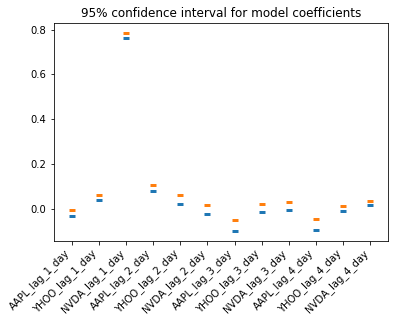

In [0]:
# Plot it
fig, ax = plt.subplots()
ax.scatter(feature_names, bootstrapped_interval[0], marker='_', lw=3)
ax.scatter(feature_names, bootstrapped_interval[1], marker='_', lw=3)
ax.set(title='95% confidence interval for model coefficients')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**Visualizing model score variability over time**

Now that you've assessed the variability of each coefficient, let's do the same for the performance (scores) of the model. Recall that the TimeSeriesSplit object will use successively-later indices for each test set. This means that you can treat the scores of your validation as a time series. You can visualize this over time in order to see how the model's performance changes over time.

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
def my_pearsonr(est, X, y):
    return np.corrcoef(est.predict(X).squeeze(), y.squeeze())[1, 0]

In [0]:
times_scores = ['2010-04-05', '2010-04-28', '2010-05-21', '2010-06-16',
               '2010-07-12', '2010-08-04', '2010-08-27', '2010-09-22',
               '2010-10-15', '2010-11-09', '2010-12-03', '2010-12-29',
               '2011-01-24', '2011-02-16', '2011-03-14', '2011-04-06',
               '2011-05-02', '2011-05-25', '2011-06-20', '2011-07-14',
               '2011-08-08', '2011-08-31', '2011-09-26', '2011-10-19',
               '2011-11-11', '2011-12-07', '2012-01-03', '2012-01-27',
               '2012-02-22', '2012-03-16', '2012-04-11', '2012-05-04',
               '2012-05-30', '2012-06-22', '2012-07-18', '2012-08-10',
               '2012-09-05', '2012-09-28', '2012-10-23', '2012-11-19',
               '2012-12-13', '2013-01-09', '2013-02-04', '2013-02-28',
               '2013-03-25', '2013-04-18', '2013-05-13', '2013-06-06',
               '2013-07-01', '2013-07-25', '2013-08-19', '2013-09-12',
               '2013-10-07', '2013-10-30', '2013-11-22', '2013-12-18',
               '2014-01-14', '2014-02-07', '2014-03-05', '2014-03-28',
               '2014-04-23', '2014-05-16', '2014-06-11', '2014-07-07',
               '2014-07-30', '2014-08-22', '2014-09-17', '2014-10-10',
               '2014-11-04', '2014-11-28', '2014-12-23', '2015-01-20',
               '2015-02-12', '2015-03-10', '2015-04-02', '2015-04-28',
               '2015-05-21', '2015-06-16', '2015-07-10', '2015-08-04',
               '2015-08-27', '2015-09-22', '2015-10-15', '2015-11-09',
               '2015-12-03', '2015-12-29', '2016-01-25', '2016-02-18',
               '2016-03-14', '2016-04-07', '2016-05-02', '2016-05-25',
               '2016-06-20', '2016-07-14', '2016-08-08', '2016-08-31',
               '2016-09-26', '2016-10-19', '2016-11-11', '2016-12-07']

In [0]:
# Generate scores for each split to see how the model performs over time
scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)

# Convert to a Pandas Series object
scores_series = pd.Series(scores, index=times_scores, name='score')

In [0]:
scores_series.head(5)

2010-04-05    0.399220
2010-04-28    0.487897
2010-05-21    0.692897
2010-06-16    0.745235
2010-07-12    0.782857
Name: score, dtype: float64

In [0]:
# Bootstrap a rolling confidence interval for the mean score
scores_lo = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=2.5))
scores_hi = scores_series.rolling(20).aggregate(partial(bootstrap_interval, percentiles=97.5))

TypeError: ignored

In [0]:
# Plot the results
fig, ax = plt.subplots()
scores_lo.plot(ax=ax, label="Lower confidence interval")
scores_hi.plot(ax=ax, label="Upper confidence interval")
ax.legend()
plt.show()

**Accounting for non-stationarity**

In this exercise, you will again visualize the variations in model scores, but now for data that changes its statistics over time.

An instance of the Linear regression model object is stored in model, a cross-validation object in cv, and the data in X and y.

In [0]:
# Pre-initialize window sizes
window_sizes = [25, 50, 75, 100]

In [0]:
# Create an empty DataFrame to collect the stores
all_scores = pd.DataFrame(index=times_scores)

In [0]:
# Generate scores for each split to see how the model performs over time
for window in window_sizes:
    # Create cross-validation object using a limited lookback window
    cv = TimeSeriesSplit(n_splits=100, max_train_size=window)
    
    # Calculate scores across all CV splits and collect them in a DataFrame
    this_scores = cross_val_score(model, X, y, cv=cv, scoring=my_pearsonr)
    all_scores['Length {}'.format(window)] = this_scores

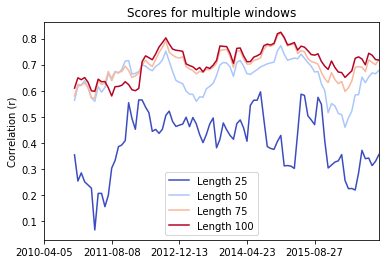

In [0]:
# Visualize the scores
ax = all_scores.rolling(10).mean().plot(cmap=plt.cm.coolwarm)
ax.set(title='Scores for multiple windows', ylabel='Correlation (r)')
plt.show()